<a href="https://colab.research.google.com/github/bsrinath9/Household-Electric-Power-Consumpation-Analysisd/blob/master/Botsa_CS620_DataProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INDIVIDUAL HOUSEHOLD ELECTRIC POWER CONSUMPTION**


#1.**ABSTRACT**

**Introduction:** Time Series analysis is “an ordered sequence of values of a variable at equally spaced time intervals.” It is used to understand the determining factors and structure behind the observed data, choose a model to forecast, thereby leading to better decision making.

The Time Series Analysis is applied for various purposes, such as:

* Stock Market Analysis 
* Economic Forecasting
* Inventory studies
* Budgetary Analysis 
* Census Analysis
* Yield Projection 
* Sales Forecasting
and more.
 
 Time series analysis is a statistical technique to analyze the pattern of data points taken over time to forecast the future. The major components or pattern that are analyzed through time series are:

* Trend- Increase or decrease in the series of data over longer a period.
* Seasonality- Fluctuations in the pattern due to seasonal determinants over a short period.
* Cyclicity - Variations occurring at irregular intervals due to certain circumstances. 
* Irregularity- Instability due to random factors that do not repeat in the pattern.

**Aim of the project:** To show how to build the simplest Long Short-Term Memory (LSTM) recurrent neural network for a time-series data.

**Description** : Measurements of electric power consumption in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months) with one-minute sampling rate. Different electrical quantities and some sub-metering values are available.



#2.**DATASET BACKGROUND** 

**Dataset Source:** [https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption](https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption)

**Data Set Information:**

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).

**Notes:**

1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2.The dataset contains some missing values in the measurements (nearly 1.25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.


**Attribute Information:**

**1.date:** Date in format dd/mm/yyyy

**2.time:** time in format hh:mm:ss

**3.global_active_power:** household global minute-averaged active power (in kilowatt)

**4.global_reactive_power:** household global minute-averaged reactive power (in kilowatt)

**5.voltage:** minute-averaged voltage (in volt)

**6.global_intensity:** household global minute-averaged current intensity (in ampere)

**7.sub_metering_1:** energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

**8.sub_metering_2:** energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

**9.sub_metering_3:** energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd
df = pd.read_fwf('household_power_consumption.txt')
df.to_csv('power_consumption.csv')

# Dataset is now stored in a Pandas Dataframe

Saving household_power_consumption.txt to household_power_consumption.txt


In [0]:

data = pd.read_csv('household_power_consumption.txt', sep=";", parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['nan','?'], index_col='dt');
data.columns = ["Global_active_power","Global_reactive_power","Voltage","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"]
df = data.iloc[:]
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


I parsed the **Date** and **Time** and put it as one column of time and converted date to time-series type

In [0]:
df.shape

(2075259, 7)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [0]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [0]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [0]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [0]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

#3.**EXPLORATORY DATA ANALYSIS (EDA)**

## 3.1 Dealing with missing values "*nan*"

In [0]:
## Finding columns that have "nan" values

droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [0]:
## Filling nan values with mean in any columns

for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [0]:
## Making sure there are no "nan" values
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

There are no null values after processing the data

##3.2 Data Visualization

**I have resampled over day and shown that the sum and mean of Global_active_power . We can observe that both have similar structure.**

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

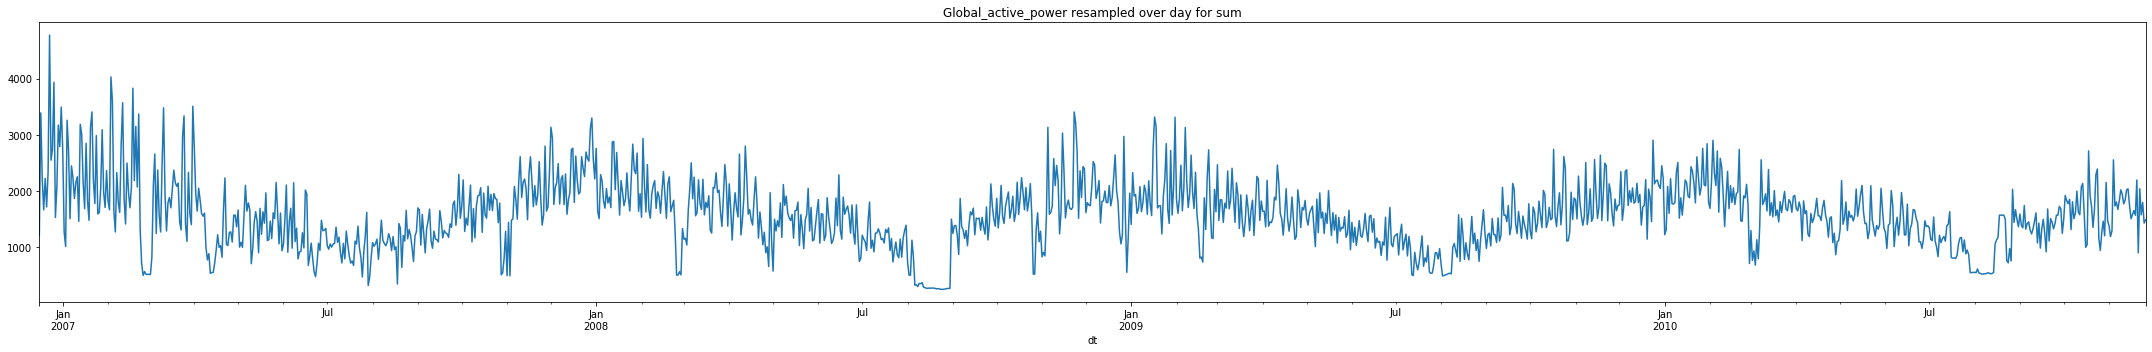

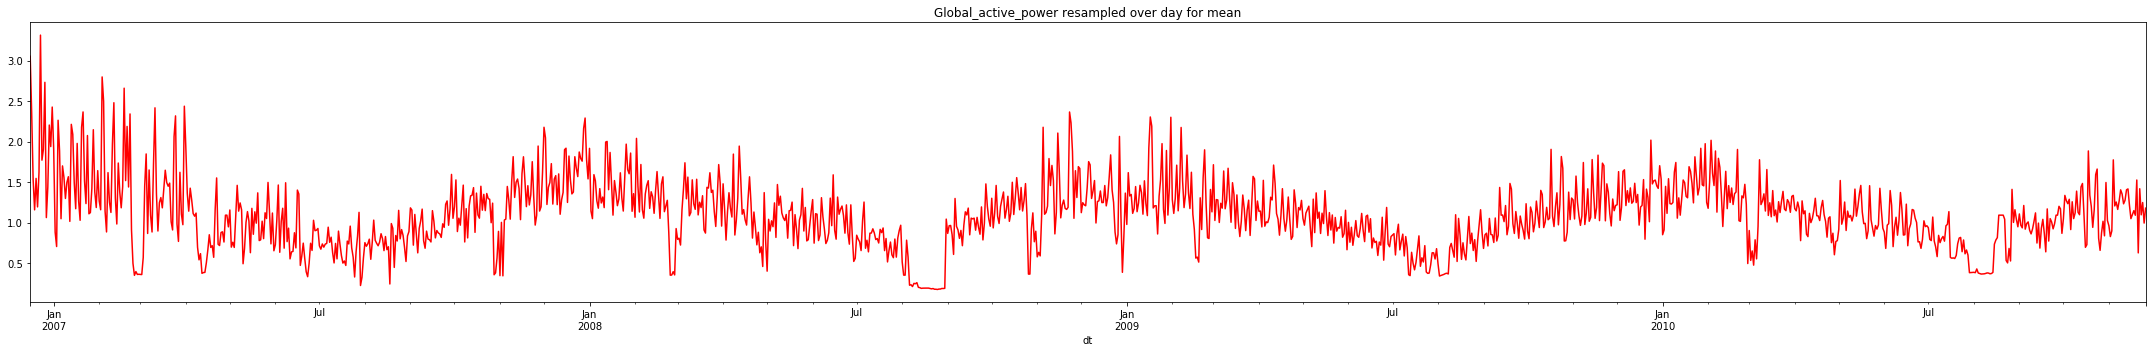

In [0]:
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum',figsize=(30, 5)) 
plt.tight_layout()
plt.show()   

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red',figsize=(30, 5))
plt.tight_layout()
plt.show()

**Below I have shown mean and std of 'Global_intensity' resampled over day**

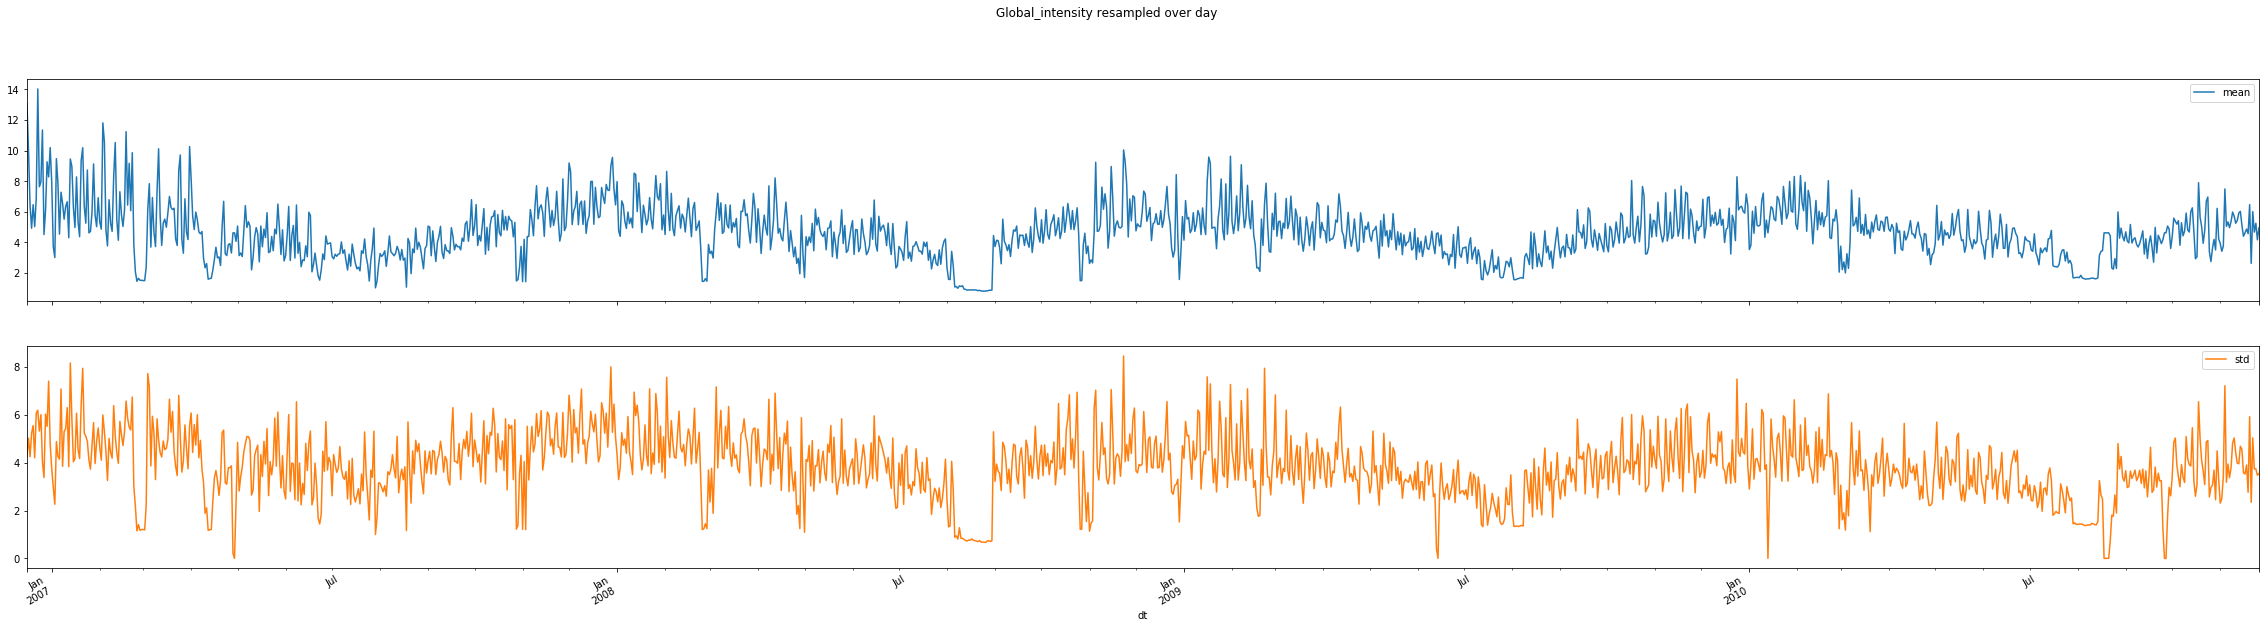

In [0]:
r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day',figsize=(40, 10))
plt.show()

**Mean and STD of 'Global_reactive_power' resampled over day**

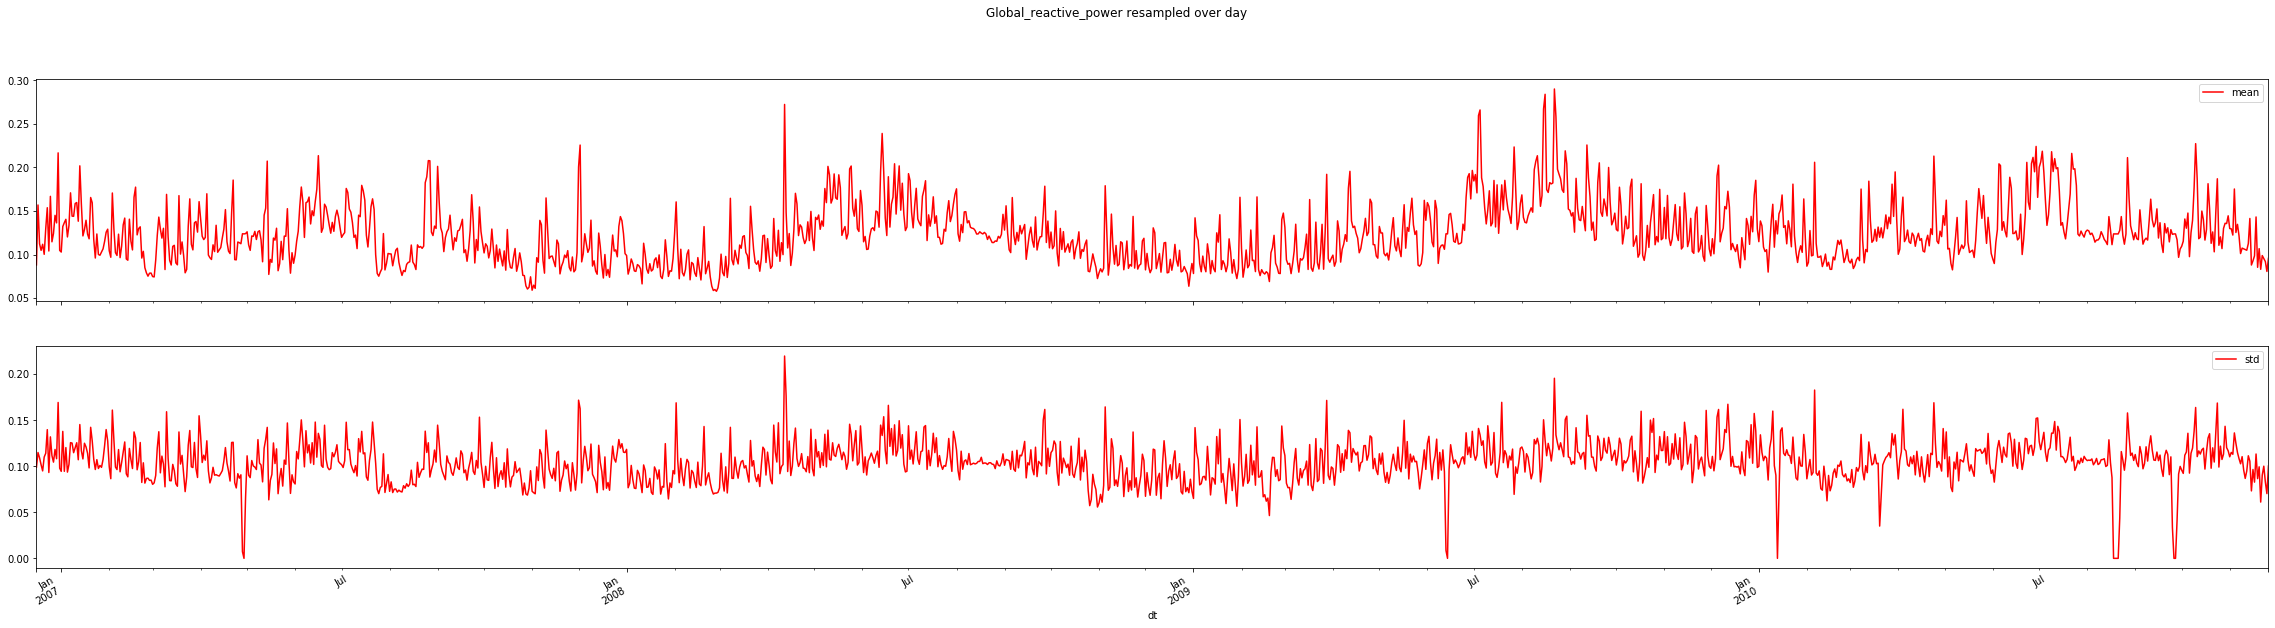

In [0]:
r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='red',figsize=(40, 10))
plt.show()

**Sum of "*Global_active_power*" resampled over month**

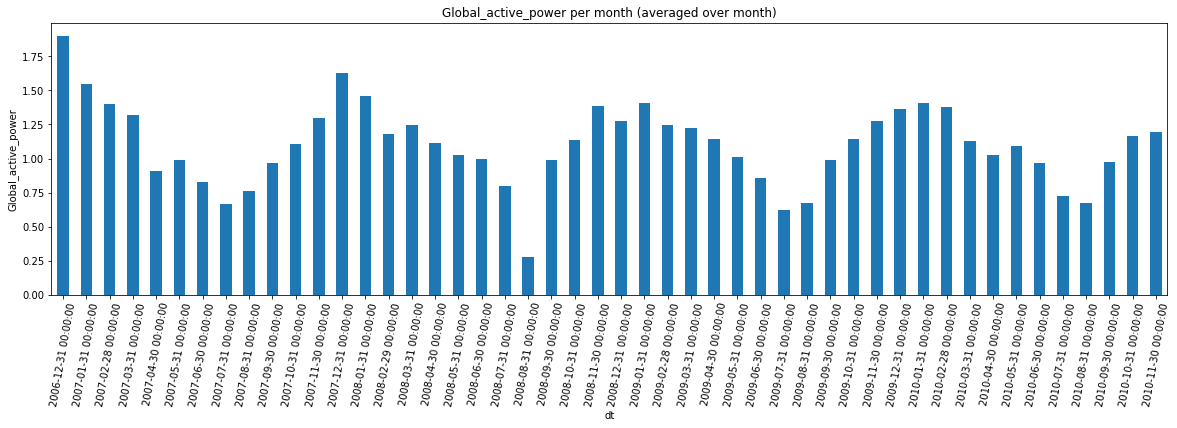

In [0]:
df['Global_active_power'].resample('M').mean().plot(kind='bar',figsize=(20, 5))
plt.xticks(rotation=80)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

**Mean of '*Global_active_power*' resampled over quarter**

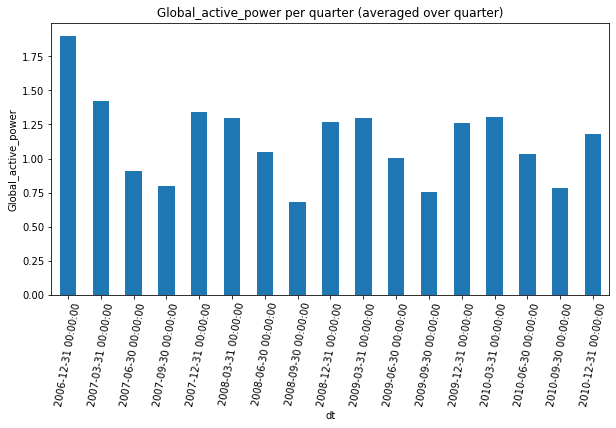

In [0]:
df['Global_active_power'].resample('Q').mean().plot(kind='bar',figsize=(10, 5))
plt.xticks(rotation=80)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

**It is important to note from above two plots that resampling over larger time inteval, will diminish the periodicity of system as we expect. This is important for machine learning feature engineering**

**Mean of 'Voltage' resampled over month**

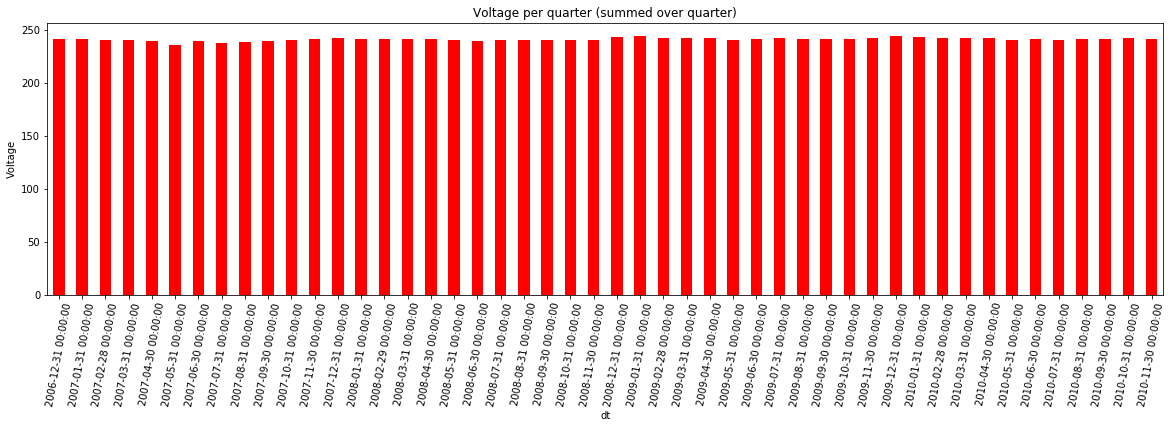

In [0]:
df['Voltage'].resample('M').mean().plot(kind='bar', color='red',figsize=(20,5))
plt.xticks(rotation=80)
plt.ylabel('Voltage')
plt.title('Voltage per quarter (summed over quarter)')
plt.show()

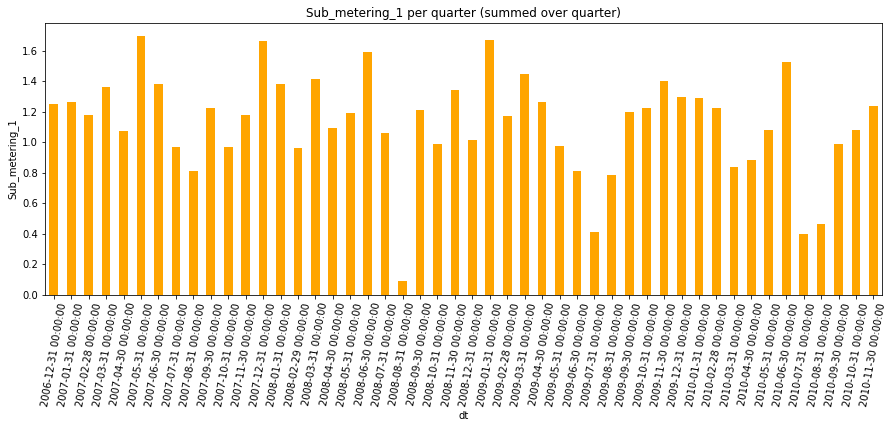

In [0]:
df['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='orange',figsize=(15,5))
plt.xticks(rotation=80)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per quarter (summed over quarter)')
plt.show()

**From the above plots it is learnt that the mean of 'Volage' over month is pretty much constant compared to other features. This is significant in feature selection**


**Mean of different features resampled over day**

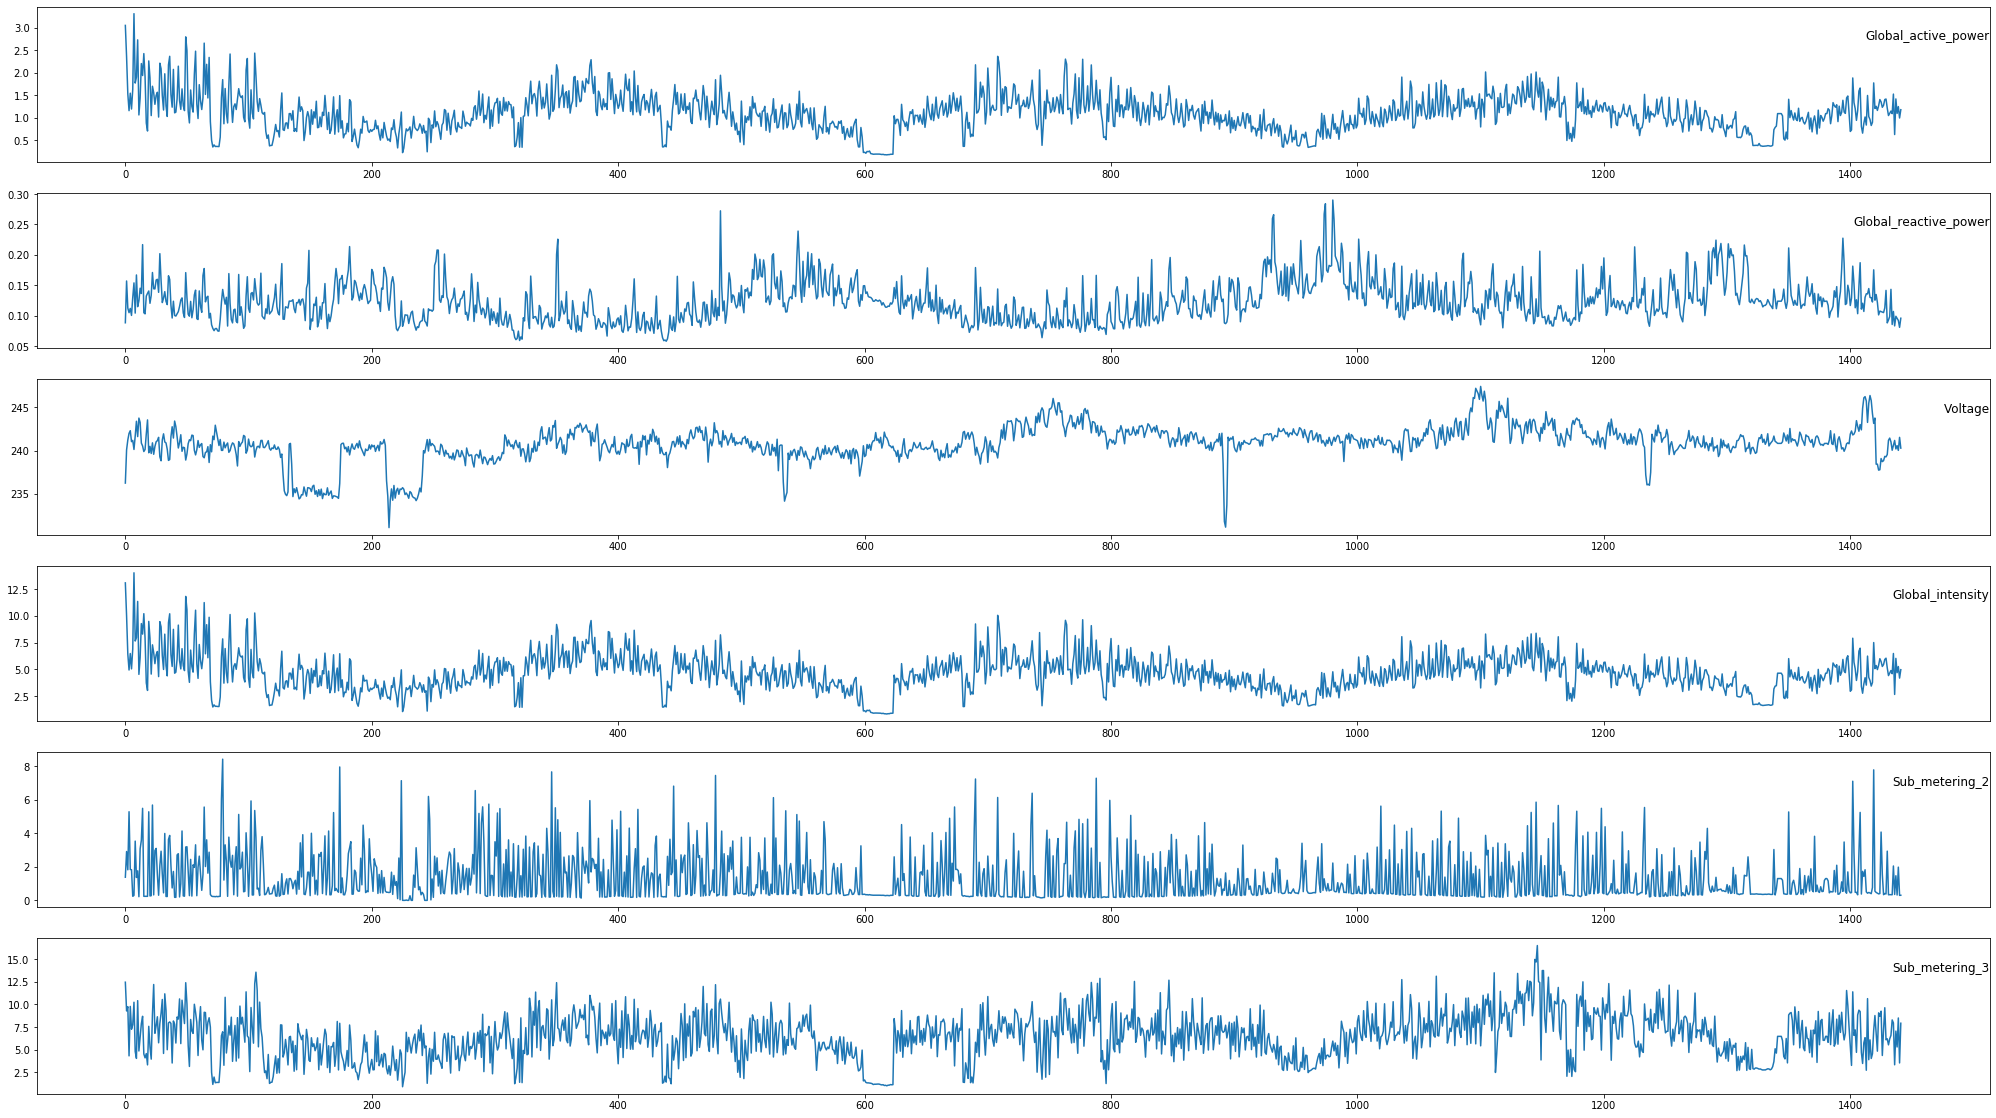

In [0]:
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(35, 20))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

**Resampling over week and computing mean**

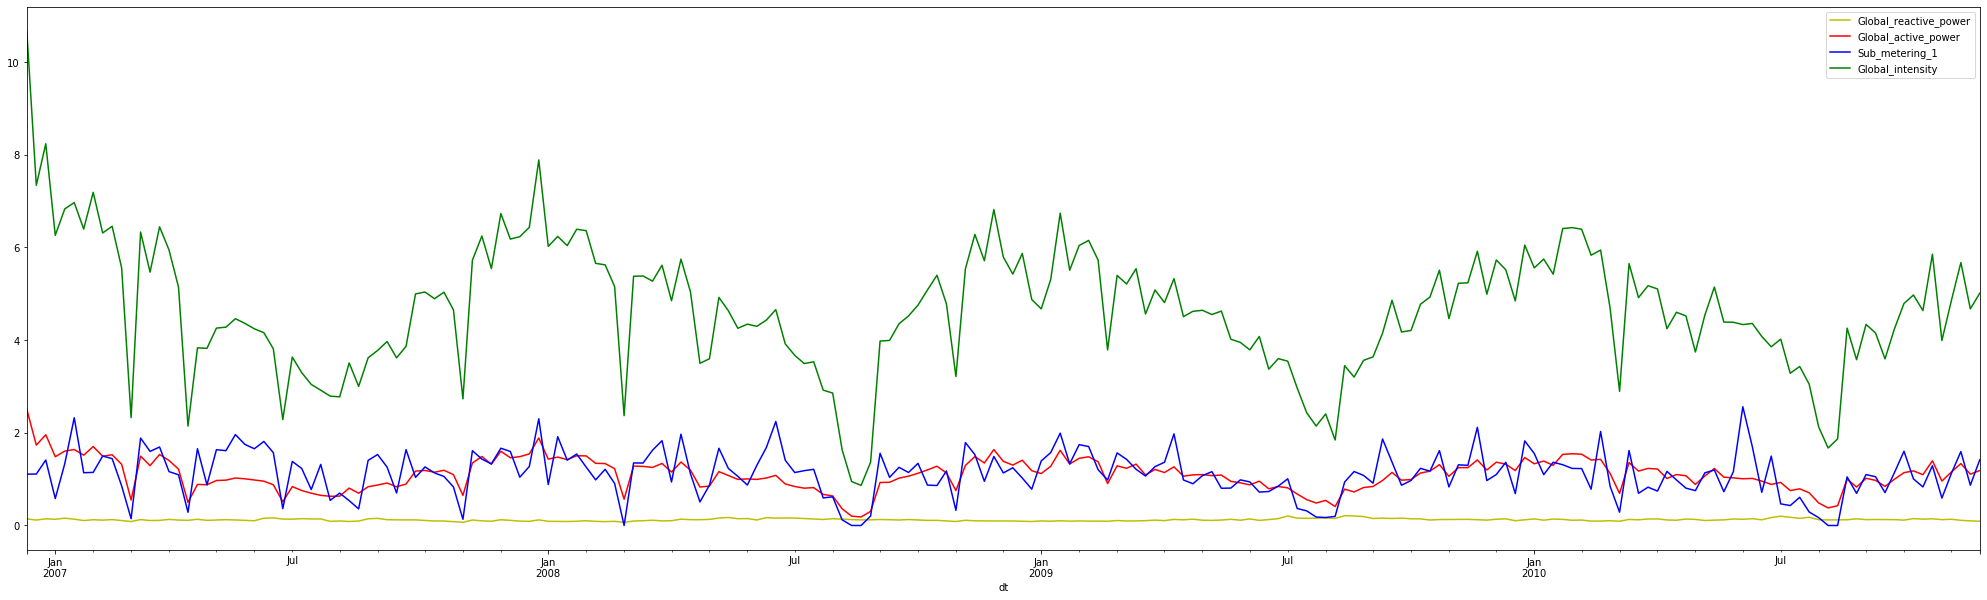

<Figure size 2520x1440 with 0 Axes>

In [0]:
df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True,figsize=(35, 10))
df.Global_active_power.resample('W').mean().plot(color='r', legend=True,figsize=(35, 10))
df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True,figsize=(35, 10))
df.Global_intensity.resample('W').mean().plot(color='g', legend=True,figsize=(35, 10))
plt.figure(figsize=(35, 20)).show()


**Hist plot of the mean of different features resampled over month**

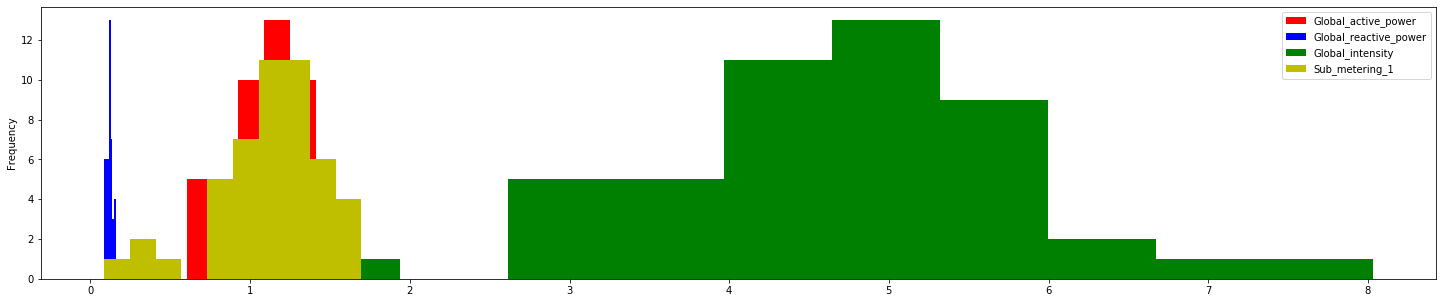

In [0]:
df.Global_active_power.resample('M').mean().plot(kind='hist', color='r', legend=True,figsize=(25, 5) )
df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True,figsize=(25, 5))
#df.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
df.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True,figsize=(25, 5))
df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True,figsize=(25, 5))
plt.show()

**Correlation between "Global_intensity" ,"Global_active_power"**

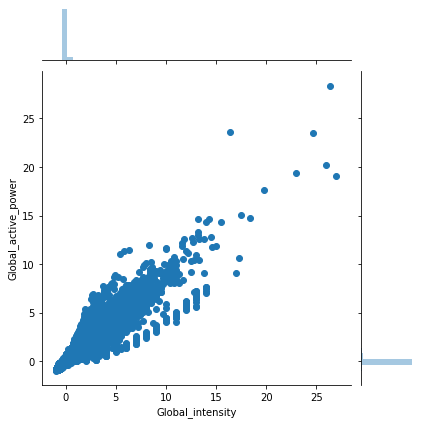

<Figure size 3600x3600 with 0 Axes>

In [0]:
data_returns = df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)
plt.figure(figsize=(50,50))
plt.show()

**correlations between 'Voltage' and  'Global_active_power'**

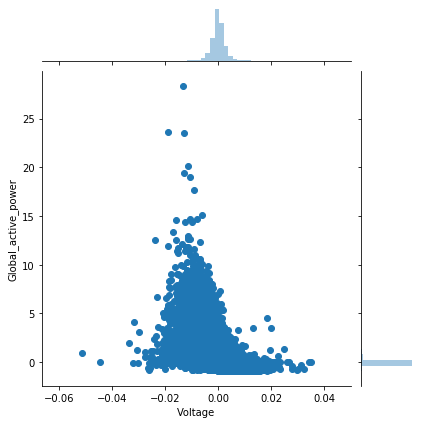

<Figure size 3600x3600 with 0 Axes>

In [0]:
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns) 
plt.figure(figsize=(50,50))
plt.show()

##3.3 Correlation among features

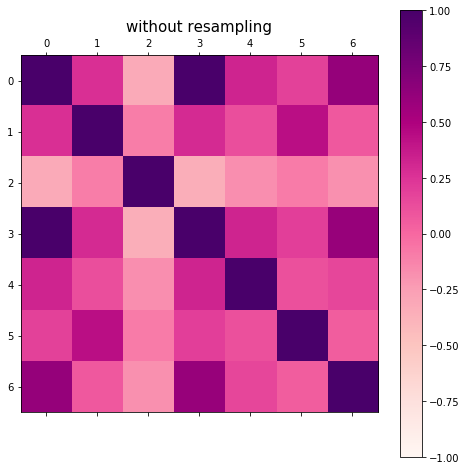

In [0]:
## Finding correlation among the features

plt.figure(figsize=(8,8))
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='RdPu',fignum=1)
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

**Correlations of mean of features resampled over months and year**

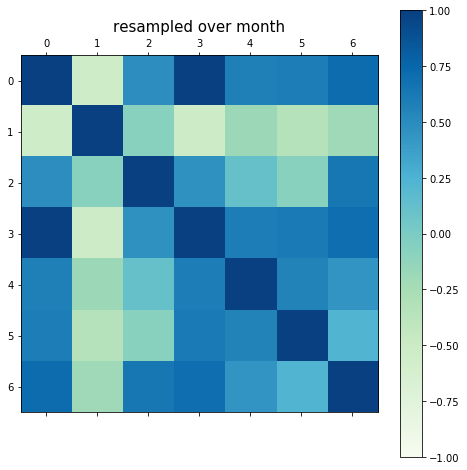

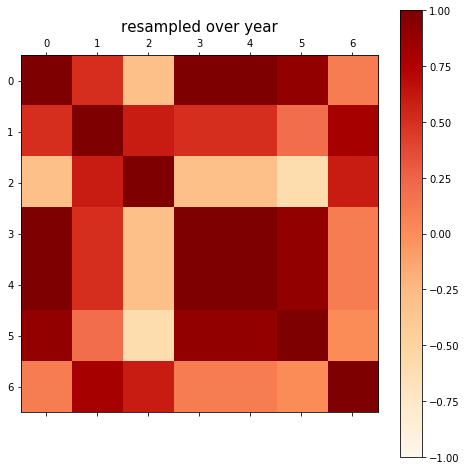

In [0]:
plt.figure(figsize=(8,8))
plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='GnBu',fignum=1)
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.figure(figsize=(8,8))
plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='OrRd',fignum=2)
plt.title('resampled over year', size=15)
plt.colorbar()
plt.show()

Using resampling techniques we can change the correlation among the features. This is important for feature engineering.

#4.**MACHINE LEARNING : LSTM Data Preparation and feature engineering**


##4.1 Long-Short Term Memory (LSTM) Data Preparation and Feature Engineering

I will apply recurrent neural network (LSTM) which is best suited for time-seriers and sequential problem. 

In [0]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In order to reduce the computation time, and also get a quick result to test the model. One can resmaple the data over hour (the original data are given in 
minutes). This will reduce the size of data from 2075259 to 34589 but keep the overall strucure of data as shown in the above


In [0]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score


In [0]:
## Resampling of data over hour

df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

In [0]:
from sklearn.preprocessing import MinMaxScaler

## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  ...  var6(t-1)  var7(t-1)   var1(t)
1   0.636816   0.295738   0.337945  ...   0.011366   0.782418  0.545045
2   0.545045   0.103358   0.335501  ...   0.144652   0.782676  0.509006
3   0.509006   0.110073   0.283802  ...   0.030869   0.774169  0.488550
4   0.488550   0.096987   0.315987  ...   0.000000   0.778809  0.455597
5   0.455597   0.099010   0.434417  ...   0.008973   0.798917  0.322555

[5 rows x 8 columns]


Above I showed 7 input variables (input series) and the 1 output variable for 'Global_active_power' at the current time in hour (depending on resampling).


##4.2 **Splitting the rest of data to train and validation sets**

First, I split the prepared dataset into train and test sets. To speed up the training of the model (for the sake of the demonstration), we will only train the model on the first year of data, then evaluate it on the next 3 years of data

In [0]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(8760, 1, 7) (8760,) (25828, 1, 7) (25828,)


#5.**MODEL ARCHITECTURE**

1.   LSTM with 100 neurons in the first visible layer
2.   dropout 20%
3.   1 neuron in the output layer for predicting Global_active_power
4.   The input shape will be 1 time step with 7 features.
5.   I use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent
6.   The model will be fit for 20 training epochs with a batch size of 70



In [0]:
## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))

model.add(Dense(1))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               43200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 43,301
Trainable params: 43,301
Non-trainable params: 0
_________________________________________________________________


##5.1 Fit network

In [0]:
# fit network

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 8760 samples, validate on 25828 samples
Epoch 1/20





 - 7s - loss: 0.0194 - val_loss: 0.0112
Epoch 2/20
 - 2s - loss: 0.0122 - val_loss: 0.0101
Epoch 3/20
 - 2s - loss: 0.0112 - val_loss: 0.0094
Epoch 4/20
 - 2s - loss: 0.0107 - val_loss: 0.0092
Epoch 5/20
 - 2s - loss: 0.0106 - val_loss: 0.0093
Epoch 6/20
 - 2s - loss: 0.0106 - val_loss: 0.0092
Epoch 7/20
 - 2s - loss: 0.0105 - val_loss: 0.0093
Epoch 8/20
 - 2s - loss: 0.0106 - val_loss: 0.0092
Epoch 9/20
 - 2s - loss: 0.0105 - val_loss: 0.0092
Epoch 10/20
 - 2s - loss: 0.0105 - val_loss: 0.0092
Epoch 11/20
 - 2s - loss: 0.0105 - val_loss: 0.0094
Epoch 12/20
 - 2s - loss: 0.0104 - val_loss: 0.0092
Epoch 13/20
 - 2s - loss: 0.0104 - val_loss: 0.0093
Epoch 14/20
 - 2s - loss: 0.0104 - val_loss: 0.0093
Epoch 15/20
 - 2s - loss: 0.0104 - val_loss: 0.0093
Epoch 16/20
 - 2s - loss: 0.0103 - val_loss: 0.0093
Epoch 17/20
 - 2s - loss: 

##5.2 Accuracy of Model 

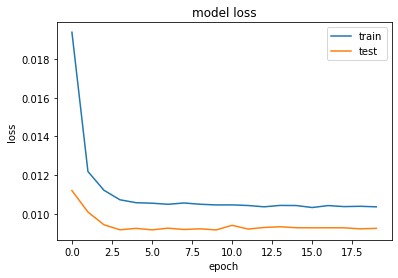

Test RMSE: 0.619


In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In order to improve the model, one has to adjust epochs and batch_size. 

##5.3 Model Prediction 

Predicting the '**Global_active_power**' for first 200 hours using the created model.

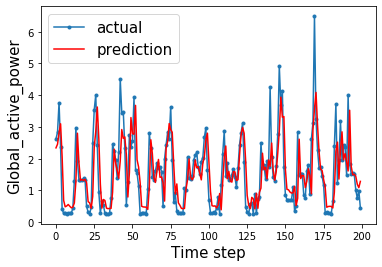

In [0]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours.

aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

#6.**FINAL REMARKS & FUTURE SCOPE**:
* Here I have used the LSTM neural network which is now the state-of-the-art for sequential problems.
* In order to reduce the computation time, and get some results quickly, I took the first year of data (resampled over hour) to train the model and the rest of data to test the model.
* I put together a very simple LSTM neural-network to show that one can obtain reasonable predictions. However number of rows is too high and as a result the computation is very time-consuming (even for the simple model it took few mins to be run on 2.8 GHz Intel Core i7 system). 
* Moreover, the neural-network architecture that I have designed is a low level model. It can be easily improved by adding CNN and dropout layers. The CNN is useful here since there are correlations in data (CNN layer is a good way to probe the local structure of data).
* Using spark (MLlib) on a system running with GPU we can obtain reasonable predictions with less computing time.

#7.**SUMMARY**

**Title:** Individual household electric power consumption

**Author:** Srinath Botsa

**Why this dataset ?**

Time series analysis is a statistical technique to analyze the pattern of data points taken over time to forecast the future. The major components or pattern that are analyzed through time series are:

* Trend- Increase or decrease in the series of data over longer a period.
* Seasonality- Fluctuations in the pattern due to seasonal determinants over a short period.
* Cyclicity - Variations occurring at irregular intervals due to certain circumstances.
* Irregularity- Instability due to random factors that do not repeat in the pattern.

As this dataset is an observation of electricity consumption over a time period. It is suitable to do time-series analysis.

**Aim of the project:** To show how to build the simplest Long Short-Term Memory (LSTM) recurrent neural network for time-series data.

**Insights:**

**Visualization of the features averaged over month**

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABJkAAAGsCAYAAAB+RXaSAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAgAElEQVR4nOzdeZwdVZnw8d9Dwr4ISlS2EFTGBVTQ%0ACO7ihigCvr44grjNiAwqOjM6vqLOCIM64jIzbrgwiqgI6OAWBEQcNpVFgqJsojFGSVQIQfYdnveP%0AOj1cOun0vV19bnd1ft/P535y762qp54+qTq379OnTkVmIkmSJEmSJLWx1lQnIEmSJEmSpO6zyCRJ%0AkiRJkqTWLDJJkiRJkiSpNYtMkiRJkiRJas0ikyRJkiRJklqzyCRJkiRJkqTWLDJJkgRExLER8YE+%0A182IeNQE97MkIl4wkW0nuL/TIuJ1w9qfhmuQ47Znm59ExM61cpoOIuLsiDhwqvOYTiLi8Ig4bjXL%0AfxoROwwzJ0nSzGORSZK0RoiI/SLiwoi4NSKuLc/fHBEx1blNllV9iczMF2fml6cqJ02eiHh9RPy4%0AZYy9gJsz8+eTlJamoYjYLSKWDrjZx4AjauQjSVpzWGSSJM14EfEO4BPAR4GHAw8DDgaeAawzhalp%0AEkWj2u82ETG7VuwhOhj46rB3OkParm+1j8VKFgDPjYiHT3UikqTu6tqHnyRJA4mIB9H8df7NmXlS%0AZt6cjZ9n5gGZeecY270xIhZFxPURsSAithy1yksiYnFEXBcRHx35QhkRj4yIMyNiRVn2tYjYdMCc%0Ad4mI8yPihoj4U0R8OiLW6Vm+Q0ScUXK7JiLeExF7AO8BXhkRt0TEL8q6Z0fEgRGxbom3Y0+cORFx%0Ae0Q8tLx+aURcUtY7LyKe0EeuSyLi3RFxRUT8JSK+FBHrjdeOEfGvEfGp8nztMsLso+X1+hFxR0Q8%0AuLx+asnnhoj4RUTs1hP/7Ij4YET8BLgNeMQEchzz5y7bvisifgncuqpiSTSXT745In4TETdHxPvL%0AcXBeRNwUEd8Y9f835rFVYh1cYt0QEUeVgsVjgc8BTyv/vzf0pLBZRJxS9n1hRDxyjP+rdYDnAef0%0AvDfmsRYRn42Ij42K8d2IeHt5vmVEfDMilkfE7yLibT3rHR4RJ0XEcRFxE/D6Po7r3SPiqoi4MSI+%0AExHnRM8lbxHxtxFxZfk/PD0itu1Z9sKI+FXZ9tPAmCMUy7nw8Yj4Y3l8PCLWLcuujIiX9qw7u/x8%0ATyqvJ+NYfGdE/LIc81+MiIdFc1nrzRHxw4jYrGf9vSPi8rK/s8tx0Bvrn0qsGyPi6xGxXkRsCJwG%0AbFmOlVt6jrF1IuIrZV+XR8T8kXiZeQdwMfCisdpOkqRxZaYPHz58+PAxYx/AHsA9wOxx1jsW+EB5%0A/jzgOuBJwLrAp4Bze9ZN4CzgwcBc4NfAgWXZo4AXlu3mAOcCH+/ZdgnwgnFyeTLwVGA2MA+4EviH%0Asmxj4E/AO4D1yutdy7LDgeNGxTq7J7djgA/2LHsL8P3yfGfgWmBXYBbwupLruuPkugS4DNimtMdP%0A+mnHsuzS8vzpwG+BC3uW/aI83wpYAbyE5o9jLyyv5/T8fH8AdijttfaAOa725y7PLynbrj9GGyTw%0AXWCTksedwP/QFBkeBFwBvG6AY+t7wKY0x9ZyYI+y7PXAj1dx3K4Adik//9eAE8fIcwfg1gGOtWcD%0AVwNRXm8G3A5sWf4vLgbeRzMa8BHAYuBFPcfi3cDLyrrrj7OvzYGbgJeX5X9fth85dvcBFgGPLcv/%0AGTivZ9ubgX2BtYF/pDnnDxyjHY4ALgAeSnOOnge8vyx7H/C1nnX3BK6c5GPxAprRlFvRHHs/ozkO%0A1wPOBA4r6/4VcGvZz9rA/yttsE5PrJ+W/48Hl/Y8uCzbDVg6at+HA3eU/GcBHwIuGLXOJ4H/mIq+%0A2ocPHz58zIyHI5kkSTPd5sB1mXnPyBs9IxFuj4hnr2KbA4BjMvNn2Yx0ejfNCJJ5Pet8ODOvz8w/%0AAB8H9gfIzEWZeUZm3pmZy4H/AJ4zSMKZeXFmXpCZ92TmEuDzPTFeCvw5M/89M+/IZmTWhX2GPh7Y%0Ar+f1q8p7AAcBn8/MCzPz3mzmcbqTpigwnk9n5tWZeT3wQUpbsPp2PB/YPiIeQlPM+CKwVURsVH7W%0AkdE2rwZOzcxTM/O+zDwDWEjzRXnEsZl5eWmvuwfMsZ+f+5Nl29tX0wYfycybMvNymoLWDzJzcWbe%0ASDOqZGSi7X6OrSMz84ZybJ0F7LSa/QJ8OzN/Wo7xr61m/U1pijH/a5xj7Uc0Ra9nldf7Audn5h+B%0Ap9AUV47IzLsyczHwXzzw+Do/M79T/t9uH2dfLwEuz8xvlZ/jk8Cfe2IdDHwoM68sy/8N2KmMZhrZ%0A9qTy///xUduOdgBwRGZeW87RfwVeU5YdD+wdERuU168CTijPJ+tY/FRmXpOZy0obX5jNyMo7gG9z%0A/7HySuCU0p/cTTNn0vo0RdkRn8zMP5bj+mTGP1Z+XPK/l+ayySeOWn4zzXEiSdKEWGSSJM10K4DN%0Ao+cyp8x8emZuWpat6rNwS+D3PevfUtbdqmedq3ue/75sQ7n05cSIWFYuEzqOptDVt4j4q4j4XkT8%0AucT4t54Y29CM+pmIs4ANImLXUtTYieZLLcC2wDtK8e2GcjnWNiM/1zhW2Rasph1LwWYhTZHh2TRF%0ApfNo5snqLTJtC7xiVF7PBLYYY/+D5tjPz91P/Gt6nt++itcblef9HFu9BZLberYdS7/r/4Vm5Nv/%0AWt2xlpkJnMj9BblX0RSxoGm3LUe123toRuiMeEC7jXNcb9m7ftl378TV2wKf6NnX9TSXxG01xrar%0A+z97wP8BPcdDZi6iGRG0Vyk07c39hdjJOhYneqzcV+JP5rGyXjzwEtCNgRuQJGmCLDJJkma682lG%0ApuwzwDZ/pPlCCUCZ4+QhwLKedbbpeT63bAPNF+cEHp+Zm9CMfhj0DnafBX4FbF9ivKcnxtWsYq6X%0AIlcXtIxe+AZN0WB/4HuZOTKy5WqaS+k27XlskJknjBWvx1htMV47nkNz+djOwEXl9YtoLv06tyev%0Ar47Ka8PMPLLfn3ucHPv5ufuJ369+jq2xtM1jUbPL6C1SrO5Yg2YUz75lxNCuwDfL+1cDvxvVbhtn%0AZu+ontH5rm5ffwK2HlkxIqL3ddnf343a3/qZeV7ZdptR2/b+f4/2gP8DHng8jPzM+9P0GVeUwtNI%0ADpNxLPZr9LEy8nPVPFYeC/xigttKkmSRSZI0s2XmDTSXw3wmIvaNiI0jYq2I2AnYcIzNTgD+JiJ2%0AKhMC/xvNJS1LetZ5Z0RsFhHb0Mwf8/Xy/sbALcCN5cv8OyeQ9sY089PcEhGPAd7Us+x7wBYR8Q9l%0AAuONI2LXsuwaYF6s/q5Wx9NchnMA94/QgOZSp4PLKKeIiA0jYs+I2HiVUR7oLRGxdTQTdb+X+9ti%0AvHY8B3gtzRf5uyjzR9EUL5aXdY6jGVXyooiYVSY23i0iegsQ/RgrxzY/90T0c2yN5Rpg6+iZLHsQ%0ApY1/yAMv31zdsUZm/pxmDqkvAKeX8wmauYBujmZS9PXL/82OEfGU1aSwun2dAjw+Il5WRta8heZO%0AkCM+B7w7InaAZkL/iHhFz7Y7RMTLy7ZvG7XtaCcA/xzNxPeb08zDdFzP8hOB3Ut+vefIZB2L/foG%0AsGdEPD8i1qaZh+1OmhF/47kGeEg0Nz7oSzST4T8ZOGMiyUqSBBaZJElrgMz8CPB2molzrymPzwPv%0AYhVf2DLzh8C/0Iza+BPwSB441ww0Ez1fTDMp9Ck0cwpBU9B6EnBjef9bE0j5n2guTbqZpggyUhCh%0AjDx6IbAXzaUvvwGeWxb/d/l3RUT8bFWBs5m/6VaaS3FO63l/IfBG4NM0l1Utoplouh/HAz+gmfj5%0At8AHSszx2vE8mjlmRkYtXUEzMfHIazLzapoRJe+hmQT7aprC3aC/w4yVY5ufe2B9HltjORO4HPhz%0ARFw3wRQ+z/3zD8FqjrUexwMvoKfgUkbFvZTmksvfcX8hanVFjdUd19cBrwA+QnP54ONoLqe8syz/%0ANvBh4MRyqd1lwItHbXtk2XZ7msndx/KBEvuXwKU0E29/oCeXP9GMgHz6qBwn61jsS2ZeRTMS8lM0%0A7bsXsFcpFo637a9oimmLy6V9/Vz2uhdwdplzS5KkCRm5W4gkSdLAImIJzV28fjjVuYylCzkOU0T8%0ABDikjFKalspovKXAAZl51lTnsyaIiAuBN2TmZVOdiySpu2aPv4okSZJmisx8xlTnsCoR8SLgQprJ%0Ar99JM1/TBVOa1BokM3cdfy1JklbPy+UkSZoCEXFaRNyyisd7pjq3XhExd4w8b4mIuVOdn2aUp9Fc%0AyjhyadjLyl0IJUlSR3i5nCRJkiRJklpzJJMkSZIkSZJas8gkSZIkSZKk1mbUxN+bb755zps3b6rT%0AkCRJkiRJmjEuvvji6zJzznjrzagi07x581i4cOFUpyFJkiRJkjRjRMTv+1nPy+UkSZIkSZLUmkUm%0ASZIkSZIktWaRSZIkSZIkSa1ZZJIkSZIkSVJrFpkkSZIkSZLUmkUmSZIkSZIktWaRSZIkSZIkSa1Z%0AZJIkSZIkSVJrFpkkSZIkSZLUmkUmSZIkSZIktWaRSZIkSZIkSa3NnuoEhmHeoacMtP6SI/eslIkk%0ASZIkSdLM5EgmSZIkSZIktWaRSZIkSZIkSa1ZZJIkSZIkSVJrFpkkSZIkSZLUmkUmSZIkSZIktWaR%0ASZIkSZIkSa1ZZJIkSZIkSVJrFpkkSZIkSZLUmkUmSZIkSZIktWaRSZIkSZIkSa1ZZJIkSZIkSVJr%0AFpkkSZIkSZLUmkUmSZIkSZIktWaRSZIkSZIkSa1ZZJIkSZIkSVJrFpkkSZIkSZLU2uyawSPiGOCl%0AwLWZueMqlr8TOKAnl8cCczLz+ohYAtwM3Avck5nza+YqSZIkSZKkias9kulYYI+xFmbmRzNzp8zc%0ACXg3cE5mXt+zynPLcgtMkiRJkiRJ01jVIlNmngtcP+6Kjf2BEyqmI0mSJEmSpEqmxZxMEbEBzYin%0Ab/a8ncAPIuLiiDhoNdseFBELI2Lh8uXLa6cqSZIkSZKkVZgWRSZgL+Anoy6Ve2ZmPgl4MfCWiHj2%0AqjbMzKMzc35mzp8zZ84wcpUkSZIkSdIo06XItB+jLpXLzGXl32uBbwO7TEFekiRJkiRJ6sOUF5ki%0A4kHAc4Dv9ry3YURsPPIc2B24bGoylCRJkiRJ0nhm1wweEScAuwGbR8RS4DBgbYDM/FxZ7f8AP8jM%0AW3s2fRjw7YgYyfH4zPx+zVwlSZIkSZI0cVWLTJm5fx/rHAscO+q9xcAT62QlSZIkSZKkyTbll8tJ%0AkiRJkiSp+ywySZIkSZIkqTWLTJIkSZIkSWrNIpMkSZIkSZJas8gkSZIkSZKk1iwySZIkSZIkqTWL%0ATJIkSZIkSWrNIpMkSZIkSZJas8gkSZIkSZKk1iwySZIkSZIkqTWLTJIkSZIkSWpt9lQnIEldNe/Q%0AUwZaf8mRe1bKRJIkSZKmniOZJEmSJEmS1JpFJkmSJEmSJLVmkUmSJEmSJEmtWWSSJEmSJElSaxaZ%0AJEmSJEmS1JpFJkmSJEmSJLVmkUmSJEmSJEmtWWSSJEmSJElSaxaZJEmSJEmS1JpFJkmSJEmSJLU2%0Ae6oTmAnmHXpK3+suOXLPiplIkiRJkiRNDUcySZIkSZIkqTWLTJIkSZIkSWqtapEpIo6JiGsj4rIx%0Alu8WETdGxCXl8b6eZXtExFURsSgiDq2ZpyRJkiRJktqpPZLpWGCPcdb5UWbuVB5HAETELOAo4MXA%0A44D9I+JxVTOVJEmSJEnShFUtMmXmucD1E9h0F2BRZi7OzLuAE4F9JjU5SZIkSZIkTZrpMCfT0yLi%0AFxFxWkTsUN7bCri6Z52l5b2VRMRBEbEwIhYuX768dq6SJEmSJElahakuMv0M2DYznwh8CvjOoAEy%0A8+jMnJ+Z8+fMmTPpCUqSJEmSJGl8U1pkysybMvOW8vxUYO2I2BxYBmzTs+rW5T1JkiRJkiRNQ1Na%0AZIqIh0dElOe7lHxWABcB20fEdhGxDrAfsGDqMpUkSZIkSdLqzK4ZPCJOAHYDNo+IpcBhwNoAmfk5%0AYF/gTRFxD3A7sF9mJnBPRBwCnA7MAo7JzMtr5ipJkiRJkqSJq1pkysz9x1n+aeDTYyw7FTi1Rl6S%0AJEmSJEmaXFWLTJKkiZt36Cl9r7vkyD0rZiJJkiRJ45vqu8tJkiRJkiRpBrDIJEmSJEmSpNYsMkmS%0AJEmSJKk1i0ySJEmSJElqzSKTJEmSJEmSWrPIJEmSJEmSpNZmT3UCkiRJGp55h57S97pLjtyzYiaS%0AZhL7FklgkWnas7OWJEmSJEld4OVykiRJkiRJas2RTJIkSQMaZKQxONpYkiStGSwySZIkSZKmLacQ%0AkbrDy+UkSZIkSZLUmiOZJEmSJGmG8zJfScPQ10imiJgVEWfVTkaSJEmSJEnd1FeRKTPvBe6LiAdV%0AzkeSJEmSJEkdNMjlcrcAl0bEGcCtI29m5tsmPStJkiRJkiR1yiBFpm+VhyRJkiRJkvQAfReZMvPL%0AEbE+MDczr6qYkyRJkiRJkjqm7yJTROwFfAxYB9guInYCjsjMvWslp7q8w4QkSZIkSZosfU38XRwO%0A7ALcAJCZlwCPqJCTJEmSJEmSOmaQItPdmXnjqPfum8xkJEmSJEmS1E2DTPx9eUS8CpgVEdsDbwPO%0Aq5OWJE0OLwuVJEmSpOEYZCTTW4EdgDuBE4AbgX+okZQkSZIkSZK6ZZCRTFtk5nuB99ZKRpIkSZIk%0ASd00SJHpmIjYGrgI+BFwbmZeuroNIuIY4KXAtZm54yqWHwC8CwjgZuBNmfmLsmxJee9e4J7MnD9A%0ArpIkSZ3kZb7SmsvzX1LX9X25XGY+B3gs8ClgU+CUiLh+nM2OBfZYzfLfAc/JzMcD7weOHrX8uZm5%0AkwUmSZIkSZKk6a3vkUwR8UzgWeWxKfA9mhFNY8rMcyNi3mqW904cfgGwdb/5SJIkSZIkafoY5HK5%0As4GLgQ8Bp2bmXZOcyxuA03peJ/CDiEjg85k5epQTABFxEHAQwNy5cyc5JUmSJEmSJPVjkCLT5sAz%0AgGcDb4uI+4DzM/Nf2iYREc+lKTI9s+ftZ2bmsoh4KHBGRPwqM88dvW0pPh0NMH/+/GybiySpHeeT%0AkNZcg5z/nvuSJM08g8zJdAOwmGYepT8Bj6QpOLUSEU8AvgDsk5kreva3rPx7LfBtYJe2+5IkSZIk%0ASVIdfReZImIx8O/Ag4HPAo8uk4FPWETMBb4FvCYzf93z/oYRsfHIc2B34LI2+5IkSZIkSVI9g1wu%0A96jMvG+Q4BFxArAbsHlELAUOA9YGyMzPAe8DHgJ8JiIA7il3knsY8O3y3mzg+Mz8/iD7liRJ0szh%0ApbiSJE1/gxSZtoyIT9HMywTNneX+PjOXjrVBZu6/uoCZeSBw4CreXww8cYDcJEmSJEmSNIX6vlwO%0A+BKwANiyPE4u70mSJEmSJGkNN0iRaU5mfikz7ymPY4E5lfKSJEmSJElShwxyudyKiHg1cEJ5vT+w%0AYjXrS5IkSZIkaQoNc17DQUYy/S3w18Cfy2Nf4G8mvGdJkiRJkiTNGH2PZMrM3wN7V8xFkjQkg/w1%0Awzs0SZIkSepH3yOZIuIREXFyRCyPiGsj4rsR8YiayUmSJEmSJKkbBpmT6XjgKOD/lNf70czPtOtk%0AJyVJkiRJkrSmmClXGgwyJ9MGmfnVnrvLHQesVysxSZIkSZIkdccgI5lOi4hDgROBBF4JnBoRDwbI%0AzOsr5CdJkiRJkqQOGKTI9Nfl378b9f5+NEUn52eSJElS5wzz1s7qvplySYsk1TDI3eW2W93yiHhh%0AZp7RPiVJkqT2/CIoSZI0XIOMZBrPhwGLTJIkSZKkTnAkozS5Bpn4ezwxibEkSZIkSZLUIZM5kikn%0AMZYkSSvxr42SJEnS9DWZRSZJmhDnTZEkSZKk7pvMy+WWTGIsSZIkSZIkdUjfI5kiYgPgHcDczHxj%0ARGwPPDozvweQmS+vlKMkSZIkSerh1QCajgYZyfQl4E7gaeX1MuADk56RJEmSJEmSOmeQItMjM/Mj%0AwN0AmXkb3lFOkiRJkiRJDFZkuisi1qfcRS4iHkkzskmSJEmSJElruEHuLnc48H1gm4j4GvAM4PUV%0AcpIkSZIkSVLH9F1kyswfRMTFwFNpLpP7+8y8rlpmkiRJkiRJ6oxB7i53MnA8sCAzb62XkiRJkiRJ%0AkrpmkDmZPgY8C7giIk6KiH0jYr1KeUmSJEmSJKlDBrlc7hzgnIiYBTwPeCNwDLBJpdwkSZIkSZLU%0AEYNM/E25u9xewCuBJwFfHmf9Y4CXAtdm5o6rWB7AJ4CXALcBr8/Mn5VlrwP+uaz6gcxc7b4kSWpr%0A3qGn9L3ukiP3rJiJJEnqukF+rwB/t9DM0PflchHxDeBKmlFMnwYemZlvHWezY4E9VrP8xcD25XEQ%0A8NmyrwcDhwG7ArsAh0XEZv3mKkmSJEmSpOEaZCTTF4H9M/PefjfIzHMjYt5qVtkH+EpmJnBBRGwa%0AEVsAuwFnZOb1ABFxBk2x6oQB8pUkSZKmnKMkJUlrinGLTBHxvMw8E9gQ2Ke5wu1+mfmtFvvfCri6%0A5/XS8t5Y70uSJEmSJGka6mck03OAM2nmYhotgTZFptYi4iCaS+2YO3fuVKYiSdKYHMkgSZKkmW7c%0AIlNmHlaeHpGZv+tdFhHbtdz/MmCbntdbl/eW0Vwy1/v+2WPkdzRwNMD8+fOzZT7qCL+sSdLMYH8u%0AqQb7FkmaGn1P/A18cxXvndRy/wuA10bjqcCNmfkn4HRg94jYrEz4vXt5T5IkSZIkSdNQP3MyPQbY%0AAXhQRLy8Z9EmwHrjbHsCzYikzSNiKc0d49YGyMzPAacCLwEWAbcBf1OWXR8R7wcuKqGOGJkEXJIk%0ASZIkadgcJTm+fuZkejTwUmBTHjgv083AG1e3YWbuP87yBN4yxrJjgGP6yE/SENihSpIkSWsGf/fX%0ARPUzJ9N3ge9GxNMy8/wh5CRJkiRJkqSOGWROpoMjYtORF2W+JEcaSZIkSZIkaaAi0xMy84aRF5n5%0AF2DnyU9JkiRJkiRJXTNIkWmtcqc3ACLiwfQ3p5MkSZIkSZJmuEGKRP8OnB8R/w0EsC/wwSpZSZIk%0ASZIkqVP6LjJl5lci4mLgueWtl2fmFXXSkiRJkiRJUpcMdLlbZl4eEcuB9QAiYm5m/qFKZpIkSZIk%0ASeqMvotMEbE3zSVzWwLXAtsCVwI71ElNXTbv0FMGWn/JkXtWykSSJEmSJA3DIBN/vx94KvDrzNwO%0AeD5wQZWsJEmSJEmS1CmDFJnuzswVNHeZWyszzwLmV8pLkiRJkiRJHTLInEw3RMRGwLnA1yLiWuDW%0AOmlJkiRJkiSpSwYZybQPcBvwj8D3gd8Ce9VISpIkSZIkSd3S90imzBwZtXQf8OXRyyPi/Mx82mQl%0AJkmSJEmSpO4YZCTTeNabxFiSJEmSJEnqkEHmZBpPTmIsSZIkSeOYd+gpfa+75Mg9K2YiSdLkjmSS%0AJEmSJEnSGmoyi0wxibEkSZIkSZLUIZNZZHrNJMaSJEmSJElSh4w7J1NE3Myq51sKIDNzE5onl01y%0AbtKUcG4DSZIkSZIGN26RKTM3HkYikiRJkiRJ6q6B7y4XEQ8F1ht5nZl/mNSMJEmSJEmS1Dl9z8kU%0AEXtHxG+A3wHnAEuA0yrlJUmSJEmSpA4ZZCTT+4GnAj/MzJ0j4rnAq+ukJUmS+jXIXHLgfHKSJEmq%0AY5C7y92dmSuAtSJircw8C5hfKS9JkiRJkiR1yCAjmW6IiI2AHwFfi4hrgVvrpCVJkiRJkqQuGWQk%0A0z7A7cA/AN8HfgvsNd5GEbFHRFwVEYsi4tBVLP/PiLikPH4dETf0LLu3Z9mCAXKVJEmSJEnSEPU9%0Akikzb42IhwO7ANcDp5fL58YUEbOAo4AXAkuBiyJiQWZe0RP3H3vWfyuwc0+I2zNzp35zlCRJkiRJ%0A0tTou8gUEQcC7wPOBAL4VEQckZnHrGazXYBFmbm4xDiRZkTUFWOsvz9wWL85SbqfE/9KkiRJkqbS%0AIHMyvRPYeWT0UkQ8BDgPWF2RaSvg6p7XS4FdV7ViRGwLbEdTxBqxXkQsBO4BjszM7wyQryRJkiRJ%0AkoZkkCLTCuDmntc3l/cmy37ASZl5b89722bmsoh4BHBmRFyamb/t3SgiDgIOApg7d+4kpiNJkiRJ%0AkqR+jVtkioi3l6eLgAsj4rtA0lz29stxNl8GbNPzeuvy3qrsB7yl943MXFb+XRwRZ9PM1/TbUesc%0ADRwNMH/+/BwnH0mSJEmSJFXQz93lNi6P3wLfoSkwAXwX+N04214EbB8R20XEOjSFpJXuEhcRjwE2%0AA87veW+ziFi3PN8ceAZjz+UkSZIkSZKkKTTuSKbM/Nfe1xGxUXn/lj62vSciDgFOB2YBx2Tm5RFx%0ABLAwM0cKTvsBJ2Zm70ikxwKfj4j7aIphR/belU6SJEmSJHWLNyya2Qa5u9yOwFeBB5fX1wGvzczL%0AV7ddZp4KnDrqvfeNen34KrY7D3h8v/lJkiRJkiRp6vRzudyIo4G3Z+a2mbkt8A7gv+qkJUmSJEmS%0ApC4ZpMi0YWaeNfIiM88GNpz0jCRJkiRJktQ5fV8uByyOiH+huWQO4NXA4slPSZIkSZIkSV0zyEim%0AvwXmAN8qjznlPUmSJEmSJK3h+h7JlJl/Ad5WMRdJkiRJkiR11LhFpog4Gcixlmfm3pOakSRJkqQZ%0AzVuYS6rBvmXq9TOS6WOreG+k6BSTmIs049npSZIkSZJmqn6KTJsCW2fmUQAR8VOa+ZgSeFfF3CRJ%0AkiRJktQR/Uz8/f+ABT2v1wHmA7sBB1fISZIkSZIkSR3Tz0imdTLz6p7XP87MFcCKiNiwUl6SJEmS%0AJEnqkH5GMm3W+yIzD+l5OWdy05EkSZIkSVIX9VNkujAi3jj6zYj4O+Cnk5+SJEmSJEmSuqafy+X+%0AEfhORLwK+Fl578nAusDLaiUmSZIkaep4V1xJ0qDGLTJl5rXA0yPiecAO5e1TMvPMqplJkiRJkiSp%0AM/oZyQRAKSpZWJIkSZIkSbsxw5YAACAASURBVNJK+pmTSZIkSZIkSVoti0ySJEmSJElqzSKTJEmS%0AJEmSWrPIJEmSJEmSpNYsMkmSJEmSJKk1i0ySJEmSJElqzSKTJEmSJEmSWrPIJEmSJEmSpNYsMkmS%0AJEmSJKk1i0ySJEmSJElqrXqRKSL2iIirImJRRBy6iuWvj4jlEXFJeRzYs+x1EfGb8nhd7VwlSZIk%0ASZI0MbNrBo+IWcBRwAuBpcBFEbEgM68YterXM/OQUds+GDgMmA8kcHHZ9i81c5YkSZIkSdLgao9k%0A2gVYlJmLM/Mu4ERgnz63fRFwRmZeXwpLZwB7VMpTkiRJkiRJLdQuMm0FXN3zeml5b7T/GxG/jIiT%0AImKbAbeVJEmSJEnSFJsOE3+fDMzLzCfQjFb68iAbR8RBEbEwIhYuX768SoKSJEmSJElavdpFpmXA%0ANj2vty7v/a/MXJGZd5aXXwCe3O+2ZfujM3N+Zs6fM2fOpCUuSZIkSZKk/tUuMl0EbB8R20XEOsB+%0AwILeFSJii56XewNXluenA7tHxGYRsRmwe3lPkiRJkiRJ00zVu8tl5j0RcQhNcWgWcExmXh4RRwAL%0AM3MB8LaI2Bu4B7geeH3Z9vqIeD9NoQrgiMy8vma+kiRJkiRJmpiqRSaAzDwVOHXUe+/ref5u4N1j%0AbHsMcEzVBCVJkiRJktTadJj4W5IkSZIkSR1nkUmSJEmSJEmtWWSSJEmSJElSaxaZJEmSJEmS1JpF%0AJkmSJEmSJLVmkUmSJEmSJEmtWWSSJEmSJElSaxaZJEmSJEmS1JpFJkmSJEmSJLVmkUmSJEmSJEmt%0AWWSSJEmSJElSaxaZJEmSJEmS1JpFJkmSJEmSJLVmkUmSJEmSJEmtWWSSJEmSJElSaxaZJEmSJEmS%0A1JpFJkmSJEmSJLVmkUmSJEmSJEmtWWSSJEmSJElSaxaZJEmSJEmS1JpFJkmSJEmSJLVmkUmSJEmS%0AJEmtWWSSJEmSJElSaxaZJEmSJEmS1JpFJkmSJEmSJLU2u/YOImIP4BPALOALmXnkqOVvBw4E7gGW%0AA3+bmb8vy+4FLi2r/iEz966dryRJut+8Q08ZaP0lR+5ZKRNJkiRNd1WLTBExCzgKeCGwFLgoIhZk%0A5hU9q/0cmJ+Zt0XEm4CPAK8sy27PzJ1q5ihJkiRJkqT2al8utwuwKDMXZ+ZdwInAPr0rZOZZmXlb%0AeXkBsHXlnCRJkiRJkjTJaheZtgKu7nm9tLw3ljcAp/W8Xi8iFkbEBRHxshoJSpIkSZIkqb3qczL1%0AKyJeDcwHntPz9raZuSwiHgGcGRGXZuZvR213EHAQwNy5c4eWryRJkiRJku5XeyTTMmCbntdbl/ce%0AICJeALwX2Dsz7xx5PzOXlX8XA2cDO4/eNjOPzsz5mTl/zpw5k5u9JEmSJEmS+lK7yHQRsH1EbBcR%0A6wD7AQt6V4iInYHP0xSYru15f7OIWLc83xx4BtA7YbgkSZIkSZKmiaqXy2XmPRFxCHA6MAs4JjMv%0Aj4gjgIWZuQD4KLAR8N8RAfCHzNwbeCzw+Yi4j6YYduSou9JJkiRJkiRpmqg+J1NmngqcOuq99/U8%0Af8EY250HPL5udpIkSZIkSZoMtS+XkyRJkiRJ0hrAIpMkSZIkSZJas8gkSZIkSZKk1iwySZIkSZIk%0AqTWLTJIkSZIkSWrNIpMkSZIkSZJas8gkSZIkSZKk1iwySZIkSZIkqTWLTJIkSZIkSWrNIpMkSZIk%0ASZJas8gkSZIkSZKk1iwySZIkSZIkqTWLTJIkSZIkSWrNIpMkSZIkSZJas8gkSZIkSZKk1iwySZIk%0ASZIkqTWLTJIkSZIkSWrNIpMkSZIkSZJas8gkSZIkSZKk1iwySZIkSZIkqTWLTJIkSZIkSWrNIpMk%0ASZIkSZJas8gkSZIkSZKk1iwySZIkSZIkqTWLTJIkSZIkSWqtepEpIvaIiKsiYlFEHLqK5etGxNfL%0A8gsjYl7PsneX96+KiBfVzlWSJEmSJEkTU7XIFBGzgKOAFwOPA/aPiMeNWu0NwF8y81HAfwIfLts+%0ADtgP2AHYA/hMiSdJkiRJkqRppvZIpl2ARZm5ODPvAk4E9hm1zj7Al8vzk4DnR0SU90/MzDsz83fA%0AohJPkiRJkiRJ00ztItNWwNU9r5eW91a5TmbeA9wIPKTPbSVJkiRJkjQNRGbWCx6xL7BHZh5YXr8G%0A2DUzD+lZ57KyztLy+rfArsDhwAWZeVx5/4vAaZl50qh9HAQcVF4+GrhqgBQ3B66bwI821bFrxzf2%0A8OMbe/jxjT38+MYefnxjDz++sYcf39jDj2/s4cc39vDjG3v48Y09/PiDxN42M+eMt9LsdvmMaxmw%0ATc/rrct7q1pnaUTMBh4ErOhzWzLzaODoiSQXEQszc/5Etp3K2LXjG3v48Y09/PjGHn58Yw8/vrGH%0AH9/Yw49v7OHHN/bw4xt7+PGNPfz4xh5+/Bqxa18udxGwfURsFxHr0EzkvWDUOguA15Xn+wJnZjO8%0AagGwX7n73HbA9sBPK+crSZIkSZKkCag6kikz74mIQ4DTgVnAMZl5eUQcASzMzAXAF4GvRsQi4Hqa%0AQhRlvW8AVwD3AG/JzHtr5itJkiRJkqSJqX25HJl5KnDqqPfe1/P8DuAVY2z7QeCDFdOb0GV20yB2%0A7fjGHn58Yw8/vrGHH9/Yw49v7OHHN/bw4xt7+PGNPfz4xh5+fGMPP76xhx9/0mNXnfhbkiRJkiRJ%0Aa4baczJJ44piqvOQNHye/yvrcpvUzL3L7aKZxWNRUg32LZopHMnUIyLWysz7KsUOgKzQ4DVj9+xj%0ArbKLzhwwtdulZpt0PPcqsYfQJjXP0Wp9y0h8OtjmXdbFPnFEl3OvpXabdPEc7Wrsnn107jjv+Gd/%0Al3Pv3PlZO77fiVa7D/uWlePbtwwxdhf6FotMqxARmwN3ZOYt5XVM5n9ib8fdpdij9tM6djmA9wN2%0ABq6muXvgL8o8XZNqGO1SMW5nc68Vu3ab1Ipfu2/p2c+0b5Pa539EPBN4Ms0NJS4FrszMOycj9hj7%0Am/Ztsrr9Tufcp6JdavaJteJ39XcLf28Zc1+d/ezvcu61Yvt7y5jx7VuwbxkgbmdzrxV7uvYtFpmK%0AiNgR+ADNF5I/AtfRfCk5fRJibwX8C7A+8GtgCc3d9a6azrFL/I2AQ4Dtae7090vggsy8uWXcDYAT%0AgN8CNwM7AY8ui7+Wme9vGb9mm1dpk574ncy9cuzax3nNNq/Zt3SyzWue/xGxHvA5IIClwKOAbcp+%0AvpqZx7VIvbN9YtlH53IfwmdF7f68q+doJ2OX+J07zkv8Tn72l/idzL2r52ft+H4nGjO+fcvKse1b%0Ahh+7E32LRSYgIjYGzgE+RvPF5EHA1sATgW2Bv87MKyYYeyPgDOArwDrAQ4HtaDqQa4BXZeafplvs%0AEn9D4GTgTJr5ux4B/BXNl7ZTgLdk5m0TjP004COZ+axR728LvBO4OjM/PMHYNdu8Wpt0OffKsWsf%0A5zXbvGbf0uU2r3n+Px34CPB8YK3MvD0i1gWeDvwd8D+Z+V8TjN3JPrHLuVeOXbs/7+Q52tXYJX5X%0Aj/NOfvZ3Ofeunp+14/udaMz49i0rx7ZvGX7s7vQtmbnGP4BdgfPHWLYf8JUWsZ8K/GSMZW8CPjMd%0AY5cYT1tVfGBt4DDgyBax9wT+B9hqFcteBnxvOrZLzTbpcu6VY9c+zmu2ec2+pcttXvP8fwVw+hjL%0AXgl8c5q2ebU26XLulWPX7s87eY52NfYQ2tzfW2ZQ7l09P4fQ5n4nGv7xYt8yg3K3b2ke3l2ucR3w%0Al4j4aEQ8OSK2iIhNepZt3yL2XcDtEXFwRGwdEeuXyzkAFgGPn6axAdYF7oqI50XE2vC/12XeDSwE%0A5k8kaLme8xSaoaFHR8SnI+LVEbFDRDwLeD1wUYu8a7ZLlTbp0dXca8aufZzXjF+zb+lkmw/h/P8W%0A8KOIODciPhYR/zcitouIrYG9Sv4T1dU+sZO5D6FdavfnnTxHOxwbOnicF1397Ifu5t7V87N2fL8T%0ArZp9y8rsW4YfuzN9i5fLFRHxGJoTeT3gBuAmmssrHgJ8NjO/MYGYkZkZzeUbrwXuBv4ALKMZdvoU%0A4MTMPHo6xR4Vf2+av1ysAC4HrqIZ9vcK4IeZ+bGJxC/7WI9m+N3zaNp6LvAb4DjgnMy8vkXeNdu8%0ASpt0Nfchxa59nFeJX/ZRs2/pXJv37GfSz/+e2JvS/CXpqcBjgScBN9LM1XRyZv55AjE72Sd2Pfda%0AsYfYn3fqHO1q7FHxO3Wcd/Wzv8u5d/X8HEb8sg+/E606vn3LyrHtW4YfuxN9i0WmUaK5LnYHYEOa%0AA+I3wO8z856WcR9EMwR1Z2CLEvfHwFXZ8s4BNWOX+I8CnlX2MRL/ZOBn2WICs4h4NE1FdEXJ9Y8x%0AibdMrdzmVdqkJ34nc68cu/ZxXjt+rb6lk21e8/wvv6ztSDM0+c+Z+buImE1zN9Z7JyF+J/vEso/O%0A5T6Ez4ra/XlXz9FOxi7xO3ecl/id/Owv8TuZe1fPzyHF9zvRyvHtW1aObd8y/NjTvm+xyARExBbA%0AO2gmtroYuAS4ODOvmYTYG9FUA3cAFgMXAJdl5o3TOXaJvxawO02n90eadlmULW8DXg7c/6A5aBcC%0ADwPm0Py15NjMPLdl/JptXqVNeuJ3MvfKsWsf5zXbvGbf0sk2r3n+RzPZ4nuBF9B8GK5N85fYPwFf%0AyMw/tMy9k31i2Ufnch/CZ0Xt/ryr52gnY5f4nTvOS/xOfvaX+J3MvavnZ+34ficaM759y8qx7VuG%0AH7szfcsaX2SKiIcDC4BjgTuBx9EcFDsAP6SZAf6WCcZ+KPB1mi87f6a5ZOPxwAbASZl5eIu8q8Uu%0A8R8CfJGmov5rmhnxH0kzdO74zPxyi9gvpbmt497ApsC9wCbAs4HXAZ/LCQzFLbFrtnm1Nuly7pVj%0A1z7Oa7Z5zb6ly21e8/zfC3grcACwGc2dMTanGX7+EuCdmXnWBGN3sk/scu6VY9fuzzt5jnY1donf%0A1eO8k5/9Xc69q+dn7fh+Jxozvn3LyrHtW4Yfu1t9S7aYgXwmPIA9gO+Pseww4D9bxH4xcNoq3n8Y%0AcBTwvukYu8TZc6RdgHXLv7OAZwDfAA5pEfuNwHGrWfaF6dguNduky7lXjl37OK/Z5jX7li63ec3z%0A/xDgv8ZY9mbgqGna5tXapMu5V45duz/v5Dna1dhDaHN/b5lBuXf1/BxCm/udaPjHi33LDMrdvuX+%0Ah3eXayqLsyLiJdEzA3xZtgjYtkXsdUu8R/S+mc2Q0wtp/kIwHWNDMwrgjhLzzvLvvZn5E+A0mus0%0AJ+qrwB0R8dOI+LeIeEVE7BQRWwK7AVe3iF2zXWq2CXQ395qxax/nNePX7Fu63OY1z/+vA1tGxOkR%0A8eaIeH5EPCYiNqC5rvwvLWJ3tU+E7uZeM3bt/ryr52hXY0N3j/OufvZDd3Pv6vlZO77fiVbNvmVl%0A9i3Dj92pvmV2y2Q6LSIiM/+ndKSvA/aLiKuAX0XEdjQVveNaxP5ONHc5OjoiVtBca7uQZjjkAcD3%0AplvsEZl5XERsGxE/B35Bc03mJTS3NnwZ8JMWse+IiENoLmF5Gs1fTt5KUyn9JM1tPAdWu11qtkmX%0Ac68Vu3abDOEcrdK3QHfbvORe5fwvsZdHxCuAl9MM8d2R5nK5XWna+9MtYneuT+x67pVjV2uTmvG7%0A+ruFv7esWpc/+7ucexfPz9rx/U40NvuWVeZt3zLE2F3sW9b4OZmgaVjgMcB8mi8jDwUuA74F/Doz%0A72oRezbNLSmfRTNUbhvgVzTXay7MzNumY+wSf12aNnkOzfXYT6QZCfCfNLdfvKlN/J79bAzckpkZ%0AEbOz/V0rarZ51Tbpau6VY9c+zmu2ec2+pbNtPmpfk3r+l5hrAQFsD9yVmYsjYp027V3idrJPLDE7%0Am3ut2EPozzt5jnY1donfyeO8q5/9Xc69q+dn7fh+Jxozvn3LyrHtW4YfuzN9i0WmHhGxcU7CrRbV%0An2juYHFwZh421blINdm3rKzm+R8RDwZemZmfnezYNXW5T6z8/9nZdtHM4rGoNYW/twyXfYtmGudk%0AKqKZUf2fyvOIiLUj4tmTFPvhEfH+8nytiJgVEY+a7rFLzC1GxY+IWG+Swt9Hc433yL52jYhvTUbg%0Aym1es006m3vl2LWP85ptXrNv6WybU/H8p7kzy909sXeKiM9MRuCu9oklXldzr/lZUbs/7+Q52tXY%0AJWYnj/OufvaXmJ3MvavnZ+344XeiseLbt6wc275l+LE70bdYZCoy81rgK+V50gwPe9okhV8BnFxi%0A3wf8Fc0dA6Z7bIBbgfN64j+RFvOa9MrMazLzqz2vLwTeMhmxqdsu1dqk6GruNWPXPs6rxa/ct3S2%0AzWuc/xERJdaSzPxCz6JFwCfaxO7R1T4ROpp75Xap3Z939Rztamzo6HFOdz/7obu5d/X8rBrf70Rj%0Asm9ZmX3L8GN3om9Zoy+Xi2bejs2AJwDzgD+Vx68y886I2KTldZPrAFvT3I1hBXAT8Ptyne1mmTnh%0AOx3VjN2zj/VpJp67Fbg7M28o78/JzOUTjPl4mr+OPAX4DbAYuAo4MzN/PQk5V22XGm0yQ3KvEnsI%0AbVIlfu2+peyjc21e8/yPZmLS1wKvAK6hmXDxZ8BZmbmsTeyefXSuT+zZT6dyH0a71OwTa8bv6u8W%0A/t4yZvwuf/Z3OffOnZ814/udaNx92LesHN++ZYixu9a3rOlFpgOBA2lO6CXAg2hGd/0c+Fq2m9xu%0AH+BQ4EaaCbMAbgF+nJnfb5F21dgl/jOBw2kuObkCuAH4I02nt7Bl7CuBd9HkvS3N5ILPoLkT1Hsy%0A87stYtds82ptUuJ3MvfKsWsf5zXbvGbf0uU2r3n+Xwx8Cfgx8EhgZ+CZNO3+T5n50xaxO9knlvid%0AzL1y7Nr9eSfP0a7GLvG7epx38rO/xO9k7l09P2vH9zvRmPHtW1aObd8y/Njd61syc419AL+jOak3%0ABrakOblfApwOHAVs1DL244A5Je5zgINp/rp+GLDOdIxd4i+mGRa7Dc2dJf4a+BDNJScHU4qTE4i7%0AIXDpGMu2ohl1sO50bJdabdL13CvHrn2c1z5Ha/UtnWzzmuc/sBFw5RjLnkUzZHnanUM126TLuddu%0Al5rnUO34Q+i3Ohe7q8f5ENrc31uGH9vfW6Ymb/uW4ba5fcvwY3eub5lwMl1/AOsB5wNbjLH8V8D6%0AE4y9PnDRWNvTVDenXeyy/QbAJWMsmwVcCqw3wdib0HxQHVdOvofRDM3drBzYv2qRd802r9YmXc69%0Acuzax3nNNq/Zt3S5zWue/5sDXysfhA/reX828Cjg8haxO9kndjn3yrFr9+edPEe7GnsIbe7vLTMo%0A966en0Noc78TDf94sW+ZQbnbt6z8mM0aKjPviIhPABdGxOnAJcDVwHLgocC9mXn7BMPfBXwV+EVE%0AHANcWeLeRPNlaK1pGhuauxucHBE/AT5JU329qex3DrB2Zt4xkcCZeVNEvAN4E801yHcCS2kO7h2A%0ANrcbr9ku1dqk47nXjF37OK8Wv3Lf0tk2r3n+Z+Z1JfZ7gG9ExHU0H4p3AvOB70w0Nt3tEzube+V2%0Aqd2fd/Uc7Wps6OhxTnc/+7uce1fPz6rx/U40JvuWldm3DD92J/uWNXpOJoCI2Bp4Ac3QxIcAO9Fc%0Ag/jPmfnLlrGfBLyYplo9G3g0zWUd/5qZZ03X2CX+PsDuNNdj30IzdHYb4KjM/HqLuLMy896I2BDY%0AvjxuA36akzPRas02r9ImPfE7mXvl2LWP85ptXrNv6WSb1z7/yz4eTjNx6Y40H/o/yMwrJiFuJ/vE%0Aso/O5T6Ez4ra/XlXz9FOxi7xO3ecl/id/Owv8TuZe1fPz9rx/U40Znz7lpVj27cMP3an+pY1usgU%0AEZsA69Kc1BsAKzLz55MUe0Pgdprrm7cE7gV+mZm3TefYJf565a8aG9HctnATmonLFmfmPS3ibg/s%0AUx6zaCYT/BHNpGJLJyHvmm1epU164ncy98qxax/nNdu8Zt/SyTavef5HxBbA84AX0rT7ZTTzMF2U%0Ambe0iV3id7JPLPvoXO5D+Kyo3Z939RztZOwSv3PHeYnfyc/+Er+TuXf1/Kwd3+9EY8a3b1k5tn3L%0A8GN3rm9ZYy+Xi4iXAe8E1qb5QnID8JfyV/DTM/O+FrF3A95G89f0K2gmAvt9sygunK6xS/wnAa8p%0A7bOMptO7lOaW4Pe2iQ2cAHwDeDPNtce7AvsCe0fE4dnidp2V27xmm3Q298qxd6PucV4tfuW+pbNt%0ATsXzn2aY71XASTRDzXcE3gDsExEfysxrJhq4q30idDr3mp8VtfvzTp6jXY1d4nfyOO/qZ3+Jvxsd%0AzL2r52ft+H4nGjO+fcvKse1bhh97N7rYt+QEJ4nq+gP4MzCXZhjYY4A9gPfSzKLedgb43wNPATYF%0AngQcAHyeZlKtl7XMu1rsEv8q/n97Zx4uV1Xl7XfdTIQkjAnzEJAwD2GQISKigKCoHwj6abdonO3W%0AFkXt/mzHRm3tVlsBtRUFGQQHVMQBBVGCIBDGIFMGIMxCGAIhgczr+2Pt4lbq1r03Oeesc2vXXb/n%0AqedW1Um9e2XtvdfZe5892G74W2CnMp0M/BL4I3BICe6WwF39XHsbdrxjR/rFyye52+7M9i7nnj73%0AjC1Z+tyz/mNPXOam9yOavt8M+Czwi04s594xMVfbvf3iWYe8+c51NEu2p89rKItZ3vtztj3X+lmD%0Az6NPVGN5idjSfbZHbGnDLWtYji9snfFM2hzHBwgwrwR7EnBLP9e2oNwpR27sxNic/o/TnAbcVIK9%0ADXAhML3Ntf2wZS0d5xdPn+RsuzPbu5x7+twztuTsc8/6v2O6kb+izbXdgJs71OduPsnZdme2dzzP%0Aso7myq7B59Fu6SLbc62fNfg8+kT1l5eILV1ke8SW9q8ehqeeB34HXCkibxORaSKyl4jsBRyHTRMt%0AquXADBG5UEQOFZFtRGSSiGwN7IWtd+xENoBiJ0t8MTEBW2OK3WiKg2198ReBN4rIfBG5TkS+JSL/%0Ajp2q8IcSeE+/uPkkKVfbPdne5dyT7xlbsvW5Z/1X1fuAM4AzEvtiEfmaiHwY+Bi2x0FhPHnGRMjU%0Adme/eMfzXOtormzItJyT770f8rU91/rpzY8+UXtFbGljOhFb6mZnG1uG+8bfRwPHYnt4PIeN5m0M%0AnK6ql5fgjgbeC7wSK3gPA+thu8v/VFXP70R24m8GfBJbG7wYmI3dgHYGrlbVbxTkiqbCJiLbAQdi%0Ao/WS7J5V0m5Pn7v4JHfbndne5dyb7xVbsvS5d/1vSmcP4ABgH2y53AXY6XKF18PnGhNztb2Ge4V3%0APM+1jmbJTvzsynliZnnvz9n2XOtnTfzoE/XlR2zpy47YUj87y9gyrAeZ4MVRxu2AycADqjqnJK85%0AcGyEFa6dgSeAq1R1aSey2/A3xzpqewJLgN+q6iMl+T2qulpENlPVBWVYLdy6fO7hkyxtr5HtXc4r%0A5zel4xlbsvJ54rrU/2Z2lczEzTImJnbOttdxr/CO59nU0VzZbfjZlPNc7/05255r/ayD35RO9Ina%0A8yO29GVHbKmfnVds0RLr+HJ+AT3p77uBcU3fb1Ah+zWN9+nz2E5mt/D3afl+ZIW+PwvbXHBk+nxE%0AWX5NPnfxSa6218T2LueePveMLdn5vIlXef1vYl+MHb08In3eG4pvWOrtc2+f5Gy7F7vGeJ5VHc2V%0AXUeeJla0W7rA9lzrZ40+jz5RTeWliRWxpQtsj9jS9zVc92RCe596K4CIjEyfPy4iGxTlphHBBnsv%0AYP0m9ntEZFwnshtq4v+DiIxv4p8oImPK8pM+pqqLVXWliIwF3qCqK4vCvP3i6ZOcbfdie/ukRp9X%0AGlta2Fn5vEWV1v8WfVBVn1fVVSIyHvispjtlUeUYExvK2XYvtrdPcqyjubIbyrGc53zvz9n2HOtn%0AHfzoE7VXxJa+ithSLzvn2DJy8H/SnRKR8alSn91y6UpVXVSUq6oqIqNVdbmq/ndTegIsVNUlnchu%0Ao8+o6vLEHwVsr6rLioBEpAeberclsAOwRESewk59Wogd81hYNfqlMp80lLPtXmxvn3jzvWJLi7Lx%0AuXf9F9vPYCNgE+B5EdlAVWer6mLgxDLsFmUTE9soC9tr9otnTKycn2vbItot7ZXzvT9n273Y0W5p%0Ar4gtfRWxpX/lbLsXO+fYMuz2ZBKRicChwJHYmsnlwFxsJ//LVbX4LuoiE4CXpteewFLgAeDPqnpt%0ASbvd2Ik/BltasjOwK7ZZ2d+Bv6rqvJLsNwHvAkZhx6SOBEYDK4ALtdwmsZ4+d/NJ4mdpuzPbu5x7%0A+twztuTsc8/6/9rEngLcidm+AngM+FEZ3+QaExM/S9ud2d7xPMs6mis78XMt51ne+xM/S9tzrZ/e%0A/OgT9cuP2NKXHbGlfna2sQWG5yDTp7Bd/M8D7sJGkXdPr7+o6jkivZtgrSP7ZOAY7Mjsm4EtsA30%0AtgEuVdVLOpGd+O8E3go8AlyLzQzYCJgA/EJVryrCTewbgU+o6gyxHew3TbafiHUOT1bVBwqyPX3u%0A5pOcbXdme5dzT597xpacfe5Z/2cCn1fV36cb/dbALsCbgB5sGvpTBdlZxsScbXdme8fzLOtoruzE%0Az7WcZ3nvz9n2XOunNz/6RP3yI7b0ZUdsqZ+dbWwBht/G38AV2HpX6N3oahQ2CjkDeE0J9jXAEel9%0AY2R6M+A44ErgZZ3ITsyZwGFN/tgQ66x9BLgc2LME+wfAe2izgRhwC3BwJ/rF0yc52+7M9i7nnj73%0AjC05+9yz/l8EvJk2GysCs4CDOtTnbj7J2XZntnc8z7KO5srOvJxnee/P2fZc62cNPo8+Uf3lJWJL%0AF9kesaX/13Dc+Pt3wMtFZHtNG12p6gpV/Rt2KtHCEuw/AYeIyERVXam2vnGBqv4KOzmgzBHbnmyw%0A0df9xfYzWaGqz6rqpfBwGQAAIABJREFUHFX9JrbXyYQS7G9hAfU0ETlFRN4hIieJyIewqbm3l2B7%0A+sXTJznb7sn2LueefM/YkrPPPev/d4B/Af5dRI4XkVeIyJEi8tZk9x0l2LnGxJxt92R7x/Nc62iu%0AbMi3nOd678/Z9lzrpzc/+kTtFbGlryK21M/OObYMy+Vyo4EvA28BFmHrJh8FnsCmiL1NC65BFpFN%0AgO9j6zIfBB5PaSwBDgCOV9XnO42d+JOBc7G1pPcCC4Bl2Mjm0djTjLIbC74VeAmwHjAO2Bw4TVVn%0AlmB6+nwyjj7J1XZntnc59/S5Z2yZTKY+b0qn8vqfuBsD7wd2TF+tBCYC56vqb0pwJ5NhTEzcyWRq%0Auxe7hnjuxs+1bRHtln6ZWd77c7Y91/rpzY8+Ub/8yURsaWVPJmJL3exsYwsMw0GmZonIDljHZG9g%0AMXCOqq6ogLsFtvnXFtj62tHAN1T16U5mJ/4hibsRdvLBpsB/qeq9JZhTsNHcRcBYYImqzqnA3OY0%0APH1euU9a+Fna7sz2LufefK/Ykp3PPeu/iGyO+eIRrKHWAyxS1aVV8FMaWcbElE5Wttd0r/CO59nV%0A0ZzZiZ9VOW9KI8t7f+JnaXuu9bMmfvSJ+vIjtvRlR2ypn51lbBlWg0xiu6gfho3YbYPtoj4HuERV%0Any3JHgUcAmyLBY+VwEPA77Skkz3ZTWnsh63DHAkI8JRWd7LUscBUbJT3SewEhfnAD1R1dgm2q1+8%0AfJLYOdvuVVa8feJZR91iS+Ln6nPP+v9a4CjgVdjMpb8DTwFXAeeq6iMlbc8uJjalkZ3t3n7xjIme%0A/FzbFtFu6Zed870/Z9uzq5/e/OgTDZhGxJa+/IgtNbJzji0vpjHMBpn+FXg5MBvbFHZDbHriZGwD%0A2cKOFZEPAq/Bgsbt2Cjg+JTGuVpud3k3duJPB96AjbrOxwJeT/r7A1W9qQR7FvBRVb0yfd4a2Cul%0A9zxwqqouKsj29Pl0nHySs+3ObO9y7ulzz9gynXx97ln/ZwKnq+oF6fMOwP7YSRnz0rWi0/ynk2FM%0AzNl2Z/Z0fOO5Gz/XtkW0W/plZ3nvz9n2XOunNz/6RP3ypxOxpZU9nYgtdbOzjS0vSkvsGp7bCzue%0Ac7emz2OB7YHpwGXN1wqw725hbwjsCfw/4JfAdp3IbvLLvk2fJwHTgK8CPwQmlWBfDryO9qcozAN2%0A7US/ePokZ9ud2d7l3NvnXrElZ5971v+Z2FMYaXNtLjClQ33u5pOcbXdme8fzLOtoruwafB7tli6y%0APdf6WZPPo09Ub3mJ2NJFtkdsGfg1kuGlXwMnisj5qnq/2lPuB4BzROSTUOq0vauAY0Rkoao+pjbV%0A9FngDhGZS7nd5T3ZYCOY+4jIfFV9RlWfwDb9u1ZE5mGV5omC7G8C7wa2EpHbgaeBDbC1n4u13BII%0AT794+iRn2z3Z3uXck+8ZW3L2uUv9FxEBTsc2/J4kIjck9ibAHsBKVZ1Xwu5cY2LOtnuyveN5rnU0%0AVzbkW85zvffnbHuu9dObH32i9orY0lcRW+pn5xxbgOG3XG5b4NvYmslHgWfSpXHAZFV9XQn2HsDX%0AsQB9P3bs52hgK+ClqnpEJ7IT/2XAp4HrsRkAT2NHl+6E7Sw/rST/EOAk7AnJMmznfQX+qKq/LMH1%0A9Lm3T7K03ZntXc49fe4ZW7L1eUrDpf4n9lsTezvs5ngv8AJws6qeWYKbZUxM7Jxt97pXePskyzqa%0AKzvxsyznud77c7Y91/rpzY8+Ub/8iC192RFb6mdnG1teTGM4DTI1JCL7ArtgT70nYE79nqouqIB9%0AAla41scC93rA2RU8nfZmbwm8DdgBe3qxBBgF/ExVrynLT2mMxDqDY4G5qrpCRERLFkIvv9Tkk+xs%0A9/aLZzn35nvFltx9ntJwqf+JPQo7EWMiMFtVF5RlZx4Ts7Xdi11DHcq2jmbMzrac53jvb0ojO9tz%0Arp/e/OgTtWVHbOnLjdhSMzvx840tw2mQSUR6VHV10+cxqrqsaraICLa28YUq+J7sBrMR1ERkBLZL%0AvqrqY1WwsUqnzb6vQs4+d/NJYmZpuzPbu5zXUkfT5ypjS7Y+b+JSxeBDG27b2FLBgESWMbHBd45d%0AtednFWxvn+RYR3NlN5g51tFc7/2JmaXtudZPb370ifrlR2zpy47YUj8729jyYhoVtxOzVGug7TS2%0AiPRgebWqavYg6ZbtqLXewAQYgVXAVf3/spwq8nnjRrC62QdlfbIW6XqWxSqekNTul6p8MoDtHV3/%0AB2BXNWuk0eCpxSeJX2lsSd+NxD+2ZBkTG2k51tEs/VJhHco2Lnqxo91SLt2CjGi39MMg0/rZhe2W%0AiC1NPCK2DJZuxJa+aWYTW4bbxt9DodKFrE1nqgcQwC2YViFVXS0iL8HWdz+gtqnYyjqSLvPjpuCw%0AqvGZmjqCVFBevDSEfqnEJ822w4tPHaghTztSjfxseZIxArvhVHEDG4nl3erWm23Zm2+KLRtiy+Me%0AV9XFqroypeva6CmjIYyJpVVDfubql6zjohc72i3rnnSZH0e7pb1yr59d2G6J2BKxZV0UsaWvsokt%0Aw34mUwajpNsB/we4XlVvrMayNfguHTIR2Rh4F7bOeytsg7ulwHXAmap6R9VppnSrejJ9EBYsZqvq%0A0+UtW6s0KxlVd36qUKtfKp5p8FrgeeAh4CGtcEpoP2lW8vTIOT8PxPLzblV9ZrB/XzKtxkk1o4Bt%0AVfWegpzxwP8FpmKnskwEFgMzgfNU9cmSdmYbE+scYKswP139UodPco2LXuxot6xzutFuiXZLWw4Z%0AtlsGYEdsidiyLmlGbOmbXlaxZVgMMonIaGBbbDOu54DnmzNJRF6jqr8vyO4BxmBHZq9ouTYCmKaq%0AVxdkb4ft/D4GG+3+DnAGtnv9dcBn1I4crVzJZ7ur6qyCv38T8F7gU8A8bEreDsCrgW2A01V1TkG2%0Ap88nAR/Gysuu2GZoK4AbgDNU9Yoi3DpsHyTdsvnp5hdvn4htyvdJbDBid6xTPAp4CviOqp5fgu0W%0AW9Yi3bL5+T7MJ4cCewKPAX8Bvqiq80ra93Lgn7HycQMwS1WXpGtbAaeq6nsKso8HPgCcDczGZuRu%0ADRyGbVj6X6r6SBn7+0m3Y2PiWqRd1nbP/BwSv5T1SWJkGRej3dLv76PdUrPtg6Qb7ZbM2i0RW/r9%0AfcSWmm0fJN2ILQ6xpVXDZbncMcD/A/6APfF+TESeAu4DDsKcXbQjeAxwCnCFiDwCzMeOo5yPdXo+%0Al/4W0SHAKlV9g4h8EDgde4K/OfAO4I3ABQXZiMhRWCWZAdwJ3AX8PRXqKcn24wvi98VOS3jxSYOI%0ALFLVm0XkW9jxnZ8uyPb0+RHAgcBbVHVhsntL4A3AiSLyjKreVJDtartzfnr6xTM/G7bvrKrHNL4Q%0AkYnAkcCrROQRVf1zCdtdYotzfr4Cy8+3Yk9hPoI11HqAD4rIl1X18YJsEvfA9P6DwCQRWYb9PzYD%0AbinBPgy4RVV/2vhCRO4ErgG+ltL+WhFwxjHR23bP/HTzi7NPIN+4GO2W9op2S822R7tlQNuza7cQ%0AsaU/RWyp2faILQPa7hVb1tBwGWQ6HOs8PYiNOO6GHdW3EDgY+GsJ9tFYI3sEcCw2MjgCeBQbISzT%0A+J6CdfwAdgT+qKp/AxCRHYBXUiKgAsdhvngIeBMwCVglIvOw0dkytv8Y+JCIfBy7Wc1T1eXp2lbA%0A3BJsT5+/BHikETQAVPXvwPdE5CvYMZVlAqqn7Z756ekXT5+AHcu7UETGActUdaXakqqfiMgUrANd%0ANKAejl9s8czPqcBdqvo8gIgsATZV1VNF5Eys4XZ6Cf7TwL+p6s8bXyRfb4PFhmtLsC8C/llE3gdc%0ACdyvqkuBpSIylnL7MuQaE8HXds/89PSLp08g37gY7Zb2inZLe0W7pa+i3dJeEVvaK2JLe0Vs6auc%0AY8saGi6DTFcCv1fVPza+EJHN09s/Y6ObRXULcJmqXtrE3gbb2O1S4LYS7F8C/5Q6fZsAz6eR0oXY%0AFMvLSrDBpmxepqq/bnwhIjtiFfGXQOH1zqp6u4hchC2xeAcwMnUA7wLuAC4pYbenzy8EPiIinwV+%0AC9ymqqtEZAtgj8QvI0/b3fITX794+gTgJ9hN/PPYk4G7sXXIu2NPxn5Zgu0ZWzzz8xLgw+lp4ALg%0A5fQ2zsZgN7Qy+l9gnIisByxX1dVqS/DmiciVlLtJXofd4E/EGg4rRWQCtr/BvcCvB/jtYMo1JoJv%0AeXHLT2e/ePoE8o2L0W5po2i39Ktot/RVtFvaK2JLG0Vs6VcRW/oq59iyplS161/AesCo9F5arn0W%0A2LsEe0Ng437YXwX2LWn7y7CgtCHWoboauAI4Ddi+JHsS9iR6JNDTcu17wAEV5sGm2Prjgxt50cE+%0A3xP4NtZhXYjt+/IzbC31Vp1qu3d+evnFOz+bfPNxrHF1OzZ99izgQ8CkElzP2OKdn/8I/A64Cpt6%0AOyJ9f24VPh8g3cOBkRWxtgb2x6b4vw7YqIJykl1MrNt2r/ys2i91+CTHuOgdc4l2y1D4PNotNfrF%0AOz+bfJNbuyViy9qlFbHF2faILYP6pvLY0voaFht/A4jIwdhazAdavl9f05KREuztgEXacjqTiGwL%0APKwlnCy2OdkITZvZiR1/uT1wZRluE38Utsa59UjQfYA7tMBRhiKyEdaBPQzrwJ6PTVncDnt6sqQC%0Auz19PlGbTqhKI9PjVPXewgavyfe0vfL8bGK4+cXTJ4kzFZjTVI8mYMF7URluYnnGFrf87Ce9Mdgs%0Aodmtaa4DYyy2N8IxwG+wJ3SbYw3AUhs4NrGPBX4FXAxsCWyhqjeUYTelkWVMTOl42O6Zn3XcK1zr%0AUK5xMdotfZjRbhmYH+2Wvuxot7RnR2xZ87cRWwbmR2zpy842tqyRTrcPMqWM+hesI3I/8H2swbwv%0A8BNtmo5WgL05dlpAY43kOdiGunsDF2u5U2s2wY673C/ZfbGuuWHcDqo6vwR/I2zN6DRsJPPH2BS/%0AXYE/aIlNf0VkOjar4HLgKOwUiFHAM9g68E8W5Tv7fHPgPYk1Czu96mXYOvBfackTjpxt98xPN794%0A+iTxt8NG5rfB9h84Ezv+djfgZ1ruBAjP2OKZn+OwPZeOwKZqX6Sqc5uvl2n0iMhJ2OaHc7B8fQjz%0AyUJsTfknW2+cBdl7JPZULLb8HfhE0ZtkrjGxBts983M6fvcKN58kfpZxMdot/bKnE+2Wum2Pdkt7%0Afq7tlogt7dnTidhSt+0RW9rz3WJLO/VUCetQHYWNFn8RW4P4E+z/fR3w5jSaV1THYh2cc7EAfQE2%0AUi3AyWmEvaheT+/ayKXAd8SOkUZEjsCCbRkdhy1zmIGtZT4T+ARWIb8kts65qA7AKvGZwDLsacmJ%0A2NQ8AV5bgu3p82MT82xsGuR5WOUeD3xSbC1vGXna7pmfnn7x9AlY/d8eOBXbSO8CrP7fBpyUnmaU%0AYXvFFs/8bMwEugHb/PAsEdkZQEQOxU4PK6ODgMtV9dPAcmwp1WHYjW0cdoJFFexl2BPNw5LNYzFf%0AFVWuMRF8bffMT0+/ePoE8o2L0W5pr2i39M+PdktfdrRb+ipiS3tFbOmfH7GlLzvX2NJHw2GQaT/g%0AClWdDSwCLlXVr6vq/wJLKNcp2R8LHJdhm2bdpKonY5m3EnhNCfahwCWq+nNVPRU7kvs/05S2KdhJ%0AEGXUGvQeS0Hv37BNf48Z6MeDqDHDAGyt6q8A0tNuSekVlafP+2P/B7CC8h1BT9s989PTL54+gf7r%0A/7exo3uPdmBXEVs88/NQ4DeqepqqfgCrn2eka/tjTzjLaC/sKGSAB7A16qjqQ4ACozuUnWtMBF/b%0APX3u6RdPn0C+cTHaLe0V7ZZ140e7JdotrYrY0l4RW9aNH7Elz9jSR8NhkGk0vUdD3sqaJw+th00X%0AK6ptsEY3wJ0NtqquxHz7VAn2hqTGu4iMUdWfYrvK/yc2QvuXEmzwDXr/jG3Gh6p+TlX/IiKSru1L%0AuZOlPH3uyfbme+Znzj73rP+ebM/83LLxexEZrapfx04J+w+sITejBBvgM9gsKbANEJvr/96Uq/+e%0A7FxjIvja7ulzT794D+zlGhej3dJe0W6pnx/tlvbKtd0SsaW9IrbUz4/Y0l6e9b+vtKIdxDv1BWwB%0ArNfm+3HYsZG7lmBvC4xt871gu7WXYU8BdqF336zGyU9fAVYDO5f0y27A+q12p7+3lbG9hdnT9H5z%0A4F9L8jx97sauwXa3/Mzc557135PtmZ8HA3s1fe7BTt/4QRWxpdnWlu+2Br7cqexcY2Idtnvmp5df%0AavBJlnHRmR3tli7Kzxpsj3ZLe36u7ZaILYOnE7GlHtsjtrTnu9X/tulVCev0F00N5eTQEypkNweO%0AjYH3OP0ftgJOrZhZeaenhb8lcHx6X+VR124+987PGm2vND8z97ln/a8rtlQ1KNHnyFxgZ+C7Vfo8%0AcTfF1sGPADbIgZ1rTKzJds/8rONe4eGTLONitFsG5Ee7Zehsj3ZLL7Mb2i0RW9bkR2wZOtsjtvQy%0A3er/i9yqgZ36oncEcwrwOac0tgc+kBs78SsPevQ+aZgOnNGcDzn4pQafe9ru2YnNzuee9b+m2OKZ%0An1sCx6X3fZ5wlOA21//TKrbZje3p80ajwTMmetiOPUXzzM9R3n7xrEOJmV1czJntlafRbhlS26Pd%0AsiY393ZLdj5v4kdsqd/nEVtqYtdR/1V1WOzJRFr7OiJ9nIaNfCMioyriN9ivxDZJbf6uDFdEZKQH%0Au4nfYB0NvCq9X1WSOyJxG+Vrd3rXeVZle4Pt4Re3/PTme+RnE7tRX6q2u0dEGpsHV56fjWTS30rr%0Af42xpdL8bMM+AkBVl1bBblHj2Hua4lkhpbLSQ29+VsZuSsPN5/TGxN3o3S+gsvuwl+2aWiNJuwMP%0Ap/Qq8bmqrmhiN/YjKO2XlrjlkZ853/9ztTvaLe3Z0W5pz452Sys0+kQD8SO29GVHbGnPjtgyiCpp%0AIHa6UgN5Zfq4NbbZFdjJOFVodfq7OzA/ve+hZEFusbuZLe1/se58EWn4oDnolbJdVRu/bfz9OnZq%0ARfN3ZdXwwW70dkqq1q5UuAla8rfQ69/mPK2K38jP1k5sFWWx0RHcDbi/DK+FvRo7Gh3M5x752fBL%0ApfW/htjSXD/vT+9H0psXZdQct+4HGzRQ22CwsERkQ2C1qj6Xvjqf3rJYthw2bG78/RHwaBXsNqok%0AJorIFOAJYJGqrhSR9YFvAI+nf7K63x+vWzojWHPwrXmwprBvRGRfYKGq3p+++hG9p82Vtj3xlwEL%0AsHvFC7DGfaSw2sStSu5xLcry/k+mdke7ZVBFu6WJTbRb+kKjT9QvP2LLgIrY0sQmYsugakyX6lqJ%0AyH7YRld/VdVn03ejVXX5wL8clNt4EqDphaquFpH1qpgNICJbApur6qym78aoatkTcRqsXQHUjjFE%0ARDYHnlbVFSIiWrBgiMifsCDxKLa52nXAeap6ZAU2j1HVZQ370qjryoatJe1+OTAPeDyxN8U6VqvL%0AstPvPwL8WVX/1u7/VJTbxHkdZu9fRWQMtn638X8pa/sk4KXAM1iQfhib9ltqMCKx98WOGl2InaQw%0ApyqfNxjQezNLf6vyuWdsaTyV0hRXNgOWNdIpye8BJqrqgvS5SvaHsONbnwC+gE313Qs7hvWakuwf%0AYHHlcWA2Fl++pqrTy3Bb0nixzKWYuEhVXygZW64DjlHVZ0VkKvA2bAPTm7C9JMqW8TdhR94+1/Td%0AZsBSVV1Ukn069pTraeDbwMuxRs+NqnpuSfbbsLLyODAVuAe4Q1VPK8Nt4m+Oxa2l2Gkqy4FnVHVp%0ABTExy/t/rnY3saLdsiY72i39s6Pd0p4dfaL2/Igta7IjtvTPjtiytumVtLejJSL/BeyEFYBFwOmq%0A+kS69lrgj9o7Tb/KdEuxReRjwFFYBX8A+F6jAyEiBwI3a4mnvCLyBayj8ALwTcxH04BbVPW8Etwt%0AgCux4yKvAQ5M7CnYEdizVfX9Jfh/Al6tqqtEZFvgBGBH4DpV/XFRbmLfAByhqs+JyCuA99F7PPeH%0AmjtwBfmPAnOAG4EftQbWkuwfYTMBVmGzRo4B9gFuxjqxZcrKx7EO8SJs2majg/8VVX18oN+uBfsM%0A7FjaBcBLsKM7n8VuwIXLYRO/34AsIu8AflI0sA5hbDkAuLVonorIPwLvAe7Gnl6c22hcisiOwPwS%0AjZKdgXOBDwNvwG6US7ATMV6FlcU/FWRvi9XFPwJ/A/bENnA8CPh5svsLRdiJfynwutQonogtH9wa%0Aa4jPLMHdBStn+4rI9lj9/AVWN98K3KOq3yjKT2n8HSuHPwV+pqqVPGlM+Xk+8I/A8cAbMbtvwPL3%0A96p6VkH2Lthphqdgx+b+AzYItBK7b5ygaRC0IP/TWPm7D5hEb5w5R0sOdq5F2h19/x8g3Y62O9ot%0AbdnRbmnPjnZL+99Hn6g9P2JLX3bElvbsiC3rInXa7GmoX9hJSddhFe6lwIXAt9K1jbCAV5S9E1YI%0Arga+hTXCd2m6fl0Fdh8AHAv8HvhkurYhcEkFfpmJFeBTsEp3BvAO4BLgTSX5OwFfAk5Kn1+d0juk%0A8V1B7hTg+vR+Itax/CG2gd5vKLErPhYwbkvvJ2PB/1isgn8e+HwFPr8BOzr+h8D3gGMrLOfXA5sA%0A78ae2J8CHAZ8F/h4Sb/8NeXpLsBnUt7+Syr7hY+MxW7otyS7x6XvxgKHAxdQcqO75Jclqf58CxtY%0AOQgYD6yPzZgow/aKLdun+nJh8vfrgB2arl9R0u5rU52cjjV+pqdrGwAXlvT5icAF6f1xzT7GBhHO%0AK8k/CDgr5eV66f9wG9awel8J7hRgZno/CRv8uCLV/b8Ah5dgTwMuTe93Ac5uuvZq4LcVlPObsEbU%0AD4GvAS9tut5Tgn0iNmjVsPWmpmvHAb8qwT4B+GnT532b0voI8J8l2Lsmn+yMxfOtsGn404HLKHmC%0ACpne/3O1u4kf7ZY12dFu6d8v0W5pz44+UXt+xJY12RFb+vdLxJZ1eHXznkz7Aver6n3AfSLyduAn%0AIvKv2BPfMhtcHQD8HfgqNrr+z8BL0pS8EdiodVFNxZ7K3wQgIjOBn4nIfVil3KQEG2wk+h5VvVdE%0A7saWyfxLSus57On6RUXhqnqPiPwSeIeIzMcC6a2qeh12oyhj95Pp/SuwztM7k92LgbdgMwSKaCzw%0AsIhsAwj29OJ3if0n4LMl7AZbLnS7ql6ffD4d+G8R+RTwZVX9TQn2nsDDqvp0ejKwUFX/J9m+Phb8%0AvlaQvTvwd1W9J/H+AHxaVT8lIsuAD2GzVopoe2CJqj7d+EJVXwBmiMhYrKP53YJssKcW84DTgUOx%0AmRcnA2OwoPpo/z8dVJ6x5WXABKyRMA2LLVuIyOpkd5kp7fskuy8HEJHrgfNEZDa2HGr7EmxYcz39%0As8B/N10bAzxfBq6qM8U2Qzwea/hsizVef5HKelHtjZUVsPq0iaap7CJyL/AuYMa6QtNTo2tF5BIR%0AuRh74jVBRPZR1dtSuqWefGGxZZaq/kFE7gfeC1wkIjOAr6vq7SWmWN+T7P0ttuTsXhEZp6pLsKnn%0AZZZX3gNslJ4gz8cam3ela8uxWWpFtTPwrKrObfruUeAuEVkEnETxewXke//P1W6Idks7RbulvaLd%0A0l7RJ2qviC19FbGlvSK2rKO6eZBpPeBpERmP7U2xMk1z+xLwJuyJZlEtwab3/Rr4dfMFEfk21kks%0AqonAsyk4o6pPppvAv2F7eVxVgg2wHbZUBmw9aXNl24DeoFVIqUNzs4gsxG40/xezHREZocWnKW4K%0A7CIi38NuOs3LbsZT0O5k7yyx/V5OAxYDk0TkSFW9ApshMG9AyOCaStpwTm0N/GnAaSJyAvDvIrKj%0AFt+H5Bbs5nUjtvHcfBHZTG2pyWRsb5yiuhl4l4icg01r3Ql7QgAWOzYswf4TsI+IXIbdaK8HZmFT%0AXI8lnV5VQo9hT+l+j43cv6g0JbVMw8QztvQAv8NmefxYRAR7ygg2jbvMRsvbksqD2Brs2SLyeeAT%0AwFMUGEhp0X8B4wBU9cqWa6/Cnt6VkqpenXzyXmyW16np0gslsDsBJ6aBvL2By5uujaTg4FjTwM7P%0AEmP3xL9MRJ7GGq5fLWp0UnNsmQ18TEQ+B/wT1hD/jqqeUdD+WYn1GmxG1wHA2WJ7M/Rg+V1Iqnqb%0AiHwRe6r7cqzuN6aDT8Nm3BXVn4AjxZZA/h6LkXPVloXsQ7myAvXc/0djRajK+3+0W/pRtFvaKtot%0AfRXtlvaK2NKPIra0VcSWvso5tvSrbt+TaRNgsaouF5FRahu4TcUK4SdU9esl2BsBzzUChIj0qO3n%0A8RHgSVX9UUHuGGBL4IHmp88icjRWME5R1W8WtTuxJmib9bQiciG2B8m3S/J3wRryI7Epipeq6oIU%0AvAoXOBHZCdgBm+47S9NeKSLyY+Daop2pxBiHra89JL0OxJ62n4ntPTJ/gJ+vDXu0qi5s+V6wTs8K%0AVb2zBH9nrLN2FTYN+h+wYDoXW3ZSeA8SEdkTO/pzJ6zj99NUn07Hnm6cU4K9MdaBfQWWp7tim92d%0Agy3Fua//X68Vfxx2+sMK0oaUamvXp2N1t/BsBufYsgk2E6MRWxqb830Ze6J3ZkHuJGyfobuS3Y2Y%0A9Q5syvKHVfVbRe1uSmd97Ia1SFUXicgGwJHADapa6kaZGsgvYAM2xwE/VNWHK4gte2IDQLsDV2ra%0AO0psbf/MMrGlKY3tscGZhdjTweVqs4LKMHfAnrw+2vJ9D/a0arGq3lImjcTbWFUXisgrsUHPu4F5%0AJRrIDe72mC8e1d69wXYBnmh+oleAuxk2420frJMymaYlBap6d/+/Xiv+BljjbznpCOrUafsodv8/%0AvyB3DLAZtkHpckkb8lZ1/492y4D8aLf0ZUe7pS872i3t2RFb+udHbOnLjtjSl51tbOk3zW4eZIIX%0AG9ukYNforE2O3ZDPAAAXU0lEQVTFpryV3aRrJ2wt4xNYo3il2EZvz1XQedgJm7L4JHbCwTIROQ7b%0A4O6hgX+91vwJ2HKNBVjwOxDbyX6d/ZL8fBI2FfFGrPG9GBvxvlBLnlzRlM6m2LTeFdhyjVXAfsBD%0AWmKj2MTeEHty8ZyqPpM6yysrtH0K9jTpSeymW9kGi8n2LbClJztg5fJp4MEyN7HE3hXrUD2D+Wal%0AiEzGpqGWPpGsJa31gRfK2tzEaz6lTdN347CbWNnTVDxjy/rYU5ElmM9VRLbDBp9K+Tz9/yck9gsp%0APz+ENXwK3cRS4+DV2Hr92VhceRL4m6bleSXsbWbPSdwHsenWrTOmSkt6T2wZjTWybm8dxFlLTsPu%0A/8DsfgSbMXaHqpZ5atwurUZ5WYx1IsrW+VafL8D8frMW3Ly9Dftz2KbwC7FYNatsWWmTVsMvjdlL%0Ay9SmoFfBfvGUlqbvJgHPV3D/70no5hNgXo/5qNT9P9ota/Ci3TI4P9otg6cV7RYitrTwIrYMzo/Y%0AMnha2cSWtul1+yBTO4nIFqr6WMHfNgeOG7C9KpZhI7znl8mkQdjnasnjEQfh/0hL7CovIgcD/4Ot%0ASV0fC9ZbYUsh9sM2uLutpN0fxqYrLsU6yFX6vMF+HvPJvcBZWv5JvafPW21fgt1oZmObLBcuLy12%0AX4+d+rQUu0GW8vlapL2zrrmfStX8Hcs+ERiAXSa21DFQ8zls0KAyduIfhC3n+zRW/ydhT45ehk3d%0AfqOqPlIhe0dsWVWDXWiGVJNfTsWeci3AphXfVoHPm+0eR69PpmHxsbDdLbZ/nurLS6vtE7GG2svS%0A5xOLNuxb2OMTe3t69yM7USs6Ia9N2uNVdbEHO/H9jgIuwY52S7/saLcMzI92y9qnPVzbLRFb2rMj%0AtgzMj9iy9mnnG1u6cZBJbGri6djxxfdjnap52MaiGwK/UNUjCrLbBY4tscCxP/B2VZ3Vaey14O+X%0A+EWD3jux4y7f1uba+4GpqvpPDnZ7+7zwjcCb34Y9nt6bmLdf3qGqtxZkt9bPuVj9vBOrnxep6lFF%0A2P3wW+v/zzVt7OzALhNbBhqoKdX5Xgv2cUVm6zTx3wMcqqrT21w7BdhaVT/WgezBBsdOKDGA5WZ3%0AYgyWp2UG33LNzx2wPcYewDayfADbBPQ+saUi56rq64uw2/AfaeLPT/zzVPV1TuzCtke7pV92tFtq%0A5ke7Za35ubRbIra0Z0dsqZkfsWWt+ZXFlsHUrRt/vxprcJ+Nre98A7ZHyCrsaWyZU452A+7Tvvtc%0AnJ0Cx/uxTVc7jb02/A+U4M8A/kFsQ7SLsAby06njugXlytpQ+ryMT7z5Q+mX95Vgt9bP11Nd/WzH%0Ar7L+e7L3wqZm91mOlDrfJwNFByUGY3+sBBtsg8KTxE4La5yktlRVn8KmuJfZ+NOTPZhfPkpxv3ja%0ADfna7sl+PbbJ/BnY5qKHAKNF5Fkspm1cgt3K3xeblVYV35Md7Zb2mkG0W+rmR7tl7fi5tFsitrTX%0ADCK21M2P2LJ2/Crr/4Dq1kGmHuBqbFO432BrSjfB1sR+HZuWV1Qz8AscnmxXfnra+nbsuM9XAoKt%0A6DgGuBU7waLj7HZme/NzZXvWT2++JzvXjj2qepOI/BO2weLbgeeAxan+L8GWdHUcG0e/ONudre3O%0AfhmDnZL0M+xp40Rgc3r3qbi6BNub78meQZ73Cld+tFuGhJ8rO9ot7TWDPPPTlR+xZUj4ubJzji0D%0AqiuXy0H/+xeInRZwqRY86SAxtsQCx1akwIEd63gr8CVVvasT2TXxNwBegjWOx2JrV5/TkvtghM+7%0Aju1WP735zuzdsc73eFLnG/P5EuDzqnpTJ7Kb0tgK2BNbtjUGq//3pYGPjmR7+8XZJznbXjlbRNYD%0Axqtqn+ObReTPwI9V9fudyK/B9izvFTXxo93SJbZHu2VI2FnmZ038iC1dYnvElgLpdusgU6uk9yjg%0AScASVS01PcwrcHiz6+A3pXOSFjzKuR9e+LyL2C3pVFo/6+Q7xJasOvYDpPVKdTj9zYNdl188fJKz%0A7TWxG0dpb4lP7HLjV83O+V4R7ZZ62d78XNkt6US7pZeXbX5GbKmX7c3Pld2STraxZQ2pate/sGls%0A73bkn5Qj24MP9KS/BwI3NH/XyXbn7PPc2TXUTzd+Dba/Mic2MCL9PRi4Kb2vpP57sj39Upfdudle%0Ah1+AEcBrPXztza/B9uzuFV58YGT6e1C0W7rL9mi3DInt2eWnFx8Ylf4eDNyY3kds6QLbI7YM/uqh%0AiyUikt7ui234hYiMqIjdk/4eiB1p+OJ3ncz24DfxerDpg2D7Sfy18U8KG9s+nWHv8y5hN8rFPtim%0AeZXVT2++M3tE+nsw8NX0viqfu7GTGlNjNwb+0ki209nOfvH0Sc62e+Zng7Mf8B/pO4/YUjnfmT0y%0A/T2I6uO5G9ubr71HW48HrmkkWQU7fN517EZd3Befdosb35k9Kv09GDtCvkqfu7G9+aq6Ir1dD7iq%0AkWQV7PB517Eb+zp5xRZXfjt168bfDQnWkB2PbdpVDtY7db3ywRRPdg3814nIHFWd0/Td9cCNAKq6%0Aqig4fN717FXYtNNrizLr4nvb3qSsOvbJH7tgm07PT18/ATT2jym8JtuT3aJK/VKj3c2sjre9Rr80%0A7v0TKb/Zd918N7bnYIon24MvIqKqKiKNpQ/PAA8CX0zpFW63NCt83nXsRrnYgN42UWXy5Duz3QZT%0APNke/HSf2xA4ANgGeASLL19L/2R1UXazwuddx27ErXE4tFu8+e3UdXsyiW2E+jjwjKquEpGxwB7A%0AU2q7/feoaqEKLiJvwI6MntP03SbYtP8nStrtxvbmi8hsYCfgPOBb2veIxzLs8HmwO4LvzO7T+RaR%0AA7C10neXjFtu7MT6CnZU/ATgCymt8cAC4Puq+kKHsj197mZ3zrbnmp/efGd2u8GUFVib6OkizDrY%0ANdj+RuBDwKPA7tjmrbOBS1R1bgfbnbPPg91Ftg8wmPKgqj7WSLvT2DXYfjJwEnAT8CQ2qLcSuFpV%0ALy5qcw125+zzYA8Bf9D0u3CQ6Tbg/ap6vYhMA96INWifBb5apjPoPJjixvbmi8hMzM/vBKZijbWf%0AA3PLFt7webA7he/MzrJjn/hzsBvYS4BzgCuAu4FjsZkB/6ZtTrXoALanz93sztn2XPPTm+/M9hxM%0AcWN780VkHjANWB84CiuDdwHHA+9U1ZkdanfOPg92zXxntudgihvbmy8iD2GHcYxJr42A3YCPAJdh%0AJ5Gt7J8wZHbn7PNgDwF/UGkNGz/V+QLuoHdD0RnAx4BXYXtV/BAYW4I9E9ga+DQ2iPIprDEoFdjt%0AxvbkAzsD16X3E4E3A78EzgaO7lS7c/Z5sLvPdmAO1sGcCszCplW/O9WlbwJjOpS9A3B9er8hNvOi%0AcW00cGsnsj394m13rrbnmp918J3Z84BJwPbAe4CLgS9hAyoHlfSJG9uTj53EeG3Ld9ekv/sAl3Wi%0A3Tn7PNjdZzvwEBbLNwO2BfbC+gDXAp8jbajfaWxPPtZGvJ427UJswOn2TrQ7Z58He+j4g6bvCa/7%0AhQ1yXAzsCAjwu6ZrI4BbSrDdBlM82TXY/mrgBy3f9QAfAO7BnpZ0ot05+zzYXWQ7eXfstwDOAq4D%0ALsGe0h0FbAocgT0t6US2p8/d7M7Z9lzzswafe7In4zSY4smuwfbNsZl0ZwEnA+cD303XDgX+3KF2%0A5+zzYHeR7TgOpniya7BdgI8C9wHfwFZ4HAXsDbydFOs70O6cfR7sIeCvzaurNv5W1SdF5LvYQNMd%0AwFgR+RhwKTZV8bkS+MnAnY10gJ+JyM+xHdq/LSJ3qur/6UC2N38W9kSExr4RantHfFdEfog9PelE%0Auz3ZOdueKztn218A7hSR67DlMdeIyFHALdjMhsUFud5s1NZ0nwIcjU3HHwm8CfhHzGfndCIbR784%0A2w2Z2p5rftbA92bPFZGzgL9hSxXvSNcmAKM6lO3KV9XHReTjWAdwM2wD19+mywcDDxRlEz4Pdufw%0APdmPAj8F7hWRSxL/YWxP3KnAkg5lu/LVevDfEJHLsYcnO2MxZSpwLxZzOs5uZ7Y3P9hDwx9UXbUn%0AU2OQQ0R2AF6JBdQ9sZNa5mF7Ms0ZiDEAezNgtKo+LC2bcIrIGGB7Lbi+2ZNdE3+Uqq4QkQkAqlpm%0AMK+ZGz4Pdkfwa7B9Q/p2vsdhne/zVfWsTmQnfqP+jwWWYTF3O2zm6KMdzPb0uZvdOduea356853Z%0AE7GOzUbAfOC3acDv48Aeqlq40+PJrsH2Udisg82BJ1R1afq+BxhXph0TPg92p/BrsH0PbDBlS2AT%0AegdTvqCqd3cquyb+BOzU1x5Vvb8sr4kbPg92x/AHTLubBpnAOnyqukxEtsA2znxWKzi1KrFdBlO8%0A2Z789MT1E1hHYQ62/nMe8EdVvasCfvg82B3Br4mdW8f+SOBfsbXe87D6fytwpare26nsxHfxi7fd%0AKY3sbM81P+vge7PxG0xxY3vym8ri1tgmyI8Dc4HLq2q3eNjtzc7Z9lzZudueWC6DKd5sD76IjAde%0AUNVV7dKqsO8VPg92x/D7TbebBpmaGg7bYUtbHsT2BbpKVe8Y6LdrwXYbTKlhoMaFLyLjsJOBjsaO%0ARNwRO73icGAK8FFV/Wun2e3N9uYHu36+MzvLjn1L/X8W2AHYA5tFOgU4uWj992QnvotfvO3O1fZc%0A87MOfk3sygdTahioceG3KYs7YtspHE417ZbwebA7gu/MdhtM8R6o8eKLzWo/A+t3LgSewJZAL8D6%0Ao/Ow2WOFlkCHz4PdSfy1sqFbBpn6aTjsAbwCO3a8cMPBczClhoEaT9v3Bv5XVV/W5tpBwDdUdVoH%0A2p2zz4PdRbZn3rH3rP91xZaqfe5md86255qf3vya2ZUNptQwUONpe51lMXwe7K6z3XMwpYaBGk/b%0ApwFXYw8kt8T2vBLgeWB94HhV3a4D7c7Z58EeAv5aS513Fq/rhe3c/9d+rh1EywkLw4Fdg+1bYZu1%0AfhfYHzs9aBJ2+tZbsFkenWh3zj4PdhfZnis7MTzrf66xxc3unG3PNT9r8Hmw67c9y7KYuc+D3UW2%0AA9OAVcApwFeBbwKnAV9Ofx/sRHYNth+GnSg3Pr12xh4YvBY7wbLMqZXh82B3DH9tX910utyTwDyx%0A0+W+DzyCOVixp4NldlHPle3KV9VHReTDwAeBz2B7STyMbSw2ERtF7Ti7ndne/GDXzw92G3nW/1xj%0Ai7PdkKntueZnDfxg18zPuCxm6/NgDwnfkz0SOB04M33eCluSNxZ4KzZ7ohPZ3vyZ2Gnby1V1ObY0%0AcS6AiOwMLCrBDp8Hu5P4a6WuWS4HICIbYA2Hg+jbcPi+qv56uLFrsH09VV2apuZNxqbkLgRuVdVl%0AHWx3zj4PdhfZnis78T3rf66xxc3unG3PNT+9+cEeEtuzLIuZ+zzYXWJ7qjcTgEVpMKX52keAKar6%0AwU5je/JFRFRVG7Gln3RHa7n9nsLnwe4I/lrb0WWDTLk2kL07JS58ETkEeCPwauzpyG3AldiGpQ90%0Aqt3ebG9+sOvnB7st263+5xpbvO1OaWRne675WQc/2PXycy6Lufo82EPD92B7DqbUMFDjzZ8GHAcc%0AA4zBDomZAfxWVecWYXrbnbPPgz00/HVR1yyXazQcRKS14XBXVZ2p3NiefBHZDPgB8EVsfee2wIHA%0AkcA0ETlVVR/uNLu92d78YNfPD3Zbtlv9zzW2eNudq+255mcd/GDXy8+5LObq82APDd+LnTqv04Dj%0ARKS/wZRCfE+2Nz/Flu9jseV0bGnSS9NrFxH5QtHYEj4Pdifx10VdMZMpVe4rscp9Nb0Nh5diu/qX%0AbSBnx67B9iOAz6jq4Y1R06ZrnwAOVtUTOtDunH0e7C6yPVd24nvW/1xji5vdOduea35684M9JLZn%0AWRYz93mwu8j2NuzmwZSlQOHBFE92DbbXGVvC58EeMv46SWvYXdz7BRwBzEjvpeXaJ4BfDDd2Dbbv%0ADfwIeHOba+8CLupQu3P2ebC7yPZc2YnhWf9zjS1ududse675WYPPg12/7VmWxcx9Huwusj1Xdg22%0AR2zpIttzZdfBX5dXD92hJ4CHReTNmrzYpKeA1cOQ7cpX1b9hRwC/V0QeFZFbRORsEfkK8BrgV4Wt%0ADp8Hu3P4wW4jz/qfa2xxthsytT3X/KyBH+ya+RmXxWx9Huwh4Qe7Zn7EliHhB3to+GutrlguByAi%0AhwKfA/YAHgNmAQuAlwC/UtULhhu7Dn5KYwtgf2wkfzlwgao+VpIZPg92R/CDPWg6ldd/T3auMTFx%0As7Xdix2xpbvYdfBTGlmVxZx9Huzusj1Xdh38lEbEli6wPVd2Hfy1tqNbBpkayq2BXAfbgy8ik4GD%0AgSWq+puWa6NUdUVxa9dghc+D3RH8YK/BnIxT/c81ttRld+JlY3uu+VknP9j18LuhLObm82APLT/Y%0A9fAjtgwtP9hDwx80/W4YZMq1gewdlLz4IrIVdnrCRGARsA1wgqrOF5HxwImqek6n2e3N9uYHu35+%0AsNuy3ep/rrHF2+6UxmQysz3X/KyDH+x6+TmXxVx9Huyh4Qe7Xn7ElqHhB3to+OskrWnzJ68XsBXw%0Ac+xovl8DtwA7pGvjgenDjV2D7W8FftL0+cPAJcBIYB/gLx1qd84+D3YX2Z4rOzE863+uscXN7pxt%0AzzU/a/B5sLurnIfPg90R/GAPie0RW7rI9lzZdfDX9dUNG3+/Alipqoer6huAc4BvishIbO3hu4Yh%0A25u/O/Ag2KgocEb6fDIwDfhbh9qds8+DXT8/2O3lWf9zjS2edkO+tuean978YNfPz7Us5uzzYNfP%0AD3b9/Igt9fODPTT8ddLIOhNzUrvKPQWr3M9TfQM5B7Y3fxYwWkRGapp2J3aCwqeBN2JHJHai3Tn7%0APNj184PdXp71P9fY4mk35Gt7rvnpzQ92/fxcy2LOPg92/fxg18+P2FI/P9hDw1831TltyuMFnIBN%0AVRzZ9N3WwP8CjwNvH27smvhj4cU9vRp/DwbuBQ7sRLtz9nmwu8v2XNlNPJf678nONSZ2ge255meW%0AdTRXdk387Mpizj4PdnfZniu7Jn7Eli6xPVd2Hfx1tqfOxNz+Exk2kL3ZdfD7SXMToKdT7c7Z58Hu%0ALttzZQ+Sbun678nONSbmbnuu+ZlrHc2VXQc/x7KYs8+D3V2258qug99PmhFbMrQ9V3Yd/HV5NRLv%0ASonIJsAzqro62PXxvRQ+D3an8IPdXcrZLznb7qWILd3FroPvpfB5sDuFH+yh4XspfB7sTuK3TbOb%0AB5lCoVAoFAqFQqFQKBQKhUL1qBtOlwuFQqFQKBQKhUKhUCgUCg2xYpApFAqFQqFQKBQKhUKhUChU%0AWiOH2oBQKBQKhUKh4SgR+TywGHgSuFxVHx1ai0KhUCgUCoXKKWYyhUKhUCgUCg2tpgNbDbURoVAo%0AFAqFQmUVg0yhUCgUCoVCNUlEPiUic0XkGmCX9PUBwAUiMktExg6heaFQKBQKhUKlFMvlQqFQKBQK%0AhWqQiOwPvAWYirXBbgFuBm4CPq6qNw2heaFQKBQKhUKlFYNMoVAoFAqFQvXo5cDFqvo8gIj8eojt%0ACYVCoVAoFKpUsVwuFAqFQqFQKBQKhUKhUChUWjHIFAqFQqFQKFSP/gIcJyJjRWQC8Pr0/XPAhKEz%0AKxQKhUKhUKgaxXK5UCgUCoVCoRqkqreIyE+B24AFwI3p0jnAd0XkBeAQVX1hiEwMhUKhUCgUKiVR%0A1aG2IRQKhUKhUCgUCoVCoVAolLliuVwoFAqFQqFQKBQKhUKhUKi0YpApFAqFQqFQKBQKhUKhUChU%0AWjHIFAqFQqFQKBQKhUKhUCgUKq0YZAqFQqFQKBQKhUKhUCgUCpVWDDKFQqFQKBQKhUKhUCgUCoVK%0AKwaZQqFQKBQKhUKhUCgUCoVCpRWDTKFQKBQKhUKhUCgUCoVCodKKQaZQKBQKhUKhUCgUCoVCoVBp%0A/X8kxa9AUgGeJwAAAABJRU5ErkJggg==)


![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAmgAAAGsCAYAAABpflt2AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAgAElEQVR4nOzdebwcVZ3+8c+ThBCWsIc1GwiKAWUx%0AsimLCgii4Cg6oCiMIqOCu464gQMyg8v8HFcEnciigIoCUXZlUzYJGnaQEIIkLAkJ+x74/v44p0nl%0Acu/NbXKr6+T28369+pXuqq4+z62cqj5ddeqUIgIzMzMzK8ewpgOYmZmZ2eLcQDMzMzMrjBtoZmZm%0AZoVxA83MzMysMG6gmZmZmRXGDTQzMzOzwriBZsWSdKKkbwzwvSFp45dZzixJu76cZV9meedJOrBT%0A5dmySdLykm6RtF7TWerU6e1vqJK0jqRbJS3fdBYbHG6gWWMk7SfpGklPSJqbn39ckprONlgkfV3S%0AL6rTImLPiDipqUw2uCTtIml2DR99CHB5RNxXw2dbQQajDkXEA8AlpHpjQ4AbaNYISZ8Dvgd8G1gX%0AWAf4KPAGYGSD0WwQKaltPyNpRF2f3any+/mMjwKnLO3nt0vS8E6X2aQhVod+Cfz70n6eFSIi/PCj%0Aow9gVeAJ4N1LeN+JwDcqrz8CzAAWAFOB9SvzAvgkMBN4kNTwG5bnvQK4GJif5/0SWK2y7Cxg1yVk%0A2Qa4CngYuA/4ITCyMn8z4KKc7QHgy8AewLPAc8DjwPX5vZcCBwPL58/bvPI5Y4CngLXz67cD0/P7%0ArgReO4D1Owv4EnAL8BDwc2DUktYj8J/AD/Lz5fL/0bfz6xWAp4E18uvtcp6HgeuBXSqffylwDHBF%0A/ls2fhkZ+/y787JfBG4AngFG9PL5uwG3AY/k/6vLgIPzvK8Dv6i8d2KuPyPy638DbgUeI9Wnf6+8%0Adxdgdi7/fuA3+W98If8fPw6sT/rxezhwJ6ne/bqy7lrlfRj4J+koWc/84/PnjqhM2wv4O/AocA/w%0A9cq884DDenzG9cC78vNNWVQ/bwfe22M7Ow44N/+f79pfWXmZDwJ357/ta1S2of7+9jz/A5Vlv0I/%0A2x9pX3EyMC8v89X8+Uu17TBE6xAwAngSmFDnPtyPzjwaD+BH9z1IDZeFve0Ue7zvRHIDDXgzqXG1%0Add45/4DKF1veWV0CrEH6cvtHZWe6cd7ZLp934pcD/1tZts8viMp7XkdqlIzIO8dbgU/neaNJjbbP%0AAaPy623zvMV25HnapZVsU4BjKvMOBc7Pz7cC5gLbAsOBA3PW5ZeQdRZwEzAur48rBrIe87wb8/Md%0A8hfDNZV5rQbmBvkL4235S2S3/HpM5e/7J6nROgJYrs2M/f7d+fn0vOwKvXz2WqQvxn1JDc3PkOrb%0AQL9c9yI16gXsTPrC2zrP2yV/1jfz+lshT5vdI8OngKuBsfl9xwOn9SjvZGClPv6GvYCbe0zbBXhN%0AXuevJf0QeGee90Hgisp7J5EaJsvnMu4hNRpG5PX7IDCpsp09Qjp6PYxUh/sraxKpEfFG0tHu75B+%0AhOw6gL+9texOed7/y+uzrwbaycDZpG1qImm7/vDSbjsM4TpEanTu3en9uh+D/2g8gB/d9wAOAO7v%0AMa11NOYpYKc87UQWfWn/H/CtyvtXzl8KE/PrAPaozP848Kc+yn8n8PfK61l9fUH08zd8GjgzP9+/%0A+nk93rfYjjxPu7Syo98VuLMy7wrgg/n5ccDRPZa9Hdh5CdlmAR+tvH5bq4z+1iOLjpKtSfrl/mXS%0AL/2VSUfXvp+X+SJwSo8yLwAOrPx9Ry1Fxn7/7rzsh/r57A8CV1deK/8dA/py7eXzzgI+lZ/vQjoq%0AWj3atwsv/XK9FXhL5fV6eT2PqJS3UT9/w/urf0Mf7/lf4Lv5+WjS0a8J+fUxwJT8/F+BP/dY9njg%0AyMp2dnIbZR1Bbijk1yvmddJqoPX3tx8BnF6Zt1J12R5lDs/zJlWm/Ttw6dJuO0O5DlXXgx/L9sN9%0A0KwJ84G1qn0vImKHiFgtz+utXq5POsXRev/j+b0bVN5zT+X53XmZ1tVNp0uaI+lR4BekX8gDJumV%0Akv4g6f78Gf9V+YxxpKNNL8clwIqStpU0EdgSODPPmwB8TtLDrUcua/0BfG6v64J+1mNEPAVMI/3i%0A34l0SudK0pGVnfPrVq739Mj1RtIXSG/lt5txIH93f5+/fnV+pG+tgeQBQNKekq6WtCCX/TYWry/z%0AIuLpJXzMBODMSv5bgedJfS0H8jc8RGp0VXNtK+kSSfMkPULqo7YWQEQ8BpwD7Jffvj/pVH4ry7Y9%0A1uf7SX0/e83SX1m8dP0+SapDA/nbey77RI9lq9YiHb26uzLtbhZt80u77QzVOjSa9GPXlnFuoFkT%0AriL1+9injWXuJe2wAJC0EulIz5zKe8ZVno/Py0BqTAXwmohYhXQEr90rRY8j9UfZJH/GlyufcQ+w%0AUR/LRX8fGhHPk/qW7J8ff8hftq3PPSYiVqs8VoyI0waQt691saT1eBnpdOZWwLX59VtJffAur+Q6%0ApUeulSLi2IH+3UvIOJC/u7/Pv6/62fmq4GpZT5CO+rSsW3nv8sBvSaft1sk/Gs5l8frSs+zestwD%0A7NnjbxgVEXOWsFzLDcCGPTqQn0rqMzguIlYFftIj12nA/pK2J52mvKSS5bIeWVaOiI/1k6W/su4j%0AnXYDQNIKpDo0kL+95//Nij2WrXqQdMRoQmXaeHJdHYRtZ8jVoVxfNib1P7RlnBto1nER8TDplNmP%0AJe0rabSkYZK2JJ3y6M1pwL9J2jLvAP+L1D9qVuU9X5C0uqRxpP4bv8rTR5P6vTwiaQPgCy8j9mhS%0Ah+nHJW0KVL/c/gCsJ+nTeeyq0ZK2zfMeACYu4UrGU0mnod6fn7f8FPhoPkIgSStJ2kvS6F4/ZXGH%0AShoraQ1SR+zWuljSeryMdHrnloh4lkUXNNwVEfPye34BvEPSWyUNlzQqDxPw4pf2APWVcWn+bkhH%0AkjaT9K78hfVJFj9aNB3YSdJ4SauSLlZoGUnq7zMPWChpT2D3JZT3ALBm/qyWnwDHSJoAIGmMpAH/%0AIImI2aQLObapTB4NLIiIpyVtA7yvx2LnkhozRwG/iogX8vQ/AK+U9AFJy+XH6yW9up8I/ZV1Bun/%0AfwdJI0mn+6qNj/7+9jOAt0t6Y172KPr4Hqo0wI7J29QE4LOk+tdSx7YDy24d2gaYFRF3L+F9tgxw%0AA80aERHfIu1s/4O0c3qA1C/mi6TTaj3f/0fS1WK/Jf26fQWLTue0nA1cR9p5nkPqbwWpMbg1qSP0%0AOcDvXkbkz5O+pB4j7fxbjYnW6aXdgHeQrsq6A3hTnv2b/O98SX/r7YMj4hrSL/L1SVfjtaZPI11x%0A+UPSKa8ZwEEDzHsqcCHpCrI7gW/kz1zSeryS1BetdbTsFlK/tNZrIuIe0tHPL5O+hO4hNXrb3Z/0%0AlXFp/m4i4kHgPcCxpNNnm5D65bTmX0T6/7uBVF/+UJn3GOnL+Ne57PeRjiT1V95tpIbvzHw6an3S%0AEDJTgQslPUbq7L1tPx/Tm+NJVzy2fBw4Kn/eETljNcczpLq9K5XGSv6bdif9P99LqqOtDup96bOs%0AiLgZ+ARwOqkOPU7qkP9Mfkuff3te9tCc7z7SOu5v/K9PkLaNmcBf8nJTKlnq2HaW5Tr0flLDzoYA%0ApVPrZjZUSJpF6sz8x6az9KXTGSVdSurU/bNOlDcY8hHOv5M6ihc7WK2klUl9njaJiLuazlOX0uuQ%0ApLVJR8C3GkD/NlsGNDpAn5mZ9S4fEZvUdI7eSHoH8CfSqc3vADeSroy0hkTEXKC/09a2jPEpTrNM%0A6R6Zj/fy+HLT2apyv5fecj4uaXzT+awr7EM6XXov6fTffuHTMWaDyqc4zczMzArjI2hmZmZmhXED%0AzczMzKwwQ+oigbXWWismTpzYdAwzMzOzJbruuusejIgxvc0bUg20iRMnMm3atKZjmJmZmS2RpD4H%0AFfYpTjMzM7PCuIFmZmZmVhg30MzMzMwK4waamZmZWWHcQDMzMzMrjBtoZmZmZoVxA83MzMysMG6g%0AmZmZmRXGDTQzMzOzwriBZmZmZlYYN9DMzMzMCjOk7sU5EBMPP2eplp917F6DlMTMzMysdz6CZmZm%0AZlYYN9DMzMzMCuMGmpmZmVlh3EAzMzMzK4wbaGZmZmaFcQPNzMzMrDBuoJmZmZkVxg00MzMzs8K4%0AgWZmZmZWGDfQzMzMzArjBpqZmZlZYdxAMzMzMyuMG2hmZmZmhXEDzczMzKwwbqCZmZmZFcYNNDMz%0AM7PCjKjzwyVNAd4OzI2IzXuZ/wXg/ZUsrwbGRMQCSbOAx4DngYURMbnOrGZmZmalqPsI2onAHn3N%0AjIhvR8SWEbEl8CXgsohYUHnLm/J8N87MzMysa9TaQIuIy4EFS3xjsj9wWo1xzMzMzJYJRfRBk7Qi%0A6UjbbyuTA7hQ0nWSDuln2UMkTZM0bd68eXVHNTMzM6tdEQ004B3AFT1Ob74xIrYG9gQOlbRTbwtG%0AxAkRMTkiJo8ZM6YTWc3MzMxqVUoDbT96nN6MiDn537nAmcA2DeQyMzMz67jGG2iSVgV2Bs6uTFtJ%0A0ujWc2B34KZmEpqZmZl1Vt3DbJwG7AKsJWk2cCSwHEBE/CS/7V+ACyPiicqi6wBnSmplPDUizq8z%0Aq5mZmVkpam2gRcT+A3jPiaThOKrTZgJb1JPKzMzMrGyNn+I0MzMzs8W5gWZmZmZWGDfQzMzMzArj%0ABpqZmZlZYdxAMzMzMyuMG2hmZmZmhXEDzczMzKwwbqCZmZmZFcYNNDMzM7PCuIFmZmZmVhg30MzM%0AzMwK4waamZmZWWHcQDMzMzMrjBtoZmZmZoVxA83MzMysMG6gmZmZmRXGDTQzMzOzwriBZmZmZlYY%0AN9DMzMzMCuMGmpmZmVlh3EAzMzMzK4wbaGZmZmaFcQPNzMzMrDBuoJmZmZkVxg00MzMzs8LU2kCT%0ANEXSXEk39TF/F0mPSJqeH0dU5u0h6XZJMyQdXmdOMzMzs5LUfQTtRGCPJbznzxGxZX4cBSBpOPAj%0AYE9gErC/pEm1JjUzMzMrRK0NtIi4HFjwMhbdBpgRETMj4lngdGCfQQ1nZmZmVqgS+qBtL+l6SedJ%0A2ixP2wC4p/Ke2XnaS0g6RNI0SdPmzZtXd1YzMzOz2jXdQPsbMCEitgB+AJzV7gdExAkRMTkiJo8Z%0AM2bQA5qZmZl1WqMNtIh4NCIez8/PBZaTtBYwBxhXeevYPM3MzMxsyGu0gSZpXUnKz7fJeeYD1wKb%0ASNpQ0khgP2Bqc0nNzMzMOmdEnR8u6TRgF2AtSbOBI4HlACLiJ8C+wMckLQSeAvaLiAAWSjoMuAAY%0ADkyJiJvrzGpmZmZWilobaBGx/xLm/xD4YR/zzgXOrSOXmZmZWcmavkjAzMzMzHpwA83MzMysMG6g%0AmZmZmRXGDTQzMzOzwriBZmZmZlaYWq/itN5NPPycpVp+1rF7DVISMzMzK5GPoJmZmZkVxg00MzMz%0As8K4gWZmZmZWGDfQzMzMzArjBpqZmZlZYdxAMzMzMyuMG2hmZmZmhXEDzczMzKwwA2qgSRou6ZK6%0Aw5iZmZnZABtoEfE88IKkVWvOY2ZmZtb12rnV0+PAjZIuAp5oTYyITw56KrMO8C23zMysVO000H6X%0AH2ZmZmZWowE30CLiJEkrAOMj4vYaM5mZmZl1tQFfxSnpHcB04Pz8ektJU+sKZmZmZtat2hlm4+vA%0ANsDDABExHdiohkxmZmZmXa2dPmjPRcQjkqrTXhjkPGZmZl1taS9gAl/ENBS000C7WdL7gOGSNgE+%0ACVxZTyyz7uArSa3FX8pmVtXOKc5PAJsBzwCnAY8An64jlJmZmVk3a+cI2noR8RXgK3WFMTMzM7P2%0AjqBNkXSnpNMlHSrpNUtaQNIUSXMl3dTH/PdLukHSjZKulLRFZd6sPH26pGlt5DQzMzNbprUzDtrO%0AkkYCrwd2Ac6RtHJErNHPYicCPwRO7mP+XcDOEfGQpD2BE4BtK/PfFBEPDjSjmdnL4f5fZlaaATfQ%0AJL0R2DE/VgP+APy5v2Ui4nJJE/uZX73I4Gpg7EDzmJmZ1cEX71gJ2umDdilwHfDfwLkR8ewgZ/kw%0AcF7ldQAXSgrg+Ig4obeFJB0CHAIwfvz4QY5kZmZm1nntNNDWAt4A7AR8UtILwFUR8bWlDSHpTaQG%0A2hsrk98YEXMkrQ1cJOm2iLi857K54XYCwOTJk2Nps5iZmZk1bcAXCUTEw8BMUr+x+4BXkBprS0XS%0Aa4GfAftExPxKeXPyv3OBM0l3MTAzMzMb8tq5F+dM4H+ANYDjgFdFxM5LU7ik8cDvgA9ExD8q01eS%0ANLr1HNgd6PVKUDMzM7Ohpp1TnBtHRFu3dpJ0GumKz7UkzQaOBJYDiIifAEcAawI/zreQWhgRk4F1%0AgDPztBHAqRFxfjtlm5mZmS2r2mmgrS/pB6R+aJCu4PxURMzua4GI2L+/D4yIg4GDe5k+E9jipUuY%0AmZmZDX3tDFT7c2AqsH5+/D5PMzMzM7NB1E4DbUxE/DwiFubHicCYmnKZmZmZda12GmjzJR0gaXh+%0AHADMX+JSZmZmZtaWdhpoHwLeC9yfH/sC/1ZHKDMzM7Nu1s69OO8G9q4xi5mZmVkxmrztVzvjoG0k%0A6feS5kmaK+lsSRu97JLNzMzMrFftnOI8Ffg1sB7pKs7fAKfVEcrMzMysm7XTQFsxIk6pXMX5C2BU%0AXcHMzMzMulU7A9WeJ+lw4HQggH8FzpW0BkBELKghn5mZmVnXaaeB9t7877/3mL4fqcHm/mhmZmZm%0Ag6Cdqzg37G++pN0i4qKlj2RmZmbW3drpg7Yk3xzEzzIzMzPrWoPZQNMgfpaZmZlZ1xrMBloM4meZ%0AmZmZda3BbKCZmZmZ2SAYzAbarEH8LDMzM7Ou1c6tnlaU9DVJP82vN5H09tb8iHhXHQHNzMzMuk07%0AR9B+DjwDbJ9fzwG+MeiJzMzMzLpcOw20V0TEt4DnACLiSXzlppmZmdmga6eB9qykFchXa0p6BemI%0AmpmZmZkNonZu9fR14HxgnKRfAm8ADqohk5mZmVlXa+dWTxdKug7YjnRq81MR8WBtyczMzMy61IAb%0AaJJ+D5wKTI2IJ+qLZGadNPHwc5Zq+VnH7jVISczMrKWdPmjfAXYEbpF0hqR9JY2qKZeZmZlZ12rn%0AFOdlwGWShgNvBj4CTAFWqSmbmZmZNWBpj6yDj64vrbbuJJCv4nw38FHg9cBJS3j/FElzJd3Ux3xJ%0A+r6kGZJukLR1Zd6Bku7IjwPbyWlmZma2LGvnTgK/Bm4lHT37IWlctE8sYbETgT36mb8nsEl+HAIc%0Al8taAzgS2BbYBjhS0uoDzWpmZma2LGtnmI3/A/aPiOcHukBEXC5pYj9v2Qc4OSICuFrSapLWA3YB%0ALoqIBQCSLiI19E5rI6+ZmZnZMmmJDTRJb46Ii4GVgH2kxW8eEBG/W4ryNwDuqbyenaf1Nd3MzGri%0AK3rNyjGQI2g7AxcD7+hlXgBL00BbapIOIZ0eZfz48U1GMTMzMxsUS2ygRcSR+elREXFXdZ6kDZey%0A/DnAuMrrsXnaHNJpzur0S/vIdwJwAsDkyZNjKfOYmZmZNa6dqzh/28u0M5ay/KnAB/PVnNsBj0TE%0AfcAFwO6SVs8XB+yep5mZmZkNeQPpg7YpsBmwqqR3VWatAvQ7UK2k00hHwtaSNJt0ZeZyABHxE+Bc%0A4G3ADOBJ4N/yvAWSjgauzR91VOuCATMzM7OhbiB90F4FvB1YjcX7oT1GGqy2TxGx/xLmB3BoH/Om%0AkAbCNTMzM+sqA+mDdjZwtqTtI+KqDmQyMzMz62rt9EH7qKTVWi9y/zAf4TIzMzMbZO000F4bEQ+3%0AXkTEQ8BWgx/JzMzMrLu100AbVr3dUr4dUzt3IjAzMzOzAWingfU/wFWSfgMI2Bc4ppZUZmZmZl1s%0AwA20iDhZ0nXAm/Kkd0XELfXEMjMzM+tebZ2ijIibJc0jj38maXxE/LOWZGZmZmZdasANNEl7k05z%0Arg/MBSYAt5IGsbVlyNLeEBl8U2QzM7M6tXORwNHAdsA/ImJD4C3A1bWkMjMzM+ti7TTQnouI+aSr%0AOYdFxCXA5JpymZmZmXWtdvqgPSxpZeBy4JeS5gJP1BPLzMzMrHu1cwRtH9INzT8DnA/cyeL35jQz%0AMzOzQdDOMButo2UvACf1nC/pqojYfrCCmZmZmXWrdo6gLcmoQfwsMzMzs641mA20GMTPMjMzM+ta%0Ag9lAMzMzM7NBMJgNNA3iZ5mZmZl1rcFsoH1gED/LzMzMrGst8SpOSY/Re/8yARERq5Ce3DTI2czM%0AzMy60hIbaBExuhNBzMzMzCxp504CAEham8qQGhHxz0FNZGZmZtblBtwHTdLeku4A7gIuA2YB59WU%0Ay8zMzKxrtXME7WhgO+CPEbGVpDcBB9QTy4a6iYefs9SfMevYvQYhiZmZWXnauYrzuYiYDwyTNCwi%0ALgEm15TLzMzMrGu1cwTtYUkrA38GfilpLvDEEpYxMzMza9vSnmlZ1s+ytHMEbR/gKeDTwPnAncA7%0AlrSQpD0k3S5phqTDe5n/XUnT8+Mfkh6uzHu+Mm9qG1nNzMzMllkDPoIWEU9IWhfYBlgAXJBPefZJ%0A0nDgR8BuwGzgWklTI+KWyud+pvL+TwBbVT7iqYjYcqAZzczMzIaCdq7iPBj4K/AuYF/gakkfWsJi%0A2wAzImJmRDwLnE46EteX/YHTBprJzMzMbChqpw/aF4CtWkfNJK0JXAlM6WeZDYB7Kq9nA9v29kZJ%0AE4ANgYsrk0dJmgYsBI6NiLPayGtmZsuYbu93ZNbSTgNtPvBY5fVjedpg2Q84IyKer0ybEBFzJG0E%0AXCzpxoi4s7qQpEOAQwDGjx8/iHHMzMzMmjGQe3F+Nj+dAVwj6WzSvTn3AW5YwuJzgHGV12PztN7s%0ABxxanRARc/K/MyVdSuqfdmeP95wAnAAwefLk3u4ZamZmZrZMGUgftNH5cSdwFotunH426a4C/bkW%0A2ETShpJGkhphL7kaU9KmwOrAVZVpq0taPj9fC3gDcEvPZc3MzMyGmoHcLP0/q6/zWGhExOMDWHah%0ApMOAC4DhwJSIuFnSUcC0iGg11vYDTo+I6hGwVwPHS3qB1JA8tnr1p5mZmdlQNeA+aJI2B04B1siv%0AHwQ+GBE397dcRJwLnNtj2hE9Xn+9l+WuBF4z0HxmZmZmQ0U7A9WeAHw2IiZExATgc8BP64llZmZm%0A1r3aaaCtlO+/CUBEXAqsNOiJzMzMzLpcO8NszJT0NdJpToADgJmDH8nMzMysu7VzBO1DwBjgd/kx%0AJk8zMzMzs0HUzr04HwI+WWMWM+tCSztyPHj0eDMbegYyUO3vWTT22UtExN6DmsjMzMysyw3kCNp3%0AepnWarBpELOYmZmZGQNroK0GjI2IHwFI+iup/1kAX6wxm5mZmVlXGshFAv/B4rdnGglMBnYBPlpD%0AJjMzM7OuNpAjaCMj4p7K679ExHxgviSPg2ZmZmY2yAZyBG316ouIOKzycszgxjEzMzOzgTTQrpH0%0AkZ4TJf078NfBj2RmZmbW3QZyivMzwFmS3gf8LU97HbA88M66gpmZmZl1qyU20CJiLrCDpDcDm+XJ%0A50TExbUmMzMzM+tS7dxJ4GLAjTIzMzOzmrVzL04zMzMz6wA30MzMzMwK4waamZmZWWHcQDMzMzMr%0AjBtoZmZmZoVxA83MzMysMG6gmZmZmRXGDTQzMzOzwriBZmZmZlYYN9DMzMzMClN7A03SHpJulzRD%0A0uG9zD9I0jxJ0/Pj4Mq8AyXdkR8H1p3VzMzMrAQDvhfnyyFpOPAjYDdgNnCtpKkRcUuPt/4qIg7r%0AsewawJHAZCCA6/KyD9WZ2czMzKxpdR9B2waYEREzI+JZ4HRgnwEu+1bgoohYkBtlFwF71JTTzMzM%0ArBh1N9A2AO6pvJ6dp/X0bkk3SDpD0rg2lzUzMzMbUkq4SOD3wMSIeC3pKNlJ7Sws6RBJ0yRNmzdv%0AXi0BzczMzDqp7gbaHGBc5fXYPO1FETE/Ip7JL38GvG6gy+blT4iIyRExecyYMYMW3MzMzKwpdTfQ%0ArgU2kbShpJHAfsDU6hskrVd5uTdwa35+AbC7pNUlrQ7snqeZmZmZDWm1XsUZEQslHUZqWA0HpkTE%0AzZKOAqZFxFTgk5L2BhYCC4CD8rILJB1NauQBHBURC+rMa2ZmZlaCWhtoABFxLnBuj2lHVJ5/CfhS%0AH8tOAabUGtDMzMysMCVcJGBmZmZmFW6gmZmZmRXGDTQzMzOzwriBZmZmZlYYN9DMzMzMCuMGmpmZ%0AmVlh3EAzMzMzK4wbaGZmZmaFcQPNzMzMrDBuoJmZmZkVxg00MzMzs8K4gWZmZmZWGDfQzMzMzArj%0ABpqZmZlZYdxAMzMzMyuMG2hmZmZmhXEDzczMzKwwbqCZmZmZFcYNNDMzM7PCuIFmZmZmVhg30MzM%0AzMwK4waamZmZWWHcQDMzMzMrjBtoZmZmZoVxA83MzMysMLU30CTtIel2STMkHd7L/M9KukXSDZL+%0AJGlCZd7zkqbnx9S6s5qZmZmVYESdHy5pOPAjYDdgNnCtpKkRcUvlbX8HJkfEk5I+BnwL+Nc876mI%0A2LLOjGZmZmalqfsI2jbAjIiYGRHPAqcD+1TfEBGXRMST+eXVwNiaM5mZmZkVre4G2gbAPZXXs/O0%0AvnwYOK/yepSkaZKulvTOOgKamZmZlabWU5ztkHQAMBnYuTJ5QkTMkbQRcLGkGyPizh7LHQIcAjB+%0A/PiO5TUzMzOrS91H0OYA4yqvx+Zpi5G0K/AVYO+IeKY1PSLm5H9nApcCW/VcNiJOiIjJETF5zJgx%0Ag5vezMzMrAF1N9CuBTaRtKGkkcB+wGJXY0raCjie1DibW5m+uqTl8/O1gDcA1YsLzMzMzIakWk9x%0ARsRCSYcBFwDDgSkRcbOko4BpETEV+DawMvAbSQD/jIi9gVcDx0t6gdSQPLbH1Z9mZmZmQ1LtfdAi%0A4lzg3B7Tjqg837WP5a4EXlNvOjMzM7Py+E4CZmZmZoVxA83MzMysMG6gmZmZmRXGDTQzMzOzwriB%0AZmZmZlYYN9DMzMzMCuMGmtnvP/AAACAASURBVJmZmVlh3EAzMzMzK4wbaGZmZmaFcQPNzMzMrDBu%0AoJmZmZkVxg00MzMzs8K4gWZmZmZWGDfQzMzMzArjBpqZmZlZYdxAMzMzMyuMG2hmZmZmhXEDzczM%0AzKwwbqCZmZmZFcYNNDMzM7PCuIFmZmZmVhg30MzMzMwK4waamZmZWWHcQDMzMzMrjBtoZmZmZoWp%0AvYEmaQ9Jt0uaIenwXuYvL+lXef41kiZW5n0pT79d0lvrzmpmZmZWglobaJKGAz8C9gQmAftLmtTj%0AbR8GHoqIjYHvAt/My04C9gM2A/YAfpw/z8zMzGxIq/sI2jbAjIiYGRHPAqcD+/R4zz7ASfn5GcBb%0AJClPPz0inomIu4AZ+fPMzMzMhrS6G2gbAPdUXs/O03p9T0QsBB4B1hzgsmZmZmZDjiKivg+X9gX2%0AiIiD8+sPANtGxGGV99yU3zM7v74T2Bb4OnB1RPwiT/8/4LyIOKNHGYcAh+SXrwJuX8rYawEPLuVn%0ALC1naL58Z3CGksp3BmcoLUPT5Q+VDBMiYkxvM0YsxYcOxBxgXOX12Dytt/fMljQCWBWYP8BliYgT%0AgBMGK7CkaRExebA+zxmWzfKdwRlKKt8ZnKG0DE2X3w0Z6j7FeS2wiaQNJY0kdfqf2uM9U4ED8/N9%0AgYsjHdabCuyXr/LcENgE+GvNec3MzMwaV+sRtIhYKOkw4AJgODAlIm6WdBQwLSKmAv8HnCJpBrCA%0A1Igjv+/XwC3AQuDQiHi+zrxmZmZmJaj7FCcRcS5wbo9pR1SePw28p49ljwGOqTXgSw3a6dKl4AzN%0Alw/O0OIMzZcPztDiDEnTGZouH4Z4hlovEjAzMzOz9vlWT2bLGGXO0HwGM7O6uIG2BJKKWEeShjX5%0AZdR0+SVkKKUuROYMzWUopXHY9DbhDIvKb6rsaoZu/38oIcNg1gWf4hwgSWsBT0fE4/m1mvyC6vby%0Am8zQVF3IO539gK1Igzj/Fbg+9+PsCGfoNc+wiHihlc3bZfdmKOl7opv/H0rIMBh1wQ20fkjaHPgG%0A6erSe0mD0d0aERd0MMPKwGGkYUZuAW4gDeD7WDeUX1CGRuuCpBWB04A7gceALUkDMwP8MiKOdoaO%0AZdgA+BqwAvAPYBbpqvSlHSS7nQwlbBPOQBH7hhLWgTMw+HXBDbQ+SBoNXAZ8BxBpAN2xwBbABOC9%0AEXFLzRlWAn4PXEw6Hb0R8EpgY+Ac0tAjTw7V8gvKUEJd2B74VkTs2GP6BOALwD0R8U1nqDdD/hK4%0ACDgZGAmsDWxIaig+ALwvIu6rq/ycoYRtwhloft9QyDpwBmqqCxHhRy8P0u2mrupj3n7AyR3IsD1w%0ARS/TlwOOBI4dyuUXlKGEurAX8Cdgg17mvRP4gzPUnwHYrrf6mOd9DPhxB9ZBCduEM0Tz+4ZC1oEz%0A1FQXGu/YWLAHgYckfVvS6yStJ2mVyrxNOpBheeBZSW+WtBy82N/lOWAaUPctLpouv5QMjdaF3Hfh%0AHNKpvRMk/VDSAZI2k7QjcBDprh3OUHMG4FngKUkflTRW0gqSRuV5M4DX1Fw+lLFNOEPS9PdECevA%0AGZJBrws+xdkPSZuSdvqjgIeBR4EdgDWB4yLi1zWWrYgISXuTWt/zgZtJN4PfiDS47x8j4jtDsfxS%0AMlSyNFYXKhlGkU6lvTmXPR64A/gFcFlELHCG+jJU6uMOwAeB54B/ku4RvAXweuD0SPcHrkUJ24Qz%0AvCRLI/uGEtaBM7wky6DWBTfQBiD3e9kMWIn0n34HcHdELOxQ+RsDO5IOoa6Xy/898LfoQAfIpssv%0AJUPO0VhdkPQq0hGa+cDtEXGvKlcQdoIzvJhhVVJd3IpF9fEvOU9HriYtYZtwhsVyNLlvaHwdOMNi%0AOQalLriB1gdJ6wGfI3UAvg6YDlwXEQ90MMMwYHfSl9G9OcOMiHimG8ovKEOjdSE3Bv4faYczDVgH%0AGEP6hXZiRFzuDB3LsDLp6NlmwEzgauCmiHik7rIrGUrYJpyBIvYNJawDZ6CeuuAGWi8krQtMBU4E%0AngEmkf7jNwP+SLoi5PGaM6xJupH8fNKl/BsDryCdVjk1Ik4ayuUXlKGEuvB20uXjewOrAc8DqwA7%0AAQcCP6n7FKszgKS1gV+RjpTdD2xNqgsrAmdExNfrKruSoYRtwhloft9QyDpwBuqrC7XfLH0ZtSWw%0AICJ+3HOGpCOBo4HP1JxhO2BURHxY0vIR8Yyk4Xn6pySNjogfDuHyS8lQQl1YD3gwIp4F5uZp84G7%0AJI0k/XKsuw+cM8DrSANPfq06UdI6wBGSjoiIo2osH8rYJpwhaXrfUMI6cIaklrrgqzh79xwwXNLb%0AVLkiJM+bQRrTpG6rA08DtA7TRsTzEXEFcB7pHPtQLr+UDCXUhVOApyX9VdJ/SXqPpC0lrQ/sQhpN%0A3xnqz7A8gKSNqhPzKYxrSL+a61bCNuEMSdP7hhLWgTMktdQFH0HrIV8R8qe8kg8E9pN0O3CbpA2B%0APUlXi9UqIn4haYKkvwPXk/q6TCdd5v9O4IqhXH4JGQqqC09LOox01eL2wB7AJ0h9sL5PGnbCGWrM%0AkOvCWZJWIw3xMZ/UD24a6XTr+4E/1FV+S9PbhDMkJewbml4HzpDUWRfcB60PkgRsSho/ZVvSiOE3%0AAb8D/pFPs9SdYflc/s6kc9lbAA8B3yVdNvzoUC6/oAyN14UeeUYDj0dESBrR7pVBzrBUZY4gnc7Y%0AEXgDMA64jdQHZlrUPFp5zlDCNuEMNL9vKGQdOAP11AU30JYgn7/u2OW5Vq6m64LSVUIfjYgjnaHZ%0ADGZVTe8brByDWRfcB60fSldtfT4/l6TlJO3U4QzrSTo6Px+Wc4xa0nJDpfyCMjReF4AXSP0ZWpm2%0AlfQ7Z+hsBknr9qiPw5XGX+qYQrYJZ6D5fUMh68AZGPy64AZaPyJiLummyEQ61DiO1Pelk54ArswZ%0AXiAduq37ipSSyi8iQwl1ISIeiIhTKq+vAQ51ho5nmE8a/LJVH18JfKSD5UMB24QzJAXsGxpfB86Q%0ADHZd8CnOHpSuvFgdeC0wEbgvP27Ll++u0onz2TnLCqQO0E8Az0XEw3n6mIiYN9TLbzpDCXVB0mtI%0Av8heTxqNeiZpZOqLI+IfdZbtDC/JMBIYS7oiaz7pNi535z5wq0fEQx3K0dXbZQkZStg35Bxd/f9Q%0AQoY664IbaD1IOhg4mLTznwWsSjrS+Hfglx26OOCNwNdJg3DeQhop/V7Sl9G0oV5+QRlKqAu3Al8k%0AdUSfQOqE+gbSIIhfjoiznaH+DJL2AQ4HHskZAB4H/hIR59dZdiVDCduEM9D8vqGQdeAM1FsX3EDr%0AQdJdpDGVFgCjSf/xGwGfIvV7+WLUP3L8TNJl+7OB9UlfSFuRbvr6HeD4qPE/runyC8rQaF2QtBJw%0AdUS8ppd5G5BOs20fNd7OxBleLOcuYC9gHunGx+sArwY+RrpK67878KVcwjbhDBSxbyhhHTgDNdeF%0AiPAjP0h3oL8KWK+P+bcBK9ScYUVgeh/zhgM3kkZNHpLlF5ShhLqwCvAj0hg625IaBavnxyTSIfTa%0AyneGF8tfAbi2r/9v0i/3Ib1fcIbFyml031DIOnCGDtQFD1RbEWkgzO8B10i6gDTY3T2kX81rA89H%0AxFM1x3gB+L2kK0iDb84g9XV5lnRj6OUi4ukhXH4RGUqoCxHxqKTPkY7SfJ50j7fZpAbDZsBxdZbv%0ADC96lnQXg+slTQFuJdWDR4G1gGFdsF9whqyAfUPj68AZkrrrgk9x9kLSWGBXYAPS6YwtSf1NvhoR%0AN3Qowz6kewsOy2WvT7oi5EcR8auhXn5BGRqtC5KGR8Tz+TTfJvnxJPDX6FwHXGdIGbYmjQq+Cuku%0ALK8CVgb+MyIu6VCGErYJZ6CIfUMJ68AZqK8uuIHWg6RVSPfc24R0CHV+RPy9wxlG5Zb5yqRL+Fch%0AdXycGZ0ZLb3R8gvK0GhdkLQJsE9+DCd1Ov0zqWP6bGfoaIaVgKdIfVzWB54HbogO3DmgkqGEbcIZ%0AKGLfUMI6cAbqrQs+xVkh6Z3AF4DlSLdoeBh4SNK6wAWRxlapO8PWwAdyljmkL6MbgQdIXwpDuvyC%0AMjReF0j3lvw18HFSv6ttgX2BvSV9PTozvETXZ5C0C/BJ0mX0t5CG+Lg7zdI13bBfcIbFMjS6byhk%0AHTgD9dcFH0GrkHQ/sA3paoyxpDFNXge8l9TPpRNXhNwOfA24nNQi35p0f7HRwBERcdVQLr+gDI3W%0ABaXbGf0pIib1Mu8A4EMR8ea6yneGxcq5m9QgvIN0ddargZ1I9fKYiDirzvJzhhK2CWegiH1DCevA%0AGehAXXi5VxcMtQfpvPE1wMhe5gm4owMZ1gFu7GPeDqSbMQ/Z8gvKUEJdGAucChzUy7ytgWudof4M%0ApM7Gf+tj3rrAzR1YByVsE84Qze8bClkHztChuuBTnIs8CZwDXCLpONJpjNYNTzcmHbqsW5CuBvkG%0AcFxEzIF0np30Hz7Uyy8lQ+N1ISJm53VwrKQjgfuB60j9KzYHah8c1RmAdEXYpZJOBX5MGojyGWAk%0AaYiPuq/ehDK2CWdImt43lLAOnCGpvS74FGcPkt5KGpByBdLKHkMab+n7EXFhB8pfG/gSqZ/N46Rx%0AVJ4kdYD8c0R8dyiXX0qGnKOxuiBJ0fopJo0nHUbfmrTz+VVETK+zfGdYLMNI0r0230T6YphNGv9o%0AXM5wSj+LD1aGxrcJZ1gsR5P7hsbXgTMslqO2uuAGWi9yK3w86Xzy3RFxe4fKrX4ZrUO62evmpPuL%0A/aH1K2Goll9Khh55GqkLuexhEfGCpLUj3YS347o9Q4/6uBpp5/9K0jhHl0X9Yz0VsU04Q695Or5v%0AKGEdOEOveeqpC3Wfp12WHqQBJwE+DKxUmb5KAxm26DF9RDeUX2CGxupCpcz/I423NSK/fksn10W3%0AZ6jUhT1bz/PrWu8e0EeGErYJZ4jm9g2FrQNnqLEuDOut0datYtElsa2WeauP3ueVxjrpZIb3SVq5%0AkmFfScsP9fILzNBYXaj4XEQ8HhELJa0A7B0dGuOn2zPkX+qtuvAaYMVKXThYaXy02hW2TThDfgqd%0A3zcUtg6cIT+Fwa8LvkigQtLK+QtgSo9Zl0TEox2O87XIN1+WtBwwIWq8GXSB5Teaocm6IGkY6TTa%0AesCGwBOS5gPXRcRDpJvw1soZkogISSMj4tmI+FYlm4CHIuKJujP00NXbZQkZCvqe6Or/hxIy1F0X%0A3AcNkLQW8EbSrRq2IF259Q/SFWIXRv332SO3+F9L+kLalNTZ8T7gioi4Y6iXX1CGEurCe4APkQY/%0AvIb0Q2ok8BxwanSmY3zXZ5A0Gnh9fmwOPE0aoPbiiLiyzrIrGUrYJpyB5vcNhawDZ6BzdcENNEDS%0AV0hXh51MGil8Q9Il9JOAyyPixGqnxJoy/BuwP2lE5CuB1fJjNPDbiLisrrJLKL+gDCXUhWuBL0TE%0ApUpXEK5J6oC6L2lAxk9FxN11le8ML5b/KWAP0m2lriONezaeNDbbuRFx9lDfLzjDYhka3TcUsg6c%0AgQ7Whd46pnXbA/gjqT8LLOr0txyplX4psGcHMlwD7FQpe1XSzZg/DVwIbD6Uyy8oQwl14WfAwfTS%0ACR34G7CdM9SfAfgL8Jb8vHX0bm3gncAlwBs6sA5K2CacIZrfNxSyDpyhg3XBfdCSc4AdJV0f+Rd5%0ARDwH3CBpReChDmS4EnidpOmRzl0/kh+3K93SZvQQL7+UDCXUhR8CPwG2kXQbMB94gbQjepZ0vzln%0AqD/Dn4Dtc114ME+bC5yVf0F34n6sJWwTzpA0vW8oYR04Q9KRuuBTnLw4EOV/A/sBj5LOZ99LGuto%0APHBA1N+/YCJwEul8+p2kL4JnSL/c30pqkdfWIbnp8gvK0HhdqGTZH3gFaVDUlUi3N/leRFzTifK7%0APYOkNYCfkvq6/JN0E+ZHSWMtTQb+JSKerDnDRJrfJpyB5vcNhawDZ6BzdcENtB4kbUi6IfJrSaMT%0An5hbxp0qf3tS/5rVSFevrQl8MyLu7IbyS8mQczRSFyRtAqxB2vBXAJ6IDg6Q6wwvybEuqTPyuqR6%0AORL4bkQs6GCGxrcJZ1gsR2PfEyWsA2dYLEdtdaHrG2j5Sq2dSL+Sx5Ku1LodODsiHulgjq1J/VtG%0AAALmR4euFCuh/BIylFAX8pWLewFbkn4hPki6avEu4GcRcZsz1J8hX66/Pel2TmsAC4F7gHOigzvN%0AprcJZ3ix/BL2DV3//1BChk7WBTfQpP8AdiTdx2s6qX/LOqRbNvyGDuyQJR0E7E36BXAX6YtoWP73%0AZxExbSiXX1CGEurCdOAzEXFJfr0BaYDUvUkNlaOi/nHYuj6DpENJdw54ktTXbSTpLgarAidFZ64U%0AO4jmtwlnoPl9QyHrwBnocF0YjCsNluUH6RLZV1derwBMAA4CLqjOqznDVpXXY4AdgG8DPwfGDOXy%0AC8vQdF24EHg7vV+5eAewqTPUnwG4tUddWJU0FtrhwO+A8R1YB6VsE87Q8L6hoHXgDB2sC76KE6aS%0Abg1xSkTMitSx727gRElfgo7cDutGYAtJd0XEwxExj9TZ8EpJd5Aq4bwhXH4pGUqoC/9Luq/b+pJu%0ABBYAq5D6QD0eHTi96AwAXAbsIemhiLg/0qmLR4CbJP2DzlwpVsI24QxJ0/uGEtaBMyQdqws+xSmN%0AA35EOpd9L/BwnrUSMDEi3t6BDG8AvgpcTRqNeAGwIrAx6UqxHYZy+QVlaLwu5BzbAx8g/Sp7hnSV%0AUgAXRcTvnKH+DJI2A/6HtOOdRbpsfiSwPvD6iHhLneXnDCVsE85A8/uGQtaBM9DZutD1DbQWSVuR%0ABrtbg/TreCRwfETM7VD56wEHkEYkHka6lH854NcR8ZehXn4pGXKORutCJccI0iXbKwD/iIjnpHpH%0ArneGl5T9btLOf0XSDnkUMKVDRxGL2CacYbEcje0bSlgHzrBYjtrrQtc30CQNi0V3pEfS8tHhm71W%0Av2wkDSddoRIRcX83lF9QhsbrQi5XkP74TpddKX9YjtCJwViLy1CtCznLqsBTnawPhWwTzkDz+4ZC%0A1oEz0Nm60PUNtL70/E9oKEOnjhK0vgxfqJbXySMlJWToS5fVhZ47HwHDSTvB5+suv5QMfemmutAq%0AC+8b+tR0fei2/4cSMvSljrrgiwS6XKViP996Tee/kBvPUIJ8Ki/osfOBzh1Ni4gXJL2C1J/i7kid%0A4xd2ouySMvSja37RlrBdlpDByvh/KCFDp/kIWi86+auokJb/tqSKflt0cHT00jL0pslfyJJaVwMt%0AB4yLiBk1l7c68CFSv4r1SZ3znwauAk6IiJvqLL+UDP1k6+iRgqb3CzlH49tlCRl606l9g+tCWRl6%0AU1dd6NoGmtK9tMaROhg+BjzZ45DpnhFxXsP5JkXE9BrLGAN8krQeNiV1hn4O+Cvwg4j4Y11lF5ah%0A8bogaUfg46S/+6/A9Mj3k5O0Pmlg1oNrzvAe4CPAV0hjjQ0jdcTdnTRi9vej5lstNZ0hN4qXBxZG%0Aj9u15D4vO0TEn+sqf0k6sV/I5ZSwXZaQofF9wxKyuS4M4brQzac49yANOnk+6f5Z90uaD8wEtgW+%0ABNT9pbwbqdJdCtxMGgDvvvzFsAlwJPAvNUZ4C7ANsF9EPJQzrUcaqXlfSQ9H/SMzl5Ch8boA7E9a%0ADwCHAmMkPUOqF2sDf6u5fICtSFdJXtuaIOnRiLhO0g9JQ158dYhn2AP4LPBHSXNIo5XPzf/uRNom%0Ad6qx/BL2C1DGdllChkb3Da4LRWXoeF3o5gbaLqRf5/8ktchfTbqU/iFgO+CKDmR4Zy73HuA9pEH2%0AnlcacG8c9X8pvwKY06rwABFxH3C8pGNJlzLXXelLyLALzdeFBcAXI+KM1gSlm4WPBU4DOnGvudOA%0AwyR9nrSjuSMins3z1ieNOzTUM7yV1CAeTroX6Fr5+b3AJDrTUG56vwBlbJclZNiFZvcNrgvlZNiF%0ADteFbm6gXQKcFxEXtSZIWic/vZj0S6VudwAXRMTUSoaNSBvh74Br+1pwkJwKfFrSEcAfgOsj4nlJ%0A6wKbAefWXH4pGUqoC8cBK0kaBTwbES9ExB3AHZIuoQM74oi4UdJvSKdaDwRGSFqB9PffBJzdBRn+%0ARtomX6x3ksaSLlg4F7i+5vKh+f0ClLFdlpCh6X2D60I5GTpeF7q5D9oo4PnoZdDLXAnOiogbas4w%0AhtTf5X7SlXvVoQWOB35a92FbSZsDHyMdvl0DeAC4gfRF9POIuLfO8kvIUEJdWEK+XYC/RERHr2SU%0AtCbp9krrANf17JM1FDNIWhUYFhEP9VIXvg2cGhF/rzlD4/uFXJb3DQ3vG1wXysnQRF3o2gYagKTt%0ASOfz7+4xfcWIeLJDGZYj/ae/0GP6FsBNUfPlw5LWiogHK6/XBVaKiDvrLLfADI3VhXyE6F2kHc/v%0ASUeJ1gEmdKpDuqTVgPeT+lddBpxCOoQ/nvSr8YluyJBzjAcejYiHe0wfB8yODuw0m94v5LJK2C5L%0AyNDo94TrQlEZOloXurKBlnfAnwDWI91n76ekL8itgNOrpzdqzLAa6bz5DqRDp6eRDtVuCpwfEQ/U%0AXP46wMHAa4HpwBTgDaSOp2dFzVfrFZShhLrwAVJn19tJ/ZzuyeU/ROr79KWejYUaMhwEvB24ENiN%0ANO7YcqT7zA3LGequk41myPXxIyzqa3YisDOpfp4ZNV8tlzM0ul/IGUrYLkvI0Oi+wXWhqAyN1IVB%0Au+v6MmY30q/yb5A6Hp9OWhdXAe+VtGUHMryT1OnwUtIQAicAXyBtjMfkK1TqtBepck0BNgdOJn0Z%0ArQx8KfdzqFsJGUqoC9sCF0bEV4FngRERsRNwGKnv064dyDCZtNM/gXRj8vsiYl/g84CAt3VBhr2A%0ALYGTSPXyl6SjeQI+pTR4bt2a3i9AGdtlCRma3je4LpSToZG60K0NtK2BP0a64fGjwLkR8T8RcRxp%0AjJPdO5Ch55fR/fnL6Iukq8b2qLn81+XyLwCeBKZFxKeA/ySNL9OJL+QSMpRQF15DulQb4G7g1wAR%0AcQ9p5PqRHciwGenIHcCdwFk5w8OkBkon7jvYdIa+6uNRpKN5e9ZcPjS/X4AytssSMjS9b3BdKCdD%0AI3WhWxtoI1l0uf7fgamVeaNIl9HWrekvo7GkxgCk8XWm5vIXkurF/JrLLyVDCXXha6QBFyEN0Hq5%0AlG6YTjqs34lL6T8O/BkgIo6MiGqGrbokQwn1sen9ApSxHkrI0PS+wXWhnAzN1IWI6LoHsC4wqpfp%0AK5Eu5d+0AxleDazYY1qrT+D1dWcgjaGzQi/TBdzYoXVQQobG60L1/77HtA2A/+5E+T3KHVZ5vg7w%0AH92QoZD62Oh+oaD1UEKGRvcNrgtFZWikLnTlRQJV1ctlJa0E7BERv+1whhfv45U7RB4YEd9qqPzV%0AgXdHxM86VX5BGRqvC7nsNUn3oryGdJXSow1kWA/YLiLOlDQiOjzER9MZCqmPje4XeslQwnroyn2D%0A60JRGTpWF7q6gdZa0Uojtr8vIv6zwSyNfiFKmgDsGRE/6WS5pWQooS5IGh5p8MWDgK0i9bPodIZh%0AEfFCzvC6iPhEzzF/OpBhuUhjDTWWIecoYZsooaFcwnro6n1DzuG60HCGTteFbu2DRu7bMjy/3IF0%0AZUZrzJmOZVC6ATOkW8y8OT+vfVybSoZW+W8idVavTutE+aqs88Yy0HBd6KE11AaSOn23j9Y+oXV7%0Ameq0johFg9FOYlHfk45kyPWxtc6b3CYa3S/kHN43NLxvcF14sfyurAtde6un/Gu89QtkA1LHP0hX%0AzXUsg6RWeZNY1NFwGB3eAElj63SiQ/xi8v9D6wv51aQxZprI0FhdUBq9/oWIeCxPOoVFjaNODEK5%0ACTCPNDjrQkkrAt8ljdQN8EKfCw9+lq1InZ/nAv8DPAUQHRiMM5dTrQuTSDdJh9TfpSMK2y+A9w2N%0A7RtcF5JurQtdeYpT0takTn9XRMQjedrIWHRT5k5k2BQg0mW7rX4FC6KX20jUUPaOpHu8PZB3AGsC%0AD1XO7XfkdJLSbUxeTxqI9B5gNjC8w32NGq0Lkg4jXSY+DzgamED6dTgtIv7SoQxXkfpRPKI0ns8B%0ApD5w04CjOlQXDiCthwdIY5HNII2S/r26y65kWA9YJyoD0kpaPiI6cbVcq7zG9gu5PO8bFmVoet/g%0AukB314Wua6BJ+iawMek/+VHg+xExL897G3BR1H+/v6NJv0SeAv4359kB+FtEnFxn2bn8vwJviYjH%0AJO0MHMKi4RwOqxzJqTPD50mNgEdJh6wfAG4Djo0OjJCdMzRaFyS9kjQo6idJdxKYTBpT50bSqYyj%0AIuJPdZWfM7yKNBL2VrlvxynAb4HrgP2BGRHx3Q5k+BnwWdIl6+8jDdi7ENiG1BF4bs0ZPkcajPIO%0A0mnV41vbgaRtSPcBrfu2a43uF3IG7xsoYt/guoDrQlf1QctfiDuRRmP+BfAK4Mg8bzXgMx1onL2S%0ANKjd4aTbVvwU2JF0uPTdkt5Tc/mvApbPG91E4NvAqaRBOO8CPldn+ZUM/wJ8kzQ69pmkjX4mcEZe%0AR3VnaLwukHZ2MyPiWlKDaFxE7Js7nh4PHFhz+QBrAvfl56NIDbLv5aN3ZwNv6UCGzYF7I+LaSPce%0APQFYLyI+R2osfrrOwnNd2Bf4KnA+6W8+LM9bFfhKBxpnje4XcgbvG2h+3+C6sFiGrq4LXdVAIw12%0AOSsiWl+KHwTWlfQfwKqk+/7V7bWkL8E7gVuBZyLiExFxEuloyntrLn8FYLaksaR+NX+LiHMiYjbw%0AJ9I9zuo2iXQbnxmR7qN2PrB5RPyAdATnsA5kKKEuVPs4PQJUL5tfnjRqdm3yKYorgbMlnQl8Bhit%0AdBNmSHW1E79SZwCrSTpa0oeAjwG35HnPksZBq9OWwF0RMS0izgE+AOwm6V+BNfKjbk3vF8D7hpam%0A9w2uC0nX14Vuu0hg470PSwAAD3xJREFUFLBA0srA05E6RH8eOAZ4D3BBBzKMJ210kM6pf6cybxXg%0AwboKzl/I0yX9DPge8DgwRtKuEfFH0q1D7qir/IrrgA9JOpF0g/CNgavzvBGkil+3EurCN0kDHRIR%0Al/SY92bSOGi1qfQf+TWpMTiJ9OVwgaQFwG9Iv5xrFRHXS/oG6ajBjqSjBq3TODvA/2/v3IPtrMo7%0A/LyHXAjJCZpGhKCYCJQBHBMEQ0jtCKMBnA5e0DK1HS3YC62OYNHoH9WRltphxrF1UEcGBiZWUFEo%0Agq22tFMjUAFLk0CDmqSZSAgpEi65AAkBfPvHu/Y5e+9zEvNHvrUW3/d7Zvbsk/3NyfvMd9Zea33r%0A8i5+3LDCXGCHmU0LHX8iVcCfItbj/ajh+FCwXgDVDUOUrhtUFoLOl4UurkGbAzzj7nttPN/SImLo%0AdLm7fyGDw+hk8/dm9g1iEeJXGo4/k5jPPyO9FhOjGNcAP3D3Tfv59YPl8AZi2/hxRAN8U/qbXEU8%0Ara3I4FC8LCSPw4hRmp3uvtPMZhMHpP8kPbFmIa1BGwGeJp6a97r7s5njGzHduTd9dgKwzd2fajDu%0AdOAIYjH03t7iXzM7B/gBcJm7f7Gp+H0eReuFFEt1A+XrBpWFMYdOl4XOddAAzGwEwCMhZy/x3CJi%0AODXXwsPjgFFiCulx4olgMbAuh0NaWzMb2OXu21Mn4UXPv5P1eeIpcVd6OplP7BTakcmhSFkwMyNG%0AjC4nFr3+kngyftDd72gq7j4c/op4Qn2UONdurcfBxDkdPktsjngaeApYk+s+9LmMECNo3lcWzksu%0Aj/y63z9IDkXrheSguoHy7YTKwphDZ8tCJztok2FmR7r7Yw3HGCHWt3yUOBx7D1Hw/he4wRvezt8X%0A/xJi+Pi5FH8jcJ1nyDU1dA/uJXbq7SGGzL+e84u/LzKVhdOJ3VmfBg4DXgXMJ9Z2zALOd/dHMzrM%0A7HNYSjQM5zc9gjfkMIuYbnwdcR9Ggfe5e/a8S31+jafZKF0vDDmobtgPTdcNKgsTHDpbFqBDHbQ0%0AVXIVsQPkF8SIwQZiMfLhwC3u3uiONTNbAvwdsbjxMKIBOopYd/Mm4IPu/kCh+KcCH2gy/gE6/KG7%0Ar973/3BQHGooC38MvMXdL5zk2mXA0R67GOXQoIOZLSB2aD1MjCA+DGxx901pauNr7n5eU/GTQ9F6%0A4QAcVDdkqhtUFg7YofVlAbq1SeBsYoTgemAhkXdqDpGNeQEN75hLnEikVVg19Pn1ZnYx8GfEDra2%0Axj8Qhz/N4FBDWVgDfMAi39GtxDTGHnd/kthBNSqHLA7nERsyvkTs2FoKTDOzHURZfWXD8eHl8b2s%0AwaELdcPL4e9Qg0MXykKnOmgjwF3Eot/vEfPqc4ht/F8ghpCbZiXw+xa7Ur5DPK0/5e5biSzFTf89%0ASsevxaF4WXD3+83sz4mkrB8EdgHPmNm5RLLay+WQxWE6sRPr28ST+lwircdLxIjFXQ3Hhzq+E3II%0AStcNKyl/D+QQlC4L3ZnihH2vJ0k7Y77v7jdkcDiKyNA+j9ixZsS25dXA59z9p/v59Zd9/IocipeF%0AFG8ekah1PtFZuJd4cnwyR/yuO5jZocAsd5+QusDM/gP4prtf26RDilXDd0IOlK8bKrkHcqCCstCl%0ADtowNr6d/lXAs+6eY2oLizQKxxJP6jOIxmiXuz/Thfi1OAz5FCkLQw5n+cR8aHLIH38k7dY6Cn0v%0AO+kw5JO9bqjhHshhUp+sZaFrJwmMYWZTiF0iuPu2nA2yu+9099Xu/i/E0/v/5SxwpePX4tCjZFkw%0As0PS+xJSUtjelm455HXo8zgXQN/L7jr0KFU31HAP5DBIibLQuQ6amVn68RTg4vTZIZkdRtL7YmIb%0AcdbGqHT8ihx6ZWEhseg0e1kAekPYrwTu7KnJIa9DX1l4E5EXrkS9MCW9n06574QcGPjbn0KBusHM%0Apqb3JUS6ixL3QA6Ml0cKlIXOddAYr/RnEQsR8wQd75CM9DnMBf5zyKuV8St16JX/V9P8cUIDDmZ2%0AopktcPdfpY+3EYciw3hnRQ756C+POTYGTMDdX0w/zgLuTj9n7SjLYcyhl+trNuP1U874vQO4D2X8%0AqLHc90AODJTHmWSuGzqxBs3MTiK2729395fMbAZwMvCkR76jkb4GoimHdxIZoNf1fTYHOMTdtzUZ%0Au4b4chhwuJI4OmUUuAI4gWiMHgeudffdcmjeIXXSTyDSemxKn51GrC35WaZ6oZeVvLfOZjvwAlE3%0ANXa8lRzqc0jl8XDgNOA1RF6+7cBmd3+s5yeHbjhAdzpoDwAXu/u9ZrYUOJ9oFHYAn8/UQfo5cZ7Y%0APwBf9on5XVodXw4DDuuIL/6xwArg34nDkX8H2Ax8ypvPXt95h9IdxORwPpGMcytxWP1q4uiv29x9%0AfdPx5VCPg5ldSqxxup849m02kUH/Lne/ten4cqjLAbrTQVsLLEyjZyuJnCargXcQUxofzvC0fh/R%0AMbwIWJTi3wysz9ITLxxfDmPxFxCpG5ZYnHO31d1npmvTgPvc/RQ5ZHGooZO6gUiOexiwLMX+KfAe%0A4CJ3v6/J+HKox8HMHiFSzUxPr1cQCVs/RuTq+1zfdJscWu4AgLu3+kV0wG4FXk/MXf9z37VDgFUZ%0AHH4TuKfP5wLgH4kMxee0Pb4cBhyOBK4D7gFuI77sy4DfAN5GPKHJoWEHYAFwb/r5cGJas3dtGrA6%0Awz2YD/x46LO70/tC4F/l0A0H4GgihYRNcm068D8Z7oEcKnHovVp/koC7P2FmVxOdtLXADDP7OPB9%0Aoke8K4PGfOChng/wbTO7mdgR8hUze8jd39Xi+HJIeKxfuAw4h5hKmQL8LvAHyW9Fk/HlMMZu4CEz%0Au4eY0rzbzJYBq4iR1Rxb+XcD683sOuBBYjRvbbo2CkyVQ2cctgI3ARvN7LbksIVYO72IOFWjaeRQ%0AjwPQgSnO3kLfNKVyFvHFewOxQ2wDsQZt3f7+j4PgcAQwzd23DC88NrPpwOu8wTUOpePLYYLHVHd/%0AIW1WeZ4oj8cQo7lbm44vh7H4hzOxgziT6CB+3d2vy+Awl5hufwWwCfin1Hn9BHCyu18kh045nEyM%0AIB9FHCu0CNgIXOHuP2s6vhwqc2h7Bw2i8XX3583sSGIR8A7PtGOvz6HXGI0CuHuOkbtq4sthLP7b%0AgU8CryUeEB4h1sH90N03yiGrQxWdVGLpxauBbe6+J30+AszMUT7lUI9DijdK5AMccfdf5Igphzod%0AWt9B62sIjiGmtzYTh5z+yN3X7u93D6LDMmB5clhHNEYbgH/zPOeJFY0vh7H4M4lF6OcQO4gXEOle%0AzgKOBy5190ZzLslhzKGGDmLP4Whit+AvgfXAHRm/E3KowMHMZgG7fTz/Wv+10UwdVDlU4jAWr80d%0AtEkagtcTDcFbiVQLf5G5MdqeHE4CziQao0YdSseXw4DDG4GvuvtvTXLtdODv3X2pHJp1qKSDOFnd%0AdCLlvhNyKOSQlld8iRg4eJpI1vx4em0mHiBO9gaPOJJDPQ4DPi3voKkx0j2oyWEe8LfAHiJb/qPA%0AS8R6yLcDf+Tuy+TQrEMlZUEOcujFWEpkqF9OrHfqTbU+R6T8eI+7H9NUfDnU5dBP23dxPgFssNjF%0AOdwQLCDPbozSDqXjyyHh7lvN7BLgI8BniHVPW4gFqHOJJzc5NO9QvCzIQQ59TAGuAq5J/55HTLXO%0AAN5PjOY0jRzqcRij1SNoAGY2m2gITmdiQ3Ctu9/edofS8eUw4HCou+9JQ+nziemUp4m8W40mRZXD%0AQPwayoIc5NCbVhsFdrr73qFrHwOOd/ePNBVfDnU5DMTsQAdNjZHuQRUOZnYGcYrB2cTT+QPAD4mF%0A6Q83HV8OAw6dL49yKO9gNnb+56Gedo0OXZ9OpAZqbGG6HOpxmBCzzR20ShqCog6l48thLP4RKd7f%0AEGscXgssBt5MrG/4a3ffIocsDp0vj3KoxyGte3o3cC6RqX4dsJLIw5brHFI5VOIw4NPWDlolDUFR%0Ah9Lx5TDg8DbgM+5+Zu9Jre/acmCJu79XDs06VFIW5CCHfcU/OsV+M7GJ5ooC90AOhRwm4JnOlMr9%0AIjIAr0w/29C15cAtbXcoHV8OA3HeCNwAXDDJtQ8B35FD8w6VlAU5yKGK+HKoy2H4NUJ72QZsMbML%0APN3hPp4EfjXJ77TNoXR8OSTc/UHgauBPzGyrma0ys+vN7ErgHcB35ZDFoXhZkIMcKoovh7ocBmjt%0AFCeAmb0F+CyRhPIxYA2RcO5Y4LvufmPbHUrHl8OkLkcCpxKjSXuBG939sVzxu+5QQ1mQgxxqiS+H%0AuhwGfNrcQevR5caolvhddzCz+cAS4Fl3/97Qtanu/oIc8jj0xetseZRDfQ6l48uhLgdocQethoag%0AtEPp+HIYizGPSH44F9gJvAZ4r7tvsjj37X3uvkIOWRzm0/HyKId6HErHl0NdDhNocoFbqReR/fdm%0AYnvs7cAqYEG6Ngu4sO0OpePLYcDh/cC3+v59CXAbkbV6IXCnHJp3qKQsyEEOVcSXQ10Ok73aukng%0ArcCL7n6mu78TWAF80cymEHPJH+qAQ+n4chjnJOKgXcxsKnGU0WbgUmAp8KAcsjjUUBbkIIda4suh%0ALocJtPUszskaguOJhuA5yjVGOR1Kx5fDOGuAaWY2xdMwedq1+GkiQeZyOWRxqKEsyEEOtcSXQ10O%0AE2jrCNoaYHWvIfAYp7wSOA64HPhJBxxKx5dDwt1vIdJHvARgZubujwJfA54Bfi6HLA7Fy4Ic5FBR%0AfDnU5TCREvOqOV7E6fO9TRC99yXARmBxFxxKx5fDAbnNAUbkkMehhrIgBznUEl8OdTkMv1q7i3Nf%0AmNkcYLu7Z086V4tD6fhyELVRQ1mQgxxqiS+HOhw610ETQgghhKidtq5BE0IIIYR42aIOmhBCCCFE%0AZbQ1zYYQQhw0zOxyYqfpE8Ad7r61rJEQou1oBE0IIQ6cC4ms40II0SjqoAkhxCSY2V+a2Xozuxs4%0AIX18GnCjma0xsxkF9YQQLUdTnEIIMYSZnQr8HrCIqCdXAf8N3A98wt3vL6gnhOgA6qAJIcREfhu4%0A1d2fAzCz2wv7CCE6hqY4hRBCCCEqQx00IYSYyJ3Au81shpmNAuelz3cBo+W0hBBdQVOcQggxhLuv%0AMrObgAeAx4H/SpdWAFeb2W7gDHffXUhRCNFydNSTEEIIIURlaIpTCCGEEKIy1EETQgghhKgMddCE%0AEEIIISpDHTQhhBBCiMpQB00IIYQQojLUQRNCCCGEqAx10IQQQgghKkMdNCGEEEKIyvh/zh3ya2yt%0AthYAAAAASUVORK5CYII=)

![](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABJQAAAGsCAYAAACLu/0iAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAgAElEQVR4nOzdd7htVXXw/++AS+/Kld40GAMYAbEQ%0AayxRsECiIMSGUdFEonmjvq8lCSTRV+NrYjSWBCsIqPzsRixILLGBgIjSBBFCb6I0qY7fH2te2Zy7%0Az+Wss89cZ897vp/nOc89u401zthrzr32uKtEZiJJkiRJkiTN1RqLnYAkSZIkSZLaYkNJkiRJkiRJ%0AvdhQkiRJkiRJUi82lCRJkiRJktSLDSVJkiRJkiT1YkNJkiRJkiRJvdhQkiRpSkXEIRHx7cXOQ3MT%0AEetExNkRsdVi57JQIuKIiDhmsfNYHUTEpyJin8XOQ5KkhWJDSZKkSiLiyxHxD2Pu3y8iroyIZT3j%0AZUT8zsJluDRFxOMj4tIKoQ8FvpWZV1SIrUUUERdFxJMmDPNPwJsWIh9JkqaBDSVJkuo5CnheRMSM%0A+58PHJuZdy5CTouqbxNtGpe/ihgvBz46aXzd02KuMwu0vkRErJGZpwAbR8ReC5CaJEmLzoaSJEn1%0AfBa4L/CYFXdExGbA04Gjy+1NIuLoiLgmIi6OiL+JiJU+nyPiW+XXH0XETRHxnIjYLCL+s7z2+vL7%0AtiOv2SkivhURN0bE1yLiPaOHL0XEIyPiuxHxy4j4UUQ8frY/pOyh8fpySNf1EfHhiFh35PGnR8QZ%0AJdZ3I+L3Z7z2/0TEmcDN476kR8STI+LciPhVRLw7Ir4ZES8pjx0xI+8dy95ay8rtF0XEOeXvvDAi%0AXjby3MdHxKVl+VcCHwO+BGxd6nhTRGwdEWtExOsi4mcRcV1EHB8R95mxvBdHxP8A/zUm/+2B+wMn%0Aj9y3b6nXjRFxWUS8pty/0qGMo3ufRcRHIuK9EfGlkt93ImLLiPjXUvtzI2KPGfV9bUScGRE3R8QH%0AI2KL8voV7/1mc3nfyzrzzfK6E4HNZ1snyvNfGhEXRMQvIuLzEbF1uf99EfH2Gc/9XET8dfl96+gO%0AAbsmIn4eEa8ced4REfHJiDgmIm4ADhmz3PuW5d0QEadExD+uqOnM9aPc942R9ekBEfFf5X2+NiKO%0AjYhNZ9RzdH39GLA98IXyfvzvOdTxGxHx5oj4DnAL3boB8A3gaauqqSRJrbChJElSJZn5a+B44AUj%0Adx8InJuZPyq3/w3YhO4L5+PKc180JtZjy68PycwNM/MTdJ/jHwZ2oPvC+2vg3SMvOw44ha6pdQTd%0AnlEARMQ2wBfpDsG5D/Aa4FMRsXwVf9JzgacADwAeCPxNibUH8CHgZWVZ/wF8PiLWGXntwXRfpDed%0AuWdWRGwOfLrE2xz4GfCoVeQx09V0TbqN6Wr3jojYc+TxLcvfuANdffcBLi913DAzLwf+Etif7j3Y%0AGrgeeM+M5TwO+L1Sg5keDFw442/7IPCyzNwI2I0xjahVOJC763Eb8D3g9HL7k8C/zHj+s4An070v%0Az6Brmr0BWE63nrwS5vS+HwecVpbzj8ALZ0swIp4AvKXkuhVwMfDx8vDHgOdEdHvnlYbWHwEfj65h%0A+gXgR8A2wBOBv4qI0bruV/7OTYFjxyz+PcCtZbl/Vn7mKkreW9O9n9vRjY9Ro+vrwcD/AM8o68vb%0A5jh+nk93GORGdLUBOAd4SI9cJUmaWjaUJEmq6yjg2XH33jwvKPcREWsCBwGvz8wbM/Mi4J8Zafys%0ASmZel5mfysxbMvNG4M10TY8Ve8w8DPi7zLw9M78NfH7k5c8DTsjMEzLzN5l5InAqsO8qFvnuzLwk%0AM39RlnVwuf9Q4D8y8+TMvCszj6Jrgjxy5LXvKq/99Zi4+wJnZeYnM/MO4F+BK+dSg1KHL2bmz7Lz%0ATeCrjOwVBvwGODwzb5tl+dAdrvbGzLw0M2+jazA8O+65N9URmXnzLDE2BW6ccd8dwC4RsXFmXp+Z%0Ap8/1bwI+k5mnZeatwGeAWzPz6My8C/gEsMeM5/9bZl6VmZcB/w2cnJk/HHn9iufP+r6PrDN/W2r1%0ALbrGz2yeC3woM08vNXs9sHdE7FhySO5+H54NfK807x4GLM/Mfyjr5oXA++nGwgrfy8zPlhzvUe8y%0Abp5Ft27fnJk/oYypucjMCzLzxPI3XkPXnHvcjKetan2FuY2fj2TmWZl5Z1mvoVtHNp0ZTJKkFtlQ%0AkiSpotLIuRbYPyIeADycbi8Q6PYCWYu7916g/L7NXGJHxPoR8R/RHSp3A/AtYNPyhXtr4BeZecvI%0ASy4Z+X0H4IByuM4vI+KXwKPp9viYzejrLy7LWBHr1TNibTfy+MzXzrT16OOZmffy/HuIiH0i4vvl%0AsKtf0n2pHz1U65rSWFmVHYDPjOR/DnAXsMUc/4br6fZEGfWsksvF5TCyvefy9xRXjfz+6zG3N5zn%0A81f1vm8NXJ+ZN4+8dnTdnGnr0ccz8ybgOmCb8h5+nLubjn/K3Xsa7UB3yOFoDm9g7rVeDixj5fVx%0ATsrhgB+P7jDEG4BjWPnQvntb/+YyfsbF2Aj45VxzlSRpmi3qiTElSVoijqbbM+l3ga9k5oov+9fS%0A7cWyA3B2uW974LI5xn11ifmIzLwyInYHfkh3SM8VwH0iYv2RptJ2I6+9BPhoZr60x98x+vrtgctH%0AYr05M9+8itfmKh67YjR2OUxqdFk3A+uP3N5y5LnrAJ+iq+/nMvOOiPgsXQ1mW/a4XC4B/iwzvzPz%0AgbLHzb39DWcCO0XEshWHvWXmD4D9ImIt4DC6wx+3m/n3RMSWY+LVMuv7HhE7AJtFxAYjTaXtmf3v%0Avpxu3V3x+g3oDnlcsf5+DPhqRLwVeATwxyM5/Dwzd15Fnquq9TXAnXS1PHckzxVW5L4+cEP5fbTG%0A/7fEf3Bm/iIi9ueeh4qOW/7M23MZP+P+ht+jO9RPkqTmuYeSJEn1HQ08CXgpI4fmlMOXjgfeHBEb%0AlS/0f023x8Q4V3H3yX2h29vh18AvozuB9OEjsS+mOwTniIhYu+wd84yR1x4DPCMinhIRa0bEutGd%0AwHpbZveKiNi2LOuNdIdeQXe40ssj4hHR2SAinhYRM/fYmc0XgV0j4k/KIWav5J4NgDOAx0bE9hGx%0ACd2hVSusDaxDaTJExD505+pZlauA+5ZYK/w73fuwA0BELI+I/eaYP5l5KXAB3R5olJo/NyI2KYc7%0A3UB36B10DYVdI2L3cijkEXNdzgKY9X0fWWf+vuT/aO65zsz0MeBF5e9Yh65Rc3I5dJPM/CFd0/QD%0AdI3UFXvmnALcGN2Jr9creewWEQ+byx9Qxs2n6dbt9SNiF0bO9VQOY7uM7gqLa0bEn9Gd92uFjYCb%0AgF+VcyG9dg6LnTn25jN+oDu07ktzWJ4kSVPPhpIkSZWVL9jfBTbgnucxgu5k0DcDFwLfpjsc7kOz%0AhDoCOKocYnMg3bmG1qP70v594Msznv9cYG+6w5DeRNcAuq3kdAndiY/fQNeMuYTui/Wqtg2Oozs/%0A0YV0J85+U4l1Kl2z7N10h35dwJgrc80mM68FDgDeWnLdGfjOyOMnltzPpDth9H+OPHYjXQPq+LLs%0AP2XlGs9c3rl0zZALSy23Bt5ZXvfViLiRrp6PmOvfUPwH9zz/1fOBi8phVS+nez/IzJ8C/wB8DTif%0A7n0fxBze9z+l+7t/QdegPHoVsb4G/C3dHmJX0DVtDprxtOPomqnHjbzuLrqTqO8O/Jy7m06bMHeH%0A0R3GdyXwEbqT0496afm7rgN2pRt/K/w9sCfwK7pm5qfnsLy3AH9T1pfXzGf8lIbZTZl5yhyWJ0nS%0A1IvuEHdJkrS6i4hP0F1h7vB7ffLKr70IeElpIlQXEd8AjsnMDwyxvIVQ9tL5IfDEzLxisfNZSiLi%0AELr189GLnctsIuJTwAcz84TFzkWSpIXgOZQkSVpNlT0ifkG3F8gf0e1R8dZFTWo1Vq50tsti56Hp%0AlJnPWuwcJElaSDaUJElafW1JdzjPfYFLgT8v57WRJEmSJuIhb5IkSZIkSerFk3JLkiRJkiSpFxtK%0AkiRJkiRJ6qXpcyhtvvnmueOOOy52GpIkSZIkSauN00477drMXL6q5zTdUNpxxx059dRTFzsNSZIk%0ASZKk1UZEXHxvz/GQN0mSJEmSJPVSraEUEdtFxNcj4uyIOCsiXlXuPyIiLouIM8rPviOveX1EXBAR%0A50XEU2rlJkmSJEmSpPmrecjbncCrM/P0iNgIOC0iTiyPvSMz3z765IjYBTgI2BXYGvhaRDwwM++q%0AmKMkSZIkSZJ6qraHUmZekZmnl99vBM4BtlnFS/YDPp6Zt2Xmz4ELgIfXyk+SJEmSJEnzM8g5lCJi%0AR2AP4ORy12ERcWZEfCgiNiv3bQNcMvKyS1l1A0qSJEmSJEmLoHpDKSI2BD4F/FVm3gC8D3gAsDtw%0ABfDPPeMdGhGnRsSp11xzzYLnK0mSJEmSpFWr2lCKiLXomknHZuanATLzqsy8KzN/A7yfuw9ruwzY%0AbuTl25b77iEzj8zMvTJzr+XLl9dMX5IkSZIkSWPUvMpbAB8EzsnMfxm5f6uRp/0x8JPy++eBgyJi%0AnYjYCdgZOKVWfpIkSZIkSZqfmld5exTwfODHEXFGue8NwMERsTuQwEXAywAy86yIOB44m+4Kca/w%0ACm+SJEmSJEnTp1pDKTO/DcSYh05YxWveDLy5Vk6SJEmSJEma3CBXeZMkSZIkSdLqo+Yhb5IkSVpM%0AMW5n8VXIrJOHpOE5/iVVZkNJkiRpMfmlT1JrnLckYUNJkubOjSdJuqc+82LfOXFaYs8nfqtq1lzj%0AWfPxpmX8O7eoptVg/K+eDaWaA9lJQppurU7MteeWadl4csNMkibj59ywsfvGn6aaS320up63PLfU%0ANND7uXo2lFo2LV/MpmkwaPXjuqhp4EbC5LH7xm/5S5/zluaq5blF0vRqeW7xM3S1ZUNJC8MJbvXS%0A8vspTQvnFkmSJK3GbChJrbLpI0mSJElaJDaUpJrcQ0GSJEmStBpaY7ETkCRJkiRJUlvcQ0nTz0O7%0AJEmSJEmaKu6hJEmSJEmSpF5sKEmSJEmSJKkXG0qSJEmSJEnqxYaSJEmSJEmSerGhJEmSJEmSpF5s%0AKEmSJEmSJKkXG0qSJEmSJEnqxYaSJEmSJEmSerGhJEmSJEmSpF5sKEmSJEmSJKkXG0qSJEmSJEnq%0AxYaSJEmSJEmSerGhJEmSJEmSpF5sKEmSJEmSJKkXG0qSJEmSJEnqxYaSJEmSJEmSerGhJEmSJEmS%0ApF5sKEmSJEmSJKkXG0qSJEmSJEnqxYaSJEmSJEmSerGhJEmSJEmSpF5sKEmSJEmSJKkXG0qSJEmS%0AJEnqxYaSJEmSJEmSerGhJEmSJEmSpF5sKEmSJEmSJKkXG0qSJEmSJEnqxYaSJEmSJEmSerGhJEmS%0AJEmSpF5sKEmSJEmSJKkXG0qSJEmSJEnqxYaSJEmSJEmSerGhJEmSJEmSpF6qNZQiYruI+HpEnB0R%0AZ0XEq8r994mIEyPi/PLvZuX+iIh3RcQFEXFmROxZKzdJkiRJkiTNX809lO4EXp2ZuwCPBF4REbsA%0ArwNOysydgZPKbYB9gJ3Lz6HA+yrmJkmSJEmSpHmq1lDKzCsy8/Ty+43AOcA2wH7AUeVpRwH7l9/3%0AA47OzveBTSNiq1r5SZIkSZIkaX4GOYdSROwI7AGcDGyRmVeUh64Etii/bwNcMvKyS8t9kiRJkiRJ%0AmiLVG0oRsSHwKeCvMvOG0ccyM4HsGe/QiDg1Ik695pprFjBTSZIkSZIkzUXVhlJErEXXTDo2Mz9d%0A7r5qxaFs5d+ry/2XAduNvHzbct89ZOaRmblXZu61fPnyeslLkiRJkiRprJpXeQvgg8A5mfkvIw99%0AHnhh+f2FwOdG7n9BudrbI4FfjRwaJ0mSJEmSpCmxrGLsRwHPB34cEWeU+94AvBU4PiJeDFwMHFge%0AOwHYF7gAuAV4UcXcJEmSJEmSNE/VGkqZ+W0gZnn4iWOen8ArauUjSZIkSZKkhTHIVd4kSZIkSZK0%0A+rChJEmSJEmSpF5sKEmSJEmSJKkXG0qSJEmSJEnqxYaSJEmSJEmSerGhJEmSJEmSpF5sKEmSJEmS%0AJKkXG0qSJEmSJEnqxYaSJEmSJEmSerGhJEmSJEmSpF5sKEmSJEmSJKkXG0qSJEmSJEnqxYaSJEmS%0AJEmSerGhJEmSJEmSpF5sKEmSJEmSJKkXG0qSJEmSJEnqxYaSJEmSJEmSerGhJEmSJEmSpF5sKEmS%0AJEmSJKkXG0qSJEmSJEnqxYaSJEmSJEmSerGhJEmSJEmSpF5sKEmSJEmSJKkXG0qSJEmSJEnqxYaS%0AJEmSJEmSerGhJEmSJEmSpF5sKEmSJEmSJKkXG0qSJEmSJEnqxYaSJEmSJEmSerGhJEmSJEmSpF5s%0AKEmSJEmSJKkXG0qSJEmSJEnqxYaSJEmSJEmSerGhJEmSJEmSpF5sKEmSJEmSJKkXG0qSJEmSJEnq%0AxYaSJEmSJEmSerGhJEmSJEmSpF5sKEmSJEmSJKkXG0qSJEmSJEnqxYaSJEmSJEmSerGhJEmSJEmS%0ApF5sKEmSJEmSJKkXG0qSJEmSJEnqpVpDKSI+FBFXR8RPRu47IiIui4gzys++I4+9PiIuiIjzIuIp%0AtfKSJEmSJEnSZGruofQR4Klj7n9HZu5efk4AiIhdgIOAXctr3hsRa1bMTZIkSZIkSfNUraGUmd8C%0AfjHHp+8HfDwzb8vMnwMXAA+vlZskSZIkSZLmbzHOoXRYRJxZDonbrNy3DXDJyHMuLfdJkiRJkiRp%0AygzdUHof8ABgd+AK4J/7BoiIQyPi1Ig49Zprrlno/CRJkiRJknQvBm0oZeZVmXlXZv4GeD93H9Z2%0AGbDdyFO3LfeNi3FkZu6VmXstX768bsKSJEmSJElayaANpYjYauTmHwMrrgD3eeCgiFgnInYCdgZO%0AGTI3SZIkSZIkzc2yWoEj4mPA44HNI+JS4HDg8RGxO5DARcDLADLzrIg4HjgbuBN4RWbeVSs3SZIk%0ASZIkzV+1hlJmHjzm7g+u4vlvBt5cKx9JkiRJkiQtjMW4ypskSZIkSZIadq8NpYhYPyL+NiLeX27v%0AHBFPr5+aJEmSJEmSptFc9lD6MHAbsHe5fRnwpmoZSZIkSZIkaarNpaH0gMx8G3AHQGbeAkTVrCRJ%0AkiRJkjS15tJQuj0i1qO7MhsR8QC6PZYkSZIkSZK0BM3lKm+HA18GtouIY4FHAYfUTEqSJEmSJEnT%0A614bSpl5YkScDjyS7lC3V2XmtdUzkyRJkiRJ0lS614ZSROxZfr2i/Lt9RGwCXJyZd1bLTJIkSZIk%0ASVNpLoe8vRfYEziTbg+l3YCzgE0i4s8z86sV85MkSZIkSdKUmctJuS8H9sjMvTLzocAewIXAk4G3%0A1UxOkiRJkiRJ02cuDaUHZuZZK25k5tnAgzLzwnppSZIkSZIkaVrN5ZC3syLifcDHy+3nAGdHxDrA%0AHdUykyRJkiRJ0lSayx5KhwAXAH9Vfi4s990B/GGtxCRJkiRJkjSd7nUPpcz8NfDP5WemmxY8I0mS%0AJEmSJE21e20oRcTOwFuAXYB1V9yfmfevmJckSZIkSZKm1FwOefsw8D7gTrpD3I4GjqmZlCRJkiRJ%0AkqbXXBpK62XmSUBk5sWZeQTwtLppSZIkSZIkaVrN5Spvt0XEGsD5EXEYcBmwYd20JEmSJEmSNK3m%0AsofSq4D1gVcCDwWeB7ygZlKSJEmSJEmaXnNpKO2YmTdl5qWZ+aLMfBawfe3EJEmSJEmSNJ3m0lB6%0A/RzvkyRJkiRJ0hIw6zmUImIfYF9gm4h418hDG9Nd8U2SJEmSJElL0KpOyn05cBrwzPLvCjcC/6tm%0AUpIkSZIkSZpeszaUMvNHwI8i4pjMdI8kSZIkSZIkAas+5O3HQJbfV3o8M3+/XlqSJEmSJEmaVqs6%0A5O3pg2UhSZIkSZKkZqzqkLeLV/weEVsADys3T8nMq2snJkmSJEmSpOm0xr09ISIOBE4BDgAOBE6O%0AiGfXTkySJEmSJEnTaVWHvK3wRuBhK/ZKiojlwNeAT9ZMTJIkSZIkSdPpXvdQAtaYcYjbdXN8nSRJ%0AkiRJklZDc9lD6csR8RXgY+X2c4AT6qUkSZIkSZKkaTZrQyki3gMcl5mvjYg/AR5dHjoyMz8zSHaS%0AJEmSJEmaOqvaQ+mnwNsjYivgeOCjmfnDYdKSJEmSJEnStJr1XEiZ+c7M3Bt4HN15kz4UEedGxOER%0A8cDBMpQkSZIkSdJUudeTa2fmxZn5T5m5B3AwsD9wTvXMJEmSJEmSNJXutaEUEcsi4hkRcSzwJeA8%0A4E+qZyZJkiRJkqSptKqTcj+Zbo+kfYFTgI8Dh2bmzQPlJkmSJEmSpCm0qpNyvx44Dnh1Zl4/UD6S%0AJEmSJEmacrM2lDLzCUMmIkmSJEmSpDbc6zmUJEmSJEmSpFE2lCRJkiRJktSLDSVJkiRJkiT1YkNJ%0AkiRJkiRJvdhQkiRJkiRJUi/VGkoR8aGIuDoifjJy330i4sSIOL/8u1m5PyLiXRFxQUScGRF71spL%0AkiRJkiRJk6m5h9JHgKfOuO91wEmZuTNwUrkNsA+wc/k5FHhfxbwkSZIkSZI0gWoNpcz8FvCLGXfv%0ABxxVfj8K2H/k/qOz831g04jYqlZukiRJkiRJmr+hz6G0RWZeUX6/Etii/L4NcMnI8y4t90mSJEmS%0AJGnKLNpJuTMzgez7uog4NCJOjYhTr7nmmgqZSZIkSZIkaVWGbihdteJQtvLv1eX+y4DtRp63bblv%0AJZl5ZGbulZl7LV++vGqykiRJkiRJWtnQDaXPAy8sv78Q+NzI/S8oV3t7JPCrkUPjJEmSJEmSNEWW%0A1QocER8DHg9sHhGXAocDbwWOj4gXAxcDB5annwDsC1wA3AK8qFZekiRJkiRJmky1hlJmHjzLQ08c%0A89wEXlErF0mSJEmSJC2cRTsptyRJkiRJktpkQ0mSJEmSJEm92FCSJEmSJElSLzaUJEmSJEmS1IsN%0AJUmSJEmSJPViQ0mSJEmSJEm92FCSJEmSJElSLzaUJEmSJEmS1IsNJUmSJEmSJPViQ0mSJEmSJEm9%0A2FCSJEmSJElSLzaUJEmSJEmS1IsNJUmSJEmSJPViQ0mSJEmSJEm92FCSJEmSJElSLzaUJEmSJEmS%0A1IsNJUmSJEmSJPViQ0mSJEmSJEm92FCSJEmSJElSLzaUJEmSJEmS1IsNJUmSJEmSJPViQ0mSJEmS%0AJEm92FCSJEmSJElSLzaUJEmSJEmS1IsNJUmSJEmSJPViQ0mSJEmSJEm92FCSJEmSJElSLzaUJEmS%0AJEmS1IsNJUmSJEmSJPViQ0mSJEmSJEm92FCSJEmSJElSLzaUJEmSJEmS1IsNJUmSJEmSJPViQ0mS%0AJEmSJEm92FCSJEmSJElSLzaUJEmSJEmS1IsNJUmSJEmSJPViQ0mSJEmSJEm92FCSJEmSJElSLzaU%0AJEmSJEmS1IsNJUmSJEmSJPViQ0mSJEmSJEm92FCSJEmSJElSLzaUJEmSJEmS1MuyxVhoRFwE3Ajc%0ABdyZmXtFxH2ATwA7AhcBB2bm9YuRnyRJkiRJkma3mHso/WFm7p6Ze5XbrwNOysydgZPKbUmSJEmS%0AJE2ZaTrkbT/gqPL7UcD+i5iLJEmSJEmSZrFYDaUEvhoRp0XEoeW+LTLzivL7lcAWi5OaJEmSJEmS%0AVmVRzqEEPDozL4uI+wEnRsS5ow9mZkZEjnthaUAdCrD99tvXz1SSJEmSJEn3sCh7KGXmZeXfq4HP%0AAA8HroqIrQDKv1fP8tojM3OvzNxr+fLlQ6UsSZIkSZKkYvCGUkRsEBEbrfgd+CPgJ8DngReWp70Q%0A+NzQuUmSJEmSJOneLcYhb1sAn4mIFcs/LjO/HBE/AI6PiBcDFwMHLkJukiRJkiRJuheDN5Qy80Lg%0AIWPuvw544tD5SJIkSZIkqZ/FusqbJEmSJEmSGmVDSZIkSZIkSb3YUJIkSZIkSVIvNpQkSZIkSZLU%0Aiw0lSZIkSZIk9WJDSZIkSZIkSb3YUJIkSZIkSVIvNpQkSZIkSZLUiw0lSZIkSZIk9WJDSZIkSZIk%0ASb3YUJIkSZIkSVIvNpQkSZIkSZLUiw0lSZIkSZIk9WJDSZIkSZIkSb3YUJIkSZIkSVIvNpQkSZIk%0ASZLUiw0lSZIkSZIk9WJDSZIkSZIkSb3YUJIkSZIkSVIvNpQkSZIkSZLUiw0lSZIkSZIk9WJDSZIk%0ASZIkSb3YUJIkSZIkSVIvNpQkSZIkSZLUiw0lSZIkSZIk9WJDSZIkSZIkSb3YUJIkSZIkSVIvNpQk%0ASZIkSZLUiw0lSZIkSZIk9WJDSZIkSZIkSb3YUJIkSZIkSVIvNpQkSZIkSZLUiw0lSZIkSZIk9WJD%0ASZIkSZIkSb3YUJIkSZIkSVIvNpQkSZIkSZLUiw0lSZIkSZIk9WJDSZIkSZIkSb3YUJIkSZIkSVIv%0ANpQkSZIkSZLUiw0lSZIkSZIk9WJDSZIkSZIkSb3YUJIkSZIkSVIvNpQkSZIkSZLUy9Q1lCLiqRFx%0AXkRcEBGvW+x8JEmSJEmSdE9T1VCKiDWB9wD7ALsAB0fELoublSRJkiRJkkZNVUMJeDhwQWZemJm3%0AAx8H9lvknCRJkiRJkjRi2hpK2wCXjNy+tNwnSZIkSZKkKbFssRPoKyIOBQ4tN2+KiPN6vHxz4Nox%0AQRcgs2Zjj49fM/bCxW819vj41tyar16xx8e35tZ89Yo9Pr41t+arV+zx8a25NV+9Yo+Pb82t+eoV%0Ae3z82WPvcG/Bpq2hdBmw3cjtbct9v5WZRwJHzid4RJyamXvNP73VL3bt+MYePr6xh49v7OHjG3v4%0A+MYePr6xh49v7OHjG3v4+MYePr6xh49v7GHiT9shbz8Ado6InSJibeAg4POLnJMkSZIkSZJGTNUe%0ASpl5Z0QcBnwFWBP4UGaetchpSZIkSZIkacRUNZQAMvME4IRK4ed1qNxqHrt2fGMPH9/Yw8c39vDx%0AjT18fGMPH9/Yw8c39vDxjT18fGMPH9/Yw8c39gDxIzMXMp4kSZIkSZJWc9N2DiUtAVEsdh6ShuXY%0AH6/lutTMveW6aPXiuiipBqVVXYcAACAASURBVOcWrQ6W9B5KEbFGZv6mUuwAyAoFrhm7xF+jhG9q%0A5Wi1LrXzLsuo9p62WJch1pVac8uK+DRW89Y1PC82mXdtLc6JJXaT82Krn8+1tVoXt1tmjdv0GPI7%0A0dj4zi3j4zc3hkaW4dyywLGXdENphYjYHLg1M28qt2Mh37DRSbql2CPLWJC4ZYU9CNgDuAQ4BfhR%0AZt46aewxy2qmLjNiVs+7xditjqHac8vIcqa65kOM/Yh4NPBQ4BfAj4FzMvO2hYo/ZnkT13zIOXF0%0AmdM+n7dclyFjNzwvNvP57HbLnGK63TI+ZpNjyO9E97oM55bxy2hqDM1YTlOxp3EMLdmGUkTsBryJ%0A7svH5cC1dF9AvrIAsbcB/hZYD/gpcBFwamaeN+WxNwQOA3YGzgbOBL6fmTcuQOz1gY8BPwNuBHYH%0Afrc8fGxm/uOE8VutS7W8S/yauTdZlwFqXnNuaa7mA4z9dYF/BwK4FPgdYLuyrI9m5jETxq9S8wHq%0A0uR83nhdqsUu8ZucFxv+fHa7ZXxst1vGx25yDJX4fidaObZzy/jYTY6hEt+5pVLsJdlQioiNgG8C%0Ab6f7ErIJsC3wEGAH4MDMPHuesTcETgSOBtYG7gfsRDdZXAX8aWZeMYWxNwC+APwX3bm17g88kO7L%0A2ReBV2TmLfOJXeLvDbwtMx8z4/4dgNcCl2TmP80zdpN1qZn3ALk3WZcBal5zbmm15tXGfonzB8Db%0AgCcCa2TmryNiHeAPgJcBJ2Xm++cZu2bNa86JLc/nTdZlgJo3OS+2+vlc4rvdMmDeA+TeZF0a325p%0Asi7OLbPGbnIMDZB7k3VZ0NiZueR+gEcA35vlsYOAoyeI/UjgO7M89ufAe6c09t7jYgNrAYcDb52w%0A5k8DTgK2GfPY/sB/LrW61Mx7gNybrMsANa85t7Ra82pjv8Q4APjKLI89B/jUlNa85pzY8nzeZF0G%0AqHmT82Ll2C2v503WpWbeA+TeZF0GqLnfiQZcV0oc55YB8x4g9ybrspCxl+pV3q4Fro+I/xcRD42I%0ArSJi45HHdp4g9u3AryPi5RGxbUSsVw7JALgAePCUxl4HuD0inhARa8Fvj6O8AzgV2Gu+gcsxmF+k%0A273zyIh4d0Q8LyJ2jYjHAIcAP5gg9ybrUjlvqJt7q3WpXfOac0tzNR9g7AN8GvjviPhWRLw9Ip4V%0AETtFxLbAM0r+81Wl5gPUpcn5vOW6VI4N7c6LTX4+u92yKHlDu2O01TEEficax7llvFbHEDi3VI29%0AJA95A4iIB9EN2nWBXwI30B0icV/gfZl5/DxiRmZmdIdgvAC4A/gf4DK6XUcfBnw8M4+c0tjPpPvf%0AiOuAs4Dz6HbbOwD4Wma+vW/sGctZl243uifQ1Xp74HzgGOCbmfmLCXJvqi418x4w96bqUrvmI8up%0AObc0VfORZSz42J8Rf1O6/yF6JPB7wJ7Ar+jOrfSFzLxyHjGrz4uV58Tm5vOasVudE2fEb2pebPXz%0AecZy3G4ZIO8Bc2+qLqvJdktTdXFuudfYTY2hAXNvqi4LHXvJNpRWiO441l2BDeje/POBizPzzgnj%0AbkK3G+kewFYl7reB83LCM/hXjv07wGNK/BWxvwCcnpOfhPZ36bqd15VcL48FvExpw3WplneJXzP3%0AJutSu+ZlGbXmluZqPsDYXxfYjW734isz8+cRsYzuKqh3LUD8KjUfoC5NzueN16Va7BK/yXmx4c9n%0At1sGzrvEb3KMtjqGRpbhd6J7xnZuGR+7yTFU4ju3VIi9JBtKEbEV8Gq6E0+dBpwBnJaZVy1A7A3p%0AOn27AhcC3wd+kpm/mvLYawB/RDe5XU5XkwtyAS67XVbUf6FbSU8FtgCW0/0vyEcy81sTxm+1LtXy%0ALvFr5t5kXQaoec25pbmaDzD2NwDeCDyJ7sNvLbr/Yb0C+EBm/s+E8avUfIC6NDmfN16XarFL/Cbn%0AxYY/n91uGR/b7ZbxsZscQyW+34lWju3cMj52k2OoxHduqRh7yTWUImJL4PPAR4DbgF3oVoBdga/R%0AnYn9pnnGvh/wCbovNlfSHXbxYGB94JOZecQEedeMfV/gg3Rd8p/SnZX+AXS7vx2XmUfNN3aJ/3S6%0ASyk+E9gUuAvYGHgs8ELg33Meu9OW2E3WpWbeA+TeZF0GqHnNuaXVmlcb+yX+M4C/BJ4LbEZ3lYrN%0A6XYh3xd4bWZ+fZ6xa9a85pzY8nzeZF0GqHmT82Krn88lvtstA+Y9QO5N1qXx7ZYm6+LcMmvsJsfQ%0AALk3WZcFj50TnDG9xR/gqcCXZ3nscOAdE8TeB/jSmPu3AN4D/N2Uxn7aipoA65R/1wQeBRwPHDZh%0AzV8KHLOKxz6w1OpSM+8Bcm+yLgPUvObc0mrNq439EuMw4P2zPPYXwHumtOY158SW5/Mm6zJAzZuc%0AFyvHbnk9b7IuNfMeIPcm6zJAzf1ONOC6UmI5twyY9wC5N1mXhY69FK/ydgewZkTsGyNnYi+PXQDs%0AMEHsdUq8+4/emd1uoyfTdf6nMfZmwK0l3m3l37sy8zvAl+iOq5zER4FbI+KUiPi/EXFAROweEVsD%0AjwcumSB2q3WpmTfUzb3VutSuec25pdWa1xz70P3vytYR8ZWI+IuIeGJEPCgi1qc7Fvz6CWLXrHnN%0AurQ8n7dal9o1b3VebPXzGdxuGcftlvFaHUPgd6JxnFvGa3UMgXNL9djLJkikORERmXlSmTRfCBwU%0AEecB50bETnTdumMmiP3Z6K42dGREXEd3bOypdLs0Phf4z2mLDZCZx0TEDhHxQ+BHdMdQnkF3OcH9%0Age/MN3aJf2tEHEZ3GMredP8j8pd0XdB30V06s7dW61I775q514zd8hiqObdAmzUveVcZ+yPxr4mI%0AA4A/odtVdze6Q94eQVfvd08Qu+YYqlaXVufzAWI3NydCu/Niq5/PI/Hdbhkw75q514zd8hjyO9F4%0Azi2z5t3cGKqde83YrY2hJXcOJegKCTwI2Ivui8f9gJ8AnwZ+mpm3TxB7Gd1lIB9Dt7vbdsC5dMdX%0AnpqZt0xp7HXo6vE4umOnH0L3v/vvoLvc4Q3zjT1mWRsBN2VmRsSynPzqEU3WpWbeA+TeZF0GqHnN%0AuaXJms9YzoKO/ZG4awAB7AzcnpkXRsTak9S7xB1kXqwwJzY7n9eM3eqcWOI3OS+2+vk8Zllut1TO%0Ae4Dcm6xL49stTdbFuWXW2E2OoQFyb7IuCxl7STaUVoiIjXIBLuOruYnuShIvz8zDFzsXqSbnlnuq%0APfYj4j7AczLzfTXi19LynFgz95brotWL66KWCrdbhuXcotXJUjyHEvDbs5u/pvweEbFWRDx2gWJv%0AGRH/WH5fIyLWjIjfaSD2VjNiR0SsuxCxi9/QHZO9YnmPiIhPL0TgVutSM+8Ss2buTdZlgJrXnFua%0ArDkVx36xMd25IFbE3z0i3rsQgSvPizXnxGbn85qxW50TS8wm58VWP58Lt1tWju12y/jYTY6hEtPv%0ARCvHdm4ZH7vJMVRiOrdUir1kG0qZeTVwdPk96Xbz2nuBwl8HfKHE/g3wQLoz90977JuB747EfggT%0AnINkpsy8KjM/OnL7ZOAVCxS+1brUzBvq5t5qXarWvPLc0mTNa439iIgS76LM/MDIQxcA75w0flGt%0A5pXnxGbn84brUrXmtDsvtvr57HbLeG63jNfqGPI70XjOLeO1OobAuaVa7CV1yFt059nYDPh9YEfg%0AivJzbmbeFhEbT3ic49rAtnRXRbgOuAG4uBwXu1lmzvuKQzVjl/jr0Z0Q7mbgjsz8Zbl/eWZeM0Hc%0AB9P9r8fDgPOBC4HzgP/KzJ9OknOJ32pdquZdM/easVsdQ7XnlrKMpmo+wNjfCXgBcABwFd3JEE8H%0Avp6Zl00avyxjwWteuy618i6vr5Z7y3UZIHar82Krn89utyxC3jVzrxm71THkd6JVxnduGR+/uTFU%0AO/easVsaQ0utofQS4CV0g/ciYBO6vbR+CBybk514bj/gdcCv6E5oBXAT8O3M/PIEadeO/WjgCLpD%0ARs4GfglcTje5nTpJ7BL/HOD/0OW9A92J/x5Fd0WmN2Tm5yaI3WRdauZd4tfMvcm6DFDzmnNLqzWv%0ANvZL/NOADwPfBh4A7AE8mq7ur8nMUyaIXbPmNefElufzJusyQM2bnBdb/Xwu8d1uWTm22y3jYzc5%0Ahkp8vxOtHNu5ZXzsJsdQie/cMkTszFwyP8DP6QbwRsDWdAN5X+ArwHuADSeMvQuwvMR9HPByuv81%0APxxYe0pjX0i3W+t2dFd3OBB4C90hIy+nNB3nGXsD4MezPLYN3d4E6yzBulTLe4Dcm6zLADWvObc0%0AV/MBxv6GwDmzPPYYut2Op278D1CXJufzxutSLXaJ3+S8WDl2k+t543Vxu2X497Pl7ZYm6+LcsnqN%0AoQFyb7IuNWLP+w1q7QdYF/gesNUsj58LrDfP2OsBP5jt9XRdy2mMvT5wxiyPrQn8GFh3gppvTPeh%0AdEwZaFvQ7V67WVmRz50gdpN1qZn3ALk3WZcBal5zbmm15tXGfom/OXBs+eDbYuT+ZcDvAGdNELtm%0AzWvOiS3P503WZYCaNzkvVo7d8nreZF1q5j1A7k3WZYCa+51owHWlxHBuGTDvAXJvsi61Yi9jicjM%0AWyPincDJEfEV4AzgEuAa4H7AXZn563mGvx34KPCjiPgQcE6JewPdF581pjT2b4AvRMR3gHfRdVRv%0AKMtcDqyVmbfOMzaZeUNEvBr4c7pjhm8DLqVbmXcFJrnEd6t1qZl37dxbrUvVmleeW5qseeWxT2Ze%0AW+K/ATg+Iq6l+xC8DdgL+OwE4avVvHJdmp3PG65L1ZrT7rzY6uez2y3D510791br0vJ2S6t1cW4Z%0Ar9UxVDv3VutSJfaSOocSQERsCzyJbvfC+wK70x03+DeZeeaEsfcE9qHrQi8Dfpfu0Iy/z8yvT3Hs%0A/YA/ojt2+ia6XV+3A96TmZ+YMPaamXlXRGwA7Fx+bgFOyQlPglbit1qXanmX+DVzb7IuA9S85tzS%0AXM1rj/2R5WxJd1LR3eg+4L+amWcvQNwqNR9gTmxyPm+8LtVil/hNzosNfz673TJw3iV+k2O01TFU%0A4vudaOXYzi3jYzc5hkp855bKsZdUQykiNgbWoRvA6wPXZeYPFyj2BsCv6Y5H3hq4CzgzM2+Z8tjr%0Alv+p2JDuUoEb051Q7MLMvHPC2DsD+5WfNelO9PffdCf9unSyzJuuS7W8S/yauTdZlwFqXnNuaa7m%0AA4z9rYAnAE+mq/tP6M6b9IPMvGkB4lep+QB1aXI+b7wu1WKX+E3Oiw1/PrvdMj622y3jYzc5hkp8%0AvxOtHNu5ZXzsJsdQie/cMkDsJXPIW0TsD7wWWIvuy8cvgevL/25/JTN/M0HsxwOvpPtf8rPpTtJ1%0AcfdQnDzFsfcEnl9qcxnd5PZjuktw3zXfuCM+BhwP/AXdscKPAJ4NPDMijsgJLpHZal1q5l3i18y9%0AyboMUPOac0uTNafi2C8+Sndlmk/S7S6+G/BiYL+IeEtmXjXfwJXnxZpzYrPzec3Yrc6JJf7jaXBe%0AbPXzuXC7ZcC8S/wmx2irY6jE9zvRyrGdW8bHbnIMlfjOLUPFznme6Kq1H+BKYHu63bkeBDwVeCPd%0AGc0nPRP7xcDDgE2BPYHnAv9Bd9Kr/SfMu2bs8+jOSL8l3ZWRXgV8GjgR2HvC2FsBZ8/y2PPoLqm4%0AFOtSLe8Bcm+yLgPUvObc0lzNBxj7WwM/Lb+vOXL//YC/Az41jev5AHVpcj5vvC7VYpf4Tc6LlWM3%0AuZ43Xhe3W4Z/P1vebmmyLs4ti1IX55bh38862/6Tvlkt/NAdF3wyYy6DBwRw/gSxlwOnz/LYlkx2%0AtaGasbdg9stX/gFw6oQ13xY4DjhkzGN70h2asqTqUjPvAXJvsi4D1Lzm3NJqzauN/RLj/uVD+3Fj%0AHvs94LQprXnNObHl+bzJugxQ8ybnxcqxW17Pm6zLAJ+hTY7RVsdQieF3ogHXlRLDuWXAvAfIvcm6%0A1Iy9BkvDLcAXga9HxPMi4g8i4sER8WBgf7pdPefrduAbEXFcRDw6IraNiOURsQ3wYLpjFKcxdtJd%0A3eFNJR7QHQ9K94EykeyOB34T8CcR8fOI+F5EvDsi3kB3dYMvTxC+1brUzBvq5t5qXWrXvObc0mTN%0AK499MvNC4N+AfyvxPxMRb4+IVwKvpjsnwbzDU6nmlevS7HzecF2q1px258VWP5/dbhnP7ZbxWh1D%0A4HeicZxbZkmdNscQOLcMGnupnZT7KcDT6M65cSNdp24z4F2Z+dUJ4q4NvBT4Q7qV7FJgXbqzvH8i%0AMz86pbHvB7ye7jjem4Bz6T5oHgj8d2a+Y4LYkWXliojtgYfTdeGj5H3GfGOXmK3WpVreA+TeZF1q%0A17wso9bc0lzNa4/9GcvaFdgLeAjdIW/H0l3lbd7Hr9eq+QBzYpPzeeN1qRa7xG9yXmz489ntloHz%0AHiD3JuvS+HZLk3Vxbpk1dpNjaIDcm6xLtW3/pdRQgt92D7cHdgQuzszzJow3OklsSrciPRC4Bvhm%0AZt7aQOwt6L6Q7QbcDPxnZl4239gjy1gjM38TEffLzKsnjTcSt8m61Mx74NybqUvtms9YVs25pZma%0Al5hVxv7M+BXiVp0XB5oTm5rPa8ZudU4cE7+ZebHVz+eRZbjdMlDeA+feTF1Wo+2WZuri3DKn2M2M%0AoYFzb6YuVWue8zxWrrUfYI3y74uBDUbu33gBY++z4vdye71GYj9kxv3LFrj2H6Q78d+ycvuJky6j%0A1brUzHvA3Juqy4A1rzm3NFXzkVgLPvZnxP8M3eWO1yy3fx/mfzLR2jWvWZeW5/NW61K75q3OiwPF%0Abm49b7UutT8rWh2jrY6hGfH9TjTAujIjnnPLAHkPmHtTdakVe6mcQ4m8+3+zEyAilpXbr4mIjecb%0At3T7VsR+MLD+SOyXRMQG0xgb7lGTP42IDUdiPzsi1pkk9gyvzsybMvPOiFgPeGZm3jnfYK3WpXbe%0AUPc9bbEuA9d8QeeWGbGbqfkMCzr2x3hFZt6SmXdFxIbA32X5ZJyvgebFBa9Lq/N57dgtzonQ7rzY%0A6ufzGG634HbLbFoeQ+B3onGcW8ZrcQyt4NwyXOxl9/6U1UNEbFgG8IdmPPT1zLxhvnEzMyNi7cy8%0APTPfNrK8AK7PzJunMfYMf5uZt5fYawE7ZOZt8w0WEWvQ7UK3FbATcHNEXEd39aXr6S6tOG+t1mXA%0AvGGBc68Zu/UxVGtumaGJmtce+2UZ29Nd7vQ+wC0RsXFmnpuZNwHPnjT+iAWr+RB1GdHMfN5yXWrH%0AbnVebPXz2e2W8dxuGa/1MeR3olVybhmvmTE0hnNL5dir/TmUImJz4NHAk+iOcbwd+CndGfW/mpnz%0AP6N5xEbAw8rPbsCtwMXAf2XmdyfMu2bsdegODXkg8CC6k4hdAXwnM8+fJHaJfwDwZ8BadJcmXQas%0ADdwBHJeTncC1ybrUzLvEr5l7k3UZoOY155ZWa15t7Jf4+5b4OwNn0eV+B3AlcMwktalc85pzYsvz%0AeZN1GaDmTc6LrX4+l/hutwyYd4nf5BhtdQyV+H4nWjm2c8v42E2OoRLfuWXA2LA0GkpvpDub/tHA%0A2XTd4V3Kz7cy8yMRd5+kqmfsVwFPpbtM9WnAlnQnt9sWOCEzPzelsV8EHAxcBnyX7n/7NwU2Aj6V%0Amd/sG3NG/B8Ar83Mb0R3Nvn7ltyfTfdF8FWZefE8YzdZl5p5D5B7k3UZoOY155ZWa15t7Jf4JwNH%0AZOaXyof6NsDvAgcAa9DtSn7dPGPXrHnNObHl+bzJugxQ8ybnxVY/n0t8t1sGzHuA3JusS+PbLU3W%0Axbll1thNjqEBcm+yLrVrPvEJr6b9B/ga3fGpcPeJqNai6y5+A9hngtjfBp5Yfl/Rcb4fsD/wdeBR%0AUxr7ZOCxI7XYhO5L2V8BXwV2m7DmHwBewpgTfAGnA49canWpmfcAuTdZlwFqXnNuabXm1cZ+ifH/%0AAQcy5qSHwBnAI6a05jXnxJbn8ybrMkDNm5wXK8dueT1vsi418x4g9ybrMkDN/U404LpSYjq3DL+e%0AO7cMXPOlcFLuLwKPiYgdspyIKjPvyMwz6a4OdP0EsU8C9o6IzTPzzuyOSbw6Mz9Ldwb/SS5rXTP2%0Ad4GHRnfukTsy81eZeV5m/ivdeUk2miA2wLvpJs93RsRfR8QLI+L5EXEY3e61P54gdqt1qZl37dxb%0ArUvtmtecW1qtec2xD/Be4C+BN0TEH0fE4yLiSRFxcMn7JxPErlnzmnVpeT5vtS61a97qvNjq5zO4%0A3TJ03rVzb7UuLW+3tFoX55bxWh1DtXNvtS5Va74UDnlbG3gLcBBwA91xjpcD19Dt6vW8nOcxwxFx%0AH+D9dMdR/g9wVVnGzcBewB9n5i1TGHtH4Ci64z5/BlwN3EbXsXwK3f9QLMRJ/w4GHgCsC2wAbAG8%0AMzNPniBmk3WpmfcAudeM3eQYKvFrzi070mDNR5ax4GN/JPZmwMuA+5e77gQ2Bz6amV+YIO6OVJ4X%0AK82J1fMuy6n5njZVl9o1b3VebPXzecZy3G4ZIO8Bcq8Zu8kxVOL7nWjl2Dvi3DIu9o40OIYGyL1m%0A7CbHECyBhtKoiNiJ7kvI7wM3AR/JzDsWIO6WdCfm2pLueNi1gXdk5i+mPPbeJeamdFcfuC/wT5n5%0Aswnj7kzXpb0BWA+4OTPPmzDdmctori4ldrW8S/yauTdZl9o1L8uoNbc0VfPaYz8itqCrxWV0G2Vr%0AADdk5q0LuIwFr/lAc2Jz83nLdakdu8Rvcl5s8fPZ7ZZVxna7ZXzsJsfQyDL8TnTP2M4t42M3OYZK%0AfOeWgWKv1g2l6M5o/li6bty2dGc0Pw/4XGb+asLYawF7A9vRTRR3ApcAX8wJi1ozdom/J91xk8uA%0AAK7LBTjDe4l9APA0YHe67u21dFcy+Dnwgcw8d4LYTdaldt5lGTXf0+bqMsC6Um1uKfFbrHm1sV/i%0A7ws8GXgC3R5JVwDXAd8EjsrMyyaMX6vmtevS6nzecl1qxm5yXmz187nEdrtl5bhut4yP2/IY8jvR%0A+PjOLePjNzeGRpbh3DJQ7N8uYzVvKP1v4DHAuXQnbN2EbhfDHelO7jrvQkbEK4B96CaIH9N1+DYs%0AyzgqJzvLe83YhwDPpOuk/pxuYluj/PuBzDx1vrFL/DOA/5WZXy+3twEeXJZ5C/APmXnDPGM3WZea%0AeQ+Qe83YTY6hEr/m3HIIbda82tgv8U4G3pWZx5bbOwEPpbtqxfnlsfnuqn8I9Wpec06slvcAuTdZ%0AlwFq3uS82Ornc4nvdsuAeQ+Qe83YTY6hEt/vRCvHPgTnlnGxD6HBMTRA7jVjNzmGfisnOKP3tP/Q%0AXRLz90ZurwfsABwCfGX0sXnEPmdG7E2A3YDXAZ8Gtp/S2GcDe4zcXg78AfD/gA8Dyyes+VeBpzP+%0AagbnAw9aanWpmfcAuTdZl4FqXmtuabXm1cZ+iXEy3f+wxJjHfgrsPKU1rzkntjyfN1mXAWre5LxY%0AOXbL63mTdamZ9wC5N1mXgWrud6KB1pUSz7llwLwHyL3JutSueWby/7d35uF2VFXeftdNQggJgzFh%0ACDLKDEJQZIioKIIoajPpp60oztraoojt5yc2iNrarbYCDoiCyKAIKoKKgihRkHmUOWEeIpMEAmFM%0Asr4/1j65lZNzk5vatSp3n6zf85znnntO7rtXVtX+1a5dexhNf+ts4AAROVlV71J7en03cKKIfA6y%0Adrn7C7CXiMxW1QfUhos+DtwgIjPIW+Xdk309sJ2I3Kmqj6nqw9hifBeLyEyscjycwf828H5giohc%0ADzwKrIbN13xS86YxlJoXz7i9Yy81L9459/SWUnPuVvdFRICjscW4J4vI5Yk/EdgamKeqMzNi98y5%0ApyeW7Oel5sU756X6YqnXZ4h2S9txe8deal5KbreUmpfwlt4qtQ55x15qXrxz3vdT3tYDvovNcZwF%0APJa+Gg9sqKpvymBvDXwTM+O7sK02VwKmAC9X1d1HKPsVwGHApdhT/UexrUI3wVZ4n1aXXSljF+BA%0A7MnHs9gK+Ar8UVV/lcEtMi+ecbcQe5F5aSHnnt5SZM4T36XuV/jvSPz1sYvh7cDTwFWqelwG19UX%0AHT2xWD/3ZJfqiYlfpC+Wen2ulBHtlpbibiH2IvNSeLulyLyEtwzJLrIOtRB7kXnxzjn0eYdSRyKy%0APbA59jR7VSyJP1DVhxpg74+dSKtgJr0ycEJmr7MrW0TWAd4FbIQ9kZgLjAFOV9WLsoJetJzR2I3f%0AOGCGqj4vIqKZJ12peXE+V9xiLzwvbuzEd/GWknOe+C51v8Ifg+1OMQm4RVUfyuW34YseeSndz73Y%0AJXtiKqNIXyz1+lwpJ9oti/Kj3dKbX1wdqvDjnmhRbnhLb27JdSi8pW12P3coiciAqi6o/D5WVZ9t%0Ami0igs1HfLoJvjN7oXmJyChspXpV1Qdy2R0+VsG0mvuG2EXmxTPuDtMx9iLz0kLOPb2lyJxXmDTV%0AcdSD3dNbGuh8cK1D+Hmiq593yoDmj2mpeWnhGlqkL5Z6fe7wiXZLNzvaLb3ZRdahbn76Pe6JwluG%0AYhdZhzrM8Jb22AvLcGj3j3h1m+pIY4vIAHZs5jfNXkKZTfSSd1+sBBiFVbb5Q/9lnhrKecf0F1Tz%0A0ERellCm2/FM/CaOaZF5WULc3jkf0XU0cTqNm1by4uEt6bPR+HtLbkfV8vJEt/rZBL/kvCwPT0z8%0AaLcsXma0Wwq8Pi+FX2QdjXaLHzu8Ja/cmowi69BS+OEtjt7S74tyLw9ln1A9bpwGAAHcKloTUtUF%0AIvJibD723WqLfs1ro+icP64YwfzO77Rg+jRwrniq5LxU44aFTxJwjntEq3M8u55SjMIuMLkXq9HY%0AcVvQfVFt4iKbvGV1bIrbg6r6pKrOS2W73sjnaDl6YrY8j2mpeVmOngi+14tot0S7ZbgakV7bUcl5%0A6dN2S3hLeMtwFd7Sj82qgQAAIABJREFUW0V4ywo3QqmAHu31gX8BLlXVK5qJbCHbswf1BcD7sHnZ%0AU7DF554BLgGOU9UbnMptatTGTpgx3KKqj+ZHttTymorb+6l4cXlJJv9G4CngXuBebXBY5xLKbeQp%0AgvPx3BE7njer6mNL+/cZ5XR2ixkDrKeqt2WwJgD/B5iK7Y4yCXgSuAw4SVUfyYzVJefenth2R1pT%0Ax7T0vLTtialMz2t3tFui3TLc8qLd0ru8FbrdsgR2eEt4y3DLC2/pXV4x3tKXHUoishKwHrZQ1hPA%0AU9UDIiJvUNXf12QPAGOxbaqf7/puFDBNVS+syV4fW4V9LNaL/T3gGGwV+UuAL6ht89moUr62UtVr%0AMxhvBT4IfB6YiQ2t2wjYE3gRcLSq3lqT7ZnzycAnsPNlC2yxsueBy4FjVPX8OlzvuIdRdtYxLTUv%0AYovlfQ7rdNgKu/kdA/wT+J6qnlw37sR385ZhlJt7PD+E5WVXYBvgAeCvwJdVdWZGbK8E/g07Ny4H%0ArlXVuem7KcCRqvqBDP6+wEeAE4BbsJG16wKvwhYT/W9Vvb8ufwnl5ubczROXUm4Tfu52TEvNi6cn%0AJr6nL0a7pTcj2i0txj2MskdsHY12y5Ds8JbejPCWFuMeRtnhLQ7eUlW/TnnbC/i/wB+wJ9kPiMg/%0AgTuAnbDk1r3p2ws4BDhfRO4H7sS2gLwTu8E5PP2so12A+ar6FhH5GHA09mR+LeA9wH7AqXXAIrIH%0AVhmmAzcCNwH/SCfvpinufWvGDbA9tmvBwicIIjJHVa8Ske9gW2YeVpPtmfPdgR2Bt6vq7BT3OsBb%0AgANE5DFVvXIExu19TEvNy+7AZqq6V+cDEZkEvA54rYjcr6p/rsnuxO7iLc7H89XY8XwH9nTlk1ij%0AbAD4mIh8VVUfrMl+R2IDfAyYLCLPpv/DmsDVNbkdvQq4WlV/3vlARG4ELgK+kcr/Rh2wc87dPLEF%0AP/c8pqXmxdMTwdcXo93SW9FuaTfukutotFuGZoe3LK7wlnbjDm8ZOm5Pb1mofu1Q2g27UboH60nc%0AEtsibzawM/C3DPbrsQb1KGBvrNdvFDAL6/3LaWhvit3kAWwM/FFV/w4gIhsBr6GmeQL7YHm4F3gr%0AMBmYLyIzsR7X3Ju+nwEfF5FDsQvTTFV9Ln03BZiRwfbM+YuB+zsGAaCq/wB+ICJfw7aGrGsSnnGD%0A7zEtNS8TgdkiMh54VlXnqU2JOk1ENsVulHPMczf8vMXzeE4FblLVpwBEZC7wQlU9UkSOwxppR9dk%0APwp8VlV/0fkg5fpFmC9cnBE3wBnAv4nIh4ALgLtU9RngGREZR946Cp459/REbz/3PKal5sXTE8HX%0AF6Pd0lvRbmk3bii3jka7pbfCW3orvKXduCG8pZe8vWWh+rVD6QLg96r6x84HIrJWevtnrNeyrq4G%0AzlXVcyrsF2GLrp0DXJfB/hXw0XSDNxF4KvWAzsaGSZ6bwZ6JxX125wMR2RircL8CsuYmq+r1InIG%0ANk3iPcDodLN3E3ADcFYG3jPnPwU+KSL/CfwWuE5V54vI2sDWiV9XnnGD7zEtNS+nYRfrI7De/pux%0AecNbYU+7fpXBBl9v8TyeZwGfSE/5HgJeyWBDbCx28aqr7wPjRWRl4DlVXaA2hW6miFxAfiPhEuxi%0AfgDWSJgnIqti6xHcDpy9hL9dmtxy7uyJrn6O4zEtOC+engi+vhjtlh6KdktPRbult6Ld0lvhLT0U%0A3tJT4S29VbK3DEpV++4FrAyMSe+l67v/BLbNYK8OvGAI9teB7TNjfwVmQKtjN08XAucDRwEbZHAn%0AY0+XRwMDXd/9ANih4WPwQmy+8M6dYzGCc74N8F3s5nQ2tk7L6djc5ykjOG7XY1p4Xg7FGlHXY8Nf%0Ajwc+DkzOZHt6i/fxfCfwO+Av2PDZUenzn+TmfAll7gaMbpC3LvAybJj+m4A1GjhXWvHFhj2xVT93%0APqbF5MXLExPbzRdb8Nxot7Sf85Kvz8XV0ZbyUmK7JbxleOWFt4S3LM+8uHhL9dWXi3IDiMjO2NzJ%0Au7s+X0XTtI8M9vrAHO3aJUlE1gPu04ykii0cNkrTQnNiW05uAFyQw02sMdh85O4tOLcDbtCa2weK%0AyBrYzeqrsJvVk7Fhh+tjT0Xm5sSdyvDM+SSt7BSVepzHq+rttQMeZLnFnTguxzQxisyLiEwFbq3U%0AoVUxk56TE3OF7+ktbsdziPLGYqN/bukuc5h/Pw5bx2Av4DfYU7e1sIZe9uKKFf7ewK+BM4F1gLVV%0A9fJcfiqj8Zy35Ilefu52TEvOS2K4eWLiefpitFsW/ftotwzNjnZLb3a0W3qzw1sW/fvwlqHZ4S29%0A2cV6y8Jy+q1DKR2Uf8duOu4Cfog1jrcHTtPKkLIa7LWwVfs7cxpPxBa73RY4U/N2BJiIbTH50hT3%0AmbroYm4bqeqdNdlrYPM7p2E9lD/DhuhtAfxB6y/G2+EfhI0WOA/YA9uNYQzwGDZv+3N1y3DO+VrA%0ABxLrWmwXqVdg87Z/rRk7DXnGnfhux7TUvKS6/3HsCcU9wHHYdrNbAqdr/i5Mnt7ieTzHY2sk7Y4N%0Atz5DVWdUv6/bwBGRA7FFCW/Fjum9WD5mY/O/P9d9gczgb534UzFv+QfwmboXReecH4SfJ3r7udsx%0ALTUvnp5Y4Xte56Ldsjj/IKLd0lrciV9kHY12y5Ds8Jbe/IMIb2kt7sQPb1mc7eot3RpoEjZCtAfW%0AC/xlbN7gadj/8xLgbamnrq72xm5mfoKZ8alYD7QAB6ee87p6M4PzGZ8Bvie2dTMisjtmrHW1DzZN%0AYTo27/g44DNYxfuK2JzkHO2AVdjjgGexpyAHYEPsBHhjBtsz53sn5gnYUMaTsIo8Afic2NzbkRg3%0A+B7TUvOyB/bk6khsgbtTsbp/HXBgekKRI09v8TyenRE+l2MLEx4vIpsBiMiu2C5edbUTcJ6qHgY8%0Ah02FehV2ERuP7SSRoyr/WexJ5atSzOOwXNWVZ849PdHbzz2Paal58fTEDt/zOhftlsUV7ZZ244Zy%0A62i0W3orvKW3wlvajRvCW3rJ21sWUT92KL0UOF9VbwHmAOeo6jdV9fvAXPJuQF6GmcS52KJWV6rq%0AwdjBmge8IYO9K3CWqv5CVY/EtsH+rzQ0bVNsR4a66ja3B5K5fRZbjHevJf3xMNQZOQA2t/TXAOkp%0AtqQy68oz50Oxvwg8T57pe8YNvse01LwMVfe/i22V+/oM9pL4TXiL5/HcFfiNqh6lqh/B6ucx6buX%0AYU8u6+ol2NbDAHdj88lR1XsBBVbKYHvzPXPu6Ynefu6Z81Lz4umJS+J7Xuei3RLtljbjhnLraLRb%0Aeiu8pbfCW9qNG8JbesnbWxZRP3YorcTgdozXsOgOQCtjw77q6kVYAxvgxg5bVedhufxnBnt1UkNd%0ARMaq6s+x1d3/C+t5/WsG29PcwBbMuzAxD1fVv4qIpO+2J2+XJ8+cl8oG32Naal4867433/N4rtP5%0AexFZSVW/ie3W9UWs0TY9g/0FbOQT2MKE1bq/Lfk7vHnyPXPu6Ynefu6Z81Lz4u3npXputFt6q9Tj%0AGe2W9tklt1vCW3orvKVdNoS39JK3tywqbWh175HyAtYGVu7x+Xhsq8YtMtjrAeN6fC7Yyuk57E2B%0AzRlc16qzA9PXgAXAZhnsLYFVumNOP6/LibtHWQOV92sB/5HJ88x5kWzvY1pqXjzrvjff+XjuDLyk%0A8vsAtgvGj3K9pRpn12frAl/N4Xrz2/JFB090j9v7mJaWlxb8vFTPjXZLfx3PaLe0zy653RLesvSy%0Awluc2d7HtNS8eHvLYtwmYSPtRaVRnBK4f4Psqkm8APiA0/9hCnCkU9zZ5jZEGesA+6b3TW4v7Zbz%0AUtnex7TUvHjWfW++x/Gkxza1wGbAsQ3n5YXYnPVRwGpNsj353r7Ykid6+bnbMS0xLy37eTGe21VO%0AtFsKP57Rblku7H5pt4S3LFpGeEuL50p4S0+2q7eo9nGHEoM9k5sChzuVsQHwkQLZXubWeYJwEHBM%0A9TgUkpci2Z7HtMS8eNf9lrzF83iuA+yT3i/29KIms1r3j3LIhyvfK+edBoKzJ3rELZ45J3VwlpaX%0ACtvbz4vy3JbY0W7pI7bnMS0xL33Sbikq5xV2eEsfsT2PaYl5aaPuq2pfrqFEmqs6Kv06DevRRkTG%0ANMTvsF+DLWBa/SyHKyIy2pHd4bweeG16P78B9qjE7pxPWzE4NzM79lRGh91oXro4jbE786W9zpVO%0AGY7HVCr1pelzcUBEOgv7Np4X7GYYfOp+W97S6PHswd4dQFWfaYJdUWebeSpeVlvpXBlg8Jg2yk8c%0At5wz6IlbMji/v5HrrmfcmlofSVsB96UyG8m5qj5fYXfWD8jOS5dvedYhLz93uf53caLdQrRbhmBG%0Au2VodrRbhuaHtyzKDm9ZnBneMjS7WG+pqpHG4UhTagzPS7+uiy1GBbZDTRNakH5uBdyZ3g+QedJ2%0AxV1lS++/WDa2iHT+/1VzayLuzt93fn4T2z2i+lmuOjnYksEbkKa1BQ0tUpbyLQzmt3o8G1HXMe2+%0AYW3iXOzc9G0J3JXD62IvwLYjB8t508ezk5PG634L3lKto3el96MZPBY5qvrWXWAdBGqL/9WSiKwO%0ALFDVJ9JHJzN4HmbX/XSuwGDspwCzmuJ3qRFfFJFNgYeBOao6T0RWAb4FPJj+yYIh/3j4ZYxi0U62%0AaqdMVl5EZHtgtqrelT46hcFd35qIfXtsgcyHsGvF07DIdaS2evhWY9e5JJdrP/he/5Oi3bIoO9ot%0AXYp2yxLZ0W4ZWuEti7LDW7oU3rJEdrHeUlVnGFTfSEReii1E9TdVfTx9tpKqPrfkv1wqt9PDr+mF%0Aqi4QkZWbeMovIusAa6nqtZXPxqpq7m4DiMgWAGpbByIiawGPqurzIiKacRKIyJ8wU5iFLXx2CXCS%0Aqr6ugbjHquqznRhTj+q8Trw5sYvIK4GZwIOJ/ULsJmpBA+xPAn9W1b/3+v/UYfYo401YvH8TkbHY%0AfNvO/yX3mE4GXg48hhnyfdjQ3dodDxX29tj2nrOxHQ1ubSLnnb+HwQtX+tlkzj29pfO0SZOvrAk8%0A2yknkz8ATFLVh9LvjbBF5OPYdqkPA1/Chuq+BNv29KK8qEFEfoT5yoPALZi/fENVD8plV8pYeM4l%0AX5yjqk9n1v9LgL1U9XERmQq8C1tc9Eps7Yecc/yt2BazT1Q+WxN4RlXn1OVWWEdjT7AeBb4LvBJr%0A4Fyhqj/JZL8LO18eBKYCtwE3qOpRWUEP8tfCfOsZbGeT54DHVPWZzOPpeu1PZbhc/6PdMiQ72i2L%0As6PdMjQ72i2Lc8NberPDWxZnh7cMzS7WWxYrLyPWEScR+W9gE+xgzwGOVtWH03dvBP6og0Ptmyw3%0Aiy0inwb2wCrz3cAPOjcMIrIjcJXWfHorIl/CbgieBr6N5WcacLWqnlSHWWGvDVyAbdF4EbBj4m+K%0AbTt9i6p+OIP/J2BPVZ0vIusB+wMbA5eo6s8yY78c2F1VnxCRVwMfYnBL7I9Xb9hqsGcBtwJXAKd0%0Am2iuROQU7An/fGxEyF7AdsBV2A1r7Z54ETkUu/mdgw297NzMf01VH1zS3w6DfQy2FexDwIux7TIf%0Axy62uefikMYrIu8BTssx0eXoLTsA12TU/3cCHwBuxp5M/KTTkBSRjYE761ywRGQz4CfAJ4C3YBfE%0AudiuFK/FzsM/1Yk58dfD6uIfgb8D22CLK+4E/CLF/aUM/jnAm1IDeBI2BXBdrNF9WQZ3c+xc215E%0ANsDq5y+xuvkO4DZV/VYG/x/YOfhz4HRVbWzb13RMTwbeCewL7IfFfTl2jH+vqsfXZG+O7Sp4CLZd%0A7b9iHT7zsOvG/po6PGvyD8POwTuAyQz6zInaQOfmEsrNrvue1/+llBvtlmi3VNnRbunNjnbLspcb%0A3hLeUmWHt/RmF+stPaVOizO1/cJ2LLoEq1wvB34KfCd9twZmbnXZm2AH/ELgO1iDe/PK95c0EPcO%0AwN7A74HPpe9WB87KZF+GnaiHYJXrGOA9wFnAWxvI+ybAV4AD0+97pjJ36XxWk7spcGl6Pwm7ifwx%0Atrjdb8hYoR4zh+vS+w0xo98bq8xHAEdk5vxybKv2HwM/APZu+Dy/FJgIvB97En8I8CrgWODQzLz8%0ALR3TzYEvpGP77+ncz9mmdQvswjQRGJ8+GwfsBpxKxiJ0KSdzU935DtaBshMwAVgFGwWRm3Mvb9kg%0A1Zefpny/Cdio8v35mXFfnOrkQVhD56D03WrATzPYBwCnpvf7VHOMdRac1MC5vhNwfDqeK6f/w3VY%0AI+pDGdxNgcvS+8lYR8f5qe7/Fdgtgz0NOCe93xw4ofLdnsBvM4/nlVhj6cfAN4CXV74fqMuuHNPT%0AK7FeWfluH+DXGez9gZ9Xft++UtYngf/KYG+R8rIZ5udTsOH0BwHnknetcLv2V46p1/U/2i1Lzk20%0AWxbNebRbFmdHu6U3O7xlybkJb1k05+Eti7OL9ZahXv20htL2wF2qegdwh4i8GzhNRP4De5qbswDV%0ADsA/gK9jveb/Brw4DasbhfVG19VU7Gn7lQAichlwuojcgVXCiRnsbbEn4reLyM3YNJd/T+U8gT0x%0APyODj6reJiK/At4jIndipnmNql6CXRRyYn8kvX81drP0XgAReRJ4O/bkv47GAfeJyIsAwZ5M/C6x%0A/wT8Z0bcLwGuV9VLU84PAv5HRD4PfFVVf5PBBhupcZ+qPpp6/Wer6v+m2FfBjO4bNdlbAf9Q1dsS%0A7w/AYar6eRF5Fvg4NiKljjYA5qrqo50PVPVpYLqIjMNuKo+tyd4Oe5J1NLArNpriYGAsZqCzhv7T%0AYcnTW14BrIo1CKZh3rK2iCzAYs8Zlr5divs8ABG5FDhJRG7BpjRtkMGuzn9/HPifyndjgacy2ACo%0A6mViCxXuizVy1sMaqr9M53pdbYudL2D1aaKm4egicjvwPmD6skLTE6GLReQsETkTe5K1qohsp6rX%0ApXJznmi9BLhWVf8gIncBHwTOEJHpwDdV9frMIdK3pXh/i00bu11ExqvqXGz4eM4UyduANdLT4Tux%0AxuVN6bvnsNFndbUZ8Liqzqh8Ngu4SUTmAAdS/1rhee0H3+t/tFuGULRbFlO0W3or2i29Fd4yhMJb%0AFlN4S2+V7C091U8dSisDj4rIBGw9iXlpqNpXgLdiTyrrai42TO9s4OzqFyLyXeyGsK4mAY8nI0ZV%0AH0mG/1ls7Y2/ZLDXx6a6gM39rFaq1Rg0p9pKNzBXichs7KLyf7DYEZFRWn+o4QuBzUXkB9gFpjp9%0AZgI1Y0/xXiu2PstRwJPAZBF5naqejz39n7lEyJI1lbQQnNp89aOAo0Rkf+D/icjGmrdmyNXYheoK%0AbFG4O0VkTbXpIhti69nU1VXA+0TkRGx46iZYzz+YV6yewf4TsJ2InItdVC8FrsWGqe5N2kWqph7A%0Anrz9HuuRX6g0pDSnAQK+3jIA/A4bvfEzERHs6SHYcOycRZDXI50PYvOmbxGRI4DPAP+kRqdJRf8N%0AjAdQ1Qu6vnst9kQuW6p6YcrJB7HRW0emr57OwG4CHJA67bYFzqt8N5qanWGVjpzTE2OrxD9XRB7F%0AGqpfrxs0i3rLLcCnReRw4KNYg/t7qnpMXXjyxcOBN2AjtXYAThBbS2EAO+Z12deJyJexp7WvxOp+%0AZ0j3NGwkXV39CXid2DTG32MeOUNtasd25J0rntd+GLz+r4SdQk1e/6PdMoSi3bKYot3SW9Fu6a3w%0AliEU3rKYwlt6q2Rv6al+W0NpIvCkqj4nImPUFlibip1wn1HVb2aw1wCe6JiBiAyorb/xSeARVT2l%0AJncssA5wd/XJsoi8HjsRDlHVb2fEvar2mPsqIj/F1gv5bl12hbU51mgfjQ0zPEdVH0pGVfsEE5FN%0AgI2wIbvXalrbRER+Blycc/MkIuOx+bC7pNeO2FP047C1Qu5cwp8vjbuSqs7u+lywm5vnVfXGunEn%0A1mbYjdlfsKHM/4oZ5wxs6kjtNUNEZBtsu81NsJu8n6f6dDT21OLEDPYLsJvVV2PHdAtsIboTsek0%0Adwz910tlj8d2YHietFCk2jzzg7B6W/fJTYfv6S0TsREWHW/pLJ73VexJ3XE1uZOxdYFuSnF3POs9%0A2NDjT6jqd+rGncpYBbs4zVHVOSKyGvA64HJVzbkgdvgTMG/ZCpt29WNVva8Bb9kG6+zZCrhA03pP%0AYnPxL8vxlkoZG2AdMbOxp37PqY32qcvbCHuiOqvr8wHsKdSTqnp1RshV5gtUdbaIvAbr4LwZmJnR%0AGO5wN8ByMUsH1/LaHHi4+qSuBndNbCTbdtgNyYZUpgWo6s1D//VS2athjbznSFs+p5uzT2HX/pMz%0A2GOBNbHFQ5+TtFhug9f/aLcMXUa0WxblRrulNzvaLb3Z4S1DlxHesig3vKU3u1hv6VlmP3UowcLG%0ANcnYOjdmU7Fha7kLaG2CzT98GGsAzxNbhO2JnBuFCnsc1sv8qNpK/vtgi8/du+S/HhZ7VWy6xUOY%0Aye2IrSZfKycpzwdiwwmvwBrbT2I92T/VzB0kKuW8EBua+zw25WI+8FLgXs1YxDWxV8eeSjyhqo+l%0Am+N5TcQutnX4ytjxfEQbXvgwxb42Nn1kI+y8fBS4J+eCldhbYDdQj2G5mSciG2JDSbN3HesqaxXg%0A6dyYE6u6U5qmz8ZjF6wmjqmnt6yCPe2Yi+VcRWR9rKMpdze28Vj9n4vlep7YDm3n1LlgpYbAntjc%0A+lswX3kE+Lum6XWZ8Vb5tyb2Pdiw6e7RUNmSwZ1TVsIaVNd3d9oMk9OJ+4tY3PdjI8FuUNWcp8Hd%0A5XTOlSexm4Um6k53zh/C8n6VZiyu3sU+HFu0fTbmVdc2cb50ldXJTWdU0rNqw8hzuQt3S6l8Nhl4%0AKvfan1gDCV/djeXNWI6auP5Hu4VotwyDHe2W4ZUV7RbCW7qY4S1LZoe3DK+sYrxlsfL6rUOpl0Rk%0AbVV9oObfVk3icmxtiWexntuTcw7KUtg/0YwtCZfCPkXztyPeGfhfbA7pKpg5T8GmM7wUW3zuuszY%0AP4ENOXwGuxluMucd9lNYXm4Hjte83QC8c94d+1zsonILtghyU+fLpdjuS89gF8OsnA+j7M100fVP%0AmmRvnNPLPwx+jre4dcx03cTf2jB7J2w63mFY3Z+MPQ16BTb0ej9Vvb9h/sbY1KgOv9bop0pejsSe%0AXj2EDQ++ruG8jGcwL9Mwf2wi7iPw6cTrjn0S1ih7Rfr9gLqN+C72hMTegMH1ww7QBner6yp7gqo+%0A6cR22343lx/tliH50W4Zmh3tlmUre0Vtt4S39OaHtwzNDm9ZtrKL9Ja+6FASG154NLZl8F3YDdRM%0AbNHP1YFfquruNdm9TGIdzCReBrxbVa8tjP3SxK5lbon/XmyLyXf1+O7DwFRV/ahD7N45zzF9N/YQ%0A/AkMXrC88/IeVb2mJru7fs7A6ueNWP08Q1X3aIjdXfd/oWnBZSd+jrcsqWMm60Z7GOx96ozCSewP%0AALuq6kE9vjsEWFdVP12H7c0fRmfY/hmdPssr7qzOqsT3jN2TvRG2Jtjd2EKTd2MLdN4hNt3jJ6r6%0A5gbY91fYdyb2Sar6pjrsYfJzYo92S29+tFtaZA/Bj3ZL2e2W8Jbe/PCWFtlD8MNbnL1lSeqXRbn3%0AxBrYJ2BzMt+CresxH3vKmrPj0JbAHbr42hQnJJP4MLYoamnsj2SwwRb0/VexxcrOwBrDj6ab1LXJ%0AO7dKzYt3zpdnXj6Uwe6un2+mufrpWfe9+S/BhlgvNqUo3WgfDNTtmFka+9MZ7GuBA8V27OrsZvaM%0Aqv4TG6Keu1CxJ39pefkUIzMvnnGDb+ye7Ddji8Afgy3+uQuwkog8jnnaCxpib4+NNGuK7c2Pdktv%0ATSfaLW2yh8OPdktZ7Zbwlt6aTnhLm+zh8MNbmveWIdUvHUoDwIXYgm2/weaATsTmsH4TG15XV9Px%0AM4lS2aSnqO/Gttl8DSDYzIy9gGuwnSTqajpl5sWT7c33ZHvWT0+2N7/Im3hVvVJEPootfPhu4Ang%0AyVT352LTsmrLmV9qXlw78Txjd87LWGy3otOxp4iTgLUYXFfiwhHK9uZPp8xrhSc72i3ts735nuxo%0At/TWdMo8np7s8Jb22d58T3bJ3jKk+mLKGwy93oDYyv3naM0dBxJjHcwkppBMAttK8RrgK6p604rG%0ArpSxGvBirCE8Dptr+oRmrltRal68c15q7M71043tzReRrbAb7QmkG20s53OBI1T1ypHITvwpwDbY%0A1KuxWN2/I3VyZMuLX2pevONOZbgdUw+2iKwMTFDVxbZMFpE/Az9T1R+ONHZL/FKvFdFu6SN2ybFH%0Au2VIdqnHM7ylj9glx16ytwxZbr90KHVLBrffnQzMVdWsYV5eJlEyu0dZB2rGFso9eEXmxTvnJcde%0AKafR+tkW24Nf2k38EOW8Rh12YPPil5qXtuJOZbkdU2d2Z/vqdWjYuzzZHvxSrxXRbukvtjc/2i3t%0A80s9nuEt/cX25oe3LINUte9e2FC09zvyDwz2QuZA+rkjcHn1s5Eee+nsUmP3rJ8t1H1v/mtKYQOj%0A0s+dgSvT+8bqvje/1Lx4niuesbeRF2AU8Mam8+LNbolf3LXCiw2MTj93inZLu+xSY492S38dTy82%0AMCb93Bm4Ir0Pb2mBXWrsJXtL9TVAH0lEJL3dHluMCxEZ1RB7IP3cEdtGcOFnKxq7whzAhgCCrf/w%0At84/yeH3KKeIvLTB9uY7szvnxXbYgnZN1k83tje/wxHbVeLr6X1TOXdjA53hrS8A/topsiG2K7/U%0AvDjHDb7H1DMvHc5LgS+mz5r2lsbZ3nwRGZ1+7kTzfl4kG0AHt5OeAFzUKbYJdql58c55qbFX6uL2%0AOF37PdjefBEZk37ujG3b3mTOi2QDqOrz6e3KwF86xTbBLjUv3jkvNfaOb+FTP93YQ6lfFuXuSLBG%0A6wRsQa082OArozFmAAAQJUlEQVTw88Y7TkplJ71JRG5V1Vsrn10KXAGgqvPrgkvNi3fOS429B3s+%0ANnT04rrMNtht8Csq5iY+5WJzbEHoO9PHDwOdtV6y5lB78ysqKi8VNX6ueMbeYl461/5J5C+W3Sbb%0Ale/ZcVIaW0REVVVEOtMXHgPuAb6cyqzdbqmqtLy0wfbmO7M758VqDLaJGpEn25vv2XFSGjtd51YH%0AdgBeBNyP+cs30j9ZkMPvqLS8tMH25juzO741Hr9rf+PsoVT8GkpiC5U+CDymqvNFZBywNfBPtVX3%0AB1S1VmUWkbdgWzXfWvlsIjZ0/+HMuItkJ9YtwCbAScB3dPFtFXPYRealhZwXGXupbG9+rxttEdkB%0Am998c6ZvebK/hm3NvirwpVTOBOAh4Ieq+nQdbhv8UvPiGXcLsReZlxZy7hl7r46T57E20aN1Yy6Z%0Anfj7AR8HZgFbYQur3gKcpaozMtlF5qWFnBcZe6nsFmIfquPkHlV9oFP2isRO/IOBA4ErgUewDrx5%0AwIWqemZdrnfspbJLjr1U9rDK74MOpeuAD6vqpSIyDdgPa7w+Dnw958bPueOkSHbiX4bl+b3AVKxh%0A9gtgRu7JWmpeWsh5kbGXyvbmF3wTfyt2sXoxcCJwPnAzsDf2tP+z2mN3iZHALzUvLXTiecZeZF4K%0A7zj17Dgpkp34M4FpwCrAHtg5eBOwL/BeVb0sg11kXlrIeZGxl8r25jt3nBTJTvx7sc0yxqbXGsCW%0AwCeBc7EdweYNTVg+sZfK9uYHu6a0hYWaPF/ADQwu9jkd+DTwWmx9iR8D4zLYlwHrAodhHSafxxp+%0A0kDcpbI3Ay5J7ycBbwN+BZwAvH6Ex14ku+TYS2W3EPut2M3kVOBabGj0+1Nd+jYwdqSxgY2AS9P7%0A1bHRFJ3vVgKuycyJN7/UvHieK26xF54XN3YLsc8EJgMbAB8AzgS+gnWe7JQZd6nsDYGLuz67KP3c%0ADjh3BMdeJLvk2EtltxD7vZiXrwmsB7wEuwe4GDictNj9CsZeF1vyY7F2Ida5dH3kvFl2ybGXyh5W%0A+Z5w7xfWoXEmsDEgwO8q340Crs5gu3WclMpOzD2BH3V9NgB8BLgNewoy4mIvlV1y7KWyW4i9yJt4%0AYG3geOAS4CzsydsewAuB3bGnIDl5ceOXmhfPuFuIvci8tJBzz9g3xKnjpFR2YqyFjZA7HjgYOBk4%0ANn23K/DnkRh7qeySYy+V3ULsbh0npbITQ4BPAXcA38JmbuwBbAu8m+T1Iy32Utklx14qe7ivohfl%0AVtVHRORYrFPpBmCciHwaOAcbbvhEBn5D4MZOOcDpIvILbLX074rIjar6LysYG+xp6k1g8zVVdYHa%0AWg/HisiPsacideUZe6nskmMvle3Nfxq4UUQuwaa4XCQiewBXYyMWnsyI242tNgf7EOD12HD60cBb%0AgXdi+ToxI25vfql58TxXXGMvOC+uOXfmPw3MEJHjgb9j0w1vSN+tCoxZAdmo6oMicih2s7cmtrjq%0Ab9PXOwN3Z+BLzYtrzp35wW6fPwv4OXC7iJyV+Pdha9hOBeaugGzU7ti/JSLnYQ9KNsM8ZSpwO+Y5%0AdVVqXlxz7swPdk0VvYZSp0NDRDYCXoOZ5zbYjikzsTWUbl0SYwnsNYGVVPU+6VogU0TGAhtozfnI%0ApbIrnDGq+ryIrAqgqjkdd1VukXnxznmpsZfKbom/OovfaI/HbrRPVtXjRyi7U/fHAc9ifrs+Nhp0%0AVl1uG/xS8+IZdwuxF5mXFnLuGfsk7CZmDeBO4Lepc+9QYGtVrX2DUyo78cdgownWAh5W1WfS5wPA%0A+Jx2TKl5aSHnRcZeKrsl/tZYx8k6wEQGO06+pKo3r4jsShmrYjuwDqjqXU0wE7fIvHjnvNTYS2Uv%0AteySO5TAbu5U9VkRWRtb1PJxbWCHp8R26TgpnL0H8BnspuBWbM7mTOCPqnpTA/xS8+LG9uYHu31+%0AiTfxIvI64D+wudkzsbp/DXCBqt6eE3NL/FLz4nmuuMVeeF5K7jj17Dgpld05F9fFFih+EJgBnNdU%0Au8Ux9iLZJcdeKrsNfmK5dJyUyBaRCcDTqjq/V3lNtRtLy0sbbG9+sJex3JI7lCqNhPWx6Sn3YOv4%0A/EVVb1jS3w6D7dZxUjB7PLZDz+uxrQg3xnaR2A3YFPiUqv5thMZeJNubH+z2+SXexHfV/ceBjYCt%0AsZGhmwIHZ9Z9b36pefE8V9xiLzwvxXacenacFMzuPhc3xpZE2I1m2i2l5sW7k63I2Etle/M9O04K%0AZo8FjsHuO2cDD2PTmB/C7kdnYqPCak1jLjgvrp1spcZeKnvYMZTaoTREI2Fr4NXYVt+1GwmeHSel%0AshN/W+D7qvqKHt/tBHxLVafVZBeZlxZyXmTspbJbjr2Ym3jPuu/NLzUvLXTKeMZeZF5K7jj17Dgp%0AlZ34bZ6LReSlhZwXGXup7BZid+s4KZWd+NOAC7GHj+tga1QJ8BSwCrCvqq5fk11kXlrIeZGxl8pe%0AJqnzqt9eL2wF/b8N8d1OdO10EOw8dmJMwRZSPRZ4GbaLz2RsF6y3Y6M3RlzspbJLjr1UdsmxO7Pd%0A6r43v9S8FO7nReYlvKW/2IkR52L7OS8y9lLZLcQ+DZgPHAJ8Hfg2cBTw1fTznhWNnfivwnZ2m5Be%0Am2EPB96I7SSZs3tkkXlpIedFxl4qe1leJe/y9ggwU2yXtx8C92MJVeypX86K5sHuIVWdJSKfAD4G%0AfAFb++E+bOGvSVgPaV2VmhfXnDvzg90+v0i2c90v1ltKjRt8Yy84L+Et/cWOc7F9tjc/2O3zRwNH%0AA8el36dg0+rGAe/ARkasaGyAy7Bdr59T1eew6YUzAERkM2BOBrvUvHjnvNTYS2UPW8VOeQMQkdWw%0ARsJOLN5I+KGqnh3s5tiJv7KqPpOG2G2IDaudDVyjqs9msovMSws5LzL2Utklx+7Mdqv73vxS81K4%0AnxeZl/CW/mInfpyLLbJLjr1Utic/1ZtVgTmp46T63SeBTVX1YysYW1RVO94yRNkrac21awrOixvb%0Amx/sPJXeoVRqY7hU9i7AfsCe2FOP64ALsMVE785hJ36peSn5RjvYLfNLZLdQ94v0llLjTmy32AvP%0AS3hLf7HjXGyZ7c0Pdnt8z46TUtkVxjRgH2AvYCy2gct04LeqOiODW2ReWuhkKzL2UtnLqmKnvHUa%0ACSLS3Ui4qakGSLAXYa8J/Aj4MjYncz1gR+B1wDQROVJV7xuhsRfJ9uYHu31+iewW6n6R3lJq3N6x%0AF56X8Jb+Yse52DLbmx/sdvnpZnUasI+IDNVxUotfKhsWessPMW85Gpti9PL02lxEvlTXW0rNi3fO%0AS429VPayqsgRSqkiX4BV5AsZbCS8HFtdP7cxHOzF+bsDX1DV3To9opXvPgPsrKr7j7TYS2WXHHup%0A7JJjd2a71X1vfql5KdzPi8xLeEt/sRM/zsUW2SXHXip7OcRe7Th5BqjdcVIqO/Hb9JYi8tJCzouM%0AvVT2MktbWPm76RewOzA9vZeu7z4D/DLYzbETY1vgFOBtPb57H3DGSIy9VHbJsZfKLjl2Z7Zb3ffm%0Al5qXwv28yLyEt/QXO87FOM9XBHbJsZfKTozwlvZzXmTspbKX9TVAmXoYuE9E3qYpaxX9E1gQ7EbZ%0AqOrfsW13Pygis0TkahE5QUS+BrwB+HUGvtS8uObcmR/s9vlFsp3rfrHeUmrc4Bt7wXkJb+kvdpyL%0A7bO9+cFunx/sHgpvaZ3tzQ92poqc8gYgIrsChwNbAw8A1wIPAS8Gfq2qpwa7OXZXOWsDL8N66J8D%0ATlXVBzKZRebFO+elxl4qu+TY26j/HnXfm19qXkr2c092yXWo1NhLZXeVE+diC+ySYy+VXXLspbK7%0AyglvaYFdcuylspcpjlI7lDoqrTFcKltENgR2Buaq6m+6vhujqs/n8CusovLSBtubH+z2+SWxvet+%0Aqd5SatyJuSFOsZeclzbY3vxgL8LckDgXlwvbmx/s9vnBXoS5IeEty4XtzQ92zfJL7FAqtTFcMHsK%0AtovBJGAO8CJgf1W9U0QmAAeo6okZ/A0pMy9ubG9+sNvnl8huoe4X6S2lxp3+3i32wvPixvbmB7sn%0AO87Fltne/GC3zw92T3Z4S8tsb36wG5C2tFhTUy9gCvALbEu8s4GrgY3SdxOAg4LdHDsx3gGcVvn9%0AE8BZwGhgO+CvIzH2Utklx14qu+TYndludd+bX2peWjjPPWMvMi/hLf3FjnMxzvMVgV1y7KWyEyO8%0AJc7zvmbXeZW4KPergXmqupuqvgU4Efi2iIzG5gu+L9iNsgG2Au4B6/EEjkm/HwxMA/6ewS41L945%0ALzX2Utne/FLZnnXfm19qXkr281LzEt7SX2yIc7Fttjc/2O3zg91b4S3tsr35wW5Ao9ssrCH1qsib%0AYhX5KZpvDK/obLAFvlYSkdGahs+J7WRwGLAftjVhXZWaF++clxp7qWxvfqlsz7rvzS81LyX7eal5%0ACW/pLzbEudg225sf7Pb5we6t8JZ22d78YDehNodDNfEC9seGG46ufLYu8H3gQeDdwW6OXeGNg4Vr%0AbnV+7gzcDuw4EmMvlV1y7KWyS469hby41H1vfql58Y7b+5iWmJfwlv5ix7kY5/mKwC459lLZFV54%0AS4s5LzX2Utm14mmzsMaCLrAxXDJ7KeVOBAZGauylskuOvVR2ybEvj/rfRN335peal5L9vNS8hLf0%0AFzvOxTjPVwR2ybGXyl5KueEtTjkvNfZS2cv66hTeFxKRicBjqrog2P5sb5WaF++clxp7qWxvfqns%0AklVqXkqN21sl16FSYy+V7a1S8xLneX+xvfnBbl+l5iXO8/5iD1lmP3UohUKhUCgUCoVCoVAoFAqF%0A/FXiLm+hUCgUCoVCoVAoFAqFQqHlqOhQCoVCoVAoFAqFQqFQKBQKLZNGL+8AQqFQKBQKhVYEicgR%0AwJPAI8B5qjpr+UYUCoVCoVAoVF8xQikUCoVCoVCoXR0ETFneQYRCoVAoFArlKDqUQqFQKBQKhZwk%0AIp8XkRkichGwefp4B+BUEblWRMYtx/BCoVAoFAqFaiumvIVCoVAoFAo5SEReBrwdmIq1ua4GrgKu%0ABA5V1SuXY3ihUCgUCoVCWYoOpVAoFAqFQiEfvRI4U1WfAhCRs5dzPKFQKBQKhUKNKaa8hUKhUCgU%0ACoVCoVAoFAqFlknRoRQKhUKhUCjko78C+4jIOBFZFXhz+vwJYNXlF1YoFAqFQqFQvmLKWygUCoVC%0AoZCDVPVqEfk5cB3wEHBF+upE4FgReRrYRVWfXk4hhkKhUCgUCtWWqOryjiEUCoVCoVAoFAqFQqFQ%0AKFSQYspbKBQKhUKhUCgUCoVCoVBomRQdSqFQKBQKhUKhUCgUCoVCoWVSdCiFQqFQKBQKhUKhUCgU%0ACoWWSdGhFAqFQqFQKBQKhUKhUCgUWiZFh1IoFAqFQqFQKBQKhUKhUGiZFB1KoVAoFAqFQqFQKBQK%0AhUKhZVJ0KIVCoVAoFAqFQqFQKBQKhZZJ0aEUCoVCoVAoFAqFQqFQKBRaJv1/7LpgX+4CeMYAAAAA%0ASUVORK5CYII=)

![](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAB8wAAAReCAYAAACy+MoqAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAgAElEQVR4nOzdeZhkZXk3/u9Te28zPRvDzigY88M3%0AARVF8PdmiFED6qtXXKISfTUSJYnmitGfbyLyikaFCO5RRMSFTcQFQfadYWBghmE2YGaYtWfp7ple%0Aq2uvsz2/P855Tp1Tdaq6tp5e6vu5rrno6Tp16qmq4SzP/dz3LaSUICIiIiIiIiIiIiIiIiIi6jSh%0A2R4AERERERERERERERERERHRbGDAnIiIiIiIiIiIiIiIiIiIOhID5kRERERERERERERERERE1JEY%0AMCciIiIiIiIiIiIiIiIioo7EgDkREREREREREREREREREXUkBsyJiIiIiIiIiIiIiIiIiKgjRWZ7%0AAEGWL18uV61aNdvDICIiIiIiIiIiIiIiIiKiBeD5558fk1KuKP/9nAyYr1q1Chs3bpztYRARERER%0AERERERERERER0QIghDgQ9HuWZCciIiIiIiIiIiIiIiIioo7EgDkREREREREREREREREREXUkBsyJ%0AiIiIiIiIiIiIiIiIiKgjMWBOREREREREREREREREREQdiQFzqvAvt23GF+94YbaHQURERERERERE%0AREREREQ0oyKzPQCaew6MZ9Eb5z8NIiIiIiIiIiIiIiIiIlrYmGFOFQxTwrDkbA+DiIiIiIiIiIiI%0AiIiIiGhGMWBOFUxLwjCt2R4GEREREREREREREREREdGMYsCcKuiWBZMZ5kRERERERERERERERES0%0AwDFgThVMS0I3GTAnIiIiIiIiIiIiIiIiooWNAXOqYJiSGeZEREREREREREREREREtOAxYE4VTEtC%0At9jDnIiIiIiIiIiIiIiIiIgWNgbMqYJhMcOciIiIiIiIiIiIiIiIiBY+BsypgmlZMNjDnIiIiIiI%0AiIiIiIiIiIgWOAbMqYJhSRgsyU5EREREREREREREREREC1xLAXMhREIIsUEIsVUI8ZIQ4qsB28SF%0AELcLIfYIIdYLIVa18prUmgPjWdy1ZRBFw6y6jWFKZpgTERERERERERERERER0YLXaoZ5EcBbpJRn%0AATgbwIVCiDeVbXMJgEkp5RkAvgvgmy2+JrXg6T3j+Ndfb8FUTq+6jWlJ6CYzzImIiIiIiIiIiIiI%0AiIhoYWspYC5tGeevUedPeWryewDc6Pz8OwB/JYQQrbwuNa8rZn/leb1GhrllwbSYYU5ERERERERE%0AREREREREC1vLPcyFEGEhxBYAIwAellKuL9vkJACHAEBKaQCYArCs1del5nRFwwCqB8wtS8KSgM6A%0AOREREREREREREREREREtcC0HzKWUppTybAAnA3ijEOJ/NLMfIcSnhBAbhRAbR0dHWx0WVZFQAXMt%0AOGBuSjtQzgxzIiIiIiIiIiIiIiIiIlroWg6YK1LKJIDHAVxY9tAggFMAQAgRAbAYwHjA86+XUp4j%0ApTxnxYoV7RoWlZkuw1wFyk1LQkoGzYmIiIiIiIiIiIiIiIho4WopYC6EWCGE6Hd+7gLwNgA7yzb7%0AI4CPOT+/H8BjkpHYWdMVswPmhSoBc9203J8NZpkTERERERERERERERFRB/v4xz+Oyy+/vK5thRDY%0As2dPU6+zatUqPPLII009txkXXXQRbrzxxmP2enNZqxnmJwB4XAixDcBzsHuY3yOE+E8hxLudbX4G%0AYJkQYg+AzwH4jxZfk1qgMsxz1Uqye4LkhsmAORERERERERERERERES1sv/71r3Huueeip6cHxx13%0AHM4991xce+21C6Ya81e+8hV85CMf8f3u/vvvx8c+9rEqz+gskVaeLKXcBuC1Ab//sufnAoAPtPI6%0A1D7T9TD3ZpUblgUgfCyGRURERERERERERERERHTMffvb38bVV1+NH/3oR/jrv/5r9Pb2YsuWLfjW%0At76FSy65ZLaHR20gZe1W1G3rYU7zw3Ql2ZlhTkRERERERERERERERJ1gamoKX/7yl3Httdfi/e9/%0AP/r6+iCEwGtf+1rceuutiMfjFc/56U9/ijPOOANLly7Fu9/9bgwNDfkev++++/DKV74Sy5cvxxe+%0A8AVYlt0Oee/evXjLW96CZcuWYfny5fi7v/s7JJPJhsa7YcMGnHfeeejv78cJJ5yAz3zmM9A0zX38%0ApZdewtve9jYsXboUK1euxJVXXokHHngAV155JW6//Xb09vbirLPOAgBccMEFuOGGG1AsFtHf348X%0AX3zR3c/o6Ci6urowMjICALjnnntw9tlno7+/H+effz62bds27VhXrVqFq666CmeeeSaWLFmCv//7%0Av0ehUJj2c7ziiivwL//yLwAAXdfR09ODL3zhCwCAfD6PRCKBiYkJAMCzzz6L888/H/39/TjrrLPw%0AxBNPuPu/4IIL8KUvfQlvfvOb0d3djX379lUdKwPmHUaVZM9XCZj7M8wZMCciIiIiIiIiIiIiIqKF%0A6ZlnnkGxWMR73vOeurZ/7LHH8MUvfhG/+c1vMDw8jNNOOw0f+tCHfNv84Q9/wMaNG7Fp0ybcdddd%0A+PnPfw7AznL+4he/iKGhIezYsQOHDh3CV77ylYbGGw6H8d3vfhdjY2N45pln8Oijj+Laa68FAKTT%0Aabz1rW/FhRdeiKGhIezZswd/9Vd/hQsvvBCXXXYZPvjBDyKTyWDr1q2+fcbjcbz3ve/Fbbfd5v7u%0AN7/5DVavXo3jjjsOmzdvxic+8Qn85Cc/wfj4OC699FK8+93vRrFYnHa8t956Kx588EHs3bsXu3bt%0Awte//vVpP8fVq1e7ge/nnnsOxx9/PJ588kkA9vf16le/GkuXLsXg4CDe+c534vLLL8fExAS+9a1v%0A4X3vex9GR0fd17/55ptx/fXXI51O47TTTqs6TgbMO0ypJLsV+LhplpdkJyIiIiIiIiIiIiIiIlp4%0AxsbGsHz5ckQipS7WKmO5q6vLDdQqt956Kz7xiU/gda97HeLxOK666io888wzGBgYcLf593//dyxd%0AuhSnnnoqPvvZz7qB6DPOOANve9vbEI/HsWLFCnzuc5/DmjVrGhrv61//erzpTW9CJBLBqlWrcOml%0Al7r7uOeee3D88cfj85//PBKJBPr6+nDuuefWtd+LL74Yv/71r92//+pXv8LFF18MALj++utx6aWX%0A4txzz0U4HMbHPvYxxONxPPvss9Pu9zOf+QxOOeUULF26FF/60pfcz6LW53jeeedh9+7dGB8fx5NP%0APolLLrkEg4ODyGQyWLNmDVavXg0AuOWWW/COd7wD73jHOxAKhfC2t70N55xzDu677z739T/+8Y/j%0ANa95DSKRCKLRaNVxMmDeYcIhgVgkVCPDvBQkXwgl2S1L4gPXrcMj24/O9lCIiIiIiIiIiIiIiIho%0ADlm2bBnGxsZgGIb7u3Xr1iGZTGLZsmVuOXVlaGjIl6nc29uLZcuWYXBw0P3dKaec4v582mmnuaXG%0Ajx49ig996EM46aSTsGjRInzkIx/B2NhYQ+PdtWsX3vWud+H444/HokWLcNlll7n7OHToEE4//fSG%0A9qf85V/+JXK5HNavX4+BgQFs2bIFf/M3fwMAOHDgAL797W+jv7/f/XPo0KGKUvRBqn0WtT7Hrq4u%0AnHPOOVizZg2efPJJrF69Gueffz6efvppX8D8wIED+O1vf+sb11NPPYXh4eHA16+FAfMO1BUNV+1h%0AvtBKsud1E88NTOJTN2+c7aEQERERERERERERERHRHHLeeechHo/jrrvuqmv7E088EQcOHHD/ns1m%0AMT4+jpNOOsn93aFDh9yfDx48iBNPPBEAcNlll0EIgRdeeAGpVAq33HILpGwsFvdP//RP+NM//VPs%0A3r0bqVQKV155pbuPU045pWqfbiFEzf2Gw2H87d/+LW677TbcdttteNe73oW+vj53v1/60peQTCbd%0AP7lcDh/+8IenHW+1z2K6z3H16tV47LHHsHnzZrzhDW/A6tWr8eCDD2LDhg34i7/4C3dcH/3oR33j%0Aymaz+I//+I+637fCgHkH6oqGkdeqBMy9JdnN+V+SXQX9F0Dsn4iIiIiIiIiIiIiIiNqov78fV1xx%0ABf75n/8Zv/vd75BOp2FZFrZs2YJsNlux/Yc//GH84he/wJYtW1AsFnHZZZfh3HPPxapVq9xtrrnm%0AGkxOTuLQoUP4/ve/jw9+8IMA7B7jvb29WLx4MQYHB3HNNdc0PN50Oo1Fixaht7cXO3fuxI9//GP3%0AsXe9610YHh7G9773PRSLRaTTaaxfvx4AsHLlSgwMDFRkzHtdfPHFuP3223Hrrbe65dgB4JOf/CSu%0Au+46rF+/HlJKZLNZ3HvvvUin09OO90c/+hEOHz6MiYkJfOMb33A/i+k+x9WrV+Omm27CmWeeiVgs%0AhgsuuAA33HADXvGKV2DFihUAgI985CO4++678eCDD8I0TRQKBTzxxBM4fPhww58rA+YdqCsWrlqS%0A3SzLMNcMCx/92XpsOZQ8VsNrK5ORciIiIiIiIiIiIiIiIqri//yf/4PvfOc7uPrqq7Fy5UqsXLkS%0Al156Kb75zW/i/PPP92371re+FV/72tfwvve9DyeccAL27t3r6/0NAO95z3vw+te/HmeffTbe+c53%0A4pJLLgEAXHHFFdi0aRMWL16Md77znXjve9/b8Fi/9a1v4Ve/+hX6+vrwyU9+0g1AA0BfXx8efvhh%0A3H333Tj++OPxqle9Co8//jgA4AMf+AAAuwT96173usB9n3vuuejp6cHQ0BAuuugi9/fnnHMOfvrT%0An+Izn/kMlixZgjPOOAO//OUv6xrvxRdfjLe//e145StfidNPPx2XX345gOk/x/PPPx/5fN7NJj/z%0AzDORSCTcvwN2hvldd92FK6+8EitWrMApp5yCa665puaigGpEo6n+x8I555wjN25kCe2ZctH31+Lk%0AJV346f8+p+KxzQcn8TfXrgMA3P2Z/xcr+uJ401WP4iv/60x8/M2vONZDbdlIuoA3fuNRAMDAf71z%0AlkdDREREREREREREREREtPCtWrUKN9xwA9761rfO9lBcQojnpZQVAVJmmHegrmioag9zf4a55W43%0AX/uZM8OciIiIiIiIiIiIiIiIiKphwLwDdcVq9DAvK8leNKyK388n3p7sVovvYcdwCrdtONjqkIiI%0AiIiIiIiIiIiIiIgCXXTRRejt7a34c+WVV8720HwOHjwYOM7e3l4cPDi/4mmR2R4AHXtd0TCSOT3w%0AMV+GuSndDPP5mqntDfQn8zqW9sSa3tdvNx7GrzYcwIffeGo7hkZERERERERERERERETkc//998/2%0AEOpy6qmnIpPJVH18YGDg2A2mRcww70CJaBj5KiXZddNyfzYsq5Rhbs7PgLlpld7PWKbY0r5004I+%0ATz8HIiIiIiIiIiIiIiIiIqrEgHkH6oqGUahSkt0sK8leyjC3Aref67wB7rF0awFzw7JgWnLeZtsT%0AERERERERERERERERkR8D5h2oK1Y9w9woK8muMsz1eRok9ga3R1vMMNcMe1/eLHwiIiIiIiIiIiIi%0AIiIimr+aDpgLIU4RQjwuhNguhHhJCPGvAdtcIISYEkJscf58ubXhUjvUCph7A8ymZS2oHuajLWaY%0Aq0C5xoA5ERERERERERERERER0YIQaeG5BoDPSyk3CSH6ADwvhHhYSrm9bLu1Usp3tfA61GZd0TAK%0AugXLkgiFhO8xb4BZ92SYL4we5lpL+1IBc91gwJyIiIiIiIiIiIiIiIhoIWg6w1xKOSyl3OT8nAaw%0AA8BJ7RoYzZyuaBgA3GC4lzfAbC60HuYtlmRX+9Ln6eIBIiIiIiIiIiIiIiIiIvJrSw9zIcQqAK8F%0AsD7g4fOEEFuFEPcLIV5TYx+fEkJsFEJsHB0dbcewqIqumB0wDyrL7g0G66ZVyjCfpyXZvaXkJ7LV%0AM8wtS+IXT+9HtmhU3cbNMGdJdiIiIiIiIiIiIiIiIqIFoeWAuRCiF8DvAXxWSpkqe3gTgNOklGcB%0A+G8Ad1bbj5TyeinlOVLKc1asWNHqsKiGRLR6wNwbYDY8GebztSS7v8R89UD3jiMpfPXu7Vizq/pi%0ADfYwJyIiIiIiIiIiIiIiIlpYWgqYCyGisIPlt0op7yh/XEqZklJmnJ/vAxAVQixv5TWpdaoke16r%0ADJgbZQHzWhnmec2EMceDx6qUfDwSqhkwTxfszHKtRn/yhZRhfsPafTgwnp3tYRARERERERERERER%0AERHNqqYD5kIIAeBnAHZIKb9TZZvjne0ghHij83rjzb4mtYcKmBeCMsw9wWDDtFCs0cP83T98Ctc+%0AsXeGRtkeqsR8VyxcM0s+owLmNYLhmuphbsxstv2DLx3Bzc8emLH95zUTX793B+7cPDRjr0FERERE%0AREREREREREQ0H0RaeO6bAXwUwAtCiC3O7y4DcCoASCmvA/B+AP8khDAA5AF8SEo5P2t7LyC1eph7%0AM8nNaTLMD4znMDDHs5RViflEJAy9Rh/2rGYHzGtljxvHqCT7bzcewsB4Dh9902kzsn81fvWeiYiI%0AiIiIiIiIiIiIiDpV0wFzKeVTAMQ02/wQwA+bfQ2aGYkaJdlNX8/vUg9zsyzYXNBNaKaFbHHmg65r%0Ado3i7JP7sbg72vBzVaA/EQ3VLB+vSrLrdZRkr1W2vR3yujmjr6G+S/WeiYiIiIho9qzdPYrXn7YE%0A3bFW1rMTERERERERUbNa6mFO85MqyZ6bpoe5aVluhrleVs484wTKMzMcMB/PFPGxn2/A7zYdbur5%0AKkieiIZrZo+rwH/5+/RSj3n3M5nV2t4LPK+ZM9onXX0mM/3dERERERFRbZNZDR/92QZcevPzsz0U%0AIiIiIiIioo7FgHkHSkTtr71oBATMzWoZ5v4ArspOzhQr99FO+8fsYHSmyWzoUob5ND3Mi3X0MHcX%0AD5S2+c7Du3DJjRubGls1ed1qOcPcMC0cmsgFPqZK02cKekuvQURERERErVELlNfuHpvlkRARERER%0AERF1LgbMO1DcyTAv6pVBWRUYD4dEzR7mKoA900FXFTAPCu7XQ5Uf74qGoVt1lGSv1cPcqgyYT+Y0%0ApPLt/QwKbSjJfsUfX8L/vPpxTOUqx8YMcyKi5klZffEVERFRo2aystR8lMxp+K/7d7oLt5t1/wvD%0AmMxqbRoVERERERERLXQMmHegRMT+2gtBGeaWRCQkEAkJ6JZVtYd52gmUZ2c4w3xgXAXMm5tI8vcw%0Arx7kKJVkr9XD3H6+5tlP0bAqFhO0KqcZNTPd63Hn5kEAwQsN1PtgD3Miosb95z3b8Q83PjfbwyAi%0AogXCe90/mi7O4kjmhid3j+G6NXtbyrifyuv4p1s34c4tg20cGRERERERES1kDJh3oNoZ5hKRsB0w%0AN01PhnlZsDldpYf5v/9uG9btbV85wYExu6x4sxnmKpu6Kxau2Z88U08Pc1WS3RO8LxpW27NC8poJ%0AzbRaymLMOv3p9YBgvlr8wAxzIqLGPbZzBDuPpGd7GEREtEB47yVeHJyaxZHMDVM5Oyt8w/7xpveR%0Ad+6FctrMLu4mIiIiIiKihYMB8w7kZpgHlLmzM8xDiIRDMKxSD3Ojag9zA5YTgLUsids3HsLjO0fa%0ANlaVYV4ICO7XQwWHE5FwxXvwcnuY18hkV9kf3kktzTBrZq43o6BbkLIyq78ZRkAwX2dJdiKipkxk%0ANRwYz/H4SUREbeO9l9h2mAHzSael1Ib9E03vQy22brXNFREREREREXUOBsw7UCQcQjgkAsucm5ZE%0A2CnJbliWu40K3kopMZXXfb3Lc25Q3d5mMqBvdpAHXhzGziOpqo9LKTEw1qaS7LGwLzO8XKaOkuxq%0AX96yiXZJ9vZNxBim5e6/1bLsQHDGvHofmYLBXrxERA3YejgJgMdPIiJqH+81/66jrGCSdO4lXxxK%0ANb1ATd07tuN+ioiIiIiIiDoDA+YdKhEJVckwt+we5mEBw/RmmNuBgUd3jODcKx/BgYmc+5yMk22u%0AgupJp4zedP7xlk248Htrqz4+mim6pcWLAWOthzfDPKg8uaLeQ7WAuWlJd1+aYWHd3jHkNANF3YJu%0AyrYFTgqGN3u9uQke71iCgvkq69ywZNMLEYiIOtHWQ3bAnMdPIiJqF++i3olsffdRC1kyb38GpiWx%0A6cBkU/tQrcdqLZgmIiIiIiIi8mLAvEPFo+HAyX7DVBnmIeieHuYqWDyYzKOgW9g+VMoMd7OzneBs%0Ass4Mc6VasPnAeCko32xgQgXAE9FQYHlyJTtND3NvIH00XcTf3bAed20Zcsv9taN8OlDqtwc0nxHh%0A/fx1o3Jc3veoSusTEc1lUzkdF37vSd+5ZzaogDnAthZERJ1meCqPC7/3JI5MFdq6X3Vtvqwnhsk6%0AFx4vZMmcjuMXJQAAe0czTe3DLcle435q66EkPv2rTW27jyMiIiIiIqL5jQHzDlU9w1wiGg4hEhYw%0ALcvdRgWM1d+9kxcqaGCaqiR7YxM9hyfzgb9P5e3Ab1c07E56BBlJF3DzswcCHzMtiZAAYpEQLAm3%0A33q5tOphXmVSxRswH89qkNIen+bJ1m4HX8C8yUUCw55JPD0gw9w7KcSADxHNBwPjWew8ksbD24/O%0A6ji2D6cQj9iXThkuOCIi6ii7j2aw80i66SBuNeo+47hFCWaYw65WdvxiO2De7P2QW5K9xvPX7R3H%0AvduGuUiBiIiIiIiIADBg3rHi0bCv/LeiepiHQwK6VZlhXnDK241lShMLbjlzJzg7lW8sw3zTweBS%0Ae2ryqDcRcV83yD1bh/F/73wRY5lixWOGJREJhRANh3xj9JJSljLMq0yqGJ6sbPX+CrpVKvfXpv54%0Aeb31gPnRVClgbgRkzHs/AwZ8iGg+UMdo1UN8NkgpMZnVccrSbgBccERE1Gm0OoKwTe1XBcz74pjM%0AaW1r9TRfJfM6juuLA2glYG5O+3y1ENy7YJmIiIiIiIg6FwPmHSoeCQX2BbcDzALRUAi6YbmTDCqD%0AuuDJ9I6EBABPhrnbw1yfdqLHm+ldrTed5gR7++KRmiXZ8zUmOwzTQjgkEA3bYw0quZ7XTajhVAt8%0Ae3+vMt/zuumOKygw3QxvwLxaefjpeDPMg8rQe8eaLja2uIGIaDZkneP7tsPJWQsk5HUTmmnhxP4u%0AAAyYExF1GnU/0EjbpB8/sRcb9k/Utd+Vi+LQTeme8zpVMqdjuQqYN7koWS1qLtZ4vrqvzXX4501E%0AREREREQ2Bsw7VPUMc8vNMPdOHpQyzEu/W+n0llNBAxWINSw5bSDBm+W85fBU8DbO+PoSETdLwDCt%0Aiox0Naagsu1qAUAkFHKfX86bZV0tSO2drCllmJvuawZlrjejHSXZj3gyzIMmmbyfATPMiWg+UBnm%0AYxkNg8ngNh4zTR37T17iBMx5/CQi6ijqurqRa/QfPrYbf9g8WHObUsDcvrea7OCy7JYlkcxpWNId%0ARSwSmtGS7AXnvisfsIiciIiIiIiIOk/TAXMhxClCiMeFENuFEC8JIf41YBshhPiBEGKPEGKbEOJ1%0ArQ2X2iVRLcPclG5GtjfobQQEzFVvORXI8PbxTuZqZy57A9PVJoXU5FFfIupmCTyyYwTvvXadL2Ci%0Agsx5LbjEfCRcO8Pc+z6r9zAvPS/lC5j7S9a3yvv5NptRcXRqupLs7GFORPNLVisdq7ZVWWQ109R5%0A7SRmmBMRdaRmSrIXDQvpwjT3RYZ9bX6cEzCfq33M0wUdH7lhPQ5N5GbuNYoGLAks6Y4hHg7VrDJW%0AS30l2e3HchrP50RERERERNRahrkB4PNSyjMBvAnAp4UQZ5ZtcxGAVzl/PgXgxy28HrVRtQxzwwkw%0Ah0PCDYSHQ8LNSvb2ElcB81KGeemxaQPmnteuNknh9jCPlzLMkzl7Ainl6ZOusgIKVTLMw6EQIk4P%0AcyMgE9wb9KhWkt0IyDBPFw2oysAzUZK92YyKlGdSLuj9+jLMGfAhonlAnY+EAF4cnJ2AeUWG+Tw4%0Afj6zdxxXP7BztodBRLQgqAW01e4XylmWhGFJpKepSKIWya50ypBP5OZmwHxgLIen9ozN6MK1Kece%0AcnGXk2HebEn2ejLMDfYwJyIiIiIiopKmA+ZSymEp5Sbn5zSAHQBOKtvsPQBukrZnAfQLIU5oerTU%0ANlUzzC2JiBNgViXZe2LhwAzz5T0xXya6N8N8cpqJHlXCvDsWrto3TvUw701ESn3oAiY/VBC/EJgx%0Abzkl2YXz9+oZ5r3xSNUJMO9kjeor6A3a1ztxNh3vZ9HsBJFuWohFQs4+Kt+v93uabgKPiGguyBbt%0AY+OS7pgbuD7W1Ou2M8O8XdVJqnnwpSP46dp9M/oaRESdQlNZy3Veo6vtps0wnycl2dX7CWqD1S7J%0AvP3e+7tjrZVk16fvN6/uHVmSnYiIghR0E5/+1aZZawnWTk+8PIJb1x+Y7WEQERHNeW3pYS6EWAXg%0AtQDWlz10EoBDnr8fRmVQnWZBPBoOLHFnWnaA2RsI74lHAnuY9yYi6I1H3D6u3mB0cpqAhsrQWNwV%0ARU4zYQUEDTRfD3N/ULzoC5g7GeZ6QDa1W5I95Lxu9R7mS3qibknEauP18mbRG20KengnbPQmJ4g0%0AU6I7FrbHFdjDvDTW7DzIkCQiyhYNdMfC6Kpy7joWVNbbykUJhERrPcxfPpLG//rvp/Dqy+/H1kPJ%0Adg2xgmZa0E3ZdMCBiIhK1P1AvcdUdb6aboFqecB8rpZk15vo4d6oSedc23oP8+lLsufdkuwMmBMR%0AUaV9o1ncu20Y6/eNz/ZQWvbrDYfwo8f2zPYwiIiI5ryWA+ZCiF4AvwfwWSllqoX9fEoIsVEIsXF0%0AdLTVYdE0puthHg6F3GBqTzziyTAvTTr0JaLoiUc8GebekuzTZJg7kxeLu6IASoHiD1//LP64dcje%0ARvUwj0egmRYsSwZmmLsl2QPej2lJZwGACphXzzBf0h2rmike9PupGcgwL7Qjw9yw0BOLAAjOqPd+%0AT/OhpDARUVYz0ROPIB4JBR7rjwV1zO/vjtqLxVo4fj61ZwwvDE7BsCQGxrNN7cOyJH765L6a41Dn%0ASvZnJSJqnbo2rzvDvO6AuVinFiEAACAASURBVH29vrQnhnBITNvaarboDb7/Zqh7yP7uKGLh2gHz%0A5w9M4NO3bgqs1qLuGWvdo7kZ5gyYExFRAHW+m2+JJg9vP4qv37Pd97tM0Zi1Sm1ERETzSUsBcyFE%0AFHaw/FYp5R0BmwwCOMXz95Od31WQUl4vpTxHSnnOihUrWhkW1SEeDQX2MDdVRnZIuEFyb4Z5XjcR%0ADdvlzXvjEV/QwJtlPW0Pc+fCs7/bDphnNQOWJfHMvnFsc7LtdNNCSABdTvC3aFilbAGzNLFRqBEw%0At3uYC0ScMQdNmqgS64u7olUngKYLmM+lHua6aaHLyTDXA3qYq0m5vkSkpQxJIqKZ8ofNh92MbsCe%0ApOiJhRGPhgOriRwLybyGcEhUnPua4T1fNZvZtn04hW/ctwMPbz9SdRt1HskyGNBWmmHhjk2HIeXM%0AltQnorlFHVOrVaSq2N65f0hNU5Jd7TcaFljSHZ2zPcyNBjPsm1FanBabtof52t1juPeF4cD7mXp6%0AmBdZkp2IiGpQ55BMcX6dJx7efgS3P3fI97tM0UBWM9uW7ENERLRQNR0wF0IIAD8DsENK+Z0qm/0R%0AwP8WtjcBmJJSDjf7mtQ+iUi4ag/zcCiEsNPzG7B7mJuWhJQSBd3EGcf1QQjg+EUJX9DVGzSeroe5%0Amvzo74oBsFf2q4kNNWmhmRai4RDiTj/uomG6gZLADPOACRG7h3nIDfIHlU5Xn8OiRLRGhrn9PFH6%0AWHyTX0ZAYLoZvoB5Cz3Me1TAvMpnAtgZ9SkGzIlojhlJF/Bvt2/FPS8Mub/LFg03w7zV3qkjqQKO%0ATBUaft5UXsfiriiEEOj1nPtG08WGx+QtK99sxoIKKoylq59v1bhy8ywrYq5bu3sUn/vNVmw7PDXb%0AQyGiY6iUYV3fMV/dY+Q0M7BNkne/0bCAEAJLumPzoIf5DJZkz9rntsVddkn2WhP7qbx9bisEnIOD%0A2niVy3u+HyIionLu4uN5cC+1bzTj/pwtmhWLwdRi7xSzzImIiGpqJcP8zQA+CuAtQogtzp93CCH+%0AUQjxj8429wHYB2APgJ8C+OfWhkvtUivDPOopYQ7YGeaAHWwuGhbOOK4Xj3xuNd7yp8dVLck+NW2G%0AeamHOWBf0BXKVvnrhkQsHEIiagd/vRnm3skPVUYvaAGAypiPhOz3EzRZpfbVG48Elmy3x2Jv0+2M%0ABQC8iWXVntcob0nAZrM3NFO6GeZBCwTU7/q7oyzTS0RzjjoOeo+HWc1ATyyCRDSEYgsZ5r957hDe%0AeOWj+ORNGxt+bjKnu+es3ngEWc2AlBIXff9J/OLpgYb2VdRNRJyFac1O1LsB82yx6jalkuwMBrST%0AKq88V/sME9HMcDPM67zu9y5+rVWVRHcWCQPAkp7YnD226McgYJ4q6OiKhhENhxALh2q+VtpZvBxU%0AZUxdK9RagKwWYrer1cv+sSz2jKTbsi8iomb9/Kn92HY4OdvDWBDUArm53srw+QOTeMu312DHsN0l%0ANV00YFjSt+hMLfZOtjlgfmA8i188vb+t+yQiIppNTQfMpZRPSSmFlPLPpZRnO3/uk1JeJ6W8ztlG%0ASik/LaU8XUr5Z1LKxmeoaUYkInbWeHkAWTctp4d5KZX6xMUJAHbwuaCbSERCOH1FL0IhgUQk7E4y%0AeIOz02WYqwu3xU5J9pxmuBMian+6aSEa8WSY65Y7+eGdPCl/npfh9DAvlWQPzjAXAuiKhaftYa4W%0AD1S8ThsD5ur9NlsqSTctdDtl7IPer+FZrMAyvUQ01wQd07NFEz3xMBLRcEsZ5lfevwMAsGckM82W%0AcMegMv1UhjlgnwvSBQM5zcRYRsPRVGMZ6wXd7skei4SQbXLhkgqYj2eqn2/dvntcHNVWagEC+wAS%0AdRY3w7zOgLF3u1p9zHVTugHzpd2xae+jZkuj778ZRcN0F/7GIrV7mKtqX+q64Yt3bMPld77g7me6%0AsRbcDPP2nCO/fNeL+OIdL7RlX0REzfrmAztxx6bATpjUoPmSYT48lQcAt4qaGm/edz9t/07dv3zz%0AgZ1Yt3es5de+c/MQvnr3dt9idyKi2SSlxOV3voDnBiZmeyg0T7XUw5zmr3jU/urLs8zdjGwnwLyi%0AL46TlnQBsIPPBb00iQHAVypPBWL74hFkp+nxozK23QxzzfT0IlfZG3Z5wtJYTXe8WkCGeVD/OcO0%0Ae5jHnEmooNLpBcNCIhJGvEbZP22agHlQr/BaioYZ2Ps0r5tY5Hwm7ehhHpRRb1gWhLB7mLNMLxHN%0ANeXnAsDJMHdKsjfbw1xK6Zag60sEH8vLfefhXbjo+2thmBZSnoB5X8KurqKCGo2OqaBbSERD6ImF%0AkddMfPuhl/G1e7Y3tA83wzxjZ5gfHM/hl2Wr+90M83nWd2+uU8GV5BwNahHRzNDckuyNB8xr9THX%0APBnmi7uic3Yxjn4MepgXdctdPByfLmCuSrI71w3bh9PYMWxneNfTw7zdJdlHUsU5+90RUWeQUjqV%0AGdmnuh3U5zjXFx+rRXnqWkNlk6vzo5QSGa0UMJdS4idr9uKhl462/NqZolq8xvtNIpobTEvilmcP%0A4rGdI7M9FJqnGDDvUG6Z87Igs+n0MFelYs86ebFbztw0JfK66T4X8K/8N61SUHm6iyXdUxYcAPKa%0A4fafUwFwzbQQi4QQj6ixWu54vTcA6nlBAQvDsnuYR8LVs7aLuol4NIRoOFS1xKJaDNDlee9Bj9cj%0Ar5l4w9cfwX0vHKl8TDfdgEzTJdkNyx1n0PvVTTvrvjsWmfMrZYmo8wRnmKuS7M1nmBd0C6oQStAC%0AqyD7RrM4kipg3d5xJPO6e87qjdvHz6TTfiSoJUgtRcNEPBJ2jsMm1u0dx1O7G1vhX55hfvvGg/jK%0A3dt9mXLaPJnkmcsGk3m87msPY6+nL6C6Tml3SUMimts0o7GAcd0Z5oaFmLNYORGtXYZ8pm0fSuGO%0ATYcDH2u0h3szCobl3mvGIqGaixPSRX+GeVE3K3qX13p+MaAk+0i6gDW7Rpsa+0ROq/v6gohoJniP%0Ah3PRSLrQ8D3PbFLn8cwcX3yccQPm9n9VCfmCVmrPpfJ1UnkdmaIBS7YnyK0+Gy7SIKK5QsV2GPOg%0AZjFg3qHUyv3yDHNVwlxd7PzZSf1utrlmWnZWXKT0z8Y7kaEOSD3x8LQXSxUZ5kXTDXiriQbNsLMt%0AEk6GedEwA7MF1MR1UEn2Ug/zGiXZDTuTIRoOwbQkzIC+36WS7NUC5vVfHI6mi0gVDByezFU8VtBN%0A9CUiEKK1kuyxSAjRsHAXJpSPNRIKOT145/aFPxHNfTeuGwg8niljmSJuXX+g7v0Ftd7IFc2WM8zV%0AxPqiRAR5zcTRVAFv+dYTGBjLuttkiwZ+9Pge9xyjsrfv3jpUUZI9UygFzAsNTjaoDPPuWBg5zUAq%0ArzdcgrcUMLfHOOyU4PN+PuozZA/z5h0Yy2Iiq/n+neSc6w31/RNRZyjd89R3HiqadQbMnTZUgL2o%0AuV09tZvxi6f348t3vRT4mF5H1narinqpPVUs3FiGuWZYnoC5/d9q93amJd3v03uOvPmZA/jEL58L%0AfE4tUkpMZjWWpCWiWeUGzGscO8cyRXzljy/NyrnmpnUH8IkbnwustjgXue2t5lDQxbQkblw34Pv+%0A0k5muaqmlikrye7twT6V193AejvOWeqzKTZ5j05E1G7q2J2ZQ8duml8YMO9QauV++UWynWEu8PIR%0Au5zdn5+82O1nri6m4t4M83ApC0JNLPTGI9NefKuJpv6uGACnh7nuD3zrpoVY2JNh7pkEUZMnliU9%0A2YhBGeb2+1FlDoMywQtO1nw0ooLqQVnZ9u9Ub/CKxxuYVEnmNd978MprJrpjYUTDId8kWyM0w/7c%0AIqFQlZLs9iICFaghImrWRFbDFX98CXdtGaq6zW83HsaX/vCi21ttOkXDfy6QUjol2VvrYa5ahSzv%0Ai8OwJHYMp7BvLIttg1PuNmt3j+GaB1/G03vszAcVML//xSNI5jwl2eMRZDQDE82WZDfs8063s3Ap%0AXTCQdMrj1atUkl2DlNLto+7NbpsvfffmskJAH9w8e5gTdaSggHGmaOCGtftgBdwLeCePUzWOF94e%0A5vGIfW81W8GEo+kiMkUj8B5CLTyeySyygmG595r19jAveBbalbIrS88L2of3XtUbME/mdJiWdLP1%0A6pUqGDAsyYA5Ec2q8vuoIE/vGcMv1w1gw/5j39s1VdChGVbVyo5zzVy8l9p2OIkr/vgSHtlRKqee%0AdsaXLhj2vXPRv6DMGzRK5nT3mqSgW9gxnMJ3H97V9HWH2jdLshPRXKHPwcVONL8wYN6h1Mr98lWA%0AhmX3DVelR//s5MWIOiXZ1YVQtZLs3qDydBMparWPKm+b1Ur9yfNuwNyePHLH6s0wN6uXZve9H6f8%0AuMqSD+phrjLMYzXKtmue7PkgZgM9zN0SvkEBc91EVzSMeDgE3WjugtX+3ISdYR5wI2J/xyH0xCPQ%0ATTmjWSJEtLCNpu2Acq3MuYMTdvb5WLq+DGp3EZTnnGBJtJxhri6WV/TG7fE4pczVewBKAY2XhqYg%0ApcRYpojXndrvnv9UwLw3EYGUwOCkvQig0QwN1aPV7mFuIO1MHjXy3tRYNdNCumjgiJNh7p2sV58l%0AJ/Cbp74Tb1lf9jAn6kx6QIb54ztH8PV7d+CloVTF9povw7y+HubxaBhS1t8nvd1GnMVXQRkZbg/3%0AY5RhHg1XL8kupXSvPdQkfdFzHvXeZ00XMA/M0qvxfQWZzNrng5xuzpvMSSJaeIIqdZVTi4SCzlvt%0A9OiOo3j7d9cELjqdL8HVUkn2uRN0UWMZSpYWo3t7mBcNC4aziM/NMC/4M8zVot+CYeLzv9mK7z+6%0AGwfGq1eMq2c87VhM96mbNuLRHa33VSeizlYKmLfvXGNaEp++dRM2HZxs2z5p7mLAvEOplfvlQWaV%0AYX7Dx96AD7/xVCzvjbsZ5qoHqiqRDtgZ5upApDLMe+rKMLe3VeXHc1qp55y6iNZNO3gfd16voFdm%0ADXgz6YL6NNnZ1N5geHCGeTwSdieqAoPM02WYN7BCdsoT5CiX11S2e6jp/oClkuyhwOC/4fYwt/8N%0AcMUVETVLZWBnitUnlg+pgHmmWPGYZUn82+1bsHGglOFQKKs2oi5ye2KlDPNmJqPVzfyKPjtgrkqZ%0A+wLmzgT5i4MpeyGXbuHtrzken/7L0wEAi5yA+XIn6L7raNo31nq5GeaxCFJ5w22PoSqQ1MOb3Tye%0A0dyAuXcsbhnBORwwn+slbMv74QKliUb2MCfqLOqY6j0eqOvosWzlOa7uHuZmqYd5aaFw/RPPhmnh%0Aoz9bj4deOlL3c6pR50RV7tz/Oo31cG9GsbyHeZXXymmme+9ZCpKb7v2gNxgTdM9VCDimA6VrhVrf%0AVxBVcUZK9nElotlTT4a5Om9tH249YL53NONWuSq3YziFXUczmMiW7m9y7n2efZyUUs7pRUYzkaUo%0ApcTa3aOBlWnqoe6Nh5Klz10t9koXDF9wP+/eT5eVZHczzE333rjZigOZQnsyzA3TwkPbj2L9LFQ+%0AIKKFRSUgtnOxUyqv494XhvHM3vG27ZPmLgbMO1S1DHPdlIiEQlj9Jytw1Xv/DADc7Gx1IZSI+DPM%0ALWlf3OhuSfY6epg7F56xSAhd0TByRcNTWr2sh7lbkr00CaImPvK+7IDK1zQty59hHjBhYk/MhDwB%0Acwt3bh7EeVc96m7v9jB3gsx9CX/gPKjUezVqgj2wJLuTYT5dz75qLEvCsOzM/EhYBI5LZe73OMH/%0ALMuyE1GT3IB5jYnlQ05/89GAgHmqoOMPmwexZteo+7vy3nvqBl9lmFuytEhJSolv3LsdWw8lpx2r%0AGqOaFFBj9wby1eTBi0NTbtBgRW8c/9/bX41f/cO5ePdZJwIATuzvAmBPBAFNlGTXLcQjYXTHwjia%0ALk12NNITeyqvY4lTpWVgPOsGxQsBJdlVRvRoulgzy3E2fPD6Z/Dth14+Zq9XNEx3sUQ93Axzb0Ub%0AnSXZiTpReVUtoLQgaSJTueDJFzCvMWGjezLMq7XNqmUkXcTa3WP41M3PVw1c1EMzLIw7gY2gDGv1%0Avmcy+73g7WFeI2DuHZ93YVPBqFzkVG2RMmAv/vYu2lJ9XRs9V3q//2qLwNgKi4hmWlCVjXKlDPOp%0AqtvU6zO/2oyrHwi+js8HXC/ny+5XPnXz8/jg9c8GztPNBaWS7O1b3PvbjYfx0Z9twF1bB5t6fjYg%0Aw1wFhVJ53RccV/On6hokJPwZ5nndcu9rn93fXBBIzSe22sO8/N6fiKhZ6tq/ndfePEZ1FgbMO1Ri%0AmgxzL/V3dZHVFfMHzAH7YGSqoHLcLsmuGRZ+//zhwJWTasIlGg6hOxZxMvn8q01VprTKMC96Msy1%0AsuB6+c+K6mEeCVUvt26XZA8j6gTVNcPC3tEMhqcKpeC2E5xJOO99aU+s7HXqvziccjIQgm5iVD/1%0AWCTUVF8n3Sp9rpFQyP17+VjDIYGeuB0wz83hzD4imttUULnayk3DtNyy5UEZ5upm3dvbtVieYa6V%0AAubl565kTsdP1+7HQ9unz6pT+1HZ4eNBJdmdifLDk3nsGbFbkyzvi0MIgfPPWO6+/omL7YkFtU1Q%0AS5BaioaJeDSEnnjYFyRvNGB++opeAMBLnj7svsorhj9L/5Ibn8NV9+9saKwzSUqJgbEcDk/W19++%0AHX6yZh8u+v7aurNZvIv4FHXenGrg+yKi+S+oJHnOOf9NZDX8ZM1eX5a35hyDo2FRMwCrG/4e5oB/%0A4tmyZM1gwrgnWPu9R3bV/X7Kec/TQQuC9IAM+3bTnFZZABB3SrIHHa+9GfCq57vqi2taEkXdKt2n%0AehaPfeC6ddg+lHKP7Ut6or7zZqbQWoY5UMqg9NqwfwJnf/XhlhY0zBWX3/kCfvjY7tkeBhEFKE9C%0ACaKuY/ePZVsOJkxmNUxVqZCV1+yxeM8n6vXUOB/efhQb9k/gyvvmzv2JV9GzUCxoAdcTL4/g6T1j%0ADe3z0Z12yfF6k27Kz4HqMxyaqizJni7ovvNXeYb5ykUJTOV09563qJeSktbvay6zW+272OKih0JA%0ANjwRUTNmoiS7mltjDKUzMGDeoWr1MI+UBczV37NuD3N/SXbAnogw3AzzCExL4rGdI/j8b7fimX2V%0AKxXVxabdS9vu4erNHjdMy9PDXGWYW+4BSj3fu4K/Vg9zFQyvVpI9EQ25kyq6abkXa6ofnV0qMYS4%0A836XdPsD5k2VZA8MmKtsd9FUhrkaRywcqhp0t8vUC3THWZKdiFqj+oBXm1geniq454agHuZuwLzg%0An/gGSoHzUkn2SMW5a9BZWV8rw10pL8k+GlSS3TOhs2bXCABgea//eA8AKxfHIQTc99boivqibiER%0ACVe0+ag24VTOsiRSeR2vXNEDwC4hr3jPi+UZ5kemCjg6NXcm69NFw+nBfuwCzwcnchhJF+tenKCu%0ALfw9zEsl2edyGUkiaq9SD/PS//cqw3w8q+G6NXtxy/qD7mPquLGsJ+47z5XTTAvRiD/D3Fva9P/e%0A9SL+/KsPYbfTBqSctxz8oYnmFyCNVDkfesdpj21mM8y9Jdm9r+uVLssw925TNEwUDROLnIpg6lw4%0AMJbDcwOT2HIo6X6+S7pjvoCROh81el7ylhwOyjA/MJ6FZloNBcyn8vqczLp8ctcYHt05MtvDIKIA%0ARU/FjWrUMU9KYMdw8HmlXjnN8C068qonw1zNLf5h8+GWxjFTvHNyQfNm33zgZfxXg4uRVe/4kBDT%0AbGkvzn3FF+/DrzeUri3UdYe3JHvG7WFu+MapFi2o++CT+rv8Pcx1072vGUzmcXiy8T7maTf43p4M%0A80wbA1xE1Jk0w3/sawdmmHcWBsw7VNBkDGBnmKvy5YrKznYD5pGADHNPwFxlLo87kzcvDlaWelLb%0AxjwZ5t6L+oJhlXqYR1QPc7OixJS60O5LRAInJ0ynh3nECXQHZYKXMsxLPczV66jJD8O0EAkLd5uK%0ADPMGJjPUJL3mBObVa0gp7azDSBixSO2y9qYV3OtJdxciCERCInBchmkhGvKUZOcFKRE1qdTDPPii%0AUfUv927rFZRhro6/6r+lDPMw4mWlalUpulqlbpVsWcBcBft9JdkLOk5cnAAAPLbDngxe4WSke8Uj%0AYTdTHUDViaJq1EKtHk/FFqD+DPOMZsCSwCuW2xnmLw5VZpgbpgVV4EVNrOQ0s603Da1SJWyDeuXO%0AFPVvbjBZX1ApqCS7ut4wLTmnPk8imlmqH56/4kSpNOpkTsf+sYz7mNpuWW+s4R7m3lYfa3ePIaeZ%0A+ND1zwYuqFUZ5q9c0dNSq4gRTzC3Zkn2Ge5h7i3JXu31vOMr6mX3kU5Vsr5E1Pd89dlki4YbRFja%0AE0NBt9yKaM1mmE9OEzBXAYlq5drLGaaFC655HLd5giRzRaqgu9WDiGhuqSfDPFs03aSYagux6lXQ%0AraqtqYJaGKljYdEwffN7jd5LBb1WO0rMl/Oef4Ku+UdSBewZydTdj9wwLbeyVj3vWbU2+487XnBf%0AI+upbKM+Y287Ee841ePqnHbSki5fD/O8bvrGoaqn1cswS1VAW+1hrsYaVPVg88FJ7B1tbGxE1LlK%0AGeZGYOzkke1H8aPH9zS0z2LZ/CQtbAyYd6jqGeYS4ZD/n0VY9TB3LrxUwAIoZZgXDcsNzqqAuZr4%0AVysovbyB3e5YGDnN8F3U5zUTmmEhFgmXxurJMC/dCNj/XdIdc3++Ye0+/ODR3c77cXqYh6pnmNtB%0Aan8Pc3XROOm8B5XtrrI/+p2+sWpFrFHnBTJQ6mFe1E1895Fd+OBPnnH3YUn7u4mFRWD5ePs9m3jD%0ANx7BXVuGKh5zS91H7EUCgRnmppNh7gRqeLAnomaNTxcwd27yj+uLu4uovNQEincipXSc95dlUz3M%0A7cfsY91QIxnmzjbLe/w9zMezGkznGJ7KGzh1WTf+9Pg+DE0VIETlAilF9XsDGus1q8Yfj4TRHfdn%0AmE/WGTBXpcCX9cZw8pIuX0lzdV73ZtvlNftGIasZDZeQsiyJ5w9MNvSceql/E0GBmZmi/q3VWwY+%0AsCS7bkAlhTRSRp+I5jfNzTD3Zpz5e8EOTuZ99yvqPBKUsa0E9TCfyuv41E0bMTCWda/Zx7NaYEBc%0AnYtfuby3pYD5UV+GeeV5VZWP1VqcFK+laFilDPNwjYB5WUl27z1twQmg96kMc9MftMl67juXOOf4%0AgmFCSukpa9tgSXZPwDxosl/db9UKkDz+8gju2Wbf36UKBiZzOvaNZRsax0xTFW5G0sWGr32IaOaV%0Az5cFyWmGe3+TbaG0rGFabhJIkJoBc93CpNPK4ri+uG/h0nSklNjumWPcN5rB/7jiQbzzB0/5Fmu3%0Agy/DvOzYrpsWxrMa8rpZ90LcnUdKCxTqOYZ6PzvVgsyb8OLeCxfVInTDd1/uLckeCQkc1xf3BcwL%0AuoW8ZuL4RfaCce+5rKCb+MPmwzWraXnH0mr1mVrZm//++234zkPNt5whos6i7tkMS1YcmyxL4h9u%0A2ohrHny5oX2WtzukhY0B8w4V1MPcMC1Iiaol2VWwwVeS3VPG3M0wdyZ11MVW0EpP3bQnkMIhO3Cb%0ALZq+lamqtF40LOwM8ZBATjPdALA6+KkLwP7uqHvweuDFI7h327Dznuwe5moSyjDtHoBfvOMF7HNW%0AKBZ0C/Gop4e5tyS7cxGvORNZboa5U5JdZWlXC24HcUuymxaOThXci1x1EFc9zKtlbxyezGMiq2Hd%0A3speSepzsccq3Iz67z2yC1fdv8Meq5N13+v2MGfAnIiao7K0q5UlOjiRQzgk8GcnLZ6mJLs3YF6W%0AYe4JmCfKMszdkux1ZPlmiiZ64xG3HYU6R5mWdI/1qYKORYkozj99OQB7MZaqUFJOZaKr8TRSmltl%0AmHeXZ5hXKcluWRLfeehl93yhPrfFXVH84+rTAZTO1fmAAK86x0rZeAmpNbtG8b4fr5uRrI0xN8O8%0AvUHnn6zZWzXIn3ID5vVNqLkBc98CBNOtMNBKcIqI5hfNzaLyHA90+5iqApuWLFVX0Qy7pVNvPFLz%0AelstzAVKi5p3DKfw0PajWLd3HJM5zb1PCTqGT2Q1xCMhnLA40dICpNGUvVAsJIIXMrk93Kvc99y2%0A4SD+uLVyQW8jCrrpyTAPV329VFlJdm9mW7ZowLSkGzBX31fKk2Gu7oHVPV3OqXam7mfV/i/7wwv4%0A70en79ftK8keEATJFafPML9h7T788DE72yXpXJd4M9fngqxT4Qaw2+4Q0dxSV4a5ZrotBlvJCs7p%0A/vLq5YJKsqttC4aJyaz9+xOcRchBLRaDbDwwiXf8YK0bNP/50/vdY7e3tUg7aL4Fcv7zr7dKWb2Z%0A2ZsPJd2f66k4ou5RAeBuZ47Tez0xlCw4LSUtxCIh5HUz8PPOFA30JiJY3BVFXjfd1mQFJ8P85CX2%0Ad+A9lz20/Sj+7fateLlGFQJv+5JWA+besZZL5vRjusCaiOY3X/ussmPKur2VbYProY5xjKF0BgbM%0AO1RQhrm6MFGTC0o45M8wT0QDSrKbFgxTIiSALicAoC7u9o1lKw4omjMxJIRAT8wup+690C7opts3%0AXI23vPQe4A2YlzLM0wXDDToYlt3DPBwSCAk7sD08VcBtGw7iMaf3WtGZmFGvpRulslLqglE37FKJ%0AqlyiykZIRMMIiVLGRT1UZqDmvE5ON2FZ0n3/8ajqPx58wakCJt7VqYq3h3k0XNrHM3vHsXaXHWA3%0ATDvrvtTDnKujiI6lm54ZwB2b5maftkapiYJqmViDk3mcsDiBlYsT05Rk92aKlSZSvPvuS0Q87URU%0Ahrk9Weu9sVbVTj5500Z85+HSSvRs0UBPPIwuZx+mJ4tBjS2V17GoK4o3n7EMQHD/ckVlmIdDApa0%0Aj7/ZooFvP/RyzYtow1lgloj6e5jHwiH3/FDu4EQOP3hsD+57YdgdJ2AHzD/4hlPwiuU9eMVyu5+5%0AOi96Jy1ymuFmRTRa3AYIJQAAIABJREFUVWS/EwSaifKr6hybLgSXympG0TDxzQd24vbngsvYNl6S%0APSDDXDNxgrNgggHzxoymi3O2TyXRdIICxuo62nsI2zdqHzeLhj2B3R2L1Lze1ozKDHN1HzWeKSKZ%0A03GSc84Jmkgey2hY3hvH4q4oUnm97iy9ciPpIpb1xNGXiAYuZHIXLleZFL9x3QBuefZAU68N+M+P%0AQO2S7OrawF40bfm2UcflvniVkuya6QYq1D1dXjN995pq/0/tHsOGgYlpxz6R09yFVEFBkHoyzNMF%0Aw31dVZGs3sozx0rKc73HsuxEc0/R08Kw2rV1XjPciomt9J0uuP3Ig/ehjoWpgAzzgm65C4PUIuR6%0AW1ao+TB1/+at9tTuoKq/JLt/fCOp0r3t7pH6StsfnSog5CQO1VOSXb23s0/px47hlDMOwz0/DiXz%0A7nlDfY5qMZMQ/iB0TyyCZc55aq8T4C8aFrKageMWxRENC3cxM2Bfs3vHEMSXYd5i1ZFShnnlfjJF%0Ag22wiKhuetncjVez7Y7UPGX5uYAWJgbMO1R5lh5QClgscvq9KaqHubpA6Qooya56mEfCITcYry6s%0ApAR2DKfdfdy5edCeGHIC8d3xMLKaUZatYfqzLaJh36S0mqhyy+l1Rz39e3RM5nRIKd0e5gDsEuVW%0Aqay7Gl/BsBCPlsqt2z3M1TalwHvUU7ZdlbCKR0PufuulgvmaYTnl/+z3q96/Kg9fLXtD3SC8fCRd%0A0aNc92SYR0LCndgqOBfC6r1EQsLTw5wXnkTH0i3PHsDvnp//ASMpJcYzGkICFZPVSrpgYHFXFMt7%0A45jIaRXHrMAMc91/fE/ldQgB9MY8JdnLM8ydiYJbnj2AM750P4aSeWw+mMR2T1Z0RjPQE4/4srrV%0AgjA1IZAqGFiUiOKNr1iKcEi4/c6DqIDpSmebgmHi/heP4L8f24Nv3r+z6vO8x3pvD/OTl3RVnZBQ%0ApcvVJIY3wzwaDuHmS96I6z76egClySb1fcTCIWQ1081ua3SR1PCU/RmPehY8FHQTD710pKH9BFFl%0AhA1LIlUw3OB8Kw5N5GDJ6plv6jOud6K/4Jl4BOx/93m9FDCv9p0dGM/ixcH2Z+XPd3/YfBj/dvtW%0ALjSgeUldZ3sXtQYtkFLHMs20+3H3xMPTZJhbiEWcHuZOJa8JJ/NuaCqPomHh5CXdzutVHsPHs0Us%0A641hcVcUlrTPd80YSRexclEci7oivsCoO86ADHuvnGa659NmqHufunqY53XEIyEsSkTdEuzuY841%0AhVuSPaCHecH53VInaJTXTd/iv3SVfrDVTGY1nORk6AV9R26GeY2AQipfyqBTY03m2pdhLqXE1Q/s%0AbOnc5A181VuphYiOHW+WdrVjdbZooi8RQSwcqisrWEqJz92+Bev2+CscloLf9ZVktyzpWdhruguC%0ATlhsHzvr7WOujkPqvJoqGG71xHZXrdIMy63iVT5v5s1m3320vgzzZF7D4q4oumPhut6v+uzOO30Z%0ABsayyGsmcpqJVyzrgRD2NYK6D1aLuYed++N+J5scsO+V+xIR/MnKXgDAkOc+KZnT0R2LYEl3DBOe%0AFmrjngXl1XjPj+3KMC9f3G1aEjnPvSwR0XS892rl1/HbBkuVPhpZZKzmKZlh3hlaCpgLIX4uhBgR%0AQrxY5fELhBBTQogtzp8vt/J61D4RJ+O6aFgYSubx242H3Bv0RV1lAfOyEoCBGeZOD/NISLg9zr3l%0Ag9RqyEt++Rw+e/sW7BnNuAFqu4e5P8M8r5nQvdkWkZDvQk1NfJQC5jEYll1uPV0woBl2H3LVwxwA%0AoiEBw5TIa5Y7PiklNMNCIhL29DkvlWRXk1Wa897U+1UlrOKRsLvfeqnJdW/p96xmuAGgRDSMWLh6%0ASfZBTwn3gXH/RIV6TjRsl6FXwamibroX0oZTXl4tfGilb1U9vnHvdjy28+iMvgbRfJLKGwtioUoq%0Ab0AzLffmPFu0s4RVgBWwj209sQhW9MYgpZ2B5d+HmvAw3YvagmdCXkqJqbxdJj0UEgEZ5vZrpQoG%0AJrIaLr/TvhzZP5ZFMqf5Jr8zzmSK9xymys+NposwTAuZoh3g70tE8b7XnYS/eNWKqu9fZfsd7wRO%0AC7rplsy9q0ZJ2oLnWK96mCeiISzvjVctyT6eKWUaAv6Auf0+unH6il7EIyF3okx9Rv3dUeSK/gzz%0ARrK5VRa/N4vil+sG8Kmbn2+5T6A3i+GXTw/gr7/7ZMuZIfvH7DENBWSQq2sDoPkMc1XaXk3uTVYJ%0AZnzj3h343G+2NDb4DqCuRerNIiJqxppdo7jwe0+2vceyOg6Ut7xQ+rujWNYTKwXMnZLs3bFIzett%0AXw9zpwy5KsW9d8Te10mec2258YyGpT0x95xQrVrJdI6mCjiuL45FVTLMVaunavcorQbM1QIlN2Ae%0ALlUyK5cq6OhLRO3znm75JurdDHNnEbh6filgbrr3XSrDPKeV7pUAO1Aupb2YK1NHP/OJrIaT+6sH%0AfdwM8xr/DtIFO4POsqT7HZZfN7ViJF3EtU/sxbv++6mmF6h5FzvVex4lomPHmzFefXGTge5YpGYb%0AQN8+DQt3bB50KzSW9tNYSXZvML+gW+59z4n9jWWYe4/lgH0/qe7pghZ7tUIzLfc8UR50GUnb90iv%0AXN6D3QEl2YuGiefKKpRM5nQs6Y6hKxquryR7VkNXNIyzTu6HJYGXj6aRLdoVAlb0xjGUzLv3Tuqe%0AfGiqYLchi0Xcuc+ss3D81ccvqniNZM5+jaU9MV9JdnX/Wa2SXPln0nrAvNSOzXuvqs6fzDAnonrV%0Aaqfhr25Z/3GrVhUMWnhazTD/JYALp9lmrZTybOfPf7b4etQmQtiBh4Ju4jcbD+ELv9vm3vQuKivJ%0AXlpRqSb5S/9souUZ5iHhyzBf3muX9hlM5mGYFtbvty8YJ7Oa+9yeWMS30h+wL64100LUzbYI1wyY%0Aq5JSWc10L6SSOd3tYQ7YGeaGWZosT+b0UqZftJQ9rpmWezGvJsJV8L4iwzwScvdbD28GhCrJrj5b%0A7yRRNFI9w3wwmYdw2syrhQju5+I8Jxaxe5h7Syeqz8WuBCAQcvrH52bwwlNKiRvXHcAjO0am35io%0AQ0zlS9lKpiXx1btfwoHx1jNrjzWVcaxKgWeKBn68Zi/O/6/H3InYbNFETzzslikt72PuK6HnHOPV%0AJLaU9jEtVTCwqMs+L6nzi+pXqlb2Z4o6frluwN3X4GQehiV9N9bZoh0wj0dC7jH0tGX22McyRXcy%0AQL3W1e8/C5c6/cGDvMpZof8nK/uccVvueTKZ0zFQZTJanesS0VKG+aJEFIu7o+7n8eLglG/l6rgz%0AeTFWJWCuJKJhtzyi5g2Y66Vzo6pq4jWZ1XA0FZyRPRSQYa6yyyda7K3qff7Ww0lopoUJZ3Lm988f%0Axq3r7dK+umnhvKsexV1bBqfdp/rch6cKFQsD1OcWCYn6A+bqnG36VxSrhRLVAvxDU3kcTbW3j+JC%0AoCZX680iImrGc/snsPNIui1VK7ymyzA/YXEXXrG8x+1nrjkl2XtiYWiGVbXdkr+qlsowdwLmo/Yk%0AvMpeDpownshqWNYTdxc9q2PdxoGJuoIhytFUAccv7rID5oE9zGuXZC8455pGMy/U+UdVAVML2+K1%0AMsyda4NENIyiYfpKwapgc69zT6uXBcxzmuEGKpZ6SrKr64BYOIR0wUBeN2FactpFjlLa1xuqKk1Q%0AEMQ99lUJkEgpnfYkdnBAZZYns+3LlvQu8PpBlb7syZyGB2tUkPFnmDNgTjTXeHuSVyuRndXs+7N4%0AJFRXD3N1bBwvu+5X13KFqueE8mOvvwVjsskM86myDPN0wRMwbzLDfN9oBu//8bqKc1/RsLDUSZY5%0APJnHTc8M4EeP74GUEiOpIoQAzn3lMvdc7XXvtmF84LpnfIt4kzkN/d1RdAVkmEspcc2DO/GSp0Ja%0AMq9jSXcUZ55gB7p3DKfc4PeJ/V0YShbc6wK1sG54Ko+eeBiJaGkhtVo43huP4NSldsWaPmfhtiXt%0AJKblvXHfd1xqvVarJHtlW7Vmqedb0l/mXy1a67SsTikl1u0Za1vbMqJO4u1h7r13siyJdEF3j3+N%0AHLfUtu1KfprIavjmAzvrjifRsdVSwFxK+SSA6Zt60ZzUG4/Y/b6dC1UVsFnc7Z+AVwHntMowj1Rm%0AmBdNy87mDod8vfd64mEc15fA0akCHn951H1eMq+5WQPdsQiKhoW8ZrhBjKAe5qpkk7d0lFox2e9M%0AEI17JvQnc5obxAfs4L7u6RU+mdPcFbjxSNh9L7ppuZMZbsDctCe8TuzvQiQkcPKSLjfjPBISMOos%0A4zFVFvR3M8yLhnvwjUfCiNfIMB9K5vHnJy1GOCSw84g/YK5KJcbCTql4lWFuWG7JZN2Ubpn9nnjt%0AjJdWqYUPrfTGOpaGkvnAPsv1KBpm0z0jqXOoDFcVWD08mcMvnh6oWLE/H4yVBcyfG5jAdx/eBSmB%0AdXvtkn1ZzUB3vNQvbTzr///Le0xUGQHeVZ4F3cJUXncDw247EcPE0Sl7X6cs7UJBtzAwlnUzvFWw%0AwntxnCnakwtCCHQ7+1nRG0dfIoJDE6XV+eVtSao547g+rPuPt+DNZyx3xmr6Lp4f2RFcWUNNXsUj%0AYXQ5AfO+RAT9XVFM5XUUdBPvvXYdbli7332OOrd5S7JHnEVPXl3RsK/UIQD0d9vZ/eOebG7v5yKl%0AxGu/9jD+59WPB45XTfKorMGRVAGbD9llrFrNBvf+e1C9/9TYbttwEDc/YwfMJ7MahqcK2HV0+v6A%0A+51rmZxmVmSZqH9vr1rZh2SuvjK7pQxz090vYAdZomHhW6HsdTRVxFRerxog61Q5XX2OnTXpRTNv%0A7e5R9//XI04Atp0BcymlO/mim9K95stqpht0PWFxAqcs7XZbPhQNE/FIqZpIUKlue3+VGeYqs1hN%0AXqtgQPkkjZQSY5kilveWMsxTeR27j6bx/uuewQN1ts8oGibGMhpOWJzAoq5IYNsEdZ9hWLLimldK%0A6f5/3UiW+Y7hFM698lFsO5wsLR6OTl+S/chUASt643ZAQLd8C42n3DZjtUqymwiHhHvOzxYNZIpO%0A8KY/gXRBd4/v6WnOFUXDgiWBZSr4HpRhXqzdw7xolN5DumC4PczTRaNi/M2a9ATfq93v/H7TIC69%0A+fmqr6XOqycsTrCHOdEcVH4fFSSvmeiKRpyA+fTXqer4VREwd85ppiUDr3fLM8y9C4aKhuVmT6vk%0Al0YzzNU5NVWwFyzFIqGm702eG5jAxgOTODBWWcFxSY89vh88uhtfvuslXPPgy9h0cBIj6SKWdsew%0AojfmLHjynxfVuXC4rPx5tQzzoakCfvT4Xnz8F8+5C3uTOR2Lu2M4eUkXeuMRbB9KIVc00R0L46T+%0ALl8PcxUwH0raGeZdsdJC6kyxVLb+/znBXux93KJS67GuWGWG+Vi2jgxzz2Otzvl5n+8ty67+/c10%0AZcy55sXBFC6+YT2e3ceQC1GjdF+GeenYkdEMWBJY4Rz/qp0D94ykK47pbhzKWVDbqsd2juDHT+zF%0A3tH5lzzVCY5FD/PzhBBbhRD3CyFeU20jIcSnhBAbhRAbR0dHq21GbbSkO4bJnOauYFflvav3MNcR%0AC4cQcgLQQGnlv25Ydr9wT4b5VF5HVzSMlYviOJIq+PqdJnO6G9joidsTQ+NZzZ3oyRRNWLKUwb6s%0AN4YjzoXmoq6IO3GQ103EInapQ8DfR0gFB1QP82hY+DLMJ7KaJ5OhlD1ul2R3yrZnPT3MwyG8/rQl%0A2HLF23FifxcS0bCTYV5/SXa1OCERDblBbEAFzEuTRLFIqOok+1CygFXLe/DqlX14dMcI/rh1CH/1%0A7SeQKujuRF7UyTD//9l77wBJzupa/FRXdVfn6Yk7O5uTchZISAIMCPPzI/tnbMAJYxubZxswj/f8%0AnsEGnsm2wYDAJgsDRgKBEEFCObDSStqVtNocZtPs5NTTuSvX++Or+9VXNd09MzuzgLR9/9kwPd1V%0A1VXfd+8995xDQL4IzJN0PgCkYq09FZcbvk/8cyO5fdctu/GhHx9Y8u/ZjosbPvkQfvDMc9+Xuh1n%0AN6iIDzcemjXRf52Dnm9q4n/xoWNQFVZs7/LURGq6jVRMRk+aNZHDDdpi3eRDWZxhHmJGlDxJdgCC%0Ah7mD3cNzAIBLBjoAsKGvrX2sAXByhk35iwV+1fAbBQRUp1UZW3rTODZV4Y3xsC1Jq6C9AGBNKQJg%0AkzG5KfOK9hfGMGfHk4lHkfMY5sW6CcN2sGfY91ZqxDDvSEQhSVLgvRlbISiZ2+k1ocRrLxYNjx2b%0ADbxeDNN2+L5Kf95/aApUOyy3eT9bMdDnMfLoeon+rdRoIuCgGTgthsjsF+0B2Huy60gsjbFCHY8c%0AncbBseDwmRg6B8z9vANg33E2Hm3IurBsh1/vuWWy8JvFc1WWsL6AfGc7nt+hWzZ++PTIirNlhvM1%0A/NHXd+KufeMAfMZyI8DcdV187v7BhmywVkFgJu0jpidPXtMtrOv0LTpSqj+4JDLMgeaDImxIOOxh%0AHlw7qBEefvarBlOv6hYA82LdxNNDbI/ML3IQlGw3+jvi6EhEG663Ym0SVsIi0BhYGmBO1h7Hpyt+%0AXeYNDXDAvEFNNDRbw4buJFRFhmbZgUa7L8keBMxpL6kaTNmLJGgBNqBAYPBARwJlzQrkbK3uWVrX%0A0nEmcdzQw3wBdQ0R5ClrVmB/LdQN7DqVx9UfuW9ZQyA0CN6TVpvuIZSLNfs5HddFq7NtD/N2tEOI%0AA2NFvP9H+37lTDExv2rEnHNd12Moy1Cj8qIAc1oPZkP7ibieNcrrCKxtxjBn8uRRXpfVTBvfeWJo%0AwfqCalACUEt1ZtHB7ESa58ffePQkvvBgY3UNGkoOr9GG5fB9HwBueuuVSMVk3LpzGNNlDb0ZFfFY%0A0DKMgtZ1sQZjAHhjhrk4pPypnx8GwGqXXIJZk13Qn/EZ5jEFqzviGCvWeS1Ckuy24zLAXBikLnke%0A5gBwgSfLviob559N+6E4YE3fd6uhMbo3RFITheu6OLGEXEu8X8XhQPr8Vko9z8egwcnlKrq1ox3P%0A93BdF5+46xAeHZzh/xcEzP31hPLcXo/Q02jQ5+hkGa/8zC+w69Rc4P/F166EWl6j/mc7fn3ibAPm%0AzwDY4Lru5QBuAnBHsxe6rvsV13Vf4LruC3p7m3uGtmPlgprz1DwghnlzD3ObN3EoxEYGYy5LUL0m%0Ah+uy5n1/RxwTJQ2nZqu8KVHWLA5Qkx/4eEHjTHFaOOg1fZk4b5Zk4lH+d820EVciPEkVAXNKTH1J%0AdiZRTsl8QJJdkTmAb1ouX7AoOTEsH2ROC56zqiJDiUR402yhoOS/LxOHbgU9zDWBdRhtwjB3HOYP%0APJBL4K9fvhWHJ8p49y27cXy6iuF8jW8KUTkCJSJ4mHvvVdEtNtjgnWvSk8M/W0HFTDM5sMXGA4cm%0A8b1dp1fikFrGZElrKdNb0kz83pcfnye1XDdtzFR0nJ5tN47a0TpKvFnLmq9UlDaaqP/Qj/fj/oON%0AWcoLRb5qnBX5Ltd1+ftScU4yesenq7hwdQYv2tzFk8uqx+ruyfiS7PtHi7yRX6yb3LeuyBPGoPde%0AQ4a5aeOr209gc08KLzuf5QwnZ6oY6IgjrSq8oSxOvZMUHeAD5klVwda+NI5NVwSGedCWZKEgmxLN%0AYgxzmvgPg7UUNECkRmUkVYFhnoyhbvr+rwcEENf3MDe4r3tYjp2uD2dEe+s/7bsigCGu+//+8DH+%0A9/A9M1HU4LpsH53xfv/Z4TlhyGF5+8ds1cBGT6GAPpqGHIp1E/maAdN2OOi8GNbIqZkqNnYzqcHx%0AQlBmnu6xDd7PS3UT/3jHftzUpHkG+AMOviS7D5hn4kpDr8TZqsHPR/RpX6k4NF7CZR++B4OLYNz/%0AukWN+/ieOw2vdvjx8JFpvO+2PXhWGAgKx6ODM/jJnrElve8MV+EIsrlONJjYnyrr+Lf7j+Jne8aX%0A9Bk0lEqDvoblwHFc1Ewb6zx509XZOBJRfxjV8BSqiGHeyPPOdtzAkDDVUYWQd/UazjAPvgc1tLtS%0AKlcJK9ZNfo1bDdecmK7glp0sv6Zrtroj3lSSXWw+hRtMYh4ztQBg/tn7j+KxYzP8WAEG2Othhrnc%0AmGFeMyzMVHRs6E6xIeQFPMzpZzwH05ncejwa8QHzqsFzhoEcA8wpz3EaWJkEjkcYpGKswfnXnPbd%0AZsNC4oBfWTMDPvRzVROnZ2uwHBdPnTpzphkB5uu6Ek192enebVYf0jXc1JPCzFnKNdvRjudifOHB%0AY/juk6dx7xnWbisVCzHMNdOB67I+kKpEFtWn4YPeoZxWHAJr9FnzGOYBgN3x5MkZ2xoADo+X8Q93%0A7Md3nhhqeTwcgNctbnmYjSvIJpSWtcKPdo/iB083JjjQuYXXaNrHr97QiT980Xq87vIBvO7yAfxs%0A7zhOTFfR5+37gL8PWjYjE9FxzoRUMIlhHv4sUu3Y3JvCQc96ca5mcgb+5t4UhvI1z/KMSbJrpoPT%0A3uAZ5QkAG+CiutBxXMxVDXR7A+wXrp4PmCdjMrpTMVQE5Uu6JqW6iYcOTzUcMKZ7oysVmwf6PHxk%0AGq/49CM41sDfvVEEZNj1YA1PUTuHvIPJOnO5/dqvbT/RdDh8aLaKXxxtExbb8dyO254awZd/cQL/%0Acs9h/n9i7VAJAObs72Sj1Ais9tVBgv28ZkM9Zxq0Xy3FR70dv7w4q4C567ol13Ur3t/vAhCVJKnn%0AbH5mOxYfnckYCnWDS52fmqkhIoGzICgIKK7oFgcrKMRGBgNiIwGP82RMxqosk2Qfmq1xVhcQZI8D%0AwGRZQ4cHntPCQYC8KBeUjSsBD/NETEbce92U4MFKiSmXZI9EPPa4L7fug9QR/1wEhnlJY4xsSpTF%0AIIZ5dAkMc2oy9KRjMCxbYH7bAnjPGOaNAPPpig7TdjGQS+DVl/bjhq3d/GdlzeIN/agsMQl677ho%0AYa/oFkzHl31MqTJvvNUNe8WbHgWPzbfcDeBbjw/hiw8dX4lDahmlujmvQSnG4GQFO0/msW+0GPh/%0AKjTbjLl2LBQErlHzNe9JUofZSKbt4FtPDOGhI82l2k3bwb0HJuY9t1MlDdd+/H48chaKn5f/68Pc%0AK7wsNJYpNnan8MKNXRgt1DFWqPMJ+IzKWFczFR0fvfMgPvjj/QBYw4N81GjdF4tlzbRRbMAwf+jI%0ANPaPlvAXL93Mf1bSLPSkVeSSUa6YYtiO4DXEmgsAeGMj7QHm02WdM6WWwjAHgiA+ecr1d8S5Kko4%0AaJ2IKzJnmGcTUd4MGfKOfaKkcSCED2/ZDkp1xjxrdJxMmjbIiKahtKmyfzyU4OerBnYcn+WDBGFg%0AhQCU81dlMF3W4bouCjV/yGE5kuyO4yJfNbDZA8wpqClSqJtwXXaMlKe08iWcKmn4zH1HMVbUcN0W%0AlmqOzWOYBxkYFZ0xCFuxIWnAga4nNQcTUQXZRLThMYl+8GEbgpWIkbk6HBc48pwEzNse5udy0DMo%0APiPh+Mr2E/jsfUeX9L40oEl/ThaJYc6atPtGith9mg1qUWN5qQoZtAbQum3aLjTLhusC563K4JqN%0AXbh+aw8SMQWaycB0w2L2Uq0Y5gRCkyKWHJEQlSWElf560ipUJRKQKQX8oZwww9wHzJs/a9954jT+%0A/vZ9qBs2bwoxSfYoaoY9j8kl+gHqdvB9a8IzHV5Tv/jQMfzZN3fx8/38A4PcQ5sD5mU9MDwMNJdk%0Ap+9wfVcSatRjmAtNrHkM85CHedUDWVRFRjLG6rl81eB5zeqOOCq6FZAwbzV4QAB5IqYg2YA1CPjy%0Ass0kh4OAuS/JDrCalcD7Ay0UURYKXxko2bTRR/dLU8Dc833sTquevVi7ydeOcyN+tHukJdOTBqd+%0A2ASQ/WWFOMzUCAigtYg8zBspeISDM8yreqDurIcY42KYtgPLcZGMydyKUNwDdctm4HEqyusyyg1o%0AoKpZcMDctPnamU0Qw9xfOy3bCahyjMzVMF7UGva8KF9vxDCPyRH88L9fj4++8VIAwB9cuwGaZePE%0ATBU9aR/wp33wj76+Ex+/6xAHZmbK1BOzUTNsxqqPyvPqfyJuvHRbL07NVGHaDgo1EzmvlhvIJTBT%0A0blCANUzZFm1uiOO//mq85BLRrG1N414lCmPlTQTluOiO8V6qtds6sJV63O4dlMX/+x4VOYWavmq%0AgZph8WtR1iz8n9v34nMPHIXjuIEcrqJbUJUIUup8tQLqmS1WGUW8X8VrEwDPzyFLp6ogp3+mMVHU%0A8NE7D+G2p4cb/vyr20/gXbfsPuP3b0c7ftVR0kx89M6DAIA+YQhIrFnEvYf6V30Z9tpGeSytP2E7%0ACnGNWxHAvO6rZ7Tj1y/OKmAuSVK/5OmFSpJ0jfd5s2fzM9ux+Mglo5irmSh6AOFYsY5sA4lXYpIZ%0AloOMGmTeiY0M05P6VgWP80RUQX82jqphY6qs4+IBETBn79vjJWau60vH0sJB8oS0mAEsGaZkirED%0AZA5YTFdEhnlQkp2k02lB1C2HNyPiUTkgyV43bd5kKdRNzFUNnqhSvPM3tuB3X7AWihyBtUiGOTXe%0AOxLRADAvSrLTsZgNQHhKotfk4pAkCV/74xfiP/7gKgAMZKDGVkxmQL7pTbfSezFJdt/XPRlTUDMs%0AFGsmrv7ofbhnkT6Hiw1iRywXSC7UzXkSYCsdjuOirFstC2Ef0AuejxaS6m0VK+F10o7nbogN+opu%0AcantuhlMuKbKOtwFGE0fu/MQ/uLbT+OZ00GpoNFCHabtLnqae7GhmTZOzdbwxAm2jYuNZYpNvQww%0AB1izw3HBfcN70yqmKzrGi0zJwXZclDUL6zqJ7Use5jYHxjWvyCfWHP3/9sFpRGUJb7xyDdICI7w7%0AHUNXKhacKNWY/6dhO0h7zMCEB3gkYzK29qYBAM8MMXBhyYC5Ikqy20irTCKPwObByTLe+pUneLNb%0AtN+gBks2riBYEI0NAAAgAElEQVSXYHsMAQEAOLtAZCZMV3SUmjDMRT88ugb93vcjSsRTEUDf5euv%0AGAAwX/KNpAEvX5eDYTO2f0kz0Z+NQ4lIy5JkL9ZN2I7LGeYUZY35uNPxT5d1PsjUiM1NcfeBCQ7A%0AvHhrDyISY5iLTTHakwjwr+pMFWC6xf4SHkCoCwzzZpLsk6X59jArGVT0NRvKOJPYP1rENR+7v6mv%0A7UoF3XttD/NzM2jfEJ+RcOSregAsXEzQgGaxbqKqWyjrFiTJb9J+5GcH8eGfsmYKSYDT7yw2KMem%0AwSvDcvjQaWcqhu+/8zpcvaETSQ8c1yybS7KTdVQjhrk47EoRV4IDyqoSQTwqI60q8xqnBE73pFSk%0AYjLkiITxosYb6OTL3Shov5koaXw96e9IcKWVcKMoIMkeau6IrGpxQAsAdp7MY6dn1TJR1OC4zC92%0ArmpwcGO6rAu1UMjDPATo0GAZk2SfzzCnPYMG6gzL4eosAEmyM4a5JEno9mRoK7oZ8NMdF0GBFvsP%0AVx6JyvNAkKOTZQzNVjkrrpkFjwjylDRmz0Ke6HNVg3/vrSxEFgryC+5OxZpK7PoM88bHSQN7VLPP%0AhQaN944U8BffempB2Vzdss+aZUk72rHSka8aeO/39uD2FvZrlB8+dGRqRfOzpYYIOjYEAnTKY9kw%0A82J8p2n9MW03sHaEJdk108bf3robw/ka/1l/1lcSCwLsrBeXS8T4vklA7FOn5lr6mdN6WdN9JZBs%0APMoGWYW1+ranR/Cbn3kEMxUdNcPCnKcw2ajfIzLMf7pnDE8PsT2L9nExLl3bgff/twsBeMoisSDD%0A/MRMBUcmyvMY5lSH5JIxxBsMV40W6uhKxXDZ2g5YjotTM1Umye6ttwMdCbguuEIAWbXsOD6LnnQM%0A8aiMv3nFNuz+x9/E/33DJZzFLg7WAYwNfvtf3YALBDJTMqZwxZXZihGoX8gm63S+jp/sGcNL/vkh%0A3psjb3RVkefdS5SHTDRRXQtHU4a58PfaCoBUz5WoL6D40ihuf2YE+0Z8cs/jJ9jwSbMeZ6nOhsed%0AFj3K/+/ffoH/9AgT7XhuxX0HJ5dtoffrHiemq3zdF8+V8lA5IgWGh7kkewuGuTgsJIZYa4Tz+bmq%0AMQ8nODZVwT/99CBue6rxwIrPMLfx6XuP4M69S1M/a8fZjWUB5pIk3QLgcQDnS5I0IknSn0mS9E5J%0Akt7pveRNAPZLkrQHwOcBvMVt63b92kQuGUOh5jO3XBcNG/DkYc5+J/jzqMDKJqlvNcQw7xfAlAtb%0AMMwBJp0XkfyFw5dkV4XXKDBtl0kL1UzkElEfMBcl2cshhrkHbIuJKRUzqhJB1EuEa4YN23Ex4MkM%0Az1UNTJQ09AssdwD4wxdtwMvO74MSkRqC242CmkuZeBSGJTAfDRsBtrs37Rt+XMY4YM4ApkRM5olu%0AWTeDkuyeh7m4AZR1i0nne9c1rSqoGjaG52qoGTZ2HF/ZeRZqeC6XYV6sGagadsvCabnBJLJ9VYFG%0AUWpyPvTdLQSYz1R0bHn/XQvKjLXj+RtiQ7Sq28hXGnuYU2HZatiEGAzh+7HAi/OVbURSAjo4Rf7g%0AJpIxObAvbOpOcYYFARUkX9udjmGmYmCiqKFQM3lTZF2IYa6bDn/PkmZCMx3evFfkCJQIY96t8fzD%0ARV85xjAPDjdVdIsXmj7D3FPZiDGGOQA+eHDGkuym7UnQy+jvSHiKIA4ePTaDx0/M8uKVFCniioxI%0ARMJARxxrO5P8nE/n/Sl8YpLNVg3uFT9b0ZtKsotedXRfkGS+CMRT4+GxYzNIxWS87Dwma0+MAgpi%0AaF++lvnET5d1FOsWOhJRz+P2zAswAqnX5BJ8EIKOTSx2piv6ohjmVNB89x3X4rcu6ceqbBxf3X4C%0AL//Xh/maTs8GNZiY5LvL84VGIQ7ZAYuTZJ9soHazkkHrwkoD5lNlnQNRZyvo+rUVWc7NINAxDKiK%0Aka8YKNSMls27cHCGed3EhPf8XbQ6i7kaUw4aL9W5CtVwnq1rouT1YoIzzL09zbQdvl6K6lycaeZ5%0AixPziv1fA4a5975iQz5sgUX7Q0qdb6XEh2k7E5AkCdm4gh3HZzhDXQQ+DcvBfzx8nL8HDQ+MF+sY%0AL2rIqArSqsIHx8JgaCvAXMxjwgzzyZKGssfqHvbUXBwXeODwlMAw1+YzzL16JZznkAXS+q4k4lEZ%0AumUHjocG1rrTMSgRiQ03ePVdNq7AdlyMFjTOputOq5it6ih7Hq8EtI8Kg2bNAGTx3Ak4EeuVv/vB%0AXnzoJwd8hvmiJNktFGq+ZclczeQg1cHx0pKeDTHyNQNdqRgycaWpLzudZ1jJgKJUtwKqOOF7ZPvg%0ADO49ONlSRQIA/uPh43j157efdUn3n+0dw7cfP3VWP6Mdz/+gvatVbUXrquMCe0aa244sN25/ZgS/%0A/9UnmvYrtAUY5jXT37dURV6Ud6q4/olAai0EgA9OVnDHs2N47NgMX89XCYC5+HrdtD32dJTbK9K6%0AYdgOnhpqbj8hDj+VOMNcQSauoFw38eVHjuPBw5M4MFaE5bg4PlUJrOdjhfnrE+XrmmnjXbfsxu/8%0Ax+P8WMKAOQD8+Us24aa3Xom/efk2vu+L6pGzVYPXtsRep3qGS7KH6v+xQh0DuTi29WUAAHtGijBt%0Al9tWrs75fdW0KvN/F2omXnqeb2tKBChSHiNwmxjmFKIyaCIW4X3ZfNXg1yMiAadmq3BcljPsGSnA%0AsByc8Op8sl9To5F59xIN748tsl5pJnccsFgT/v+f7z6Me1sQflzXxc6T+eesdQhnmC9hyPhDPz6A%0Am3ec5P9+3OvvNgPMWS4wHxiksGwHRybLLde04XwN7/jWU8tiwrdj5aNYM/GObz31K1c9ORux61Qe%0Ax6fZ+kLDl6uyakAt1rQdRCTW2xPXE98mlwDzBnYi3jMXJkaIFibh+/0NX3wM7/v+nsDnv+lLO/CN%0Ax07iy7840fA8uCWl6eB7u4bxs71LsyRrx9mNZQHmruu+1XXd1a7rRl3XXeu67tdd1/2S67pf8n7+%0ABdd1L3Zd93LXdV/kuu6OlTnsdqxEdCajMG030JimBoEYxDBnvxMEIoIMcxdyJBJgRZAkO8Xm3hRP%0AzAgMp0lGAIgrjHE338NclGT32AK2g+myjt6MypPUKY+xkozJvBnve5gz1rbYxAgA5h6zg7MmvQT0%0A+HQVmukEzkOMqBxpWrCEQ+eAuQLHhdDMsgKsQ7UJo4IA8wEhWc4ILBDTYm8YVZiHuWk7gUnPimbB%0Achx+rsmYjKpu8cblclgLjaKwQgxzKi6WI22brxr40e7myYIIejRjNtFr5jHMCaBaYEKbvr9/uGN/%0AGyw4R6MYAMx9RYMwYE6FfLMhEc20efO0pts4PFHiTXMCAcIN61Z2A0s59qHZGnTL5o3lRFQGbROb%0AelPIqAoikt/EJ2ZdT1rF8akKX+sOT7D1JsxW1i2Hg8F0DiI4TANSBLRnBIC7J6OiKzTYVdYsntAS%0AuE7HlFRlrOtKIqZEMDhVgRyRuNzuYkOUZK/oTIJ+dUccrssaP9S4p6SeGlm0F971npfgHS/ZzM+R%0AgO20quDAWIn7zl3Qz5onMxWjuYd5TPAw54A52y+CjX92PR4/PotrN3dz+aqdJ/O49MP3ci+ziaKG%0AbFzBhm7WtJ8uM3Z7NjGfxbHUGOdsxjj3mQUIKBAA8wDDvDnAVTMsKBEJ123uhhyRsLojDt1ycGq2%0AxhucxbqJtKrwa0cAWngg6/ZnRnBgjA04hD3h6XUJj2HeCMSfKmmQJDawN7tIBt1sRce/3HN4USok%0AtF5MLABILCXoOFdCXqxV1BeQJW7H8zuo8dCMYe66LmarBhwX8xiwt+w8jdfd9GjD3xOHakiO/brN%0AzLboxEwVUyUdMxUdjuPyNXapLHZaA2gf0QWGeVLYN0Sm2TyGeYP7noZuqeYBfMCY9laqvxoC5nN1%0AJGMyZ/x2JKI4OllBRAIGPGlxiu2D0/jU3Ydx175xuK7LweuJImOY05AzrflhD3jTdvlwAF0P13Xx%0AyNHpQB4T9jCnf89WDa52kojKuO/gRECSPcwwV1tIsmfjCmPpKTI00wk02mlt7E6p3OYqbMlxaqbK%0A68uuVIxJsusW0nGF5xWUtwNsMLlZiPtCWJK9WDdxcqbKa77mHuam8Hc2OLaxmwBzXy6+olv8e1tq%0AEDiVUpWmvuwLephrJr/29J5iEJgmytk3irECG9JYyO9+MfGTPWNNB2C+t2sY33js1LI/ox3ndtAA%0ASb5FL6KiW5wpvZyB0oXicw8MYsfxWfywCds9rNRFcdtTwxgt1Pm+lfDsKESwoFg38ZrPb8eRiaDl%0Aj6hUIqr+BRjjlu0zqesmNCOodCUyzGnAtyD4eQPB3KAZkcO0Hb6X1g2bX+tMnEmyF+smPnv/IG5+%0A7BSOT7E97NRsNaC0FbZsAvw8OMxyZpLs8rzXS5KE110+gP6OuL/vm8zisGpYyFd1n2HuSbLTgFEu%0AGW1o3zFWqGOgI4EtfWztf+pUnr8e8IegAZZ3dKdivB/78vP75h0jXWc6N5GoRD/3/y4wzKs6X8sH%0Acgle01d0C88MsQHzodkaJooa9o4UkU0o8+4ly3Z4DrHYAV/x2gcAc5FhLtxz39xxCj9twci87+Ak%0Afu/Lj2P38NkbYDmbsVQPc+oPieD4456aXLNhH1rbmrGQKfeYaqEM9fiJWdx3cBJ7Wlznn+8bx/eb%0AsGzbcXaChqNaKag+V+Nvb30Wn7mX2XfR+ra5J83rQYDVKVGZ1WDiM0T9q1YM88VIsotD0JMlDafz%0ANdy5b5w/B0cmyszKsCOO0/law2FXkZDHhpuef9/VcznOqiR7O369Iwx+A2wyMxyiRGBHCIgQgV3b%0AA2KjsgRSdY9HZS7DBAAbulIcjCBGt6rIvDFB8uqcYc49zIOS7ABbVAgwX+WxvwmAWdeZ9CXZuYe5%0ABMtxuCw64DdU4lEZUY9JTw2LLZ5ML8kxiUx5MYjJvZigiaRMaDChqls+6zAq82sebhCNztWRiSuB%0A36fGXdjDPKZ4gHnIZ8O2XT5EkI4rKNVNngAdWgZroVGshIe57bj+dO4yNpDbnxnBe7+3p4UckeAV%0AuMBrwudD/16IYS7+3i07Ty980O143oUI+AUk2ecxzD3AvMk9RcUPwAqdd313Nz5x1yEAPjA+XdFx%0A74EJ3LrzNI5OlnHlR+7DQ4ebe6IvFFRI2Y6LkzNVlHUTmTiz8SDm9oauFCIRCblkjAO0JIPek47x%0AghsADo2zZkyYraxbtg9oesM8okw67TtrPSn3tOr/rCcdQ2dqPsOcpqKJrUUNglRMgRyRuI/2e27c%0AhkgkaEuyUBATULMcPmVPIPVEUeMN9+Ne04CSctU7hlySNTvCHuZXrs9hcLLMfefOW8UA8+myhpJm%0ANQbMFRkV3cL1n3gA/+WtMX0ZFUqE7VPUVKkaNqZKGk7MVHHd5m50efnAo8dmYDsu/v3hYwBYcdyX%0AjfOCYooA83gU2biyLIkvArX6s/FA7lHSQgzzss4bTCTb3yiquo1kTOasij+4dgMuWcMUWIixQoMG%0AdL+KDRxq8rmui7+/fR++tv0kXNfl63bYwzwZU5BNKA0n8qfKOnrSKrrTMa4isVA8fGQaX3zoOE5M%0AL2ylQEXcQgy+pQTtr2cbMOeS7O2hsXMyqOnZDCSrmzZ/5sJDXrfsPI19o8WGLG2ylyrUTD6Mc60H%0AmO8bKUL3BnuLdZODjUsdIgtLsgcY5mpwWFg8l5jIMG/wfInqUBS0r1BznNb7tCrPYzqPzNWwJpfg%0Aax+99sr1nVjTmQgws572Gt0Hxkqeogh7r/GihvGSD5jTgNbh8eAgrWk7/PxpSHTXqTm87Rs7sX2Q%0ADVp1pWI4OlHGZ+494tUhNs+9Zys6RvI1RCTgN87rxdHJCl/vp0s+YL6Qh/lQvsZBfdVj0NHxJKIy%0AbMdFIsrY3qTa5VtysGtarJvc8osk2dkgYJSDBseF9XhxDHMF8ZAke82wAkBNs7yuFADMTRRqJvqy%0AKpIxmUmyaxavrw+MlTBV0nAo9P1MlTWuGtAo5jxwimrHRjLzBEQ1Gu4AwIfmOpsA5nnOpGz9fNH7%0AD04uzz5ouqzj3bfsbgoeFmrmWbcaacfzP2ocMG+e91YNi68vyxkoXShoff63+wYbDuDoliP0y9jP%0AZys6/tcP9uL7u4aFfYtYwf76OjRbxYGx0jy7L1HOVgTewpLsRFgp1E1fkt3bV+YEFavOZBTTZR2O%0Ay8DgqGcnSIPS/dk4Tk439r0OqLUZFl87mSS7gtmqgbppY/9oka/hJ2dqGBFq0MHJMj7588O8/nYc%0Al+9T4jk9eWK2oSR7OKiurBvMo9x1GUhFx0prUEEAzEVVMIDVH6NzdazpTHC59V0cMCcPc78fmVJZ%0AzbMml0BEAl6yrWfeccU9xZNmgHk8GsxdejwG+mzF4ESVTT0piATtvZ4v+enZKt761ScwWdLw3lee%0A56kV+PfS6XyN9ybF4bNWoVs2v5ZVnX2HN3zywdBe7A/e1gy7pW0jWcE0u5cABFQ/f92CcolW+YcY%0AdA/Tn6OFOobzdSgRqemwD713s6F0qnNbDWnTfX6ihVf9N3ecwr8/dGyBM2jHSgblxc8lSXbbcRf0%0A83YcFxMljQ8+Ue9+S18KhZrBFSXYsFNknp0V3a+0HjYivfmS7CGGeQBb8Z/LvZ6SpByR8DnPIvBZ%0ADzh/3eUDMCwHkw3U1ShX0C0bmuVgZhkEwXasfLQB83M4wvLqwBkwzGW/kWE5DIiVJImzzEVJ9lwy%0Aio6k36iOCUA8ebTFo8yjb76HuSDJ7v2+ZtrIV3X0plX0ZlhDYaZisGQvE+OJqehhblpuQPqIM8yj%0AEUQiEpSIxJOCLb1pyBEJT3qJVn8zhrnH5F5MiAxzMaqGwDBXIvwahVmnowWNS8lSxKMyYnKEMcwF%0AD3MlwjzbxQSwolswHYc35dbkEqgaNpdLqho2Ts02T3SWGivhYV7WTJ6kL4dhvhB7LgCYN2EpcECv%0ACcN8Icac+POV9pdux3MjRMCvZlj8ng43UMc5YD5/bfn8A4N4x38+xf9d1VkzmsBoYs1Nl3V8bftJ%0AfP6BQRwaL8F1gS//4vgZH7vYFD06WeEMc4CtywPChH0uEeXFscgwF4Ma993pWICtrJsO34uIaZBt%0AyDBna6HoYd6TVvk+RVtXRbNw74FJdKdiuGp9JwCfAUhr7T+94RLc/PYX4t03blvydaHCXueS7AoH%0AOcaLQYb5XNXgRUs81HyhZshYgbEFL1qdxYnpKgeWtvalEZEYUGA7bsMBt0QsgsmSjrGihn3ekICq%0AyLwgoL20qlsY9hr4W1el0eX9nBL7J07ksXekgKmyhr6MygHzCU9Wt4MY5ssowOi6rMrG+ffdk1ZR%0A0a0AkDUjSLLXBW/zqm7h9V94lA+1VT0PPYrfuXotPvHbl/HjBsC936Mysz4Ri39q8s1WDeiWg5Mz%0A1UBRxAFz05fezcajgWOimCxpWJVV0Z1SF71vhSXfW0VdALl+8PQI7js4uajPaBV0nM18bVcq6Ngp%0AF6sZVtvP/BwKn6nSuPEmDkaKew6xmMTX/PjZUew4xrwZaY0oCpLsL9jA1nvaawD2nBOguNQGki/J%0ALniYC0AphSjJbthMkr0Vw7yVhzlZcQQY5qHnZbRQ568D/P3yFRf0zXs9gSAHx0oBmw7GMK/zYa+U%0AqmBDdxKHJuYD5rTO0nFTE3ZIkEkfK2r4/IPHsHekELTLqugYmatjdUcCazoTmCxp/HsoC2u/uoCH%0A+enZKtZ3J/m1shwXVcNGRPKHFwj0jslhhrlfz/Vlgwzz0bka+jIqB+NFlmUrL3h/kIoxzMW6p6bb%0AAeWQZrVC2QPEc8koJkoaLIfJ8HYmY8jXmIf5Bk9ZZ3Sujs/cdxTv+NZTgff48E8O4C+//XTT4ySG%0AOVcna7DeU53UaLjDsBw+NNdMkp3qLfH/DW/IXQx6/8GpIJN1qcEHLpqAJsW6yYbKl2kP1o5zO6gx%0A3pJhrll8DT2bDHNq/E+UtHkqIEBQqYsYu2SnVagZgjLKfEl2GqIJEwzE/on4MzFnrRs2f86LAmDO%0ALaWqBs+hc8lYwDoDYPWd4Unobu5NNQQX6L355+s2zyuyCSXQy5yrmbyGOjnDJNljMlNyvPmxU/jS%0AI8c5IF2sm3ydFs91++BMU0l2MeLCvk+/b9ouHy7ggwSCJHs8ytRRiKxSqluoGjbv9W3tS/Nha5Jk%0AT8Z8lSzKKy5cncENW3vmWZIBbH/UhfW3K/QaURk04VlNRSQaNGLHTkonFNSXe/zELE7OVPF3v3UB%0AbrxwFWOYe9/vZ+8/ir/7wV4AwIbu5KIVsTTT4Xt3Vbdw+zOjGC3UA2oDlNNQ3dJqIOppL+cRh9bE%0A+P6uYbzoEw/gLV95YlHH98sOLsm+yNrMH05kf1Iv4JpNXchXjcY2LAswzEtcGar5d0i/22owYa7G%0AFIYWo6TWjpUJ6i08lwDz//WDPfjDrz3Z0kZhtmrAdlxOvpitGojKEtZ2JmHaLt+XTNtBVIkgm1AC%0ANWVJM5GJK3wN1Rp5mDd59nTL5nWQuFfsGy0iIgFvfuE6PHpsBrplY89wAV2pGG7YyoaZGtneUa6g%0AmQ4My2kzzH/Nog2Yn8MhJlWUBDYCzAMe5iFGG4HMhuXAsl3O0qZGRzLGGOO5ZJQX+dRoEpkU5CGn%0AKowNQLJ39JqUqnAJQGoETRQ1OC6T4JUkiTc3Mp5MHAfMBQ9z03Ggmb4k+bg3lURMhqgc4VNEmTib%0A7NzvTVE2k2RXZAZMLyZo0wp75FZ1G7ppQ5JYY4cY5LSAfuRnB/GJnx/yfI2CgDkda1nzPcxjSgSK%0AHIHluPNkpSzb5deEEnJRpujg+MrJsvuS7GfepBDBa5KzWs6xNPPkE1mCTVno5LEcZph759dosxVD%0AbKAt19e9Hc/NEBPWSgsPc1qbwt5mruvi5sdO4qoNnfjRX10PgCVrZd3iShF0r89UdJyarWK8pPEB%0AjSdO5HlzYDnHfmyyjJLHxALYuryp1y+oO7yGLyB6mAcB8+2D04jKEi5cnUU2EeWetYbtCAxzDzCP%0Az2eYr/MY5smozFlXPWmVM8wJtM7XDDx0ZAo3XtjHB8AI0CAm4DWbuhpK2S0mgpLsNtKqPyg2UdQw%0A7g0ODE5W8JrPb8fH7zoc+D2KVIypizguO99tqzIwbAe7vWK/N6OiK6Xy77KZhzkF1aMxJcI96zoS%0AUcSUCKqGxZsnvWkVKY+FV9YsdCajiMoS7to3gamy7gHaTGqPCmFfkv3MC7CJkoaeNGPXZxNMmnB1%0ARxxlzeT3WkyJMN90YR+gPXrfaBF7R4rYfZrtX1XDQlIN7q2rOjxmfIhhDjB1FlFejnzMadBjaLYa%0AWLMJsNEMtlerSkSwRAleh8mSjlWZOLrTsZZ+l2IYVmvfWDGoCTlV0vGxOw/iK8sYhKHILzBUtlCM%0AFur4o68/2VQW9wdPj2DfSJE3S+kc/sf39uA9tz57Rp/ZjpWNh45MLdpi6EyD1gyRYV7STHx/1zBc%0A1w3kX6Jk+v2H/KEQyu8/duchfGX7icBrCzUDkyUNmbiCzlQMfRk1AJiPztUxUdIgRyQUauaSfC3N%0AkCS7aTsc9BMZ5vMk2eUI32taMcxjDRjmXakYMqqCzpTvYR5u3ox4jDQKWuNefn4fY1V4+a1lO9gz%0AzGqag+M+YK4qEQzP1TBd1gPDwRf0Z3B4PAhmmrYbGBgAfOYhgR9/+uJN+N2r1wJg9jKTgXXW4Me7%0AKquiZtgB5Zlhfkx+XSZ+FoV4rHStypoJVZH57xIIwxnm3j0iStqSQll3WkXdtHFyporzVqWxKqsi%0AHmV1FA1qVxowvA5PlPC+7+/h3wmTZFd4Tue6bkBNI60qLQHzjMoAn5E8uya5ZBSdqSjmqgbKmolV%0A2TgiEtvLpss6Jkta4B4eLWg4OlluOsg953mYk9pbo/W+mQTsvpEiLvnQPRgraugQPMzDSg3U7BOb%0Ak99+Ygg3fvrhwHFxhvkyB4hp/51polpB3/vzUZK0Hb+8oKGYZkP1AOuzZONRZNTlKTAtFKW6xW0r%0AGn2OZtq810RgODF0mY84eZgrfKCIgoZoZisGHjs2g/96cgiu66KiWfyZD0qy++uEZjm+JHvNl1+n%0AftNsRec5dEfCrxNpIIxqmLSqoL8jzsEQAIG1g/b7zmSUMczrIsN8fm0UUyI4NVPDyFwNA7k4VnfE%0A5w32iPZJ4lpBFlXqAoA57fFkzyVGKiajrFnQTDvoYe79zjd3nML3dp3GSKEWuF6vungVfw+xbysO%0AtgHAZ998Jb76xy9oeFz0GWOFOjqTUU4koojHBA/zqIxIREJHgsnaz3pEJJG4JMauUyy3umJdDgBT%0ATqN76bP3D+IpL/d6ybYejBe1ReVbmmkjE2f3ZcWwcN8h5k8+Xdb5NaaBD9prmtVZmqcyADAlnnC4%0ArouP3HkQ+aqBvSPFZbPMHcfFfz05tKJDwPR8LbY2o+eP7uHDE2VIErMoMm23ofIFvXezIR/K28ta%0A8wFnWodOzDTfz/NVppg33sAOoR1nJ+iefi4B5kcny9h5Ko9nTjeX96fhjamyzq0LO5Mxbk1F67pp%0AuYjKErb2ZXB4osTXoFKd7dW0rjdimFMeH35mdNPhNZk4BL1/tIitfWm8dFsPDMvB/tES9owUcMW6%0AHDZ4A76nGyhA+c+XP/i9WDJmO85+tAHzczg6BYb5Jg9sDkuuA0GGeS41f3Ix6iXaluPw19Lik/AK%0A8ivW5fCCjV0AfHneAGAuMMwTAsNcfA3JslOjihosvR4Is6mH/Gyj6ExG+fSjLADmlu2ibtpcgo+a%0AOFR0pFTf+zwelbGhO8lBB2IhhEORIzAXK8lu2YjKEpfipSAPc1WJQJIk3oQvaRZG5mq4+bGTuO2p%0AEYwW6vMY5gBjWDKGue+DGPXOW0zay5oFy3F5skySxvtGi9jYnURUlnBgBX3MfUn2M09AA0zDZTDM%0A6X2aSY/yFaMAACAASURBVBqJwE8zGUG6L+dLsi+SYd4GzM/Z4AmaZgpSY6IkezAZG28iyX46X8Nc%0AzcQbr1iDy9ayAjVfM2BYDqbKGhzHDci/TZV1uC7zqs7GFWTjCn73S4/jgz/ev+RzoGS7Jx3zGOYm%0AX6s+8sZL8IFXX8Rfm0tE+dpJBX2P17yWJLbmm7aLiwY6EI/K6EpGUaiZHJSkhgcBnSI4rHKGOVu/%0AIhEJaU9anbGx2GuJ0fDgoSmUNQu/eVE/f49kiGG+nIjKEcgRCZrpSbLH2HVOxmSMFuqYLOuIyRFP%0AOspv/oSbL5IkoSMR4+e7rY/ZgjziNWt60irWdiawzyv+G0qyh/YWwAPMvWufjMlIxWRUdYsX1b3e%0A0BmxDrb2pbGuM4mhWcZu7/N+3ptRcWzaB+tF/+7hfG2eNOxCMVGs80G0gY44NvWkvOEvX5J9c08q%0AIMkO+IXLQW+votdWdZsP1lF0p1TIEYk35eZqpgA8yQHGAzVcCDCfq5k8R0irCm8CFTx2nSRJ/D4N%0Ay7JPlXX0ZVUm87tUhvkiZPeoiDNsB3M1s2EBttSYWYQk+/d3DePLjzQG558emsP2wRlufxCOf/rp%0AAXxl+wnOLKC1baRQ499lO351MThZxttv3oUHlmHbsZignDRfNfgz9bM94/i7H+7F6XwNeeFZF/O/%0A+w9N8mHP2YqBosccC8ucljQLo3M+U3pdVzIAyO4eLsB1gW19ac5KXmzQM0pgo8gwTzVgmNdNxmpV%0AozJXtaDX/2j3CG/gmtZ8D3NfqUvBp3/vcvzZizd7nyPP8/Us1k2ezwPA+asyOH9VBheuzgRkCA9P%0AlFE3bVy/pRsV3cKOY4yxdcW6HHYcn4XjAheszvL3uXB1Fidnq4Hc1rAdPhwgqn0A/tp5/ZZufPB1%0AF/H/E9UEZqo6RuZqWNuZ4Ov/ZEnntQ0pn9D+qESYzZcI6Nje98btvLzXljQLajTCazoCYWKeryrd%0AK5Q7AAhIsgNs0Oy8VRlIksRZdas9Rnoj+fJHB2fww2dGcNKTIaVBcVqjdcsJsKm60zHUTRufuvsw%0A3n7zTvzwaV9GvFRnNjeZuMLvjY5E1FMqYXLx4rAaa6q5AZb4bEWH5bgYEtTC9o0UsX+0CNthlgS5%0AZIwr8yxFkv3QRCnA9FcVxqYPA4j5Bgzz49MVlDQrwJyh++ZYSJJdt+zAkEuz+PYTQ3jtTdv5/T3b%0AABB3BFuvtix7O5YTPkjX/D6q6jZSqrzsgdKFoqz5a36xPv++b8Qwp2HbQt30LSRUeZ4kO+WzczUD%0ANz04iA/8aD8bCjIsdCVjyMSVwLNWN322nWbaPJcs1A1OJMh5vzdTYTYgZJdBayMN9VJtlolHsSob%0A52DIyFwNF3/wHr4uiMNPdcNGSTMhRyRP+YkdC+upsWO8YUs39zBf05kIkE/ovcTvldYwVYlgyMuv%0AY3LrtrnoYR7uNdFA+WzVQKFmIKZEeM8TAL70yHHc/NgpbmVGx/cH127At/70GrzjJZuwRRhKp5/T%0AXszeb379B/j5yMhcbd7gOp0XXSc6h45EFIW6yQesaK/NxhVey1+6pgMAU8a5YHWGXy+6l7pSDLx6%0A32+eh629aRiWs6ihJeqHplQZu4cKGM77+RsNyVX5mu/bfzQa9tw3WoRpu4hIPsP8/oOT+Ic79sHy%0A6qeyZuGKdTluN9coFjtY+fTpOXzgR/vx830T8352ZKJ8RkD6UhnmtMfWTRt1w8aRiTI2dCWx1lPl%0Aa/Qd0P3alGEuqCNONvEx5wzzFteQcoKVqFnbsbjQhd7FcyWI0PGfO06hrJm47hMP4Of7xgOvIctG%0Ay3ExU9UxW2VrVS5kFWR6HuaXrulASbP4vVfSmLUQrZuN+vK+JPt8D3PqmdGAqeu62DtSxKVrcrjK%0AUzf7xdFpDE5VcPnaHAZyCcgRCadDDHPHcfmzLT5/zexh2/HLjzZgfg6HOKm4yfNvDTOfAZ+hDQRB%0Adgqa3GdALHstLT6UpH3z7dfgH1/LmickfdGIYR6PykhEZb5giK/pzaiIyRGezFFSSVKx1NjIxpWA%0AdDwdvxKRYNoOn1xMqwpvlnM2Qkrl75uIyvw9u1Ix/ppwRCPSohk5uulwKSgxqgabOqXPIDZlWTPx%0A7ceH4Hg+SMW62ZRhXtF9WXclInH/dzHB4tfVuyYEKBmWgzWdCWzpTQfkB5cbIsN8KSyewHsIm8dy%0AJEooSWuWrAYl2VszzMMS81SMLgSC0+9l48o8Wfd2PH/jkz8/jBs++SBsD8wmOdDpsu/XGWaYN/Mw%0AJzbtletzkCMSElGZT1maNitG6JkRH7lnhwvY0pfGPe99KS5fl+NT4UuJYs2AJAGXrc1hKF9jzVtv%0Az3jhxi5cNOA32sX9hYAEGm7qTqlcSvVKbyq905NDpQlPYjFQ0izKj1MzfJ3AqEvHFXSlYohEfOCX%0AmuI7jjPJ3hdt7hLegzzMG6/rS424EkHNsFE3baRUBZIkYXVHHE8N5WE7Ll64qXPe74Sn/AH/vLMJ%0ABVs8wPzu/RPoTsWwrS+N81al+braiEURbpjIEQlyROJy+MmYwiR6dV82kaTv6M91XUms60pi32gR%0AhuXwPbY3o2Jwku0P2bji+c5bcF0Xf/PdZ/De7y2NJTxR8hmCH3jNhfjm269he5kHmEcklptMe5Ls%0AxAQcztcwOFnmaiglDphb8wYg5IiEvozKC/y5qsHvzVQsyACiZvpowQd3DntyxNm4D5hPljTOtqC9%0AWmyMMh9E8jBXF71v8bVgEXtDeMBmsqQvaH2yZ7jQEjDIL0KS/eYdp3CbAPCIQZPRjXwKHYeBOiLD%0Ag9a8imZhvFhf8WnqqZK2KNClHSzoWWgmlb5SITYeuA2CYIeQbyDJTuDuKy9kbKt81eAyzqQ8JLJZ%0A940WueqUuE8AwM6TDCSmZu9SfMxpKJUDxoKHeULYS6jOIUl2arSnYjJqhoX9o0W893t78MWHjvP3%0AAcDzdsBnTadUGa+6uB9bvf2A1m/KqalmEYdp33XjNvz8PS+BJEmckf7Dp0fwp9/cBQD4oxdtAADc%0Ae3ACPWkVm3tTMCwmg3v9lm7+Phf0Z+G6wJFJvy4QJdlpzQr70ieiMgd+xwp1nqNIkif9XtKwtjPJ%0AwWoA2LaKnZ/Ieme/IzEGpLA+EMhLCje07xXrJlQBOCAQvCetYrKo4dRMFaoSCQAPtJZ3CQPh2/pY%0A858YIX0ZxupuNExE12DM2zfiSlCSPZzbdacYYP5fTwzhoSPT+OTdh/nPSp7NTSauYNy7Zr0ZFT1p%0AFTNlHRWd/TwbZ+w/zpwWnhnab0Rf8Pfd9iw+duchFOvM4qozGeXf4cNHp/HiTz0YklhuzGgb987x%0A0jUdeNn5vQDYUIL47IkqEeL/k5qLKOlK1+bYdBAw//bjQ3jTl3YsuBYdHi9h/2iJX4dG+1tZswRb%0Ar3YDsh1nHpSblQQLvHBQHrpcy6JwnJ6t4ZWfeYQPf5U1i+9tjUAu3bI5YE5D/Rwwr5mChYTiyWiL%0A66sHIFcN/tzevnsUI/kaUqqC7lQs8KzVDJsPouqmjemyr+hEKmmJqMzWsYqOmml7UvD+ftclSLID%0ArL7pz8ZhOS5mqwZOTFdh2A6eOMH27xIHzOMew5ytjeIg65beNDb3pKBEJPzGeb3QLQcHx0pYm0sG%0AVEbmqv75UtDf13clOai/FA/zMLi5pZftbzPeAHBnkg3dUt4wVWZWJbT/rReGul56Xi8+8JqLAjUj%0A9RHEQb1mQTXzaKEe2OcowlaaANCRjKHoAeadyRjfa/uycV5b/8Z5bA+4oD/L+5cMMLc9MNrAH1+3%0AEe+6cRv6BZuyhUIzbahRGSlVwU5PEY/26R6yFTOCDHPXRWDY8tuPn8KRiTKvAW7Y2sPZ+9/deRrf%0AeeI0/uWeI9yG8jcvYrkl7Zs7js/wverYVAUXffAeHFuEdQgN/w6H2OwzFR2vvWk7vr795ILvEQ56%0AVumemi7r/DloFOKQ9mxVx+GJMi7oz6KLe9MH90nXdReUZBdV1JrJstPvDudrDYlSJc3iz9JIvs0w%0A/2UFre1n0yJkJcN2mI1FTIngrn3j+MCP9mO8qOHWXcM4NlXGHbtHAQQHNyaLOh/u6QwB5lSDUc1H%0ApJNi3eTqiUBjch8NC8/3MGe9vpgSweHJMp44MYvxooaZio5L12TRl4ljfVcSX3/0JFyXqVhG5QgG%0AcnE+gEVR1v0cVXz+piv6oodk2nF2ow2Yn8MhepjT5GOjBnwkInEv2FxifqIVU5iHtyj1TYtPsgEY%0AQUW66NVH04qqwISj96boy6hQlQhvPFHRQEDAxh6SZI/iYgG4oQQz6kmU100b8aiMnnSMb9x0vN3p%0AGJ+Uj0cjvFnSTI4dYA35pUiyq9FgkSBHJCbJ7k1UAv7gQkmz8P2nhnmjDAh671Fk1CiXZGeTohL/%0ALsSGB20esnftc8koB4x60yq29qVX1FtbXPjD/oOLfg/vmCMS2+Re9W+P4Ojk0kF9LsnehL1HTdyY%0AHGk61cU9zEPA+FI9zHPJWJthfo7E4YkSvvTIcYwVNeSrBkp1kxfqVBhn4kGJTst2+ORkWJL92eEC%0AkjEZ561iDd2UqgSKl8mS3hAAsBwX6zpZk+Ci1VlMlzWMF+v402/uWjQLolg3kVGZVcVYoe4xzOfv%0AGUCQ/Uz7ABW6/R0qBrxrQFOYXckY5mo+G4F+n84tLMmejMmBwj8TV/heQIBofzYOJSKhpFnoy6iB%0AY+3NMLnVRnvemUQ8KnPAkfa4azZ1Yf8oK55fvJU1Fs5blW78Bl6Q7UlHgjW01+QScFzgty7phyJH%0AeCOfXhOORAgwpz2F9tiUKiOtKpxh3pWK8cE0up7ru5JY35Xk0/i0//WmVc7uZh7mCgzbwbPDBewZ%0AKS6ZvTVRrHPp+kw8il7vOyJJ9mwiir6Miukyu6epgfThnx7A677wKHae9H0HAdZASTZoHvVl45gs%0AMfWFuZrBByoyoQHB6ZAkO8AYmQDLjSzHheO4XKae/h8ITt8X6iYcl13P7nSMDVIsgsVKxVojyWaK%0Af777MD7ys4MNfc4byQ1S1A0bb/jiY3hnE29b13V546kZw1y3bAxOlpv+nPbQsQYNMSoIRwUPQdo3%0AK7oNx20MtC8nPv/g4Dx/33Y0DxrOylfPblOloll8rSZAjBqdc1UjKMnu5W2/ODoNw3bw5mvWAWAs%0AZZJxnq3qnLlCufNUWec2UNTcTcVkxKMR7Do1x4Dhrd2Bz1hMmFZQkt2wHJ5Tio1r2vMqXoMwxmsi%0ABnZ/4zHWNH3M818n8KWRh3l4TUt7nuQ3fvoR/K/b9nAm8drQYEDEqwHSKpMH/+EzI5Ak4LNvvgIv%0Av6APMSWCuZqJzT0p9GfZ7162NhcYdju/n+03NChlOy5c11dmoTWL1gSqqWgfWpNLYLSgYaqsQ4lI%0AWJNLYM9IEY4LrM0l+BAUAK6oMpyvcbUtipgSlAymnIXWcFWQJhaZdrSnbe1LY3CqgpMzVaZkovp7%0AJ6mXEWBD3rmAX1fSftyoeUXr2HixzuVsE1E2GOG67rwh3e60Cs10UNIsKBEJs15T7G9v3Y0DY0Um%0A5xxnKmmJqIxL1nSgx7P2IMl2ksvlzMiqPxBMzzE9H8W6iaOTFczVDD4M3JmM8Xv4kSPTGJmrc6se%0Aw3L4YEiYYT5RqqMnHcNP3/VivNQDSzo8Ox2Kim7xek8cPqbhGNGKoaozz/Z81QjkD0+ezMN1Ma+x%0AGA7aB2nvaDScJtahrZjB7WjHQiHmZo0G613XRcUgWwUlkBcuFDuOzwRUIcKxe3gOx6Yq2HlyFq7L%0AVBN8hnkDwNx0kIjJiMkRPtR/3FsTSnWT71uJqO9hTkNYvgqMjomShnUeM3VwqoK0qqA3owbqTs20%0AOUihmY7PMK/5HubxaIQpLlUM1A0bCU+Jg4Ly8gRnmCuCAonGQcADYz7YATD1D810uPIT4NeLm3pT%0AuG5LNy5e04FtXs0MCXj9FQPY0J1ExLNB5JLs3vqQisk8D6E+ILAwYE7nwxjmwe9+cw/b327dNYwH%0AD09zAFms2Sq6hb0jRc9asnVtuibHjiu9CJU0uh5jBY3XguGg6055Ry4RRbFmeEPGUb7X9qZVbOtL%0AY2N3krPKL1vbwd9HVWTopoN8zYDr+rUnKf4sBjCnfijdY6+7fIAr6pF628NHpnDdJx7g/u6Av/7r%0Alo1//PEBfG37CewbKWJdVwKXre3AeEGDZTvYN1qEqkTw5V+cwMNHmILby87vRURiuU5Ft/C2b+zE%0AR+88BAA4MV1B3bQXRTTggHkIEL7/4CRM2+U15VKC9jm6p778yHG87Rs7mxKRxMGP0bk6Ts1WcX5/%0Ahg8QhgfH6qbNAbtm/SBRknohwNxxfWsdMcTeqsgwn6nobTbtWYznmiT7XI15k//Vy7agN6PiJ3vG%0AALCe3n/uGML7btsDy3ZCvU/WYyVVC3ofwGeYn9efRkyOcMC85PWZWkuys/u+EcNcVZhCyJ17x/En%0AN+/EQ0eYOts1m1ht+YINnajoFl5xQR8n7GzoSuF0aJ8XBxnE7+g/d5zCtR+7/6wq1bRjcdEGzM/h%0AiMoR7su2ibOzGydo5GPeKIGLyUx+x3JcyORh7iVciQaAeaqFJLsalQMMalH+6GXn9+EVF/bxhHUk%0AxDDnLPlElC9W7Ng9hrnMmOC66fAmBIUPmPvNGybJzt6zv4kcO52H5SySYW7ZDPQXku7OZIxLslOy%0ATcDOZFHDXM3Eb1+5hk+ItpRkt3x/drq+VPhEJJ9JQ17zkiTxgqsvG8e2vgyG52oLMtUWG4Waya//%0AmfqY04a3riuJnSfzODpZwQ+aMNwWOhagBcNcM5GMyYGhiXDQRha+PgR+h9nA4agL7NmwH2M7np/x%0A2fsG+d9nKjqKdROdqRji0QiX5VnbmUTN9JsVU2UdjscCms8wn8Nlazu41URalQMF6GRZQ6FuBhrR%0AtN4Q4NibYfKe2wdn8ODhqQATqVWQlOfqXJwxB0yH7yHhEPcKX5LdA8yzcV48iwzzmmHzZ4zWwKph%0ABxhjANunNnanAg31dZ1JzhqjAr0r5cuObhYYZQDwuy9Yi7vf89KmEnZLjXhU5kUonS+xIQFWjP/9%0Af7sAX/j9q1q+D2eYe+dPw1KvuXQ1AJ+FBzQBzEN7biy0tyVjrNlQNRhgLjZPCFzY0J0MsBtosl+0%0AJckmovzzv+p5CDP22uKGx8jHrz80jEaS7IUa8xrf0J3iViLru9h3eGK6Cs10BFkttqbXDItbvoix%0AymvulTWLPVcpGh7w791VWZU37McKdaztTECSGIMN8L8Pw3YwVdL5NWnkYU6DE91plQ8ZLqZQ5fLG%0ALcD1XwxO47FjM6ibNga8Z6iVLxbFkx6rdmSuMShdqrNrDDQfKhucrMASpMPC0YphTgWhCJbUucwg%0AsRLY700UNa7ac2yqgj+5eSd/7S07T+MTdx1qdpqBOJ2vo1Azzljd5lwLusbNFHZWKsqaia197Fkm%0AhoAv4WxitmogKktIqwo/lvsPTiKXjOIlW3uQjMmYrRh8cJIpqzBZTaoDAGCD93cCzFd1xNGbUWE7%0ALrb1ZfjQ1lKaSAQE0tph2gwQlSSfxQUEGc+Avw6nVBnD+Rp+tmcc3akYTudrOD1ba+lhHlZBSakK%0AXBc4MVPFbU+P4P0/2gcAAQ9zMaihfnKmisvX5vDGK9cgHpXx3T+/Fp9/65X49O9dzvfjl27rCfwu%0ArXP0/Zih8w9LsrNzj3CwfsAbrpv01szejIq9nmXDxWuygWHkDd0pJKJyoBbi10KJYLRQx4+fHcVD%0Ah6d484oGJKjJX64zD3P6LggE39qbRrFu4pnTc9jUk+J1qKpE+Hv0eOyrDd0p/vlcuSyhNAXMKf8f%0AL2p8UCIdV+C4rCYIDzf1CHXmZWs74LjAw0emcMezYxgvasgmFL6vvHBTF1SFMTPJgz3N1V0EhnmV%0AAB//2SXA/Nlhdr3ZvuoB5kJuRH6jpF4kfpfh4a3xohZgZrL3igbWDHHgRaylprnfZJBhTteY9ibX%0AdfGMxwpsNAQm1nB0rDSINV3R5633QcC83ZRvx5mHmJsRK9l1Xdz+zAhqhoWaYfOBoo4lSrL/7a3P%0A4qYHjzX9OQ10Hp2sQPeGWvo74pAjUlMPc1UhuXUG4NIwY8HzMI9HmZ2UqkTguOA5IKkMnZ6toWbY%0AuGIdG2yuGYxVt6U3HQAqa4YPmNdN2/cwr/uAOTHMZ6s6aoaFZFTh6zTJswP+sFk2rvA6drKk8Wf3%0A4FgJjw7O4LtPngYAvh5NljSuREZr+uaeFD742otx6ztehKs3dOJPrt+I2/7yOtywtQdvu34jbnvn%0A9VjVofLrN1rQIEnA6lyCA3hUdwALS7KrSgQRieVS1VCv6fJ1HViVVXHLztPIJhR8/Lcv4ecuxo7j%0AM1jflQzUt43izS9ch8+95Qpez7SK67f2QFUisB2XS9+HI+5JxNPeTUNZczUTXakYHw7uy6r4wKsv%0Awn+940V87b7cq+MBcHl/+r6o9qTh6IlFKBhpHrGJBvA++NqL+NBGWmUqaXtHihgvatxfHvAVRkgV%0AYe9IEfvHirhkoANrO5OwHBd7RoqYLut48wvZ8OUPn2aDhFv70tjYncLRyQqeOpWHabu4/+AkaobF%0A9/3FKHAe8lTJwnvXvQcnATBrkqUG2XRRbXZypgrdchp6kQPBfY6Gzy7oz3BCWliSXaz5lsUwr5n8%0AezoxPX/4R1QAEOvV99y6Gx+4Y1/D92zH8oNy1IV6NLbj4rtPnl6WjeqZhOu6Adsi2uu29WXwubdc%0AyXt7czU2UG07LsaLGiZLOscYJgTAnOyFCxwwdxFVJKiKjPP7M9jvAeZlzUJHIgqFbBUbMcxNX0VL%0AvHa66UBVZAEXcHDTA8fQlYrhAm/Q+BUX9qErFcP/ff3FfD1f352c16sR8wRxyO7u/ROoGnbD4ZN2%0A/HKjDZif49HhybL1ekmpKHsrBoEzjQBz1Zv8t2wfrKUkuBHDPMUZ5o0l2alxAwBRxU8Y33T1Wnzu%0ALVfyxtNooc78WL33o8Qt40nzho9diURg2sQwj+DK9b5ELrHQu4Xfi0dlbPQa0f0dzRnmiizxImOh%0AoImkmOxfl540A8xZceMxzL3vYSjPEo7etIrL1rCEtJkke9mTCCNJRw6YewlVVyrGpZoVgcVCrJS+%0ADGOYu+6ZJXTh0Ezb84tXvXM/sw2YgG6xEXr3/oklN8GpodMMjCA5r85krDnDXGvsYU4A+kKDBr4k%0Ae/SXnpCc6+G67lmXmm0UQ/kab37OVHSUPBnztKrwpGltZwK24/Jm/HiRNf829zKPVWpS246Lg+Ml%0AXL7WL06TMQWTAmA+VdJQrJmcidyVinEpOCpkejMqXBc44CWNi70XC3UGYopDO2GWLgU1T6gZA7CJ%0AdTkiYVU2jt++ag3e9YqtfP2hNZuk6ONR37oiDAx/4DUX4nNvuSLwfzf9/pX4lzddDoAN/3zuLVfg%0A/79qDQcLNvcGmd2qInP22EqEGo1wVgU142/Y2sP3woFcAn/5G1u4MkCzIA9zak5cs6kLG7uTuGYT%0Am07dtqo1w5w+j/biWGhvS3l7Jkmyi837AMNcYFX0cYa5vw+ShznA1uOIRODR4u4lKrjDe2tGVVAx%0ALBTqJnKJKF57+Wr+M5HpIYbvYW4h2WCAo78jjsmSzot1mj4WAfMNXakAYL6pJ4WBjoTAMPcYlaaD%0A6bIu5EzzJdnpPuhJxfjvLaZxygevWnjcTZd1lOom6oaN9d1JvPLCPrz3lecBmM9oEOPRQcZkFW0T%0AxBAl/Moak4wON3yIOVENFY7i7wGNAfNGTZi6yWQbaZjudL6GPcMFvPhTD+Jbjw8BAJ44MYuHj0zz%0AnOSBQ5N82nyhGCvU4bgLW6W0gwU1thcrW+wsMu91XRf/es8R7qFcNWw+CDTh7XW+hDNjNHUmY+hM%0ARXmD58EjU3jF+X1QZKZCla8aATUkuj9oyBUAz9/X0VBoRuUS4Fesy83zuVtM0F7MGeY2W0czng0H%0ABdU+lHPTOpyMKdg1lIdhO3j/qy8EADx2fIYDz408zMNDUOK69e4bt0GJRLAqq3LANxwEjI4XtcB6%0A+4KNXXj95QNY15XEtlVpSBJwozDkRecRkyN87TTmnT/7t2jjIDLi1+QSGCvWMVXW0JeNoyfNco9c%0AMooL+7NIqQofuutMxgI+qGLMVAzcd3AS77n1Wbz9m7v4sERYkr2kMUl232bLZ5gDDMBlgDn7zL6s%0Ayr83Ate3CYpetOdk4lGkPbuQcGhcmcHw5YTjvvLIfMDcrzOJNfesB1YDrDFHv3+DJ4/fkxHVdJi6%0Ay5Rg6UNDWvTsxuQIVwUg8LlUN7l6hCjJTmzyZ4fZ60SgJzwgMF7Q5u3ZuWQsYJ1F+58SkXjD0nVd%0AzjCnIRmSgaVrPFPWcWSijCdP5vl5jIYGvO49MIFLPnQP34vo2hLYbljOvGMO2K5Unx8M86dO5X8l%0A9cy5HuIACeVMhyfK+B/f34Of75vgAxwkyb7YYSzXdVGomTwH1Uwb//TTgxw4APyceXCyzPNJGlyl%0AzxmcLHMLKuo3qYoMzXT4HrmlN4Vi3cSUkP9TX432IVrnqOdxpQCIplUZW/vSyFcNzsiuG8zqUI5I%0AqOhs4DUqSyhrFr8mcY+QMEse5jGZr9Nizy4hrKG01kyWdJ4jnJqt4d237kaxbuLvfut8XgdNFDW+%0Abq7OJbC2M4HrtnQjpkQ4m/3Dr7+Yg7sdiSiu3tCJXIKpm9382El8+RfHccW6HFLCsN76LoHEswDD%0AXJKYukjdnC/Jvq4riSf+/kbs+D+vwN3veSkuHmCknfD+PlMxmtY6YnSlYnjDFWsWfB2d66su7geA%0AgIqnGPGoHNi7c0nfw7wzGQswzDuSrA9w8UAWX/rDq/FG4ThUz6aThmPpHqP9plV9Q2F49+4df30D%0A7vjrG9CbUXkel1KVwBDhoYkS918noJhIBINTZQzN1nDxQJb3Gu7ez3yQX3/5AHLJKEYLdQx0JKAq%0Ax0Y12AAAIABJREFU7L4+OlXGEyeY2krdtPGgMKC3kLqlZTu8ZhSHkyu6hUcHZ6BEJJyYqQbAwcUE%0A7clVT7WGlFea9SpnKzrPq0jF6ILVWf6chZVWxCG5YhNVjFLdQiomezaAzT3ML1rNasxGSgJ0vJm4%0AEpCsH5mr895PO1Y+qMdH9VezeHpoDu//0T6uuvDLio/deQiv+rdH+P5H+15vRsU1m7rwwPtehms3%0AdaFQM/m+ezpfw2RJw9a+NCISw4SKdTbcQ0QFGtgkhjkAXLKmgys/lgRVknjIloSC1ivbCfa3dMuG%0AGo1w0ibZ/F63uZsPHb32sgE89YFX8qFtgBFU52pm4NkVQXIxZ6D9d8JTKG0P///qog2Yn+PRmYyh%0AIxHFVes78cYrBnDV+vk+q4DP0ha9wSlIKs92XA5Oc4Z5A/YeyRaKYHi3IMkugjHRBtOc1EgZnavx%0AhQpgTYgN3UkODl3obdq0vERl5mFeN1mifoVQAPDjCADmEazrSiIZkwNgbTiUSGTxkuzeRJKYdHel%0AYqganiS7MG0rRyQMeQzUzlQM127uQlpVGsrDZz0ZW8N2+TUjUJyS9u6UypsXog8SsVJ6MypnL66E%0ALDsxyghsabQRLSbIY2SV1+js8lg5h8abJ64Hx0p4wxce5RORde/6As3lbksa2zi7UrHAFCSF67r8%0AnKhBdte+cbzupkf5JqpbTssmsuYNa8S9Cdx2/PJi58k8rvn4A/j4AuzEuaqBHz87umKfO13WuEUE%0AgV0diShSXnIFAOd7ICgx/KjQoHVn58k8/vGO/SjWTc4qoGDyrH4SN1HUUaibvEG8oTvpS9MKwAEA%0A7BkhwHxx92LRO3aRYdRMkp2Gq5IxmTekIxEJn/jtS/HH123ExQMdeN+rzuc/o72FiiYmEciO6+oN%0AwX1pQ3cqAByzz1ECjYc3XLEGOUF2dPMKguONIq7Ml2SPR2W8ZFsvl2ekEBvy4fA9zNmff/3yrXjg%0AfS/ja/ZARxypGNsfGknx0Z57kdeMob2Ge5iriiDJbgT2UNHDvBHDXHxtNhHlx+i4wGsuGwCAQOO8%0AVdD3PA8w96Roxwp1T5I9zhsd4mtfel4vorKES9d0CIC53dCTflWWKSKMe0AuMTLSXi6SjMnozaq8%0A0T9W1LAml8CmnhR/Fqmomq5oMGyH70dcArqk8yKPmjZd6ZgAnCwCMDdbM8wdz9erpDEQJq0q+Nrb%0AXog3XDGARFRuyTB/1GuaNBvuE0HSqm7hr7/7DD5979HAa0gK03EbK8ZQU6lRoyR8/jE5wlg4ArPh%0A2FSFSa05Lm/6UlFJzdKSZi2KAe26Lgfum0nItyMYlNcsRhpxpqLjqo/eh/s91kyrqBk2vvDQMfxs%0A7zjPRzd2p5CJK9y7mL7TuZqBWY8lkEvEUKgZmKkYKNRMLvvZlWJqEEcny1yhgnLWjUKjeUMXMczZ%0A+rEqG0evtw5esT7H19pCffGsU9qTCHCtGTbuOziJl2zrDbyO1mEC40WGuesyL+9XX7oa/dk4vv7o%0ASXzq7sOIKRGsFiyXfA/zsCS7Z6OUUfHeV27Do//75Xj4f76cN2nCEVTSaDz8e+X6Tux8/ysDTDGA%0AAQC5ZBQFD2glSXqq4xoxzMW6byCXQKFm4vhUBX0ZlYPF127q4sdLyiUdiSiv29RosPaj5u/fvnIb%0AACaRCgiS7Iovya56TDkA3LNTVGbZ1JOCqjBGySrBQz0VYwPbL9zYFXgtfX7Kk8IPhzgoy/1fvb2x%0AWDfn1RxinUn39J4RHzB3Xf+8btjKGP/iYFvaY6+K6+wsZ5izPejK9TmcmK7Csh08c5oB4WXd4j/v%0ATMagKhFe2wPAvpHivKZgGOwfL9a5sglFLhENDJ3QWr2+Oyk81yYH5snfmGRgadh9pqLjz7+1C3/w%0AtScBsGFLEXQo1k38wx374bgMCGHH5zHMhSGtmRCLXHy+888DhrnrunjbN3ZyZZ92LC3K2uKVkMLR%0AiGF+aoYRG2arvt8oPaOL9YzVLQeG7fC995mhOXzjsZP479/xLXQIpDo6WeEN9qynNkHP3z/fcwTv%0AvmU3XNflgHncY5jTs3T52hxsx8WxqQpXWfE9XL0BqNBg0IWrs/w1KVXh9Rftu3XPkzwRlfmQC62d%0AxPZNRGV0p1Xkawamyzo6ElG+zosgrq+0yGy2JMlnD1LkqwY++TuX4a9etpUPKI8J/txpVcGj//sV%0AuH5LUDGlUeSSUczVTHzr8SFcuS6H7/zZtUhEGeMeCA7hLQSYAwwAFyXZ6Zg6EsyzfCCXCLxPI5Uz%0AEWBZqXjT1WsBBJU0xVCjcmDvpkGMsmYhl/QHpEWlMUmS8FuX9AfOh/q/VG91h7zp68bC/QZimF+2%0ANsd7tXRN0nElAOy7LniPgwA3Ih3Qd3jxmg6upvlzb8D74oEO3vOmeve8VRkMzdbw4OFJXLU+h76M%0AijuFvHUhwPzETBWG5WBdVwLjxTofsHzqFBuSfM1lq2FYzpLtp6g35Lr/j733jpOkrPPH39UVOoeZ%0Anpx3ZvNsYBObWGBJi8cCgoLIgYIoBvxhOPV7nuHM5xlPz4A5YDo9FTwRUeIisG6AhWXZnMPszPSE%0Azt3VoX5/VH2eeqq7uqdndhdW3c/rxQuY6emuqq56wued9DGI9np2vUpAXw/QmmfL4TH4XRK66z1w%0ASiL8TqmMFMuTOyqNWfGMbl/dHHDaKsw1TUM0nWNRAXZuPPS5CzqCFtXseCpX9vpjYykcjFSOqDhX%0AtRfff4/EK+din2QuQKeHWHgwksRPNh6e8HUPvXQS+4eTeMuPt6BY1FgvpYnrOdV5FIynVTbvHjUA%0A87aQGw0+J3N/qPcqUCQHfE7JzDDPm4B5d9jD4ozi2TwTNThl0bYXyq+B+XmR5tc/v+dC7Pj4Olw4%0AU59rKOqLqnRfNt14LvdyOIsVJC9//k7GMrjki4/jY7/bYXP1ztXLUecA83/wavI70eB3IuiW8V83%0ALbJk1/EliQIU0WGrGJdFnU2YK5oDErNZqqIw562NFnSEcM1CHbBvrWDJzn5mLMxiXA4ioC/cHv2X%0Ai/Gm1T0AgOsX6YxHGqoowzyTK8AliZacc6pSS3aXLOKhd1+IN6zsKXutef4CWxRNVMRI4heXYZ+T%0AKcxJUSIIAvwuU4Fa75Vx19rpeODuCxgpgS+yClTzRXbNSGFIi/awT2GTh+woV5g3+p3oCXshOoTT%0AApjTBECWWrXYvL/t3q348p+tTfqxlIqQR2GL7n+5QlfTUVYIFZ+/9fwxPVOXFlt8w6QSGBHP5BFw%0Ay6jzKraKo3SuwMAGmlQf3TWE7cejFnWenaUL/x5mXtg5wPx0VCZXwFvv3cKaFpXqkJEZ8+0NB/DQ%0AjpMVX/fjZw7jXb/YVjXrkGxBJ6p8oYiRpIq5rXpTdN+Qbmlc71VYw7k1aAKCtDAjMJFsxH+37QTu%0A3XiY5dtZ7c6tY+zBSAKFoob2kBseRUR3vYex1Ts5S3bAVIzWSmaJpnIIemS0cU39SgpzahiXgro3%0ALutkuah8UVNhgAHm5hj5bkNBO5Wi4+trrJ4dfqrlkh0MKOUBio+un4tv3rLEoj78/d0XYOcnrrR9%0AHz7DnIof8wVBwPRmPwIuydayj5oSpAgxLdlNhbnfJWE0qZYpzK9f3I5PXNuPJr/LbE4YQAFgbl5E%0AhwCvIrJj7Kx341XzdPVCtEa15qCxISoFcOj7OjaWYuuRj66fCwCWKIK7L5mObR+9AnNbA4ilcygU%0AdfeYUnCJ/wxi/lNWIr3W55QQ9uoqk2xeV4y2hdxY2GnGthA5gFTc1DTyKhIcAvDFP+/Bq7/+FDRN%0AMy3ZvU5bBXqlIrVmJVIX5XolsnnEszm4jTFEEAR01rttAfPj42m893+2sXOvBB7TvdvkdyKRzWMg%0AminLpN9hjBeAfTOEGi0nxtNlDenS86/3KroKhwOgfvrXw9g3lMDMZh+2HB5DsaiZ2dbGvxOZPDK5%0A4oTriWg6x8bTWl0P/tGLmnK1KMwf2nES46kcdp2MTfhaanRH02ZTzO+SMKvZjz0n9bUmAVljqRxG%0Ak1mEfQprZNN9Ta4XDV4F+4cSGIxlsdJQ4NKalZrbkkNg81Rr0A23LKKjzs3mvvM6Q2z8morCnObd%0AJ3YPYySp4uqFbZbXOQxnFXomaD6jRm9P2Au3oiveEpk8jo2l8cPbljEFPGCO5aX7Llo7LO4KQRAE%0ASKLDdq9FxcdUVALMASshiq86j8KeP1oD0/mbgHk5aAyAfQcnohks7w2z+WZlr9lUomPiAfNSYPPX%0A71iFZz54CcvNJoUVEfZIRZ8r6HnxLqZc1H/fEnBxbjN6nItHEcua/4+972K86YJp7GctARfed8VM%0ArF/YBp9TKgOSACt5iNkJc84itOdoDujgT50NYL79eBRBt4yf3LEcX37debh4ViNeu6SDqbX4edrv%0A0tWrvEqNrhc9u4u66qAW9CzhbUfH2X6QVF0hjw7e0HULuHTi5bc27GfPkt8g1lEls3nEMnmWvUtV%0A59GJLUQWpvmvr9HHiBa8DTsBaHTP0FrjZCyD42NpFIoa6jwy+tsCFiD8sw/uZHMSNexpbOeV6KVr%0Ad9qL6nbQUwfMtxwaxR0/3MziQl6pimfzSKqFUzqXf9QaT6lY/plH8IftlfeA1Sql5tkzTvf5IUPY%0AMJrMWQDzgEtGUtVddPKFosXSuLRonqDvlO7rLYfH2FqHnqGjYyn2334DMKd7fP9wApGEyqzXnbII%0Ap6GcI5COXDz2DiYYCdVpzDWkRCxd37UEXUzM4nNJjJBNTf+Uqvc2XLKDORPRnmsgloHkECCLDjT6%0AFGiavhbvbwtw47Q5JppjqAxZdKDB58RQLMOIdIBOjFtjkIncsj6G5YvahA5edhUyXAWPj6exrKce%0AXqdkAbE7J6EwB/R5O6MWkDDGN9rfV4q85OdL+u/u+tNP8F4zvQGfevU8rJ/favt7t2xdRwTdMsu1%0ArvcqaAu58caV3bh8bkvVz6G1Dt1v5HwjOvQ+crUeGRWBUXzR9+A3SN989TR4oYgO/GLzUVz0+cfK%0AgNZ5bUG0h9xoD7lxbCyNGU1+uBWRkfF7GvQ56Mp5LZBFAXsGE1g9vQELO0M4GEmyeT+SUPHzTUfw%0A1wMjtsdNpOJ1c1tQ1HRHFsAE2q82iOX7JunimVTzjAy+fyjB1l1jSRVP74uURU2OJFT0hL2QRQGF%0Aooal3XUMuKs3HJr4ovFGqhDvAJiiouaAyxYwT6l6j7Qp4IQsCrZ7RCIEzW8PIZJQkckVUChqiGVy%0AZe49b/z+Jqz9wuMW0tDLVZN1ADjbi+83f+i+7bjma3+xJY2Ra83waQLMf731GD5834tV9+vHxlI4%0AOprGzGYfnjsyjuPjaeZGxO9J9OifHJsjdYV5Fs0BJ1qCLtbP5AlKpiW7iY0QyZocmGhcdkoOW7fN%0AdK4AasHxc7g+RokIeRR4nRLWL2iDLAq4sIQ8XVo0RxHp8382H8H/bj0KQJ9f7J6/nQMxjKdyZ4RI%0Ada5qq3OA+T94/fvV/fjiDQsmfJ3ocCBobLBLiynMC+UKc54FSOWzyTD3OSV89fWL0Oh3WsCYagpz%0AAEwtYh6nwI7xzWum4ZdvXYk1RiafWxGRUg1g2rBnKi2e5UpMy856T9Wc26lZslvz2/NFDfFM3qKq%0ACLhkxgiu8yiWTPXS8ht5edG0yhojlDuf4FiudJw8ADO/PQRFdKC3wQdFcqA77MHewQQ0TWMWmlMp%0AahKRwmMigFjTNDy5d5jlG1KNp3IIeWTMavEj5JGxfkEbvIpoWfAls3mc/+lHWLY5NXlGEire8P1N%0A+OyDu9hrS+2gcoUifvvcMYwmVcOSXWbv/eLxKFuY8pYpNPnTZjESV7nfVT7PtKqzZitNzH9rdXgk%0AiU8/8FLN1qxnovYNJfDQjkE8vd9+A0PFq06q5VDRhqdSjj0AfPWRvfjyw3sq/p5qJKlC04Bpjbqi%0AaYthjdlV72Ebvv62ANuk0qblxLiehUnN80GjOUKgP9kNAbBYUDf5ndht5JEH3TL+4/r5eOtFfVg3%0ArwXXLGxjcQ40bhJAV+u9SArz5oCLWaBVVpjrx2hHsrIramwTM1xnlwexenrYFmCvtfgm+ZmsOo85%0AvvKb+c56Dy4oyYV1SmJFgCNkLPYDFYgIAHDB9HBFa21S/xPbleaaBi7D/LzOOowkVaRzBUsjvqPO%0Aw8hhBCLzDF/avBBYT0q5G5d0TlqtGTU2MqUxL9TAz+SKCBqgwxX9Ldj9qSsxuyXAAPUZzX49J9Ij%0AG+CoYYVps+Yg0tZLRh45uRnQWsTnlBAymo7U4GgNurCCA3UCHJAPgD2bDofAVAzHx9M4NpZGJKHq%0AwIhHZn8XS+fxtnu34k9VyDr0HFYCePkxbDCWhYdbl3TVe2xzrh7cPoDfPHccl85uwoKOYGXA3Gj+%0AdtV7MBBNQ80XLRs3TdOw62ScnY/d+8S5yJLShkysxOYv7DMA8xLG9pLuOrxlTa+uSh1OsAYLAfpx%0AI+98IpCTB1oqsenPlbVSNSjMf/T0IVz+pSfwa2OtVQtoQ6+JpXOs4eBzypjZ4sfuwbhOMklxluyp%0AHOo8CkIeBdF0jj1z5JAS9ikMECCijgmYm+QwcuUQHQJ+/fZVuPPCPpzXGUJfoxczmnwGKba8QbH9%0AWLSiAojWgzTG/+mlQfidEi6eVd4k8SgiA5qZwtwY98lV5sp5LdjwgbV45l8vxarppfME/U2pwpwA%0Ac3tHsNLyOc0xtjlgD4pXq5BHtig1+GOgdT3/jPFzPoEsAZeE1y3rZOA4f648YE4AcSmxdWazH61B%0ANyM7EUhF8wEfr6Ln9hIQo5+vIAgsB3Fagw7kXDK7qcwZwGW4e1EJgoB3XjID0xq8zJmltPhmoLtE%0AYR7j5qa+Rh98iqmO8zsllo+byRXRGnThghkNaAu5saS7Hl+4YSFrcpcB5iXrrtIM8zkGKLZ7MI54%0AJs+adIdGUpBF052G/n3VglaIDgGf++NufPoB3YWp0e+0KOqJzNhaZskuo6iZ4z89732NPsSzelQY%0ANWD9TomtZ+m61Hl0W+mXTsRQ1IA7L+zFD28/H511HgaEP7N/BD/fdBRvXtMLj2JawtLx8ZEA9zxx%0AAJ/4v5cA6BnMdO/2NnoZmP6/W4/hyMjkciE37I3gkV1DFVV9lSpXKJ7WBnzEuJZ25I1zVb32DSWQ%0AUgvYPYFStFIlswU2plG8wREjOm88pbJxULdkJ9JMHj946hDWfuHximQLmoNYNAk3Jz1oWEgPxbJw%0AyQ5oGrDtqN4nCbhkpmTPFYrsnn7e+L2uMBeRzRdwMpqBS3awPpJaKLJnmSnMKa+15N5qDjiZ+4lP%0AkZjTFVOYqwW4FQlOScRR45klUH0wmmH9NF6UsqAjyHpe9Z7y3huN7S0BF1OYz27xY11/M957xSw2%0ANvKk8ZnNkydG13lkHBtLQc0XmeOiVWmtsH2Kc4IMc0Cf/1KqrjD3KiLCXgVuWawIttNnhTwy26d2%0AnQFgxOEQcMuK7oqZ564ShTkvoAp5FIgOAR+/dl5Vx03AdIc5Pp6BLAqWqE+n7GDEzGpFCnO+esJe%0AtIfcmNnsh8dpJVqEvbp7zb6hBA6PpPD47mH4nBJaAi40+Z1o9DuhSA789q5VWL+gFTedr+eXL+rS%0AieU0D89rD+L7ty3DrGY/rlrQyvaFPFD2wd9sx1t+vIX9P59t/NcDowi4JFw8qwmASVDbfVJ32Fls%0AAPT7JyFKKhQ1ZHJF5tZJ+1hAJ8j88/f+iq8+so/9TNM0jBikU7o+SznXnLBXKSND07qmOeCqSO6O%0AZ/TYyraQGyfGywFzGsOCbrniWmk0pUIRHcwJKpLQXRc1zbqGzOQKOBBJos4j48EXT1bMTD8TlVLz%0AWPbph/F/NUZ//S0U3+PbeGAUB4aTlj0yFSnLJwLM1XwRT+yZ2LadvtNqTisUf3D9Yt0BYziRxVAs%0Aa4ncBfRxeDylMhD8wHASI8ksmvwuNBtzBGDOJTrAzmWYG9gI7Te2Gv1Y6ovqfXk7S3azTxbj+xVc%0AjC6g70U3/dtlE4LaNHfuHUxg31Ac//bbF/HwTl2A1ehzsnUdr418ep/e3z7TfcxzVbnOAeb/4NUV%0A9mB608RghOQQWO5naSmiA7lCEbmiOSCZaoraMsz54nP4ZLEcoCcwHgDWzKxstyQIAs6fVs8A9Ca/%0AE5mc3silReFnrpuPt17Ua362jS3URKVno9eqMC8azRwrYA7oGyX+3PwuiW2ywxWyCc3X6t/NSFJl%0Ai3KWYW5MWHzDhb/2K/vCeOFjVzCm8cwmP7YeGcNn/7gL6//7L/hzDZabdkUqOTo/O4ZZsajhUCSJ%0AQWMzlFQLlgkJMHOTr1nYhs0fugxBt8wsr6i2H48ims7hUUP1S+c8nMhi4/4RPPDCAHttaSPuqX0R%0AvOd/nsdLAzEEXDJCbhmxTA6DsQyu+dpf8PsX9EUTLQYdgv49apqGfcamm198pqsw6ZjCXLbPSvlb%0AqwdfPInvPHmQsQFfiaJm2EQ2vcPxLPwuPfsqms5hz2Acf3yxHLyizUi0CvAXTeewcyA2IdDM2wo1%0A+p2sidEd9rJN/ty2IGug0kbyZCyNlqCLjZ+kOD8Y0TdfAU597OOa6X2NPsZkDnpkXHteO+a0BrC4%0Aqw5fff0i1gguVZLV4nZAdlshg/VPQGolhTkppe0Uv3ZFICavML//rtX4yR3La/r7SuVzyVBEB7Nj%0AO1PFAwC1kgTsyk5hXlrvXzcbP33zCtvfzWrxY/OHLsNFM5vgEEzlSGvQhY9dPRfrF7RiNWcZVUlV%0ACOgNL37xT681leUe/OC2Zbjzol5G4qjVgpLG+dLGP0/AIGcGwJz3Ay4ZbUEXO4aAS0I2X2Q2XXb3%0AG6k1njOsaeu81nvT55IQ9OjKl4MGKaXR77REAdAzRyS2SsDTc0fHMZLMIuSWIYkO9ncnYxn8ccdJ%0APLSj8nxKc0IlwJzfxKr5ooV00dfkw/7hBFMePfzSIHYOxDCaVCE5BHz3jUsxvdGHRDaPsaTKMs2p%0ASKHYFfYwYJ4HEocMGzeybN43lMDqzz6KG+95ho1rsUyOWfyWNlRKQcl6r4K0aubNUhP6zRdMY5bI%0Amw6NYrRkfKdG7kTEDP7zS9UX58q+MsZ9N5qqnJX25N5h7B1K4Fkjc7mUGGFXpMQbT6vs+yOFeTSd%0Aw+GRFCMajiZVDMUyaPQ7DatnlRFBOhhgbmbGXTSrEQ7BJLq1htzwKmJZBujctgCCbhmvWdJhibgg%0A23e+7vjR5jKnIypa6/Nk4FtWdtvuF9yyyJo4NE8SwY0ngSmSTkguLaYwL3GRmd7kQ1+jF5fNbS77%0AG7vy1qgwr1S8wpzO362IcAgVLNkVK5FHEIBbVnTD55Rw3aJ2/OD2ZRYlIG/JPnsCchw1+48Y47Sf%0AKaRltiaxWrKbe7rZLQE0cE3kr9y0CK8/v6vm60BOXqWVyfMKc/N4AKvTxbsvm4mvvn4RWx80B11Q%0AJAc7Hj6OrOy8PTIjKfqccpkDDW/J7pbNGDEam+l6Hx5JIuRR2L6YAPOl3fV48gNrsagrxBqpjX4n%0AUpxzAJEZSwFz5g4U038/mlDhkh1oNwC28VSOqcrntgXKFOYeRUKDT8H24/ozvKK3Hgs7Q2ivc+PY%0AeBrFooZvPL4P7SE33nPZTAagAbAcHymHHt45iF9uOYqjoylc/IXH8MstR+GUHOgIuZmq7X2/eh4/%0AfuYQMrlCzdmpZCU/WaD6um88hS/+abflZ8lsfsogOq0Dal1r/S3Xs0fGTivhjZSnw/GpATApNY+g%0AWydC7hmK48R4mkXnjSZVdk+TJTugf097BuOIJNSKFsMEUqXUAjK5ApuTBAHYckhftw7GMlg+TV+7%0AbzV+5neZGebHxtKMtMsAc4Ogn8kVMRDLoC3oZnsMwIw5ovU1s2TP5lk/zG9YYJN9u9epE2anN/mw%0AdyiOfEG3kyeFOa0JyLZ9IJph+xA+jmJ+R8hWYe5SCDDXj7M54GQZrvVeBd+6dSmu4Rxd+Ll4qgpz%0AehRJDc7P5x5FLMt6r1aUYZ7M5uF16gBjUxWiGs2XLQEXIwXWkmF+uuuOC6bh7Rf3sf/n55hK/V+7%0Aonvp+HgKYa/TIrRyy2JNbpN2CnOXLOKpf70EV/S3MBLhOiOXvcGnWMgYzx8bR2vQhZvO78TrlnWy%0Anzf5XfjazYtx+2rdRWZJdx1eu6QD6/rNtdSqvgY89J4LMbslwMiCiWyexcIA5t4xmsph2acexu+e%0AP2GIfiJY1dfAvj8ie+4dimNmsx/1XgV1Hhn7h2u3GqeeIgkdXuKcvl44FoWm6a6HJFzRx5Aiwj4n%0AIwzyMTPdYW+ZiygRz9pCrorzSsywZG8PuXEylikj//CAudcplZFuAJ2MW+eV2fM0klDNvR1HPDgY%0ASULTgJuX6+uzWsDZ01W7T8YxmlRxYBLf0StVQ/EM9g8n2D+VHP5Ubo1K6w4CjD/+fzvwh+1EytLn%0AxVJCRWn9z+YjeOP3N03o7ElrpUquBcPxLB7bNYQ6j4zVRnxGJJ7FcCJb1puq88jIFTQ2xz21PwJN%0A0/cYl88xn996Y97S9y1mhjmN3TTnkYCJxnynZD82pdQCG7/LFOYcliMIQkUyEl/kErl3KI7PPrjL%0AgnPxGFSLIUya1ezHAeM6E9n3XL38dQ4wP1c1legQLKpGvmwzzI3Fpl0TiRa3dmA4YM17kG0Wpx11%0Abnxk/Vz89h2r8M/Lu2s+B2oUFTXTMv7m5V344KvmsNcQMC2Lgq31uV3JolB7hnm+UKYwbzAmhUgi%0Ay44LMBtBokOoCEpRkSpvLKkyMJyuLy1a+GxHqeTa89/TWy/qRTSVw7ee0PPReLvxyRQB0zSB2IFy%0A92zYj4u/8DiWf+YRPLZbXxCV2pZFUyrqjAYPnZtbES0s1e1GFvPmQ6PQNDOD78BwEmqhaHEAKLW7%0A5bNaAm7d6lDTdOZmUTN/TxvasM+JbL6A4+Npdo68yqoaezaTKxoK878PS3Zq3Kiv4LkQcDKo2olX%0AAAAgAElEQVRR4344ri/AAgYb/7tPHsD7fvW8BRiIpnIMEKukYNQ0DeNGHmM1pTpgWujp2Z1O9p13%0A1XvYhmteW4A1UAnYGYjqjQ0i9hC7lpotVkt2I+JCcmB6k48thkNVAFeXLFoUzLXci0nDbos20cTK%0ArATs0jHaKX7tSs93MxnZLlnPPrdzNZlMXTanCbes6K55PJ9qXTq7if23XbZ4rUWL+aYpABtUjX4n%0ARIeAsM/JFBGCIOC21dPQFHChq97DmvP8Ar20/uum8/C515oONLTJ5Qkba2c3wSmJDPCp1d44xrJm%0ArWsE/trxjQ6qzno3FnFANt1/J4xmfmlEAQC017mhiA7sH05a1XXGM+BVJPa8HDQ2yfVexdKIIwDk%0AaInCHADee/lMfPLV8+CSHXjuyBhGkypr3tDf0caSXCLsilmyVwB4hxPWJi8PTN20rAv5ooYfP30Y%0A0XQO7/jZs/jG4/sxmlRR59XnT6/B+v/pXw/j1u//1aIkeOF4FE1+JyOuANZNLikiyEJ465ExHB9P%0AY9OhUTxgbLbjmTxjQJey10tVCw0+J9JqnjXDr1/cjqsWtOKK/hZ0hz1o8Dmx9dCYqTBP6iAubcCJ%0AIFGpeIUwbxd9rioXNebUfLFidM3eoQR8TgmCoI/xtQHm+ndFeZiA/uxRc/sZzt5y72ACSbWAnrAX%0AdYZ7xKGRFBp8Tna/U9N9+bR6OCUR9V4FkYSK9pAbbUEXVk9vmNAWj4q3swX0pt2Q0bCxK8phDrgl%0ArOtvxr9fPRcfWDfL9rVuRWRgP+0/SGE+ETAMVFaYNwVceORfLq45ZoQfU6cEmHv5xpN+/rKoR0sR%0AaTBpUZhzrjcBF3799lUsVsXrlLB2ljlXAsAVc1tww5IOBNzShAS7gEuC6BAwlspBkRwWkjFdD6es%0AAxwBl2RZ57z/ylkViWa1VL1PwUhCLQM67RTmAQ4so/3IrBY/1s5uYnMeAbwE9LdVAcwl0cGUM2TD%0ATNVV72HPIYFK9D2TY5cJmKcs4AfdG60hF9pCbszkCPSkMKc1sqkwtx7nqr4GOATg/m0n2DGEvU6m%0AUBxPqWwfNa89iEgii0JRY016r1NEo99Z9v7tITfUfBGRZBY7TsSwenoYbsNGnxq7vAKeB5kS2Tx2%0AnIiiqOnnHHTLqPcqGElmGWB/dCyFbz6+H6/6yoaKBKG9g3H2fdN+xw4IqFSZXAE7TsTwgrFHLRQ1%0AfPA3L2Dhx/+Eb2+YWgY5EdpKyeV/b5VWC7jxnmfwi01Hanr91sOjFut/u6L1F90Dk62kWoDHKaEl%0A6MIDLwzg2q8/ZUa/pXJsHPQ6Rbb2i2VyLIKICNm/efaYJdaLd+AZTaqIpnNwGM3ygWgGCcOG//xp%0A9VBEB7YeIcDcyDBP53CAs3neVqIwz+QKGBjXidi8cpieNQITVOYYYtq/0lhC4xONGdOb/NgzmGDr%0ABg/n3Oh3SphruFwMxjJwK4bTlTHWhb0K2oIu9vp6bh/ika2ko75GHw4MJzEcz1oAd/Z6Y8zVHRIn%0Ar8Dj98qUv8zvS9yyyPZJtVqyp3MFJLJ5+JwS/uWKWfjh7edXfT2gE5H6Gn1wy2IZKenlqEvnNOOf%0AOLt2vs9QVyGu065MS/aMxbUT0OfHiQDzvNGzqyZaCrh18QM5+4R9Chp8enaxVxGhafpe+t2XzcS/%0AXGG/PtOPVcQXbliI3gprqaBbRjpXwGhSRXeDB5+8th9rZjSwOf3oWArpXAGP7RrC4ZEUjo+nsXpG%0AA1qDLogOAV97bB/u3XgYewcTbA6e1eJn5G2qSCJb0f2LepaNnFOaHnEgsJisgWgGN31nI27+zkYW%0AYdTgcyLsVaCIDrZvA3RXw8FY1gKK0me3Bt2IpnO28yEpzNvr3CgUNTZfU5UqzON2CvOk7h5F98VI%0AMsvWlkXN3IMQWP2qea1o8junDJhrmjZpB0zq653tROuBaBorPvMILv3iE+yfCz73KCNp8GXX43vW%0AiPv40dOH8IvNuiU4OfdMpDDfYBDuJxJL0X01bgOYD8YyWPXZR/DA9gGs7AszgHw4kcVwPFPmIMyP%0AQV5FRDyTh0t24PL+Zty4rBM3Gf0imtOo1wvovRW5xJKdCANEUnLJFRTmuQKajX4P7V9pjOL3H5Op%0AGU0+bD44hod3DuFdl5qRk05uzOtvD2JeW5D1VCSHwMD9c/Xy1ykB5oIgfF8QhCFBEF6s8HtBEISv%0ACoKwTxCEFwRBWHwqn3euXrmSRKHMOpVKMWwscoUiswGvpjD3TaAwt7y3zWsEQcAdF0zDohrtCKla%0AuAWou8JCjBbttarLAb2RkS/WqDDP6Ywkuj4OwbReIvU5FW0W6jyyhURgVwSoj3CAucQpzGVRYFZA%0AgGnXbleLuurwpdctZA29qdq+0WKDrJbtFsk8O+3+bcdtP2/MsGTnyy1bAfPnjaZQJKHi0EiKNeF5%0A6yJA36SVNoJHOJvbSFxlm0lijROATxMvORXsHUxwf8dlmFfZDGRyBbiVvx9LdmqCvZLnQovtajay%0AgAGY+5wIuHQHAcqb45tO/P1SCfhLZPMmi99oglUqaso0GgpzQL9/3IpoWrK3B1mT9cUTMTy9P4KB%0A8QxauGYCnSM9L/wGn2yl/U4Jb+PY4aEJNrg8ezNbA+Ob3wwBYGqDSmSegEsHwO0ATLuSRAeCbhkH%0AhpNQRMdpY9hfe147Pnr13NPyXtWKt4StVVVvV0u76/Dbd6zCQm6DO9VqDjiZWoMvQRCYyryawrw1%0A6LYALIrkYPappUX3pN3GyK6IrV5a/W0BvP78Ljz5gbW2JId7blmCz73GBPHpPUj9ZkfQEB0Cu5/s%0A1HU+l8TmGGp+0uZsqTFvEiHg2FgafqdkAavvvnQGbl3RjQUdIWw7Oo5IQmWNPUVywC2LjCFcjZFN%0ACvNKYGXpJpa3ZJ/W4MUVc5tx78bD+MWmI1DzRTP3kctsT2YLiCT0qAhqSpwYT+ORnYN4zZIOy70b%0AS+dYs2H/MAHmIXYdqJhdeibHMohLN+3UAKZiGebG+HvVglZ8/ebFLFZnVosPB0eSJhCUUJHNm+S3%0Aag4gdE5UlRpR58pavDuO3XyaVgs4MprCHRdMw1/+3yVY2l2HSELF3sE4frHpCLYdHce9zxxCSs3j%0AKw/vxYd+ux2AqTCPpnOsiRZwScw+daMBmNd5ZEY+nNbgRWvIjaIGPL0vgi4uR5SabeTqQUTX1dPD%0AEAQB337DUksOdbXyOEWLo8NhA1CpFMmSzOYhGVmc37p1KW5fPa0iqcujSAxgpiYNgcm1xIxQ86TW%0AObRS0Tjnkh1Voz4qVZ1HV/prmsYU5rKoj2u8IpGA39K4kcVddVWBhiXddfj8DQvZdfzh7cvw87fY%0AA9uCILCxufRc+pr0OVgRHbh9dQ8euHuN5btp8DlPKd5lWtgLtVAss+vnm2w0JtOxRdN51vCm/TDt%0AP2luJXJca6g6SNLAOSvwc+e0Bi8bJyNJVVfbeRUIArDtqL5GndWiP2vxTN6yNiTSGBHouhvMdVeT%0A34WiZsZM0bNRqpZsCbpwyexm/GrLMeQKRZyMZdAUMMlXY6kchuIZeBURPWEPipquhDfBRcnigEZg%0AETUHnz08jtGkyuz6SWFOVrVUeoyDeV3o3AF93dpg7N0ORPS57OhoGi8NxDCWyiGWzuPNP9qMrYdH%0A2d8cjCRxxX9tYE5UDDCfxHxyeCQFTQMDMbYdHcfPNx1FvqhHnuULxYrqK76++fh+3PWzZwGY6q9q%0Amdh/DxXP5JAvahgzbFj3DVUmKGuahjd8bxO+/UR1EsIhw6VrqAIgMBTLlEXbPLUvwjKL00aW8H+/%0AfjHuvmQ6huNZBhyNplQ2v+muRabLBBE8SB365Yf34D//aEbF8YTC0aSK8ZTurNdR58aJ8TT7+7aQ%0AC72NXrY/JcA8ls6xNdr89iBza3DJOhnl+HgaJ6MZtAbdlmekzJLd2MvHM3l0M8Bcfzb5DHNAX6sP%0Ax7MsDq0l6GJjW397gI0z+aLGfk4OkvM7ghAEgX0uD4QTuE57y9mtfqgF3Y0o7Cvfr9Caf3qjb0rE%0AaHKcAlBmye6WRTgcAhoNwKQmhbkBCpPCvN6rVLUxp89qCbpx50W9+O1dq1j/7pUsi8K8BuUkFZ9h%0A3lDyfbkksaoLI2A6tvACotK688I+fOOWJehvC0B0COiq9+Ata3rx2evno79d3zufDtJB0LiHj4+l%0A4XNKuHVlD5b11COaziGbLzDAcPOhMTy5TwcRL5jeAEl04L2Xz4RbFvGR+15EOldg693L57Zg18k4%0A22t+/bF9WPkfj+DTf9hpewy0H+QV5h11btR7FfYeiujApoOjeHr/CD56/4sQHQIunNGAi2c14rVL%0AOyw9bYpz28Ep1RMGqbg15EKuoNlGS8bSeoY5zculpGgak4JuGX6XqTB/cu8wLvni40ipeYyldEIf%0A3ReRhGrZy9HcSmNZX6MPF81sxJN7hivGWVSrrzyyF9d946lJ/c0uAzBPnuWA+cFIEkUNuPuS6fjK%0ATefhCzcshJov4kt/KnfHyuaL4LcpIY+MrUfGsG9IF4btOB6FpmmMcFYNMM8XithojPkTCSToGo6n%0Acjg+nraQTZ/cG0GuoOEj6+fiY9f0s31dJK4ygRNf/Lw13+iP/dP8VoaVfPY1C7Drk1eycYsnQ/MZ%0A5m5FFwxRDCvN005JLHN+LRQ1qPkipzDXz4fEDaUuGLXWzGYf1EIR7SE3bl/dg80fugz33bXa8n6f%0AuLYfv7hzBcOuuuo9NeFm5+rM1Kle+R8CuLLK718FYIbxz50AvnmKn3euXqF6+0V9uGWFvZpbER1Q%0AjYwusuOs9yoIuCTbh9trk2FeqU7n4NDCNf4rAeJ+pwRFLFe9VSvZISBX0Coy1PkiUJwW3S5ZtGQV%0A8YOlnwHmEy9UqTkTz+TZpCAb30Uim4dTEjG7xcy8raTup1q/oA0PvmsNJIcwZds3akJWyzCnTCqv%0AIuIZYwLmP69Q1BDL5MrUsm5FYnmbgG7JPsPIy9p8cJQ1YnaWAOZtIXcZa3AkkWWbrDmtATbZEhOd%0AJkja0Db6ncjmCsz6GrDm51UDzJklu0EyqeWeAXTls10+7StdZGtXLbe9tDYeGKnJkqvWoizkiXIF%0AyeIn4JYQS+fZIp2ANqAEMK9w3/MLxBcMFn/Fz4ybgDltEHoMBjzZqrZx1uv/+eAuvPlHWzAUz6A1%0A6CprPBPYxm9kyeLV75LQHnLjk6+ep7P3J2i+WgDzCRTmI4ksW4TTorUtpNsFVVJTOxwCs+aqtQjY%0Am9cemNQYfLbU+dN027NKhKxaShAELOqqO2VlPQB84tp5FdWPVy9sQ1vQNemsvFktftvmj0cRIYtC%0ATc1fQFfU2IE3LlnEf1w/v2IOlN9lvacIOCAL7lL7Yipi6dZbWMpmjmspYE4WkT++43z8+u0r2abs%0A2FiaMf1La1FnCDuOxzAQTVuUFQG3xN53xFAP2ZWZYa7PJ7/achSf45qqpZvY0vHhnWtnIKXm8R8P%0A6n8znMhizFAc6ucpQuXyZEk1/vNNR6ABuPn8LovtYFEDEio1MJLwOSWWA0zzUVe9ByPJLIpFDfFs%0AHl31ujp8V4n7RiydQ1vIDUEAy3cvaua4XTqOdIQ8ODaWZnZ9oynV0lSuBGhSHR9Ps7VQJQLCP2J9%0A98kDuOQLj9v+Lq2a84BdNvn+4QQ0TVertof0ht1oMosvP7wH//qb7Xj115/CR+7fgd9tO4Hfv3AC%0Av3n2OHKFInuvaMqaYR726fMiNdx5xfS0Bi8umqmrh05EM5bxoL8tiAafE5fN0ZXKDX79/r6gRlU5%0AX6UWoUSUrETAS2R1lU0t4zPNA7Jogryr+sJ41byWmpRw08Je+J0Sa9ZPtWi81C3+pgAoeBTkjeeb%0AAHNJFBhxVdM0JLN5BjZ4TnHuvnhWE1b2hSv+nki4/pI4j+nG/RPL5OBRpAmzBCdbNO+V2irzhENa%0Ay0mirnSLZXJI5QpQRIfFIQswG/pENKhmyQ6Y93mpwrw77GFOYCOJLMI+JyTRgQafE5FEFg7B+mxZ%0A5kC6N4xj6eHuS2oSJgz78PueO4GVvWHbtdnNyzsRSWTxxO5h5pBEc+BQPIOheBZNARcjBwzGsmyP%0A6FUkth51yyI7N3pGfvvcMQBgZKzmgAuDsWxZQ9vnkjC/PYh57frrth01VXxBt8yu9/MGkH5sLMW+%0Ayx0DUTy8c8gSmfL80XE9psUA2AlkrQZUZ/MFS0Qbvf+J8TTyhSIDu8NeBUfHUvjRM4dx8ecfm9Ce%0AffOhUWw+qIP5/yiW7ASeJLMFfOPx/bjhnmcq7pmj6RySaoEpuSsVU5hXUKJ/9P4deMdPn7X87D8e%0A3InPP7SbHYtHkTCrxY93rJ3OHEO8iojxlMp6Dz6nZCrM03nmEvbSQAyapmEwlsWuk3Hb73I0qbIo%0AutagDpiT8q/J72JW5w7BcEcy1lLbj8dQ55Gxsi/Mnq3ueg8WdIQwEM3gRFTfV/JjRzlgrvclEpk8%0AWkNuSA6BEXs66q2uYkt7dDLpPU/sB6DbPpN74by2oOVzyFUk4JbQ5Hcy+10aS/g+V2mGOd+7qrdT%0AmBtr/qmSocg9M+SRLeQywBzPmcK8hp4kzYuJbL4mspsiObCwI4jzp9Uh4JIt5/tKFt93m5Qlu/H9%0A5YtamcLcpYhIT9Avovm0mnqT1ocddR488t6LcMXcFqya3oDrF3eYxKrgqasx6RocG0/D59T/u8lv%0Agr30/B4fT+MHTx1EZ72buXnetXY6fnj7+azfSs/tP83XbeT/sH0AJ6MZfP6h3cgVtIpkatoP0nyc%0AzhUwvcnPnhmn5MC3bl2CH9y+DAGXhM2HxrB2ViOaAi68eU0vPnPdfMv79RtRZxRjBJgqdhJClO5R%0Ayd2L+kyATiLgK1aiMKfx+w/bT+LAcBIHhpNsP8oU5gnV4hZGIPuB4QTaQ264FRFX9LcglskzJ7PJ%0A1I4TMTbm1lrU2z3bncno3rvmvDZce147XrukA7et7sFvtx1nhAOqbK6AgEtmve7rF3Vg50CcOR2M%0AJFWcjGWYyGc4ka14zV44HmU979IozLGkijd+fxPrD9A9MBjLYPVnH8U/f3cje+3T+yOo9yq4fVUP%0AmvwuyKIDIY+MSCKLIVvA3BxLVvbq88fNJZFK/NqUAHNN05DLaxY8qYWRMjn8RS4XsrFnz9iDJbL6%0AvUrA+lQB8/42/Rl8/7pZjNR2XmeoJJZX73URdlWNdHWuznydEhqpadoGAKNVXnItgB9rem0EEBIE%0AobXK68/VWVo3nd+FC2faN6PIkj1f0Bgr8vbVPfjNO1bbvt5UmFdu3NCC4nTa6DbXAJgLgoCwT6nK%0AbCwtOuda8shUI5eHB8zJuqf0uGizUAuzk28cyZJg/NtoFmfzls/kj7laCYJQZlc5maKNIzVn7EDS%0ASEJFo9+JOa0BphxLqgV2LeOZHDStXC3rlh0sbzOa0jMwX72oHXUeGVsOm4A5DzC4ZRF1XoUtgn78%0AzCF898kDGEmqaA26sPlDl+GutX0MODkcIYW5yZADDIV5voi9QwlGEOGraoa5WtAt2WXdMipXo5X/%0AF/+8G6+95+lJLfpejhpmCvPaAPOhWAY3fXsjfrX12Gk7hkkpzP1Odk/T3/FqoRePR9Hg05U50QoA%0APD0Psigwm8VKNRTPIuSR4ZRENBobhC5jM/XmNb3483sugiAIzIJOLRSRUgsoarq6txR4jRs5Wvzz%0Ay+cwA8CtK7qx5cOXlTWTS4tvwlf6/rL5AvKFIu7bdgK/fvYYrlnYxhaqb1jZgy/feF7VseTGpZ24%0AZHZTxd+XFo11fHb031L9+E3nY8P7107oCPJy1eKuOsxrt1eqr5nRiKc/eOmE90lp/ehN5+Oj68sV%0A+zRf1GzJXkFhPtkK1qAwB8zsJ15Nwp4dLm/yYCQJRXKwRplHkbCku57Nn6NJldlzldaKvjDUQhFH%0AR9NM9Qrobgv8XFSpMULPITU7//TSIH7w1CEcHU1hhRFbws/jpYD5/I4gPvXqecZ1EDEcz+oWvT5T%0AYQ7ozR8ATGn3+O5hnN9Tj04uKoKKMtH2DyfQ1+g132MsDYegOyuMJlXDuldft8xp9WPXSStZLZbJ%0Ao86joM6jwC2LTGlL7ixlgHmdG8NxE1QZTaoWK9yJ7rMT42m2wTzbrfVezvrUAztxIJK0z2KeQGFO%0AuYczDKVMvdeJ0aSKQ5EUFnYE8eXXLYTPKWHb0XEcjCSRzhWwayCOUc5CmOZPWt8u761nzwaRWhTJ%0AgbaQG20hN7OS7OQaGzOb/djy4csYoEZktFVVQNZKRfapVBMC5pk8m2snKno+m/wuNics7w3jm7cs%0AqWlvc8GMBrzwsSsqxp7UWk7JAckhTDnmg9bE48kcW7MqosNofut5mUXNBHztnMVOZ9Vx1uR89Rmk%0A2WMljdzTVdMa7QFzqyW7eUy01kxl85axOuSWITkE5kpDDfhSq/PS4hXmdE/4nBKaAy5kckWk1Dyz%0AZAdMZWij32nZR/JzYLPfhY46N2vU8c4+pPr8446T+NaG/Tg+nsYbVtoT51cZANhLAzGcGE+jNejC%0AtAYvHIIes3BsNIXWoIvtwwdjGbZP4zOCW0MmqaOv0Yuueg8DsWdzgLmaL1f6+10S7r1jOb560yIA%0AZlQXoN/DdH8SkB7L5Nl3SWPbXo4I/aKh0j0Zy6BY1Dhldx6ZXMHW6vW272/GR+4zTRfp/fOGhS25%0AsZzXGcKR0RSePTJmKNyrz2ejSZWN2XQciWx+0nazf0tFe/WUmkckrlv3ViLKUab9aJUIOU0zQamI%0ATbQCoEf77BtKWPbaw/EsI0ukVBMEdckiLjWyU+d3BDGWyiGRycMh6P2GgNtY4yRM2+EdJ2KIpnPM%0A+vwpQ5XKO53pCnMVQY+CtpDbcp82B5yYaYxzPqcEh0Ng6+jnjoxhWoMX6/pbsLAzhB+96Xws7Azh%0AvE5zD9AachmxcPqcQIptAjmz+QJz8vG7JNy+ugdXL9DzwldMC+O/X78IK3r1eXZuqx4n9tyRcXTW%0Au9ESdLGxd35H0AJQ3HXJdAD6PmHDB9biDsMBhuYWfuyj+ZX6Pn2NPtZrsbNk97t0e+7zOkNlv6ul%0A6Bh4whJTmDPAfBIZ5oruWpPIFmqO57r/nRfgukUdkzruM110X5FLVq3l5ea6Ultll+SYUDBRi8Kc%0Ar54Gr2XPPceIAjgtCnPjGqj5IltvMOvoeNayrzswnMTbL5puISW2hdx47ZJOSA6BKcxbg24s7grh%0AgRcGmBOXS3ZY3C75oj0QHwN29cJWNs+3h9xYO7sJa2c14frF+j302iXlcWbsnDy6StyiMFfzUCQH%0AOg1SDO0NqdK5gjEmyCyaoVRhzlwIPTKL/wJ0629AX5eNJPWITY8iwaOIGElkLeIUmuMORJJsP3Dp%0A7CbMavbjK4/sLRuzi0UN6768AT/7q31sx3A8i1xBm1QfmyzZz3ZnMgK3+XX9+vltFvc4qmy+CJfs%0AYK4ll81pQqGo4QdPH2Kv2XRwFPFsHg0+BWq+iFgmj5PRDJ4tiQ94yrBjB/S4Hb4e3TWEJ/YMMwt9%0A2rMTCWHjgVE8vS8CTdPw9L4RrOwLW57dBp8TuwfjiGfyZWIOnrRz/eJ2PPzei7C0p77i9Qm6ZeSL%0AekSrWigybAQw8SDe4pyEbFT3bzuOrz26zzguPdqA5jd6nXOK5OBVfWH84e41uPa8NsvP+Ux0AuMJ%0A3D8HmL+ydaa1/e0AjnL/f8z42bn6OypFNADzYpEtav0uGdOb7DNhusIerF/QimVVBrqv3LQI2z56%0A+ek9TsnBFtvV1IthnwLXJHIpqPGVr2HjWpph7pIckEQHW6jzbCVarNbXoDDnF6XMkt2iMNd/Rjbr%0AteI5gVMAzJnC3EeAub3CvN6rMIsgqkQJSF1qye5RJKRy+muIJbmgI4ieBi8GopkyZuCsZj/qPDK8%0Aisia57/YdBQ/23QEEUOR0ejXVRnEKDUV5voxRAwleovRrDk6mrLc46SWrKa25i3ZgdqtzE+MZzAY%0Ay+Lo6JlpBE61JpthfsKwrjs2BbV8JlfAb549VmbLRPdINYV5ysjKbfSbluz0d8cNZWqxqOHJvRGs%0A6A2zTDi7or9b2BHC/uFERaLMpoOjGIiaOTy0yermFoG0UCwFvgB9s2e3SQ2WPAumJbv581pUZM1+%0AJxyCPk5Uug+v/8bT+Oqj+xj7+Is3LmSf31nvwasXVZ/O/+2f5uDa82qf8qkR/rcKmLtkkREi/l7L%0AKYkVSRJkDVlLkb3bqRYDzI3nuJKjAW2+eSULb8keNFQmx8fTqOds26n4ubmnwsblwhmNbAPGK2FK%0AiQGVcsxpHE0Z81daLSCdK+Cnfz2Ck7EM9g0l0Mt9th0w9bplXXjo3Rfi7Rf3IZ7JYyCasViyA6Yy%0AgDbVo0mVqUNLFTE0/+8fSqCv0cfeI5LIIuTRcwNHEiojlvldMua0BrBnMGEZq6PpHAJuCXUeGR5F%0AZGMeWRqWfm8dnAW3IjowxgEGADA+gSV7JKEy8OdsVwq8nEX3/MHh8nswpZquD3bZ5HuH4jrQZwDV%0AYa+CXEHDvqEEFnaGcN2iDsxu8eOhHSfZenjr4VHLew2MZ+AQzHv3irnN7Hekgu2u97B1Nf2+mhPG%0ANQvb8PaL+8rsP2spXWFu3qdkOx3P5m3XNfFsnimNJio6x+YKjhS11OlwGhEEAT6XNKX8cgCctbZa%0AZsmeMbJaAc7OtgJp6XQVqZNKAXNaj09lfVlLNfqc8CqiDWDOWbJzYzJlKCbVggVEqPMqePBda/Bq%0Ao1lG162zvjpgrrt3KJBE01o/4DLtzI+NpTEYyzCggIhdLUE3fIrELDl5AvK7L5+BX9xp2t8TCcWj%0AiOz6fuS+F/G5P+5Gc8CJy7jnlS+XLKIl4MLzR8eRzRfRGnLDJYvoCXux40QUO0/G0d8WQJtxbAPR%0AtKkwd5oKcx7kEASBZeq2h9xsrqf7uLQpTO4o9PukWmBkhIBbZteZj1Ki9Ts1dPdxyiyF83oAACAA%0ASURBVKwXjb3lyWgG0bRJFoln8lj7hcfxQ67ZTO/17JExlh8NWMlxR8dSDOw+rzOE8VQO247ory1V%0AapXWaFLVybRFje27itrEtrHZfOGsI1rXWnFDzZXMmmPMkQrPNimwK4FOgL7WSKoF9DZ6UShqtnPc%0AaFJFOlcwr3FRw0hCxVA8oztpqAXLfu3Wld2Y0xrAit4wy/X1KhIjkAImGaO/LYDRpGohWm/YqwML%0A/LqZXIhCbpk5hT1v3FNNAVNhTmRX+pxjY2nMbPZjSXcd7r9rNXNo6W8LsvmUnq+QR0ZzwBRrsJ5E%0Armiu5ZwSPnTVXKw1SM8Oh4CrF7axv5FEBwOpl3XXs2OgzwT0uKLvvGGpZa3vMmzOAWBlbxg/e8ty%0AZrELAOv6W/CVm85jAIEiOdjYbqcwd0oiHnvfxfjn5V1lv6ulaDzkAXPqERIBd2l3HaY3+SxE2EpF%0A82LSyDD/Wy2XLMIlO2z3Q9XqvM4QPnb1XKyd1VhGmK8lw7wWhXm1WtpTD8khsH7nqRTfeywFzIdi%0AGQzHs4abhITeBi9uXFpOevjo+rn47TtWW8jpa2Y04qWBGJvDFrSHbF2dABO45RW36/pbGAmOj3J5%0Ax9o+vO+Kmcx9qVL1twXw1wMj+NTvX0ImV0DKIHcs66mH6BDwFw4UBUzhUMAtwSXrBLdShfl4WoVD%0AAHyKBL9LzzCPpnPYY0RpvHQiimg6x9Y5YZ+CEYMcRJXI5qFpGttvAvq4c/elM3BgOIkn9gxZPjOS%0AzGL3YBzfffKA7TxH4/hEmdz86+l7ONst2QdjGbhkh8UVjshGpISmInfbJr8T/W0BLJtWD79LwoHh%0AJCM2PrpLv7Y0dv966zFc8eUncOM9zzDiPAA8vmcY89uDkBwCxlI5fOPxfXh8t/63FK9FCne6d3dz%0AjnNf+vMeHIgkcTKWKSM5N/gUtn7qK8GQ+HVr2KdUxJioaF6MpnPI5YtWhbktYG4dm773l4P49pN6%0AxItHkXB5fzPue+440mqB9UynqjAXBAFz2wIV+0yiQyjLXO9trH6+5+rM1lljhi8Iwp2CIGwRBGHL%0A8PDwK30452oSRRnmRQ3MjqlaOSURX7t5ccWmMwDDmqP2zJxaizbS1diS3fXesoy2akVK+VwN+SrZ%0AfBFOWQccHIK5KKcFhAUwn4TCvM6rMLs6GmRpsRlL59nnkIWW3UbRrgJu2cJ8nkwlVR2op0aRHShH%0AgHm/AZgTkE/Wq9REKMswV8wM80HDWq095EbIUDjyCx2fU8LbLu7Fzcu74FEk1jw/EU3j2FgakYSK%0ABu4a0yRLG3M6/0hcz6WlTOCheBYdde6yJlQ1hXkmV4BLcoC3P6ulaEG57Vh1C/CXszK5Ars2tQL/%0AZEtHmW+TqQdeGMB7f/k8vvrIXsvP6drwtk6lFYnrr2n0ORkJhP5uwGDJbj8eRSSRxaVzmth9ZFcE%0A1CzoCCFf1MpULoCuTLnxW8/g4Z2DbCyhpqYdoGppshrPfWvIBZdSPkWXqs2YrfQks0nfuKoH//36%0AxfAo5bk9VEdGUjgyoisFZVE44/k5ZLW6uOtvEzD/R6+QR5kQyKSKZfKnRWFOjTgi41SyQCSgmZ9P%0A6bW8Yq/0NVS8soRsyUtLdAi41YiuaeAt2Y1nU5EcEITyRj8VzQc0f/HW7FRd9R5GhnPL9s/8rBY/%0AUyOkcwXOkt0EuwErYF5fQbUZS+eQzOZxIppBb6PXouCv88gIexWMJLNmQ8UlY06rH2q+yHLb6X0C%0ALhlhrxNuRWRrsOF4Fk7JUTa28FZp0xq8GEtZrezHq4z3gL52aA264BBeGaXAk3uHWe7p2VTUFN4/%0AnMDWw2P45eajzD4vnSsw9YjdGnHPYAI9DV72LBBwqRaKDNCe0xpgajpZFLD1yLilEbhnMI6wz8ka%0ABWtnN0EWBYgOgREceCb9NQvb0R32YHEVEtWlc5rx/66cPYWrYSjM1XKFOWBPykhk8pYGVbUqzap+%0AJetdl84osy+stUiRPJZSWXafTJbsBjAAmM9s6RhyuospzEuICy0BXdX8ScNl43SXIAiY1ui1jGsA%0AkMkX2JhcCphH0zmk1QKLzqGa0exnxLPrF3Xgp29ePqHC/G0X9eG3hnMbzZ0Bt4xpRu74hj3DKGrm%0A80Nrz9aA7nAQYDFf5nXTM0nNsdZn5Il7FMlCYvry6xbi27curboG7Ap7sMmwDSdgfFaLHxv2RKDm%0Ai5jXHtTt4h0CBqIZBoJ6FJERS0uvAbnN0f4WMAkoRFzwO61rYK9TYj9b0BHCku46LGgPosmvA4S2%0AZKBBvcF7bCzNYgZIgTcQzTBiF6CrmQeiGYtCT//bFLL5op4tagDxB0eSrOF5bDSNkUQWQbfMmp+k%0A0psIMB/jmvgR7ljiVfbnY0kVSz/5MB7acbLqe5+tRXv1pJpna6LDFciGg0xhXvk6Un758ml6k97O%0Alp3+/pAxD4yn9Rz1TK6I8ZSuDOfXQMt66vHgu9awZ+joWIrdh24DcHzB2LeTS+NfDFV5a9CFDXsi%0ALHquweeE6BAwRoC5R2bPw2O7hxD2KvA7JaZUpXGWX7vaEZRdssjAQ3q/kFuxkFNoTqescKC2PSUp%0A/JYZcVTU26D19nsvn4nLK5BsAB0MI3cKKo8ilZ0HHX+pxTdVU8A15dxvGg/5cZD6PESOWN4bxsPv%0AvciW3F5a/Lw4mUiys7FCbqWs/zZRSaIDt62ehh/cfj6W91oBsdIIHLsiAtpknD756mv04YWPXYFF%0Ap6GPQHb9gLl/or3VcCKLoXgGTQEn7rllCe65dYntPehWRAshBDAJ3BsP6nuEee1BjBrRVqWVLskw%0A7w574JJFtmfj58wmvwvvvGTGhM/CBTMaEUmo+O5fDuKZAyNIZvMGSU7G4q4QnjQA86OjKbxwbJz1%0Awwj0b69zWxTmv3n2GL7z5EHMaPLD4RB0S/ZMHs8dGQPh2BuM9yQgPOzVI2P4Xlsik8eOEzEk1QJz%0AsgKA1dP1+6h070xRbAciSTy0Y9ASlalpGpu3awHMM7kCvvRnPXrDo4hnPdF6KJ5Fk98as0T3aKLk%0A2Ems97WbF+Hj18yDLDpwsRGTsbAjiOlNPjz8ku7kQ/34Tz7wEhTJgXxRwzPGXnYsqeK5I2NYO7tJ%0A7/ekVHzt0X34X8M1lO5nIonRXEL/f9X8Vmw9MoYfGWTDNdOtzsUNPicjKvc1lALm+r3nkh3Moa5a%0A8YC5ymWYA9Us2fXPzhWK2DUQZ/euWxFx26oexDJ53LftuKkwnyKpp1LR/Oni+k0LOkK4YUkHLp2A%0ABHOuzmydacD8OADeF6TD+FlZaZr2bU3TlmqatrSxcfI5dOfqlStFcrAJ3c6i+mwqGiSrLcQ+c918%0A/PfrF9f8npKjdkv2rGHJDugDLdl5ULORt/egzVC9t7bF6poZ+qaDVF3ETFYLRbYZ+tdXzcFda/uw%0Arr+lpvcMuKSpK8yzBXidEptQSpXX2bzOGg97FcZoI8YYAeak8i23ZDebnMQoD/ucDLDhlWhNASeu%0AW9SBd14yA16nrjBPZvNs87t/OFGSN6tfb1I/UEMiksiiwedk7gMnoxnUeRT4jImbNl0ZtfIiK80U%0A5kQiqA0wp2YKqREmqlyhiN88e+y02PW99d4t+NjvdpT9nG/a1GzJbixaT04BMCdW+1cf3Wd51uge%0ASVRQhAHAcEL/PF1hLiGeyTMFHAHej+4agkMALprZhKBHmVBhTlaxdtnyO7ks9Fhav3/mdwQxs9ln%0AayHEE3g+cOVsLOupQ0/Ya0vsKd280oZ8sk3qznoPrlrQCqcsVvz+0jld4ZoyogTOdF06pxk3LOmY%0AsnXsuXpla1KW7OmcbYb5ZItsL5kle0WFuWHJzj0/IY8evxDyyFA4cpfdnMtvtnorAOYAcNOyLlw0%0As9HSKKI5pdHnRHvIXVFhTsQjatjTHESxIYA+n9H7VbM+5tUI4RJLdqqDI0kks3mkcwVGEqBmMDGv%0Ao+kcAyb6Gn0QHQIbl+o8CsI+JzK5ImtY+10Sy2Dkx8GokcnZ2+hFR8jDxpPheNZ27OKZ39ObfChq%0ApjLeIVRXmOcLukoq5FF0a8ApKgU0TZuSOi+tFnDr9zbhdd/eOPGLX+ZqNu6jh3cO4jXffBof+PUL%0A+OTvXwIApHNFNAVcUEQHjo6Vz2uHR5IWMJtXe1FeNLkFSQ4Ba2c14dnDYxhLqezZ2nEiZlGLB1wy%0AVvSGUe9VUG+ot6Zxz1dX2IMn3r92QjXBVMslO0oyzJPs/rYj4SWyk7dkPxsA89tXT6uaC16taP09%0Ansohb6hsZdHBiKu03m7y643jG5dWtgM9HUX3Xem4IQgCHnvfxRM635xKTWvwlUVqZHKmktltIT/q%0AhOOkmq86VrsVEaunN1T8PZXXaeayy0ZGetAto9doLD6yU1f5mFbvpDDX/01zZd0EZPSesAdep8iO%0AeV1/M65b1IGFE1ged9d7WLZlq0G8mdnsZySL+e260rU54MJANIOUmofoEOCUHLYKc/qby+c2Y/0C%0AM82PnidSMZHCjlfw0TjXGnTh129fhdtWT2MOYYB1fgHMhq6m6U3f3z1/AvFMHi7ZgUEu2xMwQduB%0AqA6AEzGK3iObL2LAmA8PRpJY1ReG6BBwZDSFSEJF2KeUuQlUI/yq+SK7rslsAZGEyr6bWJU89c2H%0AdIvVPYOJiq85m4uIOKlsgQEAdvstQFd7AvpeudKcTeuu5Qa4O1QComSMvQ5gfsf8Ppf+3u5ZpnXl%0A4ZEkW2cJgoAFHSHmaECfS/fLLSu6EUlksfHACGLpPEIeGXUe2VBd6gpzeh6G4lms7AtDEAR0h3XS%0AGq0DecB8Ra+9cyM9u5RRfMcF03Db6h72e6vCXL+nanFSuXxOM5r8TtZ/+v3/dwF+cNuy0x5LNb8j%0ABMkhoNF3+ufSgEvGuv5mCyBBgMVU4kXcRlRJ4m9cYQ7o99ZE88VkqjQCx64y+VNTmAOoCVCrpXhH%0AP1r30X6KLNmb/E6smt6Amc21K9rJyeWZ/SMIumV01btR1GDbd0oaY5LPKeF371yNB+5eA8AkdrdN%0AwXr+1hXd2PjBSwEAh42IJrpX18xoxIsnohhJZPHx/9uB131rI77x+D4IAjDPWN93hKyA+Tce34/p%0AjT785M3LjWOVkc4VsOngKByCPt8+bxCHaC/e4FMQSagYS6kWR9R7ntgPn1PC+gWmXXXQrTuTEUBO%0Axavc3/aTrbjyvzbgJxsPA9B7b9QT5Alvlep7fzmIn286ijsumIY1MxrO+iivoXimzL2K1sSJEiJd%0ANlc0nDr8bD1ILgSzWgJYM6OR3WfUj9c04GPX9MOriPjLPl3I+oRByrxkdhPqPDKOjKaQUgsYSag4%0ANpbC0dE0JIeAA8NJ5sgCgJGm37iqB5oG/PiZw1gzo6FMQMRHX7SXrNFkUVfT1+K6C5QozAtF2wzz%0AzhKFOfVC9w4m2LoV0Mf0pd11mN3ix2+ePXbKGeaVisY8vt/qVkR8/oaFZ8U+8h+5zjRg/jsAbxD0%0AWgEgqmnawBn+zHP1MpciOdjAMlWG58tVtSjMgx7Z1vapUpkK8+qN1XyhiEJRYwOsIjkYcE9NEH7w%0A9TM1QG3HcoHRcHnOsDMJumW2ACIg3ueU8P51s2sGvyZjsVtaSTUPt1zZfpyY3PVeJ2Y2+7Guv5k1%0AugikJhuYUIkS0aOISBmL7khChSwKCLgkBtjwirImDjhwKyKSasGiClbzRZbjBZg2VFS8JXuD38ky%0ARghkoEV00PiefrbpCN78oy221ySdK+jXRKbNaW0MRgKhnj82jvGUio/c9yLLiLGrR3YO4b2/fB5/%0ANdQep1JbDlktBql4xuZkMswBXd0/2eKb2mQdBFiVGZFE1pa9PEwKc7+zTNVKytTHdg9hcVcd6r0K%0AQm65YoY5KdOJMXzYpoGzbzjBALbLjIy7jjoP/vSeiyy2b1QOhwCXrLtO3LC0A7962yrjPjSfU+o/%0A8IxngAPMp7gxV0SHrUOAauTYpdSCHiXwMgDm6/pb8PkbFp7xzzlXZ6ZCFSI8oqkcPnzfdgasaJp2%0A2jLMnZI+XtMY6alwn9Z7FXx0/Vy8ZnGH5Wc/vWM5rjPmHQKG7OZcXmHe21AZvAt6ZPzoTedbmie0%0AcWvwKegJe5l6qbRoHM0XNaiFoqWx9NolHbjzwl6sX9DG3q+a2oUHzOl8fJz6nqJFths5rbTmofGE%0AAMpoOseACbJIo9eEPAr7O2om+10S+hp9kEUBOwdMtj993x+7ph/fu20pa0RGEllbkkOT38XWVqTo%0Ap7G2NeiumGUKmE0nPYZFYhb3fGXzBdy78bDFao7qUCQJNV/E1x/bh6u++peKn1Op7t9myws+K4rA%0AhD9s17diK3vD2HxoFMWihoxagEcWsW5eC36x+WiZ9fRANGNpzvH2pLzCHNBJJaunN+D4uO7kQyB4%0AIlueTffxa/rx5RvPY/fs9JfReo5XPGVyBQzEMmxut1MrxjO5mpvgnrMIMD+VqmTJrje/OUWiU8KV%0A81osY8+ZPB7/aYj0mGxNa/AaSmL9ntE0XX1KAC0PsND+KaUWzkiue9At64CGV0GdR8bmQ/p6f5rR%0AjKf7jgHmNe4pX72oHesXtGJRZx2+dONCfMXIBJ+oeNc4GidIGepzSizKoTXowkA0jWRWvy6CIKA9%0A5IYiOpjdNJUgCPjOG5ZaSBCknCe1GSns+OeSGsktJWBCOwfk+5wSfE4JkkOwuGC87d6teNcvtgHQ%0A99WRhIrj4+acTS4UA9EMvr3hAG753l+h5osMMAf0OSSRzWM4nsX0Zh9agy5myd7gdZaNgdUipcYs%0AlrU5DMezjLhEhFy72mpkx0ZqAAvOxmIkAYPkDkxsyZ4raBVd8Q5FkpAcArMRH45Zrws/3tN3HImX%0AA+Z26xUCrwZjWYsV9FLOGWVeexBeRWRrrpvP74LPKeG+547r6yOXhHqvgkgii1gmh6BHQUvQxVzs%0ASIktOgQs7Aiiw7iXqcdx26qeitbZb1jZjfdcNpORZm5c1mkBpEwSf4GBLbWQsOd3BLHpQ5cxpd6M%0AZj+zcD+ddcuKLtx31+qySLLTUQ6HgG/dutRCWqK19VSAV7ciQtP09fzfusL87ktn4M6Lek/b++mO%0APtX7RXT/TdY170yU32lGmVCPRRYdqPcqGI5nMRTPotE/+fVdjwEUDkQzaAu5WQ9yxGasJuDW4xSx%0AoCPE5rl641los+kp1VLNAT1i5tCIDnp6GWDeAE0Dnto/gueOjCOdK+D+bSdw3aJ2BnZ3GApzOrah%0AWAbLeurY2o/c27YeHkNvow8zm/3QNL1fTiBl2OvESCKLaDrHzmHnQAx/2D6AW1Z0W4hAgiCwdQNf%0A1Mv98FVz8NYLe3HRzEZ8+L4XsetkjAllgNoU5i+diKEn7MFH1s+Fzymf/QrzWNaSaw/oGILoECpY%0AslvxmUvnNGNdfzOu6G/G+9fNYj3L+e36/qfB58S6/hYs7w3jqX06yevRXbrTyYL2IOo8Cl4yXHYi%0AiSxzF1rX34Lj42mMJlWLuEkRHVjWU8cEB29c2VN2TnT/TAt7mUiKr6BHrsl1FzD7LmNJFUUNFsC8%0Avy0IRXRYnIuckoP15CmOh8ot6+vUlX1hbD8eZSR85xRdMCoVU5i/DP3WczW5OqVvWhCEnwN4BsAs%0AQRCOCYJwhyAIbxME4W3GS/4A4ACAfQC+A+Adp3S05+qsLH4QOtsV5sTWdZ3G5gWd/0SW7NQMV3jA%0A3NikdNaVK8ypuVEreH++wV6mCUoQBMainyoL6lQA87RagNepZ1UpoqNMYU7K8HqvAkVy4Fu3LsWF%0AM3R3CfpM05K9msI8i7BXt/gMeWTEM3nE0nl23fgFhVeRoOaLFttNACzbnooHJU2FuYqGknx7npRA%0AoP62o+N4ZNdgmbq7aNi6uSwkgomBZk3TMJ7OQRCA7ceiWPdfG3DvxsP4JWfTW1rU6D4QqawsGE+p%0AZYvP0kqpeYwkVQZ088UvQGvNMCcV4mAsM2n1Ow+E7+dyBqOpHPv+7rx3C173rWfKFAbELqUMcyqf%0AU2IL7n1DCSzo0BspIY+ZYT6SyFrOdTyVg9vIZpRFAYciSdzzxH4LuLBvMIHeRi92fuJK3H3p9JrO%0Az6PoDUWeVS2LDgYaEduyYob5FJvHvA0RVVotsOcrY6jMa7GiO1f/2BX0yLYA5KZDo/jJxiN4YrdO%0A8knnCsgVtNOSYQ6Y47VTclQl7b3pgmllOVCrpjewphhtsOzmXB4wL1WnTVR0nmGfE531bhy3Ue8C%0A1k1tWjXVToAeU/Bv/zQHK3rDTJlfjcRiUZh7yxXmi7r0se7ZI3pTva7Ekp1Ay2g6h/1DCTgEMMts%0AGnPqvTKznmf2uC5drd/X6GP2eNl8AZlcEQGXnn/nUSQzw9zIACwt0SGwJgoB9UeMebu9zm17n1ER%0AqanOq8DjFJGwUQrc+8xhfOS+F/GfD+2y/DytFnDlVzbgrp89i28+vh8vDcQmtJDkS9M0lm1rR456%0ApYuY8UUNmNHkw2uWdGAslcO+4QQb5z9y1Rw4RQc+84ediKZy+Oj9L2IwlkE8k0cLZ/9YzznzEOlz%0AVrMfDkEHpEixVShqmMaRTDpLwKLeRh8umNGAaQ1e/OC2Zba2smeqSA2maXo2sKaZloSjSbXMDWdS%0ACnNmyX5mAeQzXUG3DEEAxlI5DjAXLFmtQGV3j9NdlRTmL0f1hD0WtwsiixNIXc+RSAJuyQDM86dN%0A8cbX2y/uw+sNm/3eRh/yRY0B6IAJpLWWAuYTuJbdsqIb7183Gw6HgOsXd9TcvOti6neBKYVmGeDh%0A3LYAU522htxMYU5jf51XwYYPrMX6+a0272wtp6RnqO43AGpyU+OfSyILlCrWaR3d5Heio86NngYP%0A21+2BnXL9my+iLde2IsPXzWHEV7Jfr3R72Sg7UA0jb1DCeQKGgaiaewbSrB1woFIEi8YROM5LQF0%0A1nkMhXkWDX4FQbdsIbmOVwHMeSB3IJqBWiiydUy8isJ8iwGYV8v1PpuLKczVQg2AuTlOV7JlPzSS%0ARGe9h5EoSi3ZLYC58Tm8MpEs3e0V5uZcyAOvFIMniwLqPQp6G3W3HL9TQp1XwZXzWvDHF09iKJZF%0AwFDzHh5JQtP0noIsOthzTLbEAPDdNy7Dp67ToyfCPiee/tdL8O9Xz7U9bwCY3RLAuy6bURFQZyR+%0Azs3gbFJHOyUR89qDE7/wNBX1eaakMOfGy7PpGk6lrlrQirWzTh8BwiXroNS2o+O47zl7YilzljwN%0AhOpTLYdDYPtCvsfS5HdiiFOYT7ZCHoW9b3vIxVTrEZuxmtxHSu8lM8N8avsMQRDQ0+DFQYPcRff6%0Ago4QAi4J/7P5yP/P3nsHRlbW6+PPaXPO9JpJMulls9lkey9sZWEXRBBQVBRFLlguKupFrNev9Ye9%0AXPXauHrxKtiuBS+IoCBVOiy7bO9pm16m1/P745z3nXMmM8kkmexmN+f5bzeTTD/v+36ehsFwAkuq%0AnHBZBHx4Zwv93Uvby5FIZfBfT5yg9YzaMyfZmx3tCyHgMtOzUJ3XSs/oXpsJQ+EEhsIJeqb++4E+%0AZGTFOJKLgMs8rgKxayQKu8jj5s2N+MTli/DZK9sBKGmc2gSRYhzmJwayCVo2kZvzHeZ9wfi4+liG%0Aycbha6FEsuuvZTaRx49uWI2mMhskgcML/74T99yyDjUeMyocEt65oQ4Cx2JTsw8nBsLY0zGCh/f3%0A4pK2crCsMm8nwvWBUBwnB8JgGWD3YiXB9tUuPelcZlfm9O/cUI91DZ68wipSO9Dkz5/iV+mUJq0u%0AIiDfLyIYFPjs2re8xoV9n9ulO4tqZ6GvdY3CYuIoaU++G8uqXYglM9inPrfZimQvNRFvYOaY0Tsi%0Ay/JbZVmulGVZkGW5Wpbl/5Jl+YeyLP9Q/bksy/Ktsiw3ybK8RJbl/LZLA+c1tGTsXCfMSRybVMKL%0AHDmkT9QlBmBc54WJyzrMa/M4zElXabFRlJLA4Uc3rMJv37uB/l8+5/pUQDr4phNLGk6k6ZBIWYgU%0Ap+oX/m8/dn/7cdz73GkA+q5Xe85rSVyDudG9ZpMSnZLOyBgMJ+hmk2ywo8k0fe7azSxZ9I706Ynk%0A3F4srbIxFE/RYWqZTdQtZG5L1mGujcqWZX1UXu9YjG4ephrJHoynkM7IuLjVD4dZQGuFA81+GzoL%0ADA4A4PSQQl7kRkdq8fn/2493/vS5Ce+bDAX7guO7lfp1kezFdphnXQCDE3TN5UNUI7ggQyIiJiCb%0A3H1dY9jTOYpXO/UbtRP9ykbOYzHpXK1tlQ6VCFBcQGTDr+0w/7ff7sEtP88uXSPRJNwWARzLoNpt%0AwR9e7sKX/3IQ1//kGUroHOkLodlvg1l1zxQDp1mgw0UtyLCSuHNyD5FkSD1dNbbI6zvMHz/cj+Wf%0Af4jGbUVU8vxsOMwNnN9wmgUE4ylaC0JAVOivdikDZOKKIm6XmeL1y5Qhe7FJF4VAruGTOcynmqRD%0AnqfXakK124KBkCJCuvOBA5SMlWUZiVSG3ndY/d4pfbIcJbiVvzd5JLvHaqLOCEJsars321RlNSEC%0ACAnltSmugxW1bnAsozrMw6j1WOi6Ra45bouJuozJWkOea1OZDcdVYRN5v7XrKhmQTOTCqXabwTBZ%0AR/8pdV2rcVsm7Hwlh3i3xaQ6zLN7s2RaOex+/9GjEDgGv36+QyfAOtYfQiyZwcP7e2mcXDHuhOzv%0Ah3HwTBAsMzGZca6gXau3t/qzMbEnhhBNKtUbfoeEN62uweOH+/G7lzrx83+eoh11Fc7xQgyv1USH%0AeWYTh4/tbsU7NtSj2m3B4irlc6aNcq+ZQHCyvdWv+67NNiSBQ0bWd7eS/fiPnziOLV97VJeaEZxK%0Ah7n6fas4zx3mnDo0Hg4nqDhS4FgqXM06zM/OHsF9DglzQgQTco0IgdsCDvzp1k3YrCHLHJKyHgZj%0AE0eyTxc3bKinQ0fSGax1eZMaoBU1CmlXbCT7dFGvcbYTcrzOa4XLIuictgGn0Q+v9AAAIABJREFU%0AEslOHOYEFU6p6CjnKpeUjX9XB6ja72VFjrue3rdKrvvtIj62uxV37GqlFSyVTgmLKu1YW+/Bxy9r%0Axc2bG6lo69XOUZgFDpVOiQrZYskMTd/qGo7iaH8IK2tdMAscTg6E8fSxQXAsgzUNHjT5rTjaG1Ii%0A2VWBd7XHgiqXGQLHYGiCSHYtkUvWWeowL7DGxFNp7FXPQeerw5wM/UPxFL3GdAzlF3n3BuN0/jSg%0AuhZzcWIggnq1/9dpFuh5FFCEweR1tpo4nFbd5Nq1n8S0W/OIX7QxsZs0ndwr1R5lv135bJP3jRAd%0Ar1taiWA8hUO9QTgkAX6HRMWHLo2DtMpl1qUSKBHF2ccRcJmLPmvmg1bEPxWH+YWKrMN8ZoR5MVUb%0A8wmk3/2/nzpBq4ByQb67zjlAmAPZmYuWsC6zizg5ENbNjaYK4jIPuMx0XzEYjlOzAsGBnjE0+Kzj%0AhGur6tzY2OTFsurpC0kIYd45HKHPg2MZXLTAR13FX7p6MZ775E4dubiqzoPd7RX44WPHqDBaa04i%0AdQ6D4QQCTome95o0dUtem4hURsbpwQgqHIpY7cSgMqvLTWABlPW5O0fA2jUS1Tnsa9wW2EUer3WP%0A0Ws3w0x+hpNlGScHw3T/ZBF5XVLpXENYXRNzHeaA8jkNxnMJ88ykJKxDErCxyQeGYfDYHdvw/h2K%0A2eeyxRUQeRbv/NlziCbTeIfqDNfOvIcjSXQMR+G3S3SO+WqHsv8gyxJZ8965sR6/fs+GvA5yn11Z%0ARwul+H3zuuX4whvaJ3we9Pmo39t+VYRiypnb5J4zJTWSXZZlvNY9hvaAg34Os2IS5bv2RzVFLpc7%0AmCnIYyolR2WgNDAkDAZmDO3hm5vjkew728rx3q1NaCkvXeQjUe1P1CUGZAeV5GBiMXGwqBuwtoAD%0AN1/UgK0tZfT2tV4L9n52F3W9FoNd7RW0PxTIDqWnG+/hNAs0lnkyHOsP6YiSSDxFY3lEnkMsmcHT%0AxwbwX0+ewKHeIH77gjKA1br5iIKTDJpH1Z7bXIKCHEhiybRKmKtEp+azSBY6rQKPDOaP9AXBsUyW%0AJLDqN7xaF286I6N3LI5EOqPrMFfuT6CP2WzidAuwtsv3Kw8exNvvepY+9mxf2OSv64g6SNnVXoEX%0APr0Td9+0FmvqPegcLuwOJw763EhVLbqGFXdE7uZcC3IfqYw8LjJQF8meLDKSPRinjulc59ZHfvNK%0AQcUxkHWYO6SsepKICXI7hbXu++FwAr95oQO72ivAc6yOpGsLOJBMyzh4RtnwE/GG0yxgLJZEOiPj%0ASG8Ir3SM0Oc7EknS+P0ajwV9wThMPItQLIUd3/gHPvOnfegYjmCBv/g+KwD41puX45OXLxr3/+Zc%0AwjzHYe6zidjSUkYTJqYKUVOpAQCHe4OIpzI0fjCaMBzmBooDGXDkisdItBk5QJG1slQO83+7dCGA%0AmQv2yHcrr8N8BnsbmhZjM9E1+WdPn8SPHj9OY3TJd5CQQRG1W/y61dV45pMX69Y2chCc6DspcCwd%0A4pLnox34tFTYwTCgkWqENLCJPJ771E5cvqQCTlUwd6w/hCaNMz9/JHtE91wby6zoGI4inkpTV5h2%0AsFTpNFPHeiECsqnMhnK7REmPo30hSAILn92EkQmEfMPq4NttMcEqcpT4BoDP/3k/rvjukxiNJvHj%0Ad6yGyLP4yePH6c+P9ClrQWuFna4ruU60ifDIwV4AwNUrqhGKp6acpDLb0IpKti0sQ7VbcRM8d2II%0AMY0w6qIFXsRTGfzwsWMAgGfU3tUKR3Y4JQkcrCZunGP8PVub6Hp0aZviNmjUEHn5hmHnChLdS2ao%0AsIfEy+7pGEEilaF7lUQqg3gqUzSRYFYHVP7znDAHlO7bU0MRWj1l4lnqzifX97PmMFeva6VaP6YC%0Act4l5BrZw0sCh2U1Lh3hS9bD3rFYXpKtlCCO4wZNJ2S5Q8JDH95KeyKLjWSfLsj9BDQOII5l8Jfb%0ANuODFy+g/1fhVOpAOocj0/7MaIfkq+qUKiVtHyZxlgdy3Ejk98ocEra3+rGlpUwnFvufm9bhv29a%0AQ8lHsvbs7xmDz24a990nn4POYcVhvsBvpyTEP48PYmm1EzaRx+KAE8F4CqPRJB2yvnVtDd65sQ5u%0Ai6lohzlZSxt8ynPV7rU6hiK49Z6XcNcTx7GvawyJdAYWE0fFyb1jMXzvkSPTEsCfCxCSPBxXItk5%0AlkH3aDRvolnvaIyaC7718GFs+eqjOnGYLMs4pSFEKp0SukeiSKUz+PJfDmLRZx7En/d0A1D6vo8P%0AhPFKxwitfDPxLE6oexxLHmGQXeJpV6/2c+iymNBSbqMpI5QwV4mOtfUeum91mHlsaPTSayzZj/7b%0AJQvxhTe0z4gQnwxkfxtPZXC4NwiBY/KSMfMFxMwynWQQ8jbVey15RfDzGZLAIaUaXQrt4UkdXikq%0Au0oBso5rTQllNpEab8ps0yPMSY95wGWm4tNfPnMaK7/wsG492Nc9SlOPtKh2W3DPLevHJXBOBY0+%0Aq5p8kqC1noDSYw4o14XWCkdeEestWxoQTqTx4L4zAPTnO+1rVek002QXbcIbmbcF4ym4LIroVpaV%0A2wt5ztsBlxkDobju+t81HNV1XbMsg0WVDuzvyRLmDV7rpIR5XzCOSCKtcZjzSKblotMzzzaIez5f%0AuoFdGk/2x5PjI9kngshnzT4Blxnv396MkUgSG5u8aFM/i7n7yNe6R1HhlFDvtYJlQDvry+1ZkeJk%0AIMlACwpwNDUeS9EOc1KnQB3mk8xwtCkrh84E0VrhoOdWrXHJLvLY16UQ6k0lrg/LdpjPbS5tPsJ4%0ARwzMGFqySpjjDnOP1YSPX9Za0q51spmaKCIUyJKK5KL8pauX4DZ1iCBwLD59Rdu4rsOZklQ06n26%0ADvMixQADoTh2fetx/EYlwQG9w5zEMB06o2wwNy8oowSBlqwmw4gx6jBP5N0MErVXJJFWI9lVolND%0AJi4OOLCw3I7V9Z5xv3e0L4QKh0QHt4Uc5m7175Foc5/dpFPpuSzZWD2R53TKYq0D7tRghB7+JYHV%0ALcyTgfwd7eakxmPGYDhRUAFZDGE+FE5AlqHr3ctFpyY6OJfg7g/G6fOdSoc5EXRo4+C7RqL4/Utd%0A+MqDB2nk56EzQd1hKpZMQ+RZOMxK7P6fXunC+37xIgDo4l5X1Lpw355uutH9yRPHEU6k8OFLlDgp%0A7ZCVuCz3qC4Rn7qhc1pMkGVF7Use55NHlTjp0WiCKo7r1M/PpiYvHrhtM16/LICf//MUZLnwhq8Q%0Alte4xhEPQPYaQAY9uaprgWPx85vWUifDVKHt7QFAh2vkgBFNGg5zA8WBDL9D8VzCXPn3vq5RZDIy%0Ardwo1UBEEjjs+cylePT2bTP6O0412j1fR1Zuv9dUQJ6nzypqoucUYpVcV8k1lKw5I1FFsGMV+XHE%0AELkGWISJh3lkgEHWDi054bOJ8NtFKozRri9WkQfDKK7SkUgSxwfCNBYdyBLvbotA186OoQhMPEv3%0AGo1lVqRV98Bjh/vBMsD6xmykKACsb/COe1xafOSSFvzi5nUos4vw2UTEkhnYJQEuswmJVLbj/d//%0AuA//8t/P0/WCiNVcpMNcE62nHITtePBDW7B9oR+XtpXjwdfO0HXnaF8IPMvgvvdfhO++Venu7Rsr%0A3qH3yME+tFbY0VphR0bGnIv1i6cyuLStHN95y3JsaPSCYRisqnfjlY5hRJJpmE3K+7e2wQueZeg6%0A8MJJJd43N+K4xmPBwvLCQ+GrV1ShtcKOVXVuOnTTEgrnGlrxZUglft0WAVbN3pv0SoanGFW7paUM%0Ab11bQ51E5zPaAg7s7x6l7i9J4NQO87Mfyb6g3IYrllZiQ5N38huXGCTOnOzLicM8nyiZXPdjycys%0ACw7JOVzrMM/3eBhm9ogIp1lQU1T0A81Kp1n3+pCB59G+0LSd91rCfE29By/9+yU6gu+qFVX45nXL%0Axr0eJBpWS3IQwtxnMyk1HhqSjBDmiVQGlyyqKPjdf/7kEIKxFFrKbWjwWbC3axR7OkawQV3ztHHS%0AxE34jg31ePeWJrgtpoIx4oD+LEkI81oP6TBXSKe7njiOS7/1OO5/tQd/frWHpqasqffQ69ddTxzH%0A1x86jOMDYXSNRIt20P3vi514+uhAUbctJbSR7BlZIXdkGTT9iiCdkdEfitPz3NPHBjEaTaJnRN9h%0AqyVE6rwWnBqK4A8vd+GHjx2DLAMP7Vf2ZDta/QjGUnjD95/Cn/d0w2cTUWYTaWJOPvELyzKo8Viw%0AI0/M7FeuXYrPvF5xxZHvKSHQrSJPO9UdkoDtrVnTBNnnXbTAhx2t5VN67aYKhlFEAfFUGk8fG8SK%0AGve8FkmT69V0rk+ktiafAH6+g+y3zozGkM7IdNanxWg0CUlg50yPLzFIaK/9KzSJKbmx2MVC6zB3%0AWUxgGeCfxwcRTabpDG84nEDncHTW6giIEQPIkuQAKHm+KJCfLAeyLmBS/aEjzDWiokpXdtbarCEY%0AtclLAZdEX98aT35CNOA0Q5b19Rvdo1GaGkPQFnDgQM8YzozGYOJZNJbpCfMf/OMYPvrbPfTfr3WP%0AUuE4eT3I936uusxJTWYuZwAoa0ruDCZfJPtU8O6tjXjTqmrcsbuV/l/ubF6J35dg4llUOs042KO8%0AptkanMkFWG2VDvzn21bissWTV/NMBpZl4JAEDASLJMz5bE1cMJ5CrcdC12uyJ2RZBktUl/mb19TM%0A+DGOewyC0WE+V2EQ5gZmDK3CJl/ExoUOSphP0vWdG8m+tsGDlgkGjaVAtsN8+g5zYPLndrQvhFRG%0AxquqogxQYnjJ0FESlKiTI71BVDgk6qTnWUbn+CUxj8RhPhxJjnPUAtmoy1gyjcFQIkuYawZBfoeI%0Av354i45IJAfdI70hVLnNlKD05ShECSFKfk6IZ59N1L2WLnM2ilTZ4Gsc5prXTNu7o3SYF080U8Jc%0A0ztIhBD5XOaJVAY9o1HwLIPTQxF8+Nev4Af/OFbw7x5S45TyQfv3c1123SNR6hAsJpI9kcpgMJzA%0Ashpls3FGs+l9Sh3G9IzG8MDeHrx0ehi7vv04njk+RG8TU+Ni7WrM5W2/eoVGRhG3hc8m4saN9QjG%0AUlQI8NTRAaxv8NLvmvYzskgdsJAIdzJEI+///u4xEIMg6V8e0XwmySHg4kXlqPFY8NU3LqXkQbFV%0ACpPBLHBgNBFVhNQrFUT1u0kwFNIT5hHiMDc2cAYmgb0QYZ7IJkLcv7eHJjrkVm3MBE6LkFdwMhVQ%0Ah3kekRbLMvjz+y/CPbesm/LfzXaYm+i1+3Cvcn0ih38iqCPENTnk5fveOTSpJhOhzC7CIfH0oGji%0AWUr8uy0CKtUBBMPkjz90mAW81j2KRCqji9KjkewquWBWXSPbWsqoKp0MU471h/HowT6srHWPO2Cv%0Ab1LEbIXqJFwWE72OEoeFXeTpek9IhhdPDePvB/vwwF7F6TCk6zDnqQMWUIbtiyoddD24fEklRiJJ%0APHGkH6ORJI70hlDntcDEs/SA3xeMYySSmNQtPhpN4vmTw7h4kX9cvcxcQSyZhssi4KrlVfS9qnFb%0A0D2iDDDJYMCmGeTzLEPFCbkRx3fftBafuqLwYLjGY8GDH9qCGo8FTrMAE8dSx8FcANmzRRNpGt1v%0AVftlCQbUzxmNHi/S2dxYZsOd1ywtqUD3XKE94MBAKIG/7OtBg88Kp1mAJLBIpDJUUDvbLmoCSeDw%0AvetXzvh6Px0QcpXUPsRyksO00F5TrbMcV99W6QDHMmgPFB6sv3VtDe68esmsntN/dMMqKk4tBCK6%0ACSfSeQe+xYAQ5jzL5B3oOyQB16wc34O6vtGL925twkULsm46submJo0BynpjNXGocEj48CULaNRs%0A7n0+rArgllS78MZV1RiNJpHKyNioxnO3lNvp2uvLEWi7rYow7cF9PXmdcNoOchJJXuGUIPIsgrEU%0Anj42iC/efwDrGz3YtrAMvaMx9KpCvLaAA8ORJJLpDP76mvIY+8biuOY/n8LXHzo07r5yIcsyvnj/%0Afvz0qROT3rbUyN1HkllT35j+LDoYjiOdkel5jqBDI/gmZ3ji6qzzKs7KfV2jsJo4NPisGI0mwbEM%0AbtrUgCc/th1mgUPXSFQRFzpEBGMpOCS+oGv49+/bmJckXVHrpmspIey1n/uNqvDHYVb2ZOR5lPqs%0ANxlEnkX/WBz7ukexsfnsi5HmEghhMR3RwJYFPjz3qYtxaXtFqR/WeQ9JfT3J/CdfssZoNAnXWf7s%0ATwQyD9IKl9++rhab1TWEJBJNFeRaVOWSdImXQPZcSCqzFk+wrs8ERFDWHnDoCO8ajwUXNfuwe4LP%0AsJKwyVPDiV9HmGdfq4DTjCVVTnzrzcvwuqVZInRNvQc/eNtK3HPLOty4sT5LmBd4PStVYpzMU8Px%0AFEYiSZ14DlDWvEgijRdODaPMJqLMLulqSf5xqA//+1InBkNx3PPsabzuP57EB3/1MoDs9ZnsZQsJ%0AnkPxFL7+10N4x0+f0xmLzhY61NlsPrFG/g7zqTnMcyHyHL72pmV0HQOy4n6SkJKRswlkVS4zjc8n%0AIsXyIoQlDMPg8iWVJavlcpoFjcN84n0veX2OqsK4Go8Zr1sawFXLA7q9/Jp6D6wmDlctqyrJY8z3%0AGGbyXhmYHRjviIEZQ3v4m0zBcyGieMK88GBltkA7zKcZ70GeG+kgLQRyGCVECKDE8Fqo+5pFLJnG%0A4b4gWirsdNF1W03jYsbsEp/tMI8m8zrMCYkwEIojmkxnI9m1A6o8wzsSpRZNplHlMqPBZ4WJY8dF%0AyzhzCfP+LGGuJcXdVoEO+6Uchzk5CCTTGZ0iUhfJXgTRnHXLZR8jEUJ05Okx7xyOICMrMYXJtIw/%0AvNyFB187o7tNJiPTgd/hSQhzorTszXHZnRyMoLHMCoFjJowt+sZDh3D30yfppmVRpQMCx6BH41h/%0A+ugAfDYTGsus+OUzp+khYV9Xtos8lszALHCwizyCsSTtkgGU98VlEbCuwUNdBgdUdeNAKEE32kD2%0A0GMTeUpCE6EH7TBXN4Lk/qtcZjy8vxd3/uUAOoej9OfrGj1o9Flxabui/hc4Ft9+y3LcuLG+ZFE9%0Akvqc2wIO1HjM9PmVCiLP6ghz4jAn71c0qRDm0jx2GxgoDoRIzVVlays9PnDvy/j0H/cBmDuRewRk%0A/cgXyQ4onbD2acQAN5RZYTFxaK1wwGcTdYfBHuowV14jcm0hJF0+h8uVywL4yCUtkx4qF1U6xg13%0ACXHjspioMt8hCXlJPadZoFHr2ig94h6gRIO6B7x+XS29DVFmP3tiEHu7RmnXrhbrVId5MY5dQpjb%0AJJ7eHyESSDzdl+7fj5FIAsMRJUbVauJgEzmE4yl0DkeUeO2xmM6RsKWlDDaRxy0/fxGbvvIIXu4Y%0AoXUaXqsJHMvg4Jkg1t/5d9y/tyfvY/vx48dw5wMHsLdzFOmMjE1NPvo50abz9Afjk6b1zDaUwYn+%0AMxVwSUirYgCtsn3HIj+sJg6XtCnrm9sijFO+lzukoqOxXWYB1W5z0T3FZwPUYZ7SdnHzuj0hcWiS%0A965Yh/mFhDaNuHCtmtpEXru+sTjsIj8vBNNk/z5MO8yzkey5WFhup+KefGRsKVHjseDJj23HzkXj%0Ar7MEzX473rK2tuDPS4HV9Z5JhQyVdN3hcbtapzJVVKl/Y6oOUEng8PHLWnXf4Wwk+/h1n2EYfP6q%0AxfjB21fCLglUCNVUZqOD4ma/DSORJHiWQWuFHTtay/GnWzfh9ktbsK5R+a6YeJauxd4cgbbbYsKR%0AviDe+4uX8P/u2zfuMQxHEvTcSUhgj8UEu6RURz1/cggMA/zHW1dgccCJ/lAc3aNRuC0CJROeOjpA%0A3enHB0LoHYvjRdUZOBEGwwkMR5K6irGzhVzCnJA7AyE9yUYSYGq9Ft3noWMoit+80IHO4QhN0mlQ%0ASapajwWJVAZPHB1As9+GVvW9cVsEsCyDareF9k/7bCYqpn7DiqqC7i+vTZzUGdZYZoNN5LFAY5bY%0AoIoqyDp6sbpXKrQPnS2IPIfHDvdDlo3ubfMMHOYMM7/j7CeCpJ5ZyIxvWHNdOdIbxCsdI0rt3Rw6%0AG+aLZGcYBne/ay3+9pEtlGSdKnYvrsCnX7cIy2sUU492j0Bmhvu6lRnU4qrSzn0IGn1KfPa2hWXj%0AfvaLm9fhfduaCv4uwzCo81oQT2XAMPrrlS6S3SWBYRhcvaJad31kWQaXLanExiYfeI6lv1No/0CS%0AaciZmRDnVTmEOTkrvtIxgjK7iDK7iKFwgp5xesdiyMjAnX85iE/+YS+camqliWPpeklmGYXqSL/1%0A8GF879GjePxwPx473I+OoQhODRZO9CwljveHcOcDB5T6jzyvlU0a32GeKKLDfKogM2mt8Y+crbUx%0A+VNxmJcaCmGudphPMi8he7t9qoGq2m3B8hoXvvOWFbqzzb9ub8Ijt2/TJdqWCtlIdmPeOtcw/9hN%0AAyUHwzD08DkfBia5cEzTYX42QDvMp3mfxP092XM7qRLmh3uD1IUVSaRgEbIX/0gijSO9IbT4bWgP%0AKKSpN8+B0KH2R0cTaYxGEjoSnIAcYogDmgw6tKRyvqGmdrC7uMqJmzc34Lfv3TBuISWkBVE6TuQw%0AJ4usqEZIkd8lA4YzozFojWlmk8ZhXkT3N3GCa18HsqHMp2w8pQ5Ftmo2wCdzotlJPzegRNTmYiAU%0Ax22/ehn7ukcpMa0l/VPpDDqGIqjzWiHyXEGn/NG+IL736FH88ZUu+vuVTgnVbguePDKAZDoDWZbx%0A1LFBbGzyYVuLH692jeCISuJr3e/RZBqSwMIuKXFD2uorp1nAd9+6AnfsXogGnxUiz+JAzxhkWcZA%0AKK5LECCbcpdFgMOsuEcIKUQ2/OQ9fEVVzt55zRKsqHXjJ48fRzSZjTZaWu3CI7dv020EF1U68Nkr%0A20t2LTQLHFwWE6pcZjxxx46Sx9mKagwfwWBYGT4RwjyRyiAcTxkOcwOTYqJIdrdFwFvW1GBdQ7Yi%0AYy4NRQBlICvy7LjY6ZmiymXG/s/vRlvAoQxjNQd8bT8ykMdhnmdg1xZw6DphC+Hju1tx7y3rdf9H%0A3iOHxNN+10KDWfL+lNlFOlAGsmI0ojD325Wo+S2aSD+7JKDMLuI3z3cAyD+QCbjMuGP3Qly5LDDp%0AcyHOSbvEU8JhMBxHKp3BYDiOrS1lGAgl8IF7X8ZgKAG3RRHjWUw8+oJxbPvaP/Djx48hnZF1jgRJ%0A4HDz5gasrfcgmkyjPxindRosy8BnM+HRg32IJTM0tUSWZV1FyQN7z+C+Pd10gFPjsdC9k9ZhfvPd%0Az+Oz97026XOdTcTVahMttJ1w2uv8LZsb8ejt22gc5HTdoAQLym06h8JcABlMRBNpOhyzmDjqMGc1%0AHXjEtVFsh/mFhEWaDk3ST0+uTb3B2JwTP80WGIbRRWhnI9nHj1NqvRY888mL8cdbN+nERLOFSqd5%0AVnuOSwWfVcQ1K6tmlBKQO9ieCbQd5vlw7apqrFCTysh332czodwhwWURsFj9brSU2+n1ZFGlA+/f%0AsUBnIiDX0XGJZhYTJY4e2HsG33vkCH7xzCkAiih6MJRApdMMjmUQjKUgCSzMJg4OM4+xWAqvdIyg%0AxW+HXRJQ7lTET691j6HcIcGnPrd7nztN7++V08q55mBPcNKOViKoHp6gY322MI4wV88+WrcgkD2b%0Aljsk3V7mxVPDuON3r+Le507j5GAEAsfQgT6J3j3eH0az306H/lqhFIlHJw5zALhu9cxiWG0ij6c+%0AvgPXrMi609bUu/HhnS3Y2aYQ5e/d1oSf3bjmHBDmLAbDCZgFDsuq59Y6fbZR4ZDwni2N2LlodqPw%0A5xtyzzPa68qX/3IQt/92D0ajyVkho6YLj1WJS8+dKbIsg2b/9FNCrSKPmzc30lmRVrDVOxbHn17p%0Awt1Pn0S12zyjnvKJ4LaacM8t6/Gv25qn9ft1ajWI1yrqRNfa1ypQZOc0+Z18JDCQJWMfPtCLfV2j%0A1FiTa05pKbfTPWqFQ0KZzYSMrAiWZVmm6Qa/e7ETAaeE+96/CQLHoMZjpu8FMVflrkGAIm7//Uud%0AuGxxBSSBxbG+MG7/7R7c9qtXinqeM4Esy7j9t3sgA/j5TWvzEqv2gg7z0s7wyPlfa14iZ0mtKJ3s%0A1cqmWV0wE+gd5hNTnkQo/7eDfQAwrlqIQOS5GZ+FC4FwEQZhPvcw/079BmYFtR4L9veMTRp5cSGC%0AYxnYRX5ywjynw/xswC4JuLStHKvqptdvXKx7nhDKkUQancNRVLvNiCb1DvPDvSHEUxm0VChDhRW1%0A7ryEiV3i8cDeM/j7gYcQT2WwpWX8oJ0sJkRtT1IOtBG/ljyDlPaAA995y3I0+21oq3SAYRgsyzPA%0AJY+rVhPJzqoKStKHKvLK0IJGsvMc2gIOrK5345fPnqYDkNy+NbPA6TrMY8k0fvCPY3jP1kZddx4A%0A/PLZUziiDum1r5XXaoJZ4GgsTyiegk3kkUhl8KwaY76txY+vPniIfjaHwwm4rSbc/2oPjVIXeTYv%0AYf7ciSH86ZVuAEpc3NG+kM5h3j0SQyojo8Frpb1nBI8c7MVPHj+Bu965Gv/5qNIN1zMSo0MNv13C%0A7ZcuxK33vISv//UQtraUoT8Yx0XNPrAsg1gyg78fUDYsRzSEOYlkt0k8jvYrhPnKWheWVrvQ4LPq%0AFPsLK+zY3zOGcCKNeCqjS8HgWAZ2iYfLIoBhGARcZhzpC8FtEeiGamGFIuh47HA/BI7BpmYftrSU%0A4b493fjgvS/r4olnG5VOCewsXjJEntMJN8gguF/j4hgKJ6bdNWlg/oAMk/MR5nZJwJevXYpDZ4LY%0A9e3HdbefK7i0rRzPfvLiWRtOEFS5zTg+EIbFxNHDOxEdkSEpcU3nrglTAcsyYKHfk9lEHg6JB8+x%0AqFQPsu4Cw6kbN9ajtcKOt62r1TnrtZHsAPCFNywGyzDjnMONPiuePTGBHDy8AAAgAElEQVSEy5dU%0AFEzGKHZQQx3mmkj2gVACQ+EEZBnY2VaOS9rK8ek/7oNdIwYgtTCpjIw/71Ec4rmOhA/tVCKE7/jd%0AHvzmhU5dnYbfLmGvmjRC3pPfvdiJT/5hL5762A74HRK6RqIYCMVxaigMhlHicklSx5hm79Q1EkNa%0AnjjWfbYRz+M00ApESIc5oAwY/A6JOmhmKiT5/vUrcY6f/jhQwjyZdZhbRR4L/DaEYkl0DEdpkkFo%0Aih3mFxIckoBajwWnhyJ0GEleu96x+Jy7ls8m3FYTHfSTvW+hAZfAsXNOJHKuwbIMvnnd8hn9DTKE%0ALcW+lHaYF0FQks+512pCMp1BOiPTSF7t4Dgfdi7y44kj/eOuox5rNuZd5Fh8/aHD4FkG21v92Pb1%0AfyCdkbGqzo3BUBxjsRStjHFIAsaiSeztGsWuNiU6t1xNyTrQM4ZNzT4qAnjkYB+W17hwuDeIl1Uh%0AcCKdweHe4IT9uEfU6pjJZgClwt7OUWRkGctqXAjHU+BYhoq7azwWcCyD/mAcX3nwIFor7LhqeRU9%0Am5Y7RHitJvQF4yiziXh4v5Ks1jumCOvKHRIldeo0wuNmv42S8VqSmvSR+x0idi4qh88mlqRLOHfu%0AwXMsbtuZFUDaRD5vIs9s4+bNDdjbOYqtC8tKFol7voJlGXzC6CAvOXLNO9pI9t5gDJ3DEfAsc07q%0AVgrhbetrsaTKOevfCa+aPuaQeHSPRPHjJ46j3mvBZ69sn9X7Xd84/foFYuDQxrkD2XOXyyIUXWsw%0AWYe5xcQj4JRw/6s9ePHkMLa0+OCQ+HFVHALH4le3rMfjR/pR57VS8viRg3143ZJKxJIZmqz40d0L%0AUee14mO7W3WEKnkskfh4h/lfX+vFcCSJt66txanBCI72h7CvaxQZWUnvnM0ErYf29+Kl0yP48jVL%0AdKlvWlhFflzKn9JhPjsO82a/jb6epLKrypX9/u5o9eO1NTVYU+/J+3dmE06zQIXQkxHmzX4lNWhP%0AxwhsIn9ODB0iJczn9/o7FzF/TrgGZhX1PoUwjxXhmL0Q4TALusFoPpyLSHYA+PE7Vk/7d4kje7Ln%0AdnIwjDK7iP6g0n8lCixkObtpsoo8VXmRjucfvX0V2DxuCLJRIQRCPvJinMNcjTLiOZZGutvydAYy%0ADIOrlk/eOxJwmcEwQIvqNDs+EIbPJoJjGarSIy5kMkCRBI4Ogf68pwej6kGAuM4qnRJ6RmNqh3k2%0Akv3xw/34zt+PoKXcruv36RmN4lN/UKOLVYJD+zyq3WZ0DEXwwskhXP+TZ/GZ17fhf1/qxMunR1Dt%0ANmNRpR1337QWw+EEPvTrV3BiMIzhSAK33vMSrlbV7avr3Xjq6CBGI3pFLxn2A0qnj98u6XrjSLxd%0AndeibJQ03/u/H+jDP48P4ua7X8AzJwZhNXHoC8ZwSnVxV7vNWFzlxNPHavGjx4/jty92osZjxuuX%0ABXB8QBnOEJHBkb4Q3YBGaYe5op5MpjPY0erPe5hYVOHAQ/vPUJdmbhymQxKok6BSJczLdP1LPNY1%0AePHk0QHUeS1UdXrlsgBW17l1XU2zjc+/YTEdGM0GRCEnkl0lBwY0XYrJtGw4zA1MikKR7OFEml6z%0AyTUVOLtpK8WAYZhZJ8uBbELIxiYfXj6txKKS7yA5cPaMKtfAUgtVrCJPn2NAva9CTqZVde68Yrt1%0AjR7s6PLTa2ih3tyVdW50Dkfx/129ZMbOx1qPBXZJicrWRrITErvMJmJrSxk+9+fXEIyl4KpU1jOt%0AA5EkluQS5gQf2tmCoXCS9s4C+l4+0i/7yME+JNMyXusZg9Mi0P9/8dQw/HYRAsdS8Z7WYT4WSyJR%0ARA3LbCGVziCVkccNLXWEeZ7rPHHjVRTpFCkEhmEw1wywZJgXT2YoQSPyLD51+SKkMjKu/N6TNNIv%0A22E+P4/Oy2tcYJjs9SsbyR4rWQXN+QCPVch2mBOH+Rxbyy50eK0mmHi2JA7zVXVubGj0oi0weewt%0A6Wb1WEX826ULIcvAU8cGACiVLRPh4kXluDiPY5Wso0uqnLhj10L836s9+J9nTuHBfWfo3r97JKpG%0AsKeoUM1jNeH5E0MIxlNYUauIMsj+IZmWUeGQ6FqZTMvY0OTFWDRJk1IAYG/X6IQkMHGYj0SSkGWZ%0AruMDoTisJn5aHc+FEIqn8K7/fg4iz+HJj21HOJ5GmU2kokK7pIjl+oNx3LenG0uqnbhqeRXOjMXA%0AMIoTfEG5HR6rCcm0jCePKu9L71gMyXRGt85VOiUIHINkWsYCvw0NqghauxeqdJrxg7etxPJaFyqd%0AZpoycKHiXZsazvVDMHCBY5zDPJydLQ6GEoglMzg1GMGSEghTSgW/XcLOttmPk75pUz22tZTh58+c%0AwrMnhpBIZfDuLU2688hcQ50nP2HOcyzMAqdLr5oMk3WYA8Cf3n8R7tvTjS/833786ZVubF5QljfN%0AkWUZbFuoiI5kWUaz34bfv9SJ1fXKNfy2nQvAMgztob55c6Pu98m5O5/D/IFXexBwSrio2Ycmvw0P%0AvXaGnt+7R6PT7rQvBv/5j2NoLLPijauqC97GJvIIJ9JIZ2QqOEum5ZLPW+p9Fuxur8C2hWX42VMn%0A0TUSzRvJXumQ8OVrl5b0vouFNvlqMkOniWfR7Lfh4Jkgqt3nJq2JvEdzbTZmwIhkN1Ai1KqxLNpe%0A4vkEpxojPhHORST7TFFM3HwmI+PkYIT2XH7g3pfx+u8+CSDr8v7AjmY0+qywiTx1b7mtpryxSy+c%0AVAgEMowT8myGzAUi2YEskT2TQcr2hX489KEtOuXiokqF6CfKLzLkIM47rSLMZckO1LrUx0g6wXSR%0A7KkMHUiczOm/6R7JfpfceQiNOq8Vr3aO4vuPHkUincGn/7gPL58ewZeuXoy/fWQrGIbB1pYyOgw5%0AORCmrxfpriMb8dd6RnV/uz8YB8MA971/E96+vg7ljuzQQvtYSfx5Ip0Z97N/Hh/E8hoXPnLpQmRk%0A5T7tGtXeZ69sx7aFZRgKJ/D5qxbDbOKwwG+nm5oqlxmRRBo/eeI4/nGoD/FkBpLAwiYq37WxWKqg%0AAnBRpR3DkST2qz3mud2E6xu9VO1IuhBzYxKJuyB38x5wmfP2/c4WZlvpqI1kj2t6XPuD+thDIyLI%0AwGSwmYjDXE8KRhIpej1mGAYf291K14v5iN3tFbhmZRWWVjsxGE7gwX1n8NyJQQDKXkISWCq0KuVA%0AGiCVGMphNuswn5pIYGOTDz+9cc2ktRN37FqIR27fWhIRAssy+NmNa3Dr9mZYTDwsJg6DoTj6gmpy%0AiUOE2cRhhdoHSJ5TPldIoABhHnCZcdc7V+uGP35N9Fp/KI50RsY/jyvv1eEzQfRo1umXT4/Qv032%0ABcEYIdbSSKQyGIulMHoO+mABzR40R73usZo0yvY8hLlPEcY1+OaO66dUIPu2aFKJZLeaODBqWoKJ%0AZ+GzibSmhIgf7PPQYQ4An7+qXVfxQPbog+EErSCYD3BbTHk6zI1xytkEwzCocplLIiirdltw77vX%0AF7VOEYG0xyqgxmNBrdeCpdVOiDyLDdN06pH7XVnrwrpGL960WhmG/3Wf4pBu9ttw48Z6WFUROCF1%0Ab93ehJi6d19OCHPNeqVEsmfXsg2NXhotzjLKcyHpKYVAEs5SGVnXi3r1fz6Fb//t8LSebyH86LFj%0AGAgl0DUSxb6uMQRjSfp4AeVM77OJOHhmDNFkGvu7x5DJyOgbi8FrVYRqX712KX7yjtW6ONW+sTjO%0AjMZ0Mao8x1JiQ3GYW2EWuHFi6MuWVE6J9DFgwEBh5O4vicNclmUq1o8m03SON5+wotaNa1dVo8Ih%0AUtOIVmA+F0Ec5vlMJDaJp6LsYlBmF+GQ+HHke+5t3rymRk22zGB94+SuZYZhcM3KKrxwahjPnVAS%0AONfUe/DerU0F3eCkdowkimqxr3sUK+vcYFkGjT6rznCiFaPNBk4PhrGxyTvhDJLsUcLqY08UOPfN%0AFCLP4Yc3rEKz3w6fTaktKFPnqESUbjVxs+q4nwzkrt0Woah0GDLzLxTHPtsg75Exb517ME54BkqC%0A921rwhuWB/DmNTPrdzpf4TQLRXSYnxuH+UzAsQxcFgH9OZ1hWnSPRpFIZbA44ERLuQ0ZWaauL+Iw%0AX1rtwl8/vAWP37F9UiL7hg11AIAf3rAKAFCeZ8NFBnWkw1vrIHaZlWHCTAhzlmWwoNyuG8Zcs1JR%0AIhKym5CYRBWp6za3mDCifh66R6Pw2Ux0IbaaeDrEjyczOKRG3h3v1xPm2o7UfIOcf7moAWfGYnj0%0AUD+uXlGFMruIf7moAW9bV6dbbGs9FrCMQpgT1+JpteecdM7uV7uACAZCcXgsJiytdsFi4lGhuuNl%0ANU/15EAEZoFDmV0cF+l9oj+MnYv8+OiuhfjpO9egUY1zff7kEKo9FqraEzgWP7phFe7/4EXYripB%0AFYWfIky4fIkSMXjnXw7i3T9/EbFUGmbVYZ5My+rrUogwV17rJ44oDoNcMvwb1y2jHcBkGFKQMC8Q%0AD3WhQNtBP6RJFtCKIIDSE3cGLjyQgW5uf1Y4ntZdS9+3rQk/mUHyyfmOLS1l+OZ1y6nj6dZ7XsLX%0A/noIgHINdFtMVGhVaof5l65egu9fvxLA5A7zmYJhmJIKBFfXe6i71WszYTCcoMIeMrBZ36SQFm41%0A5pbEtZJId5dFmNLeQOcwH4thf/cYRlTC+9CZIBU2AAohTaLgydBiTP0uaFN6SJXM2UYh0SbDMPSz%0AmK8CwGLi8cBtm/GODfWz/hjPNsyaDvNQPDXus+G1mcZHss9Th7nLYtKJTbR7Aoc0fwbcHqsJQ5Fc%0AwtzYH51tvG1dbVGJYaWEjRLm2XWhPeDEgc/vLhiROhlIxQhxMJO/8/ypIXitJvztI1vxnq1N2SoU%0A9Ty4qs6DL1+zFBc1+2j/pldNQgMUt7nDzEPgGAgcg9X1bkoa++0SFgec485+WsiyjCO9QXqNJEKv%0AYCyJjqEoTQ2bCL95oUOXTjbRff33UyexeYEPHMvgL/t6EE6kdeuvTeThs4u0uzYUT+HkYBi9YzFU%0AOFUhAMuA51hdpPOZsRjOjMV0YgJASUgz8SyNev/5v6zF+6bZ5WvAgIHJkSssI8aSsVhKN3M4F3HI%0AcwVaYc9cT+6pU9On8pHc162uxpXLA0X/rXdvbcQfbt00qbPXJvLYvlCZXRYbJ//6pcrj+MUzpwBg%0A3FqQC5qWl9CL/0cjSXQOR2mqWpNqACPE7GwS5umMjJFoklayFAKZSYdiKezpGMG3VGHbbHIPPpuo%0AqzyhhPk5FhcvrFD2Rd9/28pxM958IMa42UwJmAhGJPvcxfw89RsoOZxmAd9+y4pz/TDOGZxmgcZJ%0AF8JsqbxmG81lNl2XdC5ODiiH5nqfBffcsh4vnBzGe3/xIgD98FXg2KIG85+4rBV37FoInmPxj9u3%0A5e0yIiRCx1AEDkkfC0cd5jPofiXQbtx2tSsELlnQyNBiTb0Ht2xu0EXXuswC7TjsGokh4DLjjauq%0AYZd4GpkncAziqTQOqx3iJ3I+P4TcJn8vFxuavHjHhjr8+vkO/NulLfjqG5fm7Wgx8YqS/vhAeNxG%0AtNlvQ4VDwr4cl8FAMK7bXLRVOnDvcx3oGIqi1mvBqcEw6rwK+a1Eeiubylgyje7RGN68pha3blcG%0AD+T5DkeStPuSQOS5cXG+iyrtONAzht2LK/GTJ04AACpdEqKJNCQXp+vKLESYkz5z4trMdZhrQQbA%0AuZupep8VH9zRjK3qxvxChcizSKQyOoV3PhiR7AYmA8+xkASWKpsJwvHUjPuPL0SQa2M6I4Mcy0WV%0AMCdpPRahtNt07SDKZxOxeYFvRh125wpeq4iBUBx9KiFOrt/rGz34j79nRWY3bqxHMJbEdatrcNX3%0AnyoYx14IxOFW4zHjzGiMxry2VthxqDeITg1hDoBG0kkCBxPP0uQhbQLR6aFISbpQp4qJRJuVTjNO%0ADkYKXufn+uBuuiDPN5ZK65IwCHw2kdYJBWNJcCxjrIUqtCSxYx4NuF0WE0ajSaQzMmJUhHJ+nesu%0ABOTGqJ4NEGFI7pliJi6qDU1efOKyVly8SBHp2kQeFQ4JZ8ZiNJGN/D+gF7hdu6oa12riWTmWoTHm%0AFQ4JDMPAaxVR7TbDYuIpGVPpklDpkvDs8aGCj2sglMBwJImLmn148ugAhiMJ1HgsVHBNkjcK4dRg%0AGHf87lXcdvECfPiSlglvG06kEYynsHmBDxlZxp9e6UY6I+sSXmwijzKbiJSmompf9xh6x+Lj9pfE%0AIUZeRyC73yK4dmU12iodVGBwLjpWDRiYT8jdOw1FEjh4Zgw8q18/nWehGmuuglyjq93mc044ToZK%0Ah4TrVlfnTYz76K7WKf0thyQULbx8z9YmOCRhXH95IdR4LKhymXFQnbdO5GIHsuL/3Ho5klpJ6luI%0AIail3I7esRgePdSHJ44M4MvXLil5MsloNAlZnlzgTkR94XgK9zx7Gr9+oQPA7Kbb3rKlkRrlAEVM%0A67Ga6J7lXOFt6+pw2eLKSd9vgtaKc+swN02Q9Gbg3MI44RkwUAI4zHwRDvPzL5IdUBRaB88Eqbs4%0AF0f6lA1Is98Gn03EOg0pas3TIz4ZGIahKrV6nzVv7CshyJNpGQ3qhoXAaRZgFrhJ42KLhdsiYG2D%0Ah5L/LMvAxLGUrDWbOHzqdW060t6t9prees9L+OexAVS7zXCaBVy3OpvAIPIcQvEUjvUrRPmJAb3D%0AvGc0BrPA4brV1di8IH+H0eeubMdTH9+BarclL1lOUO+z4uRgWEfCmwUOZhOH9oCDKvYJ+kNx3QZj%0AjfqePndSGa6cHAzTXlMTl+3AJo6Dek10q3aQMVE3EcG2hX7UeS1YUuXE965fgbUNHnUwme0wJyik%0AQvZYTXBbBBxTXfu5HeZaEJdlvg3VRy5diFV1F/YQhQh44qmMrrs+FwZJYKAY2ER+XO9XJJHO61yd%0A78gnIhB5jrqjgdlNdmBZBv/zL+uwXU3TOJ/gU52/fcG4GmOvvE4ra91o9tuwTO2TrXBK+NLVS9Ae%0AcEDk2YJx7IWwrNqFMruIyxdXIpmW8cjBXjSWWbF5gQ9H+kLoVMkDn0qgaIckDknAWFT5LoxGs9+J%0AjqFz5DBPFhZtks+i2TS/joWizmGezuswjyTS+POebhzoCcIm8uek224uQrsncMwj173HIkCWlQFm%0AXHWYi8b+aF5geY0Ln7uyHVtbSieklQQO79napJsNNPmzg3gCIgKfrEKFpLIR4uXjl7Xi9l0LAWQT%0AUwIuM7xWk470vm9PN40CBkCF8oRIJm7Q04OEMB9/XugPxvH00QGcGgzjlY4RAOPrxvJhUBUleawi%0AdrdX0MdRbleeA8MoQnmf3UT/beJY7OsaRV8wpiPWAWUf0OjTd73mEuavXxbAHbunRuoYMGBg+tAS%0AQeUOES+eHMbubz9Bnb8EhsNcf+2fq2BZBl994zKsrHVPfuMSYmWtG19707IpzXmJqcltESYlJM0C%0AB4YBIjmzjNe6FXNRm0rUN5Yp63RbwIFmvw1PHR3EY4f78V+q2aeUIAmQ+So6tSBnmKBmvgzkrycr%0AFdY3enHlMn2aQJXr3As+OJYpmiwHgBW1Lqyt99AK1bMNsgeUDAHunIPxjhgwUAIUFcmePD+dCK0V%0AdgRjKdy3pxt3/G7POOL80JkgPFYT7S5xW02UhJwtkkTSDBbqcwjzBp+1pOqw5z+1E/fcvE73fxct%0A8E2oRnepDsH7X+3BFUsDuO3i8ep6kWdx8EwQqYyM9oADw5Ek7XMClEj2SpeEr75xWUEnBcMwRcXM%0ANJVZcawv22EOZFWK7QEHjvWHENVEDw2E4pQAAIAWvx1Os4Dn1f6fvrE4KlUnneIwVz7bxCXf6Mu6%0AIoiAAcj2HU2EK5cF8NhHt8PEs7hiaQCLKuwYiyYRTWQgCRxsYvYg5TQX3jgSZ4ZD4ifcKNb7rGAZ%0AJbp+PoJs0OKpDB1aefNsyI1IdgPFwCry4yPZE6lpiacudARcZpgFTkecizyrq+AodST7hQKvVemW%0A7g/qxV2SwOFvH9mK3YsrdbfnORYf3bUQ16+rndL9LK5y4vlP7aSO8BdPDWNplRMt5XYkUhk8fWwQ%0AfrtIBWRaQt4h8bTDPNdhfi5A+m6lPKLNSo0zfj6BOsyTaYTjKVojREA6gD9w78t45GCfEZWngXZP%0AYJ9HkexkYDkUThgd5vMMHMvgnRvrZ/06SRI9Fmg6bG2a/vSJUK6uh4QgfsOKKpoiQ8iYgFOCxyoi%0Alswgkkghlkzjtl+9jB8/doz+ncOEMG9QiAZyPj1FHOZ5Eqk+eO/LuP6uZ7H720/g8cNKGkuuGDwf%0ACPnutZmwq70CRJNEEl6sJkWoROYMFQ4JrZV2vHx6GAOhBMod+nNwjceCR27fRsXe5HcMGDBw7qAV%0A2dV5rTT94fEj/QBAv/f5UhXnC8i1bMEc7y8/37C6XlnHyotYBxiGgdXEIxTXR7Lv7xmD3y7SM6fF%0AxOP/vb4NN21qoDNHj9WEXz/fMc44MFOQ1NLJHOZ2TST7cc3ae7a5h3dvacRNF9Wf1fucKeySgN+8%0Ad0PRyQWlhtMsgGMZeIqY6xs4uzBOeAYMlABOs4BYMkMjL/PhfOwwB4CFakTJp/+4D795oXOcqvxQ%0AbxAt5Tad66ZNjdmerWE/yzJ0QEUG1QQf2LEAv//XjSW7L55jqeOd4Kc3rtHF4OWCuM9tIo8vX7uE%0A9qhoIfIs9nYqasXdaty7drDQMxotWYzxsmoXosk0Xjg1TMlQSphXOZGRgQNnFJe5LMvoz4lkZ1kG%0Aq+vceP7kEGJJJTqP/FzkOVo3cGJgvMNc249ajMM8F3ZJQCiuDHQkgS0qkh3IEuaTCQoCLjMe/shW%0A7F5cMeXHdiGAXI/iqTRVsOarQTAc5gaKgU3kx8WYhfN0AxtQDtuP3L4VH78s63JSOsw1DnPje5cX%0ApFu6NxjT9ZxOhJs3N2L7wum56cmAJCMrJDo5UL90ehgBl5mK9LSR73aJH9dhbhf5c0aYT+QwXxxw%0Awi7yk7oXLzQIHAOOZRBLZvJep3Kjl3vHJo4hnk/QOczN8+f6TvbOw5EE4qkMdbsaMFAqEMI8XyT7%0AZA6zKrcixHPnOR9Rwlx1mAMK8d0fjEOWgT2d2XquI30hOCQeC1Wn44jqMCdJYqPRJJKa3uFMRsbe%0ArlEsq3YimkzjDy93AgBO9IcLJtQREPLdazXB75CoY9FjNYFjGSq4JOtwjceC1XUevHBqWPe8xj/f%0A7N4g12FuwICBswsisuNYBtWavfJxNQ2wWb3uzWeHOTFv5NYVGpgZVqtpkcUQ5oAyv45o6uUyGRmv%0AdIygPaAnU9+1qQGLq5y4YmkAVyytxI9vWIVgPIX7Xuku3YNHdo2c7IxGhHWdw1E60wPOPvfw+mUB%0AXL2i8JzcwHh4rCb89UObcfk8nUfPZRgnPAMGSgCyuZvIZR5PZcCxzDjyda6DHJaD6uC3ZyRGf5bJ%0AyDh8Jkh7PwjIhqIUPeKFQNzrJBKHwMSz59ztQtSxO1r9BSP4RYFDNJmGwDG4eJHS/6MlzM+MxlDh%0AKI1TflmNCwCQSGWwoUlxGpChy4pa5Wf/PKb0fYcTacSSmXExNmsaPDg+EKauAzJsEflsh/nJgTB8%0ANtO4158MKvIRsZPBLvHIyEAonoJZ4HSdOBOpkMnAaaL+cu1tSxXhf76BuO/jSSWSXeAY6sTQHloN%0Ah7mBYmDNiWRPpDJIpuVxzk0DCiqdZl0iisiz8KgHYklgZ9SNeiHDq3aZHusLTSlybbrQ3kd7wIn2%0AgAM7F5UjIysERZX6HhKnNqD0OlOHubo3bAs4zl0k+wS1QLsXV+D5T++cd8IWhmEg8SyiybSShJFz%0AnfKqgrttC8twxdJK3LC+7lw8zDkJfST7/Blwk4HlHb97FT954jgknjNi+g2UFLvaK/DWtbW6qFtC%0AGnsmGZi/b2sT7r5pbd7P5AK/DTUeM1bVuanwYzCcQL+aLrW/Z4yS4Ed6Q2gpt9NzQMdQBP/7YidO%0AaSLWhzUD+c7hKELxFN6ythaNPisysiIQC8ZTE9Y9AcBQmESyK4/pMnVgbBd5WEzZcx8RQNd5LLhm%0AZRUID5/rMCcgke4A4LcbhLkBA+cShLRzSPw44Q/DgCY5TWSGuNBR57XivvdvwuuWVE5+YwNFY2GF%0AspbVeIqbq9pEHvt7xvDA3h78+vnT+NpDh3C8P4wrlgby3n5Tsw/fu34lVtW5YRN5OistFYp1mJO1%0A8tXOEd3/G7VB5wea/fbzjieaD5jRZIRhmN0AvgOAA3CXLMtfzvn5jQC+BqBL/a/vybJ810zu04CB%0AuQiHeqAci6bgL1A7MxRO6Nyx5wucFgEBp4TuUYUo7x6NYonaD9o1EkU4kR7noL56RRX6gnEEXLN3%0AQCXDulyH+VwAOQjsai+sEiMHh6XVLjT7FcKWqGzTGRm9wXjJHOb1XgutDVhW7cIjB/so4e23S1hS%0A5cQjB/tw6/ZmDASVwUWuM5u8xy+cHNb93MRrOsyHwqjL834Qwnw6UfkODWkrCZxuMDuRCrmpSIf5%0AfEfWYZ5B71gMPptIFapeq4mKgOZbVK+B6cEm8ugdy4qqiELb6DAvDG3vtShwNJLdeM0Kg1SGjMVS%0AutdvtqB1sbcFHGAYBt988zLc+NPnsKnJhw1NXjgkQVdnYZd4dKtdrMRpvqDchte6x2b98ebDRClH%0ADMPM22u82aSIFyN5OsyXVjnx1TcuxRVLK43vYw4kTd+9Yx45wiqdEkwci46hCFIZ2YhjN1ByVDgl%0A3HnNEt3/kWuTZxIRsN8hjev0JnBbTXjijh0AlHQUQCGrEymFeU6kMjjcG0RbpQOH+4K4bHEleE5J%0A9vr5P08hkVYSFcyq4HsglKD3tb9HcacvqnTgDSuq8M2HD+OyJRX4zQudODEQnvAsRiPZ1QqMN66q%0ARudwFMtrXbCaeEoCEOFarceC9oADrRV2HDwTLOgadFkEmDgWDvP3zYYAACAASURBVLMwqx2uBgwY%0AmBzKPlOpnSLEn8siYCSShNtioqaK+ewwB5S5oIHSgmMZ/Pa9G/JWDubDJW3luOvJE/jXX75E/+/y%0AJRW4ZmXVhL/HMAyq3WZdBWYpQNzixRLmJC2GZxmkMrKRgmTAwAww7dM/wzAcgO8DuARAJ4DnGYa5%0AT5bl/Tk3/bUsy++fwWM0YGDOoxiH+emhyHnbk7y63oP9PWM42hdCz0h2E3DojKKgaynXE+b1Puu4%0Aw36pQRyvuR3mcwHbFvrxkUtasLOtcPxrRpXGr653w8SzqPNacLRP6QDvD8aRzsgli5BjGAbLalx4%0A/HA/Ai4zvviGxdSBDShO+O8+cgTf/fsRGhfry3HtBVRSYl+Xsgkjzm2RZ2nUa89oLO9Gf3d7BUwc%0AO62BvFZkYhY4SubaRH5CFV7zFBzm8xnZDvM0TgyEUe+10g23x2qiHUhGNLSBYmATeRzXOMzDCYWk%0AMzrMC8NvF8EySty3iWPhVjtKje9cYWiHBu/cOPuuX5vIQxJY+O0S3e85JAG//9dN9Dbv2dqk+x2H%0AJNBknrFoEpLAosIhIRRPIZ5KF0yfmS3QSPazfL9zHZLAIZZMI5Qnkp1lGVy3uuYcPbK5DRPH0uvW%0AfHKYe20invr4DhzrD+EtP34GsWRm8l8yYGCG8NlEcGy2x3um0Eayx1LZz/DezlGU2UWMRJJoUXt0%0A3RYTPRvKMrC02olnTwzpIl/39wTBMkoqXY3bjIFQHG9ZU0sJ8zX1HhTCYCgBi4mj53qXxYTPXtkO%0AALCIHL0u13os2NTsxbaFfjAMg+vX1eKL9x9AtSv/bIVhGPgd4rx2rBowMJcgCRwc5qy49OoVVfjZ%0AUyfhtZpw3epquC0CFQ0bMFBK5M6qJ8InLl+E92xtQvdIFGYTh31do7h4UXlRaULVbgs6h0ubJDYc%0AVtbIyeaoVpEHwwCHe4MQOAYXNfvw6KF+jMUK8xMGDBiYGDORy68FcFSW5eMAwDDMrwBcBSCXMDdg%0A4IKHkzrMCy9IncNRtFU6Cv58LuPrb1qGdEbGss89hJ7RrHvwkBo5k6+je7ZhMXHwWE1zUonqNAv4%0A4MULJrzN4V6FHF+rDhEW+G040qe8nj2jiiihVA5zAFhe7VQJcwkrNDF/gEKYf+fvR/CNhw/T/8sd%0AypCo2b0qYa7rME9nkMnI6BmJYXf7+Md8aXsFLp3AbT8RtPHuksBSMney973KZUad12L0QE0C0mcb%0AT2VwYiCMy5dUUnLTZTGBYZQBmcWI1DZQBJRI9jT9N+kzn29Rz1MBz7Eod0g4MxaDwDEah7nxnSuE%0ABX47rCYOX7x68VlxmDMMgxq3BW2B4vdwTrOAkWgSmYyM0WgSDkmg6TPD4SQqnGf3/Y2pDnPDEauH%0AJHAIxVKIpzKzWiN0oYFhGJgFDuFE+rxMz5oJyuwiTbkwYOBs4KrlAbRVOmhNxExBRGdD4QTCiTQY%0ARhGGvdo1imq3QkATgsFtEXB6SHGPH+gZw7oGD549MYRBNUodAA70jKHeZ4VZJb4/f9VipNIZ8Cyj%0AqxvLh6FwoqC4eXHASRNeJIHDL29eT392w/o67F5cAecEhPi6Bu+cnBMYMDAfYRY4OM0CrlgWgE3i%0AUek0K4S5zYRqtwXv2tRwrh+iAQMAlDWSrJNak9FkqHab8czxQciyXLK6nqFIYtL+cgAQOBbvWF+H%0Au/95Cg1+G+68Zim+eP9+XNTsK8njMGBgPmImJ9wqAB2af3cCWJfndtcyDLMFwGEAH5ZluSPPbcAw%0AzLsBvBsAamtrZ/CwDBg4+yAxYtooWi0yGRldw1Fc2l5+Nh9WyUCizCqcko4wf6VjBPVei65X+mzB%0AYzVdEMPN1XWEMLfjbwf6kEhlaJRPwFU6IuDypZV44dRwXoXlkionNjV7Ue+14jcvdCCZluGz6zdm%0AdpGH1cThaL9C9Osd5mkMhhNIpDMlfcyA0nVFIAocTDwLkWcndQywLIPHPrq9pI/lQgSJ5+0djWEk%0AkkSjz4qE2mFoMXGwqANxo8PcQDGwiRxC8axwjBLmF8C1ejZR6ZQwHEmAYRh6KDYI88KocErY97ld%0AZ7U7+GfvWjOlz3G9z4pEKoOukSjGYkk4zALtnx0KJ0qWIFMsDId5fpgFjjoljSSMqcFsUvYH8ymS%0AnYBhGDz5se0TJosZMFAqiDxHO35LAZvIw8SxGAonMBZLwmsVsbjKgaeODsAu8hA4BkvV+jWnum59%0AeOcC+B0Sqlxm/McjRzEYyjrMD/SMYVmNPmGM51jUei04rp4bC2EgFIfHml8I8B9vXVHw9xiGmbSb%0A/BvXLZvw5wYMGDh7qHRKqPMoc8MrlgYwGlHWT6M+z8CFgmq3GaF4CqPRZMnSEobDiUnj2Ak+8/p2%0ApGUZlU4zKpwSvnf9ypI8BgMG5itme4L5ZwD3yrIcZxjmPQDuBrAj3w1lWf4xgB8DwOrVq+VZflwG%0ADJQU1W4zLCYOB9WI8lz0BmNIpDPnbSQ7QaVTou5nWZbx0qlhbFtYOHZ8NvGVa5eek/stFeq8Fpwa%0AjFBl/IJyG9IZGScHwzjSq0TbNZQwbr61woF7blmf92csy1DVPsMAf3ipiw72CRiGQaXLjKN9IYVI%0AVYkDUVA6zGfDFQ/oHeYkotguCUbEXolAyJMD6rWrwWdFl1q7QCISw4n0vO23NTA12EQBsWRGcRZx%0ALCJqJLtB/k6MSqcZx/oVFxa59hoilYlxNslyANR1VyxInO3h3iDGoik4zQIdeAxHEhP96qwgrsbu%0AiobDXAdJYNEfVJySRhLG1CDRPdn8fN2q3RZUuye/nQEDcw0Mw8BrM2EwnMBIJIEyu4hd7RX4xO/3%0A4t7nTmNdg5eev9wWASwDrGtU3NqZjAyOZajDvHcshs7hKG5YP74epbXCjv3dYxM+lqFwomAPuQED%0ABi4c3H3TWgiaOj2nRcDCcjsWnacJnAYM5KJGnfV3DkdLRpgPRZI0oWwycCyDL75hdmtRDRiYT5jJ%0ACbcLgLbYrVr9PwpZlgc1/7wLwFdncH8GDMxZsCyjHAp78h8KTw8qXSY1Uxy4zjUEXGY8d2IIAHBi%0AIIzBcAKr68/NtOh8P1z/3wcuQjqT1QY1+5Xh+pHeEA73hlDntZ4TkvIzV7TjPVua8vaDVzolHO0L%0A6aLzTByHVEZGx1DpXfGA3mFOXg+fzTSpq8BAcSAO80NnlGtXg8+KYVXxbdZ0Chp9ygaKAXFohhNp%0AOM0sQkYke1F43dJKlKmxoy61w9xiuPLPayxQ01wO9QZVB59JF4N7thFXI9nJNd+AAkngqFPSuE5N%0ADWaBg8XE6QbgBgwYOD/gsZowFE5gIBSHXyXMP/3HfRiLpbCjNSuGv2ZlNRb4bTTanGUZ+rsA8OSR%0AAQDARQvGx762Vjjwl31nEI6nCl5fh8KJ87ayzoABA8VDa4IgeOC2zWDPrv7VgIFZQ7VbmYN2DkfG%0ApcJEEikEY6kpz7CHwwk0eM9vDsGAgfMVMznhPg9gAcMwDQzDmAC8BcB92hswDFOp+eeVAA7M4P4M%0AGJjTIN1esjw+IKFDjdiuuQAc5r1jMaQzMl48NQwAWF1n2CumA8UlnSWem8psYBjgSF8QR/qCWOAv%0Avi+nlDDxbMHPKXGPezXRecStdnIwrLtNqZDPYf6Dt6/CJy5rLen9zFeQPtuDZ4LgWQY1HgtsYpYk%0Atwg8OJaBwBmnWQOTg9RzEKI8kjAI82Jw+ZJKfPbKdgBK/QXPMobD/DyHQxJQ6ZRwpDekdJibNR3m%0A59JhbkSy62AWOARpdYTx2kwFZhMHR54BuAEDBuY+PFbFYd4fjKPMLsJjNWFjkxcAcPGiLGG+taUM%0A79+xQPe7XqsJA6rQ6Ikj/fBaTVhUMZ70XlTpgCwrwrF8kGUZg6EEPAU6zA0YMHBhg2OZs54YZcDA%0AbIGkkREjEUEmI+Ntdz2L3d9+nFYRFIuhcKJgbYkBAwZmF9OeYMr/P3t3HidXWeb9/3vX2mvS2XdC%0AAkFEEYEMO8QHNYgLMIIji9vIuDsPI+oo4AiPy6g4KurPXRFFBBRREGHYhIBAgEAIgQTIQvak0+lO%0A713bOffvjzrndHWnulPdXd1VXf15v1686Dq13dXpU+ec+7qv67I2Y4z5tKR7JYUlXW+tfdEY8xVJ%0Aq6y1d0r6v8aYcyRlJLVI+lARxgyUpaPmTtJNT27TV+5aJyOj/3rna4MTwO0t3TJGmlfk7NuxNqeh%0AWhnX6sH1jbp77W5NqorosBmlCexWmqpoWIdMrdELO9u0pblbZ79+zsGfNMbmTM7+/eb2mvKz1bbs%0A61I8Eiq4x06hqqIhRcNGaccGwd1ilqqf6Pzgydbmbi2eXqtoOBQEN2tiYVV5fcy5mEUh/L+drmRG%0Av3x0s25cuTW7nUBUwYwxml4XJxBVAZbMqvdKsqc1qSqqBi9DrxQZ5ok0Geb55FbyYWHP0FRFw5pU%0Aze8MGI+m1cb06r6uIMNcki578xIdu6BBC6cNfp01rS6m7S3dSmYc/WNjs05bMl2hPGmiR87OVlpZ%0Av7tdxx1y4AL7zmRGKcfVdIIBAIBxbnJ1VPVVEa3a2qJDXqxRZyKj7rSjnft7tHpbqyTpxys26oqz%0AX5v3+V3JjELGqCoakjFGPSlHncmMptYyJwCUwoiucq21d0u6u9+2L+f8fIWkK0byHsB44fff+fVj%0AWyRJkbDRsQsaVBOP6PkdrZozqUqxcT5ROdfLHv7ojc9Ikt5x9Jy8F8gYnpMWTdMfntkua7M9zcvN%0A3Ibsv//0nEwAP+C6pblLcxuqix5YNcaoviqqlq4UfbRHQW7w5DCvqoEfNKiORVQTzQbNgULUeS0U%0AHljfqGv/9+Vgew2BqCH52fuPD0q0Y/w6YmadbtzcrJTjanJ1VJFwSJOro9pfkpLsrmLhEOds/eS2%0AG6nje2pIDptRp47E0DJlAJSHqbVx7fAq4PnnG0sPnaqlh0496HOXHTFD/333Szr+qw+oM5nRaYcf%0AWI5dypanrY9H9NLubIZ5KuNqzY5WrdzUrJWvNmvLvm5vLGSYAwDGv8Nm1OneFxt174uNfbafcOhU%0AzZ9SrV88sllPbGrW8QunqCoa1r6OpJq7UtrV2qOXGztkbfbY+fq5k7V2Z5sk6QivzReAscXMAFAk%0AR86ulzHZlWX/dOhU/fyRzX3uH+hicjw5+bBp+ugZi3X0vMl67ZxJWkg/laL619MO1a2rtkuSlsws%0AvxOj2V6GeZ8e5l7A9dV93TpilIL89VURAuajJLfs8+eWv0ZSb9CgxuthTv9yFMr/2/nOfa9o4bQa%0AbW3OTobW8Dc0JMcsaCj1EFAER8yqD0qh13uLSabWxtQyxHJ8xZBMu2SX57FwevY8tioa0uwit5Sp%0AdN9499GlHgKAYcpdlDfUBXofPeMwHT6zTv/7wh4tml6ndx0zN+/jjDE6ck69/v7SXm3+5Uo9s3W/%0AEunsMfG1cybpiFl1SjvuAb1eAQAYj376vuO1pblLdfGI6qsiqo6GtbstoUO9Cpnzp1TrqS0t+v2T%0A2+Raq2m1cU2ri2nO5Cqd9brZikVCenbrfr2yt0NLZtXpa+e9Xm96zYwSfypgYiJgDhRJTSyij51x%0AmI47pEFvfu0svbirTdFwSN2pjNp60joyT2+v8aYmFtGVb89fQgYjd+TsSTp9yXQ9vqlZi2eUX9nx%0Aufl6mHsT8Ps6k1p2xOiczPmlif2S7Cie+qqofvXBpXrD/IZgwmz+lGq9cUGDjp43WbtaewiyoGCv%0AnztZF52wQJL0r6cuUlUkrNXb95PVignpLUfN0kXbD1Ey7Wj562ZL8gLmXckxH0sy4yjOMfQAn1h2%0AmC4+4RBVRcMsygMwYVx0wgLt707pkVea9MZhLNI788hZOvPIWQd93D8dOlU/fniT6qsiuvCfDtFJ%0Ai6fpxEVTNYWscgBAhZk9ueqABbgzJ/XevtxLUHFcq5ARbQ+BMkbAHCiiL559ZPDzG+aTIYah+/p5%0AR2vd7raynLhdPKNOn/4/h+vso2cH23KDqYfPHL0Mc0lkOo+SN7+274RXTSyiv3zqVEki6wNDUh0L%0A6xvvfkOfbYdQiQQT1NTa2AFZuFNqYtrZ2jPmY0mk3aCFCnoZY9RQQ+AGwMTSUBPTlW9/7agvhP/c%0A8tfoE286TPVV9GAFAECSwiQTAGWPgDkAlJFDptWUbYApHDL63Fmv6bMtnhPEHq22A37AvBwXEQAA%0AUKiptVG94PWkG0vJjEO1EADAmAqFDMFyAAAAjCsEzAEAw5Y7Af+6uaPTdqA+KMlOwBwAMH5NqY2p%0ApTsla62MMdrXmdS2lm51JjK6e+1uXb78CM2sL34v7WTG7bPADQAAAAAAAH0RMAcADFvMC5jXxyOj%0A1qd4cnVU8UiI0kUAgHFtak1MqYyrHz20UW8/eo4+euMz2ri3M7g/Hgnp/537+qK/bzLjkmEOAAAA%0AAAAwCALmAIBhi3hB7POPnz9q7/GBkxfquEOmjNrrAwAwFhZMzbZc+Z/7XtH3Htggx7X6r3cepRn1%0AcT380l7d8vR2ferMw4ueZZ5MU5IdAAAAAABgMATMAQDD9ob5Dfrth0/QqaPUv1ySFk6r1cJptaP2%0A+gAAjIWzXjdb93/mDCUzrj73xzV682tn6tLTFkmSXj93kv7y3E6d8o2/63XzJuv4Q6YokXHUmcjI%0AsTZ4jXg4pEXTa7VkVn3Qm/zkxdNVFQspHgmrK5lRS1dKe9oTWrO9Vd0pR1ubu3XE7PpSfWwAAAAA%0AAICyZ2zOBEy5WLp0qV21alWphwEAAAAAY2Ll5mateKVJj2/cp5cbO1QXj6guHunTkqQn5WhXWyLv%0A8+vjEXUkMwdsN0b65JsO0+fPOnLUxg4AAAAAADAeGGOesdYu7b+dDHMAAAAAKLGTFk/TSYunHfRx%0AXcmMNu7tVDwaUmt3Ws9tb1XGcdXUkdT0urjmNFRrcnVUxx7SoIbqqCJhyrEDAAAAAAAMhoA5AAAA%0AAIwTtfGIjlnQENwuJMgOAAAAAACAgZFuAAAAAAAAAAAAAACYkAiYAwAAAAAAAAAAAAAmJALmAAAA%0AAAAAAAAAAIAJiYA5AAAAAAAAAAAAAGBCImAOAAAAAAAAAAAAAJiQjLW21GM4gDGmSdLWUo+jgk2X%0AtK/UgwBQdOzbQOVhvwYqE/s2UHnYr4HKw34NVCb2baDysF9jKBZaa2f031iWAXOMLmPMKmvt0lKP%0AA0BxsW8DlYf9GqhM7NtA5WG/BioP+zVQmdi3gcrDfo1ioCQ7AAAAAAAAAAAAAGBCImAOAAAAAAAA%0AAAAAAJiQCJhPTD8v9QAAjAr2baDysF8DlYl9G6g87NdA5WG/BioT+zZQedivMWL0MAcAAAAAAAAA%0AAAAATEhkmAMAAAAAAAAAAAAAJiQC5gAAAAAAAAAAAACACYmA+QRjjHmbMeZlY8xGY8wXSz0eAIUx%0AxiwwxjxkjFlnjHnRGHOZt32qMeZ+Y8wG7/9TvO3GGPMDb19/3hhzXGk/AYCBGGPCxpjVxpi7vNuL%0AjDFPevvvrcaYmLc97t3e6N1/aCnHDWBgxpgGY8xtxpiXjDHrjTEnc8wGxjdjzGe88/AXjDE3G2Oq%0AOGYD448x5npjzF5jzAs524Z8jDbGfNB7/AZjzAdL8VkAZA2wX3/bOxd/3hjzZ2NMQ859V3j79cvG%0AmLNytjNvDpSRfPt2zn2fNcZYY8x07zbHbIwYAfMJxBgTlvQjSWdLOkrSRcaYo0o7KgAFykj6rLX2%0AKEknSfqUt/9+UdKD1tolkh70bkvZ/XyJ999HJf1k7IcMoECXSVqfc/tbkr5nrT1c0n5Jl3rbL5W0%0A39v+Pe9xAMrT9yX9r7X2SEnHKLuPc8wGxiljzDxJ/1fSUmvt6yWFJV0ojtnAeHSDpLf12zakY7Qx%0AZqqkqyWdKOkESVf7QXYAJXGDDtyv75f0emvtGyS9IukKSfLm0i6U9DrvOT/2FrEzbw6Unxt04L4t%0AY8wCScslbcvZzDEbI0bAfGI5QdJGa+1ma21K0i2Szi3xmAAUwFq721r7rPdzh7IT7/OU3Yd/4z3s%0AN5LO834+V9JvbdZKSQ3GmDljPGwAB2GMmS/pHZJ+6d02ks6UdJv3kP77tb+/3ybpzd7jAZQRY8xk%0ASWdI+pUkWWtT1tpWccwGxruIpGpjTERSjaTd4pgNjDvW2kcktfTbPNRj9FmS7rfWtlhr9ysbmDtg%0AQh/A2Mi3X1tr77PWZrybKyXN934+V9It1tqktfZVSRuVnTNn3hwoMwMcs6XsgtT/lGRztnHMxogR%0AMJ9Y5knannN7h7cNwDjilXQ8VtKTkmZZa3d7d+2RNMv7mf0dGB+uU/Yk3/VuT5PUmnNhn7vvBvu1%0Ad3+b93gA5WWRpCZJv/baLfzSGFMrjtnAuGWt3Snpf5TNYtmt7DH4GXHMBirFUI/RHLuB8eXDku7x%0Afma/BsYxY8y5knZaa9f0u4t9GyNGwBwAxhFjTJ2kP0n6D2tte+591lqrvivrAJQxY8w7Je211j5T%0A6rEAKKqIpOMk/cRae6ykLvWWdpXEMRsYb7yyjecquyBmrqRakZkCVCSO0UBlMcZcpWybw5tKPRYA%0AI2OMqZF0paQvl3osqEwEzCeWnZIW5Nye720DMA4YY6LKBstvstbe7m1u9Mu2ev/f621nfwfK36mS%0AzjHGbFG23NuZyvY9bvDKvUp9991gv/bunyypeSwHDKAgOyTtsNY+6d2+TdkAOsdsYPx6i6RXrbVN%0A1tq0pNuVPY5zzAYqw1CP0Ry7gXHAGPMhSe+UdIm3GEZivwbGs8OUXcC6xptLmy/pWWPMbLFvowgI%0AmE8sT0taYoxZZIyJSbpQ0p0lHhOAAng9D38lab219rs5d90p6YPezx+UdEfO9g+YrJMkteWUmANQ%0ABqy1V1hr51trD1X2mPx3a+0lkh6SdIH3sP77tb+/X+A9nuwXoMxYa/dI2m6MeY236c2S1oljNjCe%0AbZN0kjGmxjsv9/drjtlAZRjqMfpeScuNMVO8ChTLvW0AyoQx5m3Ktj87x1rbnXPXnZIuNMbEjTGL%0AJC2R9JSYNwfKnrV2rbV2prX2UG8ubYek47xrcI7ZGLHIwR+CSmGtzRhjPq3sF0JY0vXW2hdLPCwA%0AhTlV0vslrTXGPOdtu1LSNyX9wRhzqaStkv7Fu+9uSW+XtFFSt6R/HdvhAhiBL0i6xRjzNUmrlV0s%0AI+//NxpjNkpqUfYCHkB5+ndJN3mTbZuVPQ6HxDEbGJestU8aY26T9KyyZV1XS/q5pL+JYzYwrhhj%0Abpb0JknTjTE7JF2tIV5XW2tbjDFfVTbAJklfsda2jNmHANDHAPv1FZLiku7PrnXTSmvtx621Lxpj%0A/qDswreMpE9Zax3vdZg3B8pIvn3bWvurAR7OMRsjZljkDAAAAAAAAAAAAACYiCjJDgAAAAAAAAAA%0AAACYkAiYAwAAAAAAAAAAAAAmJALmAAAAAAAAAAAAAIAJiYA5AAAAAAAAAAAAAGBCImAOAAAAAAAA%0AAAAAAJiQCJgDAAAAAAAAAAAAACYkAuYAAAAAAAAAAAAAgAmJgDkAAAAAAAAAAAAAYEIiYA4AAAAA%0AAAAAAAAAmJAImAMAAAAAAAAAAAAAJiQC5gAAAAAAAAAAAACACYmAOQAAAAAAAAAAAABgQiooYG6M%0AeZsx5mVjzEZjzBfz3P9xY8xaY8xzxph/GGOOyrnvCu95Lxtjzirm4AEAAAAAAAAAAAAAGC5jrR38%0AAcaEJb0i6a2Sdkh6WtJF1tp1OY+ZZK1t934+R9InrbVv8wLnN0s6QdJcSQ9IOsJa64zGhwEAAAAA%0AAAAAAAAAoFCRAh5zgqSN1trNkmSMuUXSuZKCgLkfLPfUSvKj8OdKusVam5T0qjFmo/d6Twz2htOn%0AT7eHHnpooZ8BAAAAAAAAAAAAAIABPfPMM/ustTP6by8kYD5P0vac2zskndj/QcaYT0m6XFJM0pk5%0Az13Z77nz8r2JMeajkj4qSYcccohWrVpVwNAAAAAAAAAAAAAAABicMWZrvu0F9TAvhLX2R9bawyR9%0AQdKXhvH8n1trl1prl86YcUBgHwAAAAAAAAAAAACAoiokYL5T0oKc2/O9bQO5RdJ5w3wuAAAAAAAA%0AAAAAAABjopCA+dOSlhhjFhljYpIulHRn7gOMMUtybr5D0gbv5zslXWiMiRtjFklaIumpkQ8bAAAA%0AAAAAAAAAAICROWgPc2ttxhjzaUn3SgpLut5a+6Ix5iuSVllr75T0aWPMWySlJe2X9EHvuS8aY/4g%0AaZ2kjKRPWWudUfosAAAAAAAAAAAAAAAUzFhrSz2GAyxdutSuWrWq1MMAAAAAAAAAUGZ+8vAmnbBo%0Aio5fOLXUQwEAAMA4Yox5xlq7tP/2QkqyAwAAAAAAAEBZ+MGDG/Tn1TtLPQwAAABUCALmAAAAAAAA%0AAMaNjOuqvSdT6mEAAACgQhAwBwAAAAAAADAuWGuVdqzaE+lSDwUAAAAVgoA5AAAAAAAAgLLx8Mt7%0AdegX/6a9HYkD7nNcK0lq6yFgDgAAgOIgYA4AAAAAAACgbPzooY2SpE17uw64L+MFzNsJmAMAAKBI%0ACJgDAAAAAAAAKBuN7UlJUn1V5ID7goB5gh7mAAAAKA4C5gAAAAAAAADKRmN7thS7HxzPlXFcSWSY%0AAwAAoHgImAMAAAAAAAAoG8lMNijuB8dzpR0bPCaRdsZ0XAAAAKhMBMwBAAAAAAAAlB0/OJ4r4/YG%0A0dsTZJkDAABg5AiYAwAAAAAAACgL3ane3uRO3pLsvdvae+hjDgAAgJEjYA4AAAAUaFtzt971w39o%0Af1eq1EMBAACoSLtae4Kf0+6BJdlz+5qTYQ4AAIBiIGAOAAAAFOilPe1au7NNW1u6Sz0UAACAirRj%0Af2/APJOvJHtOX/P2HgLmAAAAGDkC5gAAAECBXJudtM2dqAUAAEDx7GzNDZgfeM6V29e8PUFJdgAA%0AAIwcAXMAAACgQP6cbSZPP00AAIBScivk/CS3JHu+c65M0Q6i1wAAIABJREFUTpn2NjLMAQAAUAQE%0AzAEAAIACOV6GuVMhE9IAAKAy7GlLaPGVd+vONbtKPZQRyw2CZw7Ww5yAOQAAAIqAgDkAAABQID9z%0AiwxzAABQTu5cs1OS9MgrTSUeycjl9i1P5+1hnluSnYA5AAAARo6AOQAAAFAgP7PcyZPtBAAAUCoP%0AvZQNlB8+s67EIxm5tGMVCRlJfYPjvty+5u099DAHAABD96EPfUhf+tKXCnqsMUYbN24c1vsceuih%0AeuCBB4b13LFw0003afny5aUeRlkgYA4AAAAUyC/Jni/bCQAAoBQ6kxk9+WqzJCmVGf+L+jKuq+po%0AWFL+RYppSrIDAIAC3HLLLTrxxBNVW1urmTNn6sQTT9SPf/xjWTsx53S2bNkiY4wymd4Fh5dcconu%0Au+++Eo6qfBAwBwAAAArkuvQwBwAA5eXpV1vkn5qknQoImDtWVbFswDx/SfbsZ4yEDCXZAQBAXt/5%0Aznd02WWX6fOf/7z27NmjxsZG/fSnP9Vjjz2mVCpV6uENKjegjeIa7HdLwBwAAAAokJ9hTg9zAABQ%0ALjqTvRN/lZBhnnJcVUWzU5aZPBnm/nnYlNoYGeYAAOAAbW1t+vKXv6wf//jHuuCCC1RfXy9jjI49%0A9ljddNNNisfjBzznF7/4hQ4//HBNnTpV55xzjnbt2tXn/rvvvluLFy/W9OnT9fnPf16ud46yadMm%0AnXnmmZo2bZqmT5+uSy65RK2trUMa7zXXXKMLLrhA73vf+zRp0iTdcMMNcl1X3/zmN3XYYYdp2rRp%0A+pd/+Re1tLQEz3nPe96j2bNna/LkyTrjjDP04osvBvf19PTos5/9rBYuXKjJkyfrtNNOU09Pj844%0A4wxJUkNDg+rq6vTEE0/ohhtu0GmnnSZJ+sQnPqHPfe5zfcZ27rnn6rvf/a4kadeuXTr//PM1Y8YM%0ALVq0SD/4wQ8K/mzvfe97VV9fr+OOO05r1qwJ7l+/fr3e9KY3qaGhQa973et05513SpJeffVVNTQ0%0ABL/nj3zkI5o5c2bwvPe///267rrrJGX/vS+99FLNmTNH8+bN05e+9CU5jiNJuuGGG3TqqafqM5/5%0AjKZNm6ZrrrlmwLESMAcAAAAK5NLDHAAAlJncrPJkBQTMM05vSfb8GebZbfXxSEV8XgAAUFxPPPGE%0Aksmkzj333IIe//e//11XXHGF/vCHP2j37t1auHChLrzwwj6P+fOf/6xVq1bp2Wef1R133KHrr79e%0AkmSt1RVXXKFdu3Zp/fr12r59+6BB2YHccccduuCCC9Ta2qpLLrlEP/zhD/WXv/xFK1as0K5duzRl%0AyhR96lOfCh5/9tlna8OGDdq7d6+OO+44XXLJJcF9n/vc5/TMM8/o8ccfV0tLi6699lqFQiE98sgj%0AkqTW1lZ1dnbq5JNP7jOGiy66SLfeemtQsn7//v267777dOGFF8p1Xb3rXe/SMccco507d+rBBx/U%0Addddp3vvvbegz/ae97xHLS0tuvjii3XeeecpnU4rnU7rXe96l5YvX669e/fqhz/8oS655BK9/PLL%0AWrRokSZNmqTVq1dLkh555BHV1dVp/fr1kqQVK1Zo2bJlkrL96CORiDZu3KjVq1frvvvu0y9/+cvg%0A/Z988kktXrxYjY2NuuqqqwYcZ0EBc2PM24wxLxtjNhpjvpjn/suNMeuMMc8bYx40xizMuc8xxjzn%0A/XdnIe8HAAAAlCO/FHuGHuYAAKBM5AbMK6Iku2tVHYtIyt8Gx886r41HlEg7Yzo2AABQ/vbt26fp%0A06crEokE20455RQ1NDSouro6CBz7brrpJn34wx/Wcccdp3g8rm984xt64okntGXLluAxX/jCFzR1%0A6lQdcsgh+o//+A/dfPPNkqTDDz9cb33rWxWPxzVjxgxdfvnlWrFixZDHfPLJJ+u8885TKBRSdXW1%0AfvrTn+rrX/+65s+fr3g8rmuuuUa33XZbUFL8wx/+sOrr64P71qxZo7a2Nrmuq+uvv17f//73NW/e%0APIXDYZ1yyil5s+r7O/3002WM0aOPPipJuu2223TyySdr7ty5evrpp9XU1KQvf/nLisViWrx4sT7y%0AkY/olltuOejrHn/88brgggsUjUZ1+eWXK5FIaOXKlVq5cqU6Ozv1xS9+UbFYTGeeeabe+c53Br/b%0AZcuWacWKFdqzZ48k6YILLtCKFSv06quvqr29Xcccc4waGxt1991367rrrgt61X/mM5/pM665c+fq%0A3//93xWJRFRdXT3gOCMD3uMxxoQl/UjSWyXtkPS0MeZOa+26nIetlrTUWtttjPmEpGslvde7r8da%0A+8aD/sYAAACAMufHyelhDgAAykXKO0GJhk1FlGRPO67i4ZCM6e1X3vf+7Oeti0e0rzM51sMDAABl%0Abtq0adq3b58ymUwQNH/88cclSfPnzw/KfPt27dql4447LrhdV1enadOmaefOnTr00EMlSQsWLAju%0AX7hwYVCyvbGxUZdddpkeffRRdXR0yHVdTZkyZchjzn19Sdq6dav++Z//WaFQb95zOBxWY2OjZs+e%0Arauuukp//OMf1dTUFDxm3759SiaTSiQSOuyww4Y8BmOMLrzwQt18880644wz9Pvf/17ve9/7gvHs%0A2rVLDQ0NweMdx9Hpp58+pM8WCoU0f/784Pe3YMGCPp9x4cKF2rlzp6RswPzOO+/U/PnzdcYZZ+hN%0Ab3qTbrzxRlVVVen0009XKBTS1q1blU6nNWfOnOA1XNft8579f7cDKSTD/ARJG621m621KUm3SOpT%0Ax8Ba+5C1ttu7uVLS/ILeHQAAABhH/JLsaQLmAACgTPhB5ZpYRKlKyDB3rCJho2golPecy/+8ZJgD%0AAIB8Tj75ZMXjcd1xxx0FPX7u3LnaunVrcLurq0vNzc2aN29esG379u3Bz9u2bdPcuXMlSVdeeaWM%0AMVq7dq3a29v1u9/9LihpPhTGmD63FyxYoHvuuUetra3Bf4lEQvPmzdPvf/973XHHHXrggQfU1tYW%0AZMJbazV9+nRVVVVp06ZNB32PfC666CLddttt2rp1q5588kmdf/75wXgWLVrUZzwdHR26++67D/qa%0Aub8713W1Y8cOzZ07V3PnztX27dv7LGDYtm1b8HtftmyZHn30UT388MNatmyZTjvtND322GN9yrEv%0AWLBA8Xhc+/btC8bV3t7ep6d7IZ9bKixgPk/S9pzbO7xtA7lU0j05t6uMMauMMSuNMecN9CRjzEe9%0Ax61qamoqYFgAAADA2HK8ix6nAiajAQBAZfDLsNfGwhVRkj3tuIqGQwqHTN4M84wXRK+viiiRHv+f%0AFwAAFFdDQ4OuvvpqffKTn9Rtt90WZH4/99xz6urqOuDxF110kX7961/rueeeUzKZ1JVXXqkTTzwx%0AyC6XpG9/+9vav3+/tm/fru9///t673uzRbY7OjpUV1enyZMna+fOnfr2t79dlM/w8Y9/XFdddVUQ%0AyG9qagoWAHR0dCgej2vatGnq7u7WlVdeGTwvFArpwx/+sC6//HLt2rVLjuMEPd1nzJihUCikzZs3%0AD/i+xx57rKZPn65/+7d/01lnnRVklJ9wwgmqr6/Xt771LfX09MhxHL3wwgt6+umnD/pZnnnmGd1+%0A++3KZDK67rrrFI/HddJJJ+nEE09UTU2Nrr32WqXTaT388MP661//GvSPX7Jkiaqrq/W73/1Oy5Yt%0A06RJkzRr1iz96U9/CgLmc+bM0fLly/XZz35W7e3tcl1XmzZtGlZZ/IJ6mBfKGPM+SUsl5f5FLLTW%0ALpV0saTrjDF56wBYa39urV1qrV06Y8aMYg4LAAAAKIqghzkZ5gAAoEz4Jcpr45EKKcluFQ0bRcIm%0A7zlXb4Z5WMmMM6wsLgAAUNn+8z//U9/97nd17bXXatasWZo1a5Y+9rGP6Vvf+pZOOeWUPo99y1ve%0Aoq9+9as6//zzNWfOHG3atOmA3tznnnuujj/+eL3xjW/UO97xDl166aWSpKuvvlrPPvusJk+erHe8%0A4x1697vfXZTxX3bZZTrnnHO0fPly1dfX66STTtKTTz4pSfrABz6ghQsXat68eTrqqKN00kkn9Xnu%0A//zP/+joo4/WP/3TP2nq1Kn6whe+INd1VVNTo6uuukqnnnqqGhoatHLlyrzvffHFF+uBBx7QxRdf%0AHGwLh8O666679Nxzz2nRokVBUL2tre2gn+Xcc8/VrbfeqilTpujGG2/U7bffrmg0qlgspr/+9a+6%0A5557NH36dH3yk5/Ub3/7Wx155JHBc5ctW6Zp06YFZdWXLVsma22fEvq//e1vlUqldNRRR2nKlCm6%0A4IILtHv37sJ/2R5zsJNKY8zJkq6x1p7l3b5Ckqy13+j3uLdI+qGkZdbavQO81g2S7rLW3jbYey5d%0AutSuWrWq0M8AAAAAjIkfPrhB37n/FV1x9pH62LKh94MCAAAotu/d/4q+/+AGHbOgQZOqIrrx0hNL%0APaQRWf69FVo8vU5PbWnRO46eo6+e9/o+9//y0c362t/W62PLFutnKzbrla+drVikqDlBAAAAKIJr%0ArrlGGzdu1O9+97tSDyVgjHnGS/Tuo5CzyaclLTHGLDLGxCRdKOnOfi9+rKSfSTonN1hujJlijIl7%0AP0+XdKqkdcP/GAAAAEDp+CXZyTAHAADlIlvC3CgeDlVESXa/h3kkZJRxD/w8fkZ9fTwiSUpk6GMO%0AAACAkTlowNxam5H0aUn3Slov6Q/W2heNMV8xxpzjPezbkuok/dEY85wxxg+ov1bSKmPMGkkPSfqm%0AtZaAOQAAAMYl1wuUOwTMAQBAmfB7fscioYooyZ7yPk8kZILgeK7ekuzZgHmSPuYAAKDMnX322aqr%0Aqzvgv//+7/8u9dBGrFI+W6SQB1lr75Z0d79tX875+S0DPO9xSUePZIAAAABAuQgyzCsgewsAAFSG%0AbM/vbMC8tWf8n6Nkgh7mobyLFNNub892SUqkyTAHAADl7Z577in1EEZNpXw2GvwAAAAABfLj5JRk%0AH5pHXmnSn1fvKPUwAACoSH5J9mjYKJ0Z/+coGddVJBxSJGzylph3XFeRkFFVNCxJSlKSHQAAACNE%0AwBwAAAAokGspyT4cv3l8i3744MZSDwMAgIrUW5I9rFQFVMFJO1bRkFE0FFImb0l2q3DIqCqSndZM%0AUJIdAAAAI0TAHAAAACiQHygnw3xoulIZdafI/gIAYDQEJdnDldHDPONkM8zDIaOMe+Dn8T9vnAxz%0AAAAAFAkBcwAAAKBAfsCcDPOh6U456kplSj0MAAAqUsoryR6LmIrJMI94JebzLVLMlmzvzTBPkmEO%0AAACAESJgDgAAABTIL8mer58mBtaVzKgn5chaFhoAAFBs6YxbURnmaddVLBxSJJy/JHvasYqEejPM%0AE2SYAwAAYIQImAMAAAAFIsN8eLpTjjKurYisNwAAyk3acRWLhBSLjP+AueNaWStFQtmS7PkWKTpu%0ANqO+KkoPcwAAABQHAXMAAACgQH6GOT3Mh6YrmS3H3p0kAwwAgGLze3pHw6FxXwXHH/+gJdkdq3DI%0AqCpCD3MAAAAUBwFzAAAAoEBkmA+dtVbdqexENn3MAQAovrTjKhIyikVCyrhW7jg+T/ED5NGwUSQU%0AyhswT7vZBQJxMswBAJgQHlzfqBd2tpV6GKhwBMwBAMC4cNfzu7Rxb2eph4EJzk/aIsO8cCnHDX5f%0AfuAcAAAUT25JdknjugVK2ispHwmFshnmeT5Lxlsg4GeYJ9Kjc35hrdUvHtms3W09o/L6AACgMNf8%0A9UX9dMWmUg8DFY6AOQAAKHvWWn3696v19u8/WuqhYILzS7I77vidiB5ruWXYCZgDAFB8fkn2WHjs%0AAuaN7YlRCVSnvXOsaCTbwzzj5Mkwd6wiORnmyVHq276/O62v371ef3t+96i8PgBgaP7+UqMeeaWp%0A1MNACfSkHHUmqViH0UXAHAAAlD0/yDaes2VQGfxS7Ok8k7fIL7cMezcXuAAAFF3acRUNm94M81EK%0AIOc6+/uP6jePbyn66/oB8mjIKBIOBQH0XI6b/byjnWHu91PvSHD+AgDl4LoHNuhHD20s9TBQAj0p%0AR13MJ2CURUo9AAAAgINp6UpJUpA1A5SKY+lhPlS5WeVdZJgDAFB0Kcftm2E+ygHztOOqpSulPe2J%0Aor+2HzCPhEOKhkzec66MaxUOGYVCRrFwaNQyzP2AORltAFAeWrvTMrWm1MPAGLPWqjvtqCvJfAJG%0AF7POAACg7DV7AfNJ1dESjwQTneNN4tLDvHC5q8C7U0w4AwBQbGnHVSwcUtQLmKdHuSqTn9HdMwoL%0A4YKS7OFshnn+kuyuoqHsZ41HQnkzzHtSjm5cuVXuCM7Z/IpCnWSYA0BZaO1OKdnvO39ve0Jt3ekS%0AjQhjIZlxZW3f6nXAaCBgjmEZi/JeAAD49gcBc4rjoLQcepgPWZ8Mc1aEAwBQdBnHKjKGJdkT6ezr%0Ad49GwNwL9kdCIUVCJm/w3/+8khSPhoPx5Hro5b36r7+8oNXbW4c9lgwZ5gBQNhzXqj2ROWCR1Aeu%0Af0pfuWtd3uc8vmmf3vuzJ0Z9IRlGl/9vTkl2jDYC5hiy5s6kjr7mXj25ubnUQwEATBB+hvlkMsxR%0AYn6WUr5sJ+RHhjkAAKMr7Zdk9wLmo1Wi3OdPXI9GwDzoYR42ioRN3qo+adcq4mXTV0VDSmYOHIcf%0A5N7W0jXssfgZ5h1M0ANAyXUkslnkuYukEmlHrzR2aPv+7rzPWb2tVU++2qLGYbYQ2bi3Q//1lxdo%0AyVZiPUHAnAX4GF0EzDFkTZ1JJTOudrb2lHoowLjT1p2WtZxkAUPV0pWURMAcpUcP86HLnUwfjYl1%0AAAAmulSmbw/zMSvJnh55INl1bZ9sQX/s0XBIkVAoyPLO5biuIiEvwzwSUjJPhrlfLn5rc/4gSiGC%0AHuYJSv0CQKm1emXXEzmLpDY3dcm12QS/fPwF2/s6U8N6z4deatKNK7dqxwABeYwN/5jek3aYi8Go%0AImCOIfNLe5FZBQzNnraEln79fj1BdQZgyFq6shdGVZFwiUeCic6/OEtzkVaw3D5j9BwDAKD40o5V%0ALBIalyXZf/mPzTrtWw8F51h+RnkkbBQdIMM849ggYF4VDeftYe6PbdsIAuYZl5LsAIoj7bj6118/%0ApTUjaBMx0bX2ZOeFchdJbdjbIUlq6cofEPePBfs68gfUD8Z//u624WWoozh6co7zzClgNBEwx5D5%0AK2zzXbQAGNjuth6lHasdLVRnAIbKzzB3qNCAEnPpYT5k3V7ZtFg4FPwMAACKJ1uS3SjqZZinRjvD%0A3Mvu6ylCwPz2Z3dqX2dSbV4gJJ3p7WEeDoXyJmv4JeglL8M8zwKBHm9CfWvLSDLMs+/dmWByHsDI%0A7O9K6aGXm/T0lpZSD2Xc2drcpTOufUirt+2XlD0G+dU7NzR2SpL2d6fzViTxj1PNXUk5rh1y1c9u%0Ar5LK7rbxMZfruFafufU5vbCzrdRDKarc8w3mFDCaCJhjyPwLkQwTxcCQ+H1W6N8KDJ2/WpjSSyg1%0Ahx7mQ+avAJ9WF2M1OAAARea6VhnX9ulhPlYl2UeaYb61uUsv7fGzA7MLZP0qPrFINsM8nWfuKeNa%0ARcKFZZiPpCS7f75HhjmAkfIXMhVjodFE87e1u7WtpVsPv9wkSbK29/fpZ5hL2aB5f/6xoKkjqTOu%0AfUg3PL5lSO/t/3vtah0fGeb7u1P68+qdemzjvlIPpahyM8w5JmM0ETDHkPkrbJkoRrnZ3NRZ1iv+%0AOpPZE7fuPBfzGLm7nt+lj/x2lX7w4IZSDwWjwA+YU90EpebP2bJ4o3A9KUfV0bDq4hEmiAAAKDI/%0AoJzbw3y8lGS/98U9wc9+f1k/QzASyvYwtza7KCBXtiR79rNWRcN9+tn6/OvufZ1JdQ1zcj3oYZ7M%0ADDkrEQBy+fPpzAkOnR8of3FXb9a0fxza0NgZHPvylWX3j1Prd3doZ2uPVg6xTaaf/FTO8825/ONW%0AMVqmlJPceYThHtOBQhAwx5ClyDBHmfqPW5/TN+95qdTDGFBnsnhl63Cg3z+5Tfeva9R3739F7YkD%0AV5VifPMvfPpPlgFjzQlKsvO3WKiuVEa18bBq4hF1cQwEAKCo/GSGaNgoFslmXecrUV5MfkZ3zwgr%0Axzz0UpNqY2FJvef7flApEjZBFnn/LPOM6wY9zOORUJ9+tr7c6+5twyzL7gceXNs3uy0fv6Q8UO7+%0A9vxubdnXVephTDhpMswLYq3Vn57ZEfye2hNpPbM1W4rdX1glScm0o0Ta0ZbmLr1xQYMkqbnzwD7l%0AfpXPVVuzpfBf3tNxwGMG0+OVZN8zTnqYpzPZY+jBjlnjDT3MMVYKCpgbY95mjHnZGLPRGPPFPPdf%0AboxZZ4x53hjzoDFmYc59HzTGbPD++2AxB4/S8A/waTLMUWb2d6fKepWZP7ZKW+VXLnJPXtOjPEGE%0AsdccZJjzb4vS8gPl+cqDIr/upKOaWES1sbC6D3KcfnJzs9bvbh+jkQEAMP75czTZDPOwt21052uC%0AkuxpZ9iZ145r9fyOVp1xxAxJvYGOTE7GvB8U71/hMOP0K8meJ8O8J+XIZB8y7LLsudWtButjvrmp%0AU8d+5T6t3VFZPWNRmT5/2xrd9OTWUg9jwqm0gHl3KqM7nttZ9BYgm/d16bN/XKP71zdKkh7bsE+O%0Aa1UdDfd5XCLt6tEN++RaafnrZknqnTfqO87s77uxPXuM2drSPaRWmd3jrCR7KsgwL9/58eHIbb3S%0ARQ9zjKKDBsyNMWFJP5J0tqSjJF1kjDmq38NWS1pqrX2DpNskXes9d6qkqyWdKOkESVcbY6YUb/go%0ABT/DnMwqlJtE2i3rcs2dBMxHjbVWu9sSqotHJPWeIKIypB1XHd4EFccelJrrZ5izcLBgXamMamJh%0A1cQOnmH+X3e8oOseeGWMRgYAwPiXyg2YR8aoJLv3+tYOP5t9U1OnulKO/s9rZkrqDXSkg5LsRhGv%0AzG7/gHnacRX17hsow7w77WheQ7UkqbF9eIGO3EBQxyCL/jY1dcm10s7W4fdLx/B0JNK6/h+vUjJ/%0ACFIZd9S/I3CgSivJ/tBLTbrslud0wU8eVzLPoqXh8pON/EVKm71qCKcvmd7nccmMo7vX7lZDTVTv%0AOmaupPwZ5v0XKFgrbdzbWfB4/DlcSrKXFiXZMVYKyTA/QdJGa+1ma21K0i2Szs19gLX2IWutf1a4%0AUtJ87+ezJN1vrW2x1u6XdL+ktxVn6CgV/2IsM8KA1Pk/eVw/emhjMYYESJISKaesg2l+wHykZetw%0AoPaejHrSjhZMrZHUW4LI19ad1tV3vNBnRSLGj/05q4TLeVEMJgb/OFMOf4t/emZHn96fw7XilSad%0A+Z2H++xrxdSdclQbj6g2Hj7oSvf2nkxwcd+eSOuUbzyop15tGZVxAQBQCfwgTCwcUtTLuk4VMXiR%0ATzLnumq4k/LPbW+VJB23cIomV0cPKMkezfk8/atMZVwbZJ9XRcN5r/N6UhlNq4tL0rCvA3Mz9QfL%0AMN/nBWkSeQL3GF3/edvz+spd67Ta+3vC4Ky1yrhWKRb/jrneDPPKmBP0v1fX7GjTPWtHfk3q8xdh%0A+deNPSlH4ZDRohm1fR7XnkjrgXWNWn7ULE2vi8uYAXqYp3t/3/6ispeGUJbdD9Tu706PiznFIGBe%0AYVnY3ZRkxxgpJGA+T9L2nNs7vG0DuVTSPcN8LsYBfxVieoQTxRsaO4a0ogs4mJ60c8DK83LiX2BX%0A2iq/crC7PbvS85Cp2QyC/hnmT21p0W+e2Kq1OymRNx615vQDLOdFMZgY/L/Bcvhb/Nkjm/SDBzeM%0A6DVSGVcfvP4pbW7q0pbm0ell2JX0M8zDBz0GdiYzwUTE9pZu7WpL6JXGofWZAwBgIvHbUUUjJggG%0AjFVJdmn4ZV+f39Gq+nhEi6fXalpdTM1eb9pMTsA87Jdkd/OVZPcyzKOhIOM9V3fK0dSaqKTh93LN%0ATRTpHCSjbV+HHzDP/z5fvuMF/WzFpmGNAYPzF17EIwV1HZ3w/H1ppElQGDr/u7pSekvnzru1dhdv%0A4XXQ8sO7buxJO6qOhjV/SjZBxjss6B8bmtWRzOhtr5+tcMhoak1M+/IEzHMzk5cunKKqaEjX/+NV%0AfekvawsaT3cqE7T32D0O+phXWiUDX4IMc4yRop5NGGPeJ2mppG8P47kfNcasMsasampqKuawUGT+%0ASqWRThQnMy5fcCiatJMtx14OAYyB+H/vlXJyXE78k9ZDvAzz/uXF/PJQg01yoHzl/nuW86IYTAx+%0ASfZyyDDvSjp6eU/HiFa63/r0tuDn0cqK6k45qo1FVBOLDNrD3HWtulKZYBz7u9LeuDhuAgAwkHS+%0AkuyjHAzLvaYdbj/eNdvbdPT8yQqFjKbVxtTc1beHeSRsFA35CwD6Z5i7QYZ5PBJWKuPK7Xdu1uNV%0AuIlHQsO+Bs9NFOkoKMM8//s8umGfntjcPKwxYHD+XADXiYXxf0/F7juNg/O/TyoliSZ3nqaYxxy/%0AxYafRdyTdlQVDWu+12Jjulc5ZPv+bLHjhdOymedTa2Nq6czfw9zvf37o9Fq9Zla9XtrTod+t3FbQ%0AdWZ3qre9x1nfe0Q3Pbl1JB9v1FVaJQNf9u8ge07QWWHZ8ygvhQTMd0pakHN7vretD2PMWyRdJekc%0Aa21yKM+VJGvtz621S621S2fMmFHI2FEi/hfvSE6urLVKZlwChyga/ySnf6m2ckIP89HT2C9g3v/7%0AyT+RZ5HO+OT/e8YjobJeFIOJoZwyzLtTGWVcq3W724f9GrnVfnrSo/Md2ZXKqCYeVm0srO60c8CE%0Atq877cja3mN6i5epMNyJeABA8fWkHO3tKP8Mq0q2tyOhf/npE9rjXQOlgp7foSDAPNy+4oXKXWQ3%0A3OvbDXs79No5kyR5gY7+JdlDIUX8kuw5wVDXtXKtgvsWT88GS57Ztr/P63enHNXEwqqOhftkpg1F%0AOlNYhnmTHzAf4PeeSDuDlnTHyBEALkzaLU7VUAw9WayrAAAgAElEQVRdkGFeIdc2fQLmRTzmJLyE%0AF//3lEg7qo6FNH9KNmg9a1KVJKnJq+xRXxWRpGylkq6+PcyttepJO8Fc4cKpNfrWBW/QxSceIklq%0A7U7rYLpTjk5ePE3/fOw8RcNGz24t7/YPFdvDPO0vwg8PuggfGKlCAuZPS1pijFlkjIlJulDSnbkP%0AMMYcK+lnygbL9+bcda+k5caYKcaYKZKWe9swjvkHwZGs3vQv6AheoVj8C/ZyCGAMhID56NndlpAx%0ACko0ETCvLH4mb1U0XNaLYjAx+IeZcpiU6/JWVq8ZQc/G3GyA0To+dSezq/pr4pFsQHyAvqr+RLJ/%0Av99TnQWWAFA+rnvgFb3np0+UehgT2os72/XUlhY9tnGfpN65mVjEKBQyiobNqJ+n9C3JPvTjtONa%0AJdKuJlVlS6ZPq4sHJdn9sUfCJii7nlvZxw/4Rb373nrULNXEwrr92R193qM7lVFNLKLqaHj4Jdlz%0Arj06EwMHVvZ1ZMc+ULZiIu1Q7WwUtOUEu0a7qkKlCDLMR3lRTTn7+t/W6Y7n8ubzjaog87dCrm1y%0A97miBszTfQO+Ca8k+zwvYD57ct+AeXAcqY2ruV9J9kTalbXSYq//+eIZdTpy9iSddvh0SdL+AkrJ%0A96QcTauL63vvfaOWzKpXY3t5LxrszTCvjL8zX0/KVVU0rNp4hB7mGFUHDZhbazOSPq1soHu9pD9Y%0Aa180xnzFGHOO97BvS6qT9EdjzHPGmDu957ZI+qqyQfenJX3F24ZxLOWMvBSpv9qZwCGKpTfDvHwD%0A5kFJdg7sRbenLaEZdXFVx7JllvqfrPcu0uE7ZzzyT/iromSYo/TKJcM8lXGD77bnd7QF29dsb9X2%0Alu6CXyc3A220zsuSmezFrV8Kb6CLd38i2Z8k8TPNBhrXoxua9MC6xmIPFwAqUncqM2CFj6HY1NQZ%0ATFJjbD24vlH/+8JutXuB21f2dkjqW5JdkmLhUFGDF/nkZpgPp0KN3/e8xrt+m1Yb0/7ulFzXBr2V%0Ao+FQUHY9N3DtB/z8+2rjEb3t9bN11/O7+wSse9KOqmNhL2A+vN9Hbi/4rkHOk/yS7AMFwnrSDhP8%0Ao2CDtw9Iff+tMDB//yrnubPR9ufVO/XQS3sP/sAiS1VY5q9/HRkLh5QsZkn2jN/D3J9DzZZkr4lF%0A9O0L3qAPnXKopGxlj2jYKO61IplSGw0WXPv81zhp8TRd/6GlOvPImZKkhppskP1gAfOMk73m9o9V%0AsydVaU+ZB8xTmey+XWnHnIR3TK+NhSnJjlFVUA9za+3d1tojrLWHWWu/7m37srXWD4y/xVo7y1r7%0ARu+/c3Kee7219nDvv1+PzsfAWOrNMB/+wbB/PxJgpPwL41IHMAZDhvno2d2e0JzJVcEkUf/V5cF3%0ADqv6xyV/8qM6GpZjy3cfx8TgH2cyrpUt4d9jd8451JodvRnmn/r9s7rugQ2Sst95H/ntqkED6KmM%0Aq0leGbvR6hWezDiKR0K9AfMB3qc3YJ69v7V78Gyt9//qKf3bb1eV9N8BAMaDRNrRif/9oP62dveI%0AX6uxPalE2uG7d4x1JTO69Der9PHfPav2nmzAfENjpz77hzX6f39dJ6k3YB6NjEHAPKdaTE9q6O/l%0AnwtU5QTMXSu19qR7S7KHTW/APCcYGgTMw71TmucfN18diYweWJ9dSJd2XKUdq5poWFXR8LAz7XoX%0AI5hBe5j7JdmTeQLz1maz6Vm8XXwbcloLTeSM6aHwA+XlUC2rVHpSTp9FP2PF/+6qlMzfVMYNAtaj%0AmWHu9zCXpPcsXaAls+okSc2dSdVXRWVM9jgxuTqqjkSmz/mJ/xrVsbDOPHKWwt4xZUpNTNLBS7J3%0Ae8eqIGA+uSpoCVmuKrUke3cqo2ovw5yS7BhNBQXMgVz+F+9IApP+xGelnCSg9HrGQYZ5Z7J3dSSK%0Aa09bj2ZPrgpWlvZfXe4H0DtZpDMuZYIM87AcMgdQYm7OBXgpDzl+ltPk6qh2tfYE2/d1JoNJ25cb%0AO3T/ukateKVpwNdJZVw1eBMGo3FR7bhWaccqHgkHk+L+JMi6Xe16cVdvdry/qMmfbG7xJjAOVrbw%0A1X1dRR83AFSS9kRaHYlMn+PFcO1pT8i1ZHOOtZuf2hb83O4FbtfubNOda3Zq7c7ssTQ3w3y0g2HJ%0AtBMsuOsexjWWf01c4wVBptbFJWUDIBnXVThkZIwJPlPu5/Gzzf1gupTNHpwzuUq3P5sts+yfO1T7%0APcyHW5LdsQqZbMnfzmT+wEoi7QTB9Hzv42dhUpK9+DY35QTMJ3AAeCj8oO1oL6opV35P61KURc8t%0AyV4Ji87SjqtYOKTYQQLmQ/2sQYZ50g+Yu8HCa0lB8Ny1vf3Lpez3dMa1fa5p/Z/9gLfPD5gfLMPc%0AH4NfzXLWpCp1JDNlnYxTsSXZ/QzzeITjKUYVAXMMmX8QTBehJDsrbFEs/olAOWeY+3/v3RVyclwu%0AEmlHW5u7tWBKTW+Geb+T9SQ9zMc1f0I2Hg2X9aIYTAy5x5nc8qBjzf8+mzO5Som0q2TGUSKdzZZo%0A8y78/QztbYNlmDuuJlX7E97FPy/zv4/j0ZCqvEVN/mTy1/62Tl+7a33wWH+yOeW4clzb28N8gHH5%0AEyePb2ou+rgBoJL4C5FGeh6VdtyDlp7G6Ljh8S2Sssc+P8O8qSPZZ+FCzA+Yj0WGedrV1NpswGE4%0Afwv9gxhTveBFS1dKGccGwfBIOPv/vudfts99khQOGZ137DyteKVJTR3J4NyhtyR7/jHuaUtoW/PA%0A50lp11UkHFJdVWTADHN/n5DyB8z9bamMS1C3yHKDJvQwL0zandgl2VOOK9eOXmWtweQmoFXC32sq%0A4yoWGTxgftWf1+qjNz4zpNcNMsy9dh+JlNM3YB7p/blPwLw6W2bdb1si9S7oqo31Pk7qLcl+0Azz%0Afs+fPTm7uKucy7Knc9ouVNLCGH/hRG0sTMVijCoC5hiy4It3JCXZM71lVco5wImRS4zRv3HCbxVQ%0AwuDFYFzXqjOZUSRkKubkuFw8tnGfkhlXZxwxQ1Fv0qT/RIT/ncMinfHJ36+r6WGOMpCbYV7Kv0c/%0AYD63oVpSNtjsX/Dv9/7v397aPHAGdirjKh7JTiaPxsSR//0bj4SClfn+pHVXqm8/z9xFTcmME/Qw%0AH2iSe87kKknSEwTMAWBQ/rXHSIN1+zqT8g+DSQLmYyaVcbVjf49ikZB60k5QSaa/aCR7LTSzPq7t%0A+wcOAhdDIu1oSu3wK9T0L8nuL97rSGSUctxgIbRfPjd3YUBQJj3Ud0rz3cfOk+Na3b12d5+A/GAl%0A2b961zpdduvqAceZcaxi4ZAaamLBeUl/+zp7t+cr85y7baQLuLfs69Inb3qmJMG+cpT7u6XqRWH8%0ADPOJungj4bWQSJQgkJjK+RuthOzfPgHzAf6eNjR26snNzUNKGvLPL3JLslfnZIhHw0ZeFXbVx6PB%0A9klVXsC8p/d7NnfxVK6qaPb6t3/P8/66+z1/1qTs9Wc5l2XP/TsbTgWYcuUvnMiWZB/+/vOThzfp%0A4l+sLOLIUGkImGPIgh7mRcgwl1iZXune9cN/6KcrNo36+wQZ5mV6keT3vZlRn12NWAknx+XiwZf2%0AqjYW1omLpyoWyd/DPEUZvHEtnVOSfaKuhEf5yA2Sl3Jizr94n+0Fjdt70mrtyV7w+6Xl9gcB88F7%0AmMfCIdXEwqNyQe2f8/mTElLvMTCZdvpM+OZ+RyfSbvA5Bjpm+q/9+KZ9BU/CJNKO/t9fX1TzAMEG%0AAKhEfob5SAMke3ImiEvR/3Wiau7KHrMOn5Ht27qjpSe47skV8QLIb5jfoBd2tg+6sM9aq0/d9Oyg%0AbVvW7mjTuf/fP/JeQyUyjhq8bL5hBcz7lWSvr+rNDMw4NlgI7QfOcxfG9/Yw780wl6Qls+o1vS6m%0AF3e1Bec01dHIoCXZW3tSauoY+Jwg7biKhI1m1MUHfNw+b3s4ZPr0dvcNdK4zHJ+46VndvXaP1u1u%0AH9HrVIpkxlF9PLvYYqwDwFff8YKu/d+XxvQ9iyEdLKAaH9fVm5s6+xx7Rio3a3ms5SaeVcJceMrx%0AAubhgTPMO5IZtScyg37P9udf4/WWZO/tYS5Jxpggy7xvhnn2574Z5vlLskvSlJpocL08EP/fKehh%0A7gXMyzrDPOffopL6mPsLJ7LzFsP/XOt2t+vlPR1FHBkqDQFzDFmqGBnm6dwvbwJYlcpaqy3NXdpZ%0AhF55B+NnsJVrMM1fSe4HzCvppKWUrLX6+/q9OuOIGYpHwkEZwv4n6/5tvm/Gp6Ake4QMc5Se49pg%0ARXsp/x79Cdc53kV7e06GeUcio4zTW5p9W0v3gAFlf6KjKjqyC8+B+Od8ce89pL6lSXMDLn0D5gfP%0AMPeP/fu7030WYw7m5qe26dePbdGv/vHqED8JAIxfwbXSCAMkjTkTxPkCgxgdzV4G8+EzswHz7fu7%0AdeTseh0zf7LefvTs4HH+tdDR8yarJ+1oU05/5/5Sjqu/rd2tlZsHrtKyevt+rdnR1qdPtC+RdnvL%0AnQ/jGqs3iJENcPj90DsSGWW8MuhSb5/yjGO1tyOhdbvae3uYhw+c0jx8Zp027u3sDcjHwqqOhgY8%0Al0ik3QFLrUvZ65BIKKQZ9bE+meS5/JLscyZX5V3kl/veI614tt4LlPfPrp+okmlXdd7fzkjmKIfj%0AoZebtGrr/jF9z2Lw58zGS4b5Zbc8p2/cs/7gDyyQv4+W4hiW+zuvhDlBf+H1YCXZO5PZ69ONewc+%0AHvWXCDLM85dkl6SqaPY70F9sJeVmmOcEzNMDB8wbamJBC7OB9A+4+4vVyzpgXmF/Z77uVHbhxGAV%0ADQrRlcxUVKl6FB9nWBiy3F4Yw5V7YjKSMhoob8mMq7Rj+6xuGy3l3sPcvwifUUfAvJi2t/RoT3tC%0Apy+ZIak3A6H/xV9vhjm/9/HIn9zNZphzYovScm3vhHQp/x79CYQ5Xkn29p50nwv+1p50sGK+O+UM%0AOMnrl9KriQ1crnQkekuyhw8oyZ7MuANmXe3vTgVB8J60o58/sklfuO35Pq+dSLtBht1gk925Xtqd%0AXU3ul9MDgInA/z4daUZhY/vgvZoxOvwS7Id5GeZ72hNqqInpjk+fpg+dsih4nF+S/Q3zJ0uSnt/R%0ANuBr+sf8wY79/rE199/dl0g7qooMP9PLPxeojvUNenQk0ko7VtFQ/wxzq6/8dZ3e/oNH9bk/Zs8H%0A4nmy7JfMrNeGvZ19ghyD9TBPZhx1JjMDLizMOK6iXoZ5S1cy73xDmxecmTO5Km+Z52JlmOeOMeXk%0A/zx/Xr1DG/dOnMy5ZMZVnZdhnhrDjGnXtdrd1lOS1hTrdrUPqbx1f5kiJEGNpfZEesB2CEPhulYb%0A93YE3wWlqPpYaSXZkxlXscjgAcxO7ziyYQgB8yDDPGdxgx8g91VFD8wwn5ynh7m/oKu6Xw9zSZpS%0AGw0qmg2kJ6daiZRd5FVfFSnrkuy586GV8HfmS6Qd1cTCikfCB/3uvenJrdqyL39bus5ERslx8v2H%0A0iBgjiELSrKP4GQ0N8O8i4zPiuVfDI5F1rd/EVruGeYzJ5VHSfbNTZ1avW38rYbuz//+mFKTPTH2%0AAycH9jDP3h5pzziUhv/vWR0Nl+2iGEwcjmuD75rSZphnjyN+H++2nnSQYS5Jrd0pteasrt/Wkv+C%0AsU/AfFR6mA+cYd4/YJ77Hb27NTsJETLZrILHNzXr0Q19y8YmM06wEK3QCegN3iRyvkl24GAO1ucQ%0AKFe9AfMRlmRvpyR7Kfglvw+bWStJsrY3I3umV8FM6g0uL55Rp5pYWGt3tA74mr2L1xw9uqFJX/rL%0A2uC+Hz+8UXc8tzPI0suXSZdIO4pHs4vhhnNt2z+Ika12E1K7VyUn0q+HecZx9cLONk2piWpzU6c+%0A+abDtOyIGQe87uEz69SRyGhrc5f3+mFVDTLGZNqV49oBg/4Z1yoaDml6fVyuVd7Anb9/Ta6O5Z3E%0AL1YP8805k/8DVda58vYXdPNT24f9HuNNIu0EAbOxzJhu6kwq7dgx/x7cuLdDb//Bo3pikMoQB9Ob%0AYT4+rqvTGbcoCSd/f2mv3vq9R7SpKbsflWLRV7qCS7Ln+06y1gbXaMPJMM+4Vj0pR2nn/2fvzeMk%0Aua4q4RMZERm51d7Vu1rdUmuzbI0tJIwXsDU24AFj8MCwDxgGPsB4mG9mvg8GGGBYDJ7xwmLZBiNv%0A2CCQbRnLm2RZu1pbt5ZudUu9r9VVXXtV7rHPHy/uixeREblnVZY6z+/Xv67KysiM9b377r3nHDeC%0AYc5+Hw5IsrO84Go5QpJdjWOY15dkJ1WQrOZvv3U41dcM81eih7nrukySvQmGuWU7+P2vHMa/HIie%0AC4sew7yTxqMBXtkYZIoGaBkUVHXCqtJFhvkG6XbSLXvgd9kiaDHYiVRKs6h4C5W1Kl4slQzMFZoP%0AkIpckp0VNtY7aPmRjz6Od3/8iQ3TVRwHauCh4pXaQJJ9UDDfmBA9zAcF8wHWG7br8mJrp9K2naBM%0AkuzkYV41AwXy5TJjnFOnfZyPuW450OTeSbJTwkNTE7Ue5pYdYGIVBZb4zCqzc9k6nELFtLFaMVEQ%0AxnDbcWHaLiZyyZpt64HYDc1KuA/QPVxYKuPn73g6wPrYSDh6KY+b/+x+HJ+9fJh7A7xyoPPkc2dj%0A32zAw3xjrONfCVgISbIDfmFgMqJgLickvHrHCA7WYZiXBYb5Q0fnceczF3jy+AtPnsM9L0wj782t%0Ac5EFcwcpNdE2wzyqiDGUUjnDXOEe5uz/fNXEuaUyfulNe3Dwj34Av/2O6wOetoRrvHNE7PpMUkFa%0AlaFbDpyIdQSpH8Yp1RiChzmASB9e3bKhyhIyMV7pcc2BYTSaH58T5L/j5GR1y76spGZ1y0HOUydY%0AC2VDAtkOrnXRc6nE7pHlUvuxFK1f1iJP1w0YdncK5nMFHa7L4lFgfZq+rFeYVLZh2dDqSLKT6ijQ%0AWsFcXKctltiYmw5JqtN6XJRkp+aZvDCe03kObw8w4s1SI0l2s3b7zcNarHpbP+CVdp8BrBZlOy7S%0ASRmakuC/R4HG5bhmCCJebZSmoQHWHoOC+QAtw+iCnJs4+W2UwfuXP7sf3/Vn31nv3dhQoEXnmkiy%0AdykJ1Cx+9+5DeN8/Pt/0+6lgTgyAcpcXVqfmiy0lrUrec/fMmaWu7sdagxZ5fsFc8l53I9/XiQTe%0AAOsH6oLX1AQcF5HJrgEGWCs4jitIsq/PvXhuscQTriQtnq9YgUXhcsnAStnEq3cMQ5LiC+bEDOid%0AJDsxzGVeMKciuW45MIQEtlgQn/aKMttH0ygbrGBe1C3+Xmq+nMgmvW39Y58v6HgxokiQr5o8NtEH%0A3rtrjufOL+Pxkws41ULCrJ8wm2eJ1mkvST7AABsJFAsbVoeS7IUql0UdFMzXDotFHWlVxnbPhgXw%0AvVqzmoKsl8hPCp7eezfncH4peu4HBEl200bFtHgjGuA13VVMFLwC7qUI6dmqybxE00mlrbVtJaII%0AMZRSkK9aMG2HH4vieXUfmc7DdYHrtw5BkqTYz6WmghcvUsFcjD9q95PUDwsxxWrLdqAmGMMc8P3K%0Aw5+RlBlDPqoI14wk+4WlMl73J/fj2XPx6/OXPP9yIDofZzsuHDe+mP5KhG7ZyKgyJGltGeYUC6z1%0AOEjXtpPvNZ2NJcluWE5XCCf0GdT0YtjOmjfjmwFJ9vXPTbmu2xExzLRdqIoELaZgTuNdQmpNkl28%0Avxe9wnS4QUqLkGRXZbamDXiYGxbkhBSpLjaWSWK1Yta9D+g6ZQRJ97SqrLtqaD28Ej3MKWZIqUyS%0AHYif6+i9q5XopgZqtF/LOWOAjYVBwXyAlkGL7U4Ci0DBfIMUsPadZJJHA8mO5rGWkuzEmlirgPf8%0AUgWn5psP+EqcYd59SXbXdfG2Dz+CH/no401vc+0Wlki478ilru3HeoAzzL2EiiRJSMqJWA/zsmEP%0AnuENCEuQZAcYw3eAAdYLtuvyBbq9Dh7mBy+s4C0ffBhPnVlCNsm8Q1VZYgxz0cO8bGK5bGDzUAoj%0AaTXwNxG+JLvSE/UT38M8wRMVFW8sNoTCOcDmSsWTXqXk/LbRNHTLwWrZhOv6HeGUkN7kMb5EZtjH%0AHjqJ93zmmZp9eWnaTzT3Mpn8F996GbcMmixrQMmrjcrup7loUCQcYCOCioKdNhcvFg1etI3yah6g%0AN1go6tg0lMSQpnCJcrFIsNlrniNWNsAaypbLRkMGVsV0Aj6xVdNGxbSxUjY4S282xKq2bAeW4zIP%0Ac1Vuq/BTMWxIUtAiZTilIl8xYTk+w5z+P+wVwG/YNlz3cyeHNAynFBy9xNRA0kmZF+Wj1uA0psex%0Auy2P7V6fYe5AU2WkVDmyKC++Fscwv5SvwnZcHJ+NzzGIsU5UHENr4HaKAJbt4APfOrrhrEd0iykd%0AqHJiTT3MLy6vU8Hc9p/VdkEM835jV/7nO5/HI8fna17vFsOcPkN8hte6gdboM0n2R47P43v+4gGu%0A7NUqDIs1C8VJZFNhcvemLBaKetPPi/g+ssGokWSPYJgD3jxSDUqys6aa2kar0UwSrotAgT0MzlAX%0Avp81R63/9YuD+QqUZC/zxgWZE6bi1vNVg70exzCnWkUr+QDLdvBzdzyFJ0+1b4cxwMbBoGA+QMvw%0AGeYdSLKLklQbrNtpo8gW9QPWsmvLZ5ivTdC/UNSxWDKaLnzPeUH5Di/B1M0uP7onT8wVm+4OpUXS%0AfUdmNzRbNyzJDjCWeTjwoYWQ7bgbNlF/OYOSH9RJOpBlH2C94LouXBfryjAnv7RDUyvIaAokSeIJ%0A5pWyie2eRPtKxcBq2cRoRkVKifcnp0RHOinHShP+/ldexDdfnGlrf6lIo6kJJLzu/qppB+IpSjgU%0AdYtLrFPiho5n0UuW0AKXM8zJw1xIIk8tV7BUNmrmtxcu+F6uvZwL/u6R01go6oMGrRDynN2/Medh%0AimdfKUyNAS4v0HPXqZVI1bQxlknynwdYGywUDUxkNUiSxK1WSJId8JuyqekMAMazrBAgNsw9dGwO%0A9xycBuCPZVXTDvy86hUOVgWG+WyIYU7NEp1KsoeLGEMpBQWPYU7M8tFMEik1gRcurCCnKXw9HQdJ%0AknDTzlH+e9orZAPRBSp6NvJ1JNlVOcHP8XwUw9yyoSnMeiYqP1AxBA/zmHNF53AuH7+erxg26BJT%0A4TTqWNrJWZ2YK+JvHzmFR0/UFiz7GbrpQFPkyKZ5wrFLhYCncTfgM8zXNqbxGebtf6/VQWNFr+A4%0ALr52cBpPnFqo+Ztpu10hWvFnTLBWXGuWsGk5vOmpH+LJc4tlmLaLU3OltranxuukXJ9hvtVr6mo2%0AbtAtBzQ10BowLKmeimCYA8BwWkG+4t8vFcOOlGMHmCQ7ACzXkWWvGGx8l4X5NaVG22/0Cwzb4XNF%0APzRmdAO01h9KKbzRLq7hpZ4ku2k7bc2VqxUT+04u4rnzy43fPMCGx6BgPkDLMFtgmMdJFgYl2Xvb%0A7WTaTscJS1F2az18bjYqiAW2FpJgFKy4ayDX7Dgu73KcbrIT8+xCCRPZJJfO7ab8UlVYgH/hqfNN%0AbVPQLSQkVng5u9hecNwP0KMK5ko8wxwYyLJvRFi2AyUh8STgeslgDzAAxT7JdfQwLwsM65zGEgTD%0AaRX5qoWVioEdY2koCQkLRQMF3cJoOlm3GE6S7GlVjo3J7n7uIr51uD1FElGSHWDJjoppB2JBYskU%0AdYszxilhTPMmgdhVPsM8ybclzBWqATY64fETC7huyxBSanRSpxs4u+DPqRu1MNwrUBFG36CJG2Jr%0AvFISTwNcXqCkYqfN31XTwahXqO3nZPErDQtFnc+PdP6HhSLB5JCGpJwIFJ/HPcuSJYEx/PePnsbt%0AD54A4K9Hq6bNr2XVcHiCeaVsctbdbCFUMBekUdNtWrpUzNoixjD3MHe41VZOU/Bbb7sGjgtct3UI%0AiUS8HDvhd3/oev6zKid8SfbQPeu6fjN1nIe5ZbtQZQlZjXmhL8QxzJUENM8rPZx/akaSvRJRzAuj%0AbFgY9RpWzAh7BVoDtxPj8HugS8+167prMkZULdtjmEuRBWDXdfEf/vYJfPzhk1393osr7Dqttaw3%0A3a+dMKNNhxjm/ROn0tykh9YrtsN8istm50qBYUl2YO2VUizH5WN3P0h6U6G4Xbshto6UYz3MaVwl%0Aa8pmY+iqafO5jkhBZAdDoN/DBfORdATDPLZgzsbTlToM85Jh1WyfVuW+VtkxLYc31fVDY0Y3QNZt%0AOU0smDeSZK+9rqLKSytzZaXLc+QA/Y1BwXyAlkGBTKOCxf6zS3jjBx6MlK0WE2W9HLwt28Eb/uIB%0A3P3cxY4+55gn5wX0dnCsmva6+gjdd+QSlzrrBig4WoviVkUIrHv9faK0HUlxNcKZhRJ2b8ryQKub%0A970YdD50bK6pbYpVC2+4egJA0Atto4HGI1HKL6q7XAyk4mTwBuhfkCwjdfXafSYfN8DlA7IDoIJ5%0AXILss/vO4E++9lJP9qGk+2M+zSnDKYUzzEczSYxmkjjjFW7Hsio0JRGZoKAkFHmYR81NjuOiYtpt%0AJ1JESXbASzCYdmCBSsXvYtXijPFL+SpymlKTBCG2G30uMb7EBPSsx8IXk99V08YzZ5fw5ms2QVPk%0AnhWzRauTfkiE9RM2uiQ7xRaD6zrARoTPMO/s+dMtGyOZQcF8rbFQNDA5xBL7wxEM890TGX5dCFRg%0AXxQK5vMFnccRXJLdsAOS7FRAsRyX26OslM3A9fYL5u0zzKNYf8Np5mFu2S5nmAPAr37vVbh19xj+%0A7fWbm/rsG7eP4LffcR3e5r2fCuYi0xsIzkexHuaOz3afHNKiGeYey5kKOOF5jhoDU2oidi1aMdnr%0AcxEFeULZ8ItIesSz3IkaJMVi3SKI3HNwGt/zFw/0fJzQTSaHr8QwzPMVC/mqhXOL5a5+rxgXr6Ws%0AN91b3WCYO27/KLfRtQufS3rddTu/N6Mk2cSThn8AACAASURBVNc6pjNsv5DZD/EkNUhNtVswbyTJ%0A3qY1pW45GAs1fYU9zH2Gea0ku1goLeoWcqH1JIFeL8Y0TAFUcA9un1ITfXH94mDaDl9DbxQb3EYQ%0AGebJRgVzI75gLuYMWlmT0lz2SmlAGKA+BgXzAVqG2WQQToXEC0u1ganuybZIUm8H74ppY6FodMyg%0AfVkoKPYy4H/3x5/ARx9s3Pl6frHcE2bUH99zBJ9+/EzXPo8morXoXBWvS6+D/oWin3RotoBwdrGE%0A3RNZvljvRcFclSVeJKgH03ZQMW3cvGsMqizhyPQGLpiHmIsAYxGEAx8K5IHeM8xXyybedfvjLXnc%0AD1AfpieFSB6GnfpvDjBAu6Bbr5Ek+yPH5/HFAxd6IsktssCzAYa5VzBPqxjLqJzpPJJWPYZ57bwj%0A2lqkk6yIHJ5DKcnbbINYGD7D3C+YV0wnyDD39q2kW9jkJUfKhs33XUSYYU6LZnrddlyeCBPH+2fO%0ALMGwHLz5mk1IKomeJTcfPOo3rg2YyEGsbvCCOSlKDIqEA2xE+B7mnUqyO1wSfKC8tjawHRdLJYFh%0AniGGuV8k+I237sWXf/2Nge2iGOYLRZ3PjbQerQiS7BXDDki4lwybf58oFU7XPqXKkQo1H3/4JO5+%0AbqrucZUNq8aTdogY5o4LNWC5lcAXf/2N+M3b9tb9TBHvfetefOo9twLwpXzD83KwYB69RjRtf182%0A5ZIB9UH/c2xoagIpJZrJXvXO73gmWYdhzvYlyiOdv8f0r0d9D/P6z3nZsHDbhx7GvpO+/DXFRVFz%0A3LPnllqWNL+wVMZK2ax7PJ2CKQQwuWQmCV173KSOMNNEnqQVXFyp8GbubhbOPv/k2UDzZRh03TtR%0A6xEVsvqFZR4nNS8WYTtVJ6XtRVuEtY7pTMtBWpWhJCSU+yCeXAkxzOcLekAtqxEot5+U5RhJdjZu%0ATLbMMHc4+3sx1sPcbxwXMRximC+VDP5ZYWS9Qng9Uk2+YtU0cKdUGVWrc9WDXsG0XWgKzc/rf591%0AA0XOMFd5/jduPS/avYXHOJF80Mr4R3P0YH1/eWBQMB8gFrP5Kt73T8/VBCXkJduoKElyGVGeEboX%0AJGRUuace5jRhd1ogCzLMexdQTq9UIhsMRFRNGz/wV4/gyw0WoO2gZNg8Md6Vz9PXXpId6H0xTVwk%0AXwwVzMuGhfOh7uWSbmE2r+OqySwSCYl1I3ZxkqVndPdEFnMFveGzSddlPJvE3s1DG7pgTgGSKMme%0AVBI1SQLWocqSC2KA1AucWiji0NQqDgpeuQN0BiqYc4Z5n3TCD3D5Icwwj2PqlQwbBd3CzGp3k3NA%0AcAzLcoa552FeMTCaUTEmMswzSaSUBgXzOnKltMieLVTbSqr5HuYy/79i2IFEX9W04TguSoaNTV5C%0ABWBFgXByhBLatL2myBjSFJ6QWSzqoCFCZIvtO7mApJzA6/eMQ1NqG6sA1uggFhZaheu6eGk670st%0ADhbUAeRD6gAbDZS0HVzXjYF2bLlWyyZeeIXGb+R33Mm6jIpTOU2BkpAGzSNrhOWyAcdFjST7SNpP%0A4Oc0BbsmMoHtJrLBYoNpO1gumyjpFlzX5UW+qukE5LjD+ZtrNucAMOUXQlCSXQmMi47j4hMPncJX%0Anq+v8lcxHaRDrL3hlIKq6aBQMQMKYp0izsNcjEXiGOam7UD11iCTQ1pkAZgk2VM8lgozzB2k1ARy%0AKaUOw7yW/RoGNRMC0c8yvdbIeuHMQglnFko4GpHnCu+77bj4mU8+jS88fa7uZ4ZBn7PYQVzVCJbj%0AwnFZU2acJDs1elxq0kqvGRiWg9WKiW0jni9zF/Ndtz90Enftv1D3u4HOCr1i41S/FMzNmKZE8T7v%0AtPAXtX34+/JVM5KV2i2YZIXVppVFt0FS5NQY/RfffBm//oVnm97eoIaVGEl2YgVTwbx5D3ObF7mX%0AYjzMNS7JHmaYBz3Ml8sGbyALgwrh9WoGM6sVbB0JWoSlVBmu27nNTa9gePmzTFLui8aMboDupZzg%0AYR4X04r3Wfh5ppxBve2jwCXZ++C5HaD3GBTMB4jFgbPL+PqhGZyYDbIkDS/J1ahrlRYCUYlH6gJN%0AJ5XYLsEzCyXc+If34uil9ot5NHl1KsF8Wuiw62WSjJi/9VDSLVRNh/u4dBOVkERqp1hTSXZh0uo9%0Aw5yde0mqLZi/86OP4/s++FDgNVI42D2RBcC6GLspC07BwJ5NWdiOG9n1LoKuS05TcOP2Ybw0vdq3%0AnZGNIBZ7CEk5wZUw+Ptsv0M17GnbbZS9Yla+hwutfoHruvibB07gdI/Z9EyW0fcwtzfo/TpAPIq6%0AhUePz6/3bjQEzS9aA0l2GuOPzxYi/94JohnmCuYKOvOWzSQxmlH53DuaUWM9zHXbl0uPswyh+dV1%0AwaVZW0GtJHuCSbILCYaq6WChxOauzQ0K5pTQoOQkJaBpbpsVGHB5gS12drGEKycyyCQVj2EePB9l%0Aw8IvfeYZ/FOLCWERU8sVFHQLN185BqA/pBabwUrZwDv+6lGcnOv+/SqCkldhf8qNAmqQCUv6DtB/%0AqJo2bn3/d/DNF+NZelH4hyfP4qf+7skNGxfXQzcY5qbtF6dSavS8slGgWzbu2n8BzgZowqR8ykSO%0ArWXIw3o4VCQIg8vZeupoi0Vfat2wHV+G3bR5bFG1WFFdxDVbhgCwogGBts0kZWSSMkzb5YW3s4sl%0AFHSrYQNaxbCQiWCYAyz/smdTtu72rcCXZG+dYW7ZLle5Gs9qMfktJsmeTrJYp4ZhbtpIqTKymhLb%0AvF0R/JXjxqCKYfse5lGS7E16mE97/tvifnKGeaipreLFbKLyQDOgz1sq9Y5hrvNYUIYqJyKJE6TA%0AN1fQu1YcpueFmli61TxkWA7mCjonH0W+x+6CJLtwnqw+sToz7ehGANPudcE8eB7/x5cP4b/88/Md%0AfU89WA7La2T6pGBO4/20N77PrFZbUoUwbWbtRZLs4bGL7uXJHCs4NxtD66ZT0/QVXhMOp1Sk1ESN%0At/lwmimV0Pxel2GuNS6YX1qtYttIOvAab47q0zWBaTtIyhIyWn/cZ91AOx7mQC2JsyjMwa00PAwk%0A2S8vDArmA8SCBoNwAZcK5Y1YvNT9ExVYM5+hBLJavDzIk6cWUTJsfOi+4y3vO4EWCp2y2Eu6hSFv%0AIu1lJ70pLFzj38POfz05y0eOz+O2Dz3c0r7ajgvDcroqk7mmkuzCwq7XBXoKIK/ZnAtI1JZ0C6fn%0AWXFcPOazC4xxvnsT6/rPakp3Jdm9II2SCo0KGgXB++XG7cNYKBo1XmlV08abPvAg7jk43bX97AVE%0AOWGCqkg1gY9hObyrtNce5nTf5+v4IL1SUNQtfOT+4/jGoZmefo9pux7DnFi9/bGwH6B7+NfnL+IX%0AP/NMy8m4tQYtvDnDPGa+oTH+5Fz3m0nEmIZk5IZTKh/bJ7JJvP1VW/h7xjLJWGWToCS7x4o2bNxz%0AcBof+NbRwLEAtU1izUC3HCQk8IYXkocXi6ZVy8b+M8sAgJuvHONNUKPpJFI1kuweS1lgmOc0hced%0AojWJmPwuVC3OytKUWtnAhQJj8HXChHrJs/C5eRcrmG8U9uX5pTKOXir0XHFmo0uyUww+YJj3P4q6%0AhZWyiXNLrdlyFXULuuWsSbNvJzh6KY8Hj862tE03PMx17sPMvJrbVSZ74OVZ/O7dh9a1MeGBl+fw%0A218+hEMXV9dtH5oFzXtUTB7LJCFJQQ/zKKhyAsMphRcsxSJISbd9D/M6kuwAcMO2YQAIqKjReD6S%0AVmsa7l70zulyg/m0HOFhLsre7vWY7d0AfU94XhYVT2Il2R0HikxMRiWysEKEEJIIrpg2vvrCRfzE%0AJ56A4zA2f1r14pUGDHNWnI5uvC4bFnKagoRUn2He2D6RXUuRYa+b0QVLKg63mr+gQqRoZ9dtVHks%0AmIDaQJLddeuz91sBXcNNXhNLtwpSl1arcN36fsp0neqp9dz5zHn8yuf2x/7d7ENJ9jhvdvE+75T4%0AEEXWCsd0p+dLbTUINwvDYszftNqY+bsWikyr3ng/s1KF47hYLhtYrZhNz8+GzawPOeM3dD8VqxZU%0AWeJrsGZiaNtr6qKmLyKLhQvm73nTbnzhP70ekiQFXh9Jq3Bcdr+YtoNC1YplmGc19plxOcKqaWOx%0AZGB7DcPca47qU9Us02bzVjapxM5tzeLew5fwp19/qUt71j6KAvGL1AXimsPE+2y1EpyDxGvdDsN8%0AsA68PDAomA8QCwpYwoMBTYB2g4IFBZHhDmWATSqaIiOTjO+wpYXXA0dn215M84J5hwUy3XIwkml+%0Agm8HruvCtN2GwTaX2aozsB++uIozC6WWpITouLqZxKTzHmb79gJryzA3kJQTuH7rMO/EBIBvvugX%0ADUV2cZhhnknKXfXRpmvHC+YN/Lnou4dSKk+AiHJsAHBoahUXVyp48tRCzfb9hMiCuZyoWfjpls0D%0A7l4XzGkh1kspr34BLbbrdcF353scqLIEEhIYSLK/8sDkQfu/YzcsyR53LxZ7yTAXnjfRw5xw2/Wb%0A8ZO3XIE7fuEW/OIbrsT20bTHBGxQMBfkSr92cBpfepbJQYrJpek2C+aaIvNkBvMwtwPxhm7aeOr0%0AIrJJGa/ZMcIXwcNCIp7AJdlFhrmm8HGIEqNAMOFYqPr+c1EMc2K4t+LRefdzU/jU42f470dnCpAk%0A4N9cMQpg4yyoKTnZa8uSjS7Jbjqdy6AOsDaI80JtuJ3dXLFpvXHHY2fwP79yuKVt6LkzOmg6pPOp%0AKQloMVYfzeD933gZdz5zAQ8dm2t7XzrFlFcwXG7QqPfQsTn8wF8+Unfc+p0vHcL7v9G7ZLKoDgYA%0AP/P6K/CJn/suznCrh4mcxhvBRBWykm7x9bPtuDxu0S0myU5NbgBTftk+kuJWL0CwYM79wb3POzTF%0ACuZLDc5txawtmIus+Ws9Zns3kI6RZBfHiHqS7NTIl00yyfhw4wkRQlKCvc1Tp5dw4Nwyjs0WPEl2%0Aua7SnMi8DDezE0qGjUxS5mzO2n11+T7Xw7RXEBSlxKvcwzwkJ9+mb6vPMO9dwZxiOU2RoSq1OQDA%0Al2QHgioJnYDWKxNZzduP7sQFUytsXKqXKyJ7jXrz28ELK9h3cjH27+L9a/bJupozzEPnUrymnTYm%0AiOtMqrGG57GFotFzkhQ1Ktc7Hqa4el/biqtV08Yff+1Iw5zUctlEUmbjyUJRx1LJgOW4TRe2bYcR%0AG2iMDOepizpr8olT34gCfcZIWoUk+WNIuIl6U07DLbvHa7aneWS1YvI5fiymYK4pMpJyIsA6FkHN%0AE9tGQwxzJboJq19gWi5UWarxc28H9x6ewT8+fW7d1ZeKuolMUoackJCUycM8pmAuPFu1DHOhYN4G%0Aw/yVwtgfoD4GBfMBYsElmUKFSEoOmw0Y5rSwExdKF1cquPfwJegm83DKJuVYSXYKZlzXZ+y0fgxs%0AH8sdJgB108aoVzDXezQhNstaoQG9XmGbgqKogdy0Hbz+z7+Dfw15itF7uynJzhnmaxCEiwuGXrNC%0AFoo6JnJJ7BhL807Mh4/N4S/v99UQxMD07EIJm4c0XtjIad2VZOce5k0zzE2+H9QVHWYSPHeeMf3C%0Algz9BsN2IAnMRYBJsofvY8PyJZ067bBsBLq2l4MkOy1g4xJM3YLlMTs4w7xPFvb9jm+9OIP3/dNz%0A670bTaGZZrB+ADHMtUYMc14w7w3DnBK/1BVPCdrX7RrFlmHWAf/2V23BH//oqyEnpPiCuU22FrLA%0AELMwm69y+WwxlmirYG7avAAOeB7mph1ILlZNB0+eXsQtu8ehyn7COSzJnknKfAz3WUUyY3xFSLKL%0AY1O+avLGAk1JcIshwoKXnG6l2elzT57DPz7lS7i/PJPHnoksn282yoKarkUvG8ocx+Xz4oZlmHvM%0AtY1yXS9nUHzS6rqNtjMjWIr9BN1yWvbM7SbDXPMY5u3aK1y/jRVC/+aBk+uWgCVJ6kbx+kvTeRyf%0ALWIur+PA2aVI1vS/HLiAv3/sTMTW3QE1M1HT1+ahFN7x6q1NbTueTfJig8iuLepWIA9Dl6Fq2lgu%0AG9g17vuhD6dU7JnMBmzqohnm7POIYV41nbrjZcWwIyTZe8Qwj5Vk93+PUwcjayiAeacCtQ1m1BxI%0A8U7VdDDnNbE/fXoRVZMx0LN18gAV0389iglNioDppBy53gX8MaxRPE2KQQFJdjN63CybtfFgM6Ax%0ApxdWgvw7KBZUE0jGeZgXqvz6zXSJOUzXkGwSumVPQeqFdQvmVnRhWUTVZAoScZYTAQ/zPonJfEn2%0AcB7H39dO41QxL0yMZ/EZsB0XSyW9xzacLveWFp/5MM4ulGA5Li4stdfkcWR6FZ/ZdxZPnY5vnLAd%0AF/mqiWu3srF2aqXCC8yiB3gcxMbrZIyndLFqIZdS+NqumXNL1ySlJpBRfVVaKlI3Aq33Vismlkts%0ArhqPkWQH2Hpa9LUWQQSpMMPcVy3pj+cnDPIwH06pHeclF0sGqmZjNdxeg5ovAN+/Pq5ZSXyuawrm%0AwlzfEsOclHj6tEligO5iUDAfIBZRDHMKYiSpsSQuTThUiPvWizO47UMP49e/8CyOzRYYw1xTYuXS%0AxQXcE3W6I5s5hk7ZvFXLwWjaS372rGDuFfcbyAzRgF6vi5XYUVH7uloxMZvX+UKWQIN/N5OYlNRe%0AE0l20y8gNFI/6BQLRR2bchrGPI/Y1YqJX/v8s0ipMt53214AwQX3heVyIOmQFe5713VxaGqlo2QR%0ABQM7x9JQElILDHOFF/HDi/7nznkF87niuncS1oNhsY5/UYYp3HFv2Q4cF1yGqddS6dSdejkwzGk8%0A6vU5NcMe5oOCeVPYd2oB9x1pzb91vcA9F/uc1ccZ5jIxzGv313FcLrF3sgdjaNmwcM2WHDblkrhq%0AkjVKqZ635s+9/srIbdIxXrNBSXY/mTybr8KwHc/XtDNJ9qrp8AYDvi+GHVigTi2XcXKuiO+5agKA%0AL3M3mvYL5jlNwWharWGYax7DnOa2uXwVm3IaElKtJDsl4rUIhjkx8Jodu13XxZn5YoCx9/KlPG7Y%0ANtxSUqgfQEnyTqUu66FkWKChe8N6mHvPeyMJzQHWH2YTDcaR23mJed3u72tsWHbLRY5ueJiLDPO4%0ARqxWPueFCysB1vJaguazRmM+3UNzhSp+9o6n8XtfeTH2vb1qOqK8Cq3bWkGgYB5mmEeMxUyS3cTk%0AkMYL4UMpBXs2ZXF63o9pKAE/lFKRVtl+lQ1WoDtycZUnteuxzKMl2VmhY8domn9GN5Dy2I1xDPPh%0AVLxsrWm7XJI95zUqFkPzJZdkJ4a5ZXPFm6fPLLFcRVLGcFqJXTdVDBvUAz5XqF3PU54om1RiGea+%0AJHv953w6omBOP9d4mHtxYOuS7Oz9iz2UZPcZ5olIlTmANVJet5U16XRLaptyJ+NtNkiK9gYiaFxq%0AqmBeZ/yNUwsliOepkdXmWiEuzyne5517mPvnlQqo4nlcKjF7pl42Rpq2AyUhMUn2Ot+z4slItzvP%0AijYbcchXTLgucOO2EQDAidkCHzuaWQ9FFsxDz2BBt5DT/PVcM8cjKkdc4eVR5YTE17uNQGS31bLJ%0A57+xbLyFCWtkit6vmZUYhrkaPaf0CyyH5UlHhLVzu6Bz2MuxvBkUvOYLwCcvNCPJvhK6lweS7AM0%0Ag0HB/DJE1bTx3+56oWGwGOVhTpNfNqnActy6SWAK8pa8jq67n7/IB6PplQrrsE3KdSSp/O9tV+7X%0A9zDvsGBu2lySvVcdZBS0NgrOmkkAkeRK1EBOk2W4qMo9s7ook7mWkuxV0+aTZ6+DflYwT/KkxaV8%0AFbrl4D++4Urcdv0kgGCAObVcwc4xP8DKav59//yFFbzr9n14/zdebnt/6J7JJhVsGU5htsGzTYv0%0AnFAwDzIMXDx3fhmqLGG1YgaSK/0G1s0fnMrCi2Uat9KqjOGU0nPmN53LTqWPNgJ8hnlvC+aWJ10m%0Ae1mkflnY9zuKVQum7fa9tCwgJEn6vJBGzRqUFIhKSFZMG64LbBtJoahbkdY0naCk2xjNJPH0770d%0A737dTgDAT916BT7znlvx4zfviNymGQ9zSowXdIszmwpVixcHs0kZF1daTzTqlh2QjU2rMqqWE4hj%0AnjnLmrRu2c28v4lBMJpRufzeSFrFUErlrPEgw1zlcedsvoqtI1qgiO66LgpVkyfiNaWWGdkqw3y5%0AbCJftZCvWjAsxqI7t1jGdVuHYr1S+wUrZSMQw3NFph4mCMXzulEl2SmeqA4Y5n0PYqS1+gxyhnmP%0Am287hWm70Fuc240mmaf1EPQwl9v27hTZPb1uunz42Bx+/BNP1DRbUsGwkQ0HMViPXirAsBzce+QS%0ATs5Fq8e0q4rXCGFJ9lYwkU3yhrAww7wSkSOpWg5WKgZGMypGPZbecErFnk055KsWT5yvVkwMaQrk%0AhMTjh4ppY76oo2TYeN0uZk1Sz8c8UpI9zY7xmi3dY5cDrNExIcV7mE8OabGKWazw4DHMNXZOwh7T%0AtCal+EU3ba5488yZJVQMGylFxngmiaJuRc6DZcPGthGWM4iSZKc1fz2GebMNqH7BvLEke6VO4e1X%0APrcfH7zvaOR3cIZ5B5Lsruvi/pdmY5uleSyoyszDPGLsns1XsXdzDpmk3D2GuUEe5kySvZWx8OWZ%0APL7vgw/hWY+gIIIY5oblxMZKzShONorrRPJTlO/7eoAfV+j+M7taMPe3H43I71ITbC9Zw6btQPUa%0AlevlflfqkKCaQTONLsQmv3EHs2k8fNGfw5rJZVFzYVKpI8letTCkKTXWHfUgMsy/ew+TXFcSUo1X%0AeRzo2q4IkuxxHuYAAmvGMMjGYetwyMN8Q0iyJzCcVjom8tC8T/Zl64Wizu4lwM/FxEuyO8gkZUgS%0AsBpq3BMb3lqJiWlcGCiNXR4YFMwvQ5yaL+Lu5y7i6TP1Wdu8K1EYDGgwocmuHsuPWJbEMD+/WMbu%0ACdYd5rgsWVlPmrps2lBlqW5RvREo6OrUk1G3HL5g7NXgSPvaTUn2qIQeLQTn4grmXSysrJUku+sy%0Ajx1KIvTcw7xgYFNO499HC9qspnBpJ7oGlu1gZrWKnWMCw1zwLiNPrTseP9N2xzOxA9JJGVuGtcYM%0Ac2+BP5xSkU2yYxADxAtLFSwUDXz/q7YAAE72sSy7bjlIhqSZknIiIKVJi66kksBIRu0585vO5WqE%0AjNWhqZWu+tevN7iHeY+bAwYM8/YQlq7uZ9CcZrTJ6jsyvYpf+/yBnku6U6+GpsTHQZRE2+pJt4WT%0Aqp2ibFjIev5dBE2Rcdv1m2MTCWlVhu3UNk/wgrnse5hfWCpzJnC+avKE+pUT2ZrYoRmEG5soQSQm%0AAilxu2WInTMqsI+kk3y/htMqk17nPquO994EcoIk+1xBx2ROw1DK92yrmg5M2+Wedpoi18Q7rTLM%0Azyz4c+Ny2cBp7/erJ3Ox0q/9gJWygdf/+QP49kuz/LW1kGQXpR03qiS71aR90gDrD97c0OK14h7m%0AfX6PGpYD03ZaUjCh57yTpsMgwzzR9hgnJj0bqat1igNnl/HsueWauXi6RYb5S9OskOC6wB2PnY58%0A74tTq5GvdwrKZWSTzcnRihjPJrFcMuA4LhaKOvftLel2ZCGFSbKbGMskMeIxMIfTCq7yrL9IESBf%0A8W1OfEl2m69tX7WNFWDi/KtJXjyjBpsAqLHtmi7KsQOAJDFGZ40ku3dPs4K5f4/ctf8C7n5uCgAb%0AD4hhTlY44fWcbjoBtZ6ibmOhqGP7SAqLJQNHpvNIqQnuoxuWiAXY3DI5pEFTEpHnja4X9zCPKpg3%0AYXFkWA7PX0RJsofHzXqsugPnloVnw8Vd+y/wWIIzzBsUWVbKRmwTysszBfzqPxzAQ0fnIv9ewzAX%0Ajvv8Yhn/+96jmFquYOtwCltHUl1jmNO41Y4k++l59gxFxdTTgsd6XA7Tv07x30nnPm58DUiy90lj%0ANeUVwvefeC93Ml8YlgPLcfkYOJapVRClgrlhOx3Zl9SDabtIckn2xgXzdi1BKw3uAcBn3l4xlsGQ%0ApuDwtD+HNUMyoWujyXUk2XVPkl1pQZKd7F8UGa/fw9THWlk7kDrsisAwryfJntOU2PX6zGoVYxm1%0Aprkr1efN0dSYMew1lbd7P7uuy9fI680wLwYY5n5zWhQqpo1MkuXnwwzzgCR7C+dlwDC/vNBUwVyS%0ApHdIknRMkqSTkiT9j4i/f58kSc9JkmRJkvQTob/ZkiS94P27p1s7PkD74KzrmADsYw+dxGf3nYkM%0AmCmYokVRPUm3opekXPZYLOeXyviuK8f53zVFDiQ4w6h4Hp0ZTWk7MPKPtf3AyrQd2I7rdyD2iBVD%0AAWKjrklaBNRj4dVjmEd5fLLvtRp+bqug72o1odMqDE9ymwrY7UoNlg2rYcDjui6WSgYmchoyXrF5%0A1lvs5DSFJ+Mp+TJb0GE7bohh7hfMRe/wzz91tq39rhgWJIktFLeNpJvyMFcSEjSPsZtWg00pJ+YK%0AAIAffe0O7/f+LZgbUQzzkEQd9+hVmCRR2K+92yBvrPAiw7Ac/MQnnsQXBL/bjY61YpibNnmYE8N8%0AUDBvBgWesOqPREg9NNMMVg/7zyzhviOzbXlstwIuyV7Hw5zGACr+FmI80dpFSbf5/NMs4iTCdWF8%0ApETA2UVfHrdQtXhcsnlYa0uxh3w9xX2pmHYg3pjxrhvJ5ZHM3UhahSonoMoSRtIKcoJkqm7akCRW%0A7M9pCpeQpzl6SHgvNfWQJHtSSdQwd0hNpfmCuS+nuVDUeQL0qsmsXzDvw2dvZpWp4pwTrjONEb1k%0AmItMlY1aMDebbG4dYP0R54Xa7Hb9UkCIg2E7cN3W4iEuyd4Be15kmMdZfTSDom5hcpgxM3vdWETs%0AsrLgFVs2fPWXRmM+rQ2JPb5lWAswQ8U1btjyrFso6ibSqsyLtq1gIqfB8nxq5ws6tnsMZibJXnvu%0AK6aNlbKB0UySEwZymsItYMjHfLVibLnqQAAAIABJREFU8kZxkTlIUuIkgb0cse46eGEFv/b5A962%0AwWMaTin4/3/wOvzUrbtaPtZGSEcUqCi3symnoahb/Hp+8rHTuMPzpTcdF4rHMKc4IlwwN2wW61D8%0AMrVchusCb/ca0IlNTyzHqIJ41bSRScqxpBKxYB4nP97MGHZptep71gvzsc8wZ/9/68UZvO3DD/Nj%0ADefkqiaT76dY6/RCCb/95UP49kvMDorm+qUGRZbv/T8P4e0feSTyb1w9KEKiXvwOTZGhhjzMv/Tc%0AFD7x8CkAwObhFLYOpxoSC5pFMSzJ3kJcQPsQtc3F5QqX5Y/Lk1LsXq+Q2phh7p+nflFui5Oa75Yk%0AO801E1k29wylFCgJKfB9os1SL604VbmxJDsnQbU5z3LF2LosdvZsjmZU7BhL42VBJaVdSfZwjE++%0A0wkv/9jMeaV4JaUmcOuesYbvD8NnmBtc5WS0XsE8pcSucWdWq1z5Q0S/M8wN7z6jebpd0k5JsFFb%0A6gOGeS7EMI8reOumjZSawGharWlQK+kWb0BsJd5v5pka4JWDhhG3JEkygI8B+HcAXgXgZyRJelXo%0AbecBvAfAP0V8RMV13dd6/97V4f4O0AX4wVP0gPmvz1/EvUcu8YA54GHusTYpEVi3YC4k6s8vlVEx%0Abdy0c4T7jmhqAkOagqJhwYlKOBsWMknFWzC0NyDRwF4x7bYZiXS+qBDaKxlGXgi3nLr7ygPkeh7m%0AlfiCeZ4XzKuBBT4N/u0yzL/07FRAcs11XRQNCwmJdeL3khE67UnEbh5iwW+73/Vrn38Wf/jVw3Xf%0AUzFtGLaDsYzKO8ypOzirKbzTnoqlU0ssoR5gmGsySoYN13V5subqySxeuLAS+72u68bKIlU8/3ZJ%0AkrB1JIXp1UrdSZy6PImJmNUUvugDfJbdq7YNYzil8AJ6P8LwpLpFqLIU6GwVGZSj6WTvGeYkyR76%0AnrJhwbAdzrx4JYDGi24zaMOwHNaJrSTYtY6aMwaoxUZimBvCHNgOeFKuxw0xYUn2KA9zin+2eMWA%0AnjDMtdZYZqkY3zjODFASGMskIUnA8+f9uahQNXkyZzKn8WaAVkC+nv6+sJ/FOa1k2FASEl8E0/5S%0AwiOlyjWS7MRclySJJ7ALVQuLJQMT2aRXMDcD3yV6mIcZECTJrltOU8+MyDBfKhk4PV+CJAF7NmX5%0A8fZjYZWKF0HGd+8Z5gFJ9j48L82AmlsHiZL+B62rWm10pmvcTcWtXoASfK2oqvhKLh1IsgsMc60T%0ASXbdwqQnZdzLRh3AZ9CJz63YXNdswfzoDFsP3XLlOKaWK3wdLcYtvSuY+6yqVjHprY/nCzrmizqu%0A9BT/mCS7zedFwlLRgGkzssBoRkUmyQr1O0bTUGWJN4eJBXNq4quYFmcuX7uFFcyjCsMf+vYxfOdl%0AxhhOhxoAJUnCb962F3u7zDBn3yXj8HQ+oIxF9/S2kRRsh63NXdfF1HIZ55fKcF0Xlu1ATRDDnO2v%0AOF9aHsFClGQ/53lUv/HqCZ7/SikyZ7VGSdWXPcJIOhldSKt4TR9p8jCvwzCvVwQgn+ywRH2YuXxk%0AOo9T8yVODgjPfbSmpfUGrX0pr0Cft1AyYskTzDInPvag+CSO2UjxRJSHuZgv25RL1lW3bBVlPSjJ%0A3kpcQ+czfI0dx8X0ShW7J1hzSlzDbTMe5q0wzPtFkp03uoXua/E+78Rqk7alnGE6yRq/Agzzgn+f%0A9bJgrsisUblebpmK2Z16mJfrbE+FxLFMEttH04HifDMMc4qZ6nqYC6zgRsdM8CXZZWweSjV4dy1S%0AqgxNSTAP87KBIU2pyRmKyNaRZJ9eqWD7aO0+0Hq2X4kJps08zP38dPTxua6LR4/Px+bXxIanBeHn%0A/3PvUfzqPxzo4h43RqFqcVsUWmvHEf4oRz6SSdYyzHWbq7205GFO9iSmPchHXgZopkX1uwGcdF33%0AtOu6BoB/BvCj4htc1z3ruu4hAP05UgwQgNGg23CxZDCpTO7PIDI1/a5WAHVlPYpVv2uHCoFXTmT4%0A4lhTmISm60YHPmWDddhmknL7DHNB2rXdzxAn65SaqAngugUxuK8XFFECqN7ATl5sUQk9MdEsTpp0%0AndthmM+sVvD/ffEgvvrCRf5a2WAerrSQ7qUX4JOnmL3AG65mcj3tsk/PLpb4AjIOFFSOZlSe2Ce2%0Afk6TeXC2XDLwR189jIePzwNADcPcdlzoloPlsgFNSeD1V03g0NRq7MT7zRcv4ZY/+04ke5KCAQD4%0AwRu3omo6+PS+M7HHUKxageRITgsyzLlsUTaJXRMZ7qXVjzAsm/slETQlerGseQWXXhfM6VwWdCvQ%0AvEGLrl4z3NcSNB71WpLdsh0osjRgmLeIot6Z99laohkJyWa2r+eV2Q04xDCX6zDMvbl3C0myN5Gc%0AcxyXy5w2Qslon2FeNaKTUEklgaym4JrNORyZFvzrKiyhnpCAsWyy6e7047MF/Mv+89AtFk9qqiDJ%0A7u0LjcXEpBnLJnkjl6YEC+ZjmSQmh7SAJHvVtPn7fIuUKgzLwVg2GfA1p2ZBShowhnnwXIgem80k%0Aic4slPh9sFhkkuzbR9JIqTISCYnFjBHPnuu661pwXYlgVa6Fhzmd04lssm5jzFOnF3Hv4Us9249O%0A4LOW+39Mvdyht3mt2ilErweaKYqFwSXZu8QwTyly28pkRd3ihdxexygUd4vj20Wv2TopJ5qWZK94%0Aqiav2zWKimnzOUMcz+cjfKe7gaJut+VfDrBCMABMr1Yxn9ex25NWL+lMQSbs60rs17GMij2bsrjS%0AK94pcgI3bBvGgbNLAMIF81pJ9r2bc0hItXHZ8dkCHjuxwH/PqK3LzLeL9751Lw5fXMV7PrOfv0Zj%0AxPVbmYT8mYUiFksGqqaDom5hoWjAcQHVm+/pOojNkJzlrCZ4vEUqLjtGM9i7ecj7u8Awj1gPVkwb%0AqaSMbDJaYbFGkr0uw9yNzStMLbNi/q7xTKDQWw01GvlWfuyahgtvxPqmpkQen3n7SZ9jWA5KMfHF%0AqXm/+TCqqE5jzGIx+tny7XmIde9/xnLJwOSQhk/83M34wRu3ennF7ow3JYONB74PdgsMc08NMLzN%0AgXPLMGwHr9vFGLVxDbfNNBnT3+KIR+Lc0S8Mc9qnsIWU+HMn8TNfn3kNzWlVYY1fER7mQO2aqVsg%0ASfa0KqNs2rHNJCt1SFDNgMtH1/Uw93ObO0aDLOp8Ew3fIjFFi/Ewz1dNbsESblCIg2i1AAB//u7X%0A4HfecX3D7USMZhizeLlk8OJoHHLJ+pLsUQzzdN9Lsnse5l7eNy7WOXwxj1/49DN45MR85N9FSw2x%0AcenpM0s9s6GJQ1H389hKQkJC8hs0Hjw6i7NCLoVUXYY0hasf+59jYsK7J1oha4j37kZVSxugeTRT%0AMN8B4ILw+5T3WrNISZJ0QJKkpyRJ+rG4N0mS9P947zswPx/9oA7QHfDgKSIIZ121BpPKtIKBLuB3%0AH1KiNq5o4TguSoaNK8ZZBzMVzHdPZDE57PtTkkdVVAK2YrABjvk9d8YwB9r3MRc9MlOq3LMJsVmp%0AoUaytY7jCjK8UQVz/1yL0la0KGuHdRDuLgb8a0rBidnDQPzJ04vYPKThGq+TPYrx1wzyFavhIoqY%0AWSPpJH8OSHqOOs5H0ipeuLCCzz15Dp989DQkCdgmdCXyhbZusQAuk8Rrd46iULVwZjG6YPKtwzMw%0ALAePRQQyFcPhi/Pv3jOOt9+wBZ94+FRsYTYvdObRfosF8+USK+KzhhWlr4tthhXFMA8mEHQhkB9e%0Ag4K5yMAUC8m0WAl3OG5kUFKiZLSv4tEMDNuFkvAl2Qce5s1hIzLM2y6Ye8/8coQnZDcRZphHFR64%0Ah7kX7zRjWfDA0Tm87cMPY2a1foOSaTswLKdlH1MqUofZgGKiAwBu3hWUvSOGeSapIJtUoFvNefr9%0A7cOn8DtffhE//DePY6ViBiTZaV+ocEtFbNFbjrr2yYPu0++5Bf/17ddiSFN4Ake3HP4+mlfPe4yu%0A8UwyJMnuFcwFhnm40LNQ1Hnis5l54sxCGa/ZOcK3PT1f4pK1dJzhJNXz55dx85/ejxv+8F48enx9%0A1jt03vMRDLtOmDuNQOd0ckirq5L094+exoe/faxn+9EJ6N7v57hoAAaziYJCFPxCdPfiDMdxux63%0AdMIw76aHeTvxhW4xeU9ijfVckr1Esra1DPO9m3NNM8wB1vBD7M8LnooYjQcjabVn8VaxarZdMKdY%0A5PilAgq6hT0TWSTlBIoGk2QPF8xnvGLeaCaJ//r91+LLv/EG/re3XDuJ584vY7VsIl+Nl2Qfy6hI%0AqTJGM8mawvBn9p2FpiTwfddOAqjPfuw2fua7d+F33nEdnj23jFPzRXzt4DRfl93gea6fmi9hSmgW%0AJ29tkmQX1/EEURacCjzEMN8yrOEGT54+rcrceoYaCQKKf4aNjCojo0UXdum1tCojKdc2/on7AsTn%0AX84vlZGQgKsmc4FiIRXPKSagnBKpBoT3iZjSFGNRPoHep5sOX7vFFbyJ+ABE56Eobl2IaYilZ05T%0AEkgqQUn2pZKByZyGf/eabcxGooFndCso6RYyqgxNkSEnpLYk2cPn8zP7zmA0o+Inb9kJIL7htjWG%0AefR7xPVLv1iQiPdulC0o0H5OF/DznTT3pJNsHhObRsSmp15LsmeSMmzHjc2/UrzetiQ7sWHryb6X%0ADUgSU1Pd7hXMybKxKQ9zj6AWYJiHrqNhOXytxwrmjY9HJK0BwM++fhd+461XN9xOxGg6iZWKgaWy%0A2bhgnoqzwbCwWjEDuVxCK57s6wHTcqDKCT5Px6mVLngF8ZmVaLsKUSVGLJ5fWCr3nDRjWL61q+u6%0AAUl2SZICDfD/5c4X8FffOc63rRg2UqrM1F1D40ZJt7lEfytxtDgutUvIHGDjoHUTpNZxpeu6twD4%0AWQB/JUlS5Cjnuu4nXde9xXXdWyYnJ9dgty5fUJIqauJkfuPwCuZeICa8jybzNGeYRy/+KeFGBfOD%0AF1YgJyTsGEsHGeYRHboEzjDX5LYTeN2Q7xEn66jkZ7cgJmbqfYfZoGBe0C3uSRU1eQcK5oKHEx2n%0A7bhNJcNFUCemGNTzgrk3EZltFkEawXVdPHlqEW+4egIqsU/bSHI5jotC1Wx4fVe5bFEtwzyb9Avm%0AxNCzHRebh7RAsYAK7WXdxnLZxGhGxU1XsKT7oalaWXbbcXkn/r6TizV/r5gWfyYB4NfechWKuoUD%0AZ5dr3guwjjqRYR6WICI5W0mSmg5q1wvRkuyJwP0mSg4Twzyuk7cbEM+lqOJAC9YoL7+NCnEB20tZ%0AdstbWA4Y5s3DdV1+TTaCfHCnHuZrxTCnogcVfaMWWbTg3kIF8yZY2TOrFTiuzzqJA2cXtZg4p8Jy%0A+F6g807j6Ot2jQIAZwIUqhafY0gGPo4lJIL8wE/OFXFyrhiQZKf5arViQpL85DMVq9n+MvYU7ffe%0AzUPcl9ywHOiWHWCYUyKEEtvjWSa9GZYJJXudMDPLtB2slE1cPZnj+9YIF5bKeM2OESgJCYslA6fn%0Ai3x7AJENZ8+fX+FNHaIH7lqgatqYL+h8DgoyzL3EageJyEbIVy1IEpMvrfecF/TGzYvrBS7JLjCC%0ALNvBI+vU/DBAPOha9YOH+UcfPIkf+Mtof952wZvMWthPsRmg3Tg4qLzWXiM5JS6JYd7r553GOvF7%0ApleYT/C1W3INiwLiPTQ5lOL5jQteUZXOwVhGhS4kd+M/z8affO0l/MdPPd20pGdRb92KhbBlOAVJ%0AAp7xmOE7x9LIajLKuo2KYQea1ZJKArNUME+rUOVEQNHmLddOwnGBfacWGMPcm7eJJV42bMwVdF6Q%0AGsuogWT7csnAV56fwrtftwN//VOvxTtv2obvv2FLW8fVLn74pu0AgF/41DP4z3c+j398+jwA1jyR%0AlBM4NV/kDGzAZ0CTrHo2smDuF20TCQnXbx3CYslAQmIe8tdvYwXzqmXz3MiS18jxrtv34a+/cwIA%0Aax7wCSPRxRvAZ5hHe5i7kT+LOL9UxvbRNHKaEmikrIYKsRRDETnACFkHUg6k6Kmq0fvLpt/YSA0b%0AizHx+RNCwTyK0UvF+zgfdJHdH5ZkXywZmMj593daVbq2JmL2SJ6NkJJoaa6ZjfAwv7hSwX1HLuGn%0Ab93Fx8a4grlPbGrMMI8r6ojNFL1UgmwFZgThAfDnrkxS5rYE7aCWYV4ryT6/Zh7mCW5HEcdk5x7m%0AbVqf0P7Xa0paLrPGp0RC4rLjY54dRzNrIbpOqhxdMKf5lYq2qTr59ENTK3zsCTPM28GIxzBfKukY%0AF9aYUchqCkpGrcw2WX9uj/Iw53Zn/ZkrNWwHqiLVWIaGQeN2nEIOjd2bchpnmFdNNteXDLvl2kGz%0AMG0Hb/zAg/jigSnvO9n8I9rTaIoM3bRh2g4KuoVDgi1O1VNhjZLbL3k2N6ostRRHizFvvzZKDNA9%0ANDP6XARwhfD7Tu+1puC67kXv/9MAHgbwuhb2b4AegCawqO48GgArhs0HAxoIjl0q4L4jTCKRZLfi%0Akgk0IO0SGObbR1NQ5QQPADVF5oNdVDKZLRiU2AVDMxADrbY/I9BJL6+JJHu9wdeXYIp+jzgRViKC%0AL7ELTEzMi9/ZKsucJlfxOlLSdbTHkuyn5otYKOp449UTHbFPi4YFx22ctPFli5I1HuaU9B9Oq4Hz%0AKfqXs/ex7Yq6hZUyY5jvncwhrco4eKFW1ubQ1ApWK6yw/sSpxZpETMVrLiFc73WxH5sNeo/bjosP%0A3XcMB84u82IIAGSTwaaUJUG2KK025zO0XjAsp0aSnSUQ3MB76PXRjArTdmOfsQtLZXz0gRMdFdTL%0AhsWvh9jJSWPqao8ZsGsJcayI61rtBiyHSUop/Bnvz4VJP0G3HN5YsBEC+k4Z5jTf97ohhSTZKX6J%0AtJTRgwmZZppJaO4OJydWygZ+687n+XxNia9WGeaNPMwpyUEM86sms5Ak9lxTAyMlBpvpqJ4v6FwG%0AFggmPKjIvVoxeWwFIMByu2oyi+u3DnGJdgIlXFbLZoBhTglZalbjkuwhhjkpG2kKY3V88tFT+Mj9%0Ax3lC/2qPIb5YMup2zZd0C0XdwpbhFMazSbw8k0fJsAMM85SaqHn2Fks6lISEnWPpgAzpWuCjD57A%0Aj31sH1efEePF6lowzD0PwZRaX8a5pFt9O2ZRrO66/pjz0LF5/OKnn+HNGgN0B7pl499/fB+eObPU%0A1vbEemrFVxbojYf51w9N49R8qWlLi2bA97MNhjnQfuOhmMRu16qM1uSbvEJWpccsHYoLxHFlNl/F%0AppyG8azWhCS7v92WYY3bbNUwzImt1ODe+YN/PYxP7zuDx04scKZpIzBJ9voJ/zgklQQ25TQupb5z%0ALMPVxcqGFWDejWeSfD0fxch77RWjGEopuP+lWVRNh8/JipxAUk74BXMv/hnPJgMF8zv3n0fVdPBL%0Ab9qDsWwSt//szdg60ro/bSfYMZrGTTtHuA3batmEKjOm2pUTGZyOY5h7HuaqnICmJAK5JZ4v8mKS%0An/+eKwGwphA5IXE/9rMLJahyAkMpBctlAzOrFbx4cZU3zFcaeJjTa1lNQVKu72Ee/lnE+aUydo1n%0AalQi6Ge/YO5JssewbueE+7dYtfg5oYKYbtr8+sY1tB4X8hVRcz+NOSKzMervmlIryb7kKfkRMh7D%0AvBuN8yXd5nFxOtl885DrujymFwuHL5xfgeMC77xpm58jjZNkj5EuF7ERGeYi4aEayE2yfR1Nqy0x%0AzGfzVfzyZ/fze4/WL6Liabjxa6Fo8JxeLxrOXdeFabvMw5wajUJNAHOFKi4slfnc1W4ujq59vTlW%0AtNaguW00k8RwSm0qtyOuI6M8zOkzhgU1kqhnZalk4Mc+tg/3vDANoJZh3g5GPaLMcskMjANRyPGm%0A8OC5omc1ap6itW2/KvmZtgM14XuYx8U6NM7PF+szzK/dkuNEObGprJuxrYhLq1UsFHWcW2IKrAXP%0AalBU26EGeDq20/MlfjxkW5rTlJrrWjZsZJNMqaUesW+5ZMTWafr1ug/QPTRTMN8P4BpJkvZIkpQE%0A8NMA7mnmwyVJGpMkSfN+3gTgTQBeandnB+gO6nUbUiBaMXyGOQ0KH3/4JD7x8CkAfsE8rjBJCUoq%0AmDsucOU4SyL6BXPfTyMqGKwYTOYoGyNJ1QzEybrdgbwq+B/X64hrBSdmCzULGHGgrpeMNhokSMSJ%0AMGrRUdQtft7FxY94jlstWHCGuXAd6Rh8D/PeBOJnF9hkfcO2YS6V1k4SKB/BPojCSoUFDKMZVZBk%0A9xjmgiQ7wJ6TK8bTuNaTiifQdiXDwnLZwFhWhSIn8Oodw5EM80ePL0CSgPe+9WosFHUcnw0mZSum%0AHQgmh1LMg+h4qGB+brGE2x86CctxA+eIJU38414sGbxw0U3psl5At4LeuIAvyU6LYTG5R9dmJaZo%0AffdzF/Hh+483ncCKQlG3eaFIfB5f6QzzZmSn24VhhTzM16kT/h+ePBuQDuxnBJs1+iMRUg+NmsEa%0AYa0K5lySXWbFgqhmPFqUTWRZopS85OuBnh8aM2zHRdW0cdeBC7jn4DS346CxunWGebRsXLhgfvVk%0ADkMpBVtHUhjyGNplL4FLsV8zyaqFoo6bPLlyAEFJdoFhTucRCCbn3/vWvbjnfW+u+dzNXpJrNq8H%0AGOZbRxiD7sgMazobzzJJdsN2UDVt/jyQugod7z0Hp3HX/gu88Y8Y4u//xst4x189Fnt89P7NQxom%0Achr2e0U9SorTcYaTXItFNr9eszmHU/PNedZ3C2cWSri4UsG0l/yJYpi321wq4uxCCUcv5WteXyqb%0AGM8moamJus95Sbf6VhUjykeTzmMnY4/tuPjduw/VxG2XM+byOp47vxIZFzcD0yKGeasF886at8KY%0AXqnghFdwu7hc33KjFdCc10phX2weaDeOCjDMvcajVtd4fgOTwjxce/i865bNP1+8F6ioO5JWUTLs%0AuscgxlCbhzRkNQUT2SRPGNPnUpN4o5jryHSeN72dbnIeCKuDtYptIyne9H3FeBrZpIKlMvPmnhDm%0AXnEeHo1g5ClyAm/euwn3vzQLwLc5Abw1o2FhPl/l+Z6xTJJL4ruui396+jzetHcC120dqvnstcQP%0A3riV/2zYDo8lrprM4rTHMB/NqNg+kvIZ5kLj31BKCRAFxKItALz7dTswpCmcaX+d549OksfUSEBq%0AcJfyVTiOC91yPIa5/1xcWCrjnR99DLP5Kp930uRhHjFOxXk/izi/WMaVExmvWFjL6qVGGM48zIs5%0Ao2i1wnzV5ApEvGBuObwxJi4XVzZs3vweXTBnry3GMsx9dn/Ylm2paASaMdMNJLCbwbPnlvHf7zqI%0Aou43yGtK8/mS1Yrp51mFsY/yaSz+jretBILzU5xiTyOGueU4vBG9Xwrm4nUR70s63pFMsqX48IlT%0AC3jw6BwOnFvGXKHK7Sa2eONTOlnLMF8o6rxw3AmbPQ4WX0dK/P4Jz4H/654j+JXPHegew7zOOROt%0ANfj4lEliJK1ypcRKHes9UckxGeFhvhpimMd5mM8XdDiuz2amez/bphUJwOaw2XwVM6sVfk3jQA1p%0A4TXutGeVFsUwTyQkaEp71jSt4CvPT+Gp043zT5989BSOXWLrCNtx4bhoSpK9EcN8ybPrvGIsw4vn%0AF5b8eFZU1OwmyDqHSIBFIXYkkMWauKY9fJGtQcnDnBoExUapkmEhk1SghhTnROiWjds+/DDueOwM%0Af00cfzqJXU/OFXjT5QD9i4YFc9d1LQDvA3AfgJcB3OW67hFJkv5EkqR3AYAkSbdKkjQF4D8A+DtJ%0Ako54m98A4IAkSQcBPATgA67rDgrm6wyDB0/xDPOyafNFNQ0KIhs5rZKHebwsOADsmsjgT370Rvz0%0ArVfgV753DwChYK4m+MRUV5K9A4a5OFnXk5k0LAe3P3gisutK9EVKNUjyNYPViokf+pvH8M/7zwf3%0AoWWGefS5DzKGaj+nULWwaYglCMRFjvidrUriLhSDgQ3gS/8M97hgTvudScqQvc7vdhjmfkBY/16j%0AQutIWuX+PpbjIinIEFFQsms8g6/+5pvxB++8IfAZFPiVdAsrZZP7p9y4fQRHLxVq9v/opTyu2pTl%0Ai/sD54Jsm4rp8A5VwjVbcjWFdfH6/NBr/ERBLiRTs+xJsgOebFIfF8wjGeYyLf6CzSVJoWAe12F5%0AwUt+LRTaT3yXdIsvOPIRDSyrFbNpCcZ+R7Bg3kuGOeuQpaaY9fAwN20Hf/b1l/GHXz3cU0n/bkGc%0AVzdCB6zeYZHCl2Tv/D48NV+MVYIghnkiIXljZ+25LQmL/KGU0hzD3Ht+aMz4o3sO4/o/uBdfeIrF%0ACsR2ap9hTl3wwfPLJdm9cTSRkPCRn3wt3nfbNRjy2AWkYpIT5q56sB0XSyUD124Z4t8rNjbRfLVa%0AMVkzopdgHm/Q/Q+ANyPNrFYCDHNVTmDzkMYX8OPZZKAps1A1ISckIbnJtpvN67iUr/JC5bVeEv/8%0AUhkXVyqxMR9JNk4OaZjIJlHyzpHoAR+VFFooGpjIabh6MofT88U1HcsoVnt5hiUS8tXaZH8zcvuN%0A8P5vvozf+dKhmteXPfUaTYn2XSUUdRsVs1YWsR8gNhvStaX/O7ElWSzquPOZC+vma98tfGbfGXzx%0AwIWufBbFaW3bdNjBwk+r23Vr3ULNTkCQkdMpuHS81fxzolsOH/vaLRgFGebRyiVRsB0X9x6+BMdx%0A+Zojp6mc8dkuqqaNn/7kk3j2XLQSgTiXi7mPuTyTDR9Js3minix7NcAwZ3PQzvEMn28omUsF5ka5%0Agvmijlv3jAMATi80p0zB2KztM+1IhSWnKRhJq8hqMi/QBRjmWb9IPpqOnpO/68oxfg1pnQ+wtXjJ%0AsDFf9CXZJ3IaLuWrsB0X5xbLmFqu4B2v3tb2cXQLv/ymPfjcL383dnjrNU1oGjy/VMa5xTJ2jqWx%0AayKDU17DC1m/AeAJeIJYtKUvXsyxAAAgAElEQVS/f+DHb8Jv3rYXAGO13/3eN+KP33UjAK+RoGxw%0Aa5ZLq1X+HKRVGRlN4fHec+eXcfhiHs+eW/ZteVS5Rn6cIL4WFVMXdQuLJQNXjGdq2LWU/6NGGLrO%0AYnOAWDCYFQrpLNYiSXabF6YnckF58aWSgf1n/ee1pFu8qB1VDKUxZ6lsRMZMVUENMikzD3PXdaFb%0ANgq6FWgIofiz1aa8Fy6s8JjkkWNz+PJzUzi7UPIl2dVEXeUcEWJTviiVvVjUIUns3kipCdZwG8cw%0Aj2FiExzHrZvzBVjTFJ2P/pFk9/cjysN8NK22pIQ05Y3RU8tl/MrnDuD3v3IYAHD91mG854278X3X%0ATEJTfTl913WxUjZ4HidKrbNT0LEwSfbo+/HiShXHZgvcZrNeE9bHHjqJn/y7JyP/1khlAGCxFtlV%0AbR5KQUlIGMuqGE4rPA77/r98BH//2OnI7UVrr2hJdm+uSNGzEk1A40ow3vVdLjPbrpF0e8oqAGPK%0AL5dNOC5wzZb6TVpZQQFUBPl6bxnRIrdr15qmFXzw3mP4u0dO1X1Pvmriz795FF96lsXg/D5TJGST%0AMhJSfGGbM8zjJNmLLDe8aYg1ejmOy3Om9N29ADUrUOOKHzuGCuZ2uGDOmucrBssT5DQFpu3yucR1%0AXV5rilNqYZ+Tx0rZxJFpXwG2Yjo8B9PsPDKzWuGKNoT/ftdBvP8bLze1/QDrh6YMIVzX/abrute6%0Arnu167rv9177Q9d17/F+3u+67k7XdbOu6064rnuj9/oTruu+xnXdf+P9/6neHcoAzYL7FEYxzL2F%0Ak+v6nUY0AYgDKCUcxcSR7bj4n//6IvafXfK7fzQFv/CG3fjAj9+Et163GQDrzAaCkuzEvrIEVmjF%0AsLlnZsloTzqpWQ/zO585jw99+zg+u+8sAODp04v4rTuf552+QPc8zGdWKzBtF0cvBVkkLXuYx0zM%0A4oQV9Tn5qomhlIotw1rQw7wDhvl8FMPcKyKM9FiSXWQ6KB34G3N/uwYyXStlA2lPbQDwi99iEkMs%0AmI9nkwHvN8Cf5Iu6hZWKiTEvwfKq7cMoGzbOLQbZBhdXKtgxlsEVYxmkVblG9rNiWDUF8+u2DOHU%0AXDHgKUNBxp2/+j34qVt38dfDi/4NJ8ke8jai3zlLSAjkRxsVzL1OvzhJIsJDx+bwofuO1bxuO0zu%0APYphTveq4zbnabwRICZqe8kwt2wXqiI19Yyv9IhhfGahBMN2cGKuuCFY5uL16OemF0Knkuz0nC91%0A4fr//B1P42MPn4z8Gw2psiQhKyQ0RZQMm8t7ij7a9ZAPMcwfeHkOACvcAuALLc4wT7bWcZ+OKWxQ%0AjCM2Hn3/q7bgNTtHMJRSkK9Yns2EElBHqYelEmOtbcppPOmkhZhZACtYiEWXKDZbGFs5w7waYJgD%0AwDav+19JSBhOKVx+faGoo1C1MJRSuMQ7bUdx79cPzSAhAbfuHq85lihwhvmwxv0x37x3U0DtJarh%0AbLGkY1Muib2bc9Ath3fPrwWoOHJ2gcUYQYa5//x1WihcKhmcyShiuWxgPJNkfnN1nnOKR9pl1PQS%0A4vhE15bi8U4kCSkZ2m5xuF9w14Ep3NWlgjkVMFuVVCfQfdwuw7xbBfNHjy9wG6SpLjLMfQ/z5o7P%0AsplNC61B2vWcrJo2lIQERVAHaUbF5tET8/j1LzyLZ84u8Wc8l1I8VnL7z/qZhRKeOr3EmbphiGOR%0A+D3MZ1vjHtz1ZNl1IUFKKic7x9KxDPN6hTPHayi7cfswskm5eYZ51Wpbkh3wm812jqUhefELzWMj%0AaRUJic2ddH9kPQZzFG6+0m8ME4sZ6aTM8xyU73nz3k1YrZh46vQinvQYcm+4KjjPrgfSSRlvuXYS%0Am7z9pLn7qskcTNvF/rNL2DmawZXjWa7KoghxUk4LNkOGGeYA8MM3bcM7Xu03qN+8a4znDTjD3Gv0%0AWCwZ/B4khjnFe3NeUfrsYomzsRWvUT8qZhbnkahxjNa6V45nkfIa2MKqbAC7r6PiV7H4Nluo8jxG%0AvmoGJNlp3zblgvZEn3r8NH7+jqf9nJ9p8zgqkmHOi5nRSi66ZUNTEpAkCaqcgOuy9Tg10I7ngpLs%0Acd8Th2OXCvixj+3D/773KAB/rDi3VObjQiuS7AFLRJFhXmIxkpyQIElSDaFBhGE5IMeiqO8VG6Ji%0AC+aOywu2fcMwDzDna3OToxm1pfmCinrnFsuB3GsupeB/vevGmqYR3XIC41cv1s+UOxEl2WvWCsVg%0A4bLevXVoaoU3woZB56reOcsLkuxyQsJNO0dww7ZhDKdZ07Ru2ZharnDmchiGsI6kOUMX7qcahnnM%0As0L5G7pfV8oGhlMqVxdsB+L81EjVhNam4abwmdUKNuW0wNguIiU0XPQK+arF8wFxoHGdmqPFhnhJ%0AYj7m8ZLsHsO8GMcw1zGeS2Iiq8FyXOSrZoAd3e2C+b2HL+FHb38c5xepKTHYmByUZGc2X2JzJPmY%0A654KK43TdG0Nm3mhZzUldh4FwBsxzy36x6qbNs+TNzs+/N7dL9Y0kq9UzJ7aWQ7QHTRVMB/glYV6%0AHuZiYjDs9yXKd2e84qAo53bPwYv4wlPn8c0XZ/zunwjpsEm+MEnwialQtWA7Lt7ywYfx2SfOAggy%0AzG2hcN3OsQL1E1lPn2ELuDGvq3rfyQXcc3CaBQkBhrnccQKPFqdnQgtks4nAFmjMMKeJMCknQqxx%0AG3OFKgpVJsm+ZTgV6AoWv7NlhnmUh7kR7DzvVSAuFszlDvyNacISfSmjwBjhfvBFfjeiXBB1UJIl%0AQRi0WLu0yjruyVPnVduYXBt5sBKmVyrYMZpCwvNAqymYm0EPcwC4dssQDNvBOSGYiQoyaN/Lhu01%0AiNgoCt3Y6WStB2s/QY8omKshOSi/61/m92OcJDslM+M6LAm/9Jn9uP2h2oIa3fdUuBEDIfEZ61VR%0At9f4tx96ONAoIC7IC03ITrcL03agJBJcRcKJaWrZf3YJ3/Vn3+kqi4tAi1FVlvAPT57r+ud3G+Kc%0AtxEY5rwZrF0Pc+8Y4zwSW8FSyeDzWhjEbkkkgGyMAk5Zt3hxOacpTTXI0GKVxiaSjnv7DZtx4/Zh%0ATC2X8dCxOXzl+SkAaJlpVs/DXJUlJCISEsNpFQXPwzwdYJjXv5+oMLspp3EJOzHRQAy9imkjqfhF%0Al/EIv9QwJnJM5v5SvhpgmAPA9lH2uWPZJCRJwuuvGoeSkPDFA1PICwwKwG+sot6bR4/P46rJHHKa%0AEpgj4yRAybdzMqfx/X7bDZsD74lqsiRJ9qs96fY//fpL+OvvnGh43N0AHQsds2E5fpJQuC86lUcu%0AVM3ImDvAMDdtPHJ8nrMACNR0BvTGO7JTBBjmoURkRwVzq/Y6bESwtUb9+KlZUPzUNsOcpIVb9Kul%0AZHYrzO16OLNQwq17xqEpiZ4wzI0m95PiNVqbxzUenl0o4SP3H49VeBBZ6loLDHNa906vVPicmNOY%0A1UcnYw4lkeMSj2KBjcYWpoLiFcwbNNIC7L7eNcGs5bZ589cVYxlcXKnAdf0xizzM6zHMlz2W7GRO%0Aw57JLE4vNC6Y65YNw3b4mrMdbPXm4p1jbG2aEwrmmSRrBCd5YgBc/SwKN24f5k12gYK5KnOrNPIw%0Af9sNm5HTFHzl+Yt48tQiJoc0bn3SD5j0iql0T9+8axSqLKFqOtgxlsbuTVn+XlUOMszFMT/sYd4I%0AY5kkLiyV8fJMgTczUDMbs8BRuNIKMZLPLZRZk7y35ifv1jACDPOIv1Pyf9d4hj/DujBeEqqmE6ke%0AFvQw13HNZlaIKoQ8zOk5GPUaMuh8zeZ16JaDqul4TXouZ6FHjSXi8xQVk+mmPyapvGne5VaTEyFJ%0AdqC1OIeaRP/FawajBlfbcbk9UkphOULXdXHHY6cxsxrfHEWElc1DGiqmhc8/dQ5feOocFgo6by4A%0AUNNw+7ePnMIjngqNbjk8Vo0q1olNO3GqUKbt8POxXlZnYcRJsps2axAYTqktxVqU13nq9GIgLyzm%0AzUSVE/rsyR4WzP1CZrwke7hZt95+zBd0lGPIZfS5YY90EasVK6AUcvd734T/9+3XMg/zisnnxrlC%0ANJnEFIgpmuyNJ0LcVeNhrkbnFqm5jVQXlss+qahdUM5WSUjYPZGt+95s0ic0iZherfL1ZRTSXagP%0A1IPlKX1cWK7UVd4ixRua18nuVRXm6mYk2aPuo6WSgfGsxtfv55fKuLBUAaUOuk2aefbcEg5OreLx%0Ak2y8o/uF9j8XlmS3bH6fXjWZxQlPNY57mKeCcvtE7Eurcuw8yvaDNWKeXSwFGrzqKaJE4VJer3mm%0AS7q9IfJzlzsGBfPLEGFvchELwoO84g06FdNG2bACk4cv3+MzUv7yfpbwmyvokXIZhD0TWQynFOye%0AyPKJqVC1cHaReSsemlqF4yXM0qqfoG1nMW3YvjdPPUn2F84zfzxKhNN3LZaMrjPMqUv4zEJ8wbwZ%0ASXbRo1kESa1sHtb455yeL+JHPvo43vbhR7BY0jGUYp5ac7GS7K0dI2eYCwUznjxYI0n2dIcMc1GK%0Ar969tlIxA0kEsShCoIBw10R0wTwXYprQ5127ZQiqLOGlmTxc18XtD57AybkCFooGl4yLLJgbDlIR%0ABXMAOC50g8Y1slACpmRYfDIfz3reTp7kfL90HofBfOeiC+ZhH0pRkj1KetG0Hb7AXYgpkgDBYndY%0AGo7unc3DrKgjJuAqgYL5xusodBwXpxdKuP2hk5EMrF4yzE3bhSpLkKX6HubnFsuwHTfQDNQtHL1U%0AgCpLeOdN23HgXDSTqZ8gJrn6uemFIM5tbW3vbRfFbG0FpCyTj7mfqVlDrsP+KOo2H+cbSbL/t7te%0AwEfuP87HJBozirqNt9+wBXf84q3YuzmHiysVfOCbR3HXAVYwb5dhHuVhHra1IAynfA/zTFLmzZJx%0AfogEv2Ce5EkGcZwey6g88awpMk/YjjVRMJcTErYMaZhZrXqFm1qGOUm7bxtJ4503bcO/7D+P6ZVq%0AjeeZCMtxedOaWACIZZgXdSZbmElix2gackLCbdeFCuYRLIqlkoGJrIa9XsHg2y/N4uMPn+z5otmw%0AgnJ1lOSg+06UrW50fRuhUP2/7L13gB1XdT/+eTPzetlepFXv3bIsdyN3jDEGQrGBUBIIMaEbvgFM%0ACJjE/CAQSuihBWKHYrANBgeDC+6WXCRLsnpfbe/7+pv6++POuXNn3szb1e7KlmOdfyzv7ntv5s0t%0A557zKbrvmB8pqoKHuYnP/HYnvv2gG3gmqhecTF/jqYYmnCvomVGhbDqS7M57nZq51mSjopkYyPoX%0A3E40pivJTvmJaZ3YuYCDt2Yo7y3rDHDEGMkzwzA3TYvfk7hn3vFsF37wiL9sJ+2xdPYOYtTcu6sP%0A33zggAtwK0bZZuwAjqcneTzXClLP6s9WHIZ5NIx4RHHJEp9oEMspSGp0zIdhPpxnXqktmdjkGuaa%0AiXMXNuI7b9uAS5a3AGD7m2ZYyJZ0vq9Scb8W24zOzM3pKBY1M2uOiYKKvH51lckG7cVzG9kzS0YV%0ADp6K2zUOapwDDonAL6KKjDUd1ftlIiJzNRySZI+FZbxqTTvufb4Pjx0cwnmLmrjSy6kQ1KCMCgzz%0Aez+6CR+6bAnees5cLG4RG+ZuhvlAroJ3//RpHBzIVUmyTxSNyTCyNmHk+rPnAgAHT8QjsosJTQ1W%0AYpjT7yKyv72JOLf9gD80Z+bZ7FpA2IM0gwMRx0uaSyGQHpsIEstXdA4AzJY0DoYpagafB7Ew85Cl%0AcyLlVbmKxt+r2c7//PZ98R69zFv6PT0/Dpo3zKqaBjA1SXZS2hsrarAsy1VDSEXcMtN92TJuuWcP%0AvvmAv0oV4DS05jclUFQN3P70cdy2+RiGCypn2gNkmed81nf+chD/9Tjz0lV1k4NA/ep2YgMv6F7d%0AkuynRu6hCc9azItVw0RYllCfCGOspE06xyCGuVfZU5ynov0n5XHUMD8ZKotkaRokyV5SDdc8aExG%0Aau4pQ3k1kFxG32HQGKDxnIlX7y2ZeBg52z4ScGrY3hDrbARGvuWePXjT95lMPDF/abwGeZg7kuwO%0Aw7xuElZdtYJsRRY2JwMVUyiI/LTlyIhL7bN3rMRBTX4RJDE/U0F1BlU30R8AWgAcyx86g1OOSGsi%0AASD8gp8FNdO3rjFkS7JvXMDUZbYcHsHx0SIW2WfZXFnHk4eGZ8xKa8RWB6GGNc0HyqGpLg6wuSye%0AcZe2pjCUr0CzVZVYP8ktt085ZzIaLMluWRaePTYKWQohV3bmQUkzONltsvW18aJaBaooqvpJVyY4%0AHdOP0w3zl2Fwn0KfxVBMQikPKakmT+zoUEGHI2oW/e65bnSOFJGOKhjIlgVJ9urDVkMygh03X4Vz%0AFzVBlpinRr6ic1bt8ZEiX1DiEYUfCqbiY67qJm9GBqERRwsql9pyUHgOU01kMEdnQHKFmBd92bLr%0Anlwyj5OQZLcsf5nz8ZIGKcSeFV37Lffswf7+PHJlHcdHSkhHmST7QK7CNzbxM09UEpeYeC5JdtXb%0AMD9ZkuzOYcxhmE9dkh2ovfmNFVUuuQc4xQuxiCFKsvtF0tMwpwJLRJGwtDWNXT1ZHBkq4N//vJ8D%0AUWYLDfPe8bKrGVa2wSViLLEPryJzoRAAZEkKoBTncMmuKRbQZDlVwtfD3OPPKEpF1ZJe7B0r8+JR%0ALYb5w4LHqFeaWAQLpaKKi4kpfod+knKneojXf//ufgAvXMNcN00osgR5Ag9zJ+Gf+fG6tzeLxS0p%0ALLET8ek2lU52iM/jVLZVoJi2JLv9urGiOq1mDeVI+QDFBBp7shRCIir7sq2ZhDlbO9MTsCEeOzCE%0AzYeH+ZruNMw13uCd0xBHz1gZBwacgs/UGebu71c1jMAiQsb2MGcFWiUQfe+NIcHfm0uyC6yrUCjE%0Ai+lRRTohD3MAaKuLOZLswvtSQUMs9P/dKxahoBp46uiIq2Hud8+rZjsNAJJQDmqYD2QZE0iSQnjb%0AufNw9wcv5FK9FGJRiEmbMuZ1UyqChiRrtLemo6joJraeZBAOMa0oOhrcKigis3kiBYGJnn+urEM1%0ATFcRt6Sy4nl9Iswl2YdyKsZKXsT9qW0loRkWH0cOE57NqelYrdC8fKmzDSq6iZJmTIttT0EN0Kl+%0AJ2qAF+rEr7MBgTMEXqhoJmKKjDkNiQkb5gPZcpXPYa1rBNx75t3bezioimKkoGJUAIBzSfaAPIrO%0Ab/v6/CVeRYb5WfMbEJElPDEJmxpqwPcLdYJkVEY8LE0rR5mIYS6CXOne6Czekpocw5xAD9esm8Vl%0AuYlhNFJ0agX0XrWA50M5lX/2wuYkusdKNcdn73iJ+z2nYlNn27VzKXmHYU7RlIogZrOauUVKgH85%0AxYZ5rHDulmR33nO54Bf77gsXIh6RMVJQcfGylinfw8kI3jAXcoLFLSl8/JXLsaQ1zRsCADhYCmDf%0A35GhAh7cO4AnDg37SrLXCgcsn8Kr1zJPdxfDnBR9VJ03zI8NF1HUDBfDfEIPc5/fd4+VkI4qqEuE%0Aq2wVKrrJn+mQpzlNORrNI7qupa3UNBEl2XU+D2JhCWkBYDps51X5ss6Zr401JG7F+TTkk5NVdKfJ%0AT2BMzdUwryY6nEh+ITYvDw0WXGsNAUmZrLfJGfB/2NETOK/HihriYRn1iQhKKmNGdo4UMZT3MMxj%0AznemGSZyZR07u8aZP7thcoLGhAzzgPOqbpr8rHLqeJj7M8xV3URUltCQjEDVTRQmsWfohomeMf8G%0AowjaSQvfM2eYp06+JHvYJcnuPCNvvt6WidVUH6J56lcrp+sPAqBWdBOqYfr6hNfFw7AspxEbpB5U%0A8WmYA8DWzlEUVR3jJY0zeQEgFmDDQg1Juo+xGWSYL5tAjh1wJNm/+cAB/PPvdvGf946XOSDbL6Jh%0A+aSCXUUwYOdwsEqRVyWTckNaE0VPem+INSNvDdSyLAzmK2hJM4b5ouYk7tnZi/39OZxtN9CfPDSM%0At/5wM6+RPntsFDffvWvK9Riqk1KaSmvp0eEC6uJhF3ktYtuK0PhZ1JLCSEHl44hZ/Lot5Yr27xIR%0AxZdhfs+OXqz7/J8xlFexaWkzACeHLakGVy0ZKagTqpICjHAn5rlEDj0VrcdOhztON8xfhkGLp9/G%0A6VcYLGuOvN5XrzsDj3/qMrTbRUnNsGBZFn746GGsaE/jkhWtLob5ZAq6KZt9tauHyTJ2jZb4tSV8%0AFrgTCdWW64yH5cDmBsmxA9XyiiLDPKqw95luMUtcVI8K6DUxUa3FqhHRg34H8vGShkw8zOSFeGGg%0AjNkCMi4dU9BeF4NuWtzvVUwI/RoWx0eKuG1ztQxxRTeQLetcaos2RrqH6XrlTRQljXl5yVIIii3X%0APBVZKZFNWKox1ryS7EkfSfa1c+qwqDmJNR11vu8RUSSE5RBPQEVW3arZGezuGccBm0X+l33Mx5aQ%0AdHQoPWRLG1qWhaKPh3k8IqMpGXEV53IBDXPRU72KYW4fpE7VhpuvhzlnmLv92CIKO7DLUqiqSA84%0AKGQg2MMHAP6yd4D/28soIyWLpA32Edcd8XBQqzB3qoa4Lv3mWVaQpe9YCs28fxGFZVk2w1yaUEWC%0AruFkIH339uWwclaGA2Em8pJ6scPVMH8JsBbpsHKiCif89fY96qY1rcaVV5bPG4ZFkuzMA9QvN8lX%0AdF7sZJKKGt71k6dw65NH3e9lWhjKVzCYq1R5mOfLOt9f5jQkYJgWxGF/ogxzKgb7MswDGuZpm2Fe%0AsgEAdD21FHsApyHQLDbMPUVkkmsVJdkbJtkwn1UX82WY0z7ZJLCJ1nTU4U1nzQEAV+FMLI4T2I4Y%0A5p9+9Up87fr1AJzCrjeoeACwZ7F6dvV+L7IO3vHjLfjgz7cBYMxEAPjtBy7EvR/dBEUK4dGDQ5O6%0A96mGV8Z0fiNjzfmxeL358hMHh3jT6b7d/Vj/+T8Hyo0apsXnjth4p+IH8zB3xqKXFepqmJ+CeYcm%0AFKn5mcGeU1MB9lKI7L6XclBRdyZk2afLMBfPMicCdp5pD/OKzoA9oud1UHz2d7tw4y+fm/Q1ev9d%0AUo2qefOx25/DJ+/YwRsoSW6r5n9/dAbyMvIoRIZ5PCJjw/x6PD6J9YsKvf3ZMt+jWa6s1JSLnfB9%0AOcM8SJLdlvCMKoLNnC2JnIlOaNVkmCwHjXn2MN4wL1QcD/PExB7mQyLDvCUJy3LXA7zxb3/cixtu%0Afda+h6lLsi9vT2NxSxLnLmT+4XRe3zi/ARvmNSBus8t5w3yCRsW7LliAT129wt2MtF+7rC3FAcoA%0AO9tuvuly3HfjJrzhzI4p38PJiGaPJLs35gtqcSLDXDz3D+YqPHediMVIQeDL68+ex+tqRwSGeVJg%0AnpJqVl+2jJG8ysGLQcy4IEDNA3v6MZSvYKyo8toDjWuyrihrBgdLeBsBjZwFTtLqbB4taXVYhrT/%0AlwSGeVSReb0PcKyTChWD5wlckt2PYa459ju+DHPNyQVFlTnKe9yS7JJ9DyfQMBf25ScODbnyFqqh%0AxMISyrrB53eurOP+Pf2+70dS0wSqHC8xYOrxkWIVw3w4r2L78TGeQw0XVHSPlWyGuWLff22GedC9%0AasYp6GFu+Nc5NcNEWJH4GJyM/VZfllkf0vjMxBT86J0b8Q+XLHb9XTKioKyZ0G1QAgDUJcKIyNJJ%0AUTqie1TkED/LiZ9D45ZAwO2ZaGBuWFR1h/Dlc60c2BlgTUN5VsYHjEXkmcN2zXG8pPleh+iVLfqN%0AWxawry+HbFmrsu6o6GYVG5meKV3zaFGd9LkwKOhzl7VO3DAX1/TnuxkwhYDOtRjm8bB0UnN3sWZY%0Aq/ZEyiEjRRWaYbqk8gGSZPfPtbJlje853vw9V9Gh6ibfK89d1ITnjo9BMyz87YULAYDba/XaJMT7%0Advfjp08c5XYiJxreszeNiWPDRSzwKLgSCHu8xO6hPRODaTnXQgongMAwF3pNfvvobZuPIR6W8YYN%0AHbjh4sX2Zxe4CiHtn7fcswev/87jNe+lojPFCLH+wuw7aueKp+PUiNMN85dhUPJRVPWqjXM4r1Yd%0AkEqawSVY2jJRdNTHncakaeLh/YPY35/H329ahPZMFP3ZMobyFaSjCkdh1wpiX+22Geb9uTI/tIqS%0AVBMxXnzv1WCFYOYz5f968nEKhQTUkeok9CLDPCY0zO99vo9f84nEQK7MpTDJ5wuYvCS75kokqxfZ%0AbJn5dIrMpvGShjPnNfDPTcfCnN3VZ28mog+23/v++tkufOa3z1cVBCmpm9OQgGY4ckDMw1Xm7K+p%0AyuxOFCXVQRVPxD6tFVOWZPdhmK9oz+DB/3eJCyXsjWRUQTdnmDvvt25OHYbyKh49MOi6Fmo6LLUR%0A++TNohomTMtpbIsxuz6OHoGpUqjokKWQy/MVcOQZC66Gue1hfqozzA2zqhEjeph/4jfbccs9ewCw%0AYkgoFEIm5o+wpEJmR308EC1Y1gw8sGeAf4fe+UCJWCLKvABFBLSLYT4DPssvdIhFWEqAKcGsT0RO%0AGsOc5nNYCgkqEv7rCT3XmR6vY0UVveNlrGhP8+LZsRoo31MhaCymo8qMN54GsmV88Y97prTWBgWN%0ApSl7mAuvm8784g3zIEl2YpiHQkgFeZirBi9sp2IKusdKeHj/ID539y48dsBpLAwXmCzsYK5SxTAv%0AVAykbJUeUXqMIuGz5tcKSQpx7+jhfAU33bkT40Vtgoa5zTC38wMq7EwEYBzKVzhAqYM3zN2f0SYy%0AzCchAet6bSaG/vGySzoUAGbZn+V9n3969UoAwNkLGvnPxHteOStt/5c1zC9a2ozLV7RClkIYKfjv%0ABQNZ5n9bK5gkOxuXe3tzeMTe1wmQ1pJm/udnzqt3jYuTEYN5t1IUWcZQ4beim5xdIebbhYqOt/94%0AC/7zkcMAgFs3H4NuWi7wgW6Y2NPL8mERaCLOIcotyMOcwrsXi7n6qSjJrhtmFcO8MsGaMZng7/US%0AADfVCrr+/ikWycRwPDq33rIAACAASURBVMynNg7cTLXJvwcBAWesYW77685pSGC0qNVk3/fZZ+iJ%0AQizuif8uqHrV+tw7VsZg3mnoUeEw6FxG825/v3/DvOLZMy5c3IxdPVm8+ftP4Ke2XLA3DNPioNR+%0AW2EtFVUgSSHEfTzMy5qBj/5y26Q83x2GeYAke0lFRJHQkAyjrBnQDJPXNVrTUTQno0hG5CqrNOd+%0A2bV5vakJmDVS0LjKRF2cPMxrSLILqn0EwOyuoTwgrrUpH+W+yUZ9IoIHPn4JB3PTWfYzr1mFUIid%0ADZkk++QAbHMbE3jfxYtdTE167VnzG6v+XpZCWNqWhiSdOnLsAAMuAI4KjzfEJrn4b1GxZiBbcTzM%0AJ9kwf8d58/HpV6/AO8+fj3RUcY1B8jAH2J7aly3zhs3evqyLYW5a1eAXVZBhp3WspBr4u/9+Bj/f%0A0mnXMtxKcmXdgG4DM6nJFNQw54QMex51NMQRC0vIlp31TfQwjyqSy8LIT5K9qQbDvKybaMvEIEsh%0Afw9z3XA8zKlhrlsYKaiQQh4VhLDiuofJhEik2NObdTPMBUn2smrw6wvLIa7G5o2xoor6RASJCFOp%0AovczLbhqR7IUwt6+HF73ncexq9upOW61rSQ5w9xnjxQbMUG5lG4ylb5Q6BRqmOuWYHvj3ucissTH%0AibehVtYM7Owad/2MPJ3PX9QEgDFPr1jVhk++aoXr75LcmtDgZ7p0lKkvnIxGqCY0mP0k2Wl+vPP8%0ABbhiZRtm1ccD6xoEUGbX78MwVx1lUt+6sZ2D+zHMaSwSSQfwV2AUlRy9sac3Z5O5nPUyLqw5YpAd%0ALI1XL0lpKjG/KYGlrSlcvHxiZZP6eBjnLmzE+YuaMFJQ0Z+tcMWf2T7ncIrYDBDqaoW43hyv1TC3%0A8yXLYmOIcllaExsSEfRny76y6bmyjoW2/Yj3GZOSLIHEz1/M5tN5ixqxrC2NZETmtjwEaKJrFtet%0AEwlvHYfGxJGhAhY0u73omSQ7Ax7VxcMcdESkMdHil+Y3zRXOMBfmRn+2jM1HhvHWc+bha9etx/q5%0A9QBY3Y/mkAgU7B4r1aw7jXP1SyFXr/zfAEm/HOJ0w/xlGDTRTZ+NcyhfwZwGZ0OIyBIM00L3GFuA%0AqcmqyA7Lb/txlpxcs24W2jIxlDUT24+PYVGLezELilRUQbasYVdPFsmIDMsC92gWGeZTkb+l5CoZ%0AlQOZH8MFFVFFQnMqypMVl4e5cACKhSWUNAPfeuAA3nfbs7j597t837NWDOQqXPbzyFAeJdXAH3b0%0AeBgCwfcaVCShKFQMJKMKk7uhhnlRQ0s6igVN7JmkYgrabHYXoexLqsGTJb/3HbeRrV4WKRV2aPOi%0AphkV2MOSm+0701EWpMlqsU9HCiru3NpV9XOKyTTMLcuyDzmCJLt9UDpRedxkROEMC1Fu6Iw5bFO+%0A+7ke/jMpBI4+n9sQR0SW+Bwp24mwl2EOsCaLKO2YL+tIRuQq7zgRdUcHvZdCw1w3TBimVdXsIekh%0AVTfxwB6HDU6JfH0i4qumcXykBFkKYU1HhieH3vjz7n7kKjreef4CANUSrKLsvajyALBxRc967KXI%0AMLcZQGE5xOeIZpgIywyEMJ1mQa2gtUOZDMN8mhKuQdEvFIU4w/wl0DCPhSWkY8qMz98H9g7gPx8+%0AXJMVdaIxE5LsNMen42NOYyeQYS5Isic9tgsUhYrOi2jpqOI6tH71vn3876jYmK84PlbZkoaKbkAV%0AGnOUl81tjOPxT12G/3jLelfhdrIRt/OCHzxyGL94qhNPHBqCatTwMI8rsCx2+I5HmO1JPBycTz1x%0AaAh/9d3H8etnu9CSiiIUCmFhcxKKFOKMcgrKQaKKjI76OFrS0Un7s7ZnYiioBnJl3SXjTko6Xmn3%0AhmQEz332Snzhr9bwn4lAqw9fthTfuH49LwYADGDQELBXAG6GeVDEwzJUw0S2zHw9CaMqMogA4JLl%0ArdjZPY6//+9n8KunO0+KWgftaWtt39n59jrmsHiNKvYYAPSMlWBawLbOUfSOlziYTxwDv3j6OK75%0A5qMYyLrtYsQ5xBnmyQj3GgWqWaFuSXb2722doy5Z5RczNMPiTBzuDTnBmjGZmC7D3DQtfOz257D9%0A+NiUr2G6YZoWb8JORqJwouBjc4oMDC2AqVYrDNPia7w6Q+eWim4iFpa5h3RvDcn1bKl2Q51CPFOp%0ArvOjUXWGyZY1u3nF/o72lSA1Lnr9ZBjmAHDBEiZX+fTR0So5eIqesRI0gzVC+rMVl4JKwsf/c19f%0ADr99rgd3PNvt+34Upmmhy26KBDHMxwqMzZkIM4DbK/7tL/iPB5jdVUua2Wosb09jd69/YZdbf3nO%0AGgTMGilUmNqZInEgW615TICyTEzhMq/EhPILUfHqRM+ateJ9Fy/GfTdu4sXg5W0ZLG9PT5ph7hd0%0A5tw4v2HGrvNkh58kuzeIeUf1L/YzgWGer7gUCScTDckI/n7TYoRlBuZuq4v5epj3jJWh6ibOsZUB%0ARosOE9BrQUahGiYnSdA6OFZSYVls/I0WHfC/KMnOrQXsZ09jj5jMlLvQnkfAqLZMDJlYGLmyzvfw%0AorDmxMIyUjZBpqI7lh35sgPw8b63GBXbeq4+HubKiK7fCzYRXJLdNDFcYAxVEaTBG5QnoGpBa2Jb%0AJorBnOpaa2hOxm1ZZpLTXtySClRaGS2qaEiGEQvLGClUIPKXmoX8UJyDxOAEgGdtiwYnF/HxriZ7%0Ayxo5u25YUGQJYVk6pSTZaY8S11HNsBBWQpzZ6QWz/uKpTrz+u49jKF/Bp+/aiUcPDPIGIjX4Fgv2%0ACmKIzTRurRdT2JlphoGbhmnx3MYlyS58DtVWr1k7Cz9610YkBfCtNwbzzt7hdx4tqTqfE371Tc4w%0A92mYEyjssN0MBfzVg1TdhCKFqsBQEUXC7t5xZEu6x7qj+p4Bxz6lqBpQdealPV2GeToWxn0fu5jv%0Ac7VCkSX86obz8bFXLgMA7OoZ56CLIJtNgKl0nNSGubDeHAtomFuWheMjJQ5SH8xV+NpP9YKNCxqQ%0AK+u+uU6urGFRc4q/VowhuzZMe+WFi5vQlonihk2MeZ2OhXldjoAsdM3bu8bwdz97Gk+coIraaEHl%0A8zIRYWCkim6gZ6yE+U3VDXNimGfiYT5uCVzgkmQXAF303mz9c+bXPTt6YVnAtWfMBsD2r1l1Mezo%0AGuffTdJDWjg8lEdQjAve50RWpc8/3TA/9eN0w/xlGGKTXEygNMNEtqy7mEyUqB0bLiIsh7h3c1iQ%0Avh4vaUhHFUQVmRcPd3aPuzyfakU6puDQQB4jBRWXLG8FABy0fToTEVlgv05uQfm3e/fia39mBWnV%0ATqCTASwwgDGkm5IRWz7ZLn7Z/x0tqCjrBmQpxJMa0wK+et9+AG4vq8nGYK6C+U1JtGdiODxYwO3P%0AHMcHf76NH5JSUaUmq2Yihjnzs7bl41UDpi1Pm4kpWNrGnkk6pqDN9jKjRlBJMwTvNZ+GecnNfhPv%0ABwAW2mwlEVkcj8gIK3aD6yQhV8XCTS326S+e6sTHbt8eWPwWC9RByXFRNaAZlsvDnDbg5CQL/c7r%0A2DXPa0y4ksgVs9KIyBKyZZ3Pv7ZMjCc7iixhcWuKF7LoYFmLYU6bc75iIO0jueQcFIwqNHYsIKk9%0AFYJLQHkl2e3/7x4rYbigIhRiB1BK5Nd01GHz4ZGqMbmzexyz62OYVRcPlGS/49kudNTHcfkKtlZ5%0A1xURsZgIK67GQ1lj3386pgRKPwLswPDKrz/MGXuTid9v78FTR0Ym/fdTCVqXmlNRl6daWJaQjoVd%0AjZKZDM10PJicOV5bkn2mE1C6t3SM+SZlYgqOjcxcs/hkRK6sIR1jBZmZbpgTOGKmvmfLsgRJ9ik2%0AzA2TN2WDWMGTCVrrRMUEca0wSZI9FGJgPB+1noKq88OUyEK6fGUr9vfl+N8TYI0iIksYL2k836H3%0AIGT7GXPq0VEfx+vWT03SNKbIGMhW8D9bOgEAR4eLNsPcvwgvSpuT1Cq75+rn/uyxUbzth1uwrXMM%0AIwWVs/Fm18fxyCcuxaV2fkdBft9RRcI7z5+PBz9+cRWYKygIQBZRJFx39lz+85Z0FDdcvAhX236g%0AYtQnIq4mT9TFMM/g9T4ysU3JSBWb6fnucbzjx1swmJsEw9z+vKMe5mJz0v2691y0EB+5fCmeOjqC%0AT96xE3/9wy0z4gEtBhUx1tqgPFLKcDzMTV6YEp9vj93I2dk1jt8808ULu+Le98TBIZgWcHio4Jo3%0A4j1whnnCzTDPVXTXei6+pqSasCwLb/nBZvzkMX/m6gsdYjGXnxlmoGFe4R7mU1v/Rooq7tzajddN%0AIA14MkNs2hAYaDpBBbepevxNRpK9ohv8zAl4vH9ngO1v2CCCqCLxvDqICQ3AXv8nHkdB4GkqNItz%0AKmvLqHKGuX2uDmIUUt56dKjgu8eLzSkA2DCvHl9+0zpcv3Eu9vRlfRWciAW+uqMOA7kychWNnz38%0AGOY0lx47OBj0FQBgqnSqYUKWQoFAo9Giivp4BLGIjP5sGX3ZMnrHy6hPhDlwasWsDPb2Zn0la0Wl%0AOTFEhnnZbujR39RkmOcrHFDWko5ClkI1FRkGhN+J+cR0Ix6RuWoZwGz3/r+/WsuBAfVTaFQQE/Gs%0Al2DDPIhhDjA2PQCX3HDKfhahEMvlHCWCqYEaRMnfRFjhdYIjdiH+vEVNUKQQ6hNhLoMrsqnF0HTT%0AUZKwx+Jogc2P4YKK8aLKaxmcYS5IqHMPc7vGQ8AOB1RHDfMKkhHG3iMLHzofMEl2R50hFZWRr+j8%0AOgCWK1PO3eBhr4tR0U1EwzIakhFfJp8oye7YspnY2T3G1XT4d2vn1SckyW7/7fzGJPqyJRRUg38O%0ArafxCGtMD+eZosW8xoQvGx6wmbNxVnv0HmfFvPumq1fia9edAQDYayt+xMISnjk2CgCctesHCKOc%0AojEZCTwD6qaFsBxCxNMwejFD1U1eqxL3fgL3Ot7BbBx97c/7cP/ufhweLMAwLTx2YAg/39KJO7d2%0Ao3O4CCnE5k5ElrialDdE4ohoXyiqdXaNFmckJ/j+w4fwlh9sBgCEbc9vRQq5ZP+52mPKIa8wCefq%0A/WlQZJh7cgfLYj7JlNv7kc/GazHM0+x1boZ59V4VpFS2fk69wzAX6o+xADIOgd1Lqs6tE6fLMJ9K%0ArJyVQSgE7O7J8txlbo2GebwGoAEADg3mp1UvodxmYXMyUJJ9pKCipBnYYO+9g/mKS/ofYGpAAKos%0AdCyLWWnNbYwjLIfQ73nGoioOwOwztnz6Clxq10JF9QDeMLf3gZ9v6cT9ewbwl30D2N+fw2+31QZB%0AAmw9y1V0XL2mHUtaUzh/URNKmoGuUQbgrpJkDzOG+HiJkdqaPQzzWFjiBDc6o9I5NxmVuQc6xROH%0AhrGoJcmtHAA2Ju7f049NX/kLgOq6uzhHvCGSpOhzqF78UrBMfLnH6Yb5yzC8B2sK2jApKQYcOa7O%0AkSKaU1HecKIDg26YGCupHIlKTVjTAhY1T45hno4pvCD3mnWsyLm/nx0O4sKBYTIM8+eOj+F7Dx3C%0ANx88yO81Yhcpghidw4UKmlJR2+fczTAfKagoa05hQDxMzWtMTKkJQUXW5e1p7OnL8abYiJ1UZyZg%0AAwZ5+1AUVcZsoySPWE2ZeBhLbf+WTEzh4AY6pJdUgyclqhGMQBz3NProWZHEGx2UiqqORFhx5LEn%0AkYj7JYIAO4gSm3NfXw7vu/VZznIq2UUKoDbDnPx3ggpR4yWNJ+FBhygaQyLakcbnZJlxFJR8XH/2%0AXFeTIKrIWGkrEFy9ph1SqFoGaOWsNB83NC98GeYNcRRVgzdn8xXNl53ApagqOgZzFTSnonyOn8oM%0A8yAJKPr/52ym1S/fex6evOly/vtr1rZjpKBi82GnwfzAnn48vH8Q1501F80pJi8uJrfZsoa3/mAz%0AHt4/iDeeNYcf5rysamp0paLVyGTymq9PhGuy5Q4O5LG/P4+tnaOT/i6+8qd9+PFjhyf991OJstAw%0AL/CGuWU3zJWTJsmuC+xcxw4kiGF+ciTZ6d6oWDm/KXnKS7LnyjrSUQWxsOzrbze9966Wl5pOBPkt%0AntB76CYvOI4Upg7eoH21optQdRNHhwpY+dl7sbePrbl0qcQwt6zq8UZKL4CzN9TFwzh/cTMKqsHZ%0AZP2eplJHQxwF1eBs3FTMKWh++PKlXNliqhGPyLh3Vx/yFR1RRcLRoUKVvK4YV69t5ywl2V5XEwEA%0AxPv39EORQrjtPecCgAucNrs+XtUMbxMa5ooNuplsUJ76tnPm8fcBgFAohJuuXsml1WuF2PCpCyjI%0ANCarGeYP7x/Eo7Z8ekOydkOBAGdeqV8vwzwWlnHjlcuw9TNX4vtvPwu7e7P4x19v57/3k8870RjK%0AVRAPy1jXUYdQiFnHAM6a6WKYC8+X2LAF1cAPHj3M1Q6ooWVZFp622U7HR4qehrkzD6nI3eiRZBev%0AAXDnaEVVR0ljLDXyonyxwXuaYfLCH837iVQpJhNUGJ5qUc1PzvOFDpEJ7gUDTSWmyzCf6LwEAHc8%0A241X/8djLhAgxUw0EGg/iyoyzx+CxollMRB6wQY713zfgD2z6LEW0w0TBds7kQp1tDcFMQrpDGQK%0Aim9iVDwM81AohOs2zsXrz+yAZQHPHK0Gb1K+dO7CRmgGY0LR/kbKJ2LQOrKtc6zmvKKz4dLWlMtX%0AWAzyT02EZRwXpM9FwNPKWRlkyzp+/UwX/ssjK8+Zwx5J9rgtX04e5rGwxNe2WooGg7kKlwGXpRBa%0A09FAhnmhorsATNORZJ9sUCG4YQqNim9cvx7XrJvl8v0+1aNlEgxzUk0U11Yqyp81r4F5mJ+gJLs3%0ALlnmgApjEYmrFFH+sLQ1hbvefyEe/Pgl2LSMyQtT7lbx1G00w+S5J60V1IAayas2w5zyS2KYO6Aa%0AaqYTeJzUMerjEUghZ7/pz5V5DpaOhTFWUnkz2bKcNTymsKZ6vqxzBjbAztC03qSiSqAENkmuNwao%0A/lR0x56H6k77+nJ4vjuLazwAyiB2a60oqQZCIZajH7HrSdRMoRrKrLoYKrqJff05NCcjaEpFqmTD%0AKUZttUK/2k2zsC61pKMcbLrPJkqcObeB22XUZJhrBEQIu0hHt24+hs/97nkAbH9QJAmKHDppxJYT%0ADXHseiXZw7LkYphrhonvPnQItz9znNt33Gk35PbaNdbFLSk0JiP434+8Au84f77vZ6aEhnleOO8T%0A4DxX1nDF1x7Gfz95dNr3t09QbglTrc2uF1mWhbu2daFrtGQTvtj4iIaZAqtfLVW0cPHWysm2scle%0A4/zGPDVj/RrmpNYlfoYfw3y8pPnWQVfOSmNvb5ZLZVPEBZDOr585jj/v6gPgMMwLQu1yKsCt6UYq%0AqmBBUxK7erI4PlJEMiLX3A9JgdayLNy6+ZhLNv1Hjx7G5V99GBd86UHc+3zvhJ9d9vGap9xm1exM%0AoCQ7jasN8xgoejBXgeapk7ZmYljamsJjnoZ5QTW4FUdbJsbtWino+Qepqonnd5JkpzoRrYFdoyX8%0A58OHcePtz6F3PFhlCQB/9mfMrcf9H7sYS1pTKKoGB597JdkjssMwr4uHeWN/dy9T5WhMRoVaN5Ej%0A7fo5SbILc2swX8GcBncO8623nsnt3QB3T0iRQrzPUOt+2Oe6e02GaZ0yYKXT4R+nG+Yvw6hM2DB3%0Aio9UROwcKboOlmFBkn286GyC4t8sbp0cw5w22PpEGJevbIMihXgi6PLMnEQh6pY/7AbgJP+q7WHe%0AkAzzArQ3RgoqGm2GOckz0cF9pKjaSbhsv6/Mr2v17MwJSxAXVSb105KOYk1HBgf6c7ypN17SeAG+%0AVhIv+lL5FZFKGpP+owKE6E3jMMzDCMsSmlMRh2E+gST7WADDfFfPODrq43xjyVUc/5n4CUiyD+Ur%0AePU3H8MX/7in6ncf/sU2/O1Pn8Kx4QKu/dZjuHdXH37zbJfrfgHUZJ8SQjuokZYt6fzQFwTOIHCB%0A6FsyVYY5oSjffNacqt+tn8PAB+vm1GPDvAasnu0u/q+alcFAroLhfIXfjx8yvsM+4JJEHvPErb5O%0A8aDglZkVk9pTLXjD3CvJbv//s8dY0W7l7IxLvviS5a1IRGTcs5MlrpZl4V//sBvL2lK44eLF/P7F%0AA8KDewbw5OFhfPzKZfjgpUsCC5+0ztQnwi7VCsAeqxEZjYkIlzfyC0ouRV+qiaKo6oHFwpkKupeW%0AdBRFu6Cr2gzzVPTkNcw1ASFrLyc1GOakcFG9hk2nmUGIc5IlnNeUqOkjdSpErqw7knIz3TCvzCzD%0AfCKrkclERTc4uGgyHrBBIY6dQkXH4aE8NMPiRTLDIkl2NyuBwjSZdQcBq6gpsLQ1hWV2XkQ5jpeF%0ASc3IXtuzVFyvP3blMi7JOdWgQu6Z8+qxtqMOR4cL0AwT0QBJ9kREwX+85UwATAYdQKAM/VNHRrB2%0ATh0uWtqMr775DHz/7WfVvBYuyR4+8aPI+rn1+OgVS/GRy5ee8GspaN+QQo61ijeaUtXF2a5RZt1R%0AFw9j3ZzaEn8Ow5ytFXXxMPeJ9QtJCuFVa9rx4cuW4o/P92Fn1zj29eVw1i334SO/3IZcWcOhwTy+%0A+ud9vizOWjFcUNGcjuDyla34y8cvwYLmJOJh2dWUpNwmX9FxaDCPHz16GD2CfHSurOOddsGRcvIj%0AQwW+nx0fLXkk2Z1xMlrUELLVa6IeRYPNh4fxth9uRknwjwRYvkZjbaSg4qdPHMWl//5QILjSGz1j%0AJZzzhftdBcrphm5YfN4TiKxk5+LTsSWhtXSqChtirvH77T01/vLkhdgkDJKinUzkyhqODBUEu4Cp%0ASrI74yQI3DVgM5QJ0CHuPzNRxKLvJBaWeLMzaJwUVYODAYsT7K1B10l7vVcpRZRkp31F91Hjor+l%0A82CXj7e2l2FOcea8ekRkCVt81I729+cYYMc+3xwezCPFJdmVKlY87am6aeE3zxwPBJnS+WblrAxK%0AmuGbP2RLOjLxMOIRma/ndQKIHABW2czDT9yxA5///W7X6znD3EeJpSkZxbDN7IqHZf691AITDuVV%0AtAigKb8CNQWBqz937Sp8520buLrKyYzpSLJvWtaC77xtw6TVYk6FyMQVRGSpZi7yL69bg7ecPRcX%0AL3N8cK9eMwu//cCFOG9RE4bybAxIoampDwLAezctwpffuA5XrGxDYyLCmctUiG/LxLB2Tp2rBkG5%0Am3fcq4bJ8wxaB6loP5SvIFvWeFOc9mMmyc7eh549jb9Zdm4dt+tytN8MZMtc2SkTD/OaEp2jqdYR%0Atdc/L8M8XzE40y4ell2MXjFozWlIhn0V2nIVHQl7XaMawJ1buxEKAa9ZN9v1t34S2BNFUTWQCMto%0ATUc5gIVqMyRlTSCRbZ1jaEpF0ZiMYLSoVoGfTFuSuyERcbEUqbba5AFi1ifCiMgSB06smJXmz5R7%0AmAd8ZwAjeYhWj4/sH8S9doNSMywoMlPRnCkLkumGapiIhhnzWgR7a3ZNNx1VEJZDGCloODZcgG5a%0AODJU4HvVYzah5tBAHju6xzmhZ0lrqir3pBDlmvMVVo+N2hYb5I1e1kzs7mHAacuypqyqJ6qJ0FiN%0A27Yku3uzuPFX2/HzpzrRlIzwdZSrQPjUNsTzrvdsRn9fixBERKiMj3qJIku8UTy7LgYp5K8edGyk%0A6AJJ/eFDF+HxT12GNR11KKgGusdKLsl3moP37xnAJ+7Yga/ff8C2vSSGudMwnwpwayZi1awMnu8Z%0AR9doEXMbEzX3tKgtyb6rJ4t//u3z+PRdOwEAf9k7gFvu2YMrVraiNR3FP/9uF8oBeQrA7vv8Lz6A%0A7z50yPXz8ZIGKQQsa01jKK/6zvcfPHoYDYkwXmvLiDNJdreHOQBcuKQZTx8dQVkz8OwxZrUlqijO%0ArovzGgTFUL4CKYRAeXxx7FCO5bXI6Rot4ehwAZbF1uZaMSIArAE2/iu6ydfABV5J9rCMiuBhXhcP%0AQ5ZC2NrJeixLW1NQZAZo3N41hiu/9jBn6icjMqKy28N8OF9Bs2cdTkYVvPXcefz/RbDTguYk93D3%0ACzF/JXC0V4H0dJy6cbph/jIMMfkoCJOVNibxMEbJ9LHhIlrSzs8VmVh+JsZKDkq1VWD6TNbDnJKU%0AC5c0I6JImF0fdzXMOSLILqT94qlO32LZaEHFM8dGEQqxBNA0LVR0hnKtT0RcCTZtFIAtyZ6KuA4A%0AtIgRw5zkyaghe/aCxik1iCjJaE3HsGZ2HXTT4tLa4yUNYTlU1WTzhotV4FPMKak6EhEmC1fWTH7f%0AmXgYl65oxbsvXIgN85hcS1smxqXeSpqB+jjbHGpJsnulBHf3ZLF6dsZpIArFmYQgye5XeNraOYqP%0A/HIbPvmbHXjDd5/Ant4snvYUWrrHSth8eASHBgv47bYeqIaJ5W1p7LKTVkL1A6jJPqVNNui7zZY1%0APvaDmktUdF0mSNhNtWH+pTesxUevWOqaMxQkp7OsLY2fv/c8fO7a1a7fE3tud28W37OTKj80f0c9%0A+xkVlHIV3fc6E8JBYSBXdgFfHCR29fPb05vFh3+x7UVDJVcCGubLWtNIRRU8fXQUcxriLhkogCVe%0Aly5vxUP7mL/5nt4cjg4X8Z6LFiKiSPygL3r47OvPISyHcMPFixFRJN9GGb2GUMlemcmyfeBe2Jx0%0A+UF5gxLFE2n6FVWDg1VOVlABl1gVRc2AppuIyKGTK8lOHkySwzA3TAtFVce//mG363ODGOaDuQo2%0A/Mt9eGR/bXnPoBAPEwDz/+0aLZ0yiHy/yFd0ztiYaVbmTEuyiweVyXrNeqOiM0npWFjiCOephHhP%0A+YrO9z4CCVDxSwqFeMH/1890ccBerqzDtJyCIzUnlraluPwpsfb6c2WXxCdJvnWPFV2vnanotgtK%0ArztjNhY0J3F0uICSFswwB5iH1+abLuc2FMlItR9iSTWwo2sM5y5kPoFvPGsOzlvUVPNaCKAW5J9e%0AKyKKhI9esWxCuxKklQAAIABJREFUhnetoMJZXTxc5btH0ZSsZgh1jRaxenYGz332ygllZ3nDfJjl%0AH289Zx7OmFM/YTPhby9agExMwafv2ol3//RpmBZrgl7ylYfwhu8+gW89eBBv/v4TJ+QTPZSvoCnJ%0AZIAJnZ+JO/YgbP6wMVtUDfxiSyduuWcPth0fQ2s6inRMQSIi481nMQl8KhqTFUhEltDlZZgL/x4t%0AqryI4W1M3LOzF08cGsahwbyryV5UDZ6PD+VV7O3Noi9b5nNxotjWOYaBXIWrQ8xEkLy2WNinc9X0%0APMxJkn1q659YfHni0Il5Bc5UiGeH6Uiy//CRw3jttx7jzZap7gmacD1B3yutZTRuxSb7TDTMy5x1%0AKnMJ53xAriZKitcCiW8+POwCzND+qRkmv37KPbOCGgzlASSfGSzJbnBAk9+Y9nqYU8TCMtbPrfcd%0Af9s6R7FuTh1XBymoBlbPZo0MRyJZXDvYdUdkCTf/fjfed9uzvtdKDToChPvloczXUnE1p3727nPw%0A9evX8/9f3h6sShIkyQ6wgu5oQUVJZd+JI8lePd7KmoHP/HYnjg0XXMDkWXUxzrj65VOdePdPn+a/%0AI4bvopYUrllXbTVyMoKICo3J2pYj/1ciFArhH69ajtfXsLppTkXxpTeuc42BiCJh/dx6tKSjMEwL%0Afdkyooo8LbDAdWfPxY/etRGKLPHxSpZ91JgWw6mxuOseqi4wzO31gfb6zpEiLAuCh7kzZmncckl2%0Ae/wRYDLOCRlsrvZnKwLDXOGKNDS+x+z8KapISMUU5Cu662ybr2h8XUqSBLafJLstud6YjPh6mI8W%0AVM6Gpcbzw/sHcfaCxiqQSViWEJZDE4KSxChpOuIRxTVvr1zVhu/+9Qae985rZHnVeElDUyqCpiQb%0AF16riGxZ42cEcU1a3s7OB8SOpCDrBsO0kIjILi/lDPf6rl7L6Vk2JiMoCqzVXFnjY0E3TYQlCWHp%0A1GKYh2UJMcWtNqDqTJI9FArZ6k8VHLBVLo8NF7lfOZUAVcPEYK5SRTrxC1FpMV9mZ+dQKMSZ3891%0AscYbzcVHDwzhzH+5z7XX3b+7Hxd+6cEJwaxiw5zANQkb2E7gGMO0OCscEFQgfPYVamYC1YSfoj1P%0AvVYKYlBd18/DHHDGY0MyguZU1Fc96NhwgY9/gKmOdtTHccnyVtByKL4/rTlfvncvLAs40J/DcEGF%0Ablq24qvOCSjT9TCfapw5rx5doyVs6xyrYht7gyn5mVxu/NEDQ9h8eBh3betGYzKC7739LHz22lUY%0AzFXw2m8/hg3/eh9XxxFj8+FhjBY1fO+hQ64ma7bMvLkJVN81WsI37t+Pm+/ehZvv3oWb7tyJh/YN%0A4r2bFqEpFUU6qng8zJ096YLFTShrJrYeG8U7frwFn797t0tFcVZ9DD0eBvhQvoLGZNRVrxBDZJgT%0AgDpb1nltelFzEl2jRc4Q/+XTnfjSH/fi5rt3YZuPmqa3YU454sGBvC/bP6qwhveYTeKUJLZGqLqJ%0Ajvq4S/Hv4f2DODCQxza7mR6PMEl22icty2Ln5VT1uEtFFV6ziEdkvH79bPzNBQuwuKV2XVdcE2h/%0AE8EtM6XWeDpOTpxumL8Mg4o9gBtdmeUM82oPcwAuHwcufW17mFOjNRVV7CSjGv0TFIRiesUS5qux%0AqCXJk514hKFNQyEmEXnv83246c6dXAZcjN22RPWly1th2OhNkmRvsCWQTdPCQLaM6/7zSfzuObap%0ADRcqaEpGXPLJoiQ7+SYBzmHjFUubkY6FT7g4RoyL1nSUIx4pWMNcmpANqOkmTz78GeYGR+myz2Tf%0Ab108jEwsjM9eu4on6G2ZGPpzZWiGCd20HEl2X4R+NcO8UNFxZLiA1bPrXCxlgBVDEhGZo9r8EvH/%0A2dyJe3b04oG9A2hORXDGnDqXN0u+oru8Tm7dfBSt6SiuWtOOw4N5lFSD+8YBwQzz0YLKC29+7HHV%0AlnFxGOb+3//e3iySEZknLAB4wyTlI3VeK95yzjx89Iplvr+7Zu0s/PCdG7FhXj0iilSVoFDD/Oa7%0Ad+EPO3rxqatX+ErQkoTarU8ew5f+uBf5subrf0fetCTJ7scw9xuTjx8cwt3be6bFJJpOEGDEy3Sp%0AS4Tx7gsXAGAIUb9Y1JJEvy3x+sCefgDgXjwtKfa9ifd1oD+Hhc1J3lgSD1diiN9fwjOXi5rOPQN7%0AxsuBDWZKFCfbDCGPqpPF8KYghDrdX6Gis4Ot8gJJsishfijUTQtbjozgx48dwYN7B/jfBnmY92cZ%0Ai2xn9/iEn2eYFj51xw6OJAecYjqtc7Pr49BNq6ZSwIsd4zaYLR6u7a01laB1fqaY6xMBwfw+nxQk%0A+Ovs/b4pGa35XAoVHT/f0okv3LPbd68T7ylX1jn6nsYA7S+yFOIMoJ9v6cSvbdWTEc8hnwpaS1rT%0AaExG0JyKuBjmi1uSfFzPbaCGuc0wn0G/UsBp+l+zbjYWNCXQn61gd894oK8fRXtdjDeVk1Glah/d%0A2jkKzbBw7qLJM+AJmDVVv8/pBu0bfjKEFI3JKMZLmqux1D1WwpyGaol5v6Cm01NHRpCOKfjU1Svw%0AqxvOn/B1mVgYH7psKfb0ZhEKAbe+5xzc+f4LsaajDvMaE/jqm8/AgYE8btt8bFJybqpuYm9fDh0e%0Ae5eWdBSD+QpXC0lGmTRdoaLzJv+Th4Yxuz6Od54/Hx+4dAkakhGE5RBfA7Z2jqIxGcH6ufU4Plr0%0AMMydf48IBW3vnk1gxP5sGYWKzucDY5w7+TjtyUG+oN6gAsaJsvFrhW4yRpaYq8+Eh/l0Gebiec5P%0AAeKFCCrQS6HpSbIPFVTkKjrPhaa6f5HKWK33IIAGjVtxLp3os7jj2a4qCXM3w9ztoegN7/nKLway%0AZbz1h5vx62eO85/RNYtnF/o3fZZqmC7FMfY6f0ZhSTP4eUicz7t6xrHmc3/C0eFioOz0Fata8Xx3%0A1sW2IebVhvkNvHmVjiq4YdMiAP4SyXTdd77/Aly4pAnHR/wlPPuzZaSjClfH8/OHz5aZf6rICJpd%0AH3MBxVJRxQX0FxveXJLd554bbNuOksZU1bgku894e+74GG7b3ImIIvEmG8D2V2r837OzFw/uHeBj%0AwQHav3DN603LmvGlN6zFOk+d4v9yvHfTImxcMDUFH3o2XaOlKSnmBAWdMwdzFXTUx33ZsRGZ/UzV%0ATWTLGlcqoP0ccNYHkmSn8ewnyc49zO29etC2cqEGRcKuy5F8dF/WkWRvz8Q4kM7LMI+FZaTt6yHp%0AbCnEQHVE3klEZMSEfXVr5ygH/Fd0A9EwI8CMFlQXccYwLYyVNA6gFEGYVFv0RlBjPiiKdk1LbGbX%0AJyJ49dpZvEYztzHO63NNyShvuHhBl6OcORtxqQ29fn0HLl7WUuWNCzjfZ0Mi4rIhopqOP0DHYZhb%0AlvP/+YqOim6irBnQiWGunFoe5hFZ4qxSCmqkA+yeRgoa329Vg6kj0Fie2+jkugTMqhVODZNZWdL/%0Ak13njuOsdnB4MA/LsrC1cxS6aeETv9nB9+qfPXkU3WMlbDk8XPX+lmXhR48exsGBvMuKK8ybb4y0%0AdWzYkXUWlSRiXAWi+jkP5ipcXa3gGdM0xum9COgixnhJc9VrvUHjuC4eRmsmWlXzK2sG+rMVX+JO%0ASzqKjTawWGQhr51Th9esm4V3nDcfN129ArppYbP9vc2qj8G0wAldL4aHOQBcYPt9DxdU13jyi3mN%0ACaiGif9+8hg2LWtBWyaKf/3Dbjywpx9XrW5DWJZw/qImnDmvHgcG8qjoBr714IGq93l4/yAisoSC%0AquOHjzo2i1nbA56e8x939uIb9x/Ar585jju3duGeHT1Y3pbmtm10tqMcWgQrnG3vcz967AiKqoFH%0ADwxyEFM6Fsasujj6s2WXMoa3NuwNAmHOqotxVY1cWcMrV7Xhvhs34U0b52C0qGG4oGLlrAyOj5Tw%0Ak8eO4LbNx/DFP+6tej9vw5zWxO6xEhpTkarzd0SWYFpsbyMgGKkqEJgSYDUVquF0jhShSCFEZAlh%0AWXLl0WXNrAIuUVy4hOVuqm7iG285Eze/djUWtaTQOVIMXENdkuz83HiaYf5SidMN85dhVDSTF3LF%0AAzkl0s2pCG+Ii6iu9XMd6UlFkGQfK2ou/8fWdBRzGuK+SGy/oOYjbUzXCtJJiQhD+CUjCgqqUZN5%0AuauHJTMXLXE2OFZAl9GQiMC02AG8P1uBZTFUbFHVUdZMNCajLmZ3SWiYlzWDH4Dfft48fOJVy/HO%0A8xdwpGyQNLBfEOutKRWxma9O8pAtaYjI0oRJvGqYXD7U38PcsIEG7Jr7sk7D3BttmSi6Rku8iEIb%0AqrdIRL56gLugs6c3C8tislQpj0R1yfZSJ0l2P6mnff1ZnL+4Cc985grc+f4LcdWadgzlVeRtpvOG%0Af7kPX/nTPqyalYEshTCUV7FxQQPWzM7AtIA9fVmU7PsF3EAOMY4ICah3U9rbl8Wqz96LompwBHXQ%0A97+3L4fl7WkXG42Q+MkASdephCJLuHJVW2BBvjEZQVsmikODBbxyVRsvOvn9XSws4bGDQ/jJY0eY%0ARLMPY1GSQmhORdA7XsZQXkWroCYRq9Ewp6LsZOwSTkaoNYpY73nFIrRlorhgsT/LsTUdhWkxwMz9%0Aewdwxtx6ft9U0BMlEvf151zKAlFFRkSWqphug7kKL54w1QpBXtYeq0tt8JGfNyTgNAMmyzAvayYs%0AK7gIO1PBJdlTYsOceZhnYgryqj4jXrveINlQRWLIckUKwTBN/j1Rs8U0LWH98Rwa7fHrh+j1xkCu%0AjF8+fRx/siXrAFY0lqUQL25QIj0d6e+THQxpG7HVRmaYYR7wPU81TkSS/ZmjI7jkKw/hjd97ks8h%0Ay7I4GLA5Ha35XL79l4P49F078cNHj3CgnRhehjnZkRBbliTZpVCIFyS7x0rIV3RYluWg4pNsP53X%0AlEBEkXCOfUhd0prCAfu6B3JltNfFOZOL8iFigs80w/xDly3BFSvb0JKOcpaxZlh41Zr2Sb9HMiqj%0Ac6SIG259hjfFnj46AikEXhiZTNTFw1jUksSi5smBK2c6qFlSV4O90GgXinZ0jcOyLFiWhe7R0oRs%0AA4o1HXWIyBK6x0o8v5hsvHfTIhz4wtV47JOXYd2ceqyfW4+fvfsc/P5DF+GNZ83B2fMb8addfbjx%0AV8/htd9+3BeUeHykiLf/aAu+9Me9GMxV8OaNbguYdlsK2GkIyeioj+PYcJGr8uimhY76OP7xqhX4%0AwKVLAJAsP5sPhwcLWNqawtzGBDpHiq6GFTUjv/fQITx9dIQXtKnwT4VtYu30ZcvI20o45AlIe+hw%0AviI0zCe37tL7jvtIuE4lTNOCYbI9j+Xq7HujdZDWgKnE9Bnm7HX1iRMH885U0D10NMTRPVaa8v5Q%0A9Fz/lBnmhikw8CbHMBcBWxNZSXmv8R9/sx23bT7m+rmLYR6gTEQhjtMg0MPRYcYOFYvWFcM9DgGn%0AGCfKYg5zOXI2D71nJYqiqvPiqKgS8eShYX7tQWf816/vgCyFcIcNIAOA57vHoZsWNsxrQGs6itZ0%0AFB+9chln0PkBc/MVHVFFwpqOOqyeXYehfMV3bvXbktB0xvWCYygvzMTdDfNGn3X/J+86Gx+4dDEA%0AL/uH/dsP3NVkM17LmoGYIkORGcjZjwlILPI7/uECvP5Mh808qy6GfEVHtqzheRvUeXCA5bWD9h77%0AQjbMo4qMt5wzL1B55XS4g+ZK10gwkGQqEVNk3oAVi/5iUB6j6iY+dccO/M1/PQWArX1VDXPPPug0%0AzNm4/sOOXnzj/v0AnJqRabGmLDEImSQ7q5cRMYXGpnje5gzzopthDjA2cCjESBv5isH9wUm5hebb%0Ae376NL71AGsqkSR7YyIC3bRcZ+9sSYNlAY32/YiNv3Vz/W1zRJLMZIIa5mLTiJpEFFFFxmybdNSc%0AivBmjxfgNyacEcQ16a3nzMPP3n2O7+fTd9yQDHMgJgBb1ULyrcPQvkmNIwIm0Jo+VmRgUEUK2Q2j%0AU0OSXTMsRBSp6uxKoGiA7JIq/CxFQTXga9fN5kCGVZNimAuS7GWdAxHoGrZ3jUEKMUDWcEHF/v4c%0AkhEZXaMl3LWtG/3ZMh63faH9LEkODeZxyz178P2HD6GkGbjp6hX4zfvO5+SpeFhCSdNxZKjIm/4i%0Aw5XqnH7Av6G8irkNCUih6noc7am1JNmzHn9xb9A+XRcPozUdq1IPIqKTX8McAF65qp2/nqIuHsa3%0A37YBn3/dGrx6LVNOeXQ/+/4I2Ntlg2VeDA9zAFjRnuZAobkTnPmuP3surj1jNlTDxNvOmYvPXbsa%0Au3qyKKgGv79QKIT/fPtZ+MOHLsI7zluAO7d1c8Y1xUP7BnDR0ma8anU7btvcydeobFlHJq7wGsFD%0Atlri/37kFdhx81XYcfNV+NONm3iO2V4XQ9dIEfv7c4jIEuYLqhQNyQiWtaU42aSgGnhgD/t3OqZg%0Adn0MmmG56iiDeZWrS/oF7Q9rOupgmBYG8xWUNdO2g027zswfuXwJ7v/YxXj+81fhHy5ZjGePjXJL%0AJAqvugDtUT1jJV/FARGoRr0MqtO5VGGFWn3PWAmJCFOEIYb57c8cxzG7TtgU0DD/8pvOwHUb5+B8%0AYb9b1JyEZli8duMN6rEBTj4p5phTPeOcjhcmTjfMX4ahGiZPksWNkxLp+kSEJ3AiIklsmMu8MWli%0AvKS6NsGz5jfwhGUy8f+uWo57P/oKzLM32qvXOoVbak4kbAlQWkD9G+ZZzKqLcSb8iN0wjyoS32xH%0AiyqGChX+b0pimSQ7OwCouilIwrADAR2S07Ew3n/JEkQUiRdhCgF+135BhfdG25dGRD3mKjrCMpN6%0ArlXs0gxTQJRWJ05lG+VOyVW/3fTzk9q5clUbxooavvC/zDecEirv+xZVgyfSYvGFZNFXdziS7FR0%0AosNFkCS7bpjY35/HinZnI5tvy/kcHyniYH8eqmHiqtVtuPm1q/nfnTW/EavtBHNX9zhKdpECYI3f%0AUAgwBF++nz5+BLc96RSwvMniwYE8dNPC9Rvn4g0bOniR1huWxeTzV3gYy/SdNU5DGnYqsbajDpmY%0AgltevyawsR4KhbjSg2qYGMhVAqXjFzYn8WznKAzTcjPMKUn3SbJp7HsRrS9UBEmyAywZf/yTl+Fv%0ALlzo+1q6x/19eWw/PsblhgH2TCOyhJ7xEr75wAH80107cXyk5Eq6AIZU9HpRDuTK3L6CmL3URC5r%0AJuJhmcsyew96FCP2GjXZZiw1FHJlbcrF+sl9ji3JzhnmBvcwT8fCsCwgfwLr4WRD1cmDiY1zWQpB%0ANy3eNCFbi1xFB92+dw7TtXdOwnec9gURMJETJNoAoCXN5vup2jBnICeVM8xn3MOcJNmnyIb0BjXJ%0AZSk0Iavv1s3H+PdOPvKaYcGyWAOuORmpyTDvF57reElD73jJ1ahwN8w1R5LdZtrRfJalkGs9NUym%0A9DDmOejNaUhg77+8Cmtt79ZlbWkc6M/DMC0MZCtosxsIwMmXZP/4K5fjR+/aCMBRAWpJR3Hm3Mk3%0AupMRBaNFDX/a1Y8nDzFGwKHBAuY0JFyybBNFKBTCgx+/BG85Z97Ef3wSggrb9TUKRbNt8NQbv/cE%0Afv1MFwbzFVR006UyUytiYRlnzGXPfSres7VY7K9a0469fTncvb0He3qzuP2Zrqq/uW3LMQaYe/wI%0AVrSnXf6rdE192bKLBbtyVhrP94y7GJ2zPNeejDh56tHhAhY0JTG3MY7+bAXDeRVhOYRUlO2P+/py%0A+Ld79yIsS3jdegaIpe+eCmwEPO0bZwzzVFThgDPKLwqqgS57vk9W2ePQDDPMNZPkDZkaFK0V9F/D%0AtKbMEKcGW62Ged94GXdtq37OgGiZEvVVUnohgu79mrWzUdZM3Lurd0rvI+aUSo09wTStmjKyqm7y%0ANcmvgQk4BWYaz+JZRTuBZ3l8pATTQpX8Ls2tqK0WlYjIgR7m4jgNOgdSDjMiFBhp/xSfu1eSHXDy%0AFYdhHizJnomFEVXcoFBRdSeoMdiaiWHT0mbcubWbz+uttuTmmfPqEZYlPHnT5XjPRU5u7kiyCwzz%0AitO0aEpGUNFN37NGX7aM9roYt17KljQcHMjhw7/YhorOlJcsi90zfU59Isyt5cRY0JzEfHtfFBsP%0ANP5iPuzhhkQEI3lm30bnpZgi+TLMe2zlmNl17v2j3f7/rcdGOfuUpIYHchUoUuhFk6U9HRMHga17%0AxsuBHslTCUkKcQW4pa21G+a5soYH9w7wgr2qm0hGSGqdGubufdMryf7ogSE8eoA1rTIxhTfr0zHF%0AxbhNRhWMlzTOlCXGs2jDQ8DqUd4wdwBDnSNF1Ns+s/mKhkLFQNImyNB5ZbyoYbSocflq1jCXOeiO%0AGiw9YyVH1cn+nSLIDwepJCQiyoTnoo/fvh0/slmeBHgX6yN+TUaSS29MOg1zOtNTuOqtdgOHLBmD%0AguT4vQzziCKhNR1zsZYpOMOcmqUVtxLOWEm1FXMkKFLolGGYMyZ5CLGw5GoQqzZAHyCGuYqDA3ms%0AFZ4x2Vacv7gJC5oSmNeYqNkMphDBbGRnBrDxfmykiN7xMi60a9tHhgrY15fDBUuakY4p2NuXxe+e%0A64Zpsee/5cgwDg/mXXv4n3czJcPH7PnVXhdzKVokIgpKqoGjwwWcMacef3PBAly9xrHgoL3Hb8wO%0A5ipozUQZuczrYW7/PYF/fT3MbfZyUNBcrk+E0ZquZphTg3F+gLLsNetmYVZdzFcJE2BA8bp4GI/Y%0A3vO0P/aMlRGWQ3wde6FDkkJ8TRNtEPxClkL42nVn4PYbzsdVq9vx6rWz8Jp1s9CajrrWxdZMDKtn%0A1+GGixfBtCzcJaio7unN4uhwERcva8G7LliA8ZKG32/vAeAwzNsyMYRCzOImqkiB4O01HXXY05fD%0Arp4sFtv+3WIQy3xhcxJRReKqu5mYwpWGe8fL6M+W8e9/2oeD/Tk+DvyCxg/NRQICUP4tnpkXNCex%0ApDWFiCLh8pVtMEwLD+0fcL0f5beisgldkx+AguwaAWCWvT5Sg19USBZrKqblkN4iioSCauATv9mB%0Anzx+BAB8JdkBVjP58pvO4K8FHHVm0W5BjDFXjak6Xz8tyX5qx+mG+cswKrrh62VCB/VMzPH5EmVQ%0AxGIfsYazZcYwFAuOX3nzGfjiG9ZN+npiYRkrBO+wREThRTQ6kCejjGFOB0k/OcZdtpe2mKCSHB8t%0AuKNFFSP2a8dsaRCAHcbjYQUlVedorg57ce8bL3MPczEmktbzCzo4kIT9m86a4/IkCyvsUDzq489E%0AoeomR+l6mXjkXxcXfNQoifZLGC9d3oqz5jfgzq3dWNicxNVrZyEiS1XvKxZxxl0N83E0JiNoz8Q4%0A41ZkHsZrSLIfHS5C1U2XbxwlJMeGi+iyD33/9OpVOGdhIwdsbJzfgNl1MdQnwtjVk2USTEIypdjN%0ANIqbf78bdwoJiRdRTGPq469chrmNiSpWMEVftozxkuZq8AMMIHLbe86d0Mt0puMLf7UWv/vgRb4e%0A6GJ856834MtvcuZjOqABs6g5xb2TRCYDjX2/JJ3L77/IDHOSpPOGX0GMgg69W46whg81swCWJLfX%0AxdA7VsbvnuvG/2zpBIDqhrnAsqMYzFV4UkkJ3s7ucXzvoUMoqjriYRlzG+KIKFIww5wraUyuKUDr%0AuGZYJzXpKmuMBUDMnLwtyc48zIPXw4pu4IAtQT2V0IUmBcDmuCGgX4lhLoJ5vE0HkpOfVMPc/v57%0As+6GuWhn0JQkhvmLJ8luWRbu2dEbqDSiGRbq4uGTwjCn5rEfkGYqQQW9dEyZkGF+ZKjAWcl0OCFW%0AYESR0JyK1mSgjhRVnltkSxre/dNncMs9u/nvxTkkSrLTekcMc1kKVVlx5Ms6RguO3CKFyNTauKAR%0A+YqOrZ2jGMyzQkdLOopQiB1eAUd9YqYl2cWY35RAKARctbrthJhkIkiACiWdw4UJCwqnWiiyBClU%0AW5L9kuWt+PnfnYv2TAwP7R/geclkG+aAU5hoO0GG+URx1RqHtXHGnDp8/f79rtzFNC38/rkebJhX%0Aj1csbcZNr15Z1YBvz8QwVnRAIVFFxsr2DLpGS1ANk+9hszxS7skoA7HmyhqG8ioWNCf589/Xn0U6%0AFmYN84qGu7d3Q5ZCuOv9F3K5QCr+LfSoC/SNl1FQdcHL1HSxjal5N1yont+GaeGubV28QWhZFs9p%0A/BrmhwfzJ7wuEnBUkUIuIFJZM6d0JhCD1tKg5rBhWjjviw/gxl9tr2rKAoJlSir64kmy29/HpmXN%0AmNeYwO1P+zf3JwoxT29ORX2bjwDw2bufx7t/9kzg+6gCwDhYkt0BHAKApk/Nw5wKhNmSlx1PzVY2%0Al9h5duqS7AQSE5tftSTZxesZzquQQo6Mr9/9WZbFAc/pWNg1nkVFliAvSwB45ep29GXLvHm3rXMM%0A8xoTnPHjfW3cp2HOWH5uppDfvj5geygTKDxb1vDn3f24e3sP9vfl+VzJxBT+DJpqAJz9VAA4w9yn%0AGdqUiqCgGhgrqZxsEA3LvgCNnrFSlW8x4PhD32/bQwHg1nODuQqaU9HTbO9TOMQmqh+AezqRsMfj%0A0lZ/2xwCEj+0fxBlzUSuoqOis/w/4WGYj3oZ5vac8atxxcIyByCfMaee32NjMoLl7Wns7slyn1uq%0AGYi5oVeSPao4lhTHR4poTEY4QaRk25UBDvP72AhbT+k8VtEMxMISGm3lppGCiq2do7jgSw/iCRu4%0ASTm3KMneEDDXiRRTKx7eP4g/72JzsqTZDHOhaeTXZKT6ZVMqys+J1ZLsVAt0GOZ18XBNgCSBMhoS%0AEdd4iyoSUwryadR4Gea0pmUFhjlZzERmSJKdQPsHB3JTBu6pOgPiRxX3OqoJlqJNNjD60GAe5y5s%0A5HvaFSvb8Mg/XopXLG3BBy9bgg9fvnRSnxlVGGigQA1z+/3iEZkDv64/ey4AZs94dLiIFe1pLGtL%0AY39/Hg8aDqlPAAAgAElEQVTvH8SK9jRef2YHdvVkcdU3HsE37tvP3/9+u2FOz8mrOBWzx+Ox4QIW%0ANidx82tX48pVbc7vAyTZyRahPRNDIipXe5ir7jHgp6owPhHD3H5tJs4a5sOFiqumSzLy8wPOgLPr%0A43jypsurrEgpQqEQ1nRk0DteRlsmivXzWL2X7ZfV8tsvZFxggyQWTEIJLSxLOGdhI7/eb1y/Hvfd%0AeLGv1H1bJoazFzCVsKF8BX/a1Yf3/89WNCYjuHpNO85d2IhlbSn85PEj0AyTgxoYQIYpZC5uSQXm%0AYWs76qDqJp48PIzlPuok5yxk59KLl7Vg07IWXsvKxMIcIL2vL4d3/vgpfPsvB1FQjUDCFcBy/r86%0AswNn2LV6svQiFQ7xzDxf8Lpf11GHlnQU9++pbpjXxR1gI62TRdWo8i8HnOb2X587j9trNvkxzD01%0Am0TUrXYGMAs1ADUBAt4gQFN/gJXmuK0iDDhzUNx/Tkuyn9pxumH+MgxVdyTZxY11rKghHVWg2MwJ%0AwGnseoPQm9SwmGl/kXs+/Ar84UMX8U0nE2NoVioQeItlJdXA4cE8Vs2uc3kGVWwfHEqYx4oaRy0x%0Ahjl7n8akzTDXDBRtGTta3HvHS74ybHSQD2IK+MV4UbNlhtjUe+NZc/D169bz34dl1twfL2mBUu+q%0A4RTmvI0SKt6RxxTAkjPmtVp9D6FQCP/8mlXYOL8BP3znRtTF2WbsfV+xiONlmK+eneHPiRi3lmWh%0AaB8uSCbdK8lOTS6xAU0qA50jBXSNlRAKOUCNN2zowNVr2rHK/rzlbWkcHMi7PMwBVoih7078Dqng%0AIkozHxkqYMweD4RYCzpE7e2l63UjJEOhEC5a2vyCJ3RtmVhVsdkvFrekuBQwgGCGueDdJx7GFFlC%0ARPZn3RdOlYb5FAoUdPgk5stcTwNkVl0Mx0eLLpbdcg9YwqsGUagwNhwlTtRs+J8tx/Bv9+7FaJH5%0ARCmyhEXNSe5j7A1ao/IVfVKScW7P5ZnzavVGUTWQsNkFgOBhbjPMgz7/J48dxZVff4R/1ycavElh%0AJ5sOw5x9T91jJWTLmquJEMQw7x0vTdiQpX2hb9x59rmy5mLPEsv+xWSYHxjI4wM/34o/7eqv+h2p%0AmdTHwy6v3ZkKGvczleRTwzsVrd0wpybYuTZim4oPoj1DUyqC4YIaaA8wWlD52jle0tA9WuSHO6Ba%0AFtZhmLN7pvcVJdkpcoISThAj7OJlLVCkEL5wzx4YpoVlbWm0pKNIRxXUxcO8EBQKgbOLTkakY2H8%0A19+cjY9dufyEXicC+giA0jlS5Pv3SyliYblm/ipLIVywpBkXLW3Gk4eGebOqo37y93q2XZg4UUn2%0AiaKjPo6/vXABPnftKnz22lUYzFXwo0ePwLIs/OKpTnz4l9vQM17Guy5YgFvfc24Vuxxwmvj0HKOK%0A5GKBXLWaNeVnexnmUcZkIcDEgqYEV0fY1ZNFOqYgGZWRK+u4e3sPLljc5CnysnE9uz7uKlQwSXZW%0AmGHrlu7LKvUDzX7tvn248Vfb8RubaT+QqwhMKve+dHgwj8u++jC++UC1h2CtoCKhI8luwLD937mE%0AtU8+5Kf88l+PH3H7PAsMc7+/v/XJo/zffk15UQHmxZJkp+ZwPCzjuo1z8OThYZdSy2RDbCi3ZqIo%0A6/7fyYH+PJ6rkVe4Fbn89yqHiV0tya6eSMN8mBrm7rHmyHmzcZ6OKpPzMA9oNhy3/X9HitUMc3Hv%0AcqQ8RUl2pjLFgcw+e6RqmDBMC4mIjExMccBxmoGDA3kOVvOzM6Eg+VLyH97Vk3WxAL1BTB23h7nG%0Az7p0rvcCFE3TQr/tofz/s/fdYXJcdbancucw05NHM6NRlpWDLclRDjhhWIPBxgSbYFiDdwmLwQ9Y%0AWGAXs29ZFhP8lmUXdlkwGDDYROMEjtiyZMuyJEtWlibn6dxV3V3vj1v31q3u6p6e0cjIZs73+fNo%0ApkN1ddUNv/M759gK8zyL3jk8krTFAF6bqK5ktQnYhLlDYW5UVpjTJv2+iSwj5LUKCvP+ySxTIvGg%0ABeqH9g5BEgUsagzggGXJPjRFdugc/vzwWvcKALy1JPbkZEH3kQsrWLJTAvF3u203j/EUsUr3yJJD%0AOTyZNhwKO1r3cGsu16wYoctXNOP2N6/E6nkR/OKDW7C+M4q18yJI5PL4ybMnIArOusi5iwjBREm2%0A8bQOVRIhigIjIfsms6gPaFZTXQFpvcBqVJQ4pGsSOtdnqcLcZ9fzDlmNpZTgoPdipSxmHnR9UQ2J%0ArIGD1hyd1gvwKmSNLouCI6KLRwcjzDmFebKUMC/PMHdzgeTRyDUsaLLEXluVJDSFPa7KxqxBaqA0%0ANjOeNZDLF9h8MZE2kC8UoYhimdhkJrhnRw823f4wDgwmcPkdj+M/Hz8yo9ehYiev6qzHESKd1Nrq%0A/BrLYl/SHER3QwARn4KgR2HfwdVr23HN+truR8HazzHCXHNGuVywpAGXryCiogdfGmJ7t8VNAbw8%0AmMCuE5NY3xnFpu46mCapW1AXweFEDs+fmHA0apU20PpUCcOJHEaSuqtSm9ahS/fc42lyrzeHPSy+%0AlAedU+mcV1FhXqMle0PIA9N0NoEcG00j6JFPigvY3F2Per+KH7z3LHatHxlJOeIH/hy4dsM8/M97%0AznSolGuFzN17brjsDOISdtnXHsMH/ncH+iYy+I93rkdjyANBEPDhixZj30AC//jrvYhnDUY+U8v6%0ASjEdALDKEgEViiYWN5c3W21ZEENjUMNlK5rxz29ehb9a04o18yKI+lWWk/7FX+/F4ZEk/vp8ElOz%0AuMr7ndEaxr9du4Z9dzQOK6iRz98Q0KDJIlrCHkfDoCgKOHtBPZ475lzHj6V0h3MrX+d3q61cubIF%0AD33sfPzT1StZE0FXvQ9eRXJ8d6U1Gzr+8nVkOvdUUpi7ocmqKQ9VUZg3hZ08BH8vztSZbA6vDE6d%0AdGUOpy1yeduSnVchxDN2FjkdmGgGJ10AU1DrC7p5rcXuZjoIaLKjE60hqKF3IgvDep/SYtmevkkU%0ATWAFrzBP2pbsUc6SfZQR5rbCPBbQ4FVJNy1VhxG70mEYBdNdYc4yu2snqCbSBqI+ZxepKtsLVVUi%0A9vGmSb4Pt85Y3mLwu08cxYN7B/GfN2wEYC+MPApnyR7PWtZa7oTumnkR/OzmLezfmlxZYS6JAvtZ%0Azxfx8mAC7+Fs9YIeGRMZgyu4kPdVJLJhG4pnceP3nsW6zggyehGi4LRKCXsVRHwKjo2mkTWKaA55%0A2CS2vrMO6ztt4jcW1PBSX5xYsnNFDFkU2aKfFq4+fNEiXLW6BRd/9TE2QX3mvt3I6HmsbIvAr0rs%0AfXwVcq2o4q/aguF0RWvEC0EATLOyYpEn3/kMc4AUidzOCS0oTdWlfaqgF8j7zoQwpwWoF06QvMBS%0AW6PWiBe/2dUPvVDE0uYgJtJGmYIyWEKYD1udhbQrkVqtURtGwFYZLW4KYscx90LvWEpnY8JIMseI%0AiErgz388m0fj1HFdM0JaL8CryjZhrudh5E2LMK+srqOk8n89fgTr3j59JwZGUliLYFkSUSiaGOE2%0AbPsHEiyPUxKFsk0lPUdFk3QtV+sWpg0L/ROVFeZ+leTG1ZqleyowxlkSloI2l0V8VGFehGmas9bY%0AQxvFZouIp3NOQJPLchZ5DFsk2JKmAGIB1VaYs+YZCbGAhkLRxGSFOXQsreOMljD2DSQwntIRz+Yd%0A6gyHJXvWzjCPZw3s6ZtkRIEkClBl53iazBLCXBIFx/XCI+xVsLGrDn86PMo2rIubgjjPIjQ76n0Y%0ATenwq/IpV5VdsKRx6geVgBZom0Iajo+mEc8S68xK6oLTGV9+8yqcUUO+4ZYF9fjZjh48aKlE2qah%0AMN/QGUVbxOuINZotfO6qM9jPl57RhG8/egj7BxL4zYv9pFnUp+DiZU0Vn0/Jm6MWwaQpIpZx5+PG%0ALV04MZbGuhIHnYBF+lGSsCvmR2vYC1Eg69z2qBeSKOLZo2MYSer42wudKh96DcUCKkJehc0Rg/Gs%0ApU6XmNLVTaVUOu4eHErgW384BMAmrCkZLXPrVoofPE1cY0qtJaeCzghzAR5VwmTGYONFQ0DDkZGU%0AaxPtlV9/AnqhiO/duBHz6nxI5vL4/K/24kNbF+DWS5cCsBXQRZNmeDrv/Uf2D7OfCYnpvAbpHNdQ%0AxZI9axTwu939ODCYxM0XLJhWhEItsO3HJaxqJ9d7z3h62nEE/HqzIaCxAnTpOZnMGIhbLiBuhUkj%0Ab1pRKpUV5qUZ5rzKbqrmOh6MMC+1ZDfsZi7Aaiyu0NDAk+2VHtNjNXHyn4c2FborzDlL9gSZV2jT%0Au5uikJ57nyo7jpXGV737nPn4+3t3V41eo+Nj70QGiayB42PpqkRipQxzSlrQhufSBsXRFLEUbg55%0AWDE5njVYI8+RkRRb6/OW7NWyOOn6lreityMrygkyWl8oFE14VZE9zq0A2jeRYcVuHk0hDxqCGgbi%0AWSxpCuKMthCeOjgKo1BEz3iaxafM4fTFN65fh4Amz7rbHG0mqUTYUIe1E2MZ+FUJKb2AUcthUZGd%0A2dTjaR3dDX7s6iH73pDLGjXqUzCeNuBVJfzkrzc7/ra2I+r4/+92D2BDZ9Qx9t759nW4f/cAy40e%0AT+msWYgn69d3RnF8NI2e8TRSuQLbL9MM8+MsfiWHYtFk9TzbRVJn6/89veTz0NomHd+qrX1o1GMl%0A6PkicvkicnkdYykdGT0PnypBFAXiepIvuO6nqBNAa5g4yQU9cpnCfCJNGmJDXoX9bao6Kh3H6HjT%0AGNQwZp3blrAHD+zJlu3xcvkCNFlkzUSTGcNR9x1P6yia5HwpLu6S08WTB0cwGM/hpu9vh1EwsW+g%0AclNVNRDnOrJ+PcJlPNMGfcBWis6r8+Kq1a0YmMyydexMQRs4+Axzer4/dcUySKKA+TE/nrKyypc0%0ABzGcyOFH6RMAyH2xubseX3/bWvx0+wm2Jnju+DhME7j+rA5845GDAMoJ86UtQfzSst+eHyvfS3kZ%0AYe78jvqtxn6qMK+UYU5VuRmXteFwIle2xudB58uIV2UkInV2AYBjY2SOOpn6woe2LsRN53VDkyUM%0AW/P8WEp/xd07S6HKomuz8Wzg0hXN+MKv9yKtF/C9d2/EyrYwW+sAxMp+54n5+I7VeELv49aIF88d%0AnyhzveRBowgmMwaWuDyuIahh26cvZv/+2nVr2c9Rnx3H89YN7bjt8qV4x6aOmlzSaFMIdVyijRiC%0AIGBenc/hYErRGvFiOEHGeVEUYJom9vbHHWslnmR3a8yQJbFsjrzuzA5cvLzJMe/Qn1vDHvRNZm1L%0Adpcmq+lErYa8MlRZrLinnMjoaAl5cWIsw/aMTkv2OYX56Yw5hflfIHIGsVlUZRFpy4J8b18cE5wl%0ACx2Y2iM+fO/Gjfj3d6x3vAZdjI6yPLRTm63VEPRgOJHlMsydi89tR0l36frOKMtJGk3pLpbsBjvm%0A8ZTOCAeqMAds9frajghordpdYU4359OzZHdT7dPzrUj2ZqCSLbtRsC3Z9w8m8PC+IbaZtwsdtsJ8%0AMJ6dVkODWoUwb4142M8HhhIwCqYjh7075seBwQTLSaLHIIsi8oUidvUQsuGuZ47jnud6MD/mLytA%0AdNT5cHwsjd6JtGthgaLeT8iSgpU3T8ErzCnR0RXzoTsWcJyjwUliFziR1h15KKUdrRQnxmkH5asv%0AR06VRZYJVCkTtzvmrjAH4Mjq5JEqycN6pWFbsk9/KvMoEoJWMTAW0Mquw5awhxXH/+ENZ+DJ2y4s%0Asz7ya5KTMLfGllKFOU9o0nt9UWOAKaO/+Ou9TG1umiZGU6Sowb9mNTgsa0+hwpwWDGwFjpVhLvOE%0Aefn7U2HY73b3M4XmdFCqMBcFAQXTxEgix9SQ+/rjrFDdENDKiFy+AH9simOgBYyEZTkMkGI6X1wS%0ABFI0makl+yP7BnHWlx46qXuHFvjdFHzURjzsVVlD0Wx1sBaKJutin60IAFq4n8qS/ZBlsdzdEEBT%0AyMM+O50DVUthDlRW/4+nDDSHPVAlkan1BuM5pmDMGAUENBmSKBBL9oxtyf739+7Gj7aR4ogklDu3%0AJHN5jKcNRLxKVbL7omWEqL5hSxexwW4J4Q2rSb4zLY7Pdn75bOHTVy7Hj27ahHMWNuD4WJqp+Tpf%0AhQrzN6xuxYKGqZvgNi8gjgYP7BlE1KdM67sJehQ8eduFuHh55eLtbOC2y5ehIajh0ZeHcdO587Hn%0AC5fiqdsuqmqj12x1vB+3CnseWUJr2IOQR4ZflbCqPYyf3bylrFBCshLzXHahD2Gfwuz4gpqCoCaz%0A8fHcRc6CU8Sn4qz5dTirux5hi+iaH/OzDHOfKjMFt5u9OG2W+tG243hk3yAe5uz86H1PM4CXtYQc%0ApGEql8dPt5N7uFpmqBtoUxZRmIvI6gU218SCTttTikKRFH8ODiXxiZ/tAmC7l/B22fway83OecJq%0AxAHcna0yuhWZ4ldgFExXRfWPtx3HR+9+AXf+8RCetIq+pRhL6a6W77WAz3q2G5XdX+uHzxzDixZx%0AU4qUnscFSxrw3nPmY31X1Hrt8s9Dv1c6jpeC7AElS/HrXpCi3xdtfqZzkVeRpmVRS++FUoV5qSV7%0AQJMrOpPFs3mmoKtoyV7yWX2qZCvMHRnmTvtdgOxvfZrEYtWMQrmiMM3tI4MeWw1P88vPWRjD3i9c%0Aivef1+16fICtmO4dzzA3sUr5pYC9Lh5L2fMw36TInONK1luUMGsKafAqRE0bzxiMbDsykmLfR8ij%0AcJbs01OYZ0uaHnisnhdmWc/UNleTRdc9U/9klqm3eKiyiPs+dDau2zgP7zmnC4sagxiIZ3HJVx/F%0AoeEUs0+dw+mL8xc3nBJyx69KpCGkQnOTwjURXbuxAwAZw/V8EZokQpEEW1GcMdheP+SRXZXlf7x1%0AK7527RpXJwSK7pif7YdKyaSgR8FbNsxj93Q8m2eOMvy66bxFDRZBSSzZ6VqaRp3QdWUuX7Rz0BWR%0A1WDG0zqLHDxirV9o/aw96sN33rUB33ibTQKVwqtIeHkwiTd88wn2XqZpcuOPPY4fHEqymAqA1Egq%0AKXIvWtqIn39wC3Okq/errpbsYa/iUKlPVadjluyWkImuyVRJRFPIg1y+WNYYmDWK0BSJvXY8Yzjm%0AHloPVSSR1P5O0pL9JWusp8T1oaFUtYdXBLVkJxGVhuP3VCCxdWkjrlzVgp/ffDY8ioS/uWgR/vWt%0Aq0/q+GnUEN+s9eGLF+Ghj53PyMlPXbnMajAQ0FXvd5CWazsiEAQBb1jditXtEfSMZ2AUikxwc8VK%0AEsHJR59SvO+cbqxoI3Okm8Kc7uNL5xU2B4Y98KnlMYH08T5VRkNQQ19JvUDPFzGa0plC1g3UUY9m%0AmAPAUMJ+nf6JDFojJ+egJQgCGyf4bOhSd6vXEtoiXvzDVcvxvRs3YuuSRgdZTnHrpUuZWIeOFbQh%0AsZrqXRAEpjKvRqxXei5dp9y4hYji2qO+mpw7qEjhyIjTkh0Abn/TSnz6ymVlz2kKeZAvmsw1aU9f%0AHIeHU7h8ZTN7DH+/VHLvK4UiiWXzWMgad9dbzqv0nJbuL0Ie2TWCpxIEQUBTSHNVmJumiYmUgSbr%0AWmaEObe3ncswP70xR5j/BUIvEFujtogXB4eS+OYfDuCN33oCPeNp1rVDBxBNEbF1aWNZwY3abJ8q%0AS/ZSNAQ1jKZ0VnwrtWR/9sgYFjT4mW1MnV/FcCIH0ySLyZBHsZQvepklu0cR4VMlmzBP0lxzjU0y%0AbgpzmgU9HUv2iYzheq58jDAX2N/pIjFfKOKHzxzDH/aTgqCeLzpyqE0TLCeOFu683AJ5PF09m6YU%0AxJLdHrhv+O42fOexwwCIzR5dkO/pJcUTXp21vDWEg0NJRlTzn8somBi0Flj3fuhsvGtzJ957TnnB%0ApaPOhyMjKfSMZ6qquOr8KiNteLKTKHNpXpedGS+KAlFKW+doLK1jOJnDWFpnGxAArEhbihNjaWYz%0A+GoEjRioVOjvsPJsg1r5Qp7P6uRBLSNnmlNVCeMpHTd9fztTbANEQXb5HY/jJc4GMsdUpTObymhj%0AgFseLV/U6o75XXOCAh7FUcwfsjbv9HXpeezlCHN6T1Arpd/s6sd/PXEEf/2DHUjrxH5WzxfZ2DOc%0AyGHHsTF89O6dFS2mSxXmpwq0YEAzf6glO8kwp5bs5e9Px4yiCew8MTHt9zWKtqoPsDPMR1M5rGwL%0AIeJTsKcvzt6nKaSV3cP8OZoqx5xXL9LNaCJnlKnx6gPajC3ZDwwmMRjPVbTlrwW0EOxmxccs2X12%0ARl4t9v61gLeKnW2FedCjQC8Uy671YtHER+/eibu2EWVod4Pfyu3LOZ6vyiJzeHBrZsjlC0jm8qj3%0AE2UrLezo+SJTtmeNIrxWY0ipJTvfnCCKpImDdzhJZPNWE1b1Ofea9e143znz8a7NnWV/o8Tzqcwv%0APxmEvQo2L6hHZ70PA/Esu4Y76l67KriWsBer2sOI+BR89qrlf+7DccX8mB9/vHUrdn/+Unz6yuWE%0A1J2CEKZFV15hTgotESxsClZUjFDryqMjKTQGNVbgOs8ixqklO0CUL6UKY1UWcfcHNmNjVx1bn66d%0AF0E8m8dIMocAs2QvV5h31vswmsxhKJHFZ+/bjW88chD7BhJoCXuwsDHA1g0P7xtCV70PS5qDjkLy%0AH/YPMfXodPPGKYEqU0t2o8CKH7TYlczlcXAowQhpPmuargUGJskx8sfFF0Ld7JzHUjpzcUi4kKml%0AkSlpl0YDXoFVaa3w/u9vx2d+sdv1b1OBqakVia2rx1PuTWVf+NVefO9Jd8vWdK6AtogXf//65Wy/%0A49bwRc9fpTmdWrhqsnvTJ1BZYe7XJFdCuRJogbD0vNr517bKslKj3GTGYMSIW6NILl8oy6r1azI7%0AN64Kc474GbOcSyjJlnchSOjz2BxofZ6nD48i7FXQWedj7mGV4FEkyxkuzdbs1QhzSr598p4X8c/3%0A7wcAR44sywIuWW/ZhDmxMA15FYwmdZatTAhzcvwhr8zW39WUQ35ufUtBv0M3hXlL2MvU9lRJq3H7%0A6J9sP4G3fvtP+PCPn8dkxkBLBWKhNeLFl9+8Ctdu7MA5C2NoDXvQGvHiP965vmpzwhxe29iyoB5X%0ArW6p+He+YfytG4mLAyWSCREqQS8Qh6nJtIHmsBcejnguRdir4K/WtlU9JlEUsMZSmVdyKeKFDHTs%0A412X1ndGWbQLUZg7M8z5MZ26tGkysb6XRAFjKZ2NhaZJ3oN/z0uWN1Vd/3hV0vC+q2eS7Svu/OMh%0AXPzVRwE41wYHh5LI6PYxdjf4XesG9Nys67AbJ+r8KsZKapbjaYORPrUS5gsbA7hgSQM2W3FUNOJH%0AtTLMATjmhkPDSSSyhkNhHs/mkeBcMekeSRYF1PtVVsOYCQgxnGDN/l31pJZXKV6y+muZROzkVzGe%0A0lkTg84pzBc0BPCt69fNalyFX5MRzxpI6wUENFoPlx3E5PmLG3DPzVtw59vXQ5VF5joZ9iqYzxHd%0AnfU+FIomesYzODSURHPIgyVNQXgVyVWpq8oi7rx+Pf72woWuBKeHKcyd64J+a0/aEvYgoMls/v7U%0AL17EPTt62PznVSQsaQqW1RyoKKOa9fma9gj+4arl2LqkEY3WsfNK2tGU7kr2zhR8I3pLFeHUawE3%0Anj2fRcy5QZVFfOoK4kJFxXuUQHdTjvM4Z2EMbRFvVfFZJaxsC+PCpY3MKaRWKJKI1rCHiRv4utnG%0ArjqHyI6CXnt0PffLF/qgSAKuWGHPez6FjxKZOef0rs2d+PY71rMGD79KBYikqWVTNyHSZ3I9NwY9%0AbO7lcXQ0jUQujxXWuaR1s5Ser9gIM4fTC6dnNW4Opwx5yypblUVsWVCPe5/vxbGxNIyCiZcHk2xR%0AQBedbt3UAOmkkUSBkcunmjBvDBJLPkpO8F3mhaKJ7cfG8fpV9sBa51eZTY0qk+yksFdxWLInsnkM%0AxHOo92sQBIHZQdH38Frqmn0DCbYJ5lGNIKqEybSBLherHVJszLGOSsAuMr3ru9vw1KFRrGwLY+uS%0ARhgF09F9B5BiUXdDwFHoWNAQsAiF7JTZSDx4S/aMXsCjL9s2kB11PpZDvKdvEj5VciwQl7eEkS+a%0A2NVDSDGfVeiinatD8RwEgRROvvDGFa7vv7GrDr/eRbK43rimteJx8gUPTyWFedp5fZJ8cpKxPm5Z%0A+R0dSTksr32q5KrqPTGecaiwX22YV+fDM0fGKqrNNFlCe9TLlCc8PBWaCGxlzuxO9DuOjePBvYO4%0Aem0b68jdcWwcL/XHcfWdT+KKlS1Y3hJi995UpEAlNAQ0HB5OuVqe24spqeKGLGBltFIMWw0hlLCj%0A+cN8oZdeqwst27ZfPN8LADg8nMI3HzmI6yyFwNLmIH69qx8jyRxe7JnEL57vxf+5fCnbrPBIv0IZ%0A5iT+QGILzJRuZ5iHqliyT2YMZvM3XYICcKr6AHKPG4UiRpNkk7ayLYxdPZNs/moMeTDS57SCSxt5%0AUlgSMKXKfYwr8PdPZrGwMVhmyQ4ADQEVPePldui1gI7Vh4aSjuLKdEC/69ICOgBG/joIc6OA2dC/%0A8E1is5ZhzlmyA6Qw4hHt+3osrbN7xaMQx4zGkAfPWw0Y9B4jGeaV8+XpeYn6VYS8MlOWAOQ8Rv0q%0AslbMhyqJiGcNptZPZA3HtUGbaAKajKKZh54vEoV5ypiyAzriU/GZ17sTr1RhXk0ZfDqAbtqfsIjB%0AV2OG+XRwz81bIMA97/PViqBHgV+V2H1AO+r/5S2r2LjrhoDlrnJsNO2ItzhvcQPuePiAo0gylRU9%0AXZ+u6Yjg58/3YiSpIxZQkcsX0DNOiukBjThPGEXSTHZ0JIW7njkOo2BiT18ciWweS5qDyBlFDCdy%0AmMwYeOrgCN577nzkC6aDmH768Cj8qoTWiHcGhDmdiwRG6JcT5gbuePggth8dw5/+z0WscTPqU9hx%0A0Ci1mskAACAASURBVP2JkzAvcj+Xj6vjKR3ru+pweCTletwZI++ITEnm8mWRFD3jGbYvqNTse3gk%0ANeOYHduS3SYv3NyyskYBuXyR5cOWIq0X2Oeg12TpOTEKRdY0W4kwp9auHkV0VXAUObcUek71PPmO%0Afapcs8I8ly+gbyIDVRKRzOWRLxTZOGHPTZbK0lM9wzzqJ3tVN4V573gGpVHuAc0+TndL9jyL+Cma%0AZI8jM4V5dUv2oEdBIktiBx7YO4grVjbXHBPSFvGibyILSRQR9ipMde6GxpAHd759Hf71gf3YbjnG%0AJbJ51iyhymSNWarUpMVJ2pBT51ex7egYTJOQ8EeGU+weC3vttVA1S3aaucnva3L5IiRRqKiweuOa%0ANjx+YAT7B8j1rCkScvkCdhwbxyd+toscl5Wz3FpFuUuxsj2Mp/7PRVM+bg6vfXzsdUuq/p2SKN0x%0Av02ccvUvVRJg5ItI68QRLOpTUO/Xyup2d910lqtdbiVcsaIZ8YxRMdKGr1NRUoBf06qyyCIfUrk8%0AO3YaIXVsNM32jbTRTJNJQx9RHusONV/Up07LEpp3l/nF8z249dIluH/3AA4NpxDPGmWEedqwFeZf%0AunolCqUDcQXUB7SyPWecc/SkNYGpCHOvKuG/330m+zclmVRZZE5B/ZNZLG0OYSiRxWVfewxGwcSC%0ABj9rPIpnnJ+L1rokkdgl//KFPoft+XRwaDgJo2DiwxctQnuUCLI+ec+L6BlPuyqmq4ES43U+Ffmi%0AiUQuj5BHgVEoVqxLzwYCmswcAWnjlBvOaA0z4q8hSO6lVe0Rx9xI18VHR1M4OJzEoqYARFHAyvYw%0AIhW+6456X8X7vRJhPjiZhSiQupNPlZDS89g3QJw8f/tiP2IBDQsa/Ij4FCxuCuKubceY9TVgO9RV%0As9sWRQE3nk2Uxg2ipTC35t5C0cR4Wnfks58s+JqemyPLXxouW9GCu9+/CSstxfjVa9vQGvZWjRYE%0AgJvO7ca7z54/o2i3O65bgxn0ugAAVrSF0WfFl7nFfpSigeV/5zA/lse9z/fi/MUNjv2LR7Xv+5Nx%0Aem2P+tAe9bEGVzqmf/CCBegZT+ODFyzE04e3TSu/nKIppDFHJR60RnLRsibc/rt9yOj2er3er6F3%0AIuPqKjaH0wevnarPHGoCtdvRZBHnLoohpReYVQxgW6tT8titm5pCFoWas3dOFvwiXhCcXeb7BxJI%0AZPPY2GVblhG7bvIYqj6l1j68On1XzwTm1ZHJmJJb9DP5VAkrrQy+Uhs4YGYZ5hUt2a33Vkvy1tN6%0AHk8dGgVg29/wlkQUdDGe5RTmoijgdWcQC9DpEOa8LROvjBUFUgDJGkUksgYePziC5S0hx0RMO9G2%0AHyWkOj2n1JJ9KJFDvV+tuhinxwwAbZHKBXieMOe7imVRYIVeRo6wTl4ZGb2IeDbPcs6PjaUdk69P%0AlcuKhaZpomc8PWWW9OkMSm5Us5LdNL+eWaryoIXhUrAM8xpspYcTOXz70UOuipZSUAKQV87S7yRr%0AFHHfzj78429ewtcfOYCLlzXN2LKJks9uneLUxqcrVjmXKaA57a+GEjnIouC43kpBF2dd9T4okoBt%0AR8YQ0GSs7Yhgx7FxNj5RQn0koTObIjdiFHDacJYWYnvG0zg4NHMVs/N9SMFAEgV4FclSmJMM80AV%0AwjyeMVhG/EwIfVvVJ7D/j6VJw0t9QMOq9jBeHkwwZWGsgiW7TyPWhm4W5jxGkjq6LPKvf5LkwiWy%0A+bJ7JxbQygq4tYIeXyXCoBbQcz3o8nkmMra7RqWN9sm+72y+Jp1z6HVUag3Iu0101fshigKaQx6M%0ApXTk8gX2eFUWWTHcLV+ej2EJexXHPUV/zhoFeK3IhpGkzl57KJFzKA5Fa1zwazIWWc0aiayB8bTu%0Amp1eK6jCPHi6E+bWcT5+YASxgHraWsjPFhRJfE2R5RTNYQ+OjZHiAS1GtoS9Vdc7fk1GSi/gyGiK%0AjZUAsLo9jOaQB+1RL2swWtNRnTAPe4l9O7XG9ygibjx7PryKjIyVYe7XJNQHVMQCGppCGgbjWdz1%0AzHFGpB8cSmJpcwixIHH9eGTfIPJFE5ee0YywV0FaL7B55JnDY1jfVYeoT532fERfQ5FEUtjXC4yI%0ApfuUeCaPwXjWcrkyMZYi79FZ70c8a6BYNNnahlf/ZvMFZu1cag+YyxeQ0gvosPYrbmQ3dYDhG9pK%0A0TuRwWLLKtZtrs7lCxhL6YzQny74xiWfKkGVRLZ+4UHf+9BQkqnHKIpFExlrDAZs1W6pwpy3Pq/U%0ABEeL/x5Fci1IuTUb0u+YtzqfCkdH0iiawLKW8nNr519bKsspFOYka1t2/f5OWA16dN8KkMI+3+QM%0AkH1QhlmyG449tF+TmVuPuyU7eR6N30nk8nj05WEkc3lcuapyE3Mp2qJe9E5k8FJ/HMtaKrtVUFyx%0AsgVnzq/H4ZEUTNN0KMwBst4qbWYeiGchCHazygWLG1gh9NzFDUjk8jg8koQoECURvabqq6iHKinM%0AqxE1r1/Vgk3ddXjfuYRU0GQRGb2Av793N5pDHtz7wbPZOa/WODCHOUwXrWEPPv+GM/DTv96MkIfY%0AzdK1rCKJUKyaDu861RL2lBFkWxbE2L6zFlx3Zgfu/dDZFckY3pVtqeUuoUgibtzShR/dtAmAvcYd%0ASebY3tirEEV870SGZaX3cYQ5QGJHeIU5gGmvuamwYlFjAIPxHH63ux+7+0hESM9Yhs0HggC81B9H%0AoWiLVfyaXNEivxRtES+OjaYdY/5kxmB1Oc3as0yXVN6yMIZN3cShh36XdC/4h31DbGzXZLJnD1rq%0AaX7tMJKwnQjmRX0omkD/RPX9cSXs67ejN9Z31rEG9kPT3OOaJsmrVyWBfadUQESt2k8V/KrMasel%0ADfKVIAgCvnLNanzyMifRTRufj46kcGgoyda3/+/t6/B/r1k17WOjc9fTh8ewu9eOshmIZ9EQ1CBL%0AIotK+tn2HkiigIm0gYNDSfztRYsgCAKWNAeQNYqOWBfadNJYRWHOQ5VJdCitSY+ndZhm9Tl1uvhL%0AsWSfDs7qrmfnxafK2LrU3dmDhygKM3bgpMLImYBawQuCreCuBtr8M5TI4qsPvIyhRA7vP2+B4zF8%0AnT86CyJNGqFF551lLSH84oNnY7XF+8xUYT4Uz+F/njqKbz96iIk2njo4graIFwsa/FAlke1F0nqB%0AcRmZEj5uDqcXXnuVnzlUBbXLU2URmxfEWEY3HRRZhrm1sa+WDUwXLarktEE6FeAVnu1RL1J6gRUG%0AHtg7AACOjK9oicIcIJuEibSOsaTOXu/YaJotYmxL9hz796o2Mujvd7HN9asSBKF2S3bTNIklu798%0AoLety0X294m0wUiC1rAHw4kc8oUiyeSTnJMYLaKkOWUAAFx6Bsn/qHVhD5DvkxZ4eMI85FVYR/Jt%0A97yIw8Mp/PX5zgmNWPVJ2H5s3Pm5ZGLJPhTPsk6ySmgJexlpW8nyCighzLluREmyFebjnMoSgGXJ%0AnndYRJomUMdNvl6VFEF5jCR1ZI0i5lU5ntMdK9pCUCShahfpv7xlNf7t2jVlv/cq1TPM3Qp7PCYz%0ABt75X8/g9t/twwsVMit5DDLC3C6O0eaHe27ejGc/fTGuWd+OFa1hfPXa1dPqKudBleCuluwWYT6/%0ASgenX5ORMQr49a4+JHN5DCVyiAU0VkDgr0s6ltKxUpZEdMfI2LO8JYSFDQEcHkkxQq857EHYq2Ak%0AmWPXa99EBlfc8Tju29nrOA6+waOUAPj0L3bjwz/eOdWpqAl8hhvJby+wDaxXkazM53ICYjJDMqNF%0AYfoWuICTpADIfEWvjVhAxcq2CPJFE/fu7EVbxIuAVn69UrvaxqDmIF/dMJbSWfPP04dG8fiBERSK%0Aposlu4qxlF7RKr8aaDH20EkskCnZMpTIlR3DZNqAKhNlHb0O03oBt//2Jdz97PGy1zoykmIZpVOB%0AbxKbLUv2HLNkt+x3jSJyeVu9Sb+zpc1BXGJlQVNVxVA8Z1sBS8RqUhTcLdnpvRT1qWWNfrTYxJwU%0ANBk9VmGButzwoNE0N53bjVu2LgRA1gPjaf2kNnSdTGF+atdVJwtqDz2cyLGGrDm8+tAc9jDSt1qT%0ALA+/JqNQNDGcyDkKvbIk4vcfOQ8f2rqQXb9TKczfsakTn7pyGWsUuWXrQrRFvPCqJEInmcvDr8qo%0A86toDGqo92uIZ8l8yxcpl7UE0RAg4/sj+4bRGNSwpj3C7vMfPH0M33j4AA4MJXHW/DqmbpsOeLcT%0An9VISMfA1ogXkihgKJHFSCKHfNFEPJNnc3p3zA/TJHbq1EaTV5jnDDtuqVQNTdc/nVbsgVujLiPM%0AGeFXPjb3TWTQUeeFT5Vc52o6zo6nDbbHoq5MtYBXUwuCgKhfwUSq/H3o3JXSyy3G6fmkn4Mqs0tt%0A6vlzV82SXbXU7vw6afvRMaJQz5U3G9qW7HLNma4P7CH7UDo3ORohjHKFeSrnfk4pYR6w1lelOGDt%0ARVe12/eUn1PC07V41K9yCnPD4Uzk14idOh9fxYM2EXhVYn+czOXx2xf7EfUp2LKgsnVoKdoiXvSO%0AE8LczYbTDQsa/BhL6eibzJatueoDalkTXM9YGs0hD1sbvoFzJbvAylbeeWISQY8CURSwpDmI9Z3R%0AqmOSLInQZNExNmTzhapjo0eR8OP3b8Ymy1pVkyXsG0hgb38cf3PRQnTU+9h+fE4xN4fZhCAIuGFL%0AF+qtvWfUp7KmYKIwF2EUimztG/Gp+Np1a/CPf+Xu8ncq8EXOUfAf3nAGNlvjCFWcj6cNFvXl5ZSE%0AVAjDCHPFjlQYmCRNabQRqc6ltlYNzx8n7lSfef1yxAIqPnPvbrbGPzGeZtEaixoDjKCcSa3zqtWt%0AyBgF3LOjB99+9BDGUrpDYS4IAh7+uwtc45mqYVN3PX78/s1QJJHFeNC59KGXhtjjaD0s5FUQz+TZ%0AuFbHZavLkoB2qwmLJ1Ong5cG4lAlkdVMaG2VkkCFool/+s1e1tBUCVTMQohZco4ODCZx2z27UDRn%0AHsFXC/xcMxu1ZK8FFy9vKpvjYgEVflXC04dHkdILrIGgPqDNSCGrySJkUcD9ewbw+V/tYb/vn8wy%0Adwaf5Xp4785eXLKsCZevaMbS5iBebzW6Uav3/QMJFIsm+iYyjliTWtEY1JglO9+EPlvg3R9e65bs%0Ar0WssLiToCbXpG6nnMz2o+P47pNHcP1ZHQ5OByglzE/+WqOEuK+k0T/sU9BV76ta+62ExpCGRC6P%0Az/9qD27/3T5svv1h3HLXc3jy4AjOXlgPQRCgKSLbW6U4F7DfvtiPS/7t0SkdMOfw50FNs44gCJcJ%0AgrBfEISDgiDc5vL38wRBeE4QhLwgCNeU/O0GQRAOWP/dMFsHPoeZwVaYk4zrNfMiaI962ebRzjCX%0AoUpi1YGOLlI9VubhqQS/2V9oLcJGUzmMJHP4z8eP4HXLm5iCESAKc8ofUKKKbiJSeoG9BgB0Wz97%0AGWGus38vtdQCb3LJcxIEAQFNxnBSd9iWV0LWKELPF90V5lzWd1CTIYsCxtM6K14tbw2jaAKDCadq%0Annwuhdlpsgxza8Nx5vw6zKvzsoydWqDJtlqhl7MbDnsV1hH7mxf78b5z5uPi5U2O54qigGUtIZZZ%0A5+UaAXRLYV4tJ4fi8hWksNBZxeK1ssJcZAvuybQOQbAbBojCvFCmeHEqzCVm0UhBNxCvZoX51iWN%0A2Papi2eU9+SWYW6aJivOuRVmeXz94QPYZ9nU9NSwGaObfV5hPpHWEfLIWN9Zhzq/iq+8ZTV+ecvZ%0A02oGKQU9F27Z9CGvjAUN/rJFGw+qqLzlrufx8+d6cGIs7SDfecKLdlzylnQLrfvyjLYQuhtI9ird%0ATNb7VTRY5C61NH3u+AT29sfZZng0mcNn7n2RNYYATkLaNE3sPDHhyJo6GWSMAnMfoRm2RqEIVRYg%0ACAKCFaxGJzMGIl6FqJUqKPq++Ou9+H9/POT6N0ZSWDaisiiwa6Per7FzOxjP4fqzOtj1yhekaf5c%0AQ7BcpVSK0WQOzSEvYgEVP3++Fzd+bxuA8o7zWEBjdmTTBV0wn0xHKT3X+aKJkZKMvIk0OeeCIDAS%0AJpHN476dfXhgz6DjsaZpYutX/ogrvv74tN5XkYRZt2Snx6oXivj4T3fhA/+7A4BN5Pz7O9bj7yzL%0AOqaqiGcdCnNJJI1BfS4qSTr21/nVsrGDV5h7FKKu62WKvvIxgjYavmNTJy5f2QJNFpHI5R35hDNB%0A1Kcg5KldwfLnQp1fxTXr23H12jbcdvmyP/fhzGGG4PMSa7W75N0ESgsLYZ8CVRbRUedDyCNjZVt1%0AsmxjVx3edmYH2qM+PPx35+NDVvMJcfvJEyJYk3Ddxnm47swO5iDRWe/D28/qZGvBJc1BxIIqUnoB%0AO46OYfU8YpFJ9zVf/t0+/OuDLwMgOXWV5qtq0Dm3E68iEbtQa07zqaQha2Ayx8ar4aQ9f1P7xHjG%0AsBXmGaeKla5Fv/vkEXzsJ3ajGy1Ktka8ECo0ntE5jn43pZbeyVwekxkDbRFfxc/ONyn2T2aIDfwX%0AH8Ij+4bKHuuGnEFU8lRNG/Wprgpznuw+NOQsoKeYwtmyZGcKc+dcQ18joMlVFOamFRmjsO/pxFga%0A1/z7n/CbXf2sOK5IgithXoslu2mauO+FPpzZVYclzaTRjv9eeZt6+rr5olkxkz3kUdj6qhT7BhKI%0ABTTWoCQIZJ9Fr8uMXoAqiwhqMiO+E9m8Y99F80FlSXBXmFvreb8qI+CRYZrAs0fGsKGrblrqvraI%0AF3qhiFy+iKunyESmWGCRCrusqBV+nKn3a2Vub0dGU47xZ2VbGJ31PngUEVusXPH9A3GEvFYWekDD%0APTdvmZK0Ls2ZzxlFeKZB1HgUO8Oc5ox+7JLFuPmCBTPKE53DHGpFvV9la1lVEkn9JW+yfU+9X0V7%0A1Dctgmym+N/3nolHb72gIpnGO0j4SpwtVUnE2zeRiDK6lqf34Kr2CF7omUTRBFa10frl9Nbcf3vR%0AIkR8CjZ31+OWrQsxkTZYE2zPuK0wXzsvikTOdt2YLtZ1RLCoMYDP/ZKQKL/fM2A1RtmfPexVTko5%0ATZ21BuNZZI0CnjgwwsYdKvgJeojCnH6W9qiXKSAVUWR1kFpqNG7Y15/AwsYA+xwRn4pYQGXz+56+%0ASXzn8SO49/neai/jaJCn3+kvX+jDj589AQA4ldVmfo8/1bp1KgiCgK6YH4+9TOyY+Rz0mUAUBXzn%0Ahg3Y1F3niIIbjGfZvUwzzEeSOq5Z346vv20t7rvlbLZXXWRdE7/a1Y+r73wSW778CB56aQiKJKBu%0AGvdPA0eY02toJhbWlUCiF4izadMsZtTP4ZUBvXdqdbfVZAlRn4L79wygaAI3bukqe4wsiYzPmY0Y%0A4FhJdCaP+245Bx++eNG0X5M2LhVN4BtvW4t3burCYy8PI57N4zyrgZMXoGWMAqI+BYJAmlhM0ylU%0AnMPpgylnZ0EQJADfAnA5gOUA3iYIQmnw4nEANwK4q+S5dQA+B+AsAGcC+JwgCLMRoTmHGYJXmAPA%0AV96yGv95wwYssSz6aK7KuYtieNO66hvcj16yGABYF+apBJ83Rhcdo0kddzx0ABmjgE9evtTxeH5h%0AYivMVRwaJgu3BY32Bru7wZkXOsIs2WVosoRDX7oCt1zoPnCGPAp+sv0EbvjutikXmXyOYSl4hbkg%0ACIhY9vG06LaijRRhaFGIJ8zXzIswdQW14KOkliKJePTjW/FuK3umFqiyvdHvnUhDEgWcuyiG1rCX%0ATX6r50XwicuWuj6fVyDQDZBiWbIPxrM1ZWTduKUL33v3xqoWVfwGjM+Y5zPMx9Oki5dX/Kb1AsZK%0Aii78dxLxKohnDRSKJh7cO4i0nmfn/dVMmBO1z8wWtB61PMOcEJLkZ7fCHo8nD45grWXLWkvms5sl%0A+0TGKDv+k23U6az3QRDcVeR213dXTa91YDCJo6MpR6aQT7E3X1eva8Ptb1qJDZ32FEhtnFe0htk4%0AdN/OPgQ0Ga0RQtgShTnZuP/JimfYY9nG/WH/MH7w9HE8c3gUokCygpw2pRlMZgyMp3RGHu8fSEz5%0AfVVCWs+zxaXfIjP4vDNShHdXmIe9ipWH6W4D+8NnjuH3lkqrFFQFRS3ZJVFkBEIsqKIl7EEsoEGT%0ARVx/Zgc8qgTTdFq4pvU8fKpMNnoVrO0BQlqk9ALqAypev6oVq+dFWPOVG2EOYEa27FT9dXwsPWPS%0AmT+Xg5MlhHlGZ5sKqtJKZA1mGc7jOUtpUStoIZlY39emwJsKZRnm+SL29E3iT4dHkcsXWLGPb/ih%0AuaX9k1n2fKri66jz4dho+ZzMFOZ+hSk8ZFFgxSYAyBhFeBQJK9vC7Bpyc6EoHX+CHhnDiRxpjDsJ%0AwlwQBHzj+nX4QImDy+kGQRDwFcuVpFpj0RxOb1CCGnCupaqBb/yq1Nj4lvXz8ORtFzoeOxUWNATY%0AfeW1skyTWTJ2v3NzF965qZONu+/c1AlRFLC6PQxFEtAdCzDXmL7JLJZa+xq6bs3li2gKaZhX58XK%0AtgiCM1KYW3soy+YbAJufPYqEppAHx0ZTrCg9msyxuYquDSYzBlOYxzMGm5szRoGN2b/fPYD7d9vz%0A4TjX6EMaz9ws2fPwqRJbd6dLnH9o809b1GtZbZfP1fzc2D+ZxeGRFDJGAQdqbOzK5ossZxYghPmE%0AC2HOr1NKI2MoYUv3RZRoLlXdU8L8jNYQeicybN1PYZomc+QKee1zRhtge8bTbC3UGPSwtYtukch+%0AVXIllEvxUn8CB4eSuGpNK5tTShXmfAM638DGwygUMZbSEQtoDqUbj/0DCSxtDjLSW7WKiHT+oy4D%0AXm7NTizZbXKM35e5NQTwlux07dA3mXVEL9QCSgyfNb+OKY6mwgLLdWmnRZjza65Y0FZETmbIHu3I%0AiJMwFwQBH7tkMd599ny0RbzoqCM2w9ONjSttWMjmi0zdWgvoOgSwFeXdDQF88rKlM8oTncMcagVV%0AXwPE3Y9ash8cJGP4goaTI+6mg3MXNVSt4/BkGBU+0DH3I5csQsijIOiR0WvZhNN7cHO3XWeitYXp%0AEH4AUX7v/OzroMoirj+rE531PpyzKMYasOj4vJaLlPHOgDAXBAHv2GSrxyczBuLZ/KxHWTZZcWM7%0Ajo0jYxRYjZaCKMxtS/b2qJc518iSgJawB5Io4MTYzAgbEr3hzLPvbggwS/bnLOfJqWLI6FxGM8wB%0A4IUee49a6xp1JuBdkTqmOd+54YqVLUxscrKEOUCEL2d21WEwnmVzd/9klsV80Lk9FlBx/pIGKJLo%0AmIsCmoz2qBe/eqGPrUGfODiCxqBnWvNSY9CDYWutSNe39f7ZI7YFQYBfldEY9LwmY7Be66gPaGiL%0AeMtcGauhKeRBIpuHX5UqzlEehbgszEb8G+Uiwi6cTNirOO6bWkEbU+fVefH6VS347FXLse3TF+PH%0A79+EK1a0AHBGnKZyBYtrEplQzy0CeA5/ftQyCp0J4KBpmodN09QB/BjAG/kHmKZ51DTNXQBKd16X%0AAnjQNM0x0zTHATwI4LJZOO45zBClne7dDQEsbQ6xwhJdwF20rAlffnP1jJW3n9WJ7964Af/+jnWn%0A8IgJNFlihSS66Nh2ZAx3bTuOt5/VUTa4nruogXuu6HgeAIfCnG7Q6WKdWr7Rf1fL8AhYtpSAU43t%0AhokSe3AedJFjq+EVjKd01sFHu7Uo2ch3onbW+3FiLA3TNFmBhFdcT3dzrsmiQ2HeHPLgm29bh29e%0AvxZr50XwprVt+Nb1ayvaIvHFV96SPWsUMZLMOQo3leBRJGxdUj2fhVfwlWWYWwQbscZ1Pi5jlCvM%0AeSI26ldhmmTxf9P3t+PuZ0+w817NIv61DFq45sEX86gi6GsPvYzLvvYYPvLj5/F/79+HjF7ARFrH%0A/sEEti5pRJ1frYkwp8TVgENhbrCGntnCpWc04/cfOW/GjRBrO6KkM9ev4sXeSQzGc47iHb+5bgho%0AeNuZHY7F/9qOKCRRwLrOKLqt573YO4n1neT3sQDJY6XXKyXKj4ykkMrlmU3d8bE0fKqMkNdJSL9o%0A2cjliyYSuTxy+QLe+K0ncOcfD87o86YtBRtgK3CoggsAglo5Ia7ni8gYBYswl10brHb1TCJrFB0N%0AEjySJQV0fv9U79cgCALee8583HrpEkT9KhsPeCKaHntjkNj50r+NlZDd9uZPxT+84Qz8940bWa5s%0AqeKXEjczsVWn6q+iCVditxbEswabM0ptbcn9QsY1WnSeyBhI6QWHIwEA/PCZYwCqz3U8aMGlIagh%0AN02y/8WeSddMO6qQoxusrFFA30TGIs7jGE7kLLthjqir8yPkkXH3syfY2obOS5317oQ5zROO+lSm%0AOov4VDSFPExdmdUL8CoiXneG7aBSy9gf0GTWvHayGVvnL26YlQLLHOYwFWIBDf909Qp01vtqdkYI%0AcO4pXRUK4qIoTKtgUgpavBxO5hhBCABnL4rhgxcswNvOJOqzm87txicuXQpVFh0NNUtK9jUAcPub%0AVuKPH98KVRYR0IjqmBLWxaKJb/3hYNWGKlrMl0WBzYWUzCaEuYa9/Xa0xWhKx3hKZ+pzwKkwpwpc%0A0zSRteZJgFiVp/UCW2dRUr7OryJoEebXfvtP+PWuPvZeab0AryKzYlIyR57/zv96BvsG4uidIGMT%0ALWS5K8ztz943kWHES+k8WQk5o+AoNEWtrNlS8OsA2sjMfw6AU5hTS/YKCvNlLSEYBbPsfeh3pcpE%0AYc4iTKxxfiiRY+e3JexB0rJJN/I0w1yuKcP8mSOkkfGSZU1sTnFY7eed+ddUVVlKiPeOE9K/s96H%0AgIvCvFA08fJgAkuag2weVCURqkWIAXb0jE+VWENjIptHfUBlqn96XymyyNx7eGQ4S3a+MNkxzYzd%0ApS1BqLKImy+ovfGrLeqFKouMMOffPxbQMJ7W8fThUWy5/WH86wP7MZE2yhpe37imDZ+0Grpp16Ew%0AzwAAIABJREFUA/d03VpKzz91uKoVlNQRBdTUJD6HOcwW6gIqiyNSJQmaJMLIF7F/MIGGoDbjxvlT%0AgTPn1+HaDfMA2K4kb9nQjn9+80p8wMqwjQW0sgzzjfPr2H6FEton87lUWcTPb96CO65di/aoFz3j%0ANmG+hiPMfTXk8brhXZs78ditZN3RM55GoWjOuoNUR50PR0fTzM1vY1cUt166BF95y2oAsObAPBJZ%0AoqTnHQZkSYQsiWiNeFwt2bNGAT/b0VMxmmU0mcNQIodlLUHH7xfwhLnVmD3VfpnOZYossu/02CiJ%0A3rjn5s2O5oPZxoDVeM7v/U4GH9q6ED/5wGb8yzWrZpSJ7IbWiJc4jsazSOXyxEHGIszp3H712raK%0AjgVvWtuGK1Y24/6PnMfcR2vNL6doDBGnPqNQZATfbCrMAbL+aI3M5Ze/WvGWDe24qIacdQrqJLyy%0APVyxFuVTZUR86qy4GtcHNHz/PWfW7H5UCyi/cfmKFnaMHkXCpu56W7jHK8x10iDAx/2MpmbHEXQO%0As4taCPM2ACe4f/dYv6sFJ/PcOZwC2Plyzq9+XUcUooCqnaBuuHBpEy6zumZONeim84zWMGRRwO2/%0AewleRcKHLypXf1PlGWAX0HmLD2r7psoi2qxCuJ1hrkOzbF2nAt/9XkpYlGIiQxYV4aqW7LZ9PLVk%0Al6zcNcC2SlJlEavaw7hkeRPm1fmQyOUxkTYYCTMT2ygKVRaRyJLCUe9EBm1RL8I+heXufPXaNQ77%0A+1J4FAl/+PgF+CBnPadIIgbjWRRN1GTJXguIzSI5/44Mc05hPpkxHA0KPkt1QVWGdAHLqwGpcn2/%0AtenYP5DAibE06v3qjDdLr3Z4Faksp5y3YacFzl/u7MNwIoenD4/hzj8ewpMHR7D96DhMk2yM6UZ0%0AKtAi7ZAjw1xHeBZya3hIouCwo50u1ndG8fI/Xo4LljSwDmi+eKdamVOA+2b+/MUNeOZTF2F+zI+O%0Aeh/okEPVmjErj5Ver1RARRs6aBFhIJ6F11ID8YXoXb12V/Z4Ssex0TSyRhHPHZueopgia9iEuU+T%0AkMoVoJcpzMnYMWap2mnhOOxTHLaoAFGzvf/72/HT7WSZMJTIlanE6ONUWWRkgiTaefD0fr35ggV4%0A37nd7PeAM187YxDlFSVURpI5HBxKYv0/PsiKs4Dd3UlfN+pXsdSyWS1VmK9sD6OjzodP3rMLLw86%0AVXJTIaPbCoPDU3Tck8cXcPWdT2KH1aUPENKBOhOUzj+TGYN1ztLj7rdUGqUK8wf3Eov2omnWlMdO%0AC0kNAW3aGea3/uwFfOk3L5X9ninMrWMdiGdZk85zx8YxnMiVxUl4VQkfu2Qxnjg4gl+9QIgjmzD3%0AYySZKyMdxtM6gh4ZimRfTxGfwtQZAMkr9VoKc9q5T+c8jyJWJM8DHpnNG21/oc1Vc3h14u1ndeLR%0AW7dOK8McIE0z01GQTwdUmXlsNOXImQt5FHzisqXsfbcsjOGm88jYzxclSxuBAZKtR9f2QY8Mo2Bb%0AY+/tj+Nffr8fP3zmeMVjMop2MZfOM5So9aoSmkMeR1Y2bXiL+lR2HMPJHEaSOlsLT2YMGAXTVQlr%0AZ4rbDlVBj4LeiTSeOTKGR/fbcVB0jvOxDPM8nj0yhscPjOBPh0ZZU2971FuxeW0wkWNrlv7JLPot%0AK9xaVQ85S2FOQRTmZM43TZPN71Rh3hbxlsWS8ApnwN6vllqY07UFXXOVFpp4a9egR2Y26YOcgxFV%0AszeHPSiapFHBtmSXasowp8cRC9gxH3EHYe5UJ9Ns1GTJ+T9mNVt1xfzwW9aqjr+PppDLF52EuexU%0AmGeMPLyWy0BGL7Cm65awh93bdB8jiwL7rPGsgY/evRNHRlJcw4LkWPNMV2HeHvVhz+cvxQVTND/z%0AkEQB3TE/W0/zDTdvXNMGjyzh+u88jZReYPdptazJzSdBmPMNDYeGkiy+rRZ4rCaP5tCcQm4Oryzq%0Arb2LIJCmMUUm9/mBwQSz6T5dIAgCbn/TSnz1ratxndUAF/IouHZjB5un6/0qmwfpXBDQ7KiXVe0R%0AvHFNK85fHDupY6kPaAj7FLRHfcyS3adK6I4F2LHMtLYmCAI66n2o86ksdm22FeaLm4I4OprC7t5J%0A1PlV1Ac0fGjrQlyzvh0AiZmLZwwkc3kEPLKjOZLO+fOiPuaoOJq09+M/29GDj//0BbzQM+n63nTf%0AQ/fKFAsa/BhPGxhL6XjuONm7Hh5Jue7zKWijm2bV+Oi576jzYX1n3Smtw63rJM0RV1mZ37OBM+fX%0A4S1WU8hsgK6L+yezbN9P96nNIeISUO39Pva6Jbjz7etR51exsYvUmppqEDLxWDsvAqNg4k+HRjGa%0AItGXs5ErzSMW0DA/Ntc0/mrFRy5ejI9fuqTmx1OOZ/W8SMXHeFXppMUIPM5b3HBSTd2lWNgYwC1b%0AF+I9VVx9NUVCxiiiWDSRNgrwaTJbLwLASJI0hdZSF5zDK4fTZhUvCML7BUHYLgjC9uHhqfOg5zAz%0A0IJDqTp4RVsYz//967C8NeT2tNMCtFi+sDGA77/nTFy8rAmfvWo56it07dFcW9oQ6VUlfPfGDehu%0A8GNlWxiqLKKr3scthMkijBadagGfv0SL7ZVAi0ZRv4vCXLGV2AAp4E9Yluz1fqJ+EwSnwvyXt5yD%0A77xrAyOleycyyOokP7DWHEo3bFkQQ+9EBj/d0YO+iSzaZ5C3Nj/mxyc46zlFFFmxrmGaC7NqoN89%0AP9kQhTm1ZNcdqmRmyZ7Wocoi5sdIAYifgOmij1pQHhhKYm9/HIumkQP/WkOdX8VkxmB2pIBtw67K%0AIpK5PDJ6AUdGU3jHpk7c/5FzARAl9LajY1AlEWvmRTAv6pvSiSGjF5hdWTKXZ0WriYwxqwul2YIg%0ACFjQEGDjTGnxjhLMlY6dFvg1WWJKd7qJaQhqSOkFdj0DdjFkd+8ky7oxTbu4yRPSu3vtze1YSmcL%0AsN19kxU7xSvBKBRhFEzbkp3PMJcoAaFg29ExnPWlh7Huiw/ivp19NmFuKcx5Vdv9ewbwwN5B/GR7%0ADwCioKIOH7/fM8C+e5LRpbGOTbq5X1WhE5UWhvkYAWpVSjtAhxI5HBtNwTSBIyP2wpQW3fluaWr/%0AV7qwDmgy7rrpLGTzRdz97AlMB2m9wLq7a8ksOjiUxPPHJ/Ds0TH2u0SWqKskUcDgpJvC3GnJThWG%0A1M4UIIXyRDaPhqAG0wSSejmJUgpqN1wfUMuiGqbCSDLnyAp/738/i/0DCej5IkTBLkgd5lSHOyhh%0A7jLXv2NTJ1rDHvzeymWncx/NeD1ekm07ltJZMwQtokd9ClojduZ5RicZ5oIg4HXLidKA5vs1Bj34%0A9d+cg/s+dHbZsfBF9mpF/DnM4dUOSthNl0SbDjrryD1UNOFQmFcDLbqoksiU77Qw3RzyOByOKBlI%0A5ySqzKKKYTdQRa4i2oQ5JbO9isRUEhQjSaIwr/PbhPkByxqXNuvFMwaylnq61IGKEeYWKR/xqQh4%0AZEYyH+PGNzrHsQxzPc+K1MOJHHomMlAlEQ0BDSGPgqRLfMrgJMnDjAVU9E9mmG3nWI2qB0IOOwnz%0A8bSOYtHEl+/fh2v+/Snyma33Xt4aYqQ8/zkAWy1F5/MywtzaU9GmsdKoJZ4wJ+47xE1gkFOY00bQ%0AZut7S2bzZRnmU62V4hmiEpGt9+E/H0DmOYfCnFqyl1jiHxslcx5RmEtlCnRKSixrDrHXUCyFucEp%0AzP2abCnMCxiwzm1z2MvmVqYwl0RGTnzzkYP4xfO9eHDvADv/HtlJmNP7cTqYSS7voqYga5bjFebz%0AY3587qrlKJpAd8xf1jDhBkqYT9+S3T7/qVwefZNZLGio/fPTe2CqrPQ5zOFU4bIzmrGwMYCmkAcH%0Ah5N4eTB5WtYxRFHAm9a1V1Tg8o2yvHvJBUsaENRkNAY13HHdWqzvnJ1YoHl1XmbJHvTIUGWRxc7M%0AxJKdR9Sv4ugImbNnmzBf2hyEaQIPvTTocNGkoC4ryWweAU1mtcP5MT9rPpgX9eHwSApf+u1L2PhP%0AD+EHTxP3se3WvpPfKwOkCe7e53tZI/fSUoW5JU7606FR9IxnsLgpAD1fZKR8KfKFIlOgK7JAogSt%0AmtwrEYl4/Zkd2PP5S0/r+EU6p/RNZNi+n7oFXLysCU/ddmHNQhAqzpiukOm8xQ3wqxJ+t7sfo8kc%0Aoj61Zoe6WvGfN2zAZ65cNquvOYfTF/QaXNNemTD3KNKsN2bMJiRRwMcvXeIQbZbCq4jI6gUMJrIw%0ArSZpD7dnGk3m8Dc/eh7v+5/tNTlczeGVQS07mV4AfKtSu/W7WlDzc03T/A/TNDeYprmhoaHB7SFz%0AmAWU5nzycMtxOJ3QGPTAqxDrii0LY/iPd23AW6t00VFFOa8evnBpEx75uwsQ8amI+VWHlbtHEZn1%0Abq0djEGPAtEiqPtrJMwjLgpzXyWFeTKHxpAGRRJR71eZOpcvvlArneFEzrJklE7KruS6jfNwZlcd%0AvvjrveifzMyKUk6RBUayTNf6pxooCVlJYT6eMtwt2ZM66nwqK57yj6E/01zF/QMJvNQfx5p5dvb0%0AXxoomcZnNSdZ9qOGdK6AlwcTME1gWUsQEZ+KOr+KwyMpbDsyhlXtYXgUiSjMJzJVVayUTKMNL1QN%0AdCos2WcLfCGt1J7WxwjzqRd53TE/c48A4CAI6bW+oSuKer+KPX22wpy8j8ws1wCykd3da2eKjad1%0AZn2ayOanZQP+2MvDWPP5BwDY91pAlRHPGjBNe9yiqqqQV0FzyIOfP9/LipohSphzReI/HRplluLz%0A6sg4MxDP4sRYGh/43x34maU8H4znHB3QtHFjXaf7PelxU5hbdrW0+DKcyDFrcl49x+zFuDyuq9e2%0AYX1nlB0jj/aoDy1hDyM2ANSk0s7oBTSFPAhoctWYgu8+cQQf/OEOHLWK6bztbDyTJ3NZQMVQolxh%0ATskXVRahySL6LIW5adqqOKo6p2pMN5vel/rjWPuFB9j8QwsuPlWeVv66aZqYSBtM9XZ0NIWH9w3h%0AyYMjJGvWUssBtup+aXMQ24+NYyiRLVOYA8RKcHGzXRzgLdmBcrt7PqbDVpir6KjzYSJtYDJtIGsU%0A2DX0txctwreuX8c2QA1B4rTi1gVNlYOqLKI1PFcon8NrFwFGmJ+6xhA+Q7LWNXmdX4UgkEItVXbS%0A+7w0RzlYYo29z7JSf+74RMVxjZGwsgCP6lSYexSREa8AWYuOJnMYSxuIcoT5vgHyPlTtN5kx2PuV%0ArhPouD6W1hHUZMtKXmaWu8e58S1jxY5osghRIETf85YN6lAih97xDFoiHssq3z0HfTBBmtNawl70%0ATdgK85ot2fMFRwNr1K+iaJJ55cWeSew8Qc7tZMaAKouYF/U55k6AV5hTS3aaYV5uye5VJHbOR0qO%0AUecaxIMemSnIBxO2gxH97un4nsga0AsmBIHsF0wTVdVw9DmUKPerEiRRYGp2ck6cTQTsuis5/0dH%0A0sQFJ6DBp9qW4EdHUkjreWw7OgZRABY1BZwKc9mZYe5VJNYcTPelLWEPa/Dw0wxzicRXHR1J4XtP%0AHgFAGvMyeh5eRXJEKsii8IrZo97CxXqVuvpcd2YHtn3qInzm9aSQLolCVXKjMejBe86eP22LXdIQ%0ASq432rw3nYgUes3OEeZzeKVB93x/cyFxX3z9qhZMpA1kjMJppzCvBVsW2spxfhz94AUL8cDHzpt1%0AB4f2qA8pvYDjY2k2/lEC+mTcGwGgzq+wxtzZJsyXcHu4hS6NESFLhBDPGgh6FLxxTSse+tj5eOTv%0Azmdj6LKWICbSBv7jscMQBYE13D17lPz/yIhzP/Vi7yQ+cvdO3PHwATQEtbKmB3re7tpGiHdasy11%0AlaH42E9ewLu+uw2AXVeos0RGHa8AiS0IwilzTJot0Hm4dyLDKczJPCOWWO1PhbPm10MQpu+I5lEk%0AXLisCb/fM4ihRI41oc8m2iLe0yo+Yg6nFp31fsiigLUdlWvtb93Qjjevf3UbVVMe4je7+gEAW5c0%0AOJzdToxnMJzI4fBICt+11uUA8G8Pvow/7B96xY93DgS1rDKeBbBIEIT5giCoAK4D8MsaX//3AF4n%0ACEJUEIQogNdZv5vDnwmlOZ+vJly9tg0fOL+75se/aV07nrrtQqyvQKp85a2r8Xevs+1CBEFgijM+%0Af64arlzZjJsvWID2qLdi/i4FtWR3yzD3lmSYR/yKRSxkGWnWGPS4ZpjTxdFgPIuMUXDkec8Eoijg%0AX9+6Gn6VFJhmY8PvdryzgTqL1OInG1kUcXg4hVt/+gJ6JzKOhglmyZ7WEfWrjIDhvxPqAEAV5jSn%0AeU0Vm5jXOniSkYIWNZtCHqRy+TJLrvkxP/YPxLG3L87uwfaoF3qeZNlXAnVqYIT5ZBaFool41ph1%0AS/bZAm28aQl7yjrQadG3ls3xe86Zj09fsYxdz7Gg/XlpEaQr5sfK9jB2nphgBCh5Hwkhj8xI6+Fk%0ADpMZA2dZHcRjKQOHh1PM9n1Xr7u1mht++MwxpEpyRX2axAhnxZpPzl1EChv//e6N+Ku1bXjq4AiO%0Aj9n2c3xuarFo4unDo7hqdSvuuG4NPvv6MwCQ7592n9PxbjCeZRldAPBSP7nW1lVYWNPvgKqUAHK9%0A8pbsvNU93whCiYE6TmG+sj2Me27eUpG0aQxq7N7Y3TuJ5Z+736HudwNVA7ZFvBUV5o/sG8QXf7MX%0Av31xALssi1Ke3E9kDYQ8Mur9muP3yVweGaPg2GwGPYqjwYKqImnxhnakJ1xUh7t7JzGeNph1PSm4%0AyPAokuMcT4VELo+85SJQKJrsnI2ldOj5IstjBcBsC9+8rp1tHtwIcwDo5AopjDC31HD0+qMYiudY%0AUYfek1Gfgg7r8cfGUsgaRXYP1gc0XLmqhRXu3VTuFDQipKvex9xV5jCH1yKYwvwUOimEvQprFPNr%0Ata1rZYmQ1is4tyxFEnHuohiuXNXseCxtcKFj3ksDcUiiAD1fxAsn3GNLKGEuOxTm5PkeWWLrWxJx%0A5cMoVZj7FPgsMpXamq601jjxrIGcNY5WsmSfSBuI+J0RGwCNrijANE02x9GibyKbZ2P2cCJHIpas%0A9TxPmP9h3xBu/sEOpr5uCnnQEvY4FOajNWeYlyrMyTGPpXX0TxJFxcGhJOKZPEIehbno8NEZlKhk%0AluxKZUv2sFdhTlOjyRz++8kjOGDFo1A7dVUSHVbpVJU1lMgy0poWnA9YhLHCzUWGS843j3jWYK9P%0A9pGyM8PcKDqaCOyM+RJL9tEUOup87PtL6wWk9Twuv+NxXH7H4/ifp47ir9a0waNICDCVuACFt2S3%0A1hU+lRTl6Hq6mbNkp/eSX5NxbDSNbz92CKIgYElTEAeHkmxtwh9re9T7ilmLL2kO4r9u2IBzF8Vc%0A94uNIQ82dpEM43lR75Qq9s9etRwXLZseYR702G4xB4fJ9TQdwpye6znCfA6vNK7dMA87PnMxc4w8%0Ad1EDG4cXvQoJ88tX2PM2LxZRZZGN27MJ6pqzu3eSzbX03vcpJ0emRn0qc6MLzTJh3lnvZ+dnkctY%0AFfLIME2gbyKLoCZDlkQsbAw4BDY3bOnC45/YiqduuxBnL4zhwGAS/ZMZtkel+zIK+u980WRN1zza%0AIl5osognD46iIajhzeuIPfzB4SSeODCCS//tMbb+um9nL35pRWsBXD3Uqvt01M+NpQDNcSb7ebo+%0Aa55hXbU57MFPPrAZb7PiEKaDK1c2Yyyl44kDI6eEMJ/DXxauXtuGBz56XlV19rvPno9rN07/Wj2d%0A4LEyzO/b2YdV7WF0NwQckU201hf2KvjGwwcwGM8iXyjiW384yJw+5vDKY8rdj2maeQC3gBDdLwH4%0AiWmaewRB+IIgCG8AAEEQNgqC0APgLQC+LQjCHuu5YwC+CEK6PwvgC9bv5vBngl4hw/zVgPMWN+Aj%0AFy+e1nOqbVa3LIiVbYD/6eoVAIDlLbVZ01+2ogW3XroULWHvlArzsaTOFPKlKFWYx/wa9EIRR4Zt%0AkqAxpDECSeUKBLSAPxjPEcL8JDtgAWJ9dPcHNuHyFc04Z+HJ5UIBwJYF9Qh5ZLSGPcwyczZA7al5%0AOxNJFJilPOAkw72qjIxRwEhSR51fwXmLY7hoaaPD9o8u/EqtfOcIcydhnrSKmo1BDSk9j739cXgV%0AiXUBz4/58fyJCeiFIlNj0hzgE1VyzGnjyWrLlmcwkUU8Q5TMp6MlOwCWP+6mtvMqhMiupdh47qIG%0A3GA5YwBAw/9n777j46rO/PF/zvQ+o96bJVuyXGQbF2yDMQYMBAIEEmpogU2jbDbZFHazCcuy6Zts%0A8gub/WZDQighISEJBAihBFNCMBhjbNy7LFlW76OZ0cyc3x+3zB1pJEu27FH5vF8vXkgzo/GZke6c%0Ae89znufxJE4ctYB5RZYbZ5RmKAu7howrl82Mimw3jnYPoCc0qO/g1kpudfZHsL+1D2eUZcBmMR03%0AoGtkfF1Om9av3KpnXmmfW3euq8Ke+y9GcYYLlywoQDQu8Tv1ODSWZJdSYndzLzqDg1hZmYXLFxUl%0AVRTQ/j60i/TmnlBShrm2EL64NPUxqQUy7ntmB55U/31tEThLzUBs6Q3rQeN2wwaOtv4wbGYTvOPY%0AZZ7jteuZgG8daEdoMI6H/35o1J9RghsWFAYcI7Yp+M7zu/XX8oLaZ1wrjRuOxhCOxuF1WJDttSdt%0AQtFLuxpKqPoclqTAfJcWMFdvqx4lw7xVfW7tb0ora+6wmhCJxRGLSxzpCGKnmqE5kq5+ZWEkLpXS%0A99qY2/vDCEfjsFnM+gLYu4c74XVYcPkipZeclCMHq0sNf5/a3Oh3WRFwWXG4PYhj3SHc8avNaOsL%0Ao74jqH9G+fSAuU3PSD/Y1o9ILD5s45keMB9l/vI4Tn3WLdFkUOh34M5zq/Tj81TRju3x9K385SeW%0A48sX1yTd9shtK/CRxcVJtxkzfaWU2NnUiwvm5kEI4K0DqS9VteCpzWzSz9s7+5UWPyaTQL5f+XzI%0AdNuR53WgrU/ZmJXhtkEIAb/Tila1T/g8NaBhzDAfGjBvMWwqylQXjodm3dZ3BBGOxhGXiffJY7fg%0A/SNd6AtHYRJqwLzTGDC3YmBQ6df9wo5j+PMHx9DSG1bbnzhQluXC4fagnsE+9gzzeFIFMy1jvqM/%0Aomer7z7WqwSZnYmKL+/Vd2HVN1/G/tY+BAeTN+dpz/fLNw/h7sff00ukawHzgFOp9FXfEcS9f9qB%0AR9QystrvymoRSaXStQzzwZjU50Tt9/bZxzbj/14/CJvZpJ/XHK8sYs9ANOl34nNak0qyh6OxpE0E%0A2V47rGaBbUPOwQ619+tzh/a+bD7chYHBGA63B1GW5cZ9V8xPem8SJdmV16qdV7hsFgQjUTR1h5R2%0APXaLfm2o/ezVS0uw5UgXntjUgCuXFGFpeUYiYK4G1bXXVXqa57Tz5ubhkdtWjLi53+uwYlVl1qj9%0ALk+G25Dhv6+lD2aT0DfVjYW2xlJ0mrLyiTQmk0hqVWg1m/ChBQV6dYqpxpi1nKo65kTTrrV7w1F9%0AbWhtdS5q8r0nXSExyxBYnOgMc7NJ6L/f2bnDg9faHHi0eyCpnaSREErFjsKAE3PyPNjf2oe3Dyrn%0AQtkeOw6lCJgLoQTGz1RblxmZTAKz1ISCSxYU6Ikqmw514Lsv7Mbu5l5sVTcQ/u+rB1Bb4MNF85QN%0AEtr6gnbeczoyzKeKQrUCUHNPCD6H5aTWfZeVZ55QH+e11bnwOZQ11WwPA+Z0cqxmk/5ZMZ05rWbs%0AbenDtsZuXFanXD87DOe5WjXi+y6fh8G4xDef24mm7hCiccnPwDQaU9RUSvmclHKOlLJSSvmf6m1f%0Ak1I+rX79jpSyWErpllJmSSnnGX7251LKKvW/X5yal0FjFZ7CAfPT4dKFhdj8bxfgfz6+ZFw/l+dz%0AHDfDvLk3PGKfGOeQgPmaOUpbgv5ITC8bbgwYWYfsss1y29DcG1LLDk/MBUVZlhs/+fgZE9LL55Nr%0AKrH13gvxt6+sO6GediPJ9zvgspmTNhBYzMmZfcZEP+29OdYdQqbbjnU1eXjwlmVJO2ydVqWkpZSJ%0AjMF8n2PUXW/TnRaoMgbM+w0l2eMS2HKkC9X5Xj2zsiLbre+kTgTMlcXaIx2pA4R/fK8R3/3LbgCJ%0ADQr7W/rRpWbrpKrOMBnYLWasrsrGWbOHby5x2cwnXFbKmGG+uioLNosJi0oDOKM8kVmtXdA7rWbU%0AlQQgJfBBQ7ce3FxcGoDFJNCu9jCfk+fF3Hwvth8de8C815AJNRBR5pBiw2YkrYe5EEJf4Jxf5ENJ%0AphN/26f0g9UyzGNxiYHBGN7Y2wYg0WMy22OH2STUkuzK38fRrgH0haPoj8RSfnaO1PNOO87fP9KF%0A37xzBLG4RDgah1PtM5rltiWVZDcGAzr6ImpZ37FnCOd4EhnmO44qQeOn3z86aqUSPcM8w6lneRuF%0ABmPY29KHSxcWAEiUFtfGqgW2vQ4rsj02vUQvkCjTW2Yoaex1WJIy9Dr6EyXZzSahV0lo7gnhP57Z%0AoQfdASUrG4Be0r9dDZhr73NoMIYvP7kVdz3+3mhvk15lBVA+S7T3rK1PyTC3W0zI9ztwRlkGwtE4%0AigJO5Poc+maK7BGC1caLCOO5TVmmC7uP9eKHL+/Bs1ub8IfNjRgYjKE8W3n80JLsALBHzU40bsIC%0AlL+p2bmeUTdOacdixTh6nRJNRUIovdq0TXCnilY9Yqw9zAGlWsZIc4ORdrz2hKJo7Q2joz+CFbMy%0AMa/Qhzf2tab8Ga0diMUsks4ntQxjrYd5jteOLI8NTd0h9Iaj+qKv9plTkunSg8k9A1G9UodxEd1q%0AFoke5sGInmnlGbKZ63B7EANqBRhtTC6bWc9kX16RicauAbT2hfXSm3qWcyiqbw59r74TvaEocn12%0ArKrKRjgaR7u6GSAYiY2p/UY4mtyvWzv3OdTWr7/GPS296BkY1DPMAeAv24/haHcIG3aSCA9TAAAg%0AAElEQVS3IhjWSrJrPcyV59vX0oen3z+KDbuV340WMDeZBDLdNj2bXst6G9QzzBO9uHsGomjuCesb%0ABw609sNtM6OuOIAvXlitn2dYzUI/r9E26I2kNzyYlC3oc1j1Sj+AmnU/pIf5+tp8/OG9Rr3qm7Lp%0AbABl6tyk/d2/sU85T/rZTUvxxztW67837f92tY1JRO21rpXld6rVXxo7B5Dvd0CIxN+rlmF+zbIS%0A5PsciMUlPrG6AlW5HvSEonj/SJf+t+m2WZRqCZNwoe5nNy/F9z5Wd0qeW8vwj8Ul9rf0oyzLNa7K%0AfMwwp8nkSxfW4NHbV+jz1FTzg2vqUJrpmvAgcyoFfoe+1qC9X8srMvH859akTHgZD+NawERnmAOJ%0ASmGpNkZor6UrODjsHCKV2blehKNx/PrtI3DZzFg/Lw+H2vrx7ed34aktSnfVw+1BFPqdePWLa3GH%0AoZWGkday7jJ1c+X1y0vx0s4WvYrP9qPd+obrKxYX4vvX1OGLF1bjnGplHVR7z0pO8bnmVFIYcOoZ%0A5qeiysJYOKxmXL5IKY/NDHOisdFaeVlMIhEwV+eVIsP54qrKbNx2VgX+uOUo3lEzy8ezaZMmFqOm%0AM0x4lB7mpMh028a02GZU4HegpTc8aq+75u7QiOXI9Qxzi7JAU53vTfQxVheUjIvwtiFB51yfAy0T%0AmGF+qpxMb/VUbju7Ar/99Mqk5zWrAdt8nwNXLSnGhxYU6Pdp7/OxnhAyRwi+CiH0xaKqXA+yPfYR%0AM1lnCj3DvC9FwFz9m95ypCupJJd2kZTtsaNQ3WxQqi46pcpufvr9o/inJ7Yg22PDA9cvQa7PgXOr%0Ac/CzNw7g3cNK/6yAc/KelD9y24qUF4yFASfKTjA7x9hH+4yyTOy67yLU5PuwqCSg/50vUPuyumxm%0A/TNjS0MX9rX0wWO3IN/nQIbbppRBDUUxK8eD8mz3uHqY94aiyPHaccuqcr08nrG/bKpNMEKIpGNP%0AyzAHlIXux9+pR12xXz9BNJsEcjx2NPeE9V7ZjV0DSSVFNS9/4Rw8e/dZI47XGOzcdaxHz8TXjv8c%0Ar9JzXMuyNgabtezp8cjx2tETiiI0GMP2oz0oznAiNBjHM1sT5eW6g4kF9Eg0jmhcqiXZld7Z/eEo%0ANh5ox5d+9z6klNjb3IdYXGJtdW5SZYX2IQFzn9OCbI8drX1hPfPukPq7LU0KmCd/3nUaMszzfYkF%0Aog27W/HgGwdxxQN/04P/wzPMw8hy2/S5pjMYwaZDnTjSEdTHkEqn4T1o6Q3r73tHfwThaExfkP6w%0AuklA22BzXo1STnWkDHPjxgDjXLB+Xj42He7E428fAQC8qGbpa8HxPJ8DZ8/OxpmzMuG2K9mOWmuJ%0AofOoEAIvfv4cXHVGcpaqkZa1UcEMc6IJoZVHPRV9JbUF5L6wUiEHUFrKnDMnB5vru1JueBo0BMy1%0ARY7ecFT/rPLaLXrrj2yPXc9g1hZ9tUXysiyX/nV7f0R/nNNm1j8Hq3K9aOkNIxqLo9XQJ1IrJV+S%0Aqfybh9v7DVnZyaW083x2LCvPRLdapafQUJIdUOYR7VzgqS3KfDW3wIeVs7L0IO9c9bxutCzz+vYg%0A1v/gVRxo7U8OmKvzygeGDXp7jqkBc6dVrzi1ST3He6++E8Ehwf+h1zs/eGkPpJToHkgEqrPcdmxX%0A5ystYK5lhlvNiXZbRzqCiETj+rnSwbZ+uNTytHecW6VXNrIaMswHjxMwV8rLJ/4+M9w21BvmwlA0%0ANizQcs2yEnQFB7H+B6/htofewbGeECKxuF4VRss01zZuLCz2JwWLtOPBWDo+HI2ja0AJhmh/K1sb%0AulCgnjslNlMoP+uwmvGtqxbgixdWY3aeV6+4dqCtHxeqWX4mk8A3r1yQVPlosrBbzBO6AdvIWDZ/%0A17EefUPhWGnH4Xh7wxKdCn6XFasqT75aYLp8ZHExXvvSuaelnaQQQq8yObSay8nSPpeFwLiqmI3V%0Ah+sKccnCgpSVHH3OxL83r/D4VTS1oPvfD7RjfW0eqnI86A1H8ZMN+/HzN5TeugfblM1Eo1XQ+9CC%0AAlw0Lx+L1c3Gd62rwvKKTOT57Mjx2rHjaA9e2qlcm11Qmw+XzYI7zq3S56k5eR4U+h2jVveaaYoC%0ASovOY93J7epOt4+q18PGtSoiGpl2XXDxggJ9/Vxbs9TW0J1WM7I9NpxbnQsAeP6DYwCS1/To9GLA%0AfIbRFhCmYg/zySzPr+zSH7U3c8/xA+bGhaGPLS0BkAhW3rKqXF8wGZr9lquWBA5OYIb5VOBzWDGv%0A0J90m0UNJFbmuvFfV9cllXgxvjcVo/Te1BY3szx2PHjzUvzrJXMncthTjkMtK55ckl0J2BkvYpaV%0AZ+pfV2Qr7/uiEr8exLJbzFhUEtB3y2kGY3H86++3YUlpBn7zqZW4RA2YffuqhXDZLPj6Ux8AmLwZ%0A5qP55pUL8OPrF5/Qz9osJvidVphNSl9MLXvfZbPoF/Ra9r7TZkHAZUN5lgvvH+nC3uY+vT9Zpsum%0Av+dVuR6UZLiUEj/HWQjW9IYGUeB34N7L5unHRtlxAuaAUoJNGa+ysKktPjy7tQkHWvtx6+qKpMfn%0A+R1qSXYleNDWF9F7UOcaKmxU5niGHfdGxsXpnlAUB9XMaKctUVa7pTekB42NgYC2/giyxlleTDsG%0AGrsGsK+1D5cvKkSB34G/71ey61/Yfgx1972A/3hmByLReCIb0GbRF1Qbuwbw+82NeGJTA/a39mFH%0AkxJgqC3woSZf+V2bhDHDXAnmeO1KhnkkGtePyfqOfmS6bUnZJEMXfrT+7Ue7B1Dgd+j3a0HxzuAg%0AHtuolLbVjvsDrX2Ix6WahW/X+7K+sbcNkVgc4Wh81KCKtkFBe07tedv7wmjpDesB8Q8tVMpHatmr%0AH1lchEUlAT3IMdRImQefOacSVywqhFfdOLLpsHIMaBtYbBYTHrltBRaXKhUbyjJd2K1nmI9/HtUW%0AwEabW4ho7LRS0KciYJ4IGg9im5qNXVvow9rqXMTiEn9Ts3uNjCXZjZtqtEpMQggsKc1AXbE/6XxF%0AC4Bq5/DlWW5Y1bLuP3p5Lz796LsAlM8dh1o1qijgQENHEDf8bCOaukP6+ZU27uo8H7wOi5phrnz2%0ADy27feasrKTF82JDSXZA6S2uteV4eWcLAKUdjsNq1kus1qpz7Wif7W/sa8Oe5j6090eSNmTn+x2w%0AmU14bY8S+C3NdGFPs7J5z+dIlGTffUwJdr9X36X3YtfOd4yboJaUBrC1oRu7m5Wgu/YeZ6lzIKDM%0ApaHBmJ4ZbrWY9MD6XnV+m69uNGzsGkgKXFSqQWMhMPaAeWgwaUPaJQvysb+1H2+q8//QDHMAOKsq%0AG5U5bhzpCGLDnlZsVzeRahtNCwMOWEwC24/2wG4xDQsWaFniNjXDHAB2HetFMBJDbaFPr9xztDuE%0AfJ/yO9cyW9yG9gZrq3P1jZ5Vhtd+5ZIi/THXLCsdV//u6UDb/Pa1pz7AofYgLhhnD/Tz5+bhO1ct%0ARPUU7BlNNNOdqoC5lozhtSeu5yfSudW5eOD6JSmTU4zXg9eOoWe18TP/isVFSUk72xq70RMaxOH2%0AfpQf53rnQwsK8L83nqGPyWI24bHbV+Avn1uDhUV+7GjqwYs7mlGV60l57XTzynJs+OK5E55wM5XN%0AL/LrGz0LTrB/+URYWOzH/VfM1wPnRDQ6rbXuLavK9Nu09aaaAuV8sTjDCSGEfv742t5W2Mwm5Kfx%0AWJ/pGDWdYeYWePGZtZUTfhI402kfYiP1MZdSorknNGJZb6c1kS2guWpJET67tlIv8+ywmvHGl8/F%0At69aoGeVavJ8djT3hBCa5Bnmp4OWeVuYokyR8b1ZOcpu60y3cmGR7bGhriRwysuOTgXGPs2AkmGu%0A9efWrDb0uy/LcsHrsAzra7WiIhMfHO3Rg3sAsP1oD3rDUdy6ujwpUJXrc+CmlWXoVwOMWknSqcRt%0At5xUGbwcrx0ZLuuwi8WVlVkIuKyYo+4C1zbd1JUoC8r7Wvv0C94MtxXdA4MwmwSWlAZQkulELC5H%0A/LwaqjcUHTZnjNQiwmhBkR/FGU49SKC9D//3+gFke+xJGegAkO+z41h3CA2dQX1T0JZ6pWzbSO0s%0AUtHGqm2Q2XJEyV5zGcoeNXYOoFMtS27sYa5lT4+HFsx/c18bYnGJeYV+LC3PxKZDnZBS4qWdzbCY%0ABB584yB+8NIeBAcTJWe1HpeNnQPYqQYN3j7YiR1He+C2mVGa6dJPoqvzfXpp3J4BrSS7Ra+IomVs%0AK/1Okz+zjO+JzWzSs72bukMoCDj1342xlL9WCaKtNwwhlAy2A2396I/EkOWx6QvwL6mBFu35RtLZ%0AnxwwT/Qwj6ChI6hnaeZ6HXjo1uX41DmzACi7av94x2p9N+5QI815JpPAD65ZhDfvWYczyjMQl8qm%0Ag6IRyqSWZrn0dgCBEyiXOL/Ij6pcD2oKjp+9QUTHp+24PxXZRVpQrC8UxXtHulCV64HfacXikgB8%0ADgs27G4Z9jOJDHNT0gbMYkMm6aO3r8AX1lfri79fvLAaq6uU86BEwFz5fB7aH9tjt8BuNSPX50CO%0A14EDbf3YeLAD37pyAa5fUZo07gK/A+VZbhxo69OzsrVAuXautqIiK+m90zZoaedtu4/1QCuMFYnF%0AUZzh1LPg1tUo2Q116kal9v4I3qvvxCcf3oRgJHH+BgA71Qx9AEn9uu0WM+YV+fR2Hmurc9DYNYCG%0AziD8TisyXDaYTUIfQ2PXAA61B/XzmaE+u1YJ7r6wvRlNPSG9WoixKoyUyhw4qG0QN2zW0+Y34zXU%0ABbWJYGiiNUlY31g+Wg9zKSV6Q9Gk7L3LFxUh22PHT187AEArU5/8ekwmgWfvPhv/dXUdYnGJ57Y1%0AAYC+Oc5iNqE4wwkplc0YQ8//lOxqkZRh/o7aa3ZxSQCzcz36PDc0w1wLtg+V73PAa7fgrKrstJV5%0AnSzWVuegNNOFp7YcxSULCvCxpeMLCLjtFly9rIRBHqIpqLZQC5hP7CZ9bZ7yp2Hzv7bZfVFJYEyl%0A7b0OKwr9DmR7bMoGLzUJorbAh7gEXt7ZjM7goH4uMx5WswkBlw21hT7sbenDm/vb9fZjQ5lMgkle%0AQ2htO2NxmdYMcyEEPn5m2YS07iSaCb52aS2+cnENlpQmWmtqySfV6vm/djz5XcpncGgwjuJMpx7f%0AoNOPM9AMs7g0A1++qOaUZGvMZNqChFZKeKjugUGEo/GUZZIAQ0l2Q8DcZbPgSxfVDMkStOKaZaXD%0Ayh/l+ZQSw32h6IgLTTOFtvCWqnec8b2ZPUrGhLYLmGWGEnK89uQe5pEY3HaLvkALJJfNdljNePWL%0A5+KWIaUcl1dkIhaX2KyW4ASAtw+26/cNdcWiRKbLiQSxprpsjy3lRoF/On8O/nTnWXqwVuvxuqQ0%0AA03dIbT2hvWAuXaRvrDYD6/Dqp+MHekYW1n2vlB0WM8z4+54rdfnUEIIfP6CObhO3c2uLVo394Sx%0AriZn2EVwUcCF+o4gmnvC+snkZj1gPvaLwoDLhic/swqvfmktACVrDUgc/6WZLrT3JzLr+g39Wdv7%0AIsgaZ0sOLSCh9VatLfBhaVkGjvWE0Ng1gDf3t+P8uXm4akkxfvb6AT2bUSvJDgD1HUHsUsuBv3Oo%0AAzuaelBT4IPJJDBXDcCeUaZUE2jvjyQyzB1WfbxaAPpwe3BYz1Ft4cfntCDgsqIrGEE8LtHUFUJh%0AwAG7xQSrWaAvrGT+LSvPxM5jvRhUywFrGRdapYJMtw0O9ff38q5mfQFGKy2cihak99gtaOkJ6Z8n%0AvaEomnpCKDaMec2cnAlZtBdCwOuw6jt1CwPOERdftHK4S0oDerBoPBaXZuClz59zWvosEs0E84v8%0AeOnza7C0LOP4Dx4nq9kEh9WE3nAU79V36iVDLWYTVldl4+8H2vXHahtStYC51VCSHUgOmGsuqyvE%0Apq+ejzvOrdIDZ341sKplZUXVE9bn7j4b//vxM1CT74XDatLLlQLK59E1y0r059UyovP9DiwuDWDz%0A4UT5eG2O0wLUZ87KRI56jiAE9M9UbT7Qyphri95aSXIAuG55KX5+y1L9vKyjP4wf/3UfXtjRjF9t%0ArE96rbuOGQLmQz5fF5covzuLKdGmZTAm4VOr52gb1LQNBm/ua0s6rzRaW52DPJ8dD75xEFICZ6sb%0AirVNY1q29cG2Pj3D3GZJBMy1wH5Fths+hwVFASf+8fzZ+vNXGrLotOux0XqYa32ujddpDqsZN6wo%0Axat7WtHSE0JoMD6sKpj2uNoCJXD/wo5mFPgdSYEUrbpCyQhlvd12C2yWROn4v+1vg8duQWWOUllI%0A6wGbPyxgnvq9FULgpzctxX9esWDE1ztTFPidePHza/D/bjwD3/3YQga+iWYQrYKZ7xRlmKfjGqEo%0A4MRPbliCR29fMeafuXPdbHz1klpYzCaUZrnw/123GA/dugw2swm/VltdlZ9EC6p5hT5IqVxD3372%0ArBN+npkmz+fQN5MWpDFgTkTjMzvPi0+fU5l0Tpnns6Mo4NTblxrP+bUEjFJuSkkrBsyJJsCcPC98%0ADgv+umt4RgqglGMHMGKGeSJgfmIX5bk+B+ISaOgaOKFSstOJFjRKlUWoLRhlum2jlsPSA+bjLM08%0AnWl9nwElq2Zfcx8CLiss6t/srJzhF02ZbtuwzR1LSjNgNgm8fTBRln3jgQ7MynYnld3WlGe7sagk%0AACES/T9nkk+umYW71g3vje60mVGS6UK216Z+r1zYX7u8BHefNxvLyjP0oJ/297xKLdOplbA+MsIG%0An6F6h5Qc1WiL1KP1kbxySTHuPk9ZkDb+/paWDd8ccfWyYoTVbC6tMsGWI13w2i3j3uR1RlkGcr0O%0A5Pns2HJECZg7DQFzQOk9q5V0/d5fduP/vbofwUjshHqYA8Dr+9oQcFlRmunC0nIlSPD7zY1o6BzA%0Aqqos3POhGtjMJvz4lX3KeKxm5HrtsJlNeGHHMUSiysL63/e3Y2dTrx6kvnxRIX58/WKsma0sgHf0%0ARdCjB8wtyFY/p9r7wghHYzjaPaCXHddoAQOvw4pMtw0d/RG090cQicVR6HfqgWVAuRifV+hDJBrH%0AtsZu9Iaj+u9DO24zDT3MpUyUcG0aJWDeFYzA57Agz6f0XG/rC+tznpSpg05jtXJWFkZb056jBsxH%0AW9xZWZmFOXke/PDaxaP25COi06cq13vKAlYeuxXbj3ajMziot2YAlEzfhk6ltHdPaBDnf/9V3PP7%0AbXhtbxsK1TLjZkPmU6q2EEIIfY7UaIFVLTh808oyXLKwALWFPlw0Px9CCFy3vBRXLSnWF0I/s7Yq%0A6fVrn9P5PgfOnp2DgcGY3uNOmyc/srhI/3e0jbq5Xrs+Xm0+0KqIrKtRsqyNbS9sFhPW1eTpG0e3%0AN/bgld0tMJsEfvraAX2TmZQSu5p69Z8bmk29qFQJwuf5HFhenqn/29p7katWj7l4fj5cNjP6I7ER%0AN/5azCYsVXuy+xwWLFQD/FrQfVmF8js80NaP0GAiw9xuMcNhNaGxa0DdqObEt65aiJ/edEZScN7Y%0AwslmUd7zSDSOP71/FK+kqDigzcNDz03Xz1Pez1f3tKbMMNdUZLthMQkEIzFU5yeX79Y2MYy0UOa2%0AWWAzm7BE3Ui3YXcrFhb79WubdWr/Q21eddnMMJvEsA0NRisrs9gnUWW3mHHhvPwRN28Q0fQ0J8+D%0Ar3+4Fh8aIev5RGnXlidTde5kXLygYNjm99Fcv6IUVyxOJC18uK4QuT4HFpUGsFG9FjxeSfbRLC7N%0AgMtmxlcvmTuucVEiy5xlmommts+eW4Wn7lytJ78Yq9pq1wVDk2Do9OLsRDQBbBYTLpqfj+e2HUNo%0AMDYsaN3cowQaRzqxKc1y4bK6QqyoyEp5//FoC2KRaDypzMdM1KK+10Upgi9aNo8WOByJsYc5KXI8%0AiQzz1/a24e1DHfjapbV6YO5LF1aP6XncdgsWlQTw2t5W1JUE8M+/fR/haExf4E3lc+fPxiu7WmZk%0AORptIXskBX4n7BYT8v3K36rdYsbnL5gDXDBHf4x2kb5KbUNQ4HfAbBKoH2OGeaqS7IDSZ7OtLzzm%0A4KLxOZakyBisyffhkoUFeHZrE5aWZ0AIoC8cxcpZJ/a5CCgljrT+qdrCp7FceVWOB5sOd+JnbxzU%0As8DGW5I9y22DEMrn76ULCmAyCdTk++CxW/Cz15WyrKsqs5DtsaM636tn9blsSh+7dTW5eH67EvC4%0AYlERfv3OEdjMJr1End1ixqULC/Gu2oO7vT+MA639sJoF8nwOfQH8j+8dxQOv7IeUGFaSXVug8Tos%0AsFtM6AoOYlujspFAq0TgdVjQ0R9Bns+h93jdoG4Cq873IsNl1QPmWW4bpOH5r11Wisc21uPoaCXZ%0Ag4MIuGzI9TrQ1B1CR38Ec/K8emb9yQTMHztO1oTWumC0YMDyiky88E/nnPAYiGhq8Tks+mfa4tJE%0AdnVlrhtSAgda+/H3A+3oDUXxh/caASgl9bQAttNqRiQaH/Nn17LyTCwr79A3dN53+fxhj9HKjveG%0ABuG2W3D+3ORqF7Ny3Mj22LCw2I98v9Lr+rGN9SjwOzBXbd/xvY/V4ZtXLoAQQt/QZdxEqs3FWo/s%0AdTW5+PnfDmJp+fCNbD6nBRaTwONv1yMuge9cuQBfenIrnth0BDetLEdD5wB6w1HMynarLTuSy7Vr%0AmfsFfgdMJoHVldl4fvsxWNTzuRz1PHt2nge3nz0LP3p5rz4naL58UY1+Tr+sLAPPbm3C6qps/Zww%0AU900VpPvw57mPhxs7YdJ/R1pc6HXYUVoMIw5eV6YDNnuRsbMP23R6oOjPfjO87sAABv+eS2y1HPh%0ALLcNvaFEaxSj2gIfcr12bNjTinA0dYY5oFw7zspxY09z37CAuRYoH6nc6SfXzEJxhhM1+T5cVleI%0Ap98/ikUlib/hdTW5+OmNZ+BsdaPdtctLUVNw6jafEBFNB0II3Lq6YsKfN0Nt9zfVq1D943mz8dtN%0AR5DptuttTE5Ens+BrV9fzw3KJ+DDCwvxh/ca9ZZtRDQ1OaxmOKxmZLlt+MIFc3D5okL9Pq2SBNse%0ApBdnKKIJclldEfrCUWzY3aJk4Lb04oPGbqV/uRpEGKmssN1ixo+uW3zCO/u15y0KOMfda2260bL5%0AU5VkX1mZhbvPm43//MjoJQcz1azT7HEGzqazHK8d/ZEY+sNRfOf5XSjNdOHjZ5ahKODEwW9+CBfN%0AH/tO7HU1udja0I3vv7gH/eEoQoNxnFWVM+Lj11bn4t9TLCyTcuG94Ytr8eGFhSM+ZlFJADX5Xpyh%0ABqktZhMKAw69X/No4nGJvkg0ZYa5lgGnlQc/Hu05Ai5rUulTo69cVINrl5VgSWkGCv1O5Pns+P41%0AdWN6/lTOqkoE27WsNeOJZ5WhNYOWkTbejTIWs0kPsp+v9kM1mwQ+d/5smEwCs3Lc+qJCQcCpZ9Fr%0AGdo3rSwDoFQYuePcKpxVlY1ffmI5VgzZKJCpZvq190Ww/WgP5uR5YbOY9A0Rz28/hr0tvSjwO/Tf%0AtcaY1ZfptqEjGMGru1vhtJr1x2qPyfXZUZHlhttmxl/VrLocr7IwopVcz3Tbknr4zsnzoNDv0Mvc%0Ap9IZjCDDZUWO145dTb2Iy0TmN5A6S3OsTCYxatWQsiw36koCOLsq+4T/DSKaXs4oy8BgTMLrsCR9%0AFmmf13tbevHLNw9hYbEf2R47Ai4rrl2eKI+ufQamOt9M5dyaXPz206vGtEDsdVhxWV3hsABnYcCJ%0ATV+9ALPzvPA6rPom2U+tmaVnMptNiZLxDqsZXocFRYbPV60PejgaR0mmC6ursvCXz60ZNm8A0IPu%0A/ZEYbllVjo8tLcYZZRn43w37EYnG9TLnWiba4fbkjXjFGU7k+xz65sqPqNVItDFoAf3STBc+tUYp%0Ayzq0QtRn1lbisjrlHOdMdcPr2urEOaOWBV+a6UJVjge7jvViZ1MPCv0OvaWNVl63Jv/4C8w2swmz%0Ac5U57YG/7kNvKIreUBTfeG4XNuxuwYpvvIQ7frVZ30Q6NGNQCIFz5uTg9T2tCEZGzjAHEnPgXLV/%0AoUZ7v4pHmBdvXlWO8+Yq5xtfWD8HRQEnzjNsrjCZBNbPy9c3FVRku/GRxTP7+pCIKF3sFjO8dote%0A2WyqWl2Vjf++djG+9uHak05kYLD8xCwo9uOdfz1/QlqXEVH6CSFw13mzkWuIFS0pzYDNYkra0E2n%0AHzPMiSbImbMykeu14xd/O4QdR3vwo78qZXd/eO0iPYirlR6caOVZLnjtFnzpoupRF2ZmgpiaRZ6q%0Ar4/VbFKyb4+jQF2sG+si6EyQp/7tPrbxMLYf7cG3rlygl/ccb8bKBbV5+O5fdmNnUw/uWleFjywu%0A0kuU0vgd74LpvLl5+sKqpiTDNaaS7P2RKKRM9E01Ont2Dv6yvXnM5eXcNjNMAjijNGPEv5mSTBe+%0AddVCAMBPPr4EGS7bSV0Q3nhmOb7xnJIdpgWo/U4r/E4rugcGU+6OH29JdkApT98zENXLpAHA7WfP%0Awq2rKyCl1F+vMRDgtivjWVmZhdm5HjisSpn9kXrMaePq6I9gR1OPnnloMZuQ4bKiMziI65aX4usf%0AnjfsZ72GDPOqXA/+/MExtPeFsbIySw+seO2JUr8mk0BdSQBv7lf6+OZ47KjKVbLxASVAEYkpwfHi%0ADKWke4HfiaZRMsy7goPIdNuwoMiPp98/CkAtN/U+YBIjtyyZCGaTwFN3rD5lz09EU893P1aHf1gz%0AC7G4TFr4rch2QwjgVxvrUd8RxBfWL0JFthuRaDypRLPLZkaez57WVkiXLy5EZzCCa5eXjviYf79s%0AXtJcZ7coZcmDkSiuXVYCIcSwDGejB25YAotJ6CXQ71pXhVt+8Q7++F4jmtXrm0sXFuD7L+7B0Jld%0ACIFf/cMKfQ66cF4+fv/ZVVioVjHRWvGUZLrgtlvw2hfPhXmU9lQ1+T788Y7VWLNig1wAACAASURB%0AVFCUKB+vZfhX5XqwrDwDP35lHzr6I5hbkAhCa//+8QLmW+9dr497bU0ufrWxHjazCdctL8Ev/34Y%0Af9zSiByvHX/+4Bh2NyuZ8KnaBa2tzsVv320AgBEzzAGgOs+LZ9A07P0/e3Y27l5XhXPmjLyZVFOW%0A5cbfvrLuuI8jIqL0+fZHFyZt1CYiIkqlJNOF7f9+4aitL+nUY8CcaIJYzCbccW4Vvv70drx9qAMX%0AzsvD4fYgfvjSXiyvyESm23bKgtkBlw1bvr5+RpasHuqcOTl4dU/rSS1gXjA3D8/cddZJ9Waabs6Z%0Ak4OAy4pvPLcLAZcVly8auYT68czO9aA004X6jiAuX1SU1DeSTo/STBee2dqEn71+ALesKh9xl/dI%0AJUcB4IYVpVhY7NcX0Y9HCIFrlpUct8y8ZqzPOxqn2h/t/md36plsgFKmdWtDt75wsbQsAx8c7UZo%0AMK73BB+PlZVZWFQSGNaHTflMTnwuFxqCwi6r8lghBH5+yzJ9s89IfA4LrGaBHU096OiPYF5hImCQ%0A7bGjMziIC2pTv7c+Qw/zW1dV4ME3DqIzOJiUpaf9jrWKJbefXaEHzHO9idJ7FpOAz2mBy+7BdctL%0A8JlzlBLChQEn3tzfNuL4O4MRVOa48fEzy/Cfz+0EkAheFPidvCAgotPOmFmucVjNKM5wYuPBDtgt%0AJlxQm5eyl7HDatZb+KTLDSvKcMOKslEfc+WS4ZnFr/zzWphNYkzXDUNbPZ0zJwe5Xjs2HuyAEMqG%0Aylk5HnznowuxOkUVj6HneMbnu2JxIRxWk16afSyVtoylxwFgfpEfz9x1FuYV+iAA/Oiv+9DYNYAr%0AlyTOU7Wgdk1Bcib3UMYNgOdWKwHzMyuzcO9l81Ca5cZvNx3BAzcswb1Pb8fre5X5LtX50YXz8vDt%0AqxbgQFs/Plw3cgWgK88oxmAsPuzv0GE14/Prx9bqiIiIJr9UrUCIiIhS4dpY+vE3QDSBrlteitJM%0AFzw2C+6/YgE+d/4cHGjrx1Nbjup9xk8VBssV/3fTUj1D5ESZTELv4UuKLI8dX72kFgBwzbISPVv3%0ARAghcMuqclxWV8id1mlyQW0e3HYz7n92J94+1KHf3tYXxn+/tEcP3iYC5sMzqIQQ4w5qf/PKhSMG%0AdU+V28+ehQPf+FDSQniJoT/oktIAbjizFAuLlNdyIhnmX//wPD0zfjTGqhXGY6gk03XcDTpCCGS6%0AbXhV7ck+rzCx8J/tscPvtGJ5ih60QOL353NY4HdZ8Zm1lTCbBNbOyR32GK2axLnVuVhUEoBJKO9J%0AZa4yvgy3DUIIWM0mfPPKhXqAozDgQHNPCNFYPOUYutQe5k6bGfdcXANACXRYzeKk+pcTEU00bYPQ%0A2bNzUgbLAeAf1lTgH86edTqHNWFsFtMJXzcIIVCR7cbh9n7Utwf1fttXLy0ZVk79eKpyvbhz3eyT%0A7q09v8gPIQQWl2bAqmaoGzPMx1OSXbOqMguFfgeuXFwEIQRuO6sCz39uDSpzPHpvduW5h58fWcwm%0AXLOsFPdcPFcvr55KUcCJz6+v5jUcERERERHRJMEMc6IJZLOY8NjtK9AfiSLHa8eF8/Jw21kVeHFH%0A85jK6tHJs1lMeqlwmlhXLSmCy2ZOKjt9oj5xVsUEjIhO1Hlz8/CnIj+Wf+Nl7D7Wi1WVSlbYU1uO%0A4r9f2ovz5+ZhfpEffWGlP7knRQbVVDK0v7W2wJ/hsuL3n1VKdTd0DOBge/+wLPGJZAyYu05g08m1%0Ay0rxw5f3QojkYMBd66rQG46OWClA72GuZtl9ek0lLl1QmJTN53NqPcyVDHMhBP7r6jpsqe+CxWxC%0AVY4SaMgaYUNBWZYbcQkcag8O2wgzGIujLxxFhtpP9lPnVOLGlWVw2SwoCjhRyY0zRDSJVOZ4sGF3%0AK9bPG3mD10zuCV2e5cbLu1pgNgFnVU2e6xunzYxFJQG8c6gTtYY5cla2G9V5Xr2n+Vi47Ra8ec95%0AKe+rMwTMU2WYExERERER0dTEKzyiCaZlLgJKwOHfLq3Fv11am8YREU0MIQTLiU0jOV47MlxW7FH7%0AcALAnmPK1w2dQcwv8qNnlJLsU9lHFhdByuRs8s+srcRNq8pPOtNtNEkZ5ifQNuLu82Zj+9FutPZF%0A4DYE9lelKINrlOWxwWE16ZncJpMYVvo2kWGeKBtfmePRMy2LMpywWUwjZuDPLVAC6jubeoYFzA+3%0ABwEoWegaLWvz0dtXpKxgQESULsvKM/Hk5gacP/f0VkSZKsqyXWjrCytfj6GM+um0vjYfR7tC+sY4%0AAPjc+XNwx7qqCfs3tIC5zWJKaw97IiIiIiIimljTawWciIiIxkQIgTl5Xuw6ZgiYtyhf13coAU6t%0AJLtvmgXM5+R58RW1LLjGYjbB7zy11SkyXFY4rMq/MTTrfSzMJoGf3rgUMTl6v/OhvA4r3vjyOmSO%0Akl23uDSARSWBEduHmE0CKyoyUZ2i5y8AzM716j3Wh/Zs3XWsB0ByVrymOGNyBVuIiC6an4/1tXkn%0A9Dk9E1QYyowbA9OTwe1nV+ATZ1Uk/e5MJgG7aeIC29keO4oznAgNpm5BQkRERERERFPT9FoBJyIi%0AojGrzvfiyXcbINUA7L7mPgDGgLlSkp0ZwBNDCIHCgBNdwcETfg6TScCE8Qdxsj2pA+Gac6tzcW51%0A7qiPefgTy0fMwLdZTKjK9WLH0Z5h9+1q6oXZJIZlnhMRTVYMlo/M2Jd7aLWSdBNCwHwafnVnz87G%0AbsOGQyIiIiIiIpr6GDAnIiKaoarzveiPxNDYNQCTEOgNKxnl9R0DAIA+NcP8VPb1nmmKAk6Ep2hW%0A2vHK1dcW+PDa3tZht+861oNZ2W6WriUimgaMZdjLJlmG+ely72XzEIuPr9oLERERERERTW5cASci%0AIpqhtPLae5p7YVKDoTleO450BPEfz+zACzuOwWwScNkY6JwoVy4pwqG2YLqHcUrUFvrw5OYGtPaG%0AkWMo7b6zqRdLyjLSODIiIpoobrsFOV47guEoMt0jt/qYzuwWnhcRERERERFNN6e2WScRERFNWtX5%0ASt/pF3c0Y69ajv28mlwcbu/Hg28cxJGOAcTi8riZxTR2H1lcjH+6YE66h3FK1Ko9yjfXd+q39YQG%0A0dg1gJr81L3PiYho6qnMcaMix83zAyIiIiIiIpo2mGFOREQ0Q3kdVtywogwP//0QCvxOFAWcWFgc%0AwK/fOZLuodEUdEZZBrI9djzxzhFcOC8fALCtoRsAGDAnIppG7r9iPgZjLElORERERERE0wcD5kRE%0ARDPY3efNxpPvNqAnNIiHP7EcfWof8+UVmagr9qMvHEvzCGmqsFlMuHZZCR7YsA//8odtyPXasbm+%0ACxkuK1bMykr38IiIaIJU5XITFBEREREREU0vDJgTERHNYJluG5749Eq4bRaUZrnQ1D0As0ngo0uK%0AcfWyknQPj6aY61aU4n827MPjb9dDqsmH91xcA4+dp5xEREREREREREQ0OQkpJ18ptaVLl8pNmzal%0AexhEREQzUmPXAAr9DvYmpROy8UA7cn0OPLHpCN7Y24YnPrUSTps53cMiIiIiIiIiIiKiGU4I8a6U%0Acumw2xkwJyIiIiIiIiIiIiIiIiKi6WykgLlpjD98kRBitxBinxDiKynutwshfqPev1EIUa7eXi6E%0AGBBCbFH/+9+TfSFEREREREREREREREREREQT4bgNJYUQZgAPALgAQAOAd4QQT0spdxgedhuATill%0AlRDiWgDfBnCNet9+KeWiCR43ERERERERERERERERERHRSRlLhvlyAPuklAeklBEAvwZw+ZDHXA7g%0Al+rXvwNwnmDjUyIiIiIiIiIiIiIiIiIimsTGEjAvAnDE8H2DelvKx0gpowC6AWSp91UIId4TQrwq%0AhDh7pH9ECPFJIcQmIcSm1tbWMb8AIiIiIiIiIiIiIiIiIiKiEzGmHuYnoQlAqZRyMYDPA/iVEMKX%0A6oFSyp9KKZdKKZfm5OSc4mEREREREREREREREREREdFMd9we5gAaAZQYvi9Wb0v1mAYhhAWAH0C7%0AlFICCAOAlPJdIcR+AHMAbBrtH3z33XfbhBCHx/YS6ARkA2hL9yCIaMLx2CaafnhcE01PPLaJph8e%0A10TTD49roumJxzbR9MPjmsajLNWNYwmYvwNgthCiAkpg/FoA1w95zNMAbgbwdwAfBfBXKaUUQuQA%0A6JBSxoQQswDMBnDgeP+glJIp5qeQEGKTlHJpusdBRBOLxzbR9MPjmmh64rFNNP3wuCaafnhcE01P%0APLaJph8e1zQRjhswl1JGhRB3AvgLADOAn0sptwsh7gOwSUr5NIAHATwihNgHoANKUB0A1gC4Twgx%0ACCAO4NNSyo5T8UKIiIiIiIiIiIiIiIiIiIjGYywZ5pBSPgfguSG3fc3wdQjAx1L83JMAnjzJMRIR%0AEREREREREREREREREU04U7oHQGnx03QPgIhOCR7bRNMPj2ui6YnHNtH0w+OaaPrhcU00PfHYJpp+%0AeFzTSRNSynSPgYiIiIiIiIiIiIiIiIiI6LRjhjkREREREREREREREREREc1IDJgTERERERERERER%0AEREREdGMxID5DCOEuEgIsVsIsU8I8ZV0j4eIxkYIUSKEeEUIsUMIsV0I8Y/q7ZlCiBeFEHvV/2eo%0AtwshxI/UY32rEGJJel8BEY1ECGEWQrwnhHhG/b5CCLFRPX5/I4Swqbfb1e/3qfeXp3PcRDQyIURA%0ACPE7IcQuIcROIcRKztlEU5sQ4p/U8/APhBCPCyEcnLOJph4hxM+FEC1CiA8Mt417jhZC3Kw+fq8Q%0A4uZ0vBYiUoxwXH9XPRffKoT4gxAiYLjvHvW43i2EuNBwO9fNiSaRVMe24b4vCCGkECJb/Z5zNp00%0ABsxnECGEGcADAC4GUAvgOiFEbXpHRURjFAXwBSllLYAzAdyhHr9fAfCylHI2gJfV7wHlOJ+t/vdJ%0AAD85/UMmojH6RwA7Dd9/G8APpJRVADoB3KbefhuATvX2H6iPI6LJ6YcAnpdS1gCog3KMc84mmqKE%0AEEUA7gawVEo5H4AZwLXgnE00FT0E4KIht41rjhZCZAL4OoAVAJYD+LoWZCeitHgIw4/rFwHMl1Iu%0ABLAHwD0AoK6lXQtgnvoz/6NuYue6OdHk8xCGH9sQQpQAWA+g3nAz52w6aQyYzyzLAeyTUh6QUkYA%0A/BrA5WkeExGNgZSySUq5Wf26F8rCexGUY/iX6sN+CeAK9evLATwsFW8BCAghCk7zsInoOIQQxQAu%0AAfAz9XsBYB2A36kPGXpca8f77wCcpz6eiCYRIYQfwBoADwKAlDIipewC52yiqc4CwCmEsABwAWgC%0A52yiKUdK+RqAjiE3j3eOvhDAi1LKDillJ5TA3LAFfSI6PVId11LKF6SUUfXbtwAUq19fDuDXUsqw%0AlPIggH1Q1sy5bk40yYwwZwPKhtQvAZCG2zhn00ljwHxmKQJwxPB9g3obEU0haknHxQA2AsiTUjap%0Adx0DkKd+zeOdaGr4bygn+XH1+ywAXYYLe+Oxqx/X6v3d6uOJaHKpANAK4Bdqu4WfCSHc4JxNNGVJ%0AKRsBfA9KFksTlDn4XXDOJpouxjtHc+4mmlo+AeDP6tc8rommMCHE5QAapZTvD7mLxzadNAbMiYim%0AECGEB8CTAD4npewx3iellEjeWUdEk5gQ4lIALVLKd9M9FiKaUBYASwD8REq5GEA/EqVdAXDOJppq%0A1LKNl0PZEFMIwA1mphBNS5yjiaYXIcS/Qmlz+Fi6x0JEJ0cI4QLwLwC+lu6x0PTEgPnM0gigxPB9%0AsXobEU0BQggrlGD5Y1LK36s3N2tlW9X/t6i383gnmvxWA7hMCHEISrm3dVD6HgfUcq9A8rGrH9fq%0A/X4A7adzwEQ0Jg0AGqSUG9XvfwclgM45m2jqOh/AQSllq5RyEMDvoczjnLOJpofxztGcu4mmACHE%0ALQAuBXCDuhkG4HFNNJVVQtnA+r66llYMYLMQIh88tmkCMGA+s7wDYLYQokIIYQNwLYCn0zwmIhoD%0AtefhgwB2Sim/b7jraQA3q1/fDOApw+03CcWZALoNJeaIaBKQUt4jpSyWUpZDmZP/KqW8AcArAD6q%0APmzoca0d7x9VH8/sF6JJRkp5DMARIUS1etN5AHaAczbRVFYP4EwhhEs9L9eOa87ZRNPDeOfovwBY%0AL4TIUCtQrFdvI6JJQghxEZT2Z5dJKYOGu54GcK0Qwi6EqAAwG8Db4Lo50aQnpdwmpcyVUpara2kN%0AAJao1+Ccs+mkWY7/EJoupJRRIcSdUD4QzAB+LqXcnuZhEdHYrAZwI4BtQogt6m3/AuBbAJ4QQtwG%0A4DCAq9X7ngPwIQD7AAQB3Hp6h0tEJ+HLAH4thLgfwHtQNstA/f8jQoh9ADqgXMAT0eR0F4DH1MW2%0AA1DmYRM4ZxNNSVLKjUKI3wHYDKWs63sAfgrgWXDOJppShBCPA1gLIFsI0QDg6xjndbWUskMI8R9Q%0AAmwAcJ+UsuO0vQgiSjLCcX0PADuAF5W9bnhLSvlpKeV2IcQTUDa+RQHcIaWMqc/DdXOiSSTVsS2l%0AfHCEh3POppMmuMmZiIiIiIiIiIiIiIiIiIhmIpZkJyIiIiIiIiIiIiIiIiKiGYkBcyIiIiIiIiIi%0AIiIiIiIimpEYMCciIiIiIiIiIiIiIiIiohmJAXMiIiIiIiIiIiIiIiIiIpqRGDAnIiIiIiIiIiIi%0AIiIiIqIZiQFzIiIiIiIiIiIiIiIiIiKakRgwJyIiIiIiIiIiIiIiIiKiGYkBcyIiIiIiIiIiIiIi%0AIiIimpEYMCciIiIiIiIiIiIiIiIiohmJAXMiIiIiIiIiIiIiIiIiIpqRGDAnIiIiIiIiIiIiIiIi%0AIqIZiQFzIiIiIiIiIiIiIiIiIiKakRgwJyIiIiIiIiIiIiIiIiKiGYkBcyIiIiIiIiIiIiIiIiIi%0AmpEs6R5AKtnZ2bK8vDzdwyAiIiIiIiIiIiIiIiIiomng3XffbZNS5gy9fVIGzMvLy7Fp06Z0D4OI%0AiIiIiIiIiIiIiIiIiKYBIcThVLezJDsREREREREREREREREREc1IDJgTEREREREREREREREREdGM%0AxIA5ERERERERERERERERERHNSAyYExERERERERERERERERHRjMSAORERERERERERERHNSNsauhGJ%0AxtM9DCIiIkojBsyJiIiIiIiIiIiIaMZp6wvj8gfewO/ebUj3UIiIiCiNGDAnIiIiIiIiIiIiomnv%0Ald0t6OiP6N8f7RpAXAJ7W3rTOCoiIiJKNwbMiYiIiIiIiIiIiGha6w0N4hMPvYP7/rRdv621NwwA%0AONweTNewiIiIaBJgwJyIiIiIiIiIiIiIprXGrgFICfxpaxMaOpUAeSJg3p/OoREREVGaMWBORERE%0ARERERERERNNaY+cAACAWl3jwjYMAgBY1YH6kYwCxuERXMIIn3jkCKWXaxklERESnHwPmRERERERE%0ARERERDStNXYpAfOzZ2fjN+8cQVcwomeYR2JxNHUP4MnNjfjSk1txiCXaiYiIZhQGzImIiIiIiIiI%0AiIhoWmvoHIDNYsI9F89FMBLDo28d1gPmAFDfHsSRDiVQfogl2omIiGYUBsyJiIiIiIiIiIiIaFpr%0A7BxAUcCJ2kIfzpmTg4f/fhjNvSFUZLsBAIfag2hQy7bXM8OciIhoRmHAnIiIiIiIiIiIiIimtYYu%0AJWAOABfOy0dLbxg7jvZgfpEfNrMJh9v70dCpBMoPM2BORDQj9YYG0RMaTPcwKA0YMCciIiIiIiIi%0AIiKiaU3LMAeARSUBAEA4Gke+z47ybBf2NPeiUcsw72BJdiKi6U5KiXA0lnTbXY+/h88+ujlNI6J0%0AsqR7AEREREREREREREREp8JgLI7mnhDa+sIoylAC5nPyPHBazRgYjCHX68DC4gD+vK0J/RElcMIM%0AcyKi6a07OIgbf74RDqsZT3xqpX77+0e60B+OITQYg8NqTuMI6XRjhjkRERERERERTbju4CCOdg2k%0AexhERDTDPfbWYZz17VcAQM8wt5hNWFjsBwDkeO1YVBLQg+UlmU7UdwQRj8sJH8uzW5v0su9ERJQ+%0An/3Vu9ja0I23D3aguScEAGjvC6MzOIhILI4tR7rSPEI63RgwJyIiIiIiIqIJd/+zO3DtT99K9zCI%0AiGiG293cBwAQAphb4NNvX1SqlGXXAuaa1ZXZCEfjaOkNT+g4YnGJux7fjMffrp/Q5yUiovGJxSXe%0AOtCBNXNyAACv7WkFAOxr6dMf887BjrSMjdKHAXMiIiIiIiIimnA7j/WgviOIlt5QuodCREQzWM/A%0AIGbluPHev12A2sJEwPycOTmwmU2YleNGdb4XdouyVL6qKhsAcLh9YvuY9wwMIi6B/nDs+A8mIqJT%0ApqU3hFhcYn1tHnK8dryqBcxblYB5ltuGtw8xYD7TMGBORERERERERBNKSomDrUqg4YPG7jSPhoiI%0AZrK2vjCy3XYEXLak21dVZmPrvetR4HfCajZhfpEfHrsF89Sg+rGe8W346uiP4EBr34j394QGAQD9%0A4eg4XwEREU0krW1UUYYTa2bn4I19bYjFJfY298FlM+PiBfnYfLgTUk58aw6avBgwJyIiIiIiIqIJ%0A1dIb1nvBbmvoSfNoiIhoJmvvjyDLY0t5n8Nq1r++8cwy3LiyDH6nFYCSET4e//XCbtz44Nsj3t8z%0AoATKgxFmmBMRpVNjl7IhqijgxIIiH7qCg+geGMT+1j5U5nhQnuVGfySmf27TzGBJ9wCIiIiIiIiI%0AaHrZ35roF7utsUu//YFX9uGxtw6jMteDh25dDrNJpGuIREQ0Q7T3hXHmrMzjPu6KxUUAgHBUCWh3%0AjzNg3twTQmPXAEKDsaRAvEZ7vmCEARgionTSMswL/A54Hcomqd7QIPa19OHMWVnI8doBAK19Ifhd%0A1rSNk04vZpgTERERERER0YQ62KaUY19enolthpLsL+9sxtHuEF7f2zbuUrdERETjFY3F0RkcRJbb%0APuafsVvMcFhN6AmNL7DdGVQC4k3dqec3vSQ7M8yJiNLqaNcAfA4LvA4rvA4lr7grOIim7hBKMl16%0AwLylN5zOYU5rDz30EM4666x0DyPJuALmQogSIcQrQogdQojtQoh/HHL/F4QQUgiRrX6/VgjRLYTY%0Aov73tYkcPBERERERERFNPgda++GwmnBBbR6ae8JoUYPjzT1h5KoLUPXtwXQOkYiIZoCOYAQAkO0d%0Ae8AcAHwO67hLsneq/1Zj5wA213ciGosn3c8McyKiyeFo1wAKA04AgEcNmGtZ5wGnFbleBwCglQHz%0AUV100UX42teGh32feuop5OfnIxod+3wnhMC+ffsmcnjjNt4M8yiAL0gpawGcCeAOIUQtoATTAawH%0AUD/kZ16XUi5S/7vvpEdMRERERERERJPawbZ+lGe5sagkAADY1tgNKSVaekNYVq6UxT3SwYA5ERGd%0AWu19asDcnbqH+Uj8TqueET5W3WqG+YbdLbjyf97Ez/92MOn+Hj1gzgxzIqJ0auwKoUgNmPvUkuyN%0AasDc57QmSrIzYD6qm2++GY8++iiklEm3P/LII7jhhhtgsUytruDjCphLKZuklJvVr3sB7ARQpN79%0AAwBfAiBH+HEiIiIiIiIimubC0Rg+aOxGZY4HtYU+mASwtaEbncFBDMYkFpUEYDYJ1DNgTkREp5gW%0AMM/yjDPD3GkdVw9zKSW61Mc/u60JAPDLNw8nZZnrGeZhBsyJiNLJmGGulWRv6FQC5n6nFT6HBTaL%0AiQHz47jiiivQ3t6O119/Xb+ts7MTzzzzDG666SZ0d3fjpptuQk5ODsrKynD//fcjHo8Pe541a9YA%0AAOrq6uDxePCb3/wGnZ2duPTSS5GTk4OMjAxceumlaGho0H/m4MGDWLNmDbxeL84//3zccccd+PjH%0AP67f/9Zbb2HVqlUIBAKoq6vDhg0bjvt6TriHuRCiHMBiABuFEJcDaJRSvp/ioSuFEO8LIf4shJg3%0AyvN9UgixSQixqbW19USHRURERERERESnyHee34Wv/nHbqI959K16tPSGcc2yErhsFlTmePBBYzea%0A1bLsRRlOFAWcpzxgHhqMoaWXfdKJiGaqf//Tdvx+s7K4nuUZX4a5z2FBz8DYS8n2hKKIxZU8Mq2H%0AeWPXAP6yvdnwGK2HOUuyExGlS184iu6BQUPAfEiGucMCIQRyPHYGzI/D6XTi6quvxsMPP6zf9sQT%0AT6CmpgZ1dXW466670N3djQMHDuDVV1/Fww8/jF/84hfDnue1114DALz//vvo6+vDNddcg3g8jltv%0AvRWHDx9GfX09nE4n7rzzTv1nrr/+eixfvhzt7e2499578cgjj+j3NTY24pJLLsFXv/pVdHR04Hvf%0A+x6uuuoqHC/2fEIBcyGEB8CTAD4HpUz7/8/eeYfHVZ5Z/NzpvWnUqy13G3fA2KbXUAKBLAQCBlIW%0ANskSsiRZEhJKCmRTCKGG3kxvphk33C1bLpJlWb13jab3fu/+cYtmNKNqyTb293seHqTR1Z1i+37f%0Afc97zvtbAOnmk1cAKGYYZhGApwCsG+6cDMO8wDDMcoZhlmdmZk7kZREIBAKBQCAQCAQCgUCYInzh%0AGF7Z04a1+zrRPOBN+XmH3Y8bn9+Lv29swLkzzThvFntvf0aBHkcSBPMsrRxFJtWUCuYMw+DHbxzE%0AtU/vSYkIJBAIBMKpj9Ubxqt72vFxZQ8AwKwev8N8PJHsLm5+Oc+ZJUbk6hVYd7hHeIwX4AOROFmb%0ACAQC4QQxwN2T5OjZdUEjT3aY65SsgJ6plcPqI4L5aNx+++348MMPEQqxn+sbb7yB22+/HfF4HO++%0A+y4ee+wxaLValJSU4L777ksStkciIyMDN9xwA1QqFbRaLR544AHs2LEDANDZ2YkDBw7gD3/4A2Qy%0AGVavXo1vf/vbwu+uXbsWV155Ja688kqIRCJceumlWL58OdavXz/ic45bzW3lygAAIABJREFUMKco%0ASgpWLH+LYZiPAZQCmAagiqKodgAFACooisphGMbDMIwPABiGWQ9ASlGUebzPSSAQCAQCgUAgEAgE%0AAuHEsuFoP0JRGhQFvLy7LeXnu5tt2N/mwEVzsvDn684QHj8jXw+rN4zqbjcAIFunQKFJNaUzzN/e%0A34ldTTb0uUOo6/PimW3NsJGCF4FAIJw2VHY6ha8lIgo65fjmqOqVUmHm+Gh8caQXHXZ2TeOjfRcV%0AGHDB7Ezsa7EjysWy85HscZpBJJ4aSUsgEAiEqccTYpuX9JwwLpOIIJeI0OMMJD2eqZVjwEPuH0Zj%0A9erVMJvNWLduHVpaWrB//37ccsstsNlsiEajKC4uFo4tLi5GT0/PCGcbJBAI4K677kJxcTF0Oh3O%0AO+88uFwuxONx9Pb2wmQyQaVSCccXFhYKX3d0dOCDDz6AwWAQ/tu9ezf6+vpGfM5xCeYURVEAXgZQ%0AxzDM4wDAMEw1wzBZDMOUMAxTAqAbwFKGYfopisrhfgcURZ3FPZ99PM9JIBAIBAKBQCAQCAQC4cTz%0ASWU3ijNUuHFZIT6u6BEEAJ5uZxASEYUnb16CoozB4sXCAj0AYFMtG0ubyTnM7f4Irn16NzbXWjDZ%0AvF7WjmlmNQDg0fV1+NvGBnx6uHfSn4dAIBAIJyeVXS7h6wyNDFyJeszoFFJ4QrFRneA2Xxg/e7sS%0Az21vAQAsyGPXvDMK9DhvZia84RiquNeS6Fg/2eaYMwxDXO8EAuG0wMtdizVyqfCYlrvmA4MO8yzi%0AMB8za9aswRtvvIG1a9fi8ssvR3Z2NsxmM6RSKTo6OoTjOjs7kZ+fP6Zz/uMf/0BDQwPKy8vh8XiE%0A2HaGYZCbmwuHw4FAYLABu6urS/i6sLAQt912G1wul/Cf3+/H/fffP+JzjtdhvgrAbQAuoijqMPff%0AlSMc/10ARymKqgLwJIDvMWTlJRAIBAKBQCAQCAQC4RtFnGZQ3urA5fNzsKjQgHCMTpnp1+0MIs+g%0AhFiULEosyNdDJROjuscNg0oKhVSMIhMrqFd1u7FlCgRzhz+KFdNNyNMrsLvZBgBosqTGyBMIBALh%0A1KSy04mFBXpMM6uRqR1fHDsA6JQSxGkG/sjIwrbTz0axH+ZE8aXFBgDA4kIDVpaaIaKAnY3szFR3%0AgmP9ZJtjfvfaQ7j/o+oT/TIIBAJhyvFxwjifCAKwc8sBQCyioJaJAbBNvg5/JKVJmJDKmjVrsGXL%0AFrz44ou4/fbbAQBisRg33ngjHnjgAXi9XnR0dODxxx/HrbfemvYc2dnZaG1tFb73er1QKpUwGAxw%0AOBx45JFHhJ8VFxdj+fLlePjhhxGJRLB37158/vnnws9vvfVWfP7559i4cSPi8ThCoRC2b9+O7u7u%0AEd/HuARzhmF2MwxDMQyzkGGYxdx/64ccU8IwjI37+mmGYeYzDLOIYZgVDMOUjef5CAQCgUAgEAgE%0AAoFAIJw4Wq0+PPxZDSyeEGI0gyKTSpj318/N/+PpdgZQYFSmnEMuEWNlKTudLVurAAAsKzZiSREr%0AKoRik+eycwejYBgGnmAUOqUUK6ZnCD9rIII5gUAgnBbE4jSqutxYWmTE3/9jIX531bxxn0OnYB2G%0Ao8Wyu7ifB6PsWrbmnBJ89rNVKM5QQ6+SYlGhATubbNy5YoIoExxFiD/eNFp8KG8jwbAEAuHUx5tG%0AMNdwX+sUEiGRhG+2svsix/kVfvMoKSnBypUr4ff7k2aJP/XUU1Cr1Zg+fTpWr16NW265BT/4wQ/S%0AnuPhhx/G7bffDoPBgPfffx/33nsvgsEgzGYzVqxYgSuuuCLp+Lfeegt79+5FRkYGfve73+Gmm26C%0AXM7+mRUWFuLTTz/Fo48+iszMTBQWFuJvf/sbaHrk5ofxDW8hEAgEAoFAIBAIBAKBcNrw5ZE+vFbW%0AjgX5bMRsnkGBbB0reve7hwrmQVw4OzPteS6YnYktdRZk6dgiRo5egU9+sgrXP7tn0maLH2x34Mbn%0A92L9z89FJE5Dr5RiXq4On1b14qwSE450u8AwzLhjeQkEAoHwzaLN5kcwGseiQj2WFZsmdA5+hq0n%0AFEUeUpvBeNyBZEE9Qy0T1kkAOG9mJp7a2gRXIAJPMIppZjU8Ie+ozvXjjSsQgTsYRSgah0IqPtEv%0Ah0AgEKYMfjyGNimSnRPMlYOPZWrY+xaLJ4QcvQKEkdm+fXvKY0ajEWvXrk17/B133IE77rhD+P7u%0Au+/G3XffPeI577rrLuHr0tJS7Nq1S/j+pptuwpw5c4Tvzz77bOzYsWMc72D8kewEAoFAIBAIBAKB%0AQCAQThO6nOxcuH2trOssV69Erp4VDhIF81A0Dqs3jAKjKvUkAM6fxQrpWdrkYpNZI4fNO7xrw+mP%0A4PkdLSmCRDoqO12gGeBItxsAK3Z8e1Eedv36Qly9KBf+SBw9ruCo5yEQCATCNxsnt2ZkaiYucPCi%0AiSc4cnR6Ysy6TiGBRJxcbj9vlhk0A2ytH0AkTguiSyB88kSy0zQDdzAKmgHa7f4T/XIIBAJhSuEd%0A5poEhzkvnusTBPM8A3vP00vuH05KDhw4gJaWFtA0jQ0bNuDTTz/Fddddd0znJII5gUAgEAgEAoFA%0AIBAIhCTabX44/RF0O9kCES+Y5xmUMKqkkElEsCREsvNCdLpIdgAoNKlw56oSXL0wN+lxs1Y+osP8%0A3QNdeOyrelz+xE50c+J9IqFoHDTNAABabT7htQNswYuiKOQZlJidrQUANJJYdgKBQDjl8fLuQcXE%0Aw1X5SHb3KJHsiT83qmUpP19UYIBWIcEXR/oAALmcYH4yOcy94Ri4pRTNA74T+2IIBAJhivGFY1DL%0AxBCLBlOnBIe5YlAwLzSxjcD8/RDh5KK/vx8XXHABNBoN7rnnHjz33HNYsmTJMZ2TRLITCAQCgUAg%0AEAgEAoFwmrC13oJonMHl83NGPO7O1w5gaZFRcJh3O4NQy8TCXL9snTxphjlfSBrOYQ4AD10zP+Ux%0As0YORyCCWJxOceUBQHWPC1q5BP2eELY3WHHrimLhZ9E4jXP/ug0/uaAUd66ahhYrK5Tz7rjEgtdM%0ATjBv6PfhojnZI753AoFAIHyz8YVT3YPjRadkf3esM8wBwKBKFcwlYhFWlZqxuc4CAEJKSyBy8jjM%0AE98jEcwJBMKpjjcUTVkf+O8THeZ6pRRahUS4HyKcXFxzzTW45pprJvWcxGFOGBMfHOzC7ibbiX4Z%0ABAKBQCAQCAQCgUBIg90XRl2fZ9Tj/rqhAX/4vBYMw4x4XL87hIMdDvS5BkXxXINSmP+do1MkRbLz%0A7u/hHObDkamRgWEARyB9LPuRbjdWzzRDIqJS4hBbrD5YvWEc6nACAFqtbJG/zca+lqEFr3yDEkd7%0A3ON6fQQCgUA4sWyptWBTTf+ox7VafbBziSUeLm53Mhzm/KxbdzCK/3nvsPAcPJ5gFBq5BDKJCIaE%0AdSeRaxfngfcxzszWAAACCQ7zJosXkRg94dd6rLgSxp40DRHMj/a48TUn9k8FcZrBY+vrcKjDMWXP%0AQSAQCIl4QzFoFcnXa/57vlmKp9CoQrcziDf2tmPjGNYiwjcbIpgTxsQ/Nzfi/zbUn+iXQSAQCAQC%0AgUAgEAiENPxzSyOufXoPKjudwx4Ti9NotfrR4wqOGC0YidEIRuPosAcQoxlwGrkQIwsA2TpFisNc%0AIqKQrRvfvFizRg4AaeeY85HwiwsNyNEr0Jcg0APA0R62QaDF6oc7EIXNx56jwz4YyZ7IWdNMKG+z%0Aj9osQCAQCISTA5pm8Lt1R/H45sZRj13zyn78bWMDAMDHC+by9AL2WODFdn6GeXmrHR9X9mDDEMHE%0AHYzCqJZi9QwzFhXo057rW2fk4ugjl2PHry7AqlIzAMDPueB94RiuenI33tjbDoB1Pr6zv3Pca9X+%0ANgdqe9l1kaYZfHmkT4imHw1XkF0/dQoJWhIEc5pmcM+7lfjNx9UA2H3EZPN6WTue39mKe987jFD0%0AxMbU1/V58K8tTWSfQCCc4vjCsZSGKl2aSHaAbQZut/vx4Kc1uOvNQ8ftNRJODEQwJ4wJdzCK6h43%0ArN70s+Wc/gjWvLIfA55Q2p8TCAQCgTARaJpJO6+UQCAQCARCMr2uECJxGv+1tmLY+7Z2ewARrti9%0At8U+7Lk8Qwrs83J1AIB8w6B7PFfPOsz5onKH3Y9CkyppFuBYMGs5wTzNHPNqzg1+Rr4eeXqlMCed%0Ap6aX/Xmr1Ydm6+Bsct61pxsimJ8zPQM2XyTFPUcgEAiE8fPPzY1Y88r+KX2O6h43+j0h9DiDI4qY%0AkRiNHlcQHXb23tEbikIioqCQTrz0LRGLoJVLBDG5i2s029+W7IR2BSLQK6V45Y4z8T+XzR72fAqp%0AGMUZaqjkYgBAkFurnP4IInEaB9vZhrfPqnrxm4+rUdHpGvNrDcfi+PEbB/G3jazZ6d0DXfjp2xVC%0AA8Fo8HPYzywxodXqR5TbK2yus6DV6ofNF0a3M4D5D23EwfZjd4J7Q1E4/REMeEL4+6YGzMzSoMsR%0AxJVP7sJtL5efMMH6s6pe/HNLI+z+9Kk3BALhm0c0TaOPJxSDRp4smAszzJVDBXMVWrmxT4RTHyKY%0AE4YlHItjXWUPonEafm4Tt7PRmvbYw90u7Gy0CgWNqSROM/jjF7VEQCEQCITTgI8qunHR33fAHRhb%0AZzyBQCAQCKciVm8Y1z+7B//Y1IDPqnpx60vluPTxHUlOrwFvCKWZariCEdy99hAeW1+Hfa3JoniT%0AhRWVRRRSfpaIe8i81tUzWDccP3cVYB3m4RgtHNtq9WOaWT3u9yY4zEcQzOfn65FrUKDPPUQw5xzm%0A4RiNnY3sCLFMToAHBp0iPCumZwAYfO/hWJy4yAgEAmECuINRvLirFWXNtilxHfNsqmXd3N5wTHB6%0AA+ycbUuCacfiCYFhICSfeEMxaBQSYYzIRMnRK4RxIF0Otg65v82RtHa4g9GURJORkIpFkElEQq2V%0AX0erulmBvJMT/ccTUf513QDcwSgsnjBsvjD+8lUdxCIK7x7owoB3dHMTH8m+coYZkTiNJosPDMPg%0Aue0tAACaAcpa7AjHaDRYvCOdakzc934Vbn5xHzbXWRCIxPH0LUtxy9lF8IZi2NVkExJjjjdOTihv%0AIY11BMIpQWWnE/Mf2oh2W7Lg7Q1FU5zkGjkfyZ78eKFp8P4nsXmYcGpCBHPCsHxdN4B73zuMsgTn%0AwbaGgbTH2rmNTCg69fN22mx+vLy7DR8d6pny5yIQCATCiaWi04lInIZzmLmmBAKBQCCcDlR0OlHR%0A6cJTW5txzzuV2N/mQNOAD5Vdg+4zqzeM5cUm/N8NC3Gow4nnd7biT1/WJp2nweIFRQEXzs7C3tbh%0Ao8k9CYK5iBoUmnMNg3HrOVw8e7+HdZl32AMoyZiIYC4DkCqYx2kGnx3uxZwcLfRKKfIMSvS7Q/CH%0AY/CGoqBpBrV9Hszl3O+fV/VCJhYJcbgauQQScXLJo9CkRL5Bib0tdnQ5Apj/4EaseOxrfFLZPe7X%0ATSAQCKcz7x/oQiASR4xmUsZlTCabaiyQcdfyLs4488y2Zlzy+A4hJhyAkEDCJ5+ki9udCAVGJboc%0A7Ll5406fO5Q01mS8gjkAqGRiBCJsA4CXi4/vc4cw4AkJ75N3nA/HusoefPe5MjAMg48OseuYzRfG%0AtvoBeEIxPHHTYsTiNN7c2zHq6+FF+5Wl7Hpf0+tGeZsDh7tcuGB2JgDgMLfncB1jM3swEseORivq%0A+714c28H8vQKzMrW4NHvnIHHb1wEAGgaOHZRfjy4A1FEE+oOLcRNSiCcEhzt9SASo7F3SKOwL5S6%0ARvDfD72eFxhVwtfZOjkIpzZEMCcMCx/jx3fVySQiVHSk36zxxY3gcZg14+aikCpGmM1HIBAIhFMD%0AfgabPxIb5ciJU9npFG7+CQSezbUWXPHETkRiU98MSCAQCKPBu9q++O/V2Hjvedj1vxdCIqKwtZ5t%0AaI7TDGy+CDK1cly7OB8b7z0P/3vFHBzt8QhrKQA0WXwoMqlw6bxs9LlDqO9PX5DmC+cmtQy5eiXO%0AnGbCNYvycO5Ms3BMaaYGAHCkyw2LJ4xgNI5pmeMXzDVyCeQSUYqb7POqXjRYvPjZRTMAAHl6BaJx%0ABmte2Y81r+xHhyMAXziGaxfnAQBabX5csSAHmVpWyB/qLgcAiqKwpMiA6h43Gvq9iNEMFFIxfvnB%0AkWHT1AgEAoGQykcV3dBycbb8GjXZROM0mgZ8OG8WK9h2OwNwB6NCzHhvwpgO/utgNA5PkG2s0hzD%0A/HKeQpNKEMq7HEEUGFl3YWIsOyuYy8Z1XrVMAn+YraEmjkGp6nYLAv3BDueIKSiv723HwQ4n+j0h%0AbG+0QiYWwe6PCM0Dl87Lxvw8/Yj3ugzDoLLTCVcgAqVUjNnZWqhlYtT0evDvHS0wa2T46YXsOnyY%0Ai4h3HmNc+d5WG8LcPVZ9vxfnzswUkgBmZLF7i+Pp8A7H4rj48e14fkcLnFwzQIuVOMwJhFMBfm2o%0AGnId9KYRzIu40VIlGaqkxxMd5pEpTFQhnBwQwZwwLHZOBG+3s111BUZlSjTf0GNDx0Ewd/rZ13C4%0AywWaJvF5BAKBcKoSi9NCIZ+f7zbZMAyDe96txI9eP3hMz1Hd7cYTWxon8ZURTjRVXS7U93tT4n8J%0ABALhePFJZbcwo7vbGYRaJsb8PB1m52iRrVNgeYkR2zjB3BmIIE4zyOJcD7NztLj5rELIxCJ8cKhL%0AOGeDxYuZWVpcPDcbFAVsrOlP+9z8fd9fb1iIp25ZAo1cgqduXpIUyT4nR4t8gxKbai1otbGF5WkT%0AcJhTFAWzRg7bkLnrz25vxtxcHa5ckAsAyOMiEA91OHGk241yzily3sxMmNSsUHHnqhKY1OnjFHkK%0AjCpYPCFBUHj1jjNRbFLhn6fYOn7f+1X4wWsHpjQqmUAgnL50O4M4h3Mjd06RYM67fZcUGYTnTEwj%0ASZxLm+hy7/eE0oohE6HAqIQnFIM7GEW3M4CL52RBLKKEdY9hmAk7zINRtik8MdWlqsuFTkcAWrkE%0ADn8Erbb0Tuc+dxCVnIBd2elCnGYwL0+HOM2gvs+LDLUMCqkY0zPVI87eLW9z4DvPlmFDTT8MKilE%0AIgpzc3VYX92H7Q1W3LGyBEUmVjzio9gdx5j+tq3eCqVUjDk5WgAQGiIAIEengEYuQfOAD75w7LiM%0ATdnf5oDNF0GL1Q+X4DAngjmBcCrAC+Z841AoGofdxzb6Dm2qKjGrcfjBS7GwwJD0eJFJJTSIRWNE%0AizrVIYI5YVjsXMdgm40XzFXwR+Jpb7htQiT71AvmLm4j6Q5G0WY/OSNy+t0hfHiIxPoRCATCRAnH%0A4mga8Amd5/5JFszDsTje3NuOw10udDnYwstb5clRde8d6MSvP6wa0/leK2vHE1uajss6SDg+8GJR%0AYtwigUAgHE8e+OQoXi9rB8C69wpNqqRZrBfPyUZ9vxe9riAGPKyAkKkZjAk0qGQ4b5YZOxpY5zRN%0AM2i3+TEjS4NMrRzLiozYVGNJ+9x88X5hoR5Li4xpj6EoCpfOy8auJivq+tgieolZlfbY0cjWyZME%0Al3abH40WH25aXgCRiH3PiWJ9nGbwzv5OqGRizMrWYGGBHmeWGLGkyAijihXPhxMv8gysU726xw2J%0AiEJxhhorSjPQwc2MncoieSgaTxJ4JoM2mx/+cHIST5xmsLGmH1vrB/Do+vphf7fPHSQz3AkEwrjx%0AhWPwhWNYXGSARESNWTC3eEL40esHhzXjDMXB1SVLMtTQKiTocgSE5qoikwruhJnmPQlu8z53kBXM%0A5ccumBdyUbzV3W74I3EUZaihU0iE9xCMxhGNM+MXzOWJDnP2fRQYlfi6np1FfvUitllsw9F+7Gi0%0A4rOq3qTf33h0sOGtkkvgXMiNJKnucSNbx6atTDdr0OsODnufyovpXY6g8B4W5Osx4A0jUyvHnaum%0AIUMtg4hi1xbg2CPZdzVZsbI0A99dVgClVIxVMzKEn1EUhdIsDfa22nH2n7fg44qpH8f5dR3bfGj1%0Ahr/RDvMdjVZSiyYQhsAL5o0WLwKRGP7yVT0uf2InAKRtqtIqUq/lKpkEZb+5CFcvzCUO89MAIpgT%0AhoXfmPKbJz52yBdOjcUVItmnyAGYiCuhk5HvpjzZ+OBgF375QRX6p3COE4FAIJzK3PBcGb71r13C%0A98FJjmR/70AXfv9pDX78xiEAwPw8HV7Y2SoUjcOxOP62sQHvH+wW1sORqOxiixTHWjwgTC4Mw2BH%0Ao3VCYgDfoNdDBHMCgXACCERiCETicHDpWl1OVjBPZEE+Wxhvt/th5e7HsobM1Ss0qTDAiQt2fwQx%0AmkEeN4f88vk5qO3zCFGzifDFe12aolEil87LRjhGY+2+DsgkIuQliNrjYdUMMyo6ncKay0fNXzQn%0AWzgmn3OY87Nsq7rdWFigh0QswjO3LMVrd54FAILbfDiHOf8aKzqdyNYpIBZRKDKp4PBHsLGmHxf/%0AYweO9rDO/gPtDry0q3VC7ykdNzxXhj98Xjv6gaPQ5w7ij1/U4qVdrbj08R349YdHkn7eaPHCF45h%0AulmNV/a0oTnNLNhuZwCr/28bvqzuO+bXQyAQTi8sHrbWladXosCoHLNgvr/NgS11FhzpHlstz86Z%0AczI0MhQYVZzDnH1sRpYGnmBU2Of3uYIwqqTC6/OGo5PkMGfX3r2tNgBAoVEJg0omiPW8cG5QjU8w%0A18jF8HJR7Pz/rzojF3V97BiV82Zm4sLZmfj39hbc9eZBPPplXdLvb2uwCs/J10Z5V2SPK4hcPSeY%0AZ6rBMIPpoUPpcQ3+2SUK5gDwq8tmQy2XQCIWwZzQkOc8Boc5wzDocQUxK0eLO1dNw85fXwiDKjnO%0AfkamBo0WH/yROKq59XiqYBgGW+rY5sEBbwiuQARiEYVu5/BNBicrL+1qxV++Gr5JjkA4Hel1hZCh%0AloFm2ManQx1OYR0ZzxqhVUghl4jJyL7TACKYE4aF35j2clGkvGDuDaUTzDmHeWzqNhNv7uvAna/u%0AhysQhVhEQSuXpMyfOFngGwjq+j2jHEkgEAinBzTN4NtP78bb5Z1pf84wTNKYjaM9ydfPwCQ1ZNl9%0AYTRavHh5dxsoir1eLyrQ49YVxRjwhoV5cV9U9QlrW+J8unS4A1GhuWws4jphaglF41hf3YdDHQ7s%0AaLTi9lf2Y/uQubQ0zeDvGxtGnLc46DCfmohJAoFAGAn+XswZiIBhGHQ5goLLjYcXhp3+KKxe3mGu%0ASDomUyuHLxxDIBITBI4sLVv0PmuaCQBQ05t6z+IORiGXiKCQikd8nWdNM2F6phptNj9KMlSCG3y8%0AXDYvBzQDoWi9tX4AM7I0KEqYIahTSqCVS3DRnCyhcL+4kHW/q+USqDknoVE9ssM8l2sYaLX6kcMJ%0ACnzc7Oecg493lr22px2Prq+blMZwuy+Mml4PvjraP+bRYp9UdmPNK/tTGr8+PdyLl3e34U9f1kEq%0AFmFDTX/SLN9DHWwj3+M3LYZCKsLzOwZF/6/rLPj3jhYhwndvi/2Y39tQGIYhzvVTHDIe7/TGwplD%0AsnUKFJpUo84wp2n2msCPc0w0l7TZ/PivtYfSXmf55MsMtQwFRiW6nUHY/ew5SjPViMRpBDlRs9cV%0AwuJCAyiKjWf3hWJpnYLjhZ9dW8ZdKwtNKuiUUuFegW+YHq/D3KCUCefwBGPQcOvb4POq8L/fmgNf%0AJIZQlIbFG0oScDvsfqyYxjqzeVF5Qb5O+Dm/vk0zs6NShsayW71hWDyhpDQtXoC/ZlEu/n3rUnx3%0AWYHwM96xDhzbDHNvOIZonEGGWgaxiEKmVp5yDD/HHGDf51TSavOj2xmERi5Bhz2AaJzB/DwdGGYw%0AcfWbQo+LTc5zkyZ+AgEAm4rR7wnhsvk5ANhGWH60BDA+wRwAZBKRkIJJOHUhgjlhWPhNKH+fy3dV%0AekKpC++gw3zqLhq7Gq3Y0WiF3R+GQSnFtEw1OqZoTtKxYuM2j3xnKIFAIJzu1PR6cITr5kzHczta%0AcBkXi8QXS7J1cnxnST6AyYtkf/DTGlz2z53osAfwp+sWIFevwHeW5GN+HltcONrrxv42B/6xqQHT%0AzWrIJaJRBfOqBIcEEcxPPDc+vxc/easC97xzGBWc2+LwkESaHlcQT29rTok2TMTNOSe6XcRhTiAQ%0Ajj/8/ZXTH4HNF0EwGheK9jxGbla3IxDBgJcVH4YWnrO0bIHb6g0Lx2RxRe8SrojebvPD6k0usLoD%0AY5vHKhWL8O5/rsDCAj3OmZ4x6vHDsSBfx85Dr+lHIBJDeZs9STgA2JjW529bhgeumivEzvJzbRMx%0AjRLJzjvVAaQI5nx8fa+L/axarD7QDFDbd+wON352os0XHnNj9frqfuxstKLdnnzf22TxwayR49nv%0AL8WnP1sFhmGwdt/gaJmKDifMGjkWFehx0/JCrDvcgwFPCEd73PjJWxX428YGYX9TNUan53i45PEd%0AeGVP+6SflzB+GIbB+we7UpICh8b4j4dWqw9L/rgZ/97RQhojTjMYhkFtrwf9Hl4wl6PIpBrVYf7f%0A71Ti3vcOCwI4n3wCALubbfjqaL+Q2PXvHS341QfsWCwHtxaa1DIUGlXocrKR7CIKKM5g1zBedO51%0ABVGcoUaGWo5+NzvDXDMJDnO9UgqtXIIj3W6IKFbI1iulwr0C//zjFcxZ0Z2bYR6KQqeQYGmxUYiR%0ALzSpMCdHh+e+vwx3n18KhhkcFUXTrEu7xKxGhlqGcIyGWSNHXuL6pht0mAPsv9tEfvPxEdz15qEk%0AwZx/D3KJGFcsyE1qgsvmEmwkIkqILR8Lva5gUlKog2sINA5xlSfCr/H5BqUwLmWqaB5gP5cV002C%0AELasmG3G45vnBjwhHGwfuSZwomEYBn3c3qXZmpoqQzj9GPCETvvmiQFvCHGawYJ8HWZmafDuga4k%0Ah/h4m6rkEhEiU2gWJZwcEMGcMCyJRX+FVAQz16k/1GFO04xwbHDOEHk+AAAgAElEQVQK42p6XEHQ%0ADNBo8UGvkiLfoDxpXV981yw/y49AIBBOd3Y0stGqfLF+KOWtDjQP+BCOxQWR4L7LZuOP1y0AMLFI%0A9uYBH3Y1JTuLOxx+FBiVuP2cYnzvzCKU3X8R7lg1DbOytZCIKGytH8CtL5VDLKbwjxsXYUmRAfvb%0AR3ZeHU5IO3EcQzzdyczmWkvahrmTDU8oiiPdbuQblOhxBbGei5k9OiTKjy/SjeSGcZEZ5gQC4QTC%0Ap5w4AhF0cfc8Qx3mBiXvMI/A6g1DK5dAKUt2hPMCutUbFuac8y4xvVIKk1qGdrsfd762H7/5ZDDW%0A2xMam2AOsKL8pz9dhUeuXTDetylAURQunpuF3c02tFr9iMYZLC5MFcNXzjCj0KTCogLWRbgkzTFC%0AJPswRTC9Ugol55zP5T4L3snu5UTEXlcQcZpBK+cuO9J97IJ5ZacLvPaws9EmPL6ryYoeVxBdjgDe%0A2Z+cxFPLuf/LW5P3Is1WH2Zla3DlGbmYla3FuTMzsbFmcJ7toU4nlhUbQFEUvr+iGNE4g811Fvzy%0AgypQ3BzajyrYOaf1fd5JjZ0NReNosfpT9mCEE0NNrwe//vAIXtg5mDKwq8mKRY9sQlmzbYTfBKq6%0AXLjumT0pBfet3Izlv3xVjzcTGjX4Ogjh5KC214Mr/7VrzPHnY2FbwwCufHKXMPM5R69AkUkFZyCa%0AlHKRCMMw2NNiw9Eet7C28YknQGr9bCc3rzsWp+HwRyCiAINKhuIMFQKROOr6vTCpZcjgrvWuQBSe%0AUBTecAy5egVy9Qq02/2I0cykRLJTFIV8oxJxmsHtK0ugkUtYwfwYHeZ6pVSIlPeGotAqpJCKRVg9%0A0wyTWiac74oFObh0HjuepNPBrkkD3jCicQYFRqWwpucZFNDKJZBL2FI/3xCmkkmQq1cI6xlPlyOI%0A6h432mx+FHNr4NBo9ET4ZrsZWRq4g1HExjjH985XD+DBT2uE7/n7ZZNm+OdaWZqBPfdfhGsX56HL%0AGRjzc00E3sG+rNgkPLa0yAiKAloG2J/934YG3PHqgSlpEHL6I7j+2T041HFsgrw7GBVq8nwTQDpa%0ArT4SKX2a8MPXD+IPXxz7GKBvMvy6lGdQYmVphlDb4Ztnx7tGSMUUmWF+GkAEcwIApCz6sTid1DGo%0AV0qFrhtPMPlmyRWMIs7FcYWnUDDnL2r1fR4YVWwcU48zeFJ2NPMRivXEYU4gEAgAgB1cJDZfrB9K%0AExeLZPdFhDmsmRq5UNCeSCT7v75uwt1vHhLWKACweMJYPcOMR65dALGIAkWxlWuFVIwZWRp8XNGN%0ASJzG63eehSVFRpw9LQO1vZ6krvihVHW5YNYMihanGnZfGD9+4yCe3NJ0ol9KCg98Uo13E8SFTs6B%0AcOPyQgCDxYLqHjd84ZiQXsA3ZXSN0HjnTphh7g/H0kaP0jRDIkkJBMKkUtfnwR2v7hcag93BqFDM%0AHTrDXCYRQSuXwOGPYMAbThtrmqkZFMwtnnDSYwBQkqFCba9HSILhcQejw84ATwe/nh4Lc3N1CEVp%0AlLWwIl5xhmrYY+9cXYK3fnS2UMBPJFPLOh759Jh0r5Wf484LCjqFVJh9C7AFti5HQCgqV09QMN9U%0A049fflAFmmZwuMuFeXk6zMnRYmfCqJC73zyEX39YhT9+UYvffFwtFPdcgQh6uK/LOTf4L947jGe2%0ANaNlwIeZCZG1c3K06HIGQdMM2m1+dNgDOJuL6p2ZpUG+QYmXd7ehvt+LX142GzKxCIFIHFlaOWI0%0Ak9RY5gvHED4G9ww/HqA2TdQ/4fjDOyTf3d+JaJxGJEbjoc9qEKMZvLKnbcTf3VDTj8NdLmyq7U96%0AfG+LHdPMaqyYbsLTW5sRjsVxsN2B5X/ektKkyEP2S8efx76qQ22fB7/8oArff2kfHt/UcMznrOHG%0AZn1db4FWIYFKJsH5szOhkolx0wt70zaj9ntCcAWisHjCcHBJlsmCeXL9bMAbRjhGo90egM0fgVHF%0ARnfz0eIH2x3IUMsFQdkdjArO2jyDEjl6BRot7N973q19rCwuNGBBvg7/e8UcAIBeKRHuFfj7isQZ%0A32NBr5QKkfKeYAw6JftaH7pmPl6+fXnSsXwKCn+vw88dLzAqhXUsR6cARVHC6+AfB9hY9qEiqs0X%0ARpwzQF0+PwdqmVgYxZmObC6xZn4e6/52B0dvpo7FabRYfUJ6ADDoMDeNIM5TFIV8gxIlGWpE4wz6%0A3Omb7ieDDnsARpU0KQY+V69AvkEpXD/L2+zwhWNjes/jZUNNPyo6XfjNx9WITkCIi8ZpPPxZDQ62%0AD37Gwwnm7mAUVzyxC6+XtU/05Q6L1RtOSTIhnFg6HQGhyeZ0pYdbG/INSpxTagbAit78uInxOsxl%0AEhGicbKfOdUhgjkBb+7rwKq/bE1amHmxXCpmCx+sYM5u3oY6zG0JXcRT5TBP3Jj4I3EYlFIUGFUI%0Ax2ihQ/Vkgo+ZarX5J7Vbn0AgEL6JuINRVHS6QFGAJY3D3BuKope7CbZ6w0Kh1ayRQyyioJCKJiSY%0At9v88EfiaBpgxfhYnIbNF05bXAeABfl60AwbCzs9k71hvnw+O1P1xV2t+NnbFVhX2ZPye13OgOB0%0As5+CgjlfoPj8SG9S88GJZsATwlvlnXjnQJfwGB/Zd/HcLMFhOCtbgwFvGFc8sRP3fXAYwODeZTj3%0AOE0zcAejEFFAnzuIlX/Zime2Nacct+aV/ad91zaB8E0mEImhojP9qJATxZ5mG7Y3WLGHc34yDFDd%0AzYoIQyPZAXZetyvAOszTCeZZXISq1ReGxRtChloGmWSwDFBiVqOq2y1EvfIxze7g2B3mk8V0TgzZ%0AWs86F/m43XToFFKs5ApfQ1FIxdj56wtxCefISwcfW5urH/xMeUFCRLHpZnzBOVMrR2WXCx8c7MLa%0AfR3DuijTsbHGgg8PdePDQ92o6nJhcaEBK0vNqOxyIhanEYjE4I/EsafZjs3c/HY+uaaWE4/MGhn2%0AtdoRiMTwWVUvntveAl84llTcLzSpEImxM26/5NJVrljAzmukKAoXzslEq9UPsYjCd5bkYzEXZX/T%0AmYVJz9lm82Phwxsx5/cb8HZ5J2p63bj1pXKs+stWNFrGlp7Gr7EDCXs6womj3cbujQa8YTz1dRN+%0A9nYFWq1+nFViwtf1AyOm7VRxfy8S0wticRrlbQ6cU5qBn144AwPeMD6p6BGuIzsak5MF/OEYfvDa%0AAcx9cAOe/Prka748VSlrsWFXkw2XzM1Co8WHPc12bGs49tQHXkAMRWnB2TwnR4e3f7wC7kAUd752%0AICWRgB9V6AvHhL16f0ITNT8Okh9VMcCJ6XV9Hjh8EWFPzwvmzkAUZq0Meq7JyZXgbs8zKDErWyOk%0AYE7GDHMAeOz6M7DuJ6ug4Jq5DUoZPKEYN5edm7M+gmM6Hfy8cHcwykWys9/n6BVYUmRMOtaskUEl%0AE6PTwb5P/h4m2WHOrmf8XiA3QTA/Z3oGjnS7UdPLNrTEaSYpGW1WthbbfnkBbj6raNjXOz9PB61c%0AIqwfY4ll73OHEKMZdDmCQk1XcJirR/+8+Ma5drsfZS02XPbPHWMWrRmGweObGtA8MPLa1WEPoDhD%0AjayEPZRBJUNppgYtVh96XEHh854K4X7D0X4opWI0WnwpKTNjoaHfi9fK2vHMdvZeVSKihhXMGy1e%0AROI0DkxBvPzNL+7DY+vrJv28hIkRjdNwB6MnpWbCY/GEsPgPmyY1BcXqDeO/1h4SmrL4tSFXr8CK%0A6SZQFDAjS4s15xTjf6+Yg5IRmnPTIROLEaeZk6ouRph8iGB+mhOOxfHU103odYeSOjz5zWUJV6TQ%0AK6WCw8A7JJI1UTCfKnG4Z0hB26CSCfEZPSfZbNE4zcAZiGBmlgZxmhkxCodAIBBOB5oHvIjTDJYU%0AGuAKRFPWisTrpM0XFtYV/mZfJZMgMM5IdoZh0M458io6+JmhETDM4Py1ofBOtGsW5gmPzcvT4fL5%0A2XhmWwu+ONKHV/e0IRank9YeiyeMPIMSeqX0lHSY8/sDiyeM8raR4+mPJ19zgkpNj1v4O9XBdVCX%0AcK4nALhtRTEAtrDERz3yBXw+cnco3nAMDANMz9SAZthC1lvlnSnHNli8qOya/NmvBAIPP3dtOLqd%0AATy7vZk49yZAu82Pa57ajeufLRNSTmJxWmgiZhgGj66vw+6mkSOLJxt+ZMTBjkEh/0i3iyuWpzrl%0AjGoZHIEo+t2htA1hvDOPjWQPpYjqJUNE6SZuTebnqR5P+Ga1g+3s/G3NJDkD05HHCeWJDrwi7rNY%0AVmxEryuIZk4Y+vaiPLTZ/PjVh0fwu3VH8eg4CsL8KJpff3QE3nAMF87OwsICPUJRGi1WvyC0AGyR%0AWyYWDQrmnEP7lrOL0ecO4bPDbOMa7+AqTRDMeVGhwx7A+uo+LCkyJM2yvXA2Ow9+9QwzMjRyYd78%0ABbOzUGRSCQ0ah7ucoBmg2KTC45sbcN/7Vajt88ATjI65EJ74nmrHmLj20KdH8f2X9pFr2RTQbvcj%0AR6fAGfl6PLm1GdsbrfjNt+bgn99bDArAa2XtsHrDKbH/NM0IM5t3NtmEv3dHez3whWM4Z3oGVs8w%0AY26uDu8f7BLmI+8bcp7PqnqxtX4AUrEo6bpGmFp2NdkgEVF4+paleHHNclw0Jwt97mOrnTEMgxbr%0AoFsxJ2HNWVxowPO3LUe7zY+ntyU3RiSOKuTv+wYS6o+8oNNo8cEfjsHDmXTq+z1w+COCEJ1nUAoN%0AX4kOc08wil43L5grhPnTACZtHaEoChLxYAldr5QK12ObLwyDio1THw+JDnlPaORUF4qiuFnx7Oc/%0AGCusEv4ceIF80GE+uAasWVkCrUIiNK04/Ox9MU++QYksnWLE93Dx3CxUPHgpirnmMucYRpElzrbn%0A1zS+3jwWwbyEa5Jotwfw+KZGNFp8SePQRsLuj+DJrc14L6G5Oh3tdj9KMlRJ+yOjSorSTA1arf6k%0Aa2P/JAvm7mAUZS023HZOMc7I1+OjitTm/NHg9xmVneznsqzYiEaLD1VdrpREVr7xbTLGzCTiD8fQ%0APOAj9e+TCL4uZRtD4+Ibe9vR0H/8R8rW9LrhCkRRPUwyzURYu68DXx3tx8fcv6U9zTbk6RXQKqQw%0AqGS4ZG42LpmbhQyNHP91Qem4E7L4NYiMNTi1IYL5ac66yh6hKJO48PMdnjOz2ZvwkR3mg5udqXKY%0AD51VblRJUcA5LE62OebOALvxXDWDdTyMtUhAIBAIpyr8OrEgn41vG+o2akq4sbJ6w7B5k7v0lVLx%0AuB3mzkBUWK8qO51otHiFQgofJzeUi+dkY2VpBr6zND/p8XsvmQWFlN0yaRQSfHioGxf9fTvcQVb8%0AdwejyNErYFLJTskZ5nyEr1hE4csjfSf41QzyNefEi9GMcJPVaQ/ArJFBI5fghqUFOGd6Bq5dkg+5%0ARASZWIRuZwBxmhGaMqJxBv2e1MIH74xZwDVRzMvVod8TSorQZRgGTn9kRGcWwLr2TsbxMYSTH28o%0AivP/uh3vHhjebbKusgd/3dBA9psT4PmdrULhv54rEv36oyO48fm9ANh/uy/sbMXjm489wnY88Guk%0AK8G5VdPrQYExvQPCpJLC5g2j1xVEYZooVbGIQoZahgFPGAPesOBE4+GL0XwBiC+mugPH32Fu1sig%0AVUgQo5lxOz7GS64hWWAA2FhzjVyC1TMy4QnFUNXlQqZWjpvOLMSZJUa8tGY5LpuXPeZiPcCOoinJ%0AUGFerg4v3LYMF8/NxhkF7H7oSLdLWI+uWZSH3145FwvydajkUg9q+zzI0srxH1xs5OObGwGwf6YA%0AkhzmxSb2z3F3kw01vR5cdUZu0utYWWrGwgI97lhZAgC4+awi3H1+KRYV6HHFghzsbrbBHYiiyeKD%0AVEzhkWsXwOaLoL7fi99fPRc/u2gGtjVYU8TQdCQ21PNuxpH4uKIbr+/twJ5mO746yjqZaZrBL947%0AjF99UDXq708UvhlpZ6N12BjxbwKRGD1i4bbN5kdplhrrfroKW/7nfOz+9YW46/xS5BuU+M6SAqzd%0A14FbXyrHrS+XwxuK4tPDPfjR6wfwyOc18IVj+O6yAkRiNJ78ugkMw2Br/QAoClgxPQMURWFlaQZq%0A+zzCfv5guzPp9bxd3ok5OVqcPyszac9E0wzue78K27gGyBPBtoYBIeL6VINPHVFIxbh0XjYWFxpg%0A80UmPG7hp29X4J53D6PF6hOSKLOGNCGfU5qBeXk6YU3lSdyjxLh/dwPesNAgY/eFIRFRiMTopObc%0Auj4vbP4wMtTs84hFlCDWmjWDgrkrGEGvKwixiEKWVoGlCe7syZhhno5EsdvmCwvz1Cd0Du6+dbQm%0AtUKTShCgu51BZKhlUMrEyNFzjnIhOUUBvVKa1CygV0rxg1XTsLHGgk8qu4XrtIwTyEeKYuehKApS%0AsQhGVfpRZIljTHgSBXN+PXD6I5BLRFDJxKM+Z5ZWDoVUhI8OdQsNN2Md9yGMBxlhjxyOxdHrCqIo%0AQy00GlAU+3mVZqkRjMax7nAvJNy6yzvMD7Q70DZkJnyr1QdPaHyR7TsarYjGGVw+PweXz89GVZcr%0Aycw2FiwJaQ1SMYUV0zPQ4wri2mf2YHdzctNnEzeqoN8TSmpaOVb4z2Iqo/MJ6WEYBr/9pBp7W5L3%0AZ3zyoTccG9HcGIjE8OCnNfjtJ9XHvWbBr7+TlUYUi9N4/yDbILOpth/NAz7sarIlJWe8uGY57rts%0A9oSfgwjmpwdEMD/NWVfZK2wge92pM4RmZGkBADol2y2pkIrgHTKTxM5ttAqMSgSjE7tgDHhDuOap%0A3SkbDh7eycfPHzKopIMO82HiVE8U/Ge3tNgIpVQsxE8RCATC6Qp/XZyby4qPA0Ni2ZssXuFmnXeY%0AJ3bpq+ViBMJjL+68ubddiBlTycT4rKoXl/1zJ17Zzc5pHCoW8BRlqPD2j1cga4igPjdXh8rfX4ZL%0A5mbB7ougze5HOEajzeYXbmiztHKY1LKTwmG+r9U+4sz1sTLgDaGsxYZ+TwgUBSwpNJyQzuN0hKJx%0A7G624eqFrCBQwRVQOuwBIVL34rnZeOc/V0CnkOLLe87Fb6+cIwjkfFMGgLSCNx/1d/n8HDx0zTy8%0A8+MVyFDL8FFFt3CMLxxDjJv7NzR9h2d/mwPXPbMnJZ6UQBgLzQM+BKPxEWcn8/v3XcfZBX0q0OUI%0AYG6uDhQFzhXjxSeVPTjc5UIgEsOb+zoAABWdrmHvUaaCxDWSLyYHo/GU+eU8RpUMzQM+xGhm2GMy%0AtXI2kt0TSklZmca5qs+bmQm5RITGfi867H54w7HjLphTFCW4zEeKY58Mrlucj59fPDNJMP/h6mnY%0AcO+5KDGzn+PuZhtmZGowK1uLD+5eiUvmZWNZsRHdzqBwDzwaFm8Iq2easf7n5+Ky+WxE+rQMNTRy%0ACap73MIe6cfnTsOdq6ZhSZERR7rdqO/3YFONBUuLjCg0qbCs2IgBbxjTzWqcMz0DBpU0aRZ9rkEB%0AsYgS4lwvmZscR6+UifHZz1bjwjms0zxHr8D935oDiViEq87IRTTOYFNtPxotPkwzq3HeTDMWFxow%0AN1eHby/Kx+0rSyAWUWNKXOCFmCytfFhhg2EYwe36+OZGLCkyYEaWBk9saQRNM3h+Zys+qezBF0f6%0AJjTTdTQOd7kw9/cb0OUI4IF11Xh2e+rYlZMRhmFQ0enEA59U45LHd+Czql5c+eQuLPnDJjz06dG0%0Av8O6J9UQiyjMyNIkJVH8/OKZiNMMGixeROMMXtndjp+/exj7Wh14fS97DfzRudNx81lFeGFnK/6x%0AqRHvHejE+bMyBTfmgnwdQlEahzqcMKqk7LrVwzaVHO1xo7rHjZvPKkKhSSU0LgKsUPRRRTe+4Jox%0Aj3ehPhyL4643DuG5Hc2I08yY/01/Uxg6poO/1k3UIVve6sDnVb0IROJCYkVOmnuqkgx1yppZ1+fB%0ArOzBBp9MrZz9zLn7Jrs/giVczPcOLjbepJahvo91mCc6kflY9gyuQVYsouAORtHrCiFHx14HDSqZ%0A0FCkmSLBXJcgmNt9kXHPLwcGBXNnIApPMDpqfHwxJ5gzDINuZ0AQufm67UzuPf/sohl47c4zU37/%0AJxeWYsV0E371wREhVeSy+dnIUMuS0lZGw6jmX/fg/VQkRuOKJ3amXEs7HQFIxexcdX49sHN/pmNx%0AdlIUhfl5ehzucsGkliFbJx9TIxaQIJj3eoa9vnQ7g6AZoCRDBZlEBKNKCp1CColYhFJuP7Kz0YoL%0AZmdBRAH97iBicRo/eO0A7nrzoHA9YxgG1z9Xhn9sTG2yfGV3G94dJmq9ptcNqZjCwgI9Lp3H7hG2%0AcE3hI1Heakc9N8Ig8d90rl6J759dhP+5dBYAoGWI47vR4oWcE/wm02XOj2rod4dOmaSYiTYXjYQj%0ATa0oFqdx5b92TdiY4PBH8HZ5J/69oyXp8cS0n5EEab6p5VCHE+Vtkx/VPxJdnJ7Dv74D7Q788oOq%0ACe8HdjZZ0ecOYVEBe834y1d1kIlFuPns4UdNjBdeMA/HyfjdUxkimJ/GMAyD2j4PLuA2u30J8bL8%0ARZzfcPEbOa1CCs+QeTEOfwQiihUgwhN0mO9ptqG6x42ylvQ34N3OIGQSEeZxTi+DSgatQgq9UipE%0AETEMg2uf2TPsRmQo7x/owos7W9MuWMeCPaFAMCtHi/q+4yMuVHe7EZzAjF8CgXBqct/7VXi7fPwz%0AsKYCB5daIgjmnlSH+YwsDXQKCesw94WTig5KmQSBMa4vFk8Iv/+0Bg9yRcMr5ucgzHV/8jNRh4tk%0AHwmlTAyTWgaHPyKIrR12v9DRnaNXsLG4J1gwP9rjxvde2IfXyzrGdHx9v2dYkf+FHa1Y8/J+dNr9%0AMGvkmJ6pRscoburjRbvdj1CUxuXzc1CcoRJmEHc6AmlFlhlZGqGY1GkPwOoLC4136QRzV5BPOZDj%0AzlXToFdJsbTYKHTlA8nuz05HIMlRx7OriS36kXg6wkRo5dzPfBEqHfz+fXczacoYL93OAKZnqlFo%0AVKHZ6sMz21rAMOzM8PJWB7440odL52WDooBPKscfkTlREtfImYkzqodxfxnVMkQ4QbFwGBd6llaO%0AfncI1jQO82mZasglIqyYbsKMLA1e39uO8/+2HQyDEeNhp4pSTgyZaod5iVmNX1w6K6lgr5CKUWBU%0ACSKENxTDtYvzkn5vUSEr6oyl0ByOxeEKRFOSbUQiCvPzdDjS7U6Jpl1SZEA4RuM7z5RBLhHh99fM%0AA8DGwrM/N+IP187Hs7csTXrtUrEI+QYl7P4ICk1KITlgLCws0KPAqMSX1X1oHvBiZpYWFEXhzR+e%0AhffvWgGxiIJCKka+QZnkFhwOmy8CrVyCBfn6lPVvU00/ylvt2NFoxaq/bEV9vwfdziAunJ2F/zx3%0AOpoGfDjS48YTWxqRpZUjGI1PSQP6oQ4nInEajRYvLJ4w/ONozDxR3P/RESz70xZc/2wZPqroRiAc%0Awz3vVKLTEcD8PD1e39shNPC1Wn2weEJwBSJwBaKCyDiUogwVHvr2fDx0zTyoZGI8s70ZEhGF9fec%0Ai3yDEhq5BKWZGjz6nQW4YWkBnt7WDIsnjFvPLhbOcQaXIBWnGdywtAAiCthWz65J+7ni+7cW5KDI%0ApEpK9nmZa2TtdPjxwcEuzH9oI77/0r5j3ktvqbWMGD1e0+vGf75xEJWdLkTiNLocQazd14EVj319%0AQt3uk43VG05qquFHNPS6xi+Ye0LRpH3u9UsLoJaJMTtHm3JsiVmNXldQEJticRrtNj/OnZkpHDOP%0Auye0eEKIxmm4AlGcNc0EqZjCTq4p5/xZmeh1h+AKRJNmg0/LZP8uZ2rkoCgKeqVUmGGeZxi81i7n%0AYtl1kzTDfChDHeZm7cQF8z43K9rqlCOL+0UZKoSiNKzeMHqcQSF5ZlmxEXvuv0i4187Wpc5ABwC5%0ARIwnblqCGM3g86peAGyS2p77LxpXnDzvMN9caxHuday+MPyRuHC/zdPpCKDAqMIZ+TrsarahrMWW%0A0gQxGmt/eDa++vm5+PKe1VhUYBhzqhIvwjkD0bSJYgB7Pw8MNullauUwcrPlecE8V6/An65bgCyt%0AAr3uEA53ueANxdBo8eGzKnZ/6PCz19r97aljJ97Y2463h6lTN1l8mG7WQCoWYVa2BkUmFbbUji6Y%0A3/TCPlzxxC4AyY2WuXoFsnQK/PdFM6CUioV6ufB8Az5cOi8bIgqTOjeaF+YjcVpohPkm0+MKYvEj%0Am/HanrZJO2dDvxdn/nmL8G+Gp9MRQG2fBwc7JiZWt3Mu7bIWNimozx3ET946JIwnBNh/n8PRwf2+%0AREThpV2tST/7+8YG/HNz45Q1tPF7Sv7f6oaj/fjwUPeE9wEH2p2QiCj86bozwDDAlroB3LmqZEIN%0ATcMh4xJWiMP81IYI5qcxve4Q3EF2Y6qVS5KiU+z+CCgKmM5tRg1KdjOjU0hSItkd/giMKhlUMvGE%0AI9n5gkOrdRiHuTOIAoNS2OQbuA1MgVEpuM9tvgiqulyoGsOiH43TePCzo/jz+jrc9nL5hF5zOtbu%0A68BmrhvQrJFhXq4Wdf3DdzNOFu02P655ejdueK7smOdSEQiEU4OPKrrx20+qT4qNnM0XgVYhEQrQ%0AQ2PG2mx+TMtUCw44qzcMc0JhRCUVIzjGGeb85triCUNEAb+4dBZ+ccksLCo0IBCJQ0SxIuhEMKnl%0AcAYiwk1pm80v3Hxn67hI9mO8QTxWZ/hfua72fs/Y1oLvv1iOP35Ri6M9bjz8WU3SetXhCCBGM9jT%0AYke2To4ikwpWL+tQXLuvY0rWNoZhcNWTu7B238iCf7eDfX+FJhWWF5tQ3uaAPxxDrzsoOMyHwj/e%0AxYnbCwv0oCikFBKAQYc5v98A2Nl+Pa6g8L4T/6yf3daCFY9+LcxB5uGj0RJvWMdCnzuYci7C6Uer%0AjS0+tQyzPwYSoyGdI8btEZKhaQa9rhAKDErMyNLgaI8bX5ayebgAACAASURBVFb3Ca7cp7Y2IRKj%0A8bMLZ+CsEhO21o9evJwsBhJcIHyjD4Bh3eOJRefhrn+ZWjnq+z2gGaTMOdfIJdj8i/Ox5pwSzM7W%0AIhpnsJobLZVODJlq+PvP4nEIvpMNf885K1uD73Jx6DwL8tm1Yyz3nHzzw9DYYoAVqWv7PMI+go8c%0AvmhOFn64ehquWpiLV+88U2juumphLnQKCS6ck4npmRqs5P6MEuHnmCcKU2OBoih8e1EedjZa0eEI%0ACM5MrUKa5HgsMqnG1DjHi0d5BkVyjcEXxj3vVuKJLU1oHvCBZiA4qkrMapxTys5Vf72sHeEYjZ9c%0AUAqAFbcnG37edtOAD5EYPeY6hi8cgz88tj3pZBKJ0XjvYBemmdX463cX4sADl+Cre8/Dd5cV4Pnb%0AluGu86cDYMdL+MIxfOfZMlz+xE5BpCkZIbHhthXFuHPVNJwzPQORGI3VM80oylDhjR+eheduXQqx%0AiAJFUfjTdQswK1uD4gyVkFQAANPMGiENY1mxEefNysSHh7oRpxm02/3QyiXI1MqF61OnPYAmixe7%0Am22QS0Rotwews8mGYDSOPc12QWSfCPvbHPjRGwdx/bNlwyaDfFLRg021Fjy7nXXjdTsDqO31IBpn%0AcPfaQ1O+/yprseHMP2+Zckf7wDAO84nUi/g6Hd+js6zYiPIHLsE1C/NSjp1mVoFmgC5ur+4IRFgH%0Ar1ktpFvyRhiLJyQ07ubolZiRpRX+3Pi/0wCS4s6nc2uDWcs+ZlBKWYe5OyhcuwHgigU5mGZWJ30G%0Ak0linLrVl9ycMOZzcPcZ/Gc1mrjP7wPabH50u4LIT2ikyzeMHqkOsI3jRpVUGGfFx/aPB5VMDJlE%0AhC11A3j4sxoAg/f31T3upHukLkcAhSYV7j6/FBIRhVtfKkd1j3tcgrlSJsbcXB1y9UrMy9OhzebH%0A0R63MEJrOBJFwuHSTvjPnr8+FWeohb9HmVo5/njtfKz90dnI0SuQo1eg382O6BJRbFPjk183g6YZ%0A4X6yod+TtEbw+83hklEbLV7M4vZaFEVheYlxXIluTn8EFk8Ys7I1kElEwt8DiqJQYFSiK2GEqSsQ%0AgdUbxqICA6ZnalJGJxwLifcqfe4gfOEYfv5upbDW8qRzn0diNO5+89BJNRplXWUPgtE4Hl1fjxue%0AK8NP3jp0zOdcX92HOM2gashYH76xcKipBGCTE7c1jNzIxTd9ROMMttRZsOFoP9ZX92NTQuPFSHPM%0A+Vj0qxbmoqzFnpTq8+Ghbvzr6yb8bt3REcfhxuI0fvNxNX63bnyx7rxxgb/36eX0nYlG+3c72evi%0Agnwd7rl4Jp6+ZQnu/9acCZ1rOHiHeTR+aiQpENJDBPPTGH7DMC9Xh1yDQrgwAexNrlElQ55eCbGI%0AEtx4WoU0ZSaLM8B2Byql4jEX6nY1WZOOrRYE8/QOGn4zyMcE8R2N+QalcNHm3TdO/+gzYxr6vQhF%0AaWRq5WPqkh8rf/qyFq/uaQfAFj3m5urgCkSTZspMBfxmt7bPg6e3fjPi5AgEwtSRGB+1oab/BL4S%0AFrufjakzqWSQiChYvGGUt9rxl6/q4Q1F0eMMotikglkjh80bSXGYq+XiJOePJxQdtpiW6PrNMyhR%0AaFLh55fMxDKuyz5TKxdmf46XDLUM0TgjFHI67AFh9le2VgGTRgZnIDJhIflojxtL/rh5wrHntb0e%0AYcb2WOZA+cIx2P0RbGsYwNVP7cZrZe1wJnx+XQkdvzk6BYq4YutfNzTgd+uOom4SE1QqOp2489X9%0AsHjCqOn1CBHrw8Hf/BcYlbh6YS5cgSie3tYMhoEQpTsUPq620xGAzRtGrl6JXJ0irWDO/z0yJLgr%0AC4xK+MIxeIJsESQxhnD90T7EaAZv7B0U+gORmDDntsMeQDASH9M+yR+O4Xsv7MOP3jg46rGEUxu+%0AQO3wR5KKjxtr+hHgmoh6XUGUZKgQidF4vaz9RLzMbyQ2XxiROI0CoxKlmWp02Nm5mz86dxr0Sikq%0AOl3I0spxRr4e8/J0aLX6x3xtP9ThxPXP7oFvAqJaKBqHOxgV7r3yjUpBiBpODOfvi0TU4FzuoWRq%0A5eBrlAVpiupFXBTpTy4sxRM3LcabPzwLbY9dOW7hdTLghZTZ2cdfrOfJ1ipw81mFeOz6hZAMcd1p%0A5BLMzNKkFDzTwRcAhzYpAMD8PD0iMRoH2h1Qy8RQcn/OKpkEv796Hv7+H4uwsMAgHG/WyFH54GW4%0AOo1AxcOLKeemEdNH46YzC0FzCQszE6KTh54/XSrLUPh5vrl6JdzBqHC9enl3G0JRGn3uoCCubOYK%0AutMy1CgwKpGpleMzzvl49aI85OkVwtzaRAY8Ifzm4+oJi9f8Xo6/j06X1Haow4mNCftohmHw/ZfK%0A8d/vVE7oOY+FAW8IDAPcuLwANy4vFNL2/v4fi3Dh7CzBWVrX58G7+zv/n72vDm/rut9/r5jBzJgY%0AkjiMDTcpt2vKKa2wdmvXbit/10HXtWu39TcqM2zllTFpmjTogENOYmaWbMtipvv7495zLFmSKU1h%0Azfs8e7bFtixLV/ec83kJNk8ACrEQj2zkhJTjSRxYNpW7bggJWpyqiroHyCVCfHTLMrx/8ylRe2mh%0AgKGO4aJUFS6bnwujnSOV2k0uFKQowTBMlHDxrf3dEAsZXLU4H4MOHw53WbCwIAnA6KkqXUNuurci%0AqGo3Y0fTIFiWxV83NiBFxSUT/PGT2riPUcXXNpE9c5/Vi3aTiyZ6RO7lTgQ+OtyHQYcPR/lrz+T0%0AjetzNRGEwizMLh/Soghz7t4fSUS0DTrjJiSNBJnTXbOkALNydUjh49AFcc5URJzRwX/GyJkkVSWh%0ACSfkejHavTDxscEpSgnKeeJQKGBQkqamgqVIQndRYTKKUpT0mtfIxbC4/TDavFGE+arSNGy9a9WE%0AyeDxgohqB50+OLzBSXWYqyQiCJjhc81YqS6kv31P2xD8wTAVD0wEDMNgaroaYZbrLx+rNz3RYzzw%0Ao+lYWJBExcTkTMyyiOrN7jK7kZckx6KiZLxx42KEWe6amAhhHolpmRqwLHDu47tw/pO7oubYI2Fy%0A+GjtWyRh3s3H2gPcvVUoYOj795cLK/Do+jn0e69eUhDlNDfYPNjebMKsXB1uWT0F7SYX9rYNUSNX%0AmB1eVwDu+iCu66p2Myru/wKPb2lGMBSGyxdEj8WDkog0oRydHEY+eWE82NE8CKPNixy9Ao+tn42f%0ArSwefiy9nJ5z3f4gHtvCzYqnpquQrJTA6plY3/poaBlw0oqGPqsXXzUM4KPqvqhe7GM9NpTftzEm%0ANaZzyIWNtUZsG4MY/qbAsiw+qu5FeaYGSUoJjvZYsaHGOOnqvXCYBcuydL8zUgjdwt9fR5pKPP4Q%0AHvysHk+OMePvGHJDwHAVGRtqjJRfORyxdxrNYd4x5IJWLsYZ0zPg9oeooTEQCqPf4UWmVobX93Xh%0AtH/sSLhW3fdxLd6s6sJre7tozcpYYFk2at4EDFeNRdYMvLSrHRc9vXtc57BuM1dVwTAM7jitBOfO%0AzBpX9cNEIBFya8qJNCZVtpho3cNJfDs4SZj/gFFvsINhgLIMNTK18qiNs4mPb9IrJfjolqW4YG42%0AAECdyGGulEAmFo4rEvyLWiOufrGKDvWCoTBq+c1LWwIVsM3NudiJKpaoObN0w8+bEubjcOeR6Na1%0A5WlweINfSzcJNwjnbphCARcNVZYxfHA9kag32CESMChKVZ5wcv4kTuIkvvuwRRx+3th3Yoc+48EQ%0APzgVCBikqqV4elsrLntuL57Z3oq393cjGGaRl6SgDnOT0x/lBpBLRFHOn8e3NOPSZ/fQ3q5I2DzD%0Aa0Ckm2ZmDhcXmai/fDwgcYDk4Nkx5ILR5oVMLIBGLkKSgiPUJ0OSANy9nGWBdtPk4rtJPF1uknxc%0AhDk5iESS5KR2hWXZKCV8mkZGhzRkeNw66MTWxoGEYreJ4POjBmxtHMSmOu6xx1IV91g8kIuFSFZK%0AsGxqCpKVEjy9rRVJSglOLU2P+zNioQBZOhkajA64/CGkqCXQKiQxQkBg+DMUObgiQzgyEIkUZ7As%0A57p5/1APjUPd32FBMMwiRSVBl9mNn79+ELe+cSjh38SyLF6pbMeN/zmAziE3OofcCbvRT+KHgbZB%0AF+T8oJd8zmr7bPjZqwfxcXUfXL4g7N4gLpmfizOmp+PPGxrwweGeb/Mpf29AOvOy9XLqptUpxJif%0Ar6eD/FPL0iAQMChKUcLtD0U5v0fDnlYTDnVZUdU+NOHnRe7diwo5p22qSkIJ8URx60l8l2imVp4w%0AUnVGlhYSkQC3rp6ClSWJSfApaWqsm5MNhmG+9gHTeLG6NA0bb1v+rbjbCQQCBn++cCbm5cdG2gLc%0AwL6pf+y1jxAIaXEcjuS6O9hpGXfyzViCv+lZGiglQpxSPHHCPD9ZiVN4h3dJArFCfrICZpefrk0D%0ADi9O/ds2vL0/OmqW9PmSeOQ+qxcDdi8lIg02L4z8mZU43ApSFGAYBvPy9AiFWRSlKJGikmJeQVJc%0AEd2GGiPerOrClklGaBNBEnG0xXOYX/T0bvzs1YMw2rz4w0c1eGFnO450W9E88PU7kB/d3Iz1z+2h%0A4oKRIPuiDG18F2mmVgadQoyjPTa8uKsdiwqT8OUdK/HkFXPx4LoZKE4dm1i7cG4OfrlmKs6ZmZnw%0Ae+QSYdzrdWaODmIhg/xkBdaUc53I7x/uRceQi8bBE+Fiq8mJDw73Ym15OubygtYeiwfz8vVI10gT%0Apg4CwAOf1uGal6oomcSyLO559wjufOcI9rQN4WCnBbefNhWnT0vH0R5bzIDd5QvS2ROBPxTGkR4r%0AZubocHZFJj6s7k0413rvYA/uefdIwueXCDubB2H3BsCyLLbzRD0RyN73UQ2ufblqwo85GoZcPoRZ%0AjDhPCaFXiKMIxhv+cwA/e/UgAnw9AQD84s3D+HBEDUnboAtCAYPfnF2Oj25ZOur6QAlz3vVICXGV%0AlBJq5ZlqiIUMeiweDPHVXckqKSXBU1TcufHB82fgztNKcOaMjOHHT1Hiq7tWUQGATiFG64ALgRCL%0ArAn0cB8vyEySXK+TiWQX8HNDQhqpxyCvs/VyMAywle95L06LL24aC6RPPkU1vh7xeFi/MA9nV2TA%0AG+DIYDKHlIoE2Mlf4zZPAFZ3gIplCpIV9D0ie5uJYk6eHlq5GGdXZGDI6ce5j+/CmwnizgedPmRo%0AZchPVqCenxv8e3cHlj+ylaZvmBx+OqcAuOswUSpBhlaGbosHR3usWDE1FWfOyIBWLsYbVV1R7tvD%0AXcOinsh/f/dgNxzeIP7+ZRPeP9SLZt5ZPDVizc3WyxFmownDeCBiyu2NgxhweJGukeLMGZlRe6fc%0AJAV6LFw9wk9eOYCXKttxwZxsLJ2SAq08tm51sgiFOUMBEV0ZbB5s56/RvW1mbKgx0r/fFwxjd2v0%0A/riHvyeNNsvecMyA1X/b9o2kJ9YZ7Gjqd+KKRXn46q6VeP2GxWBZoDJBhexY+MvGBix8eAud1YwU%0AhbXw+8l+R/R7XtVhhj8YxtEe26ii+84hF7L1cpw+PR2VLSYqMnT4gvQ+RSoF44GrtFNgUSEnWtvb%0Axr0/Rhsn1Lt9bQk+/cUyeAKhKBEhgdMXxJtVXbh8YS5m5Whx/8e14xJ8mF1+uPwhyMVCDDp9YFl2%0A2GHO75+9gRCe3NqCg50WmgYxGnos7oTnpa8LxGE+0WsxFGbx/75oGNMc02C048oX9uHLum/f+PRD%0AxknC/AeMuj47CpKVUEpFVClHMOj00YijGdlaSEXcYqyRiWOGt2aXH0kKjjAnhPFoePcgN8gL8mqZ%0A1kEXPIEQcpPk6Da745LXTl8QKpkIq0rScM7MTDpgyNDK4PAG4fQF0TrAbVStY8TysCyLw11WpKql%0AqMjmVPvjcaWPBXMEUa9XcBuuskxus1JnsMMbCMUoxr4u1BvsKE5VIV0to3G+vmAID39eP2kV3En8%0Ab8PmDpyw6/HrRjAUpved6m7rycjZccAeESdd23fiayHGwpDTT8lmQjhcvjAXDANsqecGnYQw7za7%0A4fQFoxzmCrGQOohYlsUXtZw697kd0R1LwDD5e/nCPFy2IJf+ewVPmKepJz9IGamE7zC50M/3wTIM%0AAz3/9cnGskdWjIwXtX3DsXcdJm6YNTdPPy7CPN49gBDFdk8QjgjiP0Mjo8MOIghoNDpw82sH8cz2%0A1nE/30QgQ4xN/HubqGfO4Q2ga8jNx/tx6mGxUIDz+G7Xu88opfGG8ZCXpMBhXjSXqpJCKRHS4XQw%0AFMZjW5phdvlh8wQgEwuiXCnZIwhz8rqTf79hWSFc/hBVj793sAcKiRDnzcpCj8WDypahGFdU1Gtg%0AcOD+T+pwrNdGCa2vGgYw+4FNo/7ciUCj0TFm/NtJnFiEwyzah1xYUcINnx77qgV//KQWh/ghXI/F%0AQ/fuOXo5nrhiLmZka/DU1tbjuuf/5oNj+OW34J78pkE+x9k6BXUOnVqaBpFQQB3Op/KRw8SZORqJ%0AE++x97VNPFaYOEDWlHOO0Tl5eiQpJaO6x3WEUE9KHMd65owMND54Ju46ozSuI/C7BIZhqOj4u4pM%0AnRz9di+NFt1S3x/3Pk32PPHEeiR63u0PTdppNxLrF+Rh1/+dOuo6OBp+uWYqTi1LS9x3TSK1eXLn%0AnQM9aDO58NsParC3bQgGmwfP72jDgIObJQw7Wj343Yc1CITCuHpxPnzBMBoiBOUpKgmNficihfkF%0A3H/Py9PBYPPSzxUBcQtO1JG2l+9PJ/sM0t0ZjyBVSzny6tqXq/DvPZ146PN6ANwQ+XidP+Ewi53N%0Ag9hYY8CfN9Tjn5ubsLfNjAc+qYt7DydD5ESEIMMwKM/Q4MPDvTDYvLhpZTGUUhHOmZmJqxfnj4sU%0A08rFuOO0kkk5cm9ZXYzXfrIIMjEX1byyNBW7mgfRa/HQeygRLv53fzfMLj8uXZBLawQArgKiKEVF%0A60ji4VivFTZPAPt5l3idwY6OITcGHT787YtGyMQCXDgnB9MyNTBHkHgEh7osCIVZum+cm8fNg3zB%0AMAqSFbh8YR4c3iDufKcaBzpi7+Eba43474Ee+n7c9c6RKLLucJclpl7J7PLjxy9V4TfvH0Njv4Ne%0Ae0380PxItw2tg66vVSRJXd0jiL9IowwhJw52WnDR01yEf7fZjU+O9EWRIoMOH9pMTuQlKShRMBr0%0ASgm0cjFNcYh8LuRemMafK9oHXRjizz3JKgklzMl5TS4R4hdrpkZVQ4yEVi6mr2nWOGPJvw4oJEKI%0ABAwlvybbkauVi+l9aCwSWSoSIksrp93TZP8yURBR1GRI/khk88RUj8WDAYcXIgGDU8vSsKN5MMo9%0AStYOhmGwlE9AmYwjH+Cuo+r7TsNTV87DuzefgilpKtz7/jG6Bj/xVTO9jw7ytQSFKVyS0P4OM/7A%0AR8h/XM0lmQw6feOO7c/SyuEPhqGSirB+YS5kYiEumpuDL2qNqO2zQysXoyB5+KxJXhuC7U2DSFFJ%0AoZaJcKTHSkUqkSR3TsRrOhqCfBz0V40DMDn9cfcZOXou5eWed49iT9sQ/nnZLPzzstkQCwXQfI2E%0A+YEOM/yhME4pToZUJECvxYPtTYM4pyITKSoJvmoYQDAUxmfHOOfxyOh1ItIfbT65u3UI7SbXqE7p%0A9w/1xPSDTwZPbm2BUiLEuRWZUEhEmJung1omQmXL5AjzL2qNGHRwdYGrSlPROuDEntYhun8hDvMB%0Auy9q/SfCE38oHJVaMBIdQ24UJCuxujQNnkAoKkWXVDBsqDHg1L9ti0vWdg65kZ+sRLJKitJ0NSXM%0A6b5DJ8eMbC3KMtR0zjEUkYxCTB9ry9Px0xXFGHL5xxWvT8TLs3K5xCWT00/XCyN/xv3kSB+G+JnL%0AWB3vHn8IJqef1kCeKFDCPDSxufR7h3rw5NbWMWdn5HUn68JJfDs4SZj/gFFnsKOcJ3QztXKYnH7s%0AaxuC3RuAKUEHj1omgj3GYR6Ano9k94fCox4eXb4gXcCIGofc+M+flY0wO9yfEQmHNwi1VIS8ZAWe%0AvGIuPcQRx7nR5h2Xw7yq3Yy5D36JzfX9mJuno8OJyBgqjz80KXcgIaZFAgYZWu6108jEyNbJ0WB0%0A4MmtLTjzXztOCHFVb3CgPFMNvVJM//7qLiue29FG1XzjQZ/Vg811/XTjFgmWZREcZyzQSXz3cec7%0A1bjqhX3f9tMYF57Z3orT/rEDZpcfFz5VOWa38UkANj4yenauDg5vEO0mF25763DCQ8ixHhuNzTsR%0AGHL5qBvlt2eX4/qlhXhoXQVy9HI68MrlI9mJmIqsTwCgkA4nmDT2O9BldiNLK8PH1X0xPXxENHXf%0AudPoMAzgoj71CnHCSNvxgPSLAtwB1OIOoLnfQQ+oxOU3kjA3u/xY8chW7Goe/ZDVN4KIHQ+ueH4f%0A/rW5CQDn5MjRy+maPtZ6Q5TrkZ13Nk8AG44ZaFwliRtM10ihU4ijnA8bagycq2ACBH88sCxL493J%0AAc1g88R9/o9tacY5j+9Em8lFBwoA8PPVxfjDedNw6fzcmJ+JRF6Skh66UtRSKKQiOPm4/6p2M/7x%0AZRM+ru6F1e2nimwC0hPYyzsFrG4/GAaYka2BgAF+vmoKZGIBanrtaBlw4pOjffjxkgKUZ2oQCrPw%0Ah7iDYKKeenKw/OiWpfjTuhkAuG50qzuArZN00E0WT21rwW/fP/aN/s6TiEaPxQN/MIwVJamQiATY%0A0TSIlys78AkfVdxn9aDPyn2GibP4x4sL0DzgjBtfPF5sbxwcVzfz9x29EQ7z8kwNZuVocfmiPAAc%0AubywMIk6ZQh5mKgPN+ax+fdl7yR6eEl/YXGqCht+tRwzsrXQ89HWidzj5DwzmqPi23SM/y8iXc3t%0AV4ZcfvRY3LjhPwew7slKPPx5PbyBEN7Y18VFWdo5AiEpDgmikIjoUC9F9fUQ5kLBsHhvMlhclIyX%0Arl2Q8FqLjNQOh1m8tb+Lnqn/s6cD7xzowUOf18PmCSBZKaX7i0+PGLCprh+3rS2hLvaWCIdVZCLQ%0AAt7htJBPWZjPx3STHnOT0weLy49aA7dm7mgyxe1EjQdvIISfv34IN/x7P4Box348Qe5snkxtMDqw%0AbEoKVpWmYkVJKgIhdlwx1la3P2Ff9Ob6flz9YhVueu0Qnt3ehjOmp+NnK4rw1v5uXPPyftz/cS0O%0AdpoRDIXR3O+ge7bMUQjB8kwNgmEWpelqrCr9ZusUklVSLCpKpv9/SVEyLO4AwizXaU2Ql6SAxR3A%0A8qkpWDE1NZYwT1WibdCFHosbA7zbLhTmotYPdVkoAU6G9huOGSFguJSfQ11WrCpJg1wixLQsTihb%0AZ4ge2le1myFggHvOKMXcPB2uW1pIv1aQosSCAj1+vCQfO5pMuPiZPfjpfw5EJSmRvfrWRo4A+uBw%0ALx76rB4mpw9Huq244KndmPenzbjl9UP0bNVucoFlgU+PGvDgp3Xc35quRmO/AzZ3gIpBIvuEPz9m%0AwMOf1+O1vZ14dHPzhE0QAwkI86yIKkZXREIi58YHdvJnFbLe7W7h+tY31fZPKP67IEUZ4TDnnkuK%0ASoqyDDVS1VKopSIU8uII+nWllBpOJtI7HkmO5B7HOW+iYBjOHU4d5pO8j2vlYngCnMtyPMkquUly%0AsCx3Rpus2GpqGk+YT5LkJ8ihZyMP+u1cBcDKklT0231oHnBS4i7yfSGE+fGsVWQ/U5qhxkvXLoBa%0AKsKLu9oBAG/s68JLle14e383R5irpMjVK9BlduNAB7eOXLe0AFUdZgw6fDFVcKMhj79f/fFH06kg%0A7JyZGQiEWGyoMSJHL8ecPD0Od1vRNujE4oe3YFvjMIFLusZL0tVoHnCiud8BqUgQNZ8YKdCOhzB/%0ArpyRraGzj/iEOfe4H1X34fKFebhgTg79mlYujkolPB68uKsdOoUYZ83IRKZWxpP4PqwuS0NBshLd%0AZjf2tZthcvqhlopiyF/yt/aPIvgn96TRurj/vqkJz25vQzAUpqKSicAXDNH+7xuWF9FrVCQUYElR%0AMnY2myY8zx+we9E55Madp5Xgi9tWYE15Olz+EG567SDufZ+Lq28dcEIiFMAXDNPqN4C7H0/nRbzk%0A2o2HziEX8pMVWFzECRaA4ftRklKCFJUUDUYH2kwuXPdyFRY/vAX/2MTVtQRCYfRaPTRJcElxMvZ3%0AmGF1++n7QtKC1pan40CnBRaXH7e+cZgmo9Ty7+f0LC0W8nu4feM4A5H7AxFKHusdfs+MNu59fvdg%0AD4pTlVBLRXQfmAgkzeFErwNiIXf/8U3AYe72B/G3L7jXfHNdf5RRtK7PHuXIJ6KByfa4n8TXg5OE%0A+Q8U/mAYPRY3ppAuFv4GeNlze/Hyrg4MOuJvGjTyaIc5y7J8h7kYMjF3OSVyf4bDLP68oZ5uykkE%0AKiFwVvKHupGx7P5gGD5exTcSJNIpkjC3ugMJF7F3DnTD4g7A4Q1ibp6eLiKR5MQ97x2lh+iJgDzG%0A3y6ZhX9dNpv+e3mmBvUGO6razbC4A3RQfzyweYb/RovLD6Pdi/JMDXQKCd0wEZVtTV/0ZmQ0QcPl%0Az3Odqde/Evv3v1zZgcV/3vKNROD80NE26MQFT1WOaxAzGdg8AWxvGkTzgPN7kUCwr90Mo92LeoMd%0AYRbfuNPy+wiiFp6Ty20+X9ndgQ+r+/BWVXfM97r9QVz5wl785oPjJ8c6TC789D8HouIkuQ49P1L4%0AA8f1ywpx33nTIOC76YJhFkIBg0ytjHaozcrVYXVpGn0MhUQIdyAElmWxqbYfDAM8cP4MBMMs7Wgi%0AsHr8kIgEdE0iEAgYvP/zpfjVmqmT/vuSIgYhC/gBboNxmDDX8O6HkcKyjTVGdJndePtA7OsfCUJ+%0ADY3zs+/yBWHzBGjtR8eQCwXJSqSqpfCHog9ckfAGQjjYaaHrxL+vX4hnrprL/W6XD7e8cQj/995R%0AAJzjEgB10ZPBZrJSQvu3JrOu2b0B7OX79wYcPrqGci33iAAAIABJREFUEsGENxDGoMMXMyxoHnDC%0A4Q2iZcCJ3IgBWZpahuuWFo4ZV3v90gJKfuXq5VBJhXDzIjlyCKs3OGB2+aGTRw9ykpUSTjVv9aCm%0A1waLOwCdXIxrTynEb8+ZBr1SgrIMDeoMNrywsw0ykRA3Li+kB1CCkb1lBDV9NqikIhQkK5Gtk0Mp%0AEaKRF7CRKhmT00ejPEfi66iXISARaSfx7eCNfV1Y/fdtALih+owsDU1XquIHEH22YYc5EZCeOysT%0AaqkIb+6LH005FuxebnB/vCKYiaCm14YrX9ibMIb4RKHH4oZOIYZKKoJSKsJHty6j9/UFBUn478+W%0AQCHh1qQsrRwSkWDcdRmEjKjptVER7taGAVz+3N4xXamDPEGUphk+h/1kWSHuPqM04c9QwvwbJAp+%0A6MjgP3P9di/+e4BLT1tdmoqXdrXjn1824TcfHMPnxwwY4N1tiVz95HMdKcj7LoOQBV1mN/a2D6Hb%0A7ME1p3Cdxo1GB12zAO665PYOoK6yKxbmUcKXZYej6iP7tWfn6vDqTxZi3WxO9FiWoYZCIsTBDjMC%0AoTAueWYPrn1lP5qMTmRpZTA5fTTmdCx8VN0Ls8uPAO/Mq8jW0q/Fi2QPR8wU7j27DK9ctxDXnpIP%0AYHQyg+Ced4/i3Md2xRXKfVHbD41MhE9/sQyHfn8anrlqHu45swy/O6ccR3us+PeeDjy6pQVvVnXh%0AzEd34lCXBWqpKO5MhIAM1n+2suhbF8gsKR4mzyMFEZfMy8W1pxTghWvmQyhgoJaJkayUcPVyKSoU%0Apapg8wTwoycqce1L+xEOs6jpteHpba24/e1qABzJt7m+HyzL4vMaA5YUJ2NmDiduINHdhHitNzgQ%0ACIWx4ZgBbj8nIs5NUiA3SYH3f74Ua8qHzxuFfNf6A+fPwP7frsXdZ5SissWEMx/dSckaMsDe2jAA%0AA5804PQF8fiWZloVdfHcHGxrHMCtb3I1PJ08cayRibCndQiXzc/FipIUNA84URsxqyH7eZZl8dBn%0A9XhuRxt+92EN/rm5CVe+sC+h4BLgBu63vnGIzmqGe8OjSbRIhzkhni6dn4Ob+N7j3a3DhHk4zOLV%0AvZ1gGG5/XjSOWH/6WiYr0GEa7qaVi4VQSkW4bmkBtty5EgzD1QmSdACRgIFGLkKKinMDT5lA1Pht%0Aa0vw5o2L8fSVc2kP/TcFrVxM7wWTdpjzgqr5BfqEYqVIEHJ1su5yIDqS/XhAxcRWN/rtXqRpZFjO%0Ap2TtaBqMS5ivLEnFrBwtrWM4XhC39+fHDDjWY0MfX5f2wKd1MNi8SFVLkZekgMMbRHW3BalqKdYv%0AyAPLApvqjFwd6TgFGmvK0vDpL5bhwrnDxPOsHB3UUhH8wTBPmOsw6PDhP3s6YbR78VF1L7RyMT2j%0AlqSrUZKuQnO/Awc7LSjP1ESdX8lsvncUhzkh6k6flkEF3uma2L8hUki5fkG0qFwjE8PlD1FT1GSN%0AXZ1DLnxZ34+rFuVDLhEiUytH26ALEpEAK0pSaCz8zmYTxEIGVy3JR+ugk6YHRv6tA6M4zEcmVsSD%0A2eVHu8mFD6v78KMnKmOiz8fCtS/tx02vHUSGRoYbVxRFfW1RUTJ6LJ5RHe7xsJ8nupeXpGJquprW%0Ao9g8ARhsXuzvsMDlD1HSmMSy72kdQmO/A+fPzkJxqhL7EtQ8Wd1+WN0BFCQrIZcIqSjx3JncHipZ%0AJaX3pjVlaRhy+eELhvDirnbYPAH0WT0IhVm6v1u/MBfeQBgvV3ZEOcwB4LRp6Vys+KZG7GkbQpvJ%0ABW8ghJo+O5KVEqRruDqD4lQlNUGMhsNdFkhFAiqMrO7m1kMBAxjt3O/uMrsxO1ePOfn6cRDmJHnt%0AxJ6HiCiB7CXHg31tZgw4fLj2lAI4fEGaVtBhcuGcx3fig4gaFNrnPo595kmcOJwkzH+gMNq8CLNA%0ADr9xiVxIj/Va4Q2E424a1FIRvIEwVb/YvUGEwiz0CgnkfIdKIsL88a9a8NreLtywrBDZOnlE7GsA%0AEpEAZbyactcI1RZZSFVx+nzIsKJ9yIVeq4fbqITCcMcZ8gZDYWyu78e5MzPx1JVz8eMlBXTARHqT%0AAC7e9nCXdcIxa8TZPSNbiylpw8rQaZlqtA06qYrOwBMik42L8QZCmPXHTXiAVyeTxy3P1ECvEMPK%0Ak+nkIFQbod472mNF+X0b4/bN2r0BdA65kayUoMfigS0i2j4YCuP5nW0wOf30wHcSJw7bGgdxuMsa%0A0+1zPKhqN2PRw5vROeTClvp+urh/H1xkZHhAiPKRvXMnEQtyfyXOGOJI/OxYX8z3vneoF3ZvEAc7%0ALfT+bbB5xu3WicTO5kFsquun79n+DjNe2d2BMIu4fYcl/H0/WyeHSCjAqeXpuGhuDl6+dkHUoE8h%0AESEUZuELhvFhdS/m5ekxgx9yjjy0WF0B6BXiuIPCwhTlpGNKgejouNOnpdN1kqhuSVzgyEjFDTXc%0AoHhrw8CopCYZuIyXgCab6UajAyzLosPkRkGygj6vQWf0oXNrwwBqem34/JgBFz29G3tah6CVizEl%0ATYU5/NCi3eRGmB0Wga1fmIcc3oEJAPlJSoiFDM6qGO4SnGgE/b62Icx78Eusf24v3j3YQwfdRARH%0Ahgb3f1KL1X/bFpV+0B0RMTaZw9DUdDU2/Go5Pr51KaakqaGQiOiegZDSdQY7qrttNJaZgGEYZOvk%0AeGNfF859fBe2Nw1Cr5BgSXEyfrKMcyhNy9Kgrs+OzfX9OH16OpJVUkoEkL9ve+MAfvxSFXXobawx%0A4P1DPTjWy/1OgYDhBCURLpPqbivCYRbP72jDdS9XxUTH7mgaRMX9m6J68uLhi1ojLnp6d9SQIh6s%0A7kBc8uAkTjxs7gD+sqEes3K0eHT9bMzN0+O1Gxbhs18uixoEG2xe9Fm9YJjh/bBCIsIZMzLwVePA%0ApO7hJKbP6QuOWX/SNeSO+9m3ewMTuie8e7AHlS1DMeKnE41eqycqXWM0CAQMCpOV43KYk4jb0nQ1%0AQmGWdi9/fKQPe9qGxqzDGeAjGyMJ1JUlqVg3Jzvhz6SopPjzhRUxw9CTOHEgQrk+qwfvHOjG8qmp%0A+N250xAMs3iWr4vZXD/AEQijDOKJeD3pa3KYn2hoZGLoFGJ0md3Y324BwwBrytNRkq5Cx5CbxqQD%0AnHtQIhIgRSWF0xdESboKWoU4KlJ8ZIoDwfKpqRDxxJFIKMDsXB0Odlnw7sEetJtcONJthT8Uxk+W%0AcwPtPXHOTDW9Nio+DoVZvFnVhSe2tqAsQ415+XowDGhfJ8AR5iMJg0CIxexcHT6+dSmm845lMjge%0AOch8Y18XbnmDI0j9wTBcviC2NQ1iyOXHXzc2Rs0WgqEwvmrox6llaZiRrUWSkusRFgoY3LC8CNX3%0AnY7L5ufiaI8Ve9qGEAqz2NowmLCWgeCcmZn4x6WzcP7sxPeLbwo5egWtiYh8f9fNycb9P5pOK/8A%0ATjAxJU0FiUhAyQSzy486gx2b6ow4ys8zOofcYBjgppVF6DZ7sKmuH22DLpxWno6zZmRAJRVhNV+l%0AoZFxqVLbmwZx6bN7cPPrh/D+oV44fUEqcAW4dZPs7yPd7nKJELesnoINv1qBQCiMT4/0weMPwezy%0AQyIUYFeLiaYkZGhk+OyYkSOJhAI8fGEF7ji9FDW9dnSYXPR5b75jJQ7+7jT89eKZKElXwx8MYyMf%0AfS4VCejnp93EzbZ+e3Y5dty9Gq9ctwAtA046/4mHrY0D+PSoAc0D3DqeMJJdJ4PNE4DbH6QzsLMr%0AMnHX6SUQCRj6WfIFuQjgL+v68ZOlhXjkopn48ZKCMd71YRSkKNFn88AbCHHplfzzEAkF9PUvTFHC%0AHwxjR7MJWTo5Pbt9+POluPP0knH/LrFQgCXFyTirIvMbF4pkRNzPjieSHeASPsaDfF6AUjwBAcNI%0AJKs4J3iksGUy0Mi49LEeiwcDdh/SNVyySHGqEjubTegyu6FXiKM+c3qlBB/duizmnHU8+PGSAoTC%0ALB76nPuM3LJqCtx8cmiKSkrvRZUtQyhMUaIkXYUcvRy7W4ZgcvrH/d6JhAI6g4j8N/I65ugVmJ3L%0AzV/e3s8J5cMsd28h58ApaSpMTVPD4g6gutsa8x5IRUKka6SjnunIPEElFeHsikwAiRzm3N9dnKrE%0AzJzo562Vc/N1uzeIPqsHsx/4csIVJwCwo9kElgVNeZubr+POyzcsQppahly9HAabB7V9NhSlqDA/%0AXw+WRZTQjcxABhw+9Nu9MbHh3kAoorouPmHt9gfhCYTQZ/PQM/3BUVzZIxEMhXGwy4J1s7Ow8bbl%0AMeI0IlSJ7JYPhMJj1uDt7zBDLhZSQRvZ9xGX8uNfNQMYNhD2273ot3vxizcPoThViSsW5WN1aRq2%0ANQ7i3vePxRjYiJCa3Bd+trIYP1tZREXAyUoJUtVSMAxw/4+m49j9Z+DVnyyCyx/CW1VdqOnl3gdS%0A01CWocEZ09PxcmU7GowOJCslNOF3Zo4Wq0pT8QYvzGZZrq6qts+OaVkaev9dXJSMAx2WMRNqtzcO%0AYnFRMjVBkFSAsgwNFaQNOHzI0EoxL0/PpbKMkorQTRzmJzqSXci9HhMxE5KZ5VWL86GWibCRTwKu%0AbOU+P00R1zxJiOlLkFB0Et8MThLmP1CQxZcsoAsLk/DCj+djYUESVe3EJcx50pq4F4k7NUkpgYw/%0A9JABa4fJhfOf2EWdcp8fM2BJUTJ+d+40vi+FG9bavUF+oyXGutlZeHVvJ/66sZH+TuLMiKemJpuC%0ASn6RnsOrsuLFsh/otMDiDuDsikycXZEJuURICRzipAmHWfSYPfAFw3QoNuDwjiuK3BzxWkSiLFOD%0AMAs6kCc3vT9vaMC/NjfT1/Hm1w6iZWCYyDbYPLjs2T00boyAvPYvV3bA5gng/k9qoVeIMStXB51c%0AglCYhcMXpAt5vdFBBQ6fHTPAHwzHdbc193O/+5yZ3IaLKKQBYAuvoAYwYZXeWPD4QzSS+X8BfVYP%0AXtzVjhd2tk1YdNFtdqPP6qEbxPH0vowX+zvM6Lf78MgXjfiwug8pKm7TdKT7mx1QTxQDDi/tcyaE%0AebvJBavbP6nqhB8KyEayPFMNiUhAe72b+p1RlQssy+LlynbIxUL4gmEc6bai2+zG8r9uxaYR957x%0AgNwniLrzya0tNHowOc4wmKjbyQEkWyfH3y+dFXMfVfCCrK0NA2gbdGH9wjz6eCMPKVZPrDP464JM%0ALKTPpSxTgx13r8YzV83DDcu4gS1ZI50RDnOLy4/drUOYnqWB0xdMKIRhWXaYME/g7rz97Wr8+r2j%0A9JBMDox2bxC1fXY4fUEUpChppcpAxGvDsixu/281nt7WSter3a0mengnw5pIQkgtE2FhYRJ2/d+p%0AdL29bmkB/nDedEqgAxMnzLc3DYJlufVyf4eZCizOm8WtP2QQsbluAP5gGH/d2ACAX6Mj1Paj9fWO%0ABplYSJ1IKqkITl8Q4TCLw/w9pqaPG7IvjBikE2Tr5dR53WV208h6gmmZGti9QZicfhqHmqbmhkfX%0ALyuARCjAMzvasKNpEHf8txoXPr0bN712CHf89whqem2YkTU8zCBCwpUlqXB4g2gddKKOT9oYGfG6%0Aqc4IfzA8ZmfyR9W9ONhpwXM8oZMIFrcf/uDoNTsncWLwzI5WOHxBPHRBBc6fnQ2BgIFCIoJUJMRp%0A09IBcCkcBqsXfVYPUlXSKEfS0inJsLoD43ZcRiKyU3isAdCVL+7FTa8djPn3m149GDepKBGIm60x%0ATh3QWAiH2XFfo6EwGyVmau53RpEjY6EwRRmTghUPHBERogNQQpCT89VYboFeqwepaumYaRkjcfnC%0APKTFGZaexIkBIUk21fXDYPPiknk5KE5VYQlPeBSmKLGtYQCHOi0oHsXxOOww/34Q5gBQlKJEvcGB%0Amj4bilKUUElFKOEFIu0mF25aWYx3b1qCc/ghPiHIiXsqWSWFiL++V5ak4qrFeXTgnwjz8vWo67Pj%0A75uaMC1TQ1OEVpakIlUtjbl/sCyLK57fSytrKltMuPf9YwgEWfzunGn4y4UV+MuFFdRRxf1MbLxm%0AMBSGWiaiewYgPmHOsixe2NmGz48ZYLB5MPuBTfjFm4fhD4YxJ0+HN6u6MOeBTbj/41r027041GWF%0AxR3AadMykAizcnV8JctwhymJAE4EmViIC+fmTPj+caKwqiQNWVoZdGP0Mt9/3nT8+cIKAMOu2RnZ%0AGhSlKPHolhYcjUgXK0pR4kd85dKfPuPOGCtL03Dj8iLsvGd1VJ3OtEwNqtrNaOHnHBaXn6v6G2HE%0AyNbLkaKSxO3JzktWYE6uDhtrjXSOs3ZaGryBMDbVcmelM6anw+T0YW+7GfnJCggFDHW6b+BTpjI1%0AMqRpZDTil0Rvf3KkD8lKCXeN82swiUU/Y3oG8pIVWFWahuuWFeCDw71RjvRIkNkPmScNOnxQS0XU%0A1EKQpSXXrxeDDr6iSCWFSChAtl4eJdr926ZGBMMs1i/Mw6ULcieUYlKQrATLcvMNLvI69hogQop6%0Agx2rIyoEtApxlKDiu4yHLqjA3DwdilKUMa/1eEGIy/GS17lfg8Mc4BLGIiO6J4scvYKLZHd4aff8%0A8qmp2Nc+hJZ+53HVoY0XuUkKVGRrsbfNDIYBrllaQK+5VLWUvmZOXxBFfJJEaboaBzst8Ifim8Um%0AAuKqz9HLUZahgVQkgCcQok7UHL2cijSnpqkwlZ+BhNn4QolsnXzUFBOyVsnEXJrZhXOy46Yy6BRi%0AzMvX48blsakjGv5eafME8Ma+Ltg8gUl1dDca7VDLRPRcftfppaj89anUNZyTpECY5VIjp6arUJFD%0AzvnDs6Y+qwcMw+3Vf/XW4ai0TX8wTGsPgMTnEzI/YVnQKrPD3eMnzNtMLviDYawsTY27ZpE0r8iY%0A7Od3tmHN37dFxWmPxIFOM+bk6ehZLZWfC1y3tBBauRg7m00oSlXizOncmtFr8eDWNw7B5Qvh6avm%0AQSUV4f/OKsNNK4vxZlUXbvjPAbx7sAfvHuzBfw904zcf1GBqmgrL+KqDxUXJuPescnp/TVZKccWi%0APPzunGnITVJAIuJEH4uLkvDq3k7saTNBKRFiRoSA5eZVU2D3BrGhxkj3PABnHvjzhRVQy0R0TlFn%0AsKO530FFheQ5OH1BWvEHcPukvW1D2HDMgA8P92JPK+dQX1WaSpNQjvBr/Zw8HYw2L4acPoTCLDI0%0AMszJ04FlEXcNbDQ6cMFTlXh2exukIsFxf57HAu0wnwBhTq7PLJ0Ms3N1EXWE3GsUOYOjkezWk5Hs%0A3yZOEuY/UJCBM3GWCwUM1k5LR3GaihIr8VR25MC/i19IzTwxrVdKIBvhMK9qN+NIjw01fXYMOLxo%0A7HdgBb+R0MhENJLd4Q3QGN5/XDoba8rS8HH1cByFgyceRh5sAG6DkKSUYFsTtyCu4h/f6o5VHW1t%0AHIBEKMDKkuHNuEYmgljI0GG/0e6Fn1/sGox2bGscwMKHtuCV3R3xX8gIWFxcl+nIztNIUgEADFYP%0AHN4ABh0+1PTaEAiF8eBnddhQY4yKWX2lsgP72s346asHsJF3JwKIIgn/+Ektus1uPHPVPGjlYjq4%0At7oCdJjOEeTcwWk7359jdsVuMgiJRjp/yeCBDACIOyKS1D9edA65UHH/F7jkmT1RBP33Fc39Dqx7%0AshIPflqHP31Wj32jxNC8uqeDDnEA7nNz6bN7cOsbh+hr/3W6rbqGOJHMZ0cN2NE0iCsX5WFqmgrV%0AE9hEfhuIdKpERrFf+NRuLP/rV6MKOP57oBvNkxjA/y+AEOZ6hQQF/DDwnJmZEDAcYUbQOuhC26AL%0Av1gzBQzDbdh2t5oQDLO0dy4eWgedeDVOlzwZ1pADXqQzOF7cKOlPG2sAQ0jq53a2QSsX49yZmRAL%0ABUhSSmIJc3fguFzkY4GQ+alqKeQSIc6ckUE35WSdIutWc78Dlz/PRfA+uG4GVFIRNh4zxjymzR1A%0Ay4CTbrrjEdD+YBifHOnDW/u7sf65vTjUZYn62zfxDpWCFOWwwzzi6z0WD6zuAOzeAH1+YXZ46C8V%0ACSARCqISSOI5uOcXJOGqxfl0SCMVCeD0BScUB36kx4ryTA0V6R3usiJHL6fDdBIl5g+FoZWLsaHG%0AiC/r+jHo9MEXDKOUV0DnJU3eWUGgkAjh9gfRZnLB6g5gUWESiMEsLmHOHxrJsH+kuIO4JRgGWDE1%0Alf/fDHbcsxo3Li+ibhpOLGBBc78DD10wA1q5GIEQixnZw3uGuXl6yMVC3HrqFACcA54crvpGHKCI%0AI6i624oBhzeug5xlWapCf25HGx1EmF3+GIEW2UeN5TI+ieOD3Rug70N1txUsy2JzXT9WTE2N2T8C%0AnIPmppXFOG9mJvyhMHa1mGIGpkuLuYHJZIZe9RHq9tFqYQbsXnSbPahqN0dF7jUaHdjdOoSaXtu4%0Arp0BhxdNPJFBru2J4J+bm3De47vG9b0vV7Zj+SNb4fQF0TXkRq/Vg0WF43dWFaYq0TXkHpOgJ2cs%0AMkhyeIMwOX00lrRvjD66g50WzIog507iu4lUlRQCBtSNRdavu88sxU+WFeL/ziyDwxdEMMzitjWJ%0AnZJkaH6ih3tfJxYWJuNItxWHuyxU4EacSdz/VmF+QRIlbQnJS+J3hQKGivBy9HL8aV1FjMN8JBYX%0AJSPMAiqpEI9cPBMXzMmGTiFGYYqS64Ie4Ubrs3lh9wapIPxQF+eG33znSiybmoKp6WpctiAP6epo%0AkcnI9JYQXxsUCY1MDLVUFLUON/U70cb3VH921AC3P4SvGgagU4jx5o2L8ej62VhdlobX93XirEd3%0A4va3q6GQCLGiJCXh30zuA5FpL5na75co5t6zy/DBLUvH/L6KHC1NOsrWyXHxvBz84bzpuGF5EeoN%0AdmysMWLZlBRkamWYn5+ENI0Ms3J16DZ7kJskRwFPUo/sRL5kfg7OrsjA579aDrlYyO+BAzFzpVPL%0A0nDG9MTihTOmZ6C2z479/B5qbTknXvuyjquJIsKHI91WGluerZNjdq4Onx8z8P2y0df4tEwN5ufr%0AYXEHMC1Lg/JMDRqNnHtuZ/Mg8pMVUYKOn6+aAo1MjGe3xxc8kpolSpg748dMD5M+HrrOk+8jxCYx%0AquxsNmF2rm5C8egEJF2p3eTieqTjPJfITvTTR3n9v8soTFHi/Z8vxeY7Vk76MYpSVEjXSKMqIkZD%0AOb+/GO/3n2hk6+T0HEViwVeWpMIbCKOqw/yN1cUQkcqUVBU0MjH9XEYS5sCwUGNKmop+bo43mn5N%0AWRpS1VLMzdNDIhLQ9+Z6PoEsWyen8fVT09V0zRQKGMzPj42mz9YrRiXMyR5bKhKgKFWFf1w2O67I%0AhGEYvHfzKVi/MC/ma2RuPeT04a39nGN4rCTHeEayJqMTpelqSsiPJObJfcUfDKMkXY00tQzrZmfh%0A2R1t+O+BbgRCYfTbvfR8v6/dDLc/hCe3tgAAznx0B37B11sAic8nkWIfQmof7hqeH26p78fZj+5M%0AeD4hAv6yjPjJB+kRdbAEe1qHYPcGE5L4XD+5K+pMxzAMvrxjBf7vzDLqAr9mSQF9/H982YT9HRb8%0A5aIKep2IhQL8+qwy/OXCClS2mHDXO0dw1ztHcM+7R+ENhPDEFXNjBDtFfKrAvHw9FhcNp+ERXDwv%0AFz0WD94/1IsFhUk01QcAZuVoaVJW1ohkm0ytHJtuX4E3blxMZ4vBcPQMY215OtLUUvx9UxMOdVnQ%0ANujEU9tasf65vbj59UO47e1qXP78XgDAqtI0aOQiyMVCWNwBJCslKEhWwu0PoZlfz9I0Mvoajjwv%0AGm1erHuyEq0DTvRaPcjRy0940gglzEPjn5MMOX1QSIRQSEQoSuFSy1iWpTOc9qFYwnzI5T85i/kW%0AcZIw/4Gix+KGgImOEAKiY6jibWqXFqegKEWJlys7AEQ4zBUSyMWEMOcWUaLANdo89CZAVE+cw5wQ%0A5sMqX4GAweKiZPTxaiIAcPGdhsoEfV0ZGhm8gTDSNVJ6aI/nMO8wuZCXrIh6HIZhoFdIqNqnKyLq%0A9bOjBuqcGW3jUNliwqKHN6N9yA1dRDcNQV6SAnLelSgRCWCweal6yBcM49+7O/D+IY7AIlGz3kAI%0Abx/oxpqyNOQlKfBGRO+wyzd8w3z/UC8uX5iHRbwqUc8r4SxuP4w2Lx3s1/TaYbB50MAPE8yuWEFB%0AU78DcrEQ8/L00MrFdCHaXD+A/R0W/HLNVGTr5DGEeecQ11lsiyNSGAtv7e+mfbVjOZm+D/jDx7UI%0Asyze/uliAMPxvvHw3M42PLO9lS6AL1W2w2Dz4nC3lW7Wanpto0aq7mgaxMVP74Y3EMJtbx3GxhoD%0AXL4gWgaGNxEHOy1oGXCgy+xGaboa5/JRfbetnYpZOToc6bFNuq/om0DkhmjQ4aPEaZvJBbs3iGte%0AqsKAI3b47A2EcM+7R3HVi/vGjD/9X4TdE4BCIoRYKEBRCjfkWFuehlPL0vD2/m78a3MTzvzXDhoV%0Au6YsHdMyNdjTZkJVO9+VPMpn8vW9Xfj9hzUxqspIh3kgFI5yA8c7iE5JU0GvEMdEhI2EnO+RPdxl%0AxQVzsmksVKpKikGHD3/Z0IDHtnCJHVY3F8l+osDFUgmgjOMiUEpEYJjhSPbnd7ahy+zG01fOxdw8%0APU6flo7PawwxG9+fvnoAFzy1m/ub1NKomhCC1kEngmEWP5qVhW6zB+uf20vv6QDXhQkAhcnxCXOi%0AxnX6glHCK+IwZxgGGrmYrk9XL87HVYtjD9cEM7K5A9hF8zhngiXOuhIP4TCLo902zMrVYm6+Dl1m%0AN7Y2DOD0aRmYl5+Esgw1zp+dBbKU/vbsclRka3H729VU9HXXGaV47up5KM9Uj/KbxgelVIRAiMXB%0ATm4IesUi7m9OUUmiBnkEZ0zPwPmzs6gbbqQCvSxDDYbhhliRNQRCAQOGYVCcxj3m788tx58vrMBH%0Aty7DlYvycfMqrjuSxPgBwEVzc7D716difr4uehAIAAAgAElEQVQeyUoJPqruo0OCyIiufruXJsfs%0A7zDjvMd34Z53j8Y89zaTCyanHxfPy4EnEKKf/6e2tuDSZ/fQIYg/GKbXiCcQwqDDh7vfOYLb3jo8%0AqSqZbwPeQGjCyQeRcf/fFH7/YQ3WP7cXu5pNWPdkJb6oNaLd5IoaOkQiQyvDr88qo4M/g82LRUXR%0Awo40jQxT01SonEStS4PBDjW/TzaN0mN+lBf0iQQMnviqhf77a7yQKhhmo9JMEoGcD5KUkkkJJ7c1%0ADqKx3zGu+Pm6Pjus7gC21Pejkne1L50yfsI8WydHMMyOKiQAhl2npFLB7g3Qz1rk1xP9bOeQe9yx%0ArCfx7UEk5KLGTU4/tHIxJaHm5unx+3OnYUVJClLVUtx5ekkU6TUSc3L1eOiCGTQ94vuAJcXJ/GfB%0AT1NRilKVUf2skSAx4sRtBgyTdvEiZOPhlOJkfHjLUmy6fSVmZGvxh/Om47NfLodQwKA0Q43mAQdC%0AYa4O4bEtzfT+Q/Y0h7usKElTxyTWkd9P/n1kFUkgxEIkiB2ZZepkUZ/lDRHiduI61shEOHN6BmRi%0AIc6fnY1H18/Bhl+tQJpaColIgNdvWBTX0UxQkq6iTnpyrxrLYf5dg0IiGvd7TCAQMPjbJbOwoCAJ%0A583KhEwsgMMXxJw8HT66dSnuO28aAK4aCeDEiYmG42vK0/HUlfOQm6SAWiaCwxuE0xuMed1vW1uC%0Ahy6oSPicCJlOTBQLCpKgkYlgcvqQqZFhZu7wOaYoQsR27sxMHOvlDCQjE01EQgFeuX4hzqnIxLrZ%0A2ThzRgbCLIu1/9iOrxoGokweAEduLSjQo6nfgT6rB/e+fxRu//B+nnT/EpGIyeGLm+5F3IIGq5eu%0AZ0T8SfYWM3O09My9bnZWwtdlNBTyAoGOIVfCyOtUtRRKiRAaPtHq+wzBcaQ6XLe0ANvvXj2u/nKA%0AI1wrf30qTpmSWHDzTSJHL6f3WpJ0s6goiUZOfxMOc2CYMCcO5gvnZkMkYFCcqqR1IsAwYR6Z/pI6%0AyTh9giydHPt/uxaz+HPcHL4W7+rF+bjjtBJcNC8HK0tSsbo0FUlKCdLUUmhkIszM0cadc2fr5Oiz%0AehImnRKHuVQ8eUqHOMw/OdIHk9OPgmQFavvsCWeDj25uxsKHt0SJrFmWRYPRHlUjNhKRYgWSLvjI%0AxbOwsDAJf9nQgM4hF8IsqGiKZTln/Ot7u9Dc70DboIueczO1sqg6PrPLT8/wI01hOoUYjf0O3PXO%0AEWw4ZsDb+7tRZ7DHCOwI6g0OiIVMwuSGZKUEYiFD513hMItqnpA3JBDDmpx+eAKhmIhwhUQEoYDB%0AGdPTka2T46J5OZDz98IBhw/nzcqKW62yfmEeDvx2LXbes5r+Z8+9p9LEkkjIxEJ8fOsyWn0zEmdM%0AT4dEJIDbH4o5dzAMg4v5GU9WnPqqTK0cSUoJ8pIU2Nls4vvqh9csuUSI29aW4GCnBRc+tRvnP1GJ%0Ax79qxtrydGz41XJ8eMtSlKarMT1Lg0I+8eFP62ZALhaiKFVJeSpimMrQyJCqliJFJYlKQwM4Y6Qn%0AEMLbP1uCt3+6GH+9aGbcv/frxKQc5i4/XZMLU5Rw+oLY22amlSXdZjcCoTDCYRaDTh/dUxvHEFqf%0AxInDScL8B4oeiweZWnnMpiw/YjGLt6kVCBhcc0oBqrutONJtjYohJwe6uj472k0ueog02nzY1WyC%0AVi6mziutXEwdbpzKd/jQQro9CElNom3jRbIDwwfuefl6SpJY4pC3iboKk1VSqkYjhLlKKsKGGiME%0ADAOdQhyjNgc4xTnLsqjrs6Pf7sOu5sEYVTPADcln5WoxN0+PTK0MfRGEOQD8vy8akayUoDhVSYe1%0Anx8zwOoO4IblRVhTlo69bUP0OUQSHQwDXL90WCmmV/IOc08ABpsXS4qToVOI8eKudry0q51+H9lM%0AhMMsDnSY8WZVF+r67JiaroJAwKAsQ41Gox3eQAh/2VCPohQlLluQi6JUJe3qInhtbyc21fVjY60B%0AE0Xk6+rwfv/jtc0uP+bl67GoKBkl6Soavwlwm0lCknWb3eg2ezjVbbsZHn8IT29rRUGygsYBzs7V%0AweELonOUAf5H1X040GnBS5Xt+LC6D3e/exTrn9uL8x6vhDcQgsXlxzUvVeH3H9aiy+zGtCwNnrhi%0ALi6cmwOGYVCWqYHZ5Y+byPBdQb3BjmydnN6PpqarkamVIT9Zgbd+uhhDTj+uf2V/jJuS3H/67T78%0A/sOab/x5f9uweQJUNVzIOx1m5ehwzSkFMDn9+NfmZjQYHXh5dweUEiGmpKmwqjQVVe1mbOXdUqOR%0AAr1WN/09kSDJFr0WD3otHgTDXPejTCxAehxXjEwsxO5fr8Fl80fvXY0kp8+aMexASFVLMej04ePq%0AXnx+jLsHnchIdoBb77hKg9jBiEDAQCUVwc7fzww2L6amq3EWT66um5MNhzcY1Q/WY3FjX7uZ3tsr%0AsrUwu/wxBBA53N2yegr+edks+INh7Gkd4rtuJWjsd3ARX3o5NDIRJEJB1IHyGH+4JcNCgkjhnFY+%0A3Od91+mluHJRfsLXQSUV4b2bT8EK/hAWj+SPhzaTCw5fELNydNSRFwyzuGheNlLVUmy8bQXKMjSU%0A9F9SnIxnr54HlmXx8IZ6ANxg/vTpGV+LephcWx18CseKqamQCAWYn58U9/FXl6Xh0fVzML+Ae+4j%0AxRkKiQhXLsqLUXETzMnVI0kpwenTMnD5wjzq2vnp8iJsun1F1KBVwLulGIbBadPSo+L8+6weDDl9%0ACIeHlcnLp6agwehAv92HjbVGOjwlIO5ycgAmh/uOITfc/hCNm7Z6honSQYcPZz+2Ex8f6cOW+gH8%0AZUND4hfzO4THtjTj3Md2jikIaze50DLgwMFOC5Y/shUHTnBFzIEOM1Y8spWmLLUMONEy4MSjW7jE%0Ambd5IWFpAncDQVYEaRJvyLx8aip2NA3ivMd3oWvIjY01Rvr+JwLLsmjqd2Ixn/AwNMoacLTHCgED%0A/Hz1FOxqMaHBaIfR5sV7h3qwkCfFSCfeaNhcP0BTQxqN4yO+CbyBEOoNdoTCLKyj9NkRkF67T470%0AYVeLCWlq6YTiTIm4KNFQjIDsP/KSFFBKhHB4gzjUZYVIwEApEaLP6sFvPjgWt45oXzv3WT5JmH8/%0AQNbPaZmamPVCIRFh371r8NMVxaM+hkDA4MpF+VBI4p9zv4uYn6+nKSvTeXGPVCREfrICDBMbE3xO%0ARSauWJRHE48AIJM/k6epx0emMgyD2bk6OqSUiYX0XF+aoYY3EEa32Y37PqrBP75swnsHewBw1TQO%0AL9cTSwiMSBAynxAoIwnzYDhMSZ9IZOnkUcK1zfX9mMa7n/Z3mpGklGD73atx/4+mR/3clDQVPv/l%0Acmy5YyUlBxJBJORcilKRAFcvzo96vj8UqGVinDWD20NXZGuRppZRcunsikxIRQIa/T8WNHIxTVlK%0ANFdKhAI+yaDB6ADDm07IXCtHr6B96UB0X/sFc7IhFjLwB8NxhTMqqQhPXjkXF83LwYKCJPzn+kVI%0AUUlx4/Ii3Hl6acz35yUp0WV244taI96s6sYXtcOpVcQpSzrMre5ATAoSwIlEGIYTXg45/dApxHQm%0ASP6GXL0ChSlKCBjgnJmTI8y1CjH0CjFaBpwwu+IT5gzDYEVJKi6Znztusvh/EQzDUDH4eBFvrvlt%0AYX6BHmQJzOGfl0Iiwvx8bj84kfqb40Fxqgp3nlaCa5YUAOCELTV/PIOerUi6Kvn/kckJX3fKy43L%0Ai/DUlXORpZPjl2umoixDg3VzsvHydQsBcO/5b84ux21r4yfQLCzUIxBi8faB7rhf9/EmNdlxVBeQ%0AWdEhnvS9fGEebJ5AXGd7XZ8dj33VDIvbjx+/VEXn1v12H+zeIE1ViocMjYyuo1N5QZ1EJMBta6fC%0A7PLj75u4M9DciDX65pXF8IfCeGv/8N+fppYiL0kBk2P4nHrnf6txxfP7EAqzMZV2F8zJBssC7x7s%0AwUOf19OU3GMRhL/NE6BnvwajHVPS1HSfMRICPh3HyK/9bSYnHPz8JhGpSc4eiYSTl8zPReWvT6Vr%0AUrpGBqmIc5Mngl4pQW6Sgv5nNOHdaFDLxDi1NA1A/HPH+XOyoJAIR31vyWfo1NI0aEY8j0vn5+Dq%0Axfn4zdll9PN1/4+moTxTg9m5Omz41XK8d/Mp9PsvmpeD7XevwhNXzKXVwSTFjOy3yzM1qB8hsK5s%0AMSFdI0VZhhqLipKjxJknCuR6nghhbnL6aOJmIX8PIskOl8zLQSDE4if/PoALn96NAbuPJi6MVeV1%0AEicOP9xdyQ8cPRYPjYSJBFF/CZjYmFGCdbzSaUfTYBRhThzm97x3FHe/c4TGlBntHhzotGBR4XA0%0Am0YmpkTLyB4p0n1BCHOyCMWLZAeGb57z8pOo06veYMdrezujCJ/eBH9zslJCB/3dZs55v5wnAK5e%0AnI9pmZoo0oHg0mf34M8bGujfQeJD4uHJK+biscvnIFMrg8HqQdugCwzDDdp9wTDWL8zFlDQVJey3%0ANQ4iVS3F4qIkrC5L5YiRNm6Bd0V0uv9oVhaNuwIArXy403fQ6UO2To5/XTYbzf0OPL+zHWvL05Gl%0AlVGH+WNfNePiZ/bg3vePYV+7mToCOMLcgT9+UofWQRfuO28axEIBpqSp0DrgogPNcJjFZ0c5kop0%0Arb9Z1YXffnAs7uswEv4IxWRkr+T3Fb5gmEYhzc3T41CXFR8f6cORbis21Bgx98EvYXH5KbnBMFyX%0A71cNA3B4g3hw3Qx6nRNC42iPNf4vA+iw9fEtLWAYIBAK41ivDZ5ACA1GB57d0QanL4jqbiv6bJ4Y%0AdS8hikYOh75LqDPYUZ6pRoaW21xkaKR46sq5ePnaBVhQkITHLp+Dml47Pqrui/o5stEvSVehssWU%0AUJ37vwqbJ0A3rRfPy8Ev10xFYYoSy6akoCRdhUytDCIBg3qDHTNzdBDyYiixUEDv66O5C8n93RZB%0ArLEsS4mEXquHRrr/5uxy7L13TcwmmkAuEY6pyo+MmJoXEVtG1Jh9Ni96LB6wLAuLOxDTK/114mcr%0Ai3HvWeUJv66WiqgAyGjzIkMzfAA/pTgZqWopTRUBgE+OcPdQcjCoyNYizCKGAGowcqrnolQlPehX%0Ad1uRpJRierYWSokQL14zH2KhAAzDcGIC3mHOsiwlr5zeIJz++IQ5UZqLBAw08vENE5P4jX+PxTMu%0AspF0U83O1WF6lhZiISfSmjYifjpDK0eaWoocvRxZOjnWlKdTcc/XOSRS8AfUXosHIgEnkvv7pbNw%0A+2mJI3SB4WjZeEK5P62riKsKB7hovh33rI5xEwgETIwrLxJnRAhFlBIhmvudWPHIVjyzoxXbGjnS%0A8Qo+bi9dI0UozOIdnjAgqGo3I0UlxcICzvVBhv1E6FJvsKNryB01iGgw2jHo8OGvF83EqrK0uALC%0AicLs8mP9c3vw4q72UTvfxsKRbitNOhqJ2j47+mzeUV3mZpefr0I5TBXs+8YglY8XR3ps6DK70cqn%0A9ZB75v4OTmBHqnlKR7kWANB4PLGQwZzcWNLljtNLcOdpJegYcuHaV6rw89cP4g8f1476mHYPlz5B%0AUg5GE00d6bGhJF2N65cWQCYW4IWd7Xjg01qEwiz+dsksqGUi1IzomKvpteHTo8NrtcHmwYZjBlw8%0ALwfTMjVw+0NRqSRjoabXRlOKEj3XcJjFrW8cwpd1/XSPvb1pEDsaB7FsSsqERDfkXmm0ebCxxpgw%0AGanP5oVEJECykuvDtXsCnPsmXY3cJAV2tw7hjX1deCfOEHRvqxlauXjU4dRJfHdAnLPTsuILXI7H%0AcfhdhlIqoslAkZ2Vs3J0KElTx8SCzi9IwsMXVER93pYUJWPplOSEg+mJgNwv/72nA5vrOUFiJJG4%0ArXEQNk8gKsGFIEUlxbNXz8OPl3CE9Mg1Lhgnkh3gCPNe/n7lDYTQYHBgdVkq0tRSsCzXUatXSuKS%0AYAIBM+5r4yfLinDb2hKsLEnDlYvysKo0dewf+v/snXd4W+XZxu8ztLcsyba8dxw7trP3IAkBAiGU%0AXfYss1C6vlIKpfvrnl+BDqCM0kEHLStsCBlkTyd2EseOHe+lae3z/XHOeyzZkveQw/ldFxdgy/ax%0AJZ33fZ/nue/7HOP2FXn8QPqACI08iwaHH79gxCpbvZJFrzcIdyAkxgGOBrIPs+kUkDE0Zqfzr32y%0AfyeijwJrf20mRasQrcZzU4aPEVpakII3HlyJhzeWDor5A4BsswreQFhsIrx2iH+dh8IRdLj8YGkK%0ADV1eBEIRdHsDovtgNHKWd8cgCvPoRjYRz2SaVLikwo6bluaOq5GYa9FgjyAgSPR9nrhhPh69ZPaY%0Af4bE9HNJhR2fPLwOT9+yIKbxtlKInJgqS3YA+Py6IlHlDSDmHpxtVoOm+gdDohvm8QY6xoNNrxTd%0AyBJx7aLsQU4ShPNKbFiYa8LP3z4RN2aLRKGNS2Eu1GZqWl0wqmXiAO5Ad1WO4/CNfx+GSS3Dv+5d%0AjmA4gof+egDhCCe6Qw11hmVoCnajCnKGjhHoLc1Pwaw0Hd440opUvQJrZ9lAUfw96uoFWaAo4F/7%0A+ZrJA+uKcNPSHFh1CrS7fPjiXw/g4X8ewvs1HfCHIuhy+0URHHler1+cg02Vdly/OBtNPX2iKCA6%0AA/urLx/ElU/uwNMfn0Z1s1OMO0hEukEZ1+69xcHXobaf7Ixx+ySDBVlxYu7icdfqAvzwioopG4i5%0AZ00BrpiXGZNfTrDplNjxtXW4an5iYQtxadgcx4mEZWh857JyfG5VAV65fzm2fGFVTNwfTQ8eFLLp%0AlUgV7NcZmsLOui4wNCW+P2el6VDb5haV2JEIh+2nurB8lGe68aJg+OsOhEc+6M07rQgKc2E/8Mbh%0AVqTplVgjDC58VNuBA4296AuGxfvYcFFeEpPHqO6uFEVlURT1PkVR1RRFHaUo6sEBn/8SRVEcRVEW%0A4f8piqJ+RVHUSYqiDlEUNW8iL15i7DT1eMXpv2jI9J9Zo4h7OAT4adFCmxb7G3vR7Q1AztJQy5mY%0Am92xFqc4CXOm24uGLk9M8UevYuH2hxAKRwY1zA1qGbLMKrHQ1q8wj98AIYqP+TkmsUny5Ien8I1/%0AH8Gy/30PdR1ueAMh9HiDCRTmcrGgeqbbC7tRhWUFKdApWdy+Mg+2qKYDodPtx96GHtS0umKUWPEO%0AJfzPUMCskcNuUImW7CSvlaaA6xbnIMukRmOPt/+mX5ACiqKwKM8MlYzB+8f5IiqxqP/3fcvws6ur%0AYn4OUbrVtrnAcfyCvqbEhqdvWYhff3Yufn/TfJi1cnR7/OA4Dn/b3YjlhSm4ZVkugH6LnPm5ZngC%0AYby06wxuWpoj3sALrFr0BcNocfrwky01uPO5PWh2+GA3KLH1RCdaHH34/mvH8OInZ4ZVMgFAMBQR%0ArT/PBYW5PxiGQij8zMsxwdEXxAMv7cf3Xz+G9463wxsIo7bNhR11XbBo5VhRaMH7Ne3478FmWLQK%0ALCuwiLEFmyrtgxpr0bQ5fTgjDHj0BcOoyjLijzcvxI8EC5ptJzvxp+31sGgV6AuGwXGDp3uVYoxC%0AcjbMfcEw6jrcmJ2uR5qef++m6ZWYm20SG4brS22waOXY0xD7eiP3n81VGfAEwjHW1RNJMBzBV18+%0AGJP7nAxEK8wLrFp88fxiUBRvCf3SnUvw+gMrxcykKmGa16ZT4gaiYDEoh1GY839f0sCs63CjusUJ%0AfygCOUvjbE+fmF+ea1EPsq0eLeR9ZdbIY/KVrDqF2Nh3+0NocfgQCEUmNcN8SX4KLq5IfADWKWXi%0AAFCr0yeuUQB/cLh4Tjo+qO0QFeX/PdiMudlG/OKaKty6PFfMPhyo7qxpdaLAqoWMoZGuV0IpoxEI%0AR2DVKURr74qo3NtcixqvHmrBxl9uRcmjb2KHUFxz+3mFeZldj8+vLRQtLYH+SXOzoGoeCWbB2eTn%0Ab9fiqqd2iM3XROxv7IFWwSLfqoVSxuCRjaX4xsWzB/2825bn4ksbisWPk795ml45ahXGUJCJ7ube%0APhjVMlAUhU2V9rjWZtGUputx6/JcnF86OhtdRnAhGC3LClKgVbBI1StQlKrDe8fb4QmE8eLOM3ir%0Aug0b56RhQa4ZCpbGQ+uLsSTfjH/ui22YH2zqRVWWETRNIc2gRIsw+ELul1uOtuK8n36AP0Y50pBp%0AfatOAQVLixaA42F3fTd21nXjO69W46kPT43pexxs7MVnfrsNv3n/ZNzPk+YocfS56/k9+O0H/Y/l%0AOA4P//MQOlx+1La5sF+IUCGN87Fwst01rKKdNPibe32DbONtOgUiHD+wMlyer1kjh4KlUZFpHNSc%0AAvjX9efXFeFbl5ahrsMDmuIHpIaydSMDFLkpGuiUbMKhKY7jcPisAxWZBhjVcnxmbiZe3tuE1w+3%0A4t41hchOUaPcbsDRKAXH8zvqcdn/bcP9f96PHae68PyOenzjX0cQ4TjcsiwXs9KJu5Qj7s+MR3Sh%0AKlGEyJ6GHrx6qAUv7TqDNqcfl1Skw6JVIN2oxNULh3Y2GQhxtDre6sLdL+zF7z6K/9o91uJEbooa%0AFEWJFsDdngCsOgXsUdFG8RT4e8/0YGGu6ZxttJ5rkPV94MDXp4HPLsrGpZX2mKbe45eW4fnbF43o%0A669bnI0X71gyIddSlKoFRQHPbKtHhlGFPIsGwTAnXhtZCxMpui8oSxMHYgYpzMNcXOXrrDQderxB%0A1LS6cLzVhVCEw5wMg7iHI9n04+XC8jTcs6YAKjmD731mzogV+ecS5RkG/OOeZXH39qMZuNApZWh1%0A+sBxGJMi74Iyfr9H7GlFhbnQAKrKMgr2z7HP/W3L82BUyyYkb5rkoG89wQspPqrtwN6GbtR3eQVL%0AYyNCEQ4NXR70eAJxhzoBwG5QolnIMI+OzCLn61yLBvesKRjkkDBaclM0qBOslCdawSuRXNj0Sqyd%0AlRqzf7lyfiauX5wdd7BzOri0yo6bl+WK9w29UiYMwFBxB1SmE4qicP/aInS6/eLQSTQkBjVebvlI%0AIb9zIBxBpkmFWWl60NTghvlb1W3Yd6YXX95QgqosI76zuRx7Gnpw74t7RfHUcIO+hVYtStN1MXUc%0AiqLw7c3luHNlHt58cBVStAqkaBSYk2GASSNHkU0ruFPI8cXzi3H/2iJYdQrUd3nxz/1n8VJUbGmL%0AMCStYGmU2/XQKVgUWDX49Wfn4rFNs5GikUPO0pifYxL334ebHNhytA0WrRzffrUa7S6/WBdLRJpB%0AhVanDz97qwa/31oHnYKFUsbHrt753B5c94dPcPcL+8TzIGmYZ46wYX7l/ExcNjf+0P1kUJllxE+v%0Arox5XqIxqGVDnkkuKk/HBWWpOG+Wbcifo1PKxPVrJChlDIpTdQiGOVi1/b2p0nQ9AqEIVvzwPXzv%0A9WM41upEtycg1tCnijFZskcpzDNMKt59JhzB0oIU5FoGvz7IYGqLpDCfNkZbsQsB+BLHcfsoitIB%0A2EtR1Nscx1VTFJUFYAOAM1GPvwhAkfDPYgBPCP+WmEaC4QhanT5xGjYanVIGs0Y+7IZ2XrYRb1e3%0AIUUjh1ktH2Qj5Imy9tzb0IMIF5sRQ6bZ3P4QnAMs2QHEFNrcfr7xoE0wCXxBeRpanT6U2/VgGZpX%0A9/lDyLdoUNfpQW2bG2FBgRLvdzZrYjPMs81qXL84B5fPy4RGwYpTbBzHiYV7oqLr8QZimv2JVPmE%0AdKMSrU4fTra7kWfR4oF1Rdg4Jx0ZRhWyU9TwBSPYWdeFTrcfywr4m76CZbAozyw2oN2i4n5wXjrZ%0A9JAMbHL4j84TManl6PYGcbDJgWaHD1/aUILL5magKFUrWp5dWmnH7HQ9TnW4YybZycHwh28cx38O%0A8iohpYzGY5vKcPcLe3HTH3fB5ecHIH7z/kk8lzd00SQQjsCkkcMdCImZ9jMZfygiTnkuEFSwLE1h%0A/5leUTV1utODHae6sDg/BSsLLfjaPw+jrsODm5fmgKEp3L+2EEvyU2BQyXDD4hz8/J1a1HW4kW/V%0Awh8K4zuvVuPmpbmoEbL5rpqfhb/uacT60lQsL7SA4zj8aEsNfvdRHfqCYfzwygo88NJ+APEa5vy1%0Akg13slHb5kKE4zdG3V7+PTrQ1puiKMzNNsXkgwK8WpSmgE0Vdvx4Sw321HejfAIKFQNp7Pbib3ua%0AYNYohrROmmqcvlDCyVSSq7yu1IYddV0xipsvnl+MudlGbDvZiber2/DPfU34/dbTUMlo/PnOJVDK%0AGHgDIbHJQxrm9/15PzqELPnKTAN21/dgf2MvNHJm3JlgAJBh5F+739wUq0AY+L2JxVai4aWpgDRI%0APP4QXL4Q0gbkTV5YnoZnt9fjw5oOzM8xobrFiYcvmoUFuWYsyDVjm2AX1uUJoCjq62paXVgoTH7T%0ANIXcFA2Otwo27HGe6x9dWYlfvXMCJ9pdOL80Fa8dbkG2WY0z3V44+oIwqeWD7B6jG+YjhSjMyVDK%0ArtPdCdXVALCnvgdzs43i+nVLVKxINAO/x+piKzRyBlnmiZ24JhmNzb19oyqWMDSFb24aXyFxNChY%0ABp9blY9QOIKTHW6xsUuGVy6r4i3tdz2yXszV/MlbtWLsjTcQwulODzYJ1prpBhVaHH3iQCEAvH6Y%0AVyrtEPKdAYgOOxqhIDCaASunL4i9DT1YUxybL0qGafItGnx0ohP3ry1K9C3iEghF8JWXDyLC9e93%0AAL6R+/N3TuCi8jSxQFHX6UGRTYctR9twuMmBe1YXgKIobDnahi1H27CsIAXbT3XhnWO8S86Bxt6Y%0A/d5IeeXAWTz4lwP4211Lh8zhJGtZi6NPVCgsyjOjptWFe9YU4Fv/rUaBVTtsE4CiKNywJEc8TCfi%0AM3MzoGAZaJUsbn56Fz6oace1ghPBQMiwS7pRCatWMchdKRzh4PaFcLa3D92eAKqEAuhD64tg0ylQ%0Amq4XB3DKM/R4els9bn1mF4rTdHjqw78XDo0AACAASURBVDqsnWXDsRYnbnr6EwSFifzLquzIMquR%0AqldCI2ew9WQnlHIGu053Y+0smzjYFY8Djb2QMRSCYS6uExTQ3yj7WGgurC9NxW+uG9v8tlkjh5yh%0AxXv03rgFzDB2ne4W4yz0Khlc/iC6PQEUWLXi/Qbg9zi+YFg8P3Ech8ZuL9YOU3SSSB5ES/YECvNz%0AmasWZOGqAXE6BpUMmIamg1rOosyuh9sXwp9uW4Q/bD2N050erC624j8Hm/F+TQfSDcoYNeFAiFPe%0AIIV5OCLaz0ezcU46vvXfavz7wFmxgVpmNyDPosXOuu4h1XYS04NeJUPzaX6dS+RcOBSz0/UosGpQ%0AJLyOyPpLogZuXpaLVcXWQUPC83NMOPDYhvFcugix9fUGwihJ1aGmzYUrntghqtqXF1qwu74HB5t4%0AB5aBsUGEdIMKJzv4Gln0/askTYcX71iMxROUJ06ua1GuWXRwlPj0YNMp8b3PzJnuyxC5oCwNF5Sl%0AxXys0KblB0uTcFCRDOUNpTBXjkNhrpTR4j4606iGSs6gwKpFddTwqssXxA/fOI4Cq0Z0wNxcZRea%0AxrUIhCOozDImHM4h/OCKOeLeP5pFeeaYc9N95xWIdY2KTCNq29wxQ+xEaUxRwJM3zIejL4ivvnwI%0ALeIAkAIPri/GlfOzxLOcgmXwyMWlaHP60dsXwDMf1yMQiuBX752ASS3Dm19YhR2nupCqV4o13ESk%0AG5R47ZAXv3rvJDRyBpdW2bGzrhvbTnbieKsLlVlGHGzsxe76HizKM6Oxuw9WnSLucPO5QFWWEU/d%0AuGBSvndFhgHHWpwx9d9ZQmRZm9OPv+1uBEtToCh+7ZtKRtswj0Q4dEdlmDM0hZwUDU62u7Ek3wyr%0AVgGNnEGaQYluTwA93iCyTGpR0CgxPYxqp8hxXAuAFuG/XRRFHQOQAaAawM8BfBXAK1FfshnAcxw/%0AXrOToigjRVHpwveRmCZaHT5EOMS1Jwd4Oyn9MIfdedkm/G1PEz460SHa0cVbrBmaEptx0dO25Pt3%0AewLwBsKDDi0lgjWLPxSG2xcCRQHqBIqy4lRdzEbMqJHB5Q/husXZ+O5rx9Du8olNzLgKc40cbn8I%0AvmAYDV1ebJjNT0YSu1SrTgFfMAK3PyQ29ned5otkPd5ATIF9uI1CukGFcIRDdYsTt+TloiLTKCoC%0AiVXRS0JOy9KCfjuj8gw9Pj7ZCV8wLG6YBtq5Arx6Ua9kxQJyuiH+71vf5cEbh1sgYyisL00FI+Tn%0ARVNo0w4qLMzNMuLiOen4z8FmpGjk+NvdSxGOcMi38Buo/xxsxuYqO4psWvzkrVq0OPriXgMhEIpA%0AwdLQyvszf2cy0Zbs+VYtnrxhPnzBML7w1wNiU2NnXRdanT7MyzbhmoVZ6AuG8ev3TopFpzK7QbQ3%0AvG5xNn7z/gk8t6MBj19ahgNnevHCzjP4oKYDeRYNVDIGX76gBO5ACFfM4zewFEWhMtOAd4+3I92g%0AxCVz0vFdYWIy2xw71acgCvNQ8inMIxFOfB3PtuvFAZxotS5hfo4Jb1e38VN7wib6bK8PqXolslPU%0AyDCqsLuhB7csz8O/9jdhZZF1RLZbP3jjGBQMjRuj7Oi8gRBUMkbcgBPb7F2nuxJ+n3jsO9ODvfU9%0AuHNV/qi+bqQ4+4LDKp6unJ+JDrc/xgpMo2BxSYUdNa0udHsCeH5nA051uBEIRbCvoQfLCi0xOTq9%0AfUFwHIf6To+oypmfY8bu+h5sO9mJXItmQuyR0gxKnPr+xkFDQgOHu44IDXPjNE6J65QsOtx+MUuQ%0AxAkQFuaakaKRY8vRVvGwG73JJxvp6BwuhzeIZocv5sBYYNXieKsrRhkSTYZRhR9eWSH+/3c9ATHD%0Aq93pQ2qcRhtZz0ZjS2dUyUBTAIke3l2fuGHu6Auips01rEVdPJQyBt/aXD7hCgCylrY6fcPmiU43%0AD6zjG8vffbUaAN9wbnX6YFLLxcYi+fuUCQNC1c1OLM5PwbEW3nmGWIbaDUrsru8R4xXUcka0qou2%0A/iL27Bo5AwXLjLhhHgpHcPfze7H9VBf+cc8yzM8xweULIhjmUN/lQYpGjvNm2fDCzgYEBGeKkXKg%0AsRe1bW5YdQrUtvW7h9S0ufCrd0/gYGOvaNV9utODfY094u91tJl3avj2f49iVpoOP76qEsv/9z34%0AghFoFSw6XPx7N97e5YkPTmH7qU48fctCyBgax1udsOmUUMsZ/FDIdj/V4cYbR1oQiXD41ubyQd8j%0AWmFOJsa/sK4IC3LNoiq+eIR23COxMKUoChdXpIPjOKQblPigpkNsmNe28RaMRLFIXgt2gwoWrSJG%0Ate0LhnHrM7tR3eLEyiIL5AyNi4g9rV45KMLg+sU56PIEsLehB+/XdGBRnhlP3DAP7x5rx4N/2Y/v%0AbC7DpVUZotuCnKWxosiC94+3491jbWhz+vHUh6ew/7ENMKhkYgRNdAP9SLMDC3PN2H6qK0YNf7jJ%0AgXaXD8sLLXjtUEuMM8J4Bm4oikKqQSEq24+cdcIfCseoe3bWdcEfimC1MGyqU7LocgfQ6+WHlMj9%0AXc7SCIQiqG1zieeALk8A/lAEdsOnT0E6U7mgLBWtDp/YQJOYPl68YwmUMhoKlsHifDOe39mA8gw9%0A9tR3o9nhw+0r8hK65wH90T+DM8w5sHEyzC1aBVYVWfDK/rNYXmiBUS1DpkmFfMEdZKjmvMT0oFOy%0AYl0qkRBjKCiKwj/uWSbuV4pTdfjznYvFnGaljEHpJLtNZJpUoCiA44Ar5mcgVa/Ey3ubRMU5iQsi%0AZ+hEA8TpRiW2nugATVGDho8nsvFw49Jc5Fu1uKAsbcj3n4TEdHHHyjyc7U1Oy2MyZBm/YT5+hTlF%0A8cr6TndA3B+X2fViPJUvGMa9L+5DQ7cXz9+2SFQhUxSFu1cX4LKqDLj9oZgYikSM1B3l1qhB+spM%0AA17e24SS1P77Kqn9zM0y4oKyNNGRjyjMzRo58iyaQU5dlwu10v8ebEYgHMHehh58WNOBm5bmwKJV%0AYFPlYEvxeKTplYhwfMP+vS+vQapeic/+bqfo5PftS8twwx8/wYufNGBRHn+2y0rQd5EYmjmZBvx1%0AT2NMvGFJmg53rsyDSSPHj97kVf7rZtnEntRUwdAUGJpCIDyyuojTF0QowsXU2PIspGHOOwv/z0Wz%0AkJuiwV92n8Hrh1th1Snw1kOrJ+tXkBgBYx5HoigqF8BcAJ9QFLUZwFmO4w4OeFgGgOiAtibhYxLT%0ACMncJqqwgTxxw3z8OKrIHo95wuRVm9OPzwkNH1WchnZ0wyY/aiEluVGkODdQYU4mtdudfrj8IWjl%0A7Iin/kxqORiawuXzMsHQFNqdfjFjLN6QACmKfihksg9UoZJFOdqWnRTuejxB8e8JAOZhVI3RtvQD%0AVUEk12TLkVZkm9UxWT9ldgPCEQ61bS64/fxNOdEAgUkjR6c7ABlDxf19TRo5ejxBfFDTwSuZR2Fd%0ATFEUvntZOeZmG/HYptkosGpRnMpb6/zkqkoc+uYG/PSqSrGgeaJtaJvqYJgvkutVsnPDkj3Ub8kO%0A8ErS9bNTRWUCS1Ni1vucDAMoisKty/Ow9xvr46qfrToFNlXY8fc9jXD5gqgWDr/tTj+2n+rCHSvz%0AYNUp8H/XzYvJISbF14vK00HTFObnmKCRM4Maa0phg+1PMoV5facH+V9/Hb/94BSvKDWpxU1QvIY5%0AKQ5867/V+MrfD+K1Qy042+sV7yMLck3YU9+Nxm4vHvrrQfz63RPDXkOHy4+nPqzDr947iQf/wiv0%0AvYEQlnz/XTy/s0F8nENQZh4+6xhVtu/zOxrw/TeOTZodfrQleyKMajkevqg0rr21RctbAx9ucuDi%0AOelgaArbBNVp9KHS0ccr56ILjGQyt9MdQO4wtsKjIV6hhdyfydDVoSa+YT6ZluzDwVuyh9AmNB0H%0AbuAZmh9Uev94O96uboNJLYtZK4lVU7fHj31nevDHj09jpzCQMS+qoUvW1JFaHJo0cvHv1O7yx405%0AIe4vKQma8PGgaSqmILenfrDqkrCvoQcchyFVo0Nx5fxMnD97dBbow6GR83+TCDe9gxajgdzblhda%0A8IPL5+A7l5UN2iOVC4NXRwRbPaIWII30dKMKbU4fmnr4Ji2xMpMNaAx0eWIV5kNZsgfDEdz35304%0A0NiLJz88he2nukBRENe9R/99BNf9fifqOjzItWiwIMcEfyiCI80OePwh/Oa9EyO6J9Z38QNUF5Wn%0AodMdEIsl207y75OtJzrEx57u8GBfQw9oCuK1fHyyE80OHx7eWIoMo0p8D5FiycE4tuyRCIdntp3G%0A1hOd+L/3T4LjOFz95A785r2T+Oe+s+KQQVOPF28dbcNzOxtimvkE4s7R4ugTvybdqIKcpZFv0WBh%0ArgnrJkFhTFEUzp+direqW/HLd06A4zhc/4dP8OM3a8THNPf2gaUpWHUKWHRyMQsQ4NfXHXVd8PhD%0AePVQCzaUpQ45JJpr0eBnV1fhgy+vwSv3Lcezty6EgmWwcU46Dj9+AW5cmguDKtYpae0sG1ocPrQ5%0A/bhmQRYiHNAgPNfffbUaj73Sn8EeCEXQ2O3FvGwTWJqKiRD50ZbjuOv5vfji3w7A5Q/h3jWF4ufG%0Am6OZpleKwxiBcGSQbeWHtR1QsLSoztMpZej2BOD2h2BSy8TBXeL08O/9zXjjMD9HTobR7FOUWygx%0AfgptOnznsvKEVpYSU4dBJRMbByuLrFian4LzSmzIt2qhU7IJnTUIqgQxVaEIB5aO//x+Zl4mmh0+%0AvHKwWTzXrS21YX2pLW5eusT0oo+qN43Fkh3gz05qeX+zfVmBZVQDf+NFwTJIF84VRTYdNldl4Lqo%0A1/asdB3kDC02zBM5RtkNKngCYbj8oYSDtxOBQSXDRuEcKSGRjKydlYobl+QM/8BpQJ1gkAvoX6sU%0A47z/kPsisQwvsxvQ4vDhVIcbn/39Tmw90YkfXD4Hy+IM0qQJzi2TlR1NBtnL7IMb5uuESDSzYLXe%0A6vChyx0YtoaxKM8MlqbwtX8eQiAcwUVz0oZ8/EBIPNOSvBSxxkM+plWwKM8w4Ip5mXjjcCu63H40%0A9njHffb4tEL6JdH1X4am8MjFs3HnynyYNXJEON7dZTqQM/SIFeZksDv69bm6mN+rZguvj5uW8i41%0AF5anQ6tgYTdKA9TTzZjurhRFaQH8A8AXwNu0fx3AY+O5EIqiPkdR1B6KovZ0dHQM/wUSY4YsuIns%0AW7QKNuYgEI9CqxZmjRwriyy4WFCKRduMEHXEPCEDJMOoivmepJFztpcv1A5UmJNFp7m3D25fKK6a%0AOhFldj3Wl9p4a3mtAm1OH84KRcB4k21LBCX3L97hm2gDLaisWv5rOlx+RCIcnv74NI42O6CWM3D7%0AQ2h3+sWJvOEU5gtyzdj9yHp88vV14pQbgdjFB8IRfPmCWJtcskmobnbC4w9BI2cSDhCQ5uzFc9Lj%0A5qQSRf2JdteYDvMmjRz/und5XAWhUsaAZWgx/+rUMLnOJO9Yp2Th9M1sS/ZwhEMwzA2a8tQqWFRm%0AGSFnaawsssATCIOiYjd+Q20yb16WC08gjJf3NqG62QmLVo63HlqFHV9bO8hOmbCsMAU0BVw2ly/I%0AfmlDMX557dxBP4c4LySbwpzkezZ0eTErXQ+apvh7TUU6KuK8ZisyDWBpCv852IwtR1vFhg0pTC/I%0AMaHN6cerQsbSG0daxZiGRBxq4hsmlZkG7G3oQVAojDt9IfwjKle+t4/f/ATDHPY3Jm4UDqSuww2O%0AG36oZLQEwxF8fKITbn8IetXo1RMEMv0YinCYm21EZaZBbEaRASQAcHgDYtwARfGb2KUFKVhRaMFl%0AVXbcF9WomAzIoancboBBJRMtcodytphsdEoWbl9IVJjHu5ZrF2XBHQjhjSOtWFqQEnM/N2vkMKhk%0A2FHXhW++chTfebUaL35yBmo5E9MwJ5PTo7G8JwXCUISLa0c5Fkt2oH/tW1VsRU2bSxwk6XT7Rfti%0AgB82Y2kqqQrJGkX/PXs6By1GAzlALcg1YXNVBtbOGjxEYNUpkKpXiPE2R5udMKpl4v7MbuAbf2TI%0A5KaluVhWkIKrB1jsdkZbsrMMQhEOoXD8w2F9pwevHWrBS5/wk9GL88xYVpCCt6t5q/eaNjeOt7pw%0A5KwDuSkazM/lX89763vw+uEW/OStWmw52jrs79/Q5QFLUzivhG8s1wr30e3Ca43c3udkGHC604O9%0ADT2YbddjfrYJW462YtvJTihlNJbkm8XHAbx9uUrG4L3j7eLPaheiJvY09KDd5UemSYXfvHcSx1pc%0AcPpCaO7tw+lON5QyGpkmFeo6PGh29IHjgN+8NzhfvUewZG929CvMyZ6Xpin8/e5lk5Zd99ULZ+Hi%0ACjt+/k4t3jjSig4XX8ghtDh4ZxaGppCiUcQ0od891oZNlXbcu6YAAJ9fPBIoikJlljHmDBBvSAuA%0A+HzmpKhxy/JcAEB9F399TT19ONnuEgsTZ7r5vNZ8qwYpWrk4NMFxHKqbnQhFOLx+uBXXLMjCrSty%0AhZ9LjzsihERskLUnOg7GFwxjy5FWLMlPEX9HnZIVre5NGrmoOr1qQSYMKhme3nYa97y4D28eaZUa%0A5hISE4RBJcNLn1uColQdHrm4FE/fsjDumTgaUWE+YPg1GI7EVZgD/Fn7sio7AqGIOPhcYNXiDzcv%0AHLaWIjH1RJ+LxmLJniwQW3aynqwosoClKbA0BYtGAZteITbMB9rDE8hAM0V9OiMlJCRmAmQd8cYR%0AZYgK83FYsgP9zq+kFk1qlA+8tB+Hmxx44vp5g86GU0V5hgHP3bYIl1b1q78rM41YWWQRz0oURSHd%0AoIxRmA9Fql6JK+dnoqHLC6tOgblZo3OXI83vaEU6ES7NyTCAoSlctzgbgXAEf9ndiBaHT2yISoyO%0AkjQdUvWKuMIyGUPjukXZmJ9jmvL88v5roEbcMCfn1GiF+Q1LcvDS55YMqtFfWmnH3kfXj3mwT2Li%0AGPXdlaIoGfhm+Yscx/0TQAGAPAAHKYqqB5AJYB9FUWkAzgKIvrtmCh8bBMdxv+M4bgHHcQusVmu8%0Ah0hMEGQaLZ4ifKTQNIVX7luOJ2+YL77BiVpVp2BF21iiRM8fYNNCFmbSaNEnaJi3On3wBEKjss36%0AweUVePKG+QAAm16BNhevME83KuNOt2YYefu0Yy1OmNSyQRZqNsECpN3lx5tHW/HtV6uxJD8Fd60q%0AEK9xTbENj10yGxvKhle+8UXswY17YuN15fxMXDrAEibLpIZWweIoaZgPceg/1cGrcW5NkAtLGhsR%0ADsNaNo8Vi1YOvZIdtmEeCEUgY2gh83dmN8wDQ2xaP7+2EF+7cBZKhMyVfItmxEMglVlGzM024rkd%0ADTjS7ERpuh65Fg1sQ9jOLMw1Y/+jG0SleaFNh/VxVJn9CvPkapgHopox5DWaqlfi/66bF7fgpZQx%0A+MlVlfjjzQvw4VfOg5yh4QtGRIeFBYKa9U/b6wHw7+UPa9tj3CEA4F/7m/Cb9/jBmYONvaApving%0AD0Vwos0tNpYONvaKhW2S4Q0An9R1j+j34zhOfJ/WxFEgjoc/f3IGN/zxEwAYl3V1tNqgOFWH5YUW%0AHGrqhdMXxNleLxiagk7JorcvKMYN3LY8D5dW2qFRsHjhjsX4xbVzJ70IQ5ofeVYNsswquP0hVGQa%0ABtlwTSVEYS5assd5r87NNuFzK3l3lqUFsZt8hqZw7aIsvH64Vcxk/6i2A4vzzDEqliIbv86OxoIq%0Aei2N914aiyU7wDfYKQq4dXkuOA5482gLOI7Dgu++g+v/8InYYN1+qgvlGYakyvGKLmobVZOnsplI%0AlhdacMeKPHG6PhHldoP4GqpucaLMrhf3bGSQY09DDygKWJxvxp/vXIL5wr6NbJdiLNmF9W2gyvzI%0AWQd+99EpnBaiM9451obqFidWFVtxfmkqTnV4UNfhFtXsnkAY+VYNbDolclLU2FXfLWayv3OsHcNR%0A3+VFpkkl3l9OtLsQCkfwyelu0Q5XwfIN8dNdHhxo7MX8bBM2z83A8VYX/rGvCQtzzeKA24JcE1Qy%0ABuUZelw2145XDjSj1xvA+zXtWPL9d3Gy3Y3XD/PW3o9dMltoxvIDWB1uPzpcflh1CmSaVPjkdDc4%0Ajh9IeO1wy6DmS7eHXzNaenmFuVkjT9hAnmi0ChaPXlIKAHjqozoAvFMUobm3TxzGSDMo0esNosXR%0AB4c3iHaXH2V2PR5YV4S/3bV0UrLibHol7juvAI9ePBu5Kfzz2NDpQV8gjC5PAMEwJ+4ryWstz6Lh%0A7eOFyf0Otx9dngAunpOOSyrS8Y1LSqFXypBv1SDbrB63CoacTxblmpFhVMU4avz8nVo0O3y4Kypq%0ARa+UiQMcJrUc5RkGfPw/52FJfgoun5eB82enYk6GAf/zj0M4cpZvcMSLj5KQkBgbpen6EbnakLrI%0AwMZEOMLFzTAH+P3aT66qxDcuLsX1i0c2RCQxfUQXnwfWnmYSeRYt1HJGXCt0ShkW5ZmRZlCCpimk%0A6ZXo8RJHyfj72rWzbPj73Uux+5H1cYcuJSQkph+ljAZFAd54luxEBDcOS3YgumHON3XJ2eposxNr%0AZ9lw0Rhi1CaSVcVWyKJcfMwaOZ6/fXHMXjlNr0SLow9dHj9SRjD0f995hWBpCheWpY06u77Mrsez%0Aty7E1Qv6xW/kbFApCAKKU3VYlGvGz96uRTjCiXGbEqNDwTLY+fA6Mbp0IF++oAT/uGfZpDkcDIec%0AZRAIDy3CIhDXtpG6OI4nakFi4hhVw5ziX4l/BHCM47ifAQDHcYc5jrNxHJfLcVwueNv1eRzHtQL4%0AD4CbKJ4lABxSfvn0Q4p34y3QZZnVMU0/mqbw68/OxZsPrcK8bBMsWrk4oRadXw70L8xEqThweoYo%0AOFocPrh8oWGnwgdCbpo2nRLtguXoUAWoFUV84W9hrnnQDZc0ZDpcfuw41QW1nMFzty1CcWr/72TS%0AyHHbirwYq6+x8N/7l8e1w6dpCrPT9ahuccI9TMP8kY2lWDvLJi7YA4neRExWM4uiKBTYtDjV7sFP%0A36qJURhGEwzzGeZ65cy3ZCdZxMo4tkhrSmy4bUWeWMifE2dKbihuWZaL050eHGtxjvg5G4lSkrhM%0A+JLMkp3kNF29IBPXjbAAddncDKwr5S1iiWUzUWkVp+qgU7JodfpQnKqFUkbjtmf3YOMvtyISpTR/%0AZls9nvqoDhzH4WCTg9/sCo4TR846cKipV7TGIipI0jCfm23EKwfOxny/aILhCN4/3g5/KIwOlx9u%0A4XeMZ9k7HnbW9WepG8ehlrVE2XwXp+qwtCAFEQ7Y29CDsz19SNMrkaKRo9cbFJtgD6wrws+vqRr7%0AxY8Bo1qG9aWpOH92qhhrcd0IlY+ThU7JIhCO4EyXF3olm7A5/MUNxXh802xcHkdNetPSXDA0Ba2C%0AxUJBhbuiKHaYsDxDj99eP29Eg1qE6LU03jpC1DejVZjnWzSoyDRidZEVc7ON+PGWWry0qz+Rp7cv%0AiMNNDhxo7MXGUVqfTTbRf5PxvGemEp1Shm9cMnvYvVFZhgGnOvhm75Gzjpgp+nShMbqvoQepOqVY%0AjCCqI+LI0+XxQ8HSYBla3DcOtKy95Znd+P7rx3FQcOYgh8JlBSk4T7AXf/Noa8w6Txqiywst2H6y%0AU4y6+aCmHcEECnZCQ5cHOSka2HQK6JUsalpdOHTWAbc/hLtXF4ChKeSkqFFg1SIQisAfiuDCcl4J%0AqJYzcPlCMQ3f21fk4a2HVkEtZ3Hjklz4QxH8fU8TttZ2IsIBu053Y8vRVqwutoqDoG8Ka0Cn248O%0Atx9WrQIZRrVouf6ZeRkIRzgcFazwAX5YqscbAE3xjd3Gbq9YZJkqbDol8q0a0Xa+zelDq8OHP2yt%0Aw9nePnGQYnOVHSxN4fcfncbJDn6dKrJpwTK0uC5OBl+5YBbWz06FSs4gTa9EfZcXzY5+V5OX9zZh%0A9Y/fF233+xvmfOP/WAt/rTcsycFvrpsnni8eXFeEu1cXjPv6yIBSgVWDVcVWbD3RAV8wjF5vAH/Y%0AehpXL8iMsa2MVjGaNLFFyW9uKsPvb1qAb28ug6MviL/vbYRazsyY+5CExLkEWd8GZZiHuSEt91mG%0Axh0r88X3tUTyEt0kn8nKrQfWFeLZWxfFNHq+95k5+OW1/BksepDWlGA9YWgKC3PNox6QlZCQmDoo%0AioJaxkyqwtwwQGFuVMvFunmiRmWykW5Q4mS7G75gJGHsbDRZZjX+c/8KfOXC+G6dQ0FRFNaU2GL2%0ABaR3URkVuXrbijxwHIevb5yFC0ZRq5GIZbqa4SNBwY7Gkp0/p6aM4PUpkTyM9u66HMCNANZSFHVA%0A+GfjEI9/HUAdgJMAfg/g3rFdpsRE4hPe1JOhaNlUaUeGUYW7VhfgrYdWI9OkRqZJhWWC7TmBHFia%0AeknDPLboq1WwfIPL4YPbHxqzbVaqXoFWpw+1bW4Up+oSPo4UTuMVAQ0qGWQMhQ63H3saejA32wiW%0AoWPs18ej5IyGZeiEi8Jsux7HWojCPPFzd+eqfDx9y8KEnydZsyQberIosGqxv7EHv37vJD7/0v64%0AjwmEoxXmM7thTprOiiHeV3mC00I8W5mhuKg8HTahgTmRrgCJmh/TDWmYf+2iUpSO4fe9dhG/uS8Q%0A/t6MkOMOAEvyU/D4pjKsm2XD2d4+MRfeHwrjWIsTLl8IZ3v7cKipF5WZRuSmaKBTsDh0theHmxxY%0AUWjBrDQd/n2gGQCf4a1Tsrh1eR7qu7z41XsncM8Le3HNUztwRrCSDYQiuO/Ffbj12d244ont+FgY%0AIKEp4HjryBvmwz1PHMdhd30PNlfZ8eytC3FR+dgngkkBxaJVwKyRo1RwRzjV7kZjTx8yTSoY1HL0%0A9gXR1NMHnZKdsPvgaKAoCn+4eQHOK7FhdroeZo08xiJrOiDr24l295DW8AqWwS3L8+I2rjOMKjy0%0Avgj/c2EJ7lyZDxlDYe2AXGOKg81E1gAAIABJREFUorBxTvqoJlCj19J4zi0GQWE92ob545eW4YXb%0A+eLdty4tQ5fHj6//67D4+W5PAL/fWgetYvgc0alGKaNFNfW51qjaXGWHVsHi3hf3IVWvxJ1Ryle7%0A8Np0+0MxGVlksIs01INhTmzMk5w834DDIXldvXaoRcxA1ylYzMkwINushk7B4h0hx5yo+HIt/P7j%0A/NJUeAJhYZ+mhcsXilHtDoTjODR0epGbwquFS9J0ONbixP4zfAN4TYkVi3LNqMg04pJKOx7ZWIr3%0Av7QGSwtSoFPKxDiZ5VHODgqWES32Ztv1mJ9jwt/3NmLvGf46/nuwGS0OH1YWW2HRKpCikYvRIR2u%0AWIU54dJK/ucciMpDd/pCCEc4FFi14Dj+c9MRHxEdPeQNhPHs9np897VjaBLcmAC+qXtplR0v7TqD%0AT07zwwzE1WKqyElRo6HLExMD8vS202jo8uIvuxph1shhVMth0SrQ2O3F7c/uxl92nQEAlKbHXuvm%0AqoxBUUhjgQw4FNi0uLA8DZ5AGB+f6ER9lxfhCIcNs2MHgqIbNInuqxWZRugULNqcftiNqqQuDklI%0AnKsoWF7JN3CvHYxEIJPyl88JooUNoxVjJBPpBtWgmlWeRYP5OfzHSMOcpjBuMYeEhMT0opKz8MRp%0AmIu1x3EqUTNNKmSaVDH1iKosI6w6BdaUzAzn3zSDSnTVWF6YMsyjeWbb9RN2f1xZZMHXLpqFtaX9%0AtZoLy9Nw9FsX4nOrCqR9/TmKnKVjnFGH4uhZJ+QMnXCITSI5GVXDnOO4jzmOoziOq+A4rkr45/UB%0Aj8nlOK5T+G+O47j7OI4r4DhuDsdxeyby4iXGhi8wdIb5RCBnadFm8uP/WYsNZbEFJI2cBU0lVpgD%0AfFGKZJiP9VBj0/GWkm5/COVDWKGsLrbi7tUF+EwcpR9NU7BoFTjd4UFNq1M8jEQXvoxT0CjKNqvh%0ADYTR1NMHzThy0YgNSKmQDT1Z5Fs14kauwBrfHjkY4iBnaOiUshmfYU4U5oo4CnNCRaYBty7PHWS5%0APxxylsYNS3IAjF6dPhRJ2zAX7lHqMdo2ryyy4p0vrsLS/P4NM7FjrMg04tpF2fjfK3gnhw9rO/BR%0AbQcONzkQFCx13q5uQ483iIosA2iaQnmGAdtPdaGu04OKTAOuWZiFg429OHLWAUdfEEa1DBeVp8Gm%0AU+AX75zA7vpufHK6Gx/W8tbCL+xswFvVbbhxSQ7qOjx49N9HAPADOrUjbJgfbXZgzuNbYtSKA2no%0A8qLT7ceiPDPWlNjGNRSlV7KQM7TopGHSyGFUy1DX6cGJNheKUrUwqmRihnkyKGvuXlOA97+0ZsRx%0AB5MFaUTXtrmQOg716P1ri3Dj0lxsKEvDvkfPnxCb+ei1VBfn7zQvx4gH1xVhZdHo7JaVMkZcxysy%0AjfjTrYvw5A3z8cT18wDwa/1rh1tw1YLMpCveURQlrqnTMfQxmRRYtXj2tkWYlabDT6+qjPn9jGoZ%0Abl+Rh/NKrLhpaW7Ux/n3uk2nEAcJyHuK3FMGxngQF6H6Li/KMwzIt2iwstgiDgGWpOmwX2gcX7so%0AC0a1DPkW/muWFqSITfT7ziuEnKXj5pi/d7wNtW0udHsCcPlDyBEU6vNyTDh81oGddV1INyhh0yvx%0A7G0L8YPL50CrYHHnqnwx7xMAHlpfhMc3zUZ5RuJhrEsr7ahtc+OQoJjfITh3LBUyz0nsEMA3nBu7%0A+2DVKcQYEL2SRXGqFnaDEgeb+u/ZPYL6nLgvuf0hzE6f2iY00D8cSl4PO071uwDZoxr4d60qQF8w%0AjCc/OCVmtE8luSka1Hd5xdgPi1YBTjBxCYQjyBWeV4tOjh5vEO8eb8cbR1qRblAmzG0dL/NzTFic%0AZ8aS/BQszU+BTsnizaOJ88f1Ue85U4JrYmgKCwQnESm/XEJieiBKvugYjUiEA8cBDD15NROJqYO4%0AKDE0NeYz5kwgzcAPPZvU8kmt9UhISEw+GgWDvkAcS/ZQGDKGihs5OhoeWFuEf927POZj39pchpfv%0AXhpjhZ7MiHFJeWYxknIqUcoY3L26YNDwQjJF0ElMPHKGRiA0dB39yFkHtp7owD/2NeGahVlDOhZJ%0AJB/Ss/UpxBcaf4b5eKFpCjqlTCyCxcuRSjOo0OrkFeZjbZin6vstL4ZS9SplDL520SykJLClyjSp%0A8F5NOyIcRHvc6MLXVKjSyEagvsszrqloct2TnS0cbcOfqHEXCEcgZ2noVbzCnONGlgGSjIi2SENM%0AeSpYBt/cVDZk/ngi7l5dgL9+bgnyB8QbjAfRkn2EVjJThccfAktTQw4fDEehTRczzblhdioKbVqs%0AENwkrDoFZqfr8dv3T+Kmp3fhwb8cEB/7x49PAwAW5/EN96psI+qEzPGKTCMun5cJlYzBCzsb0OsN%0AwKiSQ8bQ+PbmMty1Kh8ffOU8aBWsqEA81eGGWSPHdy4rx2cXZcMTCEMlY7C62IZWpw8ObxBPfXgK%0A33utGo3d3ri/zzvV7QiGOTFHnVDf6cHSH7yLN4+0iJbGI8lqHA6KorC0IAXnlfRPyuZZNPikrgtO%0AXwhFNh2MahmfYS4ozqcbGUOPKIpgstEp+Gtw+UJiY2zc33OCmszRCvN4gwUKlsFD5xfH5HqPhVXF%0AVlxYnibae1e3OBGOcKjITM4ML7Xg2jJZTbbpZF62CW9+YVWMTTTAv8cfvWQ2nrl1ES4bMCz42CWz%0AcdvyPHGfSArLosJ8QIyHNsr1Js+iwV8+twQ/uLw/XqYkTSc2Oh9cV4Tdj6wXiwhKGYNVxfy18fcc%0AK1473IJwVLyFxx/C3S/swzdfOYoG4R6ZIzRLl+SlIBjm8O6xNlQJUTQKlklY5LHplbhled6Q0/4X%0AlaeBogCO629uW7QKcV9DHIvIt+gLhmHVKpEpNDtzLRpQFIXKLKPYdAeAHi/fMCfXeV6JFfetLUx4%0AHZPFsgIL5CyNTZW8C8nhsw5kGFVQyZiYe1ZJmg6VmQY4fSEU2rRTXnjPTlGj0+3HiTY3aIofbgWA%0Ai4U8xTxh6IJEJ5EG+qy0yRtCSNUr8de7liJVr4ScpbG+NBXvHmsTB4AzBqyF0ffcoc4Ki4UBvwzj%0A1Fr0S0hI9KOSMzGW7MEIv9axjNR0PBcgA5taBXtOK/6Iwvxcc02SkPg0ohrCkn0ico5VcgZWXWwN%0A3KJViIPJMwFyJrwryklNQmKykbHUkJbsLl8Qlz+xHTf+cRdYhsLnp+HMLzE+pIb5p5CJyjAfL9FK%0A2XjNALtBiRaHj1eYj9GS3SY0zOUsjaLUsTcaH71kNhQsb9tKCp3Rh5CpOJCkGfrtUcejoDRr5Lhh%0ASTaumABryqEos+vFiUdnArv1QIhYsssQjnCDcuNmEn7RFmlybqtylhYLqhOFkk1Ohbk3EIZazkxo%0AMaMoVYd3vrhafB8BwOoSKzwBfjr3bG8fTGoZMowqNPX0Id+iQaGNv2fcvboAv7imCj+/phIrCi0w%0AqGTYOCcdrx1qQY83KL7/LyxPx8MbS6FVsCiwanBKaLK3Onxi8eKWZbmgKd6BgVjGHm124BfvnMDv%0At57GVU/uiMnv7fEE0Ob0YZtg43660yN+zh8K474/70OLw4eXdjVi64lOGNUyFE7QUMWfblsUY+Gc%0AZ+n/nYpsvMK8xxNAU49XzLqSiG2QLJ7ErN+xEO1OMhV2lCmCE0t1Mx99kKpLzmYQ+btMhVvMTODy%0AeZlYnJ8iNrVFS3aiMB8wTe2POizmpWhg0ytj1OyzhGgNnYIVYm5i18n7zyvCVy4ogU2nxCUVdnS4%0A/Ngl2IADwEe1HQiEIth5ugs7BbU3KeQsyDWBpoAIB1RmTYyqwKZXioNHtyzLBQAsyTeLaxJRmJdE%0ARf3wluzqmGurzDKiocsrKsvFhnm2Cf+6dxmeunHBhBS7RkuqXomdD6/DHSv4+3uEA9bOsuHw4xuw%0AYMDA1ZXz+b3iVNuxA/0599tPdSJNr8TtK/Lw9Y2z8ND5RQCAAhv/+QKrFnKGxm+vn4+7Vxfg+sU5%0AU3aNVVlG9HiD2N/YA62CHTQATM43Gjkz5HNNVP/SWiohMX0oByjMQ4LzFCupdM8JyP14rFF/M4U0%0A4cw52nglCQmJ5EOjYOM2zH3B8KTVHWcaq4qsePXzK7CuVMoKl5g65MxgS/a+QBgOIR5g28kuBEIR%0A3LAkG7+4pmpMojmJ6eXc3i1KxIUog6a7YX7+7FQxy1ceZ7FPMyjR4fIDGHth3yYU50vTdOOylKnI%0ANOLlu5fhdKdHPGzJGBp6JQunLyTmvk4m0TmX42mYUxSF7142ZyIuaUgyTWrs+vo6PPafozgm5EQP%0AhCjMycHV5QuNW9k4XYiW7JMYdTDR0DQFOUPHNDuSgfG4SoyGqxdkoc3hw2VzM3DT07swJ9MIluab%0A5+tn92+4DSrZIAXmnAw9/rGvCac63KLqLZoCqxbbT/GNnVanT3SIyDKr8cC6IqRoFaLLw2uHW9AX%0ADOP82al4u7oNH9Z0YP3sVIQjHK793U50uv1iZEF0w/wvuxpxtNmJqiwjtp3sBEUB1y/OmTQVYH6U%0AJXhRqg47T3eLwzAFtolzPpjpkDWCpnj73mSCpiloFSzc/tCUFAyJYvtYq9AwH4dF/WRC1lRJjRML%0A2SeKluzikFXsmhG9huTGiQ4git8MU/x85jmZBswR3AfWldqgkjF48sNTqMwyQC1n8VZ1G5QyGr5g%0ABD99qxZZZpWoJtApZSizG3D4rAOVE2jD99D6Yuys68K60lSo5QzWRxVhSMN8cZ4Zx4VYDatOgTSD%0AEho5I/6+pKFe1+nBfI0c3R7+Pm5Wy2Ns4qcDs0Ye4zSVb9XEtYnbVGnHj7bUYG721FscErX78VYX%0AFuSYMNuuF9fNZ25ZiHnZ/P11TYkVex5dD71SNunuSQMpEta+rSc6YTcqB72+yX3WNEzjoiKDj+y5%0AsDx9ci5UQkJiWFSyWIV5SHA6kSw0zw2IJftMzi8fCWQ4PFEMiISExMxBLWfg8cezZI9Mez0/WSAR%0AihISU4mcpREMxTrkfvM/R7C7vgfvfnE1Pqhph07B4pubymZMvIFELNKz9imkLxiGnKHHnXcyXqIb%0AUvFIjyqsD7SJGSlEYV42AQtoSZoOF5bHZrGTyd2pyD216hTicxZtf5rMpGgV/FBBX2KFuZyhRIs0%0AZ9/MzTEfiSV7MqJg6SRUmIegnoJiRp5Fg59dU4VVxVbcf14hblqSIzZCzh/m/pQnqLhdvlDc93+B%0ATYtWpw8uXzBGYQ4AX1hfjBuX5MCmU8KqU+A/B5sB8Pm9Fq0cL+9tAgC8cuAsatpc6PIEEAxzMKll%0AYsM8EuHwpx31qMw04FuXliEU4RCKcLhZUENOBiQOwKiWwaKVx6hxLyiTJnoJpEFSnmGYMCv1iYQU%0ACqeiYEgGosjrNjVJJ2uJ5bhxCobfZhIqsWEuWLKLMR4DFeb8/zMJChbkvpplHr5JrJaz+NKGYnx0%0AogO3PrMbwXAE7x5rwyUVdsxK0yHCcfjpVVUxB89lhSmQM7TYdJ8Ilhak4KHzi2HWyLHrkfXYXGUX%0AP1eVacT3PlOOW5bniR+z6hSQszTeeHAVbl/Bf5wMYJC9DVGamzTJcV9QyRlREZ0o7sWolmP719bi%0AhilUbRNyLRpcWsn/3QdanZ83yyZGcFBU/z5yqikShiJcvlBcdTi5ruGUfixD45ubykRnGwkJialn%0AoCV7SFAOySRL9nMClYwBQ0/fejFVkL221DCXkJj5DG3JLrVzJCSmCznLwD9AYX6y3Y3TnR58eKID%0AH9R0YGWxRWqWz2DO7fFKibj4guGkUMEOZztYKlh4XrswC1fNzxrTz7BoFLh6Qeak2Y+bNHLUd3mn%0ApGHO0BRsOgVaHL5xKcynGp1SBpcvfiM8EIpVmCeybp8JiArzGbZxVciYQWrB6cbtD0/5a/zLF5QA%0A4Av0kQgnKtcSEa22jqdKJVm3x1v5hnd6AmVtmV2PD2o6wNIUStN1uKwqA3/aUY9uTwC/fPcEyjP0%0AuKg8Hc9sO42L56TjpV2NCEc4bDvZiboOD352dSUqMg3It2pQYNUiL466c6Ig37vIpuUbFMJ9L8+i%0AEd08JCD+XRZNQJb8ZKBVsoBzfE4loyFFI4fLF4JGziStqkejYEFR575N52ghluzEsp4ozP0DFebB%0ACFYUWvDEDfPiDonolTKsLrZixYAc9UTcsTIfne4AnvroFKqbnXD6QlhZZMHVC7LQ4ugT7asJn19b%0AhE0V9kl7fQ38vjRN4frFOQiFI2LWORnsjFaOE4eF3j6+Ud7tDUDGUEn1PkgzKOH0uVFgTbx2TOfg%0Az5c3lODNI62TuraNB4tWDpNahh5vEPY45xpyTzFKjQsJiaRHNdCSXVCYT7fIQGJi4Ier2HN+r6eU%0AMVhVbMXCJIuFkpCQGD1DWbLHc2mVkJCYGuQMPSjDvNXhAwB8419H0Or0YU2JbTouTWKCOLd3ixJx%0A8QXDMTaM08kr9y2HI4GquCLTiMOPbxhXoY6mKfzoysoxf/1wmNRyaOTMlG1W0oRc92Qqtg6HXsnC%0AH4rAHwoPUl8HRUt2/jlO1FifCYgZ5kkwjDIalDIa/mRTmPv55tp0UGjT4uGNpcM+zm5UQc7ym6R4%0AqlSiEtt+krdlT0ugrCUN80KbFgqWwaVVdvzh49P4xTu1aOjy4sdXVuCqBVm4e3UB/r6nEYFwBM29%0AfXjqo1OwaBW4uCIdFEXhn/csm3R3A5InWyhk2ZJMx8sH2NV/2jGoZPjRFRVYXTLYqj8ZIIXCqSoY%0AksGyZFWXA3wxwqCSTVqcwUxloCU7Wd/iZZgbVLIh92t/um3RqH52SZoWHAdsPdEBgB9CSmS3p1Ww%0A02LFxzI0zGo5ujwBWLSD1wEyTEmyzDpcfpg18ri29NNFql6JM91e2A3JmZ2dnaLGlodWIVU/Nqep%0AyYaiKBSl6rDrdHfchrlGzg/jmKW4BwmJpEclZ0QnEKC/YS6jZ9bZTiIxGSZV3Hv1ucZzo9xzSUhI%0AJCcqeWKFuWTJLiExfShYGoGomkg4wqHN5YdKxuBsbx8uqUiPcaiTmHnMnK6bxIThC4aTZnGtzBo6%0AEzEZ7WyjyTarcbanb8p+XrpBif2YOmXgRNDfDA9Boe1/3UUEC2kZQ8Og6s8wn6nMVEt2pYwZZK87%0A3bj9IWRppjffdTgYmkJuihq1bW7RFjaanBQ1WJrCh7XtAPrz5AYyO90g/Jt31JiTYYDdoMTzOxvA%0A0JRoDc/QlJgN/Pc9jdh2sgvfuLhUfL1NhXpNJWfwwyvmiLncF1ekI8JxomWuRD9XLxybK8pUoFWw%0AYGlqytwwUgQrYluSNrwAYGWRRbSmluhnoCU72TsOUpiHJt65KEcY0Pmghm+Yx8tGTwYsWgVCES7u%0A2k9eU73CYOjJdjfyLcllub12lg3pBmVSD4skq7qcUGTTYtfpbmSaBjdhaJpCjlmNvCR73iUkJAaj%0AkjE4Gxhsyc5KluznDM/dtnjGucFJSEh8etHIGXgDcTLMg2HpXiYhMY3IGAqBKEv2Dpcf4QiHL28s%0AQbldj0V55qQakpcYPVJ18FNIXxIpzGc6X72wJO7E32SRpueLcTOpYa6PaoZbtP0NE7K4RCvMnTNZ%0AYT5DLdmVMjrpLNm9gfC0KcxHQ75Fi9o2d0yWN0HG0JibbcTu+h4AiRvmFULmLlFHUhSFC8rT8My2%0AeiwtSIlphBMb+P/7gFeXXz8NmbLXLMwW/1vG0Lh8kuIuJCYPnZIVLMinZgNPsnsTuSwkA1cvyMLV%0AC5J3yGG6UA1UmLOJMswjEz4sliPkne870wObTpG0zjpWnQJhjov7OZahoVOwcPQFwXEcTrS5cFWS%0Avc5ujcphlxgbxUKOeSLV4qsPrJxxe0MJiU8jKllshnkwLFmyn2uQPamEhITETEAlZ9EXDCMS4WKG%0AW/2hiBgDJyEhMfXIWRqdrgD+943j+PKGYrQ4eCFlbooai/NTpvnqJCaC5Kw+SUwqvmAEyhlmG52s%0AqOUs1PKpexuRHGStIvmbiQSdQmiGD7DeFxvmDC0W473+5FI6jwaiME8W94aRomQZ+JLMkt3jD82I%0AoZA8IfM1kbp7TYlt2IZ5llmNP9+5OCYznc8sr8eF5Wkxj7XqFKKa++ZluWK+sITEaCiy6dDh8k/Z%0AzzMJxclktmSXiA+5x5BmNVnfBq4Z/mBkwhuCZo0cOgULlz+UtOpyAHhwfRHcQ7jjGNQyOLxBnO3t%0AgycQRlGqpDQ+17igLA1Hmx2YM0RkgISERPKjkDExQ8RhYsnOSHUTCQkJCYmpRy1nwHH8sHJ03dkX%0ADMOqS173NgmJc52qLBPeONyKJz88hXWlNnQK9bVEdV+JmYd0gv8U0pdEluwSo4PcfKeyST9eyOTj%0AQLv1QKhfYa4kqrUka9yOBnLtM01FpJTFt3maTjyBmdEwLxJyyuNl1wLA6mIrfrylBmo5A90Qv8+y%0AAkvM/y/KM+PPdyzGojxzzMcpisKvPjt3nFct8WnnofOL8dD5xVP28/ot2aXDw0yD7BXJnoOs1XEt%0A2Sd47aMoCjkWNY6cdSIvJXkb5gtzzUN+3qCSwdEXRG2bC0C/Glni3CHNoMSPrqyc7suQkJAYJzKG%0AQijSv74FiSW7pDCXkJCQkJgGiOuiNxDbMA9IGeYSEtPKdYuzsb7UhkXffxeHmhwgO8V0Q3zHMYmZ%0AR/J3JCQmHH8wPCV5txITz8oiCz67KFu0cZ4J6JTEkj1WYR6MUpizDA0ZQ8XY4M00SANh5jXMafR4%0Ak8eSPRSOwBeMQDMDhkI2VdqRolUg3xpfMTg7XQ+LVgG9avT218sKLcM/SEJiBmDW8NPvqUmcYS4R%0AH2LJTlxtWIYGQ1PxLdknoWiTY9bgyFlnUivMh8OolqG3L4jaNjcAoNgmNcwlJCQkkhEZQyMY6j8T%0AhQSFuZRhLiEhISExHaiEmlhfIF4c1syqO0pInGvY9Eqk6ZU41NSLVL0SCpaGSS1FJZwrJH9HQmLC%0A6QuGkS5No81IjGo5fnD5nOm+jFFBGuYD88mJwpzY3CkH5MbNNPyhCBiaAjvDbPt4+8Hk+bt7hWvR%0AzIDYARlDY3WxNeHnaZrCg+sKRbt+CYlPI3YjryzPMc/cpuenFZWcX8+iHT+ULB2jMOc4Dr7gxCvM%0AASAnhc8xz5vJDXOVHMcdTtS2upCqV8AgHaIlJCQkkhKWoRAUmuQAEI4QhfnMOttJSEhISJwbEIW5%0AZ4Aj5GSdvSQkJEZHRaYBh5sciGTwEbqjFUpJJC9Sw/xTiJRhLjGVJLJkFxXmbH/D3BecuY3FybCk%0AnQoULJ1Uf3ePn3+dzARL9pFw49Lc6b4ECYlpZWl+Cl65bznmzCBnFAkeojCPvh8rZEyMwjwU4RDh%0AJsddpUBw7yi0zdzcb71KBkdfCLXtLsmOXUJCQiKJkTO0eD4FgGBYUphLSEhISEwfqihL9mj8kiW7%0AhERSUJFpwFvVbZAxtJRffo5xbnQkJEZFXzAsLrwSEpONVs6CogBnX6zC3B+KbZirkkzpPFpmqi2S%0AUsbAH0qev7vHTxTm0vIkIXEuQFEUKrOM030ZEmOAFGKiIzKUA4asyFquYCd+X7mp0o50g3JGN8yN%0AahkcfQG4fEHcsCRnui9HQkJCQiIBLE2D44BwhANDUwgTS3ZJYS4hISEhMQ2QmpjXP7BhPjPFOhIS%0A5xoVmXydq6bNhcvnZkzz1UhMJFJH4lMIb98iNcwlpgaapqBVsHAOUJgTS3Y5098wH5jNM5PwByMz%0A8n2lZJNL2S8qzKWhHgkJCYlpRa/kHWIMqn4bcYWMiYmZ8AuDbopJcC6SszSWFVom/PtOJQaVTFAp%0AciiRFOYSEhISSYuM5ZXkwXAEDM2IanNJYS4hISEhMR38P3t3HidXXeZ7/Purvbeku7PvCbtsITEY%0AFgd3RHHAGXXEi4JXRLnOXJ1xHRiuMKjM4ozLjNuoICgZARUFx6CEfRUIJDEJgZCQfel00vtSXVXn%0A/O4fdU51dXf1vlRXn8/79eJF16nT1b/qTvXpOt/zPI/f7asjryW741qlHVuS5x6Bqeb1S2p09tIa%0ALawp1zVvPr7Yy8EYIjAPoCQV5phg0xLRAi3Zs1ftd7dkD5X4DHNnXAKD8ZaIhiZVZb8/n4kKcwAo%0ArovPnKfp5dEe7cWyYzy6jxndFeald/ybCNV5FxucOKd0K+UBYKqLepXkaSfb6jbjt2QPEZgDACZe%0AuXfevrPHe6/sx4xZBYqvIh7RL645r9jLwDjgN2zAZBxXaccqwdVomEBViYhakj1bsvsV5tFw/gzz%0AyRPcDlcpt2TPuFYZZ3JUmedasscIzAGgmCriEb3ztLk9tiV6V5iPY0v2qaC6PD8wp8IcACaraNiv%0AMM8G5RlasgMAisgvImnPa8ne5nVkLKcIDgDGDX/9B0zSO7FZFuNHj4mTrTDvFZg72T/6cjPMY1Mh%0AMC+9P1r9K1OTmckRmHfkKsxL73sJAFNd3wpzJ7cdfU3zKswXVJepks4pADBpRbyLuP2LiDOuf3E3%0AFeYAgInnd4bNb8le39olSZpVFS/KmgAgCDi7FTD+Sc5ElDAKE2daWUQtnb1nmHst2f0K80i49Fuy%0Al2Bg4P8u6Jok33v/illasgPA5JOIhnscL7rSXoU5bQELqi6LSZJOoh07AExq/nvSlB+Ye5XmYVqy%0AAwCKoDw3w7z7vReBOQCMP85uBUxnisAcE296WUxNHake2/yTEbFI9iREtsJ8clQ5j0RX2i3J15U/%0AnmGyVJi302IKACateCRES/ZhmO61ZD9pLu3YAWAyi3iV5JleLdn98WEAAEykSDik6WXRXEgudQfm%0As6sSxVoWAEx5/PUfMH7rzFIM9lC6aiuiauzo2ZI97Z1kj4Wz/xYT0VKvMC/NGeZ+VeBkaYff3JlW%0AOGRoXQsAk1AiGqYl+zDMqYrr4jPm6eIz5hV7KQCAAfjBeDpXYZ79f4SW7ACAIllYU6b9jR2520e8%0AwHxmJRXmADBeSCQCpjOWUmCLAAAgAElEQVTlzTAnMMcEqi6PqTPtKJl2chdr+BXmUa/CPBENKZma%0AHKHtSCTTTkm2pPWrAidLYN7YkVZNeVTGcHIKACabPhXmaSrMBxIJh/Tdy1cWexkAgEH4s8rTXoV5%0A2qUlOwCguBbWlGnX0fbc7frWLlXFI7n55gCAsVd66Q5GJZmrMOdHj4lTU56d4dmY15Y9laswz/5b%0ALIuGc/8+S1G2wrz0/mhN5CrMJ0dL9sb2VO7fCwBgculbYc4McwBA6etdYe74F3eHOL4BAIpjYU25%0A9jd2ytrsRVz1bV3MLweAccZf/wHjzzCnwhwTqcab4dnY3t2WPZ2bYd4dmKcdm9tearoyTkm2pPUr%0A/rsmSYV5A4E5AExaiWioxwVWtGQHAEwFES8wz7heS3avwpyW7ACAYllQXaaOlJMbcVnfSmAOAOON%0As1sB41cFMcMcE6mmIhuANuVVmPtVaf7V/P6/ycnSGny4SnWGee77Pkmq+5s60qqpiBZ7GQCAAuKR%0AsLoyTq7KIVdhXoIdVgAA8Pkt2VMZryW715o9QoU5AKBIFtaUSVJujvlRAnMAGHf89R8wnQTmKAK/%0AYrghLzDPVZj7gXnMD8xLtMI87Spegq+r6WXZcLq5Mz3InhOjoYMKcwCYrBLRkFzbHST43UlK8YIx%0AAAB80V4V5o73fyrMAQDFsrCmXJK0v7FTknSEwBwAxh1ntwKmywsjmWGOiZRryd7RHcqmMq6iYaNQ%0AKHsSoqyEK8yttSXbkr3WC6ePtaUG2XP8WWuzM8wrCMwBYDIqj0UkSe1dGUnMMAcATA29Z5h3V5gT%0AmAMAimOBV2F+oLFTHamM2royBOYAMM4ixV4AJlZZLKwTZleqIsaPHhOn2gtlm9q7Q9lsYN59gt2/%0AiKOzBAPzrowr15Zm54ZpZRFFQkYN7cUPzNu6Msq4NhfiAwAmF78rSUsyrZqKWC4wj4UJzAEApcsP%0Axv2gPOO6CoeMjCEwBwAUx/SyqKoSET2546i6vDGKs6sSRV4VAExtpKYB8+fL5+vPl88v9jIQMLFI%0ASJXxSJ+W7LG8iuzxqDC31uoPW+t00pxKHTercswet7dG73mVYitxY4xqKmK559DbkdakoqHQhFR9%0AN7ZnOxBUlzPDHAAmo2m9xnh0ZRxFQkYRAnMAQAnz35f6FeYZ11JdDgAouoU15Xpse70e214vSVSY%0AA8A4IzAHMCGqy6Nqym/J7vSsMPcD887U2ATm1lr9429f0m1P79Yly+frPz60YkwetxC/nXltibYS%0Ary2P9duS/VN3vKg50xP67v9aOe7r8C+oKNXvIwBMdbkK806vJXvaLclxJAAA5PPD8YxfYe4QmAMA%0Aiu+L7zxZe46162hbSr94YZ9OmVtV7CUBwJRGYA5gQtSU96xi7sq4PVq4xv3AfIgV5rc+uUuutfr4%0Anx0nSXJcq5BRrm3etkOtuu3p3QoZac+x9rF6GgX57cxnVJZm0FtbEeu3Jfu+xg4lMwP/TDKOOybV%0Ahf6/j+oSrNQHgCCYVpZ969BdYe7mjt8AAJQq/0LulF9hPkbvbwAAGI23nDI79/Hn33lyEVcCAMHA%0AOwAAEyLb9ru7wjzt2B5Vad0t2bMnKY60JHXGjX/QUzuOFny8O57do+8/ulPWWiXTjlbf/JBOu+EP%0AuuZnL+i1+jY9v7tBknTBSbO0p6FjWGt96WCL3vOfT6ipnzblvflhc6lWRtdWFg7MrbVqaE+pvrUr%0Ad/u3mw6qJdn9c3xuV4NW3LROdz+/b1Rr+PETr+mBrXXZ9ZTo9xEAprppie4Z5lK2JTsV5gCAUucH%0A5rkKc9cqGqbCHAAAAAgSznABmBA15VE15oWyqYzTsyV7LBuY/9fjO3XVbc/riVePqjWZ0cMvH+nz%0AWGnH1d5jHTrWntKOI23adbRdR9u69PolNXpyx1F94AfP6IlXj2r+9ITOPW6GmjrSuWo4KRv8Wmu1%0Ava5VP3x8Z5/Hf+SVI9pyoEUb9jUN6bkdbcsGyjMrSnOWUG15rMd8+bqWpD5yy7PafaxDacfqaFtK%0AjpudB/9/f75Bdz+/T+teqtO19/xJf3fXRrV2ZXT9b7Zo8/7mEX39tq6MvrZ2m37+3N7cegAAk8/0%0APjPMackOACh9fjiem2HuWIVpyQ4AAAAECme4AEyI3i3Z045VLO8keyKa/XjD3iY99PIR/bcXnm7Y%0A29jnsfYc61DGzV79/8xrx7T7aLbl+pcuOkX/9ZHX61h7Sg9uq9OqpbVaMqNckrTPqzK31urN//ao%0Abnlyl25/erduXvtyj4ppSdp2qEWStKOubUjPraE9pUjI5FrVlpraipiaOtLKeCeIntvVoCdePaqH%0AtmUrvh3X6lhbl765brskadP+Zn3/0R36+XP7VNeS1C1XrlJ5PKyfPLVrRF9/y4Fm2eyPUyEjVSVK%0A8/sIAFNdeSyscMioxQ/M067iEVqyAwBKm99+3Q/M066rSIjTZQAAAECQDOsdgDFmkTHmEWPMS8aY%0ArcaYz3jbv2KM+ZMxZqMx5gFjzHxv+5uNMc3e9o3GmC+Px5MAMPnVlMfUmswo6c0oT2XcHm3uynrN%0AQH1hTzYo33KwRV29Zmi/Vp8NssMhoz++dky7vBnlS2dW6LzjZ+i4mRWSpLOX1mhxbfbjnz2zR5d8%0A50ntrG/TnmMdevSVem05mA3G9/Vq2f7y4VZJ0qtHsv//9Yb9+s+HXu33uTW0p1RTEcvNTy81/ux1%0Av2X+4eakJGmr9/2RpF+8sF+v1LWqpjyqF3Y3aPOBZl31xmV66u/fqre9bo5WL6vV+j19L27oTDl9%0Afn69/Wl/dyV/TXlMIao5AGBSMsZoelk0r8LcUTxKoAAAKG2xXGCevYrXoSU7AAAAEDjDPcOVkfQ5%0Aa+2pks6R9NfGmFMlfd1ae6a19ixJ/yMpPxh/wlp7lvffTWOzbAClZsXiaknSY9vrJWVPsvesMO9b%0AoXb20hqlMq62HWrtsX1nfTYgf9sps/XH1xq0q75dMyvjqoxHZIzR5ecskSStPm6GFnsV5net36c/%0A7W/WXd6s7U37mvTyob6BeTLt5AL57XVt2tfQoWvv2awfPJadl17IsfaUZpTw3O2acj8wz3YAOJQL%0AzLtbrD+0rU7GSB85Z4kONieVdqzOO36G5kxLSJLOXlqrvQ0dOtKS7PHYV93+vC7+jyd1pLXn9nyb%0A9jdrQXWZFlSXqbo8OqbPDQAwtqYlImpJZiTRkh0AMDVEvHA8Q0t2AAAAILCGdYbLWnvIWvui93Gr%0ApG2SFlhrW/J2q5BUOFUCEFjnHT9DMytjunfjAXWmHG092KLjZ1Xm7o9HQvILtFd64fqn3nKCJOnF%0AXpXLr9W3aVZVXBedPlcNXvv1ZTPLc/d/9Lyluu9vztdJc6pUGY/0CLN/+cJ+SVJrV0ZdmewJkX0N%0Anbrzub3ae6xDr9a1ybXS7Kq4dhxp0w33bVUy7ao95ehgc+HQt6E9pdoSDsz978+xtmxgfrilU5K0%0A40h3S/pN+5u1sKZMq4+bkdv2+iU1fT7+7iM7dMO9W5R2XDmu1Yt7G7XjSJs+euvz/V5wsGlfk85a%0AVK3r3v06ffJNx4/tkwMAjKn8CvPDLUlNS3ChEwCgtEVCPWeYpx1X0TAXhAEAAABBMuJBscaYpZJW%0ASHrWu/01SVdIapb0lrxdzzXGbJJ0UNLnrbVbR/o1AZSuSDik95w5X//93F79dtNBdaQcvfuMebn7%0AjTFKRMLqTDv6yntPV31rl9588mzNn57Qhn3dLbtbkmntqG/T8bMqdMFJsyRlW4kvnVGR2yccMjpz%0AYXXu9uIZ5TrWnlJVPKLGjrQS0ZCSaTd3/7O7junBbUe0sKZM71u5UJL0njPn69andunhl4/o7a+b%0ArQe3HdH2ulYtqC7r89yOtXXpjLyvV2pqvMC8ob1nhbmbl287rtWJs6t0+oLpkqQTZ1equrz7IoHT%0A5k9XPBLS7c/skSQtnlGhN588S8m0q9XLavXsrgZt2NeklYu7Q3Yp+73b39ipj5yzRBefOU8AgMlt%0AWllULZ1pvVbfptfq23WF19UFAIBSZYxRNGyUdrtbskdoyQ4AAAAEyogumTXGVEr6laS/9avLrbX/%0AYK1dJGmNpL/xdn1R0hJr7XJJ/ynpNwM85ieMMeuNMevr6+tHsiwAk9z7Vi5UKuPq+t9sUW1FTKuX%0A1fa4vywWViRkdNKcKr355NmSpBWLa7Rhb7bCfPP+Zp31jw9ow94mHTerUjMr4zrDC3CXzqxQf96w%0ArFbnHjdDb31d9jEvOHGWKuMRlUXDOmVulR59Jfs753BzUt9+6FVVxiN6u7fv/OkJffW9Z0iSdtS1%0AFXz8Um/JPiMXmHdJ6p5hLkmV8YimJbLXVp04p1LTy6I6e2mNLjxtTo/HiEVCWrW0RrUVMZ29tEbf%0AXLddT3jt9z/7jpMUi4R038aDfb72UzuPSZJWLa3tcx8AYPKZVhZVSzKtdS/VSZLecdrcIq8IAIDR%0Ai4ZDSnsdyNKuVThEhTkAAAAQJMOuMDfGRJUNy9dYa+8psMsaSWsl3ZDfqt1au9YY8z1jzExr7dHe%0An2St/aGkH0rSqlWraOkOTEFnLJyuf7zkNN1w31ZddPpcRXq1uUtEQqqeUd6j/d2KxdX63eZDOtKa%0A1Jpn9ygeCesvVy7Qh96wWJL0ppNmafOBZh03QGB+7bteJ2utbn96t+7deFCnzZ8u12bnqJfHwnr5%0AcKsqYmHd86nztflAs5bNrNAJsys1uyqua9/9Os2dntDMyrie2HFUv9l4QJGQ0fknzNSHz1mimZVx%0AtSYzJd2SvbvCPK2M4+pIa1fuvtqKmGKRkFqSbTpxdpUk6RfXnFfwcb75V2cp5bhKph29/RuP61sP%0AvapIyOisxdV668mz9bvNh/T/3nNqj3mAj758RLUVMZ21qHQr9AEgSKYlshXmD7xUp9MXTCvYeQUA%0AgFITCRllvArzjOMqygxzAAAAIFCGFZgbY4ykWyRts9Z+I2/7idbaV72bl0p62ds+V1KdtdYaY96g%0AbEX7sTFZOYCSdOV5S3XK3CqdOn9an/tqKmI9WqtL2cBckp7ecUy/3XRQF585T1/7izNy919y1nz9%0AbvMhrejV6rs3Y0xu/vaKxdW6+oJlslb61oPbJUlnLa7WyXOrdPLcqtznPHvd22S8weonzanU49vr%0AFQkZrVpaox88tlP/9fhruSr5Ug7Mo+GQymNhtSTTOtqWkuNaLZ1Rrt3HOjSjMqayaFg7jrTpxNmV%0AAz7O7GmJ3MdvWFar53Y16JS5VYpHwvqLlQv0+62H9ZX/eUk3/PmpMsbIda0e3V6vN500q0eIDgCY%0AvKaXRdXYkdax9kZ9+q0nFns5AACMiVgkpJQ3wzzjWt6fAAAAAAEz3Arz8yV9RNJmY8xGb9t1kq4y%0AxpwsyZW0R9I13n3vl/R/jDEZSZ2SLrPWUj0OBJwfXPf2vctXqjzW89fSafOnKxo2+tffv6z2lKPL%0Azl7U4/6T5lTpkc+/eUhf93XzpunJL71FC6rLckH4otpySdLrl/RtCe7vI2Vndj+985j+YsUCff0D%0Ay7WvoUO3P71bP35ylySVdEt2SSqLhpVMOzrU3Ckp2wp/97EOzaiIqTKe/ZmcMEhgnu+vVi3Sc7sa%0A9Lp52QsjLjx1jq7+s2X60RPZufDXvfsUzZmWUEN7Sm8+edbYPyEAwLiYVhaR41Xg/dmJM4u8GgAA%0AxkYkFFLGD8wdt8/7UgAAAABT27DeAVhrn5RU6DLbtf3s/x1J3xnBugAE0JIZfduqJ6JhnTpvmjbt%0Ab9ZfrFig1y8ZuJJ8MAtrynvcPn5WNgQ+Z9nAM7RXLqnRnc/v06fecoKkbNB+/XtO1fzqMt30Py/p%0A+GGEyZNRIhpWZ9rJzS9fsbhav95wQDMq4jr/xJkKhYwq4kM/ZLz7jLn63iM7cmG4MUbXvft1OmlO%0AlX74+Gu6/jdbtHrZDMUjIb3pJAJzACgV08uikqTyWFhnLmScBgBgaohGjNKO15LdtYqEqTAHAAAA%0AgoRLZgFMep+98GTtPNKmj563tEfV91g47/gZ+uU15w4axF+yfL7ecspsTUtEe2z/2BuX6Ypzl/SZ%0Ax15qymJ+hXk2MPdnitdWxnTJ8vm6ZPn8YT1eeSyih3tV/htj9IFVi7S4tlwf/OEf9bvNh/SJC45T%0AdXlpV+cDQJD4x8Gzl9YqFintYx8AAL5oKKR0rsLcKkJLdgAAACBQCMwBTHpvOmnWuFUhG2O0aunA%0A1eX+fr3Dcl+ph+VStiV7Z8rRsfYuhUNGp8ydplPnTdPKQWbDj8Tq42bo7KU1eulgi6550/Fj/vgA%0AgPHjV5ifd3zh8SoAAJSiaDgvMHddRUKl/x4PAAAAwNARmAMAsoF52lFHylF5LKxYJKS1n/mzcft6%0A3/1fK9XYkVZtic9+B4Cged28aVqxuFrvOn1esZcCAMCYiYSNMn5LdoeW7AAAAEDQEJgDAJSIhdXc%0AmVZHVzYwH2+zpyU0e1pi3L8OAGBszaqK69efOr/YywAAYExFwyGlchXmtGQHAAAAgoYeUwAAlUVD%0ASqYcdaQdVcS4lgoAAABAcER7VJi7U2LsFgAAAICh4x0AAKC7JXtXRmUTUGEOAAAAAJNFzxnmVlFa%0AsgMAAACBQmAOAFBZrHuGORXmAAAAAIIkEg4p7WYrzDvTjuIRLiIGAAAAgoTAHACgRDScbcmeosIc%0AAAAAQLDEwkbpjCtrrdq6MqpKcBExAAAAECQE5gCA7pbsKUcVcQJzAAAAAMERCYWUcV11pBxZK1XG%0ACcwBAACAICEwBwCoLBpWxrVq7kyrLMrJIQAAAADBEY2ElHay1eWSVJWIFnlFAAAAACYSgTkAINeG%0AvaE9RYU5AAAAgECJhozSjqvWZFqSVElLdgAAACBQCMwBAEpEsyF5xrXMMAcAAAAQKNFwyAvMvQpz%0AWrIDAAAAgUJgDgBQWbQ7JK+IcXIIAAAAQHBEwkaZvJbsVJgDAAAAwUJgDgDoUVVeToU5AAAAgACJ%0AhkNKOa7a/ApzAnMAAAAgUAjMAQA9KszLqTAHAAAAECBRr8Lcb8leSUt2AAAAIFAIzAEAuRnmEhXm%0AAAAAAIIlN8O8y59hHi3yigAAAABMJAJzAAAt2QEAAAAEViQcUsa1ak2mJTHDHAAAAAgaAnMAAC3Z%0AAQAAAARWLGwkSU0daZXHwgqHTJFXBAAAAGAiEZgDAHoG5nEqzAEAAAAERyScPT3W0J5ifjkAAAAQ%0AQATmAAAlYt2HA1qyAwAAAAiSqBeYN3akaMcOAAAABBCBOQCgR4V5BS3ZAQAAAARI1GvJ3tiRUlUi%0AWuTVAAAAAJhoBOYAACXyAvMyKswBAAAABEiuwrw9rSpasgMAAACBQ2AOAFA0HMpVVVBhDgAAACBI%0A/LFU9W1dzDAHAAAAAojAHAAgKVtlboyUiHJoAAAAABAcp86bJklKZVxVMcMcAAAACBxSEQCApOwc%0A8/JoWMaYYi8FAAAAACbM8bMqc63YKwnMAQAAgMAhMAcASMrOLi+jHTsAAACAgAmFjJYvqpYkZpgD%0AAAAAAURgDgCQlK0wr4iHi70MAAAAAJhwZ3mBORXmAAAAQPDwLgAAICk7wxwAAAAAgmjFYq/CPBEt%0A8koAAAAATDQCcwCAJKmmPKqUQ2gOAAAAIHjesKxWq5fV5oJzAAAAAMFBYA4AkCR99S/OkOvaYi8D%0AAAAAACZcVSKquz55brGXAQAAAKAICMwBAJKkBdVlxV4CAAAAAAAAAADAhAoVewEAAAAAAAAAAAAA%0AABQDgTkAAAAAAAAAAAAAIJAIzAEAAAAAAAAAAAAAgURgDgAAAAAAAAAAAAAIJAJzAAAAAAAAAAAA%0AAEAgGWttsdfQhzGmXtKeYq9jCpsp6WixFwFgzPHaBqYeXtfA1MRrG5h6eF0DUw+va2Bq4rUNTD28%0ArjEcS6y1s3pvnJSBOcaXMWa9tXZVsdcBYGzx2gamHl7XwNTEaxuYenhdA1MPr2tgauK1DUw9vK4x%0AFmjJDgAAAAAAAAAAAAAIJAJzAAAAAAAAAAAAAEAgEZgH0w+LvQAA44LXNjD18LoGpiZe28DUw+sa%0AmHp4XQNTE69tYOrhdY1RY4Y5AAAAAAAAAAAAACCQqDAHAAAAAAAAAAAAAAQSgXnAGGMuMsa8YozZ%0AYYz5+2KvB8DQGGMWGWMeMca8ZIzZaoz5jLe91hizzhjzqvf/Gm+7Mcb8h/da/5MxZmVxnwGA/hhj%0AwsaYDcaY//FuLzPGPOu9fu8yxsS87XHv9g7v/qXFXDeA/hljqo0xvzTGvGyM2WaMOZdjNlDajDF/%0A5/0dvsUY83NjTIJjNlB6jDG3GmOOGGO25G0b9jHaGHOlt/+rxpgri/FcAGT187r+uve3+J+MMb82%0AxlTn3Xet97p+xRjzzrztnDcHJpFCr+28+z5njLHGmJnebY7ZGDUC8wAxxoQlfVfSuySdKulDxphT%0Ai7sqAEOUkfQ5a+2pks6R9Nfe6/fvJT1krT1R0kPebSn7Oj/R++8Tkr4/8UsGMESfkbQt7/a/SPqm%0AtfYESY2SrvK2XyWp0dv+TW8/AJPTtyX93lp7iqTlyr7GOWYDJcoYs0DSpyWtstaeLiks6TJxzAZK%0A0W2SLuq1bVjHaGNMraQbJK2W9AZJN/ghO4CiuE19X9frJJ1urT1T0nZJ10qSdy7tMkmneZ/zPe8i%0Ads6bA5PPber72pYxZpGkCyXtzdvMMRujRmAeLG+QtMNa+5q1NiXpTkmXFnlNAIbAWnvIWvui93Gr%0AsifeFyj7Gr7d2+12Se/1Pr5U0k9t1h8lVRtj5k3wsgEMwhizUNLFkn7s3TaS3irpl94uvV/X/uv9%0Al5Le5u0PYBIxxkyXdIGkWyTJWpuy1jaJYzZQ6iKSyowxEUnlkg6JYzZQcqy1j0tq6LV5uMfod0pa%0AZ61tsNY2KhvM9TmhD2BiFHpdW2sfsNZmvJt/lLTQ+/hSSXdaa7ustbsk7VD2nDnnzYFJpp9jtpS9%0AIPWLkmzeNo7ZGDUC82BZIGlf3u393jYAJcRr6bhC0rOS5lhrD3l3HZY0x/uY1ztQGr6l7B/5rnd7%0AhqSmvDf2+a/d3Ovau7/Z2x/A5LJMUr2kn3jjFn5sjKkQx2ygZFlrD0j6N2WrWA4pewx+QRyzgali%0AuMdojt1AafmYpPu9j3ldAyXMGHOppAPW2k297uK1jVEjMAeAEmKMqZT0K0l/a61tyb/PWmvV88o6%0AAJOYMeY9ko5Ya18o9loAjKmIpJWSvm+tXSGpXd2tXSVxzAZKjde28VJlL4iZL6lCVKYAUxLHaGBq%0AMcb8g7JjDtcUey0ARscYUy7pOklfLvZaMDURmAfLAUmL8m4v9LYBKAHGmKiyYfkaa+093uY6v22r%0A9/8j3nZe78Dkd76kS4wxu5Vt9/ZWZeceV3vtXqWer93c69q7f7qkYxO5YABDsl/Sfmvts97tXyob%0AoHPMBkrX2yXtstbWW2vTku5R9jjOMRuYGoZ7jObYDZQAY8xHJb1H0uXexTASr2uglB2v7AWsm7xz%0AaQslvWiMmSte2xgDBObB8rykE40xy4wxMUmXSbqvyGsCMATezMNbJG2z1n4j7677JF3pfXylpHvz%0Atl9hss6R1JzXYg7AJGCtvdZau9Bau1TZY/LD1trLJT0i6f3ebr1f1/7r/f3e/lS/AJOMtfawpH3G%0AmJO9TW+T9JI4ZgOlbK+kc4wx5d7f5f7rmmM2MDUM9xj9B0kXGmNqvA4UF3rbAEwSxpiLlB1/dom1%0AtiPvrvskXWaMiRtjlkk6UdJz4rw5MOlZazdba2dba5d659L2S1rpvQfnmI1Riwy+C6YKa23GGPM3%0Ayv5CCEu61Vq7tcjLAjA050v6iKTNxpiN3rbrJP2zpLuNMVdJ2iPpr7z71kp6t6Qdkjok/e+JXS6A%0AUfiSpDuNMV+VtEHZi2Xk/f9nxpgdkhqUfQMPYHL6v5LWeCfbXlP2OBwSx2ygJFlrnzXG/FLSi8q2%0Add0g6YeSfieO2UBJMcb8XNKbJc00xuyXdIOG+b7aWttgjPmKsgGbJN1krW2YsCcBoId+XtfXSopL%0AWpe91k1/tNZeY63daoy5W9kL3zKS/tpa63iPw3lzYBIp9Nq21t7Sz+4cszFqhoucAQAAAAAAAAAA%0AAABBREt2AAAAAAAAAAAAAEAgEZgDAAAAAAAAAAAAAAKJwBwAAAAAAAAAAAAAEEgE5gAAAAAAAAAA%0AAACAQCIwBwAAAAAAAAAAAAAEEoE5AAAAAAAAAAAAACCQCMwBAAAAAAAAAAAAAIFEYA4AAAAAAAAA%0AAAAACCQCcwAAAAAAAAAAAABAIBGYAwAAAAAAAAAAAAACicAcAAAAAAAAAAAAABBIBOYAAAAAAAAA%0AAAAAgEAiMAcAAAAAAAAAAAAABBKBOQAAAAAAAAAAAAAgkAjMAQAAAAAAAAAAAACBFCn2AgqZOXOm%0AXbp0abGXAQAAAAAAAAAAAACYAl544YWj1tpZvbdPysB86dKlWr9+fbGXAQAAAAAAAAAAAACYAowx%0AewptpyU7AAAAAAAAAAAAACCQCMwBAAAAAAAAAAAAAIFEYA4AAAAAAAAAAAAACCQCcwAAAAAAAAAA%0AAABAIBGYo4+v/s9L+sa67cVeBgAAAAAAAAAAAACMq0ixF4DJ57ndDapK8E8DAAAAAAAAAAAAwNRG%0AhTn6yDhWaccWexkAAAAAAAAAAAAAMK4IzNGH41o5LoE5AAAAAAAAAAAAgKmNwBx9ZFxXGcct9jIA%0AAAAAAAAAAAAAYFwRmKMPx6UlOwAAAAAAAAAAAICpj8AcfWRoyQ4AAAAAAAAAAAAgAAjM0YfjWqVd%0AWrIDAAAAAAAAAAAAmNoIzNEHFeYAAAAAAAAAAAAAgoDAHH1kHFcZZpgDAAAAAAAAAAAAmOIIzAPm%0A3o0HdP4/P6yG9lS/+2Rcq7RDS3YAAAAAAAAAAAAAUxuBecB0pV0daOpURyrT7z4OLdkBAAAAAAAA%0AAAAABACBecAkYrbN8CoAACAASURBVGFJUjLt9LsPFeYAAAAAAAAAAAAAgoDAPGASkeyPPJnuPxB3%0AXKsMFeYAAAAAAAAAAAAAprhBA3NjzK3GmCPGmC15275ujHnZGPMnY8yvjTHV/XzubmPMZmPMRmPM%0A+rFcOEamzKsw7+ynwtxaS2AOAAAAAAAAAAAAIBCGUmF+m6SLem1bJ+l0a+2ZkrZLunaAz3+LtfYs%0Aa+2qkS0RYykRHbgluz+7PENLdgAAAAAAAAAAAABT3KCBubX2cUkNvbY9YK3NeDf/KGnhOKwN46DM%0AC8w7U4UDc7+y3LWSS5U5AAAAAAAAAAAAgClsLGaYf0zS/f3cZyU9YIx5wRjziYEexBjzCWPMemPM%0A+vr6+jFYFgrJVZhnCleQ57dipy07AAAAAAAAAAAAMDE++tGP6vrrrx/SvsYY7dixY0RfZ+nSpXrw%0AwQcH3Ofmm2/Wxz/+8RE9/nhZs2aNLrzwwjF/3FEF5saYf5CUkbSmn13eaK1dKeldkv7aGHNBf49l%0Arf2htXaVtXbVrFmzRrMsDCARzf7Ik/1UmDtOfmBOW3YAAAAAAAAAAABgrNx5551avXq1KioqNHv2%0AbK1evVrf+973ZO3kKmS97rrr9OMf/3hI+95444368Ic/PM4rki6//HI98MADudujuWgg34gDc2PM%0ARyW9R9Lltp+foLX2gPf/I5J+LekNI/16GBtluQrz/lqyu3kfT64XJgAAAAAAAAAAAFCq/v3f/12f%0A+cxn9IUvfEGHDx9WXV2dfvCDH+ipp55SKpUq9vICa0SBuTHmIklflHSJtbajn30qjDFV/seSLpS0%0AZaQLxdhIDDLD3Mlvye4QmAMAAAAAAAAAAACj1dzcrC9/+cv63ve+p/e///2qqqqSMUYrVqzQmjVr%0AFI/H+3zOj370I51wwgmqra3VJZdcooMHD/a4f+3atTruuOM0c+ZMfeELX5DrFcbu3LlTb33rWzVj%0AxgzNnDlTl19+uZqamoa13vyq8d27d8sYo9tvv12LFy/WzJkz9bWvfU2S9Pvf/14333yz7rrrLlVW%0AVmr58uW553vVVVdp3rx5WrBgga6//no5TjafvO222/TGN75Rn//851VTU6Nly5bp/vu7J4Dfdttt%0AOu6441RVVaVly5ZpzZo1PT5Pki64INvYfPny5aqsrNRdd92l008/Xb/97W9zj5NOpzVz5kxt2LBh%0AwOc6aGBujPm5pGcknWyM2W+MuUrSdyRVSVpnjNlojPmBt+98Y8xa71PnSHrSGLNJ0nOSfmet/f1g%0AXw/jKxeYp/urMKclOwAAAAAAAAAAADCWnnnmGXV1denSSy8d0v4PP/ywrr32Wt199906dOiQlixZ%0Aossuu6zHPr/+9a+1fv16vfjii7r33nt16623SpKstbr22mt18OBBbdu2Tfv27dONN9446ufw5JNP%0A6pVXXtFDDz2km266Sdu2bdNFF12k6667Th/84AfV1tamTZs2ScrOY49EItqxY4c2bNigBx54oEeL%0A92effVYnn3yyjh49qi9+8Yu66qqrZK1Ve3u7Pv3pT+v+++9Xa2urnn76aZ111ll91vL4449LkjZt%0A2qS2tjZ98IMf1BVXXKE77rgjt8/atWs1b948rVixYsDnNWhgbq39kLV2nrU2aq1daK29xVp7grV2%0AkbX2LO+/a7x9D1pr3+19/Jq1drn332nW2q8N/m3GeAuHjGKRkJLpwmE4FeYAAAAAAAAAAADA2Dp6%0A9KhmzpypSCSS23beeeepurpaZWVluQDYt2bNGn3sYx/TypUrFY/H9U//9E965plntHv37tw+X/rS%0Al1RbW6vFixfrb//2b/Xzn/9cknTCCSfoHe94h+LxuGbNmqXPfvazeuyxx0b9HG644QaVlZVp+fLl%0AWr58eS4c762urk5r167Vt771rdys9r/7u7/TnXfemdtnyZIluvrqqxUOh3XllVfq0KFDqqurkySF%0AQiFt2bJFnZ2dmjdvnk477bQhre/DH/6w1q5dq5aWFknSz372M33kIx8Z9PNGPMMcpSsRCSk5lArz%0AKRKYv3y4pd8W9AAAAAAAAAAAAMB4mzFjho4ePapMJpPb9vTTT6upqUkzZszItVP3HTx4UEuWLMnd%0Arqys1IwZM3TgwIHctkWLFuU+XrJkSa5le11dnS677DItWLBA06ZN04c//GEdPXp01M9h7ty5uY/L%0Ay8vV1tZWcL89e/YonU5r3rx5qq6uVnV1tT75yU/qyJEj/T6WJLW1tamiokJ33XWXfvCDH2jevHm6%0A+OKL9fLLLw9pffPnz9f555+vX/3qV2pqatL999+vyy+/fNDPIzAPoLJYuN/A3Ml7MU6FluxdGUcX%0AfesJfWrNC8VeCgAAAAAAAAAAAALq3HPPVTwe17333juk/efPn689e/bkbre3t+vYsWNasGBBbtu+%0AfftyH+/du1fz58+XJF133XUyxmjz5s1qaWnRHXfcIWvHr1DWGNPj9qJFixSPx3X06FE1NTWpqalJ%0ALS0t2rp165Ae753vfKfWrVunQ4cO6ZRTTtHVV1895LVceeWVuuOOO/SLX/xC5557bo/vV38IzAMo%0AEQ0PcYZ56VeYp70q+UdeqS/ySgAAAAAAAAAAABBU1dXVuuGGG/SpT31Kv/zlL9Xa2irXdbVx40a1%0At7f32f9DH/qQfvKTn2jjxo3q6urSddddp9WrV2vp0qW5fb7+9a+rsbFR+/bt07e//W198IMflCS1%0AtraqsrJS06dP14EDB/T1r399XJ/bnDlztHv37lyV/Lx583ThhRfqc5/7nFpaWuS6rnbu3DmktvB1%0AdXW699571d7erng8rsrKSoVChSPtOXPm6LXXXuux7b3vfa9efPFFffvb39YVV1wxpPUTmAdQWbT/%0ACvP8Nuxpp/QrzDNT4DkAAAAAAAAAAACg9H3xi1/UN77xDf3rv/6r5syZozlz5uiTn/yk/uVf/kXn%0AnXdej33f/va36ytf+Yre9773ad68edq5c2ePGeCSdOmll+r1r3+9zjrrLF188cW66qqrJGVnjb/4%0A4ouaPn26Lr74Yv3lX/7luD6vD3zgA5KybedXrlwpSfrpT3+qVCqlU089VTU1NXr/+9+vQ4cODfpY%0AruvqG9/4hubPn6/a2lo99thj+v73v19w3xtvvFFXXnmlqqurdffdd0uSysrK9L73vU+7du0a8vM2%0A41l+P1KrVq2y69evL/Yypqz3fvcpTSuL6qcfe0Of+zbua9J7v/uUJOm+vzlfZy6snujljamjbV1a%0A9dUHJUm7//niIq8GAAAAAAAAAAAAwHi66aabtH37dt1xxx09thtjXrDWruq9PxXmAZSIhpRMDT7D%0A3G9n/tLBFnVlCu8/2TlToK08AAAAAAAAAAAAgME1NDTolltu0Sc+8Ykhfw6BeQCVRcNK9hOA57dk%0Ad1yr5o60LvnOk7pv48GJWt6YGss57BnHVUcqM2aPBwAAAAAAAAAAABTLu971LlVWVvb57+abby72%0A0kbkRz/6kRYtWqR3vetduuCCC4b8eZFxXBMmqUQ0rM5+K8y7A+aM46q1K62Ma9WaLM2gOH+GeWfK%0AUVksPOLHuuXJXfrv5/bqsS+8ZSyWBgAAAAAAAAAAABTN/fffX+wljKmrr75aV1999bA/jwrzABqw%0AwjwvME+7Vsm06213C+4/2eU/n6NtXaN6rEPNSR1qSo52SQAAAAAAAAAAAAAmCQLzAIpHw+pMFQ7A%0A8yvMHddVMp0N1seytflEyn8+9aMMzFOOq5TjytrS/F4AAAAAAAAAAAAA6InAPIDKomF1pYdQYe5Y%0AdXmV6I5TmiFx/kz2+tbRBebpTPYig3SJfi8AAAAAAAAAAAAA9ERgHkBlsZA6+wvM82Z+ZxyrLq8l%0Ae3oKVJiPtiW7fzFB2inN9vQAAAAAAAAAAAAAeiIwD6BEJKyMawsGv/kV5hnXzc06d0p0hnk6b92j%0ArTBPOX6FeWl+LwAAAAAAAAAAAAD0RGAeQGWxsCTl5pPny6/IzjhWSa/CfErMMB+jluwpAnMAAAAA%0AAAAAAABgSiAwD6B4NBuYF2rLnh+MO273DPNMic7tzl/3QC3ZXdfqJ0/tUntXpt990g4zzAEAAAAA%0AAAAAAICphMA8gMq8wNyfT54vv/V62nVzFebOFKgw7yzwfH3bDrfoH3/7kh7bXt/vPrkZ5hkqzAEA%0AAAAAAAAAAICpIFLsBWDilQ2xwjzjWLnWb8lemiGxP8M8EjLKDNBKvTWZrSxPDRCGp2jJDgAAAAAA%0AAAAAAEwpQ6owN8bcaow5YozZkret1hizzhjzqvf/mn4+90pvn1eNMVeO1cIxcolo9sc+6Axz16rL%0AC4lLtSW74607EQ0P+Bz8VuwDheF+S/aBQvVSYK3Vjfdt1ZYDzcVeCgAAAAAAAAAAAFBUQ23Jfpuk%0Ai3pt+3tJD1lrT5T0kHe7B2NMraQbJK2W9AZJN/QXrGPi5CrMUwUqzJ38CnM3F6pnCrRkv/S7T+lH%0Aj782TqvMSmVcXfKdJ/XoK0dG9Pn+uhPRUK7avJA2LzBPDxiY20H3GQvtXRk1daTG7fE7Uo5ue3q3%0AHtxWN25fAwAAAAAAAAAAACgFQwrMrbWPS2rotflSSbd7H98u6b0FPvWdktZZaxustY2S1qlv8I4J%0AFvcC82SBSun81usZ1/Y7w9xaq20HW/RKXes4rlTa29ChP+1v1taDLSP6fH/d8cjAFea5wHyA6nE/%0AKE+Pc7X9Tb99SZ/42Qvj9vj+RQRtXht6AAAAAMXzyCtHcu9HAAAAAADAxBtqhXkhc6y1h7yPD0ua%0AU2CfBZL25d3e721DEQ1YYd5rhnlXJrtP76rqroyrlOPmWpmPl70N7bmvNxL+BQBlsfCAleHtuQrz%0A/sPw7sB8fCvMD7UkVd/aNW6P789y56QcAAAAUFzH2rr0v3/yvP7PHeN3wSwAAAAAABjYaALzHGut%0AlTSqsltjzCeMMeuNMevr6+vHYlnohz/D3A/D8zn5Ldldt98K85ZkWtL4h657jnVIKrzWocg4eS3Z%0ABwi627qyjz/wDHPbZ589x9r1/O7ezRdGJ5lyxnVOun9RRCuBOQAAAFBU/nuMJ149WuSVAAAAAAAQ%0AXKMJzOuMMfMkyft/oSHTByQtyru90NvWh7X2h9baVdbaVbNmzRrFsjAYvyV7V7pQS/bsCZtYOKSM%0Aa9XVzwzzVq+d93hXmPuB+UgDZD/oL4uGC85h97UPaYa5V2Get5bvPrJDn71744jW1p+OdGbA4H60%0A/OdBS3YAAACguMa7exUAAAAAABjcaALz+yRd6X18paR7C+zzB0kXGmNqjDE1ki70tqGI4pEBKsxd%0Aq3DIKBI2yjhurhV6pteJnJbObIV5e9fIKr+Ham+DX2E+0pbsfoX5IDPMk0MPzPPD7PaUk6vCHysd%0AY1Bh/sDWwzrn5ocK/oz97wMt2QEAAIDiGs8LZQEAAAAAwNAMKTA3xvxc0jOSTjbG7DfGXCXpnyW9%0AwxjzqqS3e7dljFlljPmxJFlrGyR9RdLz3n83edtQRN2BeeEK83DIKBwySjtWyUEqzMe/Jbs3w3yE%0AobQ/wzwRHXiGeVsq+zwGCtX9don5j9OVdvtcTDBaY9GS/Uu/+pMOtyTV2J7uc5//PaHCHACGr60r%0Ao8b2VLGXAQCYIvLffzR39P3bPWhSGVe/33JI2alvI3+Mt/37o3rklUJN8AAAAAAA6GtIgbm19kPW%0A2nnW2qi1dqG19hZr7TFr7dustSdaa9/uB+HW2vXW2o/nfe6t1toTvP9+Ml5PBEOX8Fqy+2F4Psd1%0AFQkZRcMhOa5V0qtQ7m+GeXuqZ+i69WCzWpNDO9HjulbuAG3SHddqX0OnpLGYYT60luwDzzD3W7J3%0AP05XxhkwZB+JjrQz6taMjd7JNqu+a0tTYQ4AI3bdPZv18Z+uL/YyAABTRP7f/TuPthVxJZPDI68c%0A0TV3vKgnd4x8pntzZ1o769u1/XDrGK4MAAAAADCVjaYlO0pUJGQUMoNXmGdcN1fZ3TsULjTD3Fqr%0A93//Gd321O4hreOk6+/XJ+94od/7D7ckcwH2aGeYJyKhAUPo4cwwzw/VuzKu0u7YVph3phxlBrmY%0AYKgKhfn+92SoFzYAALKstXp65zEdauos9lIAAFNE/nuL1+rbi7iSyaG+tUuS9Ngr9SN+DP9i69F2%0A7QIAAAAABAeBeQAZYxSPhAsH5o5VNBxSNGSUcborzP023tZatXVlcjPM047NnZBwXKvOtKO61uSQ%0A1pFxrda9VNfv/fu8+eXS+M8w9y8AyK8ez2etLdiSPZVxx7TC3HFt7rmOxTzDQo/hr7+tKzOqVocA%0AEDQHmjp1tK1LrXToAACMkXQmPzCnwrypIzv25LHtownMx+79FAAAAAAgGAjMAyoeDamrQEt2v8I8%0AEg4p41olvQpzvyr54ZeP6OyvPqi9eWF2e1fPOeeNw5y919xZeH+/6jsRDY2iJXt2/WWxgWeY+63l%0A+9snnReKp3tVmGdcO2bBc2fez2SkFwnkr6VQmO//nFzb8+sBwGT20sGWol/ks2FvkyQuOAKAIGpo%0AT+nqn67PBbpjJf99xp6891hB5b+XfPVImw6MsKOL3yWNCnMAAAAAwFARmAdUIhLOheH5/BnmkZBR%0A2nFzc879Ezn7GzvVmXa0aX9T7nP8YNsPYod7EunFPY0Ft/vBdGU8MuDJjgNNnfrOw68WDC8yeS3Z%0ABwq2/dC/vyqETF7b9ZbOjM65+SE9+sqRHtX1Y6Ez1R1gj3SOef4FC4UeI39bW5IqSQCT395jHXr3%0AfzyhtZsPF3UdfmBurdSe4oIjAAiSrQebte6lOm092DKmj+v/bR4Lh9TQNrZhfClq7EgpEjKSpKdH%0AOMfcf4820AXI2Q5iBOoAAAAAgCwC84CK91O13V1hbnq0B/cDYT9A317X3S6wzQ/MvRMOTUOoMM8P%0Arp/b3VBwn5QX0lfGIwOe7Pj9lsP6twe2q76tq899jvd8ouFQ7vkV0jbIDPP8Vu2HW5I63JLUjiNt%0A3TPexyEwH2lFxMG8SoxCzye/6py2wgBKgf/7/YV+LrCaKBv3dX99LjgCgGBJjVObb//xZlXF1TjG%0A1eulqLE9pYU1ZZL670Q2mKG0ZF+7+bDO/tqDufe3AAAAAIBgIzAPqHgkVDCEdlyrSMgoHAop7djc%0ACQS/wjpZoL1d3wrzwU9s5Fdkv7C7nwpz72tUJgYOzP01dhWomM9vMS8VblGeyri559PfPPL8ky3+%0A80umndz2sapO6Eh3BzAjDcwPNXfPkC8U5OdXyxP4ACgFHd7YjC0Hmou6jp317aopj0qS2rpGdhIf%0AAFCa/L/3h/M3+rX3bNbvtxwa0uPOmRZXQzuBeWNHWrOnJSSNfERV7uKGAT5/97F2NXWkRxzKAwAA%0AAACmFgLzgIpHwgVPQGRyFdlGjuv2qaBO5lWlxyLZfz7dFeZDb8meH+QeaU0W3GeoLdlzgXmhinkn%0A22I+Gs629Uu7fR+nPa/Kur8qhPxAvMU7qdKZdnJz4PsL2odrLFqyH2oeuMI8f05iOxXmAEqAPzZj%0Ay8HmMRuBMVyOa9WSTGtxbbkkqZULjgAgUPz3TsP5G/3ejQf02Pb6AffxH2/u9IQaO1L9jpAKiqaO%0AlGZXxSWN/ALiriEE5v57yE5GrAAAAAAARGAeWIloqGD7OcexioRCioSMUo6bC5D9QDj/hMJc78r/%0AjlTPKvT2lDPoyY38YLqjn5MU+YG5H4anMq4e73XSyV9ToZnsGa9i3p+DVyjYbssLjfs7AZb/eX4V%0AQmfK7T5xViCIH4n87+9IKyoO9GjJXqDCnJbsAEqMX2HekXL0Wn3bIHuPj9ZkWtZKC2uygXkbvz8B%0AIFD8v6uHE+KmMq5aBrnAyh/9NLsqobRjA398aexIq7YipmjYjLj9ff57x/7474X7ey8KAAAAAAgW%0AAvOAGqjCPBI2ioRCuYo+qbuFen4V97zp2cC8d4W5JDV1Dlxl7rdbj4RMv1f1F5phvu6lOl1x63Pa%0A19CR28+vei94AYBrFQmH8lqy933OPQPzwVuyN+dXmA/Syn248k/YjPQEUV1+S/ZCM8xpyQ6gxLTn%0A/W7cXKS27P44Dn+uain8/jzY1KknXh24shEAMDSpYVaYu65VxrWDHi9SuZbs2fdWQW7LnnFcNXem%0AVVMeUywcyr1nHC6/S9pA76f8i60705P/eA4AAAAAGH8E5gGVnWFeoIW5m21hHgmbHkFy7xnmUndg%0A3nuGuTT4HHM/mJ5WFlVH2inYejBXYZ6I5E56tCSzj5u/Nn9N/VWYh/Nashc6aeKvPxIy/Z4A69GS%0A3VtDa7L7OY5ZS/a80H+kLQjzH2OwCvOgV7AAKA0d3u+qcMjo5cOtRVlDU2fPwHw0HTqstT2OIePl%0A9qd365qfvTDuXwcAgmC4M8z99x2D/b2dP8NcCnZg7l+YXFMeVTQSGkWF+eA/q85cS/ax6RQGAAAA%0AAChtBOYBFY+GCgbMjhcwh0MmFyTHwqFcGN6jJfv0bGjQHZh3P97ggXl23+llUTmuLXgyxK8oqIxH%0Ac/d35eaVd+/vn+woVGHuzzCPhPwK8/5bsleXx/o9qZIu0ELeP6EjjU9L9pHOME87VnFvvnyhx+hR%0AYU5gDqAEtKccGSNVl0WL9nurqSMbYPgt2Uczw/z+LYd1xo0P6Mb7to7rTPb2VEbtKadoc98BYCrJ%0ABeZDvFDWf78y2AVS/vsTf9xVY8fkDcwbxznMb/TeQ9ZUZCvMRz7DfDgt2Xk/BAAAAAAgMA+sRCRc%0AuMLcm2EeDYdyoURFPCzHO5GTzPucmZXZ2XJtXuv2/DB6sBM9/gmnaYmIJBVsy552rYyRymNhOa5V%0AxnGVLFAt4IfoyQLPx/FazEe9ADlTINj2W8/XVkQHqDDve2IsPzAfu5bs3SdsRnqCKO24Ko+Fs+sq%0A8Hzzn8toAh8AmCjtXRmVR8NKRMMFL46aCP7v/AVj0JLdHyty29O79fgIW6Zba3XPi/sH/H74xxHC%0AAAAYvaFULffcP/v7eagt2WfnWrKPfweSkTjQ1KlVX3tQ63c3jNvX8C9Oqy6PKRYZTWDuXWw9pJbs%0AzDAHAExtLx9u0VM7jhZ7GQAATHoE5gEVj4Zybc7z+RXmkZDJC8wjuQrqZNrJtTevSkRUEY/005J9%0AsMC8uyW71F21fdfze7Wzvs3bx1U0HMpVS3dl3O55dHknT/yTHYWeT8b1LgAImR5fN19bV/akVHV5%0ArN8Z5oWC9B4V5iOsBu+tM+85jPQEUSrjqjwW8dZVqCV79nFDpvu5A8Bk1pHKqDweUSIa6tFhZCL5%0AnVNmVMRUFg2P6vdn/u/3kVbrvVLXqs/evUkPvFQ36NfpKHBRGgBgePy/94f6d38qV2E+tJbss72W%0A7ONdxT1SR1u75LhWB5uT4/Y1chXm5VHFIqEBA++BFHrP2Ft3hTnHSABAX6mMqy/fu0X1rV3FXsqw%0A3L/5kK7/zeYe277z8A5de8/mfj4DAAD4CMwDKh4JFwwdMq6rSDg7w9wfK14Zj+TauSbTrs5cWK0/%0AO3GmVi2tVUUsLzDPO6Ex1Jbs+YG5tVbX3rNZd6/fl90n4yqWF5inMm6uijzldJ/YSA5SYR4OGUXC%0A/bdk96vbpyWiPZ5DofXmyw/Mx6rdbWd+hfmIW7J3V5gXbsmeXev0suioKiQBYLwcbOrs8Xu1vctR%0ARSycPXYVqRLMP65NL4uqMhEZVWv4/ONv+whP1Pszbgc6geMfR9oZvzGm9h7r0Hu/+9SkDbUAjI/U%0AMCvM/f3aUhm5A7xXyF4kbFQVjygaNjo2SX+3DHeG+0j4v1drygdvye64tt+LtLtbsvd/jE3mZpgT%0AmAMA+tpZ36afPrNHT+4YWUewYnnklSP6zYaDPba1JDOTeuQLAACTBYF5QMUjoYJtXLsrzLv/aVTE%0AI7mQNZl2NKMipp9dtVrHz6pUZbw7NMivMG8cxgxzKXuiIuW4cq2U9E5a+CePYpFs+NtfhXn3DPNC%0A7ce9GeZeVXyhWeN+cFGViPQ7k9Bfrx/eS71aso/VDPO8n8nIW7Lb7pbsBZ6PX3VeUx5jhjmASae5%0AM603/9ujWrv5UG5bRyqjimJXmHemVBWPKBIOqSoeGdVIi/yRKCMNs1s6s5/X0D5AYE6F+bjYcrBZ%0AG/c16ZW61mIvBcAEGnaFubeftVL7AKMx0o5VNBySMUa1FbFJezGO/3wKjfUaK/7J/JqK/8/ee4dL%0ActZXwqe6Qqeb5k5WRCCQkUwywTiDd8HGi3HCaT8/OMDaxotZ77MfZs1nG4xtMAuLiDZgDAiBJBBB%0AAglQTiONNEGTc7xhbu6cKtf3x1u/t96qru7bfYPmztw6z8PD6HZ3dVV19xt+53fO0ZBexJL923sn%0A8XMfeSR2T0trhU7uYUDQbJ1YsidIkCBBgjjwxjfj0ponGobTNjfWdQs13V4xsU+CBAkSJEhwuSIh%0AzNcp0ipTmHteeLFEFuaKb2EOMMLc8xiZrlsOMqosPCbzApBIzlZavVmyc8Lcctpy5Ey/eBRYsju8%0AsGGELNmd0P+L4Bnmqc4KczrWQFrpWAAzbfY6IqIBQLx13Yox/UAkNZanMFf4v6OwBXV/4xJb+CdI%0AkODyR7VlwbRdzAnKaaYwV5BWlpdhvn+ijC8+cRZPny30/dpK08JIns1Zg4LC/MRMDVW9P3t23XIx%0AnFUhSUBzqYS5/57FLsSKkRDmqwK6n4u56SRIkODyAhXOe23cEsnebk2qpu3yvdeGnIbiGlWA0X5n%0ANRXm5ZYFVZaQ1+RFM8zPFxqoGXZs41mgMO/8elKWN7s0MyRIkCDBpYY3f/oJ3Lrz/MU+jcsCNN+v%0AdWdG23Fx9/4L3M2mYdqwXS9UD6TaX63PfetieODoLH7tMzsSIj5BggQJElw2SAjzdQpucx4hVB3X%0ACymyAWAwzchX23WhWy4yalh9Tt2Wosq61OhPYd40bW6z2wwpzFNIq4ElOynMw4Q5ZZi3EwK260FO%0ApQKFeQyBPZgniwAAIABJREFUbNgslz2jpjoS5nRtRES3Pb5ChHnLdDDg3+8lZ5g7LvJpsmSPyTAX%0ALNmTAlGCBAnWGqjILRLjLMNcXrbC/B237ME/3XsM//D9o32/ttyyMJLVAIBZsus2PM/Db/3bU/jy%0AjvN9HcuwHWRVGTlVRsN0cG6hgdNz/amVq77LyUJ9ccK8m7IxQf+g+JTFmgMTJEhweYGcqHptag0R%0A5l2K7ZbjQvP3ZmtZYW71aUm/FLRMNj9KksQI8y73mhrH4tYF3JWsy+tpD7lSTWV1w15xIiJBggQJ%0A+sWJmRpOzdUv9mlcFqD5bq3HWz11poD/ccd+7JsoAQjOV9xPU+MeOWW+584DePDo7LLf++BkGQcm%0AK4lbS4IECdYUvn9gClPl1sU+jQSXKBLCfJ0iUG2HiwiW40KWg8zv0byGF28fBMDI9FZEYZ7TZG6h%0ATqRxWkmF7MrjwDPMM4ElOxUtaFFHluxpwZJdj1ELcHIlplhCDQBqF8Jct1ykFRmq3Jkwp78TEd32%0AeB+W7Jbj4h237Maz46W2x1qWw5sIlm7J7iLrE/txmey260JOSRhIK0vOzk2QIEGC1YIe0xjVMJev%0AMPe8IOu016JHsWHitF9wKjdNjOTY+DzgW7LXDBt1o/88OMNmzWe5tIKmaeMD3zuC9377UF/HqOpk%0Ayc7ee8epBbz9K7tDObnckj1xE1lRUEFosbVOggQJLi9wS/YlKMyrixDmqr/32pBfywrz/hT2S4Ho%0AZrZYhnmlFSYE7tg1jm/ungidY7fXxzXoLQfv/fZBvPv2fStyrAQJEiRYChzXg+V4vGkowfJgOmx+%0AWOtRhmV/T0LCJRI1iSR2wwwIc9f18K1nJ7Hj9MKy35vuzWo20yVIkCBBP3BcD+++Yx/u2DV+sU8l%0AwSWKJRPmkiTdIEnSfuF/VUmS/irynNdJklQRnvP3yz/lBCuBtF+IiBYIiGAmMuEtL7uCFy0sh1my%0AZwXCXFNk3rlPyuXBjMqJ7U6IWrI3TactR46KR5pgyR6bYe6TvnEKc8th5DAVoeIt2R2klZRPmHtt%0ANvUAYPmW7Pn08hXmczUDDx6bw57zxbbHmmZAmPeajxiFZXvI+qp8K8YWyXbYZ5zT5DXfKZsgQYK1%0Aj8dPzqOygtbUVMAWx/SmYSOnMYW5vsQCkGG7fJ7qVU128wMn8Zv/+iQM20G5ZfHxeSCtMqLcJ6v7%0AzXPVLQdpRWaNS4aDQsPAQr1zFnkcSGFOhPmjJ+bw0PE5NIX7ZiYK82XD8zw8c7YQWhskluwJEqxP%0A0Jjaq8LcEJ7XrdhOGeYAayaurVHrV7ru1SyKG7bL3cUWs2SnpiVaF3xjzwTu3EuEeT+W7MG8efhC%0ABZ988NSSzv3cfAPTFX1Jr02QIEGClQDfR/W5N3muYNpu1ziptQaaQ9bqvEwgdxNyXiEnSaqfep7H%0AnW4qLQt104bnrUzDGNUU1+p3LkGCBOsPluPC87o3LCdI0A1LJsw9zzvhed7LPc97OYBXAmgC+G7M%0AU5+g53me98Glvl+ClUWGSOgI8cAszCUcnKwAAN76yqsEstn1ixgCYS50/pNt+UBaXpTQaLNktxy+%0AWKPihWlHM8xdYQMgWLLbpEyPV5irsgSFMsxjlOCG5SKtBMR8nI05FYjyHS3Zey8cEbEUV8BpmQ4G%0AM8uzZCdbR1WWYkl3Ksrl00pCmCdIkGBZqOoW/vDLu/DNPRMdn2M5Lldp9wIj4jYCMKIhn2YK86Vu%0AxomsUGWJH/vARDlEhHqeh8lSk//3hXILVd3GU2cKLMM8F2SY13QLJX88b/Xp1kGEQE6T0TRt1HS7%0Ab/I1sGRnRPtMVW87F5q7+j2/BAGOTFXxu194GrvPB64wdD/LicI8QYJ1Ba4wd8KNu7c9Mx7bcCuu%0A5btZdZu+qxbAnLrimoCfK9z2zDje/pXdsY9ZfVrSLwW65SDju4uJjdlx4IQ5b7Rz21xqTMeN/WzY%0A69ot2b9/cAo3P3hySfuwQsNYMXv3BAkSJFgKgn1U5zHs9FwNb/70Eyj02ay7ErjlqfN4482PP+fv%0Au1TweKs1VDebrxl43UcfCcV5ERlOxD6dL4mRxMbxSsvi+8iVIcyDOThBggQJ1gJo/7DW3UESrF2s%0AlCX7fwJwxvO8sRU6XoJVBpHeUUs9Upj/82/8ON7+s9fhpiuGIKdYAYcKAGKGuaYEebKksh7IKIsW%0AeqKEecu0+aK+ZQXFKFWJEOYRhbnluHD8hV+cqp0yzANL9vaCiW67yKgylFRn23YixLNaJ0v23hXm%0AZT/zNJYwtxzkNJnd1yUWo0xfma+kUh0t2RVZQj4to2k6HYtICRIkSLAYFmoGPC8Y1+Lwrb2TeNMn%0AH+d26ItB5xapQUd803SWrTCnwsHmgTSapo0jUxX82mefxNNnA7eP3edL+NmPPIKjU1UArCABAPcd%0AnglnmKeVkMK833MyLBcZRUZeYwrzastCVbf4fNYLSEFQ022YtosZX9WmJwrzFQXZ7Yv269ySPVGY%0AJ0iwrsAV5sIa/uHjc3jfdw/hiD9vxD0fWCTD3A4s2TOqHBsz9VzhqTMLeKKDRSu3ZF9FQj+kMF/E%0Akr0WKfgbdtCALRbu40j30B5SbNCLkA29wnU9FOpmQpgnSJDgooJqc90ajA9dqODwhSp2nWt3PFxt%0ATFVaWKgbfQlOLiZoDlpLpMvZ+TrOF5p4drzM/0bnR8159UiGuTinlZsWqjzSZPmfA+0zVzOuJUGC%0ABAn6gbVKzU7lptlXzS7BpYuVIsx/D8DtHR77KUmSDkiS9ENJkm5aofdLsEwQCR3tKCSC+adfsAl/%0A9+YbIUkSJ5KpW5G6/uk4pr8Yp47FvKYs2qlIxDWpqZum05YjZzkuNFkKLNktIcPcac/kiXtPagCg%0ATPZ4hbnjK7I727bT+eY7EOb9LPipmzOOEG+aNnKasmiBqBvYfSOFefy1MEt2BbbrrapKJEGCBJc3%0ACj5h3I0IODlbg+V4XAG9GAwrXOgxHdYRn08ryKjLV5hvHkzD9YCpMjufiZCinP372XGmJibC/N6D%0A03BcL8gwzyhwPWCy3AIQ37DVDbrtMIV5WkbDtFHVmS1eNwViFFToAJgtO1eYxxDmSYb50hG43gRz%0AJREiSYZ5ggTrC9ySXFhf1w02DhRiLGbDCvPuGea030n7NuQXq6F1rmbAtN3YfZXFr381LdlZZAkQ%0AbsyOA43BhqAq12PsiDs1KRNEkjsgHforsFV1C7broZU0qCVIkOAiIs6RMQpSBB+eqqzquZyYqeGD%0A3z8KVyAXeJziJUKu0nxXW0OEOcVvzQgRIDRnVXUbjusFYiSzPYO94jdqA2wuNGwH05XWks9nJS3Z%0Ad50rXlKW/QkSJFibIC5kJZuddMvBz33kEdy178KKHTPB2sWyCXNJkjQAbwFwZ8zDzwK41vO8lwH4%0ANIC7uhznTyVJ2iNJ0p75+fnlnlaCRSCqtkWQhbkIIptpoBFV1pqSCjLM/f8fzCiLLoCp4JJRZaSV%0AFFqm07aoowxzKprEZZjrIcI8Xj0gpyRBPR6XYc5s5lX/npgOs36/UA4WjXSNOT/DXArfor4yzMuL%0AWLJnVKYwX3KGuW+5zjLZ49XySirFyf+ESEmQIMFSseATyt2KCBPFpv/c+M3v9w5MYVYg0w0+vofJ%0A3rzG5gvdChMJ9x2ZCb2+E4jU3zyYZufj2xCK2eFEQh+drsJ1PSzUDbz0qmHeOU+v3ZhnSvNTszX/%0AXPu0ZPejQPKagoWawbtUS30olistizvALNQNfg9CCnMnUZgvF6T0pEY9QLRkTwo6CRKsJwQK82A8%0AIOKhFEeYC+vwbvOkmGGe6eAC1g2u6+H9dx/G4QvLJz/m/LmkGtMQZNoBMb1a0C2Xu5mJjdlReJ4n%0AZJgHBAytHcR7H7fn0jsR5mRra/TXELVQZ59/y0rcuxIkSHDxYMTUyaKgdezhC+3OKCuJB4/N4ktP%0AnkNRcBmj8XYlrMCfC5irpFJcDmhvPC0Q5qLCXNz36TEK+WrL4gS7bjn4x3uO4qc+/PCSiaW6sTJN%0AEJ7n4Q/+4xl8def5ZR0nQYIECYgLWcmxu27YqBl2iCtKcPliJRTmbwLwrOd5s9EHPM+rep5X9//9%0AAwCqJEmb4g7ied4XPM97led5r9q8efMKnFaCbhBJaBG2TzCLILKZBpqQJXsow9xXYaeZwnys0MBb%0APrODK/RE0OClypKf4SpkmFukKgxnmJuCaoAXbASSvJPCXJWlrupxpmRIQZMDS/Y7dk3gjR9/jN8f%0AOt+cX8QiK3l+3/qw5KDiTmzxxnaR1VJLVpg7rudfcwqKLMVer+N6UGSJk/8JkZIgQYKlYsEnCLot%0ARCeKbEG5EJOT1zBsvPv2ffjG7iADncZyGu9pjMqlFR4nYgoL4D//2l7cvmt80XONkt5E9otEPim8%0Aj0xVUW4xtdhvvOJKPPm/fxFffNur8Es3bQMAXDmSBQBu3d63JbvtIK3KyGkyZoU5slfbeoCp2a7e%0AwM7j9FydN4SJeeVkmyuqpNeaBWJNt1ZEkdArXNfr6/3o+yjOybRO6Td3PkGCBJc2ggxzQS3njweL%0AKcy7WrJHMsyB/rJA5+sGbtk5hjd/eseybQLn/DmpGuN4Qte9moR5VGHeSc3eNB2+/woyzHu3ZBcf%0AF1XhtSUqzCkL2PXi74/nebyBMEGCBAlWC6LjRifQnujwhcqyG3z2nC/i9Fy9w7m0r5fFTG0A+NAP%0AjuE9dx5YU5bnIrgle59zwmJYzr2nz29GUIXXBYW5uC+nPWBDEMmEMsxtF8+OMWv3fb7DWt/nQwrz%0AZdq7G7YL03aT/VWCBAmWjaBeuHJ1Jpq3Eg5lfWAlCPPfRwc7dkmStkkS0+JKkvQa//0KK/CeCZYJ%0AIr07ZZiLIAKdCgiiJbumpOB6jGinInw+rUC3XRyZquLgZAV7x9oXXrTwVOQUcpoSS5hTnl9abc8w%0Aj+ucjdsUOL7FvCJ3zidnSgaZk+qW42KupqNhOnyxZjkulJTEz2U0p4WOEWf13gnlLoS5YTnIKExh%0AvhTCnDciKKxJwIo5L8sn1PNaYIefIEGCBEsBFYg7FTk8z8M4KcxjCHMaD0Vr6+j4TmNUXlOEOBH2%0AnKlyC54XtifvBOp+3zzQRWHuFxuOT1e5zd3mwTS2D2fxn2/cypV/233C/Ng0EeZ9WrKTwjythMiN%0Ach8W39WWhes25QEARwRLxVaswpz97Q/+4xl8+IfH+zrX1cZvf24nPn7/yefs/b644yze8PHHey5S%0AGTGEedPfJCUZ5gkSrC8QYSyOB1QoLjVM/PO9R/HNPUEDGD1vMK10jdwgVy0gUJj3E/UhzmNiA1q/%0AqBt218gJbsm+moS5oDDv1kAsnp8u7A/jyKJuluyDaSU0b9Ln2S85IjZMtGL2VjtOL+AXPvrIZaFK%0A+dKOc7h7f2JHmSDBWkQvluw0zhcaJmar7fuzfvDebx/EJx86FfsYja3ieN2KKMy/8PhZ3Ll3Ev/t%0Alj3LOo/VwmIZ5nfvv4AfHJru65jfOzCFN396B354eGZJ59T0zyVeYW6HCCL6PjQ6WLIbloMf2z4I%0AANh9fpmE+TIboGn+Xktq/gQJElyaoD3LSjZjUV0oGaPWB5ZFmEuSlAfwBgDfEf7255Ik/bn/n28F%0AcFiSpAMAPgXg97zEo2xNgCvMO2SYiyDFAxUOMhFLdiDImAVY4cFxPV4YOjPf3nFKz9XkFDJqCi3L%0ADmxPbReO6/l5fhLScmBNGFWY0yJcTkmxhIXtNwCoqYAMj8KwGXEhEuZUeKH8HNthqmx6zmg+TJjH%0AWb13AleYx5H3tou02jl/fDHQ9Wnckr39GLZP/ufS7L4mg32CBAmWikK9e4Z5oWHycZrsSkWQoroa%0AIszDhR4ao3JpObCq9Y855RcK6j1Yp9JxNnFLdvbeogsKnYdhu9h9vsie7xPsIrYPZ9gxl2gryOYd%0AGfm0HPp7rwSs7bhomA6exwnzwFKRzsV1PT4HUGFlrNDAWKHR17muJjzPw5n5OsYKz53q7vRcHePF%0AZk9NFkCYiCFQsa9m2GtOsZ8gQYLVA+0/xP0EEQ/Fpok7dk/ge/unguf7zxsd0LoWbERL9jiF+bHp%0AKp48vdDx9WLe58PH20zfeoYYbxI3Rj4XhLkeUZhTY3YUogJe923QDduF6bB9pGE7GPDdtMTzPThZ%0Ahu0EGe0b8lpshnm/BbaC0LTQjFkTTFd0uF7gbtMLKk1rTc4xtz49hlt3jl3s00iQIEEMerFkF+s/%0Ah5YZ5VGLKJpFBIS5aMlO5KovtvFri0dWOU99qRDjrdwYB5d/e/QM/vXR030d84c+wd6tka4baP85%0AUxUzzNmxqi0rVmFO4qeRnOorzNl/tywHKT9vcve54pLOp26EP9OlgmoAiaAnQYIEy4Vls/F6JdXg%0ANMYlsbbrA8sizD3Pa3iet9HzvIrwt895nvc5/9+f8TzvJs/zXuZ53ms9z3tquSecYGWQ7qAwt2MV%0A5uy5jTiFuRzYpYuW7ABQbPiEeYxFk2WLluxMYS6S97rlBBnmavAeXDXghDNuh7Nq7AKNLOZVReLX%0AFwVZsqv8Wjy+wSj5ZI7pnws1CGyIEOb9FDMqQoa5YTu84GP7BZ60IkNT5I4LTtN28SuffAIPHWsv%0AiBE5osopKCkp9rwsx4OSKMwTJEiwAig0uivMxwX70TiFeSVGYU7jOs8wj1GY0/g45Su1erFa4hnm%0AXRTmNd3mc+CjJ+bY8wfbCfOMKocap5Zkya4whxUR3SzZiRAAAiX8VRtyUFJShDBvz2+ljULTcNaU%0A5WGlZcFyvFgl42q+JwBMlnsj6bklu3A/RTVidYUtGhMkSLB2EUcY0/5oothETbcxVgyakmiuGs1r%0AXS2+RUv2OIX533znEP6fLz7TsShPhPmWwfSyxtO5qui4EpNh7lAD0ertHQzfgQUIN2ZHITaY6ZYb%0Aeo5hOzBsF4MZxf/vYM3wa599Ej86MsPnyg15LaQI5xnmfRIZYlNgK6Y4R9+TXvddtuPiFz72CG7r%0AIXLmuUa1ZWEssZdPkGBNgsdSdCEvW6aDrD/XXCgt77fcEqIw2t+HnUPYkj0g9E3bFZqPl062uq6H%0A7x+Ywt/edWjFG7roeJ4X3wy1UDdwbr7Rl736Yb85gOqP3VA3bLzx5sdw35FAjU5NB+Wm1UaI1/Qw%0AYa5HFJFXDGdDCnPdcvgx9k2UYgVG3WA7Lv+uLXdtQN+BtbRXTZAgwaUJMcIxbnw+fKHStztIYsm+%0AvrASluwJLkHEqRc8z/MtzOMzzLklu5hhLpAXRM5SNz+RzXEKc8txIUlMGZ7VZLTM8EK7ZTlcbUGk%0AvG45bQpzes1IVuX//pvvHMRf3r4PQNAAoKQowzw+wy6tyLxQJSrMS43Akl0TzoUs2XN+R+xSMswN%0A28UnHzyF3/63nfy/AfbZdMvsm6noODpdxeMn59seC7LhwwrzmYrOLQBt1+XZ8UCyIE2QIMHSQQXi%0ATuMI5XXmNDmeMPcLKGJh3hCySAFBYa4FCnMa74kwr/UwjtXbFOZxluwWXrx9CHlNxpOnWYJMHGEO%0ABCpzoD/rXICN9xlV5qoKQidL9krLwiv/8QE8cJQ1SpESfiSr4hXXjIStDuMIXpOR7Q3T7jvHaa6m%0A46/u2LcqbiSk7r8ohHmpN1tcfj9DluwOXxv1kzufIEGCSxu0VhfHVyqgH/ZVelNlPUSsq7KEoYza%0AlYClxlwgvEcr1A14nsejnz5634nY+ZbcXq7blO/ZPSMOczVRYR5jyW63W9KvNHTL4XO9KjRmR1GJ%0AONOI5JBusSZrIszp85qt6vB8lTeN7aM5FbbvbAYIpEO/CvOGoDCPIcWbPTjS7Di1wEmRqm6j3LRw%0AbmHtuMIArF5Q1S3M1wxO2iRIkGDtgJOX3RTmps0bfzvVnHpFtI4nQucKc9GS3fYfc/kaestgmjlW%0ALvFc/mPHOfzl7fvwtafHcWqutqRjdII4t0Qd1WzHRaFhomE6mOvRPcR2XEwU2R6k1eUzIowVGjg5%0AW8ef3bpXIL+D15HKPGj2snkTAnuPsGPblRuyKDeFDHPL5WO5brk8bqxXhOzfl51h3tnu+MM/PIZb%0An06cTRIkSNAbAlcwr62BzPM8vPnTO/AXX3+2r2PSvJqIDtcHEsJ8nYLb2gpFfhpEiAQnKFFLdjXG%0Akl1QmHPCvEGEeXvHpel4UFMpSBIjbllnari4T8WjVEqCKkt+ZxD4+wHBInMkFxDmx2dqfKHnuGSl%0ATmS4B9f18LH7TnCixbAdZNSoJXtgrwiwAhGR0ACzVgTA1YH9dGKWfUsq03YxVW5h0u/qFQnztJyC%0A2YGAma6w8z4d04hA90X1r5kKbH9712G8584DAHx7+ZTEnQCSYkeCBM8t7t5/gROflzrIgrQTCUuE%0A+UuvGu6qMBcL/IYVboiiDs58ul1hTo1A9R6UYA3DRk6TebMQkf2lpsXH8GrLwmhew2ufvxGmw1Ru%0Ag2kl9nhX+Dnm4rn2Atf1YPpRILl0VGEefx1T5RYapoNTvmMLNRgMZVX8rzfeACBo4CKVQEgBaTIy%0AwfX6j+F48vQC7to/hYOTK2+VSIR5nJJxOfjKk+dwcLIc+1jF/671SphzxX7Ekn3rEGuY6Cd3PgFr%0AMHjwMhn/Eqw/xCnMKfKi5I/fjuvhgj++mDZruM2n5a7FFWrMBYJ91kSpiZ/80EN47OQ8f63nxSuf%0ACw0DckrC1aO5FVOYd80w77Dv8TyvL5VdHCgqC1hEYR5xphEL9brlwLAdDGZU9nr/86LXNASCh1zD%0AmiZTO9JzuzkCxKFQFy2H2z/reg8K8889dgY3P3ASQNCM1WtUy3MF3XJ5Q/Z4ojJPkGDNgep7epfG%0ApqbpYEM+PD4uBVQDbHUgSqlWJ+5vaAw0bIevoakJuds5ixgvNPGLH3uUx4gcmwlI3n7H7sUgzj/R%0AhrVi0+T1yTiRUByOzwSEfqsH0kWcA7705DkA4fod1Qbp3KodFOZ0X64YzqAaUZg3zSDCZKocNM6x%0A13Wfg0Sl5XIt2WnP1Yi5Lz84NI1Hj88t6/gJEiRYPxA5mmj9a/9EfJ1oMUQjIxNc3kgI83UKKkSI%0AJDUtmoazaui5pDinQSErEObpkMLcQ0oKMs5JYV43bMz6BRjP8zBeaMIWrAdzGisiiYQDWbJr/nPS%0AihyrQOQK85zGr6XasniRgSnMGTEvpxiBPFVp4TOPnMaPDrMO/kBhToS5YMnuk/6W60JVhAxzX2Ge%0A1VKQJEZC9wqeYW4zJXvDdOD6WXsAK5SpSucMc+oiPR1nde8ETQ+KnOL/XW6anKyyHBdKKsWVjf2q%0ADfvFDw5N4/QKd/omSHAp418fOYOvPHXuYp/GiqDQCMb5uFy3iWILmwbSuHpDDgu1mAxzIsxD43s4%0AM7ruj1H5dLvCfNrf1NM4Nllq4m++cwi65eDmB07iu/sm+XHrho18WuGNTmKxnQrdNd3GYEbBz1y/%0ACQDLL5eksOsK4QpRYW658DwP05UWfv8LT/NGqDhQ4SWtBtEYALB1KN1RrUx2u3Se1GAwnFXx2udv%0AxJt+fBtec90ogA6KaCPIF+zXVYTm7/mYhoflgo65kgpzw3bwwXuO4utPx9vYVrnCvEdLdnI8EAlz%0Ay+HFvedSHX854Ft7J/GOr+5Zcm5jggQXE2YMYRxX2D1faPjPc6D58RtdCXNbyDD3nbzGi03Yrodz%0ACw1UmhaGfLV0VOEGsDliQ07DSFZdHmFe05FRU8ioqdi4CdpXdFKR/fnX9uJ93z285PenHPK0P9en%0AuyjM6fwkKSDICQ3DhuuBK8zpvDlhbth8HUF7upbphApgdJ//5jsH8amHTi167oW6yV3Y4kgQaqzo%0Apiis6hYnNehcS2vMxURcr40VEsI8QYK1BkNo9OzUwNQwbAxnVUjS8khOGus6qdljFeZWYMFOtbbt%0Aw9nQ8RbDkakKzi40ePSjSJKvNGEuznfRPdS8oCo/O9+bG8i+8RL/dy8N19SMp6Qk7DzD3M+apsNr%0AqTMVHY7r8b+Jyn3xPahxfCSnoWbY/LiG7aJpOrhqA/sMRLeUp88W8IoPPsBJ+TiI8+ZyLdm7Kcwb%0AayxWLEGCBGsbYcI8PDZ9rUOdaDHQfiRRmK8PJIT5OkVaaVeYUwF+KEKYk505LVBCCvNIhrkipziJ%0AXhK6IYnc/ad7j+HnP/oIJkpNqP7zsqqClum0FaMtO2xPKCoQaaCiBexIVoVhO75NHLOw8zyPZ5iz%0A65BgC2Q4LSRZYSYFTREs2e1whrnlK+JpYUoWVmlFhppKwXL7UJjT4lR4n6bl8GtJq8z6vVO373SF%0AEUSzVaNNlSdmmKtyQLobtssLP7avus89Rwrz99x5AF/dmdgnJUhAYJ3fl/4iy3JclJsW70iPy/Ip%0ANk1sGtCwaTCNQsNoK9wECnNRKRZuiKLHhjKqQJj7eaRCV73nefjlTzyB23eN49CFCu7YPY4fHgry%0A3uqGjcG0wpXYIqihqKpbGMqq+NkXMsK8kx07AGz3FebUZGbYLp46XcDOswW8586DHV9HY31GkZFL%0As3PRlBS2DmU6qpWpMaHYCBPMQ1l27z/7X38CX/6jV3PiAAjmyaGMgobp8O9cvx2xM/6csyAUhSaK%0ATfzdXYf7zrmLggpNNd1GsWHinoNTyzoewFQnrhd8N6Kge3ehZ4V5+H56noeW5WAbEeYd1H8fv/8E%0A3u3HwyQIQCTX5TAGJlh/sMjeLxTR0D6mkvLWtF1oCmtS7ZZ3ZzmsMRdgcwMQbpQqtyxcuSEHIL7p%0AqVA3sTGvYTirouXnwi4FczUDWwYzGM6qsZbscQ0DIs7MN3B0auluJKLbFhB2MouCxvKNeQ2GHXYq%0Ao8c6KswFwjxQmNuhe0v/fvJ0AbvPFxc994WGgav8zyheYc7+FpdvTqjpNm8mKnPCfOWaizyPuayd%0Aml16I7P4vRhPCPMECdYcxJpaJzK8aTrIacy5qxfC3PM8/M7nd+JHh8N5r02reyNQK44wj1OYj/gK%0A8x6Z0LftAAAgAElEQVQdu0S3EICNS1uH0vzfK4mQwjxCxi8IziK9xmfMVg2kJCAl9Ua6UD3yp16w%0AkavTm6aDa0bZfDNd0fl8RXuTGb/ZmRHogWNbPq1gJMfmRXH8LjVNPn+JDe6n5uqwBdecOIjz5nIt%0A2fWIfXzofXQ7yQ1OkCBBz7C6uIPsGQvW9f04YyUZ5usLCWG+TqHKEu8otR2WkcctXjNhi1iyZO+W%0AYU6ZQ0pK4oRGqWHygsfZBUaY/8cOpqqcrRqcDGcKczu0QG6Zfoa5IhDmAjlMC1cinIdzKlyPEcY1%0A3YLteqgbNs8wZ9fMcsFbpp9P3rSYNa5vuytastNCnivMffKerjcgzFNQZKlnhbnjerzrlSnMAwKD%0AriWtyCzDvMPmhcgLoL2TNZphTjlQuhV0ZFJjQ05dfYW5YTtomE7P3cIXG/cdmcFTpxcu9mkkuMxR%0AbYWt0s4vNJac2XYxQePjtRvZBpvGElFp3vQ35xvzGizHa8tWpQaimqBQp4WoLhS400oKGVUWXE2Y%0AMwcpzOuGjUdOzPFxrtK0UGpaocVxw1eYi01fNJ9xa/CWjaGMihduGcDWoXQopzwKeozbCFoO/P4y%0A7Dxb6EhM87FeTfFmg6GMipGc1tGSne41Eec0HxIZkEpJkCQJWVXm8wrdxw15jSnn/IU9uZr0CrI7%0AFBXmX3t6DLc+PYbzy8xWFY/55SfP4V237ePNC03TXpLd1Vn/nMS5kmA7Lv9O9GrJbkQs2ZmbQPC5%0Ad3IFePpsEbvOLU6yrDf0orJMkGC5uP/IDH7yQw+ueFNoHGEsFry3DqWRVWWuvCXCPKspaHZZb4cy%0AzP15iQjziVITjuvhSr9JK27dXmiYGM1rGPYL4UuNuZit6tgymMZQJl6pzhtxO9nv9pHjGoeOhHnM%0AGqnasjCYUZDVZGbJLjSB07nTHMsJc3+OrRsBwU57upblRFSKgQNOL6q2Qt3E1b5CL+57R3/rNvbV%0A/PfyPI+TPp3mmKVgrmbgM4+cxhtufnzJ686Qwry4tvLVEyRIEIlc7DBWN00HeU3uKtIQ0bIc7DpX%0AxK5zpdDfaf7rRHRTDYjGMTHG0RCU0LSm7nVtSGM8jas13eZRWSvtYCTGJHZSmA+mFZzt0ZK93DIx%0AktOQ15Serpeu9bXP34j5moFiw0TDsLFpII3hrIqZis6vmZT6M37T8Ghe4+9RN5jt+gu3DLLnVIN9%0AUqlhYjirYjirhhTmFL3WTbUfyjBftiV7OI4tOC6L60yabRMkSNArTIGjiY4pYmNVP+MWza/d9nT9%0AwPM8jBWStfRaRUKYr1NIkoSMwgrrd+yewOs+9ii3em1XmIct2btlmCspCRmuMDdx5YYsNDmFC+UW%0ADl8IFAeVlgU1FbFkF9UalsNs0OWgYBIizCnD3F+Ej2RZsaOmW7wAUm5aPMMcACe2RfU4DY4ZVY5k%0AmLO/F/3CCik/0hHCXFNSvnK9t0FWHJhNQQ1RN+xAYe6T953UGzMVndviR23ZTU6YS1BSEYW5X4Cx%0AHRdqSkIqJfFmhdUCLfB7zaPqhGfHS3j4+Opnnn78/pP4t8fO9P061/Xw5k8/0dZ1nSBBFJbDYhia%0AQlPOG25+DPccvPS+O9RV/7yNeQBA3bDwvQNTeNk/3M/JyrrhIJ9WuFI7autNY6LnBU1ZtBB1XA+W%0A46LStLiKW1SYLzQMmI6LwYzCCPPj8/y4U5UWTNuNEOYO8mk5pDCn7vz5ugHdcvjxJEnCl//oNXjf%0Ar7y44/XTa6/2/1+3XK4gA4B7D8V/psFYH5zLUFbhVrqu6+F/3LEPz5wt8NcECnM/09S/byOR+Tqr%0Aym2W7CM5DabvBkBoRgo0p+dqHTO/qaAiKswf8jPklps9LloZnvBVE3Rtf/2tg3jXbc8CYET3Wz6z%0AAw/0kH1NCo/pGMKc1M1KSurdkp3upz+/0v2lDPM422KAWRvHuSqsd9B371JppEtwaWL/RBmzVQNn%0A5lauCOF5Hl9XW06Q1d00HN58dcVIFteM5gLC3M8mz2syTMft6MoRyjCPKMypOZbsUutG+7hbbJgY%0AHdAw5DdRLdWWfbZqYOtQBkNZNXZ8J2V9pz1Kw7SxUDf6asoSIcZTAWEnsygqLbY2SPv7WbHgFSjM%0AldD5xirMRUt2UyTMA+I6zgZfhOexhu1tXUgfUkJ2UxRWdWYl3zAdPmevpMJctHe/9el4969Ky8Kj%0AJzrnxFLjo5KSEkv2BAnWIESSvJNFdtO0kUsrSKtyTzbatJ8qNsL7uBYnzOPnhKgluzg26nYwzvVr%0AyR6M5X4+t2FxwrzTunypMG2X70Opnkb3jJp8X/m8DT0rzEtNCyNZFRlN7klRX2qYyKoyXnrVMADg%0A+EyVNTykFWwfzoQU5tRYN13RkdNk5DQlqDfqzBXuJVcO82PTHNswHeQ0GRsHNH5NgBAF1mW/J+61%0AO60NeoUhNCeL9VX6nNebJXvDsPG/v32wo5tZggQJOkN0AxPHDnIlJk6lH2eMlVaYP3piHq//2KOY%0AKvcm5Ejw3CIhzNcx8mlGMpxfaKCm21wpRsUWAlma13UbkhR0/QNRS3ZGcFORo9yykNcUbBvOYLqs%0A4+79F/jryk0zsGTXZBi2i5Zpw38rNAwbngdOqqcVmS+os6ocUnoBwLBvSyuSMeUmU5rLvuRPlVOw%0AXVfodLX4YpeR1Oy9TJFU94tVpPz4+Rdtxvt/9Ua85MphqLLEyW27x8IQLe5TEjumqDAPVBXdFebT%0AVR0vv3oEqiy1EeY0KWi+wpxnDdoOXI8Wn0ETQU5TYrMXVwq0uOvVXqsTPvvwafzjPcdW4pS6oqpb%0AXYuMxYaJ13/sUU7sEHTbweELVRyZqq72KSa4xEEd2rRom67osBwPc7V2cm+tgzrQr/EV5uPFJt5/%0A92HUDBtP+2Rvw7AxkJaxaYAR5gsRwrzcCoq3RJ7roUKPy4viAEIK8wnf8vZFWwfhuB6myi1ux0cE%0Ag1jkrhk2BtIqVDnFG8GuGWVk/3xNcFnx3+vGK4Y4GR6Hl189gn9/26vwSzdt88/b4epZADxXL4qA%0AEAgyzAczKkZyKkpNEzXdxt37p3DX/sCenApURKCUmxZUWWqzl8+oMndRMR0iA9j1iPe+Edk0vOu2%0Affjrb8XbyM9FMszHCg0+90QdA/qFaGV4KpJDOF5scrV4qWnh4GQF+ydK7QeJ4Bx99obdpjKh8f36%0ALQOo6nZPhH+0AYGazFhEQKqjkmWuZjDXm3VW3FkMgcI8uS8JVg624+Lv7z6MC37BgZq2zvSo+OoF%0ARJbn/XGXCsMN0+ZWplcMZ3HNxhxXCzCFuSzEIMWvhy2nPcOcxnsqwgeEeYzCvG5gk2/JDgTz6XiB%0AqdN7geexeXT7MFmyd84w77RHafoOYZ3iRRaD2DwMdLdkL/i57Rk1xQjzOEt2/77THovOq2HafGwf%0A5ZbsDl8zbMxrqOk2c2TxFo8yMWwXrgdszLM1SBzp01jEXUMXrPRrwn6kqls9f4aLodQIPpcnOzhq%0AfXvvJP74K7s77odo3nzh1kEePZAgQYK1g14s2RsGU5inlVRPZAERltTAS6DxrGU5sQ2i9DiNveLY%0AaFguSv5+ZqPg9NEL4hTmG/Na13X5UmE6Lj+/x07O482f3oHXfughVHUL8zUDOU3GDVsHMVVu38sf%0AmqzgN//1yZBApdw0MZJTkdPktrnCcT2867ZnQw3CpaaFDTkVN2xjyvDj0zU0TJZHvm04g9mqzueu%0AK0bIkl3nrmotXm9kjePDORXP8/fuYvRYTmP7dXFvFkSWdVOYi5bsy6v5iTVDsbmb3qO5zvZUBycr%0AuGP3RE+xMAkSJAgjnGEejB0ty4Hjenz866VpjEBjnG65K7I2v1BuwfWCPV+CtYWEMF/HGM2rKDUs%0AFP1u8/N+cYcyUQlUwKkbNtJKCpIk8ccCqzw26MiCJbvnMTJ823AG05UWTszWOcFeaVkhS3aADRJB%0AoYcNaKqg6Kbi12BGESx7HWhyiheiqLAPsCw5IFDIq77imhaNxYYZIqm5wtx2oZP60783tl/IymkK%0A/vhnrkPKv860IvdlyU6bhY0D6ZAle92wA/JeZTnwnRXmLVw9msX1Wwbxo8PTuOfgFN733UMwbTfI%0AMI8Q+XSdNcOC5bpQ/GvNp+VVXXjS9S7XnqnUNLkl1Gqi2rI6WiIDwLmFOs4tNHAikv1HBN9yGwMS%0AXP4Q1U2e5/HFUVwRfe9Ykdthr0XQOE3d7B9/4CRquo2MmsKz44zYbBo2cprSkTCvtCzQlEJFWHHR%0AqltOiDAXFeY/ODQDVZbwc37e+PlCA9eO5qGkJE601kIKc0beA2xuAoBNAxpG8xomik1+PdFYkk6Q%0AJAlvuHErJ09020HDYI1l14zmYhXOdO6ArzD3z2coEyjMad4Rc2CLgiW753motEwMZ7XQfMzuT6rN%0Akp1U6KKaW+yyPTJVxfGZWqhAQnBdj38H6bN7+HigPFsJhTkpAIlgokJXpWVxVTvdk14IeoqAAdpV%0A5vT7u/GKIQDAVLmF03O1rr+z6P2k4lZWkzGYUWNtCuuGzX/ThZj7uhJYakbxxQbdF2rsSLC+cHqu%0Ahtd/7NHQeLQSOLfQwFd3juERf3wiZ4w4wtywHfz0hx/C9w9MtT3WDbQuz/t7DlKZt0yHk9nbhzPY%0AmNf4WGPYLPaJ5ok4VyfX9eC4AWEeVZjTeM0J88i4a9ouqrqN0Xya7+EqLQtjhQZe97FHenLmAFhR%0A3rBdbB/JYiijxBKmptCIG4XtuHxc6ufzna3q+JVPPoHJUrNdYd6FMJ8sNnH1aNZ3TIu3ZOcK80iG%0Aed2woVvMLn9EsLGnNcO24Qzqhs0bDxZTtbXnoXchzDs0TYTt4G2+H/E8tj/xvOU3V5L98aDfNB+H%0ASstirj8d5ne6JzdsHQjtuxMkWO94+PgsXvHB+y964Tu6j4rCdVk9LKsp0HrMMCdCNrqmFce6uOPQ%0AeEciCnEOZHs8Zk9O+7KW1VuUX0CYO77Dh43BjIKhDuvyXjBZauLPbt3TNk+btssbq75/YAqzVR2l%0ApoX7j8xioW5g00AaOU3hEZUi9owV8ex4GecXguaictPChpwWcgUjTBSbuOfgNN75tb18PUP3aPNA%0AGhvzGk7M1NA0mCKcFOY0d5FSf7qiI6/JoX1h3bB5TMlLrhoBAGwZCgjzrCZjUweFebcmBFJaqrK0%0A7Jqf+HqR4KLPtN9YsUsd1Fyc5CUnSNAdluPitR96CF/deT70N4IooqF6UkCYt49bhu3gwz881jb2%0Aic9dCadeqqUt150jweogIczXMUZyGopNk2/IOWHeSWFu2CE7diBcyCB1hJhxnlVlXOEv5MYLDbzY%0AL1K7XkDEj/hWeNMVndvi0cBBz9k2nOHk71BWFRTmDtJqoGoXCzRUaKfzV/xMb1o0lpsm/3c0w5ws%0AxHmGueNyBTqB8nSVVAqW29sAR4v7LYNpGHZg/d4wAmVERumcJ2U5LuZqBrYNZ/EPb7kJU2Ud77pt%0AH257ZhxnF+qhDHNFlvh/84WybjPyPxUozOOUKiuFlVKYl1sWqrrd0cpyJeC4nm+B2HmTS5NrtHtW%0AF7qrEyToBio02q4H03G5SjtaHPA8D3/4pd34wuNnux6vk93zkanKiimSRLzvu4fw+ElmfR7kpWX8%0A96zixduH8MprN2DvGCPMaXO+cYCN7YU6G3dFp49tZG1Nvy9h7IsS5qQ6qxsW7tp3Af/5xVu5NfpE%0AsYVNgxpGchrPkRMXx5RhDoBbMOU0BddvHsDpuTq/nmgsyWKg+adlOsyC3ndWicvQZtcXzDukMB/K%0AqhjOafC8IFv7+EyNF16oYGHaLrdqpSK/iKwWb8kOdFaYf2vvJABGSke/T4WGCdv1IEnB/Hpkqsrn%0A/qXa/hLmawZesHkAAFsXAMFnVm1ZaJjsu1KKWNF3w7mFBl6wmTkHRO2t6PX0nanpNt75tWfxLz88%0A3vF4NE9HLdlzmozBjBJbmJsTCPiofeVK4ORsDTe9/0dtLjPLQalh4kM/OLaq8ywgEObJfLkucWSq%0AinMLDRyf6ezI8/0DU/jSjnN9HZdsq+k33k1hPllqYaqidz2HOJCLk5iLbToskupaf0y5akPWd/oI%0AxmGWYc7mibj8TdpDkPsTKcxLEdLlyhH2HlFnKGooGh0IFOaVloXd50twPfTceEfj5RXDXSzZ/fHB%0Acry2orWoBluM2K0bNp/fjk5VcXS6igMTFaGhLKwwNyLjkuN6mCg1cfVoDhlVhm53smRn9yNKmJMl%0Ae0ZJcSKkUDf5/LN9OIuabvF70DDj1ZP82v3PhAiKeEv2xQhzK/Rvcb4rNU08c66I137oIZyMNO32%0AA/qdXDWa60iYUwGwU1YsKQ2vGc2hZTlJs3CCdQHX9fCB7x3puu66e/8USk2r7/lrpRF16oqCxiem%0AMJd7I8y5JXtEYR4hwNvORRh7Pc8LjY2G7aLUYPbkNEdOl3W8/IP340eHZ7qeDx/LTdag6rgeBjMq%0ABjNK12bej/zoOP7ursOxjz11uoD7jsxylzKCabsYEJqpv/6O1+Ka0Rzu3n8B8zUDmwfTyGqp0PVG%0AzzPqgjmcU5FR5bbmqjHftUOSgC/uYDWAkr/nkyQJN2wbxPGZqq8wV7BtKIuFusHXC9TEbtou8mkF%0AWVUOEea0D36pb8u+dTDD35sU5mJTBAmQujUh0HdjQ05r+y4t1A383V2He54nxOeJe1VxvorGil3O%0AWAkreuYk9yweOhbfPPm9A1P4628dWPLx6T0SS+kEFxPfPzCFmaqOTz10iv9NzDCvhxpw2Li8ya9P%0AxjUBH5ys4POPncVTZwqhv4cJ8+WPRTS29mMLn+C5Q0KYr2OM5jSUGiYvtJxfaEJTUm2kuCIQ5tnI%0AY4E9LuuolFMS0krwnJwmY/tIFjMVHZOlFm7cPsQfIwJ6s688nKnqQZe/v7jU/OdQVijAlHgiYZ5R%0AZZ6bLi5GSS2nChnmluvxhRgpKYC4DHPfushkhYCazhalIgbTCnKaDLUPhTltKjbkNKYwt2Ms2VU/%0Awzxm8zJfM+B5wLahDF5z3Sg+/7ZX4mV+nlFdt0MZ5qqcgu2rX3jWhuHAdgSFuZBhvho5q1xhvsyF%0AbYXn+K1exzYnaXS7I9FIG7DoZkjMW0qQoBvEAmjDcDoqzCstK9ZSWsQDR2dx3d/8gFvQEiZLTfyX%0AT+3AA0e7Fxv6he24uO2ZcXx3H4vXqHLCnG3OPY9ZXb/ymg04PlNDw2B2pvm0jA05DSmJbZz/+lsH%0A8c6v7+XXSbbn/PdliYS5G6sw/+HhGRQaJn77VVcF5IXDFACjeZXfE7JcAsiSnT2XnE3yaRkv2DKA%0A0/N1/tn0qjAnELmhW65Pyvsd/9XgcxFJSHHeoTl1KKNy63SyODVsF2f8oo1YoCrWWaNbNL8cQKgw%0AQnMIdc+KG1naNFiOi7v3X4CckuC4XpvlHhEtz9+UR6FuwnVZnutVlBO4DMLccT0UGwau3zIQ+jvP%0AjfXPZaFuBArzLr+HqXIL77/7MBbqJn7meuY6EG1aoM+Ycg7rho1iw+yaZ07ztGmH82ezKlOYx53T%0AXK19LbKSGCs0YTle34RfNzx2ch5fePwsjk2vbrQIrTkSwnx9gn7X3ZSp39g9EVII9AJqdqSiPLlL%0AUIb5e+48gHffvg8AeJxHvw0/tMYmZxDLcdH0i5nXbcrj39/2Krz1VVcjp8lo+va0puOGmqPi1Ajk%0ADkUuXLS3isY5bBlKQ5NTbYVrKm5vzGu84auq29g3HjSudcLtu8bxc//n4dA92z6S9S3Zrba9gSXs%0Ad6JqCJEIXkxh/sufeBz/574TAILPYbaq95xhPlNlcTbXjuZ9BZ3bW4Z5M8i9pT3khpwGSWK29g2u%0A0mMKc3q+43pd1/hNwXkkpymxnzN9VzoV+8XPtarbqAiRNaWmhckSs23sZKXeC2guvXpDtmMuOzVk%0AdPreVFsW0koKW/y9+XIb5xIkuBSwUDfwlafO4/4ueytqAP7qzvPLdmBaDsTifxwRQM07ubTCLNl7%0AsKNtCIS5OC+I+9foGOm4HiNuNRm2L0xohZ7voNQ0udoaYG5+hu3iB4emu54P7T9apsPHzsGMgqFs%0Ad4X5I8fn8OjJudjHqI4YXZ8atgtNTuENN27Fe3/5x3DDtkH86su246kzBRyZqmLTQHD+dH3f2D2O%0Ax0/OB4S5MCeK1xwlkmkP+Nrnb8SpWdacUfafDwDP25THeLGJlr+/pqZ1ag6k/Q3A9ikZVeafS6lp%0A8r0j5aFvGw5qrFlNwcZ8GpWWxedcnmHesvCN3eN46kz7/NM0HKQkYDirtn2XHjg6i1ufHsP+iXLM%0AHW9HWGEeT54vFpFyOSFoYFv6NZ+Zr+Oeg9N4zBc8RPHEyXl8bxHHpa/uPI8jgvNd2zFOLeBnP/Iw%0Ad4tLsHbQNO1VqfOvJbiuh3979AwA4CV+MxAQ3juI4wnNz1Qji1vf028uulYWx7jo79LzvNh7/fDx%0A2Y6/P5rLDNvB6bnaijuwJVgeEsJ8HWNDXkOpGVhQT1VabepyAJxcdVyPkxYETfZz/GymsFBkKaww%0A962CbNeD7Xq4cfsgf4wIarLq9Tx0VpgLdkGDGZUrDXTLRUZQmIsFOLLw5hnmKaYwbwnqJhqg0koq%0AKMo4jFSnrKJy08JMVeebIMJH3vpSvOsXX8iU6z0qzGkROOiT/mLHp6h215RUrMqLF7P8xe3rb9iC%0AD7zlJgCs0EKvYRnmTGHOLCPZ65klu8ebIHJplmFe1S284h8f6Nh5uFRQAXM59kzMfph9TsuxOJur%0A6rjlqfMdHxc3tp1IoCrvAItXmC/WPVtpWvjFjz3KLbYSrD+I37OGT9YB7YQ5/da7FWg/eM8RAMD5%0AhfDmZNYfByeKK9vpS9//EzNM3VTTbaQk8NxwAHjB5jxece0GOK6HXeeLcFwPOU2BnJIwmk9joW7g%0AxEwNx6drcFxmoXe1n/1aERaMNB4bNhunhyIK833jZWhyCj//ws2cBAdYfuiIr9Qm1A02Npq2y59L%0Ac0Y+reD6LQMoNy2MFViRIm4e7AYqkui2g7rJuve3DWcwWzHguh6eOrOAl3zgPk4+i2N9KiXheRtz%0AeMHmPG8YGysGn+fRabY5LTZMPu4XGgYqrXiFuZhVRwQBvW6iFHwfaNPw1JkCSk0Lb7xxK4B2RSOd%0A80uuHIbter7bh4VNA2lk1FTXTLvFUGyYcD1whTmhqrNmEWp0mK8bKDbC6tE4PHB0FrfsHIMkAb98%0A0zZIEjDVgTAnBUbDsFEz7K6bE+r4pU2XaMk+1ElhLhxvNaw5qYDSycVgKYjaP68WAkv29VPwShCA%0ACg9zXX5zhYbZdwY27WXKTRNVneVTZ9QUzhUacFwPhy5UcNgv9tFYWOkh4kEEjQFEfjPHD5940BS8%0A4catGPCbaR3fRcb0C+1EssepEUi5Tg2+kiRxZbWI4ayKfFpuK9DQb3c0r/H5q9qysG+cFai7/ab3%0AjpUwUWyh2DAxXREU5hkVrtf+2rjmL4J4bdHPd9e5Ir7tu5lUWoz8/dbeSViOy8fluZrRlmGe7mDJ%0APu7P19eM5pBWZRi2E1qbVzlhHq8wp31XVpPZ+iSnodAweZPC1qE0LMcLNTx1u480L+Q0pugT70XT%0AZO9F3xW9o8JcUNPpNiotizf3lZsmb6Dcc77U8TwWQ7lpIqOmsGkw3fF66PvVqUBf1dmajPbs0Sir%0A/RNlvOOW3Yu6lZxbaOD+Iyvb2JkgwWqBftPRdbIIGj+quo3d51Yvc3iq3IolLglhp6723yE17/AM%0A8x7qNDR+mY4bVvtGCPCabuG/fOoJHJmq8P0OkbKVlhV+vu3w/QztpWjueOLUfFentMAtxAkcwjIq%0Aa2QV1g/7J8r4oy/vgmGzJrbJUovvz6KgvUDUBcR0mFPMv7/tVXjn614AAPitn7gKSkpCpWVxYlp8%0A7acfPo2v7hxrI8wN20HTdLAhp4ZcwQjjhQbSSgo//YJNmKsZqPi12mF/z3flSBalpgXb31/TvSVy%0A/coNWfz+a64GALiex23fSQBEddfXXDeKT/zuy/GmH9/G3zunytg0yMb1YsOEaQfzc0238dH7TuBL%0AO85hoW7gi0+c5cQQKdfTaqpNJXnGd2ToVX3cSWEuNhCu9j5lLSFQmC+9yZgUsp32ow3Tbou1EeF5%0AHv7h+0dx2zPjHd+DGvqOzyzdASfByqNlOvjJf34I9xzs3oB0KeL8QoO7J56er+OUP9aI+0dLEBOK%0AsQZUv6LxMO67T2NRmyW7MMZF93S//tkn8eGIa+E390zg7bfs6ehmSGt/03bxp1/di/97/4nY5yW4%0AOEgI83WM0byKctPkk6fnteeXA4HCHEBbgT7IMHd9q++wQp1l6wSdjtdvGQwyxf3CEC3MAEYkyykp%0AyDAXLNkJZMnueUzpNphWeUElrDAPZ5hT1nhLGOQo4zCtpqAq7HlNw4brBR2aU5UWKi0rdA4A8Orn%0AjeL6LQNQ/Gz0XkAD7GBGgS2oFUIKc0WGprD88ehinhab4rlQMaiqWyFLdlVO+fby4sKTFObsWvMa%0AyzAfLzRRblo95xz2ClpkL8eur2E63I6/uAyl3l37L+D93zvSlqFMEAtVnQq1QQdYJ4V59+ucKDVx%0AdqGBP/7K7raMqwTrA2IGc8O0eTGWMqoIRIR1UmG6rscJcctxMVFs8iYhUiV1+q4vFfR7Pj1fh+24%0AqOlMsS3a1F2/ZQA3+U4iBycYOUEk9aYBDfM1VpSfren8fMkem/++LJcXBpqmg5ph82atVEriZPpV%0Ao1kocir0/psGNK7UJtQNm2+681GFuSZzhTPlri/Vkt2wHDQNG3lNwfahDEzHRbFp4siFKnTL5Z3Z%0AopsIANz/P38Bf/Iz12E4y+ZCIgIA4MiFKlzXQ6lp8vMsNkxfdR/MneK5iFbAQOAAQKoFIChC3Htw%0ACoNpBb/+iisBsDnxs4+c5psDmiNvuoJ16y7UDVRbNoayLCdwOQpzIuOv25Tj0SkAG4tFYnyhJm6b%0AWM0AACAASURBVCjMu7wfFVAOf+CX8NPXb8LmgTTuOTCFP791L59L6fXURFBuMhVFN/JOjzQgBJbs%0AlJUYozAPWbKvPGFOn3E0o305oHvcSXW4UggI80Rhvh5Bv5dult1FvykoWiy3HLfjvEbf33LT4vPn%0Aq583CtN2caHUwnzN4AVrUph3i+CJA40BoqsJJ0rTwd4n6xPqLdPhluzdFeb+2l0gyTMRwpyag/Mx%0A2dNTPtG9bSjD46KmKy3uQCH+pmerOt7w8cdweo4VNWlemK7omCrrUGUJmwbCWeiheyCsf6Mktljc%0AjjYh/ceOs7yIRI4exYaJHacWAsK8qvM9S3qRDHP6DK/dmENGkWFEFOZkPT6QVpCS4i3Z64bDSZrR%0AvMYt2QfSCl8HXCi3z5txaPLGCRk5TQ6Nb+/82rN477cP8j1fJwvHsCU7yzC/diOLFyk3Lb5P2XW+%0AuGS1UMnPzh1Mxzd7AUGBviNh3rIxlFF4TSDq/vXk6QU8eGxu0Yaurzx5Dv/9tmdXJAbkzj0THefa%0Ajz9wctl2swkSULGdGjhjnyP8ZlbTeeHv7jqM//rvz+DQZLzi0whZsrePN02hwUdTwq6GtuPiY/ed%0AaGsMEMcL8bcm1j5aloMz8w0cmapi/0SZr5dpH1JummFLdstlquecioy/L6O9Qalp4dCFzorWIMPc%0A5s3ogxmlLSrpviMzePTEPM4tNFBusoZc2p9FsdBBYU7zuIjnbx7A5/7glQCAF28f4k6U9NqGYaPU%0ANPm+g+ZEci2h3PboWnis0MQ1ozncsI3t+U7O1VBuWXxve8VIUAPMa4HC/NCFCpSUhJwq40O/8RJ8%0A+Y9ejX/+jZcg7WeY02e2yVdUSpKEX3/FlaE9b06TsTGf5vdCHNtLTROFhomJYgvf3juJf7r3GM75%0ADfsN38Etzt6flO+97lfE14trHfG31RTI4xMztUXrHZdyzW0pCvPf/fxOfP6xM/y/yZWmI2Hu389O%0AYxZFHnTbK9P6JSriELH7fLGjyjbB6qCqW6gZdlvMxOWAt9+yGx/6wTEAwfi6eTDNx1iA7a8kiTVT%0AieMJjcs8wzyuscwkwjz82xPdtcRjVpoWDkxWcOvOMX4OLdPB3/oRIJPFZuzaneYvw3ZRblltzqEJ%0ALi4SwnwdY0NOg+16ockxTlknFrKpm5wgFjJs1/Mt2cMZ5tsFcvd5m3KcsCAynBZmQGBRyxXm/rFE%0AS3bRXm++bmDLUJrnHtEieySnciJKzDA3HTe0CKbNfFoJLNmpg5EUaIf9xXpUYU5Q/Wz0XkCblsHI%0AfWaEeVhhTtcoggjzKzcETQh0P2q6Dctmg7DqZ6vbjheaAOoG60hVfNU9sw10+H3bfX5lu6FJdbAc%0AhblY0Izb3PQKKp41O3RoioWqTgvG2qIK8+7XKW4qv/PshUXOOMHliLAlu83zjTsrzOO/r4cFW6ym%0A6eBPb92Lf76XLRrpdzcf2UAuN2eSzt20XYwVm6jqFgYzKm/yAZhamDKzqShOY/7mwTQmS01UdRue%0A0IV85YYsJElwcLAdTpDTAlh0NyGimZTpeVFhPpDmeaSEum7zBS0RHTRn5DSljTAf7NOSnQhzZsnO%0ALPK2+cWhmYrOSWfarARjfUAIpFJSoDD3CfPrtwzg6HQV5ZYF17e7B3z1ZdNsc3wBwJVtb/rkE3yM%0AoeKKSGDUDRum7eK+I7N4w41b+Tz9w0PT+Oh9J/CVJ88DAGYrOiSJFYPoGFXdwlBGZZa9y7CcpHln%0A61AmdC11I0yYFxomL9x1U7Q3DJsVi/zPdvtIFmcXGvjRkRk+d5C6jr4jRGw3TSe06fnL2/dxNWQ0%0AEz5sya7EntN8zYAmpzCQVnpuXLlQbuF/ffNAT9aYTU6Yr9ymquDf48YqK78DS3Z2P23HXfXc9ARr%0AB7VFFOae5/mWr+1d/Z966BTeePPjsQUHanSstCz+u6BohhOzNRSbJmo6U/oS2dpvww99T/NpUWFO%0ASr1g3qAxqGk6XJmWT3fOMDeFZldCWg1HYI34DVIDMYT5BV8xv90f64ezKp48XQD1G4jP33FqAafm%0A6thxihVQJ/17MVvVMV1pYetQBqmUxOewqFON+Ftts2QPZZiHP9+ZqoFiw2DZ4/4xJQn47r4LsQpz%0AcivrtB8aKzYgpyRsH874luzhDPNpf7+0Ia8yQshh6qmW5SDn2wNPlprcVnzjgIZCw0DdsDCQVvg6%0AYKocFPm7qdrIZj3rE+bimm6y1OTri+h9ElENEeYsw/y6TWydU2qa/P3na0aoAa4flJsmRnIaBtIK%0ADNuNjf+iMbqjJbuvMKc1S1RhTnNe9O9R1AwbluPxNc9SMVfT8Z5vHeRxQVHsOlfAk6cLsY8lSNAr%0AiNikfVscGobN19PLaShdDDQDvvfbB2NrUCGnrpAazobreqEGnyjJeXK2js88choPRdzwRMKuIBBv%0AUYV50Lxt8XtGdbxKM/ibJLGIu7LfxBNVmAPAYyfiyTUxtok5JZIlu8qaeXUbf3brHnzh8TM8c36s%0A0MSEEL8U19BDY5duOfjwD47h68+MAWBzfTrG9eX1P7YFz7zvP+FPfvY6nmFO4ztFPkUzzEucMFd9%0AS/aIe0qxiWs35vDCLcyVc994CY7r8RrslSM5/txcOlCYT1d0/NQLNiKVkiBJEl7/Y1vw4u1D3Pad%0Aro0UlQRR6JTVZGz2hUwLdSO0fzlfaMDzmPiDiHJy66npvsI8xt6fosV6JYHEWoX43RIb/8S56Q+/%0AtAs3P3Cy4/H2jZdw49/fx8/5UgOtMXslzD3Pw7PjJRz0m2kc18PTZ1l9tzNh7jtjLFL/FJvBo6D1%0Ay/kuluw3P3ASH/jekUWuIMFKgsb/cmvlm/cvJjzPw0SpxfdzNFZdv3kg1OhjOi5UX1wTcqzwv9Ob%0AucK8C2Ee+e1F51TCUT/SrmU5+OaeCQDAvokSTNvFTz1/I2qGHRJOEURBHptDL6/P6lJHQpivY0TJ%0AbyBeWaemgq/JSFfC3IUqs0UaLSqzmsI3DpqSwtbBDCcsqDCkKSleLE/7GerRDPOQwlyw15uvGdg8%0AkOaPH5+uIiUxspsGTlKya77C3IghzDNqiivRqUD3om1sofr02ULbOYiQUxJXQC8G0ZJdRN1wQqpD%0AIlKiBNeFcovlMwmEOx2LOmbZtfqW7G7YXqduOMwJwL8nA2nWnECbkzPzjRVVw1EBczlEnVhwWc65%0A0XE6kQEi6dFJdSR2gInoVWEuFskOXugtyynB5YWwJXvnDHMiWeNUmN/cM4G/+Pqz/L/rvqU0FQLo%0Au75QN/HhHx7Df7/tWZyeq+PH338fHj2x9DgAkcQ8OVNDTbf5+DOQZu4g127MQ1MYUTjpb6QHfKJg%0AY17jdkkAeFbyaF7FQFoJKcwpR5w2ZyHC3B8fSZk+GLJk19rmqbphcRUG5aVnVfaafFrG9qEMsqqM%0AiWILOS3IFe8VVNhvWYx0HUgH8950RefzDBUNooQAgXLlxotNyCkJr7h6BCdn67w4R8WTuaqOhunE%0AWrJnVRlT5RaOTVfxzDk2dw2kFT7v0v83DBtn/Nz2X7hhM18PHPDv061Pj8G0XcxUdWwS5limMGfF%0A8qGsuiwFDX3Htw2HCXMiCghMYb64JXvTZESIJLH57Zdu2so/S/oMmDJf5YTXrBDjQg0FtuPi3oNT%0AeODoLDzPa8uEJyvxrCb7Spb4DPPNg2lsHNB6nrd2ning289O9kQe0FwyXdExUWx2LWL0CmpKeO4U%0A5ux9/uc3D+CvvrF/Vd8zwdoBJ/06ZJhXdZu7NpUihNu9B6dRbJh8vea4QVacmGFOzTivft4oAODA%0ARJnHdCzUg7my3/GLmlJp/GAZ5gHxQAgR5r4le7aPDHMgmB9ovU7j/UBaaSucXii3sHUozefGoayK%0AcwuMUL5yJBsqLpNi7+RcHabtYtq/VzNVHdNlHVf4RPmNfpNUNLPScjz4QyzfT81VdfzO53bysUuV%0AJUyXWyH141xVh+uxSBFqpvvJ60ZxZKoSyTAP3LbEe9JmyV5s4coR5jKT8QkBcb9D88vGPMt9F61l%0AyUHsfKGBLb66ZONAminMDRsDGQUDaXa/J4Uok26EuS40UkVVg03TCR2nk7uGqGKp6TbKLQtXbcgh%0AJZHC3OL3fu9YCeOFZluj831HZnD7rs62qUxhrnJnnrgi/GIF+mqLNc0FluzhOY6KfVHleRTUwHxq%0AdnkWrrR2LHRoTqu0bMzXjcs+wzPB6oJ+F8UujSA1XSDMV3ktBbAC/ZkY5aBhu7ymR64duuXgZ/7l%0AYdyxeyJo9ErLzEY7VCti5x39XYvjgej4J+5fW0Kxv9Ky+Pr5Sr+Zq9g0+fOHs8zp0rCZq5gqs1oc%0ArQ2GMgpOzsWPDWJsU8u0+dg5lFEwlFFQaZl48Ngc7jk4zS3BxwqN0DgcZxFOYhvdcvD5x8/i//su%0AUwaajhuan0VsHcpAlQOHzabJRDCWw5r/iCCZr5Fynr0HNQmIawLP8zBebOLq0RyuHMkiq8rYda7E%0A7xcQVZgrGMyofG/3y4K9OoEyzAPCPLxHzoacQRVBYW7y+7FpIM3vXdN0sHeMndNEsYkvPnEW9x2d%0AwQ3bBtvs/XXL4eutXi3ZDdvh81zdYA0eT58thEgr+i46rofZmt5VvX7fkVmYjoujU9XYx49OVfGJ%0AB0/i7v1rU8hCa8xebehpDV3wawfHZ6qotCwMZpQuluzdFea0z53tsG4HAgfF8wud97DFhomJYvOS%0AVvxfaqCxfTUdTy4Gqi2b16mAYOy+fssAKi2LOwtatoe0zFy+Ygnzwc6W7LRWjyrMjYh7L4EI8xdt%0AHcA3fMJ897kSJAn49ZczJ0exaSt6LobNojMKXZryEjz3SAjzdYyoCg8AJylEyHIXS3ahkOH4CnMg%0A6FbMaTJG8xo0JYVrR3NICeovVTguLd4yqoysFuSiEqm+eSANErqTTaBhs8Xf5sE0Ng+kMZhmSq+B%0AtILRvCYozNkxlBTLGg8pzKuBwlySJKhyYAd/zWgOeU3mXXlbOyrMpZ7VUQFhHqMwt4IiERFAYqaF%0A5TBbSVK+E7Iqy9+rCZbsGrdk90Kdq3Xdhu26PJf+ipEsarrNu28B8EXwSiCwZF/6wkjsdlxOxxXZ%0AVPdihdhpUVHt0ABA/91JNUIQi2Rx1i8JLn9EFebUpR8toM74Crm479QnHzwFVU7hw7/5EgBsM1U3%0AgsYXeo+FmoGdZwp46vQCjk1XYbsebn7w1JKLhuK5H5+phbLFB9IKrh3N8SaqDXmVd5OTTd2mgXTI%0AYvcZP99vy2DGVwQEDSlEes/GKMyJSCDCPKowJ9s6mjNquo3vH5zCpgENr37eBgCBwjyfVpBKSXjR%0AtkFocgr/8lsv5YRrr8gIDU4NP8OcCmYzlZagMK/j/73zAG7ZyRQLRAgQ6BrrBrM7vWHbIBbqBk7P%0AsWLY1aNZaEoKZ/0u+fgM8xRv4OIkjJLCRn+Opbm2Ydi8eLJ9OMvXA7TYn6sZ+NGRGcxWDWwbyvAN%0AxWxVR80/v6GMEtsp2ytmKzpSEpvfae1xxXAGNT3cgSvaApp+9y3ACiWffPAUV5NSswLhL153PW77%0Abz/JzxsICHNVZk4uMwLRTKTzfN2A6wFjxSYsx+MqTU6Yc0t2GYMZFbrVrpCeq+nYMpTmNr+9gDZg%0AvagIaLyYqeh4xy178D6/qLccBBnmS29wm+1C3P/xl3fhy0+eCwhz/z6eX2hwJ58EFxfLdSHpBYtZ%0AsosFPbFgf2a+zsc+es7bvvQMV6sEGeYWL57edMUQNDmF/RNBg+J8zeAK534LSKbD7g81gYkK85yg%0AMKcCdNiSvbPC3IpTmPvzA5G7ND8MZOIV5uLegJ77qms3MMJcKPYcmGT34vRsHVPlFm8kmK3omKq0%0AuEp982AaWwbTbUVmy3ExoAVOXwBzvNl1vohdfpPWaF7DnrESfvUzO3B6rh6y8pyvGZgstTCQVvCi%0ArYOYrxkhhTl9B9sU5m2EOVPhsXuVgm67fF09kFbgemyMzmoyNF9BSWt4ule65WLrkE+Y5/0Mc18p%0AR38/MRtcf9zYbDsuLpRbgsWxzNy7hJidpunw+6ykpC4Kc1JJKpivGTBtFyM5FSM5jVn76jZ3O5ut%0AGvjUw6fw7tv3hY5x684xfOLBzmq7UtPEBl9hDsQX4XmGeYf9UlW3wwrzyO+Iin0iYW7YTpsjCjUw%0Ai42USwHtlTuRAdUWi16JqoQSJOgH1OTXLcO8YdoYyWnIa/KqEhSL1SwM28Uw1cv8cXGs0ESpaeHc%0AQl1o9FKQlsOW7HWDHS/6exLXhuJjLYHwNSwXC/7vv9qy+FhHzojFRmDJviGn8WbWUX/Pl1Vl/jt9%0AwZaBjo114b20kGHuN/NajgfH9XBsuooxX4E4VmhyNSKA0PqfwC3ZhbFvqtyKtWSPgtYAuuWELK5p%0An09NuWVRYR7JMF+os4YCqplev2WAN0VRg9LWoQzf31IUzLZh9rc33thOmFOG+UItIL9FiM3bOU3m%0Alu2FusGbkJ6/KQ+xdEBj9rmFBj7yo+P4hRdtxsfe+jLmVuB/30zbxem5OjyP1Up7Jswtl19r07Rx%0A76Fp/N4XnuYCJiCYO0pN5kbUzclrx2nmUiDGq4h4+y278YkHT+Ef7zna0/k912j2qTCnz4x+o5Rt%0A/9rnb/TvV3sNKFCYdxcVzdeNtrhQQq0HhXmhYfruPonl9HMF4h5W0/FkpfGN3eP4zMOnuj6H9pCz%0AVdYMWagbUFISrt2Yg+sFAiXLcaH6dTCx4aOqW1BlKWgs62rJHskwt12+hg4pzKeq2DKYxltfeRVO%0Az9UxV9Wx+3wRN2wdxI1XsCbkyRjCnM61aTissbge/ztNcHGQEObrGBsEwpyKO3EKcyVkyR5+nEhv%0A07fUJCKWFOak9rp6QxbP38xy2KKW7ECweEuTJbs/qNNzFDnFn0Nk81zVgOV42DyYhiRJ/PhDWWYV%0AG5dhbjkeWqbD/xZYsqf4+9GglVVlXLc5zxccnRTmZH3eC2jSGkiHiZK6342qyhLklBSyWQeAP/nK%0Abrzza8/iQrmFqzaECXNJkjDgZ9EFOYgSFFmC43qhAmjdsGA5HlT/+olw2jNWwlBGgSansGcFbdkr%0AfrHEsJ0lD/xiIWYxtUI3lBpBlkgcQhnmHbrHA8vo5SvMl2NTn+DSRbVl8XGzYYoK8/AmZbpDhnmh%0AbuBCuYXff83V+M2fYN2KlZYN3XIx5y8aOWFeNzBRZAUSyjI9MFHGnXsml/R7pHF5MK3ghK8wJ6Lz%0Aqg1ZvPzqEf7cDTmNb45pzKdNOOGJU/NIKyncsG2Q2Xv7mbWm4/KC/5y/uB3OiQpz35J9lI2FbJ5h%0Aj7EMcza3UWbeXNXAw8fn8KYf387nqBxv6mLn9vHfeRnufffP4i0vu6Lv+0LkO7Nkt1mH/kAaSkoK%0AKcwPTlbwrb2TXFkftfdT5BQf+4ezKl60dZDfJ4Ap5TblNa6WiLNkz2jt6nhNSWGjP98PZBTkNRl1%0AI1CBbBrQkNNknmN49WgWg2kFe88XMVvVsXUow+eH84UmPC8oSi3Hkp3U64qcwlBWRV6TsZUT5uy4%0AGTWFhboZKs7RY0enqrj5wZO47/AMAPYbyqXDTX80b9MmiQhzgJEqIsFLhA799sYLDa7MAQJyiDZQ%0AGd+SHWjvPp6rGtgymOYkTC8IFOy9W7LPVHWcmK3xPOLlgObXfnLyROw6V8RrP/xQqAFPxM6zBW4D%0ADYRzHqfLesciTILnBjMVHS/5wH3YO7ay0TxR0G+Fihz4/9n77jA5rir7U13VVZ27J0dJo5xlWXLO%0AARswBpMNS47rBXaXXfyD9bJmCQvselmSWcCYHJYFYzBhjY1xtizZlpMkK2ukkWakydM5VFVX/f54%0AdV+96qmeaQWbNPf7/Fka9XRXVVe9d+8995wDZi3w2Tt3oWrZHrlbMf+7d9cI//NEnkl7P3Foilt7%0ATAkM8+FMGa0xFaGgjO5UCM8KgHn/WAGZkoFQMOBhITQSeg3DXDctV9pW88qaAuwep0Z7rb+p930J%0AMHfrLWpiU85P4KSfh/lQuoSeJlemlfblK1Z1IKrJvLlsCCyrvaM5j6z30UwZI9kyB+gBNnBAQ1QU%0ARtXynD/gAik0JLe2x80FBiYKmHCk2AECzIvobQqjLaYhWzZdb9eSqy4iWpYA0yXZh5z3YNdKRtWy%0AUaiYUBWX6UeDYJqzt1FuL55je9yRZI9qyJQM9I8V0JUIoa+V1ZSiJL0fuPybbcdw2ecewIjTvAs7%0AIH3RwzB3f68lps44uBvTFCTDQQw6zf2kA0yniwbyZRPtcY0Nd5cNTBV0jNcwpycKOkaylbp7c7po%0AIBUJ1t27gPqMtrJRxY8fP4zRbBmJkIJwkOUNtbUZZ5gLe98PNg/gys8/5Bkuo71m70kyzOk46+21%0ANHgzPoP/6lzMxWxBIOhMqkHMlklh+fHzCpib6HbyW3/AvMp7etRvIC/pTMnga1BUVRyGuftc0pow%0AVTRwNF3ie0a+YvC9ZSZJdgJmGcOcvW9Xkllvjed1DrA3RYI836aeJNUwoWAAvU0Rvq7WBgF7mhJg%0AHuYld9hIVHEk4BxgQ1ZHpoq8nnlgzxg2fuoeDDgAn1F194iisE8/tHcMlQYAc3dQzvLk0dSPdAFz%0Adn1SEZWzv589ksb2wQzfk+c7w2DLO+P8+22Ksu8zKAc4iYdq2TXdCVy2ooMPN4sRCgZQtWx+rWtf%0AUyvJHlVlBGUJ6ZLB1/K+1gj84v7dozCqNl6zoRdh1atWcN0Pn8TVNz8CANi4oAlDU6WGeg9l01VQ%0Ay1eqvAZ+bijDBwVozZ+sGUaojcmCjuec+3fIB6QtG1Ucy5QR1xSM5/WTqmkpTjXQ5QLmjQ200rM5%0A6fQ994/mmWrd/BSMqu07OEY5Sl3CkHNdqpZdd5+lHumxTNm3H2rbNs8J/lTl8f8U40+RYf7TrYP4%0A3O/28nrU75mino1uWpgqsrWqOaryvJ/WcqPKFJBXdMaxZyTH1Q1yjr0grX9+DHMafJ3OMLf4elzL%0AMF/VncA5i1oAAJsOjOOpw1M4a2Ezt5GstbkS35+eM9OyT4qQMhenNuYA87/gEMFvDjb7eJiLgHmt%0A1K0kSbzJblZt/lpafCh5/OqbNuLGq1cBAPfxE6WNCEgJBQNeD3PhNZ3JEPMndd6TJnQo8VvUFuPn%0AIMrNE+s9KLsMc0o0OcPcaUwlQkEO0ISCASxsZe8ZFyRtp10f+Xgk2asej3KKQoUBXqKcIsAW86cP%0AT+GR/eN49MA4Bn0Y5gArEPKCjGXQYZjTe1PQZkmgEckTPzeUQW9TBEvaY7z5eCqCmp2W7bIdj/s9%0AnA0vosqYKOh44tDkCTXW6VjqSbKL02P1AHN6TT2G+WxMegJCEiGlIZ/aufjziIGJAn7yBJPIzJZN%0ADuJlSwa/16YzzB0P85qfkyfVut4UVEe+jsu3O5LgVIyP5V0p680HJpAMB7GqK4EP374Nn/rNruM+%0AD1o/TpuXwsBkEbmKwQeYbn3rGfiMw3gH2F5B6yKtneJUe0xTYFRtrOlJIigH0BQNYrKg8wY8B8xz%0A0yXZaX+h9YuGhpSA5Fn/CVD/v+3HUDYsXL2ui7+HyzBn/1/cFsNSB6A+3iDgm1gFMY2pfnQkQjia%0ALmEkW4amBKYBJX5+eNQkSAiA+e1PDSIZDmJpRwyL2mK8+K/djwH4ysmrcgAtzrWPqAqijqQvNXFa%0AYmzojBge85sj6G2O4MgUY8d3JNi/t8U1DtYnyCfQuSe++sB+fOyXx8dyHslW+F7c2xTGwrYo4qEg%0AcoKH+aLWGMbyFaSLOs8vKD8gW4uMU1RQo1KM1pgGSXL3+nTRQNLxAo5qsi9gTs9eQa9i0ClsVNlt%0AKObLJld2oZypdvp4LF9BezyElqhWVya2Nuj967H6xCg5RRzVkINTpRkl7mzbxhu+sRm/evZo3ddQ%0Ac2Um2b8b79iB9wt2EGIcmWTDFH7yukxmzPKwCqgJRHYyjXq9NxqTBZ0Pp8zF7HE0U4JRtTkb5fkK%0AagzQfgUA9+wcwS0P9ePgeN6jyCAyzO/cPszXtwlH1lE3Ld4w5XupUUX/eIGDoj1NYU+DkLykV3Ul%0AYNlsYLXRINCW9jS9anmABwpXkt1ExfEwVxVmlcTy/Spe9dVN+M029jy6w67TGebkN00e5nFN8TDG%0Aq5aNozXDtLRfXrmqE7FQkL9+z3AOFdPChvkppIsGnj7M1tC2uIbNByZgVG0sdIBiAFjVncC+0bwn%0A59VNi8t505pFACs1pD/6spX4n3czdY+j6RJGMu6zPeow/HubIrx+IyAHcOUKaX/kPrwCoGPbNve9%0ABdzhgkzJcKy92N9p3yMPc9pXegRJW84wd9RXhtIlrOpOIBEK8kEzUf2lNkhGnppgEVVBJCjz3I0p%0AhLk1S0tUYzK1k0X86y934Mv3uiwaGkKMh4L8/VJhFc0RZu2RKxuuR68zXGBUbc9xUUP6gDC4NJot%0AYzTHhpLSnGFe/5zqSbI/uHcMN/x8Owp6FbGQAkmSkAoHkS7UepiTJLv78/7xAnJC3gG4e0C9IavZ%0A4qdbj+AN39jM728/INOouioQ43O+kHNxEkEgar5i1q3hSelIVM06VSHmmVnHrgHwB0LKhjt4TOs3%0ArQnposEBsjB5mAtrPAEAUwUdH/vlc7jqyw/jwz97FoVKFW1xDaFgwDPYVjKqvNdWEuRk00WXYR7V%0AFKTCQUwWKig6xJVYKMjXH1praY+Ph4Joj2t8EDxd1PH6WzZzcJvOuSsZQlFnDHM5ICEclH17mYvb%0AohiYKGJwqoT5LRF0JDXct3sUEwUde52cR8w9RLDivt2jqFo2VHlmuy469qIgEU8RCjL1zIpZ5eti%0AUyTIc4WP3L4NH/vVDhyeZOc3v5ntw3932VL+HmJvk/Ibqnm+cO163PKWjb7HFRL6pjFN8QDkgLcW%0AJaITk8s3MF6oQJUDniEzioAErvpD7ElRkv2+3cwCTpKA8xe3erzmZ4qKYTlKLTIKFROPk7nZBgAA%0AIABJREFUHmDM8oJe5X0EsvOg/aSWkUl2PY8eGIdtszxiKM1qu0f2jePGO3bgWKbEa5ILl7UCYIpX%0AJxNH0yWs/te7fclHJwqkU9+SnpXxfAWPCWz72qCac6qow7JsHBjLY0FzBB3OcOCkzz5I711fkt39%0A3uopiYnrk5+1WLZs8r7QHGD+wgX3MJ/BSuSPLaj3d+Mdz2EiX8HCG+7EL54e9LxGvA+HM2VMFCpo%0AjWm8j8aVCR0P85VdCeimxe+9bInZSoaU6TUGRbkuw7zKe2aTzuBqxaxi30gOq7oSWNWVQFxTcPN9%0A+1HUqzhrYTOSzqBqLcPcEOpIjx3hnCz7H03MAeZ/wSEyzBcT2Bz2kWT3MMynN+g1p5FsWjYHYqlZ%0AQaDE8s44T+ypqaQITIo2JwEKKWwyn4BHVXFf05EIQVMCHNwmJgP9LjV54iHFMwxAjA0lwDzMqYiI%0AqLLrYe40plpiKl/IQkEZi5z37KjDLmfvz4D4RqJiWAwwr0m6C07xRUkrTcdmyya++fBBAKyxkK+Y%0AXNZKjHgoiGzZ5GCTEpD4eYvNENos6drTBKtp2ehIaFjYGuXFyKkIcXMunyBAnHak1Be2RvHA7lG8%0A7uub8fOnj99niNjuMzHMNSWAuKbwz6wN7rF8kgzzVESdY5j/hUTFrOLi/3wAH7l9O4o6AwKJ+UyF%0AmhyQPNPsgAva1YKszw6mIUnAmp4kJElC1IclS8MhYm327GAGC1oi+OUHzse5i1qwaf84jqZLeNu3%0AH2946jRbMqAqAfS1RjCcKXkY5tGaIlxcg6khQA3puKZgsTOkdVpvynm9iqmiwZtQ9L50bmIDxGWY%0AuxPvZMURCEh86pOmOZ8aYP5B6+e7rDcOmKv+g1DHE5IkcZZDyXBB20VtUTx6YAKmZeMMRwpeDEX2%0AAczDboO+I8GkysuGhctXtDsJf5wXnCkfhnktYK4qAUiSxJtRUVVGTFOQ15mnpyoH+LWmqdzeVATz%0AmsLYP5pHumhwCdjWmMq9EknJJVs2YVYtfPPhg7h31+hxXTdirwPAR1+2Ct97x1ncEzxTYs2vBS0R%0AjOcrmCzo/Pu+a8cwPv+7Pdwfl+7fQsXksscUQUedZiTjAuZ0b0ZVxdPQH6thmAMu8y0RDvL9dTRX%0AQXuCFG+ms/SIpdISU9EcU+tK4NUGFbV+Hsf8NY6/VS1D0bRsHE3Xl0M/PFnElv7JafK9FLZt8+Ky%0AHmBu2zbuem64LghNBaWf1B5dH9G7q2x4QZkhH7lGs2ph22B62s8biS/fuw9v+dbjJ/S7f4lBjYFG%0AFRFONHIVgw+/0JAKAV1TRaNGkp3dU88cSeOZI2m89bwF7BjzOgfZJgTAnJRGdgxl0NfC9pjelJcZ%0AtdlpNJ7mKKJkjqOJZDhrgMiwpvs3LKw94aDDJnck2TVnrWd+pVX837ZjePpwGrc/yRpAM3mYR1UZ%0An37VGrz9/D7+2SKQOZorw7RszzDtpSva8dqNvZjfEmEKVBUTtm3jp46n3ms29gIA7t09AlUO4LTe%0AJH/+yPcdAFZ3J1G1bA8D2KjaPgxzdjxHnbWzPa7hnEUtTIbVYa5TjOWYh/y85jBvfufKJgeuDztA%0AMe3zZJclSgaXDVZz0sAe5R4MMJf532nfi4cUpIs6v1d6BTZ+G2eYu/Ut+bdTXUlggZ/6BuXyZKMT%0ADrJGP+V0tTVHa1xDUTfxnu9vxfc2D+A7m1iN98ShSaSLDBCPhxSu0NMUCaI1pmGiUEHOsR1LOHsv%0AAXL0zNi2jUlnHRdB6Pf+4En80+3bkSubsGw2mEdDD08fnsI7v/uE59yKNQ16ClHOmO7ppojqqZks%0AQSVCHHihYfRRQRKTgID+sYJn4OuhvWO49HMPzKp2sm0wjS39kzzn9QPMPQ3IUzyUNRd/WSFKj9cD%0AH/JlEzFNRiJ8cpZFtbFjKIP1n7wHexxSQ65s8iEpPyZ7xazy9bGWYZ4uGV4P8xrfaS7JXtT5M//T%0ArYMYmCwgpjGPazFPKOlV3h8sG5bHw5zWv3BQRktMw0SeSbKHg7IHqG2aBpgzWwwarNt5LIvHD07i%0AfgeEpee6kwPmDPyQJFelsScVRlcyBEkCLl3ejqF0CQfHC5jXFEFXwt0vachIXB/EQdfHHfBzVoY5%0AVxurTiNnUJ91PK8jXdKhKowgROd7cLyAQ+MFHJ4oQZJcZZn5LRE8deMV+OK16z3DbLTfU30tSZKn%0AXyuGC5iXpvmX0+9SvhEJuipn2RJTMWmOqrwGT4QUvleuc+r3cFDm+Zbm2J/Qsa3tSeKjV63kpKZa%0AWw6/KJtVaIqMqKZg93DWU1NQ7cVVRfIuKEbPm23buOim+/HtTYfw1EAa4aCMcxe38Bznu48ewg+2%0ADODFX3iIqw9duLQNgD+Qa9t2w8O3jx+cRFGvemyAAHZPnPvZ+/DTJ4409D5i0HAA3VO3PHgAb/32%0A43XrShoMq1o2smUD+0fzWNweQ7Pz3U/WKMIwNVL2nc3mYQ7Ut1PKllzVCz9ZdnF/ngPMX7ig5/FP%0AhWFu2zbGchUsaoti57Es3njrFgDAr545ij3DOV7HjAqqEiPZMsbzOlpiKieTuAxzG6oc4EM9pJqV%0AKzNbSY0Y5jNKstcwzA02OKzKAXzl/v246ksP4+nDaZiWjXW9SShyAGctbEb/WAHLO+LcKqO3iZFR%0AxBAHoMXvaCxXqaucMRcvbJw0YC5J0iFJkrZLkvSMJElbff5dkiTpy5Ik7ZckaZskSRtO9jPn4tRE%0A3GHkAQJg7jOVKSZhtZLsgDu5b1oWl/oWPcxrg5gZXkl218O8U/AKF1+zojOOrlSYN5SIyeAyzF1J%0A9tU9Sf575GHOPL2Z/2nY8VYn4IFA+OaoyouIUFDm79lZx78ccIH4RqJiWtBqioSII49bMS3+c/oe%0AMiUDdz83jEuWt/HX96SmyyLFNYV7mKsyA0gU57z9APNgwP0cmsTqSITQ18oW8kY92WcKStQIhDlR%0Az+5MyeDTrfTdnEjCSQ2VelKIWWfjTEaCdRuodSXZOcO8UcA8OOdh/hcS/33/Af7n8ZyOXMlAW1yD%0AHJC49Fp3KuS5L3NlA7mKCdnH63LbYAZL2mJ8HY2qNSzZbMU3Ka5aNuY1RRCUA1jWEcOxTAmPHpjA%0Ag3vHGmb3kJx1VzKMqSIDNeM+ewbgHa6iY6Xhps5kiDegCcRuiaqYyFf4s5UkD3OSZK9hmKciQc9+%0ARYC5+NnUFM9VTHQnwx7P8MgMe9SJRCgo8wYSne/ZC5t5Qn/+Eja9foHz/3ohMswlSeIs8ytXdwAA%0AVjqNfPG1tcchBjW1aVghorkM8wmnuCDPdg6YN4UxrznC708aGGuLa7yhlAgrSIQVVC0b9+8Zw2Th%0A+KXshrNldCbZPRHTmIx93LEXyZSY9GNbnIHd2bLJ/WpvebAfX75vP+5+jkmxc8Bcr3p8hCk6EyGM%0A5MocTKDzFFVjlIDEmwDDQkNnDwfMFVRMC7ZtM6DfAVno/hfPnYDnlhiTZDeqdkOsCvJHrrdHAcD/%0Au20b/vbHT3OGDuACSzP5xpH335qehO+/Z8sml62sB1IcmSxhLFep6wNL5+gHfGd89t+SXoVl2Xxf%0A9/u93+0cwSu+sok3bW+6azfe+d0nfD+/Ng5NFBoeVpgLNz+ZyZ/1VES+bPJhTQLP6DOnCrqnEU85%0A63c2HURcU/DXFy0GAEwWKtxDc6qoo2rZSJd0dDm5elGvos/5DBoyTTjDtP1jBYSDMgeGj6eJRAxz%0AAoyNqu3xrqagP9O6QI12klP/3uZDAIDHDk46DGR32JWC9quIquCa9T187Y9pCgp6Fe//0VP45TND%0AvBYSh2mvWd+Dz73uNOf1jKV183378f3NA3jjWfNxxUq2n2wbzKCnKcyH+FpjKr9ugLvfiMpTRtXy%0AeLgDLiOR/h4OyggEJHQmmcqK6BW7dySHol71MMwBYGk72+sGJ4tQApJnoEyt8dil5i0BIzT0XMsw%0Ap7V+QUsUhyYKGJgoQHF8YSlchrl7LNRYI1n2Tt6kn742U95/LMOUZOSAhJAgyV4LnLTGVFi2u7dM%0AFQ3sGMrgdV/fjN/vGkE8pCARUmBaNuSAhDW9SbTEVIzndeQrJv/3bMngAIFr7VPl12m/IL/87GAa%0AI9ky35tED/M7tx/DfbtHOShUMat8gKNYc75D6RKiqoyvv3kj3n7+QgDMLkccPEuXDJAImGcgzckd%0AxHy1UKkiqsrQq5bHHuA3247i4Hhh1qY6HR8NF/ipucwB5nNxqkKUXhXZyLQGVC2bD80eL8P8nd99%0AAt98uL/uv+8ZzqFq2Xh2MA3LspHXTXSlZpBkNyxEVRlKQOKDyDTwmi0ZKFZMSBJbO6mPR7kSNfDT%0ARZ3l6c6+un80j6hTa4lqDUW9imZnULlkVPlzxiTZHcDc6btNFHSUdNaHE+uVlhpJdsYwdy2VyFZv%0A17EcPwcA6E6GUdDZ8BDVhJSXL26P4cy+ZixqjWJ5ZxxVy8bARBFL22Mem0VaF0VwgtbU1pjK85BG%0AAXNRPYeC9pyxXAXpAhvclSSJA+YVR1Z4x9EMOhMhz7Vpjqp45ek9vFYDpjPMZzwu572OTBWn+ZdT%0AcGVQ5xyS4SAyJQOTBWbhQcqXbXENvc7wMtWzK7rivE+sKQFUjCqKuomiXsVL13bi3RcuQrdzrzbi%0AY14xLISCAURVGZv2T/BrALC+ZUSVMVnQcc/OEQ8IOybcd0PpEjYfmMDekRyWdsQwvzmCIWdg97mj%0AGcxvjiBbNvFLR3Xr/MWtkCQXyN0+mOEDX08dTuOlX3qYe8nPFNuH2CC3uJ8BwMP7xjHs+Bkfb3CG%0AufNcHhwvomJadetK8ZqM5io4NFHA4raYy4itYZiLOUo9Gwkvw9x/H82WDSzvjDuvmQ6qi8cl1qvP%0AHElz24e5OPXRqCS7bdt4ZN/4H9weLe+o7l57xjycv6SFK4C0x0P4wZZDuOHn22FULc/w5XDWZZhT%0AD5DWdcNkDPPFbTGocoDfa1lnyEpUiawNUVVGDIbZyLwmHM1V8Pl79kIOSDh3MVsXL1zaioAE/Ptr%0A1vK9Y15T2DN4yo7DqxxD8c2H+3HBf9x3XEPdc/H8xKlimF9q2/Z627bP8Pm3lwJY6vz3XgBfO0Wf%0AORcnGZIkoSmqQglImN/iNJR8GGuA28Txk4AVJdkpYaLmBbEsxCCfPz8P81Aw4Gn6iK/528uW4o73%0An88XHc4wJ8Cc5NNDCs5e6DIkpnmYO5OtqwTggUB4MZFkkuxOs2QWhnmjALOfJHtLTHUY5hafcqIm%0A0OBUEaZl48KlbXxYodbDnF6fr5jcp4Mdl5dhHg7KnAUgTqGSj3l7IoS+liiqlu3LEDveyJUN2DY4%0Ag3A2MBlg51vb8MgUDSQjrjSiKgfw+KFJ9I/VB/mqls2nsAF23al5VY+9RxtnKhL0+GbWnpN4LruH%0As/jCPXv530vGzF7tZb0KSWIJ/5wk+wsbtm3j0Hhh1kTQtu1TMjBC8YjjvQWwYo5A56gq86SpNxVx%0A1lD2uVRozGsKo2xY/Jht28a2wTSf6gbgMMxFudMyMkXDM0VOawGtHZ3JMLJlk0snN3ov0rFT88S2%0A3bWqNkQwl3uY+wHmzrk0R5mXKRVlBJDTwAw1wOn3V3d7gb/OZIivZR2JEJLhIFZ0xTnjeEGLd9Bo%0A/fwUzuxr8vUBP5EIBQO8gUag7VkLW/i/n7+4FV+8dj3+83XrZnwfOh5q/KzqTiAUDPDpdxEw9zt2%0AP4Y5wGRgATZgEXUAlPF8xbPnEcNjXjNjmFO4DHP3tSTJDgA/cQaYcgLoOluUjaqHvU4hMswT4SDm%0ANUU4oEoMBgJsqRkvMsxj2vQBiI6EhuFMmfsJUx4jNprmN0c8DPOeFPNb3OvsI3StjSqbfG6rYZiL%0ATCLuDR9VPfYqswUNUc3Eqts7ksOh8QJKepXf01euZpPLA5PTJfAoNjuShp2J6fkD4AVJ8xUTP3ni%0AMDbtH/e8hho99Y6PCr1auTHx38Qo6lWPssbRdAn9Y3m85IsP4YE9o/xngMv633UsyxtSs8XQVAlV%0Ay55Tc2kwCDCfyZ9VjL0jOQ+I2UjYto1c2eRDujSkIrLEJws6IqqMhMMKNqsWfrt9GK/a0IPmqMq9%0AJveN5pz3ZKylsmFhQYvLwKI/ExOrPRHi9cLaniRvwB6Pz6zBJdkdwLjKcksmt+4dhKXzAdx1OKLK%0AeOrwFLYNZnDRsjYU9SqeOjzFmy6iJDtnmNesaQR0/t/2Y/h/t23Db7YdAwD0+kimstcHUdSreGT/%0AONb1JvGZV61BW1zDWQub0RxVccWqDl7jnLGg2dOUp+tF64Nl2TAtmx8D5Q5iw5XAcoCBGWRLEpDY%0AOkvyqotaox7AnACFgcnitMEvBui4awU1imn91URJ9mDAoxoGAAtbIhiaKmHPcA7zmyOe/ISOgV7L%0AhgLZ9aAaMBVREXXkYWuDmFnD2bJHuYYGIWoHoGhw0LZdlQNRvjXuSLIDwGm9SSRCjGE+VdQ5A50x%0AzF2/d2oMis8uyS8/cXASts2achwwj7oe5jR48uQhZlUgguS1YP/gVAk9TWG8ZE2nMKDoHTIWazjR%0A23zMyWtFVlChYnLm4Ui2gkKFKaVt6WfXo7axCHgbl3R8VLNmy+a0/N0DmM+xdebiJEIcYKZ7ezRb%0Axmmf+B027R/n92NMUzjg2Gg8cXCS24UAmJZL03PTP1ZAXjdh20yRKq4pdTzMLWd4iKk22rbtMsyL%0AjGEecdZqTQnAFqzzaDDoWLqMTMnA6c5gc9mwENUUzG+J4OC424MpGlW+HpSNKgfTMyVXkj0clNEa%0AY4PRRb2KiOqSR0R7ozC3SFQ4m3g0V+aqFbuGGdhBLNnOZAi2zYBoWtNILXNJWwyfvGY1fvCus/nw%0A05qeBN578WK+xovvRYCrJLk5iZhTnKiHOR0LAPz4scN4YO8oHwYI1Qxtbz4wwWvZmeLshc1Y3Bb1%0AHZyuDaoVBqdKfJ+rjZDCfMvpHJPhINIlHVPOkDFd2/Z4CItao+hJhbHMAUfFfirzMLe4jz3tdzSU%0AN5MSFgUxzA85st5re5I4dzGrp6Oagoiq4CdPHMF7vr+VDwMD7kAU1Qt7RrLYM5LD0vY4eppY3+Pw%0ARBHHMmW8ZkMvAhKw+cA4VDmA3qYwelJhHHTqq9d+/VH80+3bAbBnHACeOTy72hXVJ7V71++cAe8T%0AYVaL9lUAuGx/uuifq4t78DOH0zCqNpa0x/gzWpvji3v+TAzzgMSejfqS7Ca6nDzUT6mMPndRaxT9%0AY+51+Ngvd+Czvz1+m8C5aCyoBq6Y1oy9+G2DGbz5W4/hIaFv+ULEVEH3PC+017UnNHzqmjW4dHkb%0AwkEZU0UdUwWD21CN5sq8rzmSLWM8p6MlqnK8hOovvWohqEgIygEs7Yh5GeahIJSAhIDkL8lOCinT%0APcyrHkWwgMTUJTbMT/F+0ZvPWYCHPnwpTp/vKkzOa45gcKrkwQrE/pE4BPPAnjFm9+TTU5mLFzZe%0ACEn2awB832axBUBKkqSu2X5pLl6YaI6oSEWCvJmeqAN+uIB5HYa5I8lODSNqXvix96hJLSaeLmAu%0Ae3xyxAaUqgQQ0xQPYB4KBnjjhhobjDU93cNcCQRgVi2U9CpCwQA2LHAXMGIyiJJ8oaCMvtYoJAm+%0A3j3u7zbuYa47BUztuRcqJiqGKMnOrvNhJ1lsiapY7zRW/CXZGSvPqNq84UbXjiYSW4Qp2aDsA5jH%0ANX4NT9bDB3CTLmJvNNK0fvf3tuIzd+72/CxdNJAKB3mi98ErlkKSgN/uGPa8bixX4cDi73eN4CVf%0AeogPVYjNnHrsPSbnFUQqrPomoeTBKp7Ljx87jC/du497v87m1U7DGqFgYK6J/wLHE4emcMnnHsCl%0A//UAdswAuPx62zGc8W+/ryvdD7AEqpEBEIA1AZd1kBRbhU/BRzUFA07RQ8VsUWAqAe6ali4Z2Hk0%0A60zu6x52VERTuF8c4EyvlwwOSDD5c/ZnmgqnRsHWAdacafRedBnmbqNhNoa5KrvrHRXqHYkQXn5a%0AN951wULuM07sBCrEwkGZJ6PEtqb49CvX4pa3eOfzvnDtevz7axgYHdUUPHXjFbhyVQeXHa0FzC9c%0A2obbrjvPVxb9RCIclPn3QADHut4kP/euZAivPL2HNw3qBe2xlHD//eVL8bPrzuP75uK2GIKyBEny%0Av/bUfCFZtNprH1EVJsleqWIir3sGK5qFoSxR7p6GnkRwIxl2GQe/3zXCpZAbAYYB93tunwaYB1E2%0AmC9xMhzk0sGA9zukfV2SXMCrqJuI+LAtOhIhh13HXkf3msgw72uN8mnl4UwZ85sj6E6GObOSmnl6%0A1fIwzP08zAkwb4lp/N8bkeak53CmtYfWkKJuojMZws1vPB03vmwlQsEABurs27ZtcwCCvM9rgxqG%0AAYk1Ov7z7r34weYBz2tovSjqVd/BiOwMkuy1TIioKjPZSqGpsn0oi7d863HsHs7h508x2xVqsFAD%0AKFc2MVWYnTVu2zYH22eT9Z0LFnTf1co1+sWBsTxe/MWH8MtnZrfHsW0b7/vRk3ho7xiX0l7q7GHU%0APCXwYaqoY9KRAE1FVKRLBo5lytCrFm/KNseYn7Po0UzMuT5BsrSv1cswb4tpvNZYLzQ16g1I+gUN%0ACJCVh2Ha2DGUmTbISsApvTftZVFN4Y3C/3flcsgBCXftGOYDLeLAk8gwF0Mc9EmEg/juo4c851kb%0AtB/1jzEpWkmSIEkSfvrX5+KpG6/AP1+1kq/xtdYhxFCk8zAsL8Oe1iyxOSrWfd2pMI6mmSR7a0xD%0AZzKEsVwFAQnYsKDJ07zva4kgqsqoWrZHhQtg+9jARBG3PzmIO54e4ustra8EsGfrSLL3tUZh2cCj%0AByawqC3K1/5UJMivM712VVeC5xtuXcmUWfI+jC4aGkgXDa5ck+CDVMa0IV1x8Gyj00gT5VtJWhhw%0AGXytcQ22zWqIWIixVycLujDk4pUkj6gyVw4iC4JsyeQ1oMgwp5po64AzECUcb23Te2iq5JGzBxho%0AJwLjBJZRgxNwJDbzJMnOnnmzaqFiWvyZHc9X8PpbNuNN39zC2Xm1jcIH9oxi3cfvxnNHM55jHxL2%0AnKma9Svjw3L/U49/uWM77t018oc+jD/J2Hk0e9yDXhRiLkHP2p6RHCqmhX0jOb4+cNuEBveWqmUj%0A56g+Aay/tfif78SvHPYr4A6X9Y/lefM+HlL48AzA1pG7nN5IxaxyRcOKWcVwtoyizhQd0iUdY7kK%0AWp2cntZAWstIkp2GUzcIDf+4pmBZexyDUyW+tpV0E8lwEJLE8ojJAlvjc2XTtSwJMoY5rVshpxcC%0AsKEbGrIK8zXUZZiPZit8jdsznMPXHjiAz929B52JENqdcxjOlvm62RbToAQkrO1NIBVR0Z0K4/R5%0AKXzkJSvwnbefhZim4DUbe3H9lcvQHteQdt6bANfORIjXcwuEWkibpV6UAwxwLhrmtL1i44ImnNnX%0AhJ9sPQJVCeDfXrnGc74U+YrZEGB+6Yp23PuhSzzKafViw/wmfp3qM8wDnmNJRVRkSmzIqkmQZG+L%0Aa/inl67At99+Jj/OVcIAu6bIMC0bI879SvcY1eIzWU5RlB2G+VVrOxHXFHz3HWdyi7W4piCmucxO%0AP8CcLO1IFWtZR4wPTpIy2Zl9TVjUFoNRtdHTFEYgIGFhaxQHxwt4/NAkKqaFu3cOY/+o+7ztnEWW%0A3bJszl4VGeZm1cLvnfW6/wT6q/QMVZwhPHrvqTrM03EBECflGA9gXrNHivv8TB7miTAjL/kxzKuW%0AjXzFRFuMKSj61V00eHn6/CYczZT4OjyR1xtSYZuLEwtR0XSmIS7qmTcy1NJIZEoGtzyYKf7ljh24%0A+uZHeJ1P5IX2eAiL2mL4zjvOwrreJNIl17JrYKKI0VwF3akwWmMqG3QxqkypMMT2IurlG46HOcDy%0Ae7JXIA9zZkkh+5KHRHsise+hmxbHugBXRfKS5e38Z4ocmJYv97VEUDKqHtUtsX8kfj+ELY1kyxjN%0Alf/gzP+/5DgVnWIbwO8kSXpSkqT3+vx7DwBRP3nQ+ZknJEl6ryRJWyVJ2jo29sJOtvwlRyrCwOWz%0AFzXjH160DOcsavF9HTWn/TxTSSqvatmCJI9X2kcM7mEusJwJmO5IhDw+fKpPckqNlMGpEtriGm9s%0AhFUZ//KylXit02AnBqLlNFZVRYJh2SibLFEXCwCKZqF5Ew7KSISC+Pbbz8Rbz13ge13YeQSOT5Ld%0Akb+iaIlqyNcwzFVHUpAka5qiKl60qgOL2qIeUJ8i5rDydGFTICCIEqGWmCZ4mLufL7IyaZJ2JmnX%0ARoMSTErOZwMYbdvGwfHCNG8cAukWtcUQVWW84cz5iKqKZ0IyWzZw0U3388bhaK4C22bstKmC7tmY%0A/ABzy7KdSTPFmaqdnlCI02W0qe5ywBQRsJzJq9317ZL/LADzJwemcO0tm0+4+XAqolAx8Ve3buFs%0A6XpBQyADE0U8uLf+HrP5wAQyJWNG6cb3fH8rbvj59lmPzbJsjObKWN2d5MdgVG00RxlgXjYsqEqA%0As4YJsBjmgDkDFb71SD9e+d+b+M9Fa4yYJnu8ykdzjMW+uN0FySlhm8cZ5qwJQR7QjdoDZMsOYC6s%0A0TTJXxsE/EYEdlxQDuDqdV24bEU71s9L4carVwly4GydIJBLUwKwwU6sVkY67Phwi9Ea03gxCLA9%0AS5Ik/jqRJfB8RCgoc5kz+sxQUMb6eSkoAckj9zpT0KABXdeWmIY1gsWIqjBZqUQo6OtXRw0PUiGo%0AZZjHHEn2fIXd4y0+DPPepogHMK/HMBcZ7lev6wbQGDAMuJJufgxzgBVuSWdQ6vIVrAARBzWuu3gR%0ATp+fwpl9zbzAyFfMafcFfcZU0eDPj8swZ9cqFAygI+F6Mh7LlNGVDGFBS4QXkDQcMFXQUdCrfBCM%0AjndL/yR+s401N2k/aImpLnDSCMOcszX99xCzamGioCNTMlDUqwgHFbz8tG60J5ihJMbbAAAgAElE%0AQVS6gh/DfP9oHq/7+ma+B/pJCtN5AYwFkikZmChMt3Z4csBlQdYyDwH3ux/yAcxr36slpk2Trfz1%0As0dxNFPCut4ktvRPeHzV6bvJV0yYTmNmpsgIHp0zSdzPhRvl42CY//rZo06ONXtjJVs2cef2YWza%0AP46c04jvSoXRmQjxfZua4VNFAxMFlyWQLhr8GSRAuCWqYjzPJNlXOAwnAgdFOfG+GoZ5W1zjQz/r%0A56X4HnUykuzD2TI290/gpWs6Pa+jddhlmMuen6tyACu74rhwaSu+++ghfOOhfrzq9B5+PoDXw1wM%0Aajx3J0O464MX4vorl+HvLlvia0cBuGvUeL7CgfHaWO0omYj2TwBTIktFVKHxxPbkWA1gLjZHxT2/%0AOxXCcLaMY5kyOpMuw391dxLJMAOraR9JRVSeK9UC5umigYf3jeNDtz2LD/7kGd64pn2SA+Zls0aS%0AnX0eAd9FvYqFrVH+/dHgE8D2tJimYN08d7+l30uGmed33mfdKwv5E5ezFe4tknGmelYcEtiwgO3T%0AzxxJg7bz4WyZX9/znCZcm/A7iRCzQxGlbWn9pkb4xgVNODxZRMWsckAhV3abjU0RFRFVhjCHiGeO%0ApD2MeEmaPmw0OFX01OgAkIqymomGmGj/W9we5TLK6aLB7x1iD7nKMeyZHcmWsW8kjycOuSzbI5Pu%0AOVYtG//+292wbGCfI9FJxycC67XrFz3foWAAY7kTt5uYKui4c/uxE/79UxVm1cKPHjuMex0v57lo%0APEZzZVx988P4xdODJ/T7Jb3K13C6z0Twiu5HJsmuIFcxG2pyU8Oc8h3az/7ux0/z54ozzMcLgiVF%0AkHtNA8CXfr8XN/x8G2ybKeuElIAjkW3hoDOoddq8FMoGA91oP6A6QfcZgAKY5Dadd1RTsKwjBtsG%0ADoyy9yw6dkghRcaxTBmWDV5D0HGH1ABaohrSJQP5somIKnMlENHCK8wl2RWeZ4sM84pp4aa7d+P8%0AJa34+fvcYeKj6RJ/n5aYhns/dDGuOc1tNytyAH9zyWK+By3riOMDly1lIH5RR9mo4t5do0hFgmiK%0AqHx4QawdRYCkXoSDMsq6m9tSndaRDOG2687Dlhsuxz3/cDFXF/EjFtUOeJ9sBAISrlrLuGozSbKL%0AOUQyzPKvqYKOpoirSNIW19CRCGF5ZxzrepL42NWrcM169zrT3s1tM4kQxWWPZ+83VByG+ZffcDqe%0A/tgVaIlpfCgx6tSwFFNF1/qRFESGaxjQyzrjPH/83U4GmK/uTmKN0yem9ybAfNP+cca2lwP45sP9%0AvH6bTTb84EQB+YqJlqiKI1Ml/uw/O5jBVNHA+nkpTBb0uszwelHSqzw/GJgo8GtYOxxGMZGvcDIC%0ADWMubotyVYdpDHN9dsA8WzIQDyloj4f40JsYNCCScBQUCz61JtVxKzrjsG0X0EwXdeRrauSv3LcP%0AF910P97yrcd8j2cuGg8RCP72poO44efbfF9HQHU9j/rjjR9uGcDrbtk8o2pn1bLx8L4xZEoGbrpr%0Aj+c4RJJGk1OH0D1/eLKIsVwF7c569JzzbLbEVMgBCcmwaxWkmy420tcaxXierfc5wcaDDZbVZ5gD%0A3n2RFFzu/uBFePjDl+LFjtJfbQ1VG9SbpT0+XdRxNONeb78hu2OZMl70Xw/i479+bsb3novnL04F%0AYH6BbdsbwKTX3y9J0kUn8ia2bX/Dtu0zbNs+o61t5pttLk5d/NXZ8/H28/qgKTL+/kVLp8ngUQTl%0AAOIhxZeNR95HRtWCIpOHOXtd7eQk4DaaRPb4kvYYHv2ny7BxQZOHqaHI0wEBAuMnCzpPxCjefeEi%0ADi686nSWwNUyzMtOwbNWACEoWqOiJDv7nEuXt9dNMNl5SMchyc4AMnEQoDWmomIy+SaxSRQPBXkh%0A1hxR8aazF+C+D13iYVqKr82VmZQdvXetJHtrVOV/FocVXMBcQ2uMsQ5OBcOcmi7cw3wW2efJgu7r%0AyZMuMf+kV5/eg0dvuBzNURWhoOyRRntuiLFvabKaitaJfAWvu2UzPnK7C27WTrfuGc5h9b/ejacP%0ApxEPKdzDvGrZ+Lff7OTysiJgTvJmu52mncfLbEZmsoWQMPH9px5b+ifw2MHJhiVcn484OF7Aowcm%0AsOXgzL5QIrOkVlpHjL1OA3+mJvrB8QIe2T8+K8txqqjDqNpY2cWa4MQi6m2K8Cb4so4YL0SLNYA5%0AMeQOTRShVy0u5eWROxcKXE0JoH+sgKplY0FzhNltNId54UTAOQGP1PzXG1y/yFdaBDlnY5hHa5r4%0AX/mrDbxwF4PWCWLXh4Iyb7Bed/Hiho7PL2LO8fWd4gZEbWhBmTOrxGL+r86aj1dv6PGA249/9HLc%0A96GLfd+HwIOZpOLPWdTiYVKKQXsuNWNqm/QRTcaCZiZPO5bzSrJfva4LH7h0CToSbnMiFAxwUEJ8%0ALbHcxN8FGgefiGFeC+DQ/TQ0VeIg9RffsB7XX7kMlyxv57nFazb04hfvOx8LmiPIlNh6XTYs3+YT%0AfQbZdNC9Rt9TTAtyNpBlMY/yzmTIkyMknWtAsmH0nvTs3v7UIK6/7VlULZvfBy2CJHvWOcaZ1gyd%0AM8zr+9LZNtt/siXDc64LWqIY8Bl0u2/3CLYOTOH9ly7Gi1Z21GVbUyOjtymMwckSbNv7XZaNKvaP%0A5vk9MDBexNU3P4y/unULX9eoqZSrmNPug9oisDmqoiQwzCknuXxFO95w5nyM5io4OF4QGObs/7R2%0Ap+swKyhEP3Q/cH8upgftPzPt57uHs7j1oX782mG+TRZmZ2wSayBdNFxmnKZgWWfc9XEWPMwnCxU0%0AR1UknQYJ9+hOkRqJhu2DGRT1Ks5zvOJIapaa23HHZxVg+50qB9CVDPGaYf28lMf2o9EwTJJkd2TR%0Atx1D1bLx0jXePU2RWZ6fcWyQRA9zgO3tihzA1960EV9+4+n4/OtPw3+97jRPfs8Z5jVDQCQHf87i%0AFrTGNHzgsqX4xyuX1z3mmOau051J/1pmZVcCuz75Eixpj0/7t5QzuOB3/rofYC5YcXWnwqhaNrYP%0AZdAed9mA5yxybbNaBSl0qt9qa81/uGIZ3nXBQnziFasBgIM/tF9QMz7v1FE0fMwl2YX9clFbDEFH%0A+YYkfwEGKvzifefhA5cu4T9b2BpFc1TForYY8473k2QXcnkCHOjeypZNruqxoCXCfFmF75OkGg9N%0AFNHTFMa/vnwVvvqmDVjXm8KqrgSXQhb33riz94pqVgSU09Demp4kLGegZeexLGKaAst21T+aIqpn%0AoDAVYcouD+0dc4eso6qn6Z0tG8iWzWlqCqmwCt20eE1Ga/WSthhviIsy7PRnqsW6kmEEZYlZPDi5%0AaCKkYEVnnAPhVcvGF+7ZyxVfjmZKzns4ObPQwJ/IMwUS27Zx5/ZjvPm7qDV2Uh7mP9l6BO/70VN/%0AcD/JCScPOB4riblgsX80D8ue7i/caBR0k3sx1wLm6aLOnx1imNs2kNdNPHc0g1sePFD3fWnYkN5T%0AXGdowJtAqoGJAl+P487wDO1h/eMFTBWZKotts7pEC8oomxbPiYhMsm8kx/NY6j25iiHe/kRnIsTP%0AO6opWOqoplG9XDbIkzzAeyaLnDV3OMPsOFQ5gJaYCttmTN22uMYB6OYadUc6t5imIByUGcO8aLjK%0AUgA+8YrV6E6F+XpaNiyupgawXCDgM1RcG2x/0/GJX+/EkwNT+MQrViOsynxtEcFrPxJPbYSd/hSt%0AnVRv057QmfT6k4t/pr7d/OdhwPtlTo0m7nliMMDcPZZkmPUV0yUDzRGXYd4e9+6Z77xgoWdQuZ5t%0ApiIHEJQlT++uXhDDXJEDPBegfScW8gLmANtr5ICEA2MF3LXjGO8jUCzriPP8cevAFHqbwkhGgnxA%0Aj3ojSzviyJVN3Lb1CDbMb8IFS1qxbTDD89b9Y/kZyT+kXviSNZ3QTYvvdcRoffUG1pc+Hll227ZR%0A0E0+3L7zmEsOmSro+MHmQ7xnRDGR17HMyeWG0iWnz8SU+loclQcxaN2qZ+8AOMo3WhAdCc0D8FFk%0AueoPqdj5SbJXPNarEwUdummhoHuHp23bxi0P9mMiX8HD+8ZntOB8PuLIZPEPSgQ61SECwT/cPID/%0AfeKI7/dDudLYKbKumciz73emXGXn0SyyZROLWqP4ydYjmCro/LkRMR6qQ8R9dzRbRns8hM5EiAPQ%0AVE80RVzlI6PqYiPUvxycKqGgV3kNoSmyL3lIXK9EJjgRIJd3xjGvOYI3nDkPd7z/fL6m1IslAmBu%0AVi286quP4vrbngXAhqf8nr9dx9g1er6JP3NRP04aMLdte8j5/yiAXwA4q+YlQwDmCX/vdX42F38E%0Acc36Hrz5nPrsaQo5IHkmQMUgSfaqZfOmJyWAfs1ravbUegGRVG09SXbx8yjE6aPaeNcFC/Gz687l%0AknZRZwMv6Ixh7sd+Fyf/Qw1MkgLHJ8lOsusiME6fOVnQawBzhTfem+t4DlHENIWxrsqm4GHulWQX%0ACxLxur50TReuv3IZVncnIUkS+lojODhRRNmo4tuPHGyIGecX1Ayh+2Y2FisxlXI1m0WmqCMZVhFw%0AJsYAdl+JU1/ENnny8BQywpQ3Nd13CTJKtWyzPSM5viHGtSBSju/YwEQB33zkIO7dxab4acNPhpn/%0A+LFMmYP7YhNmpunZkmEirMrM46lBVu8fc9B5/yETS2ocTOZnBu3H8xXENAWtMRXZsoGfPnEEf/fj%0Apz2vsW2bexbPBMhkSwbGcpVpU8y1QSzaeU0RJEKKAJi7Rf6qrgRfJ+mZOZYtoyWq8vt9xClOqMhK%0Aht1nWSwcF7ZGua9rk+NNeunydpzV14z5zREOnNeClJUG5eUzRcYwD6syB+3reZjTc+/H+PULFzB3%0AGObC+nv2wmbf32kk4s7nz29+fhPNSNCViBOHBF55eg9ueu1pnteSzJRfEPs5UWcQAQD++aqV+N/3%0AnOP7b6u7E7h8RTsHsGm/7EiEIAdYsXxGXzMsm8k9iZLsS9rjuP7FyyFJEiIqe1Y6EyEO4tB+G9cU%0AyAGJ//29Fy3i6jONgk/0uqYamxe6n/Sqxe//eCiID1zGBvqS4SBCwQAvHMgnkkDR2gENgDE7ALdp%0AQZ8Z44A5e1+9amFwqgTTstGVDHkUd+j7IMCBmk4isFM2LPSP5TGRr0BxPBnp9zIlpoLyPUcFxS84%0AW7PO0JU49DOaq3jyq+UdcfSPuQotW/oncHC8gImCjqAs4forl6MpEkTRYTzVyr4TYDmvOcLvY3Hv%0AH5gowrLBrWEeOziBHUNZPHpgAr91WHfZssEZi7U+5rV5RGtMRUloktAAyNvO6+Ng2pb+Sc5QJNZi%0AtoaJVS9E5vOcJHtj0YiH+Tce6sen79zFJdAnGwCP6P0yDrMMYM/58o4Y9jlNA3rNVFHHRF5Hc1Rj%0ADPOSyzCn2qA1pnKp2KvWsql+kmef1xxGQAIWtEb4uqXIAXz3HWfiXRcsxDXre/C3ly1BVzKEcJB5%0Adp4Mw3zPSA4LWiIchBAjrMq+HuYAeGM/rMp4xWndePWG3mnNfY0zzL1rGjV46imC1YbogV6PYQ7A%0AdxgXYMpiHDCvOX8/RqJYW3U7dV26aOCcRc18zxCPnX6WCAextpddx9r147qLF+PGq1fx9Ye8Tbmv%0AqnBeWtBlLpIiV8qxHwNcICcZDk67Hks74p4hwFBQxpYbLsc167sRVetIsvsxzIX9kICTt567AO+7%0AZAm/B1pjGroSIV6zdSXDeMf5C7GuN4WXrOnEnX9/IR+a8Ayraa4dCsWU8PwA4EoFO4YysG1wgGtg%0AsoCA5F43yo+uOa0bqUgQ7/reVnz1fgbstcVDnu+VD67UAOa0n4r2GQGJKSQV9Cp00+IN2Lim8GE5%0Aui5RTUZrTMM2R/Ho+iuX4etv2YgFLRE+oPbJXz+Hr9y/H9es70YipHCAgI7Ptt1n61/u2IHX37IZ%0Ae0fyeN+PnsL3HmXWIovaorxm2XUsO6tKSW3QcR/PegEA3910EI/uHz+u35kpyDrmL0HClobXG4m3%0AfOsx/HTrkRlfc2ic3U9+ksKNRNFpsKciQZ6TkHUeY5ize1ocKM2WDNy2dRCf/e3uunurm9ewoU2x%0A/nxgjwOY5yqQAxKMqs1z2ZijipctmaiYVf680LOkcYZ5lYOIyzvZGlvQq+h08ljaazhgXpOvdSRD%0AfP+NaTIWtEQRlCXsc/bdouOHHg7KPEemGmc4W0YoKDtgHfu8TMnAhvlNfJ0W+1NhDpgzgK8joWEk%0AV8FkoYKVXXFHqruL54zifkPr3PFEc1TFVNHAQ3vH8LJ1XbhmfY+H7DNfBMxn8TCn4ynqVeQrBkLB%0AgLu/1anp6LMkCVjlgC2NSLIfb5yxoAlfesN6vPy0bt9/DwUDnmtJe5hts35CdyqE127sxeUr231/%0An4L2LLoPaochZrKcomC9Um+PlkDtmKbw2o2+j7YEU5j7wZYBXPfDp/DkwCTa4poj366gO8mG9d5+%0AXh/CQRnnOX7oqx31OuqNvHZDL1Z1JTBVNHD+klY0RZksPe0VVcvGVV9+GDfdtZv//eO/eo6TjB47%0AOImYpvBrRANf+0ZyiGkKH/A8HsC8YlqwbHdQQexn7hnO4cZfPoeb79vn+Z2Jgo7OZIhfp42CBWmT%0AD2BOHuZdqVBdQgmTZFfQ2xTBkI+nclZQvahnXzNZYMMX1B+aEtj24utHcxXkKibe7Ki7/m7nC2c/%0AMlXQcfnnH8TPnjwxFZI/xhAB84JehW27wx2juTJ/Jim3mA0w3zaYxstvfmRWCz6qvWfKmTYdYLnR%0A287rA8BIM2O5CoKy5CEHJR3AnHLcXceyKOhVtCc0nNHn9ghpj0lFgvxzjarN82xS2CQCBZEhtGDA%0AVyG2KKjKeBjmgo0uwOpMqk9miraYhkRIwf7RPH717FHPWtAa0/h3ReceCga4rdLC1ueX+DMX9eOk%0AAHNJkqKSJMXpzwCuBLCj5mW/AvBWicU5ADK2bf/hNa3m4rhCCUjTGtsUmgOYG1WbN48JbPaTCKSf%0ABX3Y47W/4zfNKf7sjAX1gRRJknBGXzNvAnUlQzCqNjIlgyeFH71qJd4myK2L8rShBnyBAMZcPx6G%0AuRacLskOMEBPTBDF5Lq5zrCC+1p2zSYLuivJ7jTfCEhoFYYLROZ+MsLACJrcXdoex1MDU3jjrVvw%0Ayd/sxD3PnViiQsA0Naz8NqL9o3n822924vP37OV+zvUY5mKEa5Lu545mEJBY8vrgvjFetO4dyXmK%0AbU0JTEvWJwUQQnE2aNOyecOdNkhKBtviGsqGhd3DbtI6ISSfM0qy639ekuw00PGHZMtT8jQb042x%0AadmUdLZkYNOBcdy5/ZhHLu9opswb8fUSPLNq8dc8e6S+Fzrg9WlujWu8YdHbFOEN55VdCYSdNU+U%0AZO90GvqAy57p92OYa26xPb85ggGneZMMB/G1N2/EG86aj5eu7cJDH76Ury+hoOyxdmjkXrQcjz0+%0AJZ8gD+c6gHl0uiT7TEFFNT13mhLA7/7hIjz+0cvrNvIbCVeS/flNNElaFfACFMcbqQYY5qoS8B34%0AAlgx/K23n4l5zREuvwaw63vH+87HNet7cPr8FJd3m0k9ZVFbzCPNTuB6QmBKbPqny3DDS1dwCdpG%0AB6z4NHrNecaFAYvFPkMFiVAQyzrifL9KhoMoGVXO+qplHgCuFcGzg2xghasfEGAeUpByhlBo4KQt%0AHvL4+dJxUgOkPe4PPO04mnEAPzbkRez8o+kyhtIlPHm4vp8XPYf1PP7EIta0bM898KoNPTAtG7dt%0AHUShYuId33kCX/z9Xkw6xyJJEh8a/OnWIzj/P+7zrNsj2QpUOcAlMAHvGkjT2+sduWKRwU37X65s%0AciZnrSz7NEn2qIaS7rJw3nDmPLzlnAW4YEkrFrZG0ZHQ8NjBCc6cJNYg7cf1vPsoxIaOnzTgXEwP%0AAsyLerUui2avAxBftbYTS9tjHKibKShPSJd0wXuVPce6aWHXMZdZOpavYCRbRncqxIHaoakSWmMa%0AH8SlvaI1puH0+U0ISC5A0JuKIBkOTpvEP29JK9oTIaztTeJDVy7nPt5JAQymODJZrCuZSazeeEjB%0AxcvacNGyNnz21Wt996iIKvPnpLlGcYVYBjOF62HuXetPn5fCv758FV5Rp/FdG+JQW60FRiNBXvKA%0AOzBA7+lKsrv3S9Qjyc7W3kWtUbz13D6c2deMNT0JnCUMwbXFXQYeqXrUw8jouyc1DQK35zdH+F7n%0AlWQXPdLZPUFAzhdev97DJq8XqhJgbOyQP2tKXEcpZxMBc1rPL1vZgb+7fCl/DfmmEoumO1n/uxHr%0AN8Yw9+5z1ACfLOhQAhLfO7c7TdGlzv12eKKIVETlwxkk77+6J4kHrr8Ei9qiuG83q/na4xoKFZOr%0AotCaXuvJuNwB5zc5oPB4ge05NAyeLup8kGtVd8KVZBfYuG1xjYNvFy1rw3mLWzGvKYLBqRJs28bD%0A+8Zx+Yp2fPHa9ehOhXkuLQ5AE8h0cLyAZ49kMJRme8BQuoSYxpSRxvMVGFULr/rqJtz6UD8yJcMD%0AQIgxnq9g46fuwWNOs5LWMbKVaCQsy8a/37Ub3988wH82VdDx7UcOnjBrjq7l8QL3f2qhmxYuvOk+%0A/OzJI8iUjBlBJt208PC+cWw9NLPSGNnNjZ4gg66oVxHVZHQmQvjhlsP4h588I0iy69z7O6oqgrqQ%0AyWvB546y59GybE9vggbyq5aNbNng321PKoyRbBm2bWM0W8G6XrY+0vA12cixIf8iXze3D7F/J7WN%0AimnhWKaElqjqyfG4JLvM1iRxAIr2inBQRlxTOEM3qikIygEsao1h30gOtm2jZFSZxHrQ3fNoDRrJ%0AlvmaJ67HGxc0+TLMXcDcGYZyJKAnCwY6EyH87Lrz8JlXr+WvFwfKlvoopMwWqYiKkWwZRzMlLHGO%0AWWR9dyZCvGfXEGAelFE2qshXqohpClqiKsI1fT/P61Ua7tKwuI3tUQueB8BckiRcs76nLnB/+YoO%0AXLGqg/9drEGbIioUOYDPve40XxUaMVzbzCKaIkEPQaeeT3BtlGv8gQG2vp/Z14TT56d4TnTFSna8%0ALVHVU8tu6Z9EV5Lle6u6Ezzf+/grVuPpj12Bz756HQA2AHzOomZcuIQp24ZVGbe8ZSMuXtaGV5zW%0A7eSHOnJlV92gf6yAH25h6/nhySK+++gh/PwpBq5uOTCBsxY2czs9GqbZO5LHkvYY5jdHIAckz1pm%0AVq0ZlcdonyTAfOfRLCSJ9Xx2OOvJnduP4Z6dI7j1oX6YVQtTRR0tgk3dRqFX3pUM8cEa/hmC2ktd%0ASfaygXgoiN6mMLJlc1qtTyoZiTBTAPBT9posVNAcc3ODiYLOa7mCXuVrIlmuXLysDWt6Etx3/oWI%0AZ46koZsWX7P/WKNq2bj53n345K938v9+sGXA917yI8VsG0zDtm1c85VN+A9nAISG8mfbH+94+ii2%0AD2X4AFq9IAsjP5tTy7Lx1Qf246dPHMHS9hhWOUPH4/kKRnNltMU0T13VFFEdNWN2fpRvrulO4r0X%0ALeJKHrSnpcJBL8NcII8AwBNOrkD5bKgew1yw4PNas05foxoJSZKwpD2GfSN5fOX+/Z7epEjanN8c%0AQVtcw/LOBPqdAXVaV+bihY+TZZh3AHhEkqRnATwO4P9s275LkqTrJEm6znnNnQD6AewHcCuA953k%0AZ87FHyAUOcCZb7WhKjIqVQumZSFIDHOn0VPrQwe4AIYSmP32CyrTm1DtCQ0ruxL4yEtW4N0XLmz4%0AHDqFZgQlw++5aBE+cc0a/nMCkVQl0JCUE8CA6ePzMA94Emcq8rNl08Nqp2KhdurTL6hpNFGo8OSU%0A/p8rm5AkYJ0gLzvTtf/HK5Yhosp42mns12vezxbUyCBfXD/m9Y8eG8A3HzmIL9+7D7c703zixJpu%0AMj+9WvAopMooCgnAzqNZNg0aCeKhvWM8wdx1zOtr3Z0KT0vixEnL0VyFAydUWFNSSMlgW0xDxah6%0A3lt8j5mmZ0uObNmfiyQ7Sa3+IcF/SsTGZ2ncj+eZ/HQ8pDCZsaIB07IxLgDte4QhiHSpHhPAvX8I%0AgKsXruy0xou5iCqjKRLkkuxehjm7J45lyuhMhPhzT1OfJEMqqn1QsyCmKVg/3wVtUzMAroB3PWzk%0A+8uVTdi2CxxSI7xe8X28DHMayOofZ4VSRFWwrCNeF5hsNNriGnoE2b7nK65c5XrYNnrOfnFGXxNe%0AdXqP57s80WiNaZ69Zm1vEqGgjHgoiBUOy6RlBvWSL1y7Hv/xmnX875xhLjTre1JhDjwBjTdxsyWm%0AhlKbI7Ryj9sE3u5MHIvx1xcvxvsucUEOAurJz9VvWGGe06Qg/zk6VronoqrCf0aNjJaY6mEa0n3u%0ASrKLjD/FAfQC2DGUxUTB9Yane4H2k5nsTmhPqOe5PV6joiGyYBa3xXDuohb8+PHD+O2OYZSMKoYz%0AZUwWdO7jG9VkFHQmrT5Z0Pm5WJaNu58bxtmLmj3yzbmyyRsYBJiv7WX3JYEnXckQ3/+yJYPLkdHg%0ADkW2ZHpAnuaYV5L9shXt+NQr1/DG1rKOOA6OFzggO56v8Ml4ALN6AIqSgSeaw/ylhWgn48eEq1o2%0A9o3kccXKDnz1TRuxoCXqyAPb01iA3998CF+4Zy8AVx0gUzJ5fhfTFA60kccywHI5y2bgZirC1GAO%0ATxY9rFZ6ts5e1Aw5IHF5/xWdcSQjQfzbK9fifZc0ZuMh+r9SvPHWLfjPu/f4vr5QMaEE2Lr1vXee%0Ahe+/8yzOGqqNsOqy7Wi9CNcwzGcKd/DYu6YpcgDvOH9hXQut2hD3vpkY5vUiFQkiU+NhTnmHnyR7%0AWJBk72uN4KJlbfjMq9dCVQI4s68Zv/nbCz1rqyjJPltDiPargckiApLr7y4HJM4uZIC5C0JQLG6L%0AIRkO8s+7YGlrXWsTv4jVaQKLTTb6rkRlEVrPI84x0T3Q6+RQxI7vrvEGF0DpZkYAACAASURBVCPq%0AyB0DJMMsXj/NA5g3RVX+PT/rAGvLOtizNjBZ9Axc0v7UnQwjFVGxqivBQbf2uAbTsnl+SKz/Wg/z%0A9fNSWNwWxW1bWQ03mmW5NuWAk0VXYnNNTxLj+QrMqsWvZURV0BbT+BpCuem85ggqjpT0oYkCVjvA%0AR1cyxJWIxPuutynCFU70quWp0ZLhIB92PjTOPGD3j+Xx1Qf247VfexS2baNsVD3N5mcOpzFR0PnQ%0AAfnjzmTpVBvD2TLKhsUH7cbzFVzyuQfwyd/sxLc3HWz4fUZzZb4H07WsVWP7cwuyABicKuGrD+zH%0Aa5zvyS9oj5nNHozyLz8PXoCx7h4T9iOAKY/RYDVjmyn42ps34pXru/GLp4c4uMMAc4dhril8WDJT%0AMngtuGOI5aBv+87j+Oefu1ZxIvg0WdCRLulQlQAWtEQwnC0jXzFRMqo411HmIMA87qgYZUqGZwDD%0AZZizfkPZqOJouoyuVMjTT6FnzZVkZ8dfqFQ567YzyVSmXIa5M/TVEcPe0ZxjUQeEVYVbYQQkYI3D%0A3h3OlPl6TGtvUJawpic5bQgOcNdHWkM7kyEMTpW4VcuanqSn7qQ1NyAxFYnjjeaIyutbAi/EnltU%0AU/hQU0OS7KrMc9uopmB+c3SajYXn9c416ExquHR5Oy5c2jqNJPJCxHsuWoQPvmgZ/7t4DE3RmUk7%0AYhCINJQuTVMBrSW7+IVt29AduWMxVCWA2647D+ctbkV7PISOhIaLlzGguyWq8XtLCUioWjY6EyF8%0A8dr1uPmNp3uPT5E5+B1RFfzve8/F2l63PzqvOYLvvfMs9LVGkQoHUdCrmCwY6GuJ4N0XLEQqEuT5%0ACw0xbxvKYCRbRv94AecuanHqYuC/79+P72w6iH2jOSzviENVApjXFOZreb5iYsOn7sG139hSdyCI%0A8oc2gWHelWADpeTbPFU08N4fbMVnf7sL/eMF2DZ71ui5OkNgmK/qSuDAWN7zPdDAY3cqjHzFhOlD%0AAsuVTcRDCgcYa4eiXUn2oEeS/chkEf9x125Ylo3JouGoRzkMc8GTGnCB+/3O4PqS9hhevKoTTx9O%0Ac9ul44lfPXsUH//V8fk+P314ih3LH7ky2a5jWfzXPXvxP48P4LatR/CTJw7jxjt24Lc7pg8X+PX4%0A2FBhCccyZTzlnHOjDPNHHVb4bEpvnGHuM+D+7GAaN921B8PZMl67sZf3SMfzFYzlKtPWDrGnGQ8x%0Ai6HuZAjnLm6BHJBw34cuwY/fcw7f02iQDGD5IGEi9O+POTaetOZrQf++fFGv8j4k1a9m1YJp2dPW%0AqEZjSXsMjx+aRP9YAR9+8Qr+c5Go+dGrVuLWt56BLieXlwPSjPvIXDy/cVKAuW3b/bZtn+b8t9q2%0A7U87P/+6bdtfd/5s27b9ftu2F9u2vda27a2n4sDn4oWNnlQYy+pIHamyI8letSE7QOxFy9rwhjPn%0A+YLOlNwGG5jU9JNkj6gKfvv3F+JvLll8XMzDLgEg8vNWB9xmTKiBY6NQ5ABMq1GGOZPwoKRblQMe%0AuScPw9zZHGZjlwNuATNZ0Pl15ZLsFRMhRfZIltRj9wMsWfyf95yDv72MgRInKvtGTepmh2nqtxGN%0A53W0xjRIErBp/4TzOou/lja72uIhEpR5c7diMgBgbU8Sfa1RjGTLPOnaLTAHFIfJQcmnZbEieKKg%0AIxUJ4sMvWY5/vmolB2CIwUIyQTmBYV4xLewezvHrKDaLZ/I3KhmWwzAPoGLOPFUqxlC6xBOaP6YY%0APwHA/NED4w1JcjUamRrvxnpB91oiHES2bHCgXfR+2jPsJuT1gD8RqNk2K2Du+PDENV5wz2uKcLYn%0AAKzoSvD16Lc7juHWh/oxnCl5GObE6vL1MNdcaU0RYEzOUnCL62Ejkvp0PUQfNqC+h3lElaHKAV+J%0AbL9Q5ACS4SCOTJYQVWWP5+jJxD9esQw/evfZp+S9Zop1QsF9MuB8KqLiC9eun1GSvdFY2RXHvCZ/%0ApsKZDnt6JoZ5TyrsaeLHNAWaEpjGCge8AEEjkSsbSDiSi2IsbY/hZ9edizvef77H953itRt78ZI1%0A7nAC3Y/EOPO734JyAL1NYZiWjWQ4yJVwyB4mHpoOmFNBT4wPeuaOTJUQUWXPUMTmGy7DIx+5FCs6%0AE9gxlMFEQXebN3IAMU3h6hCHJgp11316Dot1GNG1RWwtkPa28/owOFXCx365g79+oqDzQcCIqqBq%0A2bzhTrLaWw5OYChdwms39nLGIQXte/vH8uhJhfk6RkDgwtao461uI1s2Mb85jK5kiIMMFNmygda4%0AhpimQFUC3FOXCu7aIZN5jloG/ftEQfdI9s3GbB5Kl3ieVevH+ZcczxxJ17UFEL3a/ICHI5NFVEyL%0Ag2/N0SCmCjpuunsP1n78blx7y2ac/Znf49kjafx06xF8e9NBlmM5e3OmqHN1lnhIwZL2GCQJXG6u%0AI+HK0fW1RjG/OQLbZlY7vcI6RPfzOQ5LmUBRYi2/bF3XrD5yFLUgaK5sYHCqxO/v2qCmYSO1R0SV%0AeW5IoCgN9DQCmFM9cLLDXuKz1TkDi7leMKaGV5I9FGRNZ73K7pl8xeRDb+LQkqbI+P47z5pRPn55%0ARxxNESZzLAeYBO9Zff7qYRFVQSjIas54zf5B96WmyDh9fgoXLGn1AB8funIZvv32M09YsSYeUpAu%0AGtPWb1FVioM9nF0qAObOdREZ5oA7TNE1A2AuSRLfq+OC3DPAZBq5h3lBR3NERUtUhRyQeEN9qXNt%0AxnIVz8BlLEQDkOy+WCTkXWQ7Qk3PJwam0BQJemxc6Nhef8Y8bB2YwoGxPI5lSuhKhvj9MFVgFkYR%0AVUZfaxS2zdbzoiDJzn1uAxJaneeZALsH947Bst1z6EyGMZwpw6xantojFQl6mqoEKgJe+X3am45M%0AFrF3OIeCXsVoroIzP/17/PKZo/x3iHlO+yXVO35SsxSjubKnRqB84vBEEbZtY89wjudIAxNF/Pyp%0AQVzx+Qc9Sld+cdNde3DdD59kn8El2f+8AXO6zoVKFWO5CiYL+rShQYrxnJsnzBSzMcz/8+49uOEX%0A2z0/+8D/PI3rf8Y8Rou6iajG6hMCF6k+myq4dnBRTXYl2csGrwWJEfrc0Szu3H6Mr6c0kA+wZzhT%0ANJAKB9GZCGE0W+G/z4aINT6QSLlryajy+nV1d4LL7WrBAKKqjFzZxHCmjK5kmJMCAFdxpFaSPVc2%0AeO3A1ydn76D9ZFVXAkcmSxzIiocUhJ33WdYR5+9dMS2+LhKAR2C5nyR7qIZhvrwzjqF0CeN53Re4%0ApTy4ryXa8BCZGGI9TQQWsQcYUWU+yNsow5ypJ5mIaQquf/Ey/Pi9/hZagLtndMRDePlp3fjBu84+%0AKVW1UxXiYEUjfUgKyltIGUgMxr6fud9A9+BMtpgfvGIpbv+b87DYUU5pial45foefODSJbwW70yG%0A0J4IndCQIAXdG4NTRSTCQfzL1atw7RnzMJarwLZtXpNtH8xg8wGWx567uAWqEsDbzu2DYVn49P/t%0Awnhe5wN9Z/Y146G9Y8hXTAxOFZEtm3j84P9n7yvD67jOrdfMmZnDLGbJkpnZTuLYcRy+oaZJ2lAp%0AhUDv7U25/W4pXzFtL5QhTSmllFMIM9hxHDuJGWXJFtNhnu/HnnefmUM6kmVH+a7W8/SpIzg6MLP3%0Au9/1rrWG8Q1twDQXVJ8SadcfjKPZb4fXpnB3JIdZgkUyIaMCX3hwDwB2D1Y4zPDbFYOKdX6dGxkV%0ABpdMWrfI5aZQ3zegndmJtMutkWmQjAhzesxfv3Qc333yMI4OhdnQi03mtcFQKGHYL+l3DvaH2JCb%0Aw4zrVzfBYZbwf/+2t+D7Uwr/fL0Hv3mpq+xeKwDs0MRihYYjpxPIaeb+W9fitc9diF2fuQBza5z4%0A0j/25vWh46mM4RywutWHXd2jfIBrX28QyXSG74sDoXjR92wwFMc+zc48lzBXVRWP7OnjAxf0eQ6H%0AE3jPT7fjqQMD/Gef1+6XZz66Ce87dxavK7OEufG+1Ys2yfr86uUNvE9kVUxYNyt7znBbZU7U6zPM%0AKdKBrn9yUaS+vB6ZDHNPqcpRmNOeX0gUWg7IYay9yoGLF9bg2Y9twi/evcagWJ9d7cTSRg8/szX5%0AbAU5sRmcGcy88zMoC794zxp8/OJ5Bb/HLNnTSGYynEDcMLsSX9Yp0/Sg5o9SgrSlPrlUpsq7HBgV%0A5oUvfZsiwSqbJlR0yxPIMKepSZrCNcuiYVpfv1iSGqucyU46WIxEkvx9Jdv1cDwFsy5HCUBBIkKP%0A9ioH7rpgDiyyOGnbN5pYJHVboSJ5MBhHi9+Gtgo734CA7KY0pql8cxXmNMELMOueVEbFgjo3t9um%0ATZqyYC2yCI9Nht2cnW798O924Y5f7cCwRijctrEdrdpEKZDNSKTnQgfxWrcF8VQGvWNRbvEIZK/V%0AWAnyMUaW7LIJqppV64yH/370IG65d9u4TZUzjaEJWrL3B2J4+w+34oGXS+fMTQTUyB1PWTAYiqPC%0AmbVkpyK9R0eY7+kJoM7N7NeKXff09Vq3hRebxdAXjMFnV2CWTHwYhw4b58+rxi3rmuG2yvzA/6tt%0AXfjyP/dhJJJErduStw71BmIG9RSQbRY4LBJsioSvvGURPDY5TwWUC6PCvPTn99SBAWz55lMAso2N%0ANa0+LGlwF11LBYFlXJM1ezkgImRpk2fcNapceO3KhFRkkwXZLAHFB7LONL5zwwqDQlyPy5bUYW6N%0Ac0JZefSZFiLzbYoJkijkqTWLIaART4X+xsoWX9kHAyImTmqKs2IRALRW66NliFy3m7OEOTVU6Tp/%0A4P3r8YObVvDvd49EUK3LdQfY0IhFNmFhvQt7TgYwEIwbGoAui8SVTcFYquhaxS3Zk2zP+fmLnfjs%0AX3YjHE/how/s4naeBGvOcMCFC6rxrrNaEUmkIYkC+rUmMz0XOjCTZSbZfP1hxwk4zRIuXFDDhwgI%0A1Mg93M8sBekxukcicGpWusPhBCKanZ7LImNxgztvmCgQTcJtleF3KLArJn6PUMPJlkuYe20YiyaR%0AUVk9OBSKG9xnxrNkPzka5UM3MwrzLK789nP4zF92FxySiupqtELX6P4+1iSZrSnDvXYFw5EEdnSO%0AQDaJCMZS6AvE8eyhQRwdCCMYS+HoUJg70YxFkzpLdrZfNftsXNGnJ5FbK+zYsqCaRz7pFeYL691o%0A8tmwaS7LiaTrW2/zXS5yMzXpnhgqEvES1Gwpy4FNzrpEUT1f47LAppjKUsIVU5hPFE5zNuZjsoRC%0ANMls+um6IXcQquvD8RRXHk30+V67shHPffw8vua/8PHN+O371xX9eRqQyN0/KLc7mkzhssV1+EXO%0AoFydx2rI8pwoWivsCMZS3LaSoG9O0mu3aIOxZMkuiQJv2LmtMgQBfH2ihn4pS3YAOsJc5upVAGj2%0A2w0Z5l67zK3eQ/EUFJNosPjV74EUgVKrZc236q5LatCH42kMhxN4eHcvrlrWUJDMoVzcZw4MoGcs%0AhlqPlZNMfYEY+oNxVDnNqNZ9zaAw175e7bLwQfs2zW3gjztOAMgORNS6LRgMJfJsPh1mCUsaPXzY%0AohhhTurb48MRTmjvPjmGYCyF7Z1ZS++9WkOV1MH0uQfjSQRiyYIqvHfftx2f+lM2mZAG5YLxFMai%0ASU66z61x4vhwBM8eHMTB/hAfJCqGnrEoX5P1luzjEQFj0eS0OzeWC1IoRhIpfqanQfZcDITYe1Jq%0AkC6TUdE5FIFJFDAcThTcA4fCcXQPRw3v2Z6eAHcniiTSWYK2ws6jDhp9VoxGEvw5O3RDmGPRJP/M%0AXj8xhniK3U/BeArbj7FB+DyFeYTVS9VuC/oCsWy8l9OMubVMuW0SBVhlEx+O3tk1gmqXGcuaPLw+%0AqnSYMbvGiYP9QXSPRFDnthiGqemeIJIznszw6JtajwUmUeDEN61XtN8ub2Jr6Y+eOQKAkRi0vyxp%0A8BgGaxdqdrseG7Mnp726tCU7+/052n2fzqiGKDEC9RQnk18OGB3bmnIU5opJhGwSswrzCWSYBzWF%0AuU2RSg4m0+utOgVi93RAP0gwEcV71q0gk/e6LbJoGMwsBHJsKaXeZMStDYvq3bhxbRM2za3CW1Y0%0A4MMXzsHSRnZdTmY4MBdu7droGo7w67HSaUYinTGs50PhBO7fdhwui4R52v352csX4L53rub9Ydq/%0Arl/dhHAijb/uOsmHn0QBRS3AqZdapXM12zS3kn8mTouEX75nDR784NmodpnxzMFBtFXYsabVh387%0AvwP/ef1Sw569QLsX9+gERbQX04D8YE6Nk8mwNcFlkXgt3j2S6yJGMWuaJbv2vF/uZGvciZEoBoPM%0AKp4EEkxhnl37aEjqYH8IHVUO3nP44OZ2PL6vn9toE1RVxZ2/egWPFMk47wvEmdtDmSKddEbldcN0%0AH7Sma4fWcMkk4kNbZqNrOJr3PsVTzN3UZZHgsyvYPLcK3SNRPLGvHwDjJg70BTEcjsNhlpBIZRCI%0Aprjzjh56R7Dc/fbFI8O49WfbeeY8vYeHB0J4dG8f7n5wD99bnzs0iHm1LoMbn1kSMRhKFFaY69ag%0ALfOrUeU049qVjUXfH7dVRjCeQiajIplSDT2lapcZqsrOY7RnmSVT3mulYdiswpxdn7RGlbMfFAKt%0AEXdsaocoCmjw2nB2R4WBgKfnRZ9vy2mOlZxBacwQ5jMoCyZRKEpgKJKIRDqDdEYti+Qg4qiUgu7h%0AD23AF65YMKVTlhV2Myf0SxEafocyrgW6HpIoQlWRZ0lZCPEUy9GgxolFNsFulngDQ79YUnHmK4sw%0Az76XWUt29lpDsRR/XDrwlGOHDxgntCaKaIJZwdOhsVCGylCYWfctaTDaD9OmRNOTuXEAVtnEm+CU%0AH9ZaYdfUw6m8zNLz51Wj3muDTcmqiV49MYZdXWOaAi+7MdPfIoKDDsBDoQTsSvZw2h+MG/J9aTMv%0A15IdKJ9oHgjFEYyluF31mcRAMF7Q/jadUbmqpRyFMgB0a0RNMfVWKYxGEvjSP/bmkR90jRRrcANs%0AunA0kkSlw2KwZAeyCvNUOoNnDg5gbZsfnhLXPTXpljR4MBZNFiTWxyJJ3PCjF7H1yBAvdujgSIT5%0AprlVPA7CpiO+sraU1oLrUO7BlQgs+v/rVjVh539cMG5T/6pl9bht4ywopvypylzsORlAPJXBF65Y%0AgLM7mP3sFUvr8ec7zi65Rn//phX44OaOko+tR24j5s2GP91+Fh688+yy4zxON0yiUPS5rGrx4Z//%0AtmHC6sVPXDwPtxaIQiFb9vIt2ZMFleoTBdURPaPsPi5mh097n34ATX/vcIX5QBiibt/y2hVcsKCG%0AH4z6AvkHOcLiBg+CcWYhqt9TXDnvy7GhwrlfdAgj5d3TBwZw/7bjeOrAAH67vRsPvtrDLYiBfGJK%0AEAR8+tJ5+O4Ny/GBjbMQijNVEdVc9FmTld5RbT95rXsMa9r8rB7JIeGp4X5kkBHmpB4NxFJw22T4%0A7ApGwglDJv3iBg+ODUUMa2ggytQJPrsCmyLx506NGVtOTaYf5Gjy2TASSRoIkvEs2YdCCa6qeCMy%0AzLtHItw2eDqB6sJCxEM0keYkbSGrvQOaqoBIAp9NQSKVwf6+IDbPrcLf//Uc1HuseObgAG9Qvdo9%0AyuNSwok0b7DQvXdORyX/WSKRXRZWE7ssMs7XMjX1A2DtVQ48/dFNnKCl67uYKrkUrIqxSUI11lAR%0AJWOwyKBPsccGYBiwuW5VEx6769yy1t3VLT5smV9tGBaYDOienUx+OZCtiQPRJFdEypLIs1ozGRXh%0ARNbCV2/JXg5EUTDUQOPtn1Qn5NY43Ha8yPp6qiDi5kCvsQ7X10/610F2/+E4q/vpGvA7zPj9B9bj%0ALcsbAGQbYkRaF0MhhbliElHntmA0mkRac8yivYeUoVUus2HoWH+e8tkVVDnN/FrVW+LTPvfaiTF8%0A6/FDSKZVXLeqcIOy1s0GQfb3sbiPOrcFLX47JFHgZF2N28JfY89YjK/LlGFOj0No9tswq9KO7Z0j%0AkESB7+H0MzTcQnBaJNz3ztX4b82CdyAY5/u22yrz3yOF+WgkiU7t/Ejq3MP92cckS/f+QJyfIQA2%0ARLb560/lWaqnM0xBrnc2O6p7jl3DUa6QXtHsxYmRKPZqa+p4+9lwOMnJBFKBJdNqSbXmYCiOtV98%0ADH9/vafkY09XUB8gnEhzl4ZitVM5CvPeQAzxVIYTRrmDLwBTiSfSGfTqyKuBYJy/55F4ynCPX7CA%0A7U+LGzx8f2PDRFmFeedQGMm0ikpNGU52zADwxH5GWOgHTUciCYxFk/DYZFRrsQik6KtyWTCvlq1D%0A5HRCf+eVrlG0VTiwqsUHUQA+cuEcrJvlx9IGD5JptkbXeqxwmiUeXUAkHN0niXQasWQGGRVwmGVc%0AubQem7Wc6BXNXvz6vWs52b2k0Q2TKOCvr/bAaWZEIQ1ALm50G4az7rpgDgB2Jvnj7etx53nsXEik%0AqJ60prVIrzAneAsonWkvpfV/ovBxByYTJ8apR0jPhdanchSFtC+Swnw8yCYBbRV2LGkozxXnTEF/%0APiunD0nQk+S5ZyWLnE9K5YJIqlIKc4Iiibj7ykWG+nBJo6Ywn4IBBBLQhBNpfj3Sa+oPxg2uX9uO%0ADuOtKxsNffBZlQ5uG0/X5/ImD2ZXO/Drbcc5ST6/zsUHS3NBPcUq3Xt5yaJa/pnUua1Y0ujBrEoH%0Av1ffvqYJgsBiD87pqDQ8XoPXCrfOzh1gA49WmTnz0GvRI5xgkQVOiwy/XYFFFosqzJmC14RQPIVk%0AOoNdXWy/3dk1imgyzc92PruC4bDRkp0Gx2hAm3DVMlYr7e0xilRGIkn8dddJfPpPrxXsvfJht3Es%0AxgE2iHbPw/t5z3e6W7LTnlSpu99IGKB3LAFYb8EsiXDbZMypdvLr5Hcvd/E16pmDg8iozDkEYGeh%0AW37yEs792hOGHu+zBwf5HjIcSWJvT4BHnNB1Q3scvYcHtNiSg/0hPLynD7FkGts7R3CWThFOLkrH%0ABsMYCify7Mf1vc9zZ1di26fONzj05sJllaGq7LpMpDOGiF8aptE7L1jk/F4o1R25Geb0c5O1ZD+7%0AvQIPvH8drlhaZ/i6ons82muobp3JL39jMUOYz+CUQZbsybTKrU5LodZtxZ9vPwtbtEZYIbRXOXHT%0AupYpfJasCUONiVKEuN+uGHIkxgMpuZMFps1zEU8yS3ZqWlJBSI0/gyW7VpyVU6jqN5JCGeZ0cCG7%0AknJJjYkQILkIJ9KwydncvULK68FQAn6Hwi2UaHCAlGS5NtAE1uRkj0dFJlMPS6xBpSNVfXYFX37L%0AYvzkHauYMj3BcupOjkbRMxbNUwPSe0mNFHoulEtLn1FfIIYqp5kPP9DhohQJHk2mufKE/Wx5RDMV%0AlJQrfybx3p9vx6d1igkCs+Fl/y73dVBRpc+XLRd/fbUH33/qCL7+sNG2ihpNI5HiSgpqflc4Fbis%0AMkajSU7wkML8la5RjEaS2DyvuuR1T40NymfLnbIFgB1dI3ju0BAOD4R5oUWHyMYCit5C61GtzpJd%0AD72dHpBVZjomaOG9otmHj140lyv4CuEdP9mGHz97lE+E37i2eUIF4sJ697hNYD3e7IS5wyxhYf30%0AanpMNS5dXIs1Rex1aWCpHJAl+6mC9gbKMLcViQCg6Vx9w81egDA/ORaDx6bkDf/pswuLTfpetriW%0AN1X02fC5r7NYjjnPj9T2r2iCKTp//3I3/5k2nQq3kJJTFAVcvKiWNyUS6QxX5RDZ3qepnbJq2gQq%0AnZoKXXv+tPaMRZM4MRpFLJlhCnMdWeixseZJMJ7iDWuXReYDcK+eyO5XY9qARLXTApdV5mveoDaI%0AlkuSEfkGZK14j+ua5eMpzEciCdS6LRCFM9/4GArFcfZXnsCNP9p6Rv9uOaBa81B/CM8dGsTOrlGu%0AlIwl01xhUogw3t8XRKPPyu8bWq9HI0m+r3VUOwzNtl1dY4ZG4LGhMBxmiZ8VzptXxb9HitLWCjsn%0AF6/RSMVSER3ndFTg4oU1k1JoWSSjRSgRZkOhREH1ZrDMJjiQvYf0lqCKJJa9J3ZUO/HDm1dOuilD%0AkEwiLLKI6kkqrqgmHo0muSuSYhJ5PR3R6gO6tuxFXD6mClnC3Pg5ELFyughzclYgpwWCngDQk0RU%0AR0YSqbxBpOVNXk5SkVvPeDE0lU6Fq0rpvOGyMsWQqrJaeCiU4K4+ZGlZ47IY3iu9wvzOze24752r%0A+X+3ag1XfezI7ffvwL3PHcWKZq+BvNJDEAQ0++1cfVTrtkKRRLRU2LG3J4i9PQHMr3Vz6/eTo1E+%0A/GozZ4kq/TUqCAIuXcwaii0Vdv5+0f1DVtBE/tHzrXSa+f69qsXLB+CoSap3aqFb/KD2mR7SHjOS%0ASHG3mb5gzLAe9ozFMBCMc9UxoXskgkQ6g+PDEb6mHh0M8fPe8eEIBkNxyCYBi+rdSGVUTgCM55A1%0AHI4jkc4gkcoY7MRL2bK/eGQI0WTaMATwZoKeuKB/F6uduPo/lip6nqHfpcGqQjnm9DnQIH4smUYo%0AnuKK9Egybai73rG+FR+5cA6PB+keiWZjsiyMVNinDV5smsOIqyf3M1taq2zC45rCL6ATNgyFmXuC%0A26rwa/Y1zbGnymXmhAbd01S7jkaSWFDnwuVL6vDK/7kAt29qhyAIWNKYFSTUupmDg9sqc/czQKcK%0ATmYQjGs2zxYJX792CXePEAQBa9v8fG+2KRLm17qQzqhY0eKFSRRwUCNKqAa8YH41PnT+bMO5d26N%0Ai9+rc2ucmFVpx9za7LrS7LfBKpt4LdLgtfKf9zvy+2EOs4RvvX0ZbtFFkk0EtL81+Wz8tdE6bs8h%0AzBXT+HubVTZmmI8HQRDw+Ic34vrVTZN6/qcLdF0pkjgh15j5dS5887olWFjvwvpZxrNiWYS59v3J%0A1j0bOiqxcU5l0XPqRKDvrVJPllujBxhh7rbKkEQBFlnE+8+dlfcYlC+20QAAIABJREFUn7p0Hu7a%0AMpv3ggRBwEULa7Grewxd2jozr8ZVdA+g86DeorrBa+ODb7SnAsDbVjVhTasP16xoKPqaBEHA/FoX%0Anto/gLt+uwvBWBLhRBp2s4TWCjvqPVY8e5BlVP/mpeO4+8E9BmcoQWCKWH3v64XDQ/jjK928trdr%0Aluz7eoK8f0S510RSEmE+mqMw7xqOYCicMBDmfrsC2SQYIhSB7DrdF4jj6w/vNwjXVFUtO5MbAH78%0AzFF898nDaKu0o63Czvec6Yq+QAxem2xQOdOeEIob64J4ihHmH7lwLu7c3I72KgfWz/IjozK1tkUW%0Audp8vjZQduvPXsbTBwbQF4jzXHdVVfH4vn6cM7sCLouM0UgC7/jJNnzzUdaXJYeeIwO5hDnbA82S%0AiB8/ewTbjg4jkcrgrPYKw/OscJqxXXMkaMuph/W9m3Kcd2n9CsSSSKYyBoV5jYvtLc05kbj6XvY9%0AD+3H+37+Mv97TrPEBwESnDCfHI1KToq5giN6PMUk8p5INXd4mVGYv5GYIcxncMpQJJFPdsllKuuW%0ANHrKItenGjSpU8qWcF6ty7CIjgciv8uxZY+nMjDLIgRBgCKJnJinSapCCvNCE7W5qHVb+IQlbQr0%0Ae8F49iD2qUvm4YObO3D+/KrCD5SDUyHMI4kUbFquDpCf7Z1KZzASYbnSi7UDHTVjaDqOK8xzCXM5%0Aa8k+GEpAEJjaifKp9Q3yKi031WdnVrCRRFprYqWRUVkD16c7hNEmSxsit2TXyH16L2PJDNw2mRMI%0A9BxLZpiTJTvZn5VJNNP7oLcYHA9EIJ0qDvWFeONID72iu1yFORW7vZNQ3pFV8AM68gjIKr7TGbXo%0AtUoqxgqHGU7NbogaZfRcHt3bB0kUsGF2BdxW2VDEG/5ehAhzRox2Dee/Fr2qpNpJCnOjJbse+sMo%0AZSbXFCPM8xTmxmn8iUKRxKJDHjs6R7D7xBhiSXbdnu5cNWqE05TzDN5cyFVSl0IxS/aJQk90A8XJ%0AmmZSmBchzKm5CRQeUtMfSotZ/NsUiTdM9HEyZJ9r1XJ/C62ngC7DXKuniFAgFRLA1g/ag0o55ejJ%0AQ4pFoddLa9/RwTAyGRUjkXzb9llV7DWORZP8kNhe5YBZMvGax2NV+MG1czjMX+sibQCOrG8BTZFu%0AlfDJS+bhG9cu4TXYQDBesKmoV5iTopneN5tiKqiAJqTSGQRjKXhsCuyKVDCLTlVVPLG/v+CgYzjO%0ArOjofxPFp/7IBswK7Q1vNGj/+cfrvbjhR1tx5befw+e1zMNIIoUaFxsyKOTYcmQgjHbdwIb+PqHP%0Aa061E1QKN/tt2Nk1iiGtRgNYdqt+D1zX5odNYdcUPYb+/to4pxK//8B6nNNhbKzocd2qJnz3xhUT%0AeRs49PE+QFZhnkhnCg7/MIV5mZbsSj5h/kahwmFGk29ySnUa0hsJJ7IKc5NoIAYAdm21VdgnrfQr%0AFzQAlDuIVOOyYMv8anznhuWn5e9SHig5LRBiyQyPEdPXci5OmKdLEg4rW3z48x1nj+tsduGCGtyo%0AKcfotbusMs8+330ygLFoEs0+snrPktCSSeTkj15hXuW08AYpAO4aoo8pcVtl/Pn2s/DTd2WJ9UJo%0A8du4xTmRXXOqnXj20CBiyQwW1rvg09RpJ0aiXGFuk7MZwbU598qli2oBALN1dstEIh7W9iVS3tFZ%0AzCQK/GvNfjs+cfE8XLOyARbZBLdVLqjKpiGIgWAcY9EkXuseg6oyZ4uBgFFJeFzb606MRrH75Bi+%0A++RhAFn79WRa5bEnRwfDWKsRN10jEQyF4vDbzWj2G2uIYucNgO1VI2H2/XA8hcFgnA+il4rAoeGF%0A4RLuW9MZYR1hTv8uVjvpP59iav2j2u8SkUa54IRoIs33AiJi9I/bPRKBqhqHMiudZty+qZ3XWF0j%0AEV5DiaKA9koHz2olcoCyji9fUodD/SF0DUcQiCZR5TLDIosYCScwFknAY5N5HffsoUH4taY92blS%0A1IZeCXztqkbm9qQ7J9a6LZzwpfvSo4soAIw22uRk4CyD7KWIi9w4FOrl/ODmlfjX84u7jLVU2PHY%0AXRs5CQkA62dV4NXPXsDrC0EQ+OMV64ddtriupO15KdDf0dectBbTQHqD1wpRgGFgtBjIkj0UT5c9%0AXDcdYZZYdJLXJk/47H/VsgY8eOc5XMlK0PfuiqGcDPNS8NoV3PfO1ePG0pUDvViH6j5yZRgIxTAY%0AiqPeY8Vbljfgri1zCrqPza524s7NHYb3kMjA7Z0j3OZ8JFI45oPOgT67gqWNHnzhSuZMSINvdbrX%0AuajBjd+8b12eK2cuFje6cWI0it/v6Ma2o8PacAfr8ZzdXoHnDw8inVFx/7Yu/OjZo3wNo/egwWvl%0AexwAfO6vuxFNpvHFqxcBYGfNVEbFC0cYSW5TTNjRyfqX2Xg0TWGuGxQIxVP4xdZOmLTBb4IoCqhy%0AWgzOHwD4wMHyJg9+9OxRXPJfz+AXL3ZCVVWMRpI86rMcwvzIYBgdVQ48ftdGtFbYp32UF4u5MdZL%0AtD4Fc84u8VQaZsmEy5fUYf0stg/dtLYZALC4wY25NS5s1QadyYFlMBRnluECs08HWI3ZH4zjvLnV%0A8NkV9IzF0BeI4+RoDKl0Bjs0slsfRQOwfREA3ra6CS8dG8HXH94Pj03mtRGh0qHwwZHWnNgquhcl%0AUShrb9JHoiR0GeYAUOPO1ocEc04v9O+v9/A4AZtiwqWLa/GP13sQiqf4z5knuUYVA+3D+sddWO/C%0AubMrce7s8nibGZwezBDmMzhlKFI2k8ZUIpd8OqBGm0wvRZh/8apF+N4Emm9kb16o0NFDVVVtykub%0A6DVls4ipsNM/L2qyl6MwFwSBNxSpcVPrtvApe/qbdrOEf98yu+zJTZflVAjzNFeOFbJ9HokkoaqM%0ASFxQxzaEyzQ1Aam6iQzNJQnZgYRtxIOhOLw2BZJJhMsiI5lWDQ1aPXFgVSREEimcHM0WXaoKQy6W%0ARaeKZ88l+3f8drPhM/JYFU7QUIH62+3duO2XL+e9H6qqIqpNp9NmWMimvhCIHNjZNYrtx4bx3ScP%0AY39O006PF48MYf2XH8e+3tIZ2+NhLJpEMJ7KaywAWQs8oHziv08rWnsmoTCnJtdYNGl4XaORBL/m%0AP/r7V/GBX+S/9wM6wjzXBpqey5P7BrCmzQenRYbHVvy6p8bWgjpGChVSmB8ZDMFpkXDtygZctLAG%0AALC82YvNc6uwqoBtrGzKxjR85S2L8Z6zW9Hit5dlyU7KpXIKyEIwSyK3gs5FNMmsEKOJ9IRiKiaL%0Aq5bV49+3zB73sDeD6YmJDFidLoV5MUVHa4EMc1IMOCwSRN0hzFfg+tMT5rmTz3q8b0Mb7r5yIa5f%0AlVWLuHTZd/Uea3FLdh1hrqoqJ84zKiMWAbaG0WsupqYHjPZ9VEPohwkssoihcAJdIxGkM2oeqd5R%0AxRqUY9EkV/JRxjT9jFtTmANZVafLIsNtldHit+F1zfpWVVVuyd7kt2FerctgyV6oqei2yvzzoGxK%0Aet+afLaSBAPVDV6bDJvZxC3u9XhkTx/e+ZOX8NPnjxm+nkhlcPZXHscPnj6Cbz1+CBf+59NF/04h%0AnByN4p+7ewEAtZ43nijNhagVRn97jdn0Lqp3c8VbNJmBTZGwqN6Nv+7qyRsm6A3EODkHGKf8yRqP%0AyFKbYsKFC2qw52QAvYEYr3GPDoa5Ehlg9daGjkpUOS388Vp0TQxBELCi2XvahrUsOQ3cIwNhXjsW%0Asshk69YELdmLRDicSfz0Xatx15Y5k/pdvcI8wQlzATZt2ICUOC6LjMc/vJErEk8XfJwwN34OgiDg%0AhzevxIbZlYV+bUrQUe3AgX5j7R1PpXmjXE+Mu/WE+RSo7jfOycb4WGTmVOayyHzIktSqNHBCzVQa%0A2qTad7wh7NYKO+yKCQvr3fiv65fi+Y+fhyWNnnHJH33zkVRvs6udfBBsUb0bgiCgzmPFybEowokU%0ALLIISZcRnJs7O7vagbetbuKWrEB28J3U4EQY6AdZ6HFqXBbcuqGN191k05s7uHpQZ5P9ub/sxg0/%0A2gqLLGLL/GoE4yne8AWAY4Ps3ydGovjl1uP4yj/3IZJIGSzijw6GkUhl0DUSxeIGN7w2WVOYs8Hr%0AXCvRUgrzUDzF77tgLIWBYJy7cZSqt7YeYQ3wUjbl0xnUbI8k0ny4oph7hN5evdjrPTYYhlkSufX1%0AQNB4DtUP4RERM5jjjgIUdvahuvLYYNhAsq1o9vL9ZXmTF2ZJ5Pmy169m8QZP7O9HQKuHfTYFQ2Fm%0Aye62yvx6HQwlsLqVKdLaNLcFGjjVr4OFhpUEQeCK71puRWs3DKFwS/ZUhq/n5aij12hEOZEwf7ht%0APb76lsUGNd9kkPv7RJhPxBq8XNB500CYa30e+qyvXFqPP9x2Vll/n2JeQvEkH2h/s8JtlcsS7ZQL%0AiyyWjJEATl1hPpXQO/rReYTOVv2BOAZCLKLrK9csxq0b2sp+XBJlvXJ8FNUuCz9HDRcY9qG1z66Y%0A8Kfbz+JEZ1ZhPvHBgNvObcf3bmSDhceGIgjH07yXdHZHBQKxFF45PsLjRT7++1fhNEt8MKbBazUM%0ABPcH49gyvxqXa7Uf1QrPHx5CldOMhXVuJNIZmESBRwz5uSV7tqYeCMbx621duHBBdd7AQ5XLzBXj%0ABNqXf/buNfjvty2DSRTw6T+9jpeOjXAnNfa44/ccjw9F+Odi02WwT1f0B+OGXHsg2w/MVceTWE+P%0ACxbU4HOXL8DVyxvwttXZqB3qbXpsMj6wcRYWN3jwrEaYP76vH4LABpk9Npm77AyG4tjXG0Q4kUaF%0AQ8HRgTCSmiMOwPrsggDcuqENogDs6h7D21c35fUVqY4WBOM5EGBnNatsgteulHUe1BPmyXSuwjzf%0Akt2sW5uCsaShnrMpJly7qhGRRBoP7jp5ypbsxUD7sJ5ncFpk/PRdq0vaz8/g9GOGMJ/BKUORRG7T%0AJ5eZjf1GgQ4LpZRZYonc10KQuSV7aSUSHXi55YaWAQgUUZibsxmq5YByaiiXRjKJOkX95D6XU7Jk%0Aj6dh1TZvsyQilmQkwL3PHsXKux/B955iU/kVms35T9+1Ghs1yzIiqccijPjOVfSwjKgMMhlGjnPF%0AiTZkEIynuFJB36y0KyYk0ypXCBD8Oe+xvkjmGebhBCp0CnOAFRQO7XMihfnLnSP4x+u9efbgybSK%0AdEbNyTAfn2gm5bRsErD7ZADXfO8FfOWf+/B97f0rBCIqXj9RnDB/ZE9fHlmQCyKDh0LxvIEQvQKt%0A3Cz2Po2c7gvEitqnF4M+n+i5Q0P836ORJD/oPrKnD/94vddg3QsAg7qsH7pGAFbU9wViUFUVx4bC%0AvFDUK2W7RyK8eQKw4suumFDhYNP+x4bC+K9HDxp+5uhgGG2VDnz1miXYNJdNBVY4zPjxO1bBX2QK%0A3qqwSe4VzV58+rL5MImC4Vqjg3quJbteJTsZmGVTweswmWYxG5EkU12UWjOnCmva/BPKPJ/B9ILL%0AIiFYYL9IpjP43fYug11aIDo1CnPaR+l+zc3CJjR4rWj0WQ1qukqnGZ+/YgEf1CJVTkGFue6wVSpL%0ASjKJuHFts0HhQ0SF36Gg2W8rmB8NZPeDdEZFIp0xEHmXLanFxy6ai7eubOCPZ1WK7+t6wjw3wxxg%0AmZsAsP0Ym6D28/VFhiCA52QGYkxh7rMreSp0r03mRDspC+m5tVbYOcEdSaSRyqiGYSVaTwZDhRXm%0AgiBkbb418p4y1xu8tpIKc1KYeTWlZKiAUuA+be/75dbjhr3o+HAEI5Ek7nv+GO597igO9IXGtZDU%0Ag6wMV7f48qb8pwPotaQzKuZUO3HlsnocH47g5GiUOYkoJnxwcweOD0fwhx3dUFUVO46PIJZMYzic%0AMChA/YUU5lpju7XCjo2zK5HQ1P76KIHGHKXz569cgB/evBINXiskUeARPWcCrIGbfU+ODoZ5VnUh%0A4mUiGebTSWE+q9JR9lkiF0SYj0WYtSHACA2LbNLIrPIJlqkAOUJNxf4xUcypduJAb5A7T6gqy5Em%0AclpfJ9H5KZyTezwVIJW52yqjyWeHSRTw2L4+AFnrRmqmkprGxV3LSg+qXbuyAVcuq4dJFHDF0vqy%0AP1d9VAkR1kTKWWUTXwPqPVacGI0xVZv2vjT7bfjkJXNxxdL6vNf5pasXGSLc7GYJLovEB7k4Ya57%0AnrU6wlwPsnxvq3TAa5NR4VBglU1IpDJ8UOYPr5zAimYvHrzzHO4kRTbuskng6uPeQIxbqp8cjeHI%0AQIjXCUcHwzjQF0Q6o6K9yoFGnw1dmiV7hcOMGpfFUFOU2s9IXQ4A3aPM9p3saotZsg+G4nwIYDy7%0A9+kKUjqH4ynuEnNsMFzQ9WUwGOeuPsVe7zGNEKlwMMv+3EFw/e8VUpjToEQhwpzIq3AijZXN2Uip%0AFbp/V7nMaK2wc3vcpY0etPhteHxfPwLRFCPMHQr6A3GEE2l4rDIqnWZ+XRI5LZlErGrx8giHeq8V%0ANS4LvvX2ZQVfN8BiS3x2he9F37lhOb589WL+/azrXXYAqpwz5UULa/CXO87CUs0lcHmTF9euahzn%0AtyaODR0VqHKaT8te6rJI+MDGWbhqeXbtySXMFe3zKgdWmfWZYsnMGdsTTxc8tqklzHMdfQqBBoUn%0AYgN/uqB3HiP1rsMswSqbeIb5ZJwNaLgsmkyjymXmfaFCUUi0xudeS94Cluzlwm2TceGCGjgtEjqH%0AwlxhDrB8ZVEAfvTMUcRTGXhtMlIZFR++MKugn1/rxlg0iZc7h5FMZzAcTqDSkX0e9Fz39wbR4rdz%0AkrzBa826oNoVjEQSGI0k+BDt31/rwVg0iRvXNOc95xpXYYW5367AYZZw+ZI6/PzdzAXnleMjhvV9%0AoEg+PEFVVRwfjqBJc+ehDPbpjP5ALE9hbhIF2BVTvsJcyzDP/dlb1rfAbZVx3aomfPrSeVjS4EZH%0AtQPtVQ7csakddrOEs9srsKt7DGPRJP7+Wg+WNHhQ4TDDZ1O4y8BgKI5XNAfUq5bVIxhP5fU5/HYF%0A9R4rzp1dCZMo4KZ1+Z8x3Ut1bmtBYaPHJhcUNBQC9WCGwwlkVOMQVnuVE4LA4kEIZsnERWy7c+J2%0ArLKEZY0edFQ58KedJ7IK80lashcD7cOT5WxmcPow84nM4JShP/Tl5n5ON5RDmE8UZC0/XoZ5PJVP%0AmNPEVz1lmOsWSZ6FWmaT66x2pkDT2+RQE3OyU1Auq1zS8q0UWG6fpqbXCO7tnSP4/IN7MBhK4A87%0AmLW2nkCkhnpAl2HuNEt51xVNpcVTGS1bPN+ikaax9BN49HuHB4wbuS+n4NWreEPxFNIZFcPhhEbu%0A6whznQpOTwaoqrGRsa83gH+8zhRdlglasgeiTIl/9bIGnN1ega+8ZRGWNnoMiodckB0ONZQK4f6t%0AnfjGIwdKWs52j7BrKaPmN48HdYV92ZbsWrGbTKt5j5dIZUqS6DEdKU8OBKqqYjSaNDTjAeBPO08Y%0A/ntAl3NPgygAy0/rGYshGE8hnspw23SPVeEE3Md+/ypu/dl2/juj0QQ8Njbh2OCz4cFXe/DNRw/g%0Atl/u4O/DkYEwZo2TR5kLm2LCnBqnYXJSEAReOFEzMk9hzjPMJ2nJbsrPMM9kVH6ojWk2hTMF3AzG%0AQ7EBq+cODeIjD7zKp5STGhmc6/YwWdA9QWq1QpBMIp756Hm4enlWqSYIAm5e18KbADSRXIhY0q/7%0AE4lsAbIKIL9dQaPPxtfVXMRT2cGUSDzNG0cAy4SkaW96nla5+D3vtSm8gcwV5jrSZnE92aaPGn7G%0A7zDjV7euxU1rWyCbBG7Jrrfipkaqx6rAZ88qq/Svtdlvx/Eh1tymvVCvvKL9OZlWi9roN/qssMgi%0AZlU6IAjAgd4QBIE1XfQKc1VVDcMYlG9OluwRXeMjmc7gwVdP4vnDQ1jc4MbRwTC3GwSyxH/PWIw/%0ATjl2foSnDw6g0mnGihavtndP3NL9dEJfc5w7pxJr21gTfuvRIS0yRsR5c6uwuMGNe589hsf39ePq%0A7zyPv+w8CcCoAKX7xCxlFaLtVeyzaqt0YE2bn9tCz9LZ6zV6jfcP2UJXuyx48ZObcd7cM2c9Z9Vl%0AavYHY4inMpzkODkaxQ4tuw9g11koXr4lOw2M5qpA3mwgMmg0mshmmEuiTklHhPmZaXDTmajcz2Eq%0AMbvGiXAizSNA6H6q4grz7BpL+yE5S0016jxW1HlYVnijpvgSBfBBI27J7iKFubZuj9NwvG5VE/7t%0A/NkTfj60prPBYvZ6Kfd9fp2Ln+PqPVacGIkalPeCIOC9G2YVtLQthFq3le+jpETT18CUUVmdo1in%0AgZ8qpxmzKh3oqHLyvW9WpYMrfD57+QK0Vzn4e0gN1EafjV/vGRXYpTWJe8aiODoYxvw6F5xmCUcH%0Aw3jqAHPuWD+rAk0+ZldP0V4mUUCDzwq/nf27lGOKfjiZ9idye6H4sly8cpw9rwqdxembDZTDGk6k%0AtKETE4JannguBkJxtGl7DNvTB/N+5thgGM1+O0RRQKXDjD7tPKqqKnZ2jfJzokUWOWGuP+d2coV5%0Aft3ltWfXorM7sg4XKzVnA8oLb9NFbgmCgE1zq/DC4SH0BWNwWSV4bQr/jD02GbJJhF8bSlzdmrWv%0Avfcdq3C3Zs1sUyS8+MnNfPCzEG5a24xnP7aJkwZ2s2RQ93HXO50lezmEuSAIfPjydOKihbXY9qnz%0AS7pDThaCIOBjF83lA/NA9v2wT2LQSb/Wv5kt2QHg386fjds25edyTxZmKVsz9AcKq37pDOmeovPh%0AqUAUBf48qN4QBAFVLrZ+DGoK84nCa5N5j7famVWYFyLMD/aFUO0y5xHmtG/VuSdnPS8IAlr8bLA5%0Akkjxx/faFaxo9nKnrG9cuxQfuXAOblybJTivWFoHt1XGD58+yp9zhTNbV5CzQs9YDHWebGSo3oXG%0Ab1eQTKvoHoly0RgplhcWGJqtdlm46IbQNRxFg84Zwu8wo8FrxavdY/z6EoXxz3ADwTiiyTQ/29sV%0AyRDtOd2QyagYKKAwB1gdFCpiyV4K7zmnDX++42zIJhGPfGgD3nMOc0zYPK8K6YyKd9/3Evb1BnHD%0AGuaep68jh0IJHB8KQ5FEHj2ij2QDso5Hn79iIX7yjlWoLXDdEmHeVlm4f+qxKYa9thSIDyCXGFnK%0A9lbXzfLjxU9s5oOHAFvzqZ4n0RnBqmhxBR0V2Nk1ilD8dBHmmiX7NHDXmIERMx3wGZwy9Fal8jS3%0AZF/c4IZNMeXZvp0KqMgYb3MlUsosZydWqfgnxY2eyF/c4MHbVjdxK9bx4LEp+PAFs3HfO1fxr1Fj%0AcrKLutsqI6gRxqWgqip+ubXTYGEZ0dk4UzYITeMva/LwZrRflx/uUNg0J2VHjkaTBZs7dCCJJFJa%0AA0JTUOgKbMrx00/g0UH3YF8QsknghW7uUIL+cdIZFb2BGNIZFX6HYjiw6TPMrYrJcC/oGyD/89gh%0AfOg3O9nPyTqFeRnKNVIerGnz4RfvWYPrVjVhVqWjZD7qEY0oP1KCMB+OJDEWTRa0Wyec0BE7uVZI%0Aequ6si3ZAzFOvPbocsxVVcWWbz6Fex7eX/R3ySrHKmenJ2mYwdCM91nxp1dOcKIinkrjge3daKuw%0Aw6ZIhs92bq0T8VQGB/vY+6QnzkLxFJLpDI4MhLGvN8jV9oFokj9Go0bcmEQBr50Yw6LPPoSrvvMc%0AesZiRQu+YrhhTZPhQEKgNYFsNt15hDn7/uQV5sbcnucPDWLhZx9CjxZbEEmmEDtDluwzeHODCIJc%0AkpDuVzqE0H+Xa208Ht6ikeDjWf2NB2qM+AocyPRr+0SbdlxhbmeH+eFwAn2BGL70j72crMtkVCTT%0AKm+ChBMpRBNprJ/lxzUrGjC3Jmu1Se9bKRJGFAV++KT9Td9wIaX9q9pnolfVr23zw6qY+Od5aCCE%0AWVUFCHOdwpzU5NRUavbbEE6kMRROYLfmdNKsa2xUOS3c2r7Y2nXJolpctawBVsWERq8NiXQGDkWC%0Az64wm1pt37nrt7twzlce5y4olInntcmwm00I6wYP7n5wD+64/xXUui34wU0r4bHJ+O32Lv59Iv7d%0AVplHffSXYecHsM/wuUODOKejAi4LU2Wc6jU51TAQ5rMrMa/GBbdVxtYjw9xJRBAEXL6kDvv7glyJ%0A/9RBRv7omxxOswTZJLB8T+3Nssgm/Pv5s/G21Y0wiQL+RWviGxXmxQdOKhzm02a/XggWTQ2WSmeJ%0AAnqu33zkAK757vO81okk0khn1DelwvxUYFdMkEQBI5GkIcPcppgQ1dklnylygNacN0JhTkPX1ICl%0A+2l5sxc3rW3GulnZ85rLKiMYSyEUS02KeBkP975jFT55yVwA2Wu2zmPlzbZF9R4sa/LwARBam8tt%0AOE4UZKGpXyOafTY4zEydQ6jzWDEYimM4nJj0+1LrsYDKjIX1bkiiYLCmHU9hXuU045vXLcXX3rqY%0An0GrXWYsa/TgiqV1PCeazo97TgZgV0wG5xaAkeYAG645MhBGW6UdLRV2HB0M4+kDA5hf60Kl04x5%0AtS50j0TRF4jx4aL1s/w4d04lPFa5oBUvwWgVzs5NLZqLAA2jxVNpHBsM42MPvIpfbu1Er3a+WtLg%0A4cPJQ6E4fvr8sWk3xFUMtB6zdUdFh+b8oY9UIwwG49yO/Cv/3IebfrzN0JPJZFR0DkcMqmwaOv+v%0Axw7iym8/h19tPQ6ARQd0aiQSrf2CABwdKq4wJ7WnSRT4EBrABp39doVfN2SlT3vCeXOrEE9l0DkU%0AYZE1PhsXPVDdWO0yw2WRDDWgWTIVHQ4tBFEUSrpcGDLMSWH+Bqyv0wV07p7MuVd/PljWdPqHCU4n%0ALlpYw90rpwI0ZHfPQ/vx9h9tLfgzY3zg9Y0nzIGse6S+3qhymnGoP4RkWp0UYS4IAidnK/UK83B+%0AP27PyYBhmIOwcU4lPnf5Aj6UMxk0+2043B/CkYGwwQKdsudQik7NAAAgAElEQVQtsogNsytx+6Z2%0Ag3DJbpZw49omPLSnFzu72FBppU54pD9r1nqsXGGuPwPSwG1vIIYKp5n19uIpuK1ywbi2apcFwXjK%0AsK53jUTQmBOvsqTBg13do+jXarS2SkdJwjyVzqBTG5CioT+7WUIkkZ6wE+aZwkgkgVRGLRj35DBL%0AhS3ZJ8AD6M9gy5q8uH5VI7Z3jmBWpR1XLWNOHPo+SSqjYm9PEPUeKx/me03rLVC/gsj9Rp+taGwS%0AJ8yLCI4+fMFs3HleeS6U1M+hPVzJ2S9zz2VmibltqqqK106ModZt0Q3CsjV9eZMXsWQGT2kxZlO9%0AR2Yt2Wfo2emGmU9kBqcMfbFgmuaW7Cuafdj9uQsnVeAUgz4noxS4wlxbtLfMq8YGLXd8TrUTX7tm%0AMS5YUMN/3qqY8KWrF03IRvGO8zqwcU5WnUNE/GSncum1BYvYvhGOD0fwqT++jl+/lG08M4W5pP19%0AlpN8qD8Ep1nCJt1z1NsZiaIAhyJlM8wjyYJFM72eaDLNLO6090g/kbqowY27tszGpYtr+deIXDw8%0AEEat28oV+LkWvB5OcLCvUxPdn6cwV3iT0CKZYNF9T9/k6B6J8MaKVREN09zjgQYL9LZYTT4begOx%0AolaxlL2Sq6Q3PK7WRNnfVzwLXa+E7MuZBh4Mxrkiu1yFeV8gjkWaslGfY36gL4TOoQh+ufV40dcU%0AS6ZhlkS4rOz6CMaS2NvDnjtZJFc6zXjXWa04Mhjmj//9p47gyGAYn718AQAYLNmpKUYqEbKUomtu%0AKJTgqvgntAJpNJLk1wfZSG2aU4UvX70Im+dVcWVHKdvmQrjjvI6CCgFOmPMMZuO1Wukw41OXzCup%0ALigFNsyS/fz29gYRSaS5/XE0ceYs2Wfw5obLykhCvTIayA6Tka0puZZMlUKQbPxPdWAvS5jn1wfK%0AKUwS0+Hf71D4ENu9zx7F9586wvMsKbKF1p5IIo1IIoUVzV7c89YlhuZoNsO89D1Z5WLWo/T39QrQ%0Aeo8Vbms2g0w/uKZ/3kcHwhiNJA2T2DzD3MosgQWBHUrdVpm/T9QM6hxiSjubYsKKFq/h8ddojeVi%0AtpVXLK3Hl65eBADo0P6+wyLxmois1//wygmcHIvhu08e1r6e3TNzlQJ7e4NY3ODGkx/ZiBq3BRcv%0ArMWje/t45MfRoTC8NpYZ9rVrlgDIHxYrhn29QYxEkoww1/aZYpa5bxTiyTTOn1eFr16zGOva/BBF%0AAatavNjeOcLWea1mo4bZM5rF/IuaCp/snQHWVPHaFEP2JwDcubmDZ5peu6oRFQ4z1rZmm3q5luxv%0AJGhfi+mIAno9x4ZY3UbDYzToU26TxP7/CWEuCAI8NgUj4YQhw5ws2SOJM2zJziOYznxDneovqp9p%0A6NVtlfGFKxcazhLUKOwLxE6LwrzSaeZ7KDUYW3WNxkqnGX+87Sxep9LzmUqLXT1qXBYokmiwiJVM%0AIv5423p88Pxsk5Ma84f6Q5O+Zmp1Q+/ndlTilf/YYmj4nzevCm9Z3mB4P+g5AozwaPTZ0OC18c+s%0AwmHG/beuxTeuXcp/nhTm/cG44f3OxYG+EHoDMbRV2NFaYcfrJ8bwcucIzpnN1kE696S0wWsAuPvK%0ARfjGtUvhscl8LysEveqQSF5S6o1FkjjYF8SizzyMjfc8id9s78LvtnejPxiHKDDHj5FwAqqq4r8f%0AO4jP/GU3H26b7qAMczpf0rqcSyrFkmkEYinubhKMsUFqvQtbTyCGRCrDz1EsGieCJ/b34z8fPQgA%0AeOEI2+NWt/owHE5g1d2P4vnDg3BbZfjtik5hnn8vW2QTLLKIZY0ewzUiCALedXYrLl/KzmezqjSF%0AuXYdrm718T3IZZUNRAKJBf5lSR3eeVbrhKICJwoiE+KpDI4NRSAK4Of7/40gonwyAz30edoVE5Y3%0Aecf56f9dILv648PGqDs9RqNsvRvPCeVMwV2QMLdgXy/rP032PqE1vNpp4Y/x0rFhfPSBXXwwMZZM%0A49BACPNrXXm/b5FNuGV9yyk5u7b47TgxGkUwnuI1OwCcr9X/82pdRR//kkW1UFXg0b39AIxcgH5f%0Ar/NYdQrz7FlBT7h6deKjYucDOntQLzKdUXFiJJp3/ljc4Eb3SBR7egJwW2U0eq0GS/YfP3sUn/rj%0AawCYqGjdlx/Hf/x5N3t+2mNRXzdcIM5rOoCGAaoKnC0cFpnvnQSWYT75GvRTl87DxQtrcPeVi3gv%0AIvf+fLV7FHUeC3c9IoEEDTJWO8c/B9F9kOsaStg8r5or2MeDTRv0HQyy9UQeZ8CMevuJdAavnRjD%0Awno3H8KjNZ2GT3/+4jFUu8yYV5N/X54K6DlYZhTm0w7Tm92cwZsCtKAAgDTNFeYAply9UjZhrjVW%0AiCz99GXzcdO6Fv6c3rqyccoVGo2+U1eYA+O/NjqAH+rPKpr1dnsW2YR4Ks2sXasdWKCp2xSTmKcy%0AdFokbjM3Gk0WtGWizSsQTSEQS2UV5rrHclok3Lm5w0DI0+8d6g+h1p21CcrLMNdIC7L6IYu0Crti%0AKDo8uiLPLIuGwYRR3Xt2QjcRb5WlCVmyUyNFPzhABaXefp8QiqfQH4zDLInoHArjJ88dxSN7+vJ+%0Ajmzt9vcWzzk/MRrJNv1yVHbMRskGkyiUlWEeiqcQiqewRLNv69UR5i9o9nlj0SQe2t2L7pEINt3z%0AJB9UAMDzVZ0Wpv7+t1/vxLXffwEAK9QrHArWz/LzTBq6Fh/b24fVrT7eiNA3M+gQskuzJSZLKbrm%0A9vYEuIrl8b19UFWWJ0/fp8/hggXVuH51E771tuVcBTBRhXkxWLSDOx00PDn3gyAIuHVD26RdM2iq%0AkkAuETSRG+WW7DMF3AxKgxoKuW4rpPB9XVMaE4k4VYSHIonY9ZkL8MSHN57S47it7P4vqDCfgJon%0AF0Se+uwKt557ZC9bk2kdjGtKZCIzRiNJZNTCCpdshvk4hLnTDK9N4Y1Ws2TiQwUeG8sTo3u/UG67%0AyypzS+r2ggpzZidLz5kmz4FsM6hzKIInD/Rj/Sx/ns3Y6tbShLke7VoWrtMiZe0LtT2MGjX//fhB%0AdI9E+LCaxybDpikFCCdHo2irsPPn8i+LaxFJpPHEftb0OToQRkuFHUsbPXzP6A/GsedkoOg+9/SB%0AATz46kkcH2b71exqJ99nxhs2PNOIpzLw2BRcu7KRXxctfju6hiNIpDK8RmrViB8Cvdc1OTZ6d5zX%0AjpvXtxT9e7Orndj+6fPRUe3k8TW5luxvJGh/jSayEQhuq2yot6hBR59luYM+FyyowUcunGPIdn6z%0AosVv0xRVbL1QNIW5wZL9NKioC6Gtwo4al4UPPJ5J0FpH9TM5SBQ6Y1GdGE6cHkt2PajBmEsQ60H7%0AxulS7omigPec3Yorc3LIO6qdBsUYNVBPjEYn/b6Q5ToAfi7QY1alA1+/dkneoBs13fWNZj1hbhIF%0AA0GgP3/esr6Fr2HMCYN9XZFEfsZaUOfGLeubkc6oSGVUnKupM+nMS7+rh8+uGHLKc2EYvtZIpmqX%0AGRZZRCCWxItHh5FIZ/Cxi+Ziw+xK9AViGAjG4XeYUek0I5VR0ReI4w+vsKiqnrEovvbQPjyp7Xnj%0A4dtPHMKfc2KuzgRybWWJzMi1ZOd7k8ti+Lz0Lmx0lqS1uMVvR89YDE/tH4BiEtHityEYS0EQ2ADm%0Aj25eiWgyjRePDKPSaUal08IHyIvVrTeva8F7zmnN+/rtm9px28Z2AHqFObsGzJKJx+m5rTLOaq/I%0A1mja33n/ubPwoS0Tj0iYCARBgKI5AT5zcABLcoj//23gGeaTiBmh+Lib1rWcUbecNwNIOdk7xuJv%0Aoon8mppc++zTxNXObcuPfCSHDwCTFmDRWlTtssBlkSGJAn61rQu/3d7NRS/7e4NIZ1TD/jGV0BPY%0AemeMWZV2rGn1ceK88PNntQYNfevfB6eeMHezWq3WbcEaXazE0kYvNs6pxJb51bhkUS0/VxY7HxDh%0ASq6YPWNRpDJqnmMVRUQ8ua8f1S62B+oV5g/v7sUvtx7HnpMBvPun2zEQjGNvTwCikBXB0Jk0d/if%0AMBxO4LN/2Y133/cSThbow55u0Jkk1/EGYO99KOfcGdcER5OF0yLjuzeuMDgoUd1ES1wglkKd2wqT%0AKKDeY8V+baCEeh7lRFPNrXVhja5feyoQBBanwBXm47x+6nGG42l0DkUwu9qBDq3vQHVqnceKGpcF%0AybSKSxfVTfkQG/ELM/3W6YcZwnwGpwx9I3W6W7KfDkxYYT7FmRelwAnzSdp7lPvaaPL6gE6tHNE1%0AicySiFgyg4NaFirZwfodSt6BgtkYsr8XKEKY0+OSTXZFAUv2Qs07siSLJtOo91jRUmGHYhLzVPw0%0AOUdWP3qFud4qxWPLZphbtExHAhHdMU0FT7AqOkv2MojmQgpz+lwLTege1QrtczoqkEyr+Nxf9+CH%0Azxwx/Ew8lW1y7u/Nt20/1B/C8i88gmcPDmJJoweCkK+yOzbE7AfNUn4Gth7v+/l23P3gHl7gLah3%0AQTYJBoX5C0eGUO9hiv8HXu7G1iPDODoYxotHstmysWQaFskEp0VCMJbC6yezGTMem4wf3bIKn7xk%0AHi9wDmqE+WAowQs2IDtU4bRInNTJKsw1S3atoUiWQvNqXXhi/wDWfukxHOwP8YbjOR2VOKejAhfO%0AZ84Qoijg7isXYsv8am5LdKqwyiYoJhGL6t2QTYLBGnkqoOR8ftSMGtBULZFkWsu2nSngZlAadODN%0AnW6mDOnjwxHc89B+/GobcyKZKkt2gO1VDadIxJVSmEsmEe8/dxb+eNv6CT8uNVoqHGa+dlNDhNbF%0AeJrtBbS20J5hK3Df+ewsn3y8e/LalY147wZjA5f2QI9N5jZ5DrOUR2YDbI2MpzIQBOaCQ6DP2Wuj%0A94vtTTety0ZKNHitEATgqQMD6BqO4twCB2BqnpQzKNhR5eQ/q8/7S2dUDIXiuGZFAwQI+NbjhzAS%0ASUISBTjMEhxmE8KajV86o6J3LMZfNwCsafOjwmHGf/z5ddz+yx04NBDipBPly752YgyX/c8z+NMr%0AhUmDbz9xCF97aD/f02pcFn5tj+kyZv+y66RhT3sjwLLsjPVgrW5wwqpkv3f+vCqDxazTLOV9Vjev%0AazE4BpWC2ybDZ1fOmBK5HJArkJ74tSkmwxAlDQtSVFC5VuDVLgtu39T+/0XTfGG9G3t6Ajg5ynKy%0AHRYJVk1hTgNSZyrD3GtX8OInN2Np45m3u6WzApGYVMMXanDpzy6203zN04Bmi784Yb6i2VtwcGkq%0A8dGL5uLiRbUlf0Zfj18yzs8WQ62mYldM4oTcX1Y0+XDRghqs0tnY+nWEeS4EQcB1KxvxiYvn4p1n%0AtWZzZ11mVDnNsCsmLKhz8czrhfVurGj24e//eg6+dPUirNUi1fwOM+q0oVZ/zt/x2BSMRBL43fau%0AgkPQwzoynUhbr02ByyIjEE1hr6ake/+5bVhU70J/MI6eMWb9Tnvzz188xh0yToxE8b2njvC4jVJQ%0AVRXfe/Iw/rzz5Lg/O9XItZWlAeXcnF/Kqq10mg2Df51DzKJ++7FhPvRO0VZEFD2ypw/tVQ4+fOO2%0AyjBLJpw/vxpLtPWlwsEs1dMZFR1VDoM1uh6fvGQeLlpY+nqeVeWA0yxhjk6Zdq62f7osbH+lQcIz%0AbUltlkQMBOLY1TU6pTbcb0bQej6ZgZ7Ll9ThIxfOwb/pXDVmwEBnFjr3jBRw1hiLMhe/6VI3FbJk%0A/8DGdly5tA5mSeRDMBMFj410mSGKAnx2hcdfUmThHi3GspAl+1SA1sN5tS7DviQIAn7zvnW4fVN7%0A0d+1myVUOc3oHDL2Yel7hDqPFZVOM174xGYs0mWT++wK7nvnavzw5pVYUOfOEuZFIpsoToWuHRLF%0ANPvzFeY+u4JwIo1qlwWVTjMGQwlur06/f/O9W3FsKIxPXzoPAIuSoVqCatncPYjw9Yf346cvHMNj%0A+/rx1IEBpDPquNGlU4XnDw/i7r/tBVDYvWoqLNnLAZ3/9b1OGoas91j5eYm+VkgNnwu3VcZv3reu%0A5ODnRKAnzMtVmB8dDCOdUdHks+GSRbXYMr/aoKZf3szqgsuWTK52LfkcTJRhPkPPTjdMn67FDN60%0A0DfQprsl++nAxAnzM0c8NXGF+SQt2W1lKswHswrzdEaFSRQQjust2U3oD7Kp9/YqB2pcFnhtckEb%0AWKdFQs9YDA/v7sVIJFHw0EhFd5fWPKDH0Re0hSaD9V9b2uTBFUvrsXFOZd5GmlUQZ6056e9Q00Ex%0AibDKpqwlu2xihK5ZQjCe4rawemKYnjtXmCczyGRU/OP1Xly0sKag9RER7wbCXCOGukbymytHNCvt%0A8+dVc6ukw/1GUlyfr76/L19h/vqJMU6cNvtt2NtjNuS4RhNp9IzF0Oq3a1PpRsI8mc5ANol4uXMY%0AD+3uw8J6F86by5oCNS4rmv12/O21k7hxbRPq3FZsPTqM8+dVw6aY8PuXu3nz4kBf9nnHkhlYZBEO%0As4RALIUmn41PmrqtMne6UFUVXpuMQ/1BqKrKLPv1hbwiQRRYM8Jrk2GVTTg2FDEoJemAtFMj0r92%0AzWK83DmCbz1xCED2MN1e5cDP373G8NpXtvhOKVMqF1bZBJdVRlulA3s/f9GEcuvKgVkyZpiTWkOv%0AMCd1/wxmUAq0FuYqg0I6WzO6h4Cps2SfKnDCvIgV4Mcvnjupx51V5UCt24IFdS747QqssglRzXGm%0AJ0dhTg1fTpgXGPy6eV0LVrf6xl0L9BEvBIdZ4i4Z5LBSSF0OgKs/PnHxXIODhd2cJd0BYG6NE+2V%0ADsPB2SyZUOe24m+v9gCAISqGUOex4sMXzC74vVzM5gpz2ZD3NxJJIKMyy1uHWcLPX+zE+ll+eGxs%0AGM+mSOgPxrHy7kfx4QvnIJVRDVm3JlHAxy+eiz/vPIG/vcaea6tGOrEceAVP7h9ARjUq1vToGYuh%0AdyyGk6NRKCYRPrtSUGF+z0P70VJh5yTKG4F4MpNH7untjfVDGB/c3IFLFtXiiX39ePHI8KRdTAhk%0AbTudQPtaLJklfh1mCX6HmUfaUJ1Bn+VUDvq8WbCgzoVIIo0HXu7Gono3bIrE1zGqic+UwvyNhMsi%0AwSQKvNFPCvNChDlzmmADnoUyOacSSxo8uHRxbUlF2BVL63FFjvr7jUCN5u511bJ6vG1106Qeg9as%0AiSpA3TYZ37tpheFrNCBX6DwKAF+5ZjH/N63rNPiTTGdQ57HileOjqHNbuMquwWvLe20L6904ORbL%0As/D12RQ8dWAAH3ngVaxr8+P+W9cYyKLhMDvDDIbiGAonYJVNsMgmuK0yxqJJ9AZimF/rgiAIqHFb%0Akc6o2NsTwPw6F9/bf72tCzUuC3oDMezsGkU6o2JH5wgyGbWkSurkWAzBeCpP1X26QGcRs2TKcyqq%0AdlmgmER+RiEQAVLjtsBvVzAQiCOjqnj64CCePjDA+xhmSeRW6DQsfWI0ijVtPjR4rPgHjLXQho5K%0AvHJ8FBUOM98Xbz2n7ZSIPIdZwvOfOM+wVm6eW4Uvyia0avXTRQtr8XLnSN5gxemGWRLxxP5+ZFTw%0AuMD/raC6oFTuezE4LXJJovF/M0hBSffwSCRhqMcBzVlymuSXA9lzjv686jBL+M/rl+Grqcyk47q2%0AzK/Gu/tasVgjkX12hVtt05r2avconGbptMUYEdm8ftbkziQtfjv6g3E4LZKhBsolzMtBVmFe+OeJ%0AHP79jm4okog9JwMwiQJ3rdT/7b/eeTbueWg/zmqvQCiWRDqjYjiSgN+u8JjFwVACt6xrxnvOacPz%0Ah4cMwzG0PufuQQA7F/9l50lcsaQO/9zdi8P9IXzoNzsRS6bxg5tXlvVaJ4t0RsXHf/8a0hkVd1+5%0A0DB8SHBYpLweTCKVmXLugfqli+vdfHihXkeYE+jfhdTwpxsuq8x7meMJOok/eE1zHG302bCqxWcY%0ArgSYEMEimbDsNAzskrhxRmE+/fD//+l2BmcEdBCTT2PG0nRFVklUpiX7GZwc8tsV1OmsxyeK8i3Z%0AWWMxnsqgeySCBq8N8VSGHzZsiolvqB3VDgiCgIsX1RZUzzktMl461o/3/vxlACwnPBeWPIU5+xmz%0AxHLEYslMQdXa/FoXbljThHNnMxsgQRAKZkxxS3ZSmA+FIQisQCBLSreNTcBSYWiWRdS4LWirtOOf%0Au3u5MvyERmpLooBURmWEuS7D/PnDQ7j9/h348S0reW4owEjnD/xiByKJFEQhNz/JDEUS0T0cQSSR%0Awg+ePoK3rW7C4/v68T+PHYQosKwXRdoNj1VGfzCOkXACLquMrz20H2u0CfYGrxUH+7JDDgT91G9H%0AlRM7nKO8aUzvBwC0agpzInsA4P6tx3HPw/vx9w+ewzNle0ZjOKkRQ7VuC756zWK8495tuP4HL+K9%0AG9owGknirHY/kikVP3uhE49q9oYH+7OOBWQL7rLImspJQLPfhnk1LsOEqSAI6Khy4mBfCOFEGvFU%0AxtCkFzXloVcjVOq9VhzqD8Fvz1oXz61xQZFEPH1gACZRwNwaJxbWu9HgteLdP91+RhvmVsUEt2bp%0APNVkOZCfYU6NMSLs4qkMQvEZhfkMxgethbmHzEg8DcUkIpXJ8NxbIGtVPl1Q4zZDFLJ2mVOFapcF%0AL3xiM//vBq+VO2BwS/YUZZgTYc7uw0KDKj67Ysibmwhsiok33McjzD992Xzs7w3gulXGxj/FkJCF%0A/f+8bRkKDdc3+204MRrFDWuaiqoG7jivPBUOkfFOi8T3+6FQgh+GK51mnNXux33PH8Nzhwb5z9M1%0AGU2m8fuXuwEgrx66ZkUDrlnRgFt/th2P7OlDqy5Oo8pp4U4j9LeGwwn8/bUe3LCmCarKPkPKPatx%0AWzQrOMowz94LY9Ekr1neKMQKKMz1RLj+oO60yFjW5OX7/akS5nee1w5pmg3V0r4WTaZ5dITNbEKN%0Ay4IqpxkZNatgJNXGdBv0ORMghVNfIM4ttynvfkBrmJ7OjN3pAkFgg5Wk+s0SfPnXdUuFHS98YjOe%0A2NePs8vMXZwsrIoJ33778tP6N6YKsknEsx/bdErEY60WDTEVQxp0Pqgsg6Ckvc9vV/Cv58+Gqqr4%0A9UvMMUevniuERfVuPLynL8/C12OXucvTC0eGcPO929DgteKLVy3C717uxoG+ECqdZoTjKUSTaa7s%0AcllljEQS2NcbwA1rmLsLEcL9wTjOdZjht9NwWQJvXdGAf+7uxfZjLGYlEEvh0EDIEKuXiwOarWoh%0AJehUQ1VV3HLvNoiCgPtvXYtgPAXZJCCZZsWFwyzBZ1cwFIrj33+zE4sa3HjnWa0GZ5erlzdgLJrE%0An145gecOsaivvkAMaW1QLhtDkq1H5tW4uHpRPyy5YXYl/uuxg6h0mtFR5cTOrlGeRX4qyN0/6jxW%0A7PzMFk5o3LimCRcuqJ7yiL7xYJZMODEahdMivSHuHdMJ1lNQmM+gOHL7CPooiq/+cx+6R6IYiyTz%0AoufeSPjtLKqj0P04WbIcYG41/+ey+fy/mbCDrbckGvrNS134lyV1p01tX+W04J63LsGG2ZOrT1oq%0AbNh2bDhvTyM7fbtiKrtfRntrQ5GzIuvbyXjm4CB2dI6gvcqBhXWugo5V9R4rvnndUgDAC4eH+P+f%0A01GBWDKDjXMqEUumcdeFcwAAP7x5JfTlKz1mIYX531/rQTCewvWrm3CgL4RDAyG82j0GVT39CvNH%0A9vTi+HAE37lheVF3Hocm2tKDZZhPscJcq5vm17nw510n+R4LwODitrLFi3qP9bTFCpSC2ypzl4bx%0AYvXILfmxfUxo1lTkOtw4p6qsIf/JgM4RU/1ZzeDUMb26lTN406KlwobeQGzaWOicSUgmkau2SiGh%0AEa1nciEUBAGP3nXu5BXmEyDMaWjiYF+IN+DpsHHzuhY8dWAAmbSK9kp2OP/iVYsKPlauzXghUoUe%0AlxRffp2FrssiI5aMFyyiLLIJ/7fI39Wjo8oJsyTyjOvOoTB8Wl4rvZdU0FORZ5FM+PYNyyEKwPNf%0AGuLKcMq3Wd7sxbajw7AqosGSnUjhIwNhbJ6XfQ7dI1E8quXc+nRkLsBI3//H3p3Hx1nXeQD//Oa+%0AMpnJfTZJ07tpetILCqXlprSAIFQoIC6IioCrqwsqsOrCHuKqq7vIAqKLIoi4oIgKyCEIhQJtaelB%0A7xxNm/tOJjPz2z+eIzPJ5Grmyszn/XrxopmZzDxJ5pnneX7fq8RrR01rD37zXi2+/9LH+PW2WtS1%0A9WLJNA/+8aK5yM2w4uW/Pwv7Gjrxdz/fhoONXXBaTXjwtYP63PLVldnqvKQuzAxZNGnu8sFoEHjz%0Aa+vUCruTYRXmWnu7ihylwlx7bwPA+8da0dLtw9UPvYUjzT36/KCPT3ZCCGVxoDzHif/9zApc+ZO3%0AcPezu7F4mgcbqov0lv6H1Oc/cDK0wlwJmGsVOxJKy9j7Lx+s/tBU5rnwhw+Po0kNcAxttei2m/X3%0AdokaMA+bdW8xYkVFFv76cRNKs+x6oHr93Hz89vOrw35XsXbuvPxR5xtOlmVIwsPQgDmgdDlgxiON%0AZaSW7N0+P3IzrPjB1Yvg8wfxqYe3Aki+wNOG6iLMzMsYV+uwydAC5i6rSc921wIv2uK9FqSL9oKd%0A02rSE8K0i9qRqn4XlXoiLpwuKM7E3EK3vnAvhECk5O0FxZk40tSNr15wapX5Q7d7UakHs9R5uCaD%0AQHN3v/45leOyYnqOCx6HGW09A3r2e+gcRO3CeaQEwrs3zIOUMmzOXmhWvHYMfOSNQ/jxKwexrNyL%0AbKdVP/5tr2nT5+cNrTAPBiU6+wbQNxCAlDIh58qBoMRAQA47HwyrMI/wfqtQW04WTHK/GKtdbSJo%0Ax7VeX3iF+dcunIP2ngF89Tc7QmaYT6wleyqZme+Cxaic62kdEuzaPNKOvoijk1JVltOM1u6xK8wB%0A5b10ycLJB9lSzWQ//7TknWgcHyvznDCI0ee/a7R9PytFWk4AACAASURBVMtp1R+vtVqvLhk9yHjd%0AqnJMz3UhLyP8c1Q7VuW4rCjMtOGNA02QErhmRRm++vROAMBp5V44rSYlYK4er4s9dvxxVwN8gaB+%0ArRr6GZ3ntiIrpJp9WbkX22vasC9kdNp7R1tHDZjvVQPm8agwf2Wf0skEUNYBuvr8yMuw6W3qnVYT%0Asl0WNHX1482DzTjY2IVPn16Bho4+vbOLVtX//tFWfdsb2vvgD8qw343HYYHbpnQrm1OYoV//hY5n%0AW1Tqwarp2Vg5PRvnzy/Ap1acWjeE8Qg9Jgshhr1H4mHz8lIcauzG5hXTYpKcPZUUuG34zBkVWD9n%0A5I4dNHFDj5OhiTjvqqMTCjPtpzwXPBauXTkNS8o8kwqOj0duhlVNZjbgeFsffv7WUcwvyhxxrTRa%0Arlhacsrfq7V0H5psZjIaYDMbUOSxj/tYn6FXmI88Wu3nN67Ajto2fOP/dmFHbTv+7oyKER+rWV6R%0AhXy3Fc9ur9NHNl6xtAQbqgfPy4Z293Tpyf/Dx2b+cXcDSrx2rKjIQmWeC6/sPakH1pu7+mPaGeSx%0Avx1BaZYd50foHqdx25SW7Np1ZjAo4QtEvyV7RY4TVy0rxbnz8vHQ64dwsrMfReqonNBr7PlFmXjz%0AH9dF9bXHK9M+mIw4Vkv2GXkuGA0Cbx1shskg9KTMeNI+Y7jemnzS+4yIoka7cNQWltKN1hptNFpQ%0AKp4t2QGlpVSkVt/jobURHO1nCwQlalp6sH6uknH1n3/5GPe/sFd5bbVd3pmzcvHf1yzF5YuLI7aQ%0ACXXHObNw9Wml+lyZSLQsVa1aK7SVnjbHfDKVB8srsrDrn87HdLVKbSAg9RmB2kmH3qYppMLcZTXB%0AYVGyILW257VtvRACWKNWmNhCW7L7g/osW62KS6PNMAIGZ8WEmpblwM7advzynRrkZVhxvL0Xy8q8%0AeOLmldioLtCVZjn0xZCDjV36c75/TGk5c9Ys5W+mVdBpmrr6keW0oCDTBpPRgHy3Ta+EBAYD5uXZ%0ATlhNxrCW3ocau2A0CBxp7sHFCwrxD+cpGZzvHm5BUciMoIWlHnz3yoWYV+jGD69eDLPRgJl5GXrb%0AHLfamr9DDTj0qy3ZtYB5W49Pr3AcamaeC+29A/qCydBWi+vn5OFMdUabdmI39AJNm7k79OR98TRv%0AXDP/r1tVjttjOAvNajKGJTxoASitmhKA0hmBmfY0BtcoFeYuqwnLyrOwvCILGTYThBj87EwWZqMB%0AVcWxmRUXSpu1fsaMHP1zVbuo06rbtUXiaO93GTaTHtwaq8J8JOfOy8cLt68Zc1H1qxfMwctfXhu1%0AYNpvP78at62fqc/7C60wz3EpSWVamzTt+BxpkWukFoGlWQ48fP1pYceCvJBuA43qZ+OfdyuJbLvr%0AOsKO030DQX1RXjt36lBnmHf7/AhK5ZjfGJKMFE/ae2xo0mauy6pXV0TqJFKR49ST3VKNtjDR5w+i%0Ap98PIZTfQbHHjnlFbuRl2PQ2mVryQ7wr/5KB2WjA7IIMGIQSeAMG29We6OiPecvxZOJ1WNCit2TX%0AZphzOSWeXFYTMmymqMyGX1qWhfe+ca6++D+awZbsg+93rXvK0NawQ2U6zLi4enjSkFbVvLoyG898%0AfjV+ePViAMALu47rjxkISD1YrwXYQ68L5qnVW6FdQHJd1rBkuKVlWfr92lgqrdp8JFoSc2efX++u%0ABgA/fuUA/vpx46jfCygBhPHOdv3ei/v185/ndtSjq98f1u1HqzDfXd8Bnz+Ij453oG8ggIb2PuRn%0AWsMCM6EdbU529qOhvS8sMQwYDPbMKXCjIkdJmgitMDcaBJ64eeWowYlUcuu6mfjeVYuGtaBNRwaD%0AwDc3zMO07JGDdzRxQ88v20IC5o2d/Wjq8iVdAl62y4o16npRLH1+bSX++9olKPE69MKTT55WGrH4%0AJ1lo46siJTi4rCYUTuCaQfs5R1sjXlCSiU8tn6YnqZ1WMfZnldEgsHFhEV7d14i9x5Xj2VjJv9oM%0A80gt2fcc78CiUg+EEKjMdYZVoX88ZPxltB042YUzZuSOuqbvspkgJfROfnqxXpRjD2ajAf96RTXK%0Asp16wtnQCnOlyCxx58ahnyPmMbbDajJieo4T/qBEidd+ynGTydD+RrY4x4lobLzCo6i4eIESoAud%0AYZlO3HYzOsY5wzzWWYrRZDMbYDEZ0N4z8s9W39aLgYDEArVl9Y7advxy6zEA4dn/58zLx/euWjRm%0A28aLqwvxL5+oxqdPr8ADVy6MOONOO+k+2twTNkccGGyR75zgbLuhzGrnAM2FanWUdvDXgrXaATl0%0A1lWmw6Jnzta39SI/w4arlpfiH86fjWLPYNC4fyCIg43KCdawgHnbYIDaG2Gm7g2ry1Hb2os9xzvw%0AubWV+NMdZ+Lnn1k+7KSo2Ku83sHGbr11nZYAcVqFF3azETtrhwfMQyuuZxdkKBcy6vcfbupGvtsK%0Ap9WkVB2FtPQ+3NSNTywpxs9uXI7/uGqRfvK7s7Z92InwxoVF+MPta/TFDYtJWZQFBufvXvzDv+I7%0Av/9Ib8meYTOjdyCAgYCMmEgAQM8iffuQ0oppaIX5P22qwk1nTtd/P5EeowXMx0rwmOqUlvrqibU/%0AqFfRhQbMgciBFKJQWreNoW3Mun1+PXnKZDRgRUU2XNb0aOEbyRVLS3Db+pmYX+RGc7cP3/vzPv2Y%0A6babYTcb9c4kpzJDcTRfXDcTd16kJKNpn31ZI8xunSyjQUQ14B+6IJ7ltKCpy6cn+GgLNtqIFe2Y%0AqVXGLVATITwO84QWoHJDKr1OdvTjSFO3viiyu74D9W3hSaLaorzNbIDJIPQga2hr9pFmoceaHtwb%0Acg5qMhr0irZIf69MuxmPXn8arltVFvuNjDN7SIV5V38ATosp7H2W77aGzDBXAurpMKs7kksXF+OK%0ApSV60FAbjXSioy/pxmvEktdh0SvMteu6eCdCE1CUaYdrktd5Gu84k8ZCK8w1Z83KxYPXLsHpM05t%0ADqyW3LW6MhtmowFz1GugP3zYACGA71+1CPdfvkC/ptW2tTLXha+cPwtFmTZ97SXbadGTjnMzbLCZ%0AjXBYjPA6zKjMdeqBgsJMOxaXerC7Pvzab6h9DYPV6No1rT8QxH+8uB/PvF836vd29A1gzb+9gqe2%0A1Yz5OxgIBLGrThn/sqzMi2fer0WPL6DPrQWU9YQcl1VPYBoISOyu70BDe9+wAIjWTlUIJfn8REff%0AsJEilbku5GVYkZthhc1sxJfOmYVLFxePua1EdGqGJpa1hHTP08ZQNXb2J1XAPF5m5mdg7ew8FGTa%0A9GuMuQXx62Z4KsrUgPnQ9TMAWFWZoxcKjccFVQW4aU3FmNW1BoPA5UtKYDaKcSf3bFpUDH9Q4vG3%0AjwIYe7yUPl7OF76W0dE3gNrWXsxVO7oMjXkciGHAXEqJ1p6BETvCaVxWZd/p6vfjwMku/WeOZeA6%0AJ0NJztP+dloyvtNiTGjnYW2JqSjThkVjJDQCwBz17zrSCLlYY0v25JU+V7gUU2fMzMH2u8/V52+m%0Am0z72C3ZR5t1l6yEECj12vUW2ZEcbVaqvMuynfjpDafhxT0n8G9/3Adgcov9RoPAJ0ZoFaQt6vYO%0ABDCnICPsgOyOEMCezDZoLlygBHBNRmUhXFvkWF6RhfsvX4BlZYOz0L0OMxo7+/EvL+zF1sPNKPba%0AkZdhwxfOnqE8rwDMRoF+f2AwYN4U3opea9VrNRki7ldrZ+fh9vUz8ct3jmHTouIRqwSNBoHpOU4c%0AONkVNsNFCKWVfVWxO0KFuU+fEwsoVdUA8MGxVly4oBCHm7r1rhJW8+AM7NZuH1p7BjAzL0MPOGsZ%0Ah/6gHHEmTKiqokzsquvAxQsK8fR7tahp6cXDbxzGzDzXsOQIz0gB8zzlImOkgHmokSrMZ+S5cPni%0AYlxQldrVBWF/v5Bs79C55gAD5jQ2bd8cFjDv94cFmb5y/iwcPDnyMSXVLSz1YGGpR19I/uFfDkA7%0AhFlNRmQ5LXqFebRbsi8PycjPdlqweXkpzp079dpO5risaO7uR2NnP6ymweS2pepx2KNWAF6/uhy+%0AQBAXLyjExh+9iaIJtlnTWrJX5DhxrKUHf9rdAEC5AN9d347SLOX5tHbV2kKMEEJJpNQC5iHnh7Wt%0APfp2xpMe3IvwWV7oUUbqjPQ5f/ac2MxsSzRtAbdvQGnJPjTRMi/Dhubufvzz8x/h5b0n0zrR5zND%0A2l861PdKS7cvvSrMnRa0HmWFeaJ99YLZcW9dqb3PQ7tWmYyGSY2bWFaehUsWFumVzGXZThgNAoeb%0AulGW7dCDuNoxLjRR+OYzK3HTmun6NbDBIPQ25lp3lIJMG2bkuiCE0BO6tGvS3fUd+nMp+7FJ7xzj%0ADwRxoLELJV47alt70do9oD+3PyjDxjZFsquuHT2+AD6sa8fmMX4HWgJKrsuCDdWFuPd3HwFAWMDc%0AqVaYh/rgWCsaOvqGtcPXKoOXTPPivaNKFf3QCvOvXTAn7Jrni+tj18mLiEZuya4kLA5eN460tpMO%0AQj+nZiV5wLwixwmnxah34Az1n5sXT+i5Tp+Rg9PHGWD/4voZ2LioaNzd0eYXuZHttGCbeiwYa+SF%0Ac4RueVoC2dxC5e+iBcxn5btQ19qLj090Ys/xjmHr0tHQ0edHICjHTO7TChc6+/x45I1DeOIdZZ0h%0AlkHYjQuLsKhksDtfQaYNBpH4blwrpmfj/7bX4+efWY7McXymzCnIwO92JDJgzgrzZMUrPIqadA2W%0AA+NsyT5FKxHmFrqx53jHiPcfUGdwV+Y6MTM/A5eEzIWJVSVO6KJu2ZCWWW6bUqEX7XYqofNM8t02%0APfhrMhqweXn4zC+vw4KPjnfgwdcOoqalF5URTiatJiOau3w40dEPl9WE+vZeffENULLivQ4z7r98%0AAW48ozziNn3p3Fl46x/XjXnSWJnnwoGTXXqFOaDMYDcaBKqKM7G7vh3+IW25Q4PM8wrdsJgM+KBG%0AaeVe29qj//xW02DA9XDz4GxzTWgm53gC5huqi7B2di5On5GDWWql+Mw8F/r8gzPMNSO1ZM93W5Fh%0ANekt2Uf7/WjtkYcGzIUQ+N5Vi7AuxWeYWYxG+IMSgaBEc9fIcwptbMlOY7CalGSirr4hLdl9gbBA%0A1JwCd8TWpOkmdGFEql1LlQQpsz4bN5aJKkII3H95NZZNwRac2S4LWrp9anLXYDvWhaUeuG0mTM8Z%0ArHy488K5mFfohtVk0Kvqx6uqOBNOixHnzc9HICjxhw+PY0aeC2fPycNHxztQ39Yb1hkltNJNGx8C%0ADA2YJ6bCfLSkTe29mG6jN7Sft28ggG6ff9g5a77bBimB//nrYRxq7IYpTYPlkYS+V9KpIizLaUZr%0AzwCklOjzawHz9NpvksH6ufnjXmCPlkWlHnx703ysnR29Fr1ZTgv+c/NifSHcYjKgXL2u1ZJ/gcHF%0A56FrLUMX5rVrLm2u7E+uXYpvX1oFAMhX7yvx2pHlUjqhSamc/6974FU88sZh/XmONPfA5w9i1XSl%0Acl7r1qIl0A/tQgUAz26vwwN/3ofGzn7srlPWDY6MknCvaVafO8tpxfqQBD4tYG5SW7tqiQomg0CB%0A24btNW1qhXn49dsZM3Jw32ULcE3I3PGCIclyBZk2vVKQiGJv6PllW48PH9a2Dxvn6Umj84mhtM+8%0AEq896RMR7RYjXvnK2oidQGPJajLq4ybHQwiBlepxLMdlGbPTq5YM2jVkhvledS1cO25Mz1XGVS0o%0A9mBGngtPvFODC3/wVzy3o37c2zZerfoxcvT3hDbqrrNvAPtPDFa8xzL2cMXSEvy9On4TUDq0Frht%0ACR8ncNGCQmy/+1zMyBvfe0VLhBjPWnUsDM4wZ3g22ZzyX0QIUSqEeEUI8ZEQYrcQ4vYIj1krhGgX%0AQmxX/7t7cptLlJzGN8N86lWYA8qJQW1rLzr6BsJmmGn2n+xCpt2sBxxLvHY9QBmrxVeT0aBXS5dn%0Ahwejy7MdetVXNDx83TL8/otnhN323K2n42a1pXckmXYzpFSquH/zudX4+sXzhj3GajJgb4Ny8nXm%0ArBxICdS0DFaZH2/rQ0GmHZcvKcHqypEXhcaaIwsobZ2OtfTg45OD7fW0xZnqkkz0DSiVBIDS9qep%0Aqz+s7Y/FZEBVkRsfHGuFlEpgVQuoW0xGPWCuzWMPzTa1mY36c40na++MmTl47NPLYTEZ8OcvnYWr%0AlpWio28AffoM88GTxZFasgshMEMNtrttplFPjmfmuzAzz4Ul08Zu15OKtKxTnz+I5u6RK0ZYYU5j%0AEULAaTUNy8ru6h8eiKLhFU+AclwITfCJdoV5qsh2WvUZ5qHJTk6rCX+7cz2uXFoa9niT0YAvnzcL%0An5rgws6iUg92/dP5eju3HbXtWFjiwfyiTHT2+fHOkVYUZtr00R2hCWJu2+ContCW7LWt4d1k4kU7%0ATkcK7hW4le1Pt895vSW7XmE+NGCuvLe0UT+to4wnSjeh7yN3Gi1wex0WBIISHX1+9A9oidBT67qO%0ATo3RILBlVXnME99n5A1Wrmm0z6asMSqltKQt7bg4Mz9DD8Jo95V6Hch2WjAQUN7HLd0+tPUM6NXY%0AwOD8ci3QoFWDagHwpggJtt9/6WP8518O4OIf/hXbjraEPX40LXowwBJ2nah1eHGorV21a8kSrx3L%0Ayr14fX8j+v3BsEp0QFmw/9SKaXoHMSDy+RYRxU/oOYPHYcbWwy245Edv4GdvHQl7XDoXYGmfU3MK%0ApkYyT57bBvM41iETbeV0JTF8rHbsgNKpxWkxDlvL+Oh4JzwOs34ctZmN+OdLF+CmMyswIy9Dnxf+%0A368ehNSy4KOkRT3+RhrRGSq0wlw7hgPxP0cty3aOe9RNLE2k0n9RqRdl2Y6wTnzxZNUD5ul1HT4V%0ATGbv8QP4spRyHoCVAL4ghBgeFQL+KqVcpP73rUm8HlHSyrSb0dHrH/Uxg+0wk//EItQ8NZPuq7/e%0AiVX3vzwsaP7xiU7MynfpByUhBKrV1iyTnSM+Gi0Dq2xIwPyL62fit58/PWqvc868fFQVZ4bdlu2y%0AjnpA005o5hW6sbTMG7H6xmoy4CM1W1GrYj7SHBIwb++L2gX+fHX7d9a269XfWeo2ajNf3z6otC/v%0A8QXQNxBEzpCK68XTvNhZ246mLh/8QYlsNWAeOgP7cFMXTAYxLDBe6FEXaU4hay/DZkJHrx99PqXC%0A3G0Lbck+8snYDLVV0tCfYyi3zYwX//4sve18utFO0Pr9AX3RKtL7Nd0CKXRqXFYTOvuHV5g7Yngs%0AmKoKM+2wmQ1hCV5WkzHscy3aM8xTRbbLgq5+P2pbe4aN3BipbfbNZ1aeUmtxIURYUH5BsVufib6j%0Apg1FmXY9YB7aiSZShbnXYU5YhXnfKEmbReoxOt3eb7bQgPmQThjA4DnLHefMwg2ry/HZs0ZOlEw3%0Aock8yV4JFU1aQlNrt48V5hQTgwHz4RXmYy1Cz8hzjVjdpY3Impbl0N/HSqcWJVl2b8jM8r0NnTAI%0A6HNitesDLQDe0t2PQHAwKNDRN4DDTd1YXZmNk539+PNHJwAA9e196PWFV+oNpVWYaxXk2ogzu0Xp%0AFqf97Nrs+GnZTmyoLtQT0QpHGLUSGkgfT6CEiGInvDukU+96+Pr+xrDHpVPHmqEK9IB5crdjn2pW%0AVSqJXwXu8R0HIiX/R2q3/qkV0zCnwI0zZ+VgTkEGvrlhHvY2dOLVfY1Dn3JSWkOSykajHSsPNnbp%0A159A/APm912+APdfviCurzlZWU4LXvuHs/V18XjzOiywmgxM7ktCp7z3SCmPSynfV//dCWAPgOJo%0AbRjRVJJpN6N3IACff3gFtka7zzIFMvFCaa1n/ri7AU1dvrDWSVJK7GvoxMwhrXGq1cVkhzl2i69a%0A9Xr5kJbsZqMh4W1gtPlLo7ULtJqNGAhIWEwGfd53aCZ+Q0df1C7wq4oGA/5atYB20lWW7cT0XCde%0A3nsSAPSFk6FBiOqSTPT7g3j3SIt6/2D7QC2r8nBTN0qzHMOyTbXFjFOp/Her+1a3zw+b2ahnTwKj%0Az7maqVZm5DhHD5inO4seMA/qLdmHjjkAALtlan1uUWK4IlxkDp1hTgqn1YSXv7wWX79orn6b1WzQ%0AK8iEYGuukWjHnyPNPcPGacRC6My7BSWZqCp2Y9MiZfxMoceGdXPycc7c/LBtcdtCZpir/59X5A7r%0AJBNPo40F+sSSEvzbJ6rj8rtMJtoiUt9AMOLn1Kz8DPz286txw+py3LtxPu68cG6kp0lL9rAK8/T5%0AfNcCli09Pn10xlS7rqPkNq9QuWabXzRYZThSS/ahPn92JZ6/7YyI980pyMAPNy/GxdWFIQHzfr29%0A+rGWHv38bX9DJ8pznPp16JsHmnDdo+9ge207ACAolZbKmo/Ueeg3rZmOsmwHpIQ+juxoy+hV5i3q%0Adae2Tdo88Rl5LjgsRv2aXguol2c7sG5Ovv74gszIxy0tYG4xGvQkcSJKDO16RgigLKSA4qDanVBr%0AhTyeecOpakauC1aTQV+ro+iozHWhLNsx7lbuTqsJhxq79ePh3w40YXtN24h/l02LivHHO87EdavK%0AYDEa8Pbh5qhtOzCYsDZmhbl6rHz/WFvY7dY4J3VW5Dj1Ge80PpkOM96+cz3OnZfao0Cnoqhc4Qoh%0AygEsBrA1wt2rhBA7ANQD+IqUcvcIz3EzgJsBYNq0+M7CIJosLRuyvXdgxAXHfn8QRoMYVwvtZJLv%0AtsLrMOutKI+39+lzn0929qOjz49ZeeEHxU8sLUFrz8CE54VOhFIJ1Y+ynOHzwRNNW1BbXTnyCa+2%0AULuoxIPcDCuynRYcOKm0Re8bUKp9i6IUMM/NsKLAbUNDRx9m5LkwI88VNmf8nLn5+Ombh/Hku8f0%0AturawoRGq6DbVacslmgLFUqFubJoWNvaG7GKvCLHCbfNpM/UmwitojwoAZvJGNaSfbQsZG3239Cf%0Ag8JpwROfP4iWbh+MBoHCTBt21raHVUiygorGw2UzoSskYO4PBNHvDyY8iSlZFXvseuY4oCzsagvi%0AdrNxQu3E0klWSCLU4tLYj9PQzusMQglmCCHw3SsXIsdlxdmz87CqMluvYNCEV5gr/5+R68L2IQsZ%0A8aK3j46QhOF1WvDJ00qH3Z7qhBCwm43KDPMILdkBpG33mbGka4W5tmD59qFmnOzog8VkiNjRguhU%0AXVhVgN/dekZYMrpeZT3GgrnVZITVFfl8XQiBjQuVRC/tGq65yxdWibbvRCeWTPNi34lOzCnIgMVk%0AQIbVhBd2NYS8hgH9/iCaunx6tzHt2rCqOBNXLi3Bd/+8Hxuqi/CDlz/GkabuUVsMt3T7IMTgvnXW%0ArFwcvO8ivbpc+1zWriGnZTlgMRlw2eJiPPLG4RErzO0WpStZpsPMfZQowWzqekOG1RRxbWZBSSaO%0AtfSk9QzzPLcNO+45j2suUSaEwPO3rRl3pfXFCwrxo1cOYP49f4LbZoKEspb52TMrR/0+s9GAYq8d%0AtS3R7SSmjUQZq8I8Q10zfV8dr6KNjGVS59SQDG3sabhJr2AKIVwAfgPgDillx5C73wdQJqXsEkJc%0ABOD/AMyM9DxSyocAPAQAy5Yti+7gB6IYc48jYN7U1T/izOVkJoTAwlIP3jvSis5+P+rbBk8CtPko%0AQzP2yrKd+PalVTHdLpvZCIvJgMJxtteJp/Vz8vBPG+djzczcER/jV1vZnVahLMbOyHPpM8Yb1DZV%0ABSMsApyKqmI3GjqUNu/PfH512Enj+jl5eOj1Q/jabz7Ubxsa3NYy9XerVQTZzsGW7FqF+fH2PsyN%0AsCjyhbNn4MqlJacU/AkNkNstBv1k0G42jnpBobU0HFopT+FCW7Kf7OyD12GBy6r8znNcVn0hjS3Z%0AaTycVhPaQ6qOutVWnJzFPbLQ9ltW8+AMc/7ORqadZ1XmOnHlspKYv57dYkSG1YRCj03vbmM2GvDN%0ADZEmUSncdjPaegYgpURH3wCcFiPy3DZ0+wLoGwjEfUFMa8lui/H83anGZjag1xe5JTuNzBby+ZRO%0ALVS1z55/++M+AAgbE0QUDQaDwIKS8FFgWnet0TprTYQ+WqBHmV+u2dfQiXmFbhxp7taD616nJWzU%0AzsJSD9453IKmrn7MhnL9v6uuHQVuG3IzrNiyshz9/iC2rCrDD17+GIebRu+q0tztg9dhgTEkqK39%0AW6kwVz5rSrx2fOfSKmyoLgQA3LZuJqpLMvVW85EUZNrS6vOJKFkZDAIWkwGZDrOeHKMF9LwOs151%0Ans4zzAEWKMSKawKJ+185fzbWzc3D6/sb0djZjyPN3fiH8+fo13+jKfHaUdMa3U5iLd0DsJgMY64L%0AOK0mGARQ19aLLKcFi0s9eHnvSb3LGRFN3KSu8oQQZijB8l9IKZ8Zen9oAF1K+QchxH8JIXKklE2T%0AeV2iZBNaYT6SmtYevTJ7qvnulQvR1jOAc773mj5zCAD2n1Aqooe2ZI8Hu9mAaVmOpMwad1pNuH51%0A+aiP0arJtflws/Iz8H8f1EFKqf+OoznHZH5RJl7acxKFmbZh1UBLy7yYkedCWZZDb80+NPs3L8MG%0AIQYD5lpLXKvJiH51HEFTV78+rzxUpt18ygsW7pDvs5mNesB8rEWjYo8dcwvdWBSH6sOpLLQl7ZHm%0AHpRnO+BSF6eynBYcVscEjOcigSjDakJdyIVij09ZZGWF+ciynBa9YkupMFc+27jPjay6OBMPXLkQ%0AF1QVxK0Kf26RWx83Mx4lXjt6BwJo7vaho3cAmXZz2NzY0Rb5Y0Fvyc42/2HCKsw5OmLcwluyp09A%0Aqthjx6M3LMPLe07iF1uP6XOUiWLp/PkF6Oj1692+JktLem7u9qGlyweb2QCjENh7vAMHijMh5eAc%0AXa/TgmMtPThnbj5e2XcSZ83K1QPmml31HagqVhKmMx1mfPm82QCUa8XQcWORtHT7RqycW16RrSep%0ACCFw7coy/b5MhxmbFo0+DfKr4wxyEFHs2c1G2kImQwAAIABJREFUeOwWvZLyssXFeOxvR5CbYcUl%0AC4vg8wenZHERpZ4l07ynNM+6NMuBXR8ej+q2tHb7kOWwjHm9azYa8I2L5+FfXtiLquJMfPvSKph/%0A99GoI0KJaHSnvDIglD32EQB7pJTfG+ExBQBOSCmlEGI5lJnp0R3qQJQEtGBgxygB82MtPVhUOjVb%0AO+a4rMhxWZFhM+F4SIX5R/UdyHZa9OBpPF22pATB4NRvRrG0THlPzMx3obPfjxMdSiYjAJRGMcHi%0AgqoCbD3cHHF+j8lowItfOhNCCPzdz7bhL3tP6IspGovJgByXVZ915w1pye4LBHGiow9SRjfIDwy2%0AFwKUyjiryRjWtngkBoPAC7evieq2pKLQGeaHm7qxdlauHtz02M0QApCSFeY0Pk6rMawle3c/K8zH%0AIoQyBqGmtRcmY0iFuZnBu5EYDAKfWBr7yvJQv7pp5YQer81vO3iyCx19A3DbB6tqEhMwV/bF8bYk%0ATBc2sxE9vgB6fAEm9kyA2WiA2SgwEJBpNcMcANbNycey8iz8YuuxRG8KpYkijx23nxOxSeMpsVuM%0AsJuNaOnyobGrH3kZNuS7rXjnSCvy1es4rco9Sw1gffas6bjvsiqYjQb8+5/2oalL6SbU3juAg41d%0AuKS6aNjrVOYOdk8bSfMoAfP7L19wyj8jAJzDeaBEScNmNiDTbsaFVQXo9fmxoiIbj/3tCHJcVswt%0AdOMbo3RtIpoKSr0OtPYMoKvfP6Gq9tG09PjG3a77xjMqcHF1IUwGgWyXFQ9uWRqVbSBKV5PZi08H%0AsAXAh0KI7eptdwGYBgBSygcBXAHgc0IIP4BeAFdLKad+hItoCK3t84mOvoj3+wNB1Lf1YePC+C6Q%0ARltRph31IRXm22tasajUk5A5q1tCssynouqSTHVOtLIQoc3c3n+iE/saOuGwGKNWSQAAcwvd+NXN%0Aq0a8X/sb3ndZFXbWluqB1FAFbhsaO/uRaTfDrM7DsaiVkYNV8dF9j4dWw2uVcRk2U1rPuIombYZ5%0AS7cPjZ39qMh1QjtKO6wm2NVgAgPmNB4uq1kPkgNAtxo8j9ZFY6oqzLTjpJaMpM0wZ5JBUploN5tK%0AdSzIwcZudPT64baZ9c4tLSFz6+NFrzBnS/YwNrNR/3uwJfvE2MxGDAT8aTXDXOO2mXHfZQtwvD26%0AsyqJ4iXLaUFLtw9NXf16hefdz+5GQ3svlpV59a54OS4r7GYjFpZ4YDEZIKWE2Sj0CvNtR1ogJbC8%0AImvYa8wtdOOpbTUIBuWIx9CWbh9mqsdLIkpdXocFeW6lCOfmMyv1a8SRxlkSTTWlWco6aE1LD+YW%0ADh9TeSpau33Ico7/PDs/CceVEk1Vp7yCKaV8A8Coq0dSyh8B+NGpvgbRVFHsscNhMWJvQ+Qs6uPt%0AfQgEZVQrhhOh0GPTF4eUjPJuXDpGOzSK7OlbViMQUiE/K19ZLPj4ZBf2n+jEzPyMhLSbz3PbcM68%0AyCdaBZk2fFjXHtau3WoyQEqlgwIQ2wpzLWib5bQghxdXUaElIexrUFrtT89x4kSHsgjmMBvhsCgB%0AcxuDdzQOLrXCXFsc7VZbsjvY6nhUxV479p9Qzh+8nGGeEgrdNtjNRhxsVCrMCzNtYS3Z402fYc6W%0A7GHsFqMe+GGF+cQ4LEZ09vnTdkbwp1ZMS/QmEJ2ybJcFzVqybI4TmxYV474/7EFrzwAuXTx4bf/5%0As2dg06JiPZFaCIFspxVNapLf24eaYTEZsHja8BFYcwoy0OMLoKa1B2XZzojbMVpLdiJKHQ9euxSO%0AkMREp9WEixYU4Ay2jKYUoa31RzNg3tLjw7woPRcRTQxXBoiiwGAQmFOQgY/U+c5D1agzXUuzpnjA%0APNOOD2vbAQA7a9sAAIsiXCDT2IZWcGe7rMhyWvDxiU7sP9GJdXPyErRlIytQMxazQxY2tJ/jqNpG%0AvjDKbWaHzjAHgO9fvSgtK5piwaJ2CtijJvtU5LjQqc7ktFuM+u+cFeY0Hi41waVnIACX1YQetdqc%0AlZuj+9zaSlxYVQAA+vw+BsynNoNBYHquUw+Yz87P0I+dzawwTxo2swGHm9QKcyb2TIjdbITRIPhZ%0ARTQFZTktaO7yoanLh+UVWci0m3FJdRGe3VGPDdWF+uMqcpyoyAkPdme7LHqi0dbDLVhc6tGvF0Jp%0AAYM9xzsjBswDQYnWHl/YdSURpabynOGfAf91DVtGU+rQ1vprWod3H3rgz/tw4GQXfvSpJTBOoCiq%0AlUllRAnDlQGiKJlX5Maz2+shpRzWory2RTloTvkK80wbmrt96BsIYPsxJWBeXcKAebRUFWfipT0n%0A0dTlizhrPNEKMrWA+WB1t7b4fqS5Bxk2U9RbL4c+n7YYM78oM6qvkc60asO9xzsgBFCW7cChxi4A%0ASsDcYTHCZBB6C36i0WgVml19yuwurcKclZujq8x16TOv7WYjrCYD7AzeTXmVuS58UNOqtGS3m+G2%0AmWE0CLR098d9W/oHtIA5P8tD2cNasnOfmwib2Qi3zZSQsUxENDlZTgv2HO9AS7dPHy33zUvm4TNr%0AKuBxjL44n5thxZ7jnfjL3hPYVdeOW9dFnq8+Kz8DQgB7GzpwgZoUCABSStS29qKmpQdSgsEAIiKa%0A8rwOM5wWI7bXtOHPuxtwuKkbvQMB+PxB/NerBwEA//vWEdxwesW4ni8QlGjrHdDHtRFRfHFlgChK%0A5ha68fjbx3DPc7sRCEp8a1OVnj1W09oDg1Bamk9lWrvtO361HR/UtGJGnittWzHGwlXLSvGFX74P%0AAJhdkIQBc63CfEhLdkCpMI92O3YAMBoEMqwmdPb7WeUcA1rCw8HGbpR47bCZjXrQwGE2wm4x8fdO%0A46YluHT1+/HqvpP4/c7jAFi5ORFCCEzPdaE4yt06KP4qc114bkc9AMBtM8FgEPA6LIlpye4PwGI0%0AJGTUSzILrYpkJ4yJcViMYV2AiGjqyHJY9BFM2gxht80Md8HY+/SNp1fg1l++jxsf2waLyYDz5+dH%0AfJzdYkRFthN7j3fCHwjibweb8fud9fjL3ka9Qh0Aslwcs0VERFObdg3/ux31+J16/adZVuaFw2rC%0AfX/Yi7cONWPdnDzYzEbUt/Whvq0XdW29+v+LPXacNTsXB050QUogx8WAOVEicAWTKEq02SI/f+so%0AAKCzz4/qkkyUZTuxs7YdhZn2KV+lOT1XaaX05sEmzM7PwCdPK03wFqWW8+bno8BtQ0NHH2YnYYV5%0AYebILdmPNHVj8TRvTF7XbTejs9/P2asxEFptqLVc1ALmdosRDrOR88tp3LSA+Yd1bfjabz6ET20D%0A7WAgakJ+fcsqfVwCTV0z8136v7XAYrbaBjfe+geCrC6PICxgzsSeCXHZzAgEZaI3g4hOQUFIknPO%0ABAPWZ87KxUtfPgvvH23DsnLvqN8/pzADL310Eku+/SI61O5Da2fnYlVlNmwmI3bVt+Osmbmn/HMQ%0AERElix9/agkONHbC67CgMs8Fu9mIutZe5Lmt6O4P4Acv78df9pzEn3af0L8n025GsceOEq8Dp5Vn%0AYXtNG/7n9UMocNvw+bWVuHRxcQJ/IqL0xZUBoiiZXaC0HfPYzdhQXYT/ffuoXlkEKBeXU92SaV48%0A+4XTMbsgI+KsMpocs9GAW9fNwLPb6/Rs/2Sit2R3DW/J3tHnj0mFOQBkqHOR+Z6LPmvI7/RzZ1UC%0AGAx62i1G5T/+3mmctPfO3c/uht1sHAyY8z00IdEebUGJsX5uHu6/fAGaOvuxcVERAMDrNCekwrzf%0AH4CVSWfDhHZJymYFx4R89fzZGAgEE70ZRHQKtqwqg9tuxvaaNqycnj3h78/LsIW1WR/J362ZDrvZ%0ABLNR4Ow5eThrVm7Y9dwnlpZM+LWJiIiS0bRsB6Zlh49hLVeLUhwWE75z6QLITRIHTiojEAs99ojX%0A/cGgZFcwogTjihxRlDgsJnzurEosKvXgvPkF+Mr5sxEMShxp7kZXvx9zCtyJ3sRJE0JgYSlnlsfS%0AtSvLcO3KskRvRkQVOU58a9N8bKgu0m+zhFSsxWruutumLGhzsT/6Mu1mfPfKhTit3IuybOVkvtBj%0AQ2GmDbPzM1Df1stKVxq32QUZOK3cC19A4vb1M+CymvH6/kaY+B6iNGQ1GbF5+bSw27KdVuxp6Ij7%0AtvT7g3qCGw36wtkzcFq5FyVeB0q8jrG/gXRVxZmJ3gQiOkVWkxGfXFaKTy6Lbbe4JdO8WBKjDmRE%0ARERTjRACM8dYN2WwnCjxGDAniqKvXjBH/7dWteJ1smKFUoMQAtetKg+7LbTF65qZOTF5Xa3CnJXO%0AsXHFkOoOt82Mt+5cDwBYVp6ViE2iKcrjsODXt6wOu215Bd9DRJosZ4JmmA+wwjySLKcFF1QVJnoz%0AiIiIiIiIiCgJMGBORESnLLTCfEaea5RHnjpt9itbshMR0VSW5bSgrWcAfQMB2MxGbDvSgr0NnSjy%0A2PDmgWZ8fm1l2NiTaGGFORERERERERHR6BgwJyKiU2ZWWy1nOS0QIjatgzJsJhgNQn8tIiKiqUib%0Akz3v7j/iUyum4dkP6tHZ79fv7/cH8J1LF0T9dZWAOY+hREREREREREQjYcCciIhOmU1t8bp5eexm%0A4J09Ow8+fzBmz09ERBQPa2flYdOiVnT3B/D428fgtpnwi79bgb6BAF7acxK/eqcGFy8owrJyb1ST%0AxPoGAgyYExERERERERGNQkgpE70Nwyxbtkxu27Yt0ZtBRETjsL2mDdXFmTAYYlNhTkRElEqCQYlH%0A3jiMhaUeLK/IAgCc7OzD+gdeQ2efH9lOC86clYt+fwCdfX4YhIDNbIDNbITNZITDasSiUg8AwGQw%0AYN2cPNgtSst1fyCInoEA6tt68fr+RvQPBPH41qOYU+DGz25cnrCfmYiIiIiIiIgoGQgh3pNSLht6%0AOyvMiYhoUrRFeyIiIhqbwSBw05nTw27Ly7Dh5b8/C28fbsHzO+vx1sFmuGwmuKwmSCnRNxBEnz+A%0AvgEliP7TN4+Efb/DYkSxx466tl70+AJh9zktRj0wT0REREREREREwzFgTkRERERElGB5bhs2LizC%0AxoVFoz4uEJTYVdcOs9GA9t4BbD3cjI5eP4619GBVZTamZTngsJhwzrw8eOwWWNiOnYiIiIiIiIho%0AVAyYExERERERTRFGg8DCkO4uqyqzE7g1RERERERERERTH8sNiIiIiIiIiIiIiIiIiIgoLTFgTkRE%0AREREREREREREREREaYkBcyIiIiIiIiIiIiIiIiIiSksMmBMRERERERERERERERERUVpiwJyIiIiI%0AiIiIiIiIiIiIiNKSkFImehuGEUI0Ajia6O1IYTkAmhK9EUQUddy3iVIP92ui1MR9myj1cL8mSj3c%0Ar4lSE/dtotTD/ZomokxKmTv0xqQMmFNsCSG2SSmXJXo7iCi6uG8TpR7u10Spifs2Uerhfk2Uerhf%0AE6Um7ttEqYf7NUUDW7ITEREREREREREREREREVFaYsCciIiIiIiIiIiIiIiIiIjSEgPm6emhRG8A%0AEcUE922i1MP9mig1cd8mSj3cr4lSD/drotTEfZso9XC/pknjDHMiIiIiIiIiIiIiIiIiIkpLrDAn%0AIiIiIiIiIiIiIiIiIqK0xIA5ERERERERERERERERERGlJQbM04wQ4gIhxD4hxAEhxD8menuIaHyE%0AEKVCiFeEEB8JIXYLIW5Xb88SQrwohPhY/b9XvV0IIX6o7us7hRBLEvsTENFIhBBGIcQHQojfq19X%0ACCG2qvvvk0IIi3q7Vf36gHp/eSK3m4hGJoTwCCGeFkLsFULsEUKs4jGbaGoTQnxJPQ/fJYR4Qghh%0A4zGbaOoRQjwqhDgphNgVctuEj9FCiOvVx38shLg+ET8LESlG2K//XT0X3ymE+K0QwhNy353qfr1P%0ACHF+yO1cNydKIpH27ZD7viyEkEKIHPVrHrNp0hgwTyNCCCOAHwO4EMA8AJuFEPMSu1VENE5+AF+W%0AUs4DsBLAF9T99x8BvCylnAngZfVrQNnPZ6r/3Qzgv+O/yUQ0TrcD2BPy9b8C+A8p5QwArQA+o97+%0AGQCt6u3/oT6OiJLTDwD8UUo5B8BCKPs4j9lEU5QQohjAbQCWSSmrABgBXA0es4mmoscAXDDktgkd%0Ao4UQWQDuAbACwHIA92hBdiJKiMcwfL9+EUCVlLIawH4AdwKAupZ2NYD56vf8l5rEznVzouTzGIbv%0A2xBClAI4D8CxkJt5zKZJY8A8vSwHcEBKeUhK6QPwKwCbErxNRDQOUsrjUsr31X93Qll4L4ayD/9M%0AfdjPAFyq/nsTgJ9LxdsAPEKIwjhvNhGNQQhRAuBiAA+rXwsA6wA8rT5k6H6t7e9PA1ivPp6IkogQ%0AIhPAmQAeAQAppU9K2QYes4mmOhMAuxDCBMAB4Dh4zCaacqSUrwNoGXLzRI/R5wN4UUrZIqVshRKY%0AG7agT0TxEWm/llL+WUrpV798G0CJ+u9NAH4lpeyXUh4GcADKmjnXzYmSzAjHbEBJSP0qABlyG4/Z%0ANGkMmKeXYgA1IV/XqrcR0RSitnRcDGArgHwp5XH1rgYA+eq/ub8TTQ3fh3KSH1S/zgbQFnJhH7rv%0A6vu1en+7+ngiSi4VABoB/FQdt/CwEMIJHrOJpiwpZR2A70KpYjkO5Rj8HnjMJkoVEz1G89hNNLXc%0ACOAF9d/cr4mmMCHEJgB1UsodQ+7ivk2TxoA5EdEUIoRwAfgNgDuklB2h90kpJcIz64goiQkhNgA4%0AKaV8L9HbQkRRZQKwBMB/SykXA+jGYGtXADxmE001atvGTVASYooAOMHKFKKUxGM0UWoRQnwdypjD%0AXyR6W4hocoQQDgB3Abg70dtCqYkB8/RSB6A05OsS9TYimgKEEGYowfJfSCmfUW8+obVtVf9/Ur2d%0A+ztR8jsdwEYhxBEo7d7WQZl77FHbvQLh+66+X6v3ZwJojucGE9G41AKolVJuVb9+GkoAncdsoqnr%0AHACHpZSNUsoBAM9AOY7zmE2UGiZ6jOaxm2gKEELcAGADgGvUZBiA+zXRVFYJJYF1h7qWVgLgfSFE%0AAbhvUxQwYJ5e3gUwUwhRIYSwALgawHMJ3iYiGgd15uEjAPZIKb8XctdzAK5X/309gGdDbr9OKFYC%0AaA9pMUdESUBKeaeUskRKWQ7lmPwXKeU1AF4BcIX6sKH7tba/X6E+ntUvRElGStkAoEYIMVu9aT2A%0Aj8BjNtFUdgzASiGEQz0v1/ZrHrOJUsNEj9F/AnCeEMKrdqA4T72NiJKEEOICKOPPNkope0Lueg7A%0A1UIIqxCiAsBMAO+A6+ZESU9K+aGUMk9KWa6updUCWKJeg/OYTZNmGvshlCqklH4hxK1QPhCMAB6V%0AUu5O8GYR0ficDmALgA+FENvV2+4C8C8AnhJCfAbAUQCfVO/7A4CLABwA0APg0/HdXCKahK8B+JUQ%0A4jsAPoCSLAP1//8rhDgAoAXKBTwRJacvAviFuth2CMpx2AAes4mmJCnlViHE0wDeh9LW9QMADwF4%0AHjxmE00pQognAKwFkCOEqAVwDyZ4XS2lbBFCfBtKgA0AviWlbInbD0FEYUbYr+8EYAXwopLrhrel%0AlLdIKXcLIZ6CkvjmB/AFKWVAfR6umxMlkUj7tpTykREezmM2TZpgkjMREREREREREREREREREaUj%0AtmQnIiIiIiIiIiIiIiIiIqK0xIA5ERERERERERERERERERGlJQbMiYiIiIiIiIiIiIiIiIgoLTFg%0ATkREREREREREREREREREaYkBcyIiIiIiIiIiIiIiIiIiSksMmBMRERERERERERERERERUVpiwJyI%0AiIiIiIiIiIiIiIiIiNISA+ZERERERERERERERERERJSWGDAnIiIiIiIiIiIiIiIiIqK0xIA5ERER%0AERERERERERERERGlJQbMiYiIiIiIiIiIiIiIiIgoLTFgTkREREREREREREREREREaYkBcyIiIiIi%0AIiIiIiIiIiIiSksMmBMRERERERERERERERERUVoyJXoDIsnJyZHl5eWJ3gwiIiIiIiIiIiIiIiIi%0AIkoB7733XpOUMnfo7UkZMC8vL8e2bdsSvRlERERERERERERERERERJQChBBHI93OluxERERERERE%0ARERERERERJSWGDAnIiIiIiIiIiIiIiIiIqK0xIA5ERERERERERERERERERGlJQbMiYiIiIiIiIiI%0AiIiIiIgoLTFgTpQAj799FCc7+hK9GURERERERERERERERERpjQFzojhr7fbhG/+3C89/eDzRm0JE%0ARERERERERERERESU1hgwJ4qzPn8AABAIygRvCREREREREREREREREVF6Y8CcKM76B4IAGDAnIiIi%0AIiIiIiIiIiIiSjQGzInirN+vBswlA+ZEREREREREREREREREiRSXgLkQ4ktCiN1CiF1CiCeEELZ4%0AvC5RMupXW7IzXk5ERERERERERERERESUWDEPmAshigHcBmCZlLIKgBHA1bF+XaJkpVeYsyU7ERER%0AERERERERERERUULFqyW7CYBdCGEC4ABQH6fXJUo62gzzIEvMiYiIiIiIiIiIiIiIiBIq5gFzKWUd%0AgO8COAbgOIB2KeWfhz5OCHGzEGKbEGJbY2NjrDeLKGG0luxBVpinDCkl7nl2F7bXtCV6U4iIiIiI%0AiIiIiIiIiGgC4tGS3QtgE4AKAEUAnEKIa4c+Tkr5kJRymZRyWW5ubqw3iyhh9JbsrDBPGQMBiZ+9%0AdRSv72eyDxERERERERERERER0VQSj5bs5wA4LKVslFIOAHgGwOo4vC5RUtIrzBkvTxlae33OpSci%0AIiIiIiIiIiIiIppa4hEwPwZgpRDCIYQQANYD2BOH1yVKSvoMcwZXU4YWMJfsGkBERERERERERERE%0ANOUFghLXP/oO3jnckuhNoTiIxwzzrQCeBvA+gA/V13wo1q9LlKy0luxBBldThlZZzjb7RERERERE%0ARERERERTX1efH6/tb8T2mtZEbwrFQTwqzCGlvEdKOUdKWSWl3CKl7I/H6xIlI60leyCY4A2hqNGa%0ABbBpANHk+fxBXPfoO9hV157oTSEiIiIiIiIiIqI0pRU9ct0/PcQlYE5Eg/SW7KxGThlae3222Sea%0AvJZuH17f34gPatoSvSlERERERERERESUprSOsgGu+6cFBsyJ4owt2VPPYKYZ/6ZEk6WdiEruT0RE%0ARERERERERJQgWoEc1ynTAwPmRHE22JKdH7KpYjDTLMEbQpQCtBNRfkZSstjb0MELIyIiIiIiIiKi%0ANKMtT3LdPz0wYE4UZ4MV5gneEIoaqc8w5x+VaLI4G4iSyd6GDlzw/b9yRAARERERERERUZrRC+W4%0A7p8WGDAnijOfFjBnNChlaJWwDJgTTZ720cjPSEoG7T0Dyv97BxK8JUREREREREREFE/J1pJ97dq1%0AePjhhxO9GZM2f/58vPrqq4nejGEYMCeKM63CnFlJqYMzzImiR0tA4WckJQMtbyNZLoyIiCh2alt7%0A8Lsd9YneDCIiIiIiShJBGZvRkW+88QZWr16NzMxMZGVl4fTTT8e7774b1deIFSEEDhw4MKnn2L17%0AN9auXRudDYrg7bffxrnnnousrCzk5ubiyiuvxPHjx8f8PgbMieJMm2HO4GrqCKozTDjLhGjyJBNQ%0AKIkMXhgleEOIKOHaewfw909uR0cfO06kqqe21eL2X32Q6M0gIiIiIqIkMdhZNnrP2dHRgQ0bNuCL%0AX/wiWlpaUFdXh3vuuQdWqzV6L5Kk/H5/XF6ntbUVN998M44cOYKjR48iIyMDn/70p8f8PgbMieKs%0Af4At2VONFlBhBSLR5GmV5fyMpGTAkRtEpNlZ24ZnPqjD7rqORG8KxYg/EERQ8pyeiIiIiIgUsegs%0Au3//fgDA5s2bYTQaYbfbcd5556G6uhr33nsvrr32Wv2xR44cgRAiLNB88OBBLF++HG63G5s2bUJL%0AS8uor6c9x09/+lOUlpbC6/XiwQcfxLvvvovq6mp4PB7ceuutYd/z6KOPYu7cufB6vTj//PNx9OhR%0AAMCZZ54JAFi4cCFcLheefPJJAMDvf/97LFq0CB6PB6tXr8bOnTv15yovL8e//uu/orq6Gk6nE36/%0AH+Xl5XjppZcAAPfeey8++clP4rrrrkNGRgbmz5+Pbdu26d///vvvY/HixcjIyMCVV16Jq666Ct/4%0AxjdG/ZkvvPBCXHnllXC73XA4HLj11lvx5ptvjvo9AAPmRHE32JI9wRtCUROIUWuWZPfKvpNY9p0X%0A0esLJHpTKIWwYwMlkyATOIhI5VPP4ZlAk7rS9ZyeiIiIiChV/OHD4zje3hu159MuDaJ5jTBr1iwY%0AjUZcf/31eOGFF9Da2jqh7//5z3+ORx99FMePH4fJZMJtt902ru/bunUrPv74Yzz55JO444478M//%0A/M946aWXsHv3bjz11FN47bXXAADPPvss7rvvPjzzzDNobGzEmjVrsHnzZgDA66+/DgDYsWMHurq6%0AcNVVV+GDDz7AjTfeiJ/85Cdobm7GZz/7WWzcuBH9/f36az/xxBN4/vnn0dbWBpPJNGzbnnvuOVx9%0A9dVoa2vDxo0b9QC+z+fDZZddhhtuuAEtLS3YvHkzfvvb307o96Vt9/z588d8HAPmRHHGluypZ7CF%0AdII3JM6ONfegqcuHzn62JqXoiUXmJtGp0luy8/1IlPYG1EwuBlNTl5Ycxc98IiIiIqKpJxiUuPWX%0A7+PJd2ui9pyx6DzodrvxxhtvQAiBm266Cbm5udi4cSNOnDgxru/fsmULqqqq4HQ68e1vfxtPPfUU%0AAoGxC9q++c1vwmaz4bzzzoPT6cTmzZuRl5eH4uJirFmzBh98oIynevDBB3HnnXdi7ty5MJlMuOuu%0Au7B9+3a9ynyohx56CJ/97GexYsUKPRHAarXi7bff1h9z2223obS0FHa7PeJznHHGGbjoootgNBqx%0AZcsW7NixA4Ayi9zv9+O2226D2WzG5ZcNU8z5AAAgAElEQVRfjuXLl4/r96TZuXMnvvWtb+Hf//3f%0Ax3wsA+ZEcaZVmLNaLXVolbDpFuDTTxhYCUxRxBbYlEwGP98Tux1ElHi+AI9PqU77rOefmIiIiIho%0A6glIiaAcTHaOynMGY9N5cO7cuXjsscdQW1uLXbt2ob6+Hnfccce4vre0tFT/d1lZGQYGBtDU1DTm%0A9+Xn5+v/ttvtw77u6uoCABw9ehS33347PB4PPB4PsrKyIKVEXV1dxOc9evQoHnjgAf3xHo8HNTU1%0AqK+vj7jNkRQUFOj/djgc6Ovrg9/vR319PYqLiyGEGPdzhTpw4AAuvPBC/OAHP8CaNWvGfDwD5kRx%0Aps8w50pMykjXith0/bkptoJsh0pJJFYXRkQ09bAle+rTPvN5DkJERERENPVo12r+KM7C1S7/YnmJ%0AMGfOHNxwww3YtWsXnE4nenp69PsaGhqGPb6mZrCC/tixYzCbzcjJyYna9pSWluInP/kJ2tra9P96%0Ae3uxevXqER//9a9/PezxPT09eht3AGEB74koLCxEXV2d3uEXCP/5R3P06FGcc845+OY3v4ktW7aM%0A63sYMCeKM60lO+fzpo50XVxjYJNiIZimIw4oOUkmBhGRarAle4I3hGKGYziIiIiIiKYurQuqP4qL%0AioEYXCPs3bsXDzzwAGprawEoAeAnnngCK1euxKJFi/D666/j2LFjaG9vx/333z/s+x9//HF89NFH%0A6Onpwd13340rrrgCRqMxatt3yy234P7778fu3bsBAO3t7fj1r3+t35+fn49Dhw7pX99000148MEH%0AsXXrVkgp0d3djeeffx6dnZ2T3pZVq1bBaDTiRz/6Efx+P5599lm88847Y35fXV0d1q1bh1tvvRW3%0A3HLLuF+PAXOiOOtndUrK0f6W6fYnTddW9BRbQT1zk++rVCalxH+9egBNXf2J3pRRBZgYREQqrcKc%0AnwepSz+nZ1IEEREREdGUE9ArzJO7JXtGRga2bt2KFStWwOl0YuXKlaiqqsIDDzyAc889F1dddRWq%0Aq6uxdOlSbNiwYdj3b9myBTfccAMKCgrQ19eHH/7wh1HbNgC47LLL8LWvfQ1XX3013G43qqqq8MIL%0AL+j333vvvbj++uvh8Xjw1FNPYdmyZfif//kf3HrrrfB6vZgxYwYee+yxqGyLxWLBM888g0ceeQQe%0AjwePP/44NmzYAKvVOur3Pfzwwzh06BDuvfdeuFwu/b+xmKKy1UQ0bgyYpx7teJluC6isBKZYSNeO%0ADemmrq0X//bHfchxWvHJ08Y/eyje9AsjHrOJ0p5WYS75eZCytHU1VpgTEREREU092hpONCvMY9F5%0AsLi4GE899dSI9//4xz/Gj3/8Y/3rm266Sf/3q6++OuHXKy8vH3Ydq1W3ax5//PGwr7ds2TJiG/Nb%0AbrllWNX2BRdcgAsuuCDi448cOTLqbffee++o27ts2TJs375d/3rFihW45JJLIr6W5p577sE999wz%0A6mMiYYU5UZz1D2gt2bkQkyrSNaASZGCTYiDIFthpQZsnFc2LmFiIx6wqIpoatKRXBlNTl2RXESIi%0AIiKiKUtbq47mDPPBwp6oPSVN0GuvvYaGhgb4/X787Gc/w86dO0cMzk8WA+ZEcaYttnGtLXWk64zb%0AQJr+3BRb2ryhaLY6ouQTixlQscCOB0SkGZxhzs+DVKX9bdlFgIiIiIho6tFbssdghnmyXyP84he/%0ACGs9rv03f/78RG/apO3btw8LFy6Ex+PBAw88gKeffhqFhYW47777Iv7MF1544Sm/FluyE8WRPxDU%0AP7C52JY6BivME7whccZZ0+PjDwTR1e+Hx2FJ9KZMCWz1nx5iMQMqFpgYREQaH5NeU95USeYiIiIi%0AIqLhgnrHqOiVgwenyNima665Btdcc02iNyMmbr75Ztx8883Dbr/rrrtw1113RfW1WGFOFEe+kN4d%0Ayf4hS+OXtjPMmfwxLk9uq8HZ332Vv6dx4mJ1etDaYyV7IFrvIML9lyjtscI89ck0PacnIiIiIkoF%0AWnB7IIrn80GObUorDJgTxVH/wGDAPNnbeND4/T977x5sSXLWB37ncW/f7h6NRoDWgUN42bUDE35g%0AYFkcLAS7sNgGAxsK8IYxJuw17IIjgBUWNiuwAEkgCYGQhZBG6P0ejaTRSPPQvDRvzaunu6ff3TPT%0A79ft7ntv3/e555yqysz9o+rLyszKemfVqXMqfxETPfecU1VZWVmZX37f9/t9ba25HErSTLghDcfS%0A5hjWdlzwDGY3zjJsgLIdmJYNB+GZxJNth4WFxeThEpvQNesIJdkn3BALCwsLCwsLCwsLi9zgJByT%0ANcyt/7tVsAFzC4sagfXLAZofJLDIjrYGzKcl4DVphNLTE27IlAADlG17n9oGj07HvDkttaosLCyq%0Ax5hLss/ufHB+ZQCPnbox6WZMDMTathYWFhYWFhYWFhZTCyTfmCQtWYXVdsEGzC0sasTYI/z/7Rw7%0AO2hrQJQbDDPsODYBz/ZTLoSJGBNuiEWlwHpSTX/OzAZPLCwsAoSS7BNuSIX45DPn4ffuOjrpZkwM%0AzJaFsbCwsLCwsLCwsJhaEB4wNynJjv/aPUIbYAPmFhY1QmSY20l2dsDrHbbsmaLDeJaZViYQBgZt%0AP2UBnRLmsUU5TEsNc2ITXiwsLAI4gR0/y/PBYOyBM8sZASkIJdln9xlbWFhYWFhYWFhYzCpwr+aZ%0AlGS3fspWwQbMLSxqhFjD3AbPZgdtda7VyQRmjMHL1zerv1AF4BLj9p3PBJu52Q5Mi+ytrWdrYWGB%0AQIb5LK/nQ5fM9P2lAW22FucMWFhYWFhYWFhYWEwt0DdvVJJ9SvxXFmZQS8C80+nc1ul07up0Oi93%0AOp1TnU7nR+q4roVF0+AQX5J9Ya5rJdlnCG1dOOu87+fP3YSffv+34OzyduXXMg3OMLcRt0yYlkCq%0ARTmQKakB1ab53fFshMjCIgn4jlSR0HVhZcAD8pPE0CWttlfQwWaT9iwsLCwsLCwsLCymD2ECrElJ%0AdtwjGDulRYNRF8P8rwDgIcbY9wLAPwGAUzVd18KiUUCG+e65XqvZG7OGti6ceN91MOs3hy4AACxt%0Ajiu/lml4vMZ9ywZIQVhndTvgTYmkVVsUDw5fXod/9McPw43N0aSbYmHRWDikmhIr22MP/vn7n4b7%0AjiwaPW8RDB0CBskYUwebtGdhYWFhYWFhYWExvUA73rWS7BYFUXnAvNPpvBYAfhwAPgEAwBhzGGPr%0AVV/XwqKJwBrme+b7rWZvzBraElBRwbP2arhvvNb22Kv8WqZhayDnAzdEW+ywbwOmpVY9aUnCy9W1%0AITiEwvLW9CUlWVjUBS7JbnjeGjoEHI/C+o5r9LxFMPJoq+0V6wyzsLCwsLCwsLCwmF5UoRJILbGn%0AVaiDYf4/AMAyAHyq0+kc6nQ6H+90OntruK6FReOAjrb5ftdOsjOEtjrXaI2Syui83R5P3pmcF96U%0ASE83BdhNTXTYu4TOfOC0LoTvxYQbkgLakoQXy6q0sEhHKMlu9rxNKlExckgj2jEp4FSftwuOX92A%0AtYFjvkEWFhYWFhYWFhYWFpkRMswN1jCvQObdormoI2DeB4AfBIAPM8Z+AAAGAPAW9UedTufXO53O%0AgU6nc2B5ebmGZllY1A8MqM71OrUGXb6w7yJ88pnztV2vbQiz1ybckJoRSrLXcC2KAXNS/cUMo87E%0AglkAbTCj9xdufw4++MSZSTdjJjAtiUa0YPBk2tCWxAALizJAWT/T6zlPWGnA+zd0fTuriWtwHSia%0AvPArn9gHn3zW7rUsLCwsLCwsLCwsJokqyAB4TquE2Q7UETC/AgBXGGP7gr/vAj+ALoEx9lHG2A8x%0Axn7o9a9/fQ3NsrCoH8iom+t1a3W+33/kGtzbgLqIs4o6a3k3CXUyEvEa26Ppk2S3DPN8aLLU0dX1%0AIVxZ25l0M2YCTWJUJiHcGDW7nWVh5ykLi3RwhrnpgHlFgfgiwIC514C2TAKkoA0yGHuwNYU2qoWF%0AhYVFO3Do0ho8dPz6pJthYWFhUTlYFZLsU0L4sDCDygPmjLHrAHC50+n8/eCj/x0ATlZ9XQuLJoII%0AAfM6nWIepXZSrxBtlWap02CYZkn2aWHSNgUh027CDdHAI7S1QQTTmJaAeVsUItpynxYWZYCyfqaZ%0A4E1KzBk5AcO8pTYLK/gsCGVGZR8tLCwsLCxM4lPPXoD3PPTypJthYWFhUTnQJHcN0sGbXDrSwjzq%0AYJgDAPw2AHyh0+kcBYDvB4B31XRdC4tGAZ1P8716a5i7hFkneIUoykaZdoRSxdXfN51qhnngYM9p%0Aq9354iU4fnWjghY1G3xcNXDOIpSB18RI/hTCm5JEklDxYMINqRhNCthZWDQV44prmDchIQsZ5m3d%0AN/BkrhxrE2MMKANrH1hYWFhYNBYepdwvYWFhYTHL4Pa8QductMQvZOGjloA5Y+xwILf+fYyxNzLG%0A1uq4rsVksTZw4PfvPgojd/pqDlcFDJjN9Tu1Bgk8Slvr+KoDrKULZyjJXt+1tsbTFzAnBRUI3vmN%0AU3DXwSsVtKjZaLLUEWE2+cgUpoXR3JaEqCYF7CwsmgpkEBuXZG/IuucKKiptZU+ESXv5j7EMcwsL%0ACwuLpsIjzGjwCDF0CJy+sWX8vBYWFhZFgXsqtwpJdusvaQXqYphbtBAHLq7BF1+8DC9ft8YTggTe%0AF1+Svb7repZhXinwWU7a0Vk36gxsTjPDHN/7vP3kUdbKLHDKmhtIJS19JlUgZJhPuCEpaHICh0kU%0AYVVaWLQNTlWS7A1JIBoKSc5tdQbRAklSaBc4NmBuYWGRE3e/dAWOXF6fdDMsWgDKWCV2/p37L8HP%0Af/AZmzRmYWHRGFSxt2qyn9LCPGzA3KIyEC5DPBuTyaFLa/CRp86WOgfakP1ul7OS64BHqzGOLXyQ%0Ali6cRZyKRYHBte0pZJh7CcbayCXwrz78HBy8GBVe8dnMlTevccB+auKU5VlJdmPgiSQNnzd5raqG%0At7MsiM2YtpgxDMYe/NYdL8HS1sjYOV2vWAJcGpqSsIL1ywFmf86LQ5FngXl01j6wsLDIiz978GW4%0AY9+lSTfDogUgtBoSzebQg5FLwfFa6LioGOeWtyfdBAuLqQTa8SYTeZqiCGZRD2zA3KIQnnh5KdUg%0AKipD3FTcd+QavO+br5Y6B07a8/1OrU4xj1hJ9iqByQ9tWzfrfMfJFAfMk5yvi+tDOHBxDY5eiTIL%0AKGU8qJiGkUtmZpOK3YT9tf/CKvz0+5+eeHkPShkwZiWrTaEpAaI0tGVjhPdnx7fFrOD00jbcf/Qa%0AHLpkjrnnkmoSS3ji5YQDriLDvOlzc1UIJdmz338VTjkLC4t2wFcUa+d8a1EvvIoC5mSK9hBjj8A3%0AT96YdDMy4ZXrW/CTf/kUHLpkK9paWOQFq4DUVidhzGLysAFzi9y4sDKA//Dp/fDYqWRDw5sxhrlH%0AaWkjEJ0vviR7ff3iWkn2StEUKc26ERoM9V1rGiXZufS0pqPWdlwAABi5UServ6nNdo1//8kX4d0P%0AnireyAZBVWx4+foWvHx9C9Z2nEk2iz/HaZZkP7u8DUub5tiWZZD0XjQJfJ6b3seeCdPyPCwssgIT%0AzkyxfhljoSS74fmgKQlEsiT7BBsyQYRlOLIfg8/PZJ1ECwuLdoBQZp3vFrWAsmqSM0J7q/mGw6Mn%0Al+D/+ewBuHRzZ9JNScXK9hgAANYDf5GFhUV24HRkcs7jSbV2yW4FbMDcIjc2R/6CPUxh+81afQfM%0AyCwjpe4JAfM690UelRnmi+vDmWGjNgHhwjkbYz0rwkBSHQxz/9+tKWSY04SEirWBHwRW2dN56yZf%0A3xzBjYYEQsuCcsUGZNyZDXoUBT6/SbejDH7rjkPwFw+/MulmAEBzAkRp4LZMw9tZFtPyPCwssgLn%0AalNJTq4w91clyT7phJWhYxnmRcos8YC53VtZWFjkBLEMc4ua4BFWiZ0xTcqiO47vSxp5k1WuywL0%0AD9n5wcIiP0LfXQWS7PadbAVswNwiN5AJmbZwo6NqVhwuONG6JYIlk2KYewLD3CUU/tn7noIvHbhc%0A2/VnHXmDm7OCOgMss8Aw1/UTsqbVTVvIZs7Wtx6ZndraVOkvvK1Jv1+Tlpt7+MT10iUJtscuDJxm%0AvENFghKTAO6xJj3+qkZSYo8OjDH4Nx99AR46fr3KZllYFIbH7V4z764jOFxmtYa5zDCf7TkvDkXk%0AFsU9loWFhUUe+MSG9swdr97Ygs8+f2HSzWglKGOV2Bm4XppQWXnw2DVYXB+WPk8c0CacBr8J+t3b%0AND9YWJiCqIZqak+j+iktZhs2YN5yvPuBU/BfvnIk1zHoTNFNOr/00efhwWPX/O+5M3w2FngTTBWc%0AWOd6nVqd7y6h/HqOR2HgELixMRts1LqxMYxKItUpTd4k1FnDBZ2RQ5dMhdyXiDATMfodSmyNFUn2%0AvOx9ymZHzg9vOcxWz5akVTUIXwPqb8fK9hh+43MH4RtHF0udh9LmBKixP5s+bnlCVEP6rSp4OQPm%0AhDJ4/txNOLG4UWWzLCwKgyeeGbIZRPaw6Xm0KaV9RLWbSbdlUiiSBGsyWGBhYdEuNMk2rwNfO3QV%0A3n7fyUk3Y+axvuPAmaUt6TNSUQ1zTpQqGYSmlMFv3vES3Lm/OmKPy0vrNP+dGweEiilzfVk0BIQy%0AePOXD7d2ry6+4zr/3fqOAxdWBrnO2VZl2bbCBsxbjpPXNuHE4mauY1CuT510KGXwwrlVfr7Q+Wqg%0AoQ0AOkFcr/jkiJP2XK9b6yTrCVJf+G9TWIbThOsbI/if/uSbsP/CqvT5tDAlTQMDwPVIsofXGDjN%0Al9ASoTLMr64PeR3p1R29JHuWetlLWyP4nTsPwdAh0js+7cBnzRRG96TfL3wWk0gCGweBmnFJuVe1%0APMck0ZTnmgZV6WBWkbeMTl4VDAuLuoFztakgZqUM84bYkUNHSApoqTPISrJbWFjUiSbZ5nUAg7Zl%0AyhxapOPDT56Ff/eJF6XPqgqYh0lj5dbAsUeBsmrVWnjAfArGX6jsam0Li/xY33Hg7peuwgvnVtN/%0APIMQ92q6ee/9j56GX/30/lznJJzUVK5tFtMBGzBvORyP5jZIMLCjOotUudpQ3nM2ZpPQ8VaCYW5I%0Akv3M0lYkwJYEUZKdM3WnLOjYBKxsj8GjLFIrGl+FtmWakRqZ9WLflpWlrhtECbS++UuH4W33nQAA%0A35AFiAbMw/c1/rwHLqzB1w8vwpmlbaAVbYAnAaY4q/NKRVeFSdYwJ4bk45pUJ3FalDnqVNKYJPIy%0AXPMyNDZHLmdKWFjUgVB208w+xBGCoaa3NqGdYPa8eWEl2YVk0AKS7NapbWFhkQeMMaBs8nucOsHZ%0AyC2650lgc+TBllLKjgTjzXSyQphUXu686A+pcmy4fPw1f72uoz8sZhdkxuIxeSHa8boYzvqOA5uj%0AqHps4jlbWoq1rbAB85ajCCsRnSmq416dkGeOYW4gYIF9NN/rFA4SjFwC//IDz8BXX7qS+RiXUj65%0Ao0E7bSzdJiCOEakG9tqCOgOZ4jWmrY65Gvxe33H5BnZt4BtpI1WSPYOBi857wvx5fFY2UyGjt2kM%0A88kxak05IqpiFhSBmlzXVLRFkl1979KQ1yb6Vx9+Dj70+JlijbOwKADTSU5igrFpZhIpEKStAmLA%0AvCnJVXWDFmCPhDXMzfbZ8asbsJXTmWdhYTE9IBPcW0wKNKe9aVEMhNLIuArLnVVjw5Rlho88vZ/Z%0AJLCNU1HD3LMBc4viCBWTJtyQCUG8b125iLEXnSNTz9kQRTCLemAD5i2HR/IzzJGZrDp11GDCrGXb%0AI0OljCFIGYNOB6Db7fh/F5hoRy4Bx6O89nEafMkrMTjhf74zZSzdJoAngygL7rQwJU2j1hrmEsN8%0AupyHKnPTIZSPIS7J7ukl2ZP2cjxgHkj5zYqzBadYrtzQkIB5GHypf00z5VxqUmIFfy8a7jDDd7Ap%0A/VYVeE35rJLswXuQdf5f2hrD0ta4WOMsLAoA18SyEqEISZLduLO5GUGTkWNrmBdZm/C3jkFJdkIZ%0A/OKHn4M79l0ydk4LC4tmoSlJwXXCVBKwRTJ0ez6V2GQKcT6yvEACQZWMWG+KapiH/dH8tlo0D94U%0AqSlUAXGvppvzHC9/OZS2KA9a+LAB85bDISx/wNzV1zCPk8+dlcmEO95KBEsIZdDrdKDX8QPmRQIF%0AedvhKk5t3KTsWIZ5brgxEmJ0SgI/poF7ojrecdHgUeXFmg5PmQtF4yxOkj2sJxz/no+FLOwmMYfL%0AQpVkb0qt5EkGNEw51GiDEivySoBPCm1JiMqbMe1S2aZIPT9pztizaAdMOXARrheexzzDvBlKFpIk%0Ae8tsWgQ+gjzPQlXxMgGPUhh7FAY2wdnCYmZBW8hWa0qC2KyDUBZJGKzKP4tuybLPlEuQV2h/OOjP%0AmwIbh/t67LtiUQBtn2vFd1xnn4+LBMxpO/xCFj5swLzl8ASmY1bE1VJRJ2QupzsFcjdZgPdRZsEh%0AlEGv2wkZ5gUMNe6UydivaqAF/91xrAMmL+KMDvzTdD2opiNMjqn+WuI1pq+GufzujT3Cjba1Hb0k%0Ae5YA6dgLs45nKWCu9hdpSCanl3PuNXptQzXMPcomHpBBTEtSXVtqVdGcm2rXy8d6aJK6gcVs4p7D%0AV6XgovEa5kQMJhs5JUdTJP7EgPmk2zIpFEmSCpOZzfVZ2x2dFhZtQCsZ5hiwLDFfjlwCH3jstFFV%0Aj1mDF6hMivs+/F/zkuyYoFhSkr2Gmt3YxmlYW8duPjUvCwsRbVxfRIj3rfOh+T7ZfH1TVVkLi2bC%0ABsxbDpdQSWIwC1CSXZ0kVHklLu85Iws83l8Zw5wHzDsoyV6kHeiUyc7qAvANZMZChpetYZ4fodGh%0AZOs2xNFZN+qUpBGvMa01zPEeMJuRMQZrgxiGOWebxZ/XETZ8hM1OMEpNQCGGgsVlMUnnNYmZe4qc%0ApykOgmmRZJyWwH5ZqEoY6b/Px94lNL+ikYVFVlxZ24E33XkYHjl5nX/G60obmmMcgWFuXpI9mA8n%0AXcPcmW6G+dnlbTi/Moj9njEGn3vhImwm1AUvJMmOY81g8Kbtjk4LizYgb7LiLICTakrc84vnV+F9%0A33wVjlxZN9WsmQPRkH2q2nuZKl/FlUxrqGFeJmGjLoxq6A+L2UXbEy+pxDCP9oGVZLdIgw2Ytxwu%0AYbkX4DRJ9gjDfEYmaBOywIQFkuzBm1dkohXrIGeBKMVEBHbh0AbMcyOsY68yzPOzUWYBdUqIEsog%0AyDOZunICkRrmHgWPMtgee3w+GXt6hnmSvOfYnU2GuVqvW2SY/5uPvjCxep6hk8F80O+pV5fhkRPX%0AY79X+6IoCGONMfDD+WPCDUlBVWyMpiGUBc32ezenpKFH829KLSyyAtfQsaDWEqqCmK9hbp6dVc15%0A82IkMcwn2JCC+KN7jsPb7j0R+/3l1SH84dePw6Mnb8T+htv0OZ4FHqPK35aBLthhYWExW8ibrDgL%0AMJGImjdps43Q+RJoRbYG7o3LJiiOa6jZPU2S7GiTtWl+sDCHaSEnVAXRjtf570QSU+ZzFtgjWEwv%0AbMC85fAozc34QelgdZKIrWE+I5OJZ0DakVIGXYFhXkcNc3EjQSSG+XSxdJuAOLaHJHU1I+M9C3D4%0A1rHhIIzBfJBpMm2bBnHcMMbAIb5xth7Isfe7nQjDPGQ4xZ8Xnff476wYw2oCipiMdfTKOrxyfXMi%0A7eLtqMA587Gnz8GHnjiTfu0Sz5gG0nxNcS5NC3O7LZnEeVUM3BzzDqUMKPPH77nlbXjvw69UWsLE%0AJfltW4vphm6OJDFJjkUhsodNzwfq3mlSmHZJ9h2HJCYEo6x+0vxQpAwHZ5iblGRvqXqVhUWbUOXe%0AoqkwQULhsu52fowFl0mvg2FuSAmtjhrm3hT5TdDvbhPnLIoAX8c2rS8ixNvW2efjnOXlxN9OQ8KN%0ARXnYgHnL4RIW1LfJ/sKPsjLMZ0wCxDXgePMog74kyV6EYR60w8t2rKswYngN8/F0sXSbgLQa5v7/%0Az8Z4zwJSY4YdpQzm+/6SNW1zihgYdIkftCSUwWogx/63bl2ISrKz9I0nlodAYy+JjT5NiEu+ItRn%0A5k/q+Ve5pnmURlQGpO8N1PtrmvNdVaNpKqaFCV8WIcM12+/dHOxHcex98+QN+OATZ2CzwtIav/G5%0Ag/BH9xyv7PwWzYPOeZ5FqSUPMDmt3+0Yt/WawjJsmiT71w9d5aVrssAvO5KwlmZYx4uslaKSkCmb%0AWFUnsojH5shtVcKyxexgWpJHTYKY2NMYXt9nEaHKjpBIiLa+4fFmKmls5On9zCbhkukJQo+96mu6%0AW8wucH5s0/oiQmaYR/vA8fLPBfhT+0q2AzZg3nIUCQIj+0AN5KiB8lnb6IeGYAmGOUOGOf6d/xyc%0AYZ5xg+ApCwX+7VgGVm6EjDqlhrnYxy0ySEIWTvXXIpTBriBgPm1zSpjNLbPB13Z8J/B3vnaBZxDz%0AY7jzP/68uIkac7kuo82eGDiznKlriZz0UzeqdM54hCUGzE0E65uWEVtGheb0jS342Q98CzaG8XVo%0As+I373gpkd2vlgiYVeStocwZGhnsR9F+qqMu7+L6EM4uxdcxtpg96OZInbO4DNAGXJjrVVD/sxl7%0ApiYxzG9uj+F3vnQY7j+6mPkYjyTbCFlYiaEzLH/AHMCcLLsJFmYbMBh78CPvegweSihrY2HRVMwa%0AwSQLTCSz1WFLTjt0+1Zc18rYReeWt+EtXz0q+78MPQ/0h1RZX9zlbW2+H3RUg0S9xeyi7YlFok9D%0At8aiLzWPvU9L+K8spg82YN5yhBl22SdRZB+ogRyqTMizFjA3YdwTijXMO/zvIucAyJ7kIErIUypf%0Ac9pqQU8acZtaUaFhxmMqEuoMJBHGYC6QZJ82WSFeL4wxKZNxEKg8fPst8zDyiDSO8jDMnQLzeJOh%0AGqJNYZhX6bz2aDg2dBDruBdF09KYvyUAACAASURBVNbkMgH8k9c24cTiJlxe3SndjqNX1uHYlY3Y%0A77HPq5QQbwJwWs0uyZ79+YmOTV7epsL5yqMM1ofZWakWPjZ2yiegTArh3iNaZ9yUTDbO0Qtz3cRy%0AKUVAGsJ4GrkEds/1AGDySUIYvE9KJlNBKOPPe+wR+LH3PC7VK8+SRFEkGVTsK1PjjbMwZ8S2qwrb%0AYw8GDoHrG6NJN8XCIjeaZpvXAROljtqYaJAXuqQC9AuW6ftnz96EO/dfhqWtcM7NWzIyDnVIsrtc%0AhrmySxhDHYx7i9lF2xOLdHOfiHGBkgcmfHIW0wMbMG850GGQVd4bIAvDXPl7RiYTE5LshAL0uh3o%0ABgHzIg547gDM6EAS2+tRqgTMbR3zPIgzOsQxXoVBcuzKBtx7JDvDpi7ULcmOAfNpcx5yOSQhKCrK%0Ahr5mYQ4YCwPf/jHpBi4PmOM5pyyRIA5xNcydCderw+uipL7pc2OWq/778sEU0/LEZUEUm6HIsUO3%0AfNIXIWl9347NJs35PFwlOTIJRJBvr6p+onQ9ymB9ioO/k8C1jSH84J9+Ew5cWJ10UwpByzA3nJzh%0ACAxz0wk0uHxPmrEwdAns3dVvRFucArUFxX3OYEzgytoQzq1s8+9JhvknTFjMwzgR2mDIC+8ZWPfb%0AgLY7hC2mG0XH79rAgb94+OWpHPdGapjb9z4V3C4S/APq3rrQeTHBTzqvmedRB6M6TjGyiQj7o/lt%0AtWgedHNAmyDuY7QM8xxqefycgp9y1skUFjZg3mowFjL18sjHxWX+iSxAAMFwmpEJmicXlHCEEEr9%0AgHlQw7xIMkHeDE7RUUiYXNtvYOuY54JH9Bs88c8qss0+98IFeMd9J4yftyxwKNWRYUeYn2zS73am%0AKgmHUiZtTsc8U5jy8XRL4JwWZdmzBOnQec+dylPUL0lQpWnxfUPp+UkzzP3/N7tx9SjjWa7a7w3W%0A+2vKnpvX7C3wPLE/TKikuJRFSiKICBUiSl+q0chb58zNUfeLB34IDWufVym3SCisG5DrbxNWthwg%0AlMG1KWVpcuc5ic7TpsoPuZxhXoEke86SCFXB9Rjsnm9G+ZtxgdqCYlKOLuDsxtjxCMZCmy3P2iTa%0ABI6h8daWZK2yICnP1MKiySj6nj99ehk+9MRZOLu8nf7jhoEnAZfa09iEIhVnl7fhB97xCFxdHwJA%0AmLyllmcU/y0CXcKDZ8i2H9Ww15+mcidjV6/samGRBW1PLBJvW52bmKL8mfmcwm9b2q2tgg2Ytxgi%0A8ziPMylkmMszhGp8NK1ealmYqIWIQb9ep7wke1aHjPicVUn2oZVkz4U4Zoq0cFZg0LqEwfa4eWoA%0AYTZxDdeiDLod//2Zhg0OQpz/KNMzzMOAOZF+qx6vAgOs4wIsrCYDb1ntg/A+J7Nr1En9mjx3kuys%0AifIHTatjRUvYCDgHmFjDCGVc8k6H1kiyozpQ1nIvSpJk8rlDu7AOJycJ1DxGBhQI2gLTweW6kVTD%0A3JgkO2eYdytYA/x/J83q9iiF+V4zAubckZXj+Yk1zHUOfDW5W4WcAJu9rWKikalkoGly6k8SrpCQ%0AZWExbShqm5sKUE4CPAnYRNDWvvccl27uwNqOC1eCclW6PjLhn9XZ/7w2emmGuV7J1CRU9ZrbnzwD%0Ab7rzUGXXK4NJ+z4sphttTyySa5jL75Dod8uzFhFpn9DOfm0TbMC8xRAnjTzGNjqo1WPUjMVZy4w3%0A4UzEoF8QLy9U7zrvBsmTZJ5lSfaBlWTPhbikCbFPq1g4XUJh5NLGbQo5Y7UOhjllIcN8ipwDRHHe%0Ai4wpHE97NQHzLIxilWE+rcbwU68uw9ogrDesjivsg3EB57lJiK+fqQAMwqMMHEJjgyVZMoTPLm/D%0A7U+eif2+jAR6FfBKzB+4HpsIiHqEJrL7VcWDWUXempKuRpIxDmLgh9c+r9D5g9ewsuzZYSIpdJLQ%0AlZwIA6eGGOZB3yz0e4Xs9ySYcjaXhUcZzPebUcO8iKOYCLaVLonC1TDuRIjzX577l+0DwwzzKX0n%0A64KtZWwxzShqm6tKGkXx2KkbtSflm00Ctu89IpQaj18Dsc/LsfvjExTLjsdRDDHLJFQb4fjVDTh8%0Aeb2y65VBHYz7pmLkEnju7MqkmzHVwHVl0vb8pCD61dQ5xVFiJJnPWXEpVotmwQbMWwyxbnkhhnms%0AJPuMBswNSL5h0K/XLc8wzy7JLgRzFYa5rWGeD16Mo198jFUYJPisBw1TBMgbYCkDwhh0O53pY5gr%0AhtpYqDfOJdkXopLsmRjmHjLMq99cVgXHo/Crn94PX9x/iX+m1kHDPph0YkC1DPPgHmPm9SyOoQeO%0AXoM/f+iV2CByGPhtRsQ8lIgvEDAP3h0TNcy9NIY5D+yXvlSjkddmw+BhlvlfZphX7+TEMb4+dFJ+%0AaYHAd8qUnHTd0EmPmrDbReAaNN/vGrf1TDDuTLVjV78ZDHO0bdwc7fA0c4yWXRdzTvHzPKoi4nGm%0AA+bTZPNOAuF7Pp1zl0W7UdQ2TysvkQWrAwd+7TMH4L4ji4XPUQQmZILdhqyZTQL3ESprB37OWLg+%0AlvHd6Mg7lEY/K4J6a5ijT5U1NlkU9/STVh+aBL5x9Br88sf2wdLWdJaKagK4OmpDx3fVEPdqKtll%0ArCmFmQWyJHs7+7VNsAHzFkOsW56HLReX+Ycb1ZkNmBtgmHuUQa/b5QHzMsy6rO0Qf0eEuvUAtoZ5%0AXsTJI4rPsYqFE434QcNk2bEb6njHKTLMe+alUKuEnLAi18rB716jY5hnYBxgwFyVFpsmuMRXvdgQ%0A6g2HiRj+33hfYf33ydynHIgxXMNcYdEDAPzRPcfhv33zVen7JIdamnxr0+p8lpEFxHUwqYb59tiD%0AzVE6wzitfjx216w7K/IGZ3QBytjfCol+YT3z6voTr2cZ5tkx7ZLsddQwJzQsDWM8aarGBMTEdlAG%0A80HAvEhbnjuzAi9dWjPSliK2DaE0EiiXg9nJ81xR5ojuGmWRp+xFm6GrVW9hMS2IK/eWflz5ACUm%0AndZdos9E29suNayDq6wZKslG7Koy/aabc40xzGvY66sJ+B6hjbV9R1OuIlgG64FvyJYQLY62l/ZJ%0AYpiPBbJEUXu/pd3aKtQWMO90Or1Op3Oo0+ncX9c1LZIhGgaZ2cqExmZ0qs7WScmYfvXgFbhj36X0%0AH+YEGvVlHCGUMeh1ATqd4gFzPMbJLMkuLhSy5K81QOJBKIM//PpxuHhzIHwWU8NcDJhXUcOcNjNg%0AHmYp13AtxqDfnXKGOWOcvUco485cnSQ7VTa9OuCGz8kRuGoacH7aHoVjW7xlKrDFJl3HS5XXNwl0%0AMIjG+/4La1wiLst6GgYi9f2D3zcl8BsyzPMfi/2fJMn+h18/Dr/5hZcytWOcwDCPC+wzxuD9j74K%0Al27uZGly45GX8R865tJ/L66dJlhRacB5RUzEsUjGtEuyJ0qEGronl1Lo9/yk1zzs4ywoGjQxDY9S%0AgWGe//h3PnAKPvh4fGmQPMhShmXfuZvwa5/eLz1/dSy40j4oed4SP84lyS6xWCzDvE7okmUsLKYF%0ARdVFwvIS2eeb41c3JPl1XVJRHTBZw5w0NNA5CRCeJCgHr3XrXpm9oC6Zi2jW2yKYhCS7aDc0CUgq%0AAJh8MuUkgGOhqckM0wCieVfbBNl3J/eBU7CGubRPaOC8YWEWdTLM3wQAp2q8nkUKRAdE1oVolDCx%0AxNXLqXujf9fBK/ClA5eNnpMJzOwyzEJCGfQ6Heh1UJI9/zlCGaT8kuyEyn/bGubxuLYxhM+9cBGe%0AORPWzokb05XXMA/eu7prjKWBSxXX8I4TyqCLNcynyOgTjTOZYR6yoG7BgLkwv2aRq3OCIB+yY5sS%0ACM0DVDoRk0FExzMR5OMcwXm+43hw6tpm6evnqYEtrpmmg0o8KUBgOnsCGzeLYkua/HBTauQi1HvL%0AA3SMJyV93dgcwfWNZBk3lCccJTLM9c6K1YED73/0NDxy8nrWZjcaPCkjaw3zDMEshLh2pm3eL6wM%0AEhMYsgCvsWEZ5pkxjZLsy1tjnhShWzNxnsgj6Z0EQhjMdX0b3rQkO68zOPGAeSjJXsSm2B57khOq%0ADMJyM/Hne/bsTXjs5SW+nxGTEcP9aLROYdy8JUuyZ2+r2FfmGObICmzGmt1U2MQCi2kGKWib52Vp%0Au4TCL3z4ObjzxZBUwpOKat5Xh/uREj61hqlmNQEqqUntI7VMXFHoguOmlEXzSrLfc/gqHL+6Efs9%0ApQyeOb0iJTmqkuweYaWDsicXN+HXP3vAaHBXVJ2b1mTWMsA9vuO1795NwXRpqmmDeNvqOzTW+F2z%0AnVPcJ0SPe+rVZfjyfrOxKIvJoZaAeafTeQMA/CwAfLyO61lkg7igZ50kROd0WsA8rPuZfQK6srZT%0AmvXsZ+OZNfxN1aajzA/6BYrshZwgaTXM/+aps/DmLx3mf3tK9qd4L0lyttOMHceDrx26UooB5GiC%0AAXEZ0eJlqnB2ejyo2KznlaXOtslr9aawhrk4FREWMlkpC9/hWzQM8ywbT17DfIoZ5nh/28LYFt9b%0AykSGeZh1fueLl+GNH3q2lGP+4s0B/KM/fjhz4D0pS7UsPH6P8rqssnGTnnEam9IrsCZXCWxmkfkD%0AA2BJNcwdj6aucVmY6jxgrvT9eMZk8vI6u/IEc8R6hzjv6YJKQ4fAv3j/03D3S1cztSEO6Py1Ncyz%0Ag6QEEqvEgQur8ON//kTupMD/+PmD8Kf3nwQAvTyriURXEX5ZpQ50Op1CCa9JMGFPPXd2BbYylKFI%0AAiGhJHuRtgzGnjGHMa7vSQkP6zv+Oy46BZMSt9PKmyTJNyah0hrmLXSU54GtYW4xzSjKIM0rge14%0AFByPwuZIZJhPZo4xsR8xUQd91qD6CNV9oZSQXoZhrvGH8cSPkutfXob5n9x/Cr6w72Ls9/vOr8Kv%0AfGIfnFgM9/quKskukBiK4sDFVXjk5A1Y2R6XOo8InV+oTRhahnlpzFqJ3LwQ1xh1rRwXZJinJR7d%0A+eIluP1JM0pbFpNHXQzz9wPA7wFA7GzX6XR+vdPpHOh0OgeWl5drala7ITor3YxBh6SFWydvI/6b%0ABT//18/Ap5+7kPn3OriEGjf8PckRUi4js9/tQLfb4X8XbUtcOw5fWod951fD3yvZn+K97Mwow/yb%0AJ2/Af/rSEbi0Wlwq1+FO/WhiSRLDvIpYFD7rpjHM66y5KTPMp8fokxNWZPmfsUeh0wHYPd8DAEWS%0APYPzHM8lspKnjWWO75fEMBfugdIo+9qjDDZHLoy9cjXHrm+MwKMMLmecJ0w5GrTn5jXMwzHgr2VB%0AFnwG2cSwprS+T5rGwsKARZExi8cmBcQdQlNVVMQ+iXPyxEmyh3LBs7GRz7upziOtLvdz/HW2xv57%0AvTooHuimlPF12NYwzw58npNwTL16Yxsure7AzZyOxpXtMawpAVOSg02cFy6hMNfrQq9rfq3FNhaN%0A+W2PPfiVj++Drx0qn2yyq+/bJEXWucGYGFtjeBmWhOeH77jIKlcTJcQ5Om0dNFPD3FyCRt521A1K%0AGZxb3p5oG8qo1VhYTBpFFRnzBrt1CoWuZo6sAyaSgZq2p2kCwjVP9clG58gyyXm6Guamnkfemt2O%0ARxIZyOg7E31oaq13l7DS7XYrSD6R/O4NSXavE7jHt8lwxVFUwWRWkFRO0THAMNe9ly5hxpS2LCaP%0AygPmnU7n5wBgiTF2MOl3jLGPMsZ+iDH2Q69//eurbpYFKDXMszLMhYU7Lmio1knN6lRijMHajsud%0AX4gzS9u5ZHMdA7I6KuSgafFze5RBV5BkL8Mwj5PN9KgcJBDbThiTnkfTGMtZ8TN/9S34SoLsPgbW%0AyjDoXS9qYIQ1JuW+T1s4yyJkmDcrYI7dUEeQllKAXsdPNpkmo0+V6xcNqJFLYK7bhYU5fymW5Lgz%0AOEpxDnA0SR3TArw/cc4Sb4Ewxt+psIY5M8KK0LG6s/wewJzkqnpucXy4JMx452zsEgxzPJaxZiRW%0A6BgPeY9Nsg0cj8JOyhonro9x4wC7Sl36MbnB9FiYFPIyXFVJwySI9Q6TnMM4B5ax4cTzrtsa5pmR%0Apl5UJTzBaZkHjkcjEqQ6hrkpuVlCGfR7vtKN6URB/v4VnJtHLgHKytv1hAqS7DnvkVAGQ9dgwFxI%0AkovDuiDJjyU2khK33ZTgqjj/5VGpEo8z5TCfBsnhJ15Zgp9631Op5U+qRFoiuYVFk0EL2ua6oGXe%0A30+qfKKJJJe6E4qePbPS+ATZWPKSJlG1zDPXqfcYC5g7+RjmHmWJvllXSSIQPxNL4ZR9tni8SRt6%0ApPELtQm4x7eS7MXB1TxaOH4AfNs8CLtE5hSRpJJHnViWZI9+7xI6VeXNLJJRB8P8RwHg/+h0OhcA%0A4E4A+MlOp/P5Gq5rkQIpYJ4xYCDKpauOlLI1zHXslsurO/BT73sK/vKRVzKdA483bVRIBmaJDTml%0AvpxjN3jzijQzdAzon5lDmBRYVbM/8e9uR88wN2E0VglKGZy6tglnEhgN6BDLm9317gdOwUefPusf%0AS4KsRikTWx+QEt+FamqYR4OKTUAYYKn+WoT5706/25kqo099/xwlQNfrdmBhLmCYC4YbVeZTHXB8%0AO159kl0feepsYq2wvODqCSMxYC6/T2ow2aOMv+NlAiE4h2ZNyCIax4AphLLzwuaYsAhrMlGSPUWW%0AVBqLJeepaxtDeNu9J0r1Q5zUeRbgvSSVcHE8f8OS5LwQ2x83DuJqmIfjsbnrZR6oNQ/TkEcGV2KY%0AxySeAYTPoFwiTHjeDRswz4wkqfzqr519LIkQVUaSapibY5gz6He70K2ghnne4EfkeA17MC8Y88uA%0AcEn2nG3BPYWpPYRD4ucKhCjJLs4zGDzH7xCpDHPhUnmesdhXphxlpGQSRR24ue0AZRBJdq8C1zaG%0A8BPvfRKurg+lz4kmGGRhMS0oapvnUfkRfycRKUquO0WB82yZ69bZ9os3B/BvP74PHj21VPm1ygDX%0AOjUxTGcflfGl6JK5qGa9LYKRFx8wf8d9J+FTz56XPhP3yjpw25bK+2v/GmGQm+ZMWIm9TlUM8xYm%0AhOEe30qyFwch9cyTjDG498hi454VFZKA1XdTJCrlaXaaJLtHaWYyjkXzUXnAnDH2+4yxNzDGvhsA%0AfgkAHmeM/UrV17VIh5xhmjFgLjLMlUlHlS3N6wzXSSc+8YpvmC7myFyvQpJdnGDLOEIw6Nft6CXZ%0A7zl8NTUYlWaQeoRKUiBq9icah69ZmIOBJtjwnodehl/+2L6Md1Q/sP+TnjF+l3exeuKVJXju7E3p%0AWFfjaFOfm/hnFcFcNPLbLMnuUV+SvdftTlWWrWpUicbZ2KXQ7wkBc42CB2XxLCdew1yswVPxs/iL%0Ah1+B+44sGjufpxnbUsCchqoYYQ1zCkYY5jnnCR1LzRSwH8YRhnl8MCiuffGBgGQDPw9+645D8Onn%0ALsCJxeLJE+IYz31ssA4k1TDHvkxSGhH7Km4cxNWXDCXZzbxzI5fA/UeT361Xrm+V6vMkxEnPxwHf%0AgSyvgmjfcYeeroa5gXp14jPdsJLsmZGFYf7i+VX4wGOnjV9blRHNirFLNNKj0b2NqQAuof6a3e2Y%0AT9zDJha1p0KncJkkJv/fXQUD5shuNzUnjnE+SGgHSrK7Sg1SysQ6rtHE17h7kyXZs7dVqpNoimE+%0AIfZnHuCerA7n4LnlAZxfGcDZJTlhumyyiYXFJFHUNic51zc90zZ93a8CXI3SSA3z6tu+FSR1m6xP%0AXQWiDHM5cC7X8y0RHNYoBHjKNYsiqYb5k6+GfjqxLUnj19Hs1RwliGhCaaGKd6lO/04TYWuYl0dd%0AShynrm3B//vFQ/Ct080qrUwog/ke7mnkcSQrdOZgmAs/1a1hLmE2YD5DqKuGuUUDIbLKnYybe1y4%0AdvW7kYWbT8hKICMvw1ycsB5/2Q+Yv+G23ZnOAeDfl+mF1dNkJRYBZ5gHAXM1EPaO+07CZ5+/kNIW%0A/5hYSfagfcj0UAO+ePwtu/padt6pa5tw4eYg/WYmhCySrfhdXob50CWRDFHp2ccY1ERx0pkGPtMm%0ASbIzFtaJrUeSnUGvA1NXwzwiyS4xzAn0ux1YCJzTo5ha5Lr7FWVHxXFeZQYyC9jeJrOndWNbfZ/U%0AOU+sN10usJaTYZ7BqeURCne/dCXXO0Ep4/PGWEmaCOvapq+nafV6dTKMRXHxpl/3fXeQ7FEEeWtm%0Ai8jEMCcYMI+fN8W+imWY83bKn2eRC86DR07egN+64xBcTFh/3/XAKXj7vScLnf9t956AJ16OZ8dw%0Ahxpl8KEnzsADx64lni8sW5KdYe7bIFFHGwLnwFKJicIzXR9Wz3qcFaSpFwEAPHDsGnz4ybMTubYO%0AY49yx61OIjSUZDfzjrqBDe9Lshs5JQdJeC+yQHf/+c/hHztfUJIdVZCyJpQNHZJo146RYZ5gc6xp%0AGOYA/r3oGebJ87Z4jjyS7Dq5VxEPn7gOv3/30cznA6g3IFQUaH/mKZ1WFG5McN7E2LewmBR0daCz%0AIDfDXOfXmJA6w7TVMMdrbI6anYTpKT4sNXCuY4QXgS7BEu2F0pLsfG8Vnc99UpRMBGIs2XbU2Zdq%0ASSm1n4qgisQt0ScwTb4vU7AB8/Koa54cur4tP3Sa9awoA5jv+76qCMO8oEKnTOyJfu8RCo5Hc+0h%0ALJqLWgPmjLEnGWM/V+c1LeIhOpCybjKxrswtu/pRlq0yIXMpuZz1MLlE79iD5874WYRJLDIVDmHG%0AFwXRoC9bw7zX8Z1tANHJ2SE0lUUsygfpJmJ0NON5xPaKQbbd8z2tAbKy7ZSq/V01xiS9bix+h7Lq%0AWTF0wnqYuoxUTzGwETIjxfziiM9JrU35rdPL8MYPPTsRQ1K8zToY5kRwVE8TiyTCMJdqmFPo97r+%0Af92OlmGu/j9CDJKL/1+lPHQV2dN4bwOH8DVEvF1RFYMHKAnj65eJbPCsWaDiWhbXB8+fuwlv/vIR%0AOJpDtj6O5ezfp7wBT3JwpCWpmWSYI8sib/LEC+duchWVvIxmEXivSbaBk4lhLr+POsQpaeBGy5ST%0AHu2rpHsauiSXPSTiS/svw1Ovxmd+izbbF1+8lBowz1ODUmSeJI1TE84RMVi3bhnmmaE6WnUQVS9M%0AQpVVzwJMAFWlNXWJTabeUY9QmENJdsN2iFhLswi8An0YPYd/7K7AuZS323bGITNsc+TCBx8/nXg/%0A//Rdj8I//OOHY79PS0ryCOXMP7UclyfsBSV1GGW8qChqz4vH6RJ+nj2zAne/dDX1PA8dvwZfOXBZ%0AamOTbV5dENvxKJxZii+bVRSesj9DTAMT38IiDkXrSucNOns0usa7ms+qwMr2GH72A9+Cy6s7QVvK%0AB+pVok6VwPV1c9gc4oIOapKVWsNc2gdm3HsdvrwO3/uHD8LyVsiu1z0/U4lLIcM8+p1H5KT9LLZj%0A6F8ObUS8dTXwX+Y9MFEWRwXK03c6LQ2YO+k+X4tk1JV4WbS0VtWgjMWqZomqn7nWXpY8j6aRGy2m%0AC5Zh3mJILIycDPNbFvqRiUU1ngrXwwzadeTyOp9oklhkkfNQatRY8c8Z3sNgTOCXPvo8HLy4lvs8%0AhPqy0lySXZlkXUJhe5x8r9gWxuLrZgCEQQKJYS7U9Ns919MysFe2x7DjeI3NigqDZgnZpOjAiQmA%0AxGHkEn6skyDJrhoDldcwF5JIRBy/ugmHL69PJCggO6Wrvx5lDLqdTsAwnx4DRJYIZdI7hwxzAICF%0AuZ4UsCMpY0rMihQNsrgN8NrAgf/zb56DaxtD7fdZEGZPm+t/8VkiO40qfabW9yY0ZJiXmev5eTPX%0AME93pONalWfNEs+F98iYHyxXa3NmY5jr+6QoiyUJecfC2+87ySWdRUZz/uvmCJgnrKlSDXNP/zv8%0ASZwkuzn2arJCAIBvIxQNJruEJm7eRNstS2mbPOwmHMeUJdclRkcZsteLAO9jYa7Lg2kW6cjC8kZn%0ApWn7MJTpj7+241F53eM2mmyrqUFT8d+yIJQFkuzmbT08X9G52URCG/ZdWMM837l4oi5h8PSry/De%0AR16F00tbsb/fTHk/edmLmHaIx3tUZZgz7boZOsj1/Swl7BWsYa4bbyjRmLbefWHfJfj0cxek86hj%0A4rFTN2CrIUxHfA9FO+qew1fhZ/7qaeNsTK4epiRDp8nsW1g0GVnUq3QIkxazzdOuJqBXRZBPh7NL%0A23BicRNeveGvB7oa2Hlh4hxZgX3XeIa5kABBhcCwLsE161i7eHMAI5fC0lZYHlPX9yYSlxhjwl5f%0AxzBnioxyNtsRQG9nqkknZdaQ0AYzNx7RL7RnrtfK9c0yzMsji0KhCRRVd60ahDKY6/m+VnWdk/yn%0AOd5b1U+pQiXfWUw3bMC8xRAXH9WJenJxEz7/wsXIMasDX/ru2/bORzb9nN2hOH2yS7LLzmeRFbaT%0Ag1HletT4oiBOsNc2hvDCuVU4fHk993ko8xnmQYwM1DnWIwy2U4xx0WDSGWXoaB4Ijit+fRoyLnbP%0ARRnmlDJYHThAWT316IrA4c7R+PbhGMqb2TVyScTpqJNkj6orCP+fwcE29kiuIBG2QZWuDJnn9QcF%0Aqk4SUCExzKco01Tc8PkM83AuwxrmAH5wRwzYpbGBpcC7G938qTizvA37L6zBqWubBe7CB84tJjeD%0A4rlQQUEdW2HAPGD0CizVMm3B92dUoIZ53BpTJMNW/K0jJAUwBhEmfZJjLI1hXtQpp0IMluXt/5FL%0A+NquqtHkAfZZFkn2QYIku9j+uAQrGjPv52WYv+uBU7D/wmp8WzwMBqQFLPOvzbj2J7VVkk3PcB1V%0A0jAJkooCL6sSPY4HzMso+QTn3TPft06WHMjieCzCBM+CLMki/+nLh+F3v3yE/x2uB/L7qcpyi+cv%0A3U7CoB/YIaadl2XmQ//49D5MA95TWO8v3/FhKagwsadM8ou4HuqAcuz+b2T1A0z8AVACRDHzuXgc%0AIs+jSFOgwc/SFELEZCUdB2nVBgAAIABJREFUg3Rt4MCvfeYA3HtkMXvjKoSOYb6+44JLGGwODQfM%0AcW8XYZin7wstLJqKorZ53gAd3zdJ1zO/pg/GHvzC7c/CK9fDZKkw8CWvc0l7mjv2XYKDF+Nt5rpq%0A8/rX8ttpek4zDZFRrtuzFkmc1o0znb1hQmZfUlnTtE9NGg6T5+Ovqe7LXY09kJZwngUqk90EcE+0%0AZ1e/cczdOhAyzNt376aQRaHQBEyoNFQBwnyy4lwvqlBalGEu/lTXr57GLraYXtiAeYshGT7KQnTX%0AwSvwjvujdTIv3tyBWxf68O17d8UzzJWNftZgmirlg//2ux0uVZoFLmHGA2piX20ExnKRem1i0A//%0ARmB9YFV2W4UkLajLvuTB1TC4JB7L2Vfzvciitj50+fdNlWXnzvaEha3IQoVyjmqGnHaDoCaLSAG+%0A5OswxuDvv/UheEuOWoYYSFEZ5tjWNBn/KlB7wDwwePq96aphLpdz0DHM/WV4V78XK8mu3u8ffO0Y%0AvPXrx6Xz6K4nggfjSjivXQMbShVie3Eci7dAKOPvl8QwN+AowXNkZpinMMgAhIBSjjVIZpjLQSDs%0A67igrQhVei/pOmX6bXlbkOXLORYcj/JxjvfEWL5asQDpDHOx/EhSDfMsDHMcf2oTxRIBaaCUwUef%0APgePnroR+xvulEpYt3xnUf5n52TYyIpjzElhowOEzz7LWNL1s+64keJULYKkpECLeKQxbwGEBB7D%0ANrautqqKxfUhXArkXAEE9rESxFfXXJPt9ahfRqVbQQ1zXpKk4IlNyCFiX3KGec55OSwFxXigPG4e%0AGcfMt7rfxD0/UV3JJQk1zKW1OzlAJK5FedZJkZ2im3fwuml7K1dIVuKOTqFNuOblUbGpEmPNfgtt%0ARdN1zeP2dnUGziwsTIMUnXNyjnvdHi5vHfQsWFwfwkuX1uGYUJpqxBMl5bktru1jj8AffO0Y/OKH%0An4+9Tp0lK3AN2mh6wFwoOaLb84lrSdZ+0ym66ZK4845HHXDNiEtK9JSAOd83JVxTDeSJNq7Kvi2j%0AGFaFCh+udbfs6mtrJc8CvnH0GjwWszfG8eA0LAg7TairZE0VZRuz4PGXb8DfPHU29ntKw3K4ccQH%0AgGJrL4De799Utr1FMdiAeYuhMzjE7xwvWiP7ws0BfPd37IV+t6NhmMsTclGGOa9RFvx96+65zMFb%0AxnxHryk2CUKcGE0EzDuBJDvVMPXSa5gLx2gmYuy/AWd6yAYzD5j3u5FFbUUIhEyCtZyE586uwL/+%0AyPMwdJE5n8DCw0BYjoUKnVD8WN0GIUayKY+DbXHDl7T68oErmduGBrz6TDiDcgLPylTwLStCg6db%0Ay+bYFKRkikjAnHJJ9l1zXe0mDiDav8evbsAzZ1b43+I545IXcAyVkmvNsDF96dIa/Nh7Hs8sWydu%0ALHEcM6nPQkc0l1WjzAhzEN/tuNrV0baKz0R/DL6TedQtdDXM1fUwi0M4bbMusw2K99vl1VDWP29g%0Ac+xRQWY3ecORBBwTcUED8Z3IWsM8LnEiLlmBB6EzNH6YQWpcrVev/Q0pVnLGzTAuRXWgTJLsOWw8%0AuVa8vNaK4E7VEptMfDcXgjm1qeVlmoYs7BivwPyWBVnrp4v2sZrUmFjDnJoZB17AMK9Ckj0uITPz%0A8QbYHXjtOZSdz9kWrh4i7MPi5iuxHmocxikM83WBYe4pydJiYp3YhtCpr29XWm3COBDNfk4Ezpdp%0AgW5X6DscY7oyA01h8eCaJu6J8TPTiddxNczT1HUs6sGRy+twpID6XttR1DYPlRkz7mE0JUpMMGuj%0A7YrOuyNFWjnNR/jyNZ+dvjAX76o2VTM7C9DmSSsjIuITz5yHh09cr6pJWvDER2GfDCDaSXo/QxJ0%0A+4fkcifFnwfuAfbO6yXIXSEZz79++vj1FNtWyzDH/imlWmd+bcb3Zu+u3swyzD/y9Fn41LMXtN+F%0Ae+fZvPc6UFdCYRUKC1lw7+FF+ExQxkgHjL3MdbuRd1O0JfPY+zTF728l2WcLNmDeYogGs2ps6yTW%0AAIKA+bfv9WWRlWPUzMK89UlVSXZs360L/VQJO0Rafe+iEPsHA+ZFsvsJkxnmcqanf41cAXNtnTxk%0AMQRsTaHtKG/c63Zgvt+NOD1XBAdW1j6vC4cvr8O+86vcyZbmWAXIt1CNFNkfRxPUiZObUpUCknA8%0AyLj+nr91S+a2obGvqg9w+f0EBmVVEF+vuhjmvS7WMJ8ep5jkvGfyhnPkEj4XzHW70oYgiWHueFRy%0AROrqealw+XgOf3t2eRv+l3c/BkubI+0xkXNwidX49+od952EK2tDOLWYTfpdfJcwYC5nbmoY5oQJ%0ADpnym9ssTDe/XfFJZuHncqA723mFgLnCWnaVIFBiDfOUPqFKIkJRXBZYnnkTFlwSMszLJN1wSXaX%0A8DmXsTAoJgXME1RbxL6KS7DCpqmbqfBZpfdBKEMf/9s0RqZ/PCuUaa9zYKrgthvLKMmeEszSnRsg%0AdIgRzflVp2oR4L3unu9Jf1skI5xjEsaoJpHQBLIwwf2SRaGtI5bokM4hqipp2OZl29nvdaDXMW+H%0AiF1ahGVuIniA/dXrdn02Rk7bbiAxzJMD+Dcy2B08KSJmTEoMc4VRJwbQPc2+KYsSS54kCypdI9pe%0A7I+0vZXjUb4W6JJ0s5SlqhNYT1yW0g3u1XDA3InxTaSN/QMXVuGJV5aMtsUiinc/eAre9cApI+fy%0ACIWffO+T8OCxa0bO12SItlAekzqvBLan+NkAqgny6QInom3HhFJbcevokSt+4sU/+M5bY69jgtGc%0AFdjHWzkY5p99/gLcc/iq9rvHX74BP/NX3zI+j4sJCfIeK2qvZyc0RceZbq9LNAleeTHkAeJ+JoZ5%0A2r4XIGQnJ9Uwz5t8okMWefi8wLVuz5y+P2YBjke17wFjTCAzNcPemUbUpcQxKUl2N8VfQRlAt9OB%0AXq8TSZQVbcmk8iDRczJOeNL5wHG8Wkn22YANmLcYolGgsp5wshMzxh2PwtW1IXz3t+/Rylqo9fdC%0Awylv5qtsaN+6ey7zpltmzWefpDZ2XPjp9z8Np29sab8XjR909sbJtyaB0mDSDhjmXzlwBX7vriNB%0Ae/1rbI+9RCeNl+aUQYb5OCpt6gWMi163A/M9DcN8ELI1msYwxzGKCQvJLKj8mV0jNVCl2fC5MZsz%0AynxGju47FSeCgPnffX22gDmhjAds4iXZ609uEJ2Dddix/N3pRmvQNBkSi5YyqV7O2KMwF9QKnet3%0ApLFGE1hO6tiPY6bL7cBgd/j92aVtWNwYweW1kDHMGIM1YR7QXTep/69t+Ofau6sf+xtduwAAtoLx%0ALZ6eCI4ViWFuIHCD187KMBcvFfee6xIT0tshBm3lGs5qECuTJHvsGBDXguL9Jsoi53UMOB7la6fY%0AhrxJN+K94PN78pVl+CdvfwQGYw/GJJwTkxKK5PPEy7sDRIMn/Fll6AOxtm8csiRbuB4t9OyybGRF%0A56tHWSpzXsxaTwss6fpZN06HXH6v+PjE+9gz589BTQksNR1hSYCE8VeQyXn/0UVYXB/Gfp9Fkt0h%0AVLJLQ4nXYBxqgotxwfOi8CiDfhcl2c3aIUlrfhaoScdFgP3lM8yjSmJp4KWgSMjujnNAX9/IwjCP%0AL98A4JeRQqg1W/2Agcapn7KWil2fS6KRoYKY3i7BtiWVCAEIVETU9V9KiqwmaaUocL4QEw9x/jad%0AeM0VLmJqmMc9rw8/eRbe8+DLRtuSFZ969jw8JyhCzTIGYwIjQw7iHZfAuZUBnFnaNnK+JkNcmvIx%0AzPOtx65mPsmSKJcXISM5bJdYw5xK96tv++FAqeA7btkVe520PY9J8BrmGdXTACBIPNW37dS1LTh1%0AbVNKAjQBMQCsSxRTE9KzQOcPU5O4KWV87SzzPEZCwFxVBkJ/mOS/zhDoVn+jK7WYN/lEe50K3iVc%0A63bP9wrZhdMAtS49YuxRPqZs4nNx1Mcwjyak1AFRuVAHyhh0uwD9bjeyP5ISPXMSXfq9hIC5ZZjP%0AFGzAvMVwNdng/DtNFvfltR2gDOC7v2OvlnkgZnoyxoR6fBnboziLcVK7dWEu86ZblunJPvGdW9mG%0Al69vwanrMQFzzU0MnfyToM/uBgji5fDM6RX4xlE/e1rMCk2a+InGUBSBn4VMDzFz2Xcg9TodmOt1%0AI45RiWHekPp4CGQxbA5Rkj0pcITjN/s9DBVmGw/OaRxt6njwM826wf8nX+d4wLztBplpaRCfsRr4%0A4QFzwxuuLCgqW1n4esG70yvgxJ0kCJE3e7EM856s+CAx4yIlM7Il1Ihw+Lwqzh9R4/bJV5fhn77r%0AMbi5HXVmezTdGL6xOZZ+88TLS/DZ5y9kai/OWXIyRhgwF53nZuqNRR29SUibe/3P8xvJ4hhRZYZR%0AUhovlxgwJ/r5CZEk858H1wVmYO4a5oTyQBelwMd/boa5xhF34eYANkcebAzdzJLsOuazCtwMRWtf%0AZU+OwDY4GSTZE4PqlBVy6ITjKsm28M87yiiBJyf4JF9fUlHQqLcg1DqXRYDHLgQMc9P1tovirV8/%0ABp945vykmxELnN+SkhWKqPd4hMJvf/EQfPnA5fjzahyZumsPHMLnsUj5Co3zXHIYG3BiesQvo1KF%0AHZKkKpPp+AwqEmnA66ISVt528MQgSkMmdMxYycIwH2vscBGiJDuhcjKRJ9gJkjRtSpBFZuWlNlG6%0AHso+6lRAcJymS7KziMKVXIorsDEaMq9x1rewfmIbTe8jsT/UOSotcOYQOjHVtNufPAt3H9KzTGcN%0AQ5cYcxDjvGG6/EcToSoBZkXe5BkdAxY/MxlM0algiLad6pfSAaX9k3x5dTLM0TbZHCaTWkQ4MYFA%0AgHBtMz0viWzwuPI06mdpCPf+UduKJyux6JgqAjFgDiDvLUKVu2g78iQjywkjfjK0zlbICxNlcVS4%0AhEK3AzDf7zZmL2MabkxiiWg/2MBjceAcW3WSZVUKZFmum+bb6HUChVJlnMkM8+zvF2XACU96Sfb8%0AcQiL5sIGzFsM0WhSNyT4oouMqwsrAwAA+O8DSXZ10lENs7zGh6sEdHCzdOvufuY6aHLAyZd9+v27%0Aj8L//M5H4T0PxWeXI3M3zrGDRsqufvjKFGGY+w6VLg8S7LgEBg6BsUckQ2hLEwC988VL8BPvfVKb%0AMSq3NQiYOyHTA+EzLgD63U6E0Qqg1DBvWsA8eDZZGOZFglaxAXMNQ0ndwFGWnGkmAiXZs9bjEWtK%0ANqmGuSzvXEPAHMsZ9KLlIJoMNbFArWGOygRziuKDVPs8hWEuXS/mWfCNnHB9Xdb44voQHEJhbSea%0ARa9uOjdHLrz168e0TlF8B+86eAU+8tS52PbqJNmlscWim3WPUiOGOV5bDJR6hMLDJ65rHSJZHA34%0ATuZJ2BIDOWGAQDbi0xhU4jXjNtVS+0skuUiO8TwMvCD5YSRIrM3jhiM3wzxsg27ulgPmSQxzse9j%0AapgHbaNMZpmn1dfFax++vM5tmMR1y8vm+CniQM5SWyxMTMkWtJbrACb/Vvc+6PqNj40SjiE87+6g%0A9mVTHO7fOr0C+8+vTroZsRDn1zgUqRW84xJgLFnJI0uwl9dFRhUCJZiqc56rEt1l4RHf1usWkCtP%0AQ9mEpjB4UrxdOAYwKSDvPeJeijF9WSMRGDAX91UqnJQ5VpJkJ9Ea5toggYZpJ0K857yS7H4ycnRv%0A5bcvW4BEZAbqpDSzJFbVCZ1MulgypZJrKXNJmiyv49FYBZmqkebMnSWMXGLsXh3BnptFHLiwypOJ%0AxS7Ls7bmDRirfjbpM4NjVLeei3Z6miz41siFs8uD1HaZCHJmBVe3IHo2443NES8ZiEh693Fcm56X%0AxDVDlzyYVntXB13Cbchkj47BMgxzvNbeIOFVd16dmmiiMpcyHuVa7DIT34T9ZPJdcgIlwmkrR5gH%0Ace+JaD+0ZQ2tArUxzHmSW73jVPX5qPAZ5h3o9zqRxOmxR2A+2IPkmbcoYzxgrjuMJ3fOqP3SNtiA%0AeYuBBsNcr6NhMKIhF77oF276Mqzf/e17/IU7hmEO4E8UYT1M/7PVgQOvxDC4/WOUDMDg71sX5jIb%0AlLID16998sUXL8Py1hgOX1qPPQ4ZunELMrYFa2IChDWv84AynyXb7cisuvUdV2YSawKgJxY34fzK%0AQJp8tU6Z4Jw7mAQQcSBR6PV8hrk6kYsB8zTZwLoRCZhnYFrmCpgrCQY6+em4gBShICyc8e1a2hzB%0A0pbMwE0D3strd8+DS5gU1BFl/OuGaHMUkSa9/ckz8Kuf3p/jegy6neprmDPGjG5gsa1zPZ+RJo5J%0AkWE+35Ozh2nC5jOLrLIKnSSzjgUwdORghO66OB8evLAGn3/hEhwLkkA8zSZ27CUze8R7w9IChDGp%0AxIGakEGZzMAuCmyvmPz07Nmb8BufO8jvSQShjKuDxNaKLxDIl9m38aU0kq7rXzP+N6guov62CDDj%0AHSB74g9AOKbGrp/MRhnwjUrepBuJYa6MWTWoPMhYwzwuoCfXtA0/H2eot33XwSvwix9+Dpa3Rqm/%0AzSKb7tflLRIwT39f0KZLkkxX28KPTfmtrl65ri9M1DDHdu+Zb5Yku+MVS3aoC9wBWlIFQcUoYU1B%0A8JIhiQlB/m/QPo6rYa6rb+n/f/m+9yiFfq8byJWXPl3k3Ihikuz5kxlU4Bjod7vQ6+Vn0YvJzWoi%0AkwpUKklqL0/eiathPnT5WuSpNcwpldh2CFcZL5dXd+CDj5/mwXGmJDlmBaE+M7/f6+ol2YM2pCWA%0Ai85jPcM8v41RJfi67kWd2+Yl2QMnJJHPmxY4E5Vt6oYbU591FjEyyjD3n+ms1gC96+AV+G/ffBUA%0AoLBtnrdmrC6pykSiVVy7xMBJaC9HS2eoWNkOlUOSxlOWRGJTEG2TDU0d8//8lSPw1q8fk4/xaKw9%0AhfdlnGEusEmJxv6JSyhMQmhjRRMtdEkbZdYmPO/uuWjAXKc64WXY26jjMbK/1rwPxdpufm12iJ9Y%0AXkWSZhq+fOByItnMFOISwUVbaZpKMTYNYTym2j7MovZQBVxCgbKEJFgqMMyV34w9qk3OSQOhKTXM%0AyWzbL22DDZi3GPgyL8z1IpObw1/0cLG6eHMAr9nVh2/bO+8v3MrEItXqFerOEuo7x3/wT74J/+L9%0AT6e2R90AvHb3HOw42SSQVEeZaKgm1THF2rlxzkxs2545IWBegGGOk3ZPefNWB47Udl0AdDWoKyxu%0A+nXt5ZLsTijJjkEJEsgO9YMa5urxK9sOfNveeQBId+rUDWwrblQSmUg0/0I1UmoH66Qg47L0GAsX%0AzqQFF2tyAWTf4OJ937ZnDgDk4A9uHibBMJeZ0/mPP3VtS+qPLNdDmdAqDecHjl2HH37no8aC5tjW%0A+V4XCPMTHuaFrERew1xhJam1z0WIv1uYkycTtW9GLoHB2IuRZMfEEib9Xr3GyvYYvnrwipCdjU5L%0AOXiyuB5KrIrfJTJ8NYlClIolDpj2eYss5aLg84Qwp2Ki0UqMJP1CH2We9dfVOYrSIM4xOplvl1A+%0ABpIZ5vrN+pHL6/C9f/SQ9HzK1N91CYW9QTAyT/87grMjTNiLl7RKgjgmeMBc2KBkZZjLkuxxDHNB%0AOl7oN64mkPCsV7YdIJTBtY30gLmXIRiZtjFMOs5va/y58VEO3fQAJ4DsQEwNrmu+T2KYl8lQF21b%0AgOYEzJvONMwjbZnnPjKpK2RgmON43OYB83Cv4JetiDqEPUp5klOZ8h3h+Xxbr9ctN4fqICUhFmir%0Azqld9By9XjmGOUA4L8fZusgw1yXFIdIY5jtjD16zMMevE1fDXBckwO8eOn4d3vvIq3xvIQ7BfBKN%0AgSR7L0aSPThXmky541FhTIdJELgHDmXJm+FA1iXY4zM3LskekwytY+KrbZyUJLsosT/rGLnm1jhM%0AimjymlkGIitO9Z9lhTqXqbi2MZTsX9XP5v9/+UQrFTo7QUygSkoIB5Df76R2VdH2OIi2yaYmYL46%0AcCLKbC5hsX5FHN/GGeZCIFtKwtMFtrMGzDWBZnXOLVtSBoH9wksqSeVUouMqi92j7n9UBTedkmQR%0AZAne54Xj+T7cvGSRN37oWfjQE2dKXfuJl5d42dAq4cQklYnvRlvW0CSsDZxC/t66GOY6Ek4dSNuX%0AEooM825kznM8ypPrczHMKYv1XzHGIrEEi+mGDZi3GC7xHUm7+r3I4u5pNsBbIw9u2zsHnZgsHSlD%0AljLuaCHUd0ikQZWyxYnvNQt9oCybrKYq0zMWstCTWLjIMI9bkLFNCwLDvIgjgAaTNjLMEWs7jsK0%0ATAqYRwOmCL9+vP//GFj1CIOFfjipU+YzdVUJaACAm9tj+K5v2wMADQyYB0G9zVG6JHsRhvlIce7p%0AFv44pwwRFs6kve7hy+vQ73bg+7/rtsxMMzTAb9uNAfNwbKjJEXVCrTOdF2OXwNbIzSx5SWg9DPOL%0Aq34dZF1ZhCLAMTPf7wKhDMYehT27wnlErmGud5pEGebh2EFDL7ye/Nu333cCfv1zBwRJ9vB714uO%0AcV0N4XsPL8LvfuUIz/r3lHcDx/KFm4OwzUJZhJFLY8eIq5n3KAOpxIHOgWRCulnHMMd7WddI0hPK%0AYNdcsnRTlsCP7rwIDN6r7N0sG544FvrppW1wPApX14eR3xaBSyhXW8njGBDX451gfdrVLy7Jjolg%0AKpPRJWrAPJvCgW5jg+NWl0mMzyopEIfz9Y1NPwEjKciBa1xiMljBDemYJyvEXx+fQdba7KL9kbYG%0A6MZtVTXMuSJQwwLmY08v5dkU8Hk9gyR7nvc+SwKGrraqCrzmQAmYAwRzpMZ5ToQkpzxqGPHt9JO5%0AugWCyWmQkhALzM9GVFeE+c5PjM53vBicSUuUwDkRIH7McRWBOKltErJD1JqtojKLLhlRrYetC87n%0AecQepdDrdmC+14lhmPufpal3iUEgOZAGUnsnzTC/sDKA6xujZIa54X0krrXqXJImye56ftC6jvJR%0AIhhjQYJgM5IbqobJGuZoD81qoERMHE0LIAMAXF0fws//9TOS7Hcosa4/5o0fehY+9vR54fdRH0aY%0AlGOun3mCtqKohm1ISxDQSW7rUGcNc3FuOXhxDY5dkVXI1IRIfPfTJdnNjm9RrUenkCj2Vdb5UOcP%0ACxUXo2O4jA2C7z3a7+Kw1NmfOhUZFeq4lyXZVYZ5Gfsp294pD1ziS7L3cvq+zq8M4Ozydqlrp0ld%0AZwFjLFUF01UIbggryS7j//rUi4UY/7rSRFUgLCtXr70z5jaofowwBtDt+Psa1W4eexT2zONckyNg%0ArvgpRYixmCaryllkhw2YtxRLWyNwCYO5ble7uQ8zxuXsLmRGdjtRlqeUlU9khvlHnj7HvxMnpGNX%0ANuBbp5cBQNzwhoZZv9vhAaGRkz7piExJjzJp0k7KytrWyJeLwP5AxxtAMSMX2SmRgPlAlmTf1gTr%0A1nb8YNUwQaJGPAc6ZVxCYZcgbeQ7/Dow3+9GmGqrOw684XW7/eMnwFpOQpRhnhA4IlGjOA1omJGA%0AycFlD8UNBwnHtAgi1DBPMmgPXVqHf/C3b4XXLPQzG394zb27/PdANAhwk7ydIDlcFeQ60wUC5gGL%0AJmsAgVJkmEczBE2Cy8caMnLw+fnvm7+BFpUqMBA315cTWJLkjsXf7RbOpfvttY0RXN8YCRtG0RER%0AdSbz4IYYRA8coThPisFw8d+LqzuRNuJ54tg9KNW8e67Hzy8moIjBYhE4/5YL/AYBQlG1I7gXXQ13%0AQhkP8MZdV1frLQ26Otpi/7vSepo+76nrObIhxGdQxsEkbjDyOO3FjTcm+aD0ft4pxCMMbl3w50Qe%0AMBfGY+aAuZQsEv0dBrF4yQ3hdnX15lWg3bEUsCmTgnZp6gR+wlvQ7pzPLy3QLrIZwzGcfA1PSZJM%0A/m30e90YTJNxzgJew3w+qGGeIDFeJ5rOMM8kyV4gWLeTYU3lgc0MLCFdgqsYXFSDpgs8yclAwJxS%0AbsMzlq/Gdfq5ywXMdfO/41H4z185Apdu7sQdpj1Hv9uFXie/JLtoiw55Upu+30UVlzh7Pi15x/Eo%0A7AlsY78WaXoShSpNKyqfACiS7Dnun1B/b9zXJCMDCEHklL1j+I4xJZAWzMsFbIwq8NtfPATvfOAU%0Ab4e0N0mx+4rCjXGMpiUU6tpYB7iNPaNBXxEu8UsimNo78USWBq+ZZSAqSWSZ+1+5vgnHrm7AmaUw%0ACIZzAomZP29uO3BzEM6zPHAi7TXD+cYUkpOxlcQmzXXxPd3Vj5YOFBFXJq8KiOPwLXcfg5//4DPy%0A98q+I02xh0uyB/bR1fUhLApJzUURzoVUW5KGJCTjx55TE5RW11ZTDHPsL/Rt6NjfoiqNTjVBhePJ%0Av8F5eWHOJzLolPeKtV0fMLy6PoQf/bPH4fJqNjtMPed837fH8vSrS6jk2yiCpISPrHjk5A344Xc+%0AClujqE8FodsbLa4PuTIb/qbtWNoaSwlTWYHvJmPFCE5ZUTShv+rrokJpv6eRZHcJ30Pk8asQsYa5%0AclmJiKHYwOdXBvCFfRczX8eiGbAB8xbi6voQfuTdj8NTry7DXK8TCdQAyNKmiLFH+eSQiWEubGAx%0A2Asgs/n+6rFX4W33ngiOkQ0Zj/hBSGSy7bjpAVxX2QSgQfq6PXOc0aZDGDDXT7ZokEk1zF0Cp65t%0AwqMnb6S2C0GYzzBHVilidceRg/saBgIyzEUHhEMobAxd+Pi3zvlBXjHojsEtwWFIgueCNczVex65%0AFG5d6MNcrwM7E5Kvi4MTjJuwhnmCY5Xi+E2+h62RCy9dWgMANZORaVkccQxOxvQMRBGEMjh6ZR2+%0A/7tug/kYh5r+Xvzf3RIs6FIN+0lKspfcHOGz2UwwoqXrocFjkGF+ZW0H/vDrx6VA2U6Geqt5QIWA%0AG6E+y0WcR1B6XB0TcQkJ/nse/r1nPjlgjnVzVeUE8f/1snlMOgeAkISjyKLhv5c1AXP8Ny5oie/S%0AbXvm+DhmSg1z3Ss4COr7AAAgAElEQVQVMs+KPydcc2RmlH+xdWHNQvgB8+RaR46yIc8C8Vw6mW+P%0AUmHuSXIe6ZMI8B0bOWYC5j7DPP8GQ05g89tSVJKdUMaleIdKQM4lDMbB/8/3uonzo9h+XRJc+P5G%0AJdnT2I8A4Tq8FGxyszy/uLVBYt3knJ/SAp267k+7Rq4a5prvkyT4yjhA1RqIJtkeZWCCrVEl0G7K%0AIp2ei2GeYU11NfOeCDGosK3UMMfjdSwKQpggzV/ebsB9SY/be6VPySE6soqw13Xz/4WbA7jr4BV4%0A/txKpnPwGua9YuVvxETbkVIqQ8XYC1VCYhnkKZLsDgmTt3SBGJUFJ55LTazl12KYNJBPRcBP6sTy%0AOtHj8HrDBIY5FRI/HJWJGdxCGIipzvH5+Ms34H/7iycS39kbmyNY33FChrlGkt20UhnvG426mv+9%0Avr3oy6hbll1NHJ1lZC3lkhWu8l7OGsSEgCzqImpiD4AQLNSMe5xLJJ+BZu7QrfuMMbjn8NXCcuEi%0AyxkxjGGY6+TksS17dyWTC3QlN166tAbf97aHuc9MxcGLa8WCTinzrUtkH1ya6gU+R/SJ/v7dx+AP%0AvnZM+9si7Yysh+iTjVGyS4IuIKUmcYvnSvLPpQHH625NXWEpkZyPMf2+V0RYrky2BxbmepK/Wr1e%0AXsQF7s4tb8PV9WEhxrfjUZjr+cG+PPaYr+5Xbr0zsWe5ujaEHYdw360KPk8pffZrnzkAbxXeh7pZ%0Ay01E0eehxmeqgq5kQh3g/s2YvkGF0l63GxlHIokprrSJDn7pSL3fX7x/dVzf/dIV+K9fO16LKoqF%0AOdiAeQtxY3MEhDI4u7wN/Z5fF0WVc0JH6UiRQ0F2nU4aJr6GOZM20mIN5uVth0sfh7Wcwk3BXK/L%0AnSFJ0m7ICFDrMuHfr9s7D4OEOujYhqT6FwBycGrkEvjY0+fgj+45HtsuFZT6NcwVgjmsDxzJoaPK%0AQTPGtAxz16Pw8PHr8KffOAXnVgaSYS7KIWKQB+sB97tdHgCQAmiBisCe+X7zGObB+NgcyixXHbJK%0Asv/cXz8Dv3D7c0ApU+rvhUaJXLNJ3iCIn/NMs5gxdnppCwYOgR/4O7f5cvgZWW84JnHsycxT///T%0A5I6qgNgFRUhW6MDKKn1OKQQGj17usggePHYdPvfCRbjn8FX+mWmnD69h3u8CpcjODWXUez2UZO9I%0AAaq4OmOqsacGzFWHIRrYfCMnSrJrGK28NIEnzwsAcpkH8Tg8j5hBrLLP4zZueG+3LszxOYuwsIZ5%0AnKNxlEEOOw3Yx2M3+k7pJNk9SnnyUWxQM6OctXxevx3djijJLjteMJhCWTyrUcemAwiTjEwxzF3C%0ApCBFVojvFM5Z8/3iNcwxiWjoyuu3Q0JZ0Nv2zCU67YnY95oEK3yMfc38zmsoJzzrUJJ9FLQt/j7T%0AJNmleSDmmoOxBz/4J9+EJ15Zkj5XmRUqtAHtlDEsOW4LBMx1n400Chd5ETLM/fHRBGYCqgM0oS1x%0AIBmcHWo5jizAeSeJ3RmnjoHQJZSqATpP4zx3KQ0TJ0wEzANbD3NeTTo9yjK0dMkMqC6SVRIa33lf%0Akj2/epA41yYxzBnzAzk8ETTmuYcMc307XEKlxJi4GuY6GypUVKDaz/u9Ti4FAbRbdOWuAMK+TVqP%0A5GAYVexA+d0rO5dc2xjCWkxQ6ZXr23Dh5k4sK4wxBus7LoxcIiTYR+VTTdfnjQtA66SmRy6BN915%0ACK6s7VTWnjRMinE1CYwMqMOIKKLW1ARcXR/Cp549n/o7cY9ENH4GFWNlTwWQrKygJgIBCGxyGv1M%0APMfZ5QG86c7D8OgpPSFEnZui15bnVgB5fGStYb5nPloyUm5HNFHm3LJfVg1tbhX/4VMvwieeSX8+%0AkWul2MNjJZiVppCgMsw3dpzYIH8cbmyO4Afe8QicurYZaadHKGjZ2QUUVHS2hSo/bpphvsDX9eg1%0AxbboWOdx51T/3T3X8/2iGon3IohLklD9IXmAvvBeN7viDwahRymkoSzXHpecf3Xzloi4IOvK9hg2%0AA/9gtzN960AVQAJMXphKCEmD6+nHf9VIsxVoQLia63Yi8/jYFRQTc/QNFRjmamKteP+qykPa+2DR%0ATNiAeQuBTGsnYIz7wTv95jMiyZ4QMFdr7vLgYiBDjE4NMeB7c3ssMaEBZINjrtflRpPOycAYg3fc%0AdxJ+9M8eDzbu4kZCZJjPA2Xx2eXYhrQFfZcgyT50/Yy5UY5JD1myqQxzJQC6Pfb49yoTeiWQ2xq5%0ARFosBoJ8sigjTBiDbicMVKiBsfm+n6TQtBrmeP/oAEx26qIDR/+bTz17Hg5fXoeLgUylQ+RMTE9I%0AtpBlZ/XOOypIssett8ev+hua73vDbVpVh7R74ZLsmpo+Ogn/qiG+70XYUGhEZA2Y+++OXt2iKE4v%0AbQEAwGefv8gdo6Fzv/z4X1wf8mezq9/z50JBzhoAYC6YC/pKDXOZWRQNciN2KwFzXaajS5jWsaBj%0AneIGS04+QkevJ/1e3QSOg0xo/xgMqkedxCcXN+HI5XXpXLvne/w8lEHkPCpGCc74rMBzjzSO3rUY%0AhvlcrwudTrr0Z55Nt/iOh0FYeSxkcUbEOc8wyUhcO8rWMA8D5tn7X5ZJlwPmeQMzHqXwGpRkd3Ac%0AMv6vuPYn1YwVmSw6hjmXZMdMYqHfxHrzn3r2PPzfn9kfOR6TTJBhXkaS3ZPeSf1vVrbHsDpw4IWz%0AN6XPVUlCFXoGePIzwfIuAM2uYd4ESfYyDrO6kIU97mjWkTSI5YFir43By5R5FSCU/RbtO9GBr7KJ%0AsSRRGdaTeJ1eUN8boFg5mjhQac3Pf7ynWc9RXSTruMPADUqy57W1tsdeOC8nBNDw3Q8dVZrfCM80%0ATnJYtKdcwqTfuZIyS3T9VOuZYjvxkaIqUFYQyqDbhfiAuRfdw0V+o8zxqsQ8fo6/vXRzBw5cWM3c%0ARhH/8fMvwTsfOKX9TsdmFTEM9tt+zergfXTF9zH9XosgTlpdN04u3BzAPYcXYf+F1YkFzKdh3jcF%0ALJtHWTm7HOHEPOum4/4ji/D2+06mBj/FsZHFvg/3WdHE1yRZczHgpQvo6dZ9XLNx7yDiqwevwN/7%0Arw/C7911NPbe9JLsmIydvp/hdvl8P3Es6UgMae/c9tiD7XE2ZTu5TUwiu3zHLbsibZZrayfbsvh8%0ARkJCYV61wMurO7C248oBcyFxWpd4TzOMNRVJDHO8npQEUUohKkyWUNsojVtMphPXzBjDiddWVtbQ%0Ahbme5O8DyGfbRq6jsN4Roo8kLxzPJ6v1NKVQY4/h6518PY/QXEmAKJVepvSQrsycfA39vkOMFbxm%0AYc4GzMGfy4uMISlgbnDPomJSijqpkuwBWXHXXLTEx9gjsDDfS/TrxZ2T+/2V48T3X+2LNtmEswQb%0AMG8hRDbqXCDNrS7C+Ldak0ySZE/IqJFqmBPfef26Pb58qig3fnPbgR2HBLXm5AnPv16HG026je5n%0AnrsAn3z2PCxujGBj6CrZj6HEy+v2zEfuXeoTdCrFMbtQ4lNimFPYGnmZJz1KfWnhXrcDvUgNc0dx%0ACPps+GfPrAClTNp4DV3CjXaXUFjd9r8be5Qbg51OGKDyWZGh4UlIyILwzyFsNEhzA+aqAyfJqYuL%0A1dij8Kuf3g8f/9Y56fu333cS3vihZ/nfY4/KzH0aGiW6mk2RZBEaMmLjFlxkcvx3r9kFc71OZoMC%0Ax4WOiYPOa52Ef9XA+5zr5a9zCRAa0Ul1jdTr9bpd6OWUpUrC6aVt6HYATixuwpErGwAgMBwNGDNv%0A/NCzcPuTZwHADwyiPJ4YMO/FSbLHZOBHAuZKDXN1o4pZ7zqDUlvDXFNvVmWYq8xy/NsR2POqnKIY%0AtPzzh1+Gd9x/UmrDnvkevyaljDN64wKMRWrXnVnaVjb14VxClDVPJx/mUcxSja6ZCF2fpgE36Hvm%0Ae1qp+SjTLDmgql4bgybiHFemjpXjhWtKrhrmJLw+OobmEyTZP/b0OfjAY6cBwE+Ou/3JM3AukLTz%0ACONjzVE25KJCyGsDhnnc/eJ19873tUkyIdsQA/vhd+KzOnZ1Aw5eXIscjzbHRpZEL4EZooPKPtQB%0AHSRinUvxurEbSs0mOomxge0Vk/GSoK1hrnl3ecJOifk3tNeS1SDqRJFSDXUjTdZY/C5PEkKWNVUX%0A7BWhSwZVpWZTa5gbYpj3e6ENb5ZhXs5pqwsOY8Ajqz2D18WkgLzOtR3Hg9fulktl6MY8tmcvlvbQ%0A/SaLI1xYB0QJdgB/ftEpF+BYUhUVcO0Pbdsu5Bky6JSbi7FRsW+T1NLUgItu3RfZ1Lc/eQZ+50uH%0AszdSwOpgHMswx7U6btys7YQ2BbZZXD91iZI6PHjsGvyXrxzJ3Oa4ZGjeN8I4wQD+2A0DWXVLss96%0AHW4RI01pozKYVscy2mBxEsQIMbhAM7B+dYzxJLtO1386+Wrduh/u+WTfAqEM/r+v+oHyE4sbqfcm%0AjoNQFYxK0rdadjwyzHf1EtVRdGVY1P2ACI9QoKzYmPKIT/xBm1cNIrpKMCsteTpUXwvHQdLakHQO%0A0Uco7o110vdxyQoeoQnqVprgtOIPw/Pu6ndLBZ2xDxc06mM6hUUpuVzo60dOXIerQU14tcQiHrur%0A3wUsVYkoY9PFMcx58kqBcYe+9143ewIf3q86nn7iL5+Ez7+QvX6y41FgrFyCfSrDXLC78P4YY5Jf%0A89bd/UbvneoAqjIVmrsUu7gqpJWVqwppCSl+MmsHdvV7kd84hMKuQG05H8McBGVZ+Tvx/dcF6AEA%0AxqRZMRaLZNiAeQshBi76vU5Qb02fASMxzEnIMO92O8BYfKaiR8OaTMiqvC0IWuP1dxyPb14Hjicw%0AV8Jss363ywNCuo33vvNhZr3jUcnJ6hHG/+bB+pg65moN84s3B/CZ5y4I9xMEdeZkhvnmyM3MRMX+%0A8CXZlYD5jisZmFsjD45e2YB/+/F98Py5m3LA3CGw0A/Zffjd2A2N3VsX5oR7ChnmKNPT60ZrmKOx%0AMt/r+ZLsEwjCJkGVBUoK1HDJaI/C/vOrcHIxzL7VBQDGHlGY+4Iku6b2i19XOTyPv3AmM462xh50%0AOr6DMFcNcwwo7kK2XHTDMIka5nif/W63EMsKjRZdBnvkWjR8d/rdTqSm990vXcm90WSMwZkb2/C/%0Afs/rAQDglev+GDFVw5xQBktbY+40mQ8SC/yam6Ek+5woyU6iYw1AZZiHSTGY8KReV4RDMGDOpOPF%0AexQ/00nS49zMGeZoFHvyv6LEqhowF5/PzpjwMUuC+WhXP8z8pCxkrqa9J0mswXfcdxK+sM/fHC6u%0AD+Gn3vcUvElwLosb7bHCrI9jmKNCSFpQM09wRg7aRjcccUwzxO/ceQjuP7qYwDAPapgbZJjP9/2y%0AHlkk8Sll8NyZFWmjgmtxEsP80VM34IFj1wAA4MDFNfjzh16Bdz3wMm//3mBOHGvGYZgsNwfXNkbw%0AP/7BA5EgMp4HAOCWhX5EOgsgdIrxGubSmAkdUOpG9hc//Bzc/uSZSDJTIss2hQXuKcEUHfAZn1mO%0AC5gnJw5E2pTwfjkeFeoMJr+n2jqVms+SgmxZwSXZ5/KrIFSFOGZkkyCOkfSyD9nvY0eThBV33rjn%0ArlNgEm1viWEe/ItJqrsLJPfEtpMymOt2hRrm2cbpJ585D4cuRRNqRFAGPBm2iE0V9mF4n3kZ5th3%0Ac0FSQJ7EKrQzbl0IAuYKw/xzL1yEtwTBFjEgAqAfGzgf75nvJbIuFwRJdjXAzMeCsF+NMMyVeVes%0AYZ5Xkr3b7fhqQZr+zlLXW1X2kRLReSAkXOe2x572fBtDF545nVy3PkneMy1YuR7YRyOXap2VWRnd%0Az5xZgbteupJ5fLr8men3g7rgCtrA2N46USSBcloh2vgmgtyTYqupePOXD+eqLY3rUlrAPLRb5cBm%0AnG2O86HYt3Fl4gD0AXZdApFa31lsm0oyEdnwu5RkbRG6ZxeuB+kMczzulpQa5ro9j+6+s3yXBr+c%0AYQd+959/D/zDv32rljkozd+4rsRciwc1hT33IKcfA/1icsA8GoAECOdOVQ0U8Za7j8Fv3XFIe51Q%0AMU6XaCE/g139bkmGeWC/a2SSpUCUJskSv2eMwW/e8RJ8IQgOh4E8eT7ePd8Dj6rKAGUC5tE2AZRL%0A/sGAeb+XXfGHl1UVbGTGGFxeHcKl1Z3M1zaRtJR2Dp2a4TgI1CNutQzz8B0syTAvk8yShjQlu8qu%0Am+LfoKis2+tGJdJdCrvm8pU8wHPq/EIA6loqz+k8eaZmW9SiHGzAvIUQDTJ/EY4G73TOPZRwBwAe%0AzIgz8kVDzSN+kOjb9voBc3SU39wODbztkScYGuGEO9/vcqNJlxkutm+sGKseCZ0B4bVjGObjUCoK%0AAOBL+y/DH997IpSLD86DTBXEyrYvpZ5lkuW1UjWS7GsaSfbLa75Rszl0peDNyCW8T1zC4CYGzL1Q%0Akv21u31WHQtqyc+LkuyU8kQJ/zjZmEGGeV7DvWqoRkIiw1xw1mw7njyOhTFyW5BIMXYTJNk1G4TI%0A/ws1l2MD5iMXbpnvQzdIVshqlHvCxhFA75SaSA3zoBn9Xn4WEoBYwzydYc6TTbo+I1ucay7e3IE3%0Af/kIPHTiWq7r39gcw9bYg3/8htuk9qDTp2zdJvWZzAcy/IQySakC5wJVxjNuU4u/+Zf/+Dvhl3/4%0A73BJIIT6LNxgHtQzzKMbmSGXRI4G1nFOCGuY08i/GMRUN6aiU3esJKT0ux2YFwLm4pyV5izDtjx8%0A4nqkbvMjJ69zpzGuN/cdWeQJNJIUvSIFrathTgKHST9B5SCNyau9B0zI2tXjRrRaK07c46jP+KET%0A12HfuVUp2UwE1gEzWcN8vteFfrebKQi17/wq/PLH98GhS+v8My7Jzhnm0eMcQrnT8Z7DVwEA4A2v%0A2w0A/rMLGeZyn4sJTx0I349Lq4PINbD9e3f1tfXeRLYhgPxe4jU8ymDsyeyS0ze24MTiZsTmSJa7%0ATt706dQhVOA6dml1R1rT0sYl2jB9xTZJrB9JGS9TU4hhrvlMrGFeVAYQA/ELc/JcNEmk1VirC187%0AdAV++4t6p6jkXI1jRWnsonsOX4V3P6iXdgbIloQWMt/SnWrbPGAuvw+iFKl4Tp44UWLOAwBuT/e6%0AYdJrVt/TXz7yCnzl4JXE3/gJq/HzYRp0gY+whnnGxF5MTgz2KXnWCXQM3cJLZaDKlX+OfeduwlOv%0ALgftCebdBIY5Pt898/3Y+QUTuZHVrSaWEU3CK44DvDc1iBImSeWTZKeBfTDf62rtFhzDSSxnRxnT%0AOoa5qPDjeFQq04T4yoHL8O8+uS8x8dnx4uU90xg7aB+JpcDkEgl+G9MSWZHBdn1DX29YRZgsIJ9X%0Ap64gMsy5vPeEaphPG0u6CFSCRRF89eAV+NL+S/45GsIwP31jG87ciCZbxgHbmxYwD/dNJFMNc51E%0APd9n6YLOmv7jDFvNWi+ztHHfJs8fovM/6V0K60uLe6xQPShNMYsnVM33Em0mPcM8ftyUkcZGn+Sv%0A//jfhR/7e98hnR/JKHKiubw/jmuLqMBTlGEu+gi5D5UqUv8a9rO4nzm7vM39jipCf5i4nso2Gw+Y%0Az/VKJ2QDAOwObAOVBR/+Lno/orqkSxi3PXlt5f+fvTeN1uw6ywOfM33DvbduVamqNNuWZAYPYExC%0AwMGGBtJphgAhwGrSvdrLoU0nIbQDpJsG0sS0DVnYEEzseAAHD3iIJzwhgWzLkixrsmapJJVKUpVq%0Anqvu/A1n2Of0j73fvd+9zz7fcG/dqspSvWtp6da933fGPbzT8zxO4bwTR1JCoqzPkXVde+mfjxpV%0Aug6pv6yQ4y6cQiLH7Hd2jpz/f9JzAxuLWzQl+5jGEX4eni8KFdDoYu8Do+x9d+7Dn37t2U09x0bY%0Aapry2OfbxjXmb/Z5m8ZIWcmYpp2E3gK2zmdN8WxkPtDPNuJj6OTncz9z2S59u1wwfxFan1Oyh6FC%0Au9aLLIDtELsIc6BZxzjzOMlUnCQH/BzriOylRS3JVahCik/7XJ/HKejbFH6m6LltHCV7atOlUvBO%0AdHV0bR1HL/ic0g+fZOErddEvgJOTxgKjZA8CeZ2nVuSx06LEQs8EXoNcWMgpcpTJQZT3m0CoJD51%0AJwaBvAZRAWEQ6MScu9FQwXxax32zzU2QjEK+0fta7GeoKjfIk99760+/Cm/72VfLY4uyjjD3bPxN%0ACOCKa5g3XNbasNCJxCQKx1LOVlWFD91zAEcXJaXUrFMcAlgXad5MpbUZ9sFv7sfte08BkAWv9TQs%0A0toyiYa51WwS2OwW5Fgv9HJ89N4DeMeteyc6P+mXf9e18+p66sHrRswtlLWiUF8rNT8AphBHTRTk%0AeFmBblUfg//oFVfibf/0uzSlu/6s4/CZxEezNjn/3dDzOU2v6TBx6DnCEhSzDQjzfm4nWjT9qVBJ%0A5thQsleVKdyNew807t9/5z584M79tXv3JX4+9eBh9d16FyjNd1/BnNg54jDA2rDAk0frlITrCRjo%0Anc20YlOQsrTmnUKAsNceWawVNQQaGRVN+Jo+Lmj6290nNJ2daySXEkfBRPdJicPTKyYpTk1qvkI0%0AWZqXWOrnyIoSt+yWDTG8+auThAiDegDCEWUvv3JWH68QFZ4/tYqDZ03hXCPM25EXDafRhh4GEc4G%0AQMgbTu2/1M/qCJ0R6/Q4OjOriaKpYF6YOfTCGXOf4xIf9Bzo+ZrzjLheYeiux42niTXMPeipae1S%0ARphf7KTPQwcXccczp7x/s+RnGjb1wln7AeD2Z07jbx4/3njOySjZ68lPblbBfOhBmDN0MTEA0b/X%0AIx/hvUbdPBOA+tQmbRacRJ+UN4qtZ+ybwoe5T2qWmhjBK0yxOAyCqZDutB7OOk3OvEjhNuga/fHm%0A4sZMK0JVNWvdtqJAN2+5SBrfmHapaV29XbqUZApEFx0vDAJ0G+KnSYrINYS5t+Bhrj8t/Cjx1WGB%0AshqNqE6LZnrPcclZ8o+khnk9X+BLfDddAwAcXZoM9daEOjZUrmB7sGGwI7vglOx6bF3cpq3HDi/i%0AUw8e3pAW7TgbnIeC+ScfOIRPPiD98/U0n26GpYWYqtA1StaJG18X+T4yTsPcKoA7a5r3805eDHBR%0AuWXtd3S/a2m9uOAe32d+SnYTW46jwKbvSQ3z5jHrFmv5dfkKg+PooUdZIUyBpBWHVlOnb73k0hk+%0A0+xrrEmUxy6TGN2Pj5K93jCmnlVDM/7yIG8sprrNiNbvHGp2iTBf/5zNilKhQevoTbvRQ40xq9gt%0A/95zmipdAAz9u5OENYT5+Sj2u/m9jVCyZ6KS4LYwmBgd7GOJXQ+ylcvtrdd045p6Nm+/eQ9+/dOm%0AadeH7ue+cjeJtKThpWq3P3MKt+3xx1XnyzbSQDaJpN/5sItByU4yG6POWyrfvB2HdUr2okQ7iaZu%0AEJYIcxWvuRLFXBrIcz7+/8v234ddLpi/CI1vREms0HLOIkOb1tBxjlsjEOY8ic8XiIFTMDcI81R/%0AZjUt9EJHAW9WyMWIUGS+QJcvOBJhbXci0t/NueW97z66ZH2XEnDk7J5QBXMKeLQmpkq8UZKH1shJ%0AnCB6VrHSBiRrRSGW+rk+B9Gpn1LFhbQQls7cIBc6SZ2LUiMnOcKeNAT7mZAUkopekRzo2EPJTnoa%0ArTjETDu+KLrYo8xNODQl0AAT+Gm6emecAEA7CTVVvYswz4XpFG6iQnZ/bto4yVaHBbZQwTwer2F+%0ArpfhD27Zgy8+JpGVsx5Kdk6PRejfLz9+DP/4XXdtamLkQ/cc0NcVR9MlVcmmQZjrZpMg0IWrwkmK%0ALQ9y3PbMKXxtz8mJzv+8Qgx89/VbreOcL0p2H8KcirYzHoQ5JcppnJcNayvNV5ftQ3+2sWBuJBrM%0AsezgEWAawjzwV8foaUp2SjTb388KqfEWBvXE5oCtJ5kwiXOpCSsbtzTCvGIa5mMSjbkeB2WNRp0n%0A6HnBnhqd+P41dOgO19ieREYdpVEY4nOPHMXPvPce/O1um9nA7WSn7z11rFnvj65jthXppDO/b5da%0Az2V2qSqbOcYNiAwlez154r0eUeL//NSj+IxqLHCNmrBcVoQmozGwxBKItBcnIwpEJJXxrRfO6QQ9%0APZ9CNVq0WaMFD0Tod//mR74NH3/z96vjlfj3X3wSf3DLHn0OHx0+N1ra9PrOEWyFuRbeRU9NDGdX%0As1rBYlQiaSwlO9eYbPgM38c4LTvtFWXDvklrrCvx0HSeqpLMQVSMHBdoTqJhLhRCp7tBZLiWMWnZ%0AzTsX0y4VhPmQNSu5ZjXpeDTKRVnpxITbbDTKB/Y1a9XOPabRiH+X9iGXatZdcw117GR7yTije46m%0ApGQvVOFzbUxzoI0wn/5afc+Q1v5J750S7OtBmBuadTnvaC0yuvcmJtMI83bzHKU1daZlKNd952zF%0AoW7ecpnOfCxoboLf3T9Mk1SIaVzbUjXUzTXET5TY7+fN46CmYW4VN+w1hJ6nj+VsOAGibRTCfFxh%0AiXytQS50IpznCyalZKfrO740GcJc66U7+6rLyMOvnc+7C03J7jaVXiz74688i9/9wpP4469uHgqO%0AP9v13u9iP9e+4aWSWE6LcqpxMyklO5/HLmMd2eowrzXbcZ9M6BiuvlCNQpiXlYkxXeYNeQ8q5nPi%0AWJp3QTA67+VrbDEa5uMp2en7UsO8mW2Ivsv3j9RzbjLfM5zUcsXOCMi8Hdd2Ns1WNrum+zvrWpw1%0AUhfQpwCr0Hd4wdw8E8O6w/V5+V7Bf14ZFI37hdsQUFXmHbqyAO043BCbD8WXBAawCuaePcYnVUU+%0Ap47LnOvXOd1WBOEyuWzAR/c1FsjrWP9alhUC7ThEGAYoqzqa1We+/Xc9Yz/TfsT6n4lbqN97cgWP%0AMnkiH4iD5/u7rcgrHXsp2fIg94IszqdtqGA+QUPW+bCLQclusWE2nFdUJP1oa5jLXI2cX9M0pAC2%0AFOsoSnb3fTHv/A4AACAASURBVF0qfs1lm84uF8xfhMYT63Eok96Z42z7NlvZyS+HjM+R8VEiAdAJ%0Atu2OhrlLye5umoRiG6VhnhZCX1NWOPpBotL3tZ0hzM+tpfi5992LW3ZLRExVVbq4Rdd9UhWrKSlQ%0AlCWCAJp+lCje+XWMM3JMw0AWr8mu2trGWlroBMv2GbdgXlpo/KqyqUaNhrlpGDD03QKFKFWRRya/%0ACiE3DlOgsxfvdhRiJrkUEeb1zWUcEs+XXKHNsh1H+n2mhbDul1P62ggVk9C0NKYrU7hscmbX0kK/%0Al0k0zOl6qMhEyX8+1nJR6uYJCmz/3y8+hedPr+HIgh8dej6MU4fF4XS0lYBBxQIGATXKXJpQ/juj%0AhS4d1n462bjdf2YNW7sJrp7vWMG/T8N7PeYWzGOGMJ9lCPOYaZgD/o55i72jsAtbYWAXzN1ATXfs%0AjkCOWxrmHr3ZzAlCRVkpPXabvp5YSOLIdN/7dDtlotZcD1Gy0++4NtC4ecLHQb1gbpAhNC7mOzEW%0AFWOH3QVav283ACKEecJo8H/nC7stOlHzTM1xbn/mFH76v9zTiNimIsVM2xRtrXXHRZp5ElucOcYt%0AHK2mdkMYMLrQszosUFXNaKysoIJ5MJFWHRW5eQKx51Cyf+ahI3jnV2x2CLre506tmmMVZn5EYSjH%0AjaOVyxsyZloRbtgxq697ZVBYrBYGYR77Eebq74mm3uL3pd5VaSMn6bqPeugNJ5ESaSwaFvaY8JlV%0AMGfPzZeU4OZSz5vzjE5UGv3g0ePALY7L79jXQXNwvqvYVESJhw8u4Hve9jWtmTuJ0Xzqtmwf52Ka%0AYY6YTMJnsywt5FriGz+WD+/5e9MYkgWF5n2X1pGRCXadvB/t0wEG9ebK09T0q51G141q91HBM4k4%0AJfv4d0nPcpx0TlEyhHnD+nzn3tP42ffeM/L98b+RhvmkCU+3sXeaHgMXYa798IL2aLMfuwhz3/pB%0AxyO/uamwwtFX7hiwE+F2MpuYCNzijkXJPqWGeRQGmGlFNT9UqMY2YHIN86KsvFTNnELZ57cANh25%0A91pLohBu3uP5/12jvbyqGKLTaToGxiO66bvHFieLV3QxvNbMaPs8gBk/fN6NK+Cfb6MCz0YlnjZq%0AtKd+4Bv7cXp1suaEac0nAbP/zNpU6OyFXmaals8DuvF8mGwya76HYS7wyx95EPtVg6JGmI/xWfgc%0Asxvwzf3++J99Ex+594D8HIEb+L7niRf18UU9lrUachwJDx9K2y2Y0zG3tOORz8TXjK01zIvJKdkp%0AVm7yL70a5p71iGwjSN9cGGCElgzzrJO+ZoFRDCpus/aohqqmY/CCOadP50Vsl77eZVBZGeaN+4XL%0AQsBfh5Y4qehc0YaKcik1wYV2TsT92TfG6N4ovkwdqTWXIakTRzV/eFQs89WnT+IsA3u51sSKYVgP%0Apt9/5LgL9POY5NnS+OZNbOuhhfflM6Y110dJixJnVlPDzsBBQBrgIb/z/Tdcgde+ZLvMKV3CBcbl%0AQYGlweQx6npsI80+TfK559t8TSybbb7x45ooK0SEMOfyq6oJvBWFUzcIi9IAe9wwwY2PuTX57Jft%0A0rbLBfMXoXFq2pZOetsTt6k7jZxETUfY4OTTosW1urfpgrk85tmecTp6aVErTBalTISQ3q8v0E2L%0AUqN2uU6vPEapg9XtMwZxvaKo6jRirSgtx6uqKpxYlsE7fSYXFZIw1IWSHXNt6zom2ch50Y8Xua6Z%0Al5qspxUF+465NhZ7mS7CpHlpIcwBk6ReGeZWMtLVux7m8t7iyKBF5CJvEOZUgOOU7LPteCx95IW2%0AcQncUb+3KNnZfbZZ0GOjLyu/My5KjVbiY78sGcK8YSisDnNs6chxmERhI9KPjMY7IYRmGzTMqRmE%0A3te3XzUHAHjiqNELPt+WFobCvhWHUyPM+buchJKdlpYwCGpBFKe/W+rnIzUbuZ1YHuK6bV0EQYAO%0A6zrkGrobMT5/YkUl76Nkp/vRjA+FCWo1io13WAuTtOffJ2tEmKvrsbqxPQ64SWrUz8nvKS9Lg4hl%0Aa0hLocXzorKOa2mYM2QTrUecKqksoanvxgVqXD5ksZ/rZ1VVlZeS/dptXV1Yt+kCS+uZAMDyIMPD%0ABxfwiW8dUtdaWk0bgBy/9+w7W7sefmw6X1PRj97JbMsE71Zxykn88yQ+Of+9Brr1JlTjqIBmXJEl%0AF5VKaIQjpTH0NbI5SkZjiXyK2/acqqH1KdlBicit3cRQ7JWyoa4dh3AbP/Ki0mMxUEESXYdLr6mf%0AfTv2oojoWcaeTmJD91eZAgVD2/Y8hZFR6wo9y8Z9zZMsco2uIwoDLecB+JEZ3HhizTpnw7VomZoJ%0AKdl9Qbr7O3r+tE/mosS+02tYHuS6iXESo+OSBqLbEHoxzGaGuXiBshmn9WsYR8leePYhOuaoBLSv%0ACat+7tGJFgthntrJUPn3ypoTojSIc0PJvrFxQMXLmDfuTeD7cNaSUWZR/DXMpwcOLGD30WXvsQxF%0AqfkurbmTJhs1Ii0KEQWTNQSQuUUOfV0M8UtoaPezPkQqjaluQ1G9VH46NekVXoR5PdnuskPxdZz/%0APYmCqe5flAZh7r4fn+yNz6wiS+E0ylV2TJILrs1tP79xfuy45OsoWmMAtZjU/ey0lOzHG5oJXaN3%0A5I5ne20yDRoAdMMgcOEp2d3cwsUy/m4mibnWYy7971pa4CfffTf++pGjE30/FyWWBx6E+UVOLPN4%0AxWeHF/q489kzeOSQRE3SXJyUkj1ThU3yvXgB+/jyULMv+IpuTTJMdN10fDJbq9luUqMGIv5ddx0j%0AH22e+eI+81FgczS4ralbP45mIBnDEqRlKjwFczrG86dW8a0Xzll/W0/BvFDN3QCL1z3xnq/IOKpg%0APsiE1kAHDAtnk71wZk2vv9TwtMiauzni2/jpRgues0nRZ4dKWqNprrkgFLspu7T+305CayxNawTO%0A8rH4+CQSbZp4ylXYxWG3WY6+204ilFVl+UxNBcVhLvCvP/EIPvvwkcZrd1lsyDaCMDeI+8l9Tu7L%0AuKCoaSjZ9X67oYK5ff5hLjDMSy+IQ/sNat35zX/8HfjLN33fRCCji2krwxzDfHTj8EbN1wA1qfka%0ACjfDmhoaN9PGNSYBipJda5izWLwwa1YcTgYAoeMBIxDmnv3I/fc08/CyXXy7XDB/ERrXJKLCKV9k%0AOO2iu7CQkxhplC37HlsvdPGVoZW2dhMEgUkic4S5pGS3nZ68oMKuTE41aZhTwTzNbe0fUZqCDSHC%0Ae6mhHCLKOh4Q5KLC8iDXQQEVOKhQQs7yDgdhPlHBXDk5YRiAyw7v3CKPRcHVK6/ZgsMLfRw6J9Fp%0AaSGw0M+sRHYrktqtpxiykRf+ZznCvCyREMK8qiAqqeXRim0EJz2rViybFC50YmGc+Z5x0+bWRIck%0Af1aU7HGoizVUAKY6WC5symhAbpBlZVgG+NgvuYZ5EyV7amuY03mabOgE3VRkdZ0DakShpNBLr5gB%0AADw5ggJ6o8YRZbGiiZr2+2STULLT3PEhzGlcyIJ5NvG4Pbk8xNVbOwCks0SFx8H5omRnSSm3yMop%0A2akwrBtYWFCbOPTzAC+Y01rcXDAn2mTArHM+55Inq7nOHJlGMWd2odFNDFBTVRIFNV2wgYMwJ+rq%0AXEia81ZsOoj5vY9zvAudHJUJGUoGUueoyxxw/fauboQqRKnfi+++F/s5Pv6tQ3j7zXtUtz4Uwlw+%0A+1dfO48oDCxNbLeTnT+/Zipkd912mr+Eg0DxJGd6zj5GttIwv0YFTfQMm4I/SmhMjDDXiBteMFcN%0AN+o997Kidj66t/2ne0iiALu2tJEWMrlUVdBMKS6KIBPCavAz67yoJT+FYo/ptiJv532Nkr0y+0HG%0Axg9vXHMDIT73RyXOx1GyW0XvhkYF8mu2dhNrLbTHU/38NB5cDfOma+EIDf79JhNlCae3p/Ydut45%0ARtNMY2IaSlQXWXyx6XABf0L1YphBmdSvwaa+rL9P/hz5npQWQrEX+e9rkj3V1ZYEZJPTbtX4R7/v%0AJCHTp+T7UTO6mEsYbcRozkVRqFmiRFnh0Lkevj5Cv7Cp+OCaKA3CvMmPJHSobz4YTVHzt5VBfd8f%0AZfReZbwzHXsQvQ8qcrjXxQs4mnKX0Oie87jHc9ctg/gPkSjKWSHsMWoztdTHWOFJKNOlSN9W/uOF%0AM2tji7qEYplR8h78PVjjeoSPaq/xjgatc/05awgkSS0ylwb1d7+wG//hS0/pv49DkLs09a4tOcVA%0A3uwnr1Fe6zh/nK6ziX3HNfddkfnksnwo2QuNMKck9ygJsQth3P/erGfg+hsnl4fICilNM4mRX97P%0AhM38cJH3b1eyzTX6W6p9wDqjks94/FSUpc7x0JpjfB97z6bnwRm8RqG0XekS92efTJeL9CSja9jS%0Amaxg3sRWyfe3Udeu9wePP8K/62tkpWO89859+N0vPKn+tv74XoJPxiPM6WeX8RIAHj28aFDOVEAs%0AhNNcPtpPeNNHHsS7b39e3Y/83mI/qzGQ5KUfYc59fYpndJN0g5/tvk/fOKJb0I0f61zv3AKxj3Id%0AMHsl32eNBJwzZ5x9iSS9ZK7C3Wf9z0CuS3XWBbKS+Zxuw+lGGjUolnVzX+O+Q+YyPE3qC3Ipgab5%0AN4m5c4Su48yqBIn51h9ad2j+03u6FI2aTYDxa/5GbNr3x81uUNq85zguh7Ep5xT1tdc1WfeQ+Xse%0AG3LG2XAKhDmtm8Q86MZroxDmRh7i0qqxXLbRdrlg/iI0Tt0aRwol1uCQuLrOBmFOyEdzXO5wcBQv%0AWTuWVN90/oVepovdLiV7JkqFIJMIsZkkaqBkLzUaSSZh7I2XjrlVIczX0kInmuj/vLCViVLrlwM2%0AwjyOAq23WqdkH785aKSagzDf2jV08QDwmuu2oawMLXxalFju59jJUO3U6MBRV2khdAKJNxEUPoS5%0AR8OcNznMtiJwHe9LwTaGMK+PzXYcMkp2GRDzRD117lKnrKGbqiOARFXpwmdTonNtWGBeF8zHFwPJ%0AyaVxQY6jGywTe0LPQRA/cWRzEOaUmKa5FkfTU7LzoGwStAMdPww5wpwcHsVYsZail4mJx+3JFVYw%0AV+jmqqp0MpOO8b479+FPvza97t+agzDnc37WgzBvOfOR0//7OqxdDXNfpyNfD306si6LQsHW0Mzj%0AhPJAkRfMeSAkC+YhuKwBP7/7eaF04VqMxl0wpJ2PrYSbyzSwoJqc3KQJnf/abV0s9DOtwUb0sS7K%0ADJDr/6mVITJR4sDZnrxW1vxwzdYOXrK9iwNWwbyehHITX/V7kJ+dY9qvLoWWXQxi61leT2zxzzYF%0AcKO61EchzAkJkUQK1TcBwpzewZKPkl2tp/1M1J4P3du+M2vYMdtGJ5HFcUMpKFlCUmccSjkWoeeE%0Au85bfo3aDztxiGFeL2brwCiyJTdo7NO6bIp4Rm6A7KotZu8elTgfR2dmIyn8n6F72zZjF8yzBh+P%0AzL1P89mGaxFUjKwXzI8tDWpJp6Ks9Htoug669vluos9BlILTJPm1drVO3DWP0YNnexM1bW3ULMrO%0Ai+hXuUwq3HgThtffKv33MK4hyN1TfabpYdk4+tzDR/Hz778P/azQTEjbui2r+Us3OTpo4ieOLOHO%0AvWcAmKaOjSbcjDxDANrOqwr46H0H8Rufebzxe7SOjWNtEmzPb5rflGT0NffQMywrg4CgtbyJets1%0AmrexauydhpK8EWHuQTjpz+pieD3BvO/0mnW8piR0WyPMHUS2828f9TBHYGkEHsVqjJL9Nz/7BP7j%0A3z0z8v6FQrHMttWe4DQY0rWOpmTnTSt+KRZTEDHo+CaEOY2TPcdX8MyJFf13KrA3zVmD0vRfq8uW%0Aw+NweY3mnY+KDzQl+4QFc44U9NHty7/Z6xGPMTaixboey1ih4WI2SnFq3gtRMM+KUq9Vk1JMGwk8%0AGVtMizB/z+3P48EDC9Nc8lirqgpDxhrkMzen5GNU8h2XF6dFCbScfYrWCVfjmv7fNP7JfEU6LyW7%0Ah4XD14grj6V8tE6sm5595saRAyeXSPcYBv6cSS5krEU+XFODqA9h7z6nXlrUWQvWQY1dKFYrABbY%0Agt8nXTv/P/18dLGPn3//ffj6M6fld1lxl7+jcawci71cr78mH2TGm0Z8s+fcTqJac0ErCvXvqLEu%0ALYT3ndYK5h5EtinOb4zRZ1SB2NIGdorg/O/jKNlzUZq8qMNO1BTz0DwcZA15R8t/to+h5evWgSrN%0AhJGdASbzYzPPej8tstVmxVr/npE6c46uxxTM63OHYgbypZIovCQan322wtZ5VxbwfBpf16Zlb6C8%0APzA6Ht6o6Tm5gQaLqc9Z1MePa2UFpWFu5xVpPyMJiEnjHdqzmoByfJ1yYzWaf5dSfeWyjbdNL5gH%0AQfCSIAjuDIJgTxAETwdB8Oubfc7LNtp6FiV7oNGAZNzxowCAkIqEBvNqy4hKJ69oc+V6mBK5HOsk%0Awtm1FC/bIdGwvbSoHYtQbADQaUA8p0VpkLdFHZVHC1InidBNIvTSopZIsBHmpaVHSwl+ooenbqJ1%0AIcwJueFomG+jYr4K6r/7+q21exzkQn8OMCjHU7xgnhsKel540d2aAdcwD5sL5uo9AbhkdMyJXtk1%0AHyoF8NAhcaq4nJJskaZXz9Qz5ol6ywlnSBVCK/FzlJUpNDRROK4OmYY5BYEjg3D72bcVctct7F09%0AL4u+xNhA33vq2PKmdBK6yYtWFGyMkj0dX6yg40dBgCi0GxbofRIjAzB+3A5zgYVepp9dO46UTl2p%0AEaV0jd949jS+8Ogx6/uk4T3K+LoShgG4NLCtYa4K345md1lWJoHiKXYRQwQV4nWivawkddjHH9EJ%0AZ8B0rY8KOHlSzeeE8gRwziQvOEtFWxXMs8Kes4OcJy1NspYKlq04RFXJ668q81z0/UZ+d8Wl31zo%0A2YkErvEdBMDVWzt6vuei0olejuKghqPFfobTKqjbe3JV0+TT/rdrSxs37pzFC2d72HN8BU8fX/ai%0AC0bRIAPQqLgZte4OCxudVohKNeU004L3nH2MbMVJ2tFzHLU26OSJJ7CmMZPE8jlkEwRGPsSNS8nO%0AqXHd7y30MuyYa6GtpBPIV5AI88gEIGwv8yLMFXW0jTCXzU7txG6c4H8HDBMEPVpXX5cn5NxjXKUa%0Ac8gaNcqFfR9Nf3d/5kY+27Zu4tUUbTo+rWeTIswNpaGNJlnoZfjR//QN75pJn+W/40brNpfZGThJ%0A40msEDKxaXycJj+hxM+89x68/xv7vX//q/sO4qfefffE5x1l457/hbKUrXOuWbSwPkp2K9leX4Oa%0A1reB2ntGoQ586N/FfoairNBLhb6e7bMti5KdF1z5eHrP7c/jP3xZImo1pfcGn7tFV87W4n4q0MuK%0AxiSWpoYe0xwoyko35Tb5VJRkHIUwB0zyltb/pjlQO4YuFstk8jSU5PT+Kcmpr8VBmKeF0MWCmTbp%0Andv38+d37cdbv/w0ACOp5a4XvHkwjoKadElTo5nr29cKUax5iKbBcj+r7aWulZVEmLt7Ar+/+W4y%0Asohso9/9Wr8WJXvD3HNRqYNcaPYRfq+NCPMxf1/q289ijjVpA/ZcG4Uyp7lxbGkwURK4CU3ko5rW%0AzA5s3l3omNZGRF64JLJraS70PJqGrWUa48fNRYUzSut3lAQBN67D3E/F1Ajz996xD7fsPj7p5Wqr%0AqgqfeeiwF9mbCxmPjJQcoUKaM+dGFcy5D0CNw24zvsuu46KjC8/a9t8eOIz/72+ets7Bi8NeSnZR%0AX2NoHrusKHRuipsaG26cAqstn1Ia+u44aiz2U/M1P45rPpkNd+3iVMk+HfhJjVDJ8rptRjgfwjxz%0AZM1ozVxSDducotpuLm/2E6qqwiAXeqzxcUTzR/tSDDndjsNaw1gShbXGurLyF2RdqnHfvuTKOq23%0AMOdqdlsMex5ZKl/DBz1DmjMuOID06KlINgkC153nrtmoe3meTz94GB/85v5ajDqNZYVcG3wSfU02%0AKv+QTngN7hq1XvNpmAPGl7XAGbqJRL4/ykUncXhJSGv5jK/zrl90Ps3OyU1fMPeBvc63FZ4mrM02%0AO7b231tZSmZdI89n76U0vyZtqqbba5JiNXJgYc1/2cgedNkunl0IhHkB4P+qqupVAF4H4NeCIHjV%0ABTjvZWuwXio0OiIOCQ3o7+BznQ1KpoZ64zbH5XSCfBEik9rYkXZkzq3JglU7DrFWo2SvNDIakCiu%0AgceJzAphkqtFXfdV04xHUpd7LTXosjQv8ckHDuFNH34QgKSUywqDMG9Foel4FqpQojXMp0eYax3m%0AMNDPD5CJbcAEJjfunNWoR3md8prnO6ZgTlRCpHtO1+Cj9i1UQaoJYe4iMVtxaFBzE+pBb7aNSnh7%0Af+/Qv1rSAsLcZysym+cwF5Z2aiaMXpXURqQNsI6oK0szVn2XWghZoOMa5qPuC6g75bHShnYLctcr%0ACnZiG6Dv9TKBvSdXcL7NLaLFLOia/BjyGsNgOoR5FKIWRNH75E7rOEQDzRsXYe5q8AGy2/v48sD6%0A2//xsYfx1r95CqOspmHOBuRcO7L+BtRp+jlFH+96dCnZdQCvxmVZVjh0ro+vPH0S9zJtbaLA9hXd%0AXBoz93NNiIbM+X5WGKruXNjrMXXNF6Jkkh9C6cIZeQR6zklIDQTUIe93V1zGA9J2M0V5oc/fTSLd%0A7LTYz1GIUif3UzavrlHj4sxqqsfK3pMreu0M1Aa6c66NG3bO4uDZHn7qPXfjn7znHi+6oAkFpu9B%0AI8zVtahivvm7ZArxjQe6Pz7e+HtyKdlbEwRNqxph7kExsj21FU+GME+d8TPbirQ0DG+qI5YHwB4n%0AALBjrq3mqUHfEwKlhmoTdsE8UvtlJkRtnlMSjOucc6PrSZznpumC1V7bz814c98zjSdeCPaZm9Rp%0A+vuozwxzIXV0OwkGeX2uA37kBz1TtzGFNIf//K791hpLx+vq/VD++8ljsmnkBca6QMfvMIQ5D04/%0AfM8B/OXdL1joJTrH0EElTGKkJayZXBr8sxfO9rA6LCytd27PnVrF3pMr50V71kJ5XczCCUvSulaI%0ASheXvZTsDQ0b7lrrGvkkRUOjGbF90DXo77FmCTrf9plE+8ppURoNbGHrV68Mc5PAJWr+DSbc6Bpc%0ADfNhIUYWVXhDAR+Lf37Xfjx3alX/W5QV2mMamk6PQJi7xZCqqrAytJF144w3CIXBdDSYhkbXjzDn%0AjXL02Tn2/ridWU0x147xiTf/AL7j6i36nnzno2bmGsKcoccBntgvnc/YviTXeDX0yOP1KYWKA2Z8%0ABXN17q0q3mtKutvJ47omO2AXupq0UXlzgrn+uk+yXkr2xX5mxam0tw1ZzoB+N6pIza/j7Np4dFZT%0AwdxHyU5xBi/6XWhK9kulUWqQC2xX8l2b1TTAn20mhC6ITCqTxQvmvazQY6Osxjc7Ucw+Dp3rs32n%0A1/Dbn39SI3+50fxx1xJudep0ahBtjkPdAquo6r65Rpg7yX1XLo7//M3nzuA2JQ/iQ+j7mq99LBwE%0AeqkjzOV35rtjfFmKp5QfQWMgCmVsSOdpxX6GOgJ66LiY+SP/47vuwie+dUjL5Ln34Malw1zoZvBx%0AjUCjTKKSHQk1T4O0H2FesbXYju+Gua0dPkrDPBcyhzf0oBR1wVzvE2Y/tBDmjC3RIMyNb6/nXVmx%0AeMwU4enYZBrRrj5LObJHDi02SoKNskyUaMWRV7PbO3496HCjYV5aVOk5G99SJ10+A+47NbEZaJr3%0AiQrm8uebdx/HFx49xopk069PNYr6CXwy7ou661LT9bs2qkA7TUzkImrpes6qhipLhkYDAORnZtRY%0AStS6cSkaH+ObWjDfgC8hKlOf2Uxqe1qnNwM9/ZWnTmpJKm4+NkzXRCVzAi4wglOyx2FoyR2OMpeR%0Az21wpmapuXZcB4JcRpj/d2mbXjCvqupEVVWPqp9XATwD4LrNPu9la7ZeVuBKRRGaxKozvyERNnS6%0A4mjB9SHMRWXoBHnxlawdh5hpxXojXOhl2D7TwpZOjNW0sPXeylLT0AAyKdtEya472x0dII4wT6IQ%0Ac+1IaZgbx+X3vvQUzikn84q5lkKYDxAGwE27ZrXmalFWSFiR+YpZQ7HK73eUGR1m+W+qnxFynIoU%0A7TjEd6oEEd2jRD+bJBQhzEm3Ogzk/dC705TsqokgUd1Toqz0xtFyirYpe8dUML/QyYUmc50DTdPl%0A2dyI6ozrKFqU7Oqe2nGoi3BpIZFsW1ijgSgrpq9oa0EBttNRMkp2nyNJCRtKDk6mYe4WzANL55m+%0Au62bYK4da2aEQS7wymvm0UlCfPieg43HX6+5m/80NDbuMa6YbU9HyR4EtS5bn/M/LmlCzQUaYZ7I%0AgrmPNnyQy2T4wXOmAPT86VWLhttnqyzREIWhVTDvJrFpWorsgjk5WmXpL266BXPSMOcIc0pOcEee%0AfjcqsG9CpPrGKS+Ic3ojTsnuo5mzupbzUieZ6frpOmOn2NWIMC9tJPtCvwFhngvMtCJsU0nDxZ7U%0AfONsHHRfW7sJdsy2sPfkqp67z55clSwqYYA1xYqwc66Nm3bOerWi+frgBqyu0fulvWyYl7VkC29I%0As1gC2P3xz5OtOEk735iqqgp//JW9+JOv7gVgmlh8BSAL1RdOqGHOEvVRKAsKfYeSXX+2ATG3c7al%0AG1s00lNrmNsJxbwoFSMOa9iLQvRSUUOyF2WJKAp0ksddT4xWlR0Y0T1RwU4zUxRlbb+6Sq0zVCwZ%0Ah9pupGR3xoTPhnmJThyiw54LXZd7Hm4cdeJe0/On1/COW/da6K06Jbv8/dPHlwGgFti6CPMOS5Te%0Asvs4/uaJ49rf1I1rRaWf81Qa5mWFJJRyPknUnGihaz27mnr/PsgFyur8IPIulcLJKDR4UZZG992T%0ANLSbWu11nP/fNWtf9dy7DykHmL1AIrDkZ+Y7CUhuKS2EbngiNC7tqzzp3Nkg4olMF5MjI7FSVZVO%0ApDYVRVw4sAAAIABJREFUoviz5kwU77h1L/7mcTOneFLL51NlRamT4r4x6TYd9zOhr3nS5EwhSgSB%0AXKejcDr2INrf5hyEuab5ZWOP5gMV1913M8gF5jsx3vDtO3VSyk30GbYdhQ4Rjma5izBnhWaOgnN9%0Aak3JzjTch4UYuw4IhWKZ81Kyq0KT2uObUIQWalrIZL8bb7uNYUDdt3BpWF0pEo5S9TWxNCHXyZYH%0AuW44BRjiVMmaZKLUTd6jCrRZUeq4ixLoo4yPAa7b7rIGyL/La7cK5usoWGzEbFrbi7fuDxlL3WY9%0AA3t8VdoHmLSIbSHMM1HzgUdZf8waPMooVvNJZviaTOqfcZDg6v+jGCnccSHKssb+pBGtTuykG5g9%0ABbpBLvTa4isO+xqIbDYr+x76ubDWB10wZ/PdZ/rYpR1bzndi2YRZmYK5V8NcyIZXHQeytXnf6TXs%0AP7Nm7ZEjEeaFRHCXzPfnc7GqKrzrtufw7EnTvNZ0T/SOXAk1X4O0VYQVpabyHjoxwsBBmA/Uvv3r%0An36sJq3HfSJ+LoAXzM3aTs+lE4f63dK4acUcYc4Y4HLZyP66P7odX3xMMkUZquV6fGtQ53be9198%0A5CF87L6DmNZk4z1rSmxoFOZocfdaDMK8tHxZg0AX6LYiRCE086Z7DNdoj21qAMo9Rfd+JtkAxvnI%0ATSZUUwgvmE+kYe7L40/ZLNJUiPztv96NX/tvj050DKAec7gIcx8dPj3jGU7JfokWzHkj+fJg8ynZ%0A3Z8nsUJUE4ElNmq+OXk+bJgL/OonH8FnHjxS+9sklOzkm2uQnDMndAwxKcJcU7L7GcFonZltxxMj%0AzE8sD/Bbn3tiXU01l23z7YJqmAdBcAOA7wXwwIU872WzrZ8KXLutC0AmgVvORjRK+0QXacJ6V41M%0AiNrdOzxh3Y6lNjY5Mr20wFwnxmw7Rq8BYU7nm2vHNbSzG5SnRWl1oRKtOyV+6Dw8uHn9y3fqz2+f%0AaSEXFU4sD3Hllg52zLUYwlx2llKH9ku2d61rmWSB40U//gxJw3w1LTR68ZXXzKvPQiPibIR5aCFM%0At8+0VBLKdDXRM85FhZkkQhjIwqZGX8U2BTQvTFESfD3d2pth7obDtcZd0yhGRnvNv09js5MwDfNc%0AJsOoKYHuW2snCoNCoe/QeaqqsijZfc4IFaC2TKFh7hbMkzBUlMR28JzEIa6ab+uC+TAvcd22Lv6X%0A738pvvT4MRxmVOXnw9yxLlE40x5DXvvOuRZWh/nYblWDMDcsD0bDvP4MxyVNTixLRKFBmMvn6mrw%0AAYZO8IUzpkC+3M81QrbJaghzJsPQSYweldYwd+aj1PGujymiHHIR5sYZNjTGvoSNrZFpd4+7OnP6%0AnN7CqVlv+RpiCuZVLQkA2AEjrVlU+OR/J0fUbdZyrRC2ZrRBmNtOaT8tMNOK9Rq+2M+QlyXmHGpB%0A6uZ+6Y4ZPHxQ6iG2ohDPnFjVCPOlnimY37hzznkudie7dS1jkkuzLYPSshMSEingC3jo2HwKcQQd%0ANU0QHSdvrCB7/zf24/3f2I/33bnf+o6/YG58gXjCIJbrn8n9JTSU7E6Btom+fueWtpynuaFkj5WG%0AuSstYBDmpnDTTiI9H+yCuWx2oj3PLYq4hWRdMFfHcItDaVHWiu6EMKeEtS8hw1G27jNdHuT4pb+4%0A30JtNyGuhoWQEjSOjI2tsVg/P09gcstFqX0vvgbSNZJECY25p49LVpMzThFaapizgnkSseSIpKuk%0AfZIaCzJRwkVvTWKFKHUj0ahEy9PH5LU2FWpozXJpSSe9Bp+upvvzhbZ0xPMsRGUK5iPmvvzZs741%0AFRTYfuwt1HsSZgBHmJsCK/loRGPKfTTOYsCbxTrnDWFuGnXIjxelkTJpSqTy/YnGkpv4rpRvrvd8%0Az7XycepFmDtNx/wZTErDSYxUALSM06RG77aGMC/sNTMtTIFgtoHRYJALdNTfjByGfQ90vERLi1Vw%0A0eO+Zgy+FllMOVSI0mt+oH1bt+DsM2pGpn3cR8m+ZUwR2S0I8GvVKDm2TzQlwV095WFuF/zHFXJ9%0A6NTVYa4ZN5b6Oa7ZauJg3qRN16kR5iMp2UtsnRmNuudmMeDl9rs2n7H9Lb5+N+nPbpbZlOwXb90f%0AZAZhvlmU7AOnMcrIR0y2dy9yhHlaTLVn6rzSOljx6Lr9oAzzu6b70NrGU1Cy23GYYpBK7HlO91RD%0AR5O/6ykEDrI6XTdH6LtxRe1aysr6blXZ85L8h3kGVPHfn33NRm4n0esaIPOCvj0mK2Rx2sQrah1j%0AKG2txa2K7pRHcJt9+Fqo/8bmwCAXeM/tz+PWp05474VM5gHteNvflKDWZ7anZYXty7p5Vv7vXlbg%0A9OoQX378OL70uC1tVGczMN/T+UrGRELrZTuJ9PMy6MhQ/+wizHuZwOnVVAMDzPix90h+PlrquJ9/%0AYrmOCB1noxDVvuKqDx1ODZMuml/nOjLZQB+pprjC8Rt8RnvHZJTs5jz9zIC5pm2a4gU9nyRbk/G9%0AhubMOD991DH4+Nx/Zg2PHlryfcVrnP66ZACHkRrmWWEBuxImKbBZtpYWFuPTpMZBCYsXiJJ92hhS%0AUrLX2VHPt+WlvU6cL+tnErjki8XH5SoBRsmuQXI2iKWtmrPcGKPJqNFIAymcZ0pjdaYV1/bIJp/9%0Avn3n8LlHjmL/aZNnOb06xEfuPXBeWO4u28bsghXMgyCYA/B5AL9RVVWNJzgIgn8ZBMHDQRA8fObM%0AmQt1WS9K62WFKZgr7TcfzQ1QpxviFKdAvcuwNaLI0YoihSwTqKpKI/7m2jHWhkVt05ROkzzPXCe2%0AdMjo3FVl05zmwkbI5OyaJCV7wRBLwto4rt3aRVaUOL2a4sr5NrbNtLSGea5QkK//th346m/8MF5x%0A9bx1LRMhzBlqAYCm9eUa5uSM/6NXXolXXL0FL7liBqlCNmxhBfMwDPQzvmnXLDqJKiQISuLLZ7Kk%0AHOhuK1KbgXQMOSW7G9i041A/w0sFYW7QKPK6eJLUNUNLbwoZmUJqADYFC43PgaLEomfc1/o5RvtS%0Ad+omdgBH+5jpNKtfv1swd7uTfeYmNZIawlwFi1GAa7Z2NWp6mMvO2V/5oZsgygpf23Oy8RzrsRrC%0APJpO5xIwQfeuLW1FVTZ6/hh2BtZ1XPqdDsCPFOB2ihDmnJI9L52Ej50EeeGM1AMvywqraWGd4+GD%0ACxjmAieWB7pLfW1YaBaJyJFhaCeGbsyleOMIZS/CnCWJAehCvPmsCZB8CZtRlOw2peLohGpRVjoJ%0An4tKU2i3oghJHFoIdMDMKVsXSyiEeaiDbHrempK9sPeStlPQK5zxQwhz3kFaVRJtN9OKdOFYUrJX%0AFg06fT6JQrzsihkd7P+DG7fj2NIAS4MMUWiYPXbOtXDDzhl97p1zrRo9ON0n0Izs0QhzhnZ3kSBl%0AxQIeDyW79UzYeFkZ5AgD6GSpO6aqqsL779wHALhO+QUGYV4/dsbGHxUpxhlPTrXiEJ040oGPi2h2%0A6SfJdsy2FBOEsBDmNHcBWM8+LUrL/2jHoS4gcXpN4VCyu++I4ifam+l2NSW7UxzKCo+G+QQIc18i%0AiGzf6TU8cGABjx5aZJ/xr5nDXBbMO3HkMEb4fTyyJkr2QlSsaWitdjwqUNL3nz6mEOYrdhFaanSa%0APbmTRHoNH2QFlge59leIASkXZa2wOInxop8rOcSNivtUiDx8ro9/8B+/rpvMtLzJOgrm//bTj+H/%0A+evd+t/jGDsulI1GmFcji8tNccI4SvZ+LvRe6G2+8iT+6XsANRDJ32vUai7lFWj+5cpHo4QIf2fk%0Az2404cZ9eJomojTzo6nBlD9rWvfcIgutK6MQ5qdZE4pXw9yJx3gibxpKdvJNwnB9BfOahrkHYa7p%0A26n51UlUDZWEClCX4dHHFSZmiSMpD8LnPiHs6N80pgUb54IlcDXCXJ2GKNmrSlLgjkPmilI2RM96%0ANczlQefHULLbTBSV1YiuG6pYk1wTWkUnySnedRq5bNat+tjwUbb/1X0H8fPvvw9raYGirPS+BoCx%0Ac5kCxTj6eXluhnyeoEE7F6WOAy1GubKsjRNXCgbYfIT5Yi/TbHHyGkfvuxfKhkWp2ZUmpUhfzzli%0A5rdTQWRihHm/GWHO2QR81h+zBo8ymqc+2T9rnjQ1hGn0qL0PSqlB/3fchpWSMTTS+DXygbZPTMen%0A/YzYNQD5boe5XZiic/BjA/6CIzVqWQVcto7RMxirYe7kKYb6e7Heq4ERBXPhaJgTtTtjEqB7IQYZ%0A7Zs3xLW8MJ1Zselo5LC5JsMkWCuYe/KmmePzmWJ/aeXbXIR5PxNYVE3ZTyl/mow3EdK5diqJyAXF%0AmkauA0kw0nm41ngQQOcEAbvBkBgX+flMMzKNGfPOdCGe6dKTnZtAZsO1XL170yhXb/Kgz/Frk3+3%0Am00kkEp+LgjMd3qZQLcV6/XKkkwaEVsBkze7AXJMDTJhfOQpm5U0MCbiTZrjfTIbYe6uH5Ndgzt+%0AyQa5wMmV4cQxmSVJxI5DcZcv19RLBWaSSOfJk0g2xm9m4fCj9x7AP3vfvVOf44JpmDc0YE9ivsbL%0AUXZ6ZbgupLMB0VTn9V3RHuTb3ydCmFcVotCsTS6IZVoNcxdI4YaWdB1z7aiWP3VBb2R9HROa/fbv%0Adp/A227eUwMgXLYLbxekYB4EQQJZLP9kVVVf8H2mqqoPVlX1fVVVfd+uXbsuxGW9KK2qKvTSAteq%0AQlEcycJpUVbawSDnY6YV1TZaF2HOE1CCLcg+SvZWHGImkQjzTBDldYy5tqJkdzoWc1HpYhJ9hptB%0AeKlAXaFQZlomOSaLH/JaJbqdOS5FiX4u8MPfsQvP/eFPYvus7HztZwVmWzG2dRO9+VFSPQgCfOfV%0AW9Bp+WlkRxnXYQZMoYuSCqvDAolyEH/sFVfhK7/xw9jSiTHMZdK42zLdtnEY6AX0D3/uu7W2q16k%0AVWGWCv6dJNJoEaFohZs6ZFtxqAvFmxVYT2t0bZQsnW1IsgF8o3IKGaJ+nzRelxSNDhW0qTtVJ2NZ%0AB6rbpddE2cuNkqQ1DfMRWqbus4/UO3OpsZIoxFXzHV0EHmQC3STUdOOTUJ5PY66jxruUJzWDMJeF%0AkXE6V1SQDwOD1B6FMO+PGbcnl1PMtCKd5OskkWZyIOOU7IBBV66mBapKIpYB4MhCH7/45/fj7548%0AgT/56rP4N598BACwlgr9DiIXYc6CwYgVdgCbes6l6ANshK/8vl1wF2WpE48rnndvdWM6xV1Lw3xM%0AN6tEmJs5xZukWooGmX7HJTVctodclBbCnN5B7DQQ0LNwC+Z5WVlBKKFUOKo5E7SGRtiuNMyX+hm4%0AdIPe6xR11Ut3zOrvf/8NO9RnTEIQkA0f127t6nHME2SFFbDazrlrhUpgEKJONj8ZemFCq/oCnqZ3%0AQ7YyLDDbjvXzdQvmy4NcU8fSMyC0gZ/217znOJwMYc7naBJJKQw6totobqKvNxrmJtkmGy0iHUjz%0A5q+sKLUeMKAK5oN64i8vJQuNoWS374fr2QLmuWWO/8GPy+83DOQ4AWzktGsufSM38s1sDXH/mpvm%0AJdqJ3MOb5rPvndEa674PrgtqIdzV9fLC0+owx8FzfQRBnZK9EJVuNgOkDAat4YNcYGWYa3mcK9W6%0AWYiKFRYnTxDIIhmti35K9qqqNCX7Yj9HLkrsP7OGM6sp9p2RTU8bQZi/cKaH/VaDQT0pdDFsFGK/%0AYP6z17dyNLIB+RzHIVcGmRjZLNJEhzlk6xL5SlRwHGZynpGvW5SVtUbyvEcrDhEEwONHFrHneK1f%0Ae2Kj++eU7KXSMKfrJHvLpx7Dj/3pNwDYa8qak/gh/8Kg5eTz9zUhnl4xc8r3/tyELflVWzoxsgmT%0AX7modBwSBdNRsusiuEfDnOupcn9htuVvZiCmDMAfb9JxASMPQtIlcRQouRDpX9QR2qVurChKe98A%0AON1iYEl4jEPmEn26LpizAhxd+1aHxcq1zJoLDsLcU+DS33PmnmFqEbp45mNQAoC7953BDb/ztzi+%0ANGDXUdY+d66XoZ8JHRdToQZwZMCouaVrGpB7aWEVkvV1FqXR1p4g3syFYZWw6OvZc3r/N/bjzR99%0AyOsbTarful77Vx9/BL//5aet69XnnjDJvdjLsPfk+tcp16gphJpFN+sZDDKh3zlHmK9Lw9xhHRyL%0AME9HF7NGGV2fb07ydbbpuek9leWWKExoomW34pPCzyDVd/xyd05qHyy2fSm6Bj7e9HecJhP5fxZf%0AlvW9nPs/OhfTNXk3n7lU5QZhHqsGa7PfeTXMVe4uie24mO+btB6ahiL7+WTOuj0shC6mC+Uv8Gsb%0A6uJwiTv2nqpdUyFMPlEzonnWSR9Ney6M7jgv3G/tJvLfbDz0s0KjxZ8+vmL5AgNnrBHLZicJsdTP%0ADPtWGCAvzZ7bSSJDyV5WiAK5R/I4kIyz7blSboXz/1ZsYkC6XS69xOf0pEZN6z4Nc19R2icpQDFt%0AyprPu5zVKisww4ALKYtHmxorxzXv+pHSDiX7lEVI3ljhsiu6Jn0V+30BjN1PN6NPdg1NiGY63jHm%0AL0xyHM4YBgBn1poR5oNMaDp2wORXN1N/++xahl4mJt6nyWiN3zaTbColu7Wej2kgc004Pu8oq6oK%0AP/6fv4mP3ntwomP/u88+jk89eBhAfc07XzaqIW6S2LqsZAMw+Yi6DsTWsWkYtehjGijnIsxLqqPZ%0AlOxladhqXZ+GGvb4PdI61luHX3PZzq9tesE8kO1BHwLwTFVV79rs81220ZYWEgW4fbaFbiIRtpTI%0A+nt/cBv2nV6zCo5DttEBplgRBfXiINff81Gyt+IQM+0IvVRgmJlk65YOUbLbTk8ujKbTlk5cK/zR%0AYtNJIiSRRFxnotRJlqKsVJeqQSVLSnbjtA5VcZE6WSk5LJGILSz1M5QalW3roQaBQT5M0u1Fz8ql%0AZN/G6OgSJ1ndVkg8UUqqTI0qDQP81o9/J37/Z16F77/xCqnjWtQp2Smx0U0ihEqPUFSKAtnRMOcF%0AL0J2XCqU7KarWd6XoXFsTr66STvXYW0riqMwMEW2bV0bYT7DEOaG2sp2OmpaJp4NlxJFWsOcBYFZ%0AUeIv7tpfS8rzwD+JZLNGKzJoSp4svHprG6dXU4l2UonGKAxUobI+bzbS+VenZA9QVX7t9uZjyGun%0AhNu4or4PYU7vwxeA8Ge35/hKLUl+cmWAq7d2dPcqNZy4GuZlaYLc/apYRM4xva99qiiy2M+x1M81%0AsnItNRqPMbtuAPr90N8AjjA3HdyTaJhTEBWHgdaT1xrmEyLMeTe0vv8xTihJXtDfeSMK0SDT/Nw2%0Ak7BEDk9AKURYZBxZend0X0YKQRXMExu9Jkqbkn1BdebzRE5WlOilhdQwV3N8oSeTC1LHLNDvmfad%0Al11hkOOvvGaL/pm/x51b2gjDAHf83/8D3vJj34ZhXurufpuyuH7vD7xwDj/3vnsVYloW4ju6+1Ui%0AKjl6t0nD3BfcWYgqxeRC36VxQ+vX8SVZhLl+e1e/o1EIc65hPgq9y40fp60Q5mQ1SvaG4tuOuZaS%0ATjDMBVrDXFHYax1xQXs/L5hHVmPOkBWqkijQxVyOQPvovQfwx0rXPYlsn8egKd3GLGHd72w7xndc%0AtQWvuHoLXnP9NgANCPOiPsfJqIGLX38T5dkwl8jMdhJKrcSixJ7jK2MD2SYN80JUugHpyEK/lpDR%0AjCuiwl7FrvHal2zDYj+3noN8zoySnSVKiW7t8Lk+WnGo6T5zUVr+2jirqgqPHFpELiqrEcn3vI8t%0ADbAyLPAqJX9zbi3TBS6S26D5sJ6CeS8rbF1InlCdMiFzPm0cwrw7wrfyNV1IJIE6tid5TgVHQjdK%0ABgaBTz94WPsMTc0iJkFpCqyc5jnNhSXPw2kHucVhgCtmWrjz2TP4+Q/ci8cOL9Y+M4kZZovQLpg7%0AyWUAuPmJ47rJju+fmpLdKYbogrlGLNTn6BmLkr3Z9wXku1xW/v+uufbEyStRGjmDaJ0Ic7eJiNOe%0A0+dqCHNnjg44wrwhUez6HFRglgwAgUbYcaaoUu0THd34WjI/xiDwACmDVFamIW/cGlSo5itC2HPZ%0AHipEuZTsZ9cM7S1Qn2OSmcPeszPPu3THA28MN5q6pkjEE65ffFTS/n72YaMP6aON5NcMAFfMmoL5%0AXFs1suRC3wPXMP/tz+/Gr3/6cesaiTJ/HOoeAO7bdxZf33NKsQJ5CubCsAY8dngRjx1Zqvkv3STa%0A9CbwEysDq7FsEvSTax+4az/e+KEHz9s10XOgZtFBJvCLH7gPH7n3wHk7B52H7900TiYtYi/0Mp2P%0A6juFi3HrV28DlOyjkvH8GpoaZuj3XHZqh2qibaJld4vZpSfe86GJ+f9pvefFUI0MdlDL7ncAFmuK%0AemxhI8xZzObM7aYCBY9jZVMdFcwlMIX2N0mnXj+GRphrdhB7DR7kpjHHbYjK2NoHmEaHYW6zbNC1%0Au8XhO/aexv/+0Yex77RNzyxjVdV4rEEPxg/Sx9W/s+c+bwam9XdrN0EuKksqopcKXTDvZ8JaT1xd%0A+zQXaMUhZluSvZOPiaqyWVg0wlxJh4SBQVRazcR5qfNGbsGcM+ABslmDnnvhvA8AONebHhmZicrR%0A7GbP0dMszv2CzJkHsoHLgMC4hvls2+Rh6N3w5hPXuJynzwodQ5nnSnr05PdNW4zl+Z7Ig7jn9s8/%0AeD/e8M47Adjz15V0mPQaLHYNj19+eGEyuUfOVsOPqSnZPXukZKA1fiTlTDeTpYVQzNPGe8uDHN0k%0Awq659uYizB2wyTRWlJySffR3h3mJxX4+sZzC1/ecwn37zwHw5xc3YsNc4PC5PluP6u9mEuR9qZqE%0AdMHcAbG046gW77zj1r34t596zH+8ysx1/m8y2o9n25HT6MDfoe1v+PwQLmF82S6uXQiE+esBvBHA%0AjwVB8Lj676cuwHkvm8do0s22YvzZL30P3vi6l+F/e93L8LaffTWGeYnDCz29yG3pxFge5PjFD9yH%0A+/adBcBQjZ4EBqeOa0KYS6euQD83BUmiSncTulREAKBp28uy0p3XvPDZiiRVdS4qXQgtVBGnFbFj%0AMA3zVHXcU1KmFYXIC0lF1G1F2DaToKwkojQXRlsQkHTq3STCDlXwm0bDnBw0Qg/a2uSB9Z12HOqk%0AVycxRY84DPBrP/pt+OXX3yg/pxCy5Ax6KdkVbZfWMG+gZG9FBmF+KVCyP3RwAQdVwECJFU3J7utM%0ALs1GxS11gqh2LOl+WnGoi2xbVVKXAkSNthIVCxBshLlL2etLdBqEua1hnosSDx5YwB/duhf/6uMP%0AW9/hhRt6V+3EIMwz5khfPd+BKCucW0utRONsO7I605b6Gb7nbV/D3c+frV3jpOYmxamRZJrGT3oX%0AhMwdWzBnCHP9nMt6YE/Wz4QuLr3t5qfx9luetv5+cnmo0d8ANHLVLRjzd0B0xJQA6SlpiQMqKd5T%0ANO2rai3rpRJVN6sKshYlO9OjagrAZQKlTsFtqPhthHqoivIFK/L7kPuFs87Kc8r/03yfbUVjC2wc%0AQZ47BfM4CpEJQ9m+tZtoJ9CmOBQ6wa0R5k6zlSvvUUOYO5TslGhwqRRlI1SMOAqxpRNjSVGyxyEx%0An5jEQBIFeNkOWTDvJCFu2GnQ5nyNJoaC+U5ireN0HH5+wA60nzi6hMePLGkaPYlyDvXncsGKV2r9%0A8WqYO/NR0s6Zv9N9ay2wSI4TauwhVNlNu+YwyOWYXk3rTQfufcmCedCopc2Nz9FWbPTC6d/cXFYb%0AWoN3ziqEOZNSoUaLrLDp/zOlkev6H65OHyD3kCgMdDDJ97zbnjmFe/edU+eyG6K0Xq+7z+Slfm47%0A51qYa8fYOdfGV37jh/Ftu6TevY9ZZJTGOAWJPKnVlECmhqlOHCErSnzp8WP4mffeg1MM8e0LZLke%0AJLdclLrzuayAQ4qunMYy7cWiqjTLyWtfIhsDOI0YJRtp/nQSg+SgZ37gXA/bZxKLbcNF1Iyyhw4u%0A4hc+cB8eO7Ko94mmpg66ttdcvxWALAIRSq3nFDXXE6yuDQtrvFkNNJuY9BllHOXrQ8uNpWS3kGj1%0AhjVv85o6D0ce3vXsGfzOF57UlPhuodf9Lpeo4JTsmSi1n0drpLs/AHKPvPktb8Atb3kDrtzSwb/+%0AxCPrahosGMLcJHNNgxrtIRwJDtjPmqSl3O+YAkIz7SaXOfAizNl3CmEQ5jvn2jWUw+cePtJAj28o%0AzGWTbe0jjeau2fr3zD8A5PNwEeb1Nc80PzdpmHMfmHwf2ktj9u82azzTRZaEGLYM4qNGyR7LfdKl%0AN28yQrEQa02frRu+IjIA/KevPot/+THj+9fiYLbvU1LO18ziIo64bi8fK+Rf8XshRo/71F4nv1f3%0A1/q6YC59LF4w1wjz3DRuEwp1kAscXxpYCHbAjJdtrEgKyMasJ47YGqkfuGs/3nXbc8hLw4LBr43T%0A7K8McvTSopZUJsa2zbR+Kqx9bz2Iq3NrGRZ72XmjNKV7nmvHsjm0ENh9dHlDbBs+4wjzfiY0Y8yk%0ATQqL/QzXb5eyQL2scHy60e/NpZCexvojvsvnSVOehzd2UXF415iCuesPkJREGLCCuYsmdgpeFnrY%0A+c6ArbH8O8SoBNhoYS1b4kGYf/7Ro/icaqahZzCn57v/mbjj3kaYj6dkl3FYWCuU6WeSCesY/HkY%0AJL79/IbOM6Hn6RYqKOfmvrtclLqArxkaPQ1IJi62m2B5wVU3Hqj5wmP1QSY0iAOAZkKi+6Z7oXMR%0AGMmiqdexpMmT6oK5aijlcaBLyc6ZiMqy0nsi+Wr62bOxR/uTRcm+DoQ5scJoiQ2HdYVyp3zfdoEU%0A5LMXpRl73VYEoooeNFCyy7nkX2t8jZHudetj0HnUZ2ksTUulbRXMR1CyP3tyFQ8dXNR7j93o4zSQ%0ATACa6aWF3ezl8QOOTlAw53KWWWFi46vm2zi7lipmuHoTxCAr9JoE1AElm2F6HUin20OWBzm2dhPW%0AQUOGAAAgAElEQVRsm0l0/mkzrAnxP4lxxspx0lSUr54k7q0q2QxCoDBeKzkfmvOffOAwfuLd39Rs%0Aub49enJK9kDXqMxckMdrxaFmlLr7+TPIihJff+YUHnf8UH08B2Dg5v1pnM46CHMf6wuZz4eZVC7k%0Asm2+bXrBvKqqe6qqCqqqek1VVa9V//3dZp/3svlNU023Y/zEd12Dm3bNIYlC/ODLd+i/00Tf0kkg%0AygoPH1rEAwcWALAiDaEreIKmNBSo3oJ5pBDmmUFycg1zq8tV6Y+TszzXlgjFrzx9Ej/57rtxbGlg%0AU2snMjksaZyULnspEZB0DEKYm+KF0DS9AJTurtG6pU7n5X5u6fqRdZIIO2ZlUDRJtxc5lXScSNGD%0A+JwCsnYcakdLIuntIhn/nKQeqvS9AoaSvZtECBW9IgVmkQrOagVzdk3rCT7Pt/3qJx7Ff779OQCG%0A0nbOg0r52P0H8fab9+BbL8ix6iL/XM0SU4CLtJNTQ5jrwjwL8BLb6aCNkhxvX4KRkGZzHg1z2gjv%0A3XdONwYAtp4fHbsVhSbw1ZRmgdYSPLE8RFqYRONMK7aSdieWhxjkwkK0+GyYC/z5Xfu9zoc71l2q%0A4knMFJSoYD6Okl3+XwZ5dnDMr4cSeE8dW8Zr3/Y1PHl0GcuDHMsD2/E7sTzU6G9AjoE0N0HiTEuu%0AJzT+r9zSxupQNtvQfCTkHD3LXlaYgHuQYy0tMNdJMN9NLEr2OAwQs+5pjTCPqQmp1P8fScke29+n%0AOS0ER5j7Kdk/+9ARfO7hI6w73i7ozncTXdTjOmjucTglu25EiRQlO0ORbe0m+lm6ziM1RrUie82h%0AJDmnAJfvykXAGoT5fCfGI4cW8fab91gSHtQMQYnWK2ZbWFT0dUkUSPpqVZSkPeSlqmB+1XzHSgzz%0AtTdgNPtu4bQoK/zRrc/gw/cc8NKM93RxzjQN0LylApHR3i2Vhrlxzk+vDPEXd+33oqj4++pnwto7%0AwsA0VgDAiWWZxH75rllUlXxWNG58+xrXVIuj5m58bvw4rSi0qLlrGuYOEwjpWe/cQhrmJiFvEOal%0Ag9CuVLOcQ8nOEb/qncjxZ66JJ0j5/KFEGa33OgHokf6g+71u+4zeswDTVDWKkp3r7JH5EOZNgeEw%0AL9FJTNPb0YU+RFnh5PJQ3+MTR5bwR7c+YyVNOOLHvR/e8UyNQ9TkRPcnykoH2DepxgCuuUxawvQM%0AKDGVC/M+D53rYftMS19DLgwiaBLtP0oWnVweMuaOwPu86Zm+TEkvnFlLDUrNoc1eF8I8lXsFPeOm%0A5NOFNEvX0LmGqqo0kxHgZzCwkuAetAr/eXWY4/e//BT+yXvuBsDkCIpSz0Maz+RLBYGdZOEobPo9%0AJZiJslc3T6qiA2/GIYujENdu6+K7rtuKN/3gDTi1kjYWMkZZwdadUPt7pkGNrvdbKl4CbMp6wKNh%0ATgVzpxHOWzBfTfXf/Qhzu0hBzZLbZxPr3T95bBm/9de7cffzZ2rHEMLIGUTBlH5dYeJL+7rsZ8AL%0A6DMtP8J8yGIzX+IcMHOKmrdkgbk0vpAqkBtWKOPHU+Mrb8SpUbKHUm6IFydGPQ9JdSv34CCwE460%0AT2oErTrmuV5m0da6CB2LWcZB8nFz10e3Mdz9PR8PRCP66OHFmp/mausCwDkPwtyiZBdUCJd/76cy%0A5ncRvDRetIa5urY/+/pz+PVP28ietbRQRVQjo2NTshsk/qqK8934dV7RH2+m9bICZ1ZTs+5PUfQl%0A62dSom5UXuHPbnsO9+8/1/h3bvT+O4mM7VcGUhZvPfvaKBsWQjeEnFweoqqkJM2kTHWLvVwXzPup%0AHyHdZD0PnemkpqlQPWODrw/NCHNTmC1UcZFkeJr2Gdsf4I0+jF7dKY6mzpwsWPMPfUcj8TJhy2rp%0A4jjf41XBsawspiB5LqFjnY/edxD/9e4X9DW0IpMjahqjTejq+Y4EonCqaR/IgM6TOEUejqCn69fI%0ASQcdnxVy/dQ66g2oe/c59xvGUiEq7b+2nFwnjz98aydv7HYp2QF7nPSyAouqaN+KQzx51BTMTROF%0AOUcrkmCkXlZoH8A0AEt5AGJgAUzxiMeBKw4lO28i4FI8roxbOw5Z44XdwABANaaXePbkKl7/jjs0%0A68Qok5TsdlMif44zuqnTnHfG8VstWmO1ztGYFWWFnkvJXpiielOhT/t5DXsIfU9Sv5eWv+Br5J/E%0AeF7W9zzI3q1ypAAseTLAxLrjGDu+8tQJ/P6Xn8JSP8Pf/8PbcNseI0vA97FpEOZugZDW06u3drWP%0AarMZUsODsEBPLQYy2izTheIpWUpWhjnmuzG2dluXtIa5D3DhM1c2apQNciGBhUOS9DV5q/MhPXZy%0AeYB+JnQT8lhKdvVcfu9LT+IrT50EIOeD9EXqlOx8H4rCEAfP9fDGDz2Ij91/EC+cWWv0kbhskzyH%0A/5pm23Fjkdx9h16EeVr/3WW7OHYhEOaX7RIy2ghmHQQAFQb7rKuXAmDAOHMc4QzYaJCyZF2XvoK5%0AQphnRakX104SYa5jEOamQCATHZSkpkLjsydXUVXAwlqmF6GWQpiThnccBUiUtipPms+2Y/QyYaFW%0AhpnRyTOU7AVmWrHWVVsaZOq49nTpJhF2bpm8YE4LrEaEBlI3NWT06BzFDkinl/S1u6zo4UOi80RF%0AK5KIzUWGTqfuKVFWOtlH9wzYSE4qLF3srqaqqrA8yHByWTrZRPfGUUWApHJ765efxofvPYD33bEP%0AgEnEUUCiN0ghLIrsdhwaSnaVuKFEI9dX5AECwBDmjGo/DPyU7IQqmnc1zEVpJdW++Ngx/TMPzunz%0ALYWmpO/S36j4e/CcLN6agrmNMKfNf1yB+v795/COW/fikUN16tJ6wbxZu73JNCX7lgkR5nrumLFP%0Azz8tSr1WXbtNPoenjy+jrKRDz7sfAfncTq0Mcf22rv6dpC82QeLWbmIlGq+cNxrVPLDspYUumPdT%0AodfXpX4mC+btCPOdxEKYG9SUn5KdAoayqo81un7+eS3xoAqhPMHrQ5hnosQnHzyMTz90pDb3Byyp%0A4QbGrhVlqa+Vo801PSqjOpUI86JWPCA96jgyGuY0T2MnQDIa5jY6uSgNZSolcD987wE8fth0hmaF%0AkdoAgG0zLSwSwjwK5DxJTSI5iUPsmmujm0S4cksb22dauqs9CgN88I1/H3/wT19tPY9ZTh+mdJNv%0Ae/oUvvHcGS8N8oAlZwzC3BTMueZzURLSzFBq3frUSfzRrXtx4KwdtHYSmx1gkBcWJXusmjdovh5b%0AGiKJAly/XTYIDDKh5wu9i32n1/CT774bDx1c0Em4ViTpEicJYK2CuWpwA4Adsy2N5DeftQuk123v%0ASkrlWUnJLhPJ8jNRGGqEuRtM1ijZk9AKfmh9pfGnnz1LkPJ1g/Z/WuZo3SaqaX39uWngeOtPvxLv%0A/IXXmHt3WF24UcJthiE2yAaeQKq5YC7QiSN01L2fUWjAhV6mx+gtu0/gL+56wTqeSwnNKTq5H7Cf%0AMWoAZn8tykpTEN+kGBk4IpaQ/FSM66jGDn7sUysptjGEOadkp2fwJ1/dizd+6AHvva8pZoR+JpiG%0AeegtUNNYuHGnHH9nV9NagZzW0d6UiANJuSkLuC6lJXB+EgnrMe5TuMgwev+8WdJlj+BJNh8SjTfv%0AvP3mPfir+w9pRgLjhxm6T0oGUEK266B7eHI4Y3sJYGISGtOEJubNOGTcX6YGHN7MMakZZotQa9SW%0AVV0X/lsvmEIWR5MBDGHuUrJrir/mpNbZtVT7OH4NeobuKEvdLLmt27KSM+Rv+fwumqeAREtPUzCn%0ARLfbBMUZaAC5RmaFLGwbNIqnYJ7YDcLuusjlWuIwhFAF8SikZq4SQlRG2kSY4gkV0QeeNdWgRwL1%0AfidLVMpzhwjDADOJ7XtrhgRCXeuiTGElaMmnClXzSCHqVJrjKNktJolC2AhzT/J8UTFsFWWF+184%0Aqxr06HpsXwIwqMEtnUS/P6KapzgcMPEUFbt98lCAKazTu1jq57VCYz8V6Cl5Mor/OKqzKA3DHe3R%0ALrpxvhNPFdMOMoFf/siD2Hd6baLPi7LS8hGUOB8ltdJkkySsP/CN/fjiY0cb/z7IBD52/0ElK0UF%0A8widJNRFq/NdMJcIczm+jy7KRsxrtnat5u9RttDLcN02uR/XEOZjNFtNYnn9lOwDz3cnQZjT7weM%0ARp4K5k3P2EqcC6HXrSg0vrnRMC+t2EkjzIl+W8nbcAmxgVuIYnmDjlNw5OwMXAecNO8B4wMRc1M7%0AHlcwt8d9X8eWsbon+e92HOpCt/19RcnuNJlyBL1w1nKNMKdisnDYNXJnH6KCeW6zvmjdWMfvK0qT%0AB3RznZw1yNCW+5sGeMGcngfPsfYzgYVehi3tGDfumMUhVpika6RmAHof3ZZkSdMNYYmJp+MwtPTK%0AS89YWxkWOn5O89JCO1p+n4Mw5+wGGmHu+GAL/QzPnFjBsaUBDp0bDdagZ5UwNipXw7ytGtL4c+44%0ATDV8T6U5OMN8xX4mNbINJTtrAGhAmHN2A5/R97qtyEK28+M3zZf33vE8btl9vPZ7l0UH8PuGTx0z%0AbCFc8qbp3L617PZnTuOvHzmK06sphnmJ55kkAR2PxhwwfcE8LYyW+85ZYvN02GXV5/u5ZAAgi0fE%0AzufL+swnm8Y4wnw9jbiTmr1nTPccJNOSvU42WW+KxoG1ockpVwqQ19QEux6jGIVqAD7/zTTOBnr+%0Af+7ho7hjr2z44AylpmBuz4l2ItcbYk/62P2HVCNA7mVjoCUiaZBJoGc8144t0NEoqUtTMDfPnfZN%0An29y2S6sXS6Yv8jMRc6SUWGwlxonmxfMqTvORTjzRYJ3eGu6dAfhRQWLBaVrM9OKMNeKawjAtJCa%0AlnQ+QnEdWZQbdC8rWGdQpAuJmWAIc1XkpGPMqSCbiqPuOamDbTUtNCW7vPccRVnVitk/+opd+LHv%0A3AVgsm4vTcke8IK5odoGUCvKt5NQOzvdVmQ05EPnc0zblYpz7Ti0KNlJr4iQXvKeTQGW685T8HQ+%0Aupr+2fvvxYfuObCu7xKakHSQapTsaqwuMJ2kBXXP9L5JJ1s7jXlpdcC24lB/h95533GwbQoxO7As%0A2WbMAxBuq8MccWg2a10cLSoroOZ6T9wxoOIhvWfAOJZEyQ5AF28p0TjXlhIIC70M+06vGudmTKKE%0ACq2+hKrraMfrKpjLYxgN89FOpnCeMWAH9kR/d/W8LIJTsmYtlUhv/oxPrQxRVsC1vGAeh1aQuLWb%0AyG5YKphv6ajrLOxO8FTYCHMVYC/2c6wNC8y1Y8x3Y12kBEwgS7IWmjqYENUsMKE1h6+zlCw1lO6G%0AsYKCYtMp75+/RFnp6pLR/c93Y/07N8DjhTSivCNEL/2daJB5F31Z1QO5NKcmJ0PJTtegEyVsnQfs%0AYFx2cptE0q/80E2aLYVTY6WFQD8t0E3kfN4+k2Cxl2lk94zSf6PztaIQQRDge1+6Da++diuiMNDs%0AE3EY4H969dV44z+8wXounIZ2piWf35qi6fdpoOqgJBUa6U7rw1Ct5RQk50Jqo3NKLRrTC45GHNeU%0AA6AbBXSDBdHVqnF0YnmAa7Z2tQ8wyAXTMJeJuvv2n8UzJ1bwpg8/iN0K7ZAoCisaJ3c+e7oxgcvX%0AjFYc4pian2/8hy+rIUL1Oq2O+ytvuAmf+JUfQDs2+x/XuSeEeeYkrFxKdlfbmK6JGFf0s+cIc7b+%0AuVIQa7pgblPxc4T5K6+Zx/coenLA6LD5EAx0/d1WXCvwuoFrEgUjUBCyCZDQmZQcLyvDgkD7HV8X%0Aaf2mZ2bkSOS6GAayIeWYotWla9IIc2EKdDeqgvkZRgMvGPITUJTsZVVLPm2faTHJEkOHTP9/+vgK%0A7n7+rKZ/57bqeV/UVOMazT9CmJ9dy9ictAsW01Ky80QrsRS44/NimE2fbl8DPSMaN7/zhSfxq598%0A1P6Muu5OYmjueeGdFxcOL/TxfS/brv9N6yfJlQBmDHFkjg9hTvsEYOKSBV20cxPwdYQ5ZwWhQsbx%0ApQH+57+4H998ro6ybjK6Br6f+/bbRw6aRsNeVljPXWuYO/SeriSCz59aGxZaG9eXeM1LXgwxCPNt%0AM4mtSTtC75f2IgBWY9UkRqjAKAzAyFfUHm2PPSqIBIEsmufOHB3kppl5nIY5j/mkzIpBmBel3Xjm%0A+vE8qV1DmEehVXAERstUyaKX/JkYzfgzAOoa5v1MYJib+CIXBlmZC5tZhuaGTwalifZRMieNTp4v%0AMZ/2xPKwEclkKNlN/E7NCFQo7TFa4K2MsUsWvO1nlzL/EGAFq7SofbaXGd971qNhLkS9WWbRKZhv%0A6SQTMZWQHTjbw53PnsHDBxfGfxh2zHZGPSMfVfM4G7fvELX0yZXmpp879p7GW7/8NB4/uqTHmiyY%0AR5qJZVyj8rQ2zEt0ExnvEHPRS6+YQT8XYymAM5WP2T6ToJPIomEmSv1OM4+MDTfKbeWimnp/5ciu%0ABw8s6EQ7MHrPJON6ybQf7tCxbUPBXNjrDjXbRMw352uNjJ1MUy/AKdnlM1pj63mjhnlZoduy1xMO%0AVqF1KhOlBo0AZt9KC4F2HOo4rKmJwG0Q7KUFojDQ6x+tQ03+GcVhbpMpZ2ZxNbNdmTYewwPSh+Tv%0A8JbdJ/ALH7hPrzUuNb+rl5uLqpGSPfc8a7dpgGvSNzUAbp+RzeVL/QzbZhPMdex9hO9X1JjZVmCk%0AXlrofdQ0X5e6gYz+VpRSz5cX0VcHuc6jcLCAbN5mzVhlfewJdlygXjxa6GUMrDF+zaHYLfTlmVVT%0AIJdayjlrgrpWTqtN56SYJlPvYqZlI8wNEr85tgKa5aFojeomkZT39PgKTfPlL+85gJuf8BTMGQI2%0AdnJf3PgYITp1mjs+hjvfWtbLCvQyoUEhPuYbfk9HFmyJFZ/xc3KZQ2rOqMuxUi6q0KwBAAMZjdkH%0ANmJrjPVvGlsZFJjvJNjWTS6Yhvk0CHMqZFND4TifnubLJNT0q2xe03ycYUCzjZoumE+AMJ9tx5q9%0AKi1KwwbKAFd1SnY1v6LIihOpGcSVfCTTzLKeHC2/JoqndZ0lb56DunGL3aNprN14LeaybcwuF8xf%0AZEYbQg1h3jJaY+T4zbGi+lLfRpj7CuacOs7VnQUUJbs6z9nVTJ03YgmwXDs9fZ0QV4U/9ZmjaoPu%0AsyRUK5bFlkyUktY9CjW6IGM07xRkn+2ZZHFRGkeLNuSqks+HkGNL/UwhJ+zp8oc/9934F6+/URad%0AJwjQdGFVU7Ibp9ZFnZLxwm4nMfRUsVO8l1S1QieL5Hcj/d7IMSRKdiq4Sxp6E1xQoagdhwiCjWuY%0AV1WFp46tXyuNnGza3wmhrSnZS0KYq/EZmSYBGms7nQRjWpR60wRs2ns6PiUS9cZfVrXglJwBmgIy%0ASRg0aphv6cSawpl0KjnC/Kr5tuVs8WevNczjsBY0J1GIHXNtRGGAwwrNRZv0TDtGLxV4z+3P440f%0AelA7N2tjghZymNfSHCeWBxaN1kYo2auqwru+9qwuMk+qYc7ZGeoIc0ndubWbYMdsC90k0s7V6lAW%0ALNeGhU7YHF+Sf7ML5hHSwrBPzHcTFVTJeyVU2ppTMD/XS3UBiSPMz62lGOQCs+0YP/2aa/ET33WN%0ATqRSotZQtNNctBHVPIGy0Mtw8xPHcWJ5ANLYprGkqd0jQ7HWJKVASeylfoaVQa7HLjm6HGHuSjWQ%0AdRk6QRdNWCGckr0Z+90VKnn0yKHFOiW7Kli6wR09F2oQ8FGyywKLQfT+vZdux7//qVcCsIO9NJcI%0AB0ImbekkrAlMIsx5wo3O9fE3/wDe+tOvAgBsVwGe26xExmloZxStG+naaw1UT/LZhzBP81I1ackg%0AWXe/J2au6YK5E6B1WjZCeZAJdBNTbCY6YUKrHV8a4JqtHb1m9DOBlWGOIJDrbi4qPH9qTScxb3vm%0AlHpuap8Vsgjxyx95CL/5mSe8z4a/81YU6vX7ja97mZ4HZDq4V/d85Xwbr7tJNkHQPdC9y0K3Qio7%0AhQ+3YN5y9m+O0rGevXpXVVVZjTyaKrlyCuZdF2FuuujdcyZO8o8bJUFmWlFj5zEgkYftOPJS6gEy%0AQdZOTNMbX7sJjbvYqxfMaT+jYtksaxbrqzE034n1Wk3f1QXzSiZsW3GIq+Y7CAMbxWsQ5sY/KZQE%0ADrftsy1bssRB4tL57/IUOvn9cOYO3/Omz+7a0sZMK5Ia5hphLiz9wWmReDx55dMunJZO73yZhZZz%0AfDuuh0p20JFuoXFJDUGAg1rnSOq0wHw3wQ99+077GAxhTokprv1osWOwd0/NoDQuqegz30kQBrxg%0A7kGYM3+Z9vLHjyzhwQMLeNjDotNk9IziyDDG8H2Qxsu5Xmo1gNH77iaRKZg72nRuwdzb5JHJJjyS%0AYKpdn5M47qeSXaSt4iPygVyEv3uP3KeYlpKdfGtqAKSGL5uWUFgxlY8FgvYtwNYwX+pn+Pj9By3a%0AUd2kRwjzyDSFcfRkLkqr6QOwE8A0vsuyQhDINYQz9gDNyXLAUN0CMkax11d5bEIUEnKE3oFmoiik%0Af9dSBYGCIYN4Ud01nph2C21Dz9/4GrTUz/Q67mqXWqw4mpLdNGITso/kydaG5vszrQitKEQvk77x%0AIBfWeKJr7qgxSsfvZUVN977PkI60BlioevacyBYcPdFpKdmJ3W3S9Z/LXxG7io+qeZy5DVuu0fWc%0AWq43jZHRtR9bHBi6YVUw3yyEuZRRkHOR9v5rtnUsWuwmI19rvpvo4l9WlNpXHJdj4WwO0yaXefPK%0Af7njebzz1mf131Kr2cR/3CFriNUI8zkzH3yWOeNCVFLOwYcwp2NnTkxGawr57jyOrhXMhfmOK7tS%0ACFNM0XF1XuqYB5BjsqoqDThwKcldy1kuqhAV1oYFZhnT1UDv15F3j9EoY8dn5oXcJhADf05ceiZ1%0AnskDB87hkUOLej7w9Ufes+MjCXvP4vfva4h0fT7e/NlEyb6t25II836OK2ZatcYrFzGf5qVmhexn%0ABnXPGbPi0C6Ol2qfCgPzu5VhrpsJ00JY/gmX4eJIY3r2Ohemfke+2ct3yWbUc2umYD5JMVIDnzxS%0ALHkpJbRazK8vyrImM9DLCs0CZBDmjD1JIWHpHMNcNu7zxgLXDFuUvymHI8zzsvSuQ95CdVpgqZ97%0A1+Ncx2UGYV5WFb78+DH8r//1W/pza2mBHWq+yr2yRFflfWncjYtBaP2g98cbzujz5Du2ohBHFvpj%0AG6H4+pkVRsOcGj9JWikK7fxXLxWWzJ3LNLEZRve2Oizw7z77OJ5o0K8GpFTr5x85isVeZiHMB7lo%0AbIrYqK2Xkp2Gs9t42WS03rjjcaGX1dZqzlZF725GMwBt/F1Rzpoo2b0a5swvlAzGci2lZnUaogQk%0ABOryJoQw95lvXvKctMyVOQhzUSEMGGObRwrJXQt0TtAC1tjNXJft4tnlgvmLzCigczXmiPqop4rI%0AgCk4AqxgPhJhbgJWl5I9UQkmKnyfVsijThJp1PBiP9NOHi0uhu7NRpivpSYwaceGllVqlkvnMFcI%0ASLpmCrxIf41rg8tzsUJMK9bIsaV+jsV+ZnXbciN06jjTyTZOyR5Twdx2ws2xjcPQSUywETpFBnP/%0Alb7fThJqpHBXafUQNQjX96SAPisM8joIAnSTaMMa5oQQH4cgbjK3w55QDBr5rcYAFcdeckVXO5j0%0Avk3B3HRZ2tq2kd5QZ9uxmgdC/xtoQpjb3bRhIIugPv9xeZDrzmrALpyspQWCQFLX8YI5T+RZlOwa%0AFawSrMqR3tZNcFx19dOYnlWFwNOrQ5xeTfV7GJcoWWFO0K998lH83hef0n9rKphPklc9sTzEe+7Y%0Ah88/IpGoV8xKquuVMQVzzs7grj2pKoy98xe+G2/+oRsx04osSkZKOtJ1H1cF7uu22whzSb8j38V8%0AJ9aIB8Ak2VeHNlXknhOmEYRrmBPCfa4d400/eAN+9UdezijZ7TXUpWS3C+bynj/90GG85VOP4fXv%0AuANPHl221gm+nkRhIBFRDQ47dewuD3IrmUjzaJgLBIFstMhFhX/+wfvx3juet4/BqM84Qp03SbXi%0AQBUS5O9+/nuvx8t3zeLNf/UQnj1laL6khrlEeZtEignO+bXR33lBh6jPOK0SzVmOMF8Z5qgqk1ia%0Aa8dYVnMtCg2dHd2LRtgxKn1KbLjNSu5z4dfVz2Wi2Icw10WjTOhnECmK2iGTF4lZwMs1zGltrCPM%0AbVpjgzB3mAhYA8l127rasV8eyDlzhdrvhoXAc6dW8apr5hEG0A1JJqlf4pseLVxufM1I4hB/9kuv%0AxS1veQN2zLXh9h+YxiaTUCOjpJ5uqGPjhp4HFYd4h738rn0iehdEs6g1bfW7MoUweS7SqjIF8yQK%0Aatr1aVEqGsSgxhgzKujXlOytOiU7p+iKI9Lr9fscaSE0kgywC+a8AQywk7kaYR7Jz3TZPO9nkh5v%0AvpvoPYQQQ8RWJErZ/DXXjhGFAXbOtS0UeJOGuYvC2D6TmCRpwWks5f3S+e961lMwZ/fD11dfcoH2%0AwLl2jJ1zbZxdSy2EOS8ET4sw5/sr+WA+nb4LbXweuhrmOvnO1le3kc2HBLdRKzzQLzDbjvHOX3gN%0Afvg7duFHGBuToRxWCHOGbreafdi7J2RRR6HjCME514kRR2GtqYhbzBYZSgo/piQ7/n/23jTYsuy8%0AClxnvsO77+XLoTJrUJXG0mghy0JmELYJY2G7RbcNdDA0bqAx3TiaIDqABhzgxkFgGzeEATsCGwPG%0AuG0wbaPGNsjYsiTLGqzJsqTSUIOqVKWsnDPffMcz9Y+917e/vc+5773UYBFB7oiKrHz57rln2Gfv%0A7/vWt9Y6qXnQu36J4V3xUhcy5qrgxphhZmV68yTG5jB1kuzClLP7fSDJ3mvts6wwLsy7vc7DfKje%0A8emqxihPZY0UudKA4a+H9jCPowj78xJv/L5fw/s/e/vE+6PXXL7nI2lq8wtF2jIjjSPvuW5F2TwA%0AACAASURBVDd2T+ca5oqpLd722HV8zy98Cpd35p4UIwFyqsaIh3ntjkPGOdDPMJfYq20RR6YpsW39%0Ad2WdjzHPm7nZqEi8ucEivGmc7YIzzM1NDuvUW4yUpr9uV6qpT997fX/1z30AvQ8wL4URexR6R+sG%0AFtUQApj9hOvF1tBYDx0tS7mPWRJjVCQ4XJS9/q9a1WyYJ4phzj991hwH91wfMG8QqtWE6/7kLiXZ%0AmY+dlomtQVvWOPrYcycf53hJVK4hNw7XA+YsFl/dm8saM8jM86Ls6N2sfacZtIPJ01jqLPdbu7CT%0AagnMASeDVN6dVa0A8xMAAk/G9C7lS53sqWFX7gd+zu7/+8+B8flcAea0cVpX++B7FUUQsocwzJvu%0Au6LlxLU6EgCJXfV3zVe1JxOuWc8hm9wAjn7+uaobyQH4XUvL3CuyRDHM3Xf82qdvCMhU1o2nUnS0%0ArDEZZLIveJLsPUWTsm6RKUl2aUpbuXvj1nIHBDWqOWMZMswDSXY2/rC5Q7PX9Z9yTk0rsakGXv7L%0AJ68F0v0uL9bXo3MLkWS3eSVJCmdGmQVQVzgzyrFRJF48qecEwew8TTAuUs9vXCTZy9o0kNnmt7Zt%0AlW2J+9nBvFKAuQN7ZzY/Ncd08ZlrcnQS5vy3b/vqB/GGR7bxPbbZ/M50pUC4k2uBVJ/RALG+j6xX%0Au/pD25Fkn61qqdkeLfxaL+/1MEtkv15WNbI4QqaaycOxOKF5hveJDfO94F7VdMA1ki769hm3lyp1%0AxbrFB57ZwfufvmPsV2x8xefHhrM8jTFIY3lnwhgsHHxGJJxoSxP+/sIe66GzQxwuq7VrolxvsAbx%0AvlFdkg12jv3vmk91TUXU9dY8my/F4PVf3p3hrR+90tuUzfHW334ef+3nPo43fv+v4er+HJvDTGq8%0AX2rlFo4vVJJ9nRLHuhHmZ4BZC7/u/34X3vpRU7u9fbTED/3qE7JXHqlGy1H2pZRkN8dnrNO3t/N7%0Ax4VpuOb9F4a5qh+L9WOgupCrhpRw9MVJWlk27iHKlbauROyKxwgbSPTQCiff9dO/hX/5nmdcY+09%0ASfav+LgHmP83Npw3c9r5N8rScpHTgAMX0NMyzHUirP+cCGDOhDt1DKWm9ToAAVc8YtIkshxqcSbD%0AnDJ/lOdjV7MwzHNfypHrGwtMugAxsoxVwALm0/WAuQExT07CuaDGCuBiUMuEp+th7rMp+e9dJrqT%0AZHfy3bFc4yBLkERdD/NcM8zrunMPZndRXOgbx0l7n2aEnyMDnExRBgKcqy846/xwH9we4rUPbeFr%0AX3wWgN9Rpouq+prHRYo0jrsM87qVgrJmeQIOQIlj42HeF4zsTFciQQR0AfONPMXZce69c4uy9gqK%0AgN+cIYG0ZSZvjTJc33eNKOb8DcP8YG5YrGQkHC0q3Dpc4vIaDyImFIeLCjcOlnj6lvPwCzd5nltf%0AgTcczhuntv6VMTby9MSGCq3OkAaeMUvb6PHNr7kfj16cyPsMQO4HrwVwyckDWw4w5/3am60wypzF%0AA4MUJiIHi8rzBadv1NbQMJZ5Thow5yCTlsVPXgcT8NDDnEoQceySwKYFnr515AHmTPhSe28Mw7w/%0AUKUnVNMqSTylkGF8QxOxanjs+X18zEpwyzEy5x+pk2e9Hqdx7LHKLm0N8CN/6vVYlA1+SzH6lpWR%0A1fMlsf21P1Qr0WtiYdcvvhNFGsvaoBnmu1TayAiYJ9K5miWGtThf1WhsQT1sXAIcYL4uqNZNaNxr%0A2tYUf12zjg9kA2Yv06y+QZoIozKLTce7vj7AZ5jTf5RjkPmScgQ79d6tm6euHyxw/xnHMCczShqN%0AygZP3TzCoxcnGBep3MvcMgCqpsXPfujzx94bnSTkSYwLkwKveXCr9zMhAy583oBimCsZe/5sXKRY%0AlA2OVpWw+cLjAO5ZEMjluu6YzP59zeTem78THM7i7nF185kemjm9M13hr/77j8l5O0l250fJoZmg%0AWkGnbyzKxniYEzA/dO9B2CipC3G8Lu4nY1XsnK8qUQMShrllDDmZwBbTpVNxOLdReO8gC8LOwzzu%0AeJgDfZLsfvGY3/+ep251pIk9hrlqMutL3An4F2mM8xu5xzCfLivvvE7j5bbuPLiXllUj9/QrxjDX%0Axf81DHPKtQLdd0AzaDhfQ/lnjiP7fjxwZoif+l/eKA1qq7qR+UxgTIP1WiaW58TCcBbHsv+QBTMp%0AUmRxdKwku46XN4oUwyzBx2xh/26aOXmeWRIJe8krKlkG27JqBDBnw1Sexh7rWDPlADg/1mOKWrNl%0AjXFuGOZ9BduyaT0FmNnKAOyh8pfzauxjmLscIokjLKsGNw+X+Mz1w87vhmOpYmuu68Pc2qYEgAKb%0ACIDuO8o5xT1Jyx4y/jpYlF5skFr/QoIBWRKLBLsGVEKPV49hbr+3aW1zpo2ttH/gsZLsrWtGHuf9%0ADPM0jjHKEg+QAFxuvqpN/JHZNb6qm07OsVJgVHjPwnPUvqHm31wexDEva2wUKcZ5gqOFXwRfqTWD%0A50qgaZSlMt9kfi9c032WGKlg/j7gs7B1o+NINWgLG1EsG/yGiz4QtWqcV/26sTkwDPOTWHEcdw2Y%0Aa4b5ISXZG++dPN1xfPWBcPD+7M3KtfOR78nVvbnyMI8xyGL5/JeSYV7VRsVpVKTIklgaqGkXdlKj%0AgjDMB45hXtZNr/x+39Br2d0zzO16WBoFMZ3j+ftb/3G1Eoqw+a3d4LpmcF7PRpFiVTkiA2NzAJ0Y%0AhPfUMcx9NrGep9on2/uMaiypmsYqdSgPc9UIN8hir4HuaFkJ4UA8zNU5/r3/9Gn86K8/DQDes6OS%0A3rhw1lCck3nqPMzf+tHnBaRaJ8murUx4roVcT9vxiA3tNPS/s6mDOU+4Fodxn26m5nl94Jk7+Es/%0A/VG8RzUNlyqGcYox7lyW6jw2Q4b5KMPcepifHecYK7swAF5uz2fMhiOqlQGuprisGmGY8x5VtrGL%0ADHM2sAlgXtZefCLM0dwpAOnvaVpTo+HPLkwK/Px3/T58lc3xdo6WSpnqFAzzqvEALN1MV9WN1I6E%0AYV53Gz6my0oUEkKGOd/vcZGoBo5GcuP16l1+s0I4Sh3HNl31LF5PCHY+TyJYz1qh6yq67q5VQrhf%0A3GfX2umyxqpqZV6clmHO49yw74Ne+3htMysbfdHaFB6cED8z9mAsyWO6Bj2zzhdBE8RsVXmkvZMk%0A2T91dR+PX//ClEw5eP3XbI3wOD/ynekKUQT8hTe9GN/+ugfxbV/9oBC6Do753BczTmp4WDdOo16l%0Ax5Gq03LszIxKxHNWxfSXPn4VP/zOz+Kjqp7H+jUbGr+UHuY3gjVaD0+SveoBzBUbvM/DnIROXYu6%0AuFngFZcm3jnooY9prKv8f6+sfYc0RPU1zgfPcK7qD+9/2qif3JNk/69n3APM/xsblQ3gQlYUYIIJ%0ALcf26MVJ53dCwFwvvLoTfqk2ef0nAU8CWRqYBuDJwgLKw3zgAAjALOSaYZ4n9DG1xQYL2KwqF+Ay%0AeL8T+JpJwq9AEnq+TooUNw8XmK5qnB37XqX6npyGYc4CuHiYxy7Qd159AcNcAbuDzCUbIchAiUbj%0AP0hgyWc8JnHU8T/OFFgWStgOsqTjL3q3Q+Ra1nSVtm2La/tzkRIPR5jQv+GF2/jfvu7FeNNLjcwn%0AA1sW5h9WgPlkkOIX//Kb8IZHLGCuvPv6QBjAgARZEsnG5Rh5rng7COS/pBEiMpvuOx+/ib/7C46R%0ADZgC07kewHxlZZvHhVE08CXZG5y3n9HFf8cwb7xjbY9yXLPvFef0uDBJFAOH59nJuqzw/W/7DP7i%0AT30EfeNAMdH35yWe351LkanrYU6G+SkAczWfeN81CLNueMFJsPaY5+nmui4k0keP1wKYAtLZce4B%0A63zP9mYlhlZGUifbF2xyYO6HO1c2ErzkwlgK+ACkEUEDVNq7V/+df4aFASOb5rPjALN+eQzzhOtJ%0AhDj2PVXDERZZARa0XTGCShaLssZ0VUtRQf8+4NboOHIS2IDvYa5VENhRrI+3tMxBelEDSpI9uB/5%0AmnWtqlthUhRp0mmMAtCxadDPJY2NJDu7snkN4aAHbyghzhEyzDm0h7neJ3TzCGXpAbMnCKMyNYxz%0A3QULmGCcxdSdYD/TLAAAAnaKnYcqyt06XKJuWjygGOZkBbN4cm1/jp3pCi+9bwMbRSoybQakMOD8%0ABz9nPD7J6AsHfQ+BLnC9VpK9FzDn3KvkWvisuIaMiwS7sxXaFthSTW4hkMbvoRxcmEiFhYAsaNQ5%0AWph1O1Qc0CyccOhGqQ8+cwdv/e0r+IQF7gioiBR6oBLAkVpm/zpPT+NhbpgFgF/YGQbnpNdd7mfy%0AnilpZ3b7T4pM2XUYkEUsMmrTxMHz3w72M10QBpysfMjCODPKvaJq6P11uKgwzBIcLCphysn1rJVk%0A794rNjxEUYSz4wJ3jlZSID0KAPPTFPn00HGLSLIHBeSvxOjzMv7VT13Hp67uO/a4KlJNV76EMuNH%0Ao4JwPGvFAOZdhsiqajoMSj6fYZbIvJ8HhW4ybwcBYE6GuZN47TZD6ng5iiJcmBTyXO6mmZPrKuVM%0AzXX6xWxnseOYlVz/NgZZryR727YS4xwryW5jxeMY5hr4mC4twzyQjz3qYfDqa9SqNRynaSzQjUJ8%0Ah0dWntTzsqwar5mZDXYcfJZOkt3FfIcaMFeN2Wkco24aacDzPcwdoFKqWAHw11ZpTGxaxDHERkfL%0AyB4LmNeuGXmj42HOBlefTe3sCSq5N87WJgD8FcN8FKzlPmDuv5N9HuxhHD/MEvHLXVfU45y9rSXZ%0ARR0tklieqkCptbvRsbHOAXQj4EA1aBNUd0oI/rmGIGrTtGjbfnUJjigyuUbTuqLlZ28e4hnVDBwO%0AJ8l+ugK4nku85nWg783Dxdp9wMWG/WuTjk20iov3O3Z9u7I3F8CEkuzyPavqVI3Opxl3pibmurhZ%0AyHzdKFJh3Z0EmJMRvznMRF56VZ1+z5x56/Dd7dea2bU/Lz3iSGhv0DfY1LcoG6d0ksbYGKRrmxI8%0AwLw2kuxxIJ2tr4P71UZh5nBVN445mDEG9hXqdE1HWxBp9SA+/lCmfWXz6u/6hpfgj77+QQDOrqHI%0A4k68zHPkeVIS2hyrlQY67kWcD3niPMz/6Tuewk++73PmM3WDPI0UUOY/j7Z1a6duMuuqa/gAs173%0AaM9INQin+tIFKWq7xoj6in1WrGVeP1g4BSnF5hfmrDoXLd3PuhCbirZHOaarGnuzEmdGGcaBtcdM%0A+arzOEUWY5wnmC7dvHUe5rWtm7h71DStWLjVbStrhedhrt4J501slOfoiQy4ucfmNMDldGesysId%0A5WF+kqpF3Zg5qSXIdQxa1q1V2XI5kLfHW1WWZeUUEpgXMP/nHB3mqdyXZVW7RrU1a41+Hxc9pITQ%0A1iiMmVjHDteRK7uuLhcObb0ouVbrAPPDRSX7hDRpLh3DvLAN+OH39smGi9VHsKcMs0TmNO/BfZun%0As1Pk93Cd47mcHbuGUhLdaM1jalh+UyDz7HXM6u/5j5/E3/2FTx17LscN3bx91b7TxwHm+/MSm4MM%0Af+tbXoEf+hOvw+tecEbwjZMUM7/QYeaov8Zc3pnhk1f25b+bPaozIWC+TkGBQxjmOo+1uTxB8c/e%0ANHHT5xXpirUorUJ50ri+v8Cnru6vZb3zHeJ8X1ZN53fLuhH587JuBG/gusYYJ4qc9aNHoKNNpsoT%0A3/nXvkHsGPvwC95CU/fvEsaq2meYC2B+TNOKywmMLeLBopQY+ItV+703vvhxDzD/b2z8yTc+jCf/%0A/rcIe0wPJilc5P7Y6x/Ce//mH8TXPXpBfkfLugI+SFYphnkoyc4/t2wH1g2bTA4yHzBfJ8m+Ufhg%0AtWaYF2mMwm7oZd1YBpaR5+NGDDhW8jpPXjKr9M+2Rpn4LWs/Jz0oAXvSkGCSQFnkfFN10cE/tgJh%0AlCR7h2Ge2YaByrEjBxpst92JvHYN0nke5gGj/W7k6/qG9jfhqJsWf+5ffwjv+MwN/MT7nsXv/YF3%0A4uv+4bvwkWd3Op8Pg+txkeK7v/WVwvYXNYTpCqM8ER89wCU2TjrMBY36OgkMFBYAypJYCv1M9jUz%0AJWR7cJ9MbMfu525P8f984DlvAw0Z5rlKAsnKOzPMBdgDzDtA7+dcdTXrZEwfa3uUSRDgMcxtEQBw%0AgfnRosKVvbn8PRwM+OirNC9rCYbC5pBMBfEnDV1A5H2fDLITi7H63WHg/MuPXcMP/eoTWJahMoIr%0A+LMrEXBz6creHA+cGXjHZ8K9N18JYOxJsm/6kuwEf5+9PUUaR3hoe+SBNx+3rGwt++4Ac581lQV/%0AsjBQN62dU+bzBDBNQTVSx3VrgikadwFz1r37APNxbjrE66bF4aLCZJAiTyLs2TmzowBSQHnyKLUS%0AI9fnCiCZlWTX+wDtOPR9ood5ppgEzsPcvx9FsJcAlB9vBUwrLCMiivxiB99nNopp5n9KOVBVJAu9%0ApwHHMF+Dl3uqLfo+L6tGCsGLHrbWfFWhbhoFJJrmp7Ix0rJprOWGrbRs20qSHK7RAyuBC5iGpBlV%0AA+x9o3R/pbrUz28UMi+5N3OOP3bFzOVHL06wUaQeeyxLIqysBBbZs30gzKpqxOIkbEaIg72s4y2l%0AJdmFTc454pgu/N5xnsp6cUbFFscxzLMkRhRFnjdwmPTyfdWS7BvWwiO8Vt0goAdZ6mXVuvfLrvkC%0AGvYkm7pwTgWdPoZ5ZVm5gyzxmjY4jmOYM5aT98y+kysryT7IfIY5wbtErf/8GWCYMnuq4FA1zlsY%0AcPEJz4Hv1fYokxjmyGN2NqKs8IKzZl3dDTxqdbzglDv65esJ+PM792alYz6vKo9VereS7Pr3D1QB%0A+bTysl+uEcqnt22Lv/5zH8eP/8YzHdk+jj6W7DBLhOmxLP1j8vcWZePF7ZrlrJn8ALzCf2v3Iq84%0AWTYoKyPJznWHgBRtdDRQwUF2Y9jUwr0UWN/M2TfYVKCLubqoNC8ruV8Xhe1TCZC8YeWpzTWZ66MS%0AFotYzuLGj6dau+bTw3ydJOhACtiWYZ4nsu6ID6VILvYfg++OLiAdzE9+B3Rszfd8mKdG1jyYJ9ou%0Ai/kaB/c0Xov2MD9SOYX2MOcxRG7WShub9dDdkzCO17mmY5g7SXZzn/x1aN0wPsSUZE97wfgsjiTe%0AYGHYfAcbuBo7z935h4VODUbpey/nGMhI+x7m/v7KMcqNrO/RyvcwX+lYwt6H3dlKmtUYN5Bhfris%0ARH7eSLKnwrYG/LWRxy5SIxW+sCo/BMj7pEEBp34i0sdr1i7Ab5zi+ss59Lf+w2P4Gz//Cbkf3/Gv%0APujloSwSn5aJrfdpYZhXjTQOreoW+7MSf+RH3os3ft878M/f/XTnGJpNv06GU+9z19f4mB9IvrOQ%0AtXQQAOZtiy9aRY6DIMvFyUBioq1hJt93kqQo18XJIDW+zSvjbctn9pPvfxbf8a8+uPbz0y9iv9Zq%0AD7xv3LdPw+rTeyCvo0gZL/XvLz4rrpaGwjhy9hR9gLkG3bRFivluBazahoNJ4AFfKsUD1sgAeE1F%0AgKsH/ZVvfBne/KqLAMgwtx7mwZ7S2Gam/XkprHVfkt1vMF2UNeLIxGlckzXgzsYh/r6T2nbXyOt1%0ADUVNB5DQz2ZRdf8dcM0tCwVYhN/F+6RjiTyNJYe6c7TCIE0sQ7mRey4NsLXLkfV5sBbL45zbyHG4%0AMHUX42GeiH88AI/EwgaAPIkxyo3dBO+TA8yN57dTbWpQU0HF2pgQzDk/MTnfUtU+5ophrn3Chd2f%0AOrsTTWzgn2dHuSfJfpJak1ZO5L6vY4OqMfWPUJKd11g2bp/atiQnfjfnI+fYKHMKWcvKWqAl0Vrw%0AzttHewBnzcQHuk3XfHfDvVeILD1rha5zM1fWubthmPuA+WxVSXw1yGLVsH988w+fTbinjC3YDbh4%0AifHtSWxqfs/E2hyGjSJHSzNnBTCv3dzrk2Rf1zh142DpxRl3O/S7TqLNcde2Py+lpsFBNvEXakF6%0A0jCxhJtDz+/O8HX/8F14y4+8V/570w++C5943vdeX2cnum5oMgfr2JzLzOmfsoD5c3em8jnWCoen%0AlGT/8LM7eNMPvhP/3Q+/F//7z3y093e4xut0KMx9uFdltl7hiHqVKCkCQBLB1XmURWsR5Cx5aqwd%0A+Tx7JdmFKAdR6vDOyc7pzUCmn987Ue8UB/f7m4cLtK3JuebBnnRvfOXGPcD83pDhkhQWbgwQNNab%0AVrCwhAzzkwBzApA3D/oZ5msl2Qd+oddnmCfCMGexwUgTNx4IHBaLOeh9o1mbI2FJ5XjWAuZnj5Fk%0APw3DPATM4zgSFlifj7q5NgVgW+YrACQ9wHpXkt0x59OEgLkPRmn21ar2PV9H+ZcCMPc7vQADwPz6%0AE7fwvs/ewVM3DrE1zLA1zPATtrMYMMHIz33kcqeYmakCG+AC6R0rma/nSSb3wXzm8s4MP/m+z9kN%0AshuIcX6kSSTXzcKqz0zx2R6ue003kuiNvjWA+YZimKcueSHwsj3KMF05Rt2irKULU3yzbGMEP6vv%0AydbQHV8Y5rlpJGEgQ6nwo2WF3ekKh8uqt/DK56UZ2vxsx8Pc3o/TWAt5gPldMMwZnGgP81/8+FX8%0Am998riN/vI5hzrl0dW/uybGbc3Ey3mMrX226rM1FOQ9zw7i/337+5uES5zcKbAxSL2BiMvOy+zbk%0AZyFgHjLMkzhCFIUe5rE8+we2HMifqetN1XpCS4Dwvd2w61kfiEYP4rJucGC7ZjNVxGCgxkA9ZJgT%0AhCaIScUP42vO7vYIw8wUE3hvoshKstcGLHYe5rV3PWQ18t+1l9fQMh2XQVIZsq9EKkp5mMu9TCLn%0A/6YAkXBsDY/3p9KqLaHlidgHqH1Cy/9VtZJkt+94xb2sh2GuJdnDoSXZl1Uj3u0anCCLhe/51jCT%0A50rbBibEtB142cUNbw/NkhjaHoHNIX33Z1k10uQUNiOEDHPnLeWzZ/T/E/DRygTak5pDJ7QhUC+M%0Am6b13k2uh2GyzDlRB4B5Evvv4rKqOyomcgwlybcnHdsOUAVUd3bVnSs8Rhr3g8BkOhnp1X41CT30%0AeszD8ToFtKkN28RIsisP85UpgEaRW3emq1rmyNYwDxjmjXiYx5H7Hs4XFg7PjHJZMzyJ0aqWZ0wl%0AGX18IJBk92KcnuKQlQgFTDPk7swxzKfL2pO+vFvpWg8wXzjm6CBLEEcnFxK+XCOUxb59tMLBosLe%0ArFRgsP8+6uKP9mgsj2GYsyt+XHRzB9/DnAC7X/gv68YHzCvjzemaQRPxMJ9YCWCukVrZ4ZLdM0OV%0Alvs0YH5XDHPXcEr2tWa/zle1HI+xI31tiyzB5iCTfw+9SDkl3Brvf/e8rNG0EIZ5vyS7ln82jS6j%0AosswF8nZXoZ504lNgLthmPu5DNczzcSnbYXkh0ksICsAD+DT51HWrbCwDhcO2JViqwWYyTAngM5z%0A0qo3zsOcyiSpir38WHMWzMV1o1Z7Seg9K5LsSYxRlmK2qnp9l52tmFm3+jzMjSS7H2N4Hub6PS/9%0AtUwsT4IJNspTYcXr/F0rc/ER1Y1jqfLPLI4FIOTelSeG+agZ5vpeSqNjGkuDtgZwZ2o91oN7jG46%0AAdC757HomSexxHD7kt8s8JlrB2jbFp+9eYT3PHUbH3jmjnw2lGRfVc2xjHQ2XG0OUqlxGODQxdhP%0A3DiUJsQnbnSPpdeT8Lo59Ly6sQYkYPxydW+u4oKkozLTVwy+ujfHu5642XvcdYPNyRc3B05RUMWV%0AxykzAK4gLwzzZe0BBB+7vIf3PHV7LfCu94u7bQLQFhW1AAQscDcYZDGiaP016LWcc6bIfAuOcPiS%0A7E3HV5rXwbWbz1MDJtyPxJs5lGSvG6mJrFS8q9nkIStW5w5OKYDAI2PbxIL7as+3kvEHi1KOyXlf%0ANWbPnwxS2RfmFshlY1Nj8xHNUOe6DrimmL64TIO2XNcGmVWJ85qFzPmH78BNUYMwdR6+g1q1wDUK%0Auz0xS2KJ3+dlLZ7rPIeq9n3cOX+0ctJ5GyfsTFfIkghf97ILss5uj3OMraIAG536fO21FRn36YEi%0AimhlPgMgNUpKuJV7vj3KJYfhOt0oJr9nURh4pVdNI9L6Om44O85x52h5ahsIbefJw2gyRmmZm6Ek%0Au9R9VUMmSSpcvwXInru/M45bqPm4jhk7D2K9cJRBHBs2GRI8C2torK0tyqaTG+g6n1bzotXW0dI1%0AaTqGuQWh08iLFY+TgzafswzzgKU8GbjYSBjmk7tjmE8Gmad2w3zvaGHY8GyGpeom4Nfspdm8J3dq%0A2xa3jpa4/UUB5u55Xt07mWG+Nys97AJwDRGnaS79QsaqUut53eCZW1O0LfC3vuUV+PHv+Br82J/5%0AGpwf5/jL//a3vdhe1CCUEgdgatf/8bevdPIA/Uy53vBesInw6WMY5uNTSLLPVhX++s99HPefGeDP%0A/t5H8F8+dR2/+fQd73fqpmtrYD4bAOZqr9CS7OZayk4jj7Y2pV2W+Xdbk7bzThose9Ysjef0S7Kb%0AOc05cqAawQAzV0KVB66z15TCwXH2WffG7+y4B5jfGzKYpGjpOPNzt2kJYKs6/gGzYTmmlvKdTWLv%0ATwYMNw+XskFuakn2gL0oRRfLGuQIk/oijbGqapQVF04T9GgQeGMNYD7sAauZ5J0ZZSLPcmYNYF6k%0AyekY5sGi/W2vexDf/JpLcgygW9jTRXctyd71MLdAwqp2kuz0R88cs5DnmUgxWXXDVl1J9i9kkW5b%0A57+q2SDskH33E8braWe6xJ3pCvdvDfAnfvcL8CufuiEA5z/5tSfxf/78JwSs4XCgmZ9E7cwMg1tL%0AgArIbO/tz374Mr73lz6NyztzX+Y38wt7WvZ+2wIuLFyZ33fJGaDA3NixgQEt52cCwj5Jdt15fcb+%0AOz+3KGv5jHS+JYl0zOnGFgByroDzIR0FG/51W8Q5WlYCIt4+6gaZTLyv7jnA+Yr1LUMYlwAAIABJ%0AREFUwlvrYX4qSfYvDDDn68XgxHyfSc4Xpd8AoQFzzQbiHLyyO/eY3/pcru0tcHacI08Sj2E+GWTi%0A/Xc4Lz2G+oVJ4TUVcTx4ZigNQoCTNw27GTkXosglDOaajSQ7P3dmlEsgp9//rod50ynsEMxdxzAH%0ALGC+qLA1zDxAXn7PHoPr5XTlJzUMutnpySSf8zOKIhskukIRGea+JLtdo6xiQ8j6JnuM51LVrZdk%0A63Pi2A06X31JdlesDf3T9Qi95sKRq4S2rzEB8BmeEgjbLlgNBi2sPx8TeO33B9Aveg1gniYdhsoo%0AT7ykICZgrnwj+VwZrBPweerGIQZZjEubA0kIeb1aleWBM+adCpMLsp5PyzBncTdsEgDcWs65l8b9%0AHuYcWx7DPGDklY4Nm+pEyn5/uCZxHjMxmi4rIwetzl+66Mum833mGGRMNLLOc252APO1kuzO8iAc%0Azqu0WxgH0Gkk8RjmgWybBm1mApinItPNAigAu+60VubcxU7785Xs+2xMoI857+eRnYP3W3CT+1iW%0ARJJkxhHBSPP3h7YJmK9nmPsqOt17xX2X57pUjWVHSwdmDbPkrhlrnDtRpCXZW9cF/xVjmLvGokVZ%0AC/izN3dF7iSIQfV7sJI5mnqFdTm+XbupDBCuF4CJM3lvOf+EwSQWOH7T17J0LBTAl4g0kuzaw7yH%0AYR6sMZphfpJEqB7SVBDHsu/6DHPX1MGGo9nKscDOjHIpsM+C4msomxjGU64hKJGmqr7zc/fQMczX%0AeZj3sb3IdAR8SfaTvCoByHUCrqmV65nHLK4akQzl7+oGIT5LkWRXHubihbooHeuPjPKAYe7AE8bs%0AjQJX/Qa9ce4YH42VR056miLW+Rjrz/F4em5wDUoTyzAvG28O+AxzJcneOkl2rtH6OQPct7qgPlks%0AniQ7mTVl46mQjXJjZ8MCtv480AUI2BQ4SI2NVRxHmFjLAc3GJPORQ885vR5Rpl7PE/5/CJKSvcu1%0ANQT99OAalCURtuzesmdZsLcOl5iualzZm+Opm4cAgJ2pm+c6hwOAn/uty/jmf/qetc0jPM8XnXcW%0ATcaKw6nbcY+ZDFLxSu07Rt91c+g1+cZahrktcM9LARLoYa5Hn9z8j//GM/hff+oja5mWfUMY5puF%0ArNNnLPhtruUEwHzu9gySN7SNCYcu0OsxXVUS732hkuz++TglkEGWeLFhOPT7xTlZpLFtMFwDmPMd%0AG1hJdomPHGC+WNXCkmVOPlGASRWsZZ4k+8pvONC+5wPJ+VpPNcb8rFsP4vydLith5BmmXiLrjgAq%0Ac7cuM7dcVVZ9SNmDLMra2l4YsOHIAu60PNOsQcB5F+u1hM1TDrRtVSNChmUZSrIbgHkSEHC0rdW8%0ArHsl2aXhScVHYS6TiV2SYz7rJkntC87nvz3KRPErT2L87heeVbFw3gFt5up65qta9lFa6fA98hnm%0AkdTDKJ2umzP4ma1hZmup/p7BfxeJfV0PYzNXrRjmKm44t5FjZ7pS+/bpGOa5nWPmfWjUv7fKw9zl%0AFqlVIygV4MombX6nNJaQYa4spZZlbZvJ4171LsDkpqGlgB6cI3y/1kqyB5/VSo9hrqHr8cxpDpel%0AfP+hkm2+T2LOShQaBlni7fnOosE/h2XlCAM3lTJjFJn7JpLsAcP8RMC87GeYbw0zxJG5Xtbtc1uP%0A5vuoSWoud+7uSYcWD1hHADrN0Lkwv/8kSfYQMHeS7F8mhnntVLtWVYMrNn74I7/rAbz51Zfwza+5%0AhL//7a/B53dmXuOfe1d9wPydj9/E//HvP4a3fvR573u8GMyuhXxndmcr7ExXYm2rFSPviCS7bZQ6%0ARpL97Z++gefuzPB93/ZV+O5vfSUe2BrgH7/9Se931q0V4f7OuV6kpl6h3zujeGL+n7F5oSytVnXT%0AqcmyKYF/9s1xYZhbolOYr7GuGcr0L1XeGtYBuN8wltqdrZQC1ZenCePeOP24B5jfGzLGeYpZWXWk%0AnvtYIgyICGQxr0qiSDoUAS2j66THyW5zcuSJ/J7Id1GWV/nzbnjeipVXUKe386pukVlp7aqxEu0n%0AMMz7PMx5zXpDPLtGkj0PihXrBjcpFqH+yje+DH/09Q8BcKBtR5JdFQAGWdzphJLfE9CgdJKnqc8A%0ASOOuJLsu3oZS5cO8n8Vy0vhHv/oE/sd//psA3EZTKenBdz9pOtd3ZiV2LTP8O37PI6ibFv/5E9ew%0APy/x/374MgB0uvn5jMLgaXe6wvY49yRAnSewBUNtYeHafgCYSxc1Cysu2dffE3bp8e/6ueoCIwuj%0AEvx5cvFkGhJkSEU+mB3qi9LIGEdRV6lBe0YT3NSWAUxiQiCX53q4KOX8Qh9YADgMJNwB4Kd+81m8%0A9nt/FZd3/YKFMC9PUVzRjAme491IsseK9QMYmZ7b05XHQh3m/e/50aLC4bLCdFV3GeYsOCwrnNvI%0ARZJdF255nkaSvZB39b5J4TUVcZ149OKG9x0nMcwB3yJBGOb23zeHmYC2noe5Oo5JLv2kmuxucx3d%0AezNSknEH8xKbw7QXMGaBVApgS595zoSD8qiACbz1uqqbliZFajzMbYE+tYGnMMwjs+7rBNpcr7sn%0AA+tZpIs4gFvr+YwoI9XHMKfPJuASnXAdBtDpFA1HFLnj9DVQAH4Dh8cwD1nOVS1qIWkSe4VlAKjr%0AxnuXPPsN5S/MfVR7mCcRZA9mQrg1coVNButMvq8fLHB2lCOKIo85n6WR+HoD6wFzVxiyDPMQMA9u%0ANYsJq6qRQjwHr5/XniZuT+Res45hXkjjmP2eyr1nLCZ5DPNgTWKhjKDFoQVc9bvCLvplVXeuE9Bd%0A8i32pv7+oH0C9d8BP1lio2Gfz54A5mnS6+c6sCoPHL6HeRcwZwPPvKwxzH2JsqOF8ytnkZdFUcDs%0An2S5Ag6II8ucMQzPgeAm50kWx/JvZ0Y5FqVj7wrDPHgX9T7CdzhdK8leyVw5Y9VZOPenSyeFdn6S%0AfwGS7I5F4TrLay9W/UoMxqmbQzNPn7HqSfuzlawZWRzhY//XN+En/twbAARzRMl98p7ymMPMFc9Z%0A6NAxtyfJbu8P5zXnnpOK9cFEI8numq8Y08aR+UymbCs0aPbNr7mEb3vdA15TLuAzzO/Gb5D3iP6f%0AgA+mzla1AFDaT5I+o2dGGfZmpomkyzD337+w2ORY+6nnS8lBX9E+D/NCxY36WH0MVnqEAs7DGzgd%0AE5/+tuazrqkN8OODZeUk9gF0itQSd0nu4mJu3YTLJpQoimzOZxpJ09gUl5cyJ9y66+S72ZztMz0B%0ASrI7mwgNfB8nya793w3o554rvzdPbIPeqvLmuHiY2xyWTMW27fral3XjxRjcdzi4h24OLWjUJ8le%0A+5YJozwRz+VVT1EvZO0yXhiq2GKjMIC7lmTX9QNzL91xtO2KuSc+YH60Zp6mSYTtUS5Nv7Iu9ey5%0ABCny1GeY781KWYefvHGIpyzbWzdhMRfjnLu8M8eqajzGvHdt9nm+UAHmZe0ri/CcX/3ApuSkevgN%0AA8czzPMklibocBzMXS2A63xfI13fe/3cnSnKuvWAxJPGzYMF4gg4t1EoC76sQ4JYNw4XJaLIqGGN%0Ac6d0sBHMn2dv9wPms1UtNkJ3u1/3nRtjY9P8aICndc0yi7LpqBewqWNd0Z/v6yg39iaVVeBJIs0w%0AryQeYhzBJuxV1ah5T4DOb97yAXPbkNM03j4bgu5syNdWEDwGgSn+XCveEVQ9Wlay7mplhaOFaTDl%0AWrEoa1mnAWDH1iEO5iUa+/20PtEy53rf4731GOaKwddpFrIM81CxUo/Fqnb7oyfJ3mWYh2pZeerH%0Ad6J4mVi2e8n9RTWYJzE21RoVxxHe8tr7ARhJccbTjJXmK+djfLSszP5glTwAl7eEDHNRBbVNZaxX%0AeY3Tw0zAJJ1z8N/75k3oYR5FfhP0uXHhS7Kf8G6GyolsJuCo2FCWulpJWTfILIheNS43Foa5SLL7%0AHuajPBG1zmXlFLDWSVYvVrXklH2AOfe9UUbfYv9aBewM4v8re3OZS+F6LMSwxL0r2mrwcNHDMLfN%0AMlliGqT0ns+5FoJ1eq/ROXxmcxZnE+ID5ieBw/zc5iDzamqFlb1mg12eumfKJnJd03Q10278pZnl%0AfQSg04xZz157nCS7qZX9zkuyj3JDHlxVDa7uzRFHwEWVzzx6cQIAXozi3lVfqeinPvAcAOAT1kKS%0A46gnBuE7szcrxb88HLtTX8nxuDyXYP8bXriNQZbgm151EY9f9wly6+bWrCT4XOPP/sSH8JFnd21z%0AVdRhmO/PSyXJrokRrokk9DDnfsfYsY9h7iTZI9v05a8ZZk2KFejuW7xM7PvAUTeO+MO9JrRYuTe+%0AsuMeYH5vyBgVqc8w72HrhZLg7PwLC0mhJDsLNlEUyaai2Y5bwc+YwHhgiwpyKdcFmICNXZHiYW5l%0AdRg0AD67aqKuid/p+SBnTpKdg52+4eB3nzSagGGuxyCQMdTHBkxhMFfyVCGew41wuqy9ZAZwQW4S%0AR7Iga68Obmrs0uJgAeNux+PXDvH4NbPx6Q3vcFFib7bCxy4bf5Wd6VKkyl9wdoTzGwWeuH6If//h%0Az0sR8rk7fnKsWaZavnpntsK5ce4VZ4RpH3TVlXXrPWv++0g1FgAGbHFduV35s7p2yQ9ACWkNmJvg%0AgV13mmEeRZGAo06S3TLMZ6UUVEd54vksacA8bGzRzR0sNK5rEimVJ3ufjBGfmy4Gf+CZHazqRqR4%0AONZ5bvYN38PcfO6uJNlj52HOEc5bvud9XqyUSby4FXqYu3lzbpzLezFdVkhiI008KVIcWEn2rWEm%0A9/bCpPDm3YMWOHz00sT7DgZroS+nBh214kPdGoY514vJIPWKf3Jcez8S1Y2tiwQEaYA1DHMln3Sw%0AMJLseQ9gzO8eSgLvwFjAL+LxeRwtK2mWMsdw8piD3ADDBkiL5Z3guZPhFe4llFs15xJbD3NfApvX%0AxO5ONofw5yHDnEoMLJD2gZ1UGDkucOVx+5o2YiVf2Cipqdmq8lh9THDLxu1lLEDJWtb6QbxWMvAZ%0A5mQGpF6zVWIZwQKYK69JFmCZfN88WGLLXrtveRF77yLnfVgg5PM7M+o2e5jz8QFxJveUftRDJNl7%0AGOahT525Lt1E5OIZLa9Z9dx7oIdhHuwj02WFjTz17oHuou+VZE9c0i8M89kahrmKKTxJdqWgEw7n%0Add8vyZ6nrtkE8NllZIdoSfZcSbIPs9hJzi1Kz6+cgHnI2gYcqF3ZBiAW73geLGY9tD1Clrj4MEtj%0ASTLPjDIsVCL8gjWS7IfqnSAgf6wku1jvmO/kXj5TRdPzG4UnJ32aMV1VGGQxzo5y2UsZd2gG0u/0%0A4PzYGmZdhrmS0zwzyqXBT8+Rsm4QR2Z+cf5xbdocOvWQPnsEzTDX0vc8LuBiq7JuldqHYY+TeQu4%0AmHbDWgKsY5i/4YXb+Cd/8qs7MTcZ5mfH+V0Vt0p1j3jImWLT66aO+zatJPuqlv1pe5QZJYZV7XmR%0Azle1ev9sbhXEU1qmso9h3mk6aIyX57hYzzDvYy3ovUgzxU4DmC9VLMa4JowPNq0U4bJuJDYwhVIl%0AyR4yzO351HUj1joC3gSqW6uqsWtMLECxY5i7uJfzZG6Lb6PCNYFotifgg8XrmojbtkXbakUgv8GO%0A71cam8a6WQAOC8O8okdrLHMkS2KxvWBjhG7SnARsFc3iWlZ1wLJ0DWmbaj8fUpJdeZjrJoIwF9SS%0A7NJ0bGN57l2ZZZjr0ccwzz2GeVeFJwRZssSofzGuY25W9Ox5jAGzRAHms1IsHQDgietHePKGZZgr%0AwJzxEefuHfuZdUAyr+3hsyNhu1Eymc3pDjDfwvWDRafRuO/6w3G4MI2oD24P1wPmiwovuWCadp++%0AeSSszDAu6CsGk8V987D/2H3jxoGxp0rs9wDmHeA8Ocne7WBRYVKkxlKpSARsCnNYeqYeLR1pAiBg%0A7mwwALOv/P5/8E78h98yDLrbR0t8/9s+03l+s1XdYQseSIHbMczXNcvMSwek+QzzdG1DFhtCqVDY%0ANDbnUQzz+cpZGfF8GIMvq7qjrOAxzCnJrjzMzfrR70Ute68CnaXxXqmI6dhWS9vy/NpWMw2dssLR%0AytQ5tIe5XmP5mVXt4jxtwxVKQgMuNhHQtm69tYs2QRzLyvq6D/prebxv4t+tGeZsKPQUr/wYP0v8%0A+I71xzyJUVYtfNZ2KR7uYhthj/dnfs8jeNNLz+NV92/Kved7uihryUV5z4sslnWW+w1riouy8e5z%0AZVVWWKutW2fNtTnI5JnqnINzWCTZ9bxJ/b01VPM5t5HjztFKzv+wZ73RQwPEgG3uVrGBURqKhI0M%0AmOdOq7Gqdv7eDwQ5adgYP8wSiXGWVS1NwmGzYtOYZ7eoagHh+5pnqiCH431lM8PmkAxzfz++dbjE%0AS619XwcwV3U+3lvtMa49zM9tFIgi0+BH5YFB6uq4y6qWuR/Gj+sae4okRqFyKM7hi5uUZD8+fubz%0A3LQNLCRmxXEkFjChhzn3YE1SC+1e9dCknz4C0GlGn9rScc20e/NSSE4c49w0xn05JdlZXytrwzC/%0AtDmQOjXgpO514wDfn0KRmz53e4rfePIWoghiEcPhA+Y+w3xvthI1HuIonN87wbp/nCT7tb0FtoaZ%0ArFv3bQ5wsKi8NTd8F7gmcG169vYM737yFp64cSiNHX0McyFckUSnGkA0uUEY5va6aPfbl/uI6mnk%0A79kcXJMSO88PlHIKv0PP5ZPioy8Ei7k3vrTjHmB+b8gY54l4mGs/Zi6G+mchw1z7OaRx3AE5NADB%0AJF0n0kxWGLSziKGL0br4ZhjmLrBiB9zKdgmSgaXB0TiOVOCiAIYTJNk5to/zMD9FAVQXTMIhIFqP%0ANzlgArsoipBbCdwkBNYVQKXlZfX1JbGTPewrJmuJRABSwLjbcXu6wnRVe36OgAk+Hruyj6Y14MrO%0A0UqAbsAwcp+8cYh3P3lL2GaXd2dSmAzZhlqSaXdaevJVgLuXYRewuTdJ5/8dK9Uytke5eM4a6bJ+%0AhrnrNPOLnGQqsHM6VCjIrAwlgQfOtd3ZSgDtYZYY2agA/F9W3cYWPT/Fw7zoFpDC0SvJHgR8OjG8%0AcbDwuqx5n0+j3qeTVyfJvl62jsOtL/0NJz7D3FzzI+dG3u8cLSvns6c6MvW5ACbp4N8PFqW8e5RQ%0ApLw0wZaQYU659pdf9AFzF6wFDHPvXpo5TYsL7aO5OTieYe4SYL+oS0Yq0D8feO6rqsG+7ZrtZZgT%0ADKYKyMoHRRhYF8o6YraqPfBdA/5Fmghzi/MpTxVgbr2RQ+Zrkjh5uWGW2M7M2iuW8tnw+3amS+9a%0AOwxz+1kWu/rWjG94+QX86a99GH/nLa/s/BsHE4W+xgTD9rKSfKrQN13Wnm8s2YMMuLPEFf5zkb9r%0AvCKylhgcZDHa1vd/GqlnYt4hWM9A0xAytkXvKILIb+tCGwFF777FkZeoETAPCyLcG8+sZZi7+bE1%0AzJx8XA9Lm+8OE7okPr0ke672Q50wVbV/71mEPZiX3lrDvYDrvTBmVMMLfanIKA0Hf7es13uYa0ll%0ADs1wpOpAr4f5Gkn2InX7vZ7bLJK864mbeN9Tt7375EuyVxjlqcRuZDWQ/WX8ghtRSwFcswL3QRbT%0AyLgReUF7Dn/p61+Mn/zzb/TsYoRhPsxkfQIM4FmksccGbNt2rYf5Or8+B+539847ds24sFH0ytYe%0ANw4X5j5sDp1sMNlGTOq/EoNze4sM81uWYT53bEvu5xP1rDnKxvpHKsaXZpAcB5inFvRbVY5hzjVM%0APMzV3GeB4Mwotx7mSpI9d+o0gGl6YqzqqzL1xz8PnjGxwWsf2pK84TSDcUiWxLKfazaTlmQ/O8qR%0AJRFmFrgo0kSUDHanqx6GuYvNkzgSJQuOqbqnfQzz0Ae+qo0X6yhPkScOuAC0h3lP0Vepneh4+zQy%0Ak4ZhbkFuUQPw4wMyKzTYrecT0ONhnrDYrxnmpacg5oCYRmKh0GLF5IR+cwa/q8swV4C5WlfW5Xo6%0ABwZcvH8nsNxIYivJvqpxnCR7GkeyFzKvNgx6/10x99T3Q+R1s4llWdYudyjd/qoVR0Z5gnGRiE8x%0Aj7sOMGeM8+d+3wvxfd/+VfL7h8vKA5dCtR3/XromFzZo6zWc/x8Ws7PE2htM3d7C44RDYs4klgL3%0A/rz0ZGefuH4grKld1YQVMsx3emRIDxYlPmkLzrOlAQEJ1OxMV/I8c8sy3Z2uMMhivOj8GHXTdtjq%0A+lqna4qkh4sSG4MU902KtZLs+/MSr7zf5CDP3D6SdaEDmAe5V9O0uGyVxdYx6fvGjcOFsA75HO6G%0AYX6wKGU93xpm8kyHlp3P8ZwF8//4j74fP/C2x+Xns2UlftB8l67sznFlb47fvrwLAPjZD30eP/4b%0Az+A7/82H5R1pGtOcTna6nM+cAKUBiHVsqEdjAeYzqhkDMDmpsSjoXzdJ7qCaGRnm2sN8vqpkHRHJ%0A+oKAeeMkoG2syWd5ZpRhQUl2xSgtg98v1Xqo942wfsdjTC17nHG4JlxoNiYbSxhfHSyMLO5GoRnm%0Ajdc4uauaGG4dmTmtm6/EGqKXYe6AoFXt1nPAAXqmoa3xWLZ9Qzcy6fdP6ncqfg7zk7yH+Uzmo7FK%0Ac3vHwaKSz7Oph39/5NwYP/2dX4szI0cC4V49L2uRquZcy5NY1mPGm06SvbZ5pGKYt44ZWdetJ/dP%0A9mUI7gNuL19VjcQrrsmxEea6HmfHuSh6mOs4JcNcGryjXg/zNFYe5o32NW+liYhKVFxTw3s0yh0Z%0ARTcWhOpdP/PB5/CmH3wnjhbVsQxzaSJQwLxuAu7zMKft4SvsWt1RaBMlSafKdUM1SR0tKq8WM85T%0AYZgXqWG4sslQ2xEsg+afdd7yopoQMMwJzp/Ww3xjkNqaROU1r9N6QzzMq9YxzFVexr3lSo+Nid6n%0ATuNjrtc4Ds5LrdZ3tKx6ldzatu2VZDd1wuzLKsnO57G0DPPQXnKQGWUTHaNIM27q4uj3ftbk+//D%0A73oAT9088pU7LFEIcM+ba8R0VePxa4cYZgleef8mANeYEkqyHwuY78/FegJwz1fPba7d3P/P2T2a%0AscSVPUeo4/whCY3jYF55bHDA1nmU6gLnI/MMnbca1aXu83SS7Oa5dyXZGyFFbQ5S1YDnYmu9DvAd%0A7ilvm38vvzxNGPfG6cc9wPzekDHKDcN8pZgc/DlggjJK3nIxZdCkJS9YFDOf6bI9mRTpxG1LAUFp%0AHHU8zAEXtJ/fKDCzAUFii/Z5EuNoYWQ0t8e5dPxohjmADvsJcIUHDQKOBDA3C/Sk6Jcp5rXdDcM8%0A9GzV90IX33ls/e8hm0J+jwnTsvLkZfX1JbH2MDefM6CtOS8GWBynZZjvTlf44Xc8JYEFk6U706UX%0ATB0uSpGge+1DW7g9XWF/XkpQ9OjFCZ66eYRPXN7HH3zFBcsgb3HfZGDPNejmtYHtsjJFlrPjzGdA%0A2ntpvLb676v+f4JsnAcew7zW3oeuoxZQ7Oco8jxvdgPJ3Q5gbhOr6bL2APP9WekxYzaKtNN4srTJ%0Ab6yaWLSHOc8xZHeE1w50iyLaX4vjFYotPV3VXoe2MKJOJcmuGOYiyd6VTguHDnjSuPse6gYIJpiP%0AnBt753i4qDpy0xx6LTq3kct7tj+v5N8mgwyPXzedlQ9tj+R7ugxzk6Q9GgDmnL5F5r/DmXqX2Tkq%0AFhdKsm5z6AArvVaxeSm2dhh1Y7zSxGoidQyzPkl2SchXFRalKSb0May5dhaZA1b1z1m80EoY02Xl%0AHYvFHgOYx1IEYCJYpA74SGIEctyObdaVe629ec1z4npwY9/Mcb6DOiDOlCQ739++tT5LYnz/t3+V%0A+Cf3DX5vH2BOkMrcF59FRHAcgLAHKY2rpWV5L+elY5cALhE3n3egk1YBYONCyDDfHBiWZhQ56X7D%0AOHf3gGs07xtjAT13w25+Dp47C4rh+qNB6S0rIQt09yP9WV5Xahk6gEvcOZ+1b7v5LAvGhmV1ZXeO%0A737rY16TWcgw14U17gVN26KxzJWxYszEkVlvVzUtArpzILYFwrJ24O9uKMmeEdwyf2/bFjP1Pgtj%0AJVijf/J9n8NbfuS99joSkbMEXDNDlkRSiAJckeQH3vYZ/JdPXQegipS20Fc2lGRPZN0/WJRy/YB5%0AJ4+WNZrWMDUBePuZNADZd5fAubnPpinpvs0Bfv9Lz8u5ZYkvyQ645q7JwCiyaIb5bFWLPCXPCTDv%0ATJ/EovZg1+pBZAaz8HJ+UmBRNr2Fk3WDjQNbw8zrLP+vxcOcDPOnLcO8bV1jA/fXiRS73ftc1a2s%0A77wfLIhp0E6zofUQ5ZbAI5QAmyvaO8ny7VHWlWRXDHOALHRfhUP/Xjh+30vO4We+82vxDY9eALC+%0AWBiOSjUTc99loWN7lBtJdlpDDFIMM9MUxuYfUV2YGQ9KnuuirH3GQhR1GeYrd0+LHoY5Jb8Z79Ov%0A1dhxOPY14EDLPgZrVbv7/MUwzLle9jPMG6wqd/1pEnmsrrlq/AHcu1w1rinmYFEJSxNw8f6iqgV4%0A4j3KLGBA2Vigu5eM81TW4KYx8RTz3altIjP3tT9OFf/WADB3CiKGGUfrlnlZe+Aon0WpiqLMvxjz%0AGKlkn8UGdBnmfBfYxLKw63eRxlgIs6YRxQseb1z4HuYbRYZloErAQfDk0YsTfOtXGQnhiW06oCJH%0AmkSi3sPhMz6dIsrxHub+PU/j2DLMA0l29b7rRlPA7CcELvZmpbCnHzk3wieu7ONZy1zWTVg8/tGq%0AQtO0UhBmMxUA/IvfeAZ/7EffbxtUKozyxGN5kT3HRqmdaYmzo1waa6/u+wCAjg15/XXTevsP964H%0Azwx7AQQy21963wZGeWJA3wAw5zmGDY43Dhcyl27eDWB+sBTWIefU5l16mPP5vEDF2Lx3HM/dmWK6%0ArPD49UN89PO78vPpqsa5cS4MSwDyTJ+3DQDvePwmzo1zfPTze/h5yzpnrn2o5ROJAAAgAElEQVRu%0Aw2+iFkl2G8vp2FCPsCFUS7JvFAak7QMOGA/Q0q8hiBmZdYoqc6FSxUQD4IHULtfosyPTvLWsfAlf%0AbfsRR77VHEG+qm47loqsjZDVzxy2z8MccMAJ9yKn8OU8zOcBw1yz/m8druQ8AROL8h2fl7XEJpy7%0A4qPdOI9k5n6Mv86MMnkvNopuHsytjix6wCl0AU6dRefeYZ4YKgiFzNllWTuVpnmp3hOXV4VDs/vN%0AOak5saAiWiJ5T1eSvUESx8IEn61Mc57I/1uGOW0HCMaZZndzDM4rj2Ee7KNrGeZ2H+SeflKspYlQ%0AgFOv4jBS/SaPIfu6rFsryW5yq+v7C0SRU6JyDHNfkn1cpDL/llVtQfeuJPsHPreD20fGt5m5MK1c%0A9OAcYdx5MK8wzBLV4NmVQ+f6/cpLBnwMGdtiSZfEEo9d90DFSvbbjSLFKE8sa9vUvi9sFLh9aGyA%0AlhowD9akPoY1ALV3sYnHNeFvFCerQ2qAkOc7UPH74cKdq/Mwd8piHFvDDJc2B3jS1uD00KSf00iy%0Af88vfAr/80980PsZ4xLWmzn6WOa02gkBc8C8y8dJuX8xg3tGYfOoq3sLqbvocWGj8Oq6uhmXNcJr%0Ae3OkcYQ//OpLqJsWn77m5NCPFhUubFDe31y/Xt8//vweHjk3EgD7/EaBNI4kXuI68fZP38Cv2rpC%0AOMJzv9QDmHOt4L8xZtENcRyscy6rBgeLSho1PUl2VYPVkuyh1bDGEdbNcTY0c89uguWA8T7g2446%0AyxBfkp3vlbZu5ciS6J4k+38F4x5gfm/IGBeWYV61vX7e+me6gAEEDPPEFXME6FOfZXDYJ8lu2Edu%0AcdDBKYPcB7eHxt+qdsWZInNF0QvWX7isW/s73WN48tV9DHP7Mxb5t9f4l5trTE7FMNcFsXAwuGUH%0AGAcTk5AFH7JstSyt3JPUL1jFkZNxJUCVp06GUHtTARYwPwXD/F+/73P4obc/iY8/T6l1W1Q4WnnB%0A38GiwrU9sxm+8v5NrCrjz8dN92UXNzBb1ThcVnj9w9vSRbs1zDApuiAe2W8EprfHueexq9n6HeBF%0AgUG625HHBUwCzGPQG1H/fjj3IyUfDbjCi0iyb4QM8xhHS8qmJRKI785WIsU4yBJ873//anzX17/E%0A++5V3XQaW7ZGTu7aqUN0E8P7AznyMMAU6TeVVL7pZefxgPqcZrSKt+8pJNlnq0reLV6LZi2uG3p9%0A6WWYq+fLpOiFlmE+tkDP0bIUhvl9xzHMrSQ7YIKtYW677ItU1qWHz47key5MBl5jwh9+9UV861dd%0A6gDm7G4chAxzTzUhkk5t829akj3zin8c/Pc0NgoMVd1ivqqlgYJykOberGeYUwlhaw3DnEWKLDbe%0A1TNVwAdccMviNGAZ5l6zFKWOTBLGYFwY5okrSkWBX72WFBcVDbGiqHoB88IG0au6waRIZR3VDQ5a%0Akp0d+1navf7TDMcw7753W8PMSi+2XvHZMMxbWZMHZJg3jRQBwgJWqACh30dZn+w8AEzhyt0/Y+nR%0AtMa7brNnL9waZh7gy8Q19IbX84QF4LAbl+d+YVLg3DiXrn8O7od5YormjmHedNb8kE2exq6Yyu+V%0AprggmXUykgY4ePunb+DffejzOFhUqlnBfX94b7SSBuftRAHmPO6ybDoWAXqQBUGwdydgIHLuEBhZ%0AlP4+mcVxr8/e+56+I/9PL1c+TyamWpI9itx91F6qUqS0Sj3zVY2ybjGyneuAabKqm1YSyySOOvuG%0AlmTnepZapqQB810xbtizLhkpNL9wwiLAZGAazHYVuMFrubhl1vZU5mjXw7xt2fDAOM/tzdwbKNnr%0ACgenT1jJXt9UbAPu17r49Ds9RD7dehVf3p1LMwUZCanabwC/gGfYPVbhwD5TgqTD3HXtC2gcFKaz%0AJDYepfbypwIS+uzosnYM823rX98ryT5wMVsoyU6lqb4RxxF+/0vP917jcUPbN4iH+ZKAuWH1HS0r%0A8VYf25hBJNltHrE3X2G+cvKec+V1ncQR4rjbgOiKoollmPtzOgQNNYvKSbKbYzCO6ZvTtdqLPIb5%0A3DS+HDe0sgbv01Dt0XEEmSe6oJQlsdekyXkUepgbv1UyzJ33JeDe92XZSKMh50Qax8LQDmWM+Tvj%0AIrWe4a21w3FNEXMl2bxOljlkmDOe5/peBfN3ZlW4OAiUrhTI4jPMTWzHBmfd6D3M/ByU17Q1pG9o%0Ag0FqCvdakr1IY3leozw1gLdSryEQz6Yt83s2xulpRuH7xNwnT+KOB/XRssI7PnMDbduqxnrHMJ8G%0AsZH5M2SYG9uIPZFk7zLMyRieKPZmlsTYKIzqB/eSN7/qIp65NUXTms/wedHveHuUoW2NLD//bUex%0At565PcWyanDjcInZssY4T2WvvnO0kqZ9NkrtzVbYHue4f8usu7/x5C38y/c8I8djbKgbSv/4j70f%0Ar/67v4Lv+Y+fNPfQKpg8dHaE6weLDvOZe87WMMOLL5jGYeYxQ/u8mQeGDY6fVzZod8Mwv3mwkEZk%0ALcnuVANPwzA367lWB8tV/vLw2RGevT3DU1YN4KkbR1K4ntsGPr5bgJOWf353jjtHS3zs8h6+4/c+%0AgkmRigQ/f/dCAJhrRtgg8xnm73/6tszJhWrsArqS7EC/3LEA5km3Maax4FbTusYbHld8kKtGbOEG%0ACjDPEqOGZkgltUj4LmvneZ7EVj2oUSx1VdcI63dJbNaYo0XlNUX5kuzuGkma4BrBptDJIJUa12LV%0AL8kOuNhL2wNpSWjuo70M8wCg0++CeafrTiMf4NZrfR69DHPVsN/LME98hjnjkFXVYlH5YDcVwxzD%0AvLumioLbys23UHUgT7Uku1N648jiSN7NG4fGBiKOIyQ2j9C5TmHrmYZ85APzOj4LCSTcW0NCUNiI%0AcjLDnE0drq7R52GeJ04xsyLrPDEe5jcOFjg3LpTKgPlOroEH8wpRZOYN4waC7owT9HhCgbRsjDmO%0AYS6A+aLEME9kzxSwWq3XbOZ5+aV+hrlWfCUDlqoi4zwRSfY4MnVkw9quhY18flLY5jxrR2DXj1BS%0A/jiGOb2hed2DzCgsbQ6yDjj82PP7eNMPvlPqitqzGTCxtli4iCR74707u7MVNgddktqjlyZ4wq7b%0Az96e4sfe/TTa1kjws6x+GsD8g5+7g49d3sOdoyX+zL/8IJ7fncm8DGuD+z3gt7ayC8fmKRQzv9Ch%0A94xFWePa/rwXMD8/KTzLmUrl34l9n67tG0WY177gDACISg5g3lE2v4WS7ADwmWsHHmBOu8g7R36j%0A1Nseu47vf9tneq+lyzA333dDxRy8j/fba2RMxxjpyp6qWyTO5vRwUQnzfn9edhjmeaIl2RsvZwT8%0AvHUySHv3b90gG0ddC62qcfG+aaLwJdkng9RrWmEcEirdAMC5cSGqbPfGV27cA8zvDRmjPEXTmsKz%0Az7Z2rEAOBkUMmmRBTtyCrD/jS7Kv9zBPLRgTSukBLth46MzQSLKXrtOVTHbAFOZTdQz93eMewFzY%0A28LmdnKLDG6PBcxPyRiqlYRHOAapXxjiEEn2wGe9wzBX3aO6gA90fQD1/2eJY53rBgQAwoJgkWy6%0ArPDY877XSdO0+A8fvQLAdIzNVpUs/DvTlRQPATLM5zi/UUjHGACPYc7xuheckW6yjUGKrVHW6b7N%0AbNFWGNyj3AdyNWAeFHf0fOE9ZfGcc397lCkJXSPzlMaR+F9y7nOfDIFcerfuTJciOeifg5OUZWdo%0AlkTYnZVSlBtmCb7+0Qt4zYNb5jrIMC+bTmML76Nmho5UsYob8SUVpAyzpOP5w41dsxL/+ptfjnf/%0AjT8oz5LvcBS5uXQawPxoWePiZoFhligPc3OsP/+TH8Ivffxq7+fEgyaKOnMf8AtlX//oBfypN74A%0ALzxvCkXjwngzHlmG+aRIOwmz52G+UXiA+Sjz5b0BU9BhUHVhUniNCW944Vn8s//pazrJNOeHsKbs%0APNMSb0wYXPHVdRVvDtJ+SXbFHGZyuawaSeyMT54tlvV5mNuf3bbv0eaw+64BLog0iWkkxTx+froy%0AbHJjHeEaePw13BUvizSWtYL3RrOqjFqJz74HfIa5BlA9lYHcNWXQruK8SoQ8D3PFMKevdN/1n2Zw%0AHvRKsis5Nl53nsQdD/MiS4RRSem5RcAwD5M4HlvLpFdKkn2YO0l2AQ/qrqzYwAPMu2sLi99sKNBr%0A7MXNQa9EmzA+ihQf/tt/CG957f3ev4tVQWZYECzA9YHOXMdnisHmmsV8Kcatkb9na9/FQZZ4AA33%0AXV0APFxU3jvPOVE3rZv7hZNkL7JYmjPWeZgDkOIDwd6Oh3mReH9noYz7IWX6w5jjc7en8v98jtwL%0A2MzAwj2Pd7Q00ur6mQnD3P6uk2N0DHN66PFeJ3Gk/PrYsEBJ9lLiwcTGhwSAAPPu9jGBTUONA00B%0AV8DfHGTYGmayxwIqud40+xafKRsUNNi3KM0a26c4RIYBWU5cN04q9OlxSMB8mMm7SgnqLDmdhc+X%0AYxifxgjDPMWNA9P08PpHtgG4QpNTKDL7iS4WlHVrGx6UJLsnWWsB8x5JdsC8X5zvE1ssA5z3o7Dc%0AGs0wz4Wlx7nL39MKBw4w9+Pe48bGKZr19DCAuTkHYaRxjlpJdsrxR5GR3p6talkP2MSzaxnmZxX7%0AymsKjLqeeF0P81CS3Wc3aRaV83+0sfzKFW/CZpKqaUU5RMe0VdOuBYs5llXt7dOAizmmy9o2FSVY%0AWklMbf+gLSjWeZjPlL/24aLEUs0Jztt5WYvUL+cj/14q0ChkmG/IumsUROLYMVLIHM6SyLNT0UOr%0ArAEO6BLAXO3xwzw14LDnYa4Y5gmV1sgMMsXyumlESYBxqZZ1ds/BNsZYD3MWudmMx9/pY5gDbk/i%0A+1uq5jteV1+Mw9/nNWeJA3KSOMKkSPH2T9/AX/g3H8EHntnBsqqlyX6YJaJ6w98PGeabqkFme5Tj%0AyPrYk0Gl8zzmadzDmdeZfWOFm4dLjPIEf+3NL8d3vulFOL+R4xtfcVEaMQjGU1HoaFEp9TSXM5Hl%0AdHVvLvPkgmKYE7jIUtOwvjMzLMUHLGD+w+94Cn//P39Gjs21877NQmLDx57fx7Jq8NaPPo+2bXFo%0AFUxesD1E25rcWw/mcJvDDC8+b7xxWWNgbEAJ1HBfI8gMnB4wX1UN7kxXuGj3Tr7XjCPj6GRJdqPo%0AY9bHR846dbA8ieVdfeOLzuLq/lyK+/OyxpW9ubF4qBuM88QoJdo5/uxtcy1Xduf49SduoW2BP/TK%0Ai3jxhbHYkfC8WPyPIpP7M54xa3ciyk/X9uf40//ig/jpDzwn5wD0MczjDmDn3TPVQCeqWqyf1c7v%0AOvSrdh7mjWv+YSPtosQgSzCwZAct4WsY6Upxw35P2EBU2WZ8XgOHyCerpihtbaQBlVu2pjAK1pNx%0Ansr+ueC7Lwzzrqyy3h9Ekn2lAHOxAXM5jwASVMiZl8ht/YWqK8Ms8WqcQHe9HmSxN2e5T+qcp68m%0ApS0ay7oRpaZFZRpPxZN+7pq8Q0l2PToMc8tST+LIm2uMux3D3FfbEEBqf4GmcUo2tObaVM3sy6q2%0ADX2F3EPA7eVGyp/zhve+QdO2nTqYVlacnIKRHFoNhvY0LgZVjQmN8zAvawMGXtoqkNiGc86dgQKy%0AR9ZqT9cYmJvomGhZ1V5udXbMxrkewLzx35vDhbGycjWkriT7ld05kjha72Fu84YoijyG+fYow5lR%0ALvZYYxtzjnKjasTPyV50uPQZ5mskyUP1PrN+JN77x3+bDNIOA/vDz+7g+d251IqXZY0oUvYMSrWR%0AFjBlFXiYT1cdRU4AePnFDTx18wh10+KnP/Ac/sEvP47P3Z7i9tES58Z5R4q8b8xXNZ69PcWibPAL%0AH7uK9372Nt7zlGuAYtzAd7GPLc66rc4bOSZKfvtLPZhH5GmMq3tzlHW7lmGuGwdco5R5R5qmxdW9%0AOR44M8ADWwOcHef41BXHMD9cVhIfsNayPy+l/lvWLV54bizrw8YgxWSQydqp66HP3pnhYFFiWdV4%0A8z9+N/7zJ65hvqqxOys9wJwNPTd7JNkfEMDcfB/fPa2u08LZrx0uStw3GSC1a2QT1OiLLJF9YlU5%0AixE2CncY5j25v65Jx3FXkr2snGqkbpxfWgWsgd2TWZeYBXGIHuc28l41sHvjd3bcA8zvDRkCGsxK%0AD8RxsocKpAkA86bxF2QOBpR9LEMd0AkQZDv+RHI19s9jlCc4M8pEOr7v+BcmhQF0hL2og35fLjRP%0AHRvXFQ7cYslk5WzPxsjRJ4/YN9gN3Ccp7Rjk/czxkAW/jmGufyeUc9edn/qan9+d42c++JwnTQKY%0AomTbusDqR975WXz7P3ufFwy8/+k7smld3ZtLhxlgigWHi0rA8cNFhWv7C9xvN2gO8TC/zwDmG0WK%0Al1zYwPmJkwHeGmadZCJLjCQ7N+ntce4BYVre/niGuV98dd3ximFeN3juzgwPbg9lnlzdm+Pyzkxt%0AnO74ceRkyO5MV1Yqzn9mBhxfyXdHkWFN7M9XHUlKDscUaiQZ43CAuQYO3f2gPBWZDQDw0vs2vE5E%0AwCVcBFm2hpmRX05iAdf4DidKtvI0kuwzG9i/4v6JFIx4rE9eOcDbHrvW+7lGdfOdxDB/zYNb+IE/%0A+lpJQjds9+PRssLNw4VI7nqfV/Ph3NhJsh/MSynOM9k5O84xGWSyltw3KQTkGipPyHAw2WGCyeBM%0Ar5fsRHfdi0pacpj1S7LHsfe7wngbuzVOF0X5p/zMzvvbCowKlS4ArcBgmaeKmQWYgiLBaa5xR4Ek%0AOwNRUwRLHFNYreMEAuIQME9dEZ+Szs4rvfKeoWOYOwbVObXmFLaIwXvO9ZVF0rzn+k8zeC95n3VB%0Ahe/Osqol+L0wKTBd1V4xfZDFWJa1KwKoIr1JnLVPnevU1vcGMGsWv2eUOdCE71DddAFznvc6hvnG%0AwF8j+efYAvJ98lVOdjVBHEeddZDnVKSmiYbXSt9fPbSSCmDeHccwt4CSALb+nh16mIffz3MUhvm8%0A9KTuHcO8FTb7xiC11+QKu0tblOuTZOc9O7RMHapWGAatlWS3z4Dg1jzoPDaFBZ91UTetxwzjHsBz%0AoE0EPwsYhtnRosK1QNJVnq19R4Rdkiey/lwThoObdxqgAzTDfOUxzKkixPt5aFkY4dBKBHyWNw8X%0A0gBkJNn7GOYDOSd9PZrVHQK62vOdBZPbR0vDZLTffVrZbsDMz0mR4tLWAIeLCvsz57f8lfQwX1j/%0AUT3/X/+wYRjctg0CvG9RFBn/Q0+S3Sg2ZUmMtjXzjhKthVq710qyJ7HERRcmhVGBUoV/j2FeOiCa%0A70fIMJ+omE1YplRl6plT4QhZaCcNMsb0fdJM+Nmqto02ril4tqpE1pf5xN4sYJiXdWfPPw4w1x58%0Acm68hz0+nVqZCDBFMK6HodRfVTdO/SZYq0+6TxpMCVVtGAuYNdKBOQCEPc0RAuZcY7W/9NGiQqnY%0AjgT5l2UtwBPvkQFlIysb6xfP+V3cu40lTutJss+Wxu9bA87hIN7PPCsEYLQi1Cg3BWgWm7eGmTRe%0AlFYSP7P3Sc7fNkM6JRJX0NbNKoD1rY0jjPNEJNkNkOaa71aq+AqYecP3lQxq8T+uG1XQK+T3w8Hf%0AZ16TJpFnkTIuUrGBePbO1GuK4/EYh17YKLA7K/EPfvlxPL87wyCLVcNoJPHt3nwl736m4h8WVydB%0AzLI5NGDozcMl7psUGGQJ/s5bXoWP/J1vwqsfNLK4e7NSmicf2qYCx1KekQeYq/x3tqoxKhIpet4+%0AWtkGiMjzMN8e59gcmnoGX/Mnb5j7wgL1hQ0TG17bn6NqWrzi0gTTVY3bRytZY5jTPXdniv/0iauy%0AZvA93RxkeMmFDe/+8s8zIwNmh/va5Z0Z4sjsv5StP2kwhyQoJzn0MBernxMZ5vNS1Ae3VL2F+UsU%0AAV/7orNoW+A/fcI1Vj9541ApKaUCGAHA53csKF7W+MWPX8X5jRyvfmATL7mwIfNQ5rUt/m8OMpuH%0Am3u4sNYZhX33CSxQwtYB245hziYQYVX2eKAKmJ3ErqAfudjcWUWYXE0k2Qsn61wFa74B6JyShCfh%0AWzUeSzpNjK1KqExSNq2sm76VomHJVU0rcaXO1/TeIB7muZ9XbQycJLsBPp0vcz/D3MVwIgld1lKP%0AE8Dcno/xMA8k2RcVBrZJdlG5e5IHsQTXa577+Y0C01UlgIasMRowD2tSqW+XVCoLm0O11vN+iYe5%0AnffMn/XYEDn8Wq5/mCUYpLHM0TyNO/v+QJ1bmkTSCHrjYGk9v+1cC5TGiszkMPOylpw5lGQva7eP%0Aihx+3S/JrhmTF7cGptHjmPhXq44A6DC+ZX9UMV9VN8hiZxV042CBS7Zxlud3YVJ4dR1aiuh6LPMj%0AHXs9fXPq/X1zkCGO+gFzed4KbB1kiaoh9UuyX9ocyPrRAcxVnZtxmVFDKWxdqxQLKADWw7yS+uAF%0ApZhlLAGcQoUeAhjbfZPEGlqAaQ9z1sg3ldQ0BxnzXF+pSCHqeIphPi5MXa5sbGNJamT2d60KSzhe%0AdnGCVdXguTtTPGabpj7y3C5uHa5wfqMwUuQnMMyfunko6+2vWLnwp24cOaURe78eUgzlcPBnm2sY%0A5qEC4Jdq0G87T2NpBnvwzKDze+c3cs/LXeffmmF+/9YQURThJRfGeOY27blaTJeV1EmJoxwsSq92%0A/PC5kawPk8LUWCVuD2LDT189wKevHuDJG0f4xY9fEUsBfbzNgWkE1pLsjI9Zi2bzupNk95v78tTs%0Apfszo1azZRvWw2ZW3ehFuyzA1XgmKm9dxzDnORQWQ2qCfK1UDPOJyqO1FQvg6hLzIA7RtcPzG8Wp%0A1H7vjS/vuAeY3xsyHMuu9F5WnZhziId5EEx2WIH2M54kew/DXBJhG8hzcdDAxR//mhfgr37To9Lp%0AqgHeEDDPEsde9Bjm3Ojt92kWCoMc/bPTMsxDtkffqFVSFA4CH2kQMDtJdv86O0z0TAd9PpOV16MP%0A7TzozUn97f/vk7h+sOhIsgNuIX/n4zdQNS0ev+bkid72yWvYKFKM8wTX9heeD9WdqZFkp5wKGeb3%0Abw1wVgXR/P+tUYaLmwVe+9AW4jjyGeY9gHlqZfe50b/w3BiZCsyOlWRXf+e9Y3LHgH97lMv/l02L%0A5+7M8PDZkRTRfvbDl/Ht/+z9krTphoRHzo2lmL8zXXnXy5ElsUsk7Qa9PcqwOy0lGKeEFAeZ8WQG%0A6eRtYBmOOlghkBtFrkuPgfAgi/Hw2VFXkn3ud/Vp0Iig/ChPjAS4ks0+BcHcdMLmKf7dX/w9+Jvf%0A8goADogGXJAdDrEziPsZ5n2d2UxONizD/GBR4ebBUjon9fAl2X2GOSUMmYATyBmLJLtjmI+LbhGR%0AI2SY89F5kuwWTKmVdJ7zYlzDMJcCvvldBrgszmtJQ3eeqZwr5z19GTeHXSkswPevzhIHzPPnGhzX%0Akux9KiFFZoBsFrZY7NYMc83wSlRhhUF/Gjs5tWnoYR4UkwFXQAUMGDRWIDP//zgP89MMfi8TSl0s%0A2BTAvBGG8vmN3MrxNp4yyKKqLTgVCzhl7omZ/yxOcS4TsMoSd09qxdLUDHMBzK13nX6/vWJqj4c5%0A50/IIuS1TWwCrEcoJ9834ggie8mCvk5kOMyaYzxFzd/d83Ue5l3WMO8rzyMEs0WSXQFRIcNcrCea%0A1pNHBkzc4jPMa+/+6ZElsay5L7IqGHsWUAWAYeZLsocM8yyxsoGq6HR1b45V3eB7/8ir8CN/6qvx%0A6EW/SO4Y5q7J5NLmAEfLypNjB3xWT5rEkvyPNMP8wBRFNMOX+4YGoYs0xr5mmMexsMOFYb7oZ5i/%0A4pJTnNGS7JNBZpvLMs/DnEktu9a1ig4AD6SeBs0VgJNUZaHg1uESgyyRfVA3JOjxW8/tdP6Nkuwv%0As6yRz946FGnePIk6xarfqbGsDNNUz83XP+wzzHVMYRL9UJJdy1hSTSHxihDcCzqSpalT1XHFj6oj%0AyV7VDjCg96iOd0IP875Y7zQMc659fQWRvlE3jjXAOP5oWSGNI+vh3uBgUcp5jXJK4xogmcXy3alh%0AmHNdNR7mzmeQsrx66IagQRaLvQcH14OwqWqcp17cSDbmfer+61HpawxireOk6+mRKU1z9hjM82ib%0AQrYj3wcAtlDa9fPTe0YaR84yJYlwaL22dSMYACyqRqwfuPeIjUDdylzT/vGAm0urqkHdOgYeAMxK%0Aw4qi+kvfkIYHe8sGmZFiXSfJDjhWpYkDLMOcEt6xa5TTHuahJHuRJh2Vs0XZyPm2rdnLCss8FUn2%0A2oFpfE7CEA8Y5suylvM7fwzDnPulMMxjxzAf5ylGRSKxzOWdmff8eD1kp16YFHj/07fxY+9+Gr/w%0AsasY56ms11kSq+aT0mNQJXHkXUvI3jwzNPvGrcOFFMc5eMx3PX4T/+hXngTgCueaeU1QbVHWwsK+%0AurfAdGkZhbmRBr9ztHTP0z6j3VmJsyOzh2mG1RPXDQCr9/vZssLlHbPX/oGXnQdgGg2OlqYgTMD8%0AX7/vWfzlf/vbePunbwBwOdzmMMVL7jMxxiB18wUwz3Yy6LKnPr8zwwNnhnjgzAA3D/zc8OOX9/Bn%0Af+JDnRiP+x9zS80wBwyQfZIH5+HCj0V1HJKnMc6NC3zjKy8iSyJ84JkdycOeuHGIWcm1MbFNSpZh%0AfmcmtZP3fvY23vDIWURRhBdfGOPavnleXP/Y5LA1zExThd0TjCS7298+Y4Fy1kG4HrCxbn/uACHt%0A2/uep27hu9/6CQFgyQAN62ppHKNu/di9yGI5n4lqYhFlFpFkLzG0687RokLTmpoB1wfNks6SCGXT%0ACuucDF3NMPfVGRPJEbW9Edcd3Xx7Zw3DfKNIvWZsnc/vTleyvxPsKWQORHKtHsM8kGTXDHNK1xO0%0AZG6hWfcAcL+NjQn+kKF6fqPwCCP8/j5Jdpb0QrUPDe46eyGnRCAe5p81mysAACAASURBVMcwzFnD%0A0R7mA9sU4TzMY+dhLs3UmmFuzuv8Ro7rBwvULaR207ZmDeWzY/PVTDX08XvEw7x2zRqhh3kc1De1%0AJ+8lUbVYvxaIV7w9bmhPYzzM3XraNC2aFtKEWzVGDfKStWbi+b3i0kTqqweLSu6XjnEYJ+jmPVo3%0AaMWcgbUP2Z+V+NFff1rmRmUti1jPOFiUGOWJWBM4hrmWZDdEHJItQkuzVeWIMbr2dd9mIQ3q01Ul%0AudiocKpGeRJL3njr0KidFFnsSVJzMKdlwzGbn8y74lj6C6tWA1ip6SB2vrJn9gINmBcqzuD7CFiV%0AKYL7SSQy+zvTlVhy6vFyq0L6+PVDfOqqWYd/69ld3Dpa4vxGgfMbBW4fLnF1b473PHULf++XPo1f%0ADkg4jyt5/Q8/uwPAgOiMT53Kidlf+gBzvmP9HubdJoIv1dB7BkHnXob5pMDBopJYz+XfTkHh+v5C%0A1r4Xn99wiitljaaFqMUcLioz1+elZ5XyyNmxrA8kJXGEddBPXtnHxy4by9YPPLMjqjz3K7A/iiJc%0A3Bzg+oEvyZ4nMc7bNYRrtADme3OpoVw/WEh8vTNbCWB+sHCAuagZqkYvrQbItUAroxmGefd5fuba%0AgShDxFGEOqh/V3Xr1ce0NZuuQfE8wjiEcSd/ZnKXr0zd4N4w4x5gfm/IcJIpviQ7f94LmNtVwvcw%0A7xavPEn24TGS7DbYcJ5O7nNvfNFZfOcfeDHGeYqF7YDUMquACVzPjnMrZ9eVdQ8l2T3A3J63XuxZ%0A0Nru2bzlGrPTSbI3smj3HcNnkMvPAxm1sNMw/D1AyctmfiFC30t+/i2/6wG8+VUX5edaqlwA87LG%0A1b25dMAzYQSAD39uB2944TYe2h7hyt5cEirAFE3IMI8jyzDfW+CBM0OP7akDo3/8J16H73nLqwA4%0AgGAjT/Hah854BXTAFGPK2iSw2xZsB/oVEULQTM9H3tMuw9wUNZhEPndn6gUMgCky/wvrP6cThYfP%0Ajpzk7nTlJQ1y/knsMcwBA6D85jN3cNl2zg1ChqV9psuq7niYR1GE7VHmzemRCkwJCNCL/Owo73Qi%0AAg54EsBcBYVamaFIYw/UPBXD3PrGDjIH4Ong5Nnbs97jiJ1BtI5hvr54N85T6RK8cbjoeBTpz6dx%0AhM2hY+PuzVZyP8mu5By4MCmEoXKcdzVHKCNOAFg/w9xK3eriqwPMnYe5bkDivEtic/5MRvm8syTu%0AFCU3lCw9z5lFjs2B8zDXILMGx9LYAdv8/FSx1pjgTVe+t/hEnX+ROsllrXixsGupZpjr4rUGy6ki%0A0ZFkDzzMAYhihfwOi69xLM/viwXMeS9Y5JgMMjk2WQSLsva6maerClWtPMwzU9hvWrNmewm9TXiY%0AsDGpIRChC1ClYqloH1smTUb+tPLe77WS7OOQYe6zd7WaQwg+/f/sfXeYXVW5/rvb6XXmTO99kkmv%0AJKQXktBBEOkoFrAiiGLBcu14vXpBFK6iIF5QUEBBRSAJBAgSEiAhvbeZTKaX0+vvj7W/tdfe50wI%0AXiz3/uZ7njyZOXPOPrus+n1vsfohFgpZkjgDjm9kCkiySxJjolPSXWSYRxLMl47auHUzK8pIOizF%0AbEMOn31/LpfTfdSEBK5+rZmc6NFsrFtINSGRypg2YdbQVIkn2WmzNxBJIq171dG5cUl2Dq7QJdm5%0AHKExTh7uZ5vd9gofzptayUFddKy2cq8uy+jgz6xCZz+fGDYzzEXGpk0xWCxOXaXArsq8yC4qGxgM%0AczPgcDCa5BtkVZbwhXMm4EdXzIDJw7xQwbzCJxxHl2QPJ/i4Th62lICmRBMl5Sg5ZjDMjTVauAAD%0AmiT8iYnTF2aSvSSVSL6pYiTSGVzx01dxzl0vYuOBPtPxWcGcrVn2nQwz9on6z2WYc3lZgXVDG3Na%0Au4njjddu9uNLZXO6nKtxT42EmOBhrjPsrWFTDYY5zcPhRNqQE7dR4puxYp06858k2nnBkeYxkmgW%0Ak9h6wdjaxwuFWNA4nUhlcrxdcfZxMs3PE2Dths6LijcJIdHlsasYiiVNXqQMNMW+g1iGVh/NiG5d%0AQGocgFlWk8YDmhc5w9wueJinsyZ1E3ZcC8NckJ2ntkBjz/ApmDO8EG2RUXfy9UFaB3axhLxYLCV5%0AYIp4OqOvL8W5T+as3wq/E6PxlEmmn/5nHuzkBWx8VpWZpDmtL2k+EJmc7DpYEl4S1l6MYS5z9ZdC%0AQQAnRVg7BF027t+bzhhABINNnYSs71lNHuaqeYxXBA92LskuggItEv1xHRjDGXXxFByqrCuomKUo%0AyTdXLDKLnsPsnAzFB0roOQusdckfdTDCWLayLBk2NXbFtOc/OhA1M8yF/uPUFO7DDLB27rIrfG5R%0AZYmvb7uGYjiiF2w1hT1nl03l12JlmBPriDHMzeBZ2ot+80+78NwuVnwmSXaaYzVF4mvlLkGdpWso%0Ahlgqw9tRyGtDXzjBlDH0cT+eYolnms/aK3yYU1+EoEvDHn1/Tf3c69AQTWb4XnBBSwk7j74I9zAv%0A9zmgKRJe3NcLANh0iBUAROUCkmS35gO8DsOqSoxdJ0ZRX+xGqddhYutlsznc/vvteGFvb14RYssR%0A9r3TdD9UmyB/z75THlOZgY49mjBkoQFjn0pzZpnPjiK3DcvaSwEAM+uCKPc58PT2bnzud28BYAVa%0AspLLZnM4OhDF7PoiAGxcmKnbjxDr/lBfJE/Bx+dU4XOogiR7BmTjE09lOLP8QG+Y2x0AMMmEWwvm%0A4Xga9798GA9vOsbzKFaFBwC8z6SzOQ4GZAApxWCYC0U3LotNoNFEmkuyi+xjAnKKLGkCXdK4q+l7%0AKtEH3GxzpXIgDJ2zWZI9jQo/y/XQWoLyD/Q5j13Ny0PRGDsQSfKcQ76HubFmiqUy3O5nxFIwz2Sz%0ARsGcGOaxlF7klBHTwXnifSelO84wjxgFc8AoVIvzKwWNr6VcxlnS13c5/TM6WEY1GOYErIgmM7w4%0ASXuwQnsk2r9HEmlkdbs1pw4A4JLsCrPbkCTjnogFc5qLS70OnByJI0tzpL6GEfc6zCqNSXoXWRjm%0ANOYn9XYjS8ZeP63PrVZCQ8CpcfVFAngXKkBRkC/5mAzzNCtK2/TzNGwGZGgyU8wYiqb4PoDaV3u5%0A15TX5nYvinl/rcoSPybACqyaImG6rsREalSxVAaPbD6G7z69Gy/t79PvQc5ki5bK5FjBPM/D3CzJ%0AXh1kTN9C4zFZtABmUs6kKj/bbyfSiCSMecdtY1ZHNL7QOq9nJM7bPilOiEHtvEx/Pwfj5zHM0zzP%0A4T0Vw7wnwq/VrhmKhqNxY3x069ebTBsKASlBhcUaLToQ/Ont3RyouvnIAPpGEwh5bAh5bXj10ADm%0Af2cdrr5vE37+8iHc/MhWHO2P8r6y+8So3n8MZY/9PWEOOqDcTc0pCuY0No/lYW4FEbxbYVXHkCWz%0AEhsFjV00lhH4luWTZPSMMPAEjX2NJW70R5IYjqb43jigK23+4Lm9WHjHegxFLQVzkWEu5CYBwy4I%0AYMCLHV0jeOMoK5gPx1JYu5utrSr95mJ/mc9hYpiPxlOmYnzQZeP2Lsl0Fj2jCZzRyOb3XA5C3jbF%0AzklXE7J6mIt7VVEVi3uYC9fidWgFAdVvdQ6jpdQDh6ZAlvItSQlcDhi+9rlcjhM9xT0ZYChd0bOr%0ACjo5EItUH94OdDgef98YL5iPBw+xaCAWDOh18TVaaHFJnKyxmBQTboUY4IUk2f0Cc1IVpHa0AgtI%0A2jQPRpN8s0/HL3LZ8o4hFpesBXNxA88lmoREgN/JCrFtlmKtGHYdrZd7G4qtIblYiGFOTDVrIdyc%0ATKAF3zuRZOeyhpJ5YQgwv+d7rppp8quhoI11LJXB83t6+fdTwXwwksS+njBm1xehIuDAieEYR+cq%0AsoS+cAIj8TR8TrYx7xqKYzSRRrlFkl1cGM1vCmGCnigXGea3rWnHj6+cabpmTUeC7joxivZyH09g%0AGklUAbjBCwd68kDYCBoM8/yCOcDadH84iZF4GvXFhrcaAKzqKOP3RlQOKHLbMBhJ8U17eQEZcE1I%0AHlO7vHVVO2LJDL7x1C4A+bKi1EZ/8vwBPPZ6Z147CLpsJh8/VS9M+l0ab/MkgxN02xDyMCTioKAM%0AQEi4qoIFcxu/fzZVNkuynwbFPJJIc9Q5xYQKL+54zxR89byJSGayOD6Yz+QTLR+kAkXzQsUpKmZ5%0A9MTQaCKFk2MwzKndF3tsJg/ubM6cYAIM5OnHljXj0RvmAYBQfB6b1UabHYcloSxeCm0YePJVSCj4%0AnBovuo7lYa7IhucsgXxEFgOdn9uu5PltU98V1RxEuSeerNQZhsSEoddFhjm101zOPP56BfCV2Afp%0AemyqbAJfyUKRXJRYZt5kRjE5kjAX5t2m79GfrQW0Qs9TVST+jIei/7OCeYWfSatRAsttV/jm0pBk%0AN4oWxGKgzR9gnhcdmmza5FOSgzZxxIYlb1hKhAEM7c6lKoUNq6KDgDLZLEYskuw0D5ANA2dlcQ9z%0Ac/tTLYlRTwGGuZF8G/ueKrKkFySEjUymcNGZxmtZYn2K3kMFNbpOfx7DnAAJSh7AhoMVVMYcuO13%0Ab6FnNIEpegJYvFbGMDe3fVUvYhkM81NLsvdaGOaD0SQrlMiGGkSeVBdJsqtmD2nA8C+n41HQ82wt%0A8+KVzy/D3IYivY1IKPbYkUhnOYON3wsCQ6isn1tl1rwODSd0z1SRpUHgFxEAFXTZ8Mjm4zj7zhcB%0AgCvHVAWcvL2PJtIF5X3FNZfoYW4UzDVTIYd7mOcxzM33E0CeOgb7Dp1hrieMKDFJa8B9PQYzgWJ7%0AJ/OWzWZzuPXRbULxPg2PXUFV0AmHJmNfT5gzakU/zn908OK23ocaQ27ed0mSXRz7PBYGosGWJIZ5%0ADolUBnZNMRXtCDBgDaaqYzBIAZYEIDlxGjfJM5kS3XRM7mFuYZjbCrDWTodhziVzT5MRksnmS7Kn%0AMjnYBdBcz0hCYJiTJLuRlAm4NF2q2fAzjaUynDESdGuQpXyJv4gONmTXbwAnKdJC4lhVDFCV26by%0A55VMZ3g/NZIwFoa5IMlOczH1qVPdJzoXMdENGEWTcIKxRaidJAU2OkmpUsT1Zy+GKksYjKT4+USS%0AzGfVZpmL6L3i+p+A3OlMjicRRTl8wAC7JTOGF6vhU5+GQ1W4rG+hyAqAB4pij42zta2S7AArLLl1%0ARjI9h2Q6w6TFxTUeAQAESXZK1FECXEzCJ8h6QW8nwyQNqxqFS/KbN9aGBoiSClz8nqQNSXYC/56S%0AYR412KIurmSkmgClxwZj3KoAMBfM3QKgk8ItnJ+myLzvfOUPO/Cxh15n916/b+K6ixejhH3dUCyF%0A3tFEAYa5wRJ26xYkNA8Ri7ox5OFtiOTYJQk4MRwz7W+K3Xb0hZNcUtemyBwoR23v+5dOxQMfmIPW%0AMi9nMlI/d9sVRJJpLpE+p74IiizhcH8Eo/E0PLqPcWXAyRP/xJjjDHOHhoaQmwEJ9ftLUs1uu8oL%0ALhQHesPYc3IUS9tLUeK1o2ckwee0J7d1YdvxYdgUGX/YakiiA8Cmw4NoK/OaVK0AYw3md2o42BcZ%0AM0cSTqaRy5nVxsq5tQpLpLfq7MJLZtYAYMWTljIPth0fxt7uUcxrLMb0mgDcdhUHeyN4/eggkuks%0AzmwO8WPOrGcF80a9YH6g15DiJasBzjDnkuxZwXKEAfQdGssvHeiJcABNQAD+U5um6xmIJPHKwX4A%0A4MUCQ3HG3M/JY/alfX2QJGBabYCDxgDBJiGd5eAgGvtyOdYvnYUK5oIUNgFx05mc8Zq+d0hlcsZY%0ALqy/PXajYM7VmjTDCmIknuL3jvaSLsu+SpRkZ8/W2MP1R5IIuMiHuJCHeQ45nXnPQPcyB0lSziOd%0AyfHz4R7m8RQfu2mNKO4/qZ0VWyTZS7xmNqM4v1IY+2SWKyH1NdEfl1SFaO4MCvuSer0AxSXZx9gj%0AeXQmLs09To0xzMVnLMsSXAKwQlz/0Fxa7mcFqTQVzBWD3S+eAx2XM8wtx0xncroSjSxYgOkMc0tu%0ARpYlfhxifZ8Ow1wEeJs8zHWp49YyDwajKV6gVfV+QOBcyvP06GNue7mvYF7bnBdlwLRcju3zcrkc%0ANh3qR1OJh+f+CJASS2Xwol4of+VAPz93cX1M76f77xP6LsCKat0jcVTr7aeQpRljmEv8Gimm1wR5%0AMS8irLfdOsOcwBpFblZkpLmqEMAOMIA+NAcS4EDjIBCjsCd6mFvP1yrJLioLAQaoh52rinQ2h0gi%0AA02VeP5rIFrYw9xlUzGjNoAndUuONZMrcKA3gpMjcYQ8dv4sV3eU41fXz8Wzn14EWQKWff95TPu3%0AZ/DFx9/Cq4f60Vru5cVfUkc9OZIw5cWoEF3Ihoj6R6AAkY7sH0+HQPROw6qO0VrmLUjSodw5kaGs%0AHubHiOGtj318PuwL8/yh124oAvWFE0iks6jwO/kcJSrFeuwqlupANsCseDu5ys8Z5mT/9Yc32fMr%0A95tzsWU+B7qH41i3+yQGIkkGvHaofM5z25lyT1S3qsnlWD+gsAn9zqOTxI4PxgTgqXF+hiR7lhMF%0ACzLM9ecprl1yuRy2dw6jo9IPgI0hqbR5T5/WweUAaxNks2J9htwmi0uyG0o3dB6U+xn3Mf/nxnjB%0AfDx40IQ7FDUXzAsxzMlTjlA1ho9zYQ9zMXlcSJLdKJibGerWAjL7HKHgDekr+p82wGP5DJGEKiFU%0AxeIET2aYpIwk/PXzy3HpzOq886CgxbqYkC0U4j2yBm1i8yTZhSQ/gILSPNbrqNIZQ/Qal4AWDi0W%0AHGVZ4si9sSTZn93ZjaqAE7PrizjCevORQQDA7PoiVAac6BoyJNkbQm70h5kku9ehwevQeMK5wu+A%0Ax842Tl5HYflnwJgkPAUSr+xeSUikM9jTPYr2CiO5LvqqUtiFBYb4O/vZWLzRcQEjSa/JMvbriz9a%0ARD358QV488srORveGkwuNokdXSMYjKYwr6k47z3WyR1gnuK3nzsByUwWzaWevAI9PZ+N+gLduvFo%0ALvXkIQ49dpX5sultvshjg6awTczC1hLYFBlX3fcq7lq7D3/Y2oUth9lzJbS331QwN1DIdlVhjG+J%0ANuunUTBPprknF4UkSXjv7BpMrmaLjx1dI9iqy/dQWD1o6H+R8W4NWmR59MRQ52AMyXQWpQUK5qwA%0AK/FkoOglZiTn2XfV6s/E59BQp/9sFKJPwTC3epjrsniipzMlBnjyVZb557wOlY+dVlk7wEiq0gIs%0AWECS3SmgkLm3pH7OhiS7ZiDndXUI8g0GKClgoHNNkuwWtpf1Zy7JbvHR5QxzYZ6QJVEdwyiYU4KI%0ANsgAW2yKQBG6NnGjFrIkR43kq8THfI7YP0Vx91Rxzfw6/OWmRYJaicrnHOpHIsOcNjYj8ZQh2S98%0Ad3uFz8TIsDLMSwWGuV2VTTL1xMp0aCyZIiYgZFlCNMEW75QoAYSCOQfGsM8ExyiYG76gel9zaHkS%0An9zDfIwCMsD6BrUJntAXLFfE4JYbgkQ/DfV2RebFMxrvjM8ZbcL6fGmd4dCY6sFvNh/DDYubcNXc%0AWuH79IJ5ziiYE6NO0wtBdp1dksnmxmxDYuK8scRgmHNZOpUKvGZJdkroajpYZCiWwo+f349YMoND%0AfRG4bEqeegZT8mB9t9TrgCSxz3oF1Pa+nlGTkgSNN1TcpXAJSR8q7tExFKGNioAoq8ebuG4R13mF%0Aipvi3EffE09l+T2nxCOBzihxQ5twOr7hmSlIsuv3lOYIdjydYS6A2wg82VLqxf4CDPPX9Lnyo0ub%0A0TkUw64TozjUF0E8lUWp1wFFltBU4mEFc8Gz9J8lyR5PMRUQKkw3lXqY16pdLcgw91k9zHU5TFqn%0ApjNZxPUivENInoueimI4NYWvk2nsiugMc5GZk87kDK9OLjeb5uOqmLADYBkj2TjoKNCmrPFOGeYi%0AS1gsjBLYB2DsOINhzu5fRvB9Dbg0nBgiSwM25sWSGWw/PoygS+NgkkIe5qJyCgCTPLjhT8vmRlHx%0AQUzOkA3KWAzzjJDoIWCJUTAf+z5xYBS3l9ILpiTJnszwMZ7GT8M7kK17KMSkLIWiSBxsQWvTwWhK%0A2BMVLsQY94QVufb3jKLIbeOAAQL10XlTIUpUMyKJc9ED3BqiBz1F0GUTJNkN9h3dk95wUvcOVxBJ%0AZjAYYcDcioDTtD8QVWHE50zsQ1EGGNAZ+poxz7GCOQHSMvw6barM17oiw7w/ksxjwcSSjGlL65lC%0ABXPuYR5J8rlDBGa6hc9YJdkdHLjJEtfW8UNk6jFJdjb+HxHsMKjtM4Y5zVe0ZtaLuE4NfeEERuPp%0APMUwEbz92dXt2PqVs3gxjL6npcyDgUgC2WyOF2fayrzoHIozBS1imOvyx4CxBif2FJ07FVPayr3Y%0A2z3K/UPddh1Ekcjg2EAUFX4nnDYFNUEn9nSPIp3N8bGrRmfAe+wqdnQNI5xIGx7mTg1Om4KGkJvv%0Ap0WwkZXR+KdtjDl+9uRylHqZb2ZfmKlh3PH0HnRU+vChRQ14eX8fv5Z0JovXjwxidoORuPY6NDg0%0AmRct3zurBluPDeHFfYYKC8DGmhPDMezS5XXFtSixz/pGk/jJVTPxrYsmAwCWtpXgphUtuGh6FT6+%0AtBlfOLsdz9+6BA9/+AzUFLnwgQUNGIgkcck9rwBgrHcCAU/SE9x1xS7IEvDY653cDz3o0iBJrH2Q%0AlCvA7AgIfDIQSeLIQBRnTSwHAOzuHuFFTJEdT2MJteHn9/YgqoN71u/uAaAzR1XZRAqhcSudzeG5%0AXScxvSaAkMduUksRfZBT2Sys4CCnTTEV2MXxgeZeTZBkN7HOFQlpgaUtFrc9DpUDRcS8G40nzINe%0A4/2LzgUwWzyIe1dxXzcQScLv1BBwaXx9zIHUioxUOqsTUwyWb9zitW6WZCeGeZqrg3AJcwEoRHNb%0AkBfMzQxzXjDn904omOs/kwoFG48Vs4e5avEwF4ps9UIugZ5VoXDbFUQSGUHVjc1Fo5xhr4OObCpf%0Ag4lt5swmBhohBmc2mzOptkWSGYFhrnCAA62x8yTZs1kOHhTBdZlcPsMcMArvVIS1yo6LQfeOg7Jl%0AiYMVAGMena5bCb2mq2qo+n6FCuTWYlxbudd0bpRHtu5JuN1QNou/7OjG60eHcOXcWs44JrDCSCyF%0ATYdYHu5lXV2KS7Jb9k3G3ondTyoqdw/Hkc0ZOVurRcahvghODMcLKotOrw3oRJC0CaDqsqk6qxZc%0Ada7IbecFc7JwoXZCYISwvman4xDggPI9nAkrgBnJsolyf6PxFIZjKYQ8NvRHkhiIJPHXg/2YVOk3%0AtW3qr2LuiPabTEo8O6aq662r2jmb+Lr59QAYG/zSWTW4bn49PnBmA+68fDoWtITQUubFHZdMxblT%0AKvC+2TV4eNNR7OgawdRqP+97K3SF1W3Hh3RQH7u2Ei+zZhzLw1yRJdN6hoL2vKdr83S6QZYHNsVQ%0ABZqi50ytQWt7GodFEooiS5yUROtoykMc7I3wMd5jV/OKwAEXG5+rg06oioyGkBvnTKnAvKZiXDar%0Ahr9PtEGYWVeEfT1hHB2IYvWkcrSWMcBhQ8idt0cr89pxdCCKD9y/GfO+vRZ/3t4Nv1PjwDOXTYHT%0ApiKWMqxqSCFteXupyRPd61Bx/rRKHOqL4LdbjgMQGebMIuPXm44imkznM8wtkuypDPN8398ziv5w%0AAidHEugLJzG5ipH72it8WLu7B3/cZijvsD0t5ceMcZRAotSnDeWGfOAe5QyJ7DPOMP/nxtjZ/fH4%0A/y5oomBMLWNi5gVzxbwQUmVDNpAGZFWWC3uYC5OlIcluNL+AIB+sCYmPQsVUKoYMRJNocLGB3low%0AV8c4Bl2Lx6Ga5FvF91kTAVKBArcYNPAV8lwVw7hHp2CYW+4xFYE4A7zAwglgk8a3LpqMhpCbS5Rw%0AhrmNCub5BSqKhpAb244Pm5L89Lltx4exfk8vPrW8BZFEGg/+9QjSmSxeOzwAmyJjSrUfmw71YyDC%0ApFcdmozqoBPdw3Ek0ll4da+0Pbp3TGWAyQ8F3dopWUCU0BK9UcRQFRkHeiOIpTKYUG7It3ocal4h%0AkhV3DSSdeJ10T4kJQe2AFmyqInG0JBVIqbgbcNnwi+tm40tPbDclX4IuGyLJDJf1W6jL6YlhZXJR%0AXD2vHlfPqy94zdR32su9uHllqwmRDzBJe2vrctkZS47Q/j6HpqPvbJhWE8BPrpqBT/36TXz/2b38%0AM1Oq/Vyizu/MLypQITKWMljAp0OaiyQy/D5bg6QDb310KyLJDB69YR6X0+OSOvotU2QJyLB2PxRN%0AFSzG0aLHbVdQ5LbzAm9ZAbY/wNhtdM2FgCO0qZlQka82Ydc3JqdimHMGsSD/bu2Hmp4YEJOvImOO%0AnndhD3PJ1MdJRlssENKY67GrvLDOPczDSS6VLkpte+wMHWkkt6WCG0/xvo0NWBKY35o4RpuLWwBb%0A3HZU+rC/JwxZuFeUILIW9Mwe5vmF+RKPeQNmSMyzApC4OfpbGeZ2VUGZT+GJDZFVVYhhTvNVPGUw%0AF8VNxLTqAH7/ZqdxT/Si0kicbWpEnzFiwBgM85xJPk1MQKiyxJNYJoa5Rc7crioYRZonTnjB3PKc%0AKRHgdajotChEUELtlB7mssAw58jfTMF+ze0T9O8mJnw8xbzeCC2c72FugPdSGutfrWUe7D0ZRpSf%0AI7EOgI8va4YkSVgzqRxPvNnF23FGT2oDouqClOdHeSoPcwpihD+7kyGqNVVkmLN2QrKv5B1LDNJk%0AOos7nt4Dr0PD4b4I6ordeWsVu6rAbVfzQDmkugEwqfHKgMOU5FRkCT4LG4gXKYX2Ito0UIiAKGuR%0AWcRUKaYxJP85i38X12m0HvA7ycOWsRnX7j4JSTISPZxhrhITWJRkN3vQAwYbrthtx9SaALYeG+Ls%0Aq+ZSDx7ZfAxZC4Nm8+FBNITcuHRWNb73lz14bpf+HBUJF0yvM6IdPQAAIABJREFUBAC0lHrwsg5w%0AsylmtsY/OkgeUWSYA+zaKYknrr+Z5KLBrE/pCUEOQsjqDHMLy3U0XrhgPrUmwIGWYsGWfLPFZCVn%0AmOt9MqMX6wGjvRTyMOfz5SnmYgpNYYl0K8hnrEgJcuWS0L2dmsL7QlJf89J5UvJZBB+RX6BT9yKN%0ApTLY3jWMSVV+SBIDNFkVeyKJNJ/XKBkuyhyLiWZNESTZbYbFTCqTMxjmY3iYp7KGPQi9l4oKhdg2%0AFAlLkcUK0qM1BI3V4ns0xZwUj6WyeXsDVZYwFDMY5gBjA5K8srjmYH3fnAinQn3XUAzNpR7Dbols%0ABhTjHmVzORMYFGDjuUNVxpSW5pZbFqUp2jukswbDnOb4fp1NzYqjae7LOanSz4tGdD3kYS56vFLB%0A3K6yAhkxTntHEvA5ND6fibYXcVGKUliH0bgPsIK3XTHWjeRp69QTlkBhkBP1x3SBvuq2q7wtFLkZ%0AkKA/nMxTQusbZclUqw+myDpXFQleR35CXVVknsgm4JbTpnDQJ8D2UNS1zmg0A5lFe7DJ1awv0nxD%0AHuatZV48te0EhmKM3ajITK73z9u7kc3m+Hor5LFz5qGmSCZFMSt7rrXMi9FEGp1DMbZHsqlw2xQk%0AM1kc7IugpojtPeqK3djeydoIjTH0t6vOqMM9LxzAj9btx8YDfSaQ64PXzxV8dA2FlqqAC09u7cIv%0AXzkMv1PDo1uOY1ZdEBV+JweOzf7mc6gKONE5FMMdl0xBud+Be144iPPueglTqv3QFNavaK8GANfO%0Aq8ey9lI+V142uwb3PH8AX3ziLVw6swaKLKFzKIa1u07ipOBZKsq6XjqrBo+90YnJ1X7TXKIqMm5a%0A0QqAqaXNtTzDpW2lePITZ2Ltrh40l3owp74I9SE3HAIAxKEpaC3z4oW9vabvdumKMj4Hk+0/2h9l%0AgDCLfcPZkyvw9I5u/O7143z8EecbK6Br7a4eqLKEq+fV4RcvH8KDrxzGQDSJ2iKXCZytyAyI1T0c%0Aw2A0hVtXtfHzpaDn3j0SRyZjBrDRd4vnwiWVBeUy2vOkTWpmhu1DwgJ+Alj/o35Dr5OiEqAXzHVp%0AXgKX2FUFqszWqkyFySyvLVpIRZMZXiTYpfvDi3vOZDrLx16yQBmEeW5NC+MjZ+Jn2JrHoRpgPbsO%0AXHTZFL7XcdtU2FU5X5I9SZLsdO/y97aUG7CpzH+e7h+BYFVF5m0nIKyfaf1vVcGwhtvGWI5UIHdo%0Aismuj87DbVfQpy+5xTazfAJjf5b7HOgLJ+G2q1AsaqB0DnbNeEZOm8rlx9nv7JjJdI6z1LnakA6+%0AsDLMASr4hPnaPHwKhnkqbQA4ADafUu40l8vxuWVihQ82VcYmXVWDQCAU5RZiRHOpx6TCQoU2E3lI%0AIHyNxtP4xh93oa3Mi8vn1HJVDYcmI+DU8PL+fsRTWUyt9mNb5zB+/tIhbDzQD02RTf1PkSU+Z7rt%0AKlZMKMP9Gw/jqW1dHDhIgAuyDgSAJ7d24dO/eRPpbA6Tq/x551rmc/CCtUOTTfkuWrdRuyjx2jm4%0Ai+VeFCTTWWw5MoArf/YqHv/omRyoRcfhBXN93Exnc8jqIPwKblOoIZsDpnztGXx2dTtm6woeC1tK%0A8PgbnXjs9ePoGU1g1aQyU9u2KkQBBGKROMCwyJ0vdw4A85qKcfbkcoQTGcysC2LjbcuY7ad+b2YJ%0A8xAAnDOlAudMqQAA3HJWGzoH2frvznX72N8nV+D3b3bh5EgCNUGXSYXWLyiNiDGsK/MVqg0QcGok%0AnspTufufBAcxqTJ6dLDalOpAwfcSOYTWkKJipapIeeDy2iIXVFnCwd4wNuzthcumYEZdkLcjAor6%0AnRqK3DZeaLerCu6+Ygb/3s1fWoGX9vUh4LLhuZsXo9zPLGMO90XwyJZjmN8UwtmTK3ByJM6VZMWg%0AsZgB9hz6zxXoqPThuvn1mFkX5DZX9244AI9dxYQKHw5+62zIsoRcLsfXKrIk4YKpVfjlK0fw8Kaj%0AAIx5ub7YjUQ6i9see0u/DtY2qQ2J+fgVE8rw4/X7cc6dL2IwmoJNkTFNZ8pTHeA7F09G11AMH3vo%0AdTyzsxKfXzOBWfEIeVQAeOv4MAYiSVOuyACimD3MaR1iUw0Admy8YP5PjfGC+XjwcAuJTs2yAAfy%0A0Y+ibKB1QKYQvY4oCkmyT6sJ4NZVbZjfFIKqGIU78VjW8xyKJmFXvabvoSJroXMAjAnaobNsCnmY%0An06iTQyRmXCqEFFeecfgBQi54Ot0TnwDYTmGJEm4Ym6t5bPmYvtYDHPAQLpGhMQhJTruXr8fDk3G%0AtfPrsX53DxLpLOZ9Zx16RxOYXR+EQ1P4BLq9axjFbjtCHjv+qkuQeR0qfE6NL1ZpIVvktsN5Cp9J%0ALsk+BmvXpkg8iSFOvlafLHYvZBS57bx9iG2CJqhSizqBIcluMAIL+cUsbS/Fy7ctAwD88gNz4NAU%0A7OlmSY0nt3aho9JnYvBRmArmp/C+FqMq4MQTHzsTHZW+vLZiPSZFdcCFumIXVk8qRzSRRlOJGzcu%0AaUK7DjJYPqEM275yFlLZLPadDHO5qz7B05qCNntUoJMlo4j9dhJEuVyOMczHeJ5Btw3FbhvfsN7+%0AxHY89YkFUBU5r+9Q+68JurC9c6RgccpjZ6AYr0PDtfPq8F8bDiCeyuZtpCjsmswTWWJCi/rPtJoA%0AXr5tGWeciCFJks6gGfs5zqgL4tMrWrksoM+hmYqVAGt7qUwWGcG7UpEl+PTFeSFJdlG2XBwXSC5K%0A9DAXk5e2DHlh6qyicAI+p6qzUA1Wu9ehIZJM80IkIbkpTJueAuNYQQ9z1SzJTv1VfK8sSZheE8Dv%0A3+ziiF7jOuW8wv3Ykuzse4otfdAjFDvp3hiS7KcGSb1d8GMKTCnqR4lUlrP6ioUiPve4F9qy36WZ%0AEfAWkIUhyc6ecTZnMCDTWT3JbQFbyTrDnK5V7N/5BXOZ9yHA2EhQks+KoPUWkGQ3GOZjj/WKLOmy%0AiQbDnBL61iCWoRmxztgmmsKAWJKEvH5qqLXISGXYz1OrA9h7MszZUlSImlYT4M/tjkum4paz2ng/%0AIQl9wAy6sFuk3sdKfoltq7HEg3MmV/BkzJpJ5fA7NWiKhO8/sxdf/cNOXviiTbCVwXD/y4fQORTD%0ABVOr8r7L51DzxxhVhtduyH0d7I3grIll2KuN8k3x7z92JlrKPNybDzAzzCno+sU2KRY6JlX5sWFv%0AL75y3kR87cmdpoKbOEdbrUcoSrx29I4mTAV1mpcJxHH3+v14cW8fEuksPr+mHUVuG9w2hauF0P93%0Ar9+Pi2dU4/dvdmLtrh7T+YvHc9sVfPPCSTj3rpe4b3lLmQfRZAZdwzGe3Mpkc9hyZADLJ5Sh1OvA%0AtJoAHn+jEz0jcZw3pZJv+FvKvHhCl6AjCdbBaAr3vXQI4Xgai9tK0FzqgSpLcGiKiUn8bkcilWFe%0AxsQw15P9AaFgrgjt0yoRmcpkudcpAM768jk12FU2T6cyWUSSab7WEmNRawnue+kQAGO9FUmm+XGp%0AWJ9IZbDp8ACm1wRMbYMXYSnhRv7EIsNcYVKjpyPJzq5RO22GuUmS3cQwVzBbl0zOZHOCJLuaJzHq%0Ad2roGo7x6yD53L0nR/HBhY3s2AUY5mGBtV/Iw1y0xWJMQfa726YKoN4CDPNkPsOcrpH2A+U6c+Md%0AMcw5m1pgXlrmfXG9YPIwT5kVY9jxZESTuoe5PraPxNNcUUQcgxRZQk4smMsyJlX5sXbXSWRzwLl6%0AApXYnKIvZDKdRTZn2P9QiFKshUK8/xTMmokk2Q3mPt2TPr3g77YpiKYy2NE1DADoqPSZxl5a26Wz%0AZs9hKoqKybdMLofXjw7igwsbTfOnQ1OQA2OPP7DxMCLJjOm6XTYVdoUdO5LMoNhtMysTJDNwCdYD%0AhaRAHbr1S1IvFAFmuyL67LymYvxx2wkc6I2gVi/4ioB9j13la+nGkBsH+yJMFclm9HeXzfgu8T5p%0AigyXUFynNidKsgNsvG8rM4NfnTaFF/Um6ntKOk7nUAyaInFg9EAkgeODUZT7HKgpchme03Zab9qM%0AwoVilt62sudm6XuCe144gGgybSr47+4exYXTGPiqIeTmRV4a+yZV+RF0deP6BQ24f+Mh3PPCARS5%0AbfjU8hbefsW1UGOJBz++cgaWTyjFguYQjvRH8OXf79Cfn4wvnTMBADC3oRgLW0JoKvHgsdePY+XE%0AMi5v/shH5uE/nt2D44MxHOyLQJKAOQ1GocLv0uB3Gew3u6rgjkum4ht/3In/0IHZXoeKuQ1F+MSy%0AUqiyhK6hGBa0GPLp85qKcejbZ78tYaFQNJd60VxqPNv/vGxaXi7p4Q+dgXg6g9F4GscHoyj1OfDp%0Ala2YXhvAtuPDSGVyWPS99exe21SUeJhH9Oz6IsxrKsby9lL8eXs3Xt7P8hyib+tHlzbr1y3zBP6i%0A1hJcO68ef9nRjdv1+91e7uWFO4ABAMr9Dg6sWDGBsR/F4mjAZcPkKj/uXn8AmiLB6zDvEZy65zkF%0AFbwSAsOc9k7DsRT26Z7qBKRNZ8ZgmNvFcdxQa4omM0hnshiJp3VJdnE/yPpjOpvhwE1xSa9Y9jN+%0AJ1uv0twngq8iyYypcCuuC+h6M7odkvV8aewWz9+mmpWWCLxGSjuUs6EiRaoQw5wK5nr/YsprbA1E%0AxV1Vlk1kIxHIS2PJ2zPMmS/1qzqjeVKV32SLINpq8GsU9pFU/CSA9YnhOKZWByxqQsaej8IlAPro%0AdwB8HmK2aDqQOMusiQoyzPV9LjFAh2MpnY2df70Jy3pJXMuICglMMcLHbShEVSG7KvOcJIVDY+CN%0AqdV+1Ba78UV9nKsKOLGkrQTP7+nV107se7/1x104PhjDrz98BlRFxqy6IjSG3Ggu9eCL50zANfdt%0AgipL+PTKVlz3i9fwb0/tRGuZBx9a2IjGkBufXNaMO9ftR32xGzNqg1jaVgKnpuCeq2bg3g0HcaA3%0ADFmScGwgikl6QdxjV7F+Ty9W/3ADdnePYk59Ea6eV8eBFYplLPTaVcRTWQxHU4ZiYIE8fshjw04d%0AjEdgkUQ6g/9+9SjiqSx+89oxrgpF/Sbo1jiQMG8dINhzAWxd+INn9+Ir5zHFzSVtrGB+9/r9UGUJ%0Ay9rLcLDXAE+LHubiuWqnmCPF+NHlM7hdjvU5nypCHjvv16s7ynF8MIbFbSUodjMr148va0bIY4cq%0AS6gvdiPg1PDHbSeQzTJG/5PbujAQYWv1Zn3vZA3Khdzy6FZ49XVIJpdD93AcvaMJ1BQ5UV/M2NWZ%0AbA7lfgcqA06k0ln0hROIpRhwqGc0geODMXgdKqbVBHi/sqkyduvks6ljFcz1/vafa/fh1UMDfI0k%0A5o9sqszlvzVFRm2RC2t39WBvzyhuWNxkyoFePKMaD716FD6Hhm9fPGVMElvIY8eF01keornUuD/f%0Aec9k3Lamnat40B7aGpfNroHLruKaeXV5ueyvnt8BgI1B63b1YDSRxtfO7zCpAkmShP+6ZiauuW8T%0AZtYFIcsSvnfJVDy65Rg6Kv0cTHHt/HpcPKMKF/94I/b1hHm/KsQwbyv34qfXzsJtv3sLV51Rh6Fo%0ACr9+7ShUWeJ1B7ddxa+un4ufvHAA97xwAE9tO4FMNsf7JN2vDz+4BQDLL1Ef6B6JI+i2YTiWgipL%0AfBwmwIZbyCuPM8z/uTFeMB8PHiLz0+RXrrMbrQngQgxzkeUoS8YAJH62kCS7psj4mL7JEBdRhQqA%0AdJ6pjCF7SsUcg2EuMqry2fIOnWUjLqIlSeKo03cSlJDedGgAayZXjPm+bC4HSSrMWOe+xgVY/Jpi%0AMFfHYpgXCs4coIK58L3WhVd9iE1gorwdSVB3DsXwkUWNuoR3CGc2F6PEY0dbuQ+rOtiGjhfMO4cx%0AocKHYo+NMxm8Do1vKOqKXRzVds28uoKLa4rmUg+Wt5didkNRwb/PrCvCa4cHYVNkLinPzlvNu49n%0ANBYj5LXzApWYtJteG8RzNy/mE7xNkU1SoHTPy32OtwVTLGplTHJi6x3si+DGJU0F3zujNogdXex+%0AjbUAKRTTagovksaKn107S/cIVnDdmQ0AgA8vMp+TLEuwywpfuAOsXQddGk+qA0DAbfEwl09fkj2W%0Ayugea2Nfa1OJB5HkED63uh1fe3InXtzXh6XtpZxtxYvDOpqYku6FilOKLOGHl03DjNogij12bPri%0ACjy9vZtLeVnjU8tbuGR/Y4kHj390Ph5/oxPnTa3k7ylULKcIumx5rFYxHJqCT61o4b9/eHEj3mOx%0AetAUGbFURgAgseug9sHlJUU2lSARK7KbzJLsOhhI8I4ixDwt6iLJDN9Y07hLCQWSDwQYUMU8puYX%0ACcVxW2TxGJLsMk9IAkaRxirTLj4rGitUHRlPyVEKsU+LyVIuyZ5XMDfL+bptqlEwP0Vx93SC7gOT%0AONMLjYIkO0mliwoRVgWCdt07U7XMxdTfbIrMQRGsWMuYq6KnnCifZhN80MRxt5CHeUBgG/idGp9v%0AnLpvKvdU4wxzQ7nAKkVmeJiPPXbKksS9xZnsLEt8FUogTaz04a8HB/CFsyfw1wwpfQXVQRee/8yS%0APHCT6LtI8r9TawJ4dMtxDog6McwK5wsE30ubKqOmyMXZxt/7yx4EXUxy1AC6FWKYF75ej/7Ma4qc%0AcNsU3H3lDHx+MApJkvj48ovr5uAHz+3FhAobGkNunBiOc+lVTTE2zO3lXuzuHoVN3+xb41MrWjjw%0AieLGxU2I637vFJUBJ9Z/ZgkO9DDmK80DNL4yWT/W1i6eUcUlEWk8CnB2ts3UXn90xXSMxFKo9Dvh%0Ac2g4S18v0DEpxipuPvvpReiPJFEVcOK775mMkVgaqzqYHGpLmRfNpR78ZcdJzG8qxlfP7+Bz1dpb%0AlvC5fmFzCB9f2owfrd+PRzYfh02VsbStBK1lXhN46sJpVXDpihCTqvz4zsWT+Wa8RU++//ylw5Ak%0A4M1jQ9jRNYx4Kos5+ib8nMkV+OafdiHkseEGYc6fWGmMc36nhhKvHQORJL7+1E4AwA+eYwUETWH+%0A7ieG46gOOtFS6kGZz2GwFCzTqyRJOrNZ4dKfTSVu1BS5cGIojngqg1KfHQ5NwaZDA4inMjg+GENT%0AqQfNpR6UeO38OYvJKXFsIAbLzq4RpDJZDMfSKHJr/BlHyJ9bKIQm0lmE42k0hPITSnOFtZzIcCap%0AcxpP1u3uQe9oAu+ZWW1SzKFxh5LlNM5Prw3gN5uPAXhnHuYAG7s4E2OMJC5FKpPjfxfbr0OTUeK1%0AY15jMV7a32cqElLQ/Qm6bJypRwXzrceGkMoYTCK/U8P2zmEumw0wJn6Iyyqz1woxzEmSnsJpU/je%0AJpnO5nuYCwCnXI6xlOk5UME85LFBlaWCbBsKq/UGzdPimEhAS/F3eq9Y+IynMnlgWvF+VwWMflto%0AzcHasHnenFNfxKUZaa2vyhIS+mc1ISlMXqymZ6wDugaj5vGUopDlVpGbFU3jqYypbVG7iKeycNtU%0AOHX57R1dI6gKOBF02wpKshMghV2vpCvjGCo6iXQGrx4aQDqbw5K2EpN6gEMz/Ci/8ocd/P7TM3Bq%0ACnKqMciIcu3JdBaxVBpOm1gwH2t+Y17HdD/E99Paf75eMO8LJ9Bc6ubfT8E8vNl7V3aU4d4XDsIl%0AvKbqCmIBl8YleAEjIey2KVg5oQw9I3FUBZwIuAxwKv0/t6G4IBuS1vGG6pvMGVailP+HH9yCg70R%0ArJhQyuXD2XWycyQZTYCtJ8V2H7QwzNvLffjQwgb89MVDsKsyzmgs5spPyXSWz/3UbkMeOx8rLp9d%0Ai4unV8NpU/Dspxcjnc2hOug8pUrS2Xqewq4qeOhDZ2B71zBcNgWNIQ9vD5UBJx68fi4A4LY17aZ2%0APbMuiP/+4BkAmKzwscGoSQ61UCxoCeHpmxYhmkzz9d7bxd9SLC8U9SF33mv0DCr8hlUbAZYmVwXQ%0AWOLhTL6VE8vgd2q46ow6ft4/uWomEukMNh7ox/6TYdQUOXHn5dNRFXBiZl2Qn//aWxajL5zQpdUV%0AvPjZpTg6EMXrRwcxuSqA5lIPtn31LORyrG3ObyrGqo5y9EcSaNP3AOdMqUAinUFLmRc2VcZvb5yH%0AX286hq6hGOY2FiHg0nS7kyymW/IDjH2qYf2eHtz+xHYArE277So2HujHxgP9sKkyKxQpEl7c18fV%0AAAuRTcTXp1YH8IuXD+P997+GcCINn9MM0CQ1JKSMz0uShGXtpVi3uweH+yJm9UkLiFwEVCVSGT4f%0AOQXgDpAvya4pkkmS3KHKpt9pHmIFQs04pmaApmmupe/k7HxhXKY+JjLMsznGcqfirmiJBhhrZUWW%0AeOGIQAanKpgPR5NYt7sHlX4H2su9BYFn4j2h+03gMAAo03NvyXQWiixhak1AB+nnBA9zs1ICjcuy%0AZPwtlclyhjmtF1O6r3khy8mQ2wabInPVu5t+/QZukSVMqQ7gPTOq4bIpGIwmsaA5xGWgxVwnzSXG%0AM2B/m14b5ABMVZFw04oWLGkrxbymYj5XPPCBOcgIn/v9xxeYzk2WJfziutl4YW8vmko82N7JQGuP%0AvdGJy+fU8PxFbbEL6z6zBAAr/D/20fk4PhjDwhZmETG1JoAlrSV8zLr5rDa8/8wGuOxsX0tgIBkS%0Az3VbwwAGZHH7uRNxxZxaU85RllnfuUAHUHk4m1nwMLflt4sSr91kp2DXGGiXLDKe3NqFhpDbJMlO%0AxXMRVLfxQB8iiTRff4t5y4FIEv/+zB4ADOz0yeUtuHPtPixqLYHfqZnGe/pZ/LzTZlgZAPkqLGIU%0AmrffaUyvDeLuK9g4ve6WJXDaDOuit766Ck6bgi+fNxG/fu0YntzWhd9sPoa6YheaSjxY0lYypk1r%0Ac6kHXjtbA0USzF9ekiSU+xyYUu3Hkf4o/ry9G/FUBookjalupSkSKgNO9IeTeOjVo/x1USGT5gdr%0A2FUF37poMtbt7sHGA30YiCTRUelDbZELV8ypxRNvdqK1zGuaXydU+PDHt06g3OfAh/R58JPLmjEQ%0ATWJhSwkeevWoac/4ToIpyo79PClKfQ5cv6DhlO+ZWRfEQCSJNZPLcdUZdXl/76j0Y8vtK/nvzaUe%0AfH7NhLz3eR0aPr6sGZ/69ZtcuWp2fRHOnVLBVXso5jeFsOGzS/nv1y9oQG84YcplO20Kbl7Ziktm%0AVOOBVw6jKuDk4AGRiHXR9CpMqvLxPnD1fZv4MQIuDSEPA6rWFrngc7J8BI0BJCG/pM3wix+Pf1yM%0AF8zHg4fIjrT6v7jtSt4GTJYlvHV8GD978SC6htjGQkzG21Umd3TzylasnlTOP1dd5ERDyF1QkgMw%0A+5YXlGQ3MRYoCW4uihRCgQLGwOVzaoxhbtn0O22KiXF3OrF6UjkmV/nxud9tQySZQW2Ri3uw7eke%0ARUPIjZ7RBHZ0jeQVqinEzbkYkiThx1fORIeedOWyuqfBgDR8jdj/S9pLsa1zGKVeOzosk94MvTAl%0AFmNbyzz44WXTUB108r+Xeh18oywGJfpTmRyK3DZTYW9OQxHWTC7Hp1e0oqbIySfpy+fU5h1HDKdN%0AwX3XzR7z77etacels6p1fz7jOYY89rxn+AF9Ek6ms7hxSRPmN5tl3EQ03BVz60yFui+dMwG7Tozk%0ASb+dKpa2leKr501E90gC18zLn9QBVswQC6h/r/hb2Wo2VcYrn19uKkYHBOYpY5hLfPFqlRCl+NhD%0AryPg1LiMnmcMSXYAuHV1G0ZizPP960/txBvHhljBPGMAcgA2zniFzfVY8scXTDNYlz6HhvcKPjvW%0AsMrgT68NjllcLxQ/uWqGKUn2dkHydWJMqPDhD1u7cPvvWWJDllgRhTaMXgeTahQLHCLzenKVD797%0Anb3u1hk47J85yemxK0hlGHtY7DtcGk41F8zDiTT/rF1TTEWFwgxzY3xaM9kY+8WC+YoJxqKPGILi%0AWC1JZuUI4zpZEkZkOrLzMj7rthnzAiVTQmNJshdQFhmLHXy6QffHbVfh0jedlHhIpLNcXlfc3NJn%0AiF1CgAJxPhQVXJKZrMA4ZAWrRNpIyqezORManNpAPqsjv2AuSrKLbU2SJLjtqiCly/6nduNxqIgk%0AMzjSH0Gtzroi8NBYfZSdE7sGSmo9/kYnwol0wSL7j6+cCQnmpHNNkRPHBmK45Sw2xtQV5ydI6fvt%0Aqoykzpyf38TGdCqI0gb0XAEkY5yjcc9m1xfhqjPq+FxW4XeiOug0jW2i9KIYX7+gA52DMcysD/LP%0AWxHXC1pCJrYVwIpZlKCaVs2Y2z++cgbOveslXDe/nnvsiVFX7M67F/P0a44k0rhsVg1e2NuL2fVF%0AqPA785Let62ZgMtm18ChKRyccdH0alw03Zws+M/3TcfB3nDe58UxzgoOai3zYGlbCV7e38891KwR%0AcNn4914227xeKHIz2TerTDpgXr/KsoTPrGrDeVMr0T0Sx4RyL0oLqIy0lHnRIjAO3yesT9rKvfDY%0AVfz8ZVbQmFzlxxVz6tBe7sX5evLqAwsacPaUClQI8oAAsKS1BE98jEkezqoPQpYkvG9OLYIuDbIs%0A4amtJzAaT2EgmkTXUBxNJW7s6R7FscEotneNYDia0oGW5vPNZmEqMp5urJxYhmk1Abz2xRX8NVo3%0Au22KKYm1pK0Uv3j5MM6+80X+2ooJpWgv98KmyPjQA5sxGmeqNdS/fvjsXvSMJgrO8+JcQ+yGn244%0AhHg6oyuXsIt8cusJFLltWNpWypWKAAFsyyUh2bm+b04tBqMpPLL5GEq9dlQFXQXHgEIxt7EID286%0AhhX/8QIO9oaxoKUEs+uCCOjFsbZyL7YcGUQsmcaR/ggfk8hHeSia4pKbyyeU4qX9fTimKx8VSuoH%0ABVCdw8aAmTtPGFLcAAPvXf/AZnz/mT345PIWHOmPYjiW4oy0ggxziz8tYPZq1XRZW6sdiMgw5yxp%0AYofrzzDkscPrUNGtA4oKhZWVyAr3VhUYxVwwp3lEZmD6LfMoAAAgAElEQVSv7Z3DOD4YxZ7uUV7E%0AoqB5T1MkczGSf58wT1qBx/o+hILGexrTNaHtMYZ5jqknCYdxaExFZExJ9px5jQoYQJTBaFJn5OmA%0AD6EfuOwKl99+89gQB9hYgXKqLKFnNMFBC6q+thNBgVuPD+P5PT3w2FXMqA1ik+7vCrD5b8hS7CcV%0AF4dGnu8St1YQi+kb9/ehczDGkneaeV9pjcvn1ODu9QeQEPyFmV2RAR6c32TMbdSWHaaCuZG4XzGh%0ADP+14SDcNhUlXubnbON9yQa3XUVDyI11u5lP9Pvm1KC+2I1yvwO3nMUkrR+8fg4f4wK6lQfNg9ZY%0A1VGWN5dW+J041BdBe7kPHVV+LGkrQSKVxflTK3HtvHpEUxnMqgsinc3x44rtl4qtkNj9KKRy9ZlV%0AbRiMppDJ5nDpzGrOJvLaVb5fvWRmNZpLPZhRG+T3QJYN+4lCa4C3C5sq8/39WHGq4na535GXLzpV%0AnAow/a8SNlXG4tZ8GzXrfbCrCpa2lWKpnsA+v8C60aEppvWdJEl56zJxH6gqcl7bvHZ+Pa7V/Xrp%0Ae8XfAeD121dyEM2B3jDOO1aJxpAbC1pKMLUmgPtfdmPjgX50VPrQXOrBd98zGW91DiPgsmFadQBB%0Atw0fXtSIx17vRCSRxkXTq0zt9JwpFTg2EIXTpmCGLkl74fQqxFIZfFUH4Ih7VZeNrRkr/A6MxsOm%0AAthPrpqBrz+1E1UBF+Y1FWNRawk27O1FqdduUjk0AN4KdnePYsV/bGCv28zqkNT+f7vlOFeeoP0O%0APQMr6548irkku101sdYJcEns6pSg7CEeBwBqqGCuyExJL5HGMzu72fstilAeOwMgVwWc/PNvxzD3%0A2BUc7kthX08YF02vgiRJmFEX4JZ/NI+umVSOLbrljVNTsPG2ZRwED5hlymVJwozaINbevARPbuvi%0AbbhKUDwIum383qqKzOfYvSfD6BmJs/ldn9M+orMnJ1Xl53WvnlePabUBhDx2tJd7UV/sRl3IhWd3%0AnMQXHn+Lv8+hySh223WPdmOd9drhAdzw4BaeD6A16tK2Uvzqr0fQWOLBjNpAnrIEgIL92BqSJPEi%0AVE2RC0/ftBCvHRrARTMKF0UB836BclvWOJ0ioRhXnVGHxpAbn1vTPuY4+XMhJ2ryWrYRM9z4TgLd%0A0VoPMHJ3mw8PIJsDPrKoEfduOIihWAqLWkKo8DsgS+wzF8+oxpRqP4rcNmiKhA/cvxmAcf+pXX9s%0AaROGoin896tH4dQUlHjsuHllKxa3hrg6UUupBzcuacLJkTgvJM6sC+LGJU0IODVcMrOaA03294bH%0ALAb/PcIqnU5tfmFLCRa2lGA0zvqeVZWhUDSVePDW11ad9nePxlM4MRyHpsgIeWxw6IpTQZeNKSBl%0AsugciiGaZMo71UEn/Ndr2NM9ekoL2Cvm1nLVWXGP/MGFjRwYJsY3LpyEGxY3oa3cy497s75+yuVy%0A+N2N8/+mYvm7Hd+8aDK+edHkd+VY50+tRCyZwTI9F9lY4sGPBIn5saI+5C4IwgMYsOb2cyeaXuuo%0A9OHeq2diUUsJb1vxVAa3rmqD26ZAliXEkhk0l3oQcNnw0ueWIuS2Q5KAaTVBlOt98rE3OlHssY0X%0AzP9J8a+/ch2Pf1g4NQXt5V6U+Rz46nkdpr/5nFpe4a22yIVNhwe4h4wkMYnYa+bVobXMixUTSiFJ%0AEj653FwU9Dk0rNeReoWCFtZeu1pwcjIxGjnr0UDSAQxVufX4EPadDHO5cQBY3l6Khz44Fw0hNy6Y%0AXmnyvgaAe6+eaXr/6QT5eFz981fxmUe3nvK99cWFN7RlPjs8dhV1BTa8KycarKz2Ci8mVflO6xxp%0AQU7vnVEbxP3vn1PwvXXFbmz64nKEhESUJEl8YfN2UR104qNLmvDHt05gbkMx5jQEMbHCh+9dOoVv%0A4muL3/3hpqmALM4nljXjirmFC6M2VcbnVref8pht5V7TYm3N5IpTKgcUCqfNYHP/bw5rgoB7mOtJ%0AK1kSPczzC+aRRBrP7OiGU1M4aOFUBXzRB6+l1Ittx4fYsSkZKciPuzUFfu6p/s5UIf4e0VH5P19M%0A3rC4EZFEGj9+fj9kifXhr1/Ywe+tqsj486cWcSluwEACl/sdWN1RjrvW7Ud/JAmPQ4VDY8wpXizU%0AFFwwrRILWkpwYiiGtjKvWf3D4qXmdWjwOjT0hxlC9YeXTcOC5hDufeEAOx9Z4tKRgAFmoo1UwKWZ%0ANn7cw1xhHnrENEhmzJ5bAPLYaRV+B+qKXWjR5Ys1VTIx6cTis1v4Hkr8Wq0AuB+3nI/O/1s9zCko%0AieC2KfDo3nhUDP7PtXsxEEnBaVNQ5mML4WzOmPeInUIJsfOmVqJzKA6nTUF9sRs3LG7Cl57YjpDH%0AxpM9LhtTTFGSRoHigY2Hsbt7hI//miBdO6nSj8deZ97oPrFgXkCS3WEpdHuEgjmx4ekYJEO9+HvP%0AM/+veIqzKU8FQrj6jDpMqPDxosutv90Gr0PFGY356iKFkOcPffAM2DWZf3+hsKsy5jQUYUp1QJeO%0A1NBY4sHTNy3kkneXzarBqo7ygt8hSRKuX9CAqTWBvMToL94/G4rM7BR+eBlTvhgLYFWoiH06IUkS%0AbjmrFWc2hTCpyo/rFzbC79Tw4meXnlK+bqxw21V895Ipp3yPIkt5CahC4Xdq7whcBLCx5Rfvn8N9%0Ad//WOF22gXVefyfhd2rY9MXlCCfSCDhtBRMVlAS1hiRJeaowDcJm22ql804inckimspAk2VEk2ns%0A7wnj2GAMlX4H3HYVXUMxjMRTmN8Ugt+lQZGkgszQz6xqw5pJ5ZhdX2Qar+c0FGHDZ5fiLzu6UaIn%0As6dUM1bcozfMw1f+sAMuO0O81wSd8NpV/OylQ6gpcvIErDXuf/9srN/dgxKvHR9e1IiX9jHWyrzG%0AYlQGnJhWE8COrmFcNbchj5F8tQ4+XNASwhfObjdJEt64pImr+Tx+4/w8gMFY8fULJsGhKXjlQD+u%0AnFuHDft6sUHwtrXG2ToATJElPHfzYjy5tYsnki6ZWY0/b+/m5ykmq2mMPKujHG8eH0YilUFHhQ8N%0AJW7sPDGCumIXZzYsn1CGi6dX4d4NB3HvhoP8GATwoXH6qvtehcumoMzr4Ncr2pCYQGCqjO2dw9wW%0AgQqIbxwdxL//JYnOoRgqdeY2qYTdtmYC2sq8WNJWgvlNITz2Rie6R+KoK3ZhQXMJFraG4HNo6A8n%0A8Ka+VqO1RtBtY/YIujVOLseYU3Ytf//G/AeBc+96CQBL7H/Uosx01sQy/PTFQ0hlmIwlMc+IGV4V%0AdBqqZzlz0VyVmZQ2WTyQIhUVpe1COzs2GMVILKXLzYoqAsw3diiawr//ZQ/W7e5BLJVBS6kHxR47%0A3upk1y+ComkeuXPtPnQOxTgwSFyLuAT57aMDUbxHT9KLBX5VljGrvgj3vXQIH3/4DXbvFLauc2oK%0AFrWUoMxnx7U/Z2yVlRPLGEhPeP5NJR4c6mUKIt+8aBK++Ph2eBwMzCf2+WK3DV3DcfgcGqqDLgRd%0AGu5ctx8AA8tMrQlgYUuIK+BY49ZV7VjWXgrykJckCZ9a3oIzm4u59H59sQvfuXgyth4fxln6/rbC%0A78BF06twbCCKVR3lqC1yYWFLCJOr/Pj40mbMayrG9JogFreG+Prj6nmM8busvRT3bjiAWfXBgoVw%0AcQ6bUuPHRdOrOMvaGl+7YFLea7+7cT4iiTQqA04ospS3jw4C+O2N802vLWgJYdMXluPYYIx7fY9V%0ApAfYHubfL53Kf89kc3jso/MxscJgIzk0Jc93fTzGA0BeX7/r8un8d49dxefPNrPsynyOvLXdNfPq%0AcY0FOC4e83tC+6S4fE4tzptaiTePDmFmXRAOTWbMWr3o+fhHz8Sbx4ZMc6FdVfCNC42ixwPvn40t%0ARwYxqcqPWDKDGXVBqLLMc0efXd2OWXVB9IwmEE1mcEZjMbZ3DmN39yiqgy64bCq+d8kU3LVuP3Z3%0Aj2JaTQAlXjvqi104MhBFa5kHrWVeBF0a5jYUY25DERa0hJDN5uC2q/i3Czowuz7I968ugTjzg2f3%0A4o/bTnDLGhGk7XOoUGXGBK0pcqI+5MaUaj+e2XkSH3+IjdNWqWmHJsOhyqaCi8umoMxnR/UYCnZu%0Am8rtB8mP/MbFTTgxFMe63T2cHf7BhY2Y01CEkyMJSJKUJ1fdEHJjYUsIkiThPTNYbq+22GViPL9v%0Adg3mNhSheySOqdV+DvBzqIb65k+eZ/v/xpAbzSUefGRxI2SJKdDMKaAI2ayrGgHA0zct4q9/blU7%0ADvWzOUmRJNz22Db0jiZw//vn8DHv1lVt+N2W43h6Rzee3tGNJW0luFAnQixoCWH311e/a0oUFO3l%0APm5Z+I+MVR3lXEHrdEJUqCPLudWTynHJzGr8dstxvs+sK3Kb3rdiQhlG42m0lHlxy1ltONgXQTyV%0AweVzarGsvRTrP7MEFX6nqfD3xpfPwmuHB9A1FMPydjZnr5hQih9dMR2rO8qhKjIunlGNaDLNn8fM%0AOmENo+TnXh2akvfal88zFxv/FcLr0N4WVPY/ObbXQpwR1RBVRc7LF1Ah/3TjdPbIQbdtTICHJEk8%0AL/V/KSQdvP6P+B5rv3ZoyphKE5THWj3JWKNu+dJK2DX5fwXg8P9qSG8no/uufIkkrQbwnwAUAD/L%0A5XLfOdX7Z82aldu8efPf/bzG4/Rj67EhBFyaaeBO6X4mkgTksgAkM1vtb41wIo093SMocttNiUWK%0AkXgKZ357HUYTaXxqeQs+vbIViXQG3/3zHnxiWfM7RvW9W5HL5bCjawRD0RSGY+xfa5kHh/ujKPHa%0A0VTiRonX/g8t7hViX43HePytsb1zGOfe9RK+dn4H1u3uwf6eMO6+cgYuvPtl/OK62Vjabk6Sr9/d%0Ag/ff/xoA4FsXTcYXHn8L91w106Q4MVbc+uhWrN3dgy1fWoEfPLsXd67bj8PfOQcAcOZ31iHo1nDb%0A6gm44VdbsPHzy96xMsS/ciTTTBb07SwAKCKJNJPLliWEE2m8erAfyyeU4aFXj2JipQ/Fbhue2Xmy%0AoNxRJpvD9Q+8hq3HhnDt/HrctKIVmWwO3/7TLnxIL2h0DsVMwKfn9/Tg5f19mFlXhNWTyvHAxsOI%0ApzJYPakcdcVuZLM5fPcvu3HV3Lo81svCO9bhqrl1+MjiJgzHUvjx+v24aUUrnDYFf37rBH743D5U%0AB52464rpcNlU/P7NThzqi5hQ3EwaLIP5TcX45p92oSrgxOVzanmCOpXJ4iMPbsEnl7fg2Z3d2LC3%0AD09+wizF9t+vHsE3ntqFN768Eg5NwTee2omf6fJu1M7+1sjlcvjSE9tx+ZxanBiO49WD/bh1dRtu%0AeHALhmIp2FUZi1tLceOSJvSFExiNp1FX5DrtsfpIfwTJdBbNpR78YWsXVnWU49HNxzAST2PNpHKc%0A9QPGxAh57LjuzHrcsLgJkUQac775HL536VSsmVSO9Xt6sPnwID5zVhv/3iP9EfzprW7csLgRkiTh%0AiTc6IUlmpYb33vsK2sq8+PqFk5DL5fCb147h3KmV8NhVpDNZbDo0gCMDUbx5dAiVASd6w3HEkll8%0A/735ybZCcXKEeX21lnlPiaAej/EYj3+9eDfWnOIxhmMp3Pa7bbh5ZatJAeDvGdFkGpFEBgd6w9jX%0AE8ac+iIUe2xQJAk+waLi7SKXy2HXiVEMRJKY21hUEIiVzeYQTrL5W/x7JpvDhn29eP3IIOqL3Xir%0AcxjnTa3AzLoipDJZ/PylQ+iPJLnU/kgshYUtJfjo0ia8cqAfz+48icYSN96vAzc/+MBmzkgLuDT8%0A9fPLseC769EXTkCRJQRdNvSFE5hWE8Adl0zJY3inMlnctW4/nt15Ep2DUYzE01BkCR67yi0xAOCp%0ATyzApCo/Iok0BqNJVAddeGTzMXz2t9vwkcWNuPqMOvzbkzux5+Qo7rlqJiZU+PDk1i584uE38IWz%0A2zG9NojJVf48sGYul8Pd6/ejL5zEV8/vwL6To/jtluNYNamcJzO3HR/CHU/vwYcXNcLrUPEfz+5F%0ANJnBfdfOQsBlwycefgMv7uvFG7evhCRJeO89r+D1o4O4cHoVPrmsBcu+/zxn2V8wrRL/dv4k3PLo%0Am1i7uwf/fslUbDs+hAdeOQJZYgXtYo8dmw8PIBxPo67Yjf29YTwmMHGO9kfxvv96BT2jCaSzOZw3%0AtRJ3XT4duVwOP3nhAB557RiumFuLyVUBfOiXm5FIZ/Dwh87gXosbD/ThrrX78YPLpqHc78CWI4N4%0AdPMxHO6P4KfXzMK248Mo9tjQXu5DJJHGE292onc0gXMmV6ClzItMNodHNh/DjNog2sq9ODEcw86u%0AESyfUIZ9J0dRU+TCji5WeLpyLgN57O4ewaHeCCZW+lBX7EY6k8X+3jDSmRwaS9zjCbvxGI/x+JeM%0AXC6HbI4pg0gCkP905+uX9/dhw95eNJV68N5ZNfjVX4/gz9tPoD+chCxJKPc7cO/VM/k8PRJPYW/3%0AKB+vKZLpLJ7Z2Y1tx4dx7fx67O8J45cbDyPkseObF03CuXe9hLM6ynHzSmNPG09lYFPkgmunzYcH%0A8OBfj8BtV/GV8yaacoi5XO5dLxiL0T0cx8v7+1DkYYo/L+ztRTqTRSyVQXXQ9Y4tAk8VVI8odD0j%0A8RQ2HRzAkraSU9rm/P8U4UQaP3l+Pzoq/ThrYtmY9yWTzWHXiRE4NAVNJe6/a3sZj/EYj/H43xyS%0AJG3J5XKz8l7/exfMJUlSAOwFsBLAcQCvAbg8l8vtHOsz4wXz8Xi7SKQziKey8DnU8cl/PMbjHxQ9%0AI3HM/fZa/OC90/DHt05gd/cI7r5iBs7/0cv42TWzsEJQQwCArz+1Ew++cgTJTBaLW0vwwt5e/Or6%0AuXlyw4Xiwb8ewe1PbMeLn12KX792FPe8cBAHvnU2AGDRHetRFXDi4Q+f8XffMI7HuxvRZJozzP8R%0Akdb91qwJ+GQ6i5MjcV7Qz2Zz+OUrh7G3J4xvvUuST/+sSKQZ69SafBmJp+Cxqf+jglYkwQolp+NB%0AOR7jMR7jMR7/GjEaT2Eknkaxm0k/DkSS6AsnUOZ1wOdkdhpWJZZCkc5k8caxIWzY24uRWAqluj9j%0A0GVDR6Wv4Hosmc5ClvBPTXafHInj5EgcU3RlAmuC/sRwDC/u60N10Im5DcW80BJOpOHSFHQOxbDp%0A0AAWt5VwFhAVaRRZGnMtmsnmcKgvjFKf45TAzv/H3p3HyVWW+QL/vbX0lq07EEKAQFxQEYZFIyAu%0A1xkV0WFA5joKl0FwQ+6I6Mzce0dwgRlmZBzFFUZQ2RRkB0H2EJaQQEISsu9bd9KdTnd6ra71bO/9%0A45z31Knq2peu6qrf9/PJJ1376eqq857zPu/zPFzgTETU2BKGiYDPV1ZlJSIiIqqsbAHzqVgqfCaA%0A3VLKvc6GPADgQgBZA+ZE+di98DhhTzSVjprdhj/9w4dw0oLZeGn7oB2UcyYIl+06jKFwAvuGIzg0%0AHsdpx9k9tj7wti6MRHSs2D0EINkXM5/TjrOzdO5Yvg/dw5GUUpd2D3N7+GKwfHqZ6gylgN+HTENF%0AS8CXkv3u84mGaKMAZG9RUIkqDLlaKhARUX1KL/841ymbrhQSLAfsMfUDi+amtNDJpx6qhcyf3ZZS%0AGjj92HHBnHZ8fvHkdk7qfVk4t2NSxRwhBFSV3mzHooW2tmCwnIiosXHukoiIaPqYipnPYwEc8Fzu%0ABXBW+p2EEFcCuBIAjj+++j0FiIioeKc5Jbj+98fegcMTCRw5sxUBn8Dv3+gBAAT9Ap0dLXhi/UEA%0AwBXnLMJoRMO2/hACPoEFc7L3GfZ6z9Gz0dURxN2vdwMAjutK9uO6+q/emTLxSURERERERERERERE%0AVKqpKMn+OQDnSSm/6ly+DMBZUsqrsz2GJdmJiKaP8aiOiGYAALo6WtAW9OFwOAEpgaNm2aUrD4Xi%0A6AgGMKej8CzXcMJAyOmP2dkRZP9EIiIiIiIiIiIiIiIqWS1LsvcB8NY4O865joiIGsCcjuCkQPhR%0As1IzwBfMaUexZrYGCi4TSkREREREREREREREVIqpaCq2GsCJQoi3CSFaAFwM4MkpeF0iIiIiIiIi%0AIiIiIiIiIqKsqp66J6U0hBBXA3gegB/AnVLKLdV+XSIiIiIiIiIiIiIiIiIiolympNatlPIZAM9M%0AxWsREREREREREREREREREREVYipKshMREREREREREREREREREdUdIaWs9TZMIoQ4DKCn1tvRwI4E%0AMFTrjSCiiuN3m6jx8HtN1Jj43SZqPPxeEzUefq+JGhO/20SNh99rKsYJUsp56VfWZcCcqksIsUZK%0AubjW20FElcXvNlHj4feaqDHxu03UePi9Jmo8/F4TNSZ+t4kaD7/XVAksyU5ERERERERERERERERE%0ARE2JAXMiIiIiIiIiIiIiIiIiImpKDJg3p9/UegOIqCr43SZqPPxeEzUmfreJGg+/10SNh99rosbE%0A7zZR4+H3msrGHuZERERERERERERERERERNSUmGFORERERERERERERERERERNiQFzIiIiIiIiIiIi%0AIiIiIiJqSgyYNxkhxHlCiB1CiN1CiO/UenuIqDBCiIVCiJeFEFuFEFuEEN9yrp8rhFgihNjl/N/l%0AXC+EEL90vusbhRDvq+1vQETZCCH8Qoh1QoinnMtvE0Kscr6/DwohWpzrW53Lu53bF9Vyu4koOyFE%0ApxDiESHEdiHENiHEBzlmE01vQoh/dI7DNwsh7hdCtHHMJpp+hBB3CiEGhRCbPdcVPUYLIS537r9L%0ACHF5LX4XIrJl+V7/2DkW3yiEeFwI0em57Vrne71DCPEpz/WcNyeqI5m+257b/lkIIYUQRzqXOWZT%0A2RgwbyJCCD+AWwF8GsB7AVwihHhvbbeKiApkAPhnKeV7AZwN4BvO9/c7AJZKKU8EsNS5DNjf8xOd%0Af1cC+PXUbzIRFehbALZ5Lv8IwM+klO8EMArgK871XwEw6lz/M+d+RFSffgHgOSnlewCcBvs7zjGb%0AaJoSQhwL4BoAi6WUpwDwA7gYHLOJpqO7AZyXdl1RY7QQYi6A6wGcBeBMANerIDsR1cTdmPy9XgLg%0AFCnlqQB2ArgWAJy5tIsBnOw85r+dReycNyeqP3dj8ncbQoiFAM4FsN9zNcdsKhsD5s3lTAC7pZR7%0ApZQagAcAXFjjbSKiAkgp+6WUbzk/T8CeeD8W9nf4Hudu9wD4rPPzhQB+L20rAXQKIRZM8WYTUR5C%0AiOMA/DWA3zmXBYC/AvCIc5f077X6vj8C4OPO/Ymojggh5gD4KIA7AEBKqUkpx8Axm2i6CwBoF0IE%0AAHQA6AfHbKJpR0q5DMBI2tXFjtGfArBESjkipRyFHZibNKFPRFMj0/daSvmClNJwLq4EcJzz84UA%0AHpBSJqSU+wDshj1nznlzojqTZcwG7AWp/w+A9FzHMZvKxoB5czkWwAHP5V7nOiKaRpySjmcAWAVg%0AvpSy37npEID5zs/8vhNNDz+HfZBvOZePADDmObH3fnfd77Vz+7hzfyKqL28DcBjAXU67hd8JIWaA%0AYzbRtCWl7APwE9hZLP2wx+C14JhN1CiKHaM5dhNNL18G8KzzM7/XRNOYEOJCAH1Syg1pN/G7TWVj%0AwJyIaBoRQswE8CiAb0spQ97bpJQSqSvriKiOCSHOBzAopVxb620hoooKAHgfgF9LKc8AEEGytCsA%0AjtlE041TtvFC2AtijgEwA8xMIWpIHKOJGosQ4ruw2xzeV+ttIaLyCCE6AFwH4Ae13hZqTAyYN5c+%0AAAs9l49zriOiaUAIEYQdLL9PSvmYc/WAKtvq/D/oXM/vO1H9+xCAC4QQ3bDLvf0V7L7HnU65VyD1%0Au+t+r53b5wAYnsoNJqKC9ALolVKuci4/AjuAzjGbaPr6BIB9UsrDUkodwGOwx3GO2USNodgxmmM3%0A0TQghLgCwPkALnUWwwD8XhNNZ++AvYB1gzOXdhyAt4QQR4PfbaoABsyby2oAJwoh3iaEaAFwMYAn%0Aa7xNRFQAp+fhHQC2SSl/6rnpSQCXOz9fDuAJz/VfFLazAYx7SswRUR2QUl4rpTxOSrkI9pj8kpTy%0AUgAvA/icc7f077X6vn/OuT+zX4jqjJTyEIADQoh3O1d9HMBWcMwmms72AzhbCNHhHJer7zXHbKLG%0AUOwY/TyAc4UQXU4FinOd64ioTgghzoPd/uwCKWXUc9OTAC4WQrQKId4G4EQAb4Lz5kR1T0q5SUp5%0AlJRykTOX1gvgfc45OMdsKlsg/12oUUgpDSHE1bB3CH4Ad0opt9R4s4ioMB8CcBmATUKI9c511wH4%0ATwAPCSG+AqAHwOed254B8BkAuwFEAXxpajeXiMrwLwAeEEL8O4B1sBfLwPn/D0KI3QBGYJ/AE1F9%0A+iaA+5zJtr2wx2EfOGYTTUtSylVCiEcAvAW7rOs6AL8B8DQ4ZhNNK0KI+wF8DMCRQoheANejyPNq%0AKeWIEOJG2AE2APg3KeXIlP0SRJQiy/f6WgCtAJbYa92wUkp5lZRyixDiIdgL3wwA35BSms7zcN6c%0AqI5k+m5LKe/IcneO2VQ2wUXORERERERERERERERERETUjFiSnYiIiIiIiIiIiIiIiIiImhID5kRE%0ARERERERERERERERE1JQYMCciIiIiIiIiIiIiIiIioqbEgDkRERERERERERERERERETUlBsyJiIiI%0AiIiIiIiIiIiIiKgpMWBORERERERERERERERERERNiQFzIiIiIiIiIiIiIiIiIiJqSgyYExERERER%0AERERERERERFRU2LAnIiIiIiIiIiIiIiIiIiImhID5kRERERERERERERERERE1JQYMCciIiIiIiIi%0AIiIiIiIioqbEgDkRERERERERERERERERETUlBsyJiIiIiIiIiIiIiIiIiKgpMWBORERERERERERE%0ARERERERNKVDrDcjkyCOPlIsWLar1ZhAREREREb4nKoAAACAASURBVBERERERERERUQNYu3btkJRy%0AXvr1dRkwX7RoEdasWVPrzSAiIiIiIiIiIiIiIiIiogYghOjJdD1LshMRERERERERERERERERUVNi%0AwJyIiIiIiIiIiIiIiIiIiJoSA+ZERERERERERERERERERNSUGDAnIiIiIiIiIiIiIiIiIqKmxIA5%0AEREREREREREREVEDsiyJ4XCi1ptBRERU1xgwJyIiIiIiIiIiIiJqQH/eeBAf/tHLCCeMWm8KERFR%0A3WLAnIiIiIiIiIiIiIioAXUPRRHTTYRieq03hYiIqG4xYE5ERERERERERERE1IBGoxoAIK6bNd4S%0AIiKi+sWAORERERERERERERFRA0oGzK0abwkREVH9YsCciIiIiIiIiIiIiKgBjUbtUuxxgxnmRERE%0A2TBgTkRERERERERERETUgMacDPMEM8yJiIiyYsCciIiIiIiIiIiIiKgBjUSckuzMMCciIsqKAXMi%0AIiIiIiIiIiIiogY05pRkT+gMmBMREWXDgDkRERERERERERERUYPRDAvhhAEAiLMkOxERUVYMmBMR%0AERERERERERERNZixmOb+nGBJdiIioqwYMCciIiIiIiIiIiIiajCqHDvADHMiIqJc8gbMhRB3CiEG%0AhRCbPdfdIIToE0Ksd/59JstjzxNC7BBC7BZCfKeSG05ERERERERERERERJmNRJIZ5nH2MCciIsqq%0AkAzzuwGcl+H6n0kpT3f+PZN+oxDCD+BWAJ8G8F4Alwgh3lvOxhIRERERERERERERUX5jUW/AnBnm%0ARERE2eQNmEsplwEYKeG5zwSwW0q5V0qpAXgAwIUlPA8RERERERERERERERVo7+Ew9g1F3cvsYU5E%0ARJRdoIzHXi2E+CKANQD+WUo5mnb7sQAOeC73Ajgr25MJIa4EcCUAHH/88WVsFhERERERERERERFR%0A8/qrm191fw76BTPMiYiIciikJHsmvwbwDgCnA+gHcHO5GyKl/I2UcrGUcvG8efPKfToiIiIiIiIi%0AIiIioqY3p70FcWaYExERZVVSwFxKOSClNKWUFoDfwi6/nq4PwELP5eOc64iIiIiIiIiIiIiIqEr8%0APuH+3BrwIa4zYE5ERJRNSQFzIcQCz8WLAGzOcLfVAE4UQrxNCNEC4GIAT5byekRERERERERERERE%0AVBi/T+CEIzrwvb8+CW1BHxIGS7ITEU1nH/vYx/C73/2u1ptRtpNPPhmvvPJKrTdjkrwBcyHE/QDe%0AAPBuIUSvEOIrAP5LCLFJCLERwF8C+EfnvscIIZ4BACmlAeBqAM8D2AbgISnllir9HkRERERERERE%0ARERETU9KCc2wcOHpx+KrH3k72oJ+JJhhTkRUF5YvX45zzjkHc+bMwdy5c/GhD30Iq1evrvVmFUQI%0Agd27d5f1HFu2bMHHPvaxymxQBlu3bsXixYvR1dWFrq4ufOITn8DWrVvzPi6Q7w5SyksyXH1Hlvse%0ABPAZz+VnADyTdyuIiIiIiIiIiIiIiKhsmmlnk7cGfO7/cZ0Z5kREtRYKhXD++efj17/+NT7/+c9D%0A0zS89tpraG1trfWmVZ1hGAgE8oaly3bMMcfgkUcewQknnADLsnDrrbfi4osvxsaNG3M+rqSS7ERE%0AREREREREREREVH80IzVg3hb0I2Eww5yIqNZ27twJALjkkkvg9/vR3t6Oc889F6eeeipuuOEG/P3f%0A/7173+7ubgghYBiGe92ePXtw5plnYvbs2bjwwgsxMjKS8/XUc9x1111YuHAhurq6cNttt2H16tU4%0A9dRT0dnZiauvvjrlMXfeeSdOOukkdHV14VOf+hR6enoAAB/96EcBAKeddhpmzpyJBx98EADw1FNP%0A4fTTT0dnZyfOOeeclMD0okWL8KMf/QinnnoqZsyYAcMwsGjRIrz44osAgBtuuAGf//zn8cUvfhGz%0AZs3CySefjDVr1riPf+utt3DGGWdg1qxZ+Lu/+zt84QtfwPe+972cv3NnZycWLVoEIQSklPD7/QVl%0AxTNgTkRERERERERERETUIFTAvMUTMGeGORFR7b3rXe+C3+/H5ZdfjmeffRajo6NFPf73v/897rzz%0ATvT39yMQCOCaa64p6HGrVq3Crl278OCDD+Lb3/42/uM//gMvvvgitmzZgoceegivvvoqAOCJJ57A%0AD3/4Qzz22GM4fPgwPvKRj+CSS+xC5MuWLQMAbNiwAeFwGF/4whewbt06fPnLX8btt9+O4eFhfP3r%0AX8cFF1yARCLhvvb999+Pp59+GmNjYxkzzJ988klcfPHFGBsbwwUXXOAG8DVNw0UXXYQrrrgCIyMj%0AuOSSS/D4448X/F51dnaira0N3/zmN3HdddflvT8D5kREREREREREREREDSKhAuZ+FTD3Ic4e5kRE%0ANTd79mwsX74cQgh87Wtfw7x583DBBRdgYGCgoMdfdtllOOWUUzBjxgzceOONeOihh2Ca+ffv3//+%0A99HW1oZzzz0XM2bMwCWXXIKjjjoKxx57LD7ykY9g3bp1AIDbbrsN1157LU466SQEAgFcd911WL9+%0AvZtlnu43v/kNvv71r+Oss85yFwK0trZi5cqV7n2uueYaLFy4EO3t7Rmf48Mf/jA+85nPwO/347LL%0ALsOGDRsAACtXroRhGLjmmmsQDAbxt3/7tzjzzDMLep8AYGxsDOPj47jllltwxhln5L0/A+ZERERE%0ARERERERERA3CLckeVD3M/YizJDsRUV046aSTcPfdd6O3txebN2/GwYMH8e1vf7ugxy5cuND9+YQT%0AToCu6xgaGsr7uPnz57s/t7e3T7ocDocBAD09PfjWt76Fzs5OdHZ2Yu7cuZBSoq+vL+Pz9vT04Oab%0Ab3bv39nZiQMHDuDgwYMZtzmTo48+2v25o6MD8XgchmHg4MGDOPbYYyGEKPi50s2YMQNXXXUVvvjF%0AL2JwcDDnfRkwJyIiIiIiIiIiIiJqEJqpMsz9AOwM84SnJLtlSWzrD2HXwASklDXZRiIiAt7znvfg%0AiiuuwObNmzFjxgxEo1H3tkOHDk26/4EDB9yf9+/fj2AwiCOPPLJi27Nw4ULcfvvtGBsbc//FYjGc%0Ac845We//3e9+N+X+0WjULeMOICXgXYwFCxagr68vZZzy/v6FsiwL0Wg0a9BfYcCciIiIiIiIiIiI%0AiKhBqOC46mHeGvCnlGT//Rvd+PQvXsMnf7YMW/tDtdhEIqKmtH37dtx8883o7e0FYAeA77//fpx9%0A9tk4/fTTsWzZMuzfvx/j4+O46aabJj3+3nvvxdatWxGNRvGDH/wAn/vc5+B3FkdVwlVXXYWbbroJ%0AW7ZsAQCMj4/j4Ycfdm+fP38+9u7d617+2te+httuuw2rVq2ClBKRSARPP/00JiYmyt6WD37wg/D7%0A/bjllltgGAaeeOIJvPnmm3kft2TJEqxbtw6maSIUCuGf/umf0NXVhZNOOinn4xgwJ2pSL+8YxJru%0AkVpvBhEREREREREREVWQ5vSzVQHztqAfcSOZYT4S1d2fRyM6iIhoasyaNQurVq3CWWedhRkzZuDs%0As8/GKaecgptvvhmf/OQn8YUvfAGnnnoq3v/+9+P888+f9PjLLrsMV1xxBY4++mjE43H88pe/rOj2%0AXXTRRfiXf/kXXHzxxZg9ezZOOeUUPPvss+7tN9xwAy6//HJ0dnbioYcewuLFi/Hb3/4WV199Nbq6%0AuvDOd74Td999d0W2paWlBY899hjuuOMOdHZ24t5778X555+P1tbWnI8bGxvDJZdcgjlz5uAd73gH%0A9uzZg+eeew5tbW05HyfqseTK4sWL5Zo1a2q9GUQN7eM3v4JjOtvxh6+cVetNISIiIiIiIiIimjae%0A3HAQf1rXhzuv+EBVnn9T7zhOWjALAX9p+W6v7xnC//rtKjxw5dk4++1H4GdLduIXS3dh7w8/A59P%0A4MfPb8etL+8BANx5xWL81Xvm53lGIiKi2jvrrLNw1VVX4Utf+lLJzyGEWCulXJx+PTPMiZqQlBL9%0A43GMx7iClIiIiIiIiIiIqBjr9o9i+e6hqjz3QCiOC25djue3DJT8HJqRWpK9LWiX61W9zU1r8n2J%0AiIjqzauvvopDhw7BMAzcc8892LhxI84777yqvBYD5kRNaCJhIKqZDJgTEREREREREREVSTMsWFZ1%0AKreGYjqkBEYiiZKfI6EC5n4VMLf/V33MTSsZJNfM+qtAS0REhbvvvvswc+bMSf9OPvnkWm9a2Xbs%0A2IHTTjsNnZ2duPnmm/HII49gwYIF+OEPf5jxd/70pz9d8msFKrjdRDRNDIzHAQBjUQbMiYiIiIiI%0AiIioMgZDcby2awj/8/3H1XpTqiphWDCr1OpUBbtjTnC7FCprvDUtwzyuM8OciKjRXHrppbj00ktr%0AvRlVceWVV+LKK6+cdP11112H6667rqKvxQxzoibU7wTMQ3G9aqthiYiIiIiIiIiouTyx/iD++eEN%0ACCeMWm9KVWmGBSlRlXm1hGEHyqNaJQLmfuf/HBnmnoB5JGHg7hX7OF9IRERNhwFzoiZ0KGQHzKUE%0AJuKNfQJDRERERERUrH1DEfSPx2q9GURE044K9jZ61rL6/aqRZZ7Qy88wT2TpYZ7wbLcQ9n11T7r5%0A0u2DuOHPW7FzcKLk1yYiIpqO8gbMhRB3CiEGhRCbPdf9WAixXQixUQjxuBCiM8tju4UQm4QQ64UQ%0Aayq54URUukNOhjkA9jEnIiIiIiJK8+0H1+OHz2yv9WYQERUsYZgw6yArWHf6YRtmgwfMTVXavBoZ%0A5k7AvKwMc/uxyYB5eoa5RLsTRPcubgg584TlZLcTERFNR4VkmN8N4Ly065YAOEVKeSqAnQCuzfH4%0Av5RSni6lXFzaJhJRpakMcwAYi2k13BIiIiIiIqL6MxHTEWnwcsLFWr5rCBsOjNV6M4goi/N+/hru%0AWL631psBwyn1rddB8L6aVCa9VY0M80qUZDfTMswDqod5hoC5Z3GDKqUfLyO7nYiIaDrKGzCXUi4D%0AMJJ23QtSSnXmuBLAcVXYNiKqkgFmmBMREREREWWVMCwYdRDskVJic994rTcDAHDjU1txy8u7a70Z%0ARJRF72gUfaO1byVhOBnmerOUZK9mhnmeoPXOgQn8xfXP48BIFKv2DmO9Z1FTsoe5Pf3fqjLMnesN%0AS7pl2r0Z5hNxe55QlYUnIiJqFpXoYf5lAM9muU0CeEEIsVYIcWUFXovKtLZnFDc+tZUr5Ztc/3gc%0Ax3W1AwDGogyYE1H9UyvsiYiIiMqlGRb2Hg7nvE/CsGDVQcB8+e4hnP+r5dg3FKn1piCcMJhxSFSn%0ALEtCN2VKpnCtuCXZrdpvSzWpIHM1fk23h3meDPPNfeOYSBjYOxTBFXetxmdvXYEn1vfZz2FYEAII%0A+OxG5XPagwCAh9ccQEwzYVkSAb9A0C9SM8zj9ZNhfsOTW3DH8n213gwiImoSZQXMhRDfBWAAuC/L%0AXT4spXwfgE8D+IYQ4qM5nutKIcQaIcSaw4cPl7NZlMPOgQncsXxf02QVm5bEx378Mp7aeLDWm1JX%0ABkJxvOfoWQCAsSb5LBDR9DUYiuMvrn8Ba7pH8t+ZiIiIKI/H3urFeT9/zc2iU6SUWO0cb2iGWRfB%0AnlFngXM9nMPHdJMZh0R1SgU8E3WQ1a0726IC540q4WZqV/49T5Zkz53wNBBKALD7jjtxcdz41DYA%0AdkC/xe+DEPYN7zxqFr718RPx1MZ+3LliHwxLwu8TaPH7UjPMVUn2Oli0vnT7AFbtHa7660QSBow6%0AWGxCRES1VXLAXAhxBYDzAVwqZeZmLVLKPuf/QQCPAzgz2/NJKX8jpVwspVw8b968UjeL8uhosUvt%0AlNMDp1j947GaHXRENQPdw1Fs6w/V5PXrkW5aGI5oeNd8O2AeqoOJFyKiXA6Ox6GZFnrroLwgERER%0ATX/DEQ2aaWE4rKVcv2rfCP7utjewuW8cmmlVpcxusVQQox4m8iMJoy4CKEQ0mQqYa3UQMHd7mNfB%0Afqua3JLsVelhrkqy534PB0J2y8VQXIcastyS6obl9i9X/vGT78KstgCGwxosKeEXAsGAL+VvNeFk%0AmMe02v/9IglzStqjnPeLZbhzBTPZiYiaXUkBcyHEeQD+H4ALpJTRLPeZIYSYpX4GcC6AzaVuKFVG%0Au9ObJl9Jn0qJagb+8iev4E/ra5PhrQ4w1cEeJUsqdXYE0Rb0YSyq5XkEEVFtRZ0V7vUw+UPN5cBI%0AFKdc/zx2D+Yu20tERNOLOk8cTTsXUudGoZgOrU56mNdLpqZpSSQMixnmRHVKnSvVwzmT2l/Ver9V%0AbYlqlmRXAfO8GeZ2wHwkrCGmm/CJZEsRzbTQGvBPekzAJ2BYFgwzc4Z5PZVkDyeMqo/FUkr0jsaa%0AaoH++gNj+OOq/bXeDCKiupM3YC6EuB/AGwDeLYToFUJ8BcAtAGYBWCKEWC+EuM257zFCiGech84H%0AsFwIsQHAmwCellI+V5XfggrW0RIAkL+kT6WMx3TEdQtD4cSUvF46dcAXZsDcZTgnLEG/D3Pag3VR%0A2o+IKJeIs8gr0eAZClR9E3Ed3UX0gO0djSGcMHBgJOP6UCIimqYSThAgvT1V3AkGRzQTlkR9ZZjX%0AuDy8mkNIMMOcqC65AfM6OGdSFTHqoTJGNan3uioZ5s44FcsTtFYB874xO9g7f3ab/XhngVNrYPLU%0Av9/ng2FJO8PcJ9ASSAuY10lJdt207MVrVf4cxXULUk5dclk9eGjNAfzX89trvRlERHUnkO8OUspL%0AMlx9R5b7HgTwGefnvQBOK2vrqOLaVUn2KVolqA42arXCVa3IDDFg7tKdiZaA34fO9haMRRkwJ6L6%0ApiZo6yFbgqa33762D39ctR9rvveJgu6vsvrqYeKRiIgqR50nplfbUtl0qpxtXQXMa5ypqc7t48ww%0AJ6pLdZVhbjVJhrkzZlhVGCvUYvF8QVzVw/zAqL3A96jZbegfjyOum9DMySXZATvD3DQlDEsioDLM%0AzQwB8zz7+5hm4sBo1G35WGkRZzuqnWGu5hvyLU5oJAndqot9BRFRvSm5hzlNT6qHeXzKSrLbr1Or%0AvkVq9bua8CBPhrlPMMOciKaFSKK2i6+ocQyHE0W1IkmWweVnj4iokajzxPTFwypgHorVUcC8TsYi%0At+IPM8yJ6lJd9TBX+60aV8aoNjfDvBoBcydYHc0xfyulxOCEnWGuyonPn9UKwA7+aoaJFn+mDHMB%0Aw5IwLQlfhgxztwd6ngDyfat68De/Wl61z5wad6qdYR51F4Q1z/immVbNjyuIiOoRA+ZNRgXMcx1w%0AVZJanVezDHOdPczTqQOioN+HOR0MmBNR/WOGOVVKwulHW2gWCAPmRESNSZ0njqYHzI3U88d66GGu%0Ajn9qnamZLMnOMZGoHtVTSXa1v6p1ZYxqS7bMqELAXPUw103ILCXfRyKa+14fTCvJHtdNJAwLrcEM%0AGeZ+AdOyYKoM80BqhvlEgT3MD47FkTCsqpVun6oM81iB5e+ng7huYsehibz30w0LuimzfraIiJoV%0AA+ZNpmYl2Wt0wK5edyLBoLCiDqYDfmaYE9H0EHXHkul/Aku1pSZ9Cj0uURNVusGJBCKiRqL27+Np%0AVUfU+euEM0lfTxnmte5hHvNk4HGCnaj+JOqpJHsTLDo1TAtqiLCq0cPcCUJLmX2hkirHDiTn+o5K%0AyTC38meYC4Gg35dsRWVY7uvlK8muKndV6zOnSsNXe+GFmm+oZA9zKSVufmEHthwcr9hzFuLxdX34%0Am18tz1tpVSug9dhL2wfQ65T6J6pHB0aiPCalimPAvMl0tNht62Pa1GRcR2vdw5wZ5pOoiZag34eZ%0ArQGE+d4QUZ2LMMOcKkRN+hQaMFcTT/WQqUNERJWjAhGTM8xTW3rVOkgN2FlgQO0zzFVpXEvWR+Y9%0AEaWqpx7mKsDZyAFzbxA7fXFVVDPwwpZDFXv+nuEouocik+4z4JRjP9rJKge8GeZ2j+qsPcydgHnA%0A7/Qwd15PBakB5M0cH61ywDyZYV7dz5EKlMfyLBAo6jl1E796aTee3VTe56BYIxENmmlNajmTrpDq%0ANd+4bx3+8EZPRbePqFL6x2P4Hz9+Ga/sPFzrTaEGw4B5k2kPTm1JdpXJVfse5kbTrDi65/Vu/OCJ%0AzVlvV1lyQb8PLQFfw/eUIqKpZVkSNz27Df3jsYo9Z5Q9zKlC1HFBoZ+lZsiOISJqRioQMZqWYa4W%0AXIdi9iR9PZwquRnmNR6LvIvuWZadqP6ofUU9fD9VgLORS7JrOQLmz2w6hCv/sNYtk16KhCd4e93j%0Am3DVvWsn3WcwZAfMT5w/073uqNl2hnlcN6GZmQPmfp8PhiVhOBnm3h7m3qSafCXZ1aKzan3mpq4k%0Ae2El6IuhEre8CxCq6eYXdmDptoFkBZ081UTdgHmWv51pScR0syHK1FNjGg5rsCSwfzi1CoKUEl++%0AezVe2j5Qoy2j6Y4B8ybj9wm0BnwVLTOTiwrM12o1vDoAUAN9M3hjzzBe2ZF9dZUKkAf8AkG/qHmm%0AAhE1lt7RGG5/dS9e3l65VZ5uhjmDllQmtyQ7A+ZERDU3Edfxfx/eUJMWUWo8SH9tdX2onjLM1VhU%0A5YDBc5v78f4bl7iLy9JFEsnrKxlUIKLKqMce5vmOoU1LTtvjbO/7nF6SPeyMIeUES7374h2HJtA7%0Amhp83z0Yxn2r9sPvE3jHPDtg3uL3obOjBYDTw1y30Jojw9ySdg/zoN8HzfmbeVta1r4ku/0eTMeS%0A7CHn+CIyRQHzP6zswXObD7mfm1CekuyJPCXZiz1vzua5zf14ZG1vWc9BlIlaHDIcTqRcb1oSL20f%0AxNqe0VpsFjUABsybUEeLf8oyzKNFltH92u/X4LnN/RV7fe8qx2Ypy66bVs73Wx1oBn0+BHw++yCZ%0AJfWIqELU4qRKTjCrE9d6yJag6U1N+hQ6MVdIqToiIirNhgPjeHhtL9YfGJuS19s3FHGzALNlmCcD%0A5vXTw1xta7UzzLuHoxiOaCmBca+oJ0jOYzKi+lNoSfboFLRoVOeC+Rb63PLSblz03yuqvj3leuDN%0A/bj91T0p1+XKMI87t5UTgPXuZ8MJA+GEgeFwAjc8uQXjUR3//vRW7DscwY8/dyqOmGEHyWe3B9zK%0AonHdcjLM/ZOeO+C3e5gbpnQTqzRPhU4lppv4zqMb8Yc3ujNu40ikcgHzXQMTkxYYuBnmVR7/3IB5%0ABReDhSqwaKIYUc1EwrAmVcrJJt/+Qr0X5Y73967cj7tW7CvrOYgyUZ/d4UjqsbyqSMEKlVQqBsyb%0AUEdLYMpLsheywlVKiRe3DeD1PcMVe33visyJPKvrGoVmWjnfbxUkCPqFW5qJZdmJqFIqtRLZS/XM%0ArPUB7+a+cbfsHU1PxX4+NWaYExFVjZpEnops5f3DUXz85lewZKvdS1RNKKf3+FQLq5I9zGsfME8u%0A3qruWKTlCcynlGRnhjlR3dHM/Me5q7tHcNq/vlBWqfBCqFaA+QKde4fCkzKna+3ASBQb0hZyPby2%0AF4++lZol651vnBQwd/aR5YxvCcNC0C9Srnt6Uz/ufr0bb+wdxmhUxxkndOFv33ccZrcHAQCz24Ju%0AwDymm3YPc3+2DHMLlrQD5i0Bn3veo0qyz53RgoRuYsnWASzfPTTpOQzTcheXqc9eOS7679dxz+vd%0AKdepSnNVL8lejYB5bOpKspuWhGZYdlUBlWGep3pPvkpqsQrNwUQ0o+bzONSY1Gd9JC1gbjJgTmVi%0AwLwJtbf43f4s1RYtYoA1LQkpkz1wKsG7Ei7UJBnmmpE7w1wdDAX8Pvfgu5H7ShHR1EpmmFduvxJN%0AFFetpFrO/9VynPnDpTXdBiqPOi4odKW8muxjwJyISjEa0Vi6OgeV5TgV2cpv7R+FJYG+sbjzmslM%0AOm9AJ56WYVcPGebJSe3qbku+cs6pJdk5LhLVm0JKsvcMR6GbEt1Dkapui0rKyHcMHY7XXzDtF0t3%0A4ZoH1qVc1z8WS+ntDaSOXZMD5k6GeTkBc93EnPaWlOvWdI86r20irploD9rT+rPbAwCAWe1BtDnX%0A2cHTbD3M7faMhmUHzIN+4Z73qADvkTNbENctjMX0jBU7vS1NEmWOCZYlEU4YGHUCX6MRDTc+tRUj%0AYftytQPm3rnrUsb9l7YPTPqsqwzzqSjJHvdkg7sZ5nmSxvLtL+IVyjCPOZnvRJXmZpiHM2eY83NH%0ApWLAvAlNZUl2dXBYyESz2qGNpq0MKof3wLseS7L3jkaxtmekos9ZcEl2v0DA53MfQ0RUCerESq9G%0Ahjn3Va7hcAKL//1FbO4br/WmTCvFVL4Bpi5IQUSN6cJbV+C2tBKulKTG96lYVLDJGS/VBL93Es07%0A6a+2RWWY10PAPJn5Xd1tUWNetteJpZRk50IQonqj9hWmJbPuu1SliKEKzrtlYrg9zHPvtyYSRt3N%0AR43H9JTsXNOSGJhIYCIt8JlSkj2th7naR5YzvmmGha6OYMp1qidvVDMR0003m3x2m32/Oe1BtLWo%0Akux2tnHmHubJ9ox+ny8lw1yNf/NmtWI4koBpyYzBV2+yU6LMv6GaD1aL1p7ccBB3LN+HV3cetm+v%0A8mfEW0Gl2L/ZnsNhfPnuNVi6bSDlepW0NRUZ5jFPRQN1fJMvw9ytXmPkHvPLnYOJambdLYqhxqA+%0Am8OR1B7man/Bzx2VigHzJtQenMKAeREZ5uogOb2PXDlSe5jXX0n2217dg2/+cV3+OxZBNyU008ra%0Al1z1kgr4fAg6B84MQhFRseK6iV+/smfS/j1exEKpQqkMtHqZTEkv+VQLvaMxDIUT2Fvl7JBGU+yC%0ADo0nW0RUhkPjcQxOJPLfsUmprCvvOZthWhXJfJyI6ynnQ5t67YB5yBMwn91mZ+R5J/1VVqD6vy5K%0AsqtAdpXbaLm90rO8jjdLrhpZO1LKgvr9PrOpH9+8v7Ln0ESNwPu9zHbsqhYqDYerOzYZeRbgKOG4%0AAd2UWeevivXspn5s7hvH1oMhfPP+dSUF9Y1QngAAIABJREFUWmOamTJnenjCDhqHEwakJzDufY/T%0Ad5sVyTA3LHSmBcz7nFL6Mc1EXDfR7gTHkyXZA2gLJAPmmmFlDJj7fU4Pc0vCL4AWv9/9fdTCgHkz%0AWzHkZG5mSkAa88zdlnuupBZ4xDT7eVbts1t17nOOByo1Fsd1E5fdsQpbD4ZSrvf+nYqdL1eVB4bS%0AslzV8Ya3Oku1qLEzbljJkuzOdvUMRzIeV7nnuXlKspfbgiWqmZxzpqpQ1RSylWQvdSEPF4USA+ZN%0AqKPFX9CJaCWoA41cQQ7DtNA7GnVXnpaSYT4R1/GVu1dP6sPkHdjrMcM8plmIVjijIl9ZHc15n1sC%0AAkEfS7ITUWn+8EYPfvTc9kl9xtTkgF7Jkux10sNcSe9pVwuqn1uu92QgFMeqvcNTtUnTQryAUpVe%0AmfrGjkU1/Oi57TyRIqKcLMtexFpumdJGplquqHO2nQMTOPdny/Cxn7yCvYfDJT9vTDNxzk0v4c8b%0ADwKwJ862HEwLmOsmjp7TBgAYjyXPP9Mzy+ohwzzZHmRqMsyzvY53DqEaVQGWbB3AB/7jxbwL3d/c%0AN4IXthyq+OsTTXfe49ts5whqvztU5YC5OhfMW5Ld2R69QguC/vXPW3HXim6s3DuMP284WNKitYhm%0AIOGU5n5ifR+6h+1go5SpwdRErgxzN+O39N8rYZjo7GjJeFtMtzPMW53g+CxnAdjs9iCCfgGfcHqY%0Am5lLsqse5qaTYR4MiJQe5kG/wJz2ZLA+U7ayd7FZuefpaqFWXDchpcTKvSPO9fb7Wqk5y8FQAq/t%0AGsKyXYdTro+WMb65Gd1pY5e6PBUZ5m759AwZ5t/702Zc9/imSY9x546z/O0ql2Fef20XqDFobuKl%0AnrI4Su03SvncHRiJ4uQfPO+eN1BzYsC8CXW0BNxsvWpTA2yuFegPr+3FJ376qrsqr5Qe5jsHJrB0%0A+yA2HBjD2p4RvLFneNLr1mOGuWFZFQ9W63lWCapBJODzIehnSXYiKk3Qby+4URMISiwtg1fKzCXc%0AskkYJj7369exbv+oe1099DD3Tpivq3LAXDetlOyFTKKJ/AvS7lrRja/+fk1Ft206syyZd2IgXTJ4%0AkLz/o2/14dev7MGGAzyJIqLsEkUu0GlG4UTqueKDqw+4lVP60hZCF2M4YpfO7R+3+5XvGwq7WZXe%0AkuxHzWpLuc67LYppybxjcrUl3EzN6n6W8pV+zxYoqpQDozGEE8akLL10mmnx/JUoA+/xbcLMHPRL%0AZphXuyS7WkSd+7uq5ukqtSAoqhlIGMmM1lLmPtXioE194/jWA+tx68u73du8wc/UDPO0HubOwtpS%0AkpX2DUWwbOdhO8PcCVr7fQLHz+1IPr+elmHuKckuhEB70I+JuAEpgRZ/lgxzUzoBc6DV74Nm2Oeg%0AkYSBjpYA2pxy7wCc50r9Hb3JTt734t6VPfjML14rag7WzTDXTewaDE/KGDUsC+MxHb9/o7usMVl9%0ALvrTjjG8f6diqwKo3308bVHBhKcke7WPI7xz72qhptqeobCWsUJepoXhXm4rszLGeymlvXCDAXOq%0AAm+SpDeWpI5jSzlWPRSKw7AkDo7Fy99AmrYYMG9C7UVkmMc0E6f96wt4cetA/jtneTyQe0K/eyiC%0AuG65g3lMN4s+qAzFnGCKaeFnS3bhxqe2ArB3jrPaAhCiPjPMDad8eiXlKx+rBo6AXyDgBLzYm5WI%0AijV3ZisATFq1n16S/WdLduLUG16YdAKZzVBYw5qeUWx0SqdalnQrcVRjcrZQ3nFsfRUD5oZp4YM3%0AvYTH1/XlvF+kgDL1Uc1IKZ/a7Lyfn0In2jNl26leetXOzCGi6c2b7UOZqUCGeq+8k9TltD9xzw2d%0A/f62/gkAQFdHEOMxOwvFsCTmOKVuvRmAmTLLSk0yV/1jy5VvUrtS9DwBrohmuFmM1cgwV+9VOM95%0Au2ZYsGR9ZP8TAfZ3p5xFPpXinQPKmmGuZS4fXYqtB0PoHY1mvE0dO+dKEJFSugHoSgXU4roFzbDc%0AxdullMNW51mHnEVXr+9JVuw6MBLFV+9Zg+FwImUuL71keDkl2X+1dBeueWBdSkn2eTNbscCpigLY%0A85u6Kd0e5p0ddmb5POccvS3odzOMM2aY+4Xd6146GeZuMo1EXLfQHvSj1RMwNyw78CmlxIOr92Mi%0Arqe00/SeZz218SC29ofwo+e2F/w7G25JdtOtkDZ/dqt7uyXtKiQ/eGILeoYzf+YKoca5vrRgmHdB%0AWLHz0W4J9Fjq2KXef9OSVZ/HiHrKpydLsqsMd33SfLiUybnobMcWsQoEzOO6BSnteepaLz6kxuPd%0AB3vPG1TFCq2EY3DDHbu4yKOZFRQwF0LcKYQYFEJs9lw3VwixRAixy/m/K8tjL3fus0sIcXmlNpxK%0A19Hiz1kGfN3+UWzuc0rWxXWMx3T0jJR2QFJICZfDzoSzd+VnsX3M1YFAwrAQ100MhOLu5bagHzNb%0AAvUZMLcqvzpezxMwV3+LFr/PXWmqGRZ+uXSX+74REeWjTngG0/Ybboa5c9L7u+X7ABS+uj+RdmIW%0AN0yoc6taZul5X3vnoYmqvU5UNzEUTmB/nnG3kDL1akKZB/s27+R+oZMWarJP/f3jenISJ1fvx92D%0AE3jLUyWhXr2+Zwhre+p/O4mmI5VdNp0yzG9/dQ8uuGX5lL1eOK2HeVw30eFky5XSpksJuRmL9vOO%0AOZPWbztyBsZjuvt6qtysd3zIFAgutXf4P9z3Fr7/p83575hHMpBd3clmd/I8W3lWzcTcGXZ54GpM%0A/qsAU77ytVO1gICoUI+91YtP3Pxq1Ss53r1iHz5/2xtZby8sYO5kmEfKX/j5jw+ux09f2JnxtkxV%0AmtIlDMs91q7E99kwLWief0Ay+F0MFTBVc5XexTnLdw/hxW0D2Ng3nvIepy/gUWOJd0zpH4/h/jf3%0A5w0c7h2KYCyqQzMsdLQEEPQLzJ/diqNmJwPmas5UBcw7WgJ4/B8+hIvPXAjADpirBeuZe5j77IC5%0AJRHwCTeorpsWYk7melsw9XETcQM7BibwL49uwsW/WZlWkl0tcDexbv8YZrUFcO/K/QWXNVZBqphu%0Aomc4ivagH2e+7YiU+4Sdsb3YHuNe6nOW3s7TO0de7CKH9BLoSsgzB13tsuxqm+0e5mp77NeciBuT%0AvgfexeBZS7Jr5VdK8u4Tp9PxME0P3s+ud27GLKMku3pstY+5qb4VmmF+N4Dz0q77DoClUsoTASx1%0ALqcQQswFcD2AswCcCeD6bIF1mjrtLf6cBxg3/Hkrfvz8DgDln4y6PcyN7DsatbLVe4BSfMA8uSo1%0AYVgYjmhIGPbKutaAD7Pa6jRgbkrICq+Oz1du1i3J7k+uIj0wGsVPl+xkLzgiKpg6yZqcYZ462arG%0AgULbT6jHu5McnqyAWpbyUr/PkTNbcSgUz5pZJaXErS/vRvdQJOPtmSQM05OJaDnX5f5dVeZ4rgoh%0A6j2sZWZ+PUlkmERUZRuzcY+DnP9X7Rtxn+dwjsycnzy/E9c9NrlXXL350XM78F9FZH9kMx7TcdMz%0A21huj5raV+9ZjV8t3eVeVuPZdOphvrF3HDsHqrcoLJ06RvCOgfNnt0GI0tp0KWrS2t3XO2PmMZ3t%0AWQLm3gzzyX+vQs/VTEumVHY5OBarSEnHZKn0apdkd7Jqsvy+ES3ZT7caxxZuhjkD5jTNDIYSiOlm%0AzsoYS7cNlL1IcWt/KGcAMqWHeZbvhzq3ylUp6ZaXduH6J/Iv9hmP6ZjI8n1V+5Fc5yrZypuXKu7Z%0ANyT3/yVkmKv3KEP/c7WoOaalVhCxZOaAuTdb+dG1vbj2sU3YnmfxdY+n5Vlr0If2oB/zZ7dh/qxk%0AxrUaI9taklngpxw7Bx0tdhWQtqDPDZi3BJL3UQI+AcNSJdmTAXPNSUJqDfjQlva4ibjuvjdbDoaw%0Aat8wZrbar6c+bxt7x5EwLPzg/PeiPejHPa935/xdFW8P84hmYmZbAMd2tqfcJ1ZG1r6ixo3+8fSS%0A7Ia7+KD4gHlqRrfiLUmfr3JKueKe4ylvT3UpJSbiBsJpJfUL2VfE0uYnSuGNPfA8kSrNeyw6nJJh%0Anpr0UAxVZYlJJ82toIC5lHIZgJG0qy8EcI/z8z0APpvhoZ8CsERKOSKlHAWwBJMD7zTFOoIBaIaV%0A9cQ/FNPdgdEoY1UOYB90ALl3Uuog1HsgORopboIk5OlFp7Z1MJSAZlhOwDyYtX/OeEzH0xv7i3q9%0AStGtyq2mdZ8zT68O9Tf1lmRXB2+RMlZqElFzUfut9MoU6SXZlUIPVtUJp9qXq7GhxemrNlUShply%0AkKy2/8SjZgJA1gzw0aiOHz+/A89sLnxcufbRTfjm/etSXiff7xotoOWJmx09zU9OLUvi0t+txDKn%0AFHqpvIsc1Htz2R1v4j+fzR4wVn8PNXau6R6BTwCz2gI5JxrHY5NL39WjhKcqTzne2DOM25ftxeYC%0As0iIGokatzb2jmPbodCk66dTRs1AKI64bk3qxVotKrisJmNVhvmc9mDRC6i91GJqdT4USRgQAjh6%0AdhtCcd3926iAubospXQrA3hlCyCn++Ob+/E/fvyy+/5pnqBNOdRYX+jiw1LlLc+qGZjrlAeuRquB%0AhJthnnsuIFO7FKJaUvuNXC2o/vPZ7bjt1T1Zbx8OJ/DJn76KvYfDWe8T0cyci1WKKcmeq4f5qn0j%0AeKWA4+5svYmllO58Y66ggzeImDVoV8QcVcxTgcvd/+fIMN85MDFpkbPllB4HkhnmgN3SAwD2DycD%0A5rkzzJPV0pTDztznC1uyt7wcj+opC8ZaA36ccXwXPrBoLo4/ogN+n8CRM1vdKiztwcnBcMBOlBoI%0A2a+nxjovv0+4GeZ+n3CTabSUDPPU5x6PGSl/j3X7x9yy6eq9eHOfHTr4+EnzcdH7jsUT6w8WVDHG%0A28M8kjAwo8WPY7vSAuZpbVxKoRaGjUZ1t33Zit1DiHoqqMSLLcme1jNcCcV0t6pnsRnmobiO/33v%0A2oJbgKX2MFcl4nXEdXvu30grC+/97GYbS90e5mVlmDNgTtXj/UyllGRXcZESFnuYBbQTocZXTg/z%0A+VJKNRt8CMD8DPc5FsABz+Ve57pJhBBXCiHWCCHWHD5c3oQo5abK3GUrF2X3wkk9WS41oOuW5s0x%0AMA65JdnLyTBPZhGowfxQKI6EYaEl4Lf7tmc5qHpq40F8449vpazinCqm6qtRwYm0fMGWTCXZ1Weh%0AnNJGRNRc1LhgydQxwg2YWzJ1FXOBJ0jqRC69jF5nR7DsfeU196/Do2t7C7rvl+5ajRuf2upeVpVS%0ATpxvB8yz9U4bT8tqK8T+kSh6R+1V7ukl6bMppId5sjTe9D45jekmVuwexoYye8d7J6zUe9M3GkN/%0Ajuy/9OOgSMJER0sAC+a05SzJHtEml76rR7pp4VAoXnZPORVsKnaCKZfhcAI/XbKTPWqprq3tGcVf%0AXP8CBkJxRDUzY6ZyJXpYTxVVNaac7K1iqP2k2j/HDRNtQT/mdrQU3cP80bW9+NO6PgDJrC53362Z%0A6Aj60dkRRFy33AVN6Rnmdo/Nyc9d6AKCHYdCGAprKYHnRAXO89yM6irvD9U5e7ZJwohmoquKJdkL%0A7mFe5hzFdPHGnmE8vOZA/jtSzal9yHiOyhj2GJF937pvKIJdg+Gc2cfRhAHDklmD0IUEzFWSRFQz%0As84JxnUTIwX0OE8PGiveAFyu76k3iJjpfgdGoviLG57Hxt7CzgHinvMo9Xy55ri+8+hG/JvnfA9I%0AHf+8GeYnzp8FILloOqqnLl5IzzBX+zNV1hpIVtd8YWv2yo49I6nzkq0BH+758pn42kffjs8vXogn%0AvvEhHNPZ5o6R6WXTlbaA382inufJTFfsDHMrY4Z5QrfQFvCjvSW9JHsyuequL30A3z//vbj20ydB%0AiOSYsLp7BO+aPxNzZ7Tg7886AQnDyvn7Kt4e5pGEgRmtARznZJgn57DNlP9L4f2cHRyL49G3enHp%0A71ahZzjqBsyLPQZSY1KmkuxHO33nI0UGzLf3T+DZzYewpruwqhRqm01Lut+riGamzK1nq+iQvSR7%0A+T3MWZKdqilhWJjZGoAQqSXZjTJiLeqxeontmKgxlBMwd0l7lq2sszcp5W+klIullIvnzZtXic2i%0ALNqdg42Ye7BhYLsnGyKSMCaVOSt1YHN7rGZ5vGVJ90CvrB7msWRJdrXth8btgHlrwIfWgC/rSb2a%0AMNl7eHLAvNon4XoZK5cee6sXL+8YTLlOSun5m2U+yFOvFfAJBNzVjs5nocp9dYiocXgnQg6NJwOO%0AamzRDSulXHuh+1M3YO4pmQ0AXR0tZZ2sxXUTf954sKATdsDOOPBmkatx7J1HqYB5BMt2Hp4UzBtz%0Axq9iJpJjuqcke562GooqL5hrfG6UDHOjQr0NvYEs9b7FdDNnMMsdUz3HRUG/ndkxlGMiMZwwSioB%0AOdV0UyKuWyk99krhVoSoYJBt6fZB/HLpLuwbyp5pRVRrvaNRaKaFvrEYolpq5lW8wAVQ9UJKicEJ%0AezyfqgU/aj+Z8JSvbw340DWjpejzwftW9eC+VT0AUs8NAftYoqM14AbIB52su1ltdilZt9eslvlv%0AVWiGuXpeNZbrhqxIJnZ6e5BqSVZVyT55Pqc9aAdHqrCoQo3T2Uo8K4m0uYpGdd+qHvzC0+aB6lei%0AgAzzmJ47O1wFsnMF1VU57GzP412gkzXD3PP9ypZlnjAsTCRyty3y9gufdJtnH5JroY+3hHWm7e0e%0AjsCwpLuwOB/v+ZR6vvRApWlJPLG+D5YTWExfAOsNxqrknis/+nZ88YMnAPAsLNOMlN89a4a55++p%0AMta3HAyhdzTz4uvutEXZ3v7jbUE/Tjl2DtqCfnceNVeGudqkozIEzNMzzNXrpGSYOyXZfXZhSoTi%0AhntuvrCrHV/58NvwiffOR2sgWQluKJzAcV0dAOBmiIcLOCdS759dkt3AjJaA+/hOZ+xWbTwrUZId%0AsNumqHmMcMIoOWCeK8N8gRMwLzbDXL2fhR4LeY8/JxIGgk41UW+v9pSKDikZ5lnG/AocxzLDnKop%0AYVhoC/rR2R5MqcxRTg9zt50IP69NrZyA+YAQYgEAOP8PZrhPH4CFnsvHOddRDanVeWf+cCl+/uJO%0APPDmAVx4ywq3/GxMNyeVOcvVgzwXbwmXTNlL4zHd3RmlZJgXWZJdZRFoZnLieyAUR8LpvdMSyF7K%0AV73unrTSV7sHwzjp+89h92D1+vgZZukn+7e9ugd3r+hOfT5LulkR3pOoibjuHryp17TLLtkHUeqg%0AlyXZiahQ3v1Wn+dEzNs7zpuFXXDAPO3ETE0MdXYEyzrJ2j8ShZRA91DmyQkvy5IYjeqpAVbntY+a%0A1YpZbQHcu7IHX7zzTbyStnBprIQM85iWIWCe5/1yM8xzjM/qPZ9O2Y2ZuJlkBQYswgkjY+aNd8LK%0AG+DN9V6nLyC0A+Y+HDGzNXeGecKeRKv3yXy1fYNllmX3LkCoFDWhG8sSwCKqB+pcaSSswZKplSzS%0A9+v1biJhuONeMSVwy6EmkNMzzLs6WjBS5PmgZlru9ofSMszDCRMzWwOYrQLmzsKA9qAfLZ6F1Wo7%0AZrSkBiAKrXShgiGaZyyvREZVvkB2pSTHvMm/r5QSUSeI0Rrwucd7lVRwhnmO7WwkCaP+jyPIFs8S%0AMPOKaWbOhSbJctO5guqp7SbSec8/slW38JaeHs5SyUONX2M5MubVPiBjhrnn/KTQkuyZPuvq9Qs9%0Ar4p55h/VfjM9G3nV3mF864H1WNMzioRhTfqbeRN5DocTCPgErv30e3Due49OfS3NSin3mz5OuBnm%0AemoA/hgngLq9P/M8Y49TIl44QerWDAHx9mCygma2gHmrp/94pgzzoN9n9zCXEn7hKcnu9DBvC/rc%0AkuzHOJneE3Hd/Wy0O73SAbt6pTuO6pab9R5wIu1mAWOXWiAd1y1EEiZmtPqxsKsDR85sxbuPtrP7%0A1bFJvopWuSpneT9n/eOxlGo2R6iAebEl2d0e5sk+4QnDXiCj3ruiA+ZOAlShAXPvea6UwJEz7b+5%0Ad54mJcPc8z7kDZibpbfqYcC8/lz3+CY8sb4xQnPZ2vCWkzjithNhlbumVk7A/EkAlzs/Xw7giQz3%0AeR7AuUKILiFEF4Bzneuohjo8EwB3LN+HsZiOhGEhHDfcwEQy8zl3tnIuumlBNyVaAj5ImXmiwduP%0ApbyS7MksAnWgdmg8Ds200Br0ozXgz3pSoQ4s9qb1Lto9OAHDkjhQ4GrWUqj3pJQTYd2Ukw7uvc/j%0AHRi+89gmfOsBuz+ubkm0+H0QnoNideCUrSQXEVE674pL76p/dYJpWDKl1UWhAYNcGeaGJUs+WVP9%0A6XpGInmfYzymw/T0rwOS+9eWgA+Ljpjhrv5P72WuSrEVE6SO6Way71iBK7mj7nidP9ibnMDIXDax%0A3rllsQrYdiklzvv5Mty+bO+k21IC5qb9WVJlB7PR3Oz25ElXS8CHI2e25MwwV8dT9d7qRH1+DpUZ%0AMFfvYSV/34inEhJRpRllTP55qe+QCpR6J1kLrRhSL7wLZyJTVCFD7TOSPcztifa5M4Juz9OYZhbU%0A/1Q3kuO2GovdgEnCcHujA8kMwdaAH20BXzLD3Pk/vd9rsRnm7kKvPGNMIaSUnhLkVS7JniMwH4ob%0AsCTcvrbV7WGee79fbtu46SKumw2/KKBRqH1HtoC56oudM8M8kT/D3N1nZjnP0AzLDVLm6mG+cK6d%0AAewtOe6lgva5+pyr47OMAXNvhrnnM7zncBgPrt7vXk4tET35sz5W5HmVW+nM9GSYpx1HqizEiGYg%0AoWcKmHtLsmvoaPFDCLtkuTfbO6oXlmHuPS4YDmt4+7yZGbdL6R6O4ujZbW7w1vuaijdI3taSOWCu%0AgtYzWvyY0RqYdLvfJ2CYyQxz1a5Rd5Ko2gJ+tDrPsdDJGA95eph7t6El4E8untVMNzM94CToFLIf%0AczNCTQuhuI6O1gDaW/xY/d2P469PPQZA8jOXa4HuFXe9ifN+/hoAe/z82ZKdKclRmmdb+sbiKYtG%0A3B7mxWaYO58105Lu+YuqZLrALcleZJl35/uQa9GKV/o5mKoqkDVg7l1ck22u3BvsLrnqbPI1p8sC%0A0kb39MZ+vLgtU87r9JMw7CTJma2BlM93ORnmetr8T6ku+u8VeIhtdaatggLmQoj7AbwB4N1CiF4h%0AxFcA/CeATwohdgH4hHMZQojFQojfAYCUcgTAjQBWO//+zbmOasi7EvCDbz/Cs/LewEQidQVn8mS/%0A+B2FGrDVhEOmAfawJ2AeK6sku6eHuQqYh+JI6BZa/D6nRFDmAxQ1gO9NyzBXWQ2V7MeZrpwdsWZY%0Ak3rkeP9O3oFhaCKBPiegpRuWe+CqAuYq8DJVk2NENP15s329i5/UhIZmpGeYT97PWZbE+b96Dbe8%0AtMvz+NTxR40lXTOyjyWF6HaC93E9tVQ8YJdXP+AJfKsT59QAq/26Qb8Pxx/R4V7fP54aaCw2EwKw%0Af8eYOwFWWFZ4QT3M3Qxz+//L7liF/3x2e8HbVS/U2FbIxPh4TEfvaMzt2eeVXjEgnqXH+y+X7sKq%0AvcPOa6dOymumfVxx5MxWhBNGxgkVVeIRqP9gr/qcDoSyZ8sX9DxmclFGpRQyKUZUqiv/sBbXP7ml%0A7OdxA+bOuOL9Dkx1hvlzm/vx+p6hkh8/6NkPxPTq77uklJN7mDuT9F0zWjAS1SClxM0v7MAlv12Z%0A9/nsDHOV5ZU6Fqvyruq8dMBZHNAa9KE16HfHXDVOzE4LmJsFnKtJKSueYf6HN7rx4OoDbgWxKcsw%0Az3Duf8dr9kK0c95xRM52Z+WIF51hPj0n35/e2I8Lb12RMwsScDLMGWCYFtS+YyxLwDx5fJ/97xlN%0A2x9mosqLZ1uIoxmW22oiVw/zhU6p6+FI5uM/tU8cybFYSbWwyFiSPUsP8/tW7sd3HtvkBjOyZbwq%0AY5HiWl15S0i7PczT5rhUFmLCacs0HtOxc2ACf/3L1zAe1VOO3WO6XZ1EUe8tMLl/uynTA+bJyilq%0Am8ZjunsemWlhUO9oFOv2j+KEIzrcDOGMAXNPkDxrSXbn+kzZ5YCd/a22P72HeVy30OYsjgKAo+e0%0AIeATmIjrbll0byJWa8CXbK1imG4QP+Czn7OQKi3e8W04rGGmM29tJ/qoypj5S7K/suMwdgxMIK6b%0A2DcUwS+W7sIja3vd29XvLIRdrtxbMWx2exABnyi+h7nnc6DmaNX/C9wM8+Kr5gDIuGDw1Z2HU7Jp%0Agcnvifq7exMbUkqyF5Fhnn7/YsQqEHSnykoYJg5PlLdYvl6oZIZZbYGUFnNqf1LKsaqqiJGrOko+%0Ahmlh3f4xbOsP5b8z1aWCAuZSykuklAuklEEp5XFSyjuklMNSyo9LKU+UUn5CBcKllGuklF/1PPZO%0AKeU7nX93VesXocJ5D2xmtgbck7CJuOEetLll38roG5q+Qj/Tibc3O0sd/AR8IueBeSbJkuzJSYmB%0AUNxebRTM3cNcvW56D/MR5+Qh1wlLudysuRLeX820Jp2QeQ9AvD8blnQnjgxLuquO1YFnWJseE/tE%0AVD9003L7mXlPEr0r+70rmjNN+IU1A5v7QvjJCzuxdNsAgNSAO5DMMp3T3uLcXmrAPOr5OXV//38f%0A2Yj/8/AG9/JIhoC52v6g34cTnKwMdaLtVUrAXGWcWJYsaEINSI5duV4nvf/2/pFo1n55GbdLM4u6%0Af7VobrA6/2SLWqShGRY29Y7j3/68NaU0nvuchuV+Vr3v4Zv7RvDTJTvx3T9tBpAaKFeXg347wxxI%0AXSyiRD2fm/rPMLffm4EKZZhXsoxzIZlWVDmheHETedPdnsPhlDGqVGr/kQyYezJ29KnNMP/x8ztw%0Azf3rJvVrLZR3MdlULKKN6WaylZQnw7w16MfcjhZohoWoZqJvLDZprM1ElZEFPD3MnX2cKu+qzksP%0AuxnmPrQFfZ7Xz5xhnh4IySQUM5K7ehkPAAAgAElEQVSBcsNyM8PL+fvft2o/7nX6sgPVyzD/yfM7%0A8OLWAU8LlNRtHgzF8ZvX9uJvTjsGZxzfhdaAvyr7ZvV3yNfDfKoy7qtl88FxbDgwljd4kDBSF1w8%0Avq4Xuwaq1y6OSpevh7kKPBWSPZ6zJLsKmGcryW5abjZxxsxvZ5+kgmnZjtvUNozkSGSJ6jkyzL1z%0AUWbqImspk/N3E96S7Bmep9hWV3FPwDzhnkum7k/Uayac+1gSeHXHYWw5GML+keikY3dvdrY3eB7T%0AzJRzC2/VGsO03Mok6j1WixMWOQHz9LE6rpv47K0r0DsWw/8663j3b+Qtra60BfMHzNV9jprVlvF2%0Av0+4+xe7XWOyh7lavKYyxee0B52AlI64ZkKI1EB+a8DnWTxrTep9XkjgyRtUDycMdLQmfy+/80Tq%0AvSzkfOOt/aPY1DcOANgzmEyOUp/NBbPbJpVk72jx2+Xui2wH5f0+qn2ACt4dPVv1MC9uzFTfh9G0%0ADPPxqI4r7noTj3oWAQCT9y3HOoH6fZ557mwZ5gUFzEs8lvG2/ZwuFZcamZQScd1yj4PryU3PbsN1%0Aj28q6jGamQyYe8cTb8WK9MWJT2/sx4rd2RcYu4mNZVQi4zzG9FdOSXaaptRBC5AaYA4nDHfFWfqq%0A7VJWgqVnmCcylHX3loBSBz2dHcGiJ3rUwUgkkZx4ORSKI+H0s8jVw1y97uBEImWVnpthXmYZvVyM%0Askqy2ytUvTt/79/Ju+rYMC134kh3BhTAm2HOHuZEVBzDtNAW9MMn7P3KYCiO9QfG3EVGhiURSRhu%0A/7VM44j3ZPe+VXZ5vri7Ol0F4Oz9U2eHk2FeasB8KOJOPPSkBcz7RmPY7TmRdhdMeTOSPSXZzzvl%0AaHz29GOw+ISuSRnm427pwMK203TKgqvHpC8Y8Pru45vwR+d9iqQtcMtELVRLlqQ1i+o5esfyvfjr%0AXy6vSNnichSyuCymmVjdPeKWyNcMC0u3D+DOFfuSnyk9dWLALYPvmez6lVPt4N3zZ6W8ZvJ/iWBA%0AuFkfmcqye49h0rNa6o36vcoNmKvWPRXtYe4u5qvv97ARHByL4X3/tgRrupunENhE3KhIdqqaVFET%0AT97vQLKKRWGf4a//YQ1+tmRnydsS1UwMhTXctWJfSY8f9GSbTMX3zhuUd98rp29qV4e9KGkkomEi%0AbiCimXmzcTP1MFcVxiKagY6UHubekuz/n733Dpfkqq7FV3d1dXW6+U5OCqAACAkkjCQeYAM/bGMw%0AxoGHbbCNM/gZ4/AMDtjYxuH52QaeTJAJJksCSWQJIaEsjTSjyTMaTQ43585duX5/nNqndlVXh3vn%0AaiRQ7++bb+693V1d8Zx99tprLSXEcAdiAPMumN1z1eD8mbYLx/XgecuzaIlGqWGFJJHPhe3SLr78%0A+BncdWha5h52BIg+MFGCbrn49eu2ARBSv8tpYPQ8Dwd94KJdPFcY5nENe3FhWE6o2PsXtx+Q+XIv%0Antko1k1c+Xffx05/3uwkyR7knG3AcDMYB+PCdT3ZlNmqCG/argR149YINLYP+o3IrZpOJMM8pjGU%0AIqqOxYPbWPDnlEBjajDuyDCvd15XPXF6EZ/yrZg4w1zae7VkmAegOkl2G7bT1DCW44A5Y5jXfasr%0Aqq1xwJevt+hazVfEWL51OC+OPTLOlRoW5qsm/vpnLsebr9okgW6SRefBQfJsC0l2+ns7hjlFM8Pc%0AQTadlLLugzkV/VkVFd1G3XSQVYVMPUWaKXqS/zkQsMO7sTWJvoc3JxBTPWgqaT2vUlPz9hMLct7h%0Akux0P24byWMyIsmeTSvIpJWm9cw3907I5v644PM8MctpTbphIIN8Wll2jZueh2KkaWWpbsLzgMUI%0AkB5tItg2Iu6zY7NBk1UrwLxTrRxYOWmBK8n2APNnPui+4jWM1WyabphC2WEl8djJRew5W1zWZwwr%0A8DDnKg58bguRCR0X779tP975uZ1y/o6G9DBfZo6568wivn9oGgCkevNqkgl6cX6jB5g/B+OKTYP4%0Ateu2YSinhqSKqrotu7l5YRhY2cTWiADmccl4nId5QUstezKmpISS31QygZmyIQHzbhjmAEIDOwEm%0AdByTxQZu2XkWR1exq9s+B0l2yy/E8KSHd+WGJXaEZxZdb0o4CTCXXqsrZKT0ohe9ePbFm//zYfzX%0Agyeetu1bjgdVCRqSPvnASbzzv3eEioAGK9rEFTV5AqlHwEt6P3V4t7P36CZOz9dw3UUjUJUETs0H%0ArGnX9TBbEYtlKnLRwjmuqzqtJPHizYP4yNtegq3D+WaGecMMvb9T8O9oWE7ASIw5znsOz+AxXyqc%0A5q6uJNktR0rfLsdmZKZsoNSw2rJLzkd0I8n+H3cfwS99cju+5y9SDFYoi0oiqkpCyg3SewEhg/jQ%0AMdFtnIioJ9gsH0orSYz4gPlCTCGRz8vPZuUW1/VkcepZyTDvQnaxF6sTsxUDtuthsvSjIc/XKTzP%0AQ0W3upII7RRNHuYxkuyW43XVeLTnbBH7x5dXKOJB88KND5zsyvM7GjPnWZKdisfJBGOY2w4yqpBk%0AB0RhuGLYcJgCS6vgjVBNkuyGjXy6mWGeUZPQ1KScDwjkWImHOZe0Nx3nnNbRFFHA/OliVBu2OHet%0AvMHp/PRlxHnRUsqy1ut7xop44w0PS/DiMw+fwhtveKh5P54jHubd2jUIpYKguVJnAF8vntmYKuko%0ANSwcmyGg1W/WaQWYmySl3jqnaXSwotFtpsrRimHeQZKdk1SA+PUGMRCB9pLsATjdvL8caAjZePmg%0AcTFSvwPin+eSv65qd95u2z2Bf77zsG+VFNQx6diIYX7rrnF8cftpSbap+nMLEKhN6pbbNP8VtLBC%0AJ4XuS7KTgicfnvXI+g4A5v364po+Dfm0gqrhYK5iyJoozYn9/jgbMMzjJNmDv2ViGOji78nQdqKh%0AJINtpJIJ+T0N04HtesikFAm6E8O8ottoWE4Tq53qAcSs5wx4JZnoKt+KvifHrERJGZPOZd10cHah%0AHtugQmz0R47PS4b5mYV6k/LaBaM5TCw1UNFtXDgqwOWsKhjmUUD+oz84hs883LoZkTdl0z7tGytC%0ASyVx6fo+5LVUx0awaND+Ru1KiUUb3V503BjMqRjMqSFgNNygwpT0WuQWekwtZLnB6+09wPyZibJu%0AyaZYGiNLDQuG7eD0fA1X/d33z2n9weOLj53GG//fQysiXMxXjI5NpncemAoB/MQwL2jxDHMgfN8d%0AmixL3Ov9t+2P/Q7K+bvJ/Xn8wie243e/uAtA8Kz16hg/vNEDzJ+DkU4l8fdvfhE2D+VgOWGpIpp0%0AaXI+F8lwSjQlyBEzOXLAnBLZ/DIBc8N25PtpUNo8lIVpu1ioGtBSCjRVads1N+IXZUKAud+xRwX2%0Azz16Gu+77QBe/+EHcXqFHVPRsM9hsU9JTbEev8jgx0vXsaJbsB1PepjT/4HXam8w70UvfhRCtxzs%0AGy/hxGwNe8eKeO/Ne1YFGOBhOi5URci3mY6LqmFhqW6hxNQsDNuRi/64MZiPOZYEd8OL2bplI50K%0AOtxXstDSLQeTJR0Xrcljy3AuxDBfrJtyPKWxfSlOkt1/DzUaAcDGwQxmynqoKFQiSfYux/WoT570%0AcI85Tg4C16WHeevryj1USXJwOTYjNC9PPwMgWqlhyetgdZGLUHHiu/unAISlGOl/up59GTXkdUvn%0AiRdd5HWIWNOYXUiyhxjmz+J5lUvuTq+Sh/mqMsxpofksPoc/KmFEnoUf9TBsF5bjLbsQEhc0NlAh%0AyvTtNYBwAbWbOaGsWy39b7uJhungtZetRdW08YkHlt8wN1sxZOH/fEiy0xwznE/DsB04rgfLEUX6%0A4bzIHQTDvJmJGBfE6rZCylriWtQNB3ktBVVJIpdWMEse5j7D3IgwzAlMoogyruOCS9pzKW3XC4NH%0AH7nnqJyr2oXlCEn6bnxGVxKm7WL7iQW5v7oV+PFGnw06L5SLaanksmQmF/2CPa1bj0yXcWiy3FRQ%0AlQzzDtea5ugfVkn2btjGQLjpRioLPUfG6Wd70DUkRhtdq2K9FWAebsqJi1oH9iwfl1uBCqbDGOYx%0A30XjbrsaHb8v2zXNyibpmHEpyuijoLyZcu6qbkuAM25fumGY100brgfsHy+G9ilYM4m/3bZrHF98%0A7IwEVTjoEscwp+ZZDtxywJzGZwKP+XhG+5tLK9AtF1OlBsZ9xvGagoa8lkLNsPFnX9uH9926P7Sf%0AUWZ4nCQ7B6wz6fiyfqYTw1wJGOLJRCDJTuclm1awvj+Dv3rD5fiZF29Af0ZFuWGhYTpNrPa0IghK%0AdH9nVA7GJ7saq6PzWz5Gkr3Omkp+9TOPxary0D2wd6yIPWeLGMiqsF1P2nbRvmwbycv79NqLRgAA%0AQ7m0L8kefr7mykbss/3VnWP40HeehMFUPKkhY99YES/aNABVSaKQSUkbzG6D7t/o9wZ2BlEPcxeM%0A9A8tpUg5+IyaRDIR8TBvQbYKb3N1AfNew9f5j1t3jeOV/+c+/NIntwMIzx0LVRPjSw24XrPN4Epj%0AqW6hZjpdXeudpxfx5o89At0ndyzUjNDaKRqzFR3v+vJufGPPhPybYTvQUgr6MqIphRR5bFbn4Puy%0A3SefvObStS0bwmjO6uaeb5gOfv7jj+D+I7Ohv9M803gaFYt78fRGDzB/Dkc6JRIXShi4hzkxIaJM%0A8+VEVJI9boE/UzZkQYIWBnkttazJmHcR0c9bfH9Z1xMLepHAxUv5NSwHz19XAICQl6GU5PWPgxfA%0AZ1fJ72OlkuzkiQfEF/iBCGDOrrHlejIZlgzznod5L3rxjMV390+tuncsJbyG7eCR4/P4xt7JWCbs%0AuYTtA4ea31FOYw4VQmxXsBMkyyGOYe43ViUSwZgVAJV+Ycl0kEsrSCti0bySxRqdj63DOWwbzskF%0AMxBm1pK3OTHMyVccCMbpNOvy3zCQheuF5wQpyd5lcqwzjzTuhRe3yNCtoHBOxRzLcTFT1jG22Ow1%0AzpsQaisAH0nC8JkAzN9/23685+Y9AAL1FNNunYts9ed9CtNxmwCQgCEn8oxowZqf86AYH14wka0J%0AFZ9mY4BmXoyI+iY+m4I/S7PPAoa553n4/KOn5fPaqXDci9ULcxmFgR+FoPXCashb07njXoBS3tvu%0Avkho2A50y20p59spbN9m68otg3jLSzbh84+ebpLx7BSzZV1KeJ6PRhWax4bzaV8aV/yuMUn2Yt2S%0A16uTnKlUprEcWUgmL/GaaSPvgx5r+jQ5vmipCMNcAubi+6n47HbhYc7vAZ4XAeHrf8vOMdx5sDNg%0AHncvrEaTB8UdB6bwy596DGOLdTiu5zPM42Uo6V4m1mBGXR7DXI+oB1UNG57XLAMqPcy7lWT/IR2z%0AupZkZzkx1WnOReK/F6sXdA0p5+OsPYq7Dk3jNz+3U7zfH1sc12s591CjYCtLQD4GtlpnmLaLQqY1%0Ae5xye9FAlIitQ4UA864Y5s3boPqTqDmK1x3XkwB8sW7iG3smcGKuJsf7uP0ldm3II7pu4S9uPyDP%0AB80le8eKIYCvHqnjNSwHizVLNjnwa7Ugm6VdeW2H/f0qxHiYp5IJ1H1lMAKv+fhMc8lQLo2G5eAX%0APv4o/uG7hwEAo31pFDQBoE4WG3IdSftLc9XLLhjCpev6sH6g2YOcxuJkQoDVcUHM89YM8wBdTSmB%0AJDs1nGm+7PrvvOoirO3LtGWYa2pSSrnz/aNtd2NrEm3uz4cY5mFJ9obpYKZkYHypGeRrWA7ece02%0ArO/PwLBdvOGKDQCCpggpyc7Wjq++ZBRf+Z2X41WXrGmSZK+bQok1bk6+ddc4vr1/EoblYo2vPlZq%0AWLAcFwcnS7hy8yAA0ay93LWWlGSP2HASIE/z5J6zS3jtv9+P2bIeUsfRUkls9H3M+zOqYLmHGObx%0ADFweDctpq1jRTfAasxlj09qLpy92nl7En9+6D67fMFLRrdDcMcdsaVfLipbysm7W7/vGitg3VsRC%0AzUTNFOugdp+j5hE+L5H6XyGTkvVHINzoyu/d7ScW8Ly1BWweyrbMYwOGeedzMlGsY/fZIn7jv3eG%0A/i5zg17j/w9t9ADz53CQJCkNaNzDHBDMIyklt4KCEg1U/W0m2IliAxf4hZmwJHv3gwqXvaKkgRfO%0A074ku+vFFxnqpo2RgobhfDqUcC2Rh7kc8IP9j3bzrTQCwHx5xQ9+HDxxCzHMQzJY4ueybvkgl0iO%0A6X+52OgN5r3oxXmNuYqBP/jK7q6YRssJGst0y5XMwTiv5XMJkmRXFVEIic4TVlSSPVYWUPxtIKvK%0ARVvUw5t80rivWjfx7i/vwg0/EH7UVSZxt6ZPk/55QBjw3DtWxEfvORYCiKOMb5V1428cFAWMqVIw%0AdxA70OiWYc5k//Q2DHOSRyQGHS9S/e03D+EPb9rTtG0JgvksNWBlDPOpcwRTVxLTZV3KI3azaDEj%0A86hhuXJByBnmqWQCWVWB6QQFMdmkwOb5gNUVbhy0HLEo01IKhvPp2HNTfZoZ5jNlHW/+2COxTRLL%0ACTqmtJJskvtbbtC9Vl8muH3HgSk5/t1/ZA5/+61D+LrfNd7zMD9/Qff+0y1vvFgz8cFvHXrGmyAo%0Aj18VSXa/kYevExqy2YMDpu2PWTLeVgiY07OXSyt405UbYdgujs9WO3wqHGOLdTxvrWgiPh/NPpxh%0ArvsNA4CQkR3OBx7mVSaf2ypcN2gCX6iaoEtr+b7mrgfkfLYaSa8CosifSQXyq/QskNd5HBDSKrgH%0APLc9o98pDNuNbUj41r5J3LIz8KeOFudVJbGqHubU4Dgn5YCDprzo2pT2lwCY5TLMo/Mx3e9LEeYc%0AbZP7UEaDN453U8x8NgbVFzqNCzwnrPYY5s9o1E07BFpRblI1ws19/LndeWoR9z41i4bphECjTlaB%0ALRnmXWzDdFzkffZv3HukqmNaQVpJxjPM2fcvtFk/0rgQVdEAgmczqyoSuFismVJS/tR8De+9ZS8O%0ATJQkIBe3VpSNyOy1R0/M46YdZ7F3TEgI07ndc7YYOney2cqkRgQHS3VTAsL0f+jYbUe+f8RXk8ox%0ANjV5mK8fyAhJdseV4DBvrKL9GMgKG8zJkg7TFuB6Lp2SDPNiw2K1OPE/zVUv3jyIu/74VSHAnoIY%0A3lEv8bj3rO3CwzyZCABzOudRUHwgq6LUsFD3m9l5pH3FOQmYM1Z8KpkIyfK3iug8yxnmtK+0/aW6%0ACdNxm5S+LEfUsNf2afi3X7oSa/s0vP3arQDCgHkyEZCsAGCkoOH6i0ehJBPIqskQYE61guhayfM8%0AHJ4uo6rbMGxH3i9zFQNHpivQLRdXbRWA+esuW4udp5dwaLLU8TxQ0LPpuJ4EyQE0qe7sHy/hxFwN%0AR2YqsvkEEPkNNVv0ZVLoiwLm/vaTidb5f8N0mS3eynL3uuksu47Ti3MP23Hxx7fsxeahHD74sy8E%0AIMZdnnfMVQwpT75azXi8ebVTNFgDDJF74uatU/M13HlgSt77XHXBtAWZgSyDyDs8TpLddlzsPL2I%0A6y4akU0+cWHL5tH4cauiW3Lfo/kyDcd0XpdTe+vFsyt6gPlzONIpUTCmBSf3MAfCC30+kHiehzsO%0ATHVcJNOAW2jBLvQ8D5PFhixarNTDnHegUwLAAXMtlWw7QTd8MGbTYBYTDDAnQIX76srBb5n+M61C%0ASrIvM3HgCU1Ykr1ZBgoAHP/v5Ybd1sM8WtzpRS968fQGTxJXMwgwN2xHFuXaMQRWEqbjym70KJMK%0AEH51hh10Jcc1BlGBYzCrSv+7KGDcsITsmxzHu1ys7TlblL5lNDfktRSG85pfsAl7N2upJD7/6Gl8%0A+J6juPvJGbkdCUzHMMypa3uiGBTJA4Z5d/sZ9XE37eZ5l38/Z0YDYj5YqpshmXn5GhVkraD40zC7%0AH+NpXp4urY5E13KiYTqYKetwXY8V8FkjmOPiT766VwJC0fNlsPwmYJqLohapIkT9hel9fSwP4cxy%0A+p3mzvX9mVj2PS9o1jswIlcS3z80jX1jRXzUbwjpFPvGirE+YnRMhczylH3iQvrFL3Msu/HBk/jE%0AA8fheR7+877jAAKWJuUmPe+vpz/aWUF0G57nYc/Zpbbe2Q8cncXnHj2NXWeWWr7nP+89hr+4/cCK%0A96OboDlhNdi6cXNS0GzbvZQlzR0lxiRaDiBJc0k2rWDLkFgHjS1131RTrJuYLOl40cZ+aKnkquUl%0As2W9qdH4w3cfxaMn5iXTcSSvwXI8mRNkVAX9GRXJhFBw4Z6lrYJbTHAWl2G7ckwm0OHiNQX5elpJ%0AhtjSVNiiArH0pu3iXgkxzB23ZSOzYTlNx+K4Hv7hO0/iUw8FHqlRGdZcOrWqEuT8ngPCbO/oepDO%0AD0n/rgbDHGgGIIIGt9ZrUsf1JOgWbZbrNu46NI13fWkXDNvB6/7jgSYpzeXE5x45FVKp6yZoruyk%0ARmSw8xYwzHtr9fMdpbqFH/vHH+DbrMG5lSR7WbdkzlVn4B4fzzsC5h1eF9uIHw9N25UKi/F2WATK%0ApqAy9jcP3uzVrqEyJNccbZz2n82sqsjxmYObT01V5M+0FourFwaS7AzArIRl3Yn0sXesGDpHBETX%0AWT7puJ58XuMU3ohhnlGTyPtzRphhLuaGTYNZ1C0bhu3GzhN0DofyYXuP0T4BaOY1BTXDRqluyRos%0AzbucWd0q6Duj0uhx71nb18xQByIM82RCNoXTeeGy6oBQXik2TDQsJ8QgBwIPc7rPtYgku9PFWN3E%0AMGfnneTj6b6ie2ahZuDOA1O45kN3Q7cc+f3ZtILrnzeKHX/1Orxw4wDW9Wv41t5JPHxsXtpr0Toe%0AgGzSA4SUueFLRO84tYhp/7vqTAkOEOSvim77zFhRU17bp+GTD5zAW28U8tdX+QzzX7vuAhS0FD5+%0A/4mO54EiXPMNnsOKZJiH53DPC9vJaCkFG3xJ9gIxzGMk2QtaquV8q1uO3GbcfPXE6UV8YfvptsfR%0AMB0M5VpbQKwkvvL42ZCdai+aY6luYXypgXe+4gK8ePMAAODkXC00vs9XjSaVlHMNqRLZxRqG5kjd%0AcuT8EPe5L2w/jffesrcpbwXEfKqlkujzxwupIsYBc3+fluqi4eeSdQWkFQV2C8UXR9oBxo9bv/W5%0AJ/B33z4Uu7+aXyuk89qzlvvhjR5g/hyONDHM2cI1xDB3PNlRwyfQ+47M4t1f3o2P+YXNVkGTYZ6x%0AC/ecXcLr/uMBVHQLRX+w2jYiijqUvOe1VNdStnc/OYN/vespAAh1zG0eyklwW0spctCKW5zULdEh%0AuWkwi3G/sNQwA5ZDwEBzMerL7Kw2wzzaHT9d0vHFx860/JzFZGlnyjq+tW8SnueFrhNP5qijs6xb%0APivU9zD3k+Q46ape9KIXT39QoX21GTI0lnFZI86qXo2wfaatYJh7TeOr5QiGb18bWUAaewayqkxI%0ApYe5E4zBWVWRcnOtZLkd1wslrHXTCYrsUn5QwUg+DcsJOrVn/K7xq7YMSkZanKQezWlc9m6D37U9%0A5RdePM9btoc5T6KFh3kYoA/2g7HFjfBcrdsulupWU0LOVWIIfOwWyAeCQtN0aXXvnW6ibjqwfelG%0AAv753DdZbOD23RPYfmIeQHPh0LQDhrkumW2iAKb6RcRooY/u4f6sCsNy4LrC4ziREPcEMRhVP6fY%0AMBAPmFeZx+TTodxC0or7x4sd33tyroo3f+wRPHB0rum1IE9TYtlBywk6/8sFt5dqJqaKOvaPlySI%0AGrAdA0ZQL57eaDXudBu24+Kdn9uJt3z8UXz8/tbrgyn/eTnbRh3hsZOL2HFqYUX70W1QMWU1GeY8%0A+NqBohPIRcxyARw7mKsYePHffR8PHp3DV58Y67juovw9l1aweUgUgccXuwfxnpwqAwAu39AvmG+r%0AxDD/tc/uwL/c+VTob5944AS+d3BaPuNUqKYCWEZVkEwmMJRLh0D/dgxzXoSd8cGUwZzqz5l0bsSa%0A9KI1AcM85VvL6JaDgxMl3PeUAE4JMCdQoBsP84WaGSoKh1jlVvheiKpx7Dy9iLmKEWpujKoN5NOK%0AzBenSzoOjHfPVIsL2j7lLZxtGedhnmDSv1oquSw2ksztSNnOfwY5COB5IpckdbpWEvwhFbUVFt8f%0APT6POw9OY7Fm4vhsVTJVlxtl3cIHv/0kbts1vqzPRZsx48JhqgmW48pz1mPonf/YPbaEqmGHVDsa%0AZlj5QvdlYT0vmGMoX1+smaH8qFVeUzfb5z38mWgFbhDbjgDM5m0Ec4WqJGObTujZ7s+k2kuysxw3%0A+l00ZubSipwnOVv9yIwAzH/x6s346NteAqAZnKj5a4Ho9ucigDmd57mKEQLR6JwHTcPidwmYxyi6%0AEMM8l05JhjUHbtf1a8ioSWwayqJhOmiYDnL+6zynoPXWYDYAYn/x6s1428sE27mgqZivmv4aLWw7%0AEmVvx0WW2WO0itdcthZ//+YX4vINfbGvhxjmyQQ03/6M7t84hrluuSjWzWaGeUo0UUmlGPZZJZno%0AqkEx+h7uHU+EHwpavy9UTewdK2K+aqJYt+Q1j56X33vVxZgu63jvLXtg2R7SShJDOVU2BYwwwDyd%0AEn7sdx6cxltv3I7/vDfIvzhQx5s+inULmqrg9ndfjw++6QX4uZdswu+/+mJsGRb52EBOxS+8dBO+%0Af2i669yT3/NcjUUC5v79wvcpxDBPBQzz/kwKhUw4tyOyQqGFJarnCUU7yoei6nm7zy7hHZ/Zgb/5%0A5qG2aol105HPQadceMepxY7qSI7r4S+/fgC37hpr+77nehA2kFUVbB0R+MjJ+VroGghJ9tVdb1Ot%0AbjkMcwGYi/khDsSuGaI5idQe+D0fMMzFeFGVa7zmHDxo6FFkU09cHtZJ3fDkfFVaPPLzyRvVqJmu%0A1/j/wxs9wPw5HFJGl0mjcfkzi3XGcyD20IQoqHRarPGONUAMRI+eWMDx2SqmSrpMVJsZ5kpLv/Fo%0A/OlX9+KR46KoNtqnyeQjp6aegiwAACAASURBVCkYyYuCsqYmkU619r6tm4K9uHkoi4liA57nhYAl%0AzhIhwJyAlg/ffRRv//TjHfezVdgSzAgf6+17xvGBbxyUBQyKI9MVXPLXd+LkfJBE/Pejp/Cem/bg%0A2Gw1dHxhD3Pxc7lhwXYDdlwikQjJCwM9H/Ne9OJ8hi5lcFePMQREGOYEmC9Tkv19t+5vWwAkSfa0%0AIhaVfMxJJkiS3QlURlqMv4AAKAMP8zBA3fCbmgKGefzc8+mHTuL1H35Q/t4wg2OvsYYskkujAtB0%0AWcdIPo1L14tiwvN9OVpqtKIkl+ZBlQHmfRkVWVWRHbEN5jHebUGTJ9EN02kqKlPw88JBWMtxJVNp%0AkjHBuWSpYblybO+UtHOWFJ236fL5Z5jT/k6X9KBYxq49FfY5M3Ywp+J9P3UZXnXJGhg294MPGOZa%0ASpF+iiG2jxUGzE3blYyYnF90sVzXZ5iLeXP9QEayDnjwguZqdhU/eHQO9z41I/fz6Ey1Y65ERUXO%0AfKSQDHOfLXMurDX67HKb7pbqJhZqJvb54P+GgQzmI16OvUa+1YloUxGPYPxd2T1wdKaK+4+Ipoy4%0Ae42CGkyoyBAXZd06Zwal5bhtmSfU+Loaqkrx7Dwn9D/QeU7gcpulhoWzi3WYtovHTi7g84+exifv%0APxGrFEFBY2ZWTSGjKhgtaDIXmKsYHS0cnpwMAPOsqsQ+d6bt4kPfeXJZ3ugzZT1keUVKKiZjfg8R%0AYF4Ps9qG8mmcZfcKja2TxUYTeM7zKGKYiwa5gJlLMsWcYQ6Iwpluufijm/fgPv8+XgnDvGE60vvc%0AtMNWNbJB0nFhu54E2yi+s38SgBgT6buikuzZtCKP8wPfPIg3/efDsc1QrcJxPbzv1v3yWtM9Jxnm%0ALWy+AHHdMqlA+pf7vncTUYZ5RQLmYZYQANag3gIw52vcNg2nX3rsDP7H/7k31rKGjp1yweXmyBSU%0Af80s07qGcrF2JIFQ87vjrrpsai+6j71nRY7CFVSkh7kh6lam7cqGRgnkmgHDnCs8dWKYt2purbGG%0AzJYMc4cB5jEKKA3WXNWKhU7P9sbBLBZrppx7/u2uI9LuCujEMA+AUzuGYX7aV8b609dfgtddvlZs%0AI7Iv/Hzzc0b2F/w807k/OdcMtulW2M7KkWSS5jFGt1wpOU7jPweHf/nHtuK773ml8CY3HSzWTIwW%0A0kgkIpLs/vXhjN8//6lL8Qc/8TwAouZJa666KZp0eeNbpyBAOApq8+jLqPi16y5oKdmuJDkLvFmS%0APQo6Exg7VdSbmO1R9S6+Xykl0RU5IOpzzpn9nA0PBI0qddPBCd/Cq2rYofubx2/+jwvxP6/Zgqoh%0AFDfVVBKJRAIbB7JQkgn0Z4LrJJ6dwM7s4ePz8jU+Zx32Gw0BMZdoqSQ2D+XwG6+4EP/0livw/p++%0ALHTuL13fD8vxYteOccHzmqW6iWMzFXxr36TMYSt6M2AeYpirSWwYEIB9QUuhoKVC8yo9szktFds4%0AYzkeHNcLJNkjz+c/fvcwhvNpvHBjPz7wzYOxig2AyE9pvzo15v7vW/c1NVlGQzbCGL25sF0EdoLC%0ASm7zUBYn56qh+WWuajCVlNVpxqOxv5vtSbVNxjAHmufIhr8tarjm6xDBMFfkeEH3OH9+aC6k7Wq+%0AbS8Qn4dJwDzmuXBdD4s1M7Bh9Ld527uuw/96zfMkCaG6wkaE47MVvO/W/avS1N2Lc4seYP4cDkoE%0ApCS7YTV5mgRdzcHDesYfpNb1x0v7yM/LQizJ8bo47RevaoYtE8Rtvoe5lCDSUi39xqNBAAcQ7goU%0A3XQiaU4rbDD0E9eTc1U4rkgATNtFTk1h01AWuuVisWZK/3K+X9TxrioJOQh/fc8EHju5sOLBjBLH%0AaHd8KUZ6CgDOLNRg2m6o0Djms0cmi41wYSYEmDOGue1JSSMgDP4AvcSjF704nxEnNb0awRnmlMQt%0Al2F+z+EZPN6G5Wf5kuwk58fHn4KWEpLslotMSoGqJGKPkcZXwTCPsoEDAI5ktIHWoMNT0xWcXaz7%0AjByxP9EFVT6dYr6o4nzMlnWs7c/gna+4EP/2S1fiN15xAQAhtSf2J1zk5ZLsgPAEiy5YlWSia8CH%0AgxIN5mEeHf85855AA5rHqSgzxaThw4uEgGFuu17L++3oTAWv+Jd7A09A/zNxLOqnO+i8zFb02OY9%0AKhYE58tFTlXwrh+/GKP5tGCY2+F7SvcZ5nTeOJht2I5cQPZnhCQ7nUOplOOIc0f34vr+DBZrZtNC%0AqGbYSCbEc7CaPsAf/cEx/L8fHA8t7DgQFZeLUF5H/1uOKwFNOj6SMDsX1hr3ie82LMeVz87O00tQ%0AkglcsWkA81UDnuc1MYJ6cW7xnpv34LIPfC/2Nbp+K52LuvFmBTjDvDWYXW60BsznqwY+9J0nOzZ3%0A3rZrHD/5kQdbMlRXk2EeV/wLAPPOAAkFBytLDUsCeQcmSjg6U0HFsKX/ZlxEi8RbhrOSnf3PdxzG%0A739pV9vvf3KqjLV9Gtb0achrihz/eRyeKuPTD5/Coye6VwCoGU6IoUjn3rCDYvSwX0ilOVTzC+3D%0AuXRIjYCu51tv3I4b7g1bUpghMEWMcaMFDaYdNIzRWM4Z5oAA6EWztvj9Fc8bkeA6MdycLhq5G5Yj%0Avc9Nxw3Nw1wlht4LiOv2m5/biZt3jCGVTMDzAgnkKGCeZ7KpdL+8+0u7ulY+my7ruOWJMdzny49H%0ApS35vRwtEgpLkyD/IcnabiOqHhRIsltN76HGxlbzZ6hBvEXDaalu4W++eRDjSw08GeMZS8dMQPlK%0AVZjoui4bMJf1hdbnMKpKIBnmPfu08x6UF/OxjFQiqqzJi9icUcB8sWZG5slWDPPmuYNHJw9zqm+l%0AldZgeOBhnpINpNGg/VvTp8H1gmO95/AM7nkqsC9oxzCn7eZYow8BIpsGs/A84fW6pqAhkUhID2we%0AUdndh47N4b6nZpsY5jXTxgW+amXUHoFw1rppN+WorRjmdUMA5tl0syR7RlVw8ZoCcmkFdR/kGS1o%0AUBKJWEl2Agq1VBJrCoGXeD7C6q2Ztrz+nNHeKrphmHcKzjBXkgloqSSUZEKe3+i26Vgqho2sGt5H%0AYmXHMcxT3TLMI+M5B72jNUse5AteNWw5t8Y1ElBzHG9+3jiYxXA+jSQ7F5r/7BS05m1wwPyp6YBh%0AvlQ3m2oE0SC2eacGRgr+jH//0DR+/uOP4o9v2YtFP0eoxgHm2bC0fMjDPBPvYV7QUrFqLVwJkL+f%0AYqFq4KXbhvBXb7gcizUTj59cjD2OuhnIurdislOtYbFq4shMuek94e3Zof97ER/R2tVFowXfwzy4%0ABvNVg9m9rM56O6jpie0dma60vOfrLBfmjYv02a88fhZji3XZZCoB81iGuT8+6c0e5tH6mqgt+qTK%0AOIY5U2mMRrFhwfWAkv8cUi5MpAz6XNRqo9t44Og8bnliLNRA0ItnJnqA+XM4VCUJyw5Y5DXDaeo4%0Ai/Mwp07/Tl2CUUl2DvTWTUf6hW8ZyiLpy50mEkFy0w3Y4LgetFQSb7hivZQfBHzA3Af0NTXsYV6s%0Am3j9hx/EN/dOyCRAyBeKJHt8qSEXzclEMKgavldPX0ZFRbdwZqGGs4t12K6HqRX4u7qux+R/w8ca%0AeDWF/04DdiWmADhbNsJeeeyzxJIrN2xYjGEOhBNloJd49KIX5zOi/sirFXEM8+V6mFuO21aC1PL9%0Av2hRyY+h3wfAdduBxiSwo8EXYlG/aVOygiMMc7Ydz/PwF7cfwM7Ti5JtUDWCggMlqIFfX6A+QrJP%0AMxUd6/o1XDiaxy9evRmvev4aJBLABb76SVSSPTpmcsCcxu7RQnpFDHPBciaA3guxCfl+0PEN5dQQ%0AU5ozzMMWHW5obG8FatK8TIvWGmN5n8/gLIvpkhGSJKUoxwDmBLKQDGVUtcCwHLGYkZLs4XPEGea6%0A5cjiAbeWId87ICiMkjwYRUW3kddSopi2ik1osxUduhX2z7v7yRkAwkPuBX/zPfkcUFQjMo837xzD%0Aa/79/tAzm9c6510PHp1rW+DhihDdBi867Ti1gI2DGazrz2C+akK3XAle9aTMVidILjFubIoqe8RF%0AO4Z6yDO0TWGgO4a53XI/PnrPMXz64VO469B0y88DYg7kDOZoxPnbrTRim8GIPWrz8b39fcyZOcW6%0AJZl1j55YkGPgnjay0VFm2uahnMwF5mtmR0Dv8FQFl2/oBwBk06kmyXAgmBP49XFcD7fvHofrejiz%0AUMMkAyuIZR2SGfePU9hmCJlvApklq80vYg3m1FAhmOwuZsp607jLrwMxzEf7tJAqC411HLQACPwV%0A98tbr9mML//2tbKQFjDMO8/puuVIOfFoXsQVX4AgPzk6U8G9T83iZ168AX/1M5cDCPK1JsA8nZJ5%0AGTEZa6aDyWJ3c/SCX3wjZk45ApjziK5N9YhnraYmV+RhbtouXNeTc1OYJSTeQwzzaiuGeReS7A8f%0An4frCSW7OPCRjp3W/CtmmNt0Ty6vsKnLMaL1OeSvWY4n5/GeJPv5Dc/zJGDOGysChnkAxK7rF/cu%0ANb1Q7r0Uaa5sBYh3UoPilkxxrDhpH9VGkl3OFVrrhmbaP2oypv2q6LZsOI7uZ5Mkuz+/CmUM8dp8%0A1YSqJCRwOFrQkPJzalVJND3PlCcqyQRM28EN9x7HP91xuMnDvG442Dos1m1R1TZS/Sg1rKbX4gBz%0A3XJ9y8aUVJjKxQDY2bQCzxPP6YgPuDox6zZiZW8ayobYxoXINsX6VTTcah2AV/p+oD3DvFNwEo2S%0ATCCZTGA4n5ZNB00e5tmAvZxNh18Ta6ug7pCJeJh3Y/sUbWLk5yilxLPkgaAZs8YY5pkYlj7tU9Ww%0A5VruDVdswJuv3Bg+Fv/ZiRufl+phWwG6Vq7X+bptHRb15na2RDwsx5XNezftGINuO3BcTyooNSwH%0AluOG5vBCJiVrFVoqKe3jCpqKfDoVaiQ1ZWO40rb5c4DJqTuuh2/smfDncQcFTcFLtw1BVRLSWisa%0AddNBXhP7FTcmbT+5gOv/5Qc4MVdFxbAxtthoW5PWfbWOp8P27EcpDDYfACIfOjVfk9d1MKdirmJI%0ApQ1uSXtmYeX+8BwwPzhRwk9+5EG8+8u7Y9/bYHMeB4h1X63iL79+ALftHpfzFtUiiGBIiopckp2w%0AkpCHeYREoaUCjChuLqWcP27cojmQnjtSJM6oSWYhGTQ5Nqx49eS7Dk3jL27f3/RaI2at1YtnJnqA%0A+XM4BMPKCyTZDbup44wGCD6B0gTfyWecBuhAkt3DmcWAYT5ZbCCjJjGcT8uERU0m5WI8rrA0tljH%0An3x1r5zo66aDH790DT7+q1fLDlAASCuKZMBHPczLDRu2n2jQRJzxPcwB0ZVKidC6/kxoQZtRkxIc%0AefBYIM3TbdLDw2KFiGh3fFynPxCc8zgmwXRZjy3MAGGGue3LKFNEOyF70qfdh245IanIXvRiuUHj%0AZDfemBQV3Wrr42nYjiwkCA/zoEixnLBdD1YbMMFyhP+XmkqE7D0AIQHneeI9lJDGFWSoMMC9swKm%0Ao+e/J+JhzuQFxxYbuGnHWdxxYEoWz7kcGx17IMfaLMk+UzZkgxUAbBnO4bZ3XY93XLcttA3TP96o%0ArF1fRpUAABV21vRpXXfpNnuYx4/jXHqcQIvBbBqW7cl95EBFtIGKLypbFeroOBqW7YNjrs+Sdrpm%0AsK1G6OzczZQ5wzy4HwNJ9qDBgnurck9yyTD3GXJqRDZQbCe4h/szqvidsWMAMW9bdgCYk8xdtGmu%0AZtgoaCnktXjQaSXheR5mywZ0y5HHc/mGfvzjHYdx95MzOL1Qh2G7TcAJLYKr/j0zVWygotsoNaxA%0ACSjTuusfEIXe3/r8TnzwW4da7t9KJNk5UDJTNrB1OIc1fRpKDQvFRrPsaS9WJ+ZiOtZbWUHwuPHB%0AE/jpjz4U+xrl00M5NVTQj4ZkmC/UY4sHnuf5DPPwNW+YDp44vYhbdgq/wvueai9DTeybVscjAfNV%0AsEOJs1ThnnzEYurECi1FGOYL/hxFBeRkAm19lunZoyL6lqEsJosNOK6HuiGe+VYWDnXTxvHZADDP%0AqUqTZDg/Ln59Hj+1gD/56j7sPruEV//f+3H9v9wrX6tJFnEcw9zxZRSDtV8gAyvG2GGmHkbbIwW0%0AaB7E504CL0fzadiuJ4tWxBaPzuMZVcwZS3WLeZcn/c9072GuW27g9WmH86JojkPXi4757dduw6Xr%0AhHIaFQ2jQHaOeZiXG7ZUB1nqUiKfQGHKVaIMcx7R+1q33TBg7vvVdmOhBgRjjOV4oUYWvu80t1Ge%0AFtcgDnQnyf7A0Vn0Z1K49qLh2EYfyncChvkKAXMraOJYyefajbmtJdl7RdTlRMN08JXHz7a1tGgX%0Ap+ZrKDUsJBLh5mMaD2tGkJc9f22f/AzAGObMWxnoLLne0sPc314igdh1RhNgHjPv1AxbyG8rrUH1%0AKNhLx1rWLSxW4/Oze5+axQXv/65UOeP+uTZjmI/kNcmC5esvNWZ/KRccLaRl8+/phZrMJUoNSzZm%0AbRnOIk55nEDeuMZxeqb4XCMY5jbymiLn0zimMQeqR9oyzMW2iZxDEWWR1wwbNUMA9a0k1OO+Pw4Y%0A7ja4zLnif+dIPi3PVRSMH2T+2NxfHBBrL8MOVM8yEUn2bhR9mjzM2XmPNqzHBa8BxDUS0N/KuiXX%0AjL/y8q346ze+IPS+dGQdCUACz9wyc7FmShAcgGy0axUbBwVRbLzL2rFpuxgpaChoKbxk6yD+6S1X%0AAEDI47uq26HGjyxT5dNSSeS1FN56zWa8+tI1KGRSoUY003bFOKDE12m4EiC9/4Gjs3jvLXvxxJkl%0A1Awb+bSwAXrhxgHsbgGYc3u9uPFmYqkB1wMOTgRqMMdm2igqMVZyL1qHZJj79/pFa/Kom45Un9o8%0AlMVcxQikw/1n91MPncQbb3i46/yO4lc+9Ri+vmdcYhs105HqVq3k+ula6laYYW5YAZmzxsgwhLvQ%0AmoZLrEvAXK7xmutoYYZ5WIWYB9VA4xqrqaZaMx3Z/Cv2IUzwof1wvfi14vcPzeCmHWNNzdDSmqWX%0A6z3j0QPMn8NBXYD08FZ1C1XdlgOqkLQNs7pqhi09Vzo9wFEP81LDkgWMuulgotjAxsGslGACRDLF%0Awe2Tc1W84zOP43sHBZPktt3juH33BG6497jYH1NM0kC4oy/NGOZpJSlZZ4btSLBlqqQH8oWqgk0+%0AQ318qS4H642DWcYSEd4YJGXz0NE52fHXrawOD540NnXTNuILfVLGLqbjfrqsB6z+tCJ/9jxPDvTl%0AhiVklFnCmUpGAfMew7zbuGnHWfz0Rx/sqmO2F72IC3pOlyOv+J6b9uB9t+1v+ToBZllV8aXRVsYw%0Atx2v7b1NkuwkoRcGzMPSdWqMzB4A3yMuLAloRM5Jw3KQ9d8DhMfFg74E22SxIZsEqrrdxNAQsu5C%0AZo6KIgtVAwtVA/NVQzZMUbx065C0+aB5wvK7V6PBGeb0vSN5reuu0CZJdgZm83PGpeGJtTyQU0PS%0A81ySnX+/YbshEKtVIa6sB81odCwX+9K155Nlzs/JTFkPmvfYMUmGOZPw13yAI51Khtj6BlMryKiK%0AUEVwooB50KwwkFVFviDnVC7J7jGGuWASRb3oaiZnmK/OnFrWbSl1SMdz0++8HBsGMvjy42fkPRDN%0AD6pssQlwkMaUuQcVAuO8LgHgzoPTsBwPDxydazmOSEWIDsWLA+Ml/O+v7YPjeiEpXgDYMpSTzELe%0AjNZjmK9ODPlyiHHAjhnzjEXj1FyttaSef93X9GktGR+m7WK+amAgq6Ji2CGFAYqG5cB2vSYg7g9v%0A2o1f/OR2uJ6H6y8ewQNH59rOT8TOjitQAJB+favNMKc1j24H4xL5YnZqNKYmIPGzFQISc2kF1108%0AIn1046JhhUHhzUM52K7wyqyZYr3X6ln69r5JWI6H11wmfGTzmhJr0UTXlt8nnEERDe4xSuMtt9Og%0AtRWt4UhikYrOQzGAOY1lUbn9sCS772FeCLM9OVvt9199Md7ykk0AgsK+aQeAN+0DvdZNsV+3HCkJ%0AGfUw501vQMA4IbB6IKvK/X1ysow33vAQDk6UsLYvYMPntBQsx5Of2+pLEHfrKU9API29NI/GMswj%0Az5duOaG1NjUUdFvQ4yoWvNkhJMnuv2dtn1jDtzquEMM85hn3PDFfvfL5a5BPp2LvTXreqIFooY30%0A5UxZxxcfOxP628GJEm74wTHWlGp0vR70PC9WhSIavLnRYmylHutoeXHfkVn85deFGtVKgsCpy9f3%0AY5HZ9tXZmEbj29bhHIZyKp6aFpLC0sO8ZoZy27jnxmUe29E83fM8fOy+4zg4UUIqmUDOX+NFw/Dz%0AuHQq2VKS/cxCHaO+DHqr9Rltm2SUG5YjlSFqbDznTaF3HBAqNjfvEI1tBJJn04okiixUDYz2peV2%0AucVjHGhH48PavgwMS6x/LMeTuWi5Ycl1Wn9GlWs3DgQPyXVf63GSxtmsL9ktmrVTsmEqn25mmHO5%0A8JFCGkoyEbLuoGebci+uhgk0A+ZVQ6y9uvEvB7iH+cpL+rwOSOdslCmwtJJkj3tN2oSRJHsqDHZ3%0Ak2/xeZaaOuTvbSTZKWpMkj3uPGYkYG63lXinZ4c/P5f4DW1Up6V5eMNgWOW0XaiK8BQfW+pOndRy%0ARKP3XX/8Ktz8u9fisvWiqZGrwlb9hsgsux/oOKkG/q+/eCVefcka9GVUVE07tK5Op1orAVJzWwCY%0AOzjp+8Uv1gw0LEfex1dvG8K+8WLTdshiaH1/pmUTDx0PbRsQ6jutgmoUrWyXeiGCN1ABQQMUYTKb%0AB3OYr5qBJLv/7B6fraLi1x26jbpp49ETCzgwXpY1gdmyLpWuMi2aSbgqJG/o1i2X2co5cpynOcF2%0APQFYOwFgTjl+NUZFTDatMoY5x52i4cSoG1LwWkiJ2YiFWOuRXDcuD6W1yZci+WU9Zq3Vi2cmeoD5%0AcziEBFPAMK/6RQgCE4Qcb3hxf4x1s3XyqRSypQlZwD7BPlszBcOcQAo1RVJMSfn+0/M1vPljj+Ch%0AY/P4o5v3YP94EWv8ZPYbeyYACPkl6jzkQIaWSmLdAJNkV4KBy7TF4DdT1kPyhQNZFfm0gumSISft%0ANQWNMdNEoaBPE5LsByZKeO3l66AkEytjmLMFfrQ7vtSIXxDT75QcUGKrKgnMlHQmqxOwNflEUdFt%0AKaNMoabENmhd0fMw7z7mKgZqpgBZ7j8y27bY0otexIV8TpfBcpsoNtp2JhPbddtIDoblyML9cu9P%0Ay3Vbgg0AJHCoxiwq+xlgrsmiTfO2dMtBNi3Y464nCrTUpUk+fA1imMcA5gf8TmRifwACCIlKsld9%0Axi8gFsv5tIKFmom7Ds3A84DXXr6uad9oscllRNUYObh+36YDCEvM0/F0Cp5AN8yw3HYU9Ka/BQxz%0AFYYVALtckj1cqHciDPMWgLl/DhumI88hsahbdQZT3PfULN78sUdWpYGIy5jPlIO5jc+VZclSDM4L%0ALXyizACDKQ3ktZTscI9KSdK578sIUIJ+JxlfAkDoXlwvGeYCnKFCT9VwAsB8lbrf53wASPeB/WRC%0A3Gebh7ICjJL3evg60e80t0t50HogTUmFQMp3fuVTj+Ffv/eU3MY3905gMKfCdj181y+IRoPOdSdw%0A+2u7xvC1XeOYLDaawPctwzmM+szCM/4Yl0omeoD5KgXl97MxgHk3HuZl3RLKI3GMNf/+Gy1oLRsv%0ACah/2QXDAIJrHPoOP//1It34J+druHrbEG5/9/X41ZdvQ6lhtZUnp3srkOALj62Bh/m5j1d8nKZz%0ATM+jbjlBobHD2FjWLQlClhoWFqqmLPhevqEfL9kyhCMzFeiWg9my3gS0RSXZuVcmXRPepNBgjVFf%0AfvwsLllXwMsuGAIgJNnjnrt6DMOV3sfzGL62pFiSMuDBNgzbac8wZ2y2REJsL2ozQRGWZDeQSyvy%0AXBDwygvo7//py/Dh/3kVgHCRm65XIZPCyy8cxtXbxDnppthPFjKqkhDWZrEMc3G+PE+MuTS3DmRV%0Aef/ccWAKByfKePzUIobzabnfOQbel3ULF4yIhrZo81GrWJBS7+Fr0RXDPCrJnureQg3gDHM31NhF%0AbL3f/vxO/Nv3jwAIZGtJOahYN/HoiUDZLY65Tz+XdQtnF+uYKRt4xfNGkU0rsXKYdMzzFZ9137Ba%0A5i837xjDB75xEKW6hSPTFVR0C9/eN4l/v/uofIZcr3slJ9NxpS1be0l2BrA6rpzPe6yj5QXdb09O%0AtffFbRU0xm0byWGpbkqmus7WGJxVe9n6fhyeEmAP3R+L9agke/P4St+jJBNy7UYxXzXxf+86gjsP%0ATiOXVpBRlbYMc81nj0fvFd1ycP+RWfzEZWsAoCVQRvsXSLI7qJq2tMpZ8CXmeZPksG95da/vcU45%0Ae86XLndcD/NVEyN5TY6zJGEf7Ev4OZ0uNaAkE9g4mPHXMuFxv9SwAk92TZFg7wCTDifAup0f7PqB%0ADLKqguF8WjDMfeCaQMg4T3E+Ho7mNSjJRMRKK9x0EG3OjrLWiUXZjX85sDqS7CGGuf8zKXwAzaD4%0AUIhhHn5NSyXheYKEJT4bBuO7qXXQPJv2mdGcaR/HME9HQG8OmMedF9qnim7JGmhcRK29ACFnnUom%0A5HxbN4U8+qbBoOmjGyn9zUPZrslWovaQxKbBLLSUgnUDwfNCx17WLZQaFl6w0VcI8hnfcfuzvj8D%0AzwsaxUzHaatGQSzvS9cX/PcHFqvUSE8kiWu2DcGwXRyaLGF8qS7Z4rvPCtb5S7cNtWziobyOlDmA%0AMO4QDU6I6EXroDyOav8F/1rRGmnTUBZVw5ZNpjSPkWLhcs4v5VIGI2TynKiVUiHV6hqWi4WqIccV%0A3XZCDbJ1q3ltWaybMrdMp5JIKUlkVSXWwzyag2dYbTEup7KkJHvzuMVrqqWGGQDmaljZmKskxc35%0AdB2+s38qlIfTOTEd7kbUeAAAIABJREFUFx+++yju8+fUXpz/6AHmz+GgiZGzliuGLbswDduVSQsV%0AIbj8SzcMc5J4AYBjs0GXWN1wMFnSsdEvNhMIoSoJuQDffXYJFd3GJ9/+UhS0FG584KQc6KbLOg5P%0AlUMMc54wpVNJXOT7zw7l0hKE5xKrU6UAMKeEM6el0LDEoiedSiKnKRFJdsEwL9YtzFaEfOimwSzO%0ALi7fw5wvyqNFiRJJSUYSFy6fDwjJpERCsCFnKnrAFsukYqWeqdjJQR/V7ywliaVnG8P8pz7yIP75%0AjsPP9G7EBk/WfuvzT+BmXyq0F73oNgK/6u6LXzXDCXUWR4MWMBeO5kVB2r9PlyM36bgePK+11CXg%0AM66VpJTQ4+MVMayAQJ4oXpLdLy6nSNnEayp+chkvIDz30GKML6oqOvMw94ukdcMOSccNF4Tc3HcP%0ATOKi0Twu39DXtG+00F4OwzwqXdZNUbNh2lI+TY9IsvOf5VzkuAGbIquGgPApxgK3IuBFvUOXKwDG%0AlHfk4nXYL5xQ4WepZuLEXPMi9ve+tAv7xoqxhfflBi2KEglgumyEJNnvPDCFP/vaPgnuByzy4Pqk%0AFUXIEBNoZQcqCyO+DYzJziN93vCbIignoPNB9w7Nj2l/Di1oKfRpKUyXdDx4dA5XfPAuLNVMX5Jd%0AQS6dWrU5lYADIckuvNgTiYTPhnHkNY2ODfQ7Z3oCAjij80oLaHqGD0yU5DWeqxjYcXoR77z+Qlyy%0AroA7WwDmvEmvXUc0SUqPLzUkiEXFli3DOYz2hRnmI4V0T3JvlYLYq3FeuwYbX1qF9GqLK/T79/ma%0APq1l4yUpMVx7kQ+Yx/jj8cYcPqfMVwy8cGM/Xrx5ENdfPAIA2NcGMF+KSLL/0c178Idf2SNff7o8%0AzAlcCFiCLvrkfCDmo8dOLsTKHJYbFjYMZKEkEyg2TCzWDFy0Jo8LR/O49qJhbB7K+oCDgf/vww/i%0Asw+fxlceP4vX/ccDgrEaWdNQcX6y2JDXhI/P771lD37jszuxf7yI/eMlvP3abbI4nU8rscydOivi%0AtPsbSfLybRC7L8Qwt4QyCBWYCDylYi9nmK8paIJhbgZjWlm3sP3EQtP3Vwwb/RlVFgmpwN0KiOCg%0AAPmpK8kEbvm96/DqSwSw5HaQpiTWMHkYRhnmUUl2QNwnnGFOwM4BJks6mFOlSgE1iTcs0dRGDPPu%0AJdkDhjlvGovz8Y3mbLp/bBSyKNhlQ5NsPnRc2fCWVpJy3/eOlfCofy1HCmnk04ocq76y4yze/unH%0A5f3B943yVM/z8Kp/vQ+v+tf75Dld26chowY+wxT82MmT2vNaNx7QWKXbDn7hE4/isw+flmtx/kx1%0AK8tO/qu0Lz84PBOr3hLyMGdspR7raHlBY8bhlQLm/hi3aTArm1WAYOxzvaAZKaMmcdmGPhyZrsBl%0AeehSzWzKOaNB7x3KqTBtNwS+TjDLpYKW8tcMzdvo5GG+/cQCaqaD179wPQDxHMd6mPvP6yCTZOfj%0AxD1PzuCKD96FI4wFSs/yk1NljC/VZbMrja+WIwCR0YKGAX+s45LscaDd+FIDGwYyyKVTMJnCFiDW%0AaaWGJfPsbDolyTW8cZuOIboO5qD6H/zE83DjO65GRhUKVVXDQSGTkvNp3NzB15VxDHPKlbYM5ZBW%0AknjRpoHQ5wuaGvqdPMy7ZZhLRvE5SLKnYgBzLk8fBZ0zasCgjL5Gfyfij8ZeTynJtjUFCqqP9mkp%0AqeQZt68Uo4V0SDmGM1GjYD/f50onhnkqCdv15HOgpZK4bH0fBnNp+azTOECN5fS+TrFlOCclsTuF%0AGak9jPiNGQCwYZCUWARR4NqLhvGmKzfixy4chpZKIploPmekjEb1gk6S7PvGi8ioSbxwo7h3DcvF%0AaX8+nPbnZ3o2rtgs3nN4qoIP330M/+srwrN695klKMkErtw82FKSnfLCk/Ni7ZlKJnBkujXDXNph%0APMvq1s+2MJniCBCoLNFYSKoXEz4LnPK5CQmYd39+CXQ3bFfeS9SktK5fa1m7lPL6loOFminXLgZj%0AmNdNO7YWwO3l6NkjNWAgaoFLDdScYR6oEEeDwPY4e8qFCMOcxnrOWhce5s0gOI/FminXC9zej86J%0Aabu48cET2H5yoemzvTg/sWLAPJFIXJpIJPayf+VEIvHeyHt+PJFIlNh7/ubcd7kXqxWqkvQ9SmnC%0AESDMcF4kb5bjyYGF5N9oITiYUzszzEnixR80uA9J1bBRqlsY9L+LEpZUMhhkSPLq0vX92DKcQ9X3%0AraN44vQidMuVySpPJtKpJK65YBjfe+8r8aJNA4H3LesUnOGS7P42SIbJsFxkfMaDLotePsM8o+LM%0AYh2O62H9QAZbh3MrYpjHdTxRSA9z/++zFR2zlYBNQp3Sb7pyI955/YW4cDSP6VIAKvQxhjmfKMoN%0AG7bjhSSN6NyTv9NqMcwruoU33fAwfv7jj+Bh5ve+3HhquoIbHzy5Kvu02sH9kfkCulUYtoM/+9q+%0AJr/bXoj43sFpfPWJ51bTgXxOl8EwpyJxq6BF0LaRvCgumAGQ1q2vNo0l7SRISZJd8xdZBDYCUUn2%0ApGBb+cdaqluyMEj+5Cobo3kRiZ4tYqEDQcLreR4OTJSQSAC8jk0FBwohiRTu2B/Jazg6U8X2Ewt4%0AwxUbYr3iqNGKWB7U5R2NghYA5jRfcK+vuHhysow/unkPbF9OPZsWPnlRwJx/Xnqp24GUeD9rTFCV%0ABCaLDQnERNnpy/Ewr5uOLEqRvCF954e+exi//tkdTZ+l7+tGtrZT0Dy0cSCLWSbJbtkuHjo+j9t3%0Aj0uwNcwwJwm6gEEAiEWX53ko1i0M5tKigcN2QwweCd4weeAAMFfkeQEQug82DGYwUWxg99klaTdT%0A1UUzX15TWspTLzfIckC3XOnFLvYthboZAOZRX9+oJHtDAuZm4GHuPxvEsq/oNhr+PTK+VIfnAS/e%0APIDnr+2T+xGNOMZpNHTLwZOTZbldAifIN3nLUBZrfFCX2MejBa3HMF+loAJyHKgTlYuOC2Kjxo0f%0ANTletGaYUzPXyy8cQVZVsONUszwuL8hLEN92UNZtyRwjQDN6r/OQDHNfLeuhY/OyyAcEjaer7WE+%0AWgiPl7rlyPNu2i7uOTyLt/3XY3g87th1G/1ZFf2ZlJCwrFsYyqVxx3teiT9+3SUSPCZFlWOzFTxx%0AZhHHZ6uYrwZyv1QQJpCgzAAFDu4dma5gx+lFfOg7h5FVFfycL08OiAJ8XHGHtsPl5el7+bkkBlIs%0Aw1wP1jgkyd7MMBe/D8t1orBTqRqcceLglh1j+JVPP4almtlkb9WfDaxcluomlGSiZTGbA8EcRAEC%0AydpO94rleHA9SEUckxUNAd7cFZzXuimkVNP+mjOlJDGYU0P31EBWRX9W3EM0VtP9va5Pg5ZKxtob%0AxAX3MOd5ZBxgHm0m0S03BJDQNVouw5xLsm8aysp9b5i2nHO1lIJ1/RnMVAKfYtcLmu9DQLJ/ru5+%0AcgbTZR3FuiXHI84Q5XULznTiMs10Xl3Xw+cfPS3vR1rnk8LBfDXw/ORAd9SepVXwOW2pbuK3v/AE%0AbtpxVv6tbtr4iX+7Hw8enQsdZ0Uq6/TmxOUEjVHE+l5u0PXa6Bfy5RqGXUcCBjKqgsvX96NhOTi9%0AUAs8zGumbAAGWgHm4voSi5e/Z5IB5jkt5TPMm7dBf0v7hfuAQCH+v+vQNApaSjaeqUoydg1Kzys1%0A8TTMcLP2vU/NwnI8jC810OePS7xxZ/uJBfmddMyW42K+agpJdt/DnBQhAV+SPXJMY4t1bBnKyQYB%0ADpBdvDYvGOb+855PK015AsDVdcQ1IgxxDbO7uGg0j1ddskYy96uGhYKWwgUjeRS0lJzbeXBgezif%0ARjKRAMcciYCztj+DJz7wOtl8RZGPMMyrOnmYL0+SvZNvdrtQlGbAnEuyR+fMRCIh74kmwJwxnsX+%0AMTn1ZTLMC5lUU5MCr1/SXNifVUOM+BDDPOY8EohfblgdAXMgWEM98devw1uv2YLBnCrXn5QTb2D3%0AsBYD0kdj63AOM2WjYy0daK49KMmEXCcR8YzAzrV9Gdzwyy/BBaN5n+mqNNU31veLz0xzwNyXZLdi%0AlAD3j5fwoo0D0FJJJBJRhrn43jy7FkCQ1xCouOvMEi7f0CcV3uIacyknIEn2F24aCBH1oiFJSz1l%0A1LZBih1UnyOiITVPbhkSTZdc8cZyXLlOXA7DfM6vD3C8hb5n/UAWVdMONYFRBKqQNsoNC+v954kz%0AzKvMwxwI1lolv/kTYE0BjMjisDGHrykB38O8jbWQJI7GvMbzxmI9XpLddESuS2uKWEn2mimPN25d%0AFayTejznZypWfOY9zzvied5VnuddBeBqAHUAX49560P0Ps/z/n6l39eL1Q96mOumA958dsWmQQDi%0AAY2yoOerBgpaSsjAxgweO04tSt9AmoApeZqtGBjKqcioSSzWRKGWiv1hD3ORaCwx+TyR8IeBhEl/%0Aos/HSLLTz+Tzwn3WqHhR8Re8QJDwZdQkGqboTMyoigTQ6bPEMKeBeX1/BluGc23lkVsF71aijss/%0A+PJufGH7aVlgpwH9z2/djz+/dX+TxOHPvHgD/uZNL8C6/gwWaob8XF5LyWQkyjAnqXwKkiMiuajV%0AYsNNFBs4MFHC7rNF3HEwnpH2wx6U6FYj7NJWcXKuhlt3jeOhoytvIPhRji9sP43PPnzqmd6N8xpB%0AU1LzeHpkuiLHUwrP81Az7JDXaTSmSg0M5lT5TPOi6FKtu6JqVF0k9j0xkuzXXjSCF2zox4W+wgcg%0AFvKqD6rXTRtv+cQjePeXdwFgkuwsuTRsB7S+I9nQrKqEGp8AYqhauHrrUGi/qnq4C5VkZ3mn+kg+%0AjcNTZbieaDyKC1lkZey5qPQbINj0DcuR4DcQjKetCskPHZvDN/dOYmypIZsGsqqQDW0tyR78neYA%0A3piwcTAbAk75tTNtNzS2twIgA0n2gMUXAOZie4+fWmgraxjXibvcoOu3bSSHhVogdUW+464XyLYF%0AHuaOvD70v7RU8SXpTcfFcF6VLBZ+nxBYzDuO6TxTMYAWbjzf2DaSx5mFmmREF+uWsADIpJBVU6vG%0AjuYgZ0W3Qv66lLcAzR7mFSMMmAce5sEikwpPhu3KRSAxhikXG8yp8rviwrTdwL+5xf11aLIkxxZi%0AmGtMEWjrMPcwF9d3tKD1GOarFNTMEssw7wYw19swzH32aV9GNHDEFUWoQLdtNIfXvWAd7jgw1TTH%0A8PnKkAUXcQ/SvaEkhbJCq0KO63qyGcO0XTw1XUHddEJgcZxc30rDcly5jmpmmDuyiGjYrlRoiGta%0AKDcs9GdSGMylUWrYWKwZGMmnkU0LIJW2TQ3Ik8WGBFHOLtZRNx2oSiKQXvSfxzJTXSFw0nU9uY7a%0AcXoRP/eSjaEGrHw6hZppNzHha2w+pNDZnENzNzUn8CZcApk46BeMueRhLt5D6zYCjgpaCgUthZph%0Ao2oEzUHzVQOeJ74vWoTtz6hyLijVLeTSzcVjCg44RAFzsnjtdK9wSWYJmLMCdNQ/EQhYmwMx4A7f%0AH7o2BACQzOVATsVQLt2UK7aK+RoB5mboeYiXZI9jmHNJdlpbL59hTvPU5qEsluqmUAJi44qWSmJN%0AnybtI6goTmzWOEn2j/7gGAABhjV8lZqcFjBEdb9x7q03bg8pgnFpTfp573gRf/utQ/J5pQYuen4q%0AuiXnVH7u4+wu4oLnYIs1E54XblqYr5g4NV8LeW5bjiu/03K82DG2F/FB5+3ITGVFtkGUS0YBcy5H%0ATvMUMcyBQFEHELlU3XTkmBY3j9J4OZxvfg8HzPP+uilO3YHmljV9GgqaYNodn63g8r/5Ho7PVrF3%0ArIiXXTAkxzze0Bw6Zum/7SsQWmGG+b7x4NhojhNNqeLn6ZIua1BETKH63yiTZOcMczWVaBp3xpYa%0A2DyUhZZKoqJb4Lf989f2odywZK6eYwxzPqYSuELnhnzTOQiuSfA5iZrhQLdETvvay9di1wdeF1JO%0Ao6DxsM9vYFCSYZsXIuAA4QZnCpqj6ZzVTBt1ywkx19uFkkxg81AW23ylkZVEHMOc1n1aKolkDKub%0Amh2igHQ6FYDRyURY/VNZpod5QUshFwXM2b7Q9e3PCt96QWoS97tU24mTZGdWInFrenks/mtVw4aS%0ATKAvoyKZFM0CUYb5+oGMzH26Y5iLcWS8Cx9zy2kGy6jJhMYjUvTh97yWCmxOeRC4T/m4sNdLxKo7%0A2I6QV3/x5kEkEsJPvmY48vuIoEHWAmQZI2oRtiS77R0r4pptQlmqlSR7WQ+vUV+woQ+zFb3lPEfv%0Ae7Ypoz7bIsq+5k2XSjIhwVoK3XIwU9blOLscwJwa6oUkOzHMxby4cUBYAVRjrhc9rwtVE64XrPUM%0AK1A7rLJGGADY7AP9xYYlc1Ca0/oyatAU7XpyXKNzwcFtzgaPBuUKccoYizVT1oIEYC6ao8RzEtj4%0AVXVbzknR2ptpC8l2ugb8+aMctmoIG5QeYP7MxWqd+dcCOOF53pmO7+zFsyYoEXBcT7IQAOA1l60F%0AICbokKQrdYUW0rG+SZ7n4e2ffhyf335avp8D5gBw8ZoCClpKTrA0sad8ADfNPMxpMZJLK9D8LlrT%0AdmUCNlUMd7Xx74kOKnzg4gPiSb/gzj2AdNuBbgsQJ6MmJRDiuJ5MxiiIYb5QM9syXeIi2ozgeR7u%0APjyDr/v+7LS/gEioFmumLAbRd9Exr/cnIeowzKWZhzmbKMu+PxvvVCTmRF5LQVUSq8aGCzMjz32b%0Ayz2/5yMkYB4BIlqF7LZbhjT2cymo+/65FIGMcTgZc10PP/mRB/GOzz4e+jtZZRBwGBfTJR3r+zNy%0AkV5uWFjrJ2vtgE4e1JEZ7QbnEoGmP5ZIny/HxZWbB3HHH70y5HFG3Zam4+Ifv3sYJ+dqOD4rxl6S%0AZCeJa3FcLgp+sYCKuNm0gmQyESrsEGD6E/6cRRHtQm1YAizlnepUjLpi0wAuXd8sxw4wD3MGBrSS%0AZKfvbfgym/0dGOa0yJ4qNmTTQEZV0PAVTqLNAWI/gp+FlFwi7J/nLzCkZGfUw9wIGhFa3Ttckp0W%0AocP+dmkRNb7UgG6FmXMcVFkND3MJ1vvfTftlOa4EG6jznC+AKH+IXifDcmVRezCX9qXnPNRNW14/%0AasoTfrphZgE15lExk8+hF43mcXqhjlM+QLRUN1HWLfRnVJ9hvkqS7BXul2XJY835/qzR+YiCjkHO%0AU/77luqmvIZ5xjCnMYLGYmqyGcqlkU0nW947puPKnK7VXLjnrCiw5tOKzGuGcmlcd/EIrt42hGEf%0AHMynFZxmkuxGRJq0FysLKlaSbB6PQO2k9fPbTpK9ZgSqCkCYeUcxXdaRVRX0aSn87JUbsVS38PDx%0AeRyeKuMdn3ncBw+D+5f2ie5JXtzOa/GS4YAYLxw2Tz3hg06chRtIsp/7eMXvfWLQ0PNj2MFrNcPB%0APYdnACBWfrncsATDPCsYTEs1S3rCAsG8dXyOAHMdk0VxLccW69Leg4IYhhycJ8BjoWbCtF1ZSPrV%0Al28L7Us2rcD1mpu+pK8e+zvNFRZrhCYGEr9GS1HA3HLZmBthmKeIYS6OuS+jIq8JiwuyF6mZtrym%0AZxbqMQxzVaqcLdTMkGxrNLpimHcCzJkMbNT2DGgu1gGQjRwhcMe/5tf43ukD/j0BBOwgun/6M6I5%0AsmsPc/9Zsl0PU8Xgvoiu/bKq0pT/6XY8YN5KsSYK4ksPczvw4t48lEPdf+55b0ZGFQxzmvdoHqVm%0AEX7/0TNM4IPrBcw/zjAn+fsdpxbxnf1BIzf32KSGggPjQhJ/pmygbtqSOUVNnFXDlgXZRcaq5Qzz%0Asm7FWi8A4QZr2UgSY5vD533OzAeabdt60To4W+vkfLMVSKcIGOaisL0gGea2zKtpntJSCp6/tg+J%0ARACY59MKlmoWGqYjwdGjMxX8wZd3h+ZTKpITY1ZntbaJYkOyPHPplKyNRWPMfw62DOUwkFVRalg4%0APluD5Xg4PlvBUt0MMavTKSV23qfnlcYmPcIw5/MpHVOxbmI4l8ZwPo2psi5VDmncoPrfaF8a11ww%0AhNdcthZXbh4M9kVJNjVjzVUMbBnOIc0k6Gnsed7aAlwvyGmEh7k4d/0hwJzsaMT7SPJ3TV+z93RG%0AVaRNQ8H30G7F4CYmOF0vJcIwr5t2rCw4BeXexBSuGmJ+izLP28W9f/rj+PXrLuj6/dEIeZgnyMNc%0AnK9W+z7QgmFO57CsW8io4QY1UjbtFDTPPn9tARevyYdeSzHCD13fgayKDYNZbB3Oyaa6dh7mHOTn%0ABKJo0LFUdTtUYx7IplH08xSyCBnIqoFFaBfA1pqCuO/i8sBomE6zut06//ml8YjmPp5HZJjVDY/B%0AnGgap7lK2Jn5xIbIeHJ0pgrdcnHllgF5bCfnqxJMpeeJjj3lS7uLGoIDzwP2jxdRNx1ctUU851oL%0ASXbe7J1ICMzAcryWdjM0borv6a0PW4VkXytkLSH+X6iZsjGRh265cl0BQObb39o3iYeOzaFdcIZ5%0A4GFODHNxr0Zl2cnKCAjyHdong+U8i1UzlCNuGRaAOW/+p+e0T0uFmqKpkYPeR/dOJuI3Hg0ar+KU%0AMearBi4cyct94M1RaZkbi/rjGlZH40H39oY2DHM6/nNREenFucVqAeZvA3BTi9euSyQS+xKJxJ2J%0AROKFrTaQSCR+N5FIPJFIJJ6Ym2v/MPZidYJPviSt05cJJIcEYM5AXdvFfEX4DsX5JpE/+CJnmCui%0AM5E6Ap+3toBcOoXpspjYKdmRkuxKIJdXlAxz4dMkCivCt7M/q0pmBCWrIYZ5JLEI5DbCLHUCXGgb%0Ams+e0i0HmZSCTEr4oFKRXFObAXNKkrvt7qfghRfTl8s1bVfKlYr9Ffu6WDNhWAHYT4MnnTfqzh1f%0AqssCmUneyP73jOTTqPnsQyr+8HOlpZLIpVePDWdFFjwrCZ5Yn2gjy/NMRVQCt9O5C65nd6Dlcy2o%0A+/65FAGrL5yMkXfQwYmw3x4vPreSZZ8q6dgwkJHd8q4nZC+B7gFzKnJE2cKv+ff78YXtp8VrvlqF%0AqiR9r/BgHObzi6YGLPRbd40jmRD7ofsenFk1kE21fJYvjbNUkJHjvJKUcwz9/2LfM4vW/IJNFy48%0A1iIFCCoG/NI1m1ueA1VJIpVMhHyE4uTbaF+FjLXoMKVFOnlHRYOKuZMlXTYNEHvXsF25Tf553qRW%0AbljIpJTQYp/mbpqvaOGbTAQM8+E2zBaASbJbDpNYDgp3u84syffyxS0v6i7HXqBV0FhK300LLNcL%0AxlupxMKuD5/PeBi2Ixcmw74kO21X+s0TeOPL2AFBAZvYHlS05znGhaN5mLaLgxNUYNdR0W2MFgT4%0AS8y423aNy5xjJcHPcbFhyWMk6WTpYR4BESs+MEHXkxa/IQ/zGMBc+m76520on5YqCNGgpsJBJt0Z%0AjZNzVdy04yw2DWZx+YZ+TBSFJPtQPo03X7UJt73rellcG+3TJHBGhc7nWjPV0xG06I+XZG8GQnm4%0ArhfkOrEe5qLxh56VOrsPZ8s6TFusD0YKaSQSCbzqklH0ZVL4/qFp7Dy9iIeOzePEXDUklUzzowTM%0AWWGHrAjiggNYlu1il9+oYdguyrqFrz0xFkgvezjnZgzLcWWTWD6dQsZfs3ieB8MOQOQHjs5KFk3c%0AmqGsC+B0IKtirmKgagQ2WQDk+H3MZ9lOlRrS4ufMQt2fS8KgcF9GlUwiIGBwE1vxz15/Kf72TS9o%0A8lYlRZbos0w5SBgwp6YyTzZMkeczB/gWiZVFtlMOs8FQAyY4rR2BQFaeGOYkiQ0IK5Yp/14+vVBr%0AAhD7Myk5Vi/UjFiGHwUvRvVHAHMCFJwORVlaF2d8RZxokzZXQ6GIA8ypSeBnr9qIjQMZXLKuD/2Z%0AFBKJANgn4Fv4nqdRrJv41IMn8eiJ9gpWC1VTrsnPLLaej3JppamZhFuB0HFGj4dibLGOqz90d4gh%0AzRnmNKcT024yYlWlpZJY169hpqxLZSVAgIy0DQrL9mDabug80phBuRUg7mWaR48x32XTCRpHFv3P%0AEXt2rqqHbNdoXirrtsyBqKmsT0tJ9Y6FqoFrPnQP7jw4je0nFvDtfZPhc8nOWVR5AWCAOVMD4cx8%0AoHsp/F6EWYi8ztIp/vLrB/AP33lS2vLR2oHG74bpyDw1kGRPIptWMJRLy5xv81AOpuNioWbKPOkH%0Ah2fx3QNTsrkIaGaY8/F3YqmBrcM5vHTrEDb5jOtWz146lcTaPuETXmpYsqa2UGtuxFKVRGzzBcmJ%0AE6hbN1vbgdFz53pATlOwvj8TYpjTmohyj9GChnX9GXz2N14mwVexLwGY9v1D0/jB4VkAYpzgY/S7%0AfvxifPRtV0kgYkrWBLmHebDdvkwYJPyxC4dx0Zq8vHbc61lLJaVaQLsmK35cdF8oSgIumycOTJRx%0AUQT05UHbXz+QgZJMoOY3fHfLMAfEujuOBd5t8JogAdJ0/8UBzkBQN45Kxwce5lYT2K4km9UD4sJx%0AXaSSCXzkbS/Bf7z1qpb7SlY3/RkVf/mGy/GxX32pzBEa/vMad174HNaNJHvFsEM15iEuye4/D9Qg%0ADXTHBOUNJp2Cr20pSCFBMsyL4bq62A8lFmRLJBLYMJAJPMwdslBtHgdoXXuFnx9qqSSOMl/xKan2%0AGtyvYk0asPypQWltv3hGOnmYA+J80rG1sgGj7ROJpBfxQc8cKcryBvmMqjQpGumWg4liMCdRfv/R%0Ae47ixgdOtv2uOckwDzAkGks3SMA8PIeYfv0ACBqfOMBMuR9vbASArX7uyOXQ6Tntz6ZCTdGZtCLs%0ABCIqTyEP85h1LdWzrJjG6oWaiQtGc0gkApY71V25FRQQNABEa2+U+wUM87A6Jj9fcWoRvTg/cc5n%0APpFIpAH8LICvxby8G8A2z/OuBHADgG+02o7nef/led41nudds2bNmlZv68UqRlwH3NXbhmTywAc7%0AgHyHCDBvZpgHF95xAAAgAElEQVTT4EOFEOpYAwJwWADmiuxqH4gC5slg4Fqsm8ioSek5Z/z/7L13%0AvGVXWT7+7H7a7WXuzNzpPYUkJCG9UROEAP4MiP6Uzhf5gYIIgorKF1FULEhVQcVQEkGwQEgIwhDS%0A+2SSyUwyvd3eTt/998da79pr7bPPLTOTRMi8nw8fJveee/Y+6+y11rve532eJwiFzHtX3hRFonRH%0An23oLZJ7styGvKkemGQgbEFhmEdo+GxxpS7ERCLQEJJMlqGht2An773EzVruVgqiSBQ/0v61YRRj%0Atu6hKYH9dGAmsISSkKMzDdhGwuZk12H/nyzWqiS7YPebOkqOuaAP92JD8TM9QRBUTqja+dhEUawU%0AZE4mfrx7HPftn1r06+lzJVK38zMJac6cZpi3RhzHmKn5irzd8yGEt1wqGSMGGXXBU8jypu1k2Ufn%0AmhjqyiuHQpJIl7tG54tAMMzVPeDoTEMwP0mSXe76TwDzZI2h4nHNC+AGEdYPlACw9arhBcjbiYd5%0AMwjhh7FYZ9N+pi/Ztgw3PXAE//noMTGPti3vhKFr6Ctx+cFmimHuhaxjXypAbBkqoadg4fo2cuzy%0AvdNnI9mydNC9lps+Y4tbhtRdmr0v0OcamW1IFiDJPidYzz4DeD6/fa/ymRjD2FD2cQIWBaAhgaHk%0AYZ4l8yhHIsmeHFJ6JUn2Bw9KgLkEhByUgOBTwdikz0ogFLHRgNbDFs2hhRjmdDDpKSYyveVmIh/J%0AwBtVHpiuReARgYB08ASSuUUHKyoO9JUcFG2TsQyDCB/81g589d72QkyHpmp4140Ptf1uZKlXuRiV%0A4yA2rQ1pSfa0h7mQZm748MLEKxBge9RkRZUaJe/fzpwpAPN0Nz89awIwz/gM7/jXBzFV8/DJ/+ds%0ADPfkhSR7T6EVxJJtFqgR5DRgfvJBczOrACXbHmRFxU0YoJke5p7KMKeGljCK8ZK//gn+9Z6DmKp5%0AktSngTV9BYzONUVh4/hsQwDK7J7Ye9AzOVCSAfP2DHOZteOFER4+NCMaqv7zkWP44LceU16TxRze%0AdbyM/+/rD8+rmPHkSBn7J6rwg6RZJM/PDtT8BCRNVQ8cZPfR4ZgC1K97AY7O1BHHMcqNgDGG85aQ%0ANJeBja68BV0Dnub5sB/GYt05PF3nUq5qgbQzZyqsV9p7CDC/avMA3nLZupbPlm4SoqD1Qz4Dyios%0AdD9phnmHYwqQqSwY5lyS3UrOfuVmoBSGOnMml0M1uapAqHzv9DkOTdVbivGdeUus5VNVT/iAZ8X8%0ADHMOmC9wzqM1KmfpsE2j5RydxTBv+Mzrs1Nqxu7la97WoU7c9eEX44YLVjHAx9AFYED5T2feQk/R%0AwnjFxSdv3Y0P/NuOtmeuOI4xVXOFfC/ZiGSp1Bcco6X5jYGGGZLsGevBkZk6s06ZqOHmBw7jX+85%0AmDDMQ8nDnOe4stw0kDDMm36kWAoQYJ6uT1BhcjVnHU0IwNwU323DDwUAnZ7zgx0OdC0ZV2KYj5dd%0AMU5A0sRZbSa2NXTtFd158YwfmWnACyL8aPc4PnnrbvzFbbvVscxgmFel3EZYrEjPuh8y+c4sBaLT%0AMX/UvBBr+xjj+q692U0ljx+ba6kn3Lt/CjuOzAolKNq/piTAnHJvKujTHOkr2oL5SU3Lx2YaQs6a%0A1mU5p6XnnNZ9ea89PtfAyp48/uUtF+JPXnuW4k8ux5HpOoZ78tB1DV15C14QiWsdmW4IayKKdhLJ%0AxJijPaXuJwzzNIAnr5kF28QQB+Ro/6Q5SABbX1FlNYp74fWrOI7xgX/bgQ9881EAEB7mFJuXdeA1%0A564UACHVFRnDnDzMkzXVMthY0Pz/5QtX40cfuFrU+WSv55xliP25lJsfuBYM86LMME+YlU+OlHHF%0ApvZ1bQKvuvMWirYh1pXFepifilAY5nx/obw71wakoWc41wYwLzcCwbaksAxt0Qxzo00DgKFrYr+S%0AGeYru/PYvIx5ZJMke5Z/OZCo1wAQCjRZYUvnQPlM2VuymXR0FIszc1feEt/lYpigNF+IqT5f+GHc%0Acp8EsPWXHFiGJhRG5XnYI1nzpWOoM4cx4WEewjF0OEYy9364awx7RiuikY3YvI5pCMLaiq6cWH/k%0AxpKCbSj2cNQ8Sed5u02jj7zXdRcsLOtUVSEA4NbHR/GN+w8DUJXMTvuYt480+9oxdaU5yJLsnixD%0AgxuoDHPKc6puoJwlsoIAb7lZlPLeIa6ikWaYy/kqnU37O5K6E1kw0fvQvQ925GCbOmYbnrgW7RGd%0AOUucdYIwhqUzOwFS6m0GIQxdg2kk9Z6lMsynax76Sw67Vt3jzb+qLSA1CwhJdk+9BuWLyzvbM8xp%0AvE5Lsj93cSpG/joAD8dxPJb+RRzH5TiOq/zftwCwNE3rPwXXPB2nIOSuuss39sM2dHzgZVvEhPTD%0ASFkgPALMO2w4VmuSTpsfTWzqWJNjw2AJRcdMDvo5VU7dkgrVMzVfFGwcXngg6b6uvIWxOX4YTnX0%0AZTUC2NJiKMvN7J9QJdlzlo6mYJjrolOIDsiyJPtgRw46X4CBpR9cVfZ+nAmieiHrmI9iVqhoxzCn%0ATsORuQbzoTF0qTDBvkNZdkqWNKL3sA0dK7pzi/LTWdznY9eVGZpLDQUwn8gGzO/dP4UbvngPHjk8%0Ak/n7pcTHv7cLn7jlyUW/vpn6PhYtyV49DZhTzDV8XP/ZO/HIkVnmKfw8AUXcIMRsPUny0oVeUlQg%0A9g2FfKDIam5p+iGmah5jmEuHtjW9RZi6pnSNzhd0P/IekPaLEpLs0noi1vKURYZt6oKFs5VLoB+d%0AqaPhhyhI/uQE7tE6SwkvFQ/+4pdegDNXdOIL2/dhqurC0Fnj0lBnDoPCr89vkWSvuoHSAf2684Zx%0A/++/VLEjyYqcxKjN2tOAZB+rcO90Vixnr3vw4DRuvOdgy9/Qd3d8rsnGQAFZQgHCu2GE7Xsm8Be3%0A7hFy1vT3eVtXxjlLvpyNJSuY1d0gk7Vy0/2H8ZOnJpS/rXuBALz6JJD9kSMzolghH3oOSQwsPzg5%0AtiZdH4Ao6snXSh+2ZO9leubTB4tmEIp9vEdimMuMNNdnHuey7xtdSzBs+LNA0mYAsC7FHqHmrr6i%0ALZ7byaqLKJ5f4eGBgzO49YlRhW0kx0TFFQfFssQwp2uQVGwaREwY+YEifTZX90U+JDPMCWhIpNt9%0A9BQsaJqGnG0gzpBpbpHuzFjHj8w08IYLVuGKTQMY7ilgZK6Jiaqr2DdQ/OILE+UHmqOnfcxPPigv%0Am637IqekgjZ9h2lv4C/feQB+GCnepVXXx3u+/jCeHEmYevUUw7zc8DFRcTFb91BpBtg/WcN0zVXY%0ADJ05C5VmIObZaLmpXIfuhZ5JWTqQyXNnPxMye9sLIozMNbCGS+ftm2hl1WYVce87MIXvPTYyr2Tm%0AR769E5/43pMKw5wkoJtBYpNAEt1hFGNZZw6DnY7YD//+J/vx6s/ciabPGno78ybOWNEpgBJ5vJh/%0Apq1I4QKMHcck2VuLxB05Uyk40p5KKjbppjz574DWxjyx/2cyzCPBxKBrVt2AyT52OmIsaf/zQlmS%0AXc4Zks+gaewzM8Ccya3K8uFUKD44VUsKg3xt7MiZYo+se+GiGOYFqYGPglhqC0qySzKwBPzIuR0x%0AWFQP8yhDkp195+sHigLEue7sIbz5srWicD4pMcy7CzYOT9cRRjFG5pr48p0JCyiOY3znkaO4e98k%0Ays0AfhhjA29apL2mr9i6BhcssyUvdf1IlWQn25qM4jfN45m6h5sfOIKb7j+SMMwDxjAv2IZY39NN%0APLJU6Hi5qbCMpmtqgdSPYjEeAjCvJAxzYkk2/TDTjgJg60lv0RYWa3TmHK+4mQzziuuLfJW8QDvz%0AyZo0ya+/fc8EHjs629LIJp91ZoQvevKarDElSXZaExbrHX86WLNjZ97ClZsH8OM9E5mqIp/6wR78%0A7r8/pvxsouIydT6PNcPmLAMF2xBrWd0PMchrMFOCYZ7YSRwT8uhsnfXCCHk72Q8AVRVI5L4c6JKf%0Ag+OzTazozqMjZ3EpWSOzee3wdF3MA1pXqOljH3+u5bzLNvVsSXbOmCMZ+KaXeJiv5k0363nDqAzM%0AFW0DQ105jJWb8MKYNfrwNXVUkmTPCmaXFGG27qPiBuLzreotKI1UlPfS5yMSTTsPc9vU0ZkzBeiS%0AAOUcRLLUMys1BxYXYJgTYEznL13XhBLJ3fsYAeOyje1L39Rg2FWw+Pk1XDLD/GRD8TBfpCR7d3F+%0AhjlJssth6PriPMzDWLmndFgc1E88zJOxEpLsfL5mhZwjze9hzl5XdVVJ9pXdeVYTr7mi+a8jZ4pz%0A1FIY5nOLsFLJYpiTzR5dl/I5+Zn/vVduw2feeF7mew515TDC1V6JjGYZ7LkPoxgf/vZOfH77XkxW%0AWc4uasX8s/UVbaztT86+CsOc101oL6Q8g/Yt29BxcKqOV376p/ifJ8fwnq8/jL/94VPK/tedtzDI%0A69ayysqN9x7EP97B8hv5nHmqrM9+HiNhmLPvTtM0qbmD/YyakftLDmeYN0StJyGHhRiZbSgN8/fs%0Am8KhqRqeGqvgD/5jp2iIItVhOdoxzOVciM42ZFngBmFL7kSYR2feRHfeQlmWZBcMc0vsVWEUwzA0%0A2KaO7+4YwftvfjRTPj3Tw5zUNlOAeRgxq4C+koNuruJCZxn5Pcnao52H+ZRgmCf5AUUCmBMGdVqS%0A/bmKUwGYvxFt5Ng1TRvS+ElP07QX8estnr55Op7RkAv/6wdKeOoT1+Hs4S6xKabZ2A0vxEzdFwzz%0ALEl2QALMeceaHBsHSkpyJSTZOVvL0jWRtFbdpMOSAHra1Dvzlrg3wTBvI8Uq/871o5bFiDzRgcTD%0A3OWdxJRszUosRwIyaOGfb6GdL+QCnR9GmSAqk7Bki21TkmSnRZSu3VOwYegaohiJpzABXnyxJxY6%0AoIJZlsQwX9tXVJiCJxN0r115C402LMsF30P6rsi3Lh202WQVQZcScRxjdK6JJ46XF2SKUzRFEtFe%0AplQOWWL/mYyjM3W87vN3PePXORXx1FgFjx2dw22PjwLg0krPA9bEF7bvw6s/e6coeKWTMQLd0gc+%0A+VCQBg6B5GAx1JVTCtBFx8DyJTTE0KFWliGieUHF6oBLsit2GFmS7Fw6nFg4BJgfmWkIkIUSeSoc%0ApQHzvMSmfeHqHozMNTFd89BbtKHrGi5Y24NzV3WjlEvk2JL7pgKEOpbzSbFR5CxdkfzOlmRPQN0G%0AZ5jTPvRPdx3ER//zCYWhBCTF5NG5RlKIM9khU5FkDyKxzsiFXta9byiH6ESSnfZgzh7mDPO6F0q+%0AiOx7nav7+L3v7MSb//l+fO2+QwLIIFY+wABLTWPF/smqKw5WlMQ/dGgaP+KyiUC2dNVSQzDMU5Ls%0A6X8DSdHY5fKRQOvBQmaYy4f/uYYvmBJukMgDU6GnmgLMa6JZLSnmDHBlAwpqdukrOeJ7pK7s+QBz%0AOtSmPcgpJiquYCnN1n3xGWlu0F6YlmQvNwPoGpPKZEUMLsneSDzMBWAeSh7mxESvewLUkIEHOWiv%0A7uJjmQYy08oJK3vyCKMYh6bqmQyISzb0iX/TvG34Ib710FH87Q+fyhyf07FwyOoPExUXN/z9Pfiz%0A7zPmI3Xey3nXvfun8PHv7sK9+6fEWgwABybr+O5jI9i+J7HQqnshio4hcvIv33kA13xqu5Aonqi4%0AmK56CmO6I8dUjWgtOT7bVBrBZEn2kmMqBdiCbbQtksmS7DUvQBRDsFUIMNg0WMIVm1ghO2vNSrMj%0AsmK27jH/vDDC6r4C3vvijXj5mUOKvQbAvST5mrOyO4/eoi3Wo2OzDczUfQHKdedt3HD+sFjb03KJ%0APRng5lkruxjDPIOZ1pGzFClDKkgdm22gaBttWdckf59es2j/zyrsuEEkgAZPWs9Kjom+oo2RuQYO%0ATtYSD/MgEqxl29Dbstqu2TKAi9b1sWK4FyBLuvrQVF0oZhAw3slleCnSUuty0DXT7HJAYpgvEjDP%0AWQZjawWhUsijOaZKsgeYq6uA+Q0XrMLHX3uWYEoCwKUb+vGR67bBIulwycNcVukY7snj3x8+Jv77%0AN296FO+/eQf+/NY9AtDbOMgBc/7MDUoN1RQFh3mYf/En+7Dz6BxCLnuqSrK3Z5hTo8VM3cdUzUO5%0A6SdNOWGMajMQMvtAq00EMczZ71y2vvBn+6mxihjXkmPCD5L9fbiX7Ic86BqrCRBAIkuyU1DDY9E2%0AsKq3gLv2TuLBg9OIYwYKTFRcpYmN1sFqM/Ewn6l7yJk68rYpGs2oyWey6iKOWd4iF5rVInHii06R%0ApbY12/ARx8ma8Hw4K52qqPEzwDVbBjBZdfFEhiz7RMXFEd54ArD5XOEWT80gUoDwKSlPopyYcjCa%0AF/0lR6yDl23sFwAEy/eTeSSvZ7S+9qY8TxteiOmapzQ4OVZ7SfZVPSpgTnOd8lN5X5Fl0OUgCwZN%0A05C3GGuUAaG6sAK8cjNjT8tra8Exsbwzh+mah5obwDQ00Vg9MseAmN42zcrMRznGkZlkztmmjoGS%0Ao5x3KCenz0eMyIJtYG1fEVds6scl65M8ksg2FAlRprXJVs4zFpJkL1jsfEvjYWiaaMa46+lJdORM%0AIWedFY5p4LKNfbhwbS+Kjin8eIv2sweOqAxzLttsG7yRrQ1gns+WbKdxnKv7oqGKwtS1RSmQzccw%0Al++R9nn5eyUVmoa/SIb5PB7m9LtqSvWG/OaPzzYx1/BRtA2Yhi5y38VIJ5ccE6autfXnloM166v3%0Aef6aHmxeVsLGwZKoQQDqWAx25kSjaDqGunIYm3Nx6+OjGJlrckn2RDF1pu5hdK6JiYor8jIgqZdf%0AsqFPsSiV54mwCeNrmchteZ5im8xab9dIGW/7yoP47mMj+NHucVSbgfhuuwq2ABmfHC3jxX+1HY8f%0Am8NU1ZPUmVrlq09Hawi5cmn9TJo72FygBiYCzI/PNsReU/NCYclV80KlxvC+mx/B53+8D5/+n6fx%0A1XsPYzeX6/dS6kq2qYsmrXQNJ6vxWVbFTZMA6L46cxb6Sg7Gyq7YB+nzdOUtcb7wo5grGOs4NtvA%0Adx45hrqfyKcLSfYswJzUNlPrVpnnYt3cQosk2dP7yXRtfmu5LA/zf3/oKB46NI0GP9+eZpg/93FS%0AI69pWhHAywB8W/rZuzRNexf/z18C8LimaTsA/B2AX47TOo6n4zkLO4NlDCSAR5phTl1D/SUnM0mn%0A/xbMgaCVjbeyO6/I4rZIshuaUugWyYepc+m+qCXpFZ4xbaRY2fsyaXcvTIoXF6xhkp9RDEWGibxA%0Ac6YhDj10mJUZ5svSgPkiJdkrTR8X/ekPlUKjH8WZvtYMMGfjKTPMKWjcDF0TDAGbsznptfQdDna0%0AA8yTcVvbX8R4xW0rc7mUoOt35q1MX5BFvYc0pjuPzbbIwAIJgHF46uQA8wr3jQqjGDuOzC3qb6jz%0Ae7EMc5ojzzSQvet4GY8cnlU8+p6tmKq6uOOpiYVfyINYIHLxYqks8//ecbytjPGzFZ/78V78cFeL%0A0EpL3L5rDJNVF3vHqzg+22zLMCfAPJ3AKQzzDCkv6rJPM8wdy8Bwd2HxgHkGw1w0hvB5Qg06WfuH%0AfAglySeaH+sHSrAMjTHMOWBOYEJFdGuTvxcHzKWD71BXDnMNH8dmG2Ld+/Qvn4dPvO5slBzmWySv%0AYXMNH0EUL8gUyArZs9kPo8yENfEw99neIQHmBJT+24NHAACf374XP96d+NiOcA/zvG0gZyeAORUC%0AvCBRXZALyhXevS/LtJHEYU1SAADYHukFEWpeK8P87n2TiGImB/XpHz4tGuHqXoiaFwqLD8fU0Qwi%0A1N1QFLHpWXz7Vx7ErU+MivvIkq5aatS8QPFOlDuSWyTZ/QhRxKSJ2ynNuAErAOiaCqLEMYR/IlOx%0AIXngpHEPSEBbkj2Xx13TNCHLvrI7L4qm/SUbJYe9N8mpk7R0VtBakLX/xnGMqheIwmwQJZ+V5saM%0AkHVVJa29IBKHz0ozYezM1Fo9zF0/EuCayy1hpmuJbDoVx9JrNAEh7STZaV5TUXW4Jyn6rs0o6Bi6%0Ahg9duwWvPHsoAcy9EDfdf1jI8Z2OpUcQxqJoP9fwcXCyhh8+yfYtuTGIgnKVaQ54URBYMCGBT3Uv%0ARN4yherTjqOzqLoBnh5nech4xWWS7FLxrSPFMB+ZayiMZiHJXvWUoh3AZR/dpFnmSz/dj9/55g4c%0Ama4rDHN6b1q39o5X0ZW3cPtvX4UXbx0EwBhN6aC5kW5mk6PK80afq4984OVbsLI7L5RJBIAqeXSv%0A6M6jp2CLQgmdL544Psfv00FfycGrXrAcQCtgTkCDDKZesr4Po+UmZus+8i0e5sl/65oqyb6iO99i%0AYUVBa81ExcU37j+M+w8wqeIshjntJ/Q7x9ThhzGiiHlPFx0TPQUbDx+exUv++idCojOOWTGOMRg1%0AXLKBNTCki/R/ecM5eMeV61GwTURx8vxRGLqG6Zonfk5NAJ35FGA+j7yuXGhLh7FIhnlDAszpHEYM%0AS0c6l8l5Xc1lwKt83VW9BfzaxWsyr0FMzamqB9tgzHwqRBq6hl84ezkOT9fF2k/e2SOzDbE3EcOc%0AvI7p2nJ+Q3Yin/z+bnzlnoNKM0B6zLLY0PSczdY9TFc9lBu+eA8vYKo/HTlTPJ9jZfU7tU1dAsyb%0AqHkBXjDcDYAB5jSGTDo+aTonoHCy4qJomwLso/uU2WqWoQkmZd428P6XbsahqTreeeND6MiZeNkZ%0AyzBRcbFvoir2QGIEzkmsppmaL2x1qMg5mQLmgyjOtCrrcNgzDWR7mMtB6xqtoac9zBcfdW4ZctXm%0AAWga8KPd4wjCSLF7m6p68MNY2ANQs1DNDYV1EsBUDA5M1hDy75TyK/rOZWCdYkV3HuetYs9v3jYU%0AMFHO2Z4arSBvGUoBHchWBMmZhtKs8k93HsC7v/YQys2ghWFOTR8EnPekAPOsfU62YCjYhpBk78xZ%0A4rNdvYUB5gSgAgxspRrZsdkGTF0TVhKjc030FGyxjqXD4oSPI9Ps8w735LFhoARd15QxEwzzQsIw%0AJ5ZszjJw49suwrl8vAHGFpZBfWpYEAzzDKsJQN0/s8I0dHzt7RfjTZey9drQE9nxhw/P4EVre+cF%0AfwHga2+/GK88ezmKjplYSZzAefVEQ1adpHvVNA39JactS3vb8g70Fm0lDwGSc2jFDVoa30xdy8y1%0A0hFGcdvnQ77fFd052IYuLEYAqJLsbe5dBrQX42GeZpivkGxEyg1fPFd0XpUVyNqFpmnoLliLkmTP%0AYpivHyjhB++/Cv0lBy87Y1nLPS8Uyztz8MII7/rqQxiZa2LLUIe4xnTNQxjFGK+4PPdOvmNqZLls%0AY7+o0+ia2uRIkuyUDx6aqqNgJ37qZNdq6BpeefYQNg2WcHy2iaoXiLNhT4GpaHQXLHzvsRHsn6jh%0AkcMzmK6xJtUwipU9snYaMG8bdJZRG44SZV1AZpjbcAPWOE9n84YXiEZAIFEJAcCVQHyx31C43F6R%0AouSYIi8vpwBzyoXko0hPwYKpa2j6Iaqpxujl3Wxv6chZGO7J49hMo9XDnBSymj7CKIIpKQIDLJdK%0AM8yzms8EeahNLbaUMxlgXvfR9FsZ5jNSPQhobYSkMzaRGt0wwl/etgf/fNdBMeYCMD/tYf6cxUmN%0AfBzHtTiO++I4npN+9sU4jr/I//3ZOI7PjOP4nDiOL47j+O6TveHTceoii2Us/5x540neSTxZ7y85%0ALUk6kPgszSfJruuaAlpQIkrXtCQvCUCWW08k2W3TaPFKApIEpV2ywED3pOPpd16xpeU1SZGLddVS%0AFyIBU45piEWYukmXKsl+2xNjGCu7+MefJpJ5fhBlS7JLDHM3iFqKEgrLjR/YhIc5AeYRAeaSJLve%0A+n3bhiE2x4MnCT4DyQbdmbdOWpL9ik39GCtnd4TTpiVLAp9IyAnAw4uUd097zC3U4Sgk2TOaI05l%0AUOLwXMib3/TAEbz5n+9fNIBNQBIViwFW2Lhl58iivK4OTNbw3m88gtskwK5dyHP04cMz+Np97f2E%0Alxp//5N9+C9emJTjR7vH8P2dIwDY53rnjQ/ixnsOYbziIoxisV7KIGMcx8KjND2OMpgmAxjv/tpD%0A+Ksf7BGNTctTDHPH1Llv8GIl2dn9yN8BgYU1N0gkngxdWXNp/ZYPu1Q8pujMMb+xAxM1BFHMOvTp%0AYJqSZC+nGOZAAnw8OVJuARM6cslhmYKK6CfSsc88zBdimCeS7ORzSAdDeua++dARNLwQf3P7U/jm%0AQ0fE5zo+2xC+53mL+deFUawyzImxJBVgy01WjJAb3yghp/VIyG3nmCJL3Q1RchiAQHvJnXsnUXJM%0A3HDBKoV5RYfd5FDFxqHmBQpgPtfwMVP3ccP5w/j4a88CgHk9fxcbDc4Goj1YbhSRD8amrjGP8FA9%0ALKXzgKYfYoYzpXVdVUXocEzoGhtrasqj7486qYUkOwFCLcWLIjpzpgDOAe5hzseP9pf51n6aU1mA%0AOTE35SInFWXTSjjKWPE5S3Jf9AxpHDgjRiblWl4YKYX+ps+k7AmQkZl6cngh++9ukmRP/b6SmtcX%0Aru3Fu67agC+/6QK87fJW/2QAePfVG/H5Xz1ffM66F+Lp8Sqmql5m89zpWDiCKBbfZbnpo+oGODRV%0Ax+hc0ryVBZjP1n2lQYuAhImqvGYECsP8SIrRdniqBjeI2kiys/ce4QxzeqbpnDFZcVsKs0XbFM1B%0AX9i+D3/yvSfxrYeO4vZdYwrDnN57SFgXNUW+TPtUFhDarplNDmIf+hwUpWDKJJEKoBLDvEdlmJMc%0A8+PHWH5LufpvvXQT3nzpWqztUwtRNH7r+4soOQxwPGNFJwBg92gFhVSRWC74D3XmpL2nKQq/WUFj%0ANFF18ae3PImbUr6Rqg93qPxOVqyouiGKjonrzh7CpRv6EEax0lxabviiEHT5RsYIPNImny/xdWos%0ABUZuWXH8ABYAACAASURBVMZUayhvkhnm8jmpYx5JdlpnsljodGbKknGWg87BZMtCkuzUdEZjJo/d%0AeIUxkOdjvyv3wj/PVI15srPCO3sm1vQVsG15J8IoxuGpulinO3MMiKFx3czHq+oGvDDNxl9W+yjY%0AhgC9nzhelpo/WvM9uR7w6JFZ/OCJUZGfjpWbqPCmABofP4xRcQOUcpZ4ViYkBR3L0GDommj0Hq+4%0AqLsh1g0U0ZEz8dRYReSoRdvMlGSfrLotLFLGMG8qPpe01hRsE1duHsD156xA0Tbw9bdfjI2DJXhh%0AhIcPzwjwjcZEfhQY857ZUQhJ9qqLDsdEZ47lF0BKcp2PZ5c05nIzoHx+I6s1arLJYphP17xTknv9%0AvEbdDVFwTPSVHKzrK+KpsQq+t3ME1/7tHZiusZyC1mQCl6l5sO7x3J7Pk23LO7FnrCL2n56CBUPX%0AUOOqhbReyM1hRcfEVZtZg1aN21RQyN/7HU9P4JINfWJe0HNCZ7cVLQzzSLzu7370NG7Zyc7CZOdF%0AQDbNDzrT9aYk2cm7WA43SBQlcpbBJNmbPjpyJvpLDgxdw6Ub+vF7r9yK689dIf6uYJsC8D8yXYdl%0A6GLdGplrtjS/yUF+6gTM3fx/LsG/vOVC9nlTDT0ARCPLTN1vOeNpWgKSWKYm9gVZIn4hhvliGq1f%0AtK5XrMG65GE+2/AVdceFoiNnYqKcMOWfrVAk2aV/r+krCGWedFy9ZRAPf/RlLeMjg9e5lNKXaWjw%0AF+lhPq8ku2RHed/vvQTXbBkUvyMVGlJ7ywqyGJDfKysSD3N1vpLS1/HZBsrNRB2Gcq3FAltdeWtR%0Akux+mF17oPjIdVtx8fpenCM1iCwUdCZ86bZB7P74tfjda7eKOgw1rxHDXLZCov3tUolhXnRMpfEy%0Ab5uY5XaiANszZQsIGss1fQV8/lfPxyvPXi6UWGj/prPkso6cqE2MV1y+VrP3VJQETwHR6+c1vIAB%0Axro0p4ophjl9x/0lhxEMaj4GOhxYBtvX5KYuqjNSzYTIZnI0fPVnRccQ6287SXb5GenIWSJnTtdE%0AzlrRBVPXsLInL+qatA+K3I4/P+VGgCBkihXHpTr/VNUTDViGrrFa0nyS7KnPR3WWDsdEd8FGmTPM%0A07aAdBbtTynGUEzXPHTlLYFluT4jbY7ONYVaV/m0JPtzHqdbFZ7HkSWjCyQgrBtE8KOEjUILzYDw%0AME8zzNmiojDM+Qa/dagDL+cdcHJXE01+umYafBGS7HzRZItRimFOgHmqWzTr85JfHgCct7ob6/uL%0ASiKQswxR5MpzT1lA8jC3dLEIn6gkO3nFkiwxkEiyF2wDyzodUcB3U0B62sdDTqDoczBPYeYTFEWx%0AOEC3Y5ibsiR7P0tUDk6eHPgMSAzznHnCUjn0Hi8/Y5noCE8HAQKHTxIwpwRA14CHDi0SMPdVSfaF%0ApNyTg220aNn3Ewn5AP1sR81l8qdZ/toUNz9wGPdwby8quM9Ih4Y7n57Eu7/2MO7eN7ng9SjxSncs%0ApuORwzM4649uE3KsN99/BJ/kUrQnG00/RLkZZEopf+7H+/C57XsBQCT6x2cbApSiApgfRvjST/fj%0AVZ/5KY5MN0RRLs0gkRNHufh23/5p3LJzBE8cn4Nj6ljdW1SSq5xlYLinoEgXzReJb4/EhPISJYUE%0AMNdUhrlowFGLqunO1uGeQiI7bydgAn2fgmEuPMzVoj/AillpwLzkmKg2Geuvgx8IqFB0KhjmWYfW%0AksQwJ/Bb3sdKjomxsotvPXQEfhhjvOyi3PRh6BrKzQCzDR+lnIm8lRSo6fN7YSSKzHK+XnUDxjDP%0A8DCnZ0R4mPOOey9kMn95XvgCGGB+8fpebFveqdxvww9RcxMfvZzJOsabfiQKKOVmIPwZr94yiDP4%0AeyxWbWW+YPKrpijWtZvf/SWHqc/4dFjK9jCnAyABAt1SDuFwL0g3CHlTXtK4R8+jYJh7rQxzAPit%0Al2zC5371heL9HVNH0TZEQWGEF8Gocz8raK5ndcpTkaI3o+hA90aHq6ob4O1feQBf/Mk+cf/L+ZwR%0AXtAlhzeWMOaEsK0JIgXUr3us0YAOsgJ4SO0tzRTDPL0WEkjXwRn3OcvAh6/bipdsW6Yc4rOCil5H%0AputCLWJuEayM09EaQRiJ72iCN20BzK+bnj95/tL+NFP3FOY3AQnjkuoF2V5Qjk+POdnl0B7fqxRF%0A2NpE6/xImTF2KJ+le5mstgLmBYetSV4Q4av3HsbVWwaQtwwcnWlgpuYpjUwAhM8skLAp5pPapmaS%0Adrm9z88TVZc1OclrMe0btBaXcqYozqzozqOnyBjmcRyLMX5cYpgDwJq+Iv74+jNbmFbUNNNXsrGi%0AO4eV3Xll/c6SZKdY3p0XY00M83ZRdEwUbAMHJpiEOsmJJ6z+Vkl2yvXlBpyaG6DkGHjdecP46tsu%0AEgAHNR+zJiX2+ks5w7wdc5bk/A9P1RQgfOtydp46ys8BdE7rzJvKXtBOfh5IitwnwzCn3CrPGyQ8%0AbiVGgGcWw5yaqbKumxXk3zpVdcXnpDHdsqxDsMf3TVRFzrZ5WQfimFksAIkkOwC89ryVYl0v2qbY%0ACwq2IdQPnh6riHkkg0n0b/nz/MMd+/Cx/94l1uj9k4maAM1nP4xQbfrocEyRP41LzVwEtBS5ZDsx%0AzEuOiS3LOvDUWFWMZcE2RNO5qWvibD5V88RcoLM88zB3ccaKTqY2k7fEekWv+Zs3nIu7P/wSnD3c%0AJdaMph/hvNVMla4dI9CxdCFFC7C9drDTwVfffhE++IqtANRCcXrPBNi+SaClfG4WtkZccY5YnDTu%0AVTfAVX/xY3z13lPXBPzzFjUvEIAqWTeNl10EUYzZuocKz5GBhDRADYbUQErP+9ahDjT9CLtHmHpK%0AwTYEwJ2zDAEe9Unnk4LNpLcB9qzL80g0/k/VcGiqjis39YvfU3PrU1wxbpM0d1ltjP3+lp0jmK37%0A4j5WpRjm6ZCbL6nxNs0yb3K1Rbr/uscZ5nkLb7p0DT77xvNgmzreeeUGrOzOizW56CQM+SMzdS7J%0ArovPnt7L5bBN1gR7eJrZ9azszosmXaU+6CSNLtQwleX7LZpojaR2mG4mB1o9zCkWkmRPh2kkHubV%0AZqCoai4URdsUzWDPLmCefF4ZMP/Cr54vGqEXGznLwAr+3bcyzPVFESGIEdou6B5tU0dP0VbA2iJ5%0AmM8jya5pmniu52Nki4awlGJqp+QbXm4EAggUiqeLZHl3F2zMNhYhyZ6h2CqHaei46Z2X4Du/cemi%0ArgswItLvXrsVf/vL54m1htYBWvca3Ms6a76u7i2I3DI9RwqW0aICJO9z9FkoVxnqSnJzarjo4ucE%0AueFk30RV5GDTNQ8N3qAEnGaYzxfUtCmHkGTnc3R1b0FR9ZmouOgusIbCuqvWN0e5kqWofbuhUptc%0A1umI2jxF0Ta52qTWVpKd6nmmrjHSIidqpLGPq7YM4KGPvgwru/MY7img5oVCUZUaECk3JjUCWUUD%0AYGdKeZ7KDa1yCEn2MLsWW3SYj/oseZin1I4ph6bm3XTtZLrmoa9oi3vxQoZBEUkVOC3J/r8hTo/8%0A8ziyQA4g6chkkuyRYCuMSAxzYmvLQXKOVTdAxH2IacG49X1X4h9+/QIASUIrJ/FCkp13+dAGWEj5%0AwVRdJtPaKRWAKGluxyyjoHumQ7al67jt/Vfijg9eI16TtwzOxAu4jylf8CSG+WBHDn/7hnPxS+cP%0AK9dbjDSaF0TYvoeBvvLm7nPZ096ijdW9BXQXLQHwy9KSaRBSAcx5QmObuhgvxm5IGGS0QcqFJgFw%0AmbpgmB+YzPYLX0oknqYnzzAf6srj3FXd+B8uHfrj3eOiyEQFobRH8FJjjL/fRev68NjRxUmy0xyg%0AxGAhSXa58JrlWT9fPH5sDq//4j2Laj4QnmfPAWAuGmfaFJUqTR8f/Y8ncOO9BwFAkUekoOaFrN+l%0Ag8Z8oe7Su/dNwQsjAdTXvECsVScbdLjIAsxH55qiwEyNNyNzTVEcpJ/5YYR/vusgHj9Wxms+dyds%0AQ8fmZaWWpoeqlITSGAdhhOm6h30TNdzx1CTOXtmlgH4AYwVRV/TIrOoVmRW+8O1JxqcunvNA/D7d%0A5CQk2SW/LcdSZds7ciaGe/KikFqwTfH7NBM17WEOAENdyQEqfZAjAKbuJ37dNNdOBDB3LB3jZRdf%0Au+9Q20OrYzKAXPYwl/dUkiz8yj2smHlstoGmHwk2chTHeO25K5G3DTF/6PO7fpgpd0rXlceVDhvV%0AZoCRuYZ4HkmSHWBF4Zylo+lHOD7bwKGpOi7d0I9Ny5Ii3LJOB3Uv4FK6SYMb7UWCYd4MhEzkcE9S%0ALFusJPt8hZO6F/B7VZn66RjoYN3Qbkj+Va15QME2BMOcwLrLNvYLaUuH75lJU14in0zPIxW9Eg/z%0ANMO8hCs2DQhgub/kQNM0IclO+0sUt7fkmI9hTg1W3UUZ6Gf3kGZRlBs+tu+ZwMOHZsT9U0Figq+p%0Ay7sTn1fL0Fjex4uvk1VP5D4NL2SNBvy6BQl4kMMTjXk5WIamMI+B1nm9lKCi12PHZsXPJpe4f54O%0AFn6YMMxlVZ37D0yLtccPInzie7vwwW/ukGTDfSX/zGSYuwHyltlSIJYlbwFVppaeB7qX0bkmZiXA%0A/MBkDed87AfYN1EVHnsURZsVRm/ZOYLJqou3XLYOq3oZ22BkrinmNz17/SVbFFrp/em/s1jk9LN2%0AICnNU9qjFMCc22vQtUtOAkQOd+fRW7Dhh8wTkBhGu46XoWtJ41O76OVzsbdo4/UXrMLrL1iFTYMl%0AMa7pIrE855ZzO5M4jjFdb5W5T8dAh4MdR9m8E/lupiR7wH/H1gV6BsgKhPZeXddw0ToGGvVLTby0%0Abq9KyTqmg+Q6D03XFdWshFXMbDeIic6KVKq6TbugAnoWwKRp7Fy6ULGf8nNZkp0a7RzLkABz1vyd%0AtwyR7y4aMJcY5vQ3xG7ctKwD6wdYXrFvoib2DQLI79o7haHOnPKMvOOK9UnB3NTF2p+3DdH0EkSx%0AeA7kv6XvremH+M4jR1Fp+qi5ISYqrpgXWWoBXhDxhjwDJVv1MF/emVPAq56ihamah6YfoWAb2LSs%0Ag3mYhyEMXUPOYpLs07yBkp61MIpFDUG2EpmouFjRncfyrjw685awMKBah6Fr4jPKjebEMJ9t4zmb%0AMw0UuM8zwOxX+ksOXjDcLUBO+YxA5zP5e4/i5OdyTcExmb8sNbNRbkvP0wMHplFxA+wZO/mz+89r%0A1N0EQKO9Q6jD+SGmpZyCLCMmpf1tuuaJ54galKi5PmcZeOFq9nzI5y5q8AHYvDl/TQ8+dO0WfPQX%0AzkgxzNl93PE0axK/cvNAYiPA193dIxUs63QUoJvUF584PofP/ngv1vcX8akbzsGmwRLW97Nnrl0D%0AkGxPkShLpup6EgCQt5gke7nhoyNnYU1fEdedvVx5fdJsYwoGa9OPYOq60vg13x5n8frjkel6i8xv%0AlmUjwPyUgez6nyWRQqhhSl3DVB9bAIr0+1IBc2KYBxz4KC0h5y06pthjlgK0n2zIILkMVHcVrHlV%0AWdrFWn62Tecihq7Nq9hDEUQxjPm8xQkwz2pgd0z4IWuqbccwBxIwfz4Pc1laXX62NE3Diu4cjs0w%0AcgM9V2nW7kLRzaWc54soihGkGjLbxULNx3IUHRO/cfUG5fmmzzguqb2EUawQy/79Ny7FN95xMTQt%0AWUPStZWCbbScc2X2sMEbHLIAc6pD93LgU87zyB8bYE28DS8Uee8zSUL6WY8sdcS0h/nrL1yFW37z%0ACrG/eGGE7jzLp+qeCogf5zVE2j9rHiOpDPfk8Q+/dj6uPXOopR7akWMqBMyGK8Uw598d1WfotQww%0AZ03JcgNR3kqUhlfxM8Htu8awsjsvcnz6fbnpw49iGLr6+SerrrLOO5aRSSai9TiKVYUpWX2QSbKz%0A51E04vDxpkbxgmMIFWM5Zuoeeoq2eH2T41SjUjP6aYb5cx+nAfPncaiscvVRsAxNHPTJR+f4nCTJ%0AbhktADH9N/OkC9qCC9ThKxcuZEl2TUt8zOm1tJCUG77CMCe/Ivk1WQkUvZakWy2DSZNYhq4kdJRA%0A1chTlqRO+YJHv3/teStFgUJIsi8iCXxIKmBXXVoAdfjcL6Sv5OA1567Ea85ZKdgIMsNcZlUZuqYk%0AuQnDXFPGi5iilqGjhxfa5IMLdV05JvOLHexwcOBUMszz1rxM57oX4O692Uxiknm1TR0v2TqIHUfn%0AsHu0jLf8ywP4rZseAZAULadqXiZgudigotXW5R0tm3lWhFEsvnPaOMnztV3Ic2apPub3H5jG/Qen%0AF8WkF5LsXoQ//q8n8I937F/gL05dUMIx18j+Ln68ZwJeGIlnOQ2sAEmyvhjpesHyX6CR4PFjrAli%0AxxFW9Gt4oVirAOBdNz6EP/rPxxcl9fv4sTnBVJc/Q7oLMopijFea4hoEPuyfqIpnNWGYx0JWdabu%0A409edxbOWtmFph+h4YWCXUDPe0fOFEnUdN0T7NI9YxWcxws3aSYQFZsX42NO3ZQLM8xV9njS/CR3%0AbqqM66JjKgynvK3D5gA7zT06iFFxUl6nZaZgK8PcYgxzN/HrPlmG+f7JGn7/O4/j+Fyz7aG1M2ei%0A3GRS8DnbUAq+GwdLWD9QFMARrTVbuMrIa85ZgW3LO5XvS0iyh1Hb9TNvq4B5wTZQtA3MNny87K/v%0AwD/deUCMCcXK7rxgP+7nzM9tyzuxprcgCgfLOnPSISVhzZC0VE/RhqlrqLq+kIkc7smL75z2nPni%0Avv1TOPOPbm3pQqcgtmray5aCGiUEYO6nJNlTIIkbRMyLu5h4vb7nxRsBsMMI7bcu96CiQw81CdD3%0AQU0j7Yos1EVPBW0qlsmHn8kq80S96E9/qICWtGdm7WP0DKgMc5UZRxHwAstcwxfvJQBzPt4ruQfY%0AeKUp2PKOoTOAvO4JH9ipmgsvjMR1BfDgRQqAKhj+lo7BjpzyuQBpXi8SFJKDCofkoQyohewTiYXW%0Aecp/f94iiCLBRqV1SOOqOrR3e2GER4/M4p79U4LRyBjmvlCcoiakiYqLbz98FJ/43i7U/RBFxxBN%0ArBQHJlWLn14JpKXngcAyP4xxdKYhntfdIxXMNRhr7oWc4UlRsE24QYQ7nppAf8nGFRv7MdxTwJGZ%0ABvaOV7F1qAOaploq0dlBzpeBNgzzBSTZhfWFaB5L1oScxZimVWm/VjzM+To0XfMUKwWSuZ0vCITp%0AKzl4+xXr8dbL10HTNFy4toePS3uG+YruPMoNH3We/yy0J/aXHJF7uEGIOI4FKKwA5tSkyXMEugeP%0AM/DlouxF63vFe1PIhaD/fs/luPV9V2TeDzX9xTEUqdjhnkSG2zKS9bvFw3ye9ccyGCjeDrg2dX1B%0Ahrns8514mEciT6I5RvtM3jbEs79YwJzOb2EUi3P06t4CHFPHRet6UXRMrOjKYe94VTTzUr51bLYh%0AlMTeffUG/OGrzhBN8AArGuZtdu9mqsD4MAcHs7x+945X8f6bd+CWnSNoeCG8MBLqM1lD5oWRYIzr%0AuoaSY4omqNV9BeUavQUbx3ieUbRNbF5Wwmzdx/HZJmyD1QD8KMZUjZ2hZaCJnsOctG+Nl5sY7HBw%0AyYY+nL2yUwDlWYxOGTA/R0iyZ59tHEtHgTfKRFGMiWoiZSurXcRxjLv3TTLPZUNH3lLnINUIVIY5%0A+5xCpaNIHubsNaTGNTLXPrdveCF+nKHS9nyIOI7Z/mQnAE9NAgGafqicNw+SJLtk/TBV9ZDjz8jG%0AwRIMXcMj3L6tYJt4zbkrAahqabIke4Ezz9999Ub+jKuA+VzDx1fuPohVvXms6y+KehOtKbtHK9g6%0AlCiJAOy58IIIr/vc3Ziuefjoq87AtWcN4fbfvkrkhQx8YK+nraWnoLJyaY30Q5bXfeeRo+LaOSnP%0AbBLDvA0ITO9T5Iz7xHZRUximC0my+0GEozMNkYfKn5dCBkMv5ntKOteQ78mWaod5q7Xul2Yb0usW%0A2o/TYegaojgWNYmlAO4lKXdK51HPZMjsy6WAru2CAPMWSXbJ332+CMK4Zf+Rg8D0TMU3YfHhtmWY%0AA8kzsBhJdqAVrFrRncfxOSbJTvtwKaV4ulB0F+wFAfO03dgzGVTX3pdqcpVztfPX9IgGFRrrdB6Z%0At42WXElu9KHzMOUlQ1JNZ+NgCZ/+5XPx2vPYeirneQel+T1d81D3Q3FvCxGWft4ijmPc+vgobrr/%0AsPgfKdimwwvjludHNHeI9c/AxsGSogrRU7SEsojKMGffn5yr1D2mpvHyM4cEbpR1vY6cKdTKbt81%0AhpvuPyxUyCivoTMLKajIVoCAWvOg3P/gVF1R2qI5WW4wD3NL1xRl33IzaLEXShNBAbVh2pdqW3It%0AtrtgCTIEjadp6NC1pIZUcpiKpFzPi6IY+ydqGOrMMatAQxfnVXn6nPYwf+7j9Mg/j0MuKKcXUssk%0AhnksDpEjs03kLQNFh8lqeKEKDsqdOZVmkOlhDkAspJ0ZDHMqONGiUBALuiHe1zETWXTZr2hhhjnr%0AHvIlqfh0KOC5mRTr57hkTlZ3z1Ik2eUDGYFrBZt3x3NZjv/34jX4nVdsgc07h2VgVZbETBfsZUn2%0Ai9f3wdA1fPx7Twq2n6lrouhtZQBcNCZr+4un1sM8Z8EP40xvtf0TVZzxh7fhV750H3Zl+JMT8Gsb%0AOl68lUn6f+y/dgFI5GflrreTYZmPlhvoL9kCXFnYqzB53msZrIGscKXfLdXHnACCduwG5TpBwgTe%0Avmcc93AZxmcjKOEoN308cnimBfwhr3EBmFdax4F+thgWfmORDPOdHDB/lAPmlFyT1POtT4ziK/cc%0Awqs/eyeu+/RP553PH/rWY/izWxI5d2LCpz/rdN2DH8YCZKNCiuyjQ8lUwOVdz1rZie++93K8/oJV%0Agj3wjfsP49WfuZMljlxlo7doiyQqPU7nrmKF83QBIAHMF54ntLbLbGFZSYHmt2moftBpwJK8KOU1%0Ap+SYit9d3jJFJ3dFJKEkpxTwv5d8SLlULJABmOdMVL0ANS/kRaGEjXoiHuYzqflmtwFKO3IWqtyj%0AM2eqDPO+oo0L1/S2/M2Vm/rx5kvX4sPXbQOg2nRQss88zJNnUSn0mEmjgaYlTU+Hp+uouoF4zmSG%0AAwHzTT8UzTer+wowDV0wUujwOlZuSp5sScd4yTFQypmoNAMcnWkgZ7Hnkb6jtKxjVhyarqPpRwK0%0AS0fdJcA8e69+2RmDeOm2ZUIGnuaeXPin6OJNW0xaPMk73nDBKnzs+jPxtsvWSQzzSDDOAdaI1VOw%0AxGGPmkbaSWNRwYGkOKmgMCapZUxWXTw9VsFY2VX2WppTWZ3ytF4pPnASE5BC/nxzDT9hmPPvlCS0%0AV3D2z3jZFXPTsXThmzUsPPqaynUpJ9p5bA7nfuwHohGJijqOyaQ4WwHzE2eYr+zOY8NAEU9J7Lml%0AKrTIcdsTozj3/94+b4PdO/71Qfzutx4DwA61f37r7ra+yj9LEUaxeEbpO1remcNYuZkwzMMY5QaT%0Aq6U8ZabuMyZNjgGQ1HhRaQa48d5D+Je7DyKOE3sNmaWUbiaVZWqp8B7FEIzwMIrx6xevAZDkSTe9%0A8xL84guHlfch9YvD03UMdbGCw6qePA5MVjEy18SmZR2wDF2SktZbAHNDNPm0rlk0H/02uUD6+VEl%0AOy3mEZ/BMF/RnRMs8UNTdeUcJReF2gX9bV9q77twLdtj0nYFNOfIEzqKkwaFhfbEgZIjCjcuB39p%0ArOQzn1D6IYY5eZgHJMmezPsrNg3A0DXBLgLUQtDZw10twBBFX9EWe8JAhyOAIGKZkHQqAVudObOl%0AeapdaJqGj11/Jl5/warM3xMQMl80+F5Ntiyk8uWYugDQ6T4dy1AZ5oXFAeZyLkT5z0CHg51//Apc%0AtpFJ2m8YLCmS7HKDIinbfOjarXjr5esAqD6+pJCTlrB86DCxaeWGazbXSUa40gxQ99k15abSdHjc%0A95JAoZLErHzPNZvw/pdtFq/tKdpCyaboJPLLjx+bE5ZArOmcKSbI+yHVEAxejJyquah5IQY7cvjU%0ADefgT157tsgls4q81Jw53JNHV555as61kdDNmYZgqzeDEJOS9DTlYFM1D7/6pfvwK/94H75x/xFm%0ATZfKcXaNlLF9z7hylszx72S2jYf53Vw5S5bxTMd/7TiGt/zLA2LuP5+CmtmT581AzQ3E/Gh4kcgp%0AlnflRC1BbuiuuIEAAHOWgfX9RTx8mJ0nC7aBl3HbQTlojbZNvcVaQ64nVZo+PvBvO3BoqoY//8UX%0ACHYdwGoKfhiJJjDlPSQ1wRvfehGu2TqIdOi6JuypCFzoLaprDeWAXhDh6/cdxvtv3oGRuQaafpjU%0A42wTdT/gHubZaxXtgTSXfuPqDQAYmLF5WQe+8Y6Lcf05K3DdWcsz/x5g9cdmwBpuhntVyxB6/7xl%0AKMAuqZbMd0+OkXjoyo24WTZO9PulsMMpDM4wl5vlFhuywkr6bPtMRjuG+YnGOs4SdlINz6axcNMZ%0AwHLA+RoVyJYkk5TlJM1J8zPMlwaYp+vGK7rzOD7bRLnhJzVpwdpdLGBuLVjTozy0Xd36VAbZKDw5%0AUlF+3q7BJZFkV8c5a9zlsymdpTZwNRwZMO/IWXjNuQkpjZpntw51KCDiTM1DU2KYZymz/TzHvoka%0A3vXVh/Dhb+8U/3vTP92f2TTnZeAepTbPqtzkQt7adS9RY7FNXVjMpRnmQvE3A1+SAfNK08eu42W8%0A418fxIe/vRN/edseAEkzNSk2OJxhXnNDpXlRbm6kJloA2LZcqqHx9yg3fOFh/v3fugLf+83LxWvk%0A9Yny9XTIBBC1HqoyzAGW3zmpemgQxdB5fU627AGA+w5MY2SuiZefuUy8Pkudlc6RpyXZn7s4PfLP%0A48gCTSmE91oYCYbZ8bmGkETMkkmV2bPlJvNyyNrgqUAjd9MTCEEHCuHNaamJbLnpKywR2a9IFMrb%0A/w9iYgAAIABJREFUSFYISfYwavEfpZA3ipyli01/rpGwwdOxFMCcFkpD18RGk7cM1h2f8uOlzmEZ%0AMJcP0OmxpQKgbeo4a2UX3veSTfjvHcdF5zljmBNgniSiAjDnn2O4Jy/k908maDzou2pmjM/NDxwR%0A/x6rtB7i6T1sU8e25R1Y0ZUT4O8GIXEXisSaAKAdR2Zxzae2tySiMzUPr//7ezIL36NzTQx15TI9%0A+bKi0QYwn08WyJU246UW/On17fzzlOv4iYd51Q2fVakiGreJsovX//09+PJPD0i/C7GdMxyo+WO8%0A4iqJNCAB5otg4YtC7TyNCrN1D0dnGuguWNg7UUWl6YsxoeSEioCHJut4cqQ8rwLAVM1VgFQqqqQT%0Adtk2II7jzIMRdaF7YYwmZ0CctbJL3JPrh5isunCDCE0vYWt15ixx79RMQcVjYpjLyWDOMjDUmYOh%0AawrDvN1hzSfAXEoW64JhnkiyE8OHIi3J7gh5IsljzDYx2JEToJz8+moKWCs3fMHMoNA0TRyw0qBB%0Ah2MijtmY5LlfN4EuJ8IwT6/r7Rqy6BDAfNN0Zex7ijYuXMfADJllMdDh4I+vP1McCC9ZnxR9Co4B%0ATQNnPSfPtlx8kT3MHVPnEuAmDqUahzqkz726tyBkoQ5P12EbuhjLjVyWnYrEh6bq4nc5UxeSlXnL%0AFF7xR2fqGO4pQNM0sX8vhmGelh//nyfH8M93JWtF3Wfs9jRDgWLjYAe+9KYLxHiWU3u0ApLkTQ6Y%0A+0qXu65reNOlazHYmZM8zEM4KUn9ZZ05Mc60h7crsvQIhjkvlDuq5DTAns1qhg8wPWtp7y/5umk5%0ATgAoSAw1mQnAGOa++AxAslaRJPtE1VXUeWgtITlNKsDTOBMYsXu0jChOvD7p3h1Tx1BXDqPlJo5M%0A1/HgQcYKJzb6icg76rqGd1yxHkDib7fUhjM57to7ibmGLxiQ6QjCCPfunxJNVqPlJr6wfR9u3zV2%0Awtf83xJ+GKPIQW0qeqzqLWC24QuvZYA1CnlhJDr/Z+seys0AXXnmaSevi48dnRP7QdFmUnpptqY8%0An3oVwDx5Hkhx4/pzVuBcvodR3pNVdKb8/8hMXXj6DvcURIPRxsESHENX5OwEYJ7yMM9as6h40k49%0AKq0oo0h/51kDFV27xBnmnTkTHTlLNKDsT4GKMpumXSQMc3XvI8no0ZSVDa3/ss8uWcLkF5B9laU4%0AvSASzX+AOi6NFGBO1/HCiPm4SnvQxsES7vnIi/FiCdxZbCFI0zQB+pQcSzBG+0qOOK8x1i6xKy3l%0AvLcQePFrl6wVz2E6TF1b0G6EGmkdkxjlEbwgZJLsUkHODULYRsJIBoDu/OIAEpl5d4bEqJFzkw0D%0AJeyTGOZ9RUfMO5I8lcORWJbEjpef5668hcePsabmtOqLY+opr2e1QTQdZPlWcxN/XwKmTF3D5Zv6%0AheUZwBjm1HBWdJgkOwA8PV6Fzb29/TDCVM1Fb9GGbSaqRwVLPdPTGVEuvtKeVsgo8hd5DknMJcfU%0A2zYE5jjDHGBMo4obJAxzrvJz19OTuHvflOSlbLQ8+3/+/d147zceUc/7vOGCAAMCMMi2bddIGaau%0AzWu3RN9HO7uspcQHv7lDsJB/FkI08sgMczcQzVR1LxDnzReu7sHBqRqiKG5RssnbyXe1bXmn+H2O%0Ak0ku29gnlD6AJA/MakySJaErzQB37p3AG1+0GpfyppfE7iDCwckavDDC1uUpwJzngJoGnLkiu8kI%0ASBo5qVlGbrwEVKVEUmErNwK4QZQwzLndQLkRCDAiHQnDnAPmV23A2y5fh7fxxpxLNvTh7954Hl60%0ArrWBWL4XUvBrxzAvpgA6yotJFj/rs1mmljDMM5Qls5QzlirHDgC6DkQRpGa5xee8b7t8HW5//5X4%0A1rsuEY1Bz0bIe4qunTxgLhjmLR7mWiZ5Jh3BAh7mpmCYt75GBm/bKZQBSX1kPiA6iwxAsbI7j+ka%0Ay4sJML9y8wBuOH9Y2V/mi+68hZoXzls/luugz3Qs72TnvidHVQLTQJvPQ/lU2j5Azv/pceqW1hyy%0AWqAm/e6CJeZcOkd79QtW4E9eexau4tZ2FDN1Vm/pe54yzGnv+cwbz8M9H3kxbnrnxQCA7XsSlnnT%0ADzFebmZ6mCd2e6l8TmaYF2wUbENRY1nfX8SR6Tr8MBL1BfIwp+dAfo+0+kKHY6HSDPCDXaPQtEQd%0ABJAk2R3KjxjDvNoMFGXJNKhPjdeZDPNmgIB7mGuapmBP8zHMf+3L9+EX/u6nSs4vq40Juy3bVN5T%0A3kdobaFzMak7Unz74aMoOSZefsaQuId0wzOQ4A3PxhpwOrLj9Mg/j2O+RMAy2ME+4MU1gCXtVIyV%0Afcso5IWm0mSS7FlFECqcZPknCYY5FYJTHVBNP1J8iOSkeSGGuZBkn4dhnpM2+WxJ9gyGuejMXby3%0AdA/3L6Rr+hwYlwtgdL/TNQ9ZeWP6cwoPc34/157FFmBiiJlGwjCXk2PZ3wlgm0ylefIAqxdG0CQv%0AQSqoPXZ0VsihViSAMQu4k4vwmqbhxduSApsMuKznyTkxZ584XsaByRp2jahJ36NHZnH/gWlRCJdj%0AZK7JvP3Iu3UB/2+5S0zxpZsnaXP95BCwVEl2AggWxzDnkuw+A8sbGTIzz1QQ62jfZBV+GONJ6TvY%0AM1rh7A4Hcw0fYRRjquriBcPskEtFoHHBMF+EJDuBuPN0l1Kh74bzhxHHjB0pGObcz9MLIrznmo34%0A0188G0BimZAVcw1fSWqoWFhJ3QNJy0cx+05I3jYrgoixW9My6s0gKUASw7zoGFySnV2PEufLN/Zj%0AXX9RdAmnO+ZNDo6SvcYjh2fwwo/frigzPHZ0Fq/4mzvE5/PDWMxXKr76YSzA8xYP85Qke9pTumgn%0AzIC/ecO5KNgGzlzRKf5O9nwF2DqSyyg2EQCY9sKjwutExUXRZhJI9P2ciCfcZ974Qnzt7ReJA2B7%0ASXYLcw0fDa/Vw7y3YOPi9b0wdQ3Xnjmk/I0cMhhKLHU3jBQPcxUwT4ra9NwUHVNpCNK1ZF8b7slD%0A1zXeiME8Aod78qLhaMuyDugaY0ACbOwJWM1ZhuTZZDAfKpcxzKnxQTDMg4UZBAIc5s/RV+89hD+9%0A5Unx3CUMc4ktllnkUp8b0aDRwvZkOclAG+9E22BjQgxzYs4B7FkjlQNqWGr3HKQl2Q1dU0ARgHmb%0A0vyRcyiP5wRZzOe6yB3kgxn/7qUirlzYmGv4ojGJ1gSaCyv4f8/WfSUHIDUGAu6I2Sf8kfn3QQ0A%0As3UfQRiJz+OYbI0ZmWvgL2/bg3fe+BCARMnjRAqQALPBWd6VwzVbBplqRIYyyWKD9qTxjCY9gAEx%0AbhDh2GwDcZwwhRbKCX4WIggjmIaOUs7EKN8H1vQVhGIPNTRQfkLPC0myd+bNliKozJAWHrFOIsUK%0AJA2OtqErz4DcQHHh2l785ks24fd/YZtYP6nBIwvopPx/rOyK+bZKYqRtGizBMlWGOc3PtId5FhCa%0ASLJnr2fpeap6ZbPGrdG5ZO/pzttYx1nVNJ9IQpbGaaBjYYb5Gcs7cfbKLpwzrIIDL1zdg3ddtQF/%0A9OozlJ/TGBdtU3wvyZ64AMNcWk/cIBLrkK4l4+MFCeuc8l9qZnD9CDUvbGlWG+zIpRRwFq/+QkoE%0AJccQz0B3wRLnQtZg24kXDHcp4ClwYpYQFIahIVygGazJvcl1XRNNz34YwzKZEs9cw8c3HzzCJNkl%0AgHWoM7eoZglABQlIJjwdwz151LxQsI0KjiH2dQIz5MgJlqUhVCLk65wnAVGtBdYkx6p5gXIGyjpr%0Ad+RMNLwQbpA05Jekpo50yHlRwTbRX7JFoyRJlQdRjOmqJxpniOkkyxrnbUPkuoPSWNOzmSXfq2ka%0APviKLQLwy6oB0NqU43L2AHBkmo075Rv0mv2TrEHmdVxudrziinlAwMLT41VUmoHSgOtYRkpZgL2v%0A60fYNVJGHAOXbexHRWrSSQe936kAFm57YhR37332lMu+eu8hvPEf7j3hv6fPXpD2p6qbjHHDD8We%0Ad9nGfrhBhN2jFUxUXKX+IjMnXyn5d9P7fvVtF+Gb77pU/Lw7b0HXVHIHBa15q3oLOD7XQNNXAWLm%0A92pipubhSe7du2VZqyQ7AJy3qnteKW0q6K/njM40e1kmfjx2lNVHqq6Pph8JYDFvGxgvM4uedKOy%0AeB9qVHEIyNfw0VedgY++6ozM12e+h7QvnM2bxylEbTBjPHd//Frc/H8uyXi/BBjtzJBkFwxzSz0v%0AAyeWrxq6hiBKwKQ0uD9faJqGTcs6cMHaXqVJ/JmOU84w57Yf6fXSNLQWL+CsWIhhTspAWecwOddo%0AB/QCELW++UCo+ZRYqXkXSOrZGwdL+MsbzmlRk2gXlI9mgWQUgpzwLIBlnXlWM6k0A3TkEkuFdudm%0A+n16nsiNmLQny2fXT73+HPz7b1wqVHU0TRPEgXSu38OVV2Uvc8vQMFP3UPdClLjqbW2JxKCxchOX%0A/Nn/YM9oZeEX/y8MqgWvHyhieVceF63rxcruvGK78uU7D+CVf3dnJu7RTg1BBqMJMJftpa7aMoAD%0AkzW8+jN3YrLC7oEY5pT/2KmzkHy9Dq5O+IMnxnDBmh6lcZZyPaFsyM9vXhhhGZ/LaXURIFFOkQFz%0Aakaca/gIJA/zDqmByUntA1S/juMYP316Ek8cL6uS7BmKm0XHUJpB5PMx7T302Q1dw21PjOF1n78L%0ATT/ELTtHcN1ZQ8m4tQHM5Xs8Hc9NnAbMn8chH77SCyl1UfthpBwiE8C8lYWrSrL7bSXZKXmUO3KI%0AAZAGWaiYk+78zGKYC5ZUm6RCMMzbeKsDarcRk2Rn/01F8iz/CHHQWETXJB1UZTmsvGVglrN55EMI%0AY/mzQ9xQhkxjOlGUJdmBJFElkMPUsxnmNOY0fp15C1UvWDChXSi8kG3QQqLOD/HY0Vlc/9m7BEu8%0A4YViM53OABPT3j0v2ZZIntGzV/cCLO/OM69KXhilQ3CaaXmIs+GyQO3RMmOY50WDyPxFBfl5lwun%0AWexA+Z67C0zSdKmAOQEZC/kdyfdWcxnY2ngOGOYHODPtqfEkGSWg4uL1fag0fUxVXUQxcM4wOxSv%0A4IXQ8RNgmM/nYf7EcVYAeMOFq/l9VMTfVXj3YRSzNYIA13ZNI00/RNOPFJbGBAdevCBSOoWpWA6w%0AZzIt7y2Hz5nEaRl1P4xFAYz5SjMWuswwJxbeX73+HPzHuy8TB20VMGf/XtGdE6zRw9N1Js8qAUeP%0AHytjz1hFkW2npUBWKqCkzjRUufQ0wzcteyZL3F24the7/u+1WNVbEHsAjZHcPJTll0eHq1YP8+S1%0A1PTU9CMYuoZlXYsrSMuxuq+Ayzb2C1C43d7RV7IxVfUYw5wXN6ne0VuyMdxTwE8+dA3efsW65HNl%0AFO+JnRJEzHPK9VVJdvlvZIZ5XgDmqneYZehw+GvWc7CGulwPTdcUCcA3XboWX3nrixSWMgGr8iGg%0AYJvocBij/tisDJiz1/hLYJgT03qi6sIPY/xoN2Pxkoe5/AzL+z19XsoNKrw4JeQXZcBcGrPVvSpj%0AhcKxdK4EIQHR/BoEZPQUbLFutwfM2fPYX0zGkJ7JDi7LPFlzxT6hAOZB0gQGALuOl3Hn00whhvas%0AUs6UGgv1lnGRC0R1L8TIXBO6lsiWCcC8W1J3ECoFhmhSooaUhGGuAuYk6zpb9/Cerz+C37rpUQBs%0A/Ie6cmj6Ee7ZP4Xpmoe5uo9Kk/lQL9UPkiJnGbjt/Vfi9165Db0FG5NL3D8p4jjGbi43OF7OBt2p%0Aoa7uMVWCqgAafvYl/3zeaV9yTLHPrpEYp1SoSMtmztYSSfb5ZC6pKYkAhI2DjCW1ujcPx9TRU7SU%0AQrBcHOsuWPjtl23Gss4cNI0BjLQPZ6mDFJSiHHs+qXBiGzpW9xZgGzoqEsO8ewke5kKSfQEPcwp5%0AH6Q15/hsA0Wb+aD+4avPwGffeB6ApDC0nwPmJE++GNB0oMPBf7/3cmXtBpgSw4ev26pInQPJGBec%0AVoZ5lgx1+loUbhCKxsTugi3WK7mRhOS4qVF2tuEp/y2Hncp1Fhu03xSdpAGgK2+JxgDL0PFL5w/j%0Av97DpBezincnEoamZcrJbt8zjss++SOWG3qh2DfSTdq2qePxY2V88FuP4dEjs3BMQ+xfV20eWDRA%0AIhfjz1qZzSqlMzLJvRdtU9hwrMsCzK0ENCrYBixTUxqrz1/dI702XWDVMc0beolpREENLPJ3LTd7%0AUj1APKMZQJhcaC/aTG2ICqPEhC83fNS8UOSN6XUIYHsXMcypgYx+3u7aAPDWy9fhYq7+kwWY0xzJ%0AWYa43uFpNq9JlY/y3v38XCQz6OkZIGCB1qIJCUynxgD6zDSP3TAS5yRqnmjHMk/Y1CcPmDf96Flt%0AINt5dA4PHpoWzbtLjbRVRNE24QaReA6bXMmr5Ji4ZitjMt61dxKTVU/JleTvX5Zgp7pBeg7ruobe%0Aop3ZjEH1pLV9RdHkuqxLrfVsG+rErpEynjjO7Ac2DKpzl9bx89f0YL5IAHO2N/Skzk30bI3ONUWT%0AZKUZMA9zKzlj0J6XZn5TCIDgBJqTk3tJxvCMFGteSL5nMvaNzLzcNjToGls3qUlZAczn8TA/McBc%0ARxgnZ5sTsSF6tkMGyU+Fh/mq3gI6c2ZL7TJR9Jl/HgdRPC9wnz4DyUHPen/JwVsvW9fye4olS7Kn%0ArnXtmUN430s34ayVnQvOv3bRxc9V7Ww+gORcON99nqrQNE3sjd0Fi+fi7e0BOlJgKIU8P4e6kvMz%0ARWfOahkzelbazTnaZ0uOiYGSg+mahyavtxQdU1E/Wkzsm2DWTaTC+rMWpBhD46ppGq7aMoC79k6K%0AZ+boTAOTVRd1PxQqjhSJJLu6lsp7XHfBQsExUZMk2d//0s34vVduxe7RCh45wmx6opjV7gRmI71H%0AB5+PlAN15CwcmmaEtpefMSQIU+x3yWvoXqjmQjWJrLV/uCePvGW01He68pbiYQ6oDUxp+XTCHKjh%0AEWD5GJ0h/vr2Pfj0D58GwJoEchYjV3QXshnmokaTIg4+cngWt+wcQc0LcfUWVWkrDZjLKcVpSfbn%0ALk6P/PM45M0/vZBaHKz1w0hJfKmQTgm0DBrKRf3pmo84zu4up0Op4mGuk7wOT1wtNSl2LHVRo4Qo%0Ai2HutEkqbNOAG0YCyM0KRabJNpDjcm+0YGfJwy5Jkj1Deq9gG8L/rVcqspPf3XTNEyw/OdoC5qY6%0AhlQstAxNJD1ZEsoJw5wxY9Js2aUGFYnoYNLwQ7EJEaum5gbMe1Jjhff/fPQY7tmXdK2nvXuu3jyA%0Af3rzBdi8rCRkiqtugA7HRMk2xWele097sR/m108f9Jt+iNm6j6HORJJ9YYZ58n2rHubtx42pLhiC%0A8biUkL1EFwoCrQl8fDalimge0Hd8aKou1oldx8so2gbOWtmJKE6KxVuXM4YxFfToPRYjW0+fbT5m%0A/0TFRcE2hBJBueGL77fc9AVolbOSgnI7f1tKZrIY5oD6LIxKXoE1N8Rs3Wub8PhRLHwtKdIKF8Qw%0ALzkmOvOmKICRrPJAyVF8MDVNawH/yHeLxgFQ1y4CheTPkYCbEmDO78nmUqMUrZLsaid4u8MQzXFq%0ADOmT1sKty1uLwsQQSjMdzpIYCQU7Yfys7SucVHcmJevtDq29RVuwbnO8qEufiZQ9VnbnFVmpLD/V%0At3Pp6RXdOSHhKoOqMiOTfC3p30Dr+NqmjmnqRBYyedzDfKquHDC68hau2DSg7IO098gFpoJtcIZq%0AE7N1X4BU5jxszXSkwWGaQ7fsHAXAnsOCbULXtcwimVzgBxKLh0xJdqlgtbqvDWBu6tJ7GOJnQPLd%0Ay0WDdo0Ty/l+JjNd6aBYyjF2nMwwl5sOhWoKX8s+t30vPvId5qNN61veMhQfTfoZRZoJsG+iit6i%0AA4sze2lNItY8oNqy0LVJUpDsG2ie0bMxIjHM5aYo5mGugvOHpmtMxvMkC4fkn91fck6YYX50piHy%0Ag3HpPX769ATe/pUHEEUxdh5NFGiOzTSEtOZ8zXA/KxHyQmSJW1cAqm9m1vpctJm6xN6JKlZ25zOf%0AO6pt0hwtOSZ0DcJztadgY6DDUXJcQD0HpK+d7F165rors6NJaYQK+esHijA5SEn71lI9zBOG+eIk%0A2bO8so/PNUQxcVlnTox1h8PYOyR/SzLTi/EwX2rIsplFAZgvzsNcbp4itjjAmJNCyUjKvQTD3KFG%0AWLb3ZDMsJYAioxm5XdB+U3SYNUjBZkAJrS/ptVnXNbE3nYglBIWha5mNFXvHqzg228BM3UPTjxRp%0A+DhmZwkrlSeNzDXgmDr2jLG188rNAy3v2y5kQKkdyCsA81mZYZ6HrmU3jcmKLaSQozLMJcA8lUc5%0AliGaKmteoJydqBlnVU9eFP7k70BmHbHPswDD3CHpTTZfdI2NB4HGpFIlmMTS+OSspJmQLEfk12Zd%0AOx1ZQJpcF0kA87ryO8vQkbN0TNU8mLqmSOnTew6lGjrHeBM33Ts91x2OKf7t+iFm+Gen9zye4WEK%0AQFJKObmzfcDrKAs1lZ/KqHEbqOY8amlf+ul+PMrX06y/B2SGOft/WgcbHiMn9BZtLO/KY8NAEXc8%0APYGJiqtYGMhggqFr+PVL1gBolTiXo7doZ0uyc1LGsk5HzJ80wHjmyk7sOl7GffuncfbKrpYzDMl2%0AX3/OyrbXByTAnJ8BegtpwJxNzgcPzYifMUufQCKoJNdON2tRzAdoLzZoH92yrKNl308k2RefS5Kd%0AAZCMg6xaJqtriJ9Jil1LDUNjDOoTkWR/ruJUM8wd08CPfudq/MpFq1PXYd9D1j4qx8IMc/XsIsdZ%0AK7rw2V85D3d86OrMRhWKBDBvf52sJgoK09Dxvpduxnffe4WyPy4lqBmMajwTFRdf2L5PaQxKE4ee%0A6aA9p6dgY6gzh96C3ZYxL9SLWhjmybgv60gA+IWuq2ntm23obNtbtNHNm9dZncAQdhGLiTiOlfn5%0A1NjPJsOc6rvy3nPV5gHUvBA7jrJ9kGriMzWvlWFO8ump50rOxbsLFgoWZ5g3AxhcOen8NUxGneq8%0AAKvdCVXgjPoLNc2uHygy5RJTx7VnDSk1u8RKiav2mIZQ0OwqWJyE1zqn33LZOvzBq7a1rBmdeab8%0ASB7mAJu3dB25+VOWZL+fW8kB7PxHY/L9x0fxwycZqaPSDEQeqEqyt9ZDaaz//JdegD/4hW0AgK/f%0AdxgA8ILhLuX1acBcrhOeBsyfuzg98s/jUKRmUgupZWqcYR4rkmYDJZJBIxZuNsOcWEqZDHMCzKVF%0AoK0ke8aC7vDu6rTMlQDM2xRe2GIYzsswlwuAOS6r9/+z995hklzl1fip3Hly2NnZMJtz1kqrVVxF%0AhECBKIQEQgZ9ZDA/jBPBYIJ/5rMBYxOMMcEGg40NJhthkoRQQjlr886GmdlJnauru74/br23blVX%0AdZiemd2FfZ9Hz2pmurtC37r3ve95zzkL26MoV2xIUnBi5UqyN+ZhHtFkzz2NaApPHkXfG5IiKVqV%0AQNaJ/1wSBpPKpPOha6GkQJElvrCqwnv9kuxJzrBtzeeMPFNoQcqbZc7EJdZavsSkGin5+dgPn8aX%0Afu362PLOSi5ZJ2HPmj5Ene5wgBWxYzqTqM74GeZjXoY5df37N/pU2O8VAPOwYsDjw1OoVGyPTLIo%0A01IraSs6co1M4qZJwNwBEqfyJr736FE87fMYEoPOnRKN+Sxs0PdC7P5yxeasiqeOpbFmQYo3jDw/%0AwuQJ+1IGPnT9erz+Im838MlssS6jgIpzteSYciU2RmQHKEgXLI+HOZ2zobnMDX8xnIKSmaLlFoxE%0A4EUElU8IvsVZ08JEroQVvQnIUjU4UCozhrlX5YL9PxUDC6UKsibzA01FNEzmTdi2jbE0s3MIYihx%0AYNH5rIH2KI5N5VGp2LxpQ5y76JpEcIiKjOLYnhKkqYMacLhyha8hpx5gTkwlEUjZMNBW9fprNw7g%0AtecvrdqEDXXHcYHjAajKEp8Hw3xJGw0qZIU1W3UnDL6x5QVz55pFuaak4UoaB/kAXrW+H4//xVXY%0ANNgOQ2VewV7A3FsA9jOqqwBzQVp8m9PRHdUUHJ8qYLpgBRbPRS/PAaFgSxHXGdhz0CkKU0GRNtVh%0AAJMYJD+eLVqOV6QJRZbwi2dHUSiVOcMccJ+D2pLsLosUYCAJrW3iWKrFjCGWup9x0hsEmIeMgwVt%0AUdz5hxdzTyrA9RCOGyq6k4bjYe4A5jUY5gWzjNE0mwNJCjmqK7yphs5PEZoKCAhc6jQG7B3NcBBh%0Aabfr7xwzXD9nzTeGABe4O3gyC13ooKbX0Jw5mS95GpsYw9ybrxw8mUO6UGoJrBKjK6F71Ef+54nj%0A+P6jx/jPo+ki/u2+Q3j0SHXx/Imj7ropSrL/6rkx3PnUCLKmhceGp/j1HpnICVK21ORQxv3Chvqu%0A58bwo8fd45+uYdu2A5jLnnlEnAOC2FDESpvMlbB2QYrPBYs6GQjWndC5zDP3A9ZV9CQNntO2x3Qs%0A60nwcRl0PP+xXU/D4HEjsqOpoSMVZXPTCkcCXnMkQAEG7C3qjKEt6nqIu00+1XMW5XV+SXarXMF/%0APHikSvrY62HOzu3oZN6jqkIhSRI2DLTxNXiVc76Nel82E3T/YrorYT7qqCuEAa4UVZLsJjHMNT5f%0AicoLfg9zur4gAMXLMG8cYCG1jLiuOFL37Ppong9kGRIQ3ELBSQ0BzF21qzLyAiOTjpUpWA5o414j%0AKRpRHkU5S2PnUf8aaG4/6uSgMU3B63YP4dOv2hbIknbzRAUv2jyAl+9YxNdzQ5U9TM8gD3OK6bzl%0AeV5obulOGHwdFJ9zscEGCJZFF8E9Ah6JYT48mfd83zReYwGfR/+fdBot/OdQC1yhcIE0VqSP6YqH%0AqRXV2P9Tc7hoGUTAWU/SgCxL+M6bd+M/33S+C5j7wNKR6SJ6EgYkycswjzsStAC4bRvgelg8dVa+%0AAAAgAElEQVSHMcwzs8QwLwQoS8x1UCNOWF0iU7Twl99/Cl93itD+IPah3wLghDMP5kplnMy4tngX%0AruzBr54bQ6ZoeTxW/eoqf/Hi9fjVH11aU/p5dX/Ko+JCccW6Pty2e8izvvlrPRsG2pAvlfHw4Umc%0AE+D7fc3GfjzyviuxcbB6jyQGNVIv6ojhrXtW4IWbFnj+TnOVCJhTAzCdn/h8hOXRhjBGZxq03wy6%0AJj+ZppHQhWeH1uVGGeYzYYdTYxVJsget/6dbiCD5TFWg/NGdMKrWYtqTWXVUyKyyXXOd00iSPWA9%0Al2UJ124aqJvb+PfpQVFLkn02gmphBJh/4/5D+KsfPY0Dgjom9zCvAezPZvRzhrmOi1Z1eySz/ZGK%0AaE5t2Zuji89nX4gaoD82D7ZjVW8yVOGA5tjOuI7OuI4T0wVUbDYvxQ2lpgLYeNbE9g/9BPftH8df%0AfPdJvPZL9/M9+JkryV5iDY7CvSb1IJq7Kf+eyJlVzyLN0f58jhqIqLE6bqjIOvYlCYN5cVPzwgGh%0Axl6u2Lx2FORhTsd70yXL8eCfX45H3n8lFnXGvKqQzvsJZDc02bOniBtK4Ny/a3kXbj53SdXv26Ia%0Apgsl7mFOQXOynw1Oufx9+xlxT1dklCs2P6/JnGvHSfeDjsM/R6teR2jfdc7STty2ewhRTcEDByfQ%0AHtO4Yhadjx8wp1qEIksNWz2cjdmPs3f+9zg8DHPfQ8jkwCuwKj6GedLrYS6C5CJTioqZQQkGTVQi%0AE5JLsvtkdmiSESc1XWV+1qmo5unaVWUmgRtWyObyeCFS8YB34aBFiNgM5KPtD2ISFhsACUiuV+zQ%0AFxN3kV2iqzK/j0H+Mf7vTJIkXLamD1sWtXmuhZICTZG5FLz4Xj+wRYsbse1mGtSYIDLMyY9y2GGt%0A5UwmL90e03AyY2IkXfRs5t1EsbrL2JUdZwBiIuIybrMhDHMCcf1sZDqvnqRREzD/6VMncO3f3YX/%0A+O2RUEZzbcCc3ZOY3ng3JPtMi79+IlvCu//9UXzp7gM1jwOA+8vMJ8OcvhfRouDZE2nYNvMzX7sg%0AyQubBJj3JCJ4xTmLsW1xh0d+plCq1D13+h5qyTHlBW+dhKE6rHJ2ftOO7BzAEsV6DHNREp8K5qPp%0AIn+fKOUuMsxzpoXJnInuhIHeZKQKqLRtVrTxJFvOWCQGSdFiPkIJQ8VgRxSFUgWjmSJOZoseJpgY%0AQQzzUtnGWKbIz7/oYZiX+flSEJggss5FSfYgD3Pe/CSwrYDw4gGxwCo2qqSb1w9UM8w3DrbhAy9e%0AHzgn3+KwPjLFMp9/Vva2BpjT3Bw2LkSmuygXLrKBADZP96Ui0BSpqvhGQWOJVEY8kuwehrnLAgtj%0ARGiKjFt3LcVnX70dL3KKZBev7uEs2yCmiFhoED3M+d8daV/qZSFpNZ0D5o0zzDNFC+M5E+WKjZW9%0ACZhWBSPTRVgV2wXMBQ9F99q9uQFtDINAGFeiTw8t5HkZ5tR8x95P3lki060WK2FZT8Kz6acxHzdU%0AdMR0TOZMPl+J323J95wVrLJjw2ChIDLMNe/50e8B5k+7bkGKF0QPnszxQsOqPvcZiGmuPDUVOcV7%0ARwoOWbOMnqTBnzNJ8o7b0XTRs8EzVNnD3gMY24488WYjuhMGbwYDgE//7Hl84s5nAbC5/gWf/CX+%0A+D8fw/v/+4mq9z51bBqSxMAJsdGJmuam8iU8dWwal61hcqsiI53mxm8/NIyXffYe3vj3mV88j4//%0Az7Ozcm1zGfRcaorEvwtdlT1ATRAbinxPAWDNgiQff21RDV1xHav7k7xphvYLQz1xbBho4wBEZ1zD%0A3920FX/10k2ez9aEbn8/ME7PbzLkmRXzf1r/JEnCJ1+5Be+4fKVzfd4m2Ft3LcVP33WxyzaQwyXZ%0AzRBJ9vv2j+P/+/dH8OMnTnivRa0uEo1lzNDzJ2aBJLngQBCw0mqIsplVkux1gIfBjig0RUJv0nAk%0A2dkz0BHTmZVNxfYAZ/T/9LmkYhME0gZJFzYSoiT7grYIB9Bp/ATt73RVDmxQayaYh3m4EkHeLDsS%0Axt5CfKZoMSsOnyqGoSn45Cu34I6Ll3n2w/WCruMDLwr3BaYc+/hUAYbKZCMXd8U8vsuecxHUHK7b%0AshB3XLxcYOWrnmK3X5JdXIfEeRlwG7e6Ejo/J3EdiHMAU/P8LEYww5zlhIVSxQuYJxzZTsqHRIa5%0AM976fbLX0QD59rAQ8+lEhD1PUSFPoc8gWetOjwwtOw6tx5sXtWPb4g4+Tnp9gHm6aCFmMPsbQ3Wb%0A4ROOtQvAVB8mcibaohpXt6F1yR+Z4uwA5rTnqqXqNdtBDdFh/uxk93V4IoeHDk3gfd953NNsnati%0AmLPvgp7dglnGyazJ83hqYHnJtkG8SijE+5sqJEkKZVtT/O3LN+NvXr656veXr+vDe65e41kf/Aoj%0AIvtu59JqwFySpIbmDsqB2+Ma3nXlao/XK+Dm7k8fm+bgF40jGrd8nXYUzoLCZdTNnGG+d5TVBTYF%0AAeZK9XNdL0QVtGSQJHsA2aYVD3NZklCxbV4LmMlnzHcocwCY1zpOPRWyegxzqhWH1XsbCfq+a0md%0Ai+o0YeqlrQSBYcQWfugQa/IVLRtL88ww55LsUQ1vuGg5/vpl1XMXRVRX8NXbd+KV53iVBMTni/YX%0AtVQ4AGZ98uN3XhT6d1o3u+I6OuI6n5/YuquG1mYABoqfzJp46tg0njmext6RDH/9sycynrXCtm18%0A68EjGJkObjyjOD5VwMb3/xiPD0/VfN1cxUTWrLqn9DONJw/D3Dd+3EY/7+8pv2uPMfusqM4s/DLF%0AMn8PWc0c992jWMBn0lpB75UkCV0Jw7MnuGBFN1IRN5fikuzCHoEsmGpZgvkjFVExnbd4ozgFrble%0AhrnrYf7AAdY4ZpYrVdbEImAuNh3QZ4nX5WeYA2wOJCuljQvbPDVMXQDtKXid5iy7/JTG2bv/exxB%0ArEDxb6ZVYQzzgKIUTQheD/MKZziP1WCYL+2K4UPXb8DVG1wGlssw93Z6BjPM2bFfs2upZ/MvSRLa%0Ao5qn00cMktsolSuhCZI40YksGv/f/KGrMkpWfZAgZ5Y9BW/Au0kX2SW66t5HsXuZkrege/v3N2/D%0ALbuWAmD3UpEl3lWuyhI2DrZj48I2TwHUzy6jhap1hrnNZOgET3ACcEkSOlu0ENUVdMZ0PDeSRrli%0Ae4BqGl/+a6VOMNu2kTUZgJiMaJwhKEqy3/bP9+FLd++HbdtcJq9glfHXP34aH/rekwDcYnlPwuCL%0AcZD02/cfYywyUdLbH7WKCKYjuU0JSKMhMvj2jmaQL5VrSuaTrAzJuOdL5Rl7vzUbReG+GSobg8+P%0AZDjwsG5BG39GiSVP3tJ+MAaoL8vuepjXYJibFmKay24RgZJ0wcswp2JeOGDuns90vuSwY4u8s1M8%0AjxPTBV58yBaZH25HTMOmwTZsXtRWNa4zBcsnC0esa4FhXrQQNxQMOay//aNZjGWKHs9vMfwM84Xt%0AbPMyPJnnAKHY3BDkCU9Ai1hom6zDMJckxvAldjBJtNcqHnAWgA9YCwLMa8WV6/rw8ZdtxpsvXc4T%0A3VYZ5tQlfSJkEyUWlOmYhiqjM+B76U0aSEW0QLBfDGpcE9UsxHsTURU+f0dDCjwkR3j1hn5+vBdv%0AHsC2xcw3Kohh7m5aXIDF8K1ZBAIv647z9YmKGH62Zt4s49P/+5wHeBLB4VHupczOZTTjsOJ0bwe0%0AX14VCGKYV49FAq9qFTYNVebFWD9rn0uyO5tR8kNsNFxQQEEqyuw4sgJbmcLkkuzEPncanzImf/Zi%0Aulp17ez37HedcR0/ePuFuHwtA3zLFZs33JE8tq4wAIUKrfRs0nXLktcSwc+eEjeP+8Yynr/pqoze%0ApOFI6ynoThg4MJZFuliaNcC8K6F71oUjE3kcHM+hUrHx6JFJjGVMrOlP4rEjU1Xr8RNHpzDUHcfi%0ArpjHSoNyreNTBRStCtYuSCJpqBiezAsM8zI/HuA24I2mi54C1+kaxOpRFVdJJWmoHpWOINn8Zd2u%0AJ/aa/pRnrnnzpStw+wVDHDCnsfHh6zfgH2/dwSXY22M62qJaoA0FjQv/sblqRsi4ERnm4vy7Z00f%0A904X11hS5BCby/ic1YQkOzXn+JkpYhONuA8JO38CQ1IRDRev6sGdf3gxZ8bPZpB1B2OYeyXZYwHe%0A4mJ0Jwz8/N2X4oatC1G0KnxuItUUs1zxPGOUZtJxaE71g6xAbbnTWrF+IIWbdi7CBSu78YHr1uOz%0Ar94OwB0/QUwsTZFbVrhQZTl4nJRdxm3BqlQB5lnTgqbIeMxXWDVUBk7/yQvWNnUeMV3F/o9eg9fW%0A8GdtEwDzRtie/gY0INxGpxbD3A+YL+qMQXLWE3r2xaYcGn/0jASxvDsCGObLe9znRHzuaK2iZvsg%0AhrkfMKfPrMdIBNxrjzjNkAlD5eC8KMk+PJFHVFM8x6dr9KtI8MagiFoF2kc1GSv7kljSFePXmYio%0AXEGHGOadcSab25eKeCTZnz4+zecv2jO2CnTTHj1fQx59toPW3jArsyecZ+vIRB7ffmgYX7nnoKe5%0A2e9h7h/T+VIZJzNFvo7sWdOLz92yHR+9caPH+i9oHqsXqpNvhQUnkUS1qmdreU8cEU2GJAE7llQD%0A5o3GhSu78cJNC0Kbt2gfMZYp8j3BsFOnSfkk2Qc7Y6F7Fy7J3gJIfPsFy3Dxqh5cv7VaZp4zzOus%0AW/5zImBVkSVsXtTu2Q8GzX10nBlJsjsMc1Jpa6V5YL5CkiQOUCt19qWtROMe5hUPI9QfdK6tAOaN%0AeJgD1Sp5sxk9SQOGKuOJo9OwbZtbSkxkTfzJfz6G7z16lOcX8+FhDrh2JX7WeFicv7y7qmlHXPeu%0A37IQb7xkORYGWIs2E6kIIx90xnV0xjRuT8kVRmvURA9PsL3aRM7EZL6E6XyJN7RkihZX4gGAx4en%0A8a5/fwQf+v5TNc9n32gG6aLFrSXnOyZypSqFRfqZ9qPUsJo1y1XPCmdZ+xsgfUSDuK6gVLYxmTP5%0AWhjTq3MVei3gfVa4bH+N/Oorr9uJR95/JX8mCWSn9VaWmEVHXFcbUgKi4JLslYpHRYP2nH4yJu35%0AjgnjoVS2PcB9usDqvmkBMAfc++WpQYUormxcyOpv/qawoH1Q6ixgflrE2bv/exzi5OGfSHVVFpgC%0AAsPcKTTRBOsBN53O+mRE5cXMoGRGkiTcct4ST+GMChwuYE6TsrsRFc8NAN55xSpcud4F3QHgm3fs%0Awu2OB6w/WPdQhXtrB4V4HJogRYZ5WDD2ev1NaL7EmK5Bm3hR9pR+pgVdLFjTRN9I8hRRZWScApeq%0AyFjYHsV333oBepNuwYD84+n6aKFq1mPbH36GeUFkmAuS7DFdQXtM514oOZOBu5M5kyeKVR4rqoJi%0AiTEvK7bLnPFLshdKFfzsmVH8+IkTGEkXBc/FCn6zbxy/dvzSuSR70vBIyPvjQUeuTJGlUJnzupLs%0Aioy4rnrYuvWCN6AoMu++DpMMp+MAbtJk26jqWpurEI/TmzKwpCuGZ0+kOQOAMczZGHvqWBq9ScOT%0AtPglecaytb1qyY+vVhEoJzLMI6qnc3Q67zLMDdUtKNeTZGf/b2EyX0KpbHPAnN5Xqdg4OpnncrY5%0A08JE1kR7THcKMZt4cklTsVWxA+cgLt9slZEtMhuDIQegOHAyi5MZsybDXFTHIH/ho5MFXswWJdnp%0APorjk4AW0c+O7oOuyAiTLVNlWWCYBzOgxXBtIbybgK6QawsLSZLw0u2D6BIaYFb1tQZEEFMqbBMv%0AnqPogR3UVb24M96QV21EY+twsVThhbyIpvC12+th7k3M+7nnerAqysdesgk37VyElQH3hZ6VAYEp%0ATGNRktj/0/p9jsB6ofMq+Yohv9l3Eh//n2c9/pIuw7zM518C3cjH3r/+exjmdI/JwzyAYU5y9PS+%0AoOYA/nmawsEe/v1p3gI7Md2aLVxwhrmuOh3PJb5OeG1tXJsR8eexTBG5EpP1VWQpsJOZxjn9KwJ2%0ApAy0up81ntD9oLHpb1RMOjJ7dBy/TKjY1ETgMYUqS9AUBkoy5nEMB8dzzMM8pJmx2ehOGIx1Xyoj%0AW7QwnjVhWhUcmy7gtw5D4/UXLoNVsT1jrlKx8cDBCexY0oGepOEBzOn/qXCSimhY2BHFkYlcVV4x%0AMu3NY8YyJiYclYTTOajxSZUlPiYTEdaAERfWRwrKR4ecBsvepIHOuO5Rs7ht9xD2rOnDqj5mNULv%0AkSQJsizxRq5a7BLKaf3zvt8myB+idURYw5gIngbl8K6HeZAkO/ud326Jcg5/gc7DqhCuJaxJjIol%0AHQ6TYy7Acgrm+6hVMcwbYeqRb71puYo/VEwtCr8Tr58+l5ry/L7X/tcbWvXfw8JQFXz0xk1Y0BZF%0AKqLxtbcmw1zwOJ9pyFKwEgE1NuXMMgqmIMnuzKvZogVNlXH+8i4A4IXjVgpg9ZrtaK41yxUP4BcW%0AfosTwM11aE7g+/8qRlI1w5zyjvaYjrdfthLXbRngeX8Qw5yAvGAPcwFg111lDApxPe7iHuakqlC9%0ARvqlz7cv6cA1G/sbaqp01V1Yc21CALkjAkB+Il2oAhzouv0NaJTDJHQ1sDnhm3fswruuWO3xMAfA%0ALXsmnUZcgDUdUiPPSLqAF37qLu6VmXHy/ZYl2Qkwb9JWrJWgtXc6H9zIT1YrRyfzePYE2yOPpIt4%0A+vg0cqbboOg2R3jHWb5UxmS+xHM8WZZw1fp+DrZSbtsMu63RoHnLPy4BVrfZMNCGNf2pplQo/HH+%0A8m78/au2hQPdzjNUsdleJqYrODZFDHOH7Uckko5w4Iue+1bu04reBL78up2BzXUcgGiCYe4HWb7z%0A5t149XmuakBEU/D+F63DizcPuL8TmliaDVmQZI9qyhkjo6s4Kp1hktizEXQv6kmy12OYc5KVOvNz%0AjXLAvE7jOm+gnv1nP6IpuHBlD37y5AkcGs9xVdGT2SL+/YHD+PZDwyiFKG3OVSxIuZLsMw1xnV7c%0AFcN7rl7T8riSJAnvvHwVXrJ90KM6E9UUDoyGBe1TJ3MlTOZMpIuWZy159ngaB8ay+OYDh/HzZ0YA%0AuJ7bYUGAfa6JWu5sxmTOrALMNSfPpWYxUfHSnxfT3OafqynHoT0bfZcjgpImgMCaY0zITSjoc2qt%0AX7IsQZJcaX/6bHrOL1rVg/62CC5a1Y3zlzduX8Ql2cve+YRy2ioPc4uRKvOlsldVSVg/KjaQMZlE%0AvdiARvYKfhAeQFUOvnGQGObtnt/761cRTRbqiad/49XvcpwZq/jZmJOQJFdK1+8Doysy32AYmswn%0Amm7uYc5eX/QVew2VbSJrMcyDgiZFLn3DfYqCfSbCYmVfsg7DvHEP86jOXkOstJoMc0Vu2MM8qis+%0AFin7f1H2FPDeOy9gTrLq9ZOPqO6CAGGvp3tPgNZsMcyLVsUjt5kvlV0W13QBVrni+I+r6Ixr3Gcy%0AXyrjZ8+MYOdHfso9oKsk2TUZBUeeGmCLUdInyS4ujk8fn+ZsMDpGtmjxaxxNFyFJrKhI5zueM3Hl%0A3/4C9x8YR7liY/9Yln9GtuiCrHQYel8tHx3GMGeeM80ULagBZag7zu9TLcCdgBaxttcsq8C2bXzi%0Azme5bHqjITImu+IGVvQksH8sy7swl/cmPKDrgK/rlDa25In6ke8/hW/cfyj0eI0xzF0/5GRE8zDM%0Ap30Mc81JUmhs/fiJ4/jBY64/rZiUT+dL3HObANXJvIlDJ3P47aEJTBcsXLiym78vXbTQEXO9xt2i%0Anpt0BXW5U+RLZa6osNCRSt03mvV47/kjoimeOZPu99HJPH9exLmLvJJFiXuLM8wtPhfVk2QH2JxD%0Ax6b5J4zhwF7jbdqZjYjqDFRuVer2ghXd+OiNG/FHV68J/Ht3opphnoyoVWAjALz32rX4wmt21D1m%0AMqIhXSihUCpzVpLoWx7RXHa/X5Kdir9h4O6qviQ+euOmwL8TELWg3S3g0efHNAWy420FADsFX0VJ%0AYvJ1foa5W2AVVQuCGOYEmDtywT6PrXhgoxn7lza/XhBG5g0jQG3AnBpexM8wVNlhW7Pvlv5ttnCR%0AFFhNKWcDJzbBUNA98f9tNF1EwXTtBSJCQwaFKAsL+ABzZ2wSw5zuI0l98RzAVySk44kNduKxAJdR%0AutIB+2huu233Urzm/KVY3BXDIe5hPjvPNV3bdL7EQWsAODiWxUOHJjDUHcfla/sgSfB4je8dzWAy%0AV8I5SzvRmzQ8jVMuw5x9XjKiYrAjhiMTed50SE2korVMyWH42TZqFmxOhyCwT5UlnufRc0xKGOJ3%0AtMJp9lrmPBtrHBnXIDWLl2wfxLffvLuqiLJtEQOjyLYhKAjc8zOxOcM8ZM0QWWaiIoIYNFeqIf5v%0Arod5NRBa4pLs3r9li2KOI9o0uJ8vXkuQzD3A5qNURG2pMNlo/OOtO/DWPSu56g8V1BoFNigXofdR%0AwbJolXkOJjbEUIGIS7LX9TBvvRxBeUPQmmaocssNO4xhXr3Po2bpvFlGwXLnabo+prYl4VM3bcV9%0Af3oZb8CaywJYXFf4HqgRcMnfgAa495He//23XYAvvnZHFegmfnfUAEYex21RDe+4fBV2LO3kAJjY%0AuBBvgmGuK7JnzNz9x3tw759exs+zM64LPt/UQFatSrPAxzDvTUXwDzdvb0g6mb6ziKrgvOVd2LWs%0Ai4/tiCrznN62vVLygDuP9fjWU8onYoaKZETlSjvs/Nn3KDuNaIB7r5h8ZxnjgjTrRat68MTRaZyY%0ALuCZ40y17V7Hj5PmLQK6v/3QML55/+G610zx+PAUrv/7uzmoc2o8zEMY5g5gblVsPHiINbYfOJnF%0Aiz99N/71N4dcD3Ojes8FMPDDtCqBIK0kSVX2QLMZNC56A/YKAPDxl23Gp1+1ddaPK4Y4Z3bEdCQM%0A1ZVkj1IzC/u3llKTrip8zM5FyDKzk/E/W7XibZetrCkrDQC37R7iNQfAnYdmIqeuyhLKts3s084A%0A/3IKVZbmlF0ONC7JblVqe5hzpc2WGObexraw0Pn+aG4gkyvX9WF4Ms8bmwBg31gWVsXGMyfS3O4z%0AyK99LsL1MJ95vhQLaUxqNd54yXKct6yLW2YB7HtMRbSaNqJHHHXRyZzJc9ijjl0NADxzIo0v33MA%0Af/Qfj+Kf7t4PoH7eNJmff8tL7/FLgY3InXGdk6VqAebLuuP40PUbcMW6Ps/vKceh75++w5G0V62I%0A6goexVxf7gswdZNPvGILti8O3wPyc+pJ4D/+zy5curoXAPDIEdbw/rLtiwAAf/bCdXjbZSvrfg4F%0AGxcllMpexYpEALBvaAwwpwZ5UQko4rt3UzlWw/EwzGMBDHOfWjLFlev68Y7LV+KS1T2e34vvXdAe%0AQUxXAy1Dzsb8R8t3X5KkA5IkPSZJ0sOSJD0Q8HdJkqRPSZL0vCRJj0qStK3VY56N2Qu/3yyFpsh8%0Ag6E60l+Ay1QKkmQvlMrMszWi8eJjo0UQDpj7mE6uh3kwg7GZSEZUZEyL+0gHhbgZoomUumnrMswb%0ABMxjmrfblRelfZslD2CecDfYzTDMxcUgLPnUfZMxFTPCNqaNRsnxiqdrzZsVjKaLXK7qRLqIvGkh%0ApiueRT9vlnFkIg/TqmB4Mg/VKRZ4r4vJ6xNoHNdJkt3i575uQQqyxLqVJ3IlXjgndnjOLPNrHM0U%0A0RljknY0BvaPZfHsiQweH57CX37/SVz68Z/z42eKZV4YoiIcFfFrAdPUVBJrVpLdAWWX97obulry%0AQ0Fs8lyTxY2pfAmfuPM5/PcjR5t6n3js7oSOoZ44DpzMYe9IBt0JHamI5ilcLvR1q9PzQODZAwcn%0A8J5vPRZ6PJGpGcbw8wDmhuqRz512AEnALRomDJWPpc/8fC8+98t9/PUewLxQwniW/TzoFBG+9OuD%0AuPjjP8PHfvg0l9wEXHk7kS3Di4UewLyaYU4xmSvBtlnypcgSlnTFcf+BcZjlCpdd9oehyp55LeXI%0AbDNJdmKYCx6kAQ0ILrhZ5knyVK5akl1X5KqmHy57xuf08E2I3xbim3fswv++6+LQ1zcSV63vx+sv%0AGmpZzkySJNy0c3FgQQ3wSbI71/x/X74F77222me0PaZXNYoERSqqYrrAmnNoEyuC5LyYKomee+xf%0AAkdnAkTQnL1AZJhzKUT2/S3pisFQZexyWHMUmlItW0tzgqjKYVouYD6S9jadEIAe8wHEosyjyPQC%0A3PVKZCrqClM4cO1Vwgt9axe47DJRIaA7YfC8hDPMm7ynood5KqKhVLZx0smRRIY53RPT6XIulASG%0AuTCHBUmyc4a5HgSYs7mhN2mgLaq5r3E2eLrw/ALu80ebPL+EbBDI9rlbtmPfR67hP7/pkhW4bstC%0ALO2K4/h0ARO5UsuSyBQ0X2aKFoYFhvv+k1k8dHgSWxe1oy2mYXVfEvcfGEepXMEn73wO33DAAQaY%0AR5A1WeNcuWLzNYHsYpIRDYMdUQxP5qsZ5o6c9fBkzrOWjAtqKHc+eQK/eHZ0Vq53toIaWURJdg6Y%0Axwgwd7+jPWt7sWFhiheS19KcEgCYa4qMTYPebnmAjbF/uHm7Z370RzKiQZaqpUtdqeLgcUPMv5hP%0Atcn/GvZZwc8sFVFqeVP7JdnFpkixmVVcYxRZ4o0yYY0ikiThui0Lq+bQuYiNg23oS0UgSRK/z1Gn%0A+amRoPtIljRUTDOtCp/X2zyAuU+SPZBh3lgjdKNBa3NQAfyiVT24cGVP1e+bCbZ3qf499zAvWR4P%0Ac7/kfERT0JuK8BxqLj1JJUni30dD3tyBkuyuhznArEn2rOmrfm/AdVADmsiydj3MqxnjNJcEFamZ%0AnL5aJcO8sD2KvlSEP8NiDkyfG/M02bHz7G+buTSsIeQdf/KCtfiTa9ZyuyfRwxxA1ZxH1x3KMDcU%0AXLSqBzduHQSl0RFfPsNeR8VeVneYyJk8N9mzhhWaf/b0CG92fvDgBGwHwAPYfuhnzziwiuIAACAA%0ASURBVIzgHd94GH/0rUcbvvYHD07g4cOTXOUsbK87lS/hsSOz6+tKFlFBHuZFq4xnT6S5Lyg9j789%0ANAHTqmAsU+T7mTDrImqeC2uqEb1KZzuo5hLEMAdY87hoQTAXoQtM3Q5HiYQYlKmIdx4ZrMEwN1S5%0AIUWLVuIbb9iF2y8It6Pwx9LuOLY1ANaI0Zs08KHr1uPaTQvqv9gXisRqXOmCVbNB/HQLVZbm1L8c%0AcNeUempMVtn2qKD6Q1UYG76V86WcpN5+bi4l2QHgsrW9kCXgn+8+wG1NSSXk8Hie51zzxTBf3pPA%0A7hVdnmb4ZoPm2dgczJcAy2ffumcFALaetkUZMBpmPUkM8+PTBV57PTqZR18qgp6kgX2jGRw6SaC6%0AK2NeK+h1OdPC4fEcDp6cX2l2xjCv3ld1xHVM5EzOlKbw18BI7de/v6J8hD6b6i5hDHNRLTEIs4nq%0ACq7furDhvcaOpZ38tW+8ZDlW9iZw+breht7rj7YoI+NN5y0PBkJNzB71YoUp9gQp+/r3l1P5ksfD%0AHHAJCEE5m7/uGTdUvOPyVVX5hC7k3wvaIogKBJmzkuynNmZrJb/Utu2xkL+9AMBK579zAXzG+fds%0AnAahqzJQDJZkpw2GrrICfcUWpcDY6/1+04YqoyOu40lHfrnRBIM2vCSf6O/K8RZWZrYAJyMqbJt5%0AmIRtPjwSp3xzQJLsNRjmquzxAQ6LXKnMfKqcz5Il91r7fF3n4uTYmdAhS4wxXKsoVH09XrZnUFy6%0Aphfvu3YdZ4jR4hkmfdZoMOl7id/TnGlhLFPE6r4knjw2jeGJPHKlMuK6gqhQJMmXXOb4eNYMHEMk%0Ar+8yzFWHYU6JjoUdSzrxdzdtxbGpAm76x9/gK/ccQHtMQ1dcR94sI2dayBQt2LaN0XSRL450vgTa%0A5BwAvzuh47XnL8UX7tqPbNHiiUgqomEyV0LMUKApUk1gmpo1Yk0yzEmiWBy3tRoaigHn0Kx8HgHD%0Afk/CeiE2jnTFDSzrjsO0Kvj13pNccjmhq3w8D4YxzAWWxdoFrof1E0ensLwnwb8nsWiTL5UDO8JZ%0AY0a1d50qS5jOWx6GOb2GQJKR6YIHqJvMlfi5T+VLfF4g9urjw1OwbQb0X72+nzOMCdgRE9wghrmn%0AaceXTNHGKcbvURx3PnUCALB7RbBMUUQADAGWJA+0R3B0Mu9KsgtzF8nNiuOTNreMYc7mKY8ku49F%0ATkHPJQAYPnZMUND7qYDUyoaN4uoN/bh6Q3/9F7YYCUPljVO0WWxVYrfNkRnLl8pY2hVHMjKBpV1x%0AocnJ2fA7qgiAO5YGO2NIGOqMGgUMVcbmwTact8y9/5xh7oy9i1f14LfvvaJqI6AqUlXzmOt5We3X%0AnXEY5jFd4XOwyzD3st7EzbefZc39x332ALoiY6A9ClWWsHGh1y9KjDX97hxDx1vaFffcv87YzBjm%0AtDmLGypn6xx31FPEHEoE5nLFMmeYj6WLyJUEhnmQJLsAggEuKJopuqoQkiRh/UCKH5MkxOi58zfN%0A0Wf6m/n4MWSJN0d0J43ADTEVsYGZyVsGBY1Btja7yjG/3nsSo+kiti5mwO15y7rw9fsO4cu/PoC/%0AvfNZdp4JZhNCTQAj6SLihsLVWLgMaVRFT9JAumBxUJzmRJJkPzKR98i6n8yYWOHs6//qR0+jLcq8%0AqU+XIKsETZEEGXT2LwEu4vr48h2L8KZLWFHqUzdtxbnOfEzf/0z8PYOCmriqmKvCehwUxPyrJfXn%0AV+DwRy1PTWKW+wFzkWHeEdOhKZLDIvbOC6koa+KsxVL70PUbQv82V5EwWCNWM8AGrTXjWROaInFg%0AU5Rp9zCHuSR7uIe5h2E+C4VV3kwcsGf4wIvXt/z5qiKhHMQwF6ye8gJgHiYbTvPxXBfAUhHWHNqY%0Ah3l1UY4KjPVYlkHP1i27luDm8xZ7rGraOGAeIMkeCZdkBxj4HMZKpPVYLHBSU0iQJLufYd5McIa5%0AcM1iIxuzP3IY5rFghnmYh3lMV/H+F7Fx+oW79iFdsDyFWr+nvO5IiJKHOcB8Phe2R/HTp0f4cU5M%0AF5lSCgHmpTL+/L8eB9Aci5AAAlrzCiEe5l+8az8+98u9eOqDV9e1DqgVlYqNt3/jYbxm1xLepBS0%0A7907wtiYV67rx+PD0/z3Dx1k7LR00YINNsa56oJvTJ9w1vQw24aYL7+azaA9UX8L47LVIKUmgOUC%0A4j7NrwAjKiD445bzlmD3irltAFs3kKr/ohZDkiTcsmvpjN4ryxIqFRvZM41hHtDsPNtRywJHDKtS%0AgVJDRVOVWV26lfmF5taGPcznCLDuShh47flDeG4kjRdtGsDf/ORZPOsA5gDwxHBz9fRWI6or+Nc/%0AOK+lz+Dz5SwzzMV415Wr8fIdizDYEcW9+xlx5MR0EZ//5T68+6rVnmOTh7moNHp0Mo+OmI7+VAT7%0Ax7KYyJUcFU8bh8dzdWumE8K+8H3feRw5s4xv3LFrDq60OphtaSnQZ74zpuP4dKFqrWx0/FAOQwAw%0A5VK27c0FiUDZl4zw+xpkmdPKc7NnTV9gk2ajQfUWs1zxNNcEeZgzhnmZ15JEZT3/uj+dZwxzMZcN%0A9DAnolCDz4H43teeP4RjU3k8fSxdda5nY/5jPmbf6wB8xWbxGwDtkiQ137J3NuYkNIWxx/1Jh6bI%0AvAiiykzStCfhSobTgyuySYtWBRFNQV/S4ACLmITXCppQXYa5tzgvSlHMnGHOJrMwEBZg3Yq6r8DW%0AnWAy3UEFH/H8G2GYM1lVmXe6qwI7s4phLiwyScdnkv4faIxhTgmDIld/xxQJQ8XrLhjif2esUJkz%0AbGcaxDCn+zaSLqJUtrF5EStm7xvNwLaBqCPJTpEzy1zdYCJXCpVXFKUgE4aKpKGiUGLMPObzrGBp%0Ad5wzB09MF3HVun4kIpojyV5GuWIjZ5Y9gDndMwJtcqaFnGlhSVccb9mzEskI8x8noJa+D92Rn6/F%0AMDetCgxVQVRTm5JIP5kxEdcVz4a6lgR5EMM8bzbnYU7yRmPp5gBzUcGhK6FjqJuBhsOTec46kWWJ%0Ab8KrJNn5c2fgQ9dv4HKwAPtOXvzpu/Hth4YxPJnHQ4cmPGyvMC8hryS7m+D0pSJIF0q8wYAzzCMM%0AaKpUbIykix75+8l8iTNvp/MlTDggNnXdlys2koYKSWIytVFNgSQxNiLgZdzQOYnJlJ+VJAZ1/NP7%0AljnesusWpDxNBWJENLkq2Rtoj+LoVJ5/xx5Jdmdc5jwMczafZ4tlzuIRJdk1X6MTxT/cvA1v28Pk%0Ak6iI3Ygk+2wxUeczJElCt1O0pPm91UhFNExkTVRstg498r4rccnqnirf8u6EwRsZuOxnQkd3Qp8R%0AYC5JEr7zlgu4OoJ4LNoQSZIUWIhnDHPvXEPzUTGATZ01LYxmiuhNGu7cm6bGEC+rx8sW8zLi0gUL%0AkuRt2jBUGYYmY0VvAo//xVWhzwjgLaLTc/fB69bjC7e60vmkDtGsb15CACdpU0Xd6+JcLT6HpIYD%0AMAWUgmPnAohswACGufCs07FEmeyP3rgRf/WSTd7rCWGYh0mykwQtqYPoihz6XF+6upfP4RJmh71C%0AYzxbtHBkIg9dlbG8J44fP34cAAPKAeDWXUtQKlfw4R88hf5UBLoi49yhTkiSxPOtkekCH28AcGzK%0AZZgTE/SAUwzImSxnoNxgeDLP5dkB8LWgXLFx8GSO/3y6BGeYywEM83i1JLtYHHnx5gHOJIjUAbKb%0AjZ1DnbgwoLHAHY/hx4kbaqgcO4C63fm1CrhFzjD3FpHFtTFuqG6RyDfX0nmfbkVzmrf9MoG1gu7f%0ARM5ETFf5fTXLFX4/giTZpzhgXr0XVGTJteGaFUl2p2A1R4VtWZICAQVq/sqZFgqlirBeeRUYKLgX%0A+BxLLDbDMA9ixdNaWm/8Bn13vclqNvrSrhg6fWBc1JeXhxXY22N66HXQeYqAOTW5ipLs3MO8BWAy%0AqFmNS7JrDMChxj4/w5zA2GrAvHo+5b7RIuPfyTtEhvlkjllKETgvSRL2rOnFXc+N4fHhKX5ff/Wc%0Ay2nJFCzeGFZpAiAjCVpa/8xypcp+h/5eKFWaagoPivGcie8+chR3PjXC5+CgRv4DDrOP7K8oSM41%0AXbAcSxh3fvKvXccdhnmYpR/NmXMBANF33RfCMJ+P0DwMc53fH0ly92zbFnfg4y/bjItqKHVsXtSO%0AG7YOzu3JnuahSK4kezNe66c6lHlgmAc1KD55dLqKcV6u1GGYy1LL67zbcF7Hw3yOJdkB4H0vWoev%0A3n4uXn7OInTEdRydcu2iHhue8pzHmRCU+8wlYA4w1ThRTed7jx7FF+/ej9/sO8lfU7TKfH4/JtzX%0AE9MFJCIqhrrj2DeaxeHxHC5f24tfvPtSrO5P1WeY54lhXsbJrMmtSgCmblJLBbSV+Pwv9+IVn/sN%0ArIod2PDWEdcxkTWr1spGx48kSfjIDRvxyp2LAbA5PYgpTXlsT0pU9glSKjp141Zcz8X5hNY3v4d5%0AqWzzPYuIyfj3LyezJgqlimd+p+8iCK+KNbhXptfLEnDV+j7ctnvoLMP8NInZuPs2gP+RJOlBSZLe%0AEPD3hQAOCz8fcX53Nk6D0BQ5cBLVVYknMAxUlz0erTTJeBnmZRiq7En6Z+phHtcVqLLkesEp3klt%0AJkEbx1LZrrlw8A2xcxxJkjDYEa3tYe50eteLfIl5dnOZYgGg92+WdH58xsh1AXPN8/daQZvtWoln%0AUCQd349WwixXGPtUYT6whx0Pmc2DjOX3nCMXF9MVD+uWSaKwY4cyzB2vEQIyY4bCizCZgoVMweKs%0AvvaYzsGQF25agKgmexjixHAkIJC+d+qizxbLDgDvSgamixYKznin8ag7/nVBHuaZooWR6QJ/RmK6%0AgqxphcoH+WM0U0RXwuCMQLrOsPcHMcxreasHRT2G+VfuOYB3ffMRz++sMpNFp3vZnTA83sCiRxgV%0ACRaGMMwThopbzluCdQMpfj37x7IoV2yczJr49P8+hzu++iAKpQrf8IQluHkBbBKLdb0pA9OFcIb5%0ARM6EVbE9ie9UvoSepIGIJmMqX+Lsw664wYHvi1b14IE/uxxXrOtzJFBV7B1lRR1Rdi/Qw1xItvxz%0ADnW00vuIsf+S7eEFijsuXo53X7Xa87uB9iiOThb4cyYCdVySXWDRpQslPHiQdfC2xzSossTHh7iG%0A+J/V9QNtvDipBSTc/qD3z6aH+XxGJ/d0mp1NYiqq8cJCxJHPlSTXF56O8603no83XrwcAGNKr12Q%0AwsbBdmxZ1I6VfbMj5UhrSb1OWeZh7pdkd2wTrGqGebZYxmi6gJ6kwTcfnGHulyDXFNBSZvg2EdP5%0AUqAlgP9ehYX4PtrsSZLXDoQK4M1uAJN87VCqJP29DHOb5zzZosUbDEbTpleSXXXvB4XbQOCeWxBg%0AvqQrjpV9Sc/fqZkljGHul5CNOq8jVY2uhB7akCdJEv7uVVuhylJNH+tmgjafWZMB5oPtUQx1J2BV%0AbFyyuodf37KeBK7fuhC2Dbz1shX49pt34/0vYhYJQ91xyBLwl99/Ck8cdeVjXUl2ld+3Q05BPmda%0AOJktouJ02h+bLGB0WmCYO/Pz8EQeZrnCG5zEuP/AuMercD6D5hJVkVzAPOKXZKeGTCk0155thvmt%0Au5bi719V7dZF47EWYJ6MqFXjUwy9zvPfmIe5X5LdfWaTEZU/l/5GGs7MO81kWV3AvAmGOQfMS4jr%0ACl/ziyVXkl2c21xJdq8Usj9msxiUaqKZeCahyiS1632uaZ4ulMoomGW+h9yyqJ2fk5gbccB8jhkj%0AKc4Qqj/+hrri+MMrVuGytS7I7TLMazcw0nWIwEPQ2Lpp52L8/N2X8PVLVCeiY4SNyRU9Cb7e+IPW%0Ar3oMc1o3ZoVhLnyfMc27HpNiWhXD3BkL/vmK1mERYKfvTmy+JAKC6GF+wgECxKbzF2zsR75UxiNH%0ApnDFuj5ENQW/eHaE//3EdAEVm90jUllrJCjnP5lxgYFCQN2DnvlWbd1ov0PgfthnEmC+si+JvpTh%0A2FXF+L4uUyhhumB52OMRTea5ZExX+B4oTJLdn3vNZizpiuEvr9+AF28ZmPXPbjS8Huaap6GOcmBF%0AlvDS7YOc2HI2gkN2rDvShTOMYT6PgPl9+8fx7w8cxpGJHK751K/wU0cpj8Kq2DXPRVWklj29aQ6v%0AByT695pzHeJcrikSnjjKGObz5WE+G0H3KqbNz/in3HPfGFsLnjruKo0cmyzAtqvJGqSau7Q7jpNZ%0AE0WrwnOMmF6b/AS4io+kVkp5Yd4s4+WfvQdfn6N93r37xnGfYzEaJMneGdcxnjNnzDAHWK5GCond%0ACQPXbKxWaexx6l1iA2AQw7xeQ8pchrgnERUraF4OUi+m+pPHw9y3f6GcRMwv6bsIsppKNKjmJdar%0ARBIjcNbD/FTHbMxkF9i2PSxJUi+An0iS9LRt279s9kMcsP0NALB48eJZOK2z0Ujoqhy4CIsJBHnU%0Aipu8QIZ5qQJDk7kEMX1+I0HnQK+/+bwl2Lq4gyfqsgMsm+Vw//F6IXYX12KIRTTmLy1uCt577bra%0AHuYNMsxzJpPro02XIkuu/1qITBttWCi5a4ZhzoH5Jjc4qYja8mbXtCpcMimqKTjkAOaLu5hUMP0c%0A05WqTvwxZ6M8lS9VAaoAuzemVeEs+ISh8u/3ZNaEWa54Fqh1C5gM7a7lXfjnu/fjYNqV5UkXShjN%0AuAxzxvqXBEl2C9mixYssCYMxzAvOdynKNYVJrX/sh0/h3n3jriS7ocC2XVWGejGaLqA3aXB2siSx%0ADUXY+wMZ5jPwMAdcOXh//PLZMdz51Am884qV3LaAjtuTNDA8mUeXw3JNOp7gIlu8rQ7DXJTMoc89%0A4CTDmaKFyVyJe+p0xQ0cny4ENgXYto1cyQWbxOJ1fyqCx45MuR7m3N9Ow/Bknsv05cwybNuGJEmY%0AcnyDmGeSxVQSNOahmoioyJplLO2OeaQoY7rCfZrF66VkyyPJLiRbflWLcZ8k+yWre/DCjQvwkm3h%0APWjnLK2WNV/YHvV47xY9kuzVHuafuPM53ON07DJGneKRZJckxjKvNTf3pQyoju96WJzJDHMAnOk4%0AW7KNYoHP483tA4FExlR/WwQ/fPuFAIBPvHLrrJyHeKx6HeOaIlcxMkm6U9yAlgRJdinNPNdJgr0K%0AMBck/2mMcLUb5xkpWpUqOc24riIfIhsaFCSBH7bB65ixJLvbGOMvyIoFZ8YU05CfYrYk1GBA94Pm%0AxCD53JjOVHBEgL8tyryhw/yj233XQ4wNXqwnhnmIJPvSrjh+9dwYuhLBn0+xfqANz334BS3JJ4pB%0AYEi2yCTZF3ZEuYXHWy5d4Xnte65eg95kBC/ZNuhZKwc7YvjHW3fgzV/7LT743Sf578V7TXM4NWKV%0AyjYH1DcvasPdz5/k9kMAMO6slfvGWDPgRM5E2Vf4+5ffHMTdz4/hVefO/z6HQGFVlvkcS0BVB2eY%0AuyBv2PfF18k5Lga7OXD4evCRGzbWXC/qsYNqeZg3ApgnDAEw90uyR6olqE+HEOejRoO+i4msiaiu%0A8HmXMczL3EvefT2TP56uwTCn1+XM8qyAx6kmmolnEoos4dd7T2L7h+7EXe+5FL1O8yNv/jLLyJou%0AqzCiKbhuy0J89TcHPWvfvEmyE8O8gWKdLEt422UrPb+jZ6NesY/Wo95kBMOTrJAYBHyrioyU4tYc%0AYp5iIzvXMIbvR2/cCBvBwK7mAPuih/kFK3vw0u2Dnnz7JdsGsagjFlhkbjSCGOZ+MJV+FoEPALhi%0AXT/GMiYGfB7q25d04Jt37MKmQdcyhjetCcepZpgrODLB1hoRnD93qAvdCQNjmSLW9CexdySDhw9P%0A8r8Ty26wI4ZnTqRRKFUaYgJO5aqbqHNmteUEAQeZYgnAzJsTaI9ybNJlBQZ5mB8cy6E7YSBhqFjU%0AEUNMVzHQ7srEZooWrIrtWSdIISldsNCdMHg9wt/QSMGf6VlSjxJDkiS8+rwls/65zYQ4Z4qS7GH3%0A42yEhyID5QqzDDyTPMxFxZe5ClpTvnT3AUwXLHzhNUzBy19nqscw37Gks6Gaa63YOdSJy9f2YVFI%0AIxbFXHuY+4Pm8qimYGVfAo8eOfMY5rJDeJtrhjkF5Q37Rtl6+IwgaU9y7OsXpvCbfeOe9xHDnGKx%0AU5+KOc1ktWIi5zLMMwWLv34qX4IlKJHNdoiqZv6mPPpdoVThzXQUrQDXrzp3Cb798FHPXogaP9uj%0AOiKazBjXAR7mp7LRQ6y3aB4Pc1elh4Keb5qLRGU9fy2WLDbFvR0dy+uL7uS6DSqN0DmIeZ/bsDM/%0Az9LZCI6WR7Ft28POvyMA/gvATt9LhgEsEn4edH7n/5zP27a9w7btHT09p4/n3+966IIkuBgRYZHT%0AFBmvv3AIN+10C3z0ABctkWHO5KZ7RYZ5gws8TeTU0d6XiuDSNb2e17Ta5SdObLWk4qO6UtVFfNGq%0AHpy7LNyXqVEP84ID3EWEAhuXZPcB5pxtSdJszgTqMhbqL340catNLpTJiBa4MW0mxOaGqO4C5j0J%0AA51xHUcmqLCiciCYvltRBjzo+6brog500SuZkgSxGPjea9fhS7ftdLx+FU+H/JGJPEyr4mlYiKgK%0AZ4vlzLLD7nOLjNkik16MaoorZ6vKiOqKR76bYu9Ilh/HUGXOSGhUsm4kXURvyuBenUNOUheW0AVL%0Ass8UMA9O+qYceb4fOTK44nGpyaE/FYEkSRhypMOXBgDmJOtL4WeCRxxfGcD1H8oV3eQ0U7Q4YBN0%0AP02H9U7fn1gA6EtFYFVsnvgaQlNKtmhhJM3GUtlpTgCYDFN7TOPg2njO9Q+kMecHhen37THNMy6D%0AfNUNj0RQMMOc7tFAexR/f/O2pguAA+3eIlaQJLtIOhHHWVxXPMkfzS2kJhEWC9qiePj9V9ZkmerC%0A/T8To2sOGOYUIqOJ5py58FMMCxqX9dhqzM/XL8nuMMyDJNmLFo5NFtCfikJXZKiyxDcsfkl2VWZj%0ATLy/HvUZ3/1499Wr8cEmvGtft3sIQHjDRkRTGLuyyRyE5rKEoVaB+kWfhzkBl1O5En8GR9NF5EWG%0Aueb9F2Cg9NZF3merLaqhM26EMjXIo8xvqSD6ycoSqiSvaf4hL0uRwR4WswWWA+58SpLsgx1R3LJr%0ACT5240bs8DUI9aUi+OMXrAl8Ji9b24er1/fzxju6v0yZQPGoKlEcdNhsdK8fPjyJuK4gaag8Z9jv%0ANHbZtruOUkzmSqHer3Md9FyqAR7m5w51YvuSDq6AUgsMp/y10a75mQY927XOZcfSTqzuT4Z/Rh2G%0AOT0bpSCpbSsYMM8WLZ6DipLs1R7mrirR6RRU1GqKYU45d455YtN3Qx7mUV3x7DNIeYZUDcL2bYaq%0AVFlpzDRSfD6bI4a5c45mucKBYcDNe09mmPqECPre4DQzUi4JiAzzuS0ktjXBMA8Kv2d2WFCeKjK3%0AaxXKubyncF59qQj++bZz8KLNwSxbmpMDz1Otbjof6o7j4y/bXOUd/8JNrTkCumuv+7mDHTHIknv9%0A9Fx1+BrVhrrj+NNr1nqa2gC2Nu50rEIo3OJrda4j2oCRr7jYFKfIEmeErehNYHFXnDf/Ai47ivZe%0A6WJje/2gJupCgNUXNcm02nRPgLn4rIUxzKlh7p1XrMKfXbPWU+xOFyzGMPc1Y9D4E9f5MHUrV+L/%0Ad7NoLebRoiR7GOP+bISHKsson4ke5rIEeRbz9OBjsHE2XSghUywh4zzPfrIDY5iHr48vP2dRyw3h%0AS7ri+MJrdtTdr883YE5zeW/KwAs3uuvVmQSYA2wdbCbHbCVSHDBney/yfQZYjVKWEFh7ShhewHzJ%0ADBjmeZM1uOfMMqxyhdfOW62hh8XItAiYB3iYO416B8dznt83apEbFDuHOvHZV2/Hu6501SrJwzwR%0AUflaSnshDxB9mkiyB3qYBwDTRJYTiQLiui9LwPBkNc6wfXEHNg22cctO8fMbVRnjCkYBBJkz7fn/%0AXYuW7r4kSXFJkpL0/wCuBPC472X/DeBWicV5AKZs2z7WynHPxuyFrgaDHMu7XRlXVZFwy66lHqk2%0AYnwXShVUKjamciUUSkyKbiaS7K6HeXiyZgSwqpoJsVBd67wiquJpGGgkdLU+w9y2beRMi/mhq+71%0AUqEoTJLdP7FTMb8ZhrlaI/EMilRU47JqMw3Tqnj84Gmj202AucAw704YkCVw+WDRCyZQkt1ZVGhD%0AndBV3slL3fPiArW0O86906Oa4iliU4LlAcx1hTOOcsQaMdyFL+NIukd1xSPJvrQ77ulspDgxXUC+%0AVOZMGkoqGpVJH00X0ZuMYHlPAlev78e1TtEnCJwHGEDll072M8z3jWZwr+Dz448pwZ8n6DypUOMF%0AzNkxdq/oxpdftxM7hxh4QQnpUgFITkXZd+ZnlHCGuUFNFAoHGEh6L2uWPddOBcig+5FzpMXpc8UN%0ALDFzKUGi5yVuKI6MvpuYit2j7VENKaepZCJrci9gGoNiAg64BTQ/syRINtKowTAnYL/VArz/PIIk%0A2cUQ52VZkjzMIJqHNFWGXqcDsl7SSPPFmcpqoHE4J4B5IMN8/hJo7staByRTgzzMiWFeEiXZ3fk1%0AXypjSRfzIosKnd0uQOyOMU2VPZsX1QHZgeoNxZr+FJ/3G4m3XbYCD/z55TUlnjvizfvCr+pLYsui%0AdmxY2FaTYW4KXqS0BrIGgiJyJYtfdxDD/NXnLcHX33Ce57Nfde5ivP0yL+Pacy0xr8Q8zT2Uc7RF%0ANSxoi1YB7jQWqDGolof0XATNf+mChZNZEz3JCJZ0xbnnWjNxxToGLEQ0mTct0vwjNgLQPSAwfPtS%0AVnx58ug0epIG841zCiiUUwDwKHkArMiSa8KOZTbDEmyW/B7mO5Z24ltvPJ8XAGqxuil/nWsguBFJ%0A9nrB1RNCcn5iHZR9oHilYvP7ZVp+D/MylvckENcVDLRH3EaLEIb56VY0n5EkFW1EggAAIABJREFU%0Au3Ntk/kSooKykmlVeDOPOC9qgty2ocpVICEF2WbMRkMNBxLnjGHufq64h6D86biTL4qg29ZF7fjw%0ADRvwp9es5b+jeWa28oSwcD3MWwTM6+Rj9Jz2tVXbDQUFNXv7x9+lq3tndK50nrXW7dmKIIuXjYNt%0AeOh9V/KGYGoW6GyBye5vlAfEBgZSBXG/F3/T7M3nLsG2xe3YuqiDgwAAK7CTAtCgA5iL9ksURyZy%0AePUX7uWgAOB6tooN7UHKZa1KshetMg6dzHFFLZEpF2QVd/Bkjuciu1d04/J1fZ5iN8nlVikQObms%0AOG7CGebVhezfpfBIssddSXb/PTsb9UOWJFRsNu5ONzuWWjEvDHPn86fyrHF0IucSU8SoxzCfz6iX%0AQ8520L6sJ2HgDRctw/nLGVlrvtjasxUL2iMe9bu5DJqnSMlx72gGplXBQ4cm8LX7DuG15w9hZW91%0AY20iojq1BwaEUhNZXFc9KotBQTXQtAOWA2wtpTXK3yw9G1HxMdeDyDI0fshKTGwEbyWu3tDvacyj%0A5urOuMbrQkHHOpUe5uJ6Ls4ny3sS0FXZQx6ic6d8Q1QsotqLocpoj+k46jTxifP7uoEU/vstF3hA%0AdJdh3pwke5AP+llJ9lMbra7kfQD+y9noqgC+Ztv2jyRJ+j8AYNv2ZwH8AMA1AJ4HkANwW4vHPBuz%0AGGJRQ4w1C5LCa4KTFkOVUSiV8ZV7DuD//s+zDnioeCTZG00wepIGJKkaNPYeT/H822yIrDG9BjAf%0A0RVESs1NTI1IspvlCio2S3oo8VFlGecv78ZNOxdjeY/Xa9bfTR7xFQ+bk2RvlmGu4siEtzutUCpj%0AZLqIxV215YsoSiLD3DmPhe1RtMc0dMV1PCyAIu0xHd+4YxcOjGXx7v941JMQBAPm7HdUjI4ZCv9+%0Aj09VL2Ri+JshSD5VXBxFICpbtJArigxzhQPmhuoqBOiKjB1LOvD9R4/h6GSeSwHato3jwoafmOhA%0AY6zvQqmMdMFyfLMVfPaW7fjxEwykDipIlCs2SmUbvUkdWTPPmdCU0O0bzWBJVxx//J+P4b794/jQ%0A9RtwS4AcnNgdOZY2sbjLez+pePLAwQlMF0pIRTQOjEU0GRevcpVCbti6EF1xw5PwX7tpACsCElg/%0AsG0EMcxNy7PBqsUwzzkFHUpYxOI7zVUEmLt+MxoyBcvDCsoWLXTGdEzlS2iLMob58ekCVEXmCSqd%0A8xLfM0LAgl9+PsYBc6+3nvv/tRnmMw3/edDcRU09/hDH2YL2iGcO1kSGeYsJ+ZnOMH/Z9kEsaIvM%0Amg+cmOwHMY3mwk8xLPxyo2GhylK1JDtnmAuAuW+9pHUlrjOZTFmqLk5rMmsw8zcKyLIEVGysH0g1%0Ae1mekCSpLlu6K2E0XTjpjOv49pt3A/Cq8gDVDHOSph3PsjlpQXsEh8fzGE0XuTfqnjV9yBbLdQtK%0AF63qARCu2ESKJX4GBY27d1y+CrfuWlr1vigHzF0P8/kM2pzTuhom49tIXLy6B7oiozth8BwixXMu%0AhTfI9SSY7QetQbuWdWF1XxLPnEijO2HAqtg8HyFQHQAvCFJM5kuo2CwfnG+JtbLTyKLIMhZ2RHHj%0A1oW4YGW35zV8Dq5R6OUNFQHshtkMo4FzqRdaAMAlBvnaWT6GeUlo+qmWZLfQGdfxT685B51xHT97%0AmvkD+/NsGpenW9GcS7I3AU5Ssca2Wb5C46RosYYnUW1JlljxvR67H2Df8Ww9B1FNwZr+JFb1Jeq/%0AeAYhfr1BgPmIMx+lfNLPN5/rza8HO6L48A0b8IINrbGd6wWdR3yGShANS7I73zMVUHVHjj8siOkU%0Am6XnYmlXHO0xjXtuzmUEqbsA3jWI1kc/w7yZoKaLaECjJH2fb79sFX7wGNsL+m1XVvcn8Z9vYjmH%0AuGfvTUZ44y0B5pmAfeSDBydw1/NjeODABC5fx8gSIkBAEQSYu5LsMwPM//Ynz+Gr9xzA7RcuA+DO%0AzUFWcXmzjOPTBc4wp+gTGOaZogW1JFcpB9E8KCo+hM1VMV2FIkuntPg/l6E4/tXlio32qCDJfpZh%0A3nQoMssRKnZztienOlRZhizPrfoRV/Rx9ojHHYKLH5y0ypU591NvNFyG5/zk6zSXs7q4hH/9g3OR%0AM8vzxnCfrfiX28+dtz2Ofw9oVWzsHc3gr3/8DHoSBv7wylV4wPH9pnl+Kl9C0lAR0RQMtEUdpSNX%0AFTUX0EhGYdt2YAPZdKHE16jpfGuks6CYyJmwKjZesm0QY5kiX8PFoLzjgLNXXdAWwd7R7Kx7iS/q%0AjOFrf3Auti/twOd+sQ+Am69QjYrWlVMVyYgKSWL7FtHDfMPCNjz9was9jbyEPz03kkbMsdik4Aq/%0AUdZMRvhIXRIQz9kaZZhXq0fOd8PO2QiOllZy27b3Adgc8PvPCv9vA3hzK8c5G3MXmsBwFkPsxArb%0AICzrTeChw5N48tg00kUL6aIFQ5XRkzD4BNXoAr+kK44H//yKUK9NwJ0sZu5h3ijDXG4aiGhEkp3A%0A0aimuMxvRcKizhg+euPGwM8E3KKHKxfdDMO8PnM/KFIRrWqx//p9h/DXP34Gj7z/yoaOTR7mgJsk%0AX7qmB5IkeQoJBESfs7STb7RpYw4EXyfdi5PZIgetaXEjhnnYAuWXVHvuBAPMRXaE+JqpfMnjiZ4w%0ANGSLzLMmIRQONVXGjiWMUf3gwQkOSk4XvOCuococdGpEkp1YzmIXPBWQgwoSVLxrjzEf7u4EA3nz%0AJvN7vfxvfoFP3bSVJ3Xv/87jePHmgaqEUywIjma8jRK2zVQluhM6xjImpvMOYO4c258kX7K6F5es%0A9losXLNxAa7ZWF0w9APbEVVBqWyjXLE5wzxTLHuunZodcmYZDx6cYE08L9sMVZGRdzZiXOrdoIYT%0ACZ0OM3IkXfAUQ5IRFWa5gsPjrhRgpmhh72gGts0A58MTeTw7koYEiRdr4rqKuK54mi8AF+DxJ7ex%0AgMK1eO+YRBpAtXy/dPBMo78twudowPXgpKYef6QL7Lv+4dsvQndC5+zIl2wb5MwwTZE5C22mQWvR%0AmVqkWdmXxMq+cHngZqPNwzD3dpzqSjhrby4i0rAkuwzLL8nuNNKIYLEfhOJSaLxT2fVQdhu/ZG6r%0AIQbNeS/bsQhzHX92zVq0MswNVeF+X7oi8zmTGK1+hvma/hQOj+dRKFX4c799SUdNa4NGIxVR8YIN%0A/TjHkTH35xj9bcEMAe5tnjTwJy9YUzW3z3VQoyd1ebcCmCcMFVes70PBsV4BvLlid0JHpmihN8UA%0A8/1jWaQirMhy085F+MB3n0R3wkCpXOG5x/6xLFb1JfDsiUwVw5yangrm/APmVKTUnLXub16xpeo1%0ANAfXYkVfuqYXn3zlFqyexbkuKFzFg5l/v/WKDdR04vcwFxt6gjzMe5IGfzZiBivK+AtDtI6dbg1g%0AnGHeBJAqjtWY0xwNMDlyJsmuutZaQhMpUFsJhRjmsxGSJOFH77hoVj4rKESGuch0pXWNGnjq5S9B%0AIPpcRKsM83ULUnjNriXYtay75utI/cwvSR4WJKHuV8GaaWxY2IaH33flrHxWvWjEGs71MJ85YE5z%0AntgcK+5PAAaKv/fadfjOw8M110CRYd6TNPDMCaaCNtjBfh8kyU77P9ZQ3gfbtgPZ3UFN31Q7yBQs%0AfOP+Q4hoCi5b29dQ41ClYuPbDw0ja5bx5NFpz98WtEUxXSjhgQPj+O4jR3HByh4s6mR7qqU+VS9i%0AmC9sj+L4NNvf+eXW4wYDwalJsdZze+O2hYHgxO9SaIqEmKMekuQM8zNzL3YqQ5Ylvo8+3db+WjE/%0AHubeeZNyZv88cloxzImsNU8MT6qPkhKNJElnVOMFRbNWga2EOHevH0jhiaPT+JffHMSv957Ee65e%0Ag4Sh8vNpj2nQVRlT+RJfk84d6oS4A4gbas36bLpo8T2DqIDC7D/mTpKd/Mv3rOkNtZfhDHNHxbUv%0AxQDzuQBcz1/BcsOoI79PNSlJYg2zp/oRlmWmppYuWB4Pc/qbGLSfe34kg7ao5sEBiGiXiqhIRDTs%0AH8s6qri198AzBczFGtdZD/PTI862K/yeh6EG+3GKm7QwOe8r1/XhkcOTePDghPB5MlSHrQM057lQ%0Ab3OpN7BRrRVRTXGlW2t8Rl8qUpPpHnZu9Rjm1Ikd1RU+EddKCP1sS5pAXf+yBjzMVWLmNXfPWCe3%0Ad7E/Pl1g8twBXXeFUhmv/sK9eOiQOxZKZZtfw9OOTPkex5e+SwTMhaJdUHd30BiiAs1Y2qwqSlLH%0AaljBtwowH2GAeb/wnYvnQWx3129aQda0cGK6gL5UxJWzVWSsXZBEVFM8z4SYTAFs/NLzVU/yBwBG%0AM+z9ose96OHqD2JxUhGgy3kW86UyHh+eRsUGDoxlkSmWOBg74jtHwAuY+33M86UyzHKFPyckmW5y%0AwHzmS0tvKsI8YQWGOcB89wjkzxWtQEn2nGnhq/ccwHcePsrHHCW99P3R50Y1hTMJR9NFzzlTEk3q%0AAwCTWvqpwyS7ZHUvuhM6RqaLGMsUeYK6Z00vXnHO4ip5Ufq+/N7h8QCGuXgekiTxsSgW41uVwtUU%0AmTMwZMn93sIUDzIFCxFN4R3Pf/3Szfjn287Bx1+2yXPerTPM3aT0bHilXf3SnPMtz8Ql2RvwMPez%0ANYsB48u0KnwzJUtu8db1wqreMGhqtYe5GJesDmdTz1bsHOrE9iWd9V9YI6gI2RnX+XxNTStULBl3%0AfEK3CJLys+2fKUkSPvPq7djtbHobVXi4akM/3njJcrRFNdxx8fKaHtJzFQlD5YB5e4sNNp94xRZ8%0A/tYdPGcQAVpaP2n93TuS4R5lN2wbRFRTsLAjis64jvGsicPjOQxP5nHeMiajOCEA5uWKzeVqg5h5%0Acx2WA5j7i5ZicN/wGht8Q1Vw3ZaFs+pLH3gupPjSiiR7HZYz7W+qGOaCSoZfMSNrWp41OOawq/33%0A49yhTly4snveZCkbjRkxzIW1PSZYEZlWBfmS5ZFk9zcp1GWYnyFSg+J+zcMwd+ZuavQ9XUAmyh9m%0AyjCPaAr+4roNdZUkKH9d6DQJx+p5wnKZyjMvzwtjmItBSjDtLShwpHz7fsDNiURw4PYLhvDfb7mg%0AJotriWCFJUqVU1M3SbJ/8a793FKMxjLZi9Cezx8F3zpWKlf42nZ4Iof3fOsxvP3fHsZ7v+13awyO%0A+w+M88aTx4YnPX/ra4vg2FQBL//cPfjyPQfx9n97CD90GPai3RcAbBhoQ1dcx+4VXShXbJhWpeq5%0AjBuswZnGYa19x4aFbXjdBUMNXcOZGroioz3utREJ83Q/G+GhCHlAK82c8x2qMvdsUH/N8/g0y+H9%0AthBWxfYwQk9l6L68Zq6DrDzmw2LkdyU0xSUi7RzqxOZF7fjXew8h6jQ2A67fd0dMF+yS2L9/84ot%0A+FuhgTiqKY6NpoWTTv3z6ePTKFdsfO/Ro/joD54CwGoXWaGukS6U5lSSPYhA5Y9OzjDPImmoTanS%0AzjTiulrVKCkqsJ7KoDm43txGVpWFUgXJiObJvUhFKeWoiwLAxsH2uvN7b9JAVFMarlH4VXnF351l%0AmJ/aOHv3f8/jjouW4R2XrQr8GxVVyG/MH1etZ96PIjODgEySOp5NCZlWGeaSJDW0cPzlDRvwdzdt%0AbeqzGwHMXeBOcZnfNYBsP9sr4vMXbWQhImC22SQ4GVFRtCoeRiABlLlSNUi7fyyLu54fw337x/nv%0ATKtS9V0RU6HTwzAXCwLVm7NakuyjmSK/HzRegzzMxfDLWY9nTaQiqk8W230NMf2o6BQ3VNg2Kwb0%0ApgyPnK2qyNiyqB0PHHTvAwH47vUovFDZiCR7UIJEm9kghnmRM8zZPU5FNOiKjJxZxrMOs2AkXcRY%0A2sSafiZhPJYxqz5nOl/ijBE/YE7FFPo7FU1ovLRSAH35jkX4yR9ezLvpKFGhQo6uyo6HebUke7pg%0A4ZfPjQEAb1qg5y7OmeskU6nywlMYYL53NMs77bNFCz996gTWLUihvy2CzYvaObuKxvMrdy7G+160%0Aruqa6NgL272ygWITBoW/EEc/dwjdurPhZbWgnfyHdD53hXXUZs2yJ4HbONiGS1f3egCCMHuPZoIz%0AzE+TgvOpDvE+iPe/lnTkXIVrH1BHkj3AnoTmB2qsAUh+nI3pBW1Rd6OgV0u/i5LsaoAk+83nLsYf%0AXb36tNicNRI073TEdT5fUzE6FVEhS67dyLLuOC/kzrWHnS5sCmvFqr4k3nP1mjkHTGtFTFcwPOlI%0AsrcoDa4pTEKY5no/wxwAepwGo3TR4morbVEN333rbrxtz0oOmP/rvYegyBJu282K6+OCJLtYQAmy%0AvpjrIJnxWopDkiRBFxR7TmUknWehlQaqeixnKuBaZT9gXoNhXix7nsX2mBbIlt2wsA1fnUdZykaD%0AzrWZ+cTLMHeVlcwyy4FEwJzGV1Dxxx/6LEqyz2cESbJTnC6sQirmtdpgWS+uXNeHz9y8DesH2gDU%0Al1p3vbjPvO+d5pFa+VdcVxAXVBhmErQGi/PWizYP4Iuv3YHeZHMNOL1J10aG9pGpiMrHR6ZYQqFU%0Axge/9ySu+sQvYZUrVYB5WPHfv2cQJdP3CdYk1NxWL7776FHeSHli2rvv7HfqShUb+K83nQ9VlvDJ%0Anz6H/lQEy3u9gPnS7jgefO8V2Liwjf/Ov450xnR0xHX+XZ5J4OZchK669mJx3kTw+31PZhJive1M%0AGlPzIZ/s/3yq1+VMy7ETZGvp6cUwb6323Gx0OE0rZwHz5oLmqr5UBF+9fSeuXNeHt+xZITDL2b9t%0AUc0FzENyFapzfOyHT+PGz/waJ6YLuOaTv8K3fnsEX7xrP75+32EAXqIVwGqy01ySfQ4Y5o78e2+N%0AsdEW1RDRZNg2y0XjHMuZu/EbExrPKIxZVI9qJei7rqe0G9UVV20mogbaSqUiLmC+e3lX3WO/ePMA%0Afv7uS5pgmFNDpldREjjrYX6q4+zd/z2P81d0c38qfyx3/MBMK0CjF8CK3gSW9cQ9Cw6BW8RenF3A%0AXPH8O5MgsKzWeaUiWtPeY414mBM4GtHcjXStCTzcw9yRZG/g3rrS700yzJ0FQZRlJ4AyCOQ9MsE2%0Aw+TpYts2zLIryf6RGzbirXtW8AKdBzDX3PETVFirCZini3wxjGgKdEXm3emhHuYBxyDGWNB5kGy1%0A62HO/i2VbfSlIm73qXNO5y7rxJNHpzngcTyAYd6MJDtJ8IhFklqS7ARaU0db3FAQ1RUUSmUuxXfg%0AZA75UhlrHGagHxAHWLI35MjcjaV9PqxOMcVlmBNgHizJ3kzoquzx2KYmHPKOHeqKYypnetgOHXEd%0AkgTcu3+c33cCzLkVgk+SPaorfOxMOwxqCgILxrMmhnrYPTgykcODBydw2VqmkrBDYJnWmy9i3MPc%0Am1wP9cShqzJn1wLVXYT0M6kyqEIS10rQPe6KG/xe+sejiIfVK67ffuEQbtq5uKVz8jcJ/b5HRFOE%0AhN39zrsTepXs/1xHe0zH///STbhuy8Kar6vFMC9YXoY5dXwvEewe4hwwr25g0hQZcUOtGh8fvmEj%0A3nTJimYv6ZQFbbi6Ey7DvOTcI12VEddVDrRGNAVrFrDGptlmmPtj59JO3LhtIV8XTueI6ypft2ar%0AKMlZVTUY5oBX4nZFbxJtjn+uWa7g87/ci8vX9mKoO46opngY5pMCeH4qGeb1FIe2Lm7HJgFoOFXx%0A0u2D+Nrrz2tNkr2OnJ0sS5Ak19+dopYke9a0PAWQ11+0DP/02nNmfI7zHfGZMMyF9SduKDzvLZYq%0AyJtlRDSFN7xpvpzYqDFvRTQltJnhdIuJkOYX/97vdLGUWT/QhvOWdWLDHD/LEU3BCzYuEOxUaq9T%0AlOfNlof5fEZQQdMfN+1cjPdeW90420ycO9SJi1f1eJjTCUPFnjXB9ZpaIcsSFnfGHFUtNjbbYzrf%0AC2WKZc8e8Gv3HeJr1d5RprIl2qQB7rPtX8dEkOCAA5i3RbWq94fFr54bw8WrehDUi0fgxPqBFLYu%0A7sDnb92BP3/hWvz4nReFqhWIjV/+5/KdV6zCZ27ezvOq0+W5PVWhKS5gftbDfOZxpgLmqix5bEfm%0AIvxNzcc5YF7G+77zOG7/8gOwbWZPNdfn0mi0StZqNtb0p/C2PStwxbr+eTne70q4+2oDqYiGz9+6%0AA2++1K0LJA3WgNsR0/lrw5obSSXmiaPTODSew8GTOVRs4N5943jy/7V35/Fx3/Wd+F+f7zWnNLpv%0AS7Js+XYcH3ESO6dzQ0i4SkMgDQEKlJvS/S3QblmO/pbd7ZbCFlrScpfl2DQUFtICCVeTbRKSQBIn%0ATuLEjk/51K3RaK7P/vH9fr7zndHM6JqRRqPX8/HII9bMWPOVNd/r874GMqNCOnPGdGS3ZE+64wtL%0A5czYzBXmuibctbhhT9v5cn5+X7ezC3ft7c16zGfoFVHEoH7XxQoUFXWNkSlUzE76tSvM7X9P1Zmv%0AGEPX5tSxON89k6UvPPZFC7f87lZo0bxlTw8+9N3hrBZeuT5xy2aMTCbwZ/+8H8PRhLuTt9TaM3JL%0AmSGoFmwWctDPtDMv7UHcZ2iYmmGGuVoYD5i6G3wq2hozp9pLBQ2awz7ccUkPruifuf2s28p2jq2N%0A1E3TUDTunphVcDZfkPf4kB3MHI4m8PkHDuJBp8pXvf/tF2cH0lRFMJAdiMu30JI/YK672+S9oavx%0AG56K8JlbsgctHdF4alrLzHyLISFfdsAVsDspqACtujDYt6EFf33/Qfzy+TN47Y4u94ZAzYz2mZmW%0A7LOtMNdEdpKB+tnGPdn8B0+Pob0u4Kkwz8wvDJg6ovEkXnCqtA84F3yqle75PAHzkckEehpDiARM%0AnJ+wn084SRBqsVBVmE/mVJiX8sJM/S7UYmVLrS+rVTrgtAMydTz04jkIAVza1zitwjzoafWsCfv/%0A3ovlfBXmgF0l9tTxETz44jmkJXCZc5HUFvGjsy6AE8OTbgutQtRnp7Mu++J6R3c9nv3EDTg2lKm+%0AyF1cVvu9+n2Wqsq0r8lOdooEM7Pnc9sr2p8bJ9Fnhou1N5RgfrQ9o3p6BfFKFgmYTgeEzL//n9yw%0AfkkCbrP5HRuahmQqO5FHHReyWrKn0s55ZiIrYK4W0bMrzDOVi5957QUVkbW8EKrSSbVkVwlmgH1t%0AEvIZ7nnFZ2rY1F6LRw8PzhiIWKiWWj/+6g3T51pXIm+ng5IFzPNWmDsBc891sPfzqrx+ZxcGRmL4%0Am5+/iLdd1gcATtV5JlAw5Aka5B5rF4MKCs9URfTdd166GJszoxq/6ba2n698CUe5DE0gkTvDvECF%0AeSotEUuks/bFlhr/nKs+l5L6nM9thrm3Jbvh3o/FnRbMQUt3F6RMNfpKVfcXOV6/b99aTMaL3ztV%0AirOe62RvMnGlVpg3hCx85x2Lty+rBIyZErvUvVKpZpgvJrcle5Hr4W2r6rDNM0plPnoaQ/j6W3cv%0A6Htkf78ghqIJ93dTFzQzAfNYEuc9Xcb+z5Mn3QXj8xNxjEQTbsDb1AUSKYnGkIWBkdj0gLlnlJtK%0Acl7THMKJWVSYnx2bwpHzUbzp4m48d2oMAyMxRAKme7+p1liuXGevfVzS1zjj+SHsy14f8GqL+NEW%0A8bud11Z6NXVrrd9Nkq/xZSrtaG68LdkXc47zQtkV5uV/Dy81sjAaT+Kls+N46eyE27XUXKEV5rom%0A8MfXr1+U96omanyEd33ZS9OEM3LV5563ClaYO9cmRwejkBJusdFPnjmV1SnPLrbKjOC0W7Lb14ap%0AtMREPFV0vNVcnR2bsjvYzPA933XlGnz1oZcRjafc15YzeK06DntZhpbVgXipqM/FbOJRHXUBPHdq%0ALDO609IxGku66661fgOr6oOo9RvY2VNf8m315QToAbZkrxT816eCXrO9C8984gasaQ4XfM3l/c24%0A+YIONytH7dD7NrTg5gs6Stqy01eCg4YbMC/xgccyNCRS6aLZZNkt2WeeYe7LacGu/o7P1PCpV2/B%0Apo7aGbfLDczP8cJTVbN6b6JVS/Z8gZpjg06FeTSOp44Puy3JCwXqG0I+93nv7yJf9bcv7wzzzGPe%0Am2BvNnmhxRjvwqn63LbnBMzzLfiEcirMAbuTgpnTfnJLRwTNNT48cMCed31qNIaGkOVWfFu65gZv%0AZ9OW9cxYDE1hX9aNRtDSIUTmdxJLpPCqv3kQf//rQ5hyLubqAqq1mo6gpWNkMuG2yFNtffpbw9BE%0Apu2818hkApGAiaawhbNjU3j40Hls+fhPcHZsCiOT9utzZ5ir9y7liV3tB2obm2t87kzRTDWqjqs2%0AtMDUBa7Z0IJrN7bixPAkTo3E3H9jtcAthEDYZyBoGjkVvJnfuQqSbO6oxQev6QeQaU3Y5akuVBdM%0AqoVWIRf1NuCq9c3u9/UydC1r/8xXYR60Mkk2pWqv+c4r1+D7794Dn2ecRG4yjHc/8C/C4ualfY24%0AZVv5Z+MuJ/lmWdb4zYoN0KgFVS91fIh5AgvxZNrtzLCqIU+FeVbnGvsxS9ewvq0GvU3Z7TeXG7cl%0Ae9BCWgL7T4zixTN2EpBdRa+7M8x9ho6N7XZiU7lbsi8n3vNwqSvMvRXNqiW7d3/rbpz++RNC4P3X%0A9GP/J27A7tV295H6kJlVlZpVYb4EQUK1X841gXI5U4tExbLzDW36wo43CBr3HM/U9W+521yX03wq%0AzK2sgHmmwjye9LRkVwm6OQvMxdpX7+xpwGX9M1dqVAJ13Rz2GRiZTODYYBQj0YSbcAggqzX9SuM3%0ANQgxc4W5+lwsxxnmF3RF8MFr+7Fn7cISeRbbmy/pwR9dtcb93dQFLfhNexTJxFTSTYruaQzi1GgM%0Aw9G42xr9pXPjniRpO+lXJdXHirRkV0n2a5rDGIomZqy2U0nOO3vq3eTiPqfDl6kL3L67GzdubsO7%0Arloz65/bG6woFBB3262u8Hnd//j2i/GRmzYAAHqbgtjd24AdZQgKVDu5FigUAAAgAElEQVRtmVaY%0Am7qWFewvz3tkf3912TUxlcLIZBLnxqfc82mlzTBnwKqyqX2tWPe9b75tNz5w7Tr3XFAouVGdJ9U1%0AnyoyUue0V25thyaA7obs5OlRT4U5UPq27GfGYrNq1d9a68dfvWEb/u7NOxalwjwfe4b50u/D6nc9%0Am3ETqnhOrdGoNVBTt9vLN4Qs3LV3NX7+J1eVZSxivgRvBswrw8q+OqQZzXbuQnvEj+dOjbk79HWb%0AWnFdgVbv8+Uz9AVXrbst2Uu8oGHp9ryQZFoWPEGohTa/qbsVF8V+FnWQVNvsVtjPYdv9buv3uf28%0ADc4i8eDE9ID5TBXmk4mUexFcaFtVRW5uYHr2FeaZx7w3wdu66tys9kI/c+YEKNAQsnDo3ESeCvPM%0A7He1kKr2hawK84jfbZeiflZNs4O2P35qAPFkGqdHYmit9WMqmcKQ04XBbck+iyqzs2NT07o8qKDv%0AmPM7eebkKGKJNA6fm8i0ZA9mZnX7TR37T4wilZboiPhx0ql6b6nxoyHkm9aSXUqJ0VgSkYCJtogf%0Ap0Zj2H9iBFPJNE4MT7rVBm3TKszLETB3Ksydz6I3cNHXHMbTJ0YQsHR84fYd7oLMMyfti9tfHzw7%0ArSU7YO9TmYxBE+fGs2eYr2sN40fvuwwb22uRdr6n+lx5L8Yv6q3HD588mTcQ7nXV+hZctb6l4PPe%0Az/i0gLlpzwZy21iWKGgW9hnob63JGiehkgssXUM8lc66IAwsQtX3TVvbcdPW9rK/z3KSb5ZlJTN1%0AbVoLY7eDgefckUil0dcUwg2bW3Hdxsy1gtsJwvPZU8eZxkVuQ18u6pylEtPe9Y+Pu8cjy9AQ9hl4%0AacpO0PEZGrZ310MIzKm1V7VTwT7L0Ep245qvwlwtiKxuCk57LB/vsbw+aGVdQ3nb0i7FDPOkO8N8%0AeRxLSmG2FeaFZphrIjMuAQCizjXXXKqzK436fM/2/g7IvpYPWQYMXYMm7IB5TLVk1/K3ZC/3KInF%0AooKB61rDGJlM4I1//zCuWt+cNYJkJVepCiHsbk8zBMIDpo49axqXZTDO1DV88Np1S70Zc2bfgwA/%0A+N0JAPbILvv3pWN8KolzToLepvZaPPDcGZiahg1ttXh2YBTPnxpzg+cddX4cHYy6ScKFWrL7DA1T%0AyTQ0Yc8TjyfTiCXSRZP+njg6BEvXsKUzgq76AB47MoTVTSH89ugwgpaBnsYQ/u6OnXP6uWuKtGRX%0A1DYtp+BmOXjXNmr8Jr73rsroNLPceAMzy6lC//bd3WXvXFYoaDWZSCGeTEPKzBjDSplhvqWzFtu7%0A60q+bkylpa69iq3HrW2xk8/VuSBcMGCe/fhznjbsflPDf/+9C/D2y1dntWcH7GtEb9LYyGQia8Tk%0AQp0dm5p1scRrd3QBAL720GEApY97zKRSArxuS/ZZBO87Iqole3ahiqELfO2u3ehvDcMytBnXfOdL%0AJXZnVZirhJ0quY9arirj00zLXpuTdVzOGQs+w87wWUj1YTkrzIHprfm8Jj0V5obTerjYAbw9Ylcv%0A9znVdFeua8Ybd3dnZa/OxO8JDs+Fav+tss6BTGbdZJ6F3mOeGebev2MV+DyogHzugp134VsFfPNV%0Aa3g/Z96s8M+8bivaav1FF7RVpaw9C9f+u7kV5t7294oKVGa3ZPfDNLIrzAHginXNGJtK4sDAKAZG%0AYmiP+N0kgcznGIhOzXxzMjASy5sxGfYZbkv2J48NAwBODk+6wammsA+asP8dg5butsS73NPKvyns%0AQ1PYchdLlIl4Cqm0RG3AQHskgIHhGE4O2zcxY7GEO6u+bdoMc/v/pTyxq9/F+Ym405o+s6hx1fpm%0ArG4KuYEkIQSEENjcUYuexiB+8LsTWZ0dlL7mkNt6Tn1+vNsshMCWzgh0TcDUNViGHUBuDFlZv+ff%0A27UKn7vtQvS3FO7CMRvqxjDf8c1v2BWn7oVUiatM1c8GZI5RkTzt36tl0Xu5ieSM5Kh0hq7lmWFu%0Af67UDPNkKo20tI/BX7pjF/pbMzOzg56uEcqWzgj+70f2uSMklru2iB81fsPdz04MT+Kkc3w2PR1I%0AAPvmfF1rDR78j/twsVO5TJmAZV0JF7nzBcyvXNeMBz58Jda21MDQBDQxfbRGIXZL9sy5dWiJZ5ir%0ACvNKWYhcDNYsKsx1XUybYa4C5iHLyEoAmshzPbHcbOuqw6du3YzL51DZ7e2Eo64LfIaOWCKFqNOS%0AXV2rq9e5LdmXSbLXbPU2hjAwMonjQ5M44dz7qMu2lV6lWhc03fNaIZom8L/+8BK3tTYtHnVtUR9U%0AFXYmxqcyLdk3d9Qinkzj+NAktq2KoK8phC/96iW30q6zzr63DlkGLF3LOo99499fxmNOlbg6RzaE%0AfO56gvf8l89jLw9ia1cEPkNHV739Pmr9Y77H2+wgcPExbSs52YVKR1VpC7G8khNv2truBtnKpdAc%0A4YmppNvFYsBZa6qUGeY3bmnH99+9l53vKpwKgnvHVxaye3UD9q5tLDhOMfd887ynIHBjey2CloHt%0A3fVZr6v1GxifSmB0MuGuuZe6wnxgJIbmImNy8wkuUYW55ax1L7XaOcwwVx101LWAtxvwpWsayxYo%0AV/J15WKFeWVY2Xd2VDIq4Ogr48KIz9QWnCGlDoLlDJiHChxP1Y2lWmzym3rRA/iqhiCe/eSN7iLU%0AnjVN2LNmbq0L3dmvc7zwVBcR3pbss5lhPhKNuxe9QOFAfciyW2HnBv90TbiZ6S01PgxHE3l/V94F%0AOO9NbtAy8NBH9hWdD6pujkOW4Vbvq4SPzPe3X9Na63OzXd02lj7193WEfUbedk1qjMGRwSiODUWx%0As6fezay1nKBo0JkP/dLZcdx298P49h9e7GY/Ks+cHMFzp8bwqm0d036OsM/AhJO88OTxTMBc/ewN%0AIQvf/sNLsLkzgp8/Z7eHb67xYc/aRnz3sWMA7Fk/jWFr2gxz9TuMBEx0RPw4MxbDMed3PDqZtH8v%0Auua2VI4tUoV5yDKykiyuWNeMD+eZ9SSEwK0XduJ//vwgVjkLL96Zg1+7azfUJ1N9foptc9hnYDAZ%0AR0vt9MSKWy/snNfP5WUWuSDymzoCpu5+5ku9UG/lacle58zN9gbJ2Q56adT6TTdxYzkwNTG9wly1%0AZHeOE+687jyfd7V/51ZwljJLe6m9de9q3LKtA//+0nn3MbXv+Qwt6xinAn2zDdKuFKrCvJRVYWpx%0A3VuJJoRwz+dBS0dtwJz19WNuhbn32mhpZpg7AfMKaJO3WCwnobF4hbmGRFoilkjh9r9/GP/p5k3u%0AtUzQp2cdzzIjXpbv7bOmCdxxae+c/57P0JCMp9xr4NqAgfMTcaTSEkHLcD9XuTM/l0uy10zuffce%0APH18BC+fn8CQ0y1C7d+RgInhaGLFB93uvmNXwRmitPTU/UMkqJLWdWeGuX29r8bdxFNpNIQsfPyW%0AzbjzK4/iqw+9DEMTbrezgDMmSiXZRuNJ/PkPnnETRzrqAjh0bgJNYcsNzg9HC1fbJVJp7D8xijv3%0A9AAAOuvt1/UuNGDurTAvsG+q712oAp1oLlRRSylnF1eLQteeo7GEO7pLJQ+vpMROWrjrNrVCSjmr%0A+7NL+hpxSV/hsSq51/cT8RT6W8JoDFu4bG3TtNf5TXs9dMxpyd5RF8CR81GMxkrXSezs2BSODkbx%0A5ku65/T3ahZhhnk+nXWBrHnvS0WtEcymJbuKZanOIGoNdDZ/txR8ee6ZfDn3U7Q0+K9PJaFappaz%0AwvwVW9vx1stWL+h7qAzjUp843IB5qvDJwa10NTOtPmaq/F7odgbmWWFu6BrqgmZOS3Z1Y5y90DsS%0ATWAsloSpC5wdn3IrcIDCB3ghBBpDVt6bYBWYU21n8rdkz87q89I1UbTVpPo3CVp6wQrzgBswzzye%0AW2GunlPb5/1dqQr3J44MYSyWxOqmUFaFOWBn/U0mkvjpM6dxdmwKTxwZnratf/vLlxD2GXjzJT3T%0Angv7Dbf1z1PHRwDYraxUYoPP1HBxXyPCPsO98di3vsXd7vqgCVO3W8vkVpiPRDMB8/a6ANIyU8U+%0AFktgZDKOSNB0/53cQFgZAubqwmEoGkfQp2fN3Sy2iPLqCzsgJfC9x44hYOpZnRl0Tbhf57beyUct%0AELfMYnbQfJha4ZY777iiDx+6bp37mS/1Qr23JbtK6lHdHbxBhnIe26kw1SFiuTD06e2NVYW5WlxN%0AJNUs5enHiUyFefUuNgUsHasagnkTDE1dQ9iTLFDOJMTlTJ3jSxkwV9exbQVa34d8BnoaC3evydVV%0AH8D4VNIdJzIUjbs33pN5Eg/LLelcn841gXI5UyNzis8wF0ilJI4PTeKJo8P42bOn3Wp8u8I8czxT%0A17/LeYb5fKnrk4BzD1MXsNzFbb+ZmWtuaNmB82oJmO/orsede3qzjjnnPQFzgEG3TR21HB1SwdwZ%0A5qolrc+wK8wn4mgMW1m/u7qAhSvXNeMPLu3B+Yk4GkKWe/8bcBJ51XlMjaySElnjY5rCPkQC9r3v%0AcJEK85fOjiOeSmNLZwSAXcUHAP0tNQha+pzGR3ip7dU1UfA6uj3iR9hnYF3rwjqFEQGZ818NA+bT%0AFAqCewNrqhviYgWpqDrsXduET9y6pSTfK9+5oinsw3fecSneu69/2uvCTsfSsVgSo5NJdDkJXyMl%0ArDD/zcuDAICLeufWaW5vfxPedeUabHLOqYvlv77+Avz1bRcu6nvmo7o+zSYBZ3VzCIYm3A43Kh6x%0AWMkG+e6Z1rXW4C17eudcMEmlxbM5lcRiVJhf3t+c1U56PsrWkl2fuSW7Cir6rcxcv3JfEPrcdiJz%0A/3m97USllG41c+5Cr6o8Xt9Wg/0nsue5FOsI0BCy3OQBr4CpYxgJN5M93/fwfs7mukClToBBn7fC%0APLdy2P7+2QHz7LmPudvn/UwFLB0tNT788nm7snt1cwinx+xK9Uzg064wf+jFcwCAl89PZG3DSDSB%0A+54ewNsv78sbFAj7DExMJTEcjePwuQl0NwRxdDCKY4PRrPcBgP3OTO9rNra4QV/VWqYx5CtYYV7r%0AN90T9xmnJd9oLIHhaAJ1gcxzk3H7c6+qskq5f6ng++BEHL2NoayFk2IZ3H3NYaxrDeOF0+NFA47q%0A81MsyK8Wx1vn2ApptlRCS74quL1ONutjzsVyWSrMc1uyOwtcflaYL7m3XbZ6WbUuNXXNnZWsuBXm%0AzvFhKmV/zvIdJ/K1ZK9W+QJJlqG5LdQAJqoUEirD3NELuurw0w9dgXWt+Vv/33xBO9bOYfxGX7Nd%0AHXfo3Dh2hhowHE2gtcaHkyMxRJewJftcEyiXM7edXZF7E10TSKYlRmP2dc+BgVHs6LbnKwd9upuE%0ACNitQ9XjK426RlIJhJGg6XZg8rZkN3O6LlVLwFzxHnPUPVJdwMQRLK+ZtbTyqDUQ1QUg7DcxOpmA%0AEEBj2IdWz3xU1Vr/k7duwWu2dyKeTOO5U2MAnM5Xlu4m2R7x3L/W+Ax3kboxbLnzzoeLBA+ede5R%0AVaD8wlV1ePRPr0FLjR91gfknjfoMe/xdyGcUbKncGPZh/ydumNf3J8rlVpjzXDBNvhb1mgC8U7xY%0AYU5LLd/1fVOeghlvwDzsMzAWS2AslkBXXRDA+ZK2ZH/08CACpu4mlc1Wrd/ER27aULLtmK1KWbtw%0AK8xncd/bHgngoY/sc9fJ1ZrsYiXveAv6FMvQ8J9v2bwo70+F8WxOJbF7dQPef00/LllduMVJJVAB%0A0oW2ds+lFuWmigTMo/EkNJF5762dEaxZ4Ozjmbgt2eexQNoYstx55NF4CtK5oM2tMD/uzPDb0hGZ%0AHjAvEoT8o6vW5A3kz67CPPNYoblkhWRasuu4cUsbpJTTMoHVNqgAqTe5IWjpWRn0anEw9zPV0xjE%0Ab16257mtaQrjBWehQW17wNQxOBHHo04gVGXoK4fOjSMtgd0FsgkjARNHB6N4dsD+N79xSxvu/vUh%0AHDo3kfU+gL2AcXZsCpf1N7k3Jm7APGxhIp7CZDyFz/zLAUwl07h0jb0ft9T6kDOOGGMxuyV7JGC3%0AirZ0zZ1NPOUsnpRy/1KLrWkJp8I8cyExU9XB5f3NeOH0eNHZU7mzavLJ7SpQauqzVewCs6wzzHNa%0AskfcJALOMF9qPY0h9DSGlnozZs30dCxQ1PEhnkwjlZZu4M7Kc15SiUkrIWCeL0nH1EVWIhDnVuVX%0AjgpzAAWD5QDwp6/cNKfv1ddkX9+9dHYCO3vsgHlLrR8DozHElqLC3ElkWU5zNRcqM/+t8PHE1AWS%0A6bS7uPXcqTE3icyuMJ90Xxutghnm8+V2R7JUhbmJ3zmdh4KW7t5n5F4TV9sMc+8xR30eVOJlzQpv%0AyU6VbU1zGP/t9Rfg+k1tAICwT8fJ4UnEk2m0R/xuIjiQqUIHgO1OAtEx534/YOnwm5mA+cue+9fa%0AgOneUzeGfKgLzDzD/MDAKCxDc2eWA5k1gOZa/6zm0uYjhHCq/7hf0uJQM8zZkn06bxBcFeU0hX1u%0AQQYAnBxhhTktLW+Hu+YaH86OTaEpz6gZ9bqw3z7HvHRmHFPJtDt6RCXhlsIjhwexs6d+2YznqxTd%0ADSHompjWSbYQ7zqvd4b5YuioC+Azr92Km7a0L8r70ezxbE4l4TN0/PF165Z6M2bU0xiEoQk3WFgq%0As6kwH51MosZvusG7L7xpR0m3IZ9MS/b5VZgfdoKvE54Km2gieybLgHNxu6ljeruXYu978wXT53ID%0AmW1WGV75AgbegOxcZwb63QwuAxeuqsOFq+qmv8bIbske8mQbCiHQ3xLGVifLL3deo9LdEMJvXh6C%0AqQt01gdw4ao69DWH3M9e0NLxbwfPuX8+MphdYa4qznub8gfL+ppC+Jf9p3BgwA7EX7muGXf/+pD7%0AO/MGgL/+1t04PjSZqZK3dDdbUl0Enhufwi+eP4u0lFjltJTvqAu4c0+VsVgSw5MJdNb5nffR3Mrk%0AqWQaPmdGe6l4f/9By8iqvpzphvSKdc348oOHcS6ngt5LVUIUrTB3uwqUJ2AuhJ14UGwbFmWGeSIJ%0AS9fc9zB1AcOpvmPAnGZDfV4UFSAPOIurU8mU+3nLP8O8+luyK4UqzL3tnhkwzy8zR7lyF8K76gMw%0AdYFDZ+1z8lA0jtZav7svLDa1X66kyp1N7bV45xV92LO2cDJvpsLcvrYdGInhrLOAG/Jlt2RX18Ir%0AsSW7ZWRfg9QFTfdYHvC0ZDf16mzJruRL0qlzRi6p60miSiSEwBt2rXK/Vp3KxqTEls5a+E0ddUET%0Aw9EE6vMEqdW4GLslu+Z2zjtyPopav4FYMo0av+kGqBvDljviaThaOHhwYGAM61tr8iZzfe73L1xQ%0A98Kw3+B+SYtGfYSZpDGdNwjeUuPD4EQcLbWZgLkQwMCw3bVmPoU+RKXgXe/a0FbjBMyLV5jX+Aw3%0A2aMhZCLsM0rWkv3USAzPnRrFB6+p/DhLpVnbEsZTH79+XmNd1OdgMZPMb9s9txn1tDh4BUkryp41%0ATfjNn16b90ZwIWYzw3woGkd9cHEvoBeSHdUQ8uHxI3aFtLclZW5L9oGRGCxDw2pPYNfUBRIpOa/W%0A3OoCxG15nud7CCHgMzRMJdPzbskeKtJSU30+1Czy3ODNTz90JaTMnsObmxygZp32NNrZbRf3NeLn%0AH77KfV51I6j1G7h+cxt+sv8UpJRusPnwuSg0AaxqCOTdxjUtYaTSEj9/7jRClo7t3XXO35teYb6q%0AIegGwQHg3VevdRMc1EXgwEgMx532+kfPR+2W+c7PXeOZlz46mcBwNO7Ow/GbujujWAXMS8k71ztk%0A6e6CjSZmDiYVqs73mkuFeblmmAP2zWGxbVAVcqVeqPfpdkt2KSVi8RQClu7+uxq6Zs+kTkv4V2BF%0AHc2doWtZM8xVQKUuaGJyJIVYIo2Ec57MP8N85VSY5w2Y65p7bip18lE1KVeFeSkZuoaexhAOnR3H%0AmbEYnj81hsv6m/DkseGlCZinVl7A3DI0fPQVG4u+xtA0pFIyq33ik8ftyumQz8i6rle/t5VwfMqV%0Aew2igsSAfV2tFpXU/y1PN6VqkjdgrmaYM0hCy0jIZ9/bxRIpNDr3gq01fnfsVr7XA3YCb8DyzjCf%0AwJqWMMI+Az5Dd9tRN4Ut+E0dflObNsP83PgUfvHcGUwmUnh2YBTXbmzJu42FksZnK+wzUePjfkmL%0AQxNsyV6I99qztdaP506NobXGj/2wOyV21Qc8M8yZLExLQ9cE/KYGAeGuAzfnWf8LeAPmfgMxZ/xc%0Ajd9EJGBidDKJx14exF/ffxCaJrB3TSNet7NrzkV7//PnB2FoAq/d0bnAn2xlmk+wHFj8CnOqXDyb%0A04pT6mA54AmYF6kwH44mshaYFoN/AdlRjU67pHRaYmIqs7ib25J9YCSG9ogf9Z6fra8pjOdPj80r%0AYK62ObfleS4VMJ9rS3Z/TlvJfPZtaMH3370Hfc1h57XTF/xUIMPntvzMHzBfXeBm/9YLO1AftPCJ%0AWzfjV8+fxT2PH8fgRNxdtHj53AQ66gIFW4mucbbt4UOD2NxRi6BlZM2dLxZMfs/Va90/q4vARw6d%0Ad9uv/+bIIDrqMtXUHZEAno/Zv8/RWALnxqfcv+ddNJlKprIC3KWQVWHuM7Jmyc8UTApYOja11xZt%0AxaNmThb79wpa2Z/JcjBnqDBXFRblaMkO2Mk+5ybspB71mKkJmJqGGNLufkNUjKkLJNJpN/lHVSBF%0AAiYGRmKYTHgqzPMc21XAYSUEHvJ2TzE09+aO1eWFZYJ2lf056WsK4dC5Cdzz+HEk0xK/v2sVfvTk%0AwLTrqMWQdAK/bHWZza4wT2e1T3zq+AgAO0kvkcocz9S18HwXYJYzd5yQcw3iDRwHLd0NFFg5SaTV%0A2pK9xmdgzEkmVsehSu54QZSrxme4CfGNztpIS60Pz58ec2eYe6njnl1hrrudOI6cj2L36gZ88lZ7%0A1uYvnz/rfE/7PrE+aGVVmD9+ZAjv/ObjWd2/1PzyUnv/vrVM+KVFoxLsckf9kb1upmsCqbR0Rx56%0Ax0D0t9Tg2CBnmNPSC1kGgj7dDW435wlyq/vQsM9AxLMGXhswUBc0cf+B0/jx0ydRF7A7rfyXf3kO%0An73/BezqaYCmCdy1txdXrWt21zLHYgl8+9Gj+MeHj0JC4ur1LbhqfTO++5tjeOPu7qzCJyq/AAPm%0A5Jj32VwIsQrANwC0ApAA7pZSfi7nNVcB+AGAw85D90opPznf9ySqVLNpyT4UjZe1QjUftVBlzqO1%0AUUPIQloCw5OJ7ArznMqogeFJtEf87iKSZWjobgzaAfN5BOqDlg5TF1mty/PxmToQS845sGLoGixD%0AKxpo1zWB7d31biVkscVRM6eaRlFZiX0FAubvuGIN3nHFGgB2dj5gz4FTAfMj5ycKBtsBoK/Zfi6V%0Alm7wvKPOj8GJOCxDm3WSxLrWGpi6wPd/e8J97NDZCdywudX9ur3Oj+dPj2FNcxhHB6NIpKT7WfYb%0AuptVOZUoQ4W55/uFLD3rAnU27vvA5UWfVwucxaq71e+/tbZ8+6+pi+It2Q3VqrpMAfNkGscHo1jV%0AEHQfM3ThtkUrdaCeqpOpa5DSPi4ZunA7aaiAQiyRcheU8iVUbWyvwRdu34Er1zcv3kYvkUxymA+n%0AR+2FY1P3BMyrrDKzlIJ5gnaVqK85jF88fwb/65GjuKSvAX3NYQQs3U0kWUyJtISpC3YtyGE6XVRG%0AJ5MwdYFav4kXz4wDsBMrvcez4cn4jONTqpXP1GDqwj1ue/e9gGkg7XRdMqq8JXtXfRDbuiJY31aD%0A7z12HADchOFKPx4Rea1uztxjNjrjuVRicL7Pco1bYa5jV28D7j9wBo8fGcTJkUn0NAbdNtTdDUFo%0AIvP9IwETQ9EEkqk07nn8OP78B8+gvc6Pf7hzL4aicfz9rw/h2o2t096vFG7aynmgtHjGnW58nGGe%0An6EJ6EK4xUstNZlChP7WMH7+3BkATOykpRWwdDSGfG5xUL6qcBVQDfsN3L67G48cOo9HXx5Ed0MQ%0AH3/VZtz960OIxpP4/Bu3oynsw4tnxnD3rw/huVNjOD8ex11f/Q066wKIBExMJVM4MzqFsakkLulr%0AQH3QwjcfPoJv/PsRrGoI4H371k57fyovte5psNvFireQs3kSwIellE8IIWoAPC6E+JmU8tmc1/2b%0AlPLmBbwPUcXLVGkWXgQdjiawvrVmsTYJQCbINp+Dvbp5fstXH3XbbwuRvyX77tUNbkCkKWS5Fxbz%0AqTAPmDqCloHexiA++/vbcN2m/DfRPkODrol5BRA/f9t2bM4zcz2XqWtOi9zCh8rt3XV4y55etyW6%0AsrYljLqgiV2zaAve02gvKhw5P4GdPfWQUuLwuQnccmH+Oe+AvZDbWWe3r1rjLEr88XXr8OjhIVy6%0ApvC8zlx+U8fWzgieODqc9XhnXSaTsachiEjARGedH79+wZ67rrKC/VZmHms5WrJ72+8HnYxPoHQV%0AXirhoth2N4Ut+Axtzm2U5sLUteIt2d0Z5qW9Cfcm+xwdjOKmre2egHkm8aLa2qpSeahgSTItYehw%0AxzWoxdfJePEKcyEEXnnByljgVMec9W21OD1qV2RZhuaOnai2ysxS6m4MwmdoWLfI11Rz1dccQiIl%0AcWokhk+/egsAO9ifex21GJKpNG/881AVT6OxBCIBE6ubQjjvdOpR4xHU8ez8eBxNYWtFJh34DD3r%0A+sPb3SFg6e5x3U0i1TX371WTgKXjB++9DD/43Qk3YH5hdx0+detm7NuQv600USV69YWdePzIEP7x%0A4aPufej27jrsPzGSd7/taw7jvVevxdUbWuAzNHzhFy/iP9zzFKQEehszwfdtq+rw+J9d5wbF6oMW%0A7j9wGhf9xf0Yiiawd20jvnD7Drfr3tXrud9QdVAFJpxhnp+hCZiG5ibfqAQdS9fwqgs68KVfHXJf%0AR7RUGkMWOusCuKK/Ga+8oB39reFpr9E0gd7GIPqawmiL+PGdd5X21z0AABnqSURBVFyCkclMN9nd%0Aq7PXf9e21OC/vX4bAHvN7f88eRL/+swppNMSflPH9m4dd1zSg22r7PXkx14exNMnRvDG3d1Vl3i6%0AHGzqqMXG9lp33ZlWrnmvvEspBwAMOH8eE0IcANAJIDdgTlT1ZtOSfSgaL0s7+GI0TaAuaKI2MPdd%0AXbVSe+r4CA4MjLqPReOZavNUWuL0qN2SPewzYGgCjWEfmpxge6F26sVs767HZCIFIQRes72r4Ot8%0ATpX4fBYub9zSNuvXBn06QkWC8iGfgf98y+Zpj9f4Tfzuz6+f1XusqrcX/+994gRu2daB0VgSo7Fk%0A1gJEPn3NISdgbl/I7dvQin0b5p6lf1FvA544OoymsN02L5mWWS3Z37uvH6/fuQpffeiwWx2qsoL9%0AhuZWy00l07DKsDiqAuYhn24nMRha0d/JXKh9o9jF6B/s6cXVG1rm9XmerRq/UbQ6yVe2CnP7+w1F%0A4xiKJrCq3lNhrgmYzk0rA+Y0G6YTkEuk0vCbme4TdQH7nDCVTLmdO+aTUFVN1DFnXUsYv37BDpib%0AuuZ20ai2QFMptUcCeP7TNy31Zszo+k2teHZPL964uxvr2+zgvt/Ul2aGeVpyETIPQ9OQdGaY1/pN%0A9DSG8JuXhwBkEtTizvHs3PiU2wVopfHlXHepYzpgX5eoCnPTDZSXZ4xMpfBWEPoMDXdc2rt0G0M0%0AD0IIfPrVW/GBa9a5lXRvurgHb7q4J+/rdU3gT25Y73791r2r8bkHDmJnTz2uyukK5F3vSDnHhvqQ%0Ahf/y2q24dmPrvEbFEVW6MVVhzhnmeemaQMgy3POn6lZYGzCxpTOCV17Qjh8/NcAKc1pSn3/jdvhN%0AHa21fnzh9h0FX/fAh6+C+qgKIWY9etUyNLxuZxdet7PwOveu3oZZFV1ReVy9voXJfASgRDPMhRC9%0AALYDeCTP05cKIZ4EcBLAn0gpnynwPd4B4B0A0N3dXYrNIlo0KphUaBF0KplCNJ5C/RLM2/zf77wU%0ArUVmOBfS7gmYJlL2zW5T2MqqjDo/PoVkWqI94ncuFEw0eCrM51NtfOeeXty5p3fG1/kMfVHm3LbV%0A+ss6uxqwL5w+cctmfOTep/E/fvaCW1VfrCU7YM8x/7eD57C2ZXrm41zs7Kl3v9+p0RiOnI+iqz7g%0APt9cY7cl8raxb/HMMB9yqrGGo/GyzO3ymzpGY8nM/HJLX9QK81q/ic0dkZK8XyFffNPOooktmQrz%0A8rRkf+msPRZgVUMAQ86sQUPLVJhzBiDNhlth7pwzVIV5piV7elol4kpV4zfQ0xjErt4GfPexYxiL%0AJe2gFGeYV426oDUtoS5g6hiOxhd9W5Ip6e6flGHoAolUGqOxJGoDJnobM9111Pk24Ryzzo1P5Z1l%0AuBLs7KnPuu4qXGGe05K9So9j2QFzXh/R8tU8z3Fx77+mH6/b0YXuxuKzVdX94hdu31G2WeVEleBC%0ApzpU/Z+y2WOndOzoqceO7jp3/SrirH989g0X4obNbdizpmkpN5NWuJ4ZCpYUJnYQVb8FRxyEEGEA%0A/wTgg1LK0ZynnwDQI6UcF0K8AsA/A+jP932klHcDuBsAdu3aJRe6XUSLSd1snnHmkOYadgJQs808%0AK6X+ebYsXdMcxo/edxnufeIEvvLQYQD2z3lqJOa+5qTz57aIHVzd2VOPzR0RvGpbhxtILxe/qUHT%0Ayp/B+823XVzyIGU+t+3uxk+eOYWfPHMKq50Ltb7m4oHwaza24NmTo7O+sCtEBcz7mkMwdQ1Hzkez%0AWrIrtZ4KaLcluzPDPJ2WeO7UGF6zvXNB25KPChar6qagZZQsYL6qIYgbNrfiotVLm8U5U9KDSsop%0A1c+tZALm9szWVfVBRKfGANgL36oi0c8FYZoFFQRPpO3giZphXutpyc4Kc5upa/jVf7gaAPAX9z2L%0AsVgye4b5Cv/3qVYBU8fAklSYp1nVl4euCUwmnArzgJl1PaWOUSpp9Px4HBvbVmbA5+2X92V9nT3D%0AXEdUtz/Tbkv2Kp1hroRyKsyJVhpdEzMGywHgU7duwfuv6a/4ESpEC3XrhR24dE1j2Qstlit7lKKB%0AC7rqcO+792IsZq+PqntEy9Bwy7bC4wiJiIgW04JW3oUQJuxg+beklPfmPu8NoEsp7xNCfFEI0SSl%0APLeQ9yWqNGGfgaCl43SBgPmQU01UvwQB84XY0hnB/hMj7tdNYR8OOZWoAHBqZBIA3MD4l+7Y5T73%0AtstWl3Xb+prDbgvIcppv5v18XNBVh1+9cBaPHxlC0NLR01B8IeLy/mZc3t9c9DWz0Rj24VOv3oKL%0Aeuvx9f97BACyWrIrqsLc/rzbfw44M8yPD01ifCqJTbOYDT9XKlirFihfta0jqwpsQd/b1LM+t5Vq%0AV089Pv6qTbh49ezn08+GmjP64hk7YN7dEMThc/Y+bujCrUis1raqVFqqulAFmNS4BrfCPJlCKp3d%0Aupfsa4OTwzG7XaE7w5z7XDUKWkvTkj2Rku6IDcownBnm47EkuuoDWaNw3ASgVBpSSpwfj6/Yluy5%0A1DHd1AVMXXOvFdT/2yMBGJpwkyurjbfj0kpP/iIqpj5kLfpIOqKlIIRgsLwIw3OPA2TG3hQbSUdE%0ARLRU5h0wF/bg4C8DOCCl/KsCr2kDcFpKKYUQuwFoAM7P9z2JKpUQAm21fpwejeV9fmjCzqBcipbs%0AC6UqX4OWPm2h9+Sw/fOWs5K8kL/8vW2L/p7ltrG9BmkJ3Ld/ABvba6Et4uL2HZfYM+uu2dCCUyOT%0AaMizuKHal7d4kgj8pj3D/NkBO7FiUxna7bkV5k7A/CM3bSj5e1Q6Q9dw197SJ6H4PC3Zwz4DdUHT%0AfczQNBjOTGrOMKfZUJ+XZCqNBw+ewwMHzgDIzLuNJezAE8CqPK9IwHSTDTIzzPnvU438lo7JeHrR%0A3zeVltDZkn0aQ9eQSEmMxuwKc2/FpNon46k0RieTiKfSaAoz8APYiZO6JtxrA7ey3Pn/xasb8Nif%0AXbsknbUWg7fC3GLyFxERUVGGrrlBcsCuOPcZGgPmRERUkRZSYb4XwB0AnhZC/M557GMAugFASvl3%0AAF4P4I+EEEkAkwBuk3IRSkKJlkBLrQ+nR2P41/0DGJxI4PaLu93n1LzK5bhwpALmIaeKPhpPus+d%0AGJ6Ez9DyBldp7tRst7FYsiyB59m4dlMrrnVmqOeqcQLmzVkBczuJ4tmTo9AEsL6t9C331HzIxWiN%0Av9KoyqhDZ8bRVR+AEMJ9zK4ccyrMGTCnWTA8Feaf/NEzeOG03blAVSNOJlLQhf0aVphn1ActN+gS%0AtHQIwbm41Spg6pj0XEctlkQqDVPjPpfL0ASSTkC81m9mLdyqY9QXf/ES9qyxu7ssZtehSiaEyEr0%0AUf9XSVNCiGV5zzNb3hnmrDAnIiIqbktnLda3Zq9vrWoIZnX2ISIiqhTzDphLKR8EULRUQUr5NwD+%0AZr7vQbSctNX68fjRIfzdrw7hyPkJvHH3KggnMDDkzDCvDy2/DMq6oIWmsIWwz0DAMtx51Zom8NTx%0AYWxsr3V/TlqYVfVBhCwdE/FUWVqbL5RqQdniaTfmN3VMJdJ4dmAUfc3hsrQR9udUmFPpqIXesakk%0Aup0RAOoxQ9fcmbd+iwvCNDMVYBqZTLht/oFMwPzBg2exq6cBAIMMXps7anF8KArADjSFLMPtrEHV%0AJeAkmUkpF/XaKZmSbkILZeiaQDSeQjyVRm0g+xpDHc/+6YnjeOhFe5pYY4gBc6UuYEJlwfsNHRf1%0A1mNLZ+Vdu5aDz9Bg6gKJlOS5jIiIaAZffNPOaY/983v2sqMWERFVJJ6diEqktdaP0yNTePHMOIai%0ACRw5H3WfW64zzJV1rTWoC5puhe9kIoV4Mo2njo9gR3f9Em9d9dA04VZoL1WFeTG1gekt2QOmjngq%0Ajf0nRsu2zawwLx9vK1HV4UA9ZmgChiYgBFuO0uyoANPvjg0j7ekn1Bjy4Y+vW4efPHMaf3HfAee1%0ADN4p77xyDe5991736+Ya37K9XqDiApaOtLTbfC+mZDrtVv9ShqEJDE7Y1+hq7MzOnnpoIvsYdcoZ%0AudRUw/1SiQRNt/uMpgn873ftwTUb83coqjZCCIR8BjRhf4aIiIhobsI+gx3HiIioIrFcj6hEWmv9%0AiKfS7iLo744No7fJbjE0NBGH39TKUn27GP7/12xFPJXGw4fOAwCi8RQGRsYxlUxjR0/dEm9dddnY%0AXosnj4+UpbX5QrkV5jkzzAF7Mblc2+xWmFs8ZZWatzJqa2cEAOBzjlOGJmDqGgKmzi4SNCuqgvWJ%0Ao0NZj/tNDe+/ph8vnB7Dj54aAMAK82K+dtdFnOlXpVSA8T3f+i0+9ooN6GsOL8r7Jlhhnpeha5hM%0ApABkkgK/985LAQCPONe8Xk1hVpgru1c3IDqVWurNWDJhn4FYIsXrIyIiIiIioirC6ANRibR62lQD%0AwG+PDuHV2zsB2C3ZG5ZxtZgK/D95bBgAMBlP4YkjdkCEFeal9Z6r1+LaTa0VmVzRWRfAzp56XNzX%0A6D7mnW29pkwL/26Fua/y/k2Wu6yAeZcdMHcrzHUNuiY4v5xmTc1IfuLIEDoifpwcsasy1T58SV+j%0AGzDnPOXCejjPr2qpc/v9B04jLSW+8paLFuV9U2nJStg8vP8mtU5SoO48ZuYk9Whi+XaKKoeP3rRx%0AqTdhSYV9BkYnE0u9GURERERERFRCDJgTlUhbJFN1sqGtBo8cHsT9z57GRDyJg2fGUFcFi2xBp8L3%0Ah0+ewP0HzqC11of2iH+Gv0Vz0VEXQEddYKk3Iy+/qeOf/mhP1mM+TzB1bUt5AuasMC8fb6t1lfSj%0AguimLmDqoiKTN6gyqQrWgZEYbtjc6gmY25+pi1c3uK/VGLyjFei6Ta04MjiBZEriyw8exoMHz+Gy%0A/qayv28ilYbBtpfT6N6AeU5XB/VcJGBiNJZAQ8jKej2tbGGfAcvg9REREREREVE1YfSBqERaauxg%0AU1PYh6s3tOBvf/kS3v6Nx9znr9u0/Of6qRnSf/nTFwAAb927mq0IV7iAp313T2OwLO+hqlNZ6Vx6%0AvjxtsZtrfGgIWehtDCHkM6YFEYgK8c6hu35TG37/olX48VOn3OB4uZJqiJaL5hofPnrTRkTjSfz4%0AqQG8+cuPoD3ih2Vo6G0MYU1zGDt76nHl+maEfaW7TUumpZt8RhlbOyPQNYG0lGjL6RSlrm7fsKsL%0Av3z+LIPllCXsN/JeQxEREREREdHyxYA5UYm01NoV5utaw7hrby/aI35s7qhFXdDCVCKNVQ2VWTU8%0AF6oC9Q27uvDpV2/lDFpyq497GoNZwbJSWtMcQn9LmBWpZaA6BGzprHUfiwRMPPGfrgNgdzyYiCeX%0AZNto+VnVEMCGthrctbcXr9vZBQDYtyGTLMYEKyJb0DLw4/dfhnseP46DZ8YRS6Rw+NwEHj08iK88%0AdBittT68b18/Tg5PIiUlxmJJDE3EkUxL9DQEceOWNuzoroeE3So8374lpcTJkRiawhaSqTSMEgbg%0Aq8Vtu7vxqm0dGJyIT+vus727Ht94627sXduE7d31mEqu3HndNF1rjR/nx+NLvRlERERERERUQkJK%0AudTbMM2uXbvkY489NvMLiSrMvv/xS9x8QQf++Lp1S70pZTMSTSASZMUp2R48eA5v/vIjuH5TK+7+%0Ag11LvTk0D/c9PYA9axqrYmwEVb6Dp8fw0tlx3Lilfak3hajiJFNpPHp4EB/7/tN4+XwUhiagaQI1%0APgP1IQu6EHj5/ASmkmnU+g0kUhINIQvvuXotYokULu9vwpPHR7D/xAh+e2wYTx4bdr/3DZtb8aU7%0AeJ4mKoWRaAKTiRTaOJqKiIiIiIho2RFCPC6lnLZIwlIDohK67/2Xw6jyKlgGy8lLtXhdw1bLy9Yr%0AtjJwSYunv7UG/a01S70ZRBXJ0DXsWduE+z5wOQ6fm8C61ppp3VvGp5J44MBpPHxoED5Dw0MvnsPH%0Avv901mvCPgMddX589KYNmEykEDB1XFsFo4GIKkUkaCIC3hMRERERERFVEwbMiUrIzxnLtMKEnBav%0A/QyYExERlUTQMrC5I5L3ubDPwK0XduLWCzsBAFPJFA6eHkckYOInz5zCmuYwrlrfzBEIRERERERE%0ARERzwJbsREQ0b1JK3PvECdy8rR0+gwkjRERERERERERERERUmdiSnYiISk4Igdft7FrqzSAiIiIi%0AIiIiIiIiIpoXbeaXEBERERERERERERERERERVR8GzImIiIiIiIiIiIiIiIiIaEViwJyIiIiIiIiI%0AiIiIiIiIiFYkBsyJiIiIiIiIiIiIiIiIiGhFYsCciIiIiIiIiIiIiIiIiIhWJCGlXOptmEYIcRbA%0AkaXejirWBODcUm8EEZUc922i6sP9mqg6cd8mqj7cr4mqD/drourEfZuo+nC/prnokVI25z5YkQFz%0AKi8hxGNSyl1LvR1EVFrct4mqD/drourEfZuo+nC/Jqo+3K+JqhP3baLqw/2aSoEt2YmIiIiIiIiI%0AiIiIiIiIaEViwJyIiIiIiIiIiIiIiIiIiFYkBsxXpruXegOIqCy4bxNVH+7XRNWJ+zZR9eF+TVR9%0AuF8TVSfu20TVh/s1LRhnmBMRERERERERERERERER0YrECnMiIiIiIiIiIiIiIiIiIlqRGDBfYYQQ%0ANwohnhdCvCiE+MhSbw8RzY4QYpUQ4hdCiGeFEM8IIT7gPN4ghPiZEOKg8/9653EhhPi8s68/JYTY%0AsbQ/AREVIoTQhRC/FUL8yPl6tRDiEWf//a4QwnIe9zlfv+g837uU201EhQkh6oQQ9wghnhNCHBBC%0AXMpzNtHyJoT4kHMdvl8I8W0hhJ/nbKLlRwjxFSHEGSHEfs9jcz5HCyHudF5/UAhx51L8LERkK7Bf%0A/3fnWvwpIcT3hRB1nuc+6uzXzwshbvA8znVzogqSb9/2PPdhIYQUQjQ5X/OcTQvGgPkKIoTQAXwB%0AwE0ANgF4oxBi09JuFRHNUhLAh6WUmwBcAuA9zv77EQAPSCn7ATzgfA3Y+3m/8987APzt4m8yEc3S%0ABwAc8Hz9XwF8Vkq5FsAQgLc5j78NwJDz+Ged1xFRZfocgH+VUm4AsA32Ps5zNtEyJYToBPB+ALuk%0AlFsA6ABuA8/ZRMvR1wDcmPPYnM7RQogGAB8HcDGA3QA+roLsRLQkvobp+/XPAGyRUl4A4AUAHwUA%0AZy3tNgCbnb/zRSeJnevmRJXna5i+b0MIsQrA9QCOeh7mOZsWjAHzlWU3gBellIeklHEA3wFw6xJv%0AExHNgpRyQEr5hPPnMdgL752w9+GvOy/7OoBXO3++FcA3pO1hAHVCiPZF3mwimoEQogvAKwH8g/O1%0AALAPwD3OS3L3a7W/3wPgGuf1RFRBhBARAFcA+DIASCnjUsph8JxNtNwZAAJCCANAEMAAeM4mWnak%0AlL8GMJjz8FzP0TcA+JmUclBKOQQ7MDdtQZ+IFke+/VpK+VMpZdL58mEAXc6fbwXwHSnllJTyMIAX%0AYa+Zc92cqMIUOGcDdkLq/wdAeh7jOZsWjAHzlaUTwDHP18edx4hoGXFaOm4H8AiAVinlgPPUKQCt%0Azp+5vxMtD38N+yI/7XzdCGDYc2Pv3Xfd/dp5fsR5PRFVltUAzgL4qjNu4R+EECHwnE20bEkpTwD4%0AS9hVLAOwz8GPg+dsomox13M0z91Ey8tbAfyL82fu10TLmBDiVgAnpJRP5jzFfZsWjAFzIqJlRAgR%0ABvBPAD4opRz1PiellMjOrCOiCiaEuBnAGSnl40u9LURUUgaAHQD+Vkq5HcAEMq1dAfCcTbTcOG0b%0Ab4WdENMBIARWphBVJZ6jiaqLEOJPYY85/NZSbwsRLYwQIgjgYwD+fKm3haoTA+YrywkAqzxfdzmP%0AEdEyIIQwYQfLvyWlvNd5+LRq2+r8/4zzOPd3osq3F8AtQoiXYbd72wd77nGd0+4VyN533f3aeT4C%0A4PxibjARzcpxAMellI84X98DO4DOczbR8nUtgMNSyrNSygSAe2Gfx3nOJqoOcz1H89xNtAwIId4C%0A4GYAb3KSYQDu10TL2RrYCaxPOmtpXQCeEEK0gfs2lQAD5ivLbwD0CyFWCyEsALcB+OESbxMRzYIz%0A8/DLAA5IKf/K89QPAdzp/PlOAD/wPP4HwnYJgBFPizkiqgBSyo9KKbuklL2wz8k/l1K+CcAvALze%0AeVnufq3299c7r2f1C1GFkVKeAnBMCLHeeegaAM+C52yi5ewogEuEEEHnulzt1zxnE1WHuZ6jfwLg%0AeiFEvdOB4nrnMSKqEEKIG2GPP7tFShn1PPVDALcJIXxCiNUA+gE8Cq6bE1U8KeXTUsoWKWWvs5Z2%0AHMAO5x6c52xaMGPml1C1kFImhRDvhX1A0AF8RUr5zBJvFhHNzl4AdwB4WgjxO+exjwH4DIDvCSHe%0ABuAIgDc4z90H4BUAXgQQBXDX4m4uES3AfwTwHSHEpwH8FnayDJz/f1MI8SKAQdg38ERUmd4H4FvO%0AYtsh2OdhDTxnEy1LUspHhBD3AHgCdlvX3wK4G8CPwXM20bIihPg2gKsANAkhjgP4OOZ4Xy2lHBRC%0AfAp2gA0APimlHFy0H4KIshTYrz8KwAfgZ3auGx6WUr5LSvmMEOJ7sBPfkgDeI6VMOd+H6+ZEFSTf%0Avi2l/HKBl/OcTQsmmORMREREREREREREREREREQrEVuyExERERERERERERERERHRisSAORERERER%0AERERERERERERrUgMmBMRERERERERERERERER0YrEgDkREREREREREREREREREa1IDJgTERERERER%0AEREREREREdGKxIA5ERERERERERERERERERGtSAyYExERERERERERERERERHRisSAORERERERERER%0AERERERERrUj/Dx1LweavaocVAAAAAElFTkSuQmCC)

 Histogram of mean of different features resampled over month
![](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABaMAAAEvCAYAAABYPt3VAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAgAElEQVR4nO3de7yVZYE3/N8lZ0EtB+zNPIDzOGjK%0A5uCGIAM5qPm8Ijo9OZ5CrZlHLcfKOfSYM6Y5NqOT7zTl+GY6U2pRMmpKWU2Oys5THsAQEyxTUdEe%0AE5xEMJ5Er/cPtvuVQtzoXnvB3t/v57M/rvte97qv31rcIPvHta+71FoDAAAAAACNtE2zAwAAAAAA%0A0PMpowEAAAAAaDhlNAAAAAAADaeMBgAAAACg4ZTRAAAAAAA0nDIaAAAAAICG69vsAJ0xdOjQOnz4%0A8GbHAAAAAABgExYuXLii1jpsY89tFWX08OHDs2DBgmbHAAAAAABgE0opj7/ec5bpAAAAAACg4ZTR%0AAAAAAAA0nDIaAAAAAICG2yrWjAYAAAAA3pqXXnopy5cvz9q1a5sdhR5g4MCB2WWXXdKvX79Ov0YZ%0ADQAAAAC9wPLly7Pddttl+PDhKaU0Ow5bsVprVq5cmeXLl2fEiBGdfp1lOgAAAACgF1i7dm3+4A/+%0AQBHNW1ZKyR/8wR9s9ix7ZTQAAAAA9BKKaLrKm7mWlNEAAAAAADScMhoAAAAAeqNSuvarE5555pkc%0Ae+yx2WOPPbLffvtl0qRJue6669LW1paZM2du8rXnnHNOLrzwws16i0OGDNms4zfl+uuvz5IlSzq2%0AP/OZz+Smm27qsvP3BspoAAAAAKDhaq054ogjMmXKlDz66KNZuHBhrrrqqixfvrzZ0Trld8voc889%0ANwceeGATE71169at69bxlNEAAAAAQMPdcsst6d+/f0455ZSOfbvvvntOO+20DY577rnncsQRR6Sl%0ApSUTJ07M4sWLO567//77M2nSpOy555657LLLkiSrV6/OjBkzMm7cuIwaNSrz5s3rVJ5Nve7KK69M%0AS0tLRo8endmzZ+fOO+/Md77znfz1X/91xowZk0ceeSQnnnhirrnmmvzHf/xHjjzyyI7XvnaW9403%0A3phJkyZl3LhxOfLII7N69erXzTN8+PB86lOfyqhRozJhwoT84he/SJIsW7Ys06dPT0tLS2bMmJEn%0AnngiL7/8ckaMGJFaa37961+nT58+ufXWW5MkU6ZMycMPP5w1a9bkIx/5SCZMmJCxY8d2vL/LL788%0As2bNyvTp0zNjxoxOfVZdpW+3jkaXePWnHmptbg56ge66qYGLGQDoJuWzbtq0Naln+3siQE/y4IMP%0AZty4cW943Nlnn52xY8fm+uuvzy233JLjjz8+ixYtSpIsXrw4d911V9asWZOxY8fm0EMPzU477ZTr%0Arrsu22+/fVasWJGJEydm1qxZb3iDvYEDB270dUuWLMl5552XO++8M0OHDs1zzz2XHXfcMbNmzcrM%0AmTPzwQ9+cIPzHHjggTnppJOyZs2aDB48OHPnzs3RRx+dFStW5LzzzstNN92UwYMH54ILLsg//dM/%0A5TOf+czrZtphhx3ywAMP5Morr8wnP/nJ3HDDDTnttNNywgkn5IQTTshXv/rVfPzjH8/111+fkSNH%0AZsmSJXnssccybty43HbbbXnPe96TJ598MnvuuWfOPPPMTJ8+PV/96lfz61//OhMmTOiYyX3fffdl%0A8eLF2XHHHd/w16MrmRkNAAAAAHS7U089NaNHj8748eM32H/77bdn9uzZSZLp06dn5cqVWbVqVZLk%0A8MMPz6BBgzJ06NBMmzYt99xzT2qtOfPMM9PS0pIDDzwwTz31VJ555pk3HP/1XnfLLbfkyCOPzNCh%0AQ5PkDQvbvn375pBDDsl3v/vdrFu3Lt/73vdy+OGH56677sqSJUuy//77Z8yYMbniiivy+OOPb/Jc%0AxxxzTMd/f/zjHydJfvzjH+fYY49NksyePTu33357kmTy5Mm59dZbc+utt+bTn/50br/99tx7770d%0An+eNN96Y888/P2PGjMnUqVOzdu3aPPHEE0mSgw46qNuL6MTMaAAAAACgG+yzzz659tprO7Yvvvji%0ArFixIq2trZ0+x+/Odi6lZM6cOXn22WezcOHC9OvXL8OHD8/atWvf8Fxv9nUbc/TRR+df/uVfsuOO%0AO6a1tTXbbbddaq056KCD8q1vfavT53nt+3ujmd1TpkzJl7/85Tz99NM599xz8/nPfz5tbW2ZPHly%0AkvVl+7XXXpuRI0du8Lq77747gwcP3ox313XMjAYAAAAAGm769OlZu3ZtvvzlL3fse/HFF3/vuMmT%0AJ2fOnDlJ1q+/PHTo0Gy//fZJknnz5mXt2rVZuXJl2traMn78+Dz//PPZaaed0q9fv8yfP/8NZx+/%0A6vVeN3369Fx99dVZuXJlkvVrWCfJdtttlxdeeGGj5zrggANy33335bLLLsvRRx+dJJk4cWLuuOOO%0AjrWf16xZk5///OebzDR37tyO/06aNClJ8t73vjdXXXVVkvUF+qtl84QJE3LnnXdmm222ycCBAzNm%0AzJh85StfyZQpU5Ik73//+3PRRRelti+P+pOf/KRTn0sjKaMBAAAAoDeqtWu/3kApJddff31+9KMf%0AZcSIEZkwYUJOOOGEXHDBBRscd84552ThwoVpaWnJGWeckSuuuKLjuZaWlkybNi0TJ07MWWedlZ13%0A3jnHHXdcFixYkFGjRuXKK6/MXnvt1am3/3qv22efffI3f/M3OeCAAzJ69Oj8xV/8RZL1s58///nP%0AZ+zYsXnkkUc2OFefPn0yc+bM/OAHP+i4eeGwYcNy+eWX55hjjklLS0smTZqUhx56aJOZ/uu//ist%0ALS354he/mC984QtJkosuuihf+9rX0tLSkq9//ev54he/mCQZMGBAdt1110ycODHJ+hL/hRdeyKhR%0Ao5IkZ511Vl566aW0tLRkn332yVlnndWpz6WRSt0KbhzW2tpaFyxY0OwYWww3MKTbuIEhANDDuIHh%0A1sUNDAG61tKlS7P33ns3OwavY/jw4VmwYEHHWtVbg41dU6WUhbXWja69YmY0AAAAAAAN5waGAAAA%0AAECP9cADD2T27Nkb7BswYEDuvvvupuT54z/+4zz22GMb7LvggguybNmypuTpTspoAAAAAKDHGjVq%0AVBYtWtTsGB2uu+66ZkdoGst0AAAAAADQcMpoAAAAAAAaThkNAAAAAEDDKaMBAAAAAGg4ZTQAAAAA%0A9EKldO1XZzzzzDM59thjs8cee2S//fbLpEmTct1116WtrS0zZ87c5GvPOeecXHjhhZv1HocMGbJZ%0Ax3eFRYsW5fvf/37H9ne+852cf/753Z5jS6SMBgAAAAAartaaI444IlOmTMmjjz6ahQsX5qqrrsry%0A5cubHS3r1q3rsnP9bhk9a9asnHHGGV12/maoteaVV155y+dRRgMAAAAADXfLLbekf//+OeWUUzr2%0A7b777jnttNM2OO65557LEUcckZaWlkycODGLFy/ueO7+++/PpEmTsueee+ayyy5LkqxevTozZszI%0AuHHjMmrUqMybN69Tedra2jJ58uTMmjUr7373u5Mk3/jGNzJhwoSMGTMmJ598cl5++eUkyUc/+tG0%0AtrZmn332ydlnn91xjnvvvTfvfe97M3r06EyYMCHPP/98PvOZz2Tu3LkZM2ZM5s6dm8svvzx//ud/%0Anueffz677757R6m7Zs2a7LrrrnnppZfyyCOP5JBDDsl+++2XyZMn56GHHnrd3CeeeGJOOeWUtLa2%0A5o/+6I9yww03JEnWrl2bD3/4wxk1alTGjh2b+fPnJ0kOPfTQjs9w7NixOffcc5Mkn/nMZzo+w89/%0A/vMZP358WlpaOt7fsmXLMnLkyBx//PHZd9998+STT3bqc92Uvm/5DK+jlPLVJDOT/KrWum/7vs8n%0AOSzJb5M8kuTDtdZfNyoDAAAAALBlePDBBzNu3Lg3PO7ss8/O2LFjc/311+eWW27J8ccfn0WLFiVJ%0AFi9enLvuuitr1qzJ2LFjc+ihh2annXbKddddl+233z4rVqzIxIkTM2vWrJROrB1y33335ac//WlG%0AjBiRpUuXZu7cubnjjjvSr1+/fOxjH8ucOXNy/PHH53Of+1x23HHHvPzyy5kxY0YWL16cvfbaK0cd%0AdVTmzp2b8ePHZ9WqVdl2221z7rnnZsGCBfmXf/mXJMnll1+eJNlhhx0yZsyY/OhHP8q0adNyww03%0A5P3vf3/69euXk046KZdcckn23HPP3H333fnYxz6WW2655XVzL1u2LPfcc08eeeSRTJs2Lb/4xS9y%0A8cUXp5SSBx54IA899FAOPvjg/PznP8/kyZNz2223Zffdd0/fvn1zxx13JEluu+22XHLJJbnxxhvz%0A8MMP55577kmtNbNmzcqtt96a3XbbLQ8//HCuuOKKTJw48Q0/y85o5Mzoy5Mc8jv7/jPJvrXWliQ/%0AT/LpBo4PAAAAAGyhTj311IwePTrjx4/fYP/tt9+e2bNnJ0mmT5+elStXZtWqVUmSww8/PIMGDcrQ%0AoUMzbdq0jgL1zDPPTEtLSw488MA89dRTeeaZZzqVYcKECRkxYkSS5Oabb87ChQszfvz4jBkzJjff%0AfHMeffTRJMm///u/Z9y4cRk7dmwefPDBLFmyJD/72c/yzne+syP/9ttvn759Nz3399XyOkmuuuqq%0AHHXUUVm9enXuvPPOHHnkkR0zsn/5y19u8jx/8id/km222SZ77rln9thjjzz00EO5/fbb86EPfShJ%0Astdee2X33XfvKKNvvfXW3HHHHTn00EOzevXqvPjii3nssccycuTI3HjjjbnxxhszduzYjBs3Lg89%0A9FAefvjhJOtnrndVEZ00cGZ0rfXWUsrw39l342s270rywUaNDwAAAABsOfbZZ59ce+21HdsXX3xx%0AVqxYkdbW1k6f43dnO5dSMmfOnDz77LNZuHBh+vXrl+HDh2ft2rWdOt/gwYM7Htdac8IJJ+Qf/uEf%0ANjjmsccey4UXXph77703b3/723PiiSd2+vy/a9asWTnzzDPz3HPPZeHChZk+fXrWrFmTt73tbR2z%0AvztjY5/D6xk/fnwWLFiQPfbYIwcddFBWrFiRyy67LPvtt1+S9e/705/+dE4++eQNXrds2bINPp+u%0A0Mw1oz+S5AdNHB8AAAAA6CbTp0/P2rVr8+Uvf7lj34svvvh7x02ePDlz5sxJsn5d56FDh2b77bdP%0AksybNy9r167NypUr09bWlvHjx+f555/PTjvtlH79+mX+/Pl5/PHH31S+GTNm5JprrsmvfvWrJOvX%0Arn788cezatWqDB48ODvssEOeeeaZ/OAH6yvNkSNH5pe//GXuvffeJMkLL7yQdevWZbvttssLL7yw%0A0TGGDBmS8ePH5xOf+ERmzpyZPn36ZPvtt8+IESNy9dVXJ1lfDt9///2bzHr11VfnlVdeySOPPJJH%0AH300I0eO3OBz+/nPf54nnngiI0eOTP/+/bPrrrvm6quvzqRJkzJ58uRceOGFmTJlSpLk/e9/f776%0A1a9m9erVSZKnnnqq4zPoag2bGb0ppZS/SbIuyZxNHHNSkpOSZLfdduumZAAAAADQO9TaveOVUnL9%0A9dfn9NNPzz/+4z9m2LBhGTx4cC644IINjjvnnHPykY98JC0tLdl2221zxRVXdDzX0tKSadOmZcWK%0AFTnrrLOy884757jjjsthhx2WUaNGpbW1NXvttdebyvfud7875513Xg4++OC88sor6devXy6++OJM%0AnDgxY8eOzV577ZVdd901+++/f5Kkf//+mTt3bk477bT85je/yaBBg3LTTTdl2rRpOf/88zNmzJh8%0A+tO/v0rxUUcdlSOPPDJtbW0d++bMmZOPfvSjOe+88/LSSy/l6KOPzujRo18362677ZYJEyZk1apV%0AueSSSzJw4MB87GMfy0c/+tGMGjUqffv2zeWXX54BAwYkWV/w33zzzRk0aFAmT56c5cuXZ/LkyUmS%0Agw8+OEuXLs2kSZOSrC/Mv/GNb6RPnz5v6nPclFIbeNW1L9Nxw6s3MGzfd2KSk5PMqLX+/j99bERr%0Aa2tdsGBBIyJulV6ddd/df2DQC3Viof8u4WIGALpJ+Ww3/f2GLlHP9vdEgK60dOnS7L333s2OwVt0%0A4oknZubMmfngB5u/AvLGrqlSysJa60bXXunWmdGllEOSfCrJAZ0togEAAAAA2Po1rIwupXwrydQk%0AQ0spy5OcneTTSQYk+c/2RbXvqrWe0qgMAAAAAEDv9sADD2T27Nkb7BswYEDuvvvuJiXqnM997nMd%0A60i/6sgjj8zll1/enEBdoKHLdHQVy3RsyDIddBvLdAAAPYxlOrYulukA6FqW6aCrbe4yHdt0SyoA%0AAAAAAHo1ZTQAAAAAAA2njAYAAAAAoOGU0QAAAAAANFzfZgcAAAAAALpfV9/YtzM3nn3mmWdy+umn%0A56677srb3/729O/fP5/61Kfy9re/PRdeeGFuuOGG133tOeeckyFDhuSv/uqvOp1pyJAhWb169Uaf%0Ae/rpp/Pxj38811xzzSbP8fd///c588wzOz1mZyxYsCBXXnllvvSlL6WtrS39+/fPe9/73i4dY0tk%0AZjQAAAAA0HC11hxxxBGZMmVKHn300SxcuDBXXXVVli9f3pQ8O++88xsW0cn6Mrqrtba25ktf+lKS%0ApK2tLXfeeWeXj7ElUkYDAAAAAA13yy23pH///jnllFM69u2+++457bTTNjjuueeeyxFHHJGWlpZM%0AnDgxixcv7nju/vvvz6RJk7LnnnvmsssuS5KsXr06M2bMyLhx4zJq1KjMmzevU3mWLVuWfffdN0ly%0A+eWX5wMf+EAOOeSQ7LnnnvnUpz6VJDnjjDPym9/8JmPGjMlxxx2XJPnGN76RCRMmZMyYMTn55JPz%0A8ssvJ1k/C/tv/uZvMnr06EycODHPPPNMkuTqq6/Ovvvum9GjR2fKlClJ1hfQM2fOzLJly3LJJZfk%0AC1/4QsaMGZPbbrstI0aMyEsvvZQkWbVq1QbbWztlNAAAAADQcA8++GDGjRv3hsedffbZGTt2bBYv%0AXpy///u/z/HHH9/x3OLFi3PLLbfkxz/+cc4999w8/fTTGThwYK677rrcd999mT9/fv7yL/8ytb7x%0AkiG/a9GiRZk7d24eeOCBzJ07N08++WTOP//8DBo0KIsWLcqcOXOydOnSzJ07N3fccUcWLVqUPn36%0AZM6cOUmSNWvWZOLEibn//vszZcqUjrL83HPPzQ9/+MPcf//9+c53vrPBmMOHD88pp5yS008/PYsW%0ALcrkyZMzderUfO9730uSXHXVVfnABz6Qfv36bfb72RIpowEAAACAbnfqqadm9OjRGT9+/Ab7b7/9%0A9syePTtJMn369KxcuTKrVq1Kkhx++OEZNGhQhg4dmmnTpuWee+5JrTVnnnlmWlpacuCBB+app57q%0AmJW8OWbMmJEddtghAwcOzLvf/e48/vjjv3fMzTffnIULF2b8+PEZM2ZMbr755jz66KNJkv79+2fm%0AzJlJkv322y/Lli1Lkuy///458cQTc9lll3XMot6UP/uzP8vXvva1JMnXvva1fPjDH97s97KlcgND%0AAAAAAKDh9tlnn1x77bUd2xdffHFWrFiR1tbWTp+jlPJ723PmzMmzzz6bhQsXpl+/fhk+fHjWrl27%0A2fkGDBjQ8bhPnz5Zt27d7x1Ta80JJ5yQf/iHf/i95/r169eR77Wvv+SSS3L33Xfne9/7Xvbbb78s%0AXLhwkzn233//LFu2LG1tbXn55Zc7lhLpCcyMBgAAAAAabvr06Vm7dm2+/OUvd+x78cUXf++4yZMn%0Adyx90dbWlqFDh2b77bdPksybNy9r167NypUr09bWlvHjx+f555/PTjvtlH79+mX+/PkbndH8VvTr%0A169jzeYZM2bkmmuuya9+9ask69e3fqPxHnnkkbznPe/Jueeem2HDhuXJJ5/c4PntttsuL7zwwgb7%0Ajj/++Bx77LE9alZ0YmY0AAAAAPRK9ezNX1f5rSil5Prrr8/pp5+ef/zHf8ywYcMyePDgXHDBBRsc%0Ad8455+QjH/lIWlpasu222+aKK67oeK6lpSXTpk3LihUrctZZZ2XnnXfOcccdl8MOOyyjRo1Ka2tr%0A9tprry7NfdJJJ6WlpSXjxo3LnDlzct555+Xggw/OK6+8kn79+uXiiy/O7rvv/rqv/+u//us8/PDD%0AqbVmxowZGT16dH70ox91PH/YYYflgx/8YObNm5eLLrookydPznHHHZe//du/zTHHHNOl76XZyptZ%0AzLu7tba21gULFjQ7xhbj1Z9G2Ap+6dja/c6PvjSMixkA6Cbls9309xu6RHeXJAA93dKlS7P33ns3%0AOwadcM0112TevHn5+te/3uwom7Sxa6qUsrDWutG1V8yMBgAAAADYQpx22mn5wQ9+kO9///vNjtLl%0AlNEAAAAAQI/1wAMPZPbs2RvsGzBgQO6+++4mJdq0iy66qNkRGkYZDSRJ2to28iOr87tr8K79cdmp%0AU/04JwDdx7IPAABbtlGjRmXRokXNjkGSbZodAAAAAACAnk8ZDQAAAABAwymjAQAAAABoOGU0AAAA%0AAAAN5waGAAAAANALtbV17Y2Yp06tb3jM5z73uXzzm99Mnz59ss022+QrX/lK3vOe92z02HPOOSdD%0AhgzJX/3VX3Vpzo1pa2tL//798973vnezXrdgwYJceeWV+dKXvtRlWa6++uqcc845Wbp0ae655560%0AtrZ22bmbTRkNAAAAADTcj3/849xwww257777MmDAgKxYsSK//e1vmx0ryfoyesiQIZtVRq9bty6t%0Ara1dXhbvu++++fa3v52TTz65S8+7JbBMBwAAAADQcL/85S8zdOjQDBgwIEkydOjQ7Lzzzhk+fHhW%0ArFiRZP1M46lTp3a85v7778+kSZOy55575rLLLnvdc7e1teWAAw7I4Ycfnj322CNnnHFG5syZkwkT%0AJmTUqFF55JFHkiTPPvts/sf/+B8ZP358xo8fnzvuuCPLli3LJZdcki984QsZM2ZMbrvtto0el6yf%0ArT179uzsv//+mT17dtra2jJz5syO5z7ykY9k6tSp2WOPPTaYLf13f/d3GTlyZN73vvflmGOOyYUX%0AXvi672XvvffOyJEj39yHvIUzMxoAAAAAaLiDDz445557bv7oj/4oBx54YI466qgccMABm3zN4sWL%0Ac9ddd2XNmjUZO3ZsDj300Oy8884bPfb+++/P0qVLs+OOO2aPPfbIn/3Zn+Wee+7JF7/4xVx00UX5%0A53/+53ziE5/I6aefnve973154okn8v73vz9Lly7NKaecssGSIMcee+xGj0uSJUuW5Pbbb8+gQYPS%0A1ta2QYaHHnoo8+fPzwsvvJCRI0fmox/9aBYtWpRrr702999/f1566aWMGzcu++2331v/QLdCymgA%0AAAAAoOGGDBmShQsX5rbbbsv8+fNz1FFH5fzzz9/kaw4//PAMGjQogwYNyrRp03LPPffkiCOO2Oix%0A48ePzzvf+c4kyR/+4R/m4IMPTpKMGjUq8+fPT5LcdNNNWbJkScdrVq1aldWrV//euTZ13KxZszJo%0A0KCNZjj00EMzYMCADBgwIDvttFOeeeaZ3HHHHTn88MMzcODADBw4MIcddtgm33NPpowGAAAAALpF%0Anz59MnXq1EydOjWjRo3KFVdckb59++aVV15Jkqxdu3aD40spm9x+rVeX/0iSbbbZpmN7m222ybp1%0A65Ikr7zySu66664MHDhwkzk3ddzgwYM7laFPnz4d47KeNaMBAAAAgIb72c9+locffrhje9GiRdl9%0A990zfPjwLFy4MEly7bXXbvCaefPmZe3atVm5cmXa2toyfvz4t5Th4IMPzkUXXbRBhiTZbrvt8sIL%0AL7zhcW/G/vvvn+9+97tZu3ZtVq9enRtuuOFNn2trZ2Y0AAAAAPRCU6fWbh1v9erVOe200/LrX/86%0Affv2zX/7b/8tl156aZYuXZo//dM/zVlnnbXBzQuTpKWlJdOmTcuKFSty1llnve560Z31pS99Kaee%0AempaWlqybt26TJkyJZdcckkOO+ywfPCDH8y8efNy0UUXve5xb8b48eMza9astLS05B3veEdGjRqV%0AHXbY4XWPv+6663Laaafl2WefzaGHHpoxY8bkhz/84Zt9y1uUUmv3XnRvRmtra12wYEGzY2wxXv1p%0AhK3gl46tSFvb6/+Yy9amu/9nCkDvVj7bc/4fCluaera/1wF0paVLl2bvvfdudoxeafXq1RkyZEhe%0AfPHFTJkyJZdeemnGjRvX7Fhv2cauqVLKwlpr68aONzMaAAAAAKCBTjrppCxZsiRr167NCSec0COK%0A6DdDGQ0AAAAAbBUeeOCBzJ49e4N9AwYMyN13392kRJ3zzW9+8/f2nXrqqbnjjjs22PeJT3wiH/7w%0Ah7srVrdrWBldSvlqkplJflVr3bd9345J5iYZnmRZkj+ptf5XozIAAAAAAD3HqFGj3tLNBLckF198%0AcbMjdLttGnjuy5Mc8jv7zkhyc611zyQ3t28DAAAAAN1ga7h/HFuHN3MtNayMrrXemuS539l9eJIr%0A2h9fkeSIRo0PAAAAAPz/Bg4cmJUrVyqkectqrVm5cmUGDhy4Wa/r7jWj31Fr/WX74/+d5B3dPD4A%0AAAAA9Eq77LJLli9fnmeffbbZUegBBg4cmF122WWzXtO0GxjWWmsp5XX/GaaUclKSk5Jkt91267Zc%0AsFUopevPOb/rT9k0r/f5+JdfAAAAerF+/fplxIgRzY5BL9bINaM35plSyjuTpP2/v3q9A2utl9Za%0AW2utrcOGDeu2gAAAAAAAdL3uLqO/k+SE9scnJJnXzeMDAAAAANAEDSujSynfSvLjJCNLKctLKX+a%0A5PwkB5VSHk5yYPs2AAAAAAA9XMPWjK61HvM6T81o1JgAAAAAAGyZunuZDgAAAAAAeiFlNAAAAAAA%0ADaeMBgAAAACg4ZTRAAAAAAA0nDIaAAAAAICGU0YDAAAAANBwymgAAAAAABpOGQ0AAAAAQMMpowEA%0AAAAAaDhlNAAAAAAADaeMBgAAAACg4ZTRAAAAAAA0nDIaAAAAAICGU0YDAAAAANBwymgAAAAAABqu%0Ab7MDAAAAwMaUz5ZmR2Az1F4SfXsAABJgSURBVLNrsyMAsIUzMxoAAAAAgIZTRgMAAAAA0HDKaAAA%0AAAAAGk4ZDQAAAABAwymjAQAAAABoOGU0AAAAAAANp4wGAAAAAKDhlNEAAAAAADScMhoAAAAAgIZT%0ARgMAAAAA0HDKaAAAAAAAGk4ZDQAAAABAwymjAQAAAABoOGU0AAAAAAANp4wGAAAAAKDhmlJGl1JO%0AL6U8WEr5aSnlW6WUgc3IAQAAAABA9+j2MrqU8q4kH0/SWmvdN0mfJEd3dw4AAAAAALpPp8roUsqo%0ALh63b5JBpZS+SbZN8nQXnx8AAAAAgC1IZ2dG/7+llHtKKR8rpezwVgastT6V5MIkTyT5ZZLna603%0AvpVzAgAAAACwZetUGV1rnZzkuCS7JllYSvlmKeWgNzNgKeXtSQ5PMiLJzkkGl1I+tJHjTiqlLCil%0ALHj22WffzFAAAAAAAGwhOr1mdK314SR/m+R/JTkgyZdKKQ+VUj6wmWMemOSxWuuztdaXknw7yXs3%0AMt6ltdbWWmvrsGHDNnMIAAAAAAC2JJ1dM7qllPKFJEuTTE9yWK117/bHX9jMMZ9IMrGUsm0ppSSZ%0A0X5eAAAAAAB6qL6dPO6iJP+a5Mxa629e3VlrfbqU8rebM2Ct9e5SyjVJ7kuyLslPkly6OecAAAAA%0AAGDr0tky+tAkv6m1vpwkpZRtkgystb5Ya/365g5aaz07ydmb+zoAAAAAALZOnV0z+qYkg16zvW37%0APgAAAAAAeEOdLaMH1lpXv7rR/njbxkQCAAAAAKCn6WwZvaaUMu7VjVLKfkl+s4njAQAAAACgQ2fX%0AjP5kkqtLKU8nKUn+ryRHNSwVAAAAAAA9SqfK6FrrvaWUvZKMbN/1s1rrS42LBQAAAABAT9LZmdFJ%0AMj7J8PbXjCulpNZ6ZUNSAQAAAADQo3SqjC6lfD3JHyZZlOTl9t01iTIaAAAAAIA31NmZ0a1J3l1r%0ArY0MAwAAAABAz7RNJ4/7adbftBAAAAAAADZbZ2dGD02ypJRyT5L/8+rOWuushqQCAAAAAKBH6WwZ%0AfU4jQwAAAAAA0LN1qoyutf6olLJ7kj1rrTeVUrZN0qex0QAAAAAA6Ck6tWZ0KeV/JrkmyVfad70r%0AyfWNCgUAAAAAQM/S2RsYnppk/ySrkqTW+nCSnRoVCgAAAACAnqWza0b/n1rrb0spSZJSSt8ktWGp%0A6JRSkupXocdrayu/v3N+9+cAAAAAgLeiszOjf1RKOTPJoFLKQUmuTvLdxsUCAAAAAKAn6WwZfUaS%0AZ5M8kOTkJN9P8reNCgUAAAAAQM/SqWU6aq2vJLms/QsAAAAAADZLp8roUspj2cga0bXWPbo8EQAA%0AAAAAPU5nb2DY+prHA5McmWTHro8DAAAAAEBP1Kk1o2utK1/z9VSt9Z+THNrgbAAAAAAA9BCdXaZj%0A3Gs2t8n6mdKdnVUNAAAAAEAv19lC+f95zeN1SZYl+ZMuTwMAAAAAQI/UqTK61jqt0UEAAAAAAOi5%0AOrtMx19s6vla6z91TRwAAAAAAHqizi7T0ZpkfJLvtG8fluSeJA83IhQAAAAAAD1LZ8voXZKMq7W+%0AkCSllHOSfK/W+qFGBQMAAAAAoOfYppPHvSPJb1+z/dv2fQAAAAAA8IY6OzP6yiT3lFKua98+IskV%0AjYkEAAAAAEBP06kyutb6uVLKD5JMbt/14VrrTxoXCwAAAACAnqSzy3QkybZJVtVav5hkeSllRIMy%0AAQAAAADQw3SqjC6lnJ3kfyX5dPuufkm+8WYHLaW8rZRyTSnloVLK0lLKpDd7LgAAAAAAtnydXTP6%0Aj5OMTXJfktRany6lbPcWxv1ikv+otX6wlNI/62ddAwAAAADQQ3W2jP5trbWWUmqSlFIGv9kBSyk7%0AJJmS5MQkqbX+Nslv3+z5AAAAAADY8nW2jP73UspXkrytlPI/k3wkyWVvcswRSZ5N8rVSyugkC5N8%0Aota65rUHlVJOSnJSkuy2225vcqitXynNTgBbn7b5r/dE1/6Gmjq1dun5AAAAAHqyTq0ZXWu9MMk1%0ASa5NMjLJZ2qtF73JMfsmGZfky7XWsUnWJDljI2NeWmttrbW2Dhs27E0OBQAAAADAluANZ0aXUvok%0AuanWOi3Jf3bBmMuTLK+13t2+fU02UkYDAAAAANBzvOHM6Frry0leaV/r+S2rtf7vJE+WUka275qR%0AZElXnBsAAAAAgC1TZ9eMXp3kgVLKf2b9shpJklrrx9/kuKclmVNK6Z/k0SQffpPnAQAAAABgK9DZ%0AMvrb7V9dota6KElrV50PAAAAAIAt2ybL6FLKbrXWJ2qtV3RXIAAAAAAAep43WjP6+lcflFKubXAW%0AAAAAAAB6qDcqo8trHu/RyCAAAAAAAPRcb1RG19d5DAAAAAAAnfZGNzAcXUpZlfUzpAe1P077dq21%0Abt/QdAAAAAAA9AibLKNrrX26KwgAAAAAAD3XGy3TAQAAAAAAb5kyGgAAAACAhlNGAwAAAADQcMpo%0AAAAAAAAaThkNAAAAAEDDKaMBAAAAAGg4ZTQAAAAAAA2njAYAAAAAoOH6NjsAdJtSuvR0bfO79HQA%0ADVU+27V/BgIAAMDmMjMaAAAAAICGU0YDAAAAANBwymgAAAAAABpOGQ0AAAAAQMMpowEAAAAAaDhl%0ANAAAAAAADaeMBgAAAACg4ZTRAAAAAAA0nDIaAAAAAICGU0YDAAAAANBwymgAAAAAABpOGQ0AAAAA%0AQMMpowEAAAAAaDhlNAAAAAAADaeMBgAAAACg4ZpWRpdS+pRSflJKuaFZGQAAAAAA6B7NnBn9iSRL%0Amzg+AAAAAADdpClldClllySHJvnXZowPAAAAAED3atbM6H9O8qkkrzRpfAAAAAAAulHf7h6wlDIz%0Aya9qrQtLKVM3cdxJSU5Kkt12262b0m29Sln/31qbmwN6k7a20vAxpk71mxoAAADoGZoxM3r/JLNK%0AKcuSXJVkeinlG797UK310lpra621ddiwYd2dEQAAAACALtTtZXSt9dO11l1qrcOTHJ3kllrrh7o7%0ABwAAAAAA3adZa0YDAAAAANCLdPua0a9Va21L0tbMDAAAAAAANJ6Z0QAAAAAANJwyGgAAAACAhlNG%0AAwAAAADQcMpoAAAAAAAaThkNAAAAAEDDKaMBAAAAAGg4ZTQAAAAAAA2njAYAAAAAoOGU0QAAAAAA%0ANJwyGgAAAACAhlNGAwAAAADQcMpoAAAAAAAaThkNAAAAAEDDKaMBAAAAAGg4ZTQAAAAAAA3Xt9kB%0AeGtKaXYCAAAAAIA3ZmY0AAAAAAANp4wGAAAAAKDhlNEAAAAAADScMhoAAAAAgIZTRgMAAAAA0HDK%0AaAAAAAAAGk4ZDQAAAABAwymjAQAAAABoOGU0AAAAAAANp4wGAAAAAKDhlNEAAAAAADScMhoAAAAA%0AgIZTRgMAAAAA0HDKaAAAAAAAGk4ZDQAAAABAw3V7GV1K2bWUMr+UsqSU8mAp5RPdnQEAAAAAgO7V%0Atwljrkvyl7XW+0op2yVZWEr5z1rrkiZkAQAAAACgG3T7zOha6y9rrfe1P34hydIk7+ruHAAAAAAA%0AdJ+mrhldShmeZGySu5uZAwAAAACAxmrGMh1JklLKkCTXJvlkrXXVRp4/KclJSbLbbrt1c7rep62t%0AdMs4U6fWbhkHAACA7lU+2z3fV9I16tm+Pwe6X1NmRpdS+mV9ET2n1vrtjR1Ta7201tpaa20dNmxY%0A9wYEAAAAAKBLdXsZXUopSf4tydJa6z919/gAAAAAAHS/ZsyM3j/J7CTTSymL2r/+7ybkAAAAAACg%0Am3T7mtG11tuTWEgKAAAAAKAXacqa0QAAAAAA9C7KaAAAAAAAGk4ZDQAAAABAwymjAQAAAABoOGU0%0AAAAAAAANp4wGAAAAAKDhlNEAAAAAADScMhoAAAAAgIZTRgMAAAAA0HDKaAAAAAAAGk4ZDQAAAABA%0AwymjAQAAAABoOGU0AAAAAAANp4wGAAAAAKDhlNEAAAAAADRc32YHYNPmzy+bdXxbW2NydJW2ts17%0AP2/G1Km14WNAdymfbfzvmTernu33GgAAbK225O81oCfwPfPGmRkNAAAAAEDDKaMBAAAAAGg4ZTQA%0AAAAAAA2njAYAAAAAoOGU0QAAAAAANJwyGgAAAACAhlNGAwAAAADQcMpoAAAAAAAaThkNAAAAAEDD%0AKaMBAAAAAGg4ZTQAAAAAAA2njAYAAAAAoOGU0QAAAAAANJwyGgAAAACAhlNGAwAAAADQcE0po0sp%0Ah5RSflZK+UUp5YxmZAAAAAAAoPt0exldSumT5OIk/z3Ju5McU0p5d3fnAAAAAACg+zRjZvSEJL+o%0AtT5aa/1tkquSHN6EHAAAAAAAdJNmlNHvSvLka7aXt+8DAAAAAKCH6tvsAK+nlHJSkpPaN1eXUn7W%0AzDxdYGiSFc0O0TuU7hlmWvcM00Vcf3S5ck6nf6+5/mgm1x/N4tqjmVx/NJPrj2Zx7dFMv3f9bcb3%0AzD3R7q/3RDPK6KeS7Pqa7V3a922g1nppkku7K1SjlVIW1Fpbm52D3sn1RzO5/mgm1x/N4tqjmVx/%0ANJPrj2Zx7dFMrr/Oa8YyHfcm2bOUMqKU0j/J0Um+04QcAAAAAAB0k26fGV1rXVdK+fMkP0zSJ8lX%0Aa60PdncOAAAAAAC6T1PWjK61fj/J95sxdhP1mCVH2Cq5/mgm1x/N5PqjWVx7NJPrj2Zy/dEsrj2a%0AyfXXSaXW2uwMAAAAAAD0cM1YMxoAAAAAgF5GGd0NSimHlFJ+Vkr5RSnljGbnofcopXy1lPKrUspP%0Am52F3qWUsmspZX4pZUkp5cFSyieanYneo5QysJRyTynl/vbr77PNzkTvUkrpU0r5SSnlhmZnoXcp%0ApSwrpTxQSllUSlnQ7Dz0LqWUt5VSrimlPFRKWVpKmdTsTPQOpZSR7X/uvfq1qpTyyWbnoncopZze%0A/j3HT0sp3yqlDGx2pi2dZToarJTSJ8nPkxyUZHmSe5McU2td0tRg9AqllClJVie5sta6b7Pz0HuU%0AUt6Z5J211vtKKdslWZjkCH/20R1KKSXJ4Frr6lJKvyS3J/lErfWuJkejlyil/EWS1iTb11pnNjsP%0AvUcpZVmS1lrrimZnofcppVyR5LZa67+WUvon2bbW+utm56J3ae9gnkrynlrr483OQ89WSnlX1n+v%0A8e5a629KKf+e5Pu11subm2zLZmZ0401I8ota66O11t8muSrJ4U3ORC9Ra701yXPNzkHvU2v9Za31%0AvvbHLyRZmuRdzU1Fb1HXW92+2a/9y7++0y1KKbskOTTJvzY7C0B3KaXskGRKkn9LklrrbxXRNMmM%0AJI8ooulGfZMMKqX0TbJtkqebnGeLp4xuvHclefI128ujkAF6kVLK8CRjk9zd3CT0Ju3LJCxK8qsk%0A/1lrdf3RXf45yaeSvNLsIPRKNcmNpZSFpZSTmh2GXmVEkmeTfK19maJ/LaUMbnYoeqWjk3yr2SHo%0AHWqtTyW5MMkTSX6Z5Pla643NTbXlU0YD0DCllCFJrk3yyVrrqmbnofeotb5cax2TZJckE0opliqi%0A4UopM5P8qta6sNlZ6LXeV2sdl+S/Jzm1fck26A59k4xL8uVa69gka5K4XxLdqn15mFlJrm52FnqH%0AUsrbs371gxFJdk4yuJTyoeam2vIpoxvvqSS7vmZ7l/Z9AD1a+1q91yaZU2v9drPz0Du1/4jw/CSH%0ANDsLvcL+SWa1r9t7VZLppZRvNDcSvUn7DK3UWn+V5LqsXzIQusPyJMtf85NI12R9OQ3d6b8nua/W%0A+kyzg9BrHJjksVrrs7XWl5J8O8l7m5xpi6eMbrx7k+xZShnR/q90Ryf5TpMzATRU+w3k/i3J0lrr%0APzU7D71LKWVYKeVt7Y8HZf1NhB9qbip6g1rrp2utu9Rah2f93/luqbWaHUO3KKUMbr9pcNqXRzg4%0AyU+bm4reotb6v5M8WUoZ2b5rRhI3rqa7HRNLdNC9nkgysZSybfv3wDOy/n5JbELfZgfo6Wqt60op%0Af57kh0n6JPlqrfXBJseilyilfCvJ1CRDSynLk5xda/235qail9g/yewkD7Sv25skZ9Zav9/ETPQe%0A70xyRfvd1LdJ8u+11huanAmg0d6R5Lr13wunb5Jv1lr/o7mR6GVOSzKnfRLWo0k+3OQ89CLt/wh3%0AUJKTm52F3qPWencp5Zok9yVZl+QnSS5tbqotX6nVzeUBAAAAAGgsy3QAAAAAANBwymgAAAAAABpO%0AGQ0AAAAAQMMpowEAAAAAaDhlNAAAAAAADaeMBgAAAACg4ZTRAAAAAAA0nDIaAAAAAICG+/8AnhmL%0A9u1uraIAAAAASUVORK5CYII=)

**Correlation among the features**
![](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAdMAAAHWCAYAAAAsM2MeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAgAElEQVR4nO3df7xddX3n+9c7YAII8sMARhIFL1hL%0A/YE2w9ShYy0/LFavsa0/sLWiozczc6XT1v4QhhltqczYelv1zvW2jYpga0WlMqQFRRSoOIoSFEVA%0ASkxxSAZFBK2IgsHP/LHWSTbHc5KdtfbOPvvk9eSxHmevH3utz94J+ZzPd33X95uqQpIkdbdk0gFI%0AkjTtTKaSJPVkMpUkqSeTqSRJPZlMJUnqyWQqSVJPJlNJ0lRJcl6Su5J8eZ79SfL/JtmY5EtJnjGw%0A7/Qkt7XL6aOKyWQqSZo25wOn7mD/c4Fj2mUt8OcASQ4B3gj8S+B44I1JDh5FQCZTSdJUqapPAvfs%0A4JA1wHurcS1wUJIVwC8AV1TVPVV1L3AFO07KQ9t7FCeRJO15Ds3j6kF+MPLz/jPfvAkeduJ1VbVu%0AF05xBHDHwPrmdtt823szmUqSOnmQH3ACLx75eT/C//+Dqlo98hOPkc28kqTFZguwamB9Zbttvu29%0AmUwlSZ2EJomMehmB9cAr2l69PwN8p6ruBC4HnpPk4Lbj0XPabb3ZzCtJ6ixk918zeT/wbGB5ks00%0APXQfAVBVfwFcBvwisBG4H3hVu++eJH8EXNee6pyq2lFHpqGZTCVJU6WqXraT/QW8dp595wHnjTom%0Ak6kkqTPvFTb8HiRJ6snKVJLU2STumS5EVqaSJPVkMtXQkrwySSXZv10/LMkfJDly1nHPbo978m6M%0A7feTPHt3XW8hm+PP6ch2/fmTjk2LywJ+NGa3m9a4NRmXAs+k6WoOcBhNl/QjJxXQgN+n6SqvH3cn%0AzZ/bpyYdiBafjGGZRt4z1dCq6pvANycdx6gl2beqvj/pOMalqh4Arp10HNJiZmW6h0ry823T32MH%0Atn0myUNJDhrYdmOSc9vX25oP26bdG9vDrmq316zLLE/yoST3JdmU5P+eI46XtNd4IMkdSc5NsvfA%0A/j9Icvcc76skZ7SvbwceTTOdUrXLs+f53DNN0L+QZH2S+4D/r923JMmZ7RyIDyT5x9nzHSb52STX%0AJPnndrkhyYsH9r8iyaeS3JPk3iRXJVk96xznJ9mQ5HlJbk5yf5JLkxyS5Oj2Pd9rj3nqHJ/7dUne%0A3l7j20n+W5Klc33e9j0/1syb5PYk/0+S306yuY31wsE/+/a4pyb5dJIfJLkpyS+2cZ0/3/W05whh%0AyRiWaWQy3XN9Fvgh8K8BkuwH/DTwIHBCu+0Q4KeAa+Z4/53Ar7WvX0vTjPjMWce8E/gi8EvA1cA7%0Akhw/szPJc4APAJ+nmTLpvwG/S5vcdsEvAd8B3j0Qx+d38p53t7G9oH1Ne/3/BKwDngdcDJw3k4SS%0APAr4e2AT8CvAi4C/AgYT0JHAe4EXA79KM0PFNUmeMOv6jwPOaa+3FvhX7XUvbJcX0bQcXZhk9r8u%0Av0MzpuivAW9q33/uTj7vXF4CnNS+//XA84H/MrOz/TtxObAv8LL2Wm9tY5c0wGbePVRV3Z/keppk%0A+gHgZ2gS0ifabZcCPwsU8Ok53v9Aki+1qze3cwbO9v6qehNAkquB/xP4ZeBz7f5zgKuraqb6+2ib%0AN/5rkjdV1eYhP8sXkmwFNs8Tx1w+VFX/eWYlydHAvwdeVVUXtJs/nmYOxDfSJNEnAgcCZ1TVd9tj%0APjYrlnMGzrmEZr7E44GXt593xiHAM6vqq+2xTwV+Dzi9qt7bbgvNn8OTgFsG3vtd4MVV9SPgI0mW%0AAWcn+a+7ODTaD4EXVtXW9nrHAqcBMy0Ir6Kp+FdX1Zb2mK/S/CImAdN7j3PUrEz3bJ+krUyBZ9F0%0AUPmHWdu+WFX/3PH82xJNVf0QuI2moiLJXsAzgA/Nes8HaP5ezq5yR+3SWesnAT8CLk6y98xC88vF%0AcW28XwXuA/4myZrZTaIASX4yycVJvgE8RJOwfoImEQ+6fSaRtja2P6+cY9vs+RYvaRPpjA/TVI+7%0A2nv6qplE2roZOCzJI9r1fwFcP5NIAarqc8A3dvE60qJnMt2zXQM8uU0K/7pdvwZYnWSfgW1dfXvW%0A+oPAPu3r5TQDU8/+h3lm/ZAe1x3G7OsuB/aiqc5/OLCcT9OCs6Kq7gVOoYn7g8A323udTwBIcgDN%0ALxCrgNfRfH//gqY5eR8ebq7vZvb2mW2z33vXPOsr5vicOzJXDAGWteuPYe4OZ4uuE5q6855pw2be%0APdv/aH8+m6aZ9/XATTTV10k0leNbxnTtu2mS1WGzth/e/pxprvwB8LDONWmmTuprdmepe4CtNPeL%0Af/TjhzcJq21GPjXJvsDJwJ8Bf0Pz/T2TpvI+paq+MhDvgSOId9Ds72xm/c4RX+frNFX1bIeO+Dqa%0AYtOZ+kbPynQP1lZaXwZ+m6ZJ8gvtbAufonluc292XJnOVzkNc+2HgOtpOuoMeglNMvtMu74ZOCDJ%0AYFPnc+aJZZfjGHAlTWV6YFVtmGN5cPDgqvp+Vf0dzewTx7ab921/PjBzXJJ/xeifw13T3o+d8cvA%0A92n+LEfpOuCnB7/7tgPZ4fO/RdozWZnqGpreuJe3CW5m21uA26pqR/fH/ifNP+KnJ/kO8MOq2rAL%0A134jcHmS99D0YH0K8EfAOwc6H320vcZ5Sf4UOAr4d3Oc6yvA85J8lKayvnWgk9BOVdWtSf6Cpvfs%0AnwAbaJLzTwFPrKrXJHke8G+A/95+9iOAf8v2+5zXttd+Z3uOlcAfAFsYrQOADyV5ZxvffwbeMap5%0AGQe8h6a38d8n+UOaXxb+kKaZd67qXXuYmRGQ5Peg7ZXnJ+fYtsMRc6rqB8D/RfNIzT+wfcLdoVTV%0Ax2h6j64G/g74LeBPgTMGjrmb5jGUlTRJ7OU0j5zM9nvA92g6Fl3XxrSrXkuTzF9BM7nw+TSPyMx8%0ANxtpmof/C8290T+hSfb/po31GzSV9mOAS9rP8+/Y3pFoVP6Upkn3/cAbaB7t+Y8jvgZVdT9wKs0v%0AMx+g+cXg92nutXbtlCYtSmla9SRNgzQDY/xGVe3qs7ijuv5RwD8Ca6vqPZOIQQvHo3N4PZcdztPd%0Ayft4+/VVtXrnRy4cNvNKmleSs4D/BXyNZrCGs2iaef92knFJC43JVNKOFM297cfSdKy6BvjdHs8e%0Aa5HxXmHDZCpNkararU8iVNWbgTfvzmtqejQdkHw4BvylQpKk3qxMJUmdWZc2rEwlSeppKpNpklOT%0A3NrOO3nmpOPpKsl5Se5KMuqRa3a7JKvaeThvbue9/M1Jx9RVkn2SfC7JF9vP8oeTjqmPJHsl+UKS%0Av590LH2187DemGYe2V0ZIGTBSXJQkouSfCXJLUnGPbnDWCxJRr5Mo6lLpu3sHe8AnkszjNvL2qmj%0AptH5NA/FLwZbgd+pqmNpxql97RT/uTwAnFhVTwOOoxmL92cmHFMfv8nDp3Cbdj9fVcdN23OIc3g7%0A8NGqehLwNBbXn9EeZ+qSKc3ckBuralM7XuqFNBNLT52q+iTbB3SfalV1Z1V9vn39XZp/GGZPHTYV%0AqnFfu/qIdpnK0U2SrKQZxeldk45F27WTHzyLdmL6qnqwqmbP4rPgZUzLNJrGZHoEcMfA+mam9B/t%0AxSrJkcDTmeJJpNum0RtoZou5oqqm9bO8jWYIwMUylm4BH0tyfZK1kw6mh6NoBr94T9sE/64kj5x0%0AUF0sGcMyjaY1bi1QSfanGR3nt6b5wf6qeqiqjqMZE/j4JLs68fbEJXk+cFdVXT/pWEboZ6vqGTS3%0AeV6b5FmTDqijvWmmOPzzqno6zbjSU9v/Q9OZTLfQTL48YyWjn5VDHSR5BE0ifV9VfXjS8YxC2/R2%0AFdN5b/sE4AVJbqe5HXJikr+ebEj9VNWW9uddwMU0t32m0WZg80CLx0U0yXXKZCz/TaNpTKbXAcck%0AOSrJUppZR9ZPOKY9XpLQ3P+5par+bNLx9JHk0CQHta/3BU6hmeJtqlTVWVW1sqqOpPn/5MqqevmE%0Aw+osySOTHDDzmmZe26nsCV9VXwfuSDIz+fpJwM0TDEk9Td2gDVW1NckZwOU0kzmfV1U3TTisTpK8%0AH3g2sDzJZuCNVfXuyUbV2QnArwM3tvcaAf5jVV02wZi6WgFc0PYcXwJ8sKqm/rGSReBw4OLm9zb2%0ABv6mqj462ZB6+Q3gfW1RsAl41YTj2WXOZ7qdU7BJkjo5LI+pX8mvjfy8f1F/5hRskqQ9x7Te4xw1%0Ak6kkqTObeRt+D5Ik9WRlKknqzEbextRWplM++snD+FkWJj/LwuRn0UI0tckUWEx/Cf0sC5OfZWHy%0AsywQzaMxGfkyjWzmlSR1Np2pb/TGkkyXZt/alwPGcept9mF/DsxhY39IdtW++4z7Ejz2EQfz5P0e%0AN/bPsmzF+D/L45Yfxk//H08c+2fZuGn8E2zsrr9jRyxbNu5L8Ji9D+bYfVbtlofK91463gavI5Yd%0AwlMf9fjd8lm+890Hx3r+Q3gUj8+KsX+Wb/Ed7qv7zXtjNJZkui8HcAIvHsepd7u3PXFap+T8cUed%0AffSkQxiZNS9ZPCNInrvqmEmHMFKHrtpv0iGMzPqrvzbpEEbij+u8sZ17WptlR22a75lKkrQgeM9U%0AktSJY/Nu5/cgSVJPVqaSpM68Y9owmUqSOrMDUsNmXkmSejKZSpI6yZiWoa6dnJrk1iQbk5w5x/63%0AJrmhXf4xybcH9j00sG8kz9nZzCtJmipJ9gLeAZwCbAauS7K+qm6eOaaqfnvg+N8Anj5wiu9X1XGj%0AjMnKVJLU0ejH5R3yHuzxwMaq2lRVDwIXAmt2cPzLgPeP4APPy2QqSVpolifZMLDMnhDgCOCOgfXN%0A7bYfk+TxwFHAlQOb92nPe22SF44iYJt5JUmdjakv791VtXpE5zoNuKiqHhrY9viq2pLkCcCVSW6s%0Aqq/2uYiVqSSpk5kRkEa9DGELsGpgfWW7bS6nMauJt6q2tD83AVfz8PupnZhMJUnT5jrgmCRHJVlK%0AkzB/rFdukicBBwOfGdh2cJJl7evlwAnAzbPfu6ts5pUkdTaJIRuqamuSM4DLgb2A86rqpiTnABuq%0AaiaxngZcWFWD09z9JPCXSX5EU1C+ebAXcFcmU0nS1Kmqy4DLZm17w6z1P5jjfZ8GnjLqeEymkqTO%0AHE6w4T1TSZJ6sjKVJHXifKbbmUwlSZ3ZyNvwlwpJknoaKpnubHR+SdKeaUKDNiw4O417YHT+5wLH%0AAi9Lcuy4A5MkaVoMc8902+j8AElmRufv/ZCrJGl6NR2QvGsKw1XUQ4/OL0nSnmhkvXnbKXLWAuzD%0A/qM6rSRpAbMubQyTTIcanb+q1gHrAA7MYTV7vyRp8ZnWDkOjNsz3MNTo/JIk7al2WpnONzr/2COT%0AJC1ojoC03VD3TOcanV+SJDUcTlCS1JkdkBpW6JIk9WRlKknqzEEbGiZTSVJnptKGzbySJPVkZSpJ%0A6sRHY7bze5AkqScrU0lSZ1ZkDb8HSZJ6sjKVJHUW+/MCJlNJUkd2QNrO70GSpJ6sTCVJnVmRNfwe%0AJEnqycpUktSZ3Y8aVqaSJPVkZSpJ6sTevNuZTCVJHcXnTFv+UiFJUk9jqUxX7bsPb3viseM49W73%0AW1+8edIhjMzFNy6fdAgj85ZjnzTpEEbmsKP3m3QII3XD1V+fdAgj86svPXrSIYzEOy9fNrZzW5E1%0A/B4kSerJe6aSpE7sgLSd34MkST1ZmUqSOrMvb8NkKknqpGnmNZ2CzbySJPVmZSpJ6syKrOH3IElS%0AT1amkqTOvGPasDKVJKknK1NJUicO2rCdyVSS1JnJtOH3IElSTyZTSVJnGcN/Q103OTXJrUk2Jjlz%0Ajv2vTPLNJDe0y2sG9p2e5LZ2OX0U34PNvJKkqZJkL+AdwCnAZuC6JOuravacmR+oqjNmvfcQ4I3A%0AaqCA69v33tsnJitTSVInMx2QRr0M4XhgY1VtqqoHgQuBNUOG/QvAFVV1T5tArwBOHfK98zKZSpI6%0AyxgWYHmSDQPL2lmXPQK4Y2B9c7tttl9J8qUkFyVZtYvv3SU280qSFpq7q2p1z3P8HfD+qnogyb8F%0ALgBO7B/a3KxMJUmdLVmSkS9D2AKsGlhf2W7bpqq+VVUPtKvvAn562Pd2YTKVJE2b64BjkhyVZClw%0AGrB+8IAkKwZWXwDc0r6+HHhOkoOTHAw8p93Wi828kqRuAhmuktw1D+14d1VtTXIGTRLcCzivqm5K%0Acg6woarWA/8hyQuArcA9wCvb996T5I9oEjLAOVV1T9+QTaaSpKlTVZcBl83a9oaB12cBZ83z3vOA%0A80YZz06TaZLzgOcDd1XVk0d5cUnS9AphSZw3Boa7Z3o+I3gGR5K0+GTJ6JdptNOwq+qTNO3NkiRp%0ADt4zlSR1ZjNvY2QFdZK1M6NV3Lv1vlGdVpKkBW9klWlVrQPWATx5v8fVqM4rSVqYMq5HY6bQlN7q%0AlSRp4dhpMk3yfuAzwE8k2Zzk1eMPS5I0DSY0nOCCs9Nm3qp62e4IRJI0fex/1LCZV5Kknnw0RpLU%0AScLUNsuOmpWpJEk9WZlKkjoK8aYpYGUqSVJvVqaSpM68Z9owmUqSunEEpG1s5pUkqScrU0lSJwEs%0ATBtWppIk9WRlKknqzHumDStTSZJ6sjKVJHUTHLShZTKVJHUSpnfKtFGzmVeSpJ6sTCVJndkBqWFl%0AKklST1amkqRu4qANM6xMJUnqaSyV6bIV+3DU2UeP49S73cU3Lp90CCPzS3/0yUmHMDKXfHjNpEMY%0Ambr9/kmHMFLPesr+kw5hZHLoskmHMBJL/sf4GiG9Z9qwmVeS1EkzNq/JFGzmlSSpNytTSVI3zme6%0AjZWpJEk9WZlKkjpbYkkGWJlKktSblakkqZMQZ41pmUwlSd0EZ41p2cwrSVJPVqaSpM5s5m1YmUqS%0A1JOVqSSpk+A90xlWppIk9WRlKknqJhBLMsBkKknqwVljGv5OIUlST1amkqSO4qwxLStTSZJ6MplK%0AkjoJzT3TUS9DXTs5NcmtSTYmOXOO/a9LcnOSLyX5RJLHD+x7KMkN7bJ+FN+FzbySpKmSZC/gHcAp%0AwGbguiTrq+rmgcO+AKyuqvuT/HvgT4CXtvu+X1XHjTImK1NJUjeBLMnIlyEcD2ysqk1V9SBwIbBm%0A8ICquqqq7m9XrwVWjvSzz2IylSR1liWjX4DlSTYMLGtnXfYI4I6B9c3ttvm8GvjIwPo+7XmvTfLC%0AUXwPO23mTbIKeC9wOFDAuqp6+yguLknSHO6uqtWjOFGSlwOrgZ8b2Pz4qtqS5AnAlUlurKqv9rnO%0AMPdMtwK/U1WfT3IAcH2SK2a1TUuS9kATGrNhC7BqYH1lu+1hkpwMnA38XFU9MLO9qra0PzcluRp4%0AOtArme60mbeq7qyqz7evvwvcwo7LaUmSxuk64JgkRyVZCpwGPKxXbpKnA38JvKCq7hrYfnCSZe3r%0A5cAJQO/icJd68yY5kiaDf7bvhSVJ0y1tB6Tdraq2JjkDuBzYCzivqm5Kcg6woarWA28B9gc+1M65%0A+j+r6gXATwJ/meRHNAXlm0fR0jp0Mk2yP/C3wG9V1T/PsX8tsBbgccsP6xuXJEnzqqrLgMtmbXvD%0AwOuT53nfp4GnjDqeoXrzJnkETSJ9X1V9eK5jqmpdVa2uqtXLH3XgKGOUJC1QY+rNO3WG6c0b4N3A%0ALVX1Z+MPSZI0LZw0pjHM7wAnAL8OnDgw/NIvjjkuSZKmxk4r06r6FM0QjJIkbdcMzjvpKBaEKW2d%0AliRp4XCge0lSZ94zbViZSpLUk5WpJKmzaX2UZdRMppKkTpKhp0xb9PydQpKknqxMJUmd2QGpYWUq%0ASVJPVqaSpO4syQCTqSSpqwlNwbYQ+TuFJEk9WZlKkjqzA1LDylSSpJ6sTCVJnTkCUsOvQZKknqxM%0AJUmdJM2QgjKZSpJ6sJm34dcgSVJPVqaSpO4syYAxJdONm77NmpesH8epd7u3HPukSYcwMpd8eM2k%0AQxiZNb98yaRDGJlzjz5m0iGM1PLH7jfpEEbm0mu+NukQRuLu+t6kQ1j0rEwlSd3EQRtmWKBLktST%0AlakkqTMHum+YTCVJ3cRHY2b4NUiS1JOVqSSpk2AHpBlWppIk9WRlKknqzg5IgJWpJEm9WZlKkrqx%0AN+82JlNJUmd2QGr4O4UkST1ZmUqSOoojILWsTCVJ6snKVJLUiYM2bGdlKklST1amkqRufDRmG5Op%0AJKk7OyABNvNKktSblakkqTM7IDWsTCVJ6snKVJLUjR2Qttnp15BknySfS/LFJDcl+cPdEZgkSfNJ%0AcmqSW5NsTHLmHPuXJflAu/+zSY4c2HdWu/3WJL8winiGqUwfAE6sqvuSPAL4VJKPVNW1owhAkjS9%0AJjGcYJK9gHcApwCbgeuSrK+qmwcOezVwb1UdneQ04I+BlyY5FjgN+CngscDHkzyxqh7qE9NOK9Nq%0A3NeuPqJdqs9FJUnTb2YEpFEvQzge2FhVm6rqQeBCYM2sY9YAF7SvLwJOSpJ2+4VV9UBV/ROwsT1f%0AL0O1difZK8kNwF3AFVX12b4XliSpoyOAOwbWN7fb5jymqrYC3wEePeR7d9lQybSqHqqq44CVwPFJ%0Anjz7mCRrk2xIsuFBvt83LknSQheaLDLqBZbP5JN2Wbv7PlQ3u9Sbt6q+neQq4FTgy7P2rQPWARyY%0Aw2wGliR1dXdVrd7B/i3AqoH1le22uY7ZnGRv4EDgW0O+d5cN05v30CQHta/3pbnh+5W+F5YkLQJL%0AMvpl564DjklyVJKlNB2K1s86Zj1wevv6RcCVVVXt9tPa3r5HAccAn+v7NQxTma4ALmh7Ty0BPlhV%0Af9/3wpIkdVFVW5OcAVwO7AWcV1U3JTkH2FBV64F3A3+VZCNwD03CpT3ug8DNwFbgtX178sIQybSq%0AvgQ8ve+FJEmLzfDdb0etqi4DLpu17Q0Dr38AvHie954LnDvKeBwBSZLUzUwHJPk1SJLUl5WpJKk7%0A5zMFrEwlSerNylSS1JnzmTasTCVJ6snKVJLUTfCeactkKknqzmQK2MwrSVJvVqaSpG4ctGEbvwZJ%0AknqyMpUkdeezMYCVqSRJvVmZSpI6Gnr+0UXPZCpJ6sYOSNv4NUiS1JOVqSSpO5t5AStTSZJ6szKV%0AJHVnYQqMKZkesWwZ5646Zhyn3u0OO3q/SYcwMnX7/ZMOYWTOPXpx/P0COHvjbZMOYaTe++RnTDqE%0AkVlzypGTDmEk/vzaZZMOYdGzMpUkdeOsMduYTCVJ3ZlMATsgSZLUm5WpJKkzh+ZtWJlKktSTlakk%0AqRs7IG1jMpUkdeRA9zNs5pUkqScrU0lSd5ZkgF+DJEm9WZlKkroJPhvTsjKVJKknK1NJUneWZIDJ%0AVJLUh4/GAP5OIUlSb1amkqRuHAFpGytTSZJ6sjKVJHVnYQpYmUqS1JuVqSSpO++ZAiZTSVJXcdaY%0AGTbzSpLU09CVaZK9gA3Alqp6/vhCkiRNC4fmbexKZfqbwC3jCkSSpGk1VDJNshJ4HvCu8YYjSZoq%0ASzL6ZQoNW5m+Dfh94EdjjEWSpKm002Sa5PnAXVV1/U6OW5tkQ5IN9z70vZEFKElaoGaGE7QyHaoy%0APQF4QZLbgQuBE5P89eyDqmpdVa2uqtUH7/XIEYcpSVqQloxh6SHJIUmuSHJb+/PgOY45LslnktyU%0A5EtJXjqw7/wk/5TkhnY5bpjr7jTsqjqrqlZW1ZHAacCVVfXyXfhskiTtLmcCn6iqY4BPtOuz3Q+8%0Aoqp+CjgVeFuSgwb2/15VHdcuNwxzUZ8zlSR1l4x+6WcNcEH7+gLghbMPqKp/rKrb2tf/C7gLOLTP%0ARXcpmVbV1T5jKkkas+UzfXDaZe0uvPfwqrqzff114PAdHZzkeGAp8NWBzee2zb9vTbJsmIs6nKAk%0AqZswrvbNu6tq9byXTT4OPGaOXWcPrlRVJakdnGcF8FfA6VU187TKWTRJeCmwDng9cM7OAjaZSpKm%0ASlWdPN++JN9IsqKq7myT5V3zHPco4FLg7Kq6duDcM1XtA0neA/zuMDF5z1SS1N3Cu2e6Hji9fX06%0AcMmPh5ylwMXAe6vqoln7VrQ/Q3O/9cvDXNRkKknqLmNY+nkzcEqS24CT23WSrE4yM4rfS4BnAa+c%0A4xGY9yW5EbgRWA68aZiL2swrSVo0qupbwElzbN8AvKZ9/dfAj42X0O47sct1TaaSpG5GU0kuCjbz%0ASpLUk5WpJKmj6R1Ld9SsTCVJ6snKVJLUnYUpYDKVJPVhMgVs5pUkqTcrU0lSN2EUIxYtClamkiT1%0AZGUqSerMwrRhZSpJUk9WppKk7qxMAZOpJKkPR0ACbOaVJKk3K1NJUjfOGrPNWJLp3kuXcOiq/cZx%0A6t3uhqu/PukQRuZZT9l/0iGMzPLHLo6/XwDvffIzJh3CSL3iv39+0iGMzIW/vnrSIYzEEsumsfMr%0AliR1Z2UKeM9UkqTerEwlSd05agNgMpUk9WEuBWzmlSSpNytTSVI3wZKs5dcgSVJPVqaSpO7sgARY%0AmUqS1JuVqSSpOwtTwGQqSerDZArYzCtJUm9WppKkjmIHpJaVqSRJPVmZSpK6cdCGbfwaJEnqycpU%0AktSdt0wBk6kkqQ87IAE280qS1JuVqSSpOwtTwMpUkqTehqpMk9wOfBd4CNhaVavHGZQkaeGLYzZs%0AsyvNvD9fVXePLRJJ0vRZYjYFm3klSept2GRawMeSXJ9k7TgDkiRNkYxhmULDNvP+bFVtSXIYcEWS%0Ar1TVJwcPaJPsWoAjlh0y4jAlSVq4hqpMq2pL+/Mu4GLg+DmOWVdVq6tq9SFL9x9tlJKkhWmmF9Io%0Alym002Sa5JFJDph5DTwH+PK4A5MkaVoM08x7OHBxmt8W9gb+pqo+OtaoJEkL3xTf4xy1nSbTqtoE%0APG03xCJJmjYmU8BHYyRJ6s1kKknqbklGv/SQ5JAkVyS5rf158DzHPZTkhnZZP7D9qCSfTbIxyQeS%0ALB3qa+gVtSRJC8uZwCeq6hjgE+36XL5fVce1ywsGtv8x8NaqOhq4F3j1MBc1mUqSult4gzasAS5o%0AX18AvHDoj9L0tD0RuGhX33SBQAYAAAfQSURBVG8ylSQtNMuTbBhYdmXkvcOr6s729ddpnkiZyz7t%0Aua9NMpMwHw18u6q2tuubgSOGuajzmUqSuhnfIAt372h2siQfBx4zx66zB1eqqpLUPKd5fDuy3xOA%0AK5PcCHyna8AmU0lSD7v/2ZiqOnm+fUm+kWRFVd2ZZAVw1zznmBnZb1OSq4GnA38LHJRk77Y6XQls%0AGSYmm3klSYvJeuD09vXpwCWzD0hycJJl7evlwAnAzVVVwFXAi3b0/rmYTCVJ3S28sXnfDJyS5Dbg%0A5HadJKuTvKs95ieBDUm+SJM831xVN7f7Xg+8LslGmnuo7x7mojbzSpIWjar6FnDSHNs3AK9pX38a%0AeMo879/EHJO57IzJVJLUncMJAjbzSpLUm5WpJKm7KZ1/dNRMppKk7kymgM28kiT1ZmUqSepmfCMg%0ATR0rU0mSerIylSR1Z2UKWJlKktSblakkqQcrUxhTMv3Odx9k/dVfG8epd7tffenRkw5hZHLoskmH%0AMDKXXrM4/n4BrDnlyEmHMFIX/vq8M2dNndP+asOkQxiJTdw/vpPbzAvYzCtJUm8280qSurMyBaxM%0AJUnqzcpUktSRgzbMsDKVJKknK1NJUjfByrRlMpUkdWcyBWzmlSSpN5OpJEk9mUwlSerJe6aSpO68%0AZwpYmUqS1JuVqSSps1iZAiZTSVJnjoA0w2ZeSZJ6sjKVJHXjCEjbWJlKktSTlakkqTsrU8DKVJKk%0A3qxMJUndWZkCJlNJUi8mUxiymTfJQUkuSvKVJLckeea4A5MkaVoMW5m+HfhoVb0oyVJgvzHGJEma%0ACg7aMGOnyTTJgcCzgFcCVNWDwIPjDUuSpOkxTDPvUcA3gfck+UKSdyV55JjjkiRNg2T0yxQaJpnu%0ADTwD+POqejrwPeDM2QclWZtkQ5IN93H/iMOUJGnhGiaZbgY2V9Vn2/WLaJLrw1TVuqpaXVWr9/eW%0AqiQtfjPDCVqZ7jyZVtXXgTuS/ES76STg5rFGJUmaDhnDMoWG7c37G8D72p68m4BXjS8kSZKmy1DJ%0AtKpuAFaPORZJ0rSZ0mbZUXNsXkmSenI4QUlSd1amgJWpJEm9WZlKkjqa4u63I2YylSR1ZzMvYDOv%0AJEm9mUwlSd0swBGQkhyS5Iokt7U/D57jmJ9PcsPA8oMkL2z3nZ/knwb2HTfMdU2mkqTF5EzgE1V1%0ADPAJ5hhLvqquqqrjquo44ETgfuBjA4f83sz+dpyFnTKZSpK6W2CVKbAGuKB9fQHwwp0c/yLgI1XV%0Aa4YWk6kkqbvxJNPlM7OQtcvaXYjo8Kq6s339deDwnRx/GvD+WdvOTfKlJG9NsmyYi9qbV5K00Nxd%0AVfMOYZvk48Bj5th19uBKVVWS2sF5VgBPAS4f2HwWTRJeCqwDXg+cs7OATaaSpKlSVSfPty/JN5Ks%0AqKo722R51w5O9RLg4qr64cC5Z6raB5K8B/jdYWKymVeStJisB05vX58OXLKDY1/GrCbeNgGTJDT3%0AW788zEVNppKkjsZwv7R/B6Q3A6ckuQ04uV0nyeok79oWeXIksAr4h1nvf1+SG4EbgeXAm4a5qM28%0AkqRFo6q+BZw0x/YNwGsG1m8HjpjjuBO7XNdkKknqzuEEAZOpJKkrx7nfxnumkiT1ZGUqSerB0hSs%0ATCVJ6i1V8w4O0f2kyTeBr438xA+3HLh7zNfYXfwsC5OfZWHys+y6x1fVoaM+6eqnPbU+95FLR31a%0A9jricdfvaASkhWgszbzj+EObLcmGafuy5+NnWZj8LAuTn0ULkfdMJUndecsUMJlKknqI2RSY7g5I%0A6yYdwAj5WRYmP8vC5GfRgjOWDkiSpMVv9dOeVtddftnIz7tkxcqp64A0zZWpJEkLgvdMJUndOTYv%0AYGUqSVJvVqaSpG4c6H4bk6kkqQezKdjMK0lSb1amkqTu7IAEWJlKktSblakkqTsLU8DKVJKk3qxM%0AJUk9WJqCyVSS1FnsgNSymVeSpJ6sTCVJ3VmYAlamkiT1ZmUqSeomeM+0ZWUqSVJPVqaSpB6sTMFk%0AKknqw1wK2MwrSVJvVqaSpO7sgARYmUqS1JuVqSSpOytTwMpUkqTeTKaSJPVkM68kqZuE2MwLWJlK%0AktSblakkqTsrU8DKVJKk3qxMJUk9WJmClakkSb1ZmUqSurMwBUymkqQ+7IAE2MwrSVJvVqaSpI5i%0AZdqyMpUkqSeTqSRp0Ujy4iQ3JflRktU7OO7UJLcm2ZjkzIHtRyX5bLv9A0mWDnNdk6kkaTH5MvDL%0AwCfnOyDJXsA7gOcCxwIvS3Jsu/uPgbdW1dHAvcCrh7moyVSS1E1o7pmOeumhqm6pqlt3ctjxwMaq%0A2lRVDwIXAmvSjNp/InBRe9wFwAuHua4dkCRJnVz/+S9cnn0PWD6GU++TZMPA+rqqWjfC8x8B3DGw%0Avhn4l8CjgW9X1daB7UcMc0KTqSSpk6o6dRLXTfJx4DFz7Dq7qi7Z3fGAyVSSNGWq6uSep9gCrBpY%0AX9lu+xZwUJK92+p0ZvtOec9UkrSnuQ44pu25uxQ4DVhfVQVcBbyoPe50YKhK12QqSVo0kvxSks3A%0AM4FLk1zebn9skssA2qrzDOBy4Bbgg1V1U3uK1wOvS7KR5h7qu4e6bpOIJUlSV1amkiT1ZDKVJKkn%0Ak6kkST2ZTCVJ6slkKklSTyZTSZJ6MplKktTT/wY7/H3p4xs1nAAAAABJRU5ErkJggg==)


Outcome of the created model:
![](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX4AAAELCAYAAADeNe2OAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAgAElEQVR4nOy9e5xcdX3///ycuc/s/ZJkc9sQbiEg%0AtwSIchMoKFX4WasI1SpWRStVqQIttgioba1CLbZiCVqBFqtWEfjiBaTKRUhA1iAmhEtIskmWJHvf%0AnfvMmfP5/fE5Z2b2luyZy85s8nk+HvtI9szOmc/MnPM+r/N6vz/vj5BSotFoNJrDB6PWA9BoNBrN%0A3KIDv0aj0Rxm6MCv0Wg0hxk68Gs0Gs1hhg78Go1Gc5jhrfUAZkNHR4dcsWJFrYeh0Wg084qenp5B%0AKWXn5O3zIvCvWLGC559/vtbD0Gg0mnmFEKJ3uu3a6tFoNJrDDB34NRqN5jBDB36NRqM5zNCBX6PR%0AaA4zdODXaDSawwwd+DUajeYwY16Ucx6M8fFx+vv7yWaztR6Kpgb4fD4WLFhAU1NTrYeiqUN6ekfY%0AuH2IdSvbWdPdWuvh1AXzPvCPj4+zf/9+lixZQigUQghR6yFp5hApJclkkr6+PgAd/DUT6Okd4f3f%0A3kg6axHwGdz30XU6+HMIWD39/f0sWbKEcDisg/5hiBCCcDjMkiVL6O/vr/VwNHXGxu1DZEwLCWRM%0Ai43bh2o9pLpg3gf+bDZLKBSq9TA0NSYUCmmrTzOFdSvb8RhKEHoNg3Ur22s8ovpg3gd+QCt9jT4G%0ANNOypruVz154DACf/+NV2uaxOSQCv0aj0czEivYIACs7G2o8kvpBB36NRnNIk7PXFc9Zen1xBx34%0ADxH6+/u5+eab2blzZ9Ve4+abb6ajo6Nq+9doqoET8E0d+PPowH+I0N/fzy233FLVwK/RzEfMnFb8%0Ak9GBX6PRHNJoq2cqOvDXCRs2bODSSy+lq6uLSCTCySefzH333Tfhb3p7e7niiivo6OggHA5z4okn%0A8r3vfY+dO3fypje9CYDzzjsPIUS+yuXuu+9GCEEsFpuwrxUrVnDttdfmf//pT3/KhRdemJ8Bu27d%0AOh599NEqv2uNpvoUrB6rxiOpH+b9zN1KU6vp3b29vZx55pl84hOfIBgM8vTTT/PhD38YwzC44oor%0A6O/v581vfjPhcJhbb72VZcuWsXnzZnbv3k1XVxf33Xcf73//+/nmN7/Jqaee6vr1d+zYwSWXXMK1%0A116LYRj8/Oc/5+KLL+bJJ5/kzDPPrMI71mjmBsfb14q/wCEZ+G/5f1t46Y1x18+LprK8vC+KJcEQ%0AsGpRI41Bn6t9rF7cxE2XHO/6tS+//PL8/6WUnHPOOezZs4e77rqLK664gq9//euMjY3R09NDV1cX%0AABdccEH+OSeeeKJ6/dWrWbdunevX/6u/+qv8/y3L4rzzzmPLli185zvf0YFfM6+xdHJ3CtrqKWI8%0AZeIcG5ZUv88VIyMjfPrTn6a7uxufz4fP52P9+vW8+uqrAPzqV7/i7W9/ez7oV5o9e/bwoQ99iCVL%0AluD1evH5fDz66KP519do5itOwLd04M9zSCr+UhQ3FBo6ZU0Ln9fg9stPmTO758orr2Tjxo3ceOON%0ArF69mqamJr71rW/x4IMPAjA0NMRpp51Wlde2LItLL72UaDTKF7/4RY466igikQhf+MIXdP8bzbwn%0AZ3v7WvEXqEngF0K0AN8GTgAk8BdSyg21GEsxa7pbue+j6+bc40+lUjz88MN885vf5BOf+ER+u1WU%0AjGpvb2fv3r2u9x0MBgHIZDITto+MjOT/v23bNjZt2sTPf/5z3v72t+e3J5NJ16+n0dQbOcv5Vwd+%0Ah1pZPbcDv5BSrgJOArbWaBxTWNPdytXnHTWnid10Oo1lWQQCgfy2aDTKQw89lP/9ggsu4JFHHmH/%0A/v3T7sPv9wPqIlLM0qVLAdi6tfARP/vss4yPF3IgToAvfv3e3l6efvrpUt+SRlM3aMU/lTlX/EKI%0AZuAc4EoAKWUGyBzoOYc6zc3NnHbaaXzxi1+kqakJwzD4yle+QnNzcz5A//Vf/zX33nsvZ599Nn/3%0Ad3/HsmXL2Lp1K/F4nOuvv57ly5cTCoW45557aG5uxufzsXbtWk4//XSWLFnCpz/9ab70pS8xPDzM%0AV7/61Ql961etWsXSpUv53Oc+x5e+9CWi0Sg33XQTS5YsqdVHotFUjEJVjy7ndKiF4j8CGAC+K4TY%0AJIT4thAiMvmPhBBXCSGeF0I8PzAwMPejnGO+973vsXLlSj74wQ/ymc98hj/90z/lgx/8YP7xzs5O%0Ann76aU455RSuueYa3vnOd7J+/XqWL18OKEvnrrvuoqenh3PPPTefD/D7/fzkJz/BMAze8573cNtt%0At/Gtb32L1tbCHU0gEOD+++/H6/Xynve8hxtvvJEbbriBc889d24/BI2mClj5wF/jgdQRQsq5vf0R%0AQqwFNgJnSimfFULcDoxLKW+c6Tlr166Vzz///LSPbd26leOOO646g9XMK/SxoJmOr/7iZe54/HWu%0AvegY/ur8o2s9nDlFCNEjpVw7eXstFP8eYI+U8ln79x8B7mccaTQazSzQTdqmMueBX0q5D9gthDjW%0A3nQB8NJcj0Oj0Rwe5PTM3SnUqo7/U8B9Qgg/sB34cI3GodFoDnFMrfinUJPAL6V8AZjiO2k0Gk2l%0AyemZu1PQLRs0Gs0hjVb8U9GBX6PRHNJY2uOfwqwCvxAiKIS4Swjhvu2jRqPR1BBT9+OfwqwCv5Qy%0ABVwOBKs7HI1Go6kszoxdPYGrgBur51fAedUaiEaj0VQDe8ld3bKhCDeB/5vAh4UQtwohzhdCHC+E%0AWF38U61BaqpDLBZDCMHdd9+d3zZ5ScaD8dxzz3HzzTdP2X7zzTfT0dFRgVFqNOWhm7RNxU055y/s%0Afz9r/xR/isL+3VOhcWlqxE9+8hPa29tn/ffPPfcct9xyy5Tg/9GPfpRLLrmkwqPTaNxj5nRydzJu%0AAr+2eeqMZDJJKBSq6D5POeWUiuxn6dKl+ZbQGk0tsaQu55zMrK0eKeUTB/up5kAPda688krWrl3L%0AAw88wKpVqwgGg5x11lm89FKhm4UQgn/5l3/hmmuuobOzkze96U35xx588EHWrl1LMBhk0aJFXH/9%0A9WSz2Qmv8eMf/5hjjjmGUCjEOeecw8svvzxlHNNZPU8++STnnXceDQ0NNDc389a3vpVNmzZx9913%0A86lPfSo/NiEEb33rW4HprZ4dO3bwrne9i6amJhobG7nkkkvYtm3bhL8RQnD77bfz+c9/ns7OThYs%0AWMDVV19NOp12/6FqNOilF6fDdR2/EOJiIcSNQoj1Qojl9rZzhBCLKz+8w4ve3l4++9nPcuONN/K9%0A732PsbEx3va2t01YXOVrX/sae/fu5b/+67/4xje+AcAPf/hD3v3ud3P66afz0EMPcdNNN7F+/Xpu%0AuOGG/PN+97vf8b73vY+TTjqJ+++/n0suuYTLLrvsoGN6/PHHueCCC/D5fNxzzz384Ac/4Oyzz6av%0Ar493vOMdfO5znwNgw4YNbNiwgTvuuGPa/aTTaS644AK2bt3KXXfdxd13382OHTs499xzGR4envC3%0At912G2+88Qb//d//zXXXXcedd97J7bff7vrz1GhAN2mbjllbPUKIhcBDwBpgJ6qv/n8Au1C9dlLA%0AX1Z+iCVwzTXwwgu1ee2TT4Z//deSnjo4OMiDDz7IW97yFgDWrFnDkUceyd13351fkrGrq4sf/OAH%0A+edIKbnuuuv44Ac/OCHoBgIBrr76am644Qba29v5yle+wjHHHMMPf/hDhBBcfPHFZDIZ/v7v//6A%0AY7rhhhs46aSTeOSRRxBCAExYnnHFihUArFt34Cke3/3ud9m1axevvvoqK1euBOCMM85g5cqV3Hnn%0AnRMuUitWrMgnnN/2trfx9NNPc//993P99dcf8DU0munQTdqm4kbx/xvQAKyyf0TRY4+humxqymDB%0AggX5oA/Q3d3NmjVreO655/Lb/viP/3jCc1599VV27drFZZddhmma+Z/zzz+fVCrF5s2bAZWEvfTS%0AS/PBG+Dd7373AccTj8d59tln+dCHPjTheaXw3HPPceqpp+aDPqg8wJlnnslvfvObCX970UUXTfh9%0A9erV7Nmzp6zX1xy+6JYNU3GT3H078CEp5TYhxOTqnT1A/azTV6LirjULFiyYdlvxIusLFy6c8Pjg%0A4CAw9YLgsHv3bgD27ds3Zf/TvV4xIyMjSCnp6uo6+OAPwt69e6eMHdT76e3tnbCtpaVlwu9+v3/K%0AWsIazWzJ6aUXp+C2O6c5w/YOIFnmWA57+vv7p912/PHH53+frLzb2toAWL9+/bQVOUcccQQAixYt%0AmrL/6V6vmNbWVgzDmHDhKZWuri62bNkyZfv+/fvz70GjqQba6pmKG6vnKeDTk9S+80n+BWpmr6YM%0A+vv7eeaZZ/K/79q1i9/97necfvrpMz7n2GOPZcmSJezcuZO1a9dO+XFq8k877TQeeughipfavP/+%0A+w84nkgkwhlnnMG9997LTEt0+v1+gIMq8jPOOIOenh527NiR39bX18czzzzDWWeddcDnajTloAP/%0AVNwo/r8BfgNsBn6CCvofE0IcD7wJ0A3cyqSjo4MPfOADfPnLXyYUCnHTTTexYMECrrzyyhmfYxgG%0At912G3/+53/O+Pg4F198MX6/n+3bt/PAAw/wox/9iHA4zN/8zd9wxhlncNlll/GRj3yEzZs3853v%0AfOegY/rKV77CH/3RH3HxxRdz1VVXEYlE2LBhA2vXruWd73wnq1atAuD222/n/PPPp6mpiWOPPXbK%0Afq688kr++Z//mYsvvpgvfvGLeDwebrnlFjo6Ovj4xz9e8mem0RwM7fFPxU0d/2bU4inPA1cCOeDd%0AKH//DCnlq9UY4OFEd3c3t956KzfffDOXX345jY2NPPLIIwSDB+6N9773vY8HH3yQF154gfe+9728%0A+93v5o477uDUU0/NK/K1a9fy/e9/n02bNvGud72LBx54YEJ10Eycc845/PKXvySRSPCBD3yA973v%0AfTzxxBP5yVlnn3021113HbfffjtnnHHGjEE8EAjw2GOPsWrVKj7ykY/woQ99iOXLl/P4449rq0dT%0AVXRb5qmImW7h64m1a9fK559/ftrHtm7dynHHHTfHI6o8V155JZs3b2am96k5OIfKsaCpLBfc9jiv%0AD8RZ3dXEzz5zdq2HM6cIIXqklFNWO5y14hdCfEQIcXRlh6XRaDTVJb/04jwQuXOFG4//VqBJCDGA%0A8vqfsn82yflw26DRaA5LcrpXzxTcBP424GTgbPvnb4GvA1EhxAbgKSnlP1R+iIcHxa2RNRpN5cjp%0A7pxTcJPclVLKTVLKb0gp3yul7ALeBmwCLgK+WK1BajQaTanopRen4moClxDiOAqK/2zUbN0tqEVa%0AnnKxn51AFFUZZE6XfHCDlLLslgKa+Y12GzUz4Xj7jvLXuGvSNgA0Aj3Ak8DVwNNSytESX/s8KeVg%0Aic/N4/P5SCaThMPhcnelmcckk0l8Pl+th6GpQxzFn9PiII+bmbtZ1ApbfvvH5/L5VWHBggX09fWR%0ASCS06jsMkVKSSCTo6+s7aO8hzeGJ9vinMmvFL6VcLIQ4CmXxnIOq8lkhhHgZdQfwhJTy4DOC7N0B%0AjwohJHCnlHL95D8QQlwFXAWwfPnyGXfU1NQEwBtvvDFl4RHN4YHP52PhwoX5Y0GjKUZX9UzFlccv%0ApdwGbAO+CyCEuBD4O+ATwMeB2Qb+s6SUfUKIBcAvhRAvSymfnPRa64H1oCZwHWhnTU1N+qTXaOqI%0Ant4RNm4fYt3KdtZ0t9Z0LHmrR3v8edx4/B7gVAqJ3bNQJZ5jwE9xkdyVUvbZ//YLIX4CnI66a9Bo%0ANPOcnt4Rrli/kUzOIugzuO+j62oa/PUKXFNxo/jHgBCwDxXkb7b//YObCVxCiAhgSCmj9v91KahG%0AcwixcfsQ2ZwqncyaFhu3D9Us8EspC905dQ4wj5vA/1eoSVqvl/maC4Gf2OWXXuB7UspflLlPjUZT%0AJ6xb2Y7HEJiWxOsxWLeyvWZjKRb5OrlbwE1y9+7i34UQPiml62yqlHI7cJLb52k0mvnBmu5W/r+T%0AF/Pj3/Vx63tPrKnN40za8nkE2ZzUc35sXJVjCiHeIoT4uRAiCqSEEFEhxM+EEG+u0vg0Gs08pKMh%0AAMDKzoaajsOZrOv3qFCnVb/CTXfOC4HHgaXA14BP2v8uBR4XQvxRNQao0WjmHxnb409lczUdh6P4%0AAz6P/bsO/ODO4/8H4CHgvZOSuV8UQvwY+EfgsUoOTqPRzE9Mu3QymaltfxxH4TuKX7dmVrixet4E%0A3DVDBc96+3GNRqPJV/Uka6z4ncAf8KlQpxW/wk3gHwWOnOGxI+3HNRqNJm/11E3g99oev57EBbgL%0A/P8L/JMQ4gNCiCCAECIohPgAyub5YTUGqNFo5h9ZO8CmMrX2+G2rx6sVfzFuPP6/AdqBe4B7hBAx%0AwEnZ/4/9uEaj0WDWmeLXVT0TcVPHnwTeL4T4EqrFwiJgL/BbKeXLVRqfRqOZh9Sdx+9VVT169q7C%0AVZM2ADvI60A/D6inRlmaw4tMvqqnvqwe7fEr3K7A5QeuRCn+LpTifxa4R0qZqfjoNCWjGmVtIJOT%0AddEoS3N4kTXro45/cnJXL7+ocDOB6zjgNdQyiyeglk08wf59mxBidVVGqCkJ1ShLHfROoyyNZq5w%0AAmy9WD15xa89fsCd4l+P6tB5tpRyl7NRCLEceBj4D9QCLZo6YN3KdgxDkLMkvho3ytIcftSL1TMl%0A8GuPH3BXzrkW+EJx0Aewf78JOK2SA9OUx5ruVi5avRCAf/+zU7XNo5lT8laPWVtrJd+ywU7umtrj%0AB9wF/p1AcIbHgsCuGR7T1IjWiB+AlZ2RGo9Ec7iRr+qpseJ3WjQEtNUzATeB/2+BLwshzijeKIRY%0AB3wJXcdfdziqK1Hjk09z+OFU09Q6uesofN2yYSJuPP6/B5qAZ4QQ/UA/sMD+GQI+L4T4vPPHUsrT%0AKzlQjXucg1wHfs1ckzHrK7kb0BO4JuAm8G+2fzTzBOd2O5ExazwSzaHEbOaH1IvV4yRzdVXPRNzM%0A3P2wmx3b1T5vSCl11KkRhcCvFb+mMvT0jvBnd20km7Pwe2eeH5Ktm378k2bu6sAPuFyBa7YIITzA%0ADuDEauxfMzscf1MHfk2l2Lh9iLRpYckDzw9x5pDU3OrJTW7SpidwQZUCv41e2LLGZLTVo6kw61a2%0AY9hnts878/yQuunVo62eaalm4NfUGK34NZVmTXcrpx/RRtjnOWAbkGKPv6d3hG/+ehs9vSNzOVRg%0AupYNOvBDCU3aNPMH57Y2kdaKX1M5GgI+PB4xY9DPWRJLgscQpE2LK9ZvJJOzCHoN7vvY3PaMmtyk%0AzdKBH9CK/5AmoxW/pgqYlpVX9NPhPNYY9E74PZOb+55RVlFyd2F0EO/evjl9/XqlZoFfCOERQmwS%0AQjxcqzEc6jiLYcR14NdUEDMnD9j6YHLgF05OoAY9o8wiq+drP7udE2++dk5fv16ppeL/DLC1hq9f%0Ac6rtfZr5Rlna6tFUjmzOwrQkcoaGZ05FT1PQB8Cy1jAAX3vPiXPeMypn251+r8HSsf34h2vXpbaW%0AuY7JVMvjt1BLNA5O96AQYinwDuAfgM9WaQx1Tc/OYd575wakVNPJq9EvP6sVv6YKOCo6m5P4vVOL%0A95zjzgn8/dE0AEcvbJyjERZwHCm/16AzPgKJwJyPAWY//2GucKX4hRABIcRfCiG+I4R4VAhxtL39%0AfXa/fgCk4sOTO3kW8a/A9agLxEyvdZUQ4nkhxPMDAwNuhjkveOLVASwJkur1y89apc2erCdloqk/%0AHAtxJp/fadfgWD1OSeeB8gLVwlH8wUySxkwSTzI+52OA2c9/mCvcLMRyDPAq8E/ACuACwLmEnw3c%0AMMv9vBPol1L2HOjvpJTrpZRrpZRrOzs7ZzvMecORnWqdesGB66HLwbF64i6sHkeZ3PboK7z/2xt1%0A8NdMIb/AzwyB3LkjaAr5eMfWpzh6oHfC8+YSZyzhYWU+eBOJOR8DzH7+w1zhRvF/A9V6eQXwNiZO%0A0HoCOGuW+zkTuFQIsRP4PnC+EOK/XYzjkKC9Qd1ynri0uWq3faX0S6k3ZaKpP5wy4ZkCebHV80+P%0A/Dsf7nlIPa8mil+NMWQHfl8yDjVYjMWZ/1Avy6C6CfxnA/8kpRxFORTF7EetwXtQpJQ3SCmXSilX%0AAJcDv5JSfsDFOA4J9o+nAOV7VusgyJag+NetbC9UYdSBMtHUH+ZBFL9j9TQFPUQySdqS4+p5Naih%0Az0/gGuwHQEgJyeScjwOgMejDaxg1D/rgLrmbAkIzPLYEGC1/OIcP+6Mq8KeruEJRKYp/TXcrS1tC%0AZHMW33z/mro4SDX1hRPAZyrpdI67FkPikRatyeiE7XNJfgLXQH9hYywG4fDcjyV34PkPc4kbxf9L%0AVM/95qJtUggRAD4F/Mzti0spH5dSvtPt8w4F+sdVpUO6ir1M8h5/2t1rCCFojQR00NdMi1k0IWva%0Ax+1g2yrVMd6asBV/DTx+ZwKXb3BS4K8BpiXrJvC7UfzXAU8D21AXAQl8ATge8APvrvjoKsiz24fY%0AuH2Is47urIuAtm9MKf6ZTp5ykVIWqnqyOSxLYhiz65uXyubyU9w1mslkrQNbPc7Kby0yA0CrbfXU%0AUvF7+vcXNtYo8GdzKneWsySeWZ6L1WLWZ7eUcjdwEvAfqATv6yhf/3+BNVLKfdUYYCVQlSrP8vXH%0AXqubSpW81ZOtzsmQsyRSQkNgYkndbEhlczVJxGnmB86xMZOCd8RMs1kU+KXMXzDmkpwlMQSI/ZUP%0A/G7Lng+WG5lLXE3gklKOADfaP/OGjduH8u1ZnUqVWqv+vNVjVsfqcZROc8hHLG2SyOSIBGb3dadM%0Aqyald5r5gRPAZrpbdY6dBlOJG6+0aErHa1PVIyVew0Ds20fMH6Ihk4R4+bX8Pb0jXLF+I6Y1+wlZ%0AxXdKQZ+n7DGUg5s6/nuFEBfbi6zMK+qtUsWyJP1VTu7mS+pCavbkbHvyW5YkY1pkzRw8/nhNSt80%0A9Y1jIc4UyJ3te/sKE/dbklFe7597iyVvq+zbx65Wu/CwAop/4/YhMjl3Zc+FiW+1P6fcGLnHAT8F%0A9gsh7hJCnC+EmBeLrazpbmVRU5Cw/8A9xOeKkUQm/+Vnqhb4HcWvVP5sE7zOheioPa/CeefBk09W%0AZXxu0bOJ64eCZXFgq+eNvsKM+7bkOK/VIPCbOYlHAPv2sbttsdpYgcBfLB5nKybryepx4/GfBhwJ%0A3AasBR4D9goh/l0IcXaVxlcxTPvKX+ugD7DPruEP+Tws3fUaXHNNxZW1oy6abcWfzM5O8TtrpDaP%0A2wF2tPZVus/tGOI9//GMnk1cB0gpi3r1HNjqObahEF5akuMsb5v7EkpLSlrTMchmKxr413S3EvJ5%0AOHpBw6zFpHOnVC2x5wZXpRtSyh1Syn+SUp6CugO4A3gr8LgQYqa+PHVBPG1WLZHqFsffX9YW4s2b%0An4Lbb4exsYq+RrbI44fZK/6UnXMIpG0fNJ2u6LhK4YlXB5ASPZu4DiiehDVz4FfbV4QKf9uWHGdR%0Ac7C6g5sG07JYmFDiZU/HUrWxQsndTM5ieVt41mLSUfz1sApYyTV7UspXgP8EvgvsQ03iqktyliSR%0AyZHJWXWx5uZzO1Tgagr6CCXsgzAarehrOCV1zXmPf5aB3744hpJ2T5NUqqLjKoUTFqupI9Xsa6SZ%0AHcWVPDNZPc7dZnFfnNZktCbeds6SqisnsLdtEZYQFQn8WTuWuKlUOlhzu7nEdeAXQiwSQnxKCPEb%0AYCeqOdvPgIsqPLaKUdyyoFpVNLOlp3eEu57aAcCm3aOE46rGudK1xU4/Fac17myTu47VE07bJ20d%0AKP4jOiMAnHZEa13kaA5nHLsCCsfYZJyV37y2eJCGQWtyvGa9etrteQTjjS1kA6GKnGvOeeLmPTkX%0AidAP/gdGamtXuqnq+UshxK+B3cCXUHX8lwKLpJQfk1L+X5XGWDbxojVnUzW2ezZuH8rfdViWpCFZ%0AJcXvJHfDKvBv3Rfl67989aD+uHNAN9RR4HdsquMXN+ugX2OKFf9MXrWjaD2JOPj90NlJW2K8JnX8%0ApiVpTqlzLB5pIV2hwJ/MB353ir8zNsyyz3wc/vd/yx5DObip4/8a8DDwXuDnUsraR4RZUhz4a634%0A161sxzBEvsysyfHSK6z4s5OSu3c9uR2AO598/YCq2bkwRjJ2I6s6CPzO3Uo1+xppZkexwp2xO6f9%0APRnJBEQiiPZ22lJR9tRI8bfYij/W0Ew6GK7IuebkC7Mz3PVMh5mTNNiT2qhRe2gHN1bPAinl5VLK%0AB+ZT0AeIFSU2a63413S38pYj22kJ+7ji9OU0paoV+NVJ6SSSHTIHSY46yd2GTP0p/nqohjjcKU5M%0AzmT1OMreiMehoQE6OmhLjtckqWk6gb+hAfx+0sFKWz2zf09Zy8Kfy6pfanxeuSnnrO0lqgwmWj21%0AX4Yw4PXQ1RziyM5IQfFX3OpRJ+W2/on7FUIcMDnqNI1rTNdPctf5/nTgrz2ztXr8HgMRi6mA295O%0Aaypak6SmZUlaElFoV3faqQpbPW7eU86S8yPwCyH6hRCn2P8fsH+f8WduhuyeaKq+An8yaxLxewj4%0APDTZ/mPFk7v2CfqmJS0EfUZ+1ZxPnXfUAX3y+rZ6av/dHe4UWxsHsnp8HqFaI0Qi0NFBS2K8Zk3a%0AmhLj0NaGt4KB3zlPZnsXI6Ukm5P4cnYsqvF5dTCP/5uoRVac/9e+FrIE6im5C8q6aAx68YsiZV1p%0AxW+foKuXNHHfR9dx38Ze7t/Ux/nHLTjg8/LJ3XqyejLa6qkXihX/TBUt2ZyF12OoAGsr/pbkOKGB%0A/RBfqS4Gc0TOkjQnxmFxFx5DkAqEIVZ+P0m3VT1OQUe9KP4DBn4p5S1F/7+56qOpEvVUzglKwS5q%0AChLJJDCca2mlPX47SPo9BicsaSadzXH/pr6Z6/ljMfB4igJ/HSl+x+qpg/rnw53shOTuzOWcPo+h%0AFP/ixdDRgS9n8ndXXQh/+HDztJ0AACAASURBVBR84xtzNVxylqQxMQ7tJxQUfwVaRxSsntlpYefO%0AoF4Uv5tyzl8JIVbN8NgxQohfVW5YlSVWZ4o/kckRDniIJIsOwIrX8du11B5l8gT9qrfejKtx/cmf%0AwCc/Scq+YNRVOac95nqZeX04M2Hm7gw2h5mz8HvsiVKRCLz5zfR2LiMVDMO+ue3enrMkjfFxaG8n%0Amc0xIL2Y4+XfXecV/yyrepyLZMCsD8XvpqrnrUDTDI81AeeUPZoqUU/lnGAHfr+HcKLoAKxSctdr%0AqK847AT+mXIce/bASy9NVfx1kNx1PH6t+GvPhHLOAyR3fd4iq+ctb+Ev/uZeBhcsnfPjKWeaNCSi%0A7PWEeK0/xr6cDysaLbvfkyNCZlvV4/ydz5pnit9myrsUQviB81FtG+qSWJ0ld+Npk4jfSzBeFOyr%0AVM7p99iB36dcvRmtnnQa9u3L18pH6sjjj+lyzrohO6Flw8xN2ryGndxtaADA5zHI+PxzfjwF4zEM%0AabEtF0BKiPuD+HMmz72yt6z9TlfVc6AOsk7OrV6sngN6/EKIm1DLK4IK+hsP0In5axUcV0WJpXME%0AvAZp06r5JKCcJUmbFmG/l5Ad+KVhICqs+PP9UvJWj7oAJGdq3ZBOw+AgqYyJ38wSqJMDFAoef62/%0AO81Ea2MmqyeTs/AZRVYPduD3+Ob8eApHVRBeetQyjH5I+EIAvHlRqKz9Fqwe9Rn09I7w/m9vJGNO%0AvzCLo/jnRXIX1YNnENUf6xuolsw7J/1NBnhZSvlUxUdXIeJpk46GAH2jyZorfse2CPs9BKJqRmGq%0AcyGhSit+J5nkKH7/QZZgTKchk0GMjBbUvrO9xjjJea34Z6and4SN24dYt7K9qm0tJjRpm+H7MHMW%0AEUzI5fKK3+sRSvHPsdUjhofVmFrbOKupA2uLag19cqurxQenkJpk9WzcPkTGVAuzZKZZ5S9v9cyH%0AwC+l/C3wWwAhRBR4WEo573rixjMm7Q1+O/DXNng4Vks44CFgN2hLLugiVKXunD5b8Yfspd4OaPUA%0AgYH9BX+/aHvNyGbzLau14p+ejdsHef+3n0NKOetlAEul2NqYqYY9W9yawLF6DEfxz91iLD29I8T3%0AqelFf/9EH83nrVQJZijbWnVmuDsWzrqV7XgMgZVTSz1OniTp/F293Em78fhfAM6Y7gEhxB8LIU6s%0AzJAqTyxt0hzy0Zka54qP/DG8+GLNxuIE3ojfi99W/ImOhVXrzum1Fb/HEPi9xsyK31ZiwaH+Qg1/%0A0faa8eUvc/s/XomQVl0k5uuRB1/YS86Sc7JeQXGwnynZnslZNGRt8WBbPV6PIDvHVs/G7UNq1i4w%0A6I8wmsgwLPzqwTLPN6c6Tkpl367pbuUvzz0SgGsuPHrKhbfeFL+bwP91Zgj8wGn24wdFCBEUQjwn%0AhPi9EGKLEOKWgz+rPGIpk4aAl9P3vUJn7zb4/e+r/ZIz4lQYhfwevNExxv1hUpHGqiV3HcUPyl6a%0AtpzTssC0xzU0QLN90prhSM0PUF55hYWj+1k1sFNbPTPgLK85F+sV5OvRPeKAVT0NuYmK3+sxSHnn%0A1upZd0QbrUkV+GONLazsbGDcE1APlnm+FYsQ5y5oob3QzJKWqfkD52/qxeN3E/hPBZ6e4bENwCmz%0A3E8aOF9KeRJwMvB2IcQ6F+NwTTxtEgl4OW7IXiSswkHWDcWK3xsdZzwYUZNKqlTO6TMKX3HY55ne%0A6ik6CCMjA3TaPfjSre01P0DpV7fqb+79A5mchdSLv0/BUZPnrVpQ9fUKnKKBkM8zo9Vj5iQNWTvA%0AO8ldQ5DxeOf0eDpqYSMtyXEsIbjj6gs4emEjcTu5W+75VmwZO5+DI6qmE1fzdgIX4AFmmmsdAfyz%0A2YlUOJHXZ/9U9WyOpZXiP3qwvMD/61f6+dfHDt7T/kA4icpwwINnbIxoIEIqZLeKrWBQM3MSQ4Bh%0AFBR/0O+Z3uopOggbhwdot5RaS7e01vwAlXbgf8uu3yPl7GdKVpN6W/j99YEYy0b3sWZ5S9XXK3Au%0AMiG/54BLL0Ycq6eonDM9x1bPQDRFSyqG2dTMmiPaaQh4iAZsj7/MpU6Lg7tzMXQKR6Y7x5y/8c/D%0ACVy/Ba6a4bGrgOdnuyMhhEcI8QLQD/xSSvnsNH9zlRDieSHE8wMDAy6GOREpJfFMjkjAw5H7d6qN%0AJQT+nt4R/uK7v+VfH3utrAW/nQMm7PdgjI8xHmwg5Q+rCogK3gZnc1a+osdhRqunOPCPDdGWU+NI%0AtbTV/AB1FP8Ze7ZgWLmaT+Lq6R3hfXdu4NZH6mfh98xLW3nizo/R/djDVX8tJ0kZ9nsP0LLBIpS1%0Aj5uiqp6UxzenVk//eJrW5Di51jYAIgEv0YCtXcfHy9p3aoLVYyt+O+BPd1edn1czDydw3QxcIIR4%0AVgjxSSHEu4UQVwshngXOA26c7Y6klDkp5cnAUuB0IcQJ0/zNeinlWinl2s7OThfDnEjaVGtjNnoF%0Aywd2q40lBP6N24fytyXlJNAcjz/i9yJGR4kGG0gEQiWPayayTr8UUNPkMxnCPu/0SzAWHYQto0O0%0A2IE/2VRjxZ/LweAgO1q7aEzFOX7/9pr7/BteH8S0JJL6WPg9lc2xfPPzGEiWb3y86q+XV/w+z8zd%0AOXNWobtrUR1/eo6tnv5ompZkFNGuch6RgJdYhRR/cVm4U0iRzFhTHnPIzVerR0r5JGpdXQv4N+BH%0AwO2ACVxYSh2/lHIU+DXwdrfPnS1OS+augT34nRKzEgJsccKsnARaokjxMzpKPNRAwl/5wG9alpq8%0AJSUcfzzceqtt9UwTOIsDf3SIlmwKC0GyqaW2VT1DQwgpeXiV6gZy8atP17yyZ2VHQ/7/5SZSK2EZ%0A7RyKc3LfKwCseGFDRe3C6XBU/oGsHjMnCTsev6P4DUHK8KsigtzcfIcD0TTN6Riejg41lICXtNeP%0A5fOXb/UUe/yTFP90d9XOndJ8TO4ipXxcSvlmoBFYBjRJKc90E/SFEJ1CiBb7/yHgQuBlN+Nwg6Ow%0A92/8XWFjCQF2TXcrfo9gSUuwrARaIfB7YXSURLiBhF9VA1QywZu3elIpGB6GZ58l7PNMP3PXCe6L%0AFtE+PkxTNkHcHyTrC9T0AN3ywmsAbF1wBM+ecREffv7/kevdVbPxAPi96pRZ0R4u6zjo6R3hz+7a%0AWLZl9Hp/nFPeeIWM4aVpZAC2bClpP7PFSVIeTPGH0pPLOQ1Shj1tyOUxVeoFsj+aIpjL4m1QKj9i%0AT2LMNjSWHfjT2alVPc65Nb3HP08VfzFSyoSUsq/EVbm6gF8LIV5E5Q1+KaWsmjn5251q5l6sR5Vw%0A7u5YWlLgl1KqRR1C/rISaImMiRAQJAdjYyQiTcR8VbJ6DFG4mGzerDz+AyV3u7tpSsVoiY8R84fJ%0AeH1KnblQaJVKfPb0jvCVe54EYCjczI/+9C8xpEXTl24ua7/l8prd0rezMVDWceDM9CzXMnr+hdc5%0AZmgXD596kdrw2GMlj2k2OEnKoG9mxZ8xrULn2SbV19HnEaQ87gN/z85h3nfnBm571P0Fsj+aJiRN%0AhF/VnTQE1OtnGhrL9/izOdWPiKKqHvvcOuv734JbJlapO59bYD4qfiHECiHE3wsh7hVC/HDyz2z2%0AIaV8UUp5ipTyRCnlCVLKL5Y29Nnx9LZBAI4Z3MWu5oUMhltKUtamPUFGRqNw550l31LH0znl79sJ%0A67HmdmL+ypSYFWMWd0gE2L6dRit94OTuihUALNi3m7g/RNbjn/j4QaiUigV4ZPM+Wuw+K4PhFnY2%0ALuCHJ15I4wM/qrqdcSBes5eyFONjcOutag5ECaxb2Z6vuPJ5SrOMenpHeP1njwPw46PeQt+CZfDL%0AX5Y0ntniqPyw3zPjIiSprEVi3wBmUzN41Ixxr2GQNOzjyYV9+NjW/vy55/YC2T+eJmiZYAf+SECN%0AJR1qqIDVk6MhaN9BOIrftn+Of/ZX8NOfTvh7p4VKUNrnn0tBVWnc9ONfA2wB3m//HA2sBd4DrAM6%0AqjHAcrHsILFi5A22ty8lGQiWpKydpOKpLz4Nn/gEvPRSSeNJZk3l7+9V3QHHWzuJVmhSSTH5DolF%0AF5Ple3dOqTjo2TnM959Slkpu9fEALH71RWKBMFmvT/3RLAN/pVQswOKWIO0JdXIORZo5dmETe5oX%0AIEwTksmDPLt6vLZffUdvfeancN11sHlzSftZ093K6SvUHcP6P19b0t3Dxu1DnNT3MhaC3y86hheX%0Arqr6rHTTsjCEsryms3p6ekfI5CzSA0PsNUL5i7/PK0gYKvC6UbsnLm0GSpuc1h9N4c8VB34VqFPh%0A8gN/KmvRaAd+x8ZJOXN0xkem3FHk5z9Y2cLGGqp+N4r/a8D/AiegvoePSClXAmeh6vC/Wvnhlc+u%0A4STHLWrkqPgA1oojSPpLW3PTCfxGyna3Sjxw4unchMAfa2kn5rM9/ooGftvjL9rn0r7XSWZz+UlQ%0APb0jXHHXs/yipxeAPxy3lk9fci2DRx/P75YfT9oJ/LNUaE6/ElCebjmJz5DfQ3tiDFMYjAUbOGFJ%0AU2HyTY0m4FmWZJtt9azeZgfYMiwDR/Gv6mos6fnrVrZzwv7X2d62hEQwTCLSVHZAOxhmTuL1GKrb%0A5jSK37nDbk5GGQ025C/+PsMgJdxbPccuUp/NmUd1uM6p9EfTqv+9HfgDXgOvIUiEIhWp6mkIqPMj%0AX9WTzYGUNEZHpwn86pwLyCLhNU8C/8nA/6CqegCCAFLKZ4BbgK9Udmjlk8rm2PLGGG9b7CcYGye7%0A4giivtIUf75BWMr+skq0ZRIZUyV27ZWI4m0LGPNWMblbtM+Fu7YhZeG9bNw+RDZn5SsNXtif5KHV%0Ab+Xn9zzMbRddRcbrzupZ093KpSctBuDatx1blge+ZyRJe2KU4XAzUhi0hP2FJHiNAv8jW/aRzObw%0AGnDizvID/2hCfe6lNg48fnETbYlx0gsWcdqKVlLBiPq+S7SfZoOTO/J5xLRWz0m2Qm9JRRkPNeYv%0A/l6PIOlxb/U4dxUnLm12dTylsjmiKROvWQj8QgjCfg/xYHmB37JbqzcGHKun4PFHMklVPTjpuMg3%0AabOKiivmSeCXQEYqudgPdBc9thtl/dQVv989SjYneYtQX3J08TKi3vKsnoBTElpy4FeTyRzFn2jr%0AqFj/kGJMS6pyTmef4TCLX/4933joq2R/dD+gFKPXEPnAf+RSdZIGfB58XoN0CVUYbRF1kjUFy2t7%0A2zeSpDM5xlC4Ob/fWir+nt4RPv39TQB0D+6hLW4HjjIu1mNJO/CXWKK6ZyRBa3KclqUL6WoOMeqv%0ATOfJA6HKhJXin87qOWqhUuiLrSTHHb8iH6x9HkMVC4Cr4ymbnxXr7mI2EFWv4TGz+cAPKsEbDUbK%0AumA7wmmy1ZPM5PL2JPH4BA8/r/hz8y/wvwQcaf9/A/DXQoijhRDdwPXA65UeXLk8+Ps3AGjoUyWA%0AiaXdRL0BZCmB3/4S81n5Eg+ceCZHyO9Vgb+9HW8wQFR4VRKs0orfKLJ61q5lwebfcenWJzEefghQ%0ACv0Db+7OrwO6bLE6SYM+D17DnmIPrg5Q5/Z/31h5B/WekSTLszFGGtSY+kaSJH2Vv0DOlo3bh/In%0A72m7i0omywgg+cBf4hoRu0eStKSi+Bd0EvJ7GPWGyh7TwTAtic8j7MA/NRg7i+a0puO0LV2Y3+41%0AhGrLDK6OJ6dixu3F8anXBkBKPNnMhMAfCXiJ+sLqMyrxzsj5vpycgWP1pLJFgR8mnM/5NXfnoeJf%0ADyyy//95VFnmy8B2VNfOays7tPLo6R3h+8+pgP+Lh1RvudTybuK+ECKbhUzG1f4cxRHMlmn1pE0i%0Afo+yerq6CPgMMjmpJrpUupzTW5TcvfBCcj4/w6GmfBsEgI6GQF7xpwx1Yga9Bn6PKHj8bgK/rYb2%0AR8ub+NU3mqQlPspASJUD/u39LxKvwkS32VKcvzh9z0vEfeXZczlL5icXlmr17BmK05KMEu5aQNDn%0AYcSxDKsZ+HMWXsNQ3TmnCfzxjPK5feOj0NaW3+71GK5zRlAImE07t8GPfzyr5/T0jnDTQ1vwWipA%0A9yUL44wEvIwHwqoyrMTjyCnbbJik+BOZHG3JosBf9D04F7D8BC6YH4FfSvlfUsov2//fChyHmnH7%0AJ8BRUspHqzPE0ti4fShf9bdkeC+J1na8jU0l+8SZyXW4ZVg9YUfxd3UR8HrUrWMoVNFqFecEzb/P%0Az32Op578A7/vOhrRX+h9lDYLHv/mQXVC7h5JqBPVcH+iOoH/8ps+ocpeSyCbs9g7lqRxfJihcEt+%0AW/67i8dL2m85rOlu5cLVC/F7Dc4eeZ0Ny9+kHijxOBhPFgJAqbOR+/sG8EqL0KJOQj4Pwx7786li%0Aglcld5Xit2ShFYFDPG3SkEli5HITAr/fU5ridwL/up//AD7ykVk9x7k7cyZL9Y4XPuuGgJcRxzIs%0A8XNyFH/e6rFU19hkNkdbYobA73TLzZmkXebOqkFJE7gApJQxKeUvpZQPSSn7ix8TQhhCiO1CiOPL%0AH2JprFvZTsBn4BGwfGw/1hErCfo8JfvEUzz+ElWVSu7aHv+iRfg9hjrxg8GKBn7Vq8dW/F4vBIP4%0AO9oYCrfgGSwO/Ll8x8B/eGw7AP/881cwLUs11QJXB2jaPsCPfmUT/PrXJY1931gKXyZNOJVgtLEF%0Aj1Aeca2renweg0VNQVqG+9nZuhgZDpd8HIwVBf5SFf/oHlUgYHR0EPJ5GPXZHn8VFX/WUj2gnLWc%0AJ6v+eNqkOWV/P1MUv/uA56hpI5Wc9QV/3cp2dXGybZVli1ryj0UCHobLtMSc76s4uev4/p3Jon0W%0A7T+/PkYuS9zpFzQfA/9BEMAKIFCl/R+UNd2t3PfRdXz2omM5NTtMw3HHEPQZJSv+dIWSu9G0ySv7%0AxrCKrJ684q9Gd85YTNlIQhD0exgMN+MdGsxPgkpnC4o/LlSdtWlZZE2rpPI75wLpM9OwZ09JY98z%0AkmTpuNISf/KO0/nsRcfynStPq3lVz0giwyKPiS+ZYDDSitXYWPJxMDHwl6b4Y2/YequtjZDfQyxQ%0Avsd/sJnX6k5S4LcbAE4O/IlMjpaU/Zm0FqpwJnj8JVg9IptRfX6y2YM8Q537V75lRf64nhj4vQx5%0AylT89h1aQ8BLUyrGkeu/TjKp4sLibNGxOcHqsfAYAq9ZH4G/vNKLOmdNdytruiKwtw9WriTg9ZTs%0AE+cVfxlWz3M71C3oq1t3Y2Qy7A40E/Aaat8lWj0zLbKtqnrscs5GVWkR9nuU4k+n1PtvbCRt5mi1%0A31PWruLxew0ag17SVmmB32Pl8FoWcs8exMGfMoU9IwnW7NkKwBHvOJ+rVx1FxrRqrvhHE1mONdVr%0AD0ZayEUa8FRE8ZcW+FP77Tu39naCHk+h82SJY+rpHeGy/9iAJSUB3/Rr92adOn4BN/z6P7E+eDSs%0APib/eDxj0myvelWs+H0eo0Srx1b8Tk4ukYDm5oM+b2FTsNAXZ1JVzw7D1qOlBv6M4/H7uGTrk6x+%0A9A76L38PAIvS0yt+055Q6TWzxEL2vI1DUPHXD7t2qez9kUcqxV/iZKlKWD3O5JbOmOof9BIRhuMZ%0AktkcMeF1rfif2zHEZTP0MVGKXxQUPxD2eRmK2CeNneBNZy0CuSxpjw8pBKcsb+G+j66jOewnUUpV%0Aj2kVPqO+vpIqJ367c5jT9rxEtrUNjj0WUL1e0n4/UoiaKv6laRUsBsMtmJHSFf/oBI/f/WcUS5v4%0ARtX3vSXlIeTzEPOX13J44/YhcvLALadNSyn+lv4+Pv7c/Rg/ndhmK5HO0TKt1VNasYBTMSMcpZ+Y%0AXXuw4tzV5KqeAaO8XIij+BuDXo4ZVJMfM1H1njuS4wxE1B3Gzh1783dPpmORmVlizp2rDvxV5Be/%0AUP+efLLy+EtV/E45ZxlWz8nLlXpaEFcnrKeriwdfeAMp4cWhDLFRd/v82R/2zbjI9oRyTlvxB/1G%0APlmaD/ymRaMsJJz+8twjWdPdOnGmpZvkbs4iaH9GwjQnVBDNhp7eEX7c08favi080XkMPbtG1b6E%0AwOf1kgmWNvO6EowmsixKqQv+QKRFrUlcI8X/6JZ9NNuWysd+uoO9Y8lCz6cSx7RuZXv+Dm2m9ghO%0AcjccV69hjU18rVixxz/B6jFKsnocj9+TLVL8syBjWjMq/nxyt8TP6aU31PP2jiY5dkAF/uy4es+t%0AiTF6W7oA+O9H/pAXZW+MJvF6BB4zW/iedOCvElLCHXfA6afDSSdNUPzbd+53tat01lH8pVs9q7tU%0AaeL5zepE3xdpzVdFJD0+kmPuAtpxRVP9J5+ozglKNFpQ/H4vg+FJit/M0eqVZDw+hFCtEtT+BMkS%0AJnBlTIslwaINLn3+jduHaIsOc8TIXn67ZPWEi5nfa5AJhmsS+DOmRSxt0mlXbQxGWsiUofiLq3rW%0A/Ps/wjPPuHr+xu1D+YXEB30RdgzGsQwPuUhDyQFtTXcrbRE/LWHfjO0RHEERsgP/ZNWcyJh0ZOwk%0A7ASrR5Q1L8R14M9ZhOTUwB/xewqrcJWg+Ht6R7j9/1Rvq3/82VaOsZdzzY2r76I5NsquFlX13pBJ%0AYEkVO17bH8VrGHiyGcZ9tff4D+3A/8QTsHUrfPKTAGwfiBO3b7PufuQPrrpHFso5S7d6HLtobVB9%0A4cevOTZfG571BWhgml75B2Blpwro052omcnJXVQPdUfx927dAagKBa+ZUVaPhI/d+zw9vSOqm2KJ%0Ayd0VDZ7879s2veLqPa1b2c5pe9QEqU0rTphwMQt4PaQDtQn8o3byrt226YbCLWRC5VX1BLwGTekY%0Ap/zwO/DAA66ev6w1TGtynGggjOH3ceJS9b3mGkoP/A6GEDO2R3BmhIdi9mtMeq14JkdnNqaq1EKh%0A/PZSZ+7mFb/pzurJmBZhp7vMJKsn4QsiDaOkwF88ka9lfJg2u4onG1MXu8j4CIPhFlKBMA1pNVYJ%0AbB+MI3ImhmUVXIdDMPBLoBeobdPpO+5Qt5uXXQbA1n3j+dWuAqmEq+6RBY+/dMWfX70oOgY+H6es%0AXsbHzj4CgDcdvYiQ6W5SmXMXMprIsrIjMuExs7ic07Z6Xtitet8A3P/IJnp6R0ibOUQmQ9Zrl6bZ%0AlpHPI0iUEvhzFpGiSSrfu/9pVxfYNd2tnLH3ZdI+P397w59NCEABr0G6xO6q5eL01WkZHybX2orp%0A8ZION5Tu8ScytIR9HB217zxdvqf2hgDNqRi51jbu++g6Tlpmz3eIlNdrPm1aRFPZfCO/yZg51bIh%0AGJtB8adN2tLxCWoflMcvhYHlc7furuPxe0uwesLYFtokqwchVEVWCYG/eCLf6uHCokC5aIxQJoUv%0AnWI43EwiGKYhUyjWsCQYGXUeReugqqcqgV9KaUkpj5BSVnc5oIOxdi387d/mlcea5a15q6fRTLvq%0AHukk4MJWOYHfruXNZtSYhOAYu/tgY0uD66oeJ+9w7MBOdv/P/RMec3qqFCv+jduHyHh9jPvDtEZV%0ANVDatGggR8brV/XytmXk8xgkhPs2uhnTIh0r1Ft3jg64usBGU1lao8MkFy7m1KMXTnjM7zVI1Ujx%0Aj8RV4GkYG8JaoMaVCpan+FtCfo4cLy3wjyWztCbHaVq8kDXdrYR86rvKRMpbXSpjWmRzcsa5BU6T%0AtkBUvYaITvb4c7SkYxP8fSC//rPld7eqmyO4vCUo/tA0gd9pszDujzD0xuCsx+GwpruVK05fDsCN%0AKwqfkYzHabdn7Q6Fmxnzh2g1k3iEukgYAprt06keFP8ByzmFEL8Fpr/0T4OU8vSyR1RJrr9+wq+n%0AdreSMzxkfAEuO66VRS66/TmBP+SoWacJk8dzgGdNJH8QZ9PqVhhlXwCY/qDrqh5nfx9/9scs+9GL%0A9Fz4NtZ0tyKlLCy2XqT4nQvdUKSZzuQ4b1rZzoMv9BGROZYsbOGzFx2bLwu9+xmDjPCo9+diXGnT%0AoitQKOJcHBtiqYsL7P7xFAEzgxGcOgUk4DVKXk+hXEZsxR8aGYIFCwBIBsKq9UdmYj+Y2TCWzNIc%0A8tE9VkbgT8UQHapXYj7wl5FwllLmLc1oKpvP9xSTs62eQMxZkGbiayUyJi3JKCyapPhtlWz5Ay4V%0Avy2WnMA/S3GUyRUF/kDhWOobVc/fh5++zTtp7R1x3UV2QaPa3xH7dhANhGlMJ7BicdrjqhBhKNzM%0AmDdEu5XmbScs5P+29nPK8hasfeq7zldf1bHi3+Lyp67Jq45IhEWGOz89Y1r4vUa+YgUoue2DN5PJ%0AB/6gz54I4w+4VvzOxSiSSdI8PsyVdz6VLx0D2LRjUO3TVvxrulvpaPCTbGnn7BbJmu5W0qYq54w0%0Ahrn6vKOKuikKdWEJuFVoObrs88w0PJzfkHV1Yu0dS+HPZTGK/GEHv9coeT2F2TLTBKbRhPreA0MD%0AiC5VtZEI2fZaCXd/Y0mTppCP7lHVpbWUwN+WiiJsSyXoV8dRKly6x1/cX388Nf35kXW6c9qK35j0%0A3uOZHE3J6BSrp6D4/S49/kmLlLtR/HKq4n99QH3O44EIDal4SYsFZXIWQoDYsoUti47CMgyIx/Nl%0ArKOhRqL+MC3ZJEd2NpDNWTQEvGo1MMjnGetW8Uspr5yjccwJzsGXDYYJup65myPgMfCbGbJen1Ig%0A0eisJpM4ZPOBf6riz/r8SjlaFhizc+AcxR80MxhIWkcGlX1jlwf+fquqqNltelhmP6cp6CPb3kHT%0AuLrNTWct1T88MPF9+AxD+atuA3/OIijUSdrfsZjFg/tm/VxQ7RoW57J4w5Epj/k9hsrRDFQn8KuF%0AaTZi5tRFvjhh7ih+z0A/LFJWT7y4fLLd3aIz48ksq7uaWDpcWuAfT2ZVoLFf11H8qVAZgd8sDvzT%0Az5A1bavHP64Cv2eS1ZNImzQmolOsHqfFQ86t1TN5kXIXdfwhOTW5e+4xnXz7qR3EAmG6YkMlLRaU%0AMS38HgOxdy/7Wo4hkGcsggAAIABJREFU2x9EJhI0ZNTYxgMRYoEwDcn9NAS8WFJdSFvsC1HG40P6%0A/Yg6VvyHFAGveruZkHufOGNaBHwq8I812LXwLk+wfOAvsnocxZ9xWg67tFWA/F3I0sQw61a28/Tr%0AKqiH7OTStqJzxe81GGtonVDO6ctl8+Nx8HmFql4IBl17skFbne1pX6zKOV2skbtvLEXAzOILB6c8%0AFnBablRJ8T/0Qh8Z05p2XsRoIkOjzCKiUcSiRfi9RmHqfQmKfyiWZudQnK5B1TrcdeCPp2hIRvOB%0AP2gH/kQZvead48mXy9Jwz39Ouyask9z1OYE/Nknxp01V4z85uWuLmZzP77KOv0TFn7MITlPOedZR%0AHXgNgbGgk6OMVEmLBaXtu38SCdL+IJlACCMRpzGrxhb3h4j5w4RTCZqESSiTYiSeIWjnB7MeL9Ll%0ABbDSzPli67XEUfyl1II7V3lfNsOoUwvv8oR3Ar9nGsWfX+3Khd3jKLQVYaWmrjrCz5ru1vx8gYas%0AOsG6uxfln+P3Gow2tMDgIORypLKWunsJTPTUvYa9tJ4LxW/mVNAMmOrvd7UuVif58PCs39O+8RRh%0AaeKZzupxGrVVoTtnT+8I//eyuhhOt77rSCLDkZZ9zCxcSNBrTFT8LnhuxxAp02Lz6/10jtoT3Fy+%0AJ3N4GEPKfID1eVSr5EQwXPIqXM7x9JbeFznmC9fCb34z5W+ydj9+77jys72x6IQLuxlPEEgnp9wB%0AOb19cj6XVs/kdsaztnpyhKypgV8IQUdDALlgIf6inlVuyOQsJSKTSTKBINlAEJFI0maq8y0WCBML%0AhAgmY5z9lRu453+/wEgim192MePxuba8Ks2se/XYi60/CewCjgFeBJpRzdj2ANuqML6K4jEEhoB0%0ACYE/bVqEhMRj5RiKtHAUuD7hM6Zdk5zOFAV+dUKkS1D8jifbZqgDKtSv1OPyNmWTvGOF8vZXHlGo%0AjvF7DIYbWsGykENDSvFnM1MCv1paT6rtsxxTfq6DnYjbHbFP/qGhWVsh+8ZShC1zynhAXbRiPvsO%0AJJsFn29W+zwYPb0j/NldG/OKd2lriH+9/JQJanAkkaXbLAT+0D4P45Sm+J96Td2RLR7vx0AS94eI%0AuL2LcS6mRZ9r0OdRdyFOr/mmJle7dAK/U3/urBJXjNPu2zNmz6i2LHXRsvNIwVH7LslOgDsUrB53%0AAS+bV/zurZ7gNB4/QHuDn/2hZmWtjo5OsaUOuu+shd8QkEiQ9QVI+0MYyQQtQok2Kxwh6g/ji8dY%0A+MyvWRCNEY/GCXnUe8jMM8U/Lxdbn4zfa5AuYdp/xrTyE6wGQuUq/lSR1aMUfz7wl6D4vWkVmNM7%0AVV2x48++3Q78TlUPFAVPwByPYkm7VG5K4LdXWHKh+Cf3M9rjfE4js6/j3zuWUkptmsAf8HqIee3t%0AJaj+mRK3TlmrQ86SUyyAkXiGpRn7Qr9wIUGfh3Gn75NLAXD8YhWQu0dUYN2x6AjXx6MxbL+HIksl%0A6POoZQVLGBMULtxh+07RWRe6GGdGuGdsjLRH6cYXt9j9akyLpphdStrZOeF5TuA3XVo92ZwFUhaa%0AI7pI7gamsXpALeO512+fE/vdzeAH9Tk1GGpcmYCyejypJE3ZFEQiBIJ+YoEwQkp8Y6P4LZPugd35%0A1bfqQfHP+WLrQohlQohfCyFeEkJsEUJ8xs2Ay8XnMUiX4BNnchYN9oE0ELQPmhIDvzHB6rGrMUro%0AY5IxVatXYV8sPH19alh24I84E0hsNQYq8CfsRa+zdmMpzzSK3+sxMC2JLCHw++3Avy9kB8/R0Vm/%0Ap/3jKQLW1JyDM/Z84Hf5/f1m2yCX/cf0De1OW1EI8h4hJlS3OOwdSxLcbyvgri6CXg+jzopXLo8D%0AZ8b1OyIqiL2++CgV0Kbx1KfDsiReu6qmWK2GfB6iZfShcSYEhg4Q+LOWhVeAMTbKG00quN/w3d/Q%0A0ztCPG0Wlh6cFPh9tsdv+twpXTMn8ytpAe4CvzW94u9oCLDLZ5/DLntJqX3naLQvRGYgSNofwJtM%0A0JRNQlOTapjn5H9sVg3szF+Ish7vvAr8lVps3QQ+J6VcDawDrhZCrHYxjrLwewylrl2XTuYI219c%0Av6NkS0zuivRUjz9VgsefNnPKO7Wf0ziwj2zOypfiOR7/hMDvKQT+TFSpZu80gd9vKzQZmH1yNz0p%0A8DtdCmer+NNmjqF4BpFOMzDNJGa/1yDqBFuXgf/h379BTk7f0M6x4N518mIuOWkxY8mJM1d/u3OY%0AvtEUi195kcFICz3ZEEG/h7ESg2zMXpf2dH8C0+tjV6udg5llUIumTJqS9vtvKfSaD/k8jPtL7zXv%0ATAgMO8uLzqD4w+kkwrLoa1J2TjARY+P2IeIZk/aEfZGfUfH7XLdlnrBcoYvkbmAajx+U4t/usc+J%0AUhS/adFgqQM06w+S8ofwpZI0ZlTgD/oKiX+zazFpj4/j+ncQzBUUv9tcR6WZ88XWpZR7pZS/s/8f%0ABbYCS1yMoyz83tICf8a0aJDqABwq0epxFLGRLlg9AbuqJ+kofpdWj99bCPwLo4P848+2snWvCkSh%0AtL2vyVaPYSv+mDqJPJn0tIofQLpQJnmPP5Mm5/Mz6twZTVb8UsKmTVOe/6utdnI1nebnrw1PsWTG%0AEhkGsU9il4F/ZaeyQN659Umu3PTTCYnbezfsxGsILlu7jJOWNZPNyXz5JpBfu/nUvq38bvEqNu4Y%0AJug1GPHYn5nL4yCRtnMysRipSCNjHncXs7Fklqa0bXUVBf6gv7xVuPKTFB3BMCkoSikxLUlDQu17%0AT7PKHbWaSdatbFdrzjqKf5LH7xRWmF73Vk9Jgd+cOfC3N/jp89v5j1KtHmui4jdSSbyJGPFAGCkh%0AG1YXFuvct/Jqx3KO69+B33IUv891rqPS1HSxdSHECuAU4NlpHrtKCPG8EOL5gYGByQ+XjM9ZAq6E%0AwB+2v7hoIIzl9bkP/HZNskhNtXqSjuJ3mdwNGEA6jeXx0Bkb4b+f3MZ/bVCea9BJ0k2yeuL2Rca0%0AWysY2czUck5nwk0gMGs/Pb/6VjaDFQwyFrRfd7Li/7//g1NPnRL8N25XCctALkvS8E1Q5T29I/xi%0Ay37G7WD7yrapiccD0dWslPAnXnuc6155JO/h/3bnMI++tJ9Te//AxquuJW6r8f3jhe9h13CCjvgI%0AR4zs5YXlx7NuZTshv4dkDihh+UVH8Qfi46QbmhjzuLOvJgT+CVaPwWgZywo631/eIixS/D29I3zr%0AF5v5twf/mcWvvwTAQJsK/DectYQ13a221TOu+vFMSiw7M3czrqt6LBoost5cBH6/ZaplRyfNi2mP%0A+BkJNapGbaUqfrtZoxkMMm748SQTeGMxXhyz2DEYp9++mPedeBpbFxzBcQM7COQKyd15o/hnWGz9%0AYkpcbF0I0QD8GLhGSjnlKJVSrpdSrpVSru2cdNtYDj6PIOUNFCZLzZK0aZGzD7q018+YL0R/n7sL%0AUsHqKSh+IcQE392d1VPIO4wtXIqBZEFsmJxdcmc4Abso8Ae8BjF7EfVsPIFh5dTC2NNU9QCYK4+C%0AV1+d1ZJ3hZYUGWQgQNrrV17mZMX/kgoc9PZO2LyqqzGfyDN9/gmqfOP2ISxL5mc9vrbdXeBPZNTn%0A1JGJEhwu9Gh5dIsKbu998TGu+fW9DO1TFx8n8P9yy36e7x3hA1JVTF36yfewpruVoNej+ug3NblX%0A/PZY/NFxMiUG/uZUTLU/KLpgZ0yL11J2u4xSrB77+2u2bQwn8DsT2x75/mNc8vJTrPrxvWq4C9WN%0A+pF+dQcTTyvFb7a1g5i49prHEAgBpte91dPqLSq5dBv4p2ml0R4JYBkeNc6SPH6L/5+9N4+Tq6rT%0A/9+n9r2reks63Z1OOisJCZAOkLAIsoMoiyMIKC7giqOOy+h3HJcZHUcHnJ+O46gM6CgjoiMiLiAg%0ACkGgIXQSSAJZO+msvVd37cute39/nHurqrurupZ0JVH6eb361d213Dp177nPec5ndennSLE5GDfZ%0AcKaTeFIxwjYnGrClZRn/fv47eGL1hext6aQpOkbDqFxkUmYrGctfCPFPht5s/fFCzdZLQQhhRZL+%0ATzRN+2Wp188kbBYzCWsV6lpRs6aRpMVGxOZktL+ydO+0ETmSSEy4YR0WE3FRnXPXhyRk01LpYmkJ%0AD2MSAq/dKkP+vN4J9YRs5hzxq5FobhtdIKoHILmmSy5G20tX5DBMPVYjQU0I0t66CYq/py/Iy09v%0Akv9MuukWNLizYXvXrl80IbLGqIpotF9c4a1s6kZ184p9fEyqYf2m69BDX5tiQUxoXJ6WC8pgKElP%0AX5AP/aQHTQNPz4uoNhvLr7oQkIl38XRGnt8KiT+qt+6zhEOkvb5slNUvN+woq5LpeDyNLxFFzcsa%0A7+kLsuXgGH0pea0PHqx8l2yYevy6SZPBQchkZHE/RSWgm3gWvCqvX7ylTb5O311EUwr18XEyDY1T%0Aji2EwGoyka7C1OOvgviTGb0RSwHir/fIx5L1jVUp/qSi4tYVf8bhJONw4kon8KTixOwubBYTmsXC%0A3RfcTNepHRxsl/fm/F4peNJ/SYofQAjRLIT4qhDiD3pEzh+EEP8ihJhT+t3ZYwjgXuA1TdP+vdIB%0AHytsZkG8SnU9V39b0mIlYncxV6vswqUzKgINkUhMIFq71UxUD42rWPHrtsa601YCcKYlypkLAzR4%0AbHJSz5la4TKsLzKZWCwXHz0lgUsqttjpXfKBF18sOZ6s4s+LWkr56rKK3+jpOvSK7Kd7eNdExZ9U%0AMtmFqHWOf8JzXR0Bbl3fkW243jk1v2taGCrbGdZ3H7r50O+W52KpHoO9dkT2KRgIJWTtdT2B6PRD%0ArzGw5NTs93LazLKCpc9XsVnFMCeZwyEUry9bKvzXf941JeKoELKmnjz7fnfvCKoGcT0s+PDhyitP%0AGtfPZyh+VYWRkWxnrnq9+qRZj5ZJt+nEr+8uYimFxuj4FPu+AYtZyETFCqN66kxyXKrJVBbxa5om%0AFX8R4m90y3MU9TdUbeN3ZYnfQcblwp5JU5+Kcs6aTn76vnV84rJl2ZIfR+dL4m/ViT9ltnIkoRKP%0AlLeI1QJlE78Q4lxgN/ABYBh4Uv/9QWC3/nw5OBd4J3CREGKL/nNVZcOuHlazKWdPr5Bkmw3iN9tw%0AtjTjj1W2nU5lNFxCV/15it9uMRE1VZe5axA/K1aQMZk5ZeQAFpNsll6M+EM68auxWK6/QBHFn2ib%0AL5OEKiB+cyqJ0DNvE25vVvE/v3eYjKbRPiZNCCO9Bye8P5nfr7dAHP/SOd6qW2fGUhlsShqH4fDW%0AdxsDIUlCc3VSs2zZTMBlZSCcYF1nA/r6xymD+zCfuTZ7PLth6qlC8ceSiizyNT6G4qsjqit+VzpR%0AtNdtPsbiKXyJCKb6qTuitNlK2mSmw15dRiqAV8kp8gd+La+732XNKn4D1qYmGb1iKP5khvr4OKKI%0AadZiEqQrNvWoeIRcaJJu77TEb+RpvLhPmuusmfS0ij/kq69O8adVXHp2esbhJKQ3b3fHIzTPa6Sr%0AIzCh4KHa0MiQ209Dv5zvabOFA9EMg8OhinpVzCTKztwF/hPoAd6saVrW26fb6n8LfBtYU+ogmqb9%0AGRClXlcr2CymqhS/TAGXJJm0WEnVN8LByrpLpfNyASaYeqxmIkJfgys09TQZ6qyxkcOtnbTv3kYo%0AkaberSv+5csnvMdmNhM1TD3ReElTj6IhW1eWQfzJPMVvcsrvF3f7sop/YaMbNI35Y/Jma0tHprw/%0AO54CcfwOqzmraKshfn88j7h04h8MJ7CZBGJINzv19DBnze0MhJJ0dQRoD7jwKAncqTju5Z3Zt0vF%0ArxP/gQNUgkgyg9tmQYyNodbVEdd3Me5UHLO5cK/bfIzH0/iTUUQgt6h3dQS4YuUcnnh1EOF202Kp%0AvI9v1rmrJIlb7DiVJL97YjMb+8ykFZWG+DgZYcKsyUKCrsYAYZsT19gYAtjZH+aa2DijrjrmFTh+%0ANrAikwFFd7yWgKJqOPUdRsLtw1mE+Hv6gtx0d3eunALFid9tM2O36Bns1dj4MyouXaCoDicjWl75%0A6gLZ0j6HhV2N82nSyzYnzVZSZis2JU1370hV9YKOFZWYepYD38gnfZC2fuAupLP3pIfVXJ0jNZVR%0As7X4TU4nY1VMmnRGxa1OJX67xUREVBHOmd/tyunk8NLVLOp7jUgshddhlcQ/adtts5hI6OSpxWJF%0AFbYRd51SVEn827eXJNtsf9RUEpPLhRAQdXqyit9sMtEUHcOpqyXLyPCETNpEOjOt4ndYTaSNrMdK%0A7epJhUAi7z26qWcwlGSRNYVIp2WEzI4d+NUkO/cN0rN/lNFoissMHp6bq3nksJhJZzTZyakK527A%0AlIFEArXOn1X8znSCz1yxrCQRhOJp6lJRhH+iOWx+gxsNDYvPW1Vmc1Ix4vgTHPDLRaUxOkZaUclo%0A0JgIM+z2c3TeAhRfHfUeGyGbm8y4VK4PPrcHbyrOz/oSBZWsqmkcjOkLUpmqP51RZUIfEHN5iir+%0A7t6R7PwzgiiK2fiNej1DrjqIRvn+I69U1oZVUbNzWHU4GFbzFrACxO+xW9jVmEt7UswWSfyZdFXV%0AQWcClcbxzy3ynBHaedJDEn9lJKtp2gQzhNPnZsjll1vcCh1V7iKKP4pZRkJUaOpxqzniH115Or5E%0ABP+RPuqsyBo5BUw9GZMZzWpFi8WKKn6jqJaiapL4VRV6ekqOB8CUTCIcDjx2C2GnN6v4d/SHmD8u%0AzTwxq4Oju/u487FcJu0ExV+Q+KWyyniqIduMbBBiIE/xLza0zBVXgKryta+8m5/f9U5u/f6zhJMK%0ACzK5Gj25sehFx6pobh5JKjSr+ryp82dt/O50Ar+zdEOX/cNRvIkIQ+aJjg5jMdLc7qoqmGZNdfFY%0AtmF4S3iY6199CmsmTacWZ9Tp46ed57KhaSnj8TQRuxNlVHZzq4vI6zzk8E0xV/X0BRmLpTkQkcS/%0AZXd55brTGS1bxz7m0k09BQqrGX4IINsa0aIUJn6QYuvFqCTs+3+zsSzfioFUHheoThcxS95czcuZ%0AMTCB+E0m1i5qJF4XoD4ZoWuua8rrjwcqIf6/Bf5BCHGjEMIOIISwCyHeDnwW+EgtBjjTsFtMRCtU%0A/IqqoWng0B06Lp+bAae+sleQY5DMJ+pJij+hqPKxCk09hpMJp5Oo7ohdsHcbzUmd5AoQP4DmdEI8%0AXtS0Yij+dEaFldJxzJ7p6/DlEz8OB167RdaOGRsDTeO1oyFWJyUhvNyyhHrdZmzYtZPpTM7ZXMTU%0AA5CpotlI1OgMZSDPxr/QIParpKtpfvAocyOjLDmyG4C2pP5ZeYrf6E6Vdle3CDVl5HUWAT9JsxVF%0AmHClEgxFJirhyfWFevqCvNA7gice5aF9kQlkZSxGqstVleI3rl8mFGbIHSBmtfP+F3/Jnb++izfu%0AfYn6RIhRl4//OPcm3vfWz3N0PEHYLhX/us4GGnU/ybjXP0XJdveOoCEj4gA2l0n8Sl4GbsQpw30L%0A7RaWzPFkWwUafawtSmFTT09fkP0j0WzZhoZIsCzfioFURsWhZzdrDgdxa95cLaD4vQ4rOw3it9tZ%0A01HPtkA7IpOBHSdGL09L/EKIISHEoBBiEPgVUvHfD8SEEONADPiJ/vhDtR7sTMBqFsRNlUXQ5GrQ%0A6DVwfJ5ckacKzD3pjFbQxm+3mKR9XCfjcpFUMrlWkE4nppUriNicrD6yizlG6vwk4rcbGbkOx0Ti%0AL2Lj/0XPQTYl9eeOHJl2PCndVGBKxsHhwG23MGb3SJtuJMKO/jALQwOoCF6eu4T6eEjmEZgE6zob%0ASjp3jWYjaXflTc5jyQwB3cavWSw5xR9K0JbSj3X66ez+4c94+62y3uDawzL6aE586rkcGJfEfUgx%0ASyJKFagxUQSRpEKDIk0WJr8fhCBmc+JOxRkO50jNiJ+/87Gd3PzfUpF2945gTyWxqQpBm3sCWRkL%0Ao+pyV2fqycjaT850kpjVwZA7kO0qNX/sKE2JEGNuf7Y385kL6gnbXDA+LsuBW+XY//bGc6aYq9Z1%0ANiCEjGgBWNsytdFOIaQzajbxKezU81EKmHs29QVZe2g7j/7gIzToZhhzERu/cc6G3XKMnaOHp5Th%0ALoaMqpFRNRypJJhMCLs9G2kGFDb1OCzsadRbIdlsLGx0s71BXwi2bi35mbVAKe/Kd6ig5+5fAqxm%0AE6MV2tMn16Dx+T0csOiTsBLiz8v+nWzqSaQzVSl+p5JT/A12J1vnLub0o7sYjuhKsIjiV50uTPE4%0ANldh4j84Im+un288xMNbjrAtUI+lQJneCeMxEtT0zGSPw0JQ7y+6cfNe+kZiLI4MMuBtoL+uCbOm%0A0pyO0blkAV0dAZ7eOZirwjiNqSddRV/ZaCpn408u6MQxNEQinSGUUGhJ6NFZc+aw5N2n8uH1gxz6%0A1Z2sO7qDe4D68Kg0w+nRKj19Qe5+pleen13j/CPIhajM0tOxlEKD3rTDFPADClGrA1d6ouLv7h3J%0A5n6kM1KRruts4MdJScZRl5dL8sjKcGpmnK5sa8RKkEyr2M0CVypBwuZgyNOAPx7Gjkr7+ADuUJAz%0AL7go25u5wW3jebsL87BeImRMzrnlqxZNOXZXR4DVrXU498v5sKq+vB7F6YyWVfxZ4i9w3/7m5SOs%0A73uFU4b288pLzwPzMStpKaYmYV1nAzaLib1NHexqmM+Xnryb9374WlaU4WTNisB0EpxOrBYT8RKm%0AHq/dQsjhIdI0F49QWdTkZn9gHqrViulkJH5N0750nMZx3GCzmLJRLZUqfruSAouFOp+LrSZdsVSk%0A+FXqNJ2oZ0DxpzIqjoxOFE4njdh5du4S3tPza14d001QBZy7AKrdgUgkso6zyUQ7EJYLkIZcsMb9%0AjTSUIn4lLzPZ6cRjtzBik+fpn+97Dho6sB7Yj2nxItavXwFPwNsX2PluX5Bv/WEXfaMx3Exn6tGT%0AylweqJDYYqkMrZkYCYuNeEsrjsFBBvVQzsbomExy04n7wmXN/GHxalbv7MFhETgHhyTp61Eo3b0j%0AslcBEDKKxlXQfjGazBDQid9SXw8MErM58WeSuF/dCkNt0NQkFaim0RYaZLBO/r9mvp96/b3vvup0%0AOvPIylgYFacLjh6u6PyAnE8BUwYTGl0r2kl+/L2887fbufOJ79A5egRTMEhzZxt3vHExIKOLhtwB%0AbGMjqIkkViMjukgcf2vASdqnO6TLrNiqqGpWDIzb9XtukuLv6Qvy0ObDfDUk57xr4wuwSid++0QH%0AOMhF6Ce3r6O7d4R75n2Hv/un97LiM3fAm7aVHE+WC1IJcLmwmEzESpp65LwZX7gUz5FeOhs9KGYL%0AwfmLaNhW+jNrgYozd4UQNiFElxDiUv13eUv3SQKr2US4SuK36jVt6t02DlZR1jWVUXNdgSYQv1lG%0AVOjml3KRnKT46z02ts9ZhD2jMHezXv5osuI3OiHZHZgScdxGs4pJxL9+UWM2iQshSDXPLcPUMzEz%0A2WO3MKI7IN1RqQrbg0cZbW7l8gtXAbBYi5FUVL715G5++8rRnOlqGlNPshrFn1RoUaIEHV6idfUw%0AOJhd3PzhoCT2vJou4TVn0xwNslYdQwwOTjiP6zobsqawmKPyhuvRpII/JU0x1gZJ3FGbg3kk+dyd%0AH4YvfhGA9nonF/S+xJ+/dxubvn0LXb/7KbFUBldMKv7OJW0TjmssjIqjeht/nW4mWb96Pmdedwlb%0A5y2l1zuHVQO6f6cxl5Xrc1joa2jDlMkwtn0nzaFhFJu9aB9qj91Cv7FTHi4vwSyd0bCpBvEXNvUY%0AyWtt4zJMeP4OWQPKnC5s6gGysfbLz1zJ/asuk1FrZZyzpF7B1FD8FrPIRskBhZ27OvHvfPt74JOf%0AJOC24XdZOdC6iNSWlwv2iKg1Ks3c/XtgAHgReAzYCAwIIT5dg7HVBPmZq+WaVYwwt3zij1kd0kFa%0AoeJ3FnCmOqwmmQXqdFZs6jGcTDidNLgl8QM0Pve0/IxJE9GWNQc4MScTuQSwSQq7qyPAP75JRuhm%0AVI3uuI3UoelVZFJvUi7i8SzxD1jk1r4uFcWeTjI3Mopv5bKsKowdlrsIVZN15g0/SiHFbzcaijsq%0AL4wWS2VoSkUZc3oZ90riNxS/d3xq9JProjcAcMq+bUT6Dk1w7HZ1BPiX604F4PJ1Uv1WSvxevYCe%0AtVE2Ukk5XCw6uBN3Igq6CnxuzwinDsiit0FXHdx7L6PRVMECbZA7P2ln9cTvM8o1eDzYLCYaPXYO%0A1s3JOcbzkrOEEAy3LgAgsnU7S4cPEO1cMqVOjwGP3coRfT6UT/xqttF6UN89fuOhTXz8gc1Zsjx7%0AoTyHrSF5Ly4/sANrJi0VfxHiN7BkjicXcfPaayXHY/QssOmK32o2Ecsn/iLhnABD510EH/84AM1e%0AOxtsc7AdOcz3H+7hxu8/z/0vVJYPciyoJHP348C/Ip27b0TG7V+o//+vQoiP1mKAM438WjUV2/j1%0AUgQBl03WoWlorNi56ypA/HarrvgrMPUYIaZZ4nc4cFjNDLXMJ2p1YB0ZkmQ26SY0iF+x2TEn4gTS%0A+uf5p26JjZoyAEfdAcwDA9MWtkspKi6hyeQc3cZvVClcalNYq0nzTOualVniX2nWo1sEssaQkdk8%0AjeKPO9wVEa2madLGnwwTdPpkz+F4nJEBmeHpGB2eQvypZcsJ2Vws2LGZ8X0HGfFMJFnDeelt1s07%0AZS5EqqoRS2fwJqJgtWL3SjJT3W7cIUlkmh7p8fCWwyweO8pYfTOPdp6Ftn07wVCMusTUWvwgwzkB%0AUlV0mAOd+A3ToVuOq6XOkQ3tBKbU2Q+3L5DvfXUHS4f6UFYUb63hsZs5bNF3SGUSv5LRss7dPWlJ%0AoD07jvCrLUe46W7p8F4214vQVNrCwxwItGBXUqwc6MU0jeI3sHSOl92N8+U/ldSjSumK3yRyph4h%0AsuctH16H5JuWApV9AAAgAElEQVSndw7R0xekpy/I3sEoW/zS4fuOzY9w7ctP8IVfbT1uyr8SxX8H%0A8DVN0+7QNG2Dpmk79d93AF8H/iKI32quwsafMapOJrOKHyAZqJT4VRyFiF+38WsVOHfTuo3ZbjRR%0A0c0U9V4HrzXLcLbJZAZ5it/uwJJM4E9PretuYF1nQ9bcM+prwJxRZG5AEaQUdYKN3mu3cMQkTT3p%0AkSBXuvXz3dkpWwaaTCxQ5edffMoczloYoM5U2PQEMiLLJHTzSiwmF5gykEiraBq4I+NEXF6GXdIU%0Asf+1/ZiFIHO0f8q5OjCeZHPrcroOvUZDdCzXsUmHoeJCRjOWMheieDoji77Fw+D347DJ48Qsufkg%0AhobYvHkPf9o5RPvIYXZ45vBa0wJEMkni1R34ihC/0dshZdd3jmV29DKQVDJ4JhH/XJ8jW3cfmGDq%0AAbA2NjDu9WPv2UhLZATzqlVFj+9xWIhZ7HKel0v8qkoiKueNofibo0HW972CSCbp7h0hnFBoigSx%0AKmmePP0iALoOvYoplSpJ/M1eO0Nz2khbrPQ/P32eCuTVo0roNn49G1kVQu6uC+x2jo7L8T+6rZ9b%0A7unml5sOoaGxs0nuNP5+w4+565Fvcv0rT5QdUnqsqIT424E/FXnuKaCtyHMnFawWgaonMJWt+NO5%0AcsP5xB/111dm41fUbC7A5KgeTZNZgJUuRrZ0UtaE11HvtrF9jl5aoICTzbDxp20OzKkk/mRMkmwB%0A00pXR4Dbz5OLyNVX6MXaprHz5/clxukkGEtnWwE6IyGWx3SHc2endKY2NmILyol+1oIALpsFZ4Fw%0AVwNCCJxWc8X1eqJGgbbQGDGfn0GH3I5v7tlJRlVhYIB+50S79LrORrbMX8Hy4T4cSorGJR0Tnnfr%0AxD9eYd9dYyyuWAT8frYflrugAT370+hju/GxbgAWBI+wLzCPHc0LABh6dmPBJiyQU/xJuz6mMitZ%0AGkhlVLxKZYpfCOgNtDHnWUkNrjWnFT2+x24FIVAbGsoifk3TSGc0EtEYKoKw3tXqC0/+Nz994B/Y%0A+J/v4PLejYQTCm26mWdP56kc9jZx6sBeRLo08W86MEYkA3sCrex4snQSV64QoQxgsJqE9IHZHEWb%0A2/eNxBDkAiU0pAAb8DXx1Ytv42Nv+TTPdqzmnx7/HhdmZq73yHSohPgPAJcVee5S/fmTHgbxVWJW%0AySr+1ETFH/ZOLNtQrJl3/nGKKX5A1levNLdAdzIZMAvB9mY9nG4axZ+2O7AmE/iSkYJq38C6RdKU%0AYW/X1/VpInvy+xL3RTM8sPEAqslMyO7Gl4zIrF2XK7cgNTdj+f2jPHD/ZzEfPCCd1UWqhRpw5Pcz%0ALZNs46mMrPMfGifqqWNTXO74msKj+JJR7Jk0e8XELXpXR4ArPvC27P/tyxdOeN5lMyMEue5ZZSr+%0AbPetmFT83ftGEZCNBf/TojMBqOvbgy8RoSEe4kBDK3vr20mbzPQ91Y0vEZXZuVbrhGMbzt2EcX4q%0AtPOnFDXXrtMgfr+Tw3V5AiIvcqmnL8jG/UF21bVgS8r32U6fhvh1J6cSKI/4jcqojRZZ2Cypn6P6%0AeIjfLjsPh9XM4hefIpxI0zou78PQ3FYGvPU0RsfKMvV0946gabCrsYPFg30lFXeWCxLxrOIHSDuc%0ARYl/XWcDdqspm//w1jVt/OT2dXzi8uVcfu+drPzkB/j41Z/GajGx8uH7S56XmUAlRdr+A/gPIUQ9%0A8Aukk7cZeBvwbuC4Nk2vFtnMVYcz26S8FPKrTuJwUOe0IgQEDeLXNF7qC3LzPS+g6A5OoyRrPiaY%0AevLLMueZX6xlmnoKEX9PX5DNB8eI64r/qKOOlsnfP6v47VhTCXyJ6LTE3+qXxz7o9MtiTKUUv+4s%0A3jWukNFTQEadPlrCw9QPINW+sR0+4wzEQw+xLnKI6B8fIXnmdTi14lE9IIk/bKuM+KMpBW8qhimj%0AsF9zsMHUwJjDw81bfk/HmFzIGt943pT3LXvLxXJnkslMcO6C3H24bRZGjaqqZY4l230rEoYmf5YU%0A4vou5pFl53HJvpdIbHuNc9fIhbv1rNNIaVb21rexbGAfw25/wWtmhHMmjF1IhXZ+2VlKV/x6856W%0AOgdJi41goBlvJoklb7ExmuPsq5cNWSJ2F5729qLH99h1H4S/Hns5xK+bM/0WsLgcvPvSFfBdGYr8%0AT5d8gDc88/9h6+2doPjjLW2MuOpoDQ1BGYrfMGfuapzPNa89zTnN078+ywV6yLLRsCjjcBaM6IGJ%0A4aPrOhuyvGD8tltMfNUTIHzKqQQKtCStBSrpwPWfyJLMVwCPAC8Bj+r/f1DTtO/UZIQzjGxLwQrM%0AKkZUj0H8ZpPAY7ewKW6BVIpHfvI4X7v7CVKKyurDO1m1bysPbjo05ThpRSuYmWpEYyi2ysdkOJnA%0AUC8au5o6eKltBRvnnzrlfcbCl7LasaWS0sk4DfHP04l/n0Wf1NMpfiVXhK6zXSbJCOC5jtWcv38L%0AyvZXJfEb+NGPYGyM3qb5tG9+jkRalQ2pTaailRsdVhORCu3q0WSuTk/Q6SNqd/Gf62/gwn09fGrD%0AfRxZfyHLbrx66hvdbjjjDPl3gd2T224mqgi5iylX8esOc3skBH5/lhTOWCkdjJvnLWNvXQvz+vtw%0A7Je9Ac64+EzMQrCjeQGnDO2nIR2bUqANcsRvVPusVPEnFTXXaF1X/EbvgD3uRg6Z3RN2s+s6G7Bb%0ATPTqxH+wZWHRiB7QTT1Aoi5QluLPOlKVFGaHg9uuPA3sdsZvfQ9DngDhljbYt4+Qrvgz9fVYfD5G%0AnXU0xMYRZdj4uzoC/MNVy7MO3jMi5eWqmA3Fr/vAMk5XUcVvfE5+qeZ8NHslFwwsWgEvv1xRZ8Bq%0AUVE4p6Zp/4209XcA6/Xf7Zqm3VODsdUENnNO8ZdLsrv65U2disTA4aCnL0g4obBDlcrzindeyY/v%0Aehdfeew7/OJ/P829v/hnHnl+9xSTj0w/l0lg+cRmz4u0qTi3II/4jYxE1WLlHe++i9Ybr536/Q3i%0At9mxp5NZJ2MxuO0W/C4rB2OqdMiWMPW4dFPPovZGfnL7Oq5f08rjS9bhTsVx7NvLQGNewV4hwGym%0AZ3EXHa9uQk3E5Y7Ibi9KIA6rmXGD+MtU2bGUkm0CHvX4EMCP17yZg3VzMKsZnnrf3xd/87l6m4mC%0AxG8hklKk0it396ETqTUcyp73ro4A6z//txz48p0crJvD3vo2OkcP0TF6GE0IVp53Bm8/q50dTQuZ%0AFxrizANbpzhZITePYlUSf0pRcU0y9QRjKQRw3xlv4sddV08whXR1BPjJ+9aRWSwbjfS1dE5rIzcc%0A4jGfvzxTT5b4dZONwwGbNpH+168BMDqnDfr6iESTtI0PorZ34HFYGHHXUV8m8QO8afU8dhmRPSUS%0AqowIP1M8rsfxy3Ped+X1cMMNJT+rEOrdNoSAvvlL5S6tRE2smUDFCVyaxEFN017Uf/9FlXSwGmaV%0AMhV/T1+Q7z4tY6mHhscJqqbs5N/RtICExcbPVl/K5nnLeMeWR9k2dxG+ZJRrtkz10KcyqoxTn+S4%0AzJYisNkryC3QbY36lhNyW8r87j+TYRB/UjcHuMdGGLVOXyFwXp2TI2MJaGmZ1tSTVFRcedVCuzoC%0AdDZ56F5wWrb08E7X1CYdW5d3YU8mWLR3u8zSLGLmARnSOVapQzWZyZp0PnLbZdx09nxw2Hn/Wz/P%0AR274PMsuWlf8zR/9KNx55xSnJoDbZpFEXkHfXcO5aw6PT1xw58/nN+deixCCvQ3tdASPctrRXaTm%0AtYHDwRuWNrGpVfZWGGpshbvumnJsYx5FLdWZepIFiH9dZyN2q4nfrbyA+9ddO6WeTVdHgDMuWsvu%0AhnYennPqtFUujQzWiNcvS3WXiMoybPwyA1efEytWUFcnxzbU2AKKgnboEK2hQcSCDpk06KzDqtfw%0AL4f4m712gi3tJJzu0hVoM0YhQiOOXwqUg+//W7j99pKfVQgWs4kGt52dc3Xf3JYt8vfevXJXXGHO%0ASlmfOd2TQogPV3AsTdO07x7jeGoOm36hynWk5qfn29MpBlOyoJjNLNjRvJDln5Qtg82odB3dxaa5%0AS/jFfZ/mPT2/ZmTBVyYcK51RZfjlJOI3lFraapM3QxlNKrJOpmQcGnJbzK6OwLT13I0dz6Aiz0Ng%0AfISHDidY3Bcs+r55fieHgjGYN6+kqcc1KSFsXWcD33Y4eLqzi6t2PkvLmpVT3rd7xVpUYeK0XT3Y%0ATUrBiB4DDqu5codqSmHx8EE0k4mVF6zlq3Y7b13TRnfvkgk214Lo7IRPfargU267WRJ/hYrfmklL%0AxVg3OZJI2vv/vPAMPtz9f7xx70twySUALGpy82L7qZzzoR9w2vpVfHft2inHNpsEVrMgaiQUVar4%0AMyquVEKa2nSiLWafzodisXLp7fLWN+tVLgu9zlD8Ybf+vUdHi5Z3gLwIGiU1ySdmxmUzc9QjPVj2%0APTuZP3YU89IleOwWDrvyzus0IsKAEILFc+vY076MUzdunPa1KUUFTcsq/kNBySFDecX1qkGz1842%0AV5u87zdvlruHhx+GT34SLr10WjNSNSjl3P3PCo6lASc/8ec5UsshfqOlnaJqMgKktZllHQF++v71%0APLjpEAJYOa+OYCzFus7z+PHz+/nhzmv51sP/xoLeLbDw4uyx0hkNq1KI+HWnl02fpIlE1rlWDDkn%0AU7JgIapiMIi/PyWJ36YqjNlc03YCavU7eKF3RDo4d++edkzuSVFLBnEMWm5C+3I3Swqpa18dezqW%0Ac8bezZg6O6e9WR1WE0FLZaaeaCrD4pGDZBZ2YskjtGPtfOSxWzg8lqhM8SczePSs3ckmthzJLmHH%0Areex8nt3wTXXADC/3o3ZJDjia+aNnmnOj8WcU/yV2vjTGZxpfe7lmdpKnavzlzTxvaf3klbUaatc%0AGiGwYwbxDw9PS/yG4i9UXtnvtNLnlQ73RX/8nUzyOu883HYLI/nEX4biB1g6x0NP0yJOffFXstpq%0AkTmYVHLNgg4lBd/TrQH/9thOzphf/Zxq9tk5EknKEuiGg3fDBli8WAquGUapIm0Vm4JOdljzatUw%0AWrrQV1dHgCtPncsTWw/LjMkF87KPF7rIz+0Z5ifz9OzFvXvhYkn8RjlXWwHFb4ThpQylFo+XJP7k%0ApOiCcmHSVaHdl4tAiLo8XDBNSdrWgJNwUiHprcMeLG7DTWVUHAVKQHR1BOCLd8CHbyhoMnHZzBxs%0Aamf5rs2MZ9pLKv79eo9TwmH42MfkOX7LW4q+J5ZUWDdyEM45o+hrqoHbbskp/oMHS78B2D0QxpPS%0ABUcBFZebV4vh8lwba5vFxPx6F/uGo9lw4kKwW02ELXrkTRWK355KFMw+nQ7l7ApAfgebxcSoS//e%0AJez8ho3fnJ5q/qtz2ehzusFkYsVzT8gHzz0Xz+5IVcS/pNnLC42LeFc6zWuPP8spb76o4Ovyu2/t%0Ai6lkPHJxymSK73TKQbPXzqtHQjKY4JFHpIP3mWfg2ql+uplASWIXQiwUQsyd9NiHJ/28syajqwGy%0AvWTt5dvT3XYL8016NE59/bSv9TgsjBoTL69Ji9EOzjKN4jfilMuxzeaiCyojfpCqX7hy73nrRaum%0AnbBGZM/zoxm0UKho1EFKUXEWSFDLokgTbqfNzIjTRyA2Ln0g0yp+MzEV+Z0HBuDb34aHpm8FEY8l%0AWBA8gnnFzHYHzRK/z1fW7qOnL8jPew5l6/TsSVSmqxY1SUIOuKYhfouZkNFoqIpwTkciVjHxw/RR%0AK/nw2i2M2Msj/mwrzwJhmX6nlWBag/Z2HIkY++cuhIYGPHZz7v6DsokfNF5pkU7qn333l8VzcRQV%0AR1rO8fmtMpjCiM8/ljaKzV4Hw5Ek6llnyxDxH/5QmsIuuKDqY06HUo1YLgf2AF15j5mRJqD8n//R%0AX3vSI1erpvzQyXBCoSWjb89LlN71OqykLFZUj3fCxM6GphWy8euKP+bRb4gyStbmul3FKyd+i4lh%0AJXfpOxZNv5UMJ6QTbsOggtA0tmzrKzqmQglqpeCymRmweXGlkzgj4yWdu/F0RpLtpk2yI1OJLmj2%0A/fuwqhnENHVkqoHHbpHO2jL77nb3jpBRNTwpOZe2hSuLi8hmC8fTRV/jsJoImyu38SsZFVWjKsVf%0ACTwOC8MOfbdZgPif3zvMNx/fyd7v/5iMXqrBXEAM+F1WxuIpWCgT63YtPV0e326tivgHw0kO+ZoZ%0AdfpYeWhn0USufMXf0d5UMpiiXDT77KgajFzzVun7+ZieFvWGN1R9zOlQSnLcDjyqadrvCjy3VtM0%0Ak24O+r7+2pMe2V6yZdr4AcJJhbl6DfRSit+IXFDq6ycqfqU48WejMYxGE+UQv16HReg1QyqBzWJi%0AMI/4pwvnBNg3JAlk3CHH98q2/UXGlEf8FSxGLpuFQ3pHM+/wQAlTj17J1OvN2UKLKEcjk1ozqi6e%0AMsOK32YhkVblIl+G4l/X2YBZiKyNf9nS1rI/q6cvyCNbpWP9u0/tLapIHVYz8QzyHFZA/IYwsSfj%0ANSV+t83CgFU//qS6Tz19Qd5xz4tsuO83LPrguwg/8HMAzKlUYeKPpbN5IftPkWY8t91M0mIjamQv%0Al0n8b1jSBELwytwlnNa/u6h6T2VyxG9ErpWz0ymFbCy/ZoMPfUheu/Z26Ogo8c7qUIr41wM/LeM4%0Aj+mvLQtCiB/oLR2PexcCw9STqiBmPpxI06ToN1GZxJ8MNEwy9eiOKr3QWz6MqJ6oU1dC09jRDWSj%0AC6ox9VhMDFRA/OsXy5sgrNeeX1tXOMY+nsoQHNb9JhUq/mG9h7F7qL8sxa/5fDlTXQHF39MX5Jb/%0A7uaux3YSe1nvcrR8edljKgduIxPV5S6r/WJXR4A1HX7mmeTieMqy8stbGbsFgIxavD+sw2qW/p8K%0AG64b9aisidL+pWOBx2EhqJrl+CYt2N29I2Q0jTMPySqZo70yCdJUwLlb57QxFk+jLZZlsY+ukqUu%0AvHqSWMijz+kyiX/9ogZMAiKLl7I4NFCUyCeUrq5QcE2HJq+8X4bCSRlCbLNJM880CXHHglLE3wRM%0A2NdrmpYBPg3ke7NG9NeWi/9BZvwed2Rr1VjLJ/5IQqHRaF5eytSTzU6sL2zjTxUP54w4ylf8E/rT%0AVmHj70/nTagSxH+OXq+no1OahFY4p9r4e/qCxNMZIkeHSJks9AyVH97mspkZ1YukFdrW58PIclbz%0A0+MLEH9374iseAosGj7IUV8TPaPlVfMsF4bpJenSr1sZ5h6LyUSHRR9HBSF6RnJeKXuy3WKSbTzd%0AlfXdTWVUnKkEgX27YMGCst9XKbx2iyxb0dgIu3ZNWJyM77T20KsAtOuVW02pqVE2dU4rKUUlcdv7%0Aef87/5VMm1xEjcV43KsTd5nEL4TA67Bin9ssY/SLFLhL5pUlqfS+mw6G4v/ZxgP0pBzw9NPw9a/P%0A2PEnoxTxh4EpM0zTtG9ompZ/tzXqry0LmqZtAEbLff1Mwki4SNvsuZj5EogkFer1PqflKv7YpLT0%0ArKMqNVXxG6aeUAXEn29rrFzxm3OlqaEk8dstZmwWE3MW6pV/CuxIntsrv2tdIsy400P3vvIvr9Nm%0AkfVnDJSI6gFQ3XmqNByWijsP6zobsOjXev5YP72BlmmTi6qBQfzZomhlEH8kqVCnFI/qKYZykvNA%0A79+sVEH8isplu5/HGo/BzTeX/b5K4XHoDvFly+C3v5Uhwt2yEumKFh9CU1l7SJrmmvQeyQWduy45%0Af4M2F0+2rc7ed0auQKRC4jfeO6rvPIuVH09l8oh/BhX/oaBcaB7bPsAt93Tzv9pcvrMzWrP6/KWI%0Avwd4cxnHebP+2hmDEOL9QoiXhBAvDZVw3lUCw8afzA+dLIFwQsEfj8htVwmSNCZg2OOXSlRPbE5P%0AqvCZD4tJIICnjsbRhChb8RvRBdWYeuL5XYNKfCeQbfZGje5JBca3ulUqdn8iwrjTW1GEg9tmzt1w%0AUNLUA6B4dMVvfPdJZoOujgDvXCfto/XxcUZcftJKcRNJNTCKjkUd5ReNiyQV6lIxWfytwutWjj05%0A6wPxeCoi/qSicv32PxFraYPzz69oXJXAbSj+hx+GJ56Qyv9d74J4nCPjcRaNHCKgE75lVF4rUSCc%0A0++UxH90PE5G1bLNTowKoBFf5cTvdVgYsRd3PINcIL2Z6u676bDpgLynNCCVVvnHh7dz12O7Zlys%0AGChF/N8F3j1duKYQ4h3ArcB/zeTANE27W9O0tZqmrW0qEgZYDXJFyvQJUYL4VVUjklTwxUKy1Z1p%0A+lNmTLxxj1/aoPWbL63IBaDQtnXTgTE0oHv/GCG7m8ED/SW/R0pRcVSp+O1mEwmLHINm1EApAY/d%0AwtA0xL+wUSrwTnOKuQvmVeTsctpkjf2kWd+FlEjgAhhEXr/Q6XoGawFxUOeUr6mPhxlz+o455G4y%0A3EYTFVf5vplIUsGbiku1XwP7rcPo31yhjT9z+DDn7d/C0avfWnKOHwu8douMEnM4ZFbyvfdKk8+H%0AP8zRgSBn6mYeZV4rlqDcNRY09eiK/+CovH8NweW0mmWznjp9/pWRuZsdm8PCoEH8RRR/UlFxqzrx%0Az6DiX9cpfQwAQv/DqN9fi+Ys015hTdN+BXwb+JEQolsI8c9CiPcJIW4XQnxJCPEc8CPg25qmPTzj%0Ao6sBss7dMhV/RK+t4o2FStr3IWcWCbonxvJPZ+oxLqwGjNvdBA+Xbu6SyqgEFN25WaQcbDHYLCYS%0AFkmKwu8vi4A8DgsjwiZJoQDBhRJy+ztPjeNpKZ6NWQgumwWEYNil7zymWYgMxf/YAbk1vs+ilwEu%0AQPzhRBqfWaMuEWH5qs5jDrmbjGwmql8vmHZ4+p7EHDxILJaU4ZwznIJvwG41S8VfwtTT0xfk+4+8%0Awp4fPCDft+FpzJrK6JXFE+FmAh67haSiZnfAXHwxfO5z8D//w+lXnMcnnvlfhtx+Yqd3YTMUf6pQ%0A5q78/+ConAeG4hdC4LCaOWA0da/Q1JONOCqq+DPUGZnXM3gNuzoCXHdGK0LAW9fkor1mWqwYKLm0%0Aa5r2d8B1QAzp1P0+cDfwGSABXKdp2idmfGQ1gkH8iXKJX49hd4fHS9r3DfgceWnjOiGls8WdphL/%0Aus4GDOoNOz3M0UonlqUUlZa4rrwn1YovBZtFtosDyjLzgLwpIsmMfH0BxR/SY8vtobGyz5MBl02S%0AeTajs0QCF5Ct0PniPD1SpwDxhxJp2lR5fc86a9mMkj7k7Mmjfn1HOh3xDw6iLV7MRVufxpWI1o74%0Ay3Du9vQF+ZvvPceBb32fxbfdxCvPbUX0y1DRzIKFBd8zUwjGpFp+bk8esX7lK/DII4wHmuhpO4Uv%0AXvJB4v56rGNS8YsCit+w8T/+6gCQU/w9fUHiqQyvqXJ+bB8tP8jA67BytEioqYGUotIUGZVNcCqc%0A56Vw8Slz0DQ4Oi7v/3q3dcbFioGyGrHoav5hPXnLWH5G9AifiiGE+CmyUXujEOIQ8EVN0+6t5liV%0AwnDuGqaOksSvl9F1RMaho7y4a6/DypA2MTsxG36ZTEwh/q6OAMvmeoklM7QvnJdrrTcNkkqGOdUS%0Av9kEQpC02rGXTfxWDo/FpblrGsVvGT8W4tcXy2mjeuTC/eiyc7GoGXbq2ZaFFFoortCW0c0dBcoY%0AHyty7Red0qY+HfHv3IlIpVgYPIIrXjvid1jNMjTT4ylq6nl+7zCaBi1hec5297zK2QP9xC12zP7a%0AjAskKd/XLYME339fD/e/L4/UrrySb0bm8X89MoTzk2N/oGk8iEnNSBv/JOW+f1jeI1v11pVHx+R9%0AbOyef7/0HD57ZZp2UyNTywIWhsdh4ahJN98UU/wZlYbwiCzTPcMmsRUt8tz/WV8UVY2akD5UXo8/%0Ao2naoP5TFenrx7lJ07QWTdOsmqa1HS/SB7kVtJlNJC3lNVwPJ/KUbBmmHtC3jDZ9q5mn+C1qBqGq%0ABU0ZbQEXLrsZX0tT2XH8c6LVK37QI5vKJH6vw0IkmZ5G8cuqk+ZopArilwRqNEEvx9TT29DGt867%0AmTv+5ix5AxZR/C1GM/maEL8cSySZgbY2ODS1+Q5IwvvD754HoCkaxFFT4jeRyqioPp+cRwWqpq9u%0Alde8OSIV9enmGPGDRxj0BNg3XFl9n0qQn4uQzky1XR8Zj9OoF6ALewOYVJVGY45PEgObD068R3YP%0AykXOqHCq2Oz8qusK1i0q/7p77RZZBsLvn1bxN4SDskT5DGN+vQu3zZy9ZGOxdM4kNsP4qyvCVg6s%0AZkHcqGdSol6PUa7ANh4sm9C8Dgv9Vt3unkf82VrnBZxC2UzEIsQ6Gf3jCfyhYRRfXUXJUpBXtsLu%0AqMzUk1CmVfx1ifJCXiejEsVvmHoMNPicckEuQvzNKX1MMxggYMBwJEaTCrS2FlT8PX1Bbvz+82z7%0As6yx3hQNYotFaqr4AZTOxTIWPX9Mzz8Pw8O0N8j515aQatk20M/w7v0MuQN8/uHtNQshNHIR8v/P%0Ax5GxBMvnyvtmXDf7zY3oBDxpTqzrbMzu3iEXB19u2GsheB0WUoqK1tAwLfEHQiM1IX6TSdBeL69N%0AZ6M0OY1Epk8KrPqzanLUkxzWPOdmacWvYMkomMPhshW/12GRUSc2W55zV6NNbwjN/PlT3hMwao+U%0AQfw9fUH+vGcY39gIfVZfxTeqcfN1v+VWeGd59fW8DhmNoU1j4/dXSfzOycRfhuI3MBJJSjVfxNTT%0AnNBDLGug+I2+u5FpiL+7dwRF1Wgfk5FaTZEg1loSv9FoZ5FuAtuxQ/5OpeDCC+Gcc4jslS0dm8KS%0A3HZv3kljJMigO4BSQInPFAxSXt1Wh9Vsypo2ADRN4/BYnGU68RsJfXP1MU429XR1BPint5ya9Y19%0A6w+5jnfVllEwfDaZQH1RU09SUfGPD9eE+Hv6gtmdywHdaT0cObY6/8XwuiR+m9lEvEzijySVipWs%0A12ElnA6KS5oAABwsSURBVFSkytQnUFpRaR/XwzQXTnWg+V02EmmVtNcnnXLpNLz6asGtenfvCKoG%0ATdExhtz+im9UI5dh+023w9UFes0WgMdhQVE1Mr66IopfYV6mvHpGk2GERY44K1f8w5GUPM9FFH99%0AvHbEDzJYoKdvlKOeBtmkJjPRAmqo2vZx6YRsigaxRGpH/EZmc2yRLGWQJf6+Pkn+u3fT+fZrMasZ%0A6kNy3oT29tEcGWXIE8Bsrk0UiYGujgCfvXI5SUXl9h9t5HMPbeX+Fw5w1+M7SSkq+0eiOCymbCG3%0AzlF9MS0QuRaMpbIBaYVMR5XCo0cGpfz1RRW/mkziDY/VhPiNntkAqv57aJb4Zw5Ws4mYuUziTyj4%0AE+WVazDgMWKVGxsnmHraxuTNX5j45aSLueUEf+ozX5NNGd7yFuifGNdvRAE1RYMMe+srvlGNEhF1%0ATmuJV+bg1dVQyltXVPG3VEn8DqsJIWDEXQ7xy7EHXFYCLisj0WRB4tc0Te5CYiFZ7dBa/nctFz19%0AQYKxFFsPh7i7NymzwAcnhuKe2ioJfr6u+OdERjHHaxfOaZyfWH2z/AyD+PfKhiHceivu/XtZNHKQ%0ABr0PcftYP3XJKEPuev6mq61mDkUDRmTds3tH+MkLB/iHh7bynT/J8f3xtUESisqOjJwDF+zT80LX%0ArJlynHLLWJSLbJ2tuuI9ga0jcp71WWf++k34Pvo5mjX1zCBsFlO20uRkUp2McKJyE4bPIZtwa41N%0AE4i/fXxAOt0CU28so8b6rqQ++X73KIowoT7xB7jjjgmv7eoI4HOYmRsLcua6FRXfqLYqiN9ITEu4%0AvdIvMsk3EkqkaVZ04i/w/aaDEAKnNVevp5ySDV67VXZbKqL4o6kMqgZ1kbGaqf3u3hGM/dgRlz43%0AJpl7Do7GsSsp5kZGibu8sqcw1NDUo/d2yKiyGulk4r/uOgDOOrg9+55ThqTpZ7SugbeuKb9wXLV4%0Acd8oxTJHjPO5My3vh7WHXpU+sQIltY/Fnl8IhrhJ1AUKKv6eviDmASnevvby2Iz7QvK/zw/eLYvO%0AzZp6ZhA2s4lxpw8WLYLnnpv2teGkQkuZlTkNeB1WNA2UefNg61Z46ilSGY328QG0hQsLJkwZin9b%0AVD639uB2djV1sOuCK+HZZyeYfFKKijIexpFKMGfpgrLGlA/D1FMR8evF5+Luwj0DQnGFpnRl5ykf%0ALpuZ/S0L4cor4eyzi75uux6+dzAY48hYXIb1NTbKphV5ZhYjr8ATHquJYxcmZluOFEniOjgao003%0A8+xcmBdYWGPnbiKtymqkecSfcbq4xyQT3tYfeAWAaFsHrrQkl/e8dX3N1T7I85bvmAWyC4FJ6LeH%0Ay0XK7pRN07u6ivagnqmyyJBLAot6/DIUdlL9p+7eYZojkuyPOis3sZYD4/ucu7gRp9XM8DH28i2G%0A1yXxWy1Chkmdfz78+c8F7egGwgmFlrSu+Ms19ejqePRT/0/W1L70Uho2vyi3+0USZAzF75ojCaQh%0AHmJ38wJc55wtO00dOZJ97VAkSVNUVxtV2BqrUvy6Goq6CheSCyXSspCdEFOaiJcDp81MxuWWbef0%0AUruF0L1vFJOQylDVoD+ckH1bVXVC+0MjGssZCtZM8Xd1BLj29FZMAv7xA5fKByeFdPaNRLOO3Rdb%0A8spC18zGrycopjOS+A8fZvP2A2x/ZhN7PE189fl+htx+1h2QpaoPLMj1KFhy2pKajGkyuvSe1Tef%0APZ9bzp7PV69bxacuX8ZXr1vFJy9bRtf8ABp5ZRemEQIzCU+2zpY+fyep/pXz6miOyhDYYF1jTX0h%0AAI1e26zin0lYzTLWmfPPl7Y8QxUlErB//4TXRhIK63s3SxXbVt422LAVjs9plSF0TieLH32QtvFB%0ARGdh4jcU/5gt1wRjZOEyYqtOk//05Grg9Y8naDaIv8IYfoCBkDTTHB4rryw15L5TRK/JP9nBG04o%0ABJLRsuoZFYLbZpniuC2EfDuo2SRIpVW46irpF/jMZ7KvMxLKHGOjNSN+gLUL6lE1aF40X6rSSYq/%0AbzTGwrC0+z/dkLeg1Sxz11D8mWz/ga984yEs+/dxoG4uqga99W006E7vl+fmjamKuVQtujoCfPW6%0AVfzLdau4+ez53PHGxdnf7fUuQok0Ua8eanzWWcdlTIa4CRXpCdzgttMUCaIKwb//7eU13x01euwy%0AeKEGeF0Sv81skpm0RhXCZ56RpoLzz4elS+HJJ7OvzYyNc+62Z+DGG8uu+2FsGX/03H56xjW45BIW%0Ab/g9TiWJSe8YNBmG4t+cV+Bxg30ub38xjmYyTSD+wVCCpkh1xJ+fPfn/frm1bDtldjEz2uZNMfWk%0A8cXDVaexq5pGUsmUHE++HfRtXW1EUxlSHQvhH/8Rfv5z+N3vsuNB07AGR2tm6gHZiB7gcDgld1+T%0AiP/ASIxTkyMkLDZebc5b9Gvs3E0qapb4Owb7mD82QJ9fzpW9DVLAqAj+7JbZ6JrJJHdOJwGM0OGg%0AXrH1ldaZbaAz3edCXljxJMV/KBijOTqKWt9A1+Lan6sGt31W8c8kbBaTNPUsXixTr++7T/a2fOUV%0AaZq5/np4+WUAVr3wBPZ0Cm69tezjH9GV9P0vHuCWe7rpO+sNOKIyMmi3p/CEcVjNOKwmXhrLZert%0AaFpASNgY7VgML72Ufbw/lMiZeiok/vzsyUpitg01NGbXFf+ePdnnMqpGOKnIQnZVEH9PX5A9gxHG%0A40pZZWgNO+iqNnmDBmMp+Pu/l0T3mc+AqhJKpHGmk7JERg0Vf6veiP5QMCbnzoMPwpveBGvXwrve%0ARX//KG985Wl2tS9jzOklbdZt1TW28f/m5SP0WOpR6vzcvEWKjgOBFtntrHUBIKOoXrNKVS2ammSp%0A6JMAPoeV8Via7eY6jngbueGRgzVLKsuH3WLCahaMGuJm3z4pJL73Pbj3XlLPPEtzJIhoOT47oyav%0AbVbxzySyph4hcnb+YFBe5KeekjHDl14Kjz/OpU/9kkNNbfTMXVr28XuHpE9A02T8/gMNOafex14I%0AFp3EfqeNYc1CymRhzOGh39uASQi0NV1S8eu+iP5QgrnxMTSLpWy/g4FqQ+AM++eQr0GS+0c/Kon2%0A4ovJ3Hgjt238Fe5I+YXs8mHkJUBlZWgb3DLkbziSlLuxL3wBtm+Hhx4iFFdoiOttIGup+HXiPxyM%0Awze+AW97mzQXWizw4x/z9W/dQf3oAP971W1owsSYVz8/NSL+PXoC0O9eOcotP+ph6Jb3sPawbGwy%0A/8xVxNMZdvhkJ7URbwMDHv361yAuvVr4nBY04GtvuJWbbvoq6YxWs6SyfAgh8NgtDBulmW+7Tea5%0AfOhDcPvtXHPH2zi372XM8+bVfCwgIwFHIkk27p/5nlWvS+KPJhX6xxOSgL/8Zbj7bqlgL7lEqrY/%0A/lHeuJdfztIje/jW2uu55d4XylYdV6zMKQKrxUSocS47G2W27n53U9FJ7HdZQQiiTg/m1atx2Mxc%0AuKyJxgvWSwfv/ffDtm3UPbuBtYN7EFUUiqo2BM5uMWMzmxg1OaQS+uY3JfEnEpg2buTzf7yHxl3b%0AqyL+dZ0NOKyVL0aNHmkey6qiG26QprovfQn3i8/Tpdd2r6Xid9rMNLht0l+ybh388Idy8Xn+eQYu%0AfROn9u/licVn8wuvtKWH6vTvVoUDvBzs7Jc7S6OW+6/Pu5aUSS7aC85ahabBNq8k+XF/IxG7i7jd%0AdVzt+6Xg002lQVcdBwLzalaauBC8DisDdo+MJLr2Wmn2PXQI9u2jZ82FsuzKcVgke/qC/GrzETTg%0AHfeUzz3loqzqnH9N6OkLsnH/KKoGt9zTLcnvfe+b+KKlS2HDBv70tbv5B9sKjvqaMOtKtByi7FpQ%0Az4VLm+jeN8L/3nY2QggePPUSLt3djep0Fp3Ehp1/01kXc/GNl9JlDjAYTsKb3wxf+xq84x0AfNh4%0Aw2WXVXUOujoCVTmmPEahNp8PPvYx+QPsOBgkfN4FrD+wtSriNxaj7t4R1nU2lD22Br2g14hhBzWb%0A5UJ+4438zd/dzN8YLyxQImMm0Rpwcig4yVEuBP/21k9xStDCD9dekw0ciwQa4ICQZZNrgHMXN/LN%0AP+xC1eQi6u3s4Dcr3sC1u55lzqpl8PxGDtU1o9hsROrlTqhvxRqWr19fk/FUA19etNm7z13A1asr%0Aa+xzLPDYLYQUJphWDXz+ps/zsbntXF6B2bdayF3wRJPsTJ6D153il2nR8u9pzQqLF9Nzw20c9TVh%0AqiIz8NozWkmkVewWM20BJ3effT3/9eUfTquyjciepz76JfjAB1jR4mNHfxilfb5Muf/Tn+CBB/j4%0Ah77JP935S/jNbyr56seMbKG2SQilMnzqqr8jHaiHJdWFBFYTj92gK/5fbzmSU0Q33AD79nHv5/6L%0AT7zzy9JEtnp1VWMqF61+Z8EIqUPY+crF76Pf34xZD/jPZtTWqMtVV0eAj14sr8EXrl6BSQi+eMkH%0AGXzkSTrmyXOrmsy89OX/YMPVsk7T7//tXmkmO0lgKH6fw8LVq1qOG+mDFDfhAnNc0zT6Qile+OBn%0A4aKLaj6Omc5KnozXneI3TmhSURFCTHtC9w9H8busvO/8hazrbKxoAp6zWB73zsd2cOYCqYI/dslS%0ATm8vXg3Tryv++XqFvpXz6kgpKr3DUZbO8coiW8AT23/PDcvaK+ouNBPwFrkpQnGFw3XN7N64nRWd%0Ac47beHbrZo2ndg3RvW8kt6guWMBLy89iT32kYKr/TKPV7+RPOwfRNA0hhCyit3uIzQfGuHzlHFa3%0A+RmPp7l7Qy8br38X6z9cu2bmAO89byHf/uNufrXlMM1eB4rHQ/Mbz8FsEjR6pMMwfs11JLf1w8aD%0AzPVVVt211jgyJjPAQwmFW+59oWbNSArB57BwZEyagfN3oGOxNNFUhrbAzPXZnQ7V7oLLxeuO+Ls6%0AAtz/vnV84L6XcNssPLjpEL/cdIjr9VT17t4RAi4bWw+P8dj2fs5b3Mgdb6xcxR4cjSOADbuHeXbv%0ACDazYOW86R16ybTMPE3rGagr9Nd/6w+7ee95C+nqCBBOyAnYOxSlpy94fNWQ3UI4qdDTF+TBTYcQ%0AyMVpw25ZLsEbqE0f2WLo3pdzeiXTKt97ei9NXjsC2NkfIqGox+UcqZpGIq3y38/00jsU4cFNh0ln%0A5LZynt/BHW9czO+3ySSuxKKlcEVtwxN3D0TQNHhxXxAhYEGDK7vjWNDgZjiSot5lkyGfyOz0kwn5%0AZrN0BSbWmUBKUdk3HOXG7z9PRtUwmwTvWt+RvZ7Hi/ihepNsOXjdET/IE3rZijnc/+JB+l44AMBP%0AXzgAgmx0iYFndg9XRR75JqSMquFxWHnl0HjR4/T0Bfn1yzI795tP7uHszkYyqrwxf7f1KL/f1s+b%0AT2vJ3hQbdg3xQr7KPQ7IqBo7+0Pc8L3nyBRIdn781X5uO69wnkItsK6zAZtZkMpoaMATehu+fGT9%0AODU6R/l5EV99ZMeU5+97/gBXr26lySt3Z9sOj9d8Mcqfe5omgxmMz/Tp0VnP7BriN/p8u+uxnayZ%0AXzuSqRQXLGvm7md6SSvqcXXs9vQFeXZvLtwZQFE17n12f/b/rYfHuWzlyeMIrxavOxu/AaNtngGV%0AqaQPkuyqCSUzOgEZGE+kp41Rz3fmZHRnzsb9uddmNI1fbTnCS/r7jaiN4xHmBvKm2HxgjHAyU5D0%0AAf71kR3HJd7aQFdHgLetbS9a8Atqf47y8yIKQdXk/BkYlw7oZ3YPl5WrcCyY3PBkMJzilnu6uf+F%0AA2zYLbNRv/nk7qryOY4HZrr4WrnIL4tcDN99au9xneO1wuuW+K84tWVKoahCqFZxGJP3nEW5905H%0AQoWcOes6G7CYCo9RHMPYqoGsRDn9TWGQ3PHE9WvasFtNBSdyNU75SmFcN+PzTQIsJllOwiRksuC6%0Azgb2jUQQHJ8F25h75y9pzC6KaUXl0W1Hs+JC1c0YtXIeHitmsvhauci/B41rOPnuOxFzvBZ4XZp6%0AQE6sB96/ngc3HWI4nOSpXUMoiorJJLj9vIWEkgoCSSzVTr6ujgCfvGwZm+7pLrltLebM+edrTuUL%0AD28jo0ralcQieNva9mMaW6Uwboq0omI2CS5c1kyT147XbuGeP+9D1bQsyR1P5J+3gMvGtiPjWd9D%0AMJaqiWNsus83PhOYci3t1j3HzXzR1RHg45csZeP+0exnXnlqy4T/v3D1yuNyjv5SMPkeBHkNw/H0%0ACZ3jtYAotbU5GbB27VrtpQJxtTOJyV78k+nYxvvzieVE3KjFvkctz91fE07EeZr8mbPXqjr8pZ43%0AIUSPpmlrpzw+S/yzmMUsZvHXiWLE/7q18c9iFrOYxesVJ4T4hRBXCCF2CiH2CCE+eyLGMItZzGIW%0Ar1ccd+IXQpiB7wBXAiuAm4QQUxtqzmIWs5jFLGqCE6H4zwL2aJrWq2laCngAuOYEjGMWs5jFLF6X%0AOBHE3woczPv/kP7YBAgh3i+EeEkI8dLQ0NBxG9wsZjGLWfy146R17mqadremaWs1TVvbVMNGGrOY%0AxSxm8XrDiUjgOgy05/3fpj9WFD09PcNCiL4qP68RGC75quOP2XFVjpN1bLPjqgwn67jg5B1btePq%0AKPTgcY/jF0JYgF3AxUjC3wjcrGna9hp93kuF4lhPNGbHVTlO1rHNjqsynKzjgpN3bDM9ruOu+DVN%0AU4QQHwEeA8zAD2pF+rOYxSxmMYupOCG1ejRNewR45ER89ixmMYtZvN5x0jp3ZxB3n+gBFMHsuCrH%0AyTq22XFVhpN1XHDyjm1Gx/UXUatnFrOYxSxmMXN4PSj+WcxiFrOYRR5miX8Ws5jFLF5n+Ksl/pOp%0AEJwQol0I8SchxKtCiO1CiI/pj39JCHFYCLFF/7nqBIxtvxBiq/75L+mP1QshnhBC7NZ/H9cC5EKI%0AZXnnZIsQIiSE+PiJOl9CiB8IIQaFENvyHit4joTEf+jz7hUhxJrjPK47hRA79M9+SAjh1x9fIISI%0A55277x3ncRW9dkKI/6efr51CiMuP87h+ljem/UKILfrjx/N8FeOH2s0xTdP+6n6QYaJ7gU7ABrwM%0ArDiB42kB1uh/e5F5DCuALwGfOsHnaj/QOOmxfwM+q//9WeDrJ/ha9iMTUU7I+QLeAKwBtpU6R8BV%0AwKPI7pjrgBeO87guAyz631/PG9eC/NedgPNV8Nrp98HLgB1YqN+35uM1rknPfwP4wgk4X8X4oWZz%0A7K9V8Z9UheA0TTuqadom/e8w8BoF6hOdRLgG+JH+94+Aa0/gWC4G9mqaVm3m9jFD07QNwOikh4ud%0Ao2uAH2sS3YBfCNFyvMaladrjmqYp+r/dyMz444oi56sYrgEe0DQtqWnaPmAP8v49ruMSQgjgBuCn%0Atfjs6TANP9Rsjv21En9ZheBOBIQQC4AzgBf0hz6ib9d+cLxNKjo04HEhRI8Q4v36Y3M0TTuq/90P%0AzDkB4zLwdibejCf6fBkodo5Oprn3XqQyNLBQCLFZCPG0EOL8EzCeQtfuZDlf5wMDmqbtznvsuJ+v%0ASfxQszn210r8JyWEEB7gQeDjmqaFgO8Ci4DTgaPIrebxxnmapq1B9ke4QwjxhvwnNbm3PCExv0II%0AG/AW4P/0h06G8zUFJ/IcFYMQ4nOAAvxEf+goMF/TtDOATwD3CyF8x3FIJ+W1+//bO7tQK6oojv/+%0AYaZpWWlRFKLWlSJfJJEgISGLtA+1oqxELwYREfRgGOTLFQ2zhyKiqCy1rECTpFsmUVfsoRDzq7Q0%0ANUXQ67dYiUqhq4e1j42ne47e8Mzx3lk/2JyZvfecWWfPnDV71t57rQyPcnoHI/f2akM/nOJc32Od%0AVfG32xFcrZF0IX5RPzKzTwHMbK+ZnTCzk8BsavSKWw0z25U+9wGLkwx7S6+O6XNf3nIlRgJrzGxv%0AkrHu7ZWhUhvV/d6T1AjcCzyeFAbJlHIwba/GbekD85KpyrU7H9qrC/AAsKCUl3d7taUfqOE91lkV%0A/w9Ag6T+qdc4DmiulzDJfvgesNHMXsnkZ+1yY4EN5cfWWK4eki4pbeMDgxvwtpqYqk0EPstTrgyn%0A9cLq3V5lVGqjZmBCmnlxK/B75nW95ki6G5gC3G9mRzP5V8qj3yFpANAAbMtRrkrXrhkYJ+kiSf2T%0AXCvzkisxAthkZjtLGXm2VyX9QC3vsTxGreuR8JHvzfiTemqdZRmGv6b9BKxLaRQwH1if8puBa3KW%0AawA+o+JH4OdSOwG9gRZgC/ANcEUd2qwHcBDolcmrS3vhD5/dwN+4PfWJSm2Ez7R4I91364EhOcu1%0AFbf/lu6zt1LdB9M1XgesAe7LWa6K1w6YmtrrV2BknnKl/HnAU2V182yvSvqhZvdYuGwIgiAoGJ3V%0A1BMEQRBUIBR/EARBwQjFHwRBUDBC8QdBEBSMUPxBEAQFIxR/0GGQZGeRhktqTNs96y1zJSQ9nBZa%0ABUHuxHTOoMOQFquU6A4sA2YASzL5v+CeHq8HVpqvFD3vkLQI94o6vN6yBMWjLsHWg+D/YO6JEDjl%0A1wTcc+eKNqrvz0eqIOh4hKkn6HSUm3pSUA2TNE7SXHlgl52SxqfyKZJaJe2XNEvSBWXfN0jSEkl/%0ApvSJpKvPIMN1khbKA38ck/SbpOmpbB6+MvT2jImqKXPsaEmrJB2XtEfSy8mXS6m8SdIBSbdJWpPq%0ArZM07Fy1YdC5iR5/UCRm4d4qH8RdFr8vaTAe5GUScAtuOlqLx3BA0g3Ad8AqYDz+n5kOfC5pqFW2%0AlX6Am6OeBA7j7jFuTGXTgb7AZcDTKW9nOl/JJ/zbwAu4yWom3kl7LvP9FwMfprLdwGRgqaQGM9vT%0A/qYJCkWt/E9EilTLBPTE/Zs0tlHWmMp6pv1+aX9ups6luM+WLWQiPuEOwhZk9ufjPmS6ZvIagBPA%0APVXkO0IV/y7AImB5WZ6AHVk5U/4k4BjQO+03pd/zWFl7HAJeqve1iXT+pzD1BEWipbRh7u98P/Ct%0AmZ3I1NnK6UEtRuDuqk9K6pJc+G7HQ1YOqXKudcDMZHbqe5byDcTfBBaWzpXOtwzoBgwqq78483uO%0AAF9TX1fVQQchFH9QJA6X7f9VIa9bZr8P8Dz+dpBNAzjdJ3o5j+DmoVeBHckGf8cZ5OuTPr8sO9f2%0AlJ893xEzO1Z2/D48fmsQVCVs/EFQnUN4z/rdNsoOVDrIPMBNYxooHoqbZ5ol9bUU4KPCucDHBda2%0AUb49s91TUvcy5X8Vbu8PgqqE4g+C6rQANwOrzazdi17M1xGskDQN+B4fSD7If98swMcSdgH9zGz2%0AWXz9WOBjODW99U7gnfbKGBSPUPxBUJ0mfMB3iaQ5eC//WlzJzjOz5eUHSOoFfIXP7NmMLyibjAfM%0A3piqbQJGSxqDz+hpNbNWSZOB+fL4rkvxB8QAYAzwkP0bVesY8GJS+K34jJ+uwGvn9NcHnZJQ/EFQ%0ABTPbnFYMz8B7093xXnkLPhDcFsfxyEjP4nb5o8AK4K6MaeZNYDAwB7gcmAY0mdkCSX/gUzkn4bOH%0AtgFf4A+BEkeBCcDrwE34g2SU5RjmMei4hMuGIOhgpMVez5hZnzPVDYK2iFk9QRAEBSMUfxAEQcEI%0AU08QBEHBiB5/EARBwQjFHwRBUDBC8QdBEBSMUPxBEAQFIxR/EARBwfgHEMFWLbd8DTQAAAAASUVO%0ARK5CYII=)

#8.**REFERENCES:**

https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

http://www.statsoft.com/textbook/time-series-analysis

https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot

https://stackoverflow.com/questions/21546739/load-data-from-txt-with-pandas

 **Neural Networks(LSTM) Concepts:**

https://skymind.ai/wiki/lstm

https://colah.github.io/posts/2015-08-Understanding-LSTMs/

https://machinelearningmastery.com/use-features-lstm-networks-time-series-forecasting/

https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/



